In [1]:
import warnings
import polars as pl
import altair as alt

from src.kristi_promin import kristi_promin
from src.me_to_neurazi import me_to_neurazi
from src.alt_friendly import alt_friendly

alt.themes.register('irozhlas', kristi_promin)
alt.themes.enable('irozhlas')
warnings.filterwarnings('ignore')

In [2]:
df = pl.read_parquet('data/papezstvo.parquet', use_pyarrow=True)

In [3]:
svati = ['Pavel VI.','Jan XXIII.','Jan Pavel II.','Pius V.','Pius X.']
blahoslaveni = ['Pius IX.','Jan Pavel I.']

In [4]:
df.tail(17)

shape: (17, 32)
┌──────────────┬──────────────┬──────────────┬─────────────┬───┬─────────────┬─────────────┬─────────────┬─────────────┐
│ vatikan_pora ┆ vatikan_jmen ┆ vatikan_pont ┆ vatikan_pon ┆ … ┆ wikihesla   ┆ narozeni_mi ┆ narozeni_so ┆ narozeni_ze │
│ di           ┆ o            ┆ ifikat_zacat ┆ tifikat_kon ┆   ┆ ---         ┆ sto_kod     ┆ uradnice    ┆ me          │
│ ---          ┆ ---          ┆ ek           ┆ ec          ┆   ┆ list[str]   ┆ ---         ┆ ---         ┆ ---         │
│ i64          ┆ str          ┆ ---          ┆ ---         ┆   ┆             ┆ str         ┆ struct[2]   ┆ str         │
│              ┆              ┆ str          ┆ str         ┆   ┆             ┆             ┆             ┆             │
╞══════════════╪══════════════╪══════════════╪═════════════╪═══╪═════════════╪═════════════╪═════════════╪═════════════╡
│ 250          ┆ Pius VI      ┆ 1775-01-22   ┆ 1799-07-29  ┆ … ┆ ["afwiki",  ┆ Q6662       ┆ {44.133333, ┆ Italy       │
│              ┆              ┆              ┆             ┆   ┆ "alswiki",  ┆             ┆ 12.233333}  ┆             │
│              ┆              ┆              ┆             ┆   ┆ … "zhwik…   ┆             ┆             ┆             │
│ 251          ┆ Pius VII     ┆ 1800-02-21   ┆ 1823-07-20  ┆ … ┆ ["afwiki",  ┆ Q6662       ┆ {44.133333, ┆ Italy       │
│              ┆              ┆              ┆             ┆   ┆ "alswiki",  ┆             ┆ 12.233333}  ┆             │
│              ┆              ┆              ┆             ┆   ┆ … "zhwik…   ┆             ┆             ┆             │
│ 252          ┆ Leo XII      ┆ 1823-09-05   ┆ 1829-01-10  ┆ … ┆ ["afwiki",  ┆ Q124067     ┆ {43.430481, ┆ Italy       │
│              ┆              ┆              ┆             ┆   ┆ "arwiki", … ┆             ┆ 12.935561}  ┆             │
│              ┆              ┆              ┆             ┆   ┆ "zhwiki…    ┆             ┆             ┆             │
│ 253          ┆ Pius VIII    ┆ 1829-03-05   ┆ 1830-10-30  ┆ … ┆ ["afwiki",  ┆ Q73649      ┆ {43.37415,1 ┆ Italy       │
│              ┆              ┆              ┆             ┆   ┆ "arwiki", … ┆             ┆ 3.216356}   ┆             │
│              ┆              ┆              ┆             ┆   ┆ "zhwiki…    ┆             ┆             ┆             │
│ 254          ┆ Gregory XVI  ┆ 1831-01-06   ┆ 1846-05-01  ┆ … ┆ ["afwiki",  ┆ Q6558       ┆ {46.140831, ┆ Italy       │
│              ┆              ┆              ┆             ┆   ┆ "arwiki", … ┆             ┆ 12.215561}  ┆             │
│              ┆              ┆              ┆             ┆   ┆ "zhwiki…    ┆             ┆             ┆             │
│ …            ┆ …            ┆ …            ┆ …           ┆ … ┆ …           ┆ …           ┆ …           ┆ …           │
│ 262          ┆ Paul VI      ┆ 1963-05-30   ┆ 1978-07-06  ┆ … ┆ ["acewiki", ┆ Q104074     ┆ {45.6,10.21 ┆ Italy       │
│              ┆              ┆              ┆             ┆   ┆ "afwiki", … ┆             ┆ 6667}       ┆             │
│              ┆              ┆              ┆             ┆   ┆ "zhwik…     ┆             ┆             ┆             │
│ 263          ┆ John Paul I  ┆ 1978-08-03   ┆ 1978-08-28  ┆ … ┆ ["acewiki", ┆ Q40219      ┆ {46.360556, ┆ Italy       │
│              ┆              ┆              ┆             ┆   ┆ "afwiki", … ┆             ┆ 11.914444}  ┆             │
│              ┆              ┆              ┆             ┆   ┆ "zhwik…     ┆             ┆             ┆             │
│ 264          ┆ John Paul II ┆ 1978-09-22   ┆ 2005-03-02  ┆ … ┆ ["acewiki", ┆ Q212856     ┆ {49.883333, ┆ Poland      │
│              ┆              ┆              ┆             ┆   ┆ "afwiki", … ┆             ┆ 19.5}       ┆             │
│              ┆              ┆              ┆             ┆   ┆ "zhwik…     ┆             ┆             ┆             │
│ 265          ┆ Benedict XVI ┆ 2005-03-24   ┆ 2013-01-28  ┆ … ┆ ["acewiki", ┆ Q2348968    ┆ {48.254,12. ┆ Germa

In [5]:
import geopy.distance

def vzdalenost_od_rima(souradnice):
    try:
        return geopy.distance.geodesic((souradnice['latitude'],souradnice['longitude']), {41.893056,12.482778}).kilometers
    except:
        None

df = df.with_columns(pl.col('narozeni_souradnice').map_elements(vzdalenost_od_rima).alias('vzdalenost_od_rima'))

In [6]:
def kategorie_vzdalenosti(km):
    if km <= 50:
        return 1
    elif km <= 500:
        return 3
    else:
        return 4

In [7]:
def procenta_z_frantiska(km):
    return km / 11137.927271 * 30

In [8]:
from PIL import Image
import io
import base64

In [9]:
def zpracuj_vlajku(soubor):
    pil_image = Image.open(soubor)
    output = io.BytesIO()
    pil_image.save(output, format='PNG')
    return "data:image/png;base64," + base64.b64encode(output.getvalue()).decode()

In [10]:
polska = zpracuj_vlajku("vlajky/National_Flag_of_Poland.png")
argentinska = zpracuj_vlajku("vlajky/Flag_of_Argentina.svg.png")
italska = zpracuj_vlajku("vlajky/Flag_of_Italy.svg.png")
nemecka = zpracuj_vlajku("vlajky/Flag_of_Germany.svg.png")


In [11]:
do_grafu = df.with_columns(
    (pl.col("pontifikat_zacatek") - pl.col("narozeni_datum")).alias("nastupni_vek")
).with_columns(
    pl.col("nastupni_vek").dt.total_days() / 365.25
).with_columns(
    ((pl.col("umrti_datum") - pl.col("pontifikat_zacatek")).dt.total_days() / 365.25).alias("zivot_po_zvoleni")
).with_columns(
    ((pl.col("umrti_datum") - pl.col("narozeni_datum")).dt.total_days() / 365.25).alias("zivot_konec")
).with_columns(
    ((pl.col('pontifikat_konec') - pl.col('narozeni_datum')).dt.total_days() / 365.25).alias('konecny_vek')
).with_columns(
    pl.col("vzdalenost_od_rima").map_elements(kategorie_vzdalenosti).alias("vzdalenost_od_rima_kategorie")
).with_columns(
    (pl.col("pontifikat_konec") - pl.col("pontifikat_zacatek")).dt.total_days().alias("delka_pontifikatu")
).with_columns(
    (pl.col("pontifikat_zacatek") + (pl.col("pontifikat_konec") - pl.col("pontifikat_zacatek")) / 2).alias("pontifikat_prostredek")
).with_columns(
    (pl.col("jmeno") + pl.lit(' (#') + pl.col("vatikan_poradi").cast(str) + pl.lit(')')).alias("jmeno_cislo")
).with_columns(
    pl.when(pl.col('jmeno').is_in(svati)).then(pl.lit('svatý')).when(pl.col('jmeno').is_in(blahoslaveni)).then(pl.lit("blahoslavený")).otherwise(None).alias("status")
).with_columns(
    pl.col("vzdalenost_od_rima").map_elements(procenta_z_frantiska).alias("vzdalenost_od_rima_podil")
).with_columns(
    pl.when(
        pl.col("vatikan_poradi") == 260
    ).then(
        pl.lit("poslední římský rodák")
    ).when(
       pl.col("narozeni_zeme").str.contains("Argent")
    ).then(
        pl.lit("první Američan")
    ).alias("odkud")
).with_columns(
    pl.when(
        pl.col("narozeni_zeme").str.contains("Ita")
    ).then(
        pl.lit(italska)
    ).when(
        pl.col("narozeni_zeme").str.contains("Germ")
    ).then(
        pl.lit(nemecka)
    ).when(
        pl.col("narozeni_zeme").str.contains("Poland")
    ).then(
        pl.lit(polska)
    ).when(
        pl.col("narozeni_zeme").str.contains("Argent")
    ).then(
        pl.lit(argentinska)
    ).alias("odkud_vlajka")
).with_columns(
    pl.lit(0).alias("nula")
)

In [12]:
do_grafu.head(2)

shape: (2, 46)
┌────────────────┬───────────────┬────────────────┬────────────────┬───┬────────────────┬───────┬───────────────┬──────┐
│ vatikan_poradi ┆ vatikan_jmeno ┆ vatikan_pontif ┆ vatikan_pontif ┆ … ┆ vzdalenost_od_ ┆ odkud ┆ odkud_vlajka  ┆ nula │
│ ---            ┆ ---           ┆ ikat_zacatek   ┆ ikat_konec     ┆   ┆ rima_podil     ┆ ---   ┆ ---           ┆ ---  │
│ i64            ┆ str           ┆ ---            ┆ ---            ┆   ┆ ---            ┆ str   ┆ str           ┆ i32  │
│                ┆               ┆ str            ┆ str            ┆   ┆ f64            ┆       ┆               ┆      │
╞════════════════╪═══════════════╪════════════════╪════════════════╪═══╪════════════════╪═══════╪═══════════════╪══════╡
│ 1              ┆ Peter         ┆ null           ┆ 0067-01-01     ┆ … ┆ 6.112265       ┆ null  ┆ null          ┆ 0    │
│ 2              ┆ Linus         ┆ 0068-01-01     ┆ 0079-01-01     ┆ … ┆ 0.543111       ┆ null  ┆ data:image/pn ┆ 0    │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ g;base64,iVBO ┆      │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ Rw0K…         ┆      │
└────────────────┴───────────────┴────────────────┴────────────────┴───┴────────────────┴───────┴───────────────┴──────┘

In [13]:
do_grafu.select(pl.col("vzdalenost_od_rima").max())

shape: (1, 1)
┌────────────────────┐
│ vzdalenost_od_rima │
│ ---                │
│ f64                │
╞════════════════════╡
│ 11137.927271       │
└────────────────────┘

In [14]:
do_grafu.tail(40).select(pl.col("narozeni_zeme")).unique()

shape: (5, 1)
┌──────────────────┐
│ narozeni_zeme    │
│ ---              │
│ str              │
╞══════════════════╡
│ Kingdom of Italy │
│ Argentina        │
│ Poland           │
│ Germany          │
│ Italy            │
└──────────────────┘

In [15]:
dokumenty = pl.concat([pl.read_parquet("data/encykliky.parquet"), pl.read_parquet("data/buly.parquet"), pl.read_parquet("data/konstituce.parquet")])
dokumenty = dokumenty.with_columns(
    pl.when(pl.col("papez").str.contains("Blessed")).then(pl.lit("blahoslavený")).when(pl.col("papez").str.contains("Saint")).then(pl.lit("svatý")).otherwise(None).alias("status")
).with_columns(
    pl.col('papez').str.split('Pope ')
).with_columns(pl.col('papez').list.slice(1).alias('jmeno_dokumenty')).explode('jmeno_dokumenty')

dokumenty = dokumenty.join(do_grafu, left_on='jmeno_dokumenty', right_on='vatikan_jmeno', how='left')
dokumenty = dokumenty.with_columns(
    ((pl.col('datum') - pl.col('narozeni_datum')).alias('stari_pri_vydani')).dt.total_days() / 365.25
).with_columns(
    ((pl.col('datum') - pl.col('pontifikat_zacatek')).alias('od_zacatku_pontifikatu')).dt.total_days()
)

In [16]:
dokumenty.sort(by="od_zacatku_pontifikatu").select(pl.col(["jmeno","nazev","dokument","datum","od_zacatku_pontifikatu"])).head(10)

shape: (10, 5)
┌────────────────┬─────────────────────────────────┬───────────┬────────────┬────────────────────────┐
│ jmeno          ┆ nazev                           ┆ dokument  ┆ datum      ┆ od_zacatku_pontifikatu │
│ ---            ┆ ---                             ┆ ---       ┆ ---        ┆ ---                    │
│ str            ┆ str                             ┆ str       ┆ date       ┆ i64                    │
╞════════════════╪═════════════════════════════════╪═══════════╪════════════╪════════════════════════╡
│ Julius III.    ┆ Si pastores ovium               ┆ bula      ┆ 1550-02-10 ┆ -7                     │
│ Řehoř XVI.     ┆ Chiamati della Divina Providen… ┆ encyklika ┆ 1831-02-09 ┆ 7                      │
│ Řehoř XVI.     ┆ Alli dilettissimi sudditi       ┆ encyklika ┆ 1831-03-01 ┆ 27                     │
│ Benedikt XIII. ┆ Redemptor et Dominus noster Je… ┆ bula      ┆ 1724-06-26 ┆ 28                     │
│ Pius VIII.     ┆ Traditi humilitati              ┆ encyklika ┆ 1829-05-24 ┆ 54                     │
│ Benedikt XV.   ┆ Ad beatissimi Apostolorum Prin… ┆ encyklika ┆ 1914-11-01 ┆ 59                     │
│ Lev XIII.      ┆ Inscrutabili Dei consilio       ┆ encyklika ┆ 1878-04-21 ┆ 60                     │
│ Pius X.        ┆ E supremi apostolatus cathedra  ┆ encyklika ┆ 1903-10-04 ┆ 61                     │
│ Pius VII.      ┆ Diu Satis                       ┆ encyklika ┆ 1800-05-15 ┆ 62                     │
│ Klement XIII.  ┆ A quo die                       ┆ encyklika ┆ 1758-09-13 ┆ 69                     │
└────────────────┴─────────────────────────────────┴───────────┴────────────┴────────────────────────┘

In [17]:
dokumenty.filter(pl.col('datum').dt.year() >= 1901).sort(by="od_zacatku_pontifikatu").select(pl.col(["jmeno","nazev","dokument","datum","od_zacatku_pontifikatu"])).head(10)

shape: (10, 5)
┌───────────────┬─────────────────────────────────┬────────────┬────────────┬────────────────────────┐
│ jmeno         ┆ nazev                           ┆ dokument   ┆ datum      ┆ od_zacatku_pontifikatu │
│ ---           ┆ ---                             ┆ ---        ┆ ---        ┆ ---                    │
│ str           ┆ str                             ┆ str        ┆ date       ┆ i64                    │
╞═══════════════╪═════════════════════════════════╪════════════╪════════════╪════════════════════════╡
│ Benedikt XV.  ┆ Ad beatissimi Apostolorum Prin… ┆ encyklika  ┆ 1914-11-01 ┆ 59                     │
│ Pius X.       ┆ E supremi apostolatus cathedra  ┆ encyklika  ┆ 1903-10-04 ┆ 61                     │
│ František     ┆ Lumen Fidei                     ┆ encyklika  ┆ 2013-06-29 ┆ 108                    │
│ Jan Pavel II. ┆ Redemptor hominis               ┆ encyklika  ┆ 1979-03-04 ┆ 139                    │
│ Benedikt XV.  ┆ Ex actis tempore                ┆ konstituce ┆ 1915-02-01 ┆ 151                    │
│ Pius X.       ┆ Commisum nobis                  ┆ konstituce ┆ 1904-01-20 ┆ 169                    │
│ Jan Pavel II. ┆ Sapientia Christiana            ┆ konstituce ┆ 1979-04-15 ┆ 181                    │
│ Pius X.       ┆ Ad diem illum lætissimum        ┆ encyklika  ┆ 1904-02-02 ┆ 182                    │
│ Jan Pavel II. ┆ Scripturarum thesaurus          ┆ konstituce ┆ 1979-04-25 ┆ 191                    │
│ Pius X.       ┆ Iucunda Sane                    ┆ encyklika  ┆ 1904-03-12 ┆ 221                    │
└───────────────┴─────────────────────────────────┴────────────┴────────────┴────────────────────────┘

In [18]:
dokumenty.filter(pl.col('datum').dt.year() >= 1901).sort(by='datum').group_by('jmeno').first().select(pl.col('od_zacatku_pontifikatu').median())

shape: (1, 1)
┌────────────────────────┐
│ od_zacatku_pontifikatu │
│ ---                    │
│ f64                    │
╞════════════════════════╡
│ 238.0                  │
└────────────────────────┘

In [19]:
dokumenty.filter(~pl.col("status").is_null()).select(pl.col(['papez'])).unique()

shape: (6, 1)
┌────────────────────────────┐
│ papez                      │
│ ---                        │
│ list[str]                  │
╞════════════════════════════╡
│ ["Saint ", "John XXIII"]   │
│ ["Saint ", "Pius V"]       │
│ ["Saint ", "John Paul II"] │
│ ["Blessed ", "Pius IX"]    │
│ ["Saint ", "Pius X"]       │
│ ["Saint ", "Paul VI"]      │
└────────────────────────────┘

In [20]:
for s in svati:
    print(s)
    print(len(df.filter(pl.col("jmeno") == s)))

Pavel VI.
1
Jan XXIII.
1
Jan Pavel II.
1
Pius V.
1
Pius X.
1


In [21]:
for s in blahoslaveni:
    print(s)
    print(len(df.filter(pl.col("jmeno") == s)))

Pius IX.
1
Jan Pavel I.
1


In [120]:
limit = 13
omezeni=0

nejstarsi = do_grafu.tail(limit).select(pl.col("pontifikat_zacatek").min())

print(nejstarsi)

poslednich_50_zivoty = alt.Chart(
    do_grafu.tail(limit).to_pandas(),
    width=330,
    title=alt.Title(
        f"Pontifikáty posledních {limit} papežů",
        subtitle=["Zlatě jsou vybarveni papeži svatořečení, světleji červeně blahořečení.",
                 "Kolečka jsou apoštolské konstituce, větší trojúhelníky buly, menší encykliky."]
    )
).mark_bar(
    opacity=0.5
).encode(
    alt.X("pontifikat_zacatek:T", title=None),
    alt.X2("umrti_datum:T"),
    alt.Y("nastupni_vek:Q", title="věk", axis=alt.Axis(labelExpr="datum.label + ' let'", tickCount=10)),
    alt.Y2("zivot_konec:Q"),
    alt.Color("status:N",
             scale=alt.Scale(range=['#690A05','#B72D0D','#E99A2B']),
             legend=None),
)

poslednich_50_pontifikaty = alt.Chart(
    do_grafu.tail(limit).to_pandas(),
).mark_bar(

).encode(
    alt.X("pontifikat_zacatek:T", title=None),
    alt.X2("pontifikat_konec:T"),
    alt.Y("nastupni_vek:Q"),
    alt.Y2("konecny_vek:Q"),
    alt.Color("status:N",
             scale=alt.Scale(range=['#690A05','#B72D0D','#E99A2B']),
             legend=None),
)

poslednich_50_text = alt.Chart(
    do_grafu.tail(limit).filter(pl.col("delka_pontifikatu") >= omezeni).to_pandas(), # B16 2872
).mark_text(
    color="#690A05",
    angle=270,
    baseline="middle",
    align="right",
    fontSize=9,
    font="Asap",
    dx=-2,
).encode(
    alt.X("pontifikat_prostredek:T", title=None),
    alt.Y("nastupni_vek:Q", title=None),
    alt.Text("jmeno_cislo:N")
)

shape: (1, 1)
┌────────────────────┐
│ pontifikat_zacatek │
│ ---                │
│ date               │
╞════════════════════╡
│ 1831-02-02         │
└────────────────────┘


In [23]:
from datetime import date

In [24]:
udalosti = pl.DataFrame(
    [
        {'udalost':['Tridentský','koncil'],'zacatek':date(year=1545, month=12, day=13),'konec':date(year=1563,month=12, day=4)},
        {'udalost':['První','vatikánský','koncil'],'zacatek':date(year=1869, month=12, day=8),'konec':date(year=1870,month=9, day=20)},
        {'udalost':['Druhý','vatikánský','koncil'],'zacatek':date(year=1962, month=10, day=1),'konec':date(year=1965,month=12, day=8)}
    ]
).with_columns(pl.lit(20).alias("kam"))

In [25]:
udalosti

shape: (3, 4)
┌─────────────────────────────────┬────────────┬────────────┬─────┐
│ udalost                         ┆ zacatek    ┆ konec      ┆ kam │
│ ---                             ┆ ---        ┆ ---        ┆ --- │
│ list[str]                       ┆ date       ┆ date       ┆ i32 │
╞═════════════════════════════════╪════════════╪════════════╪═════╡
│ ["Tridentský", "koncil"]        ┆ 1545-12-13 ┆ 1563-12-04 ┆ 20  │
│ ["První", "vatikánský", "konci… ┆ 1869-12-08 ┆ 1870-09-20 ┆ 20  │
│ ["Druhý", "vatikánský", "konci… ┆ 1962-10-01 ┆ 1965-12-08 ┆ 20  │
└─────────────────────────────────┴────────────┴────────────┴─────┘

In [26]:
import os

try:
    os.makedirs("grafy")
except Exception as e:
    print(e)

[WinError 183] Nelze vytvořit soubor, který již existuje: 'grafy'


alt.LayerChart(...)
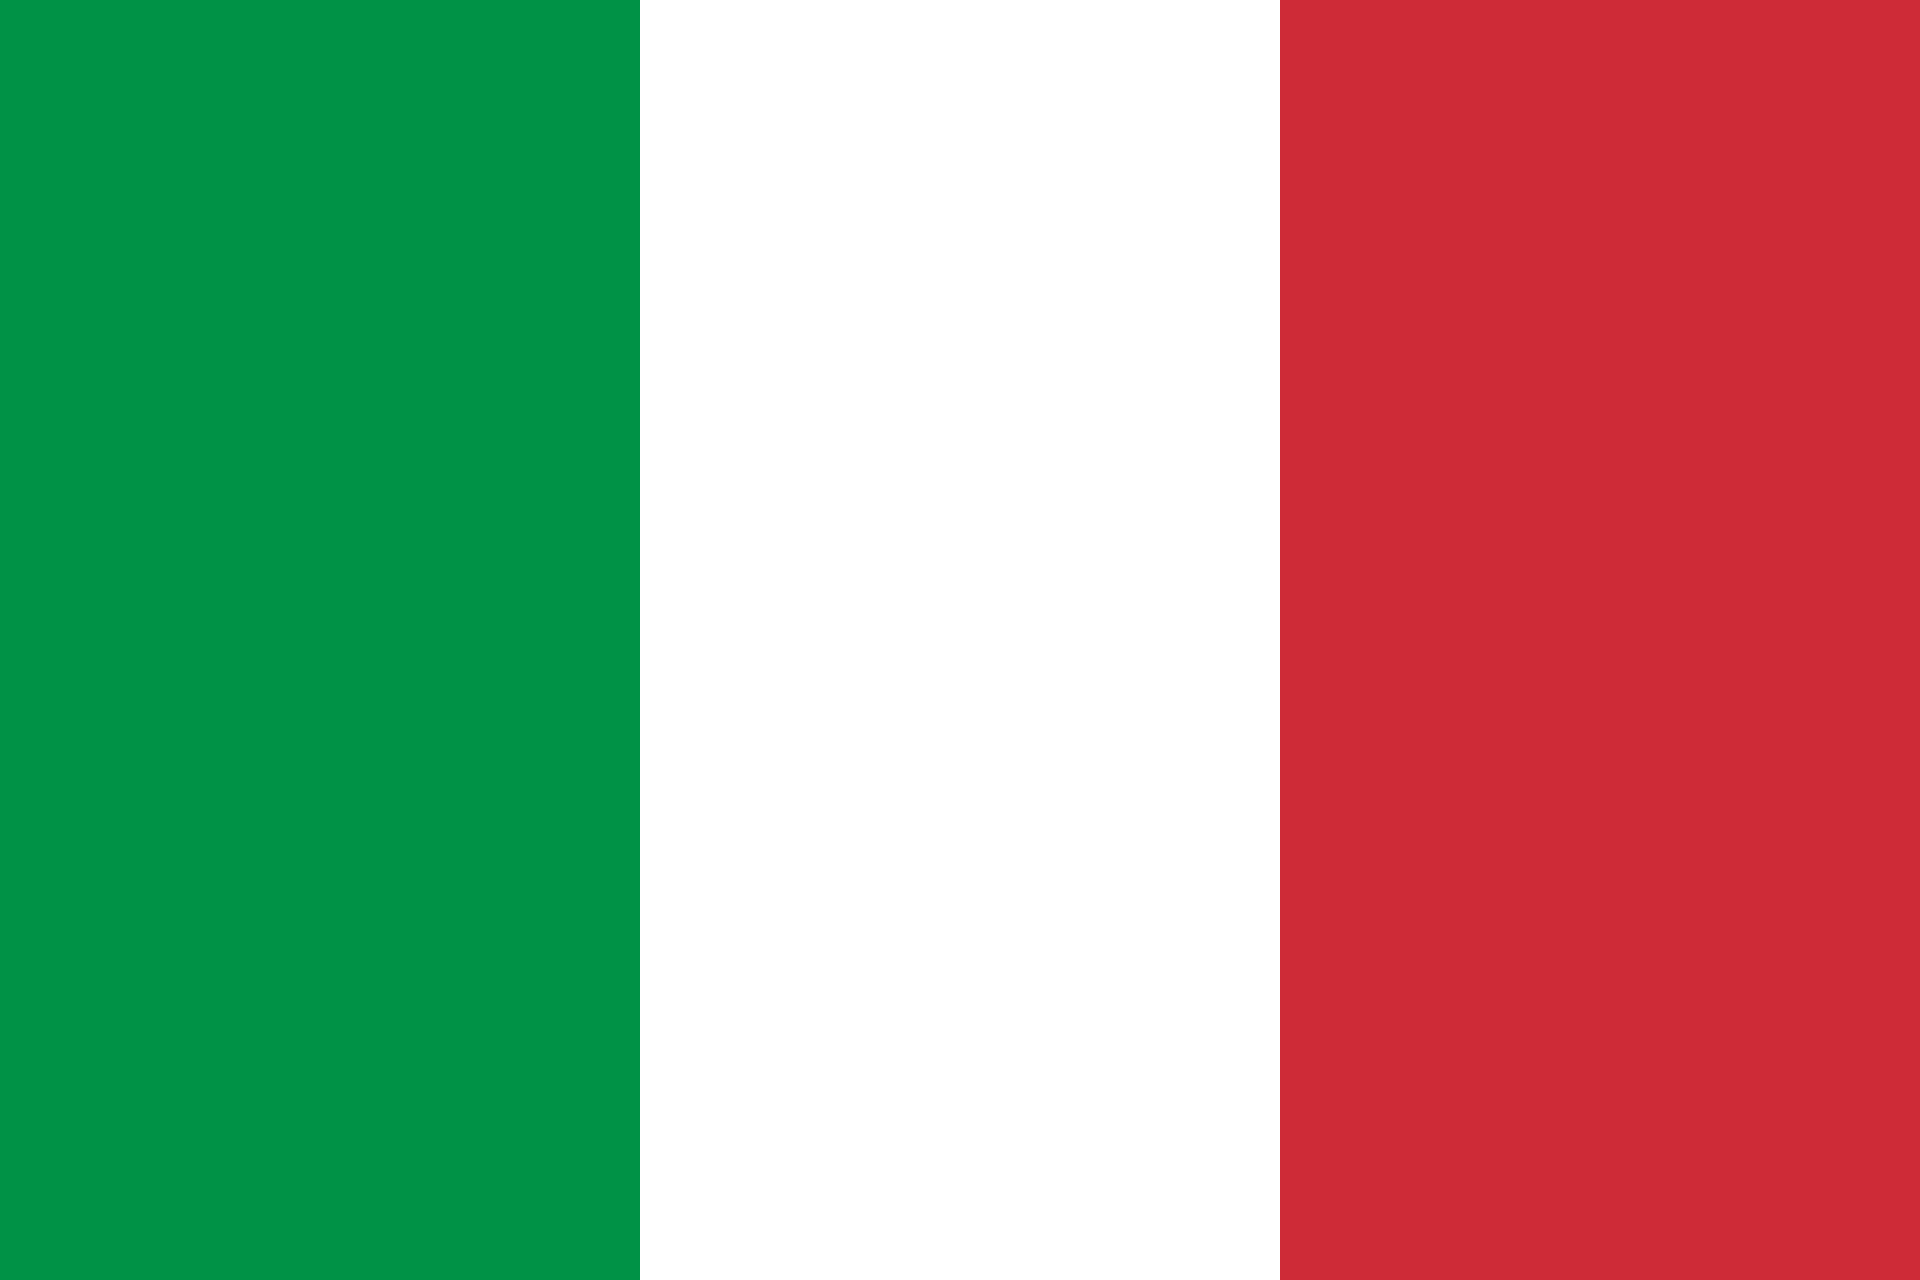
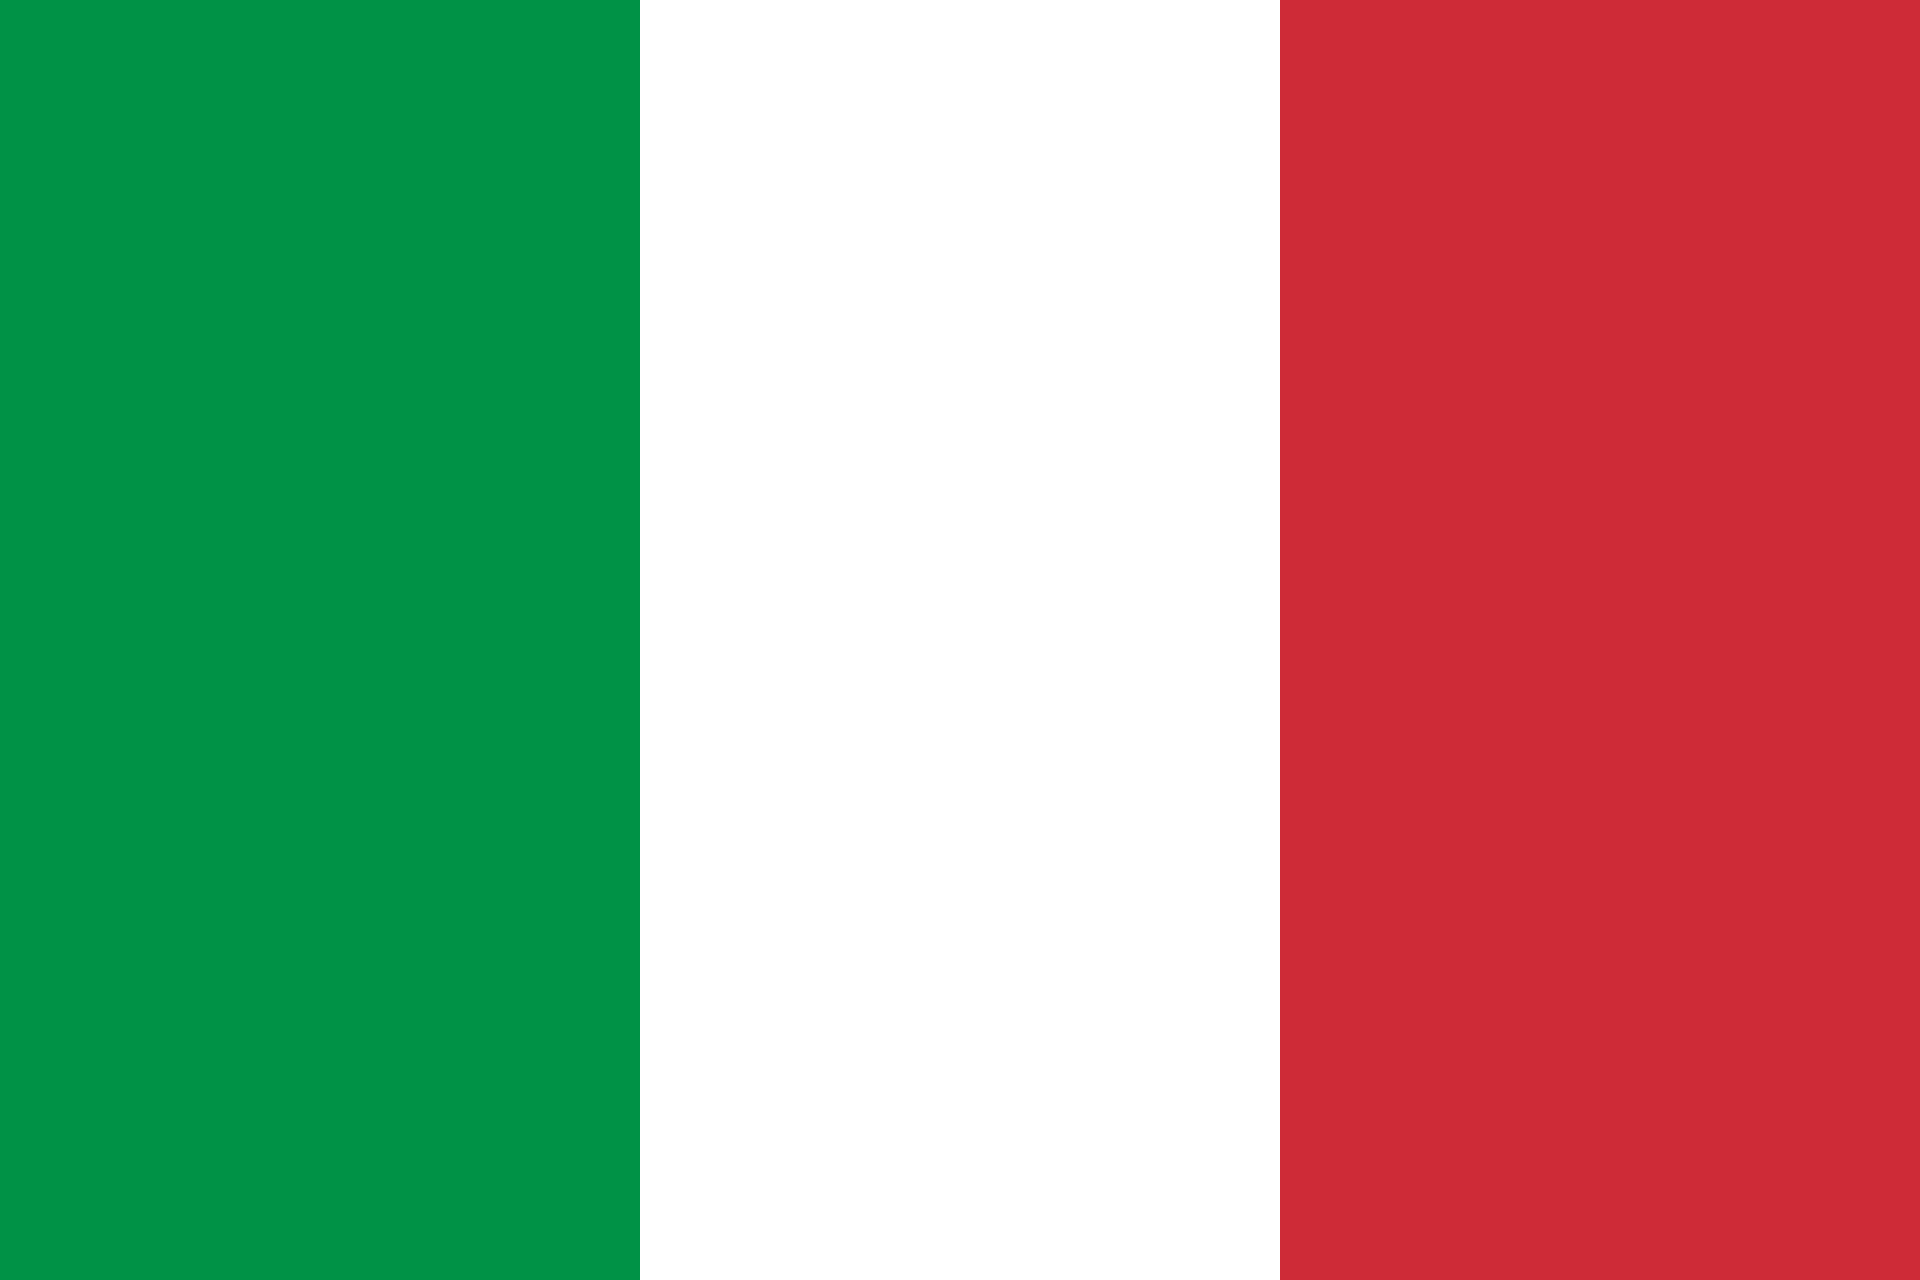
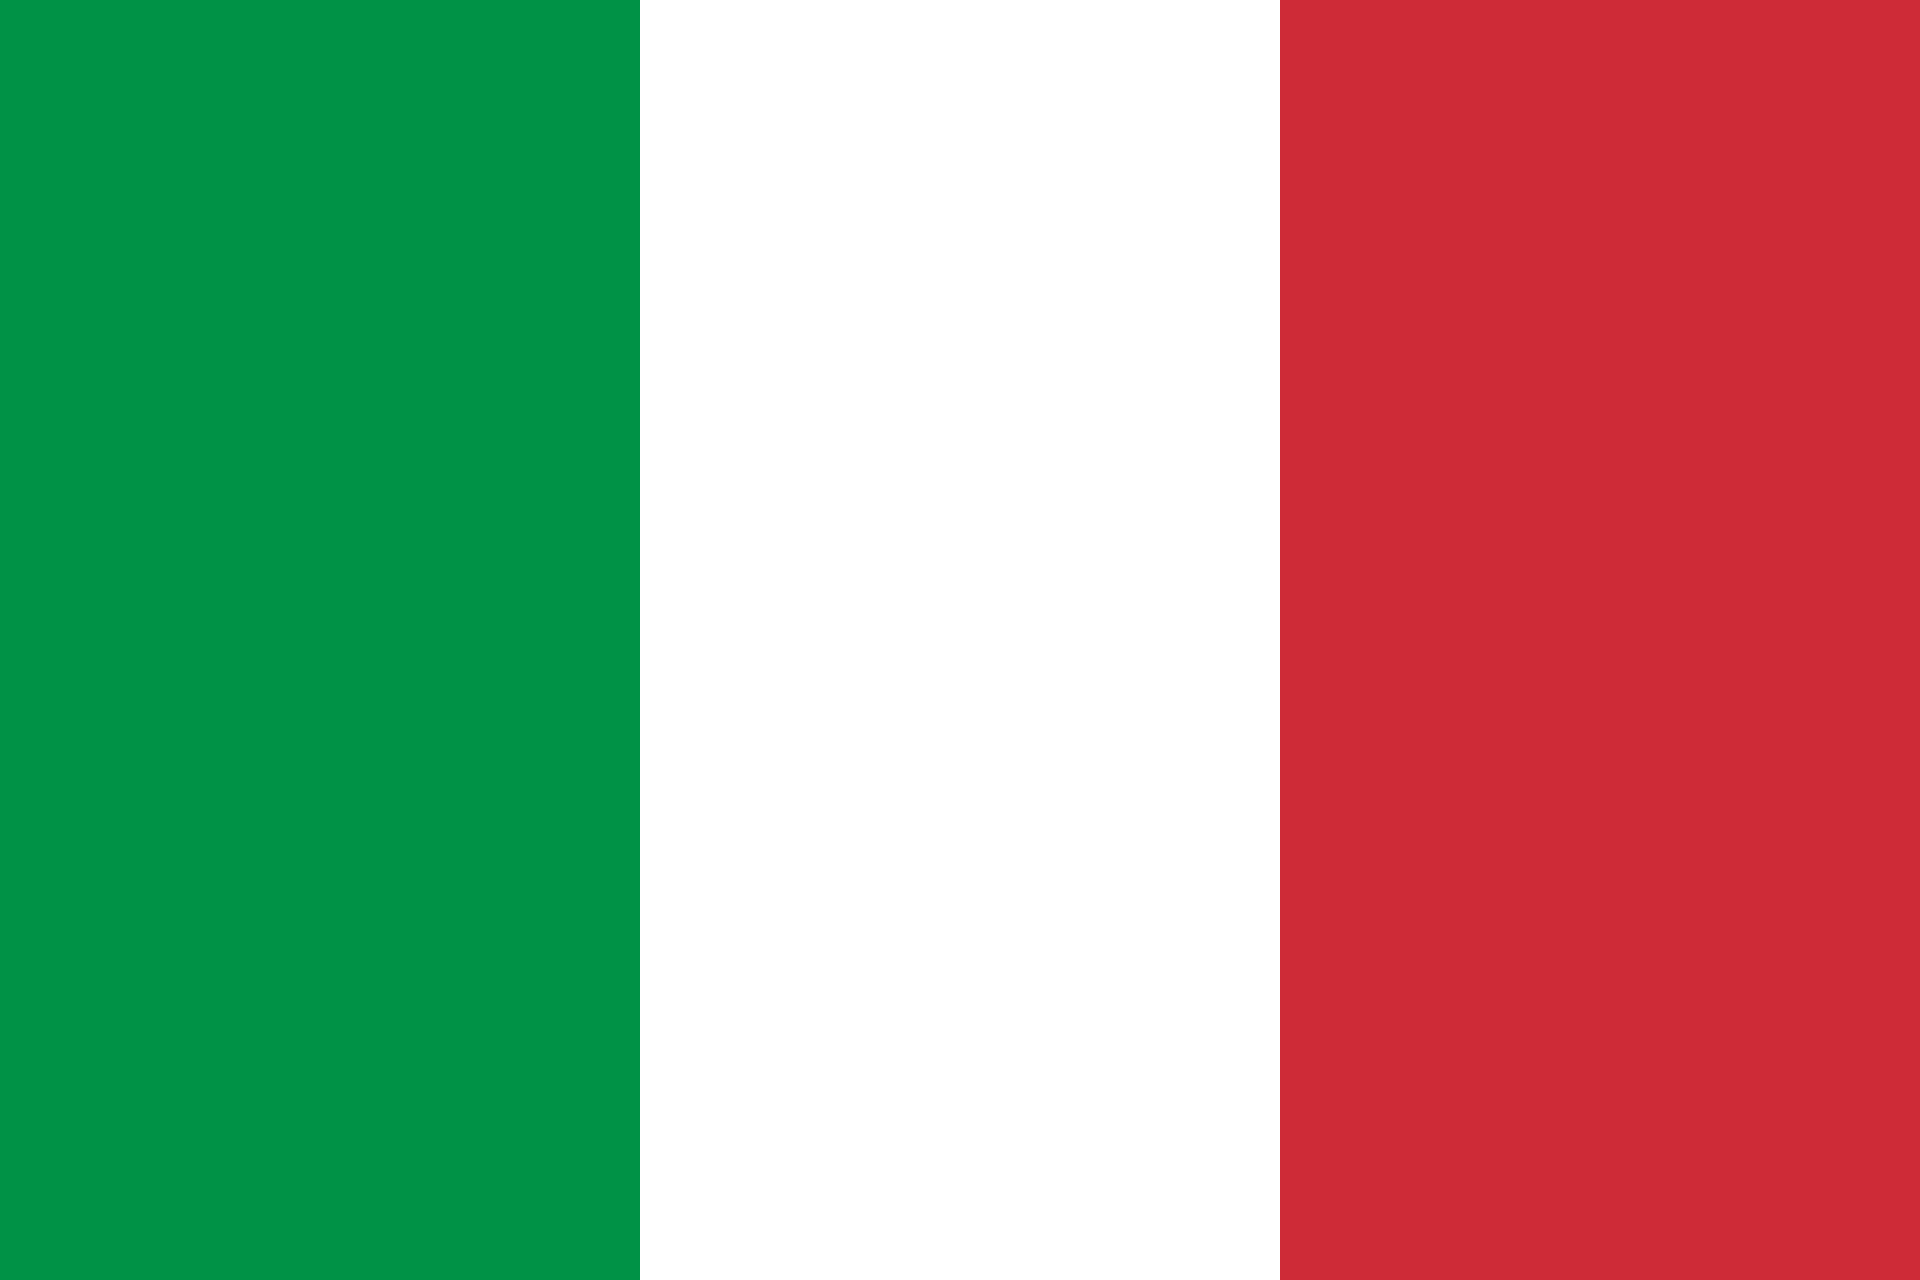
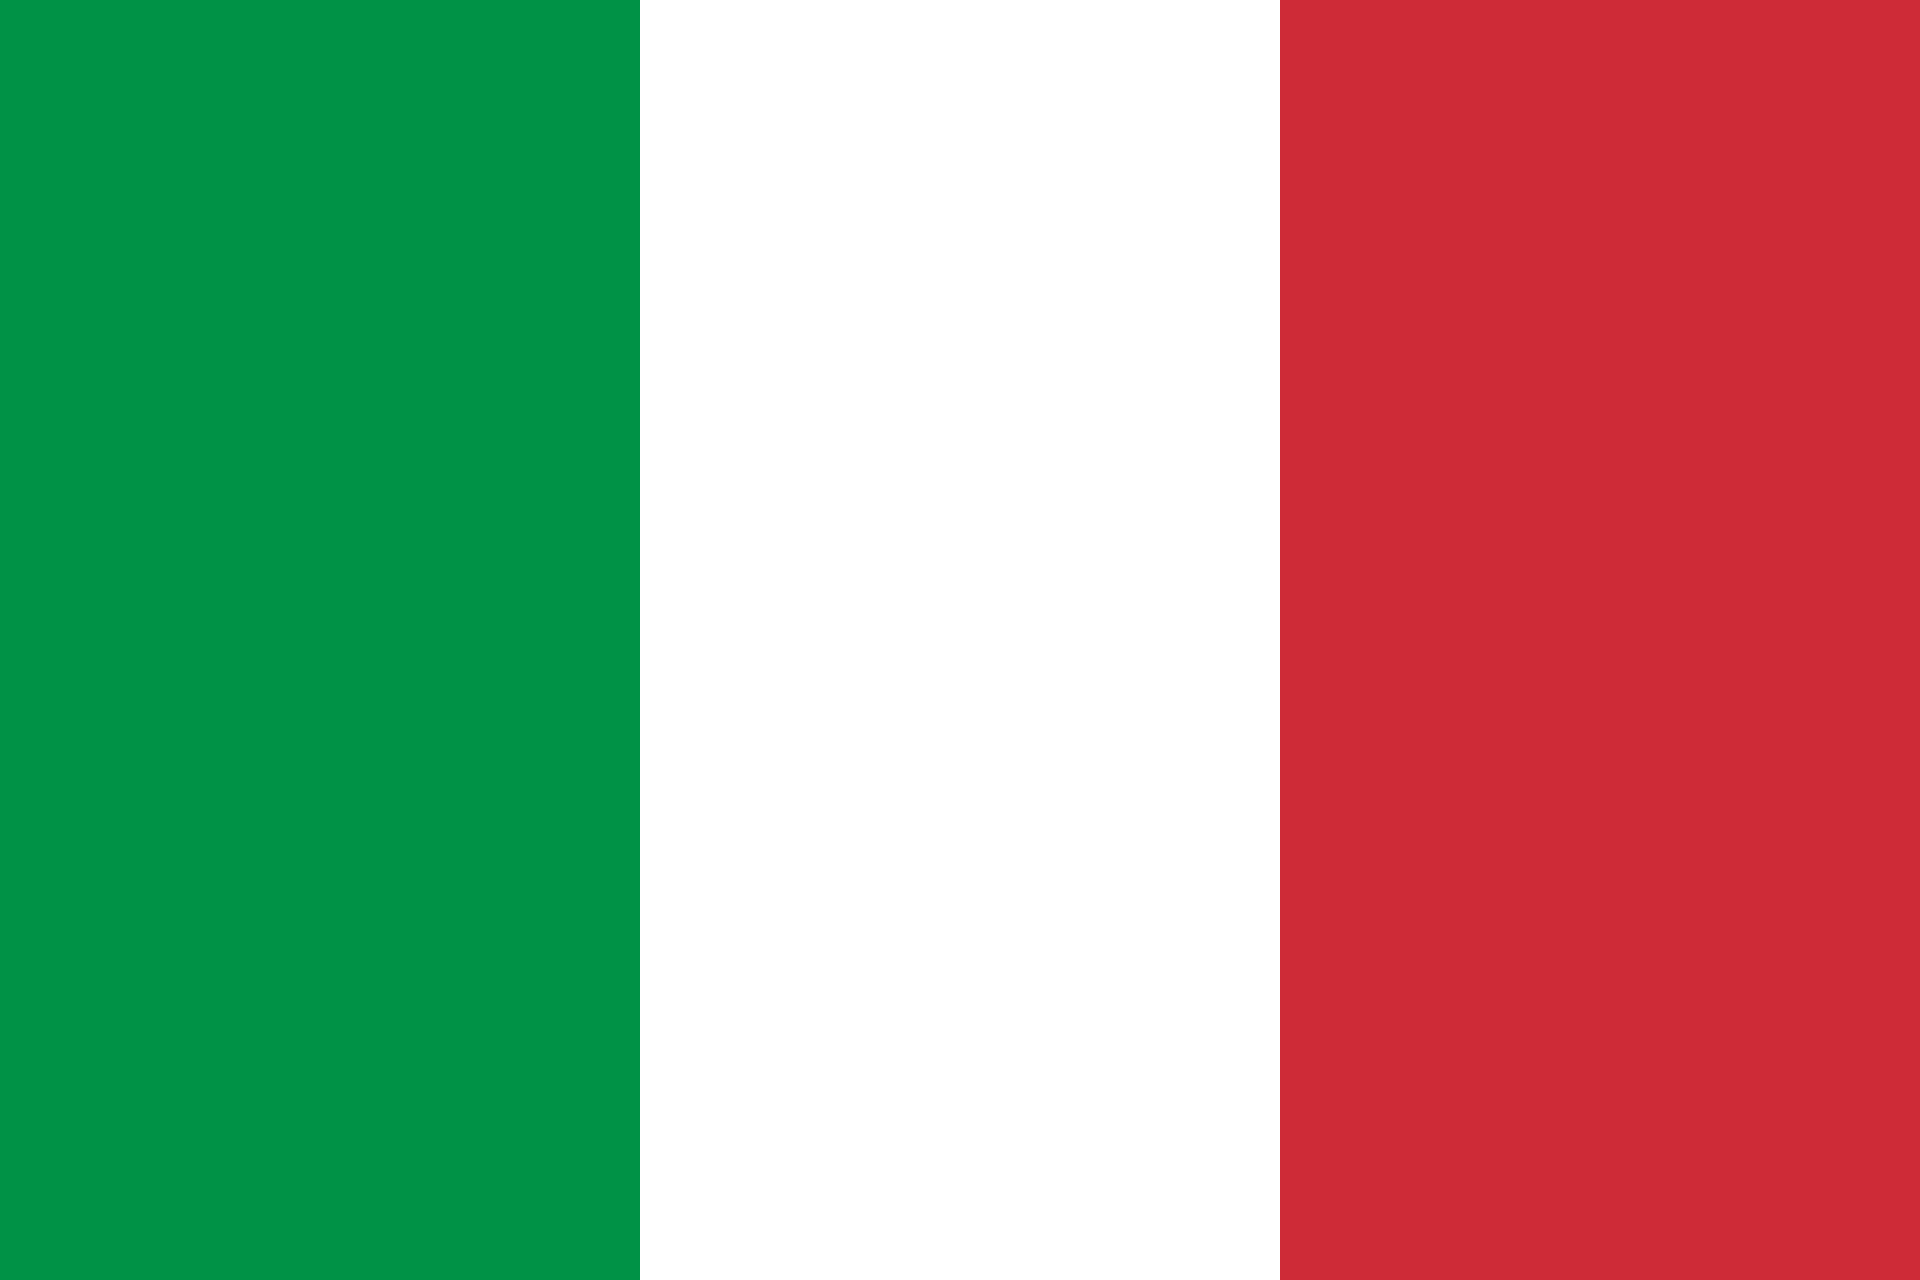
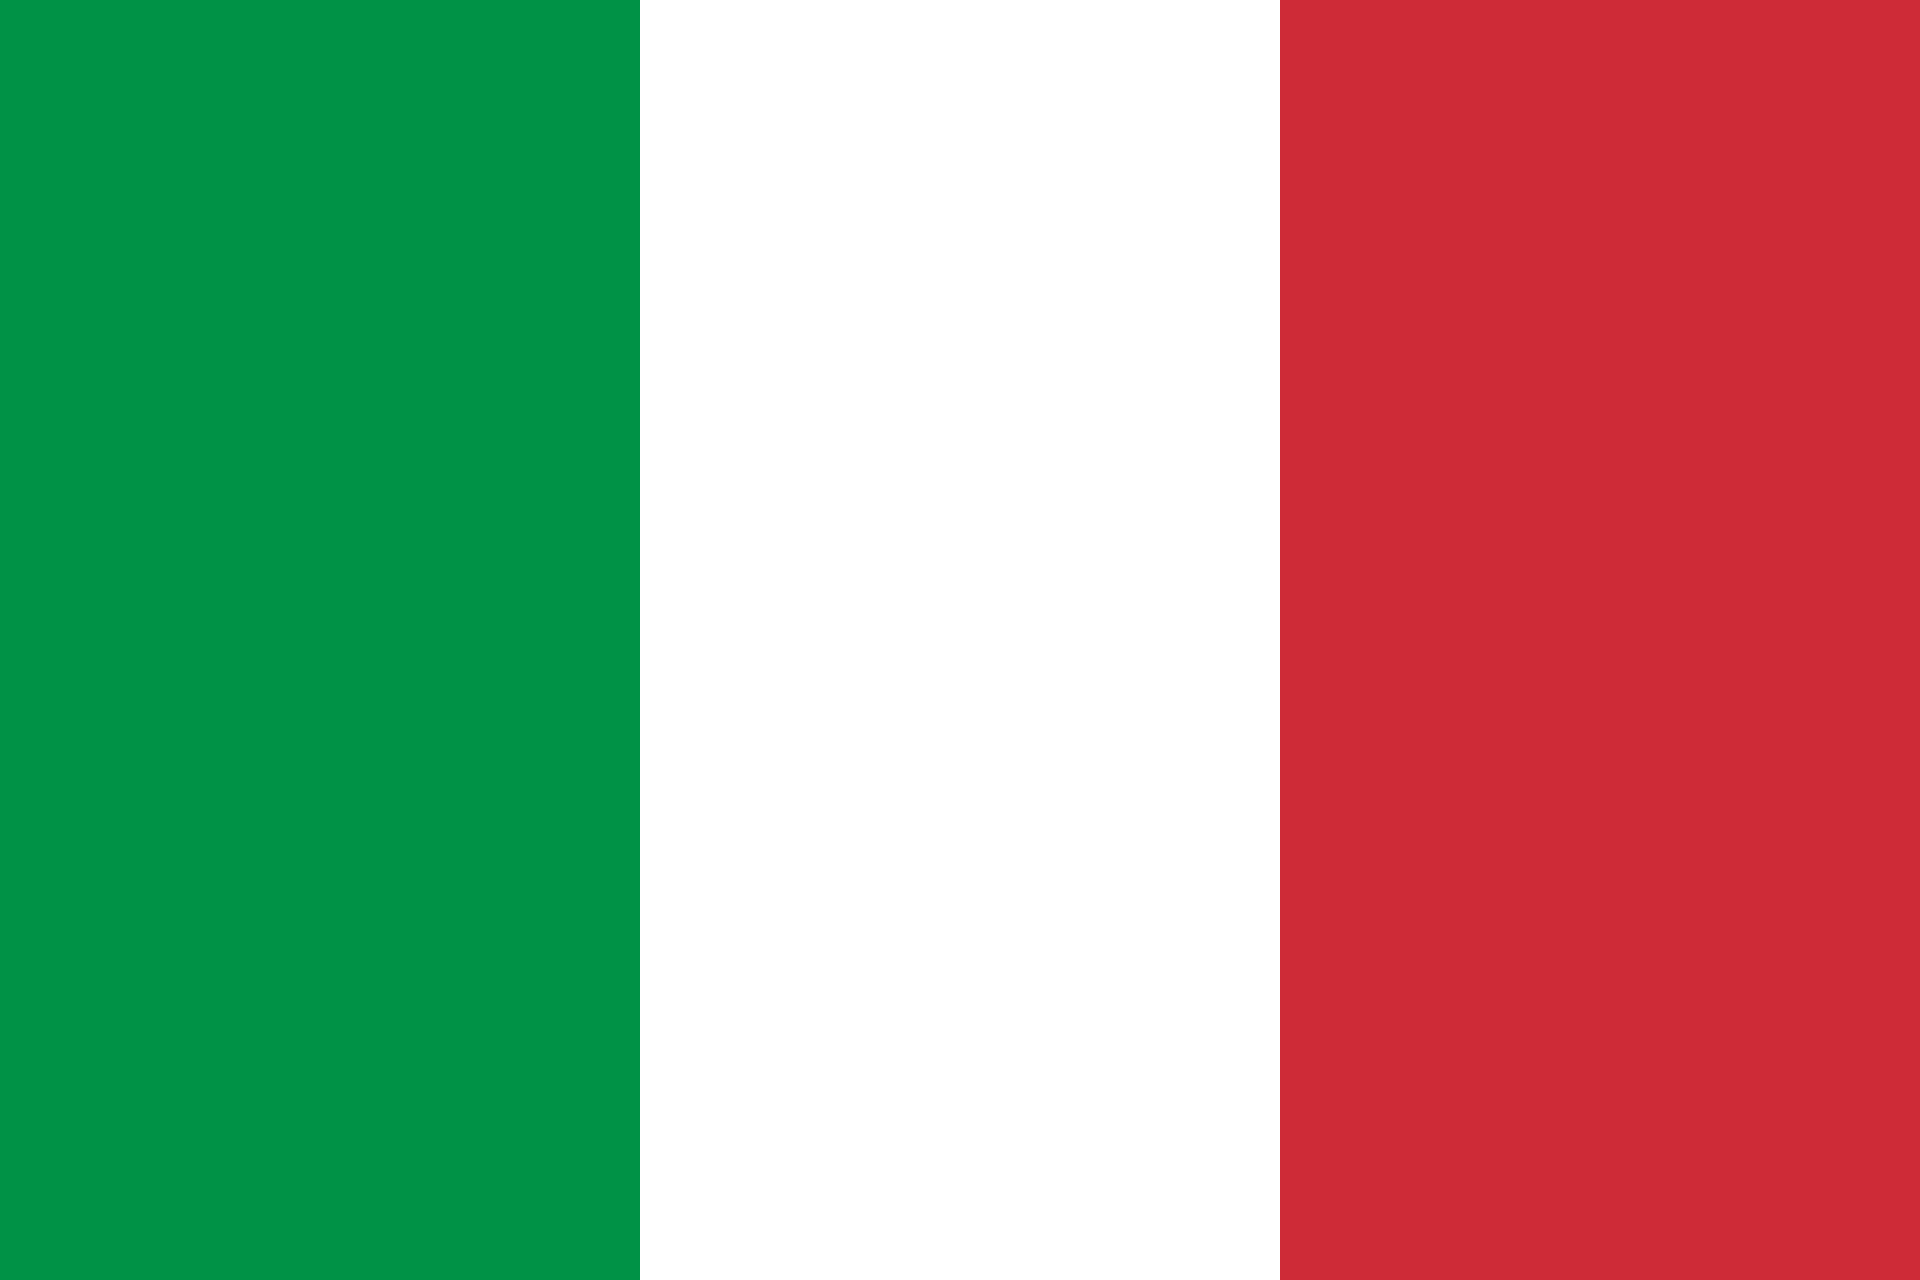
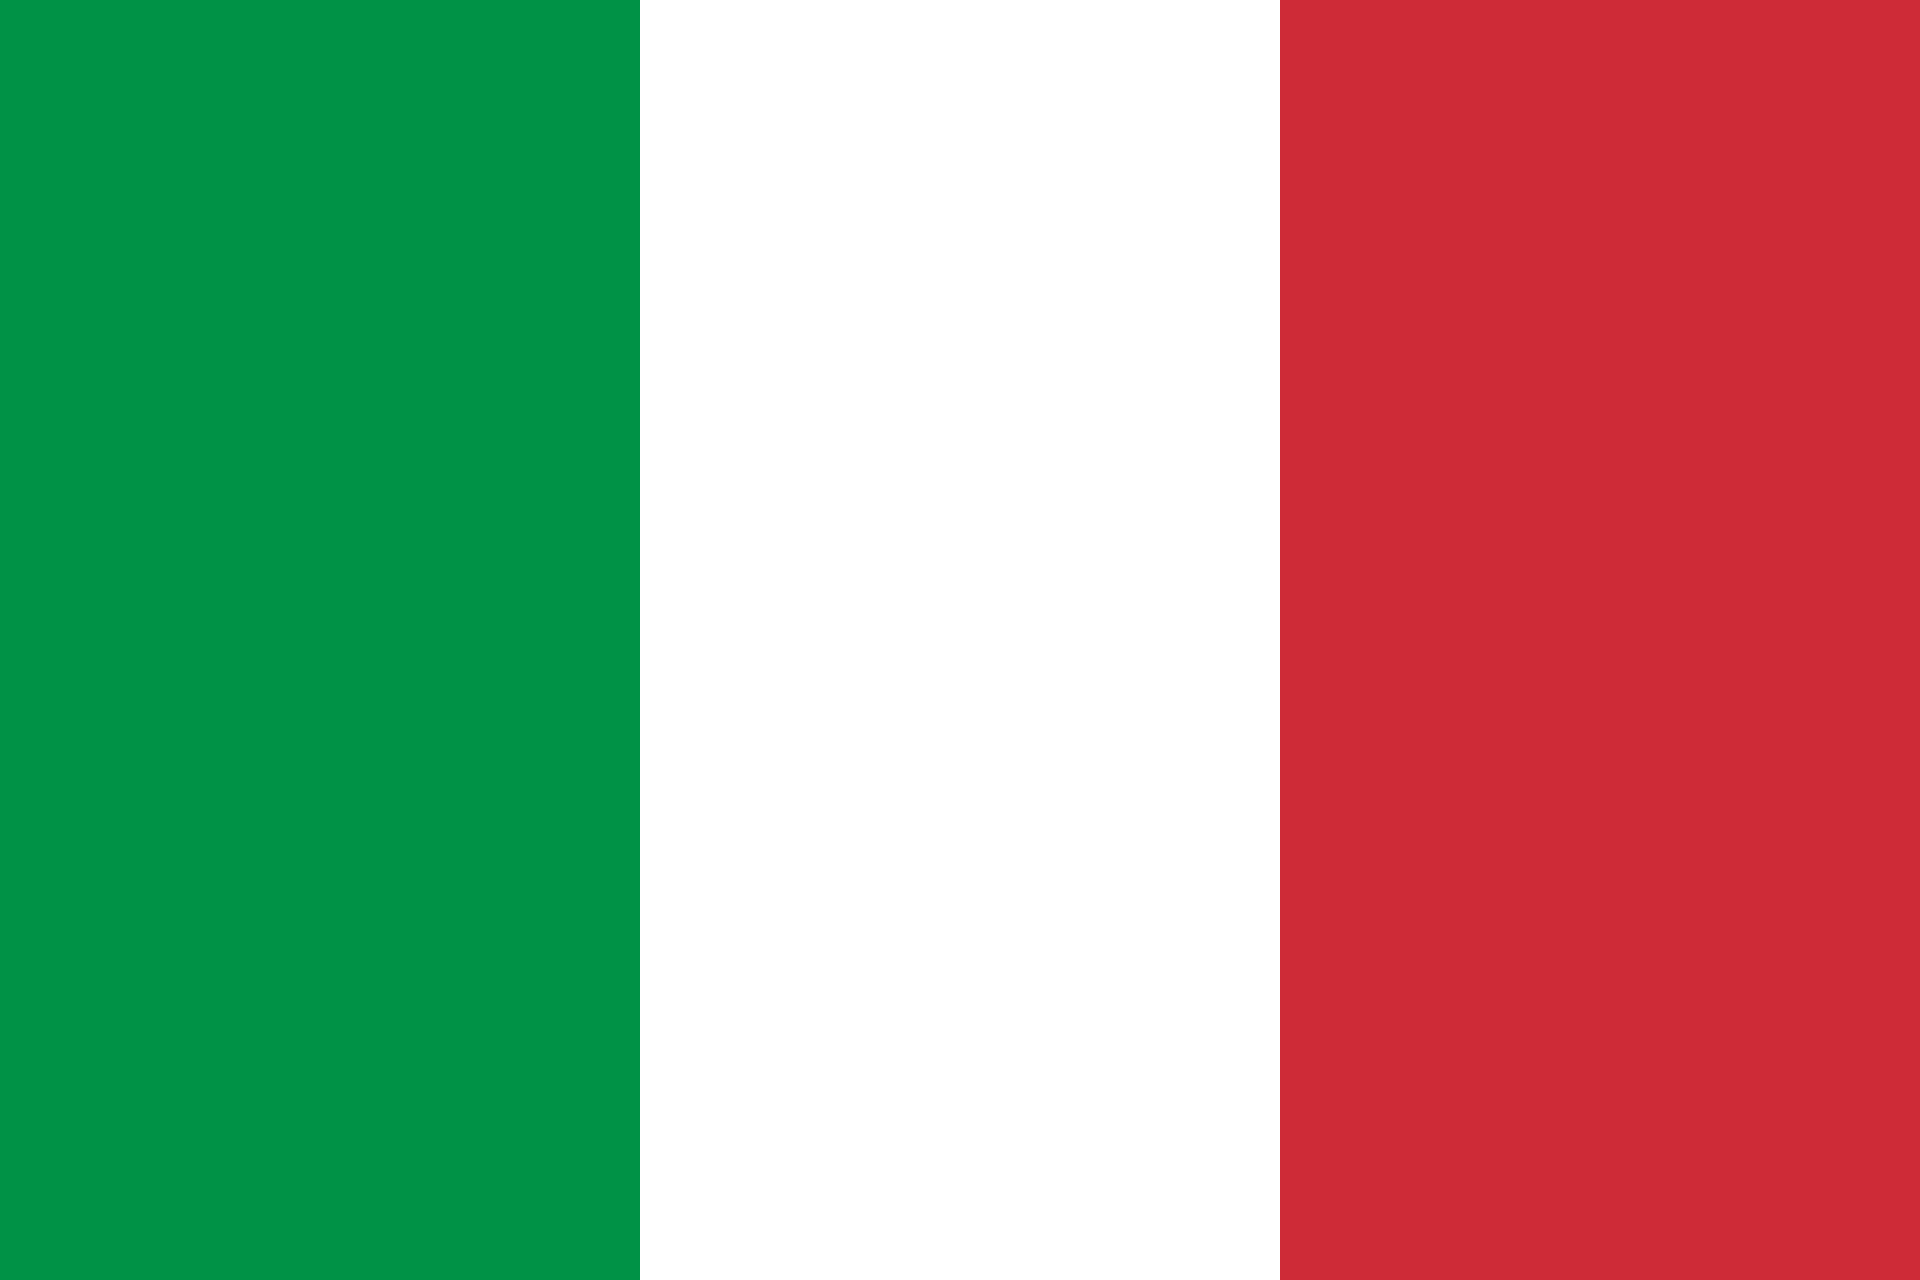
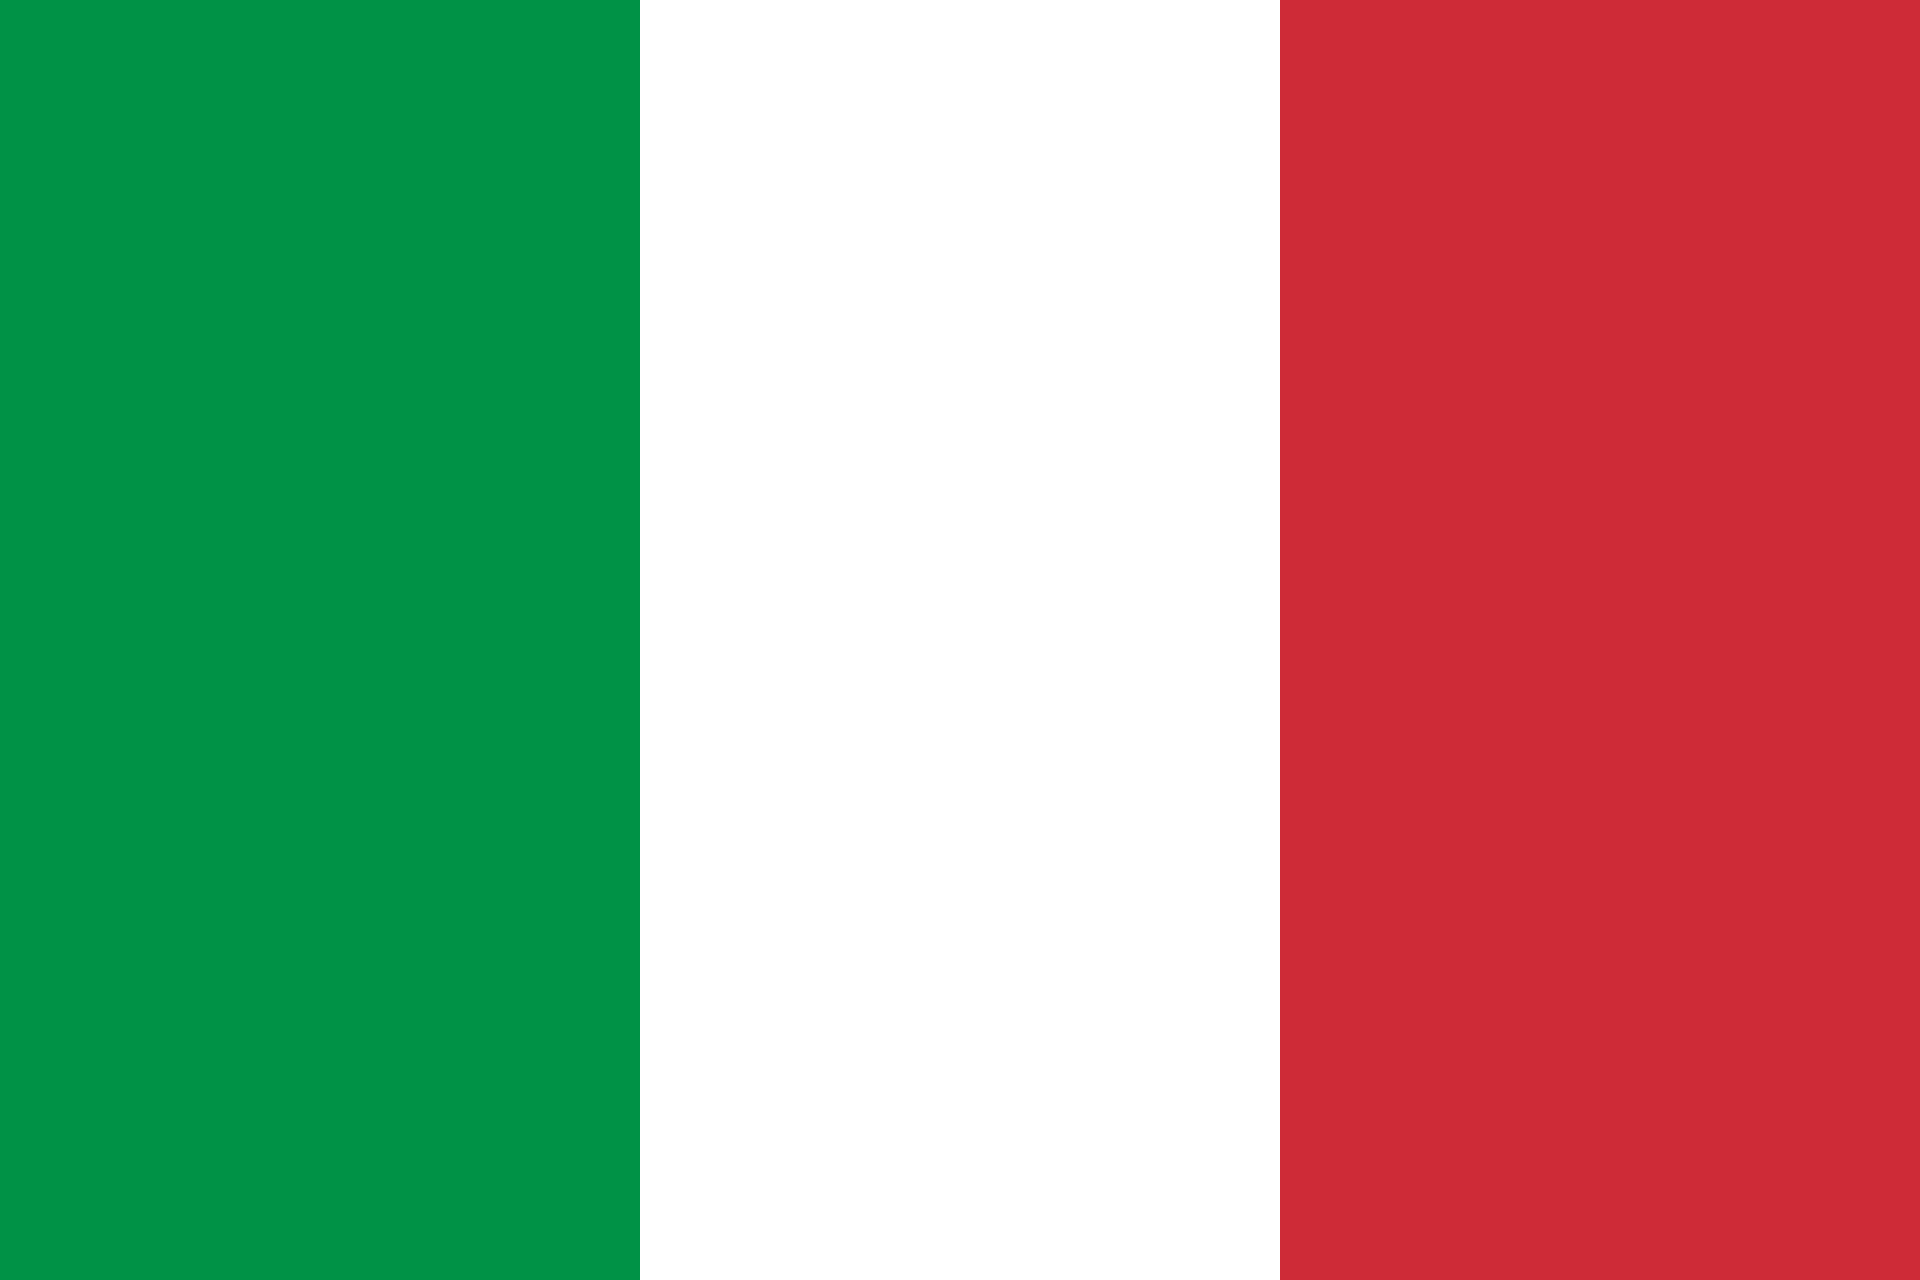
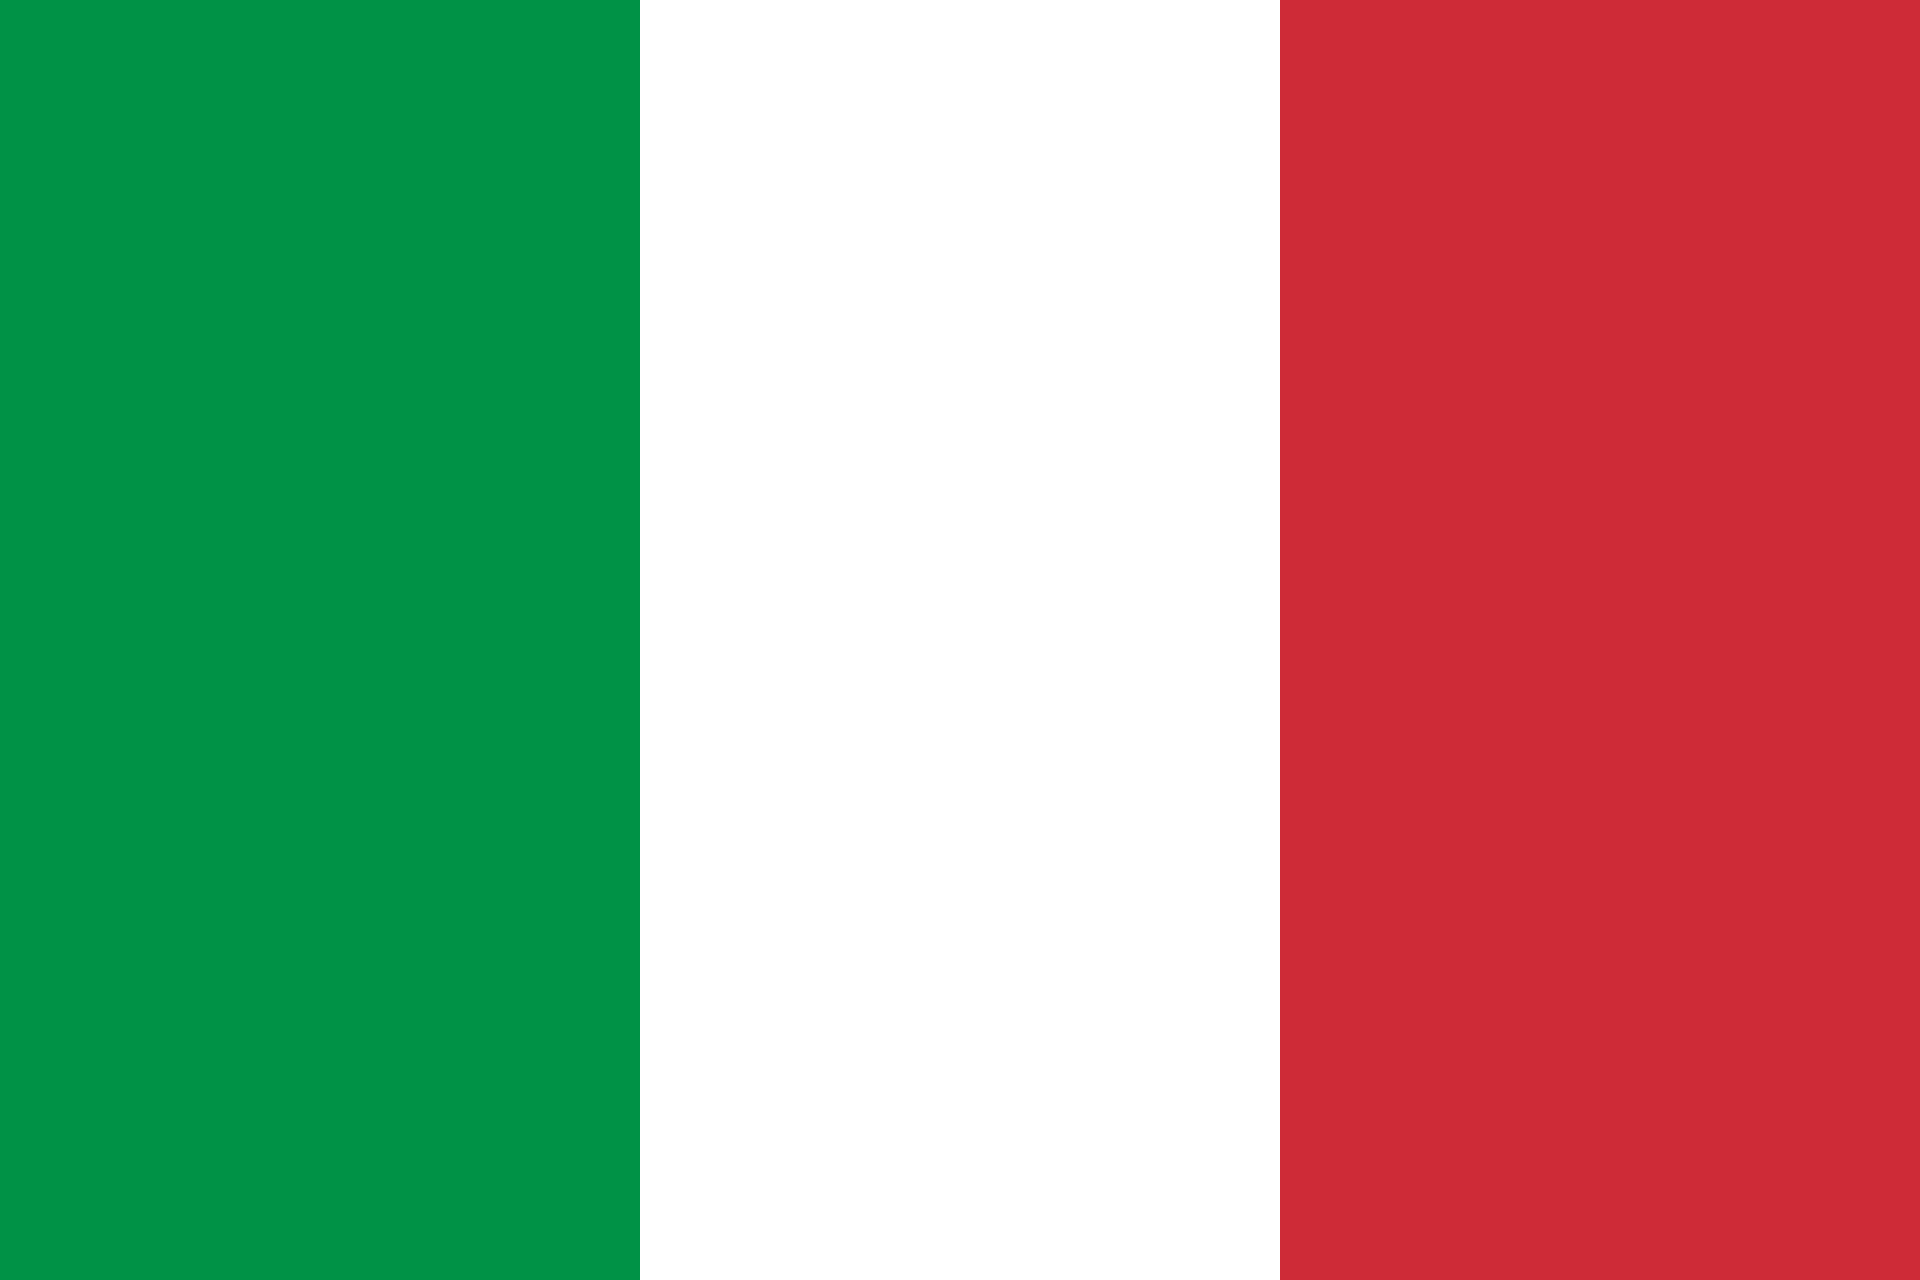
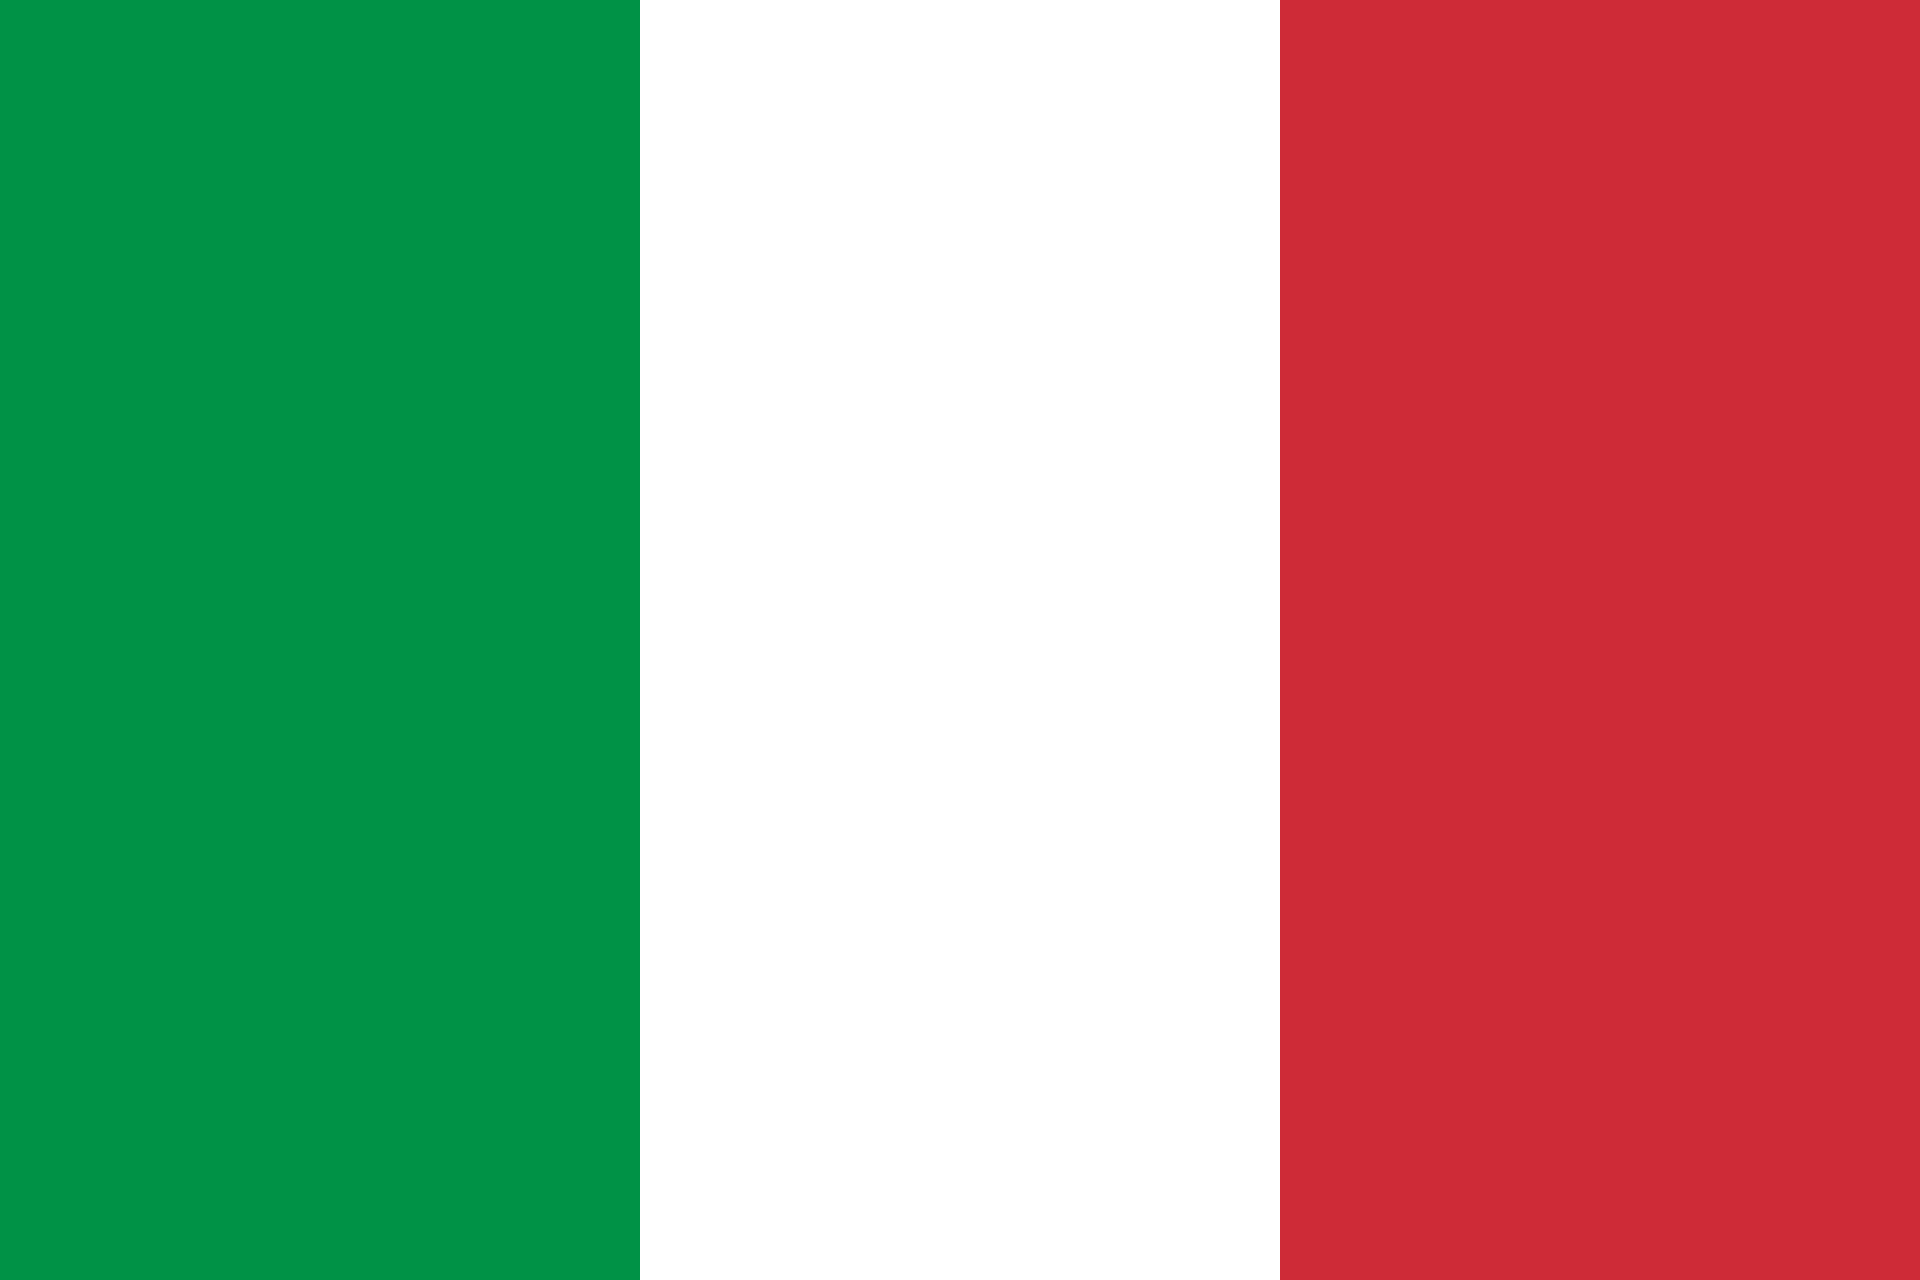
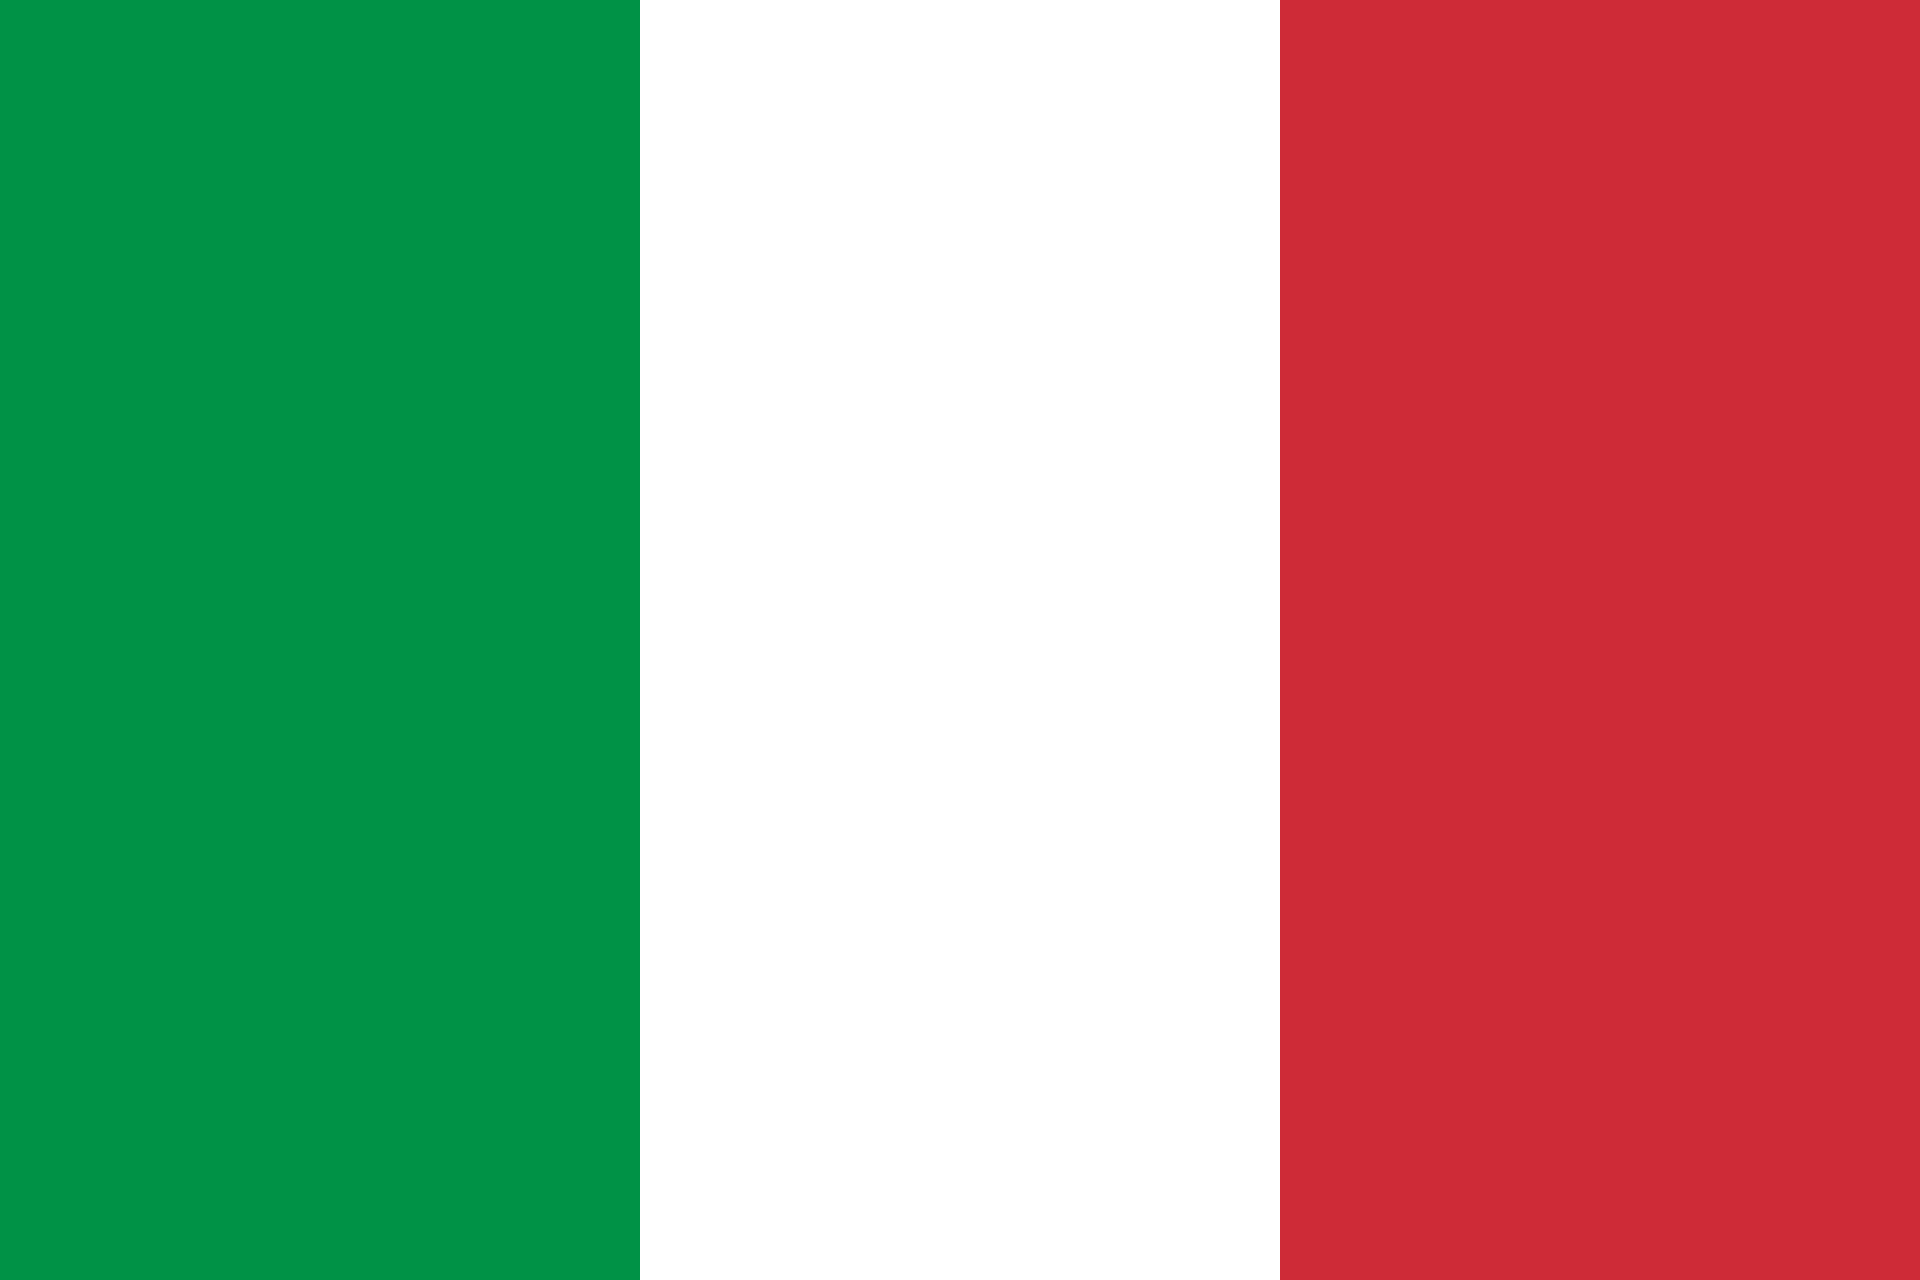
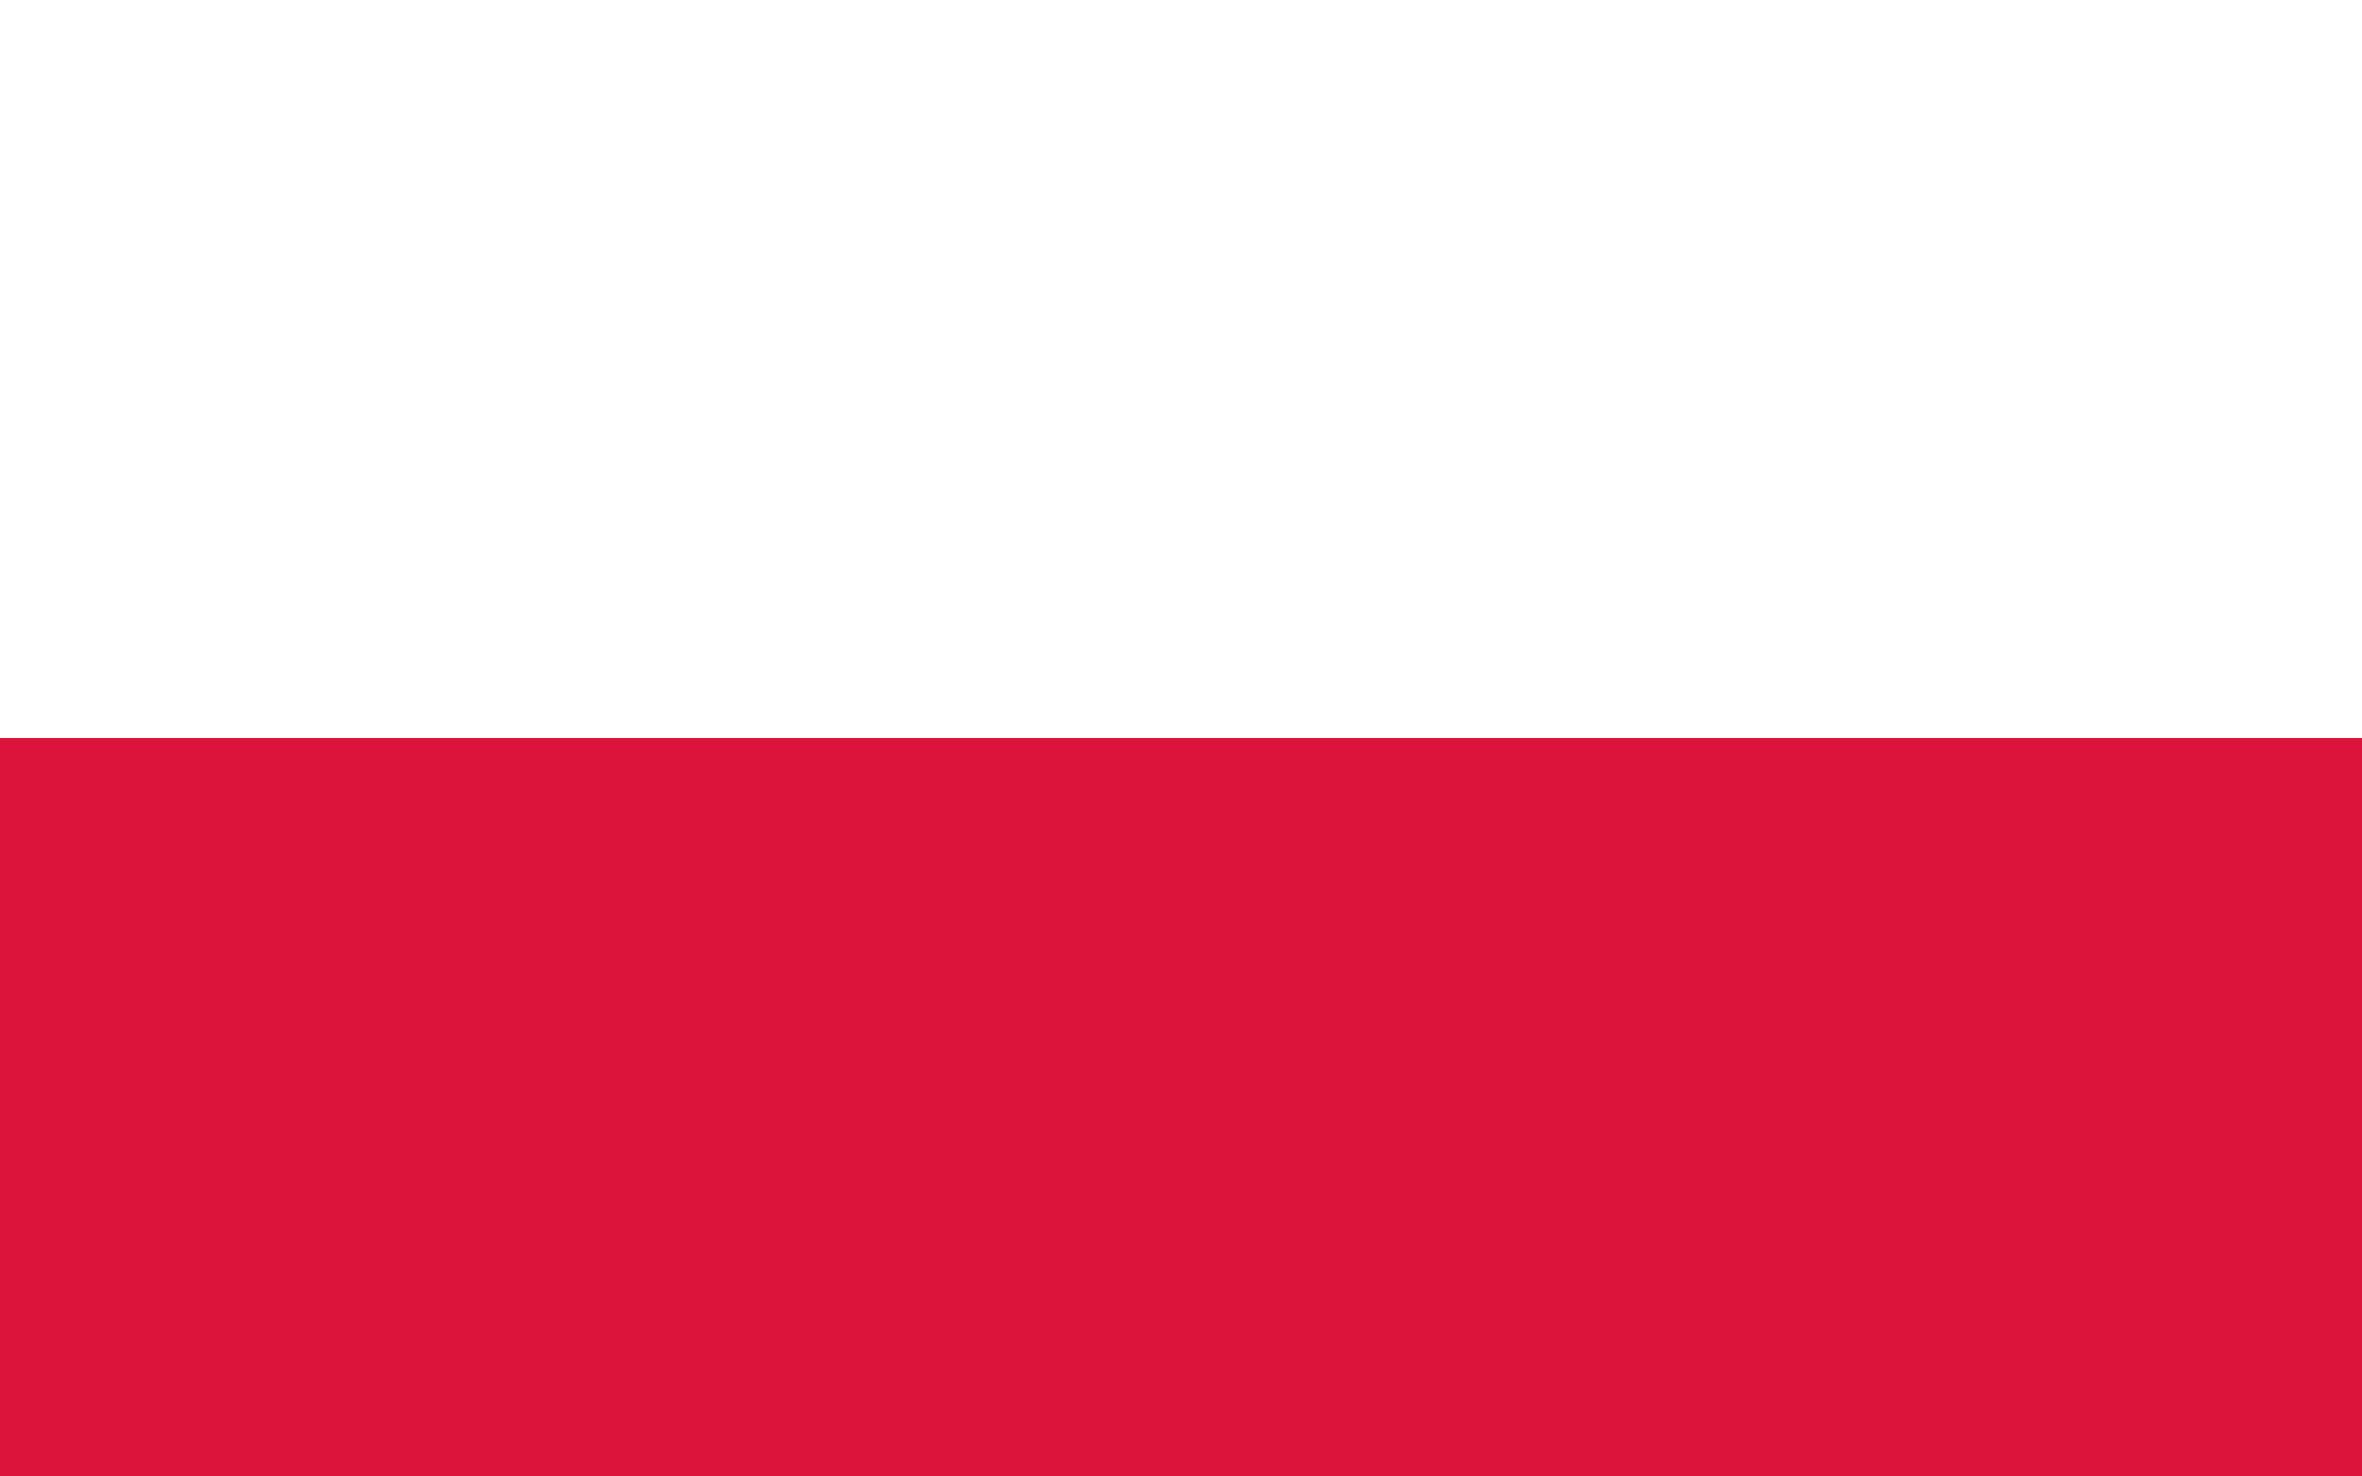
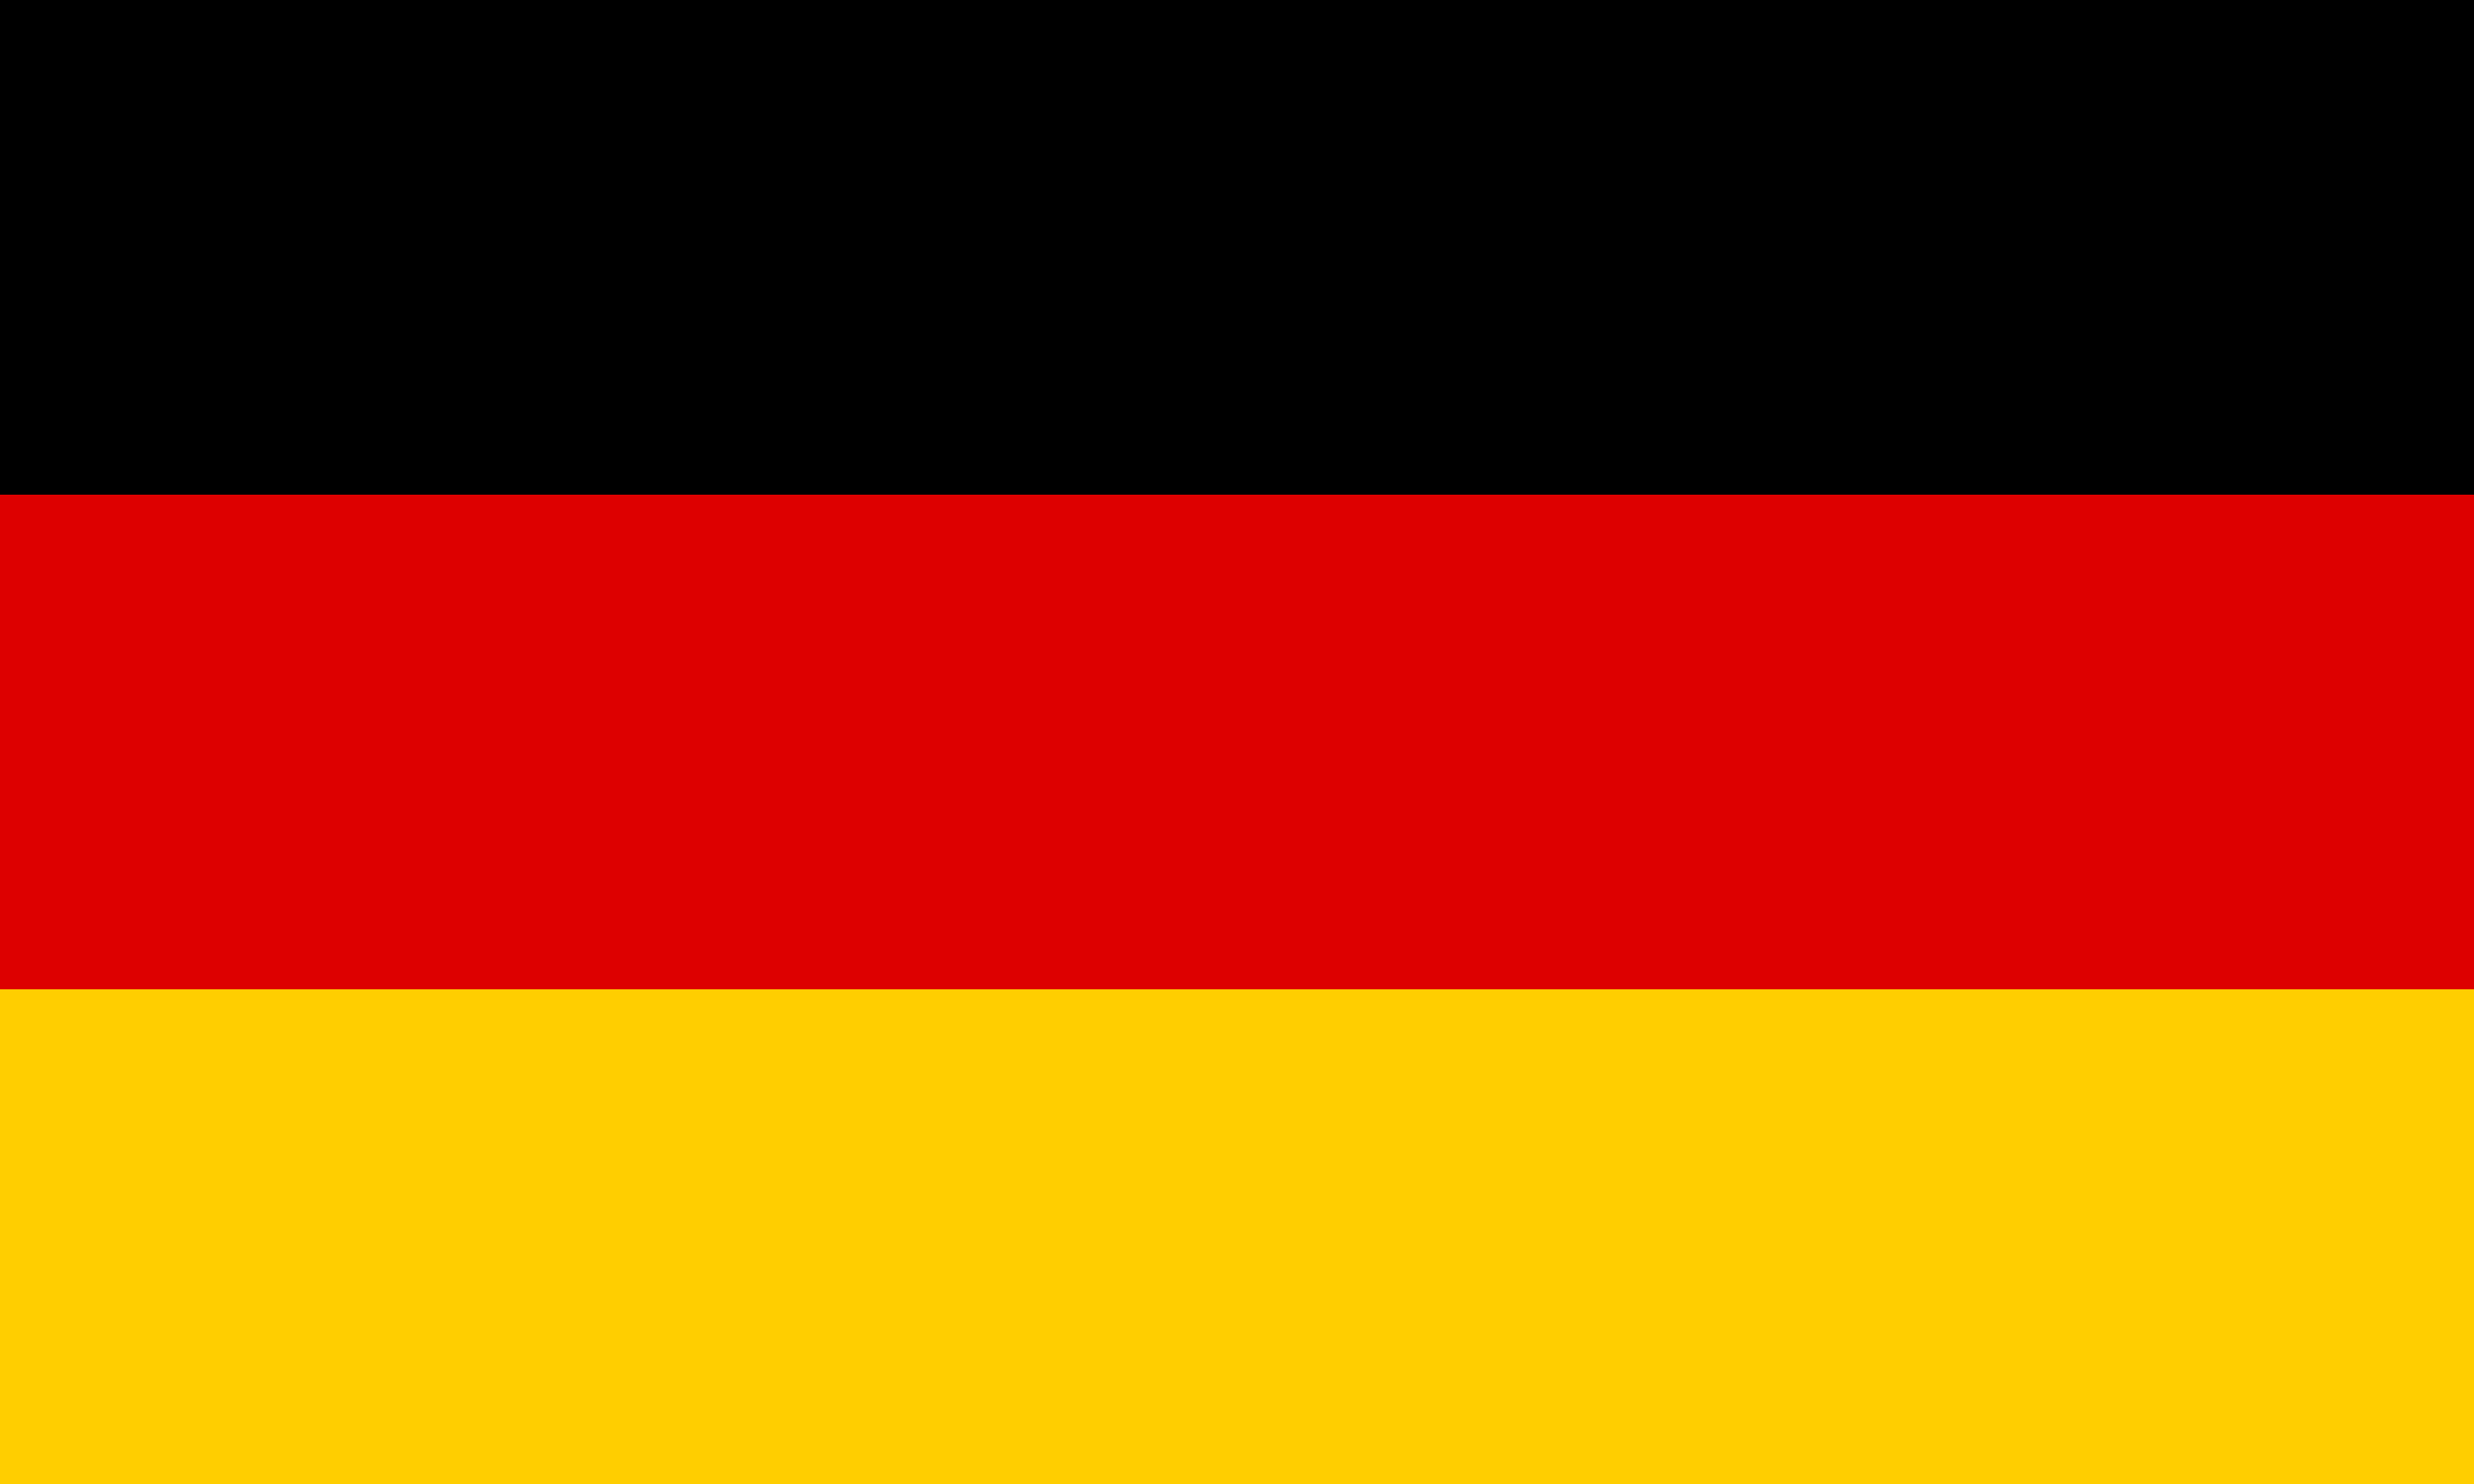
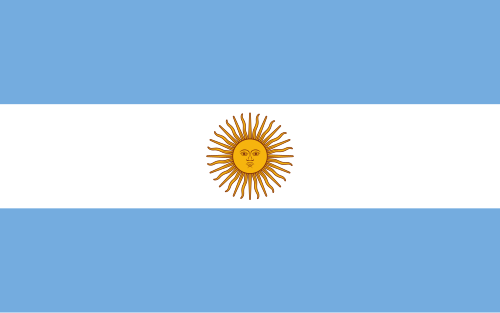
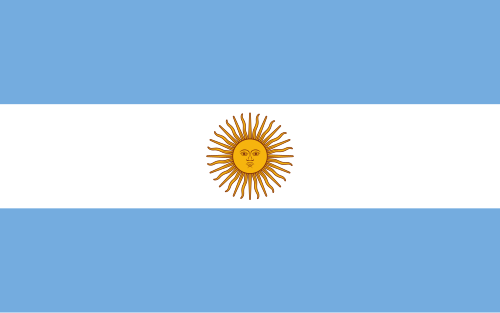
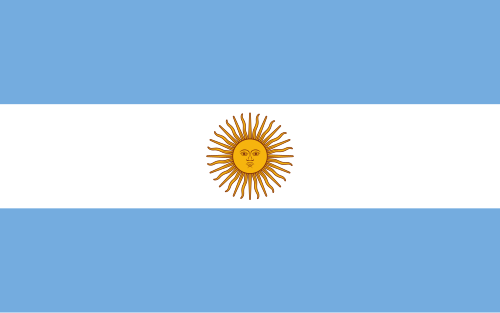
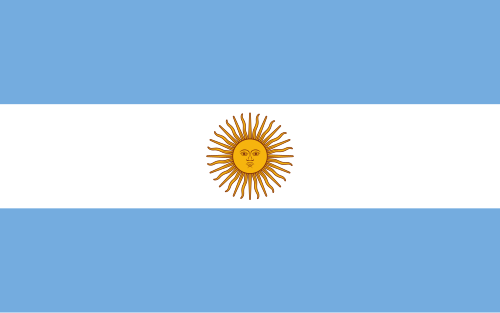
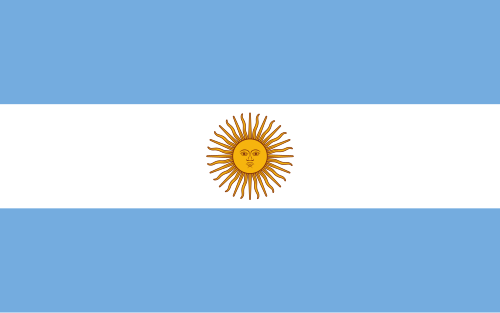
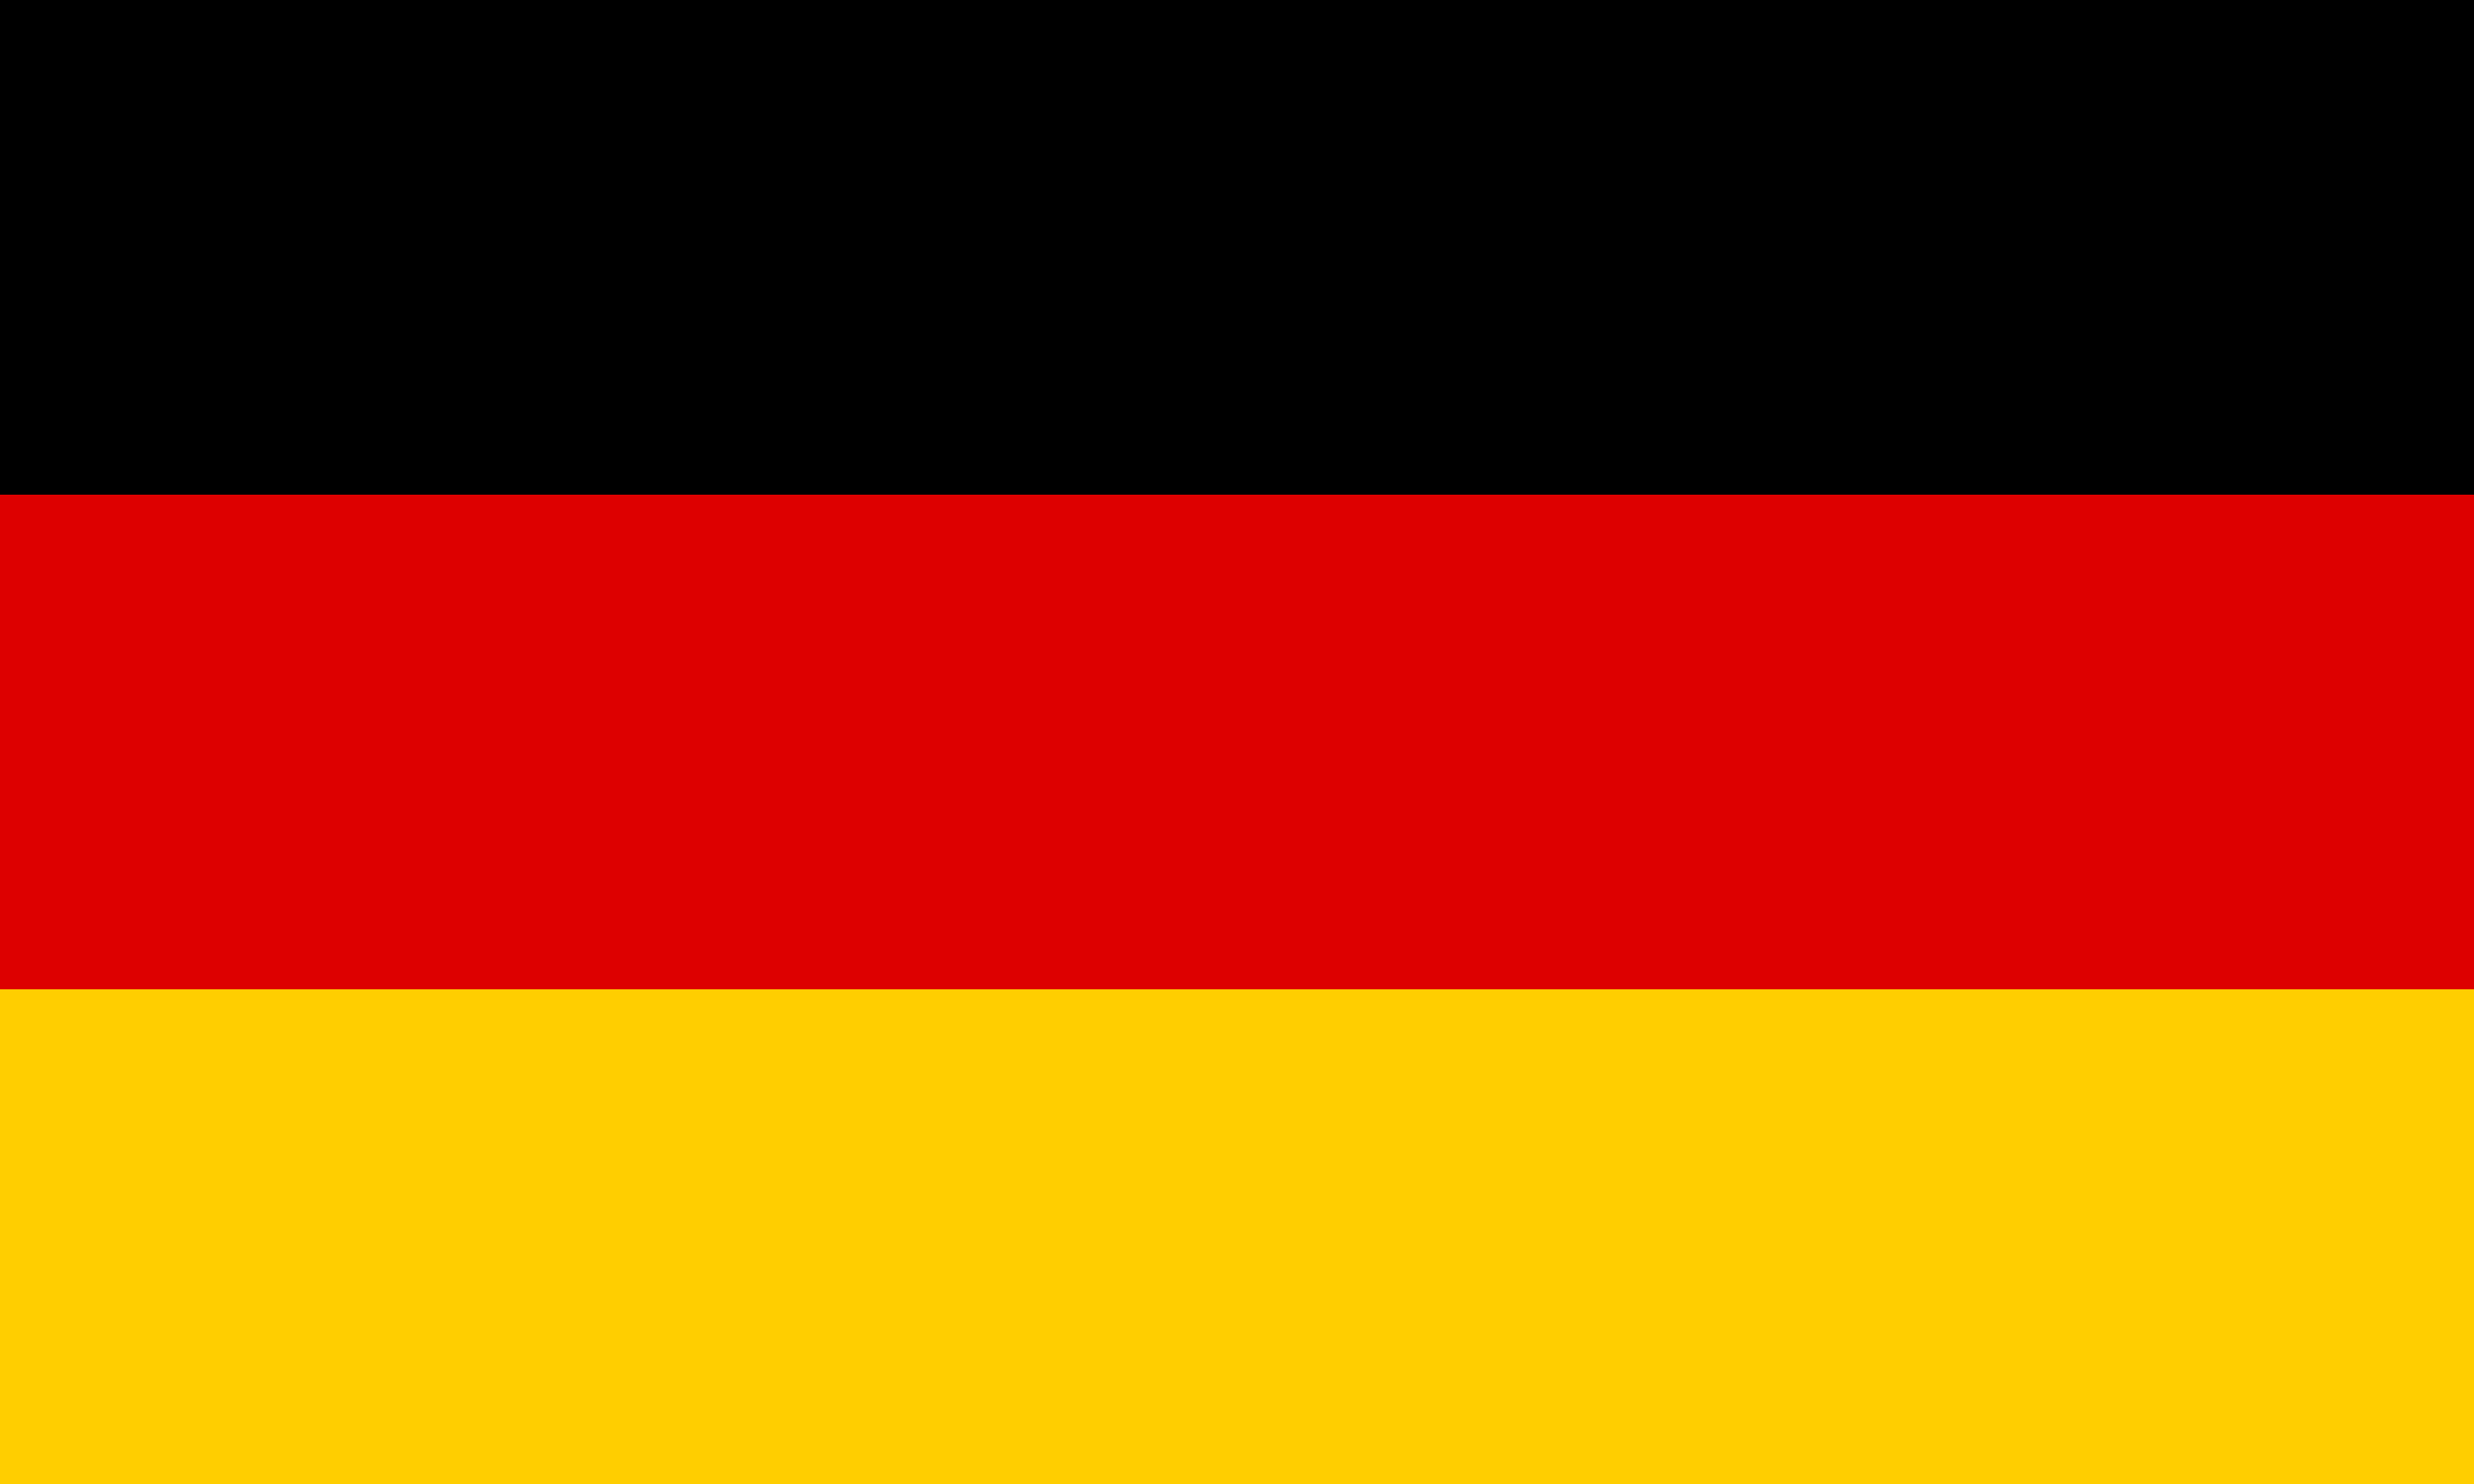
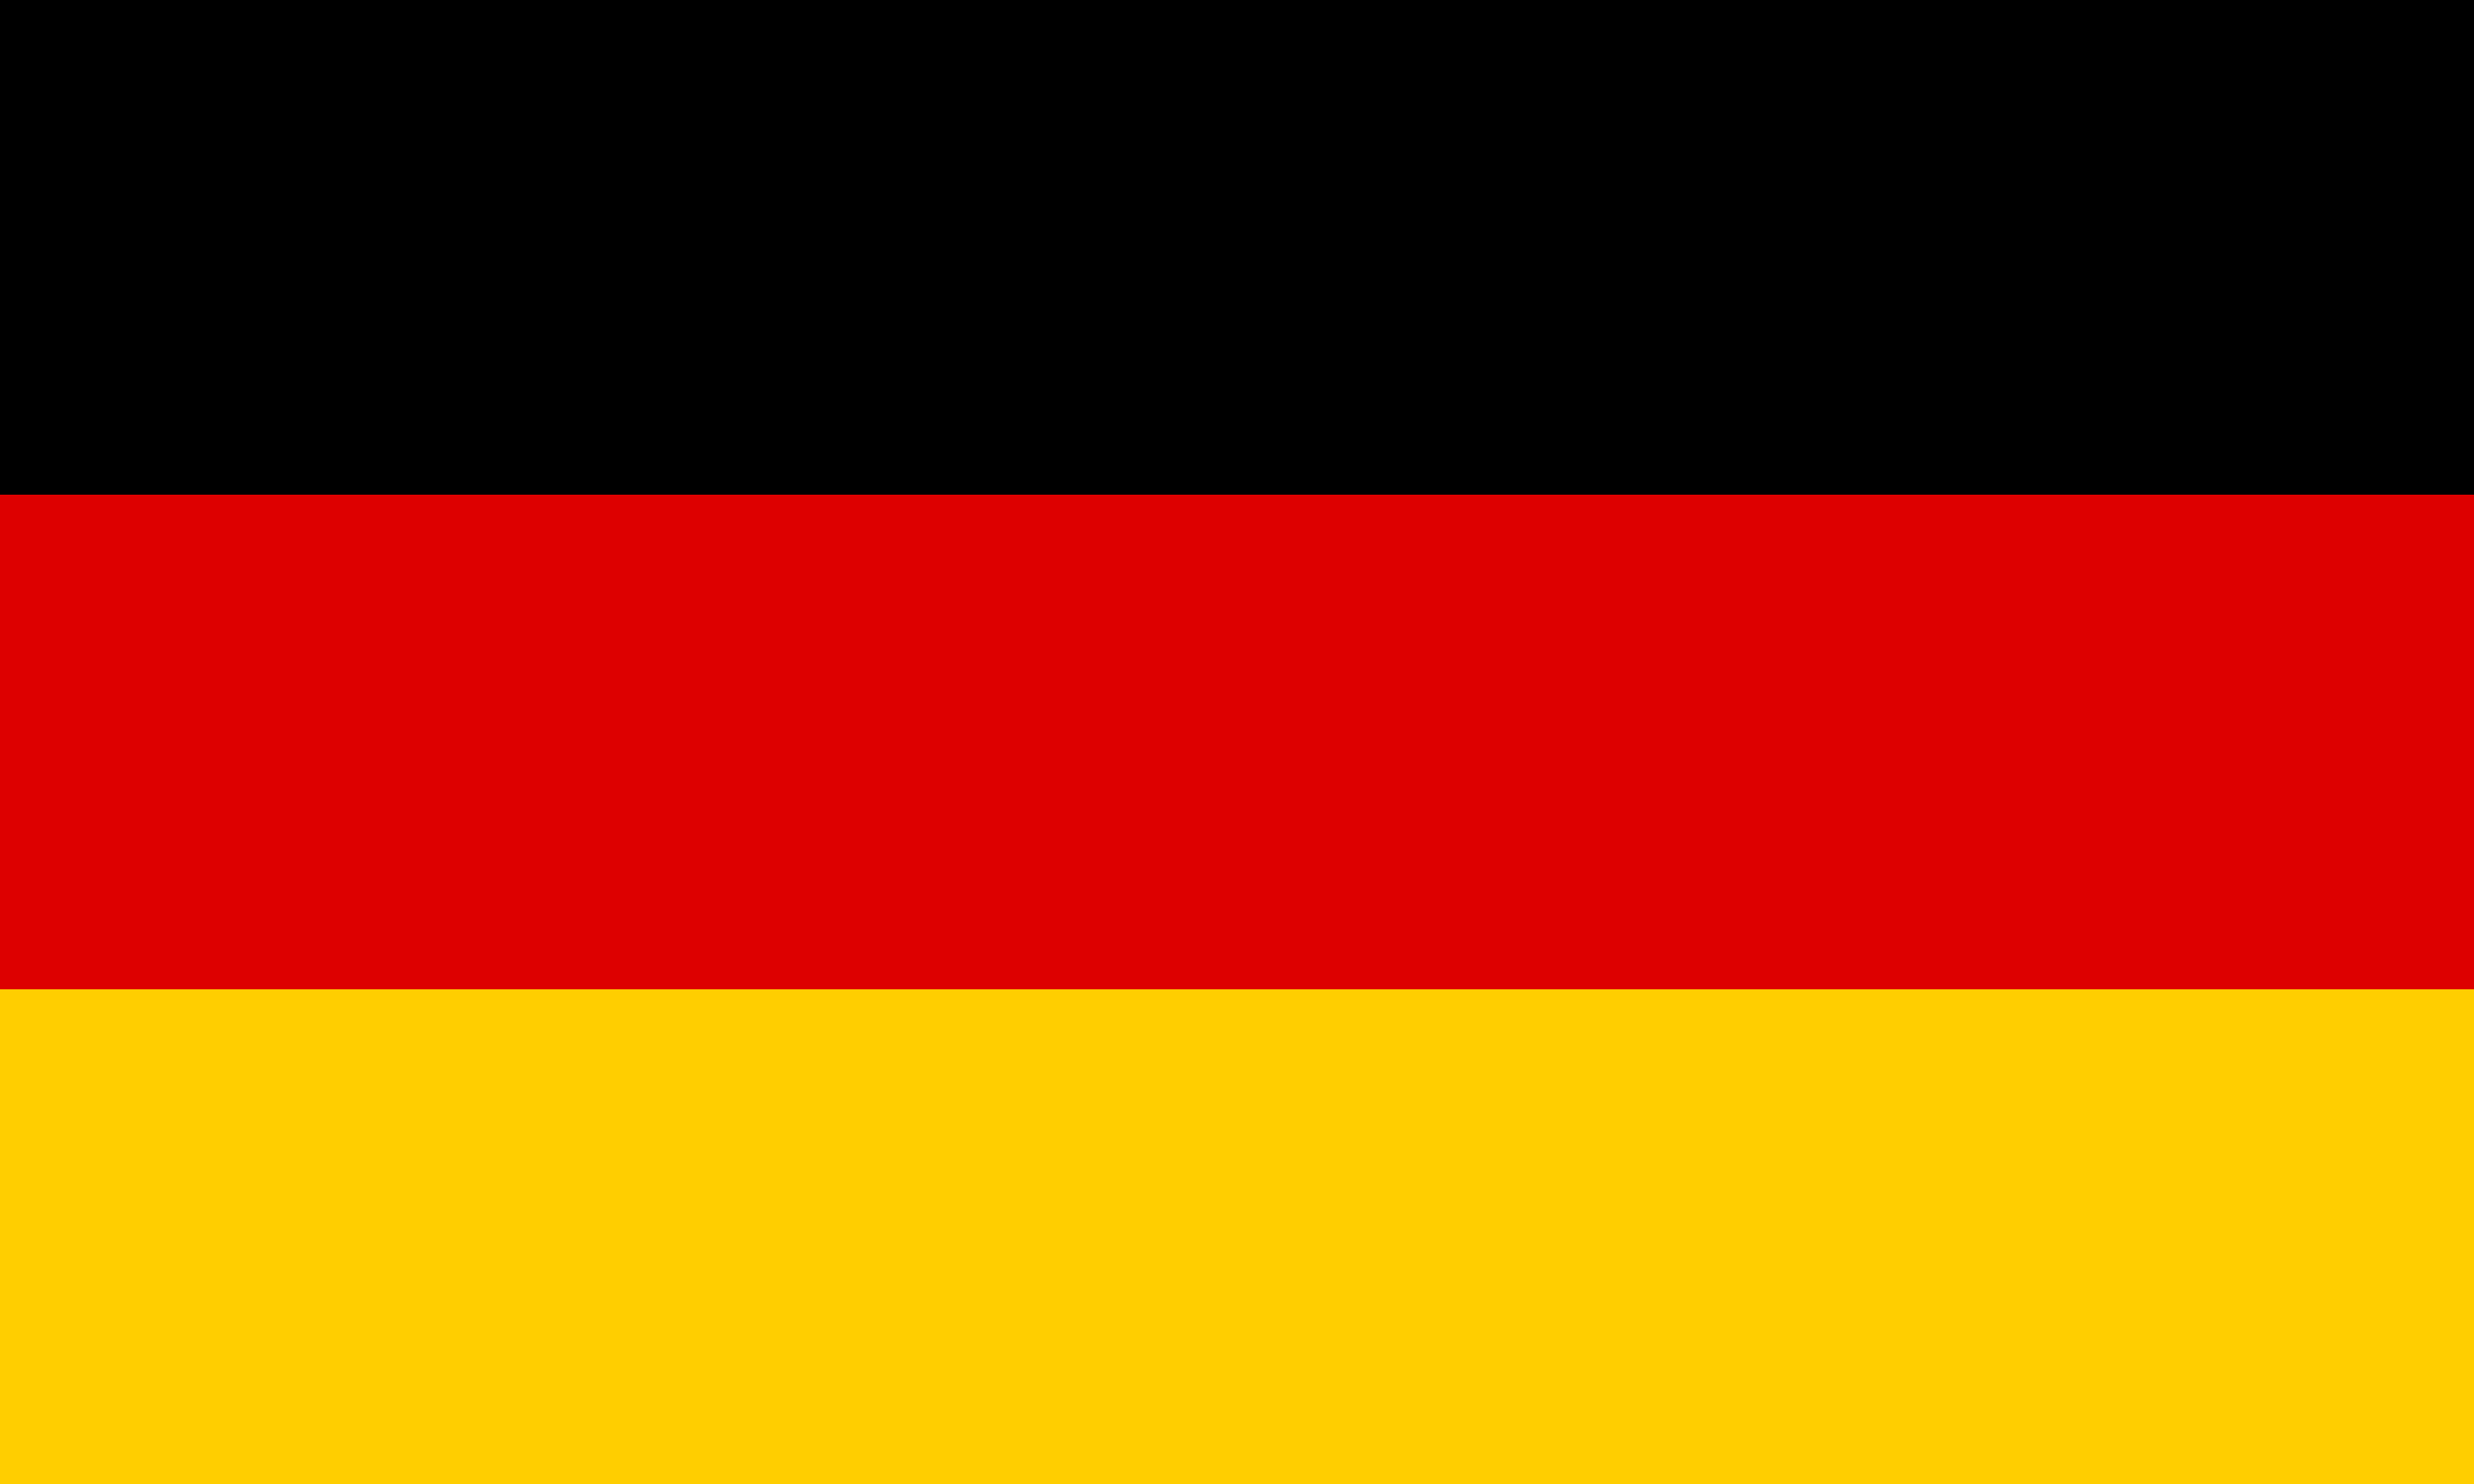
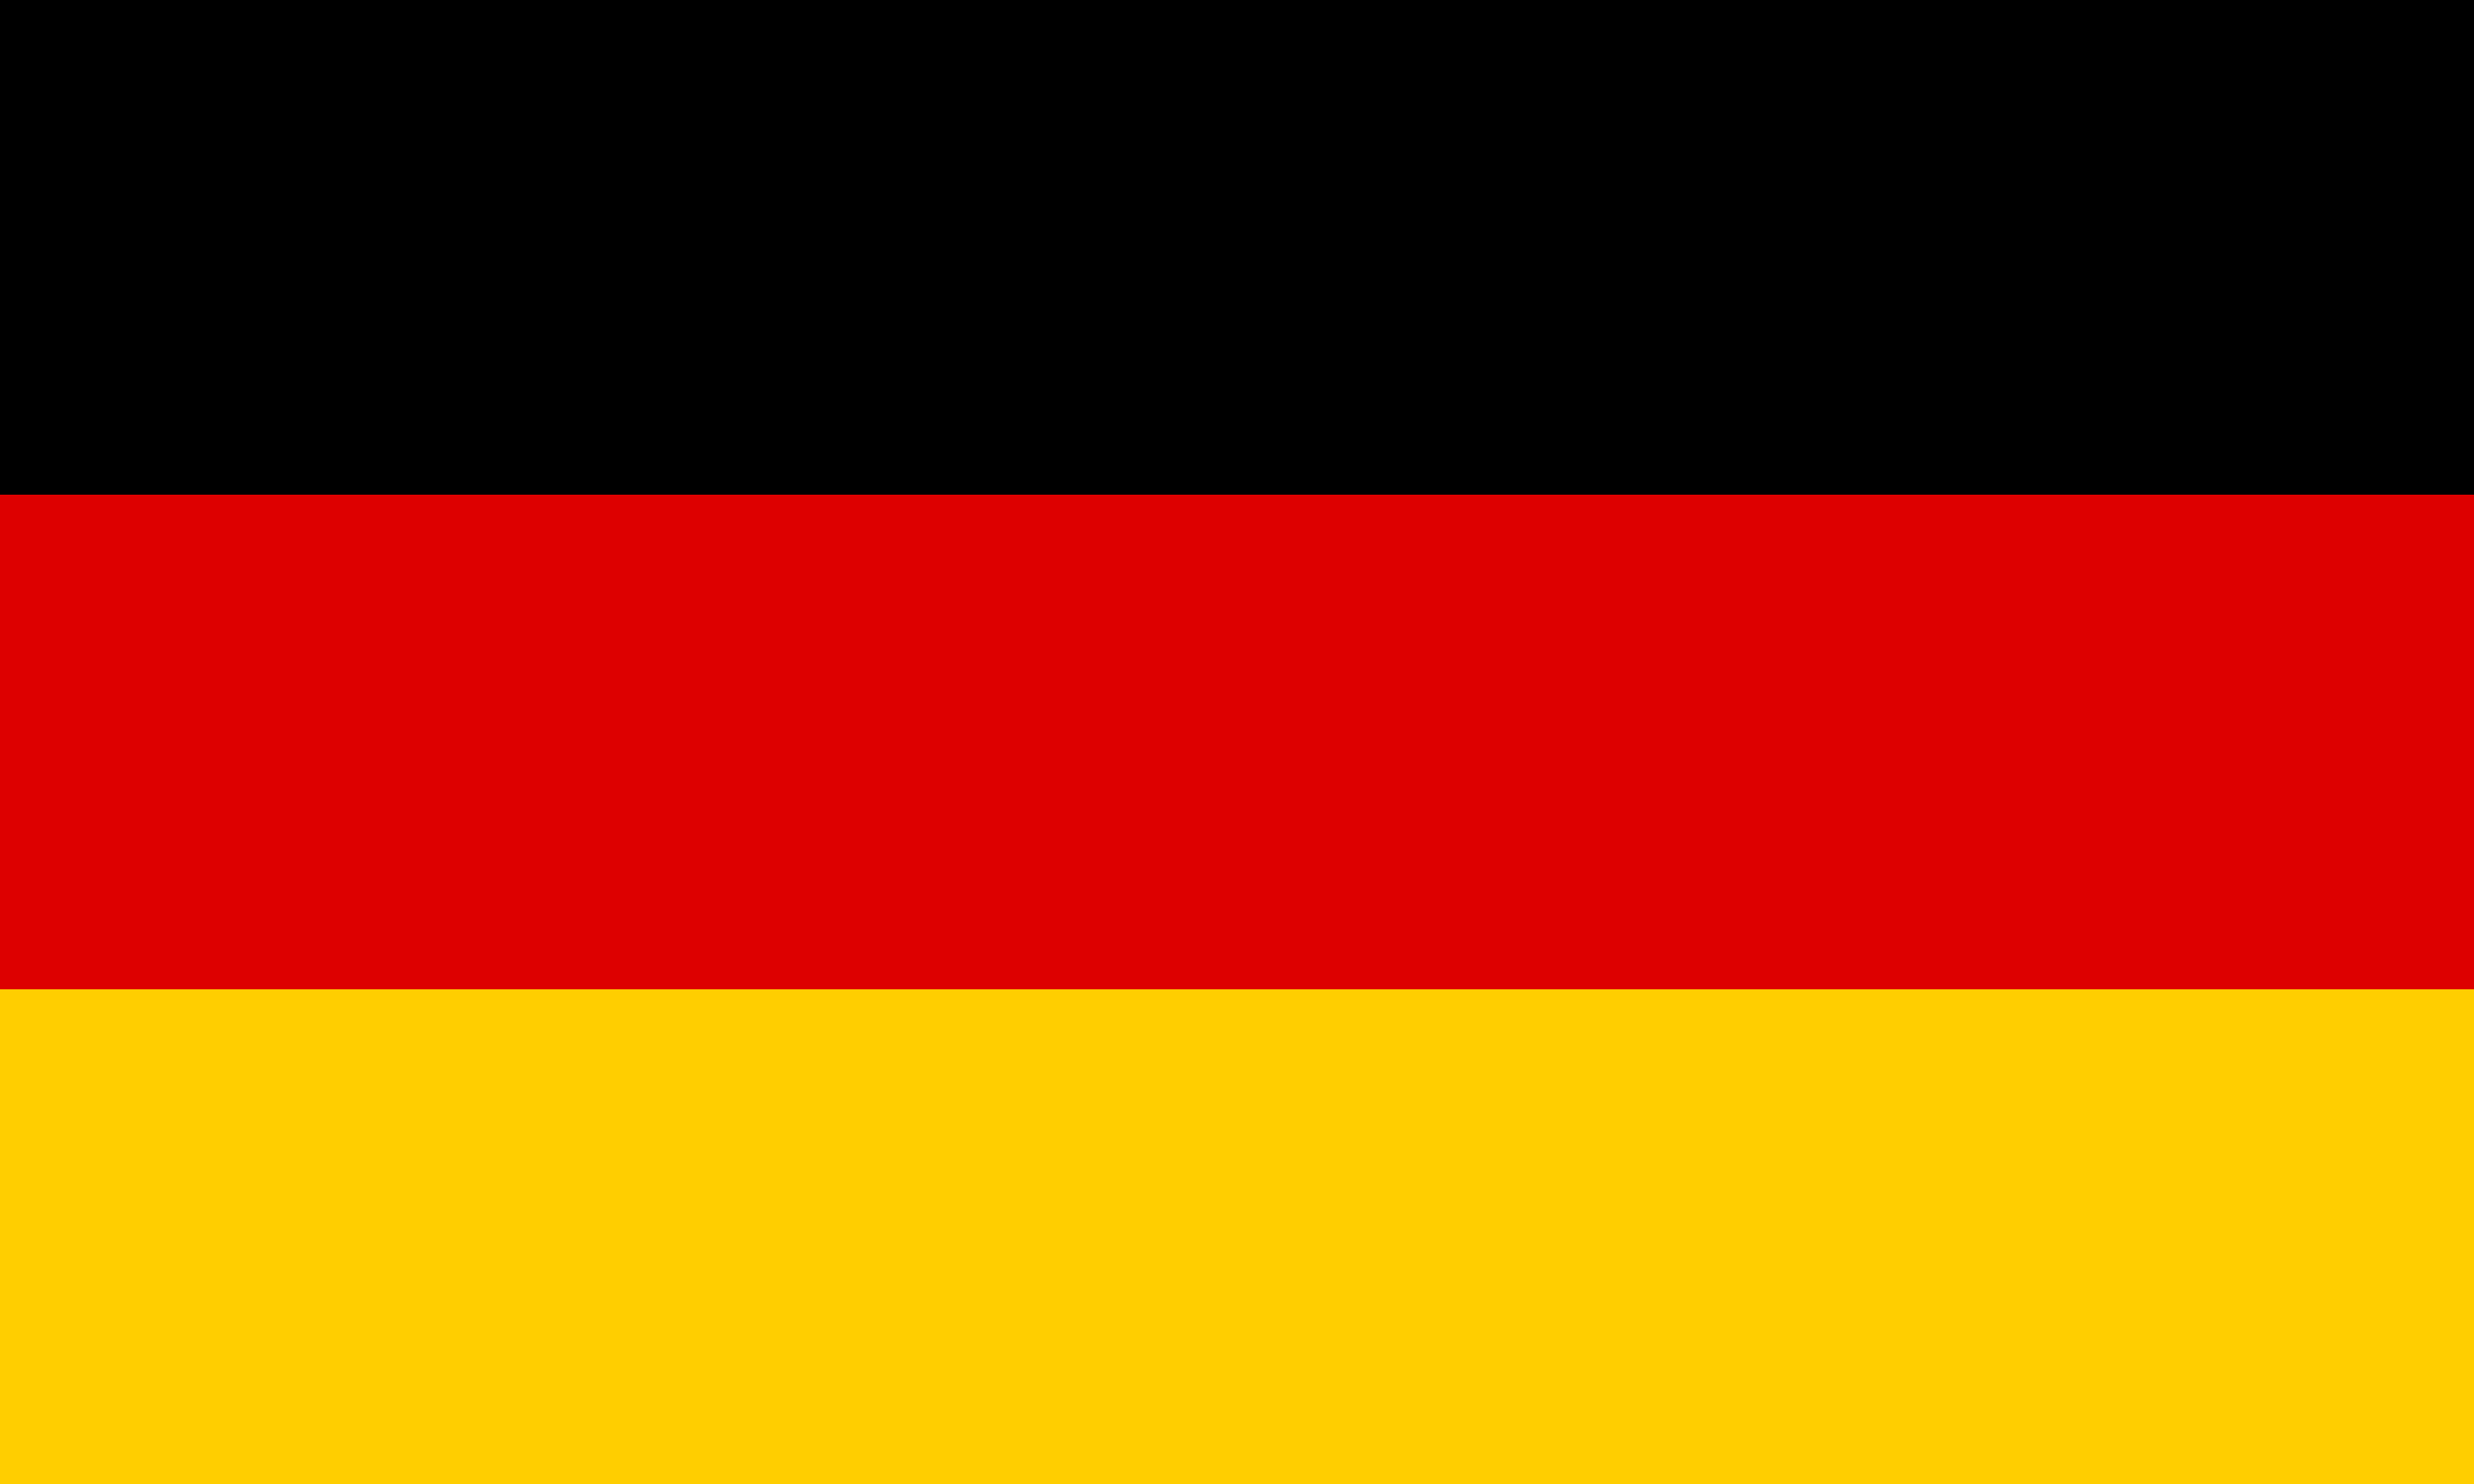
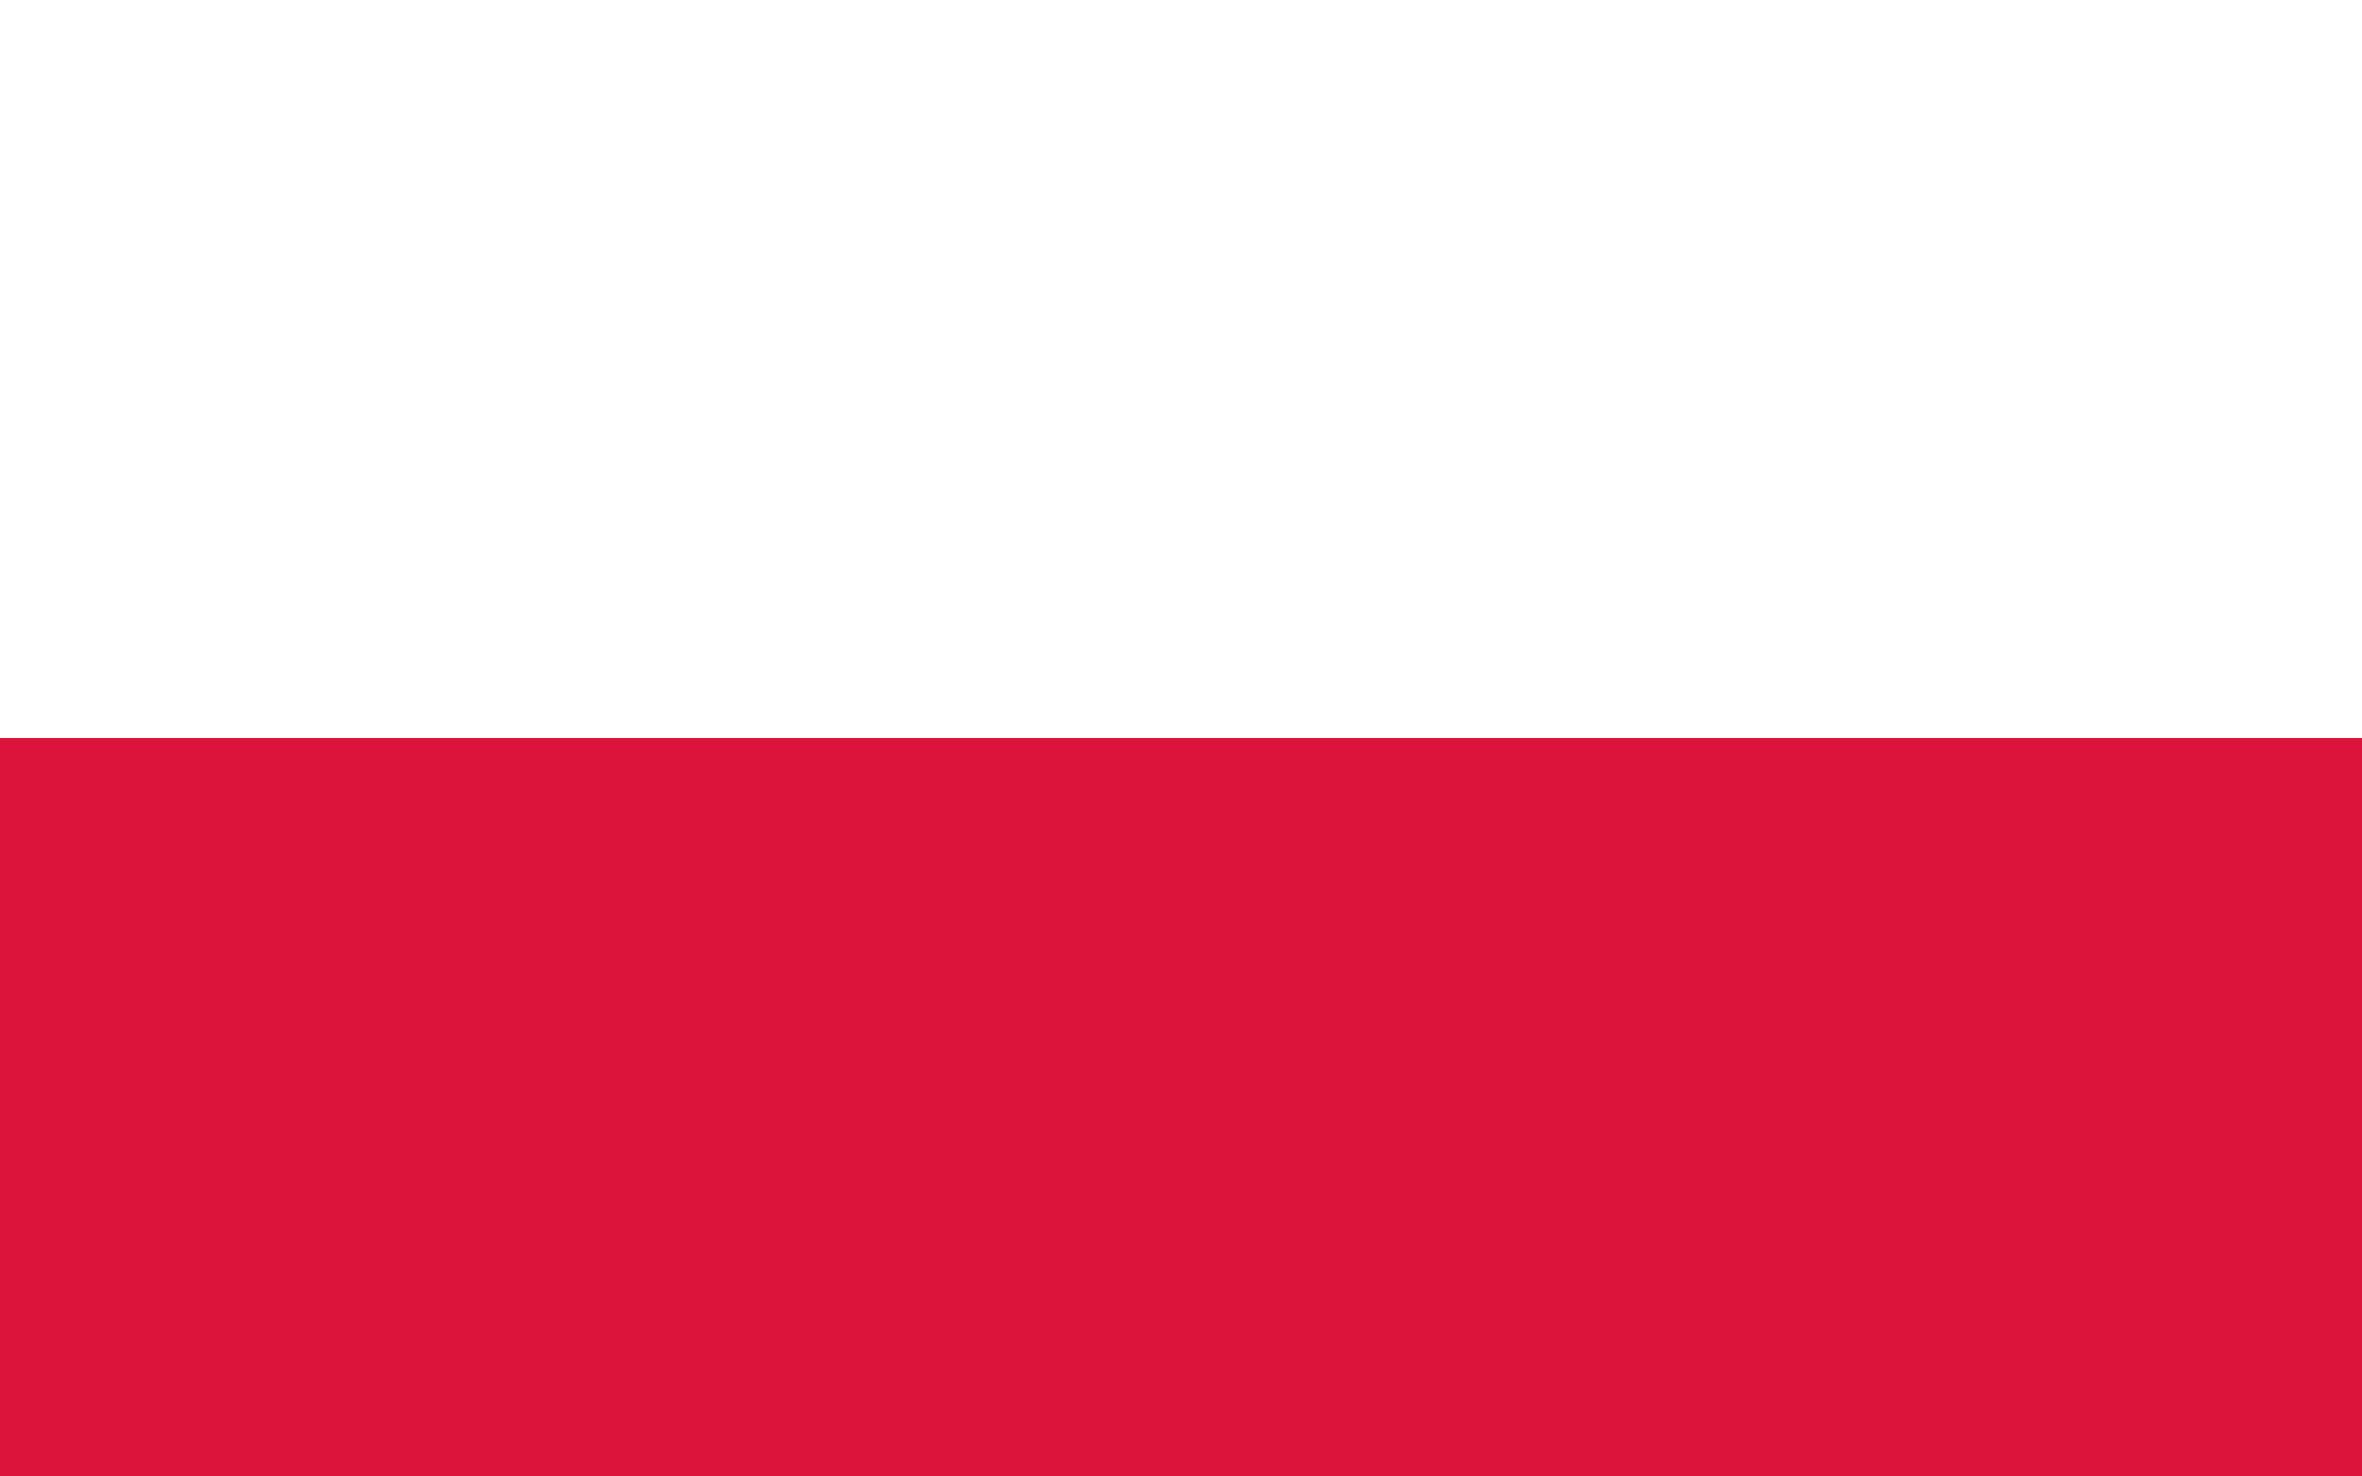
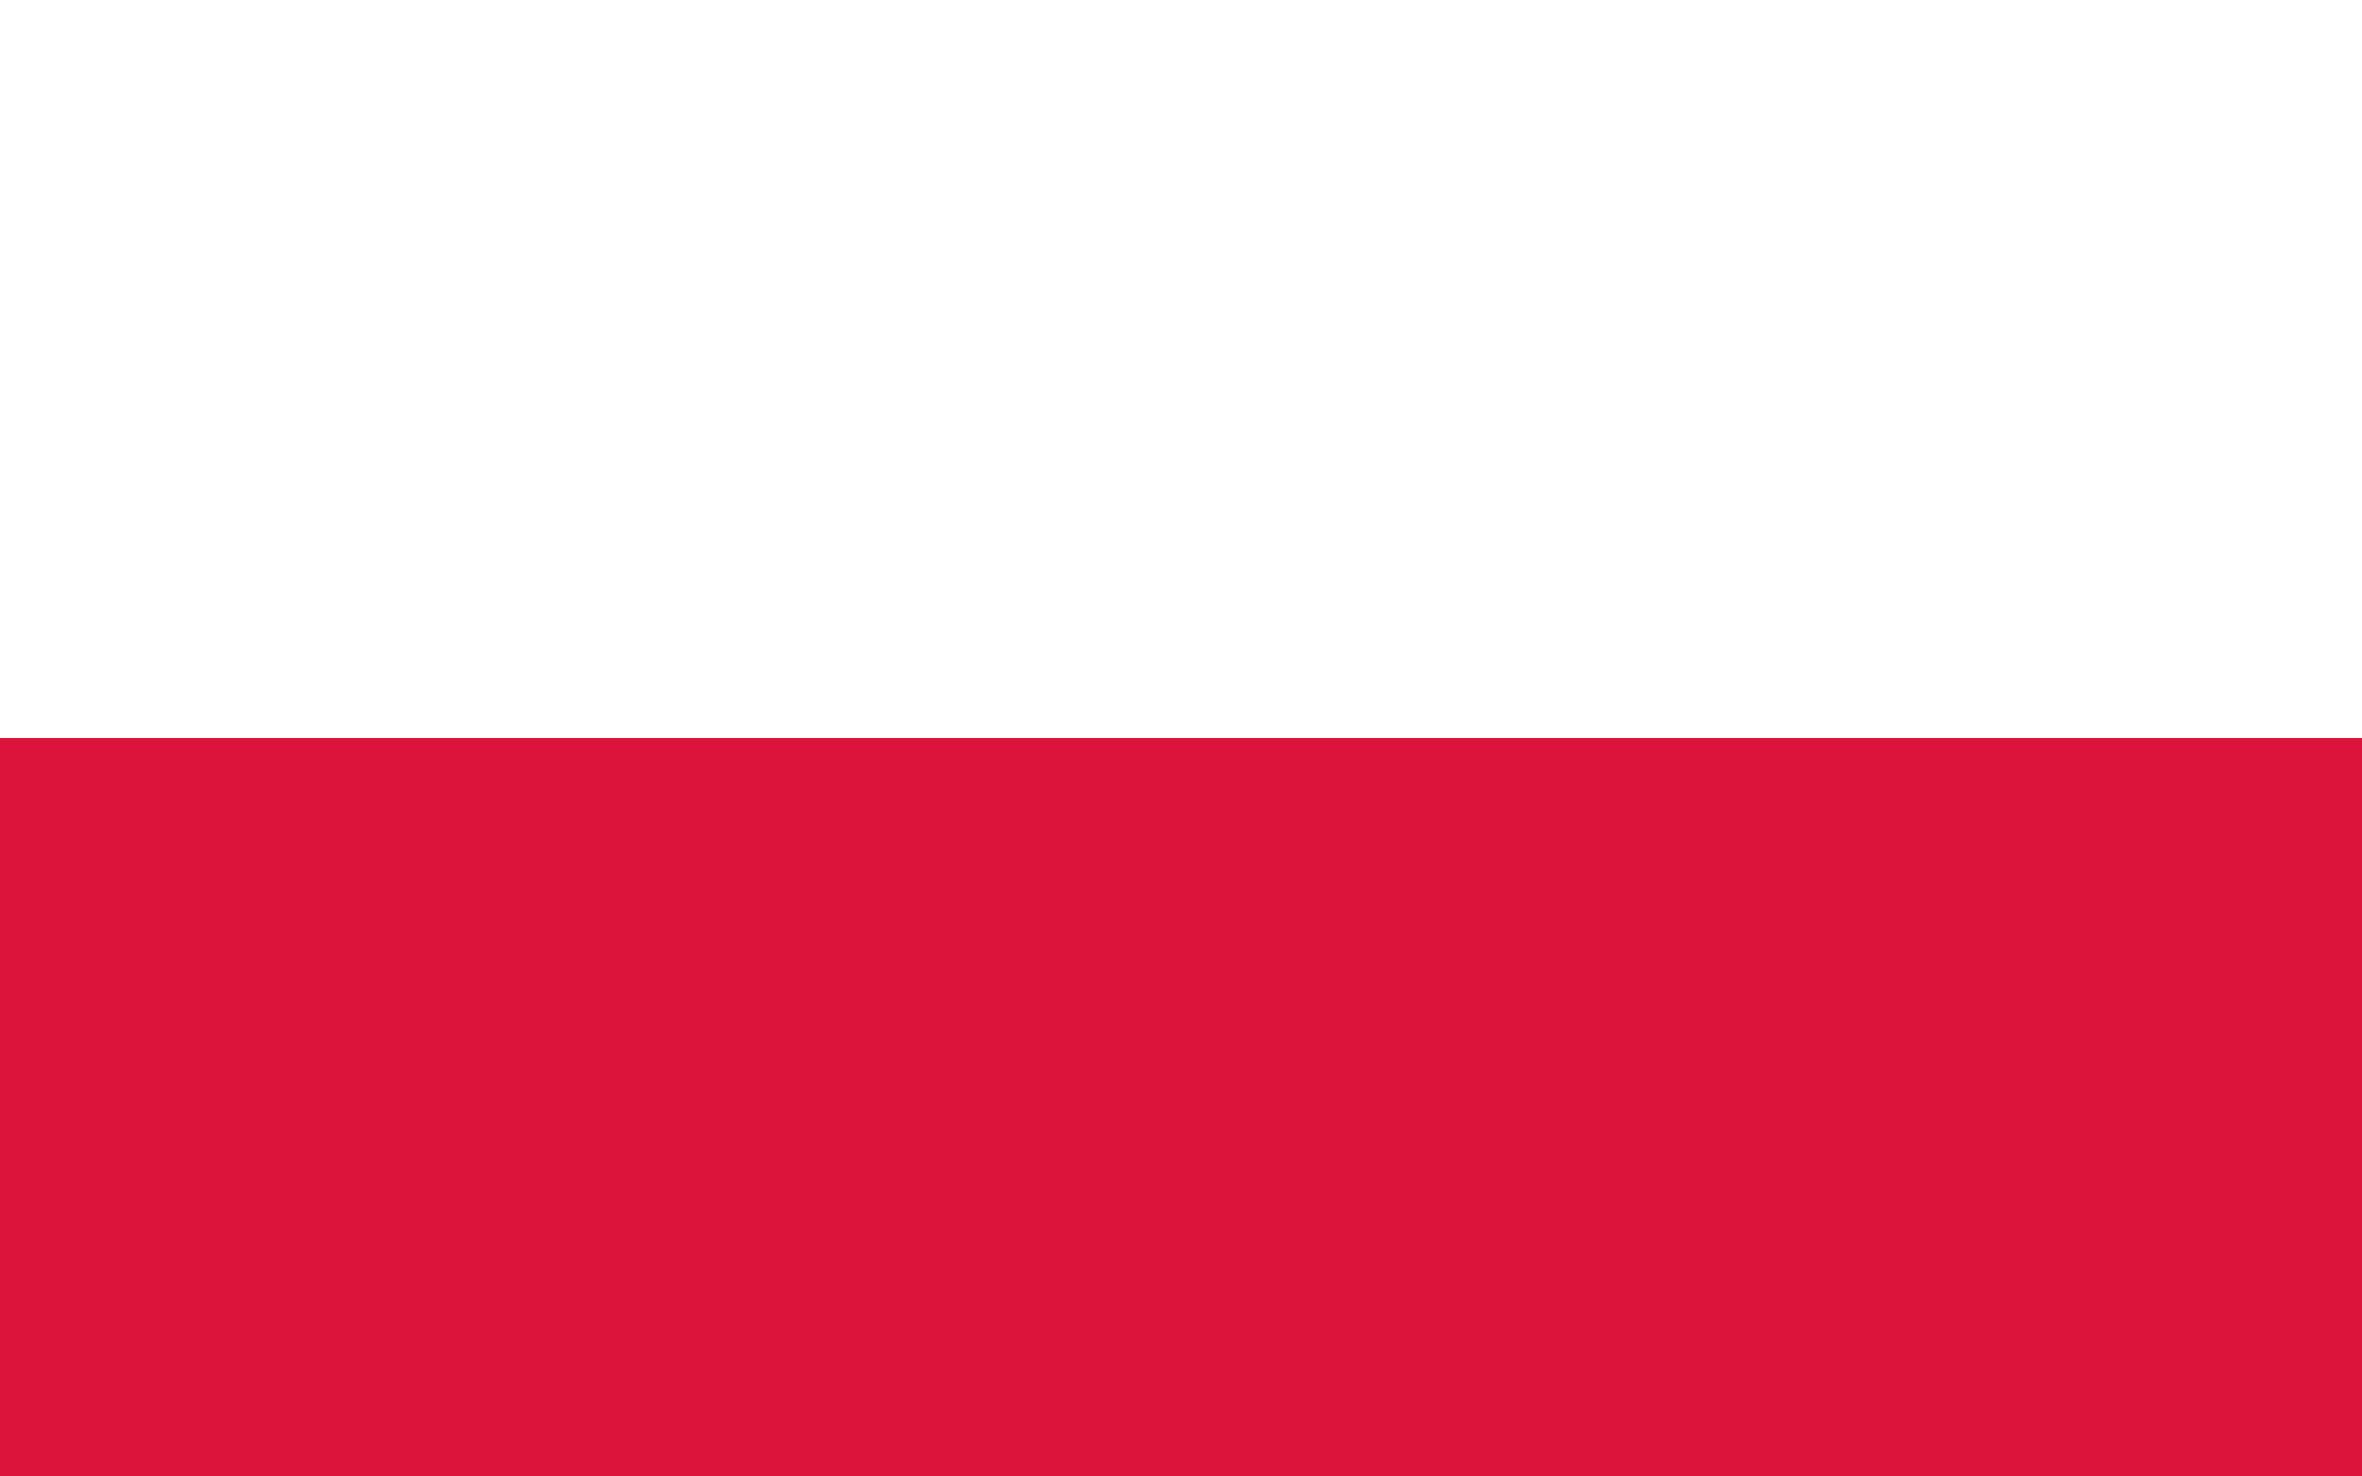
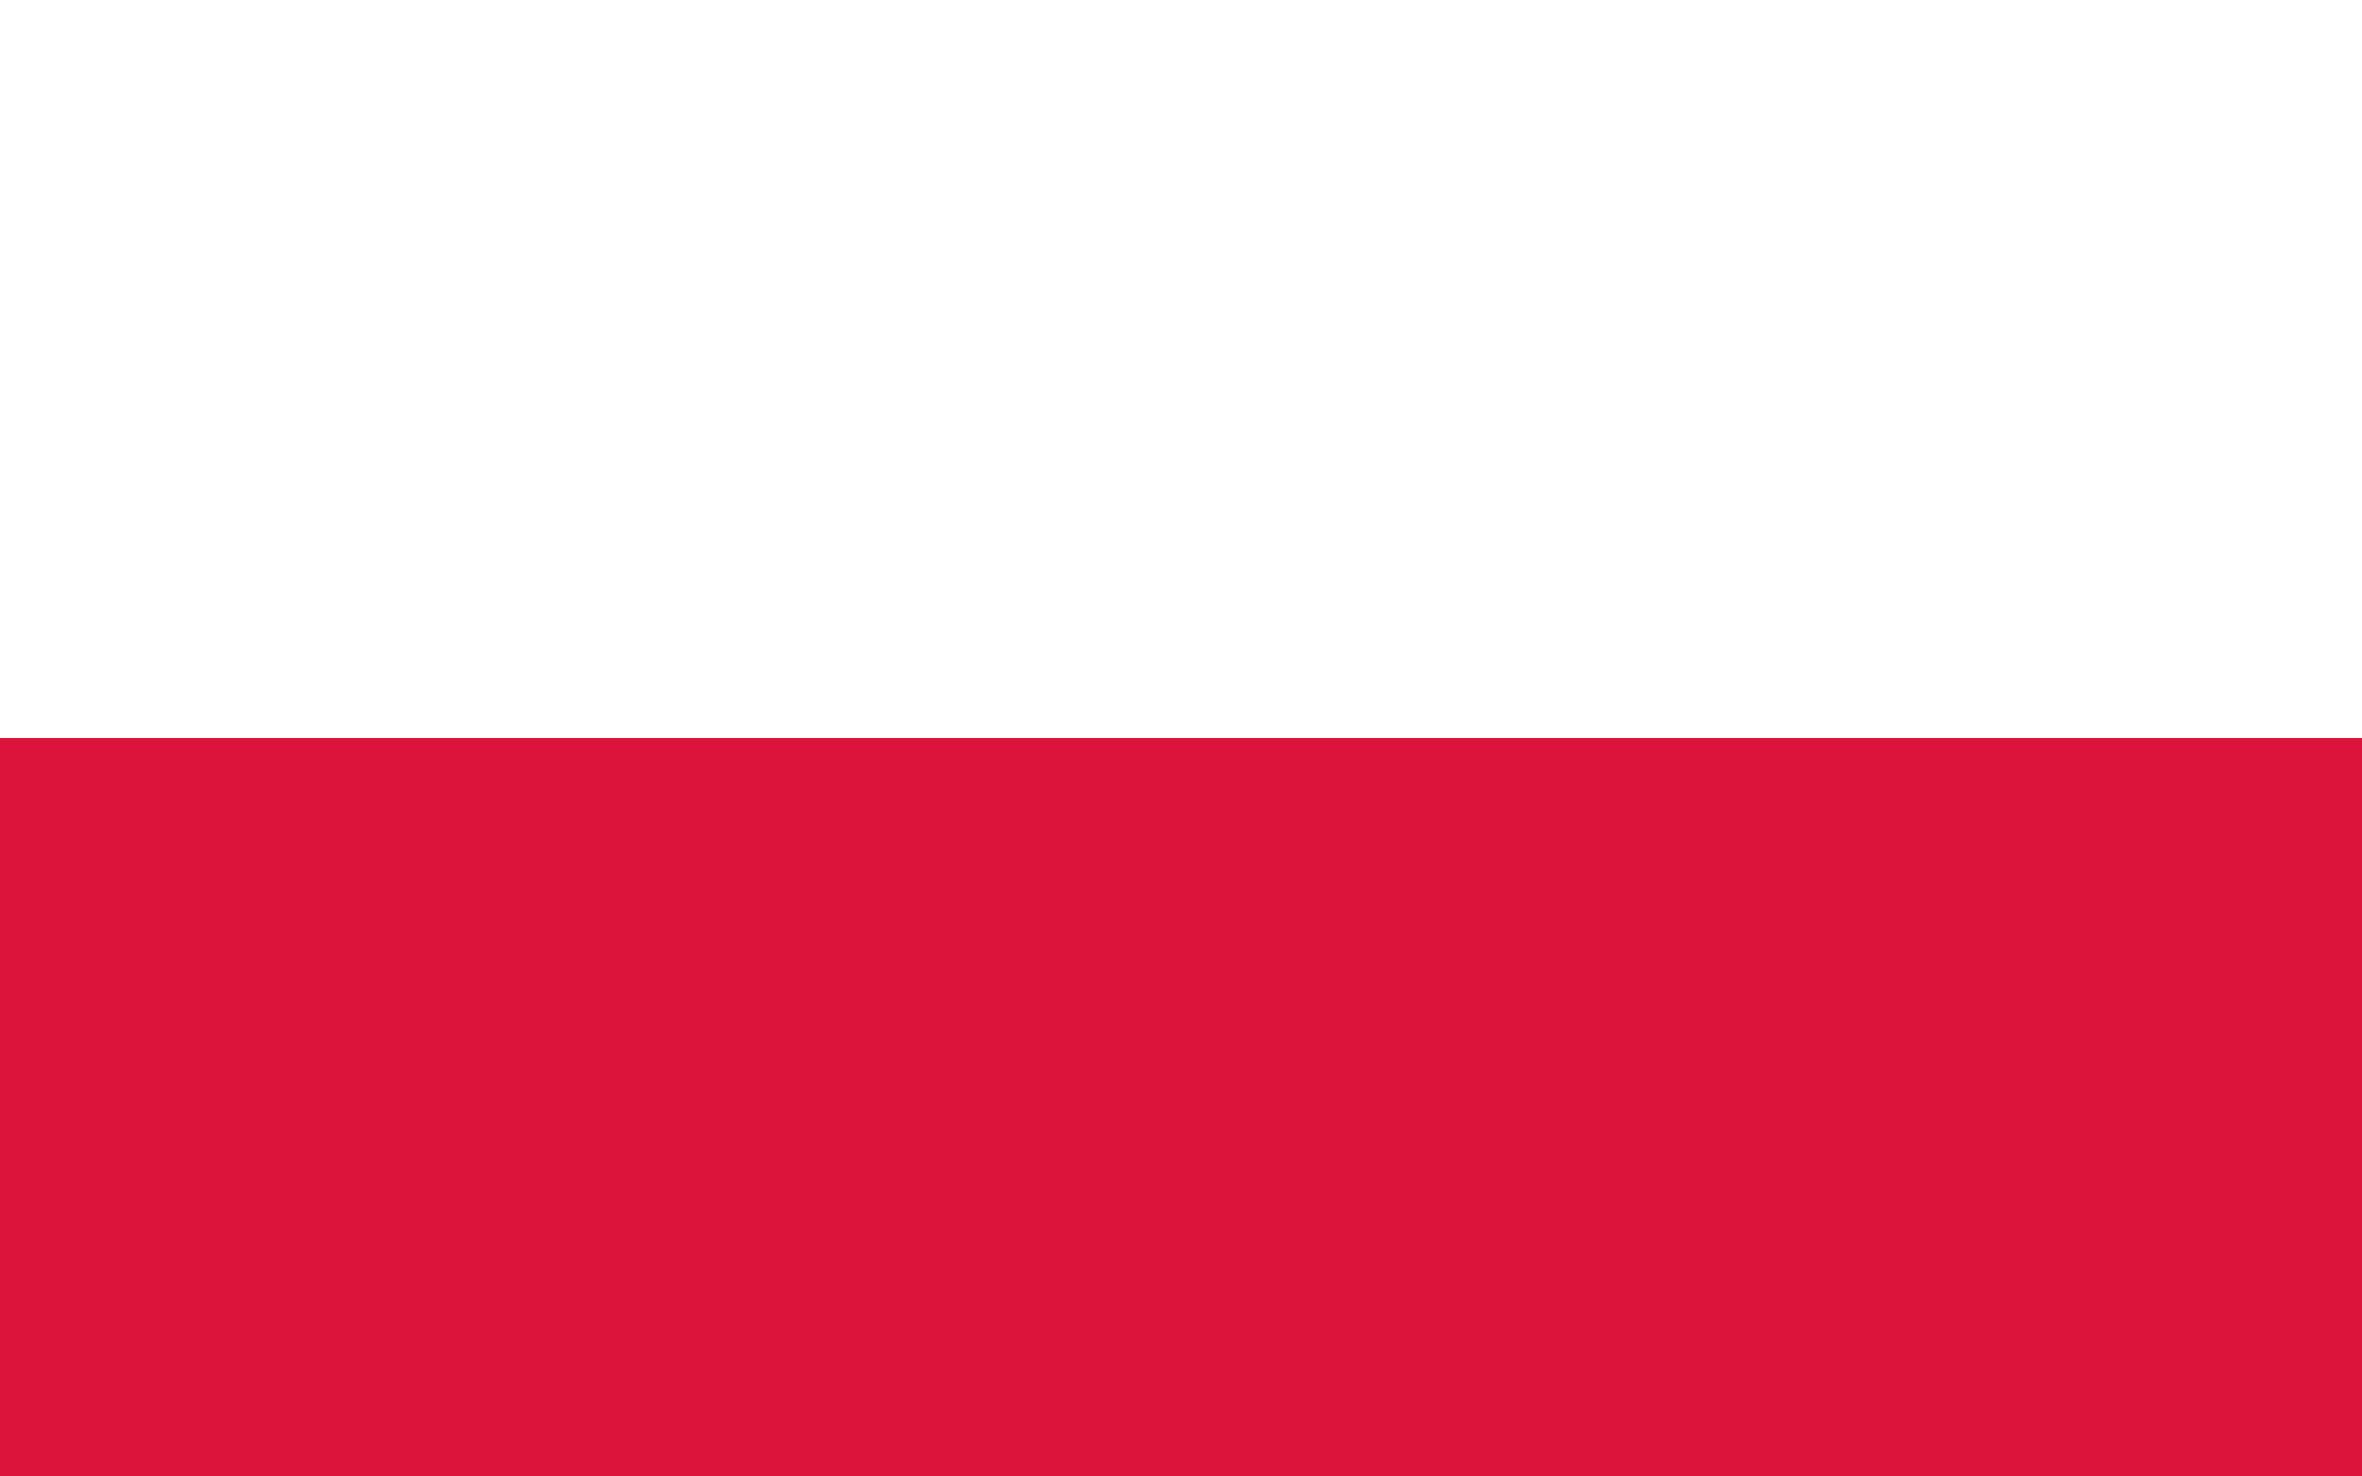
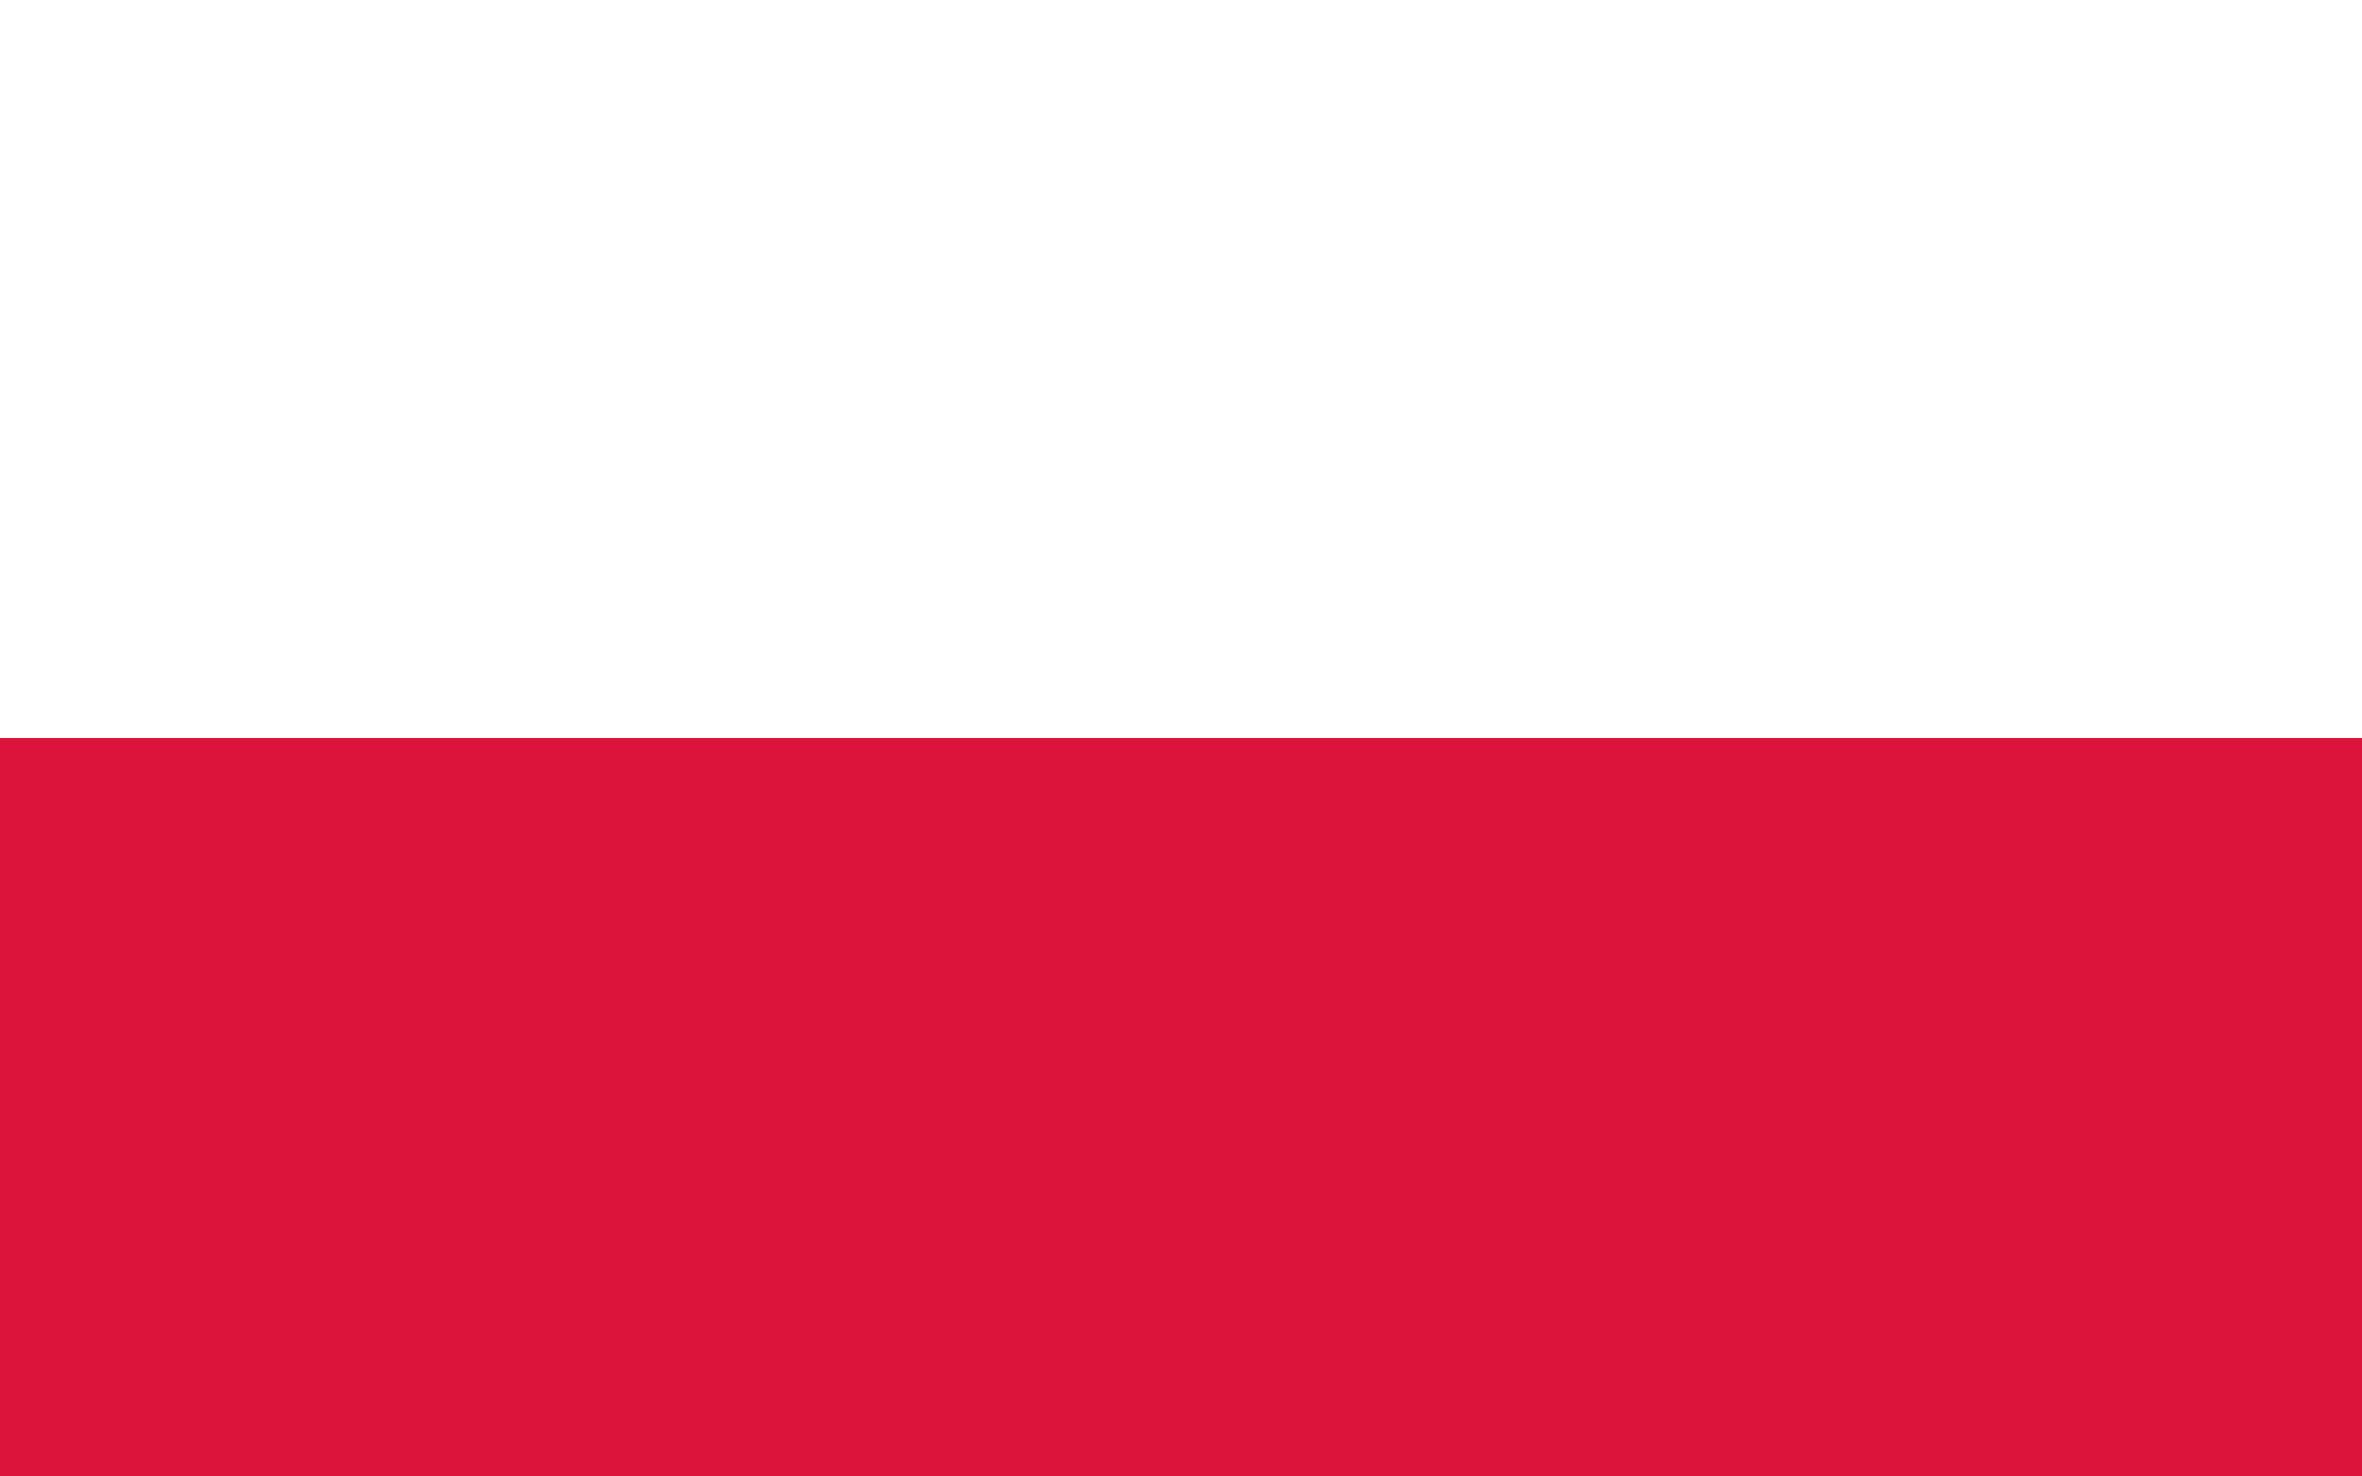
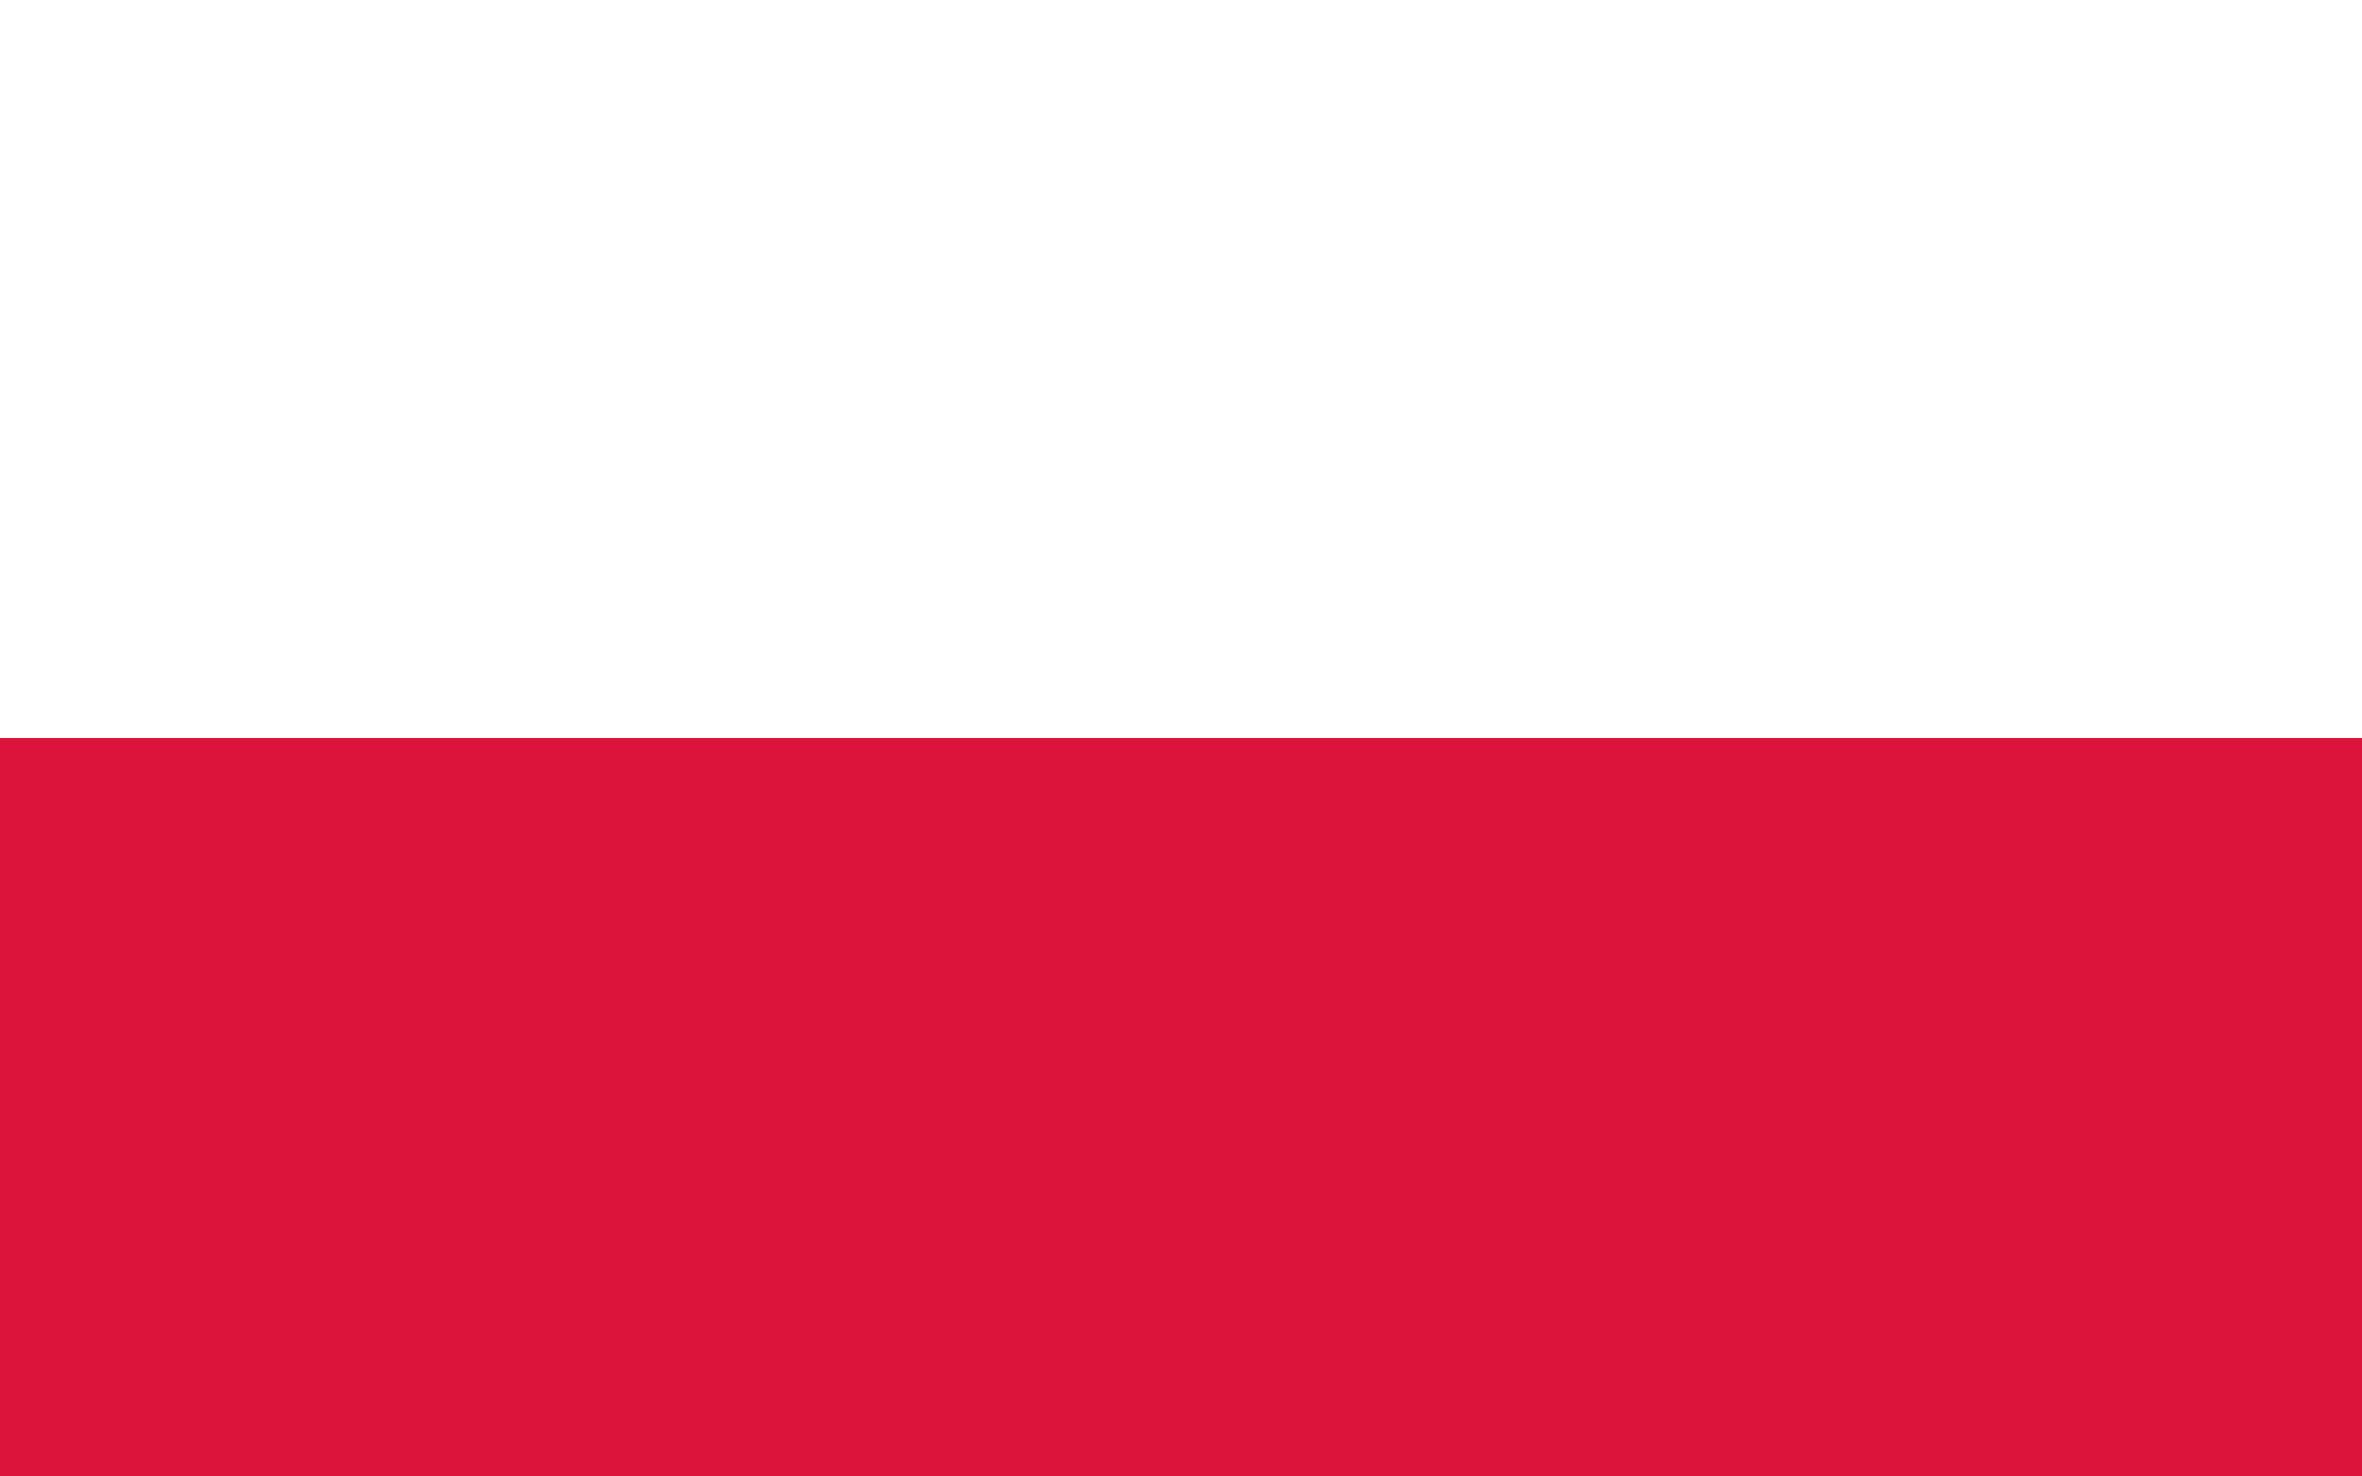
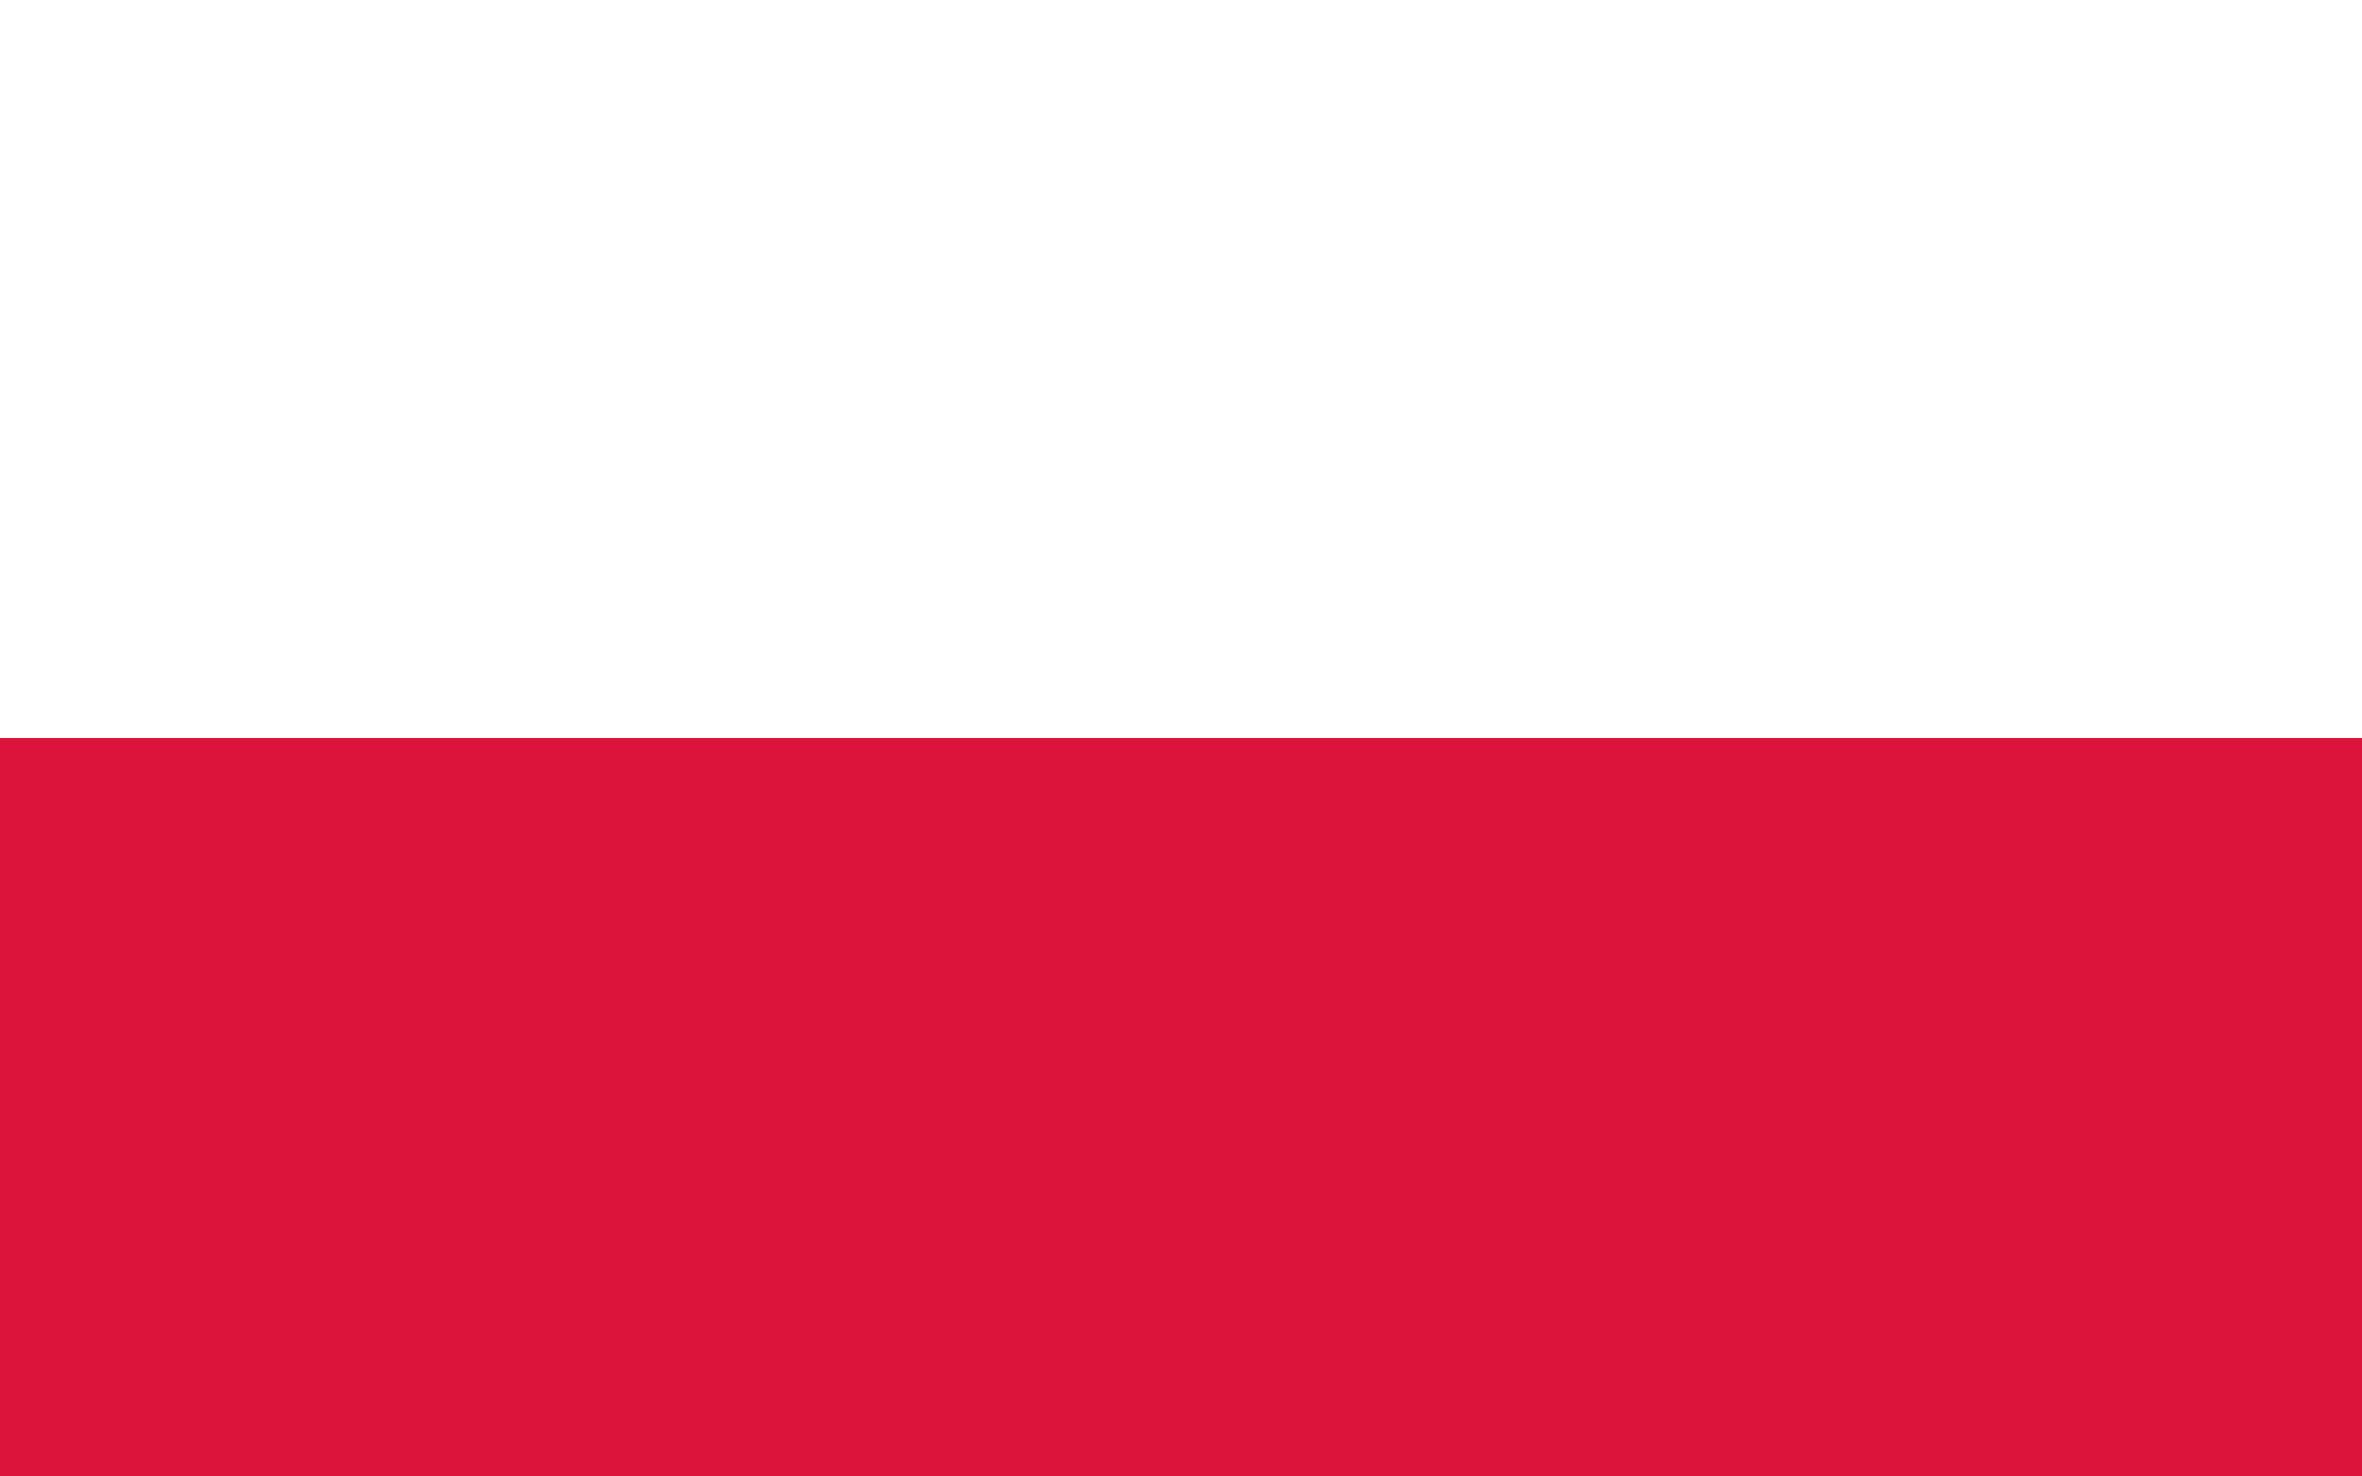
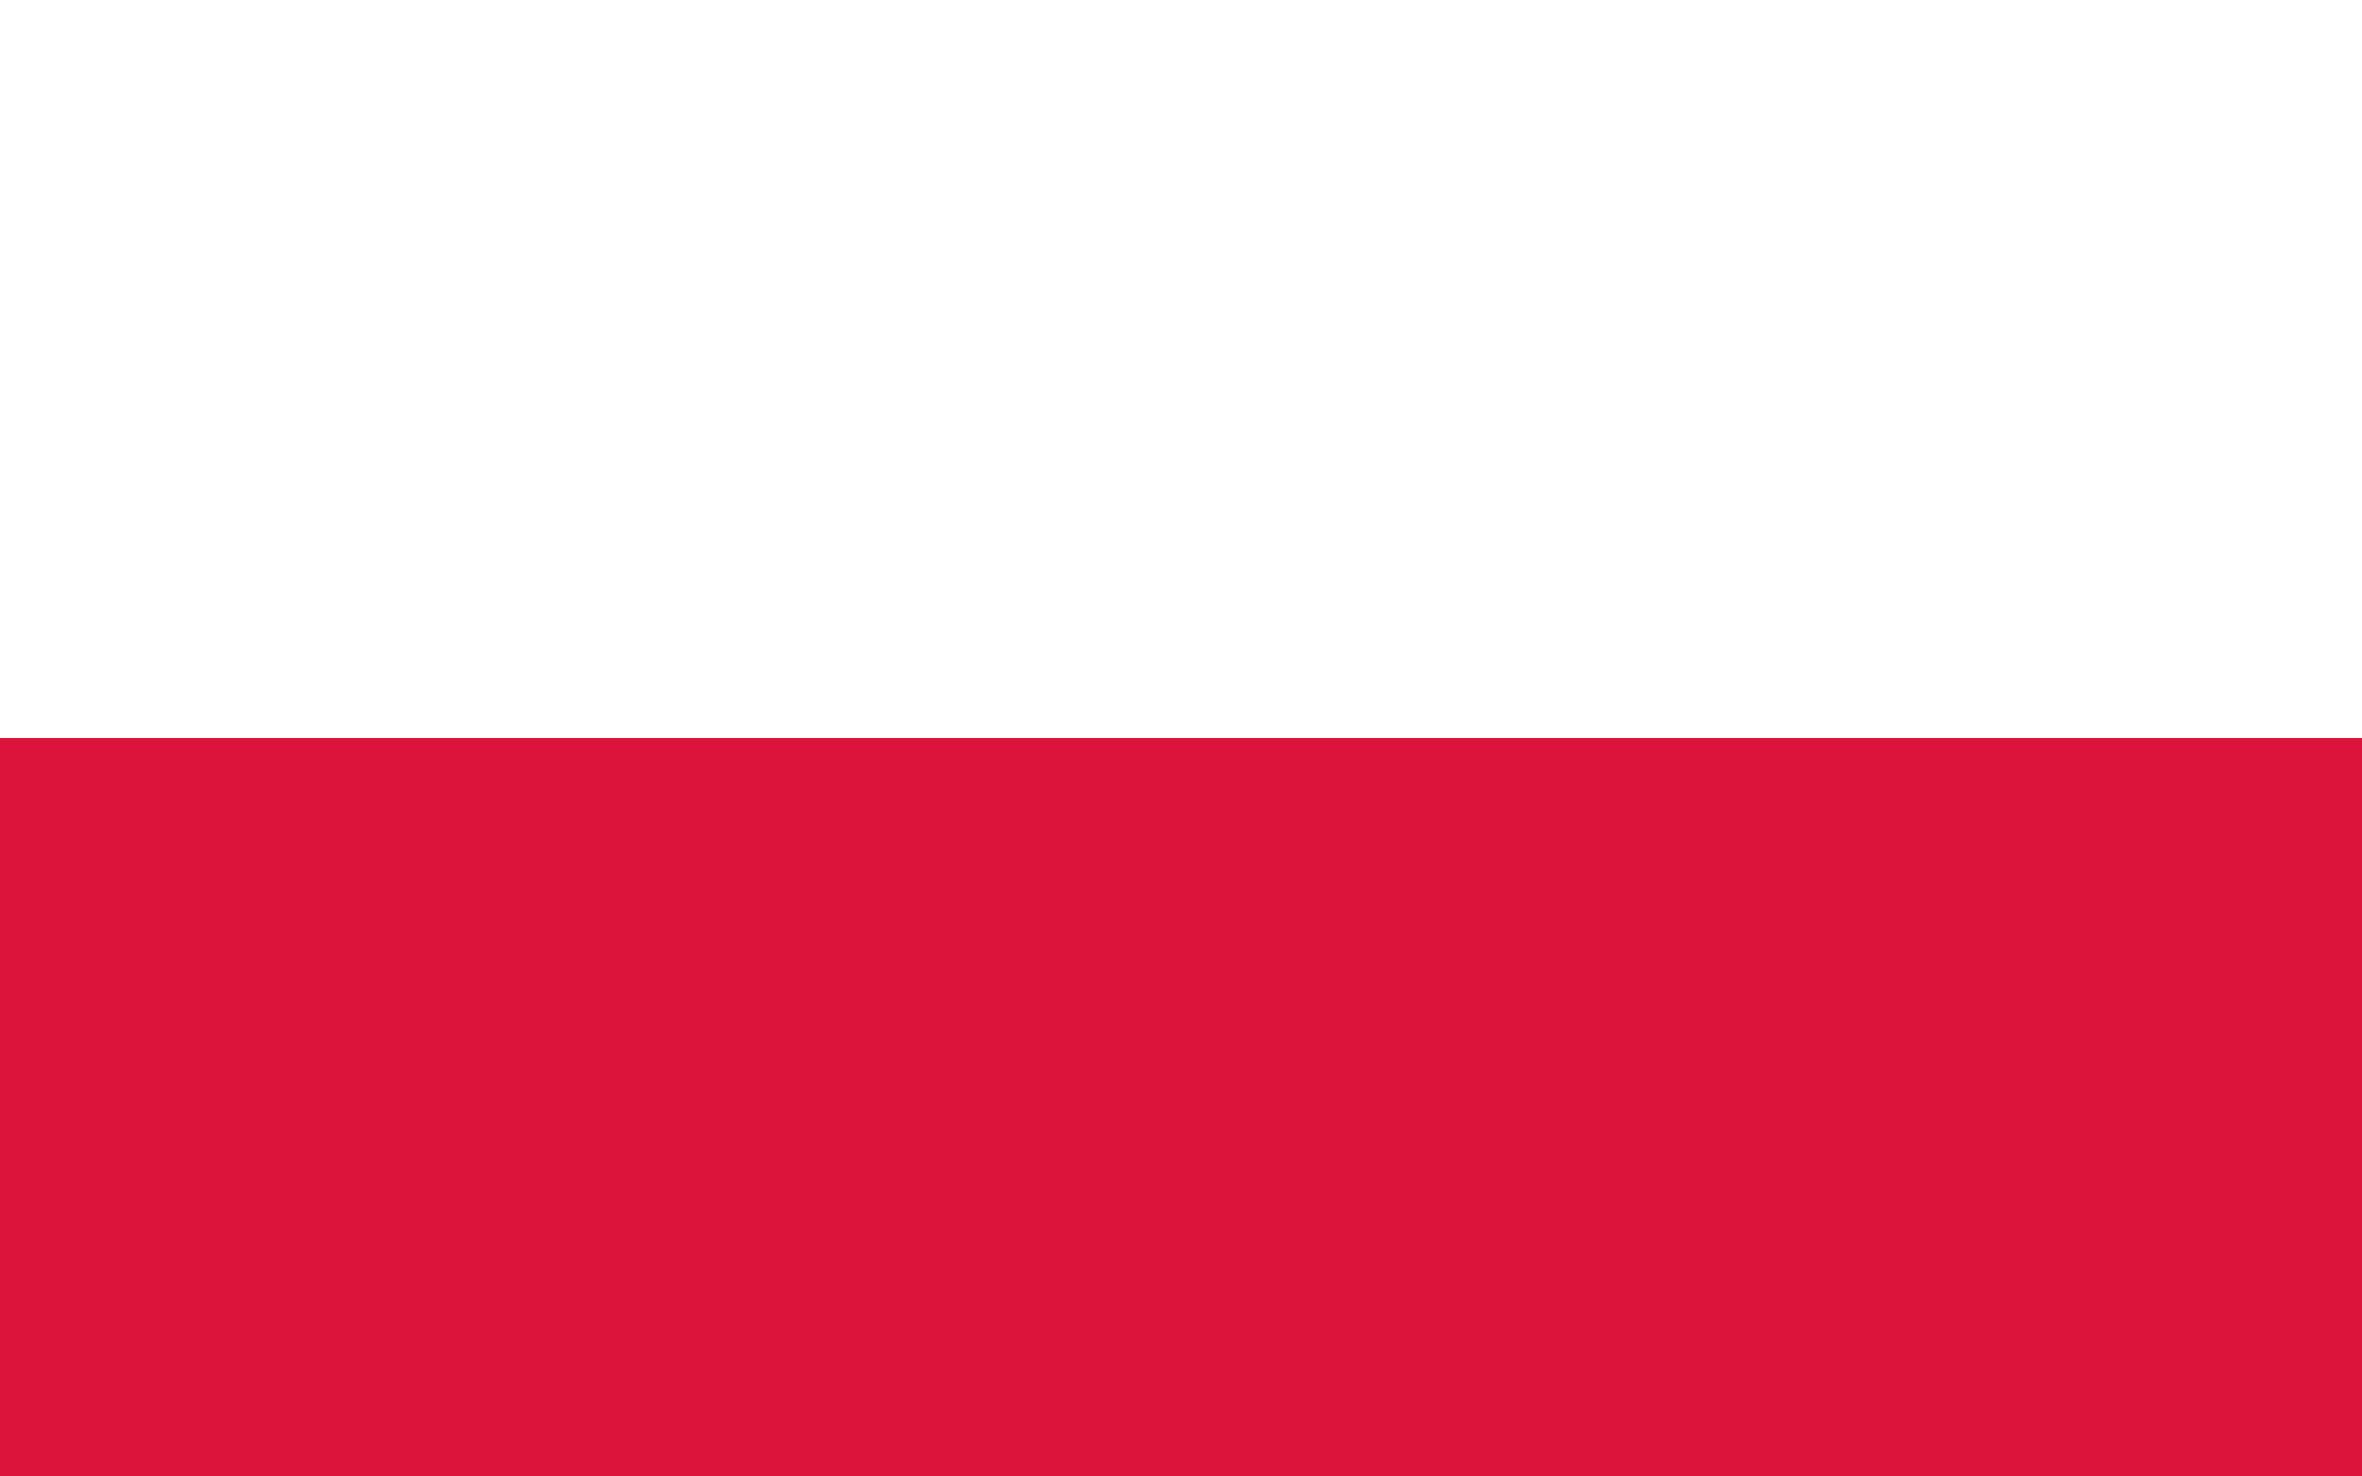
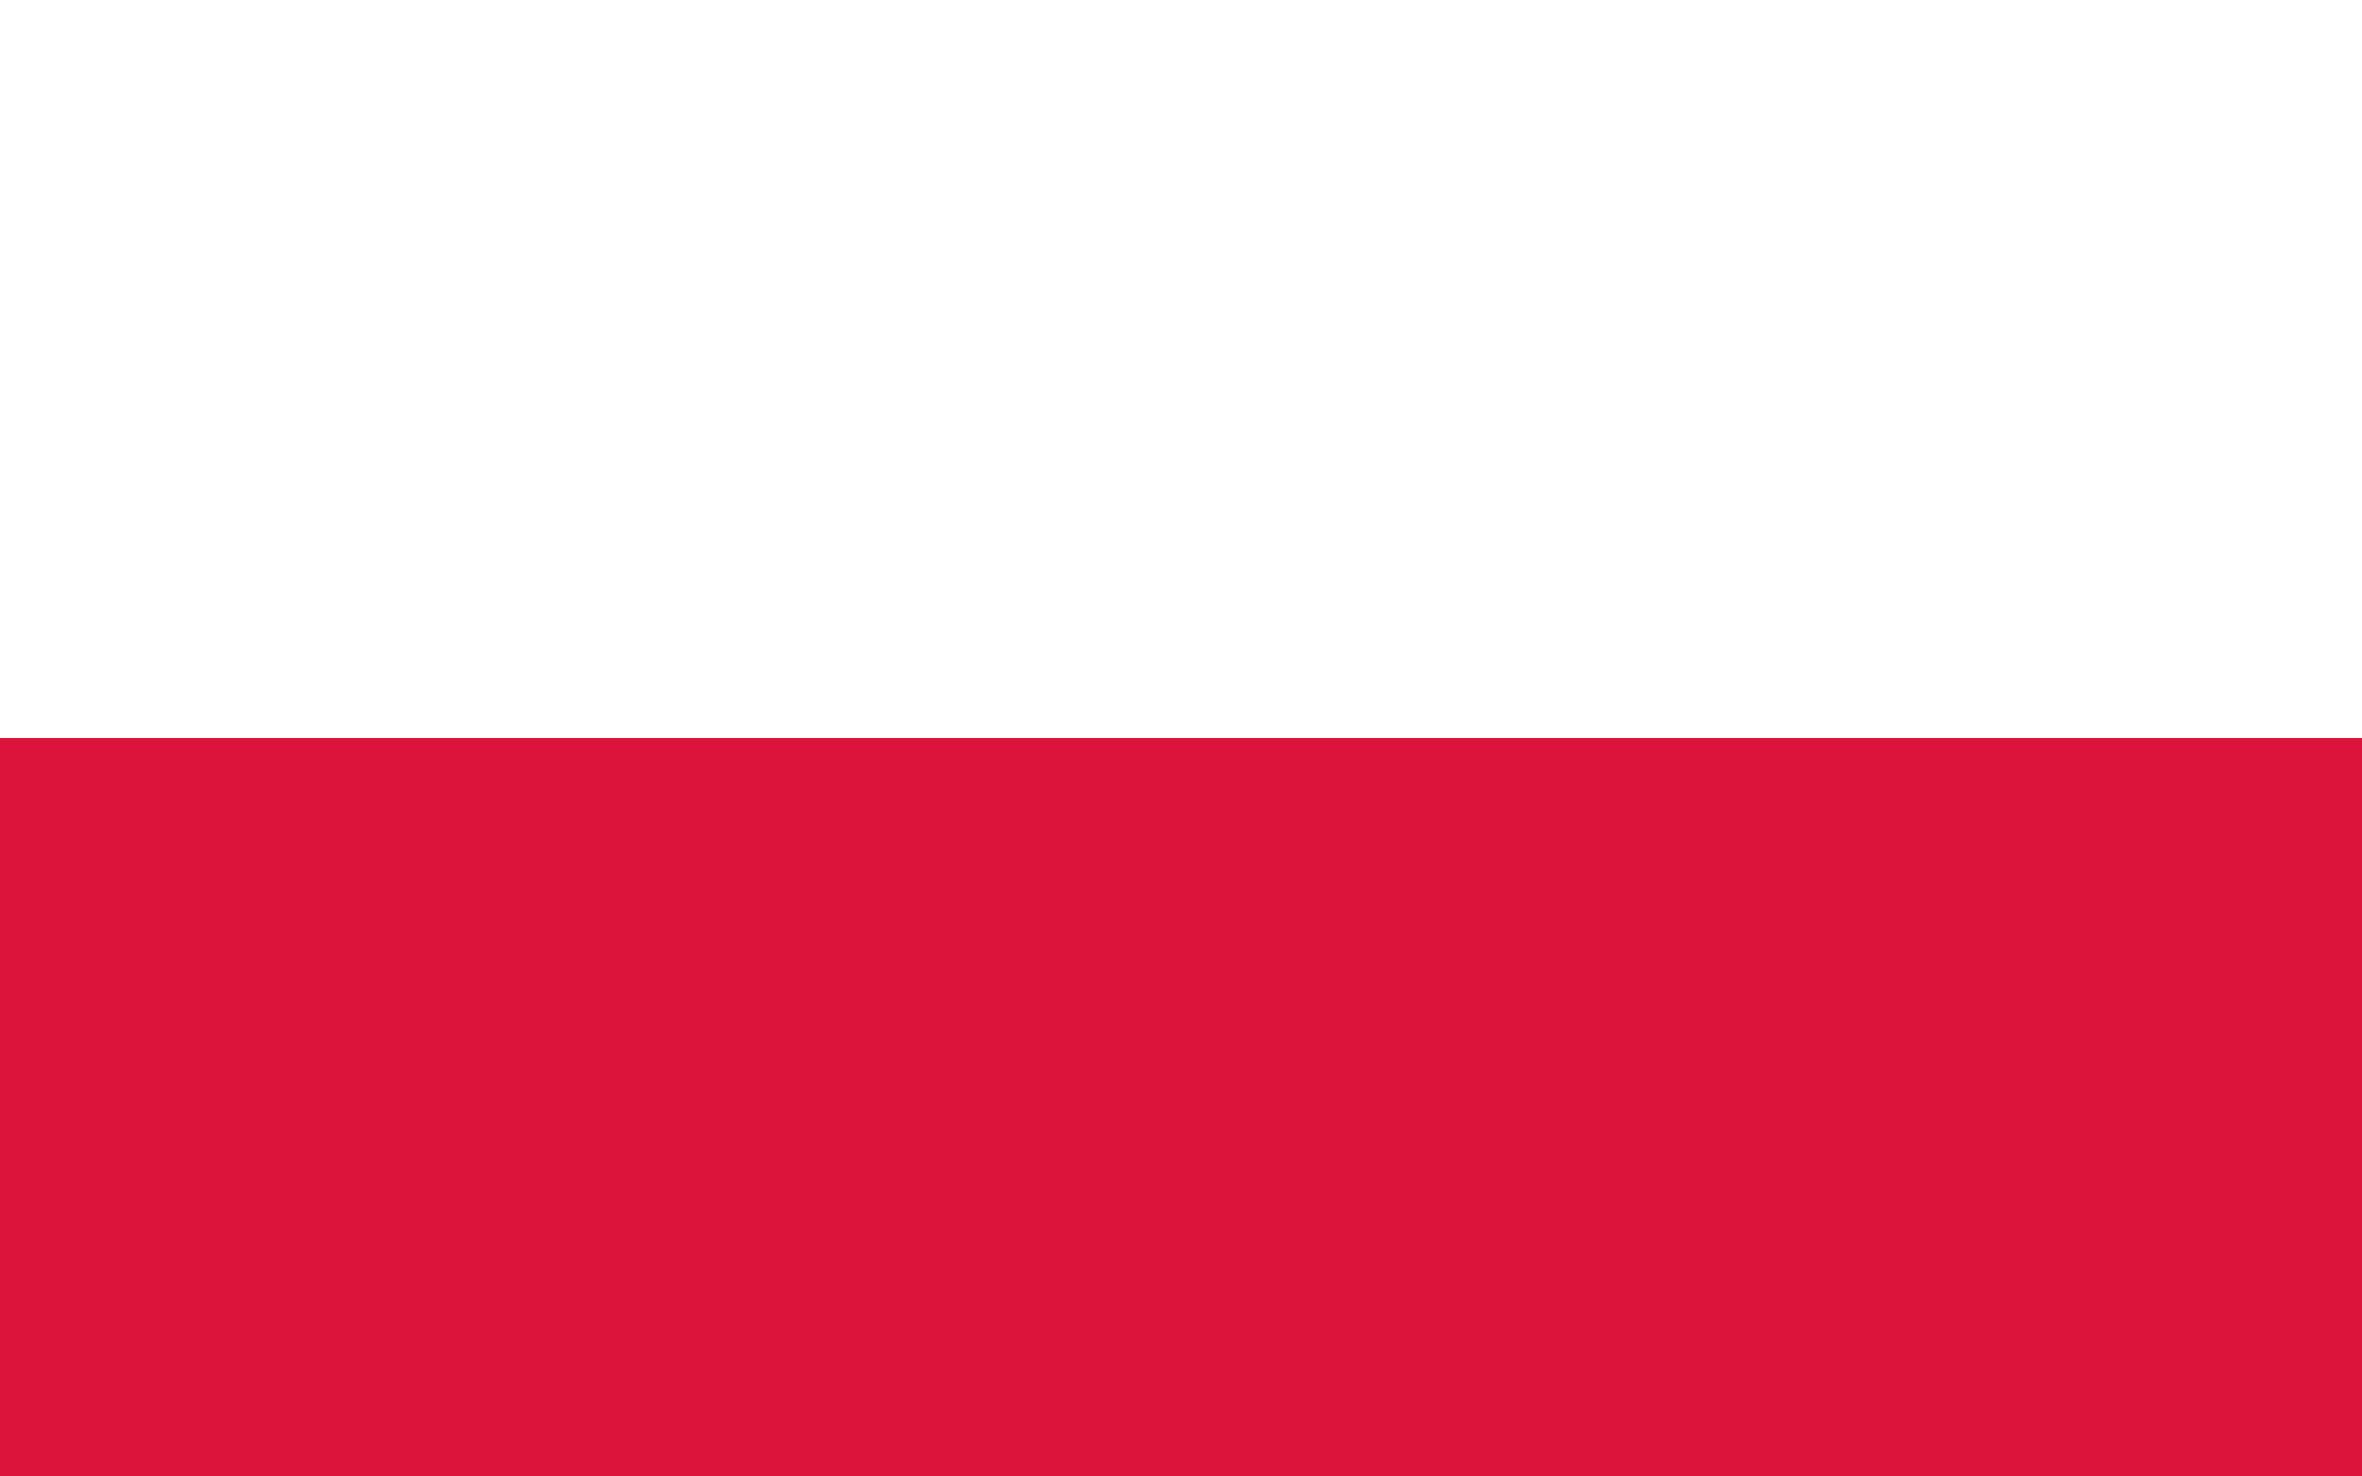
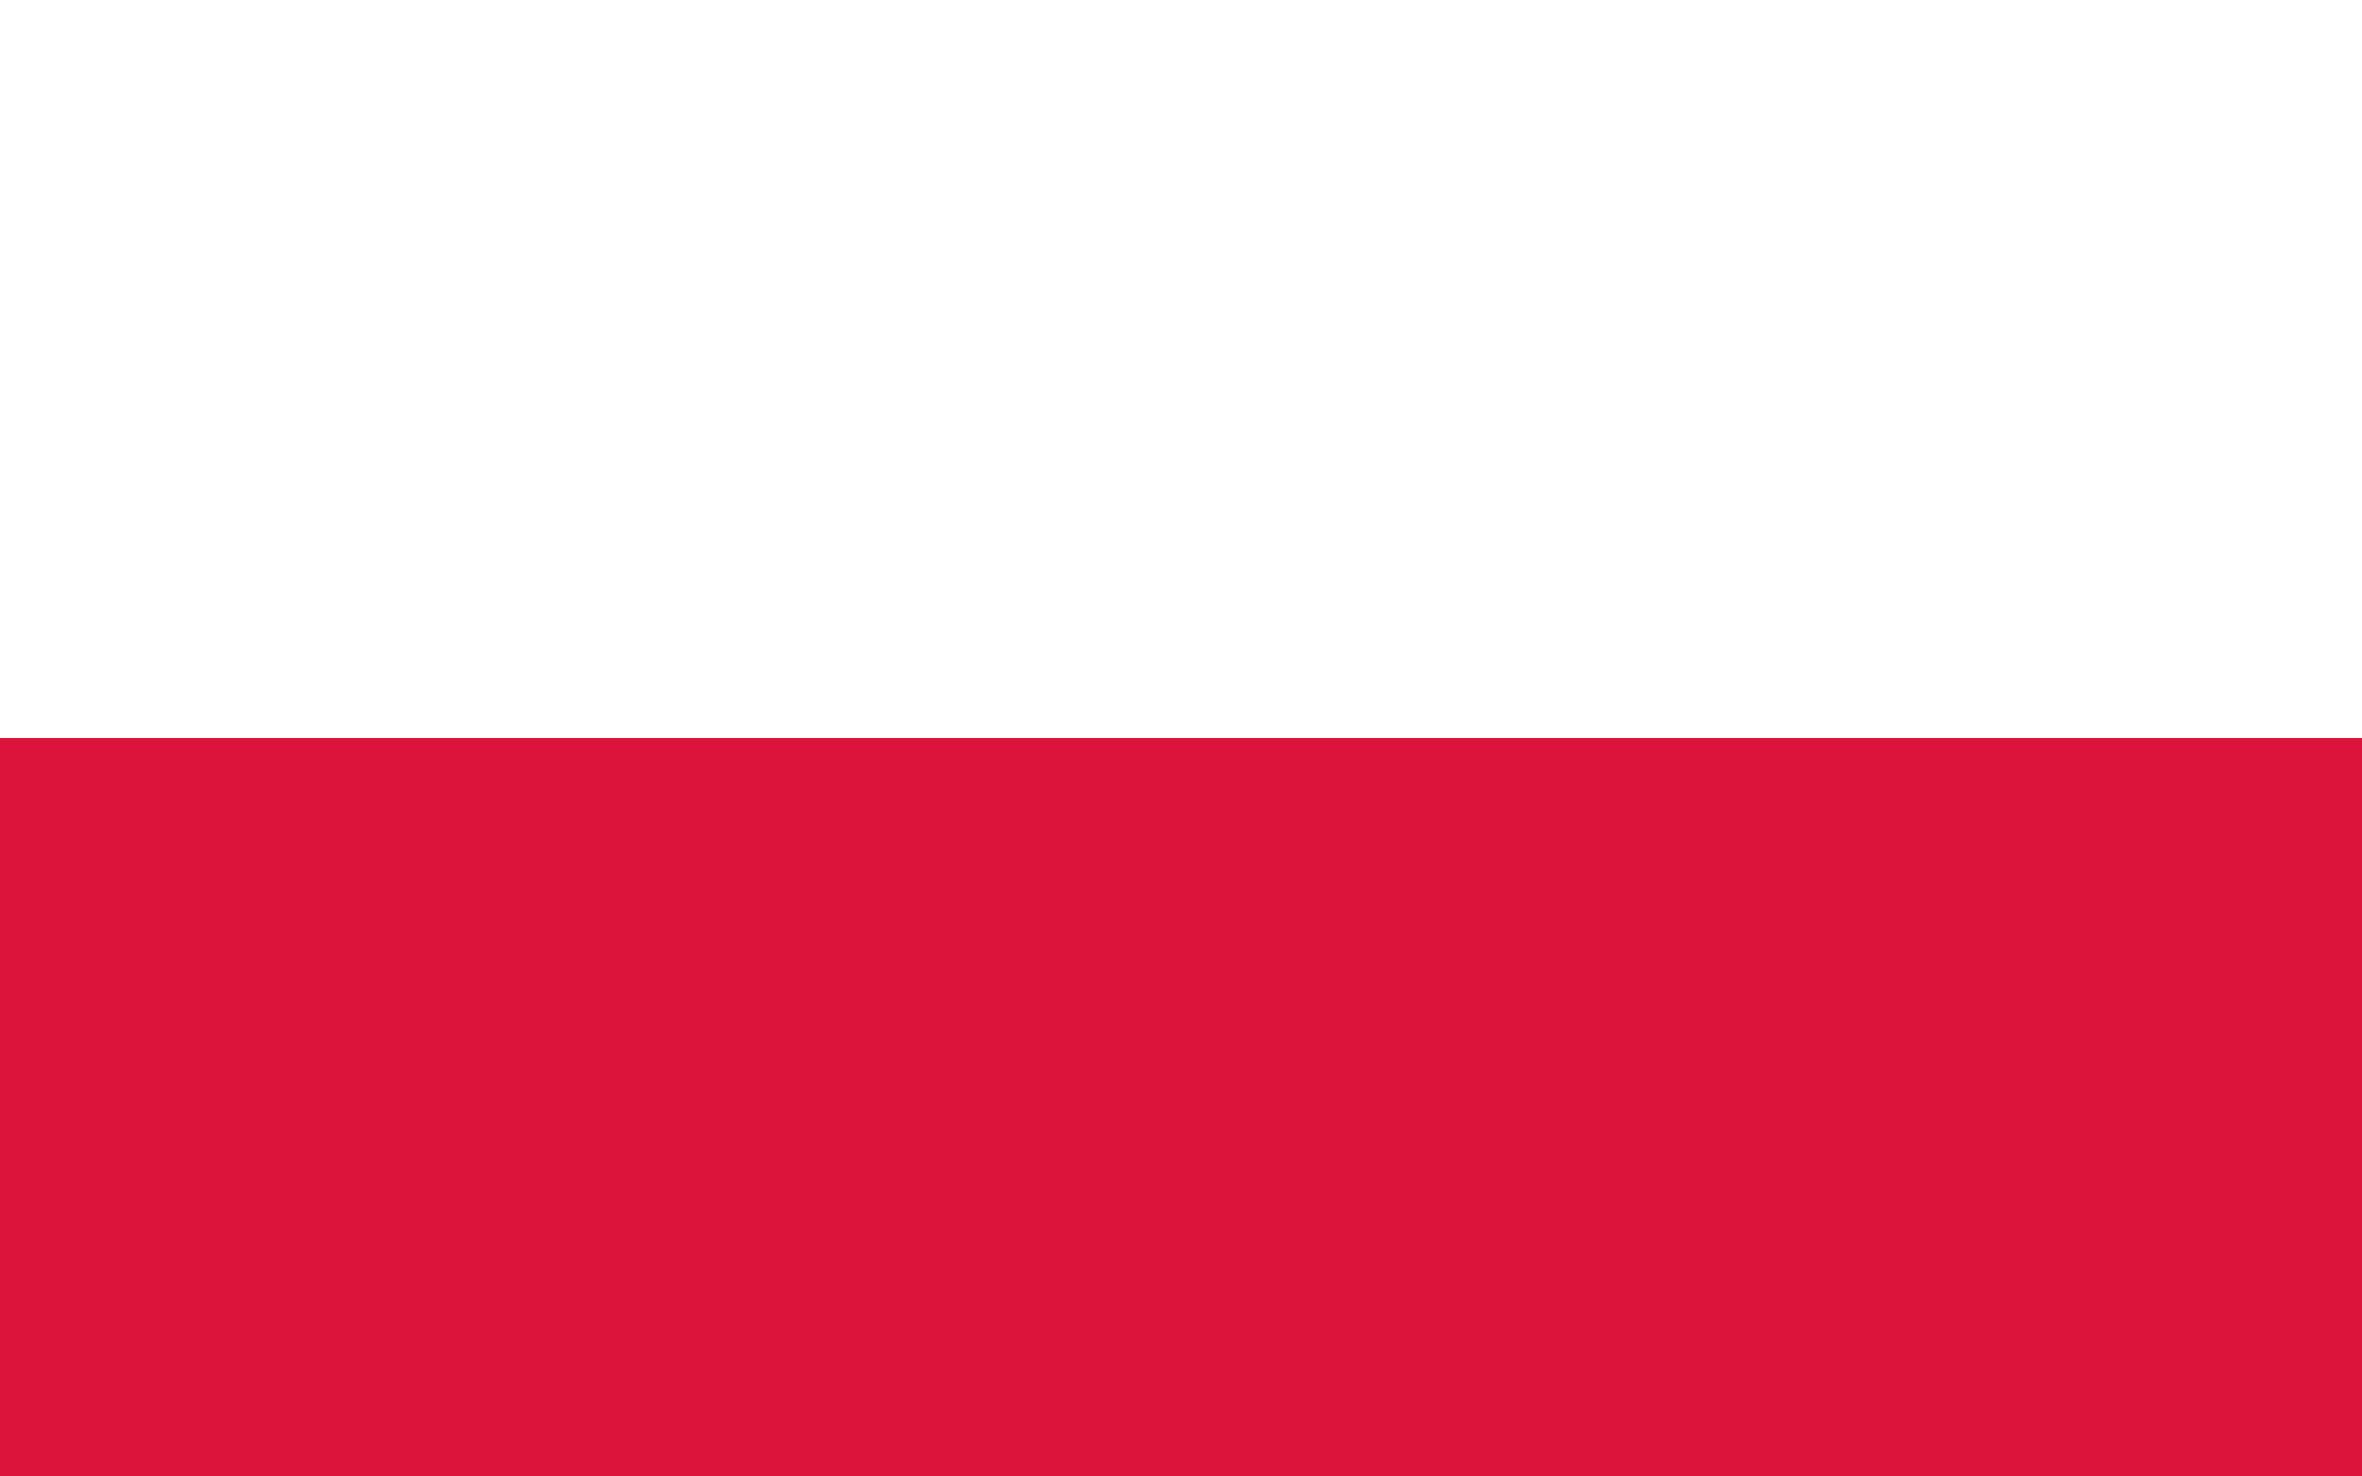
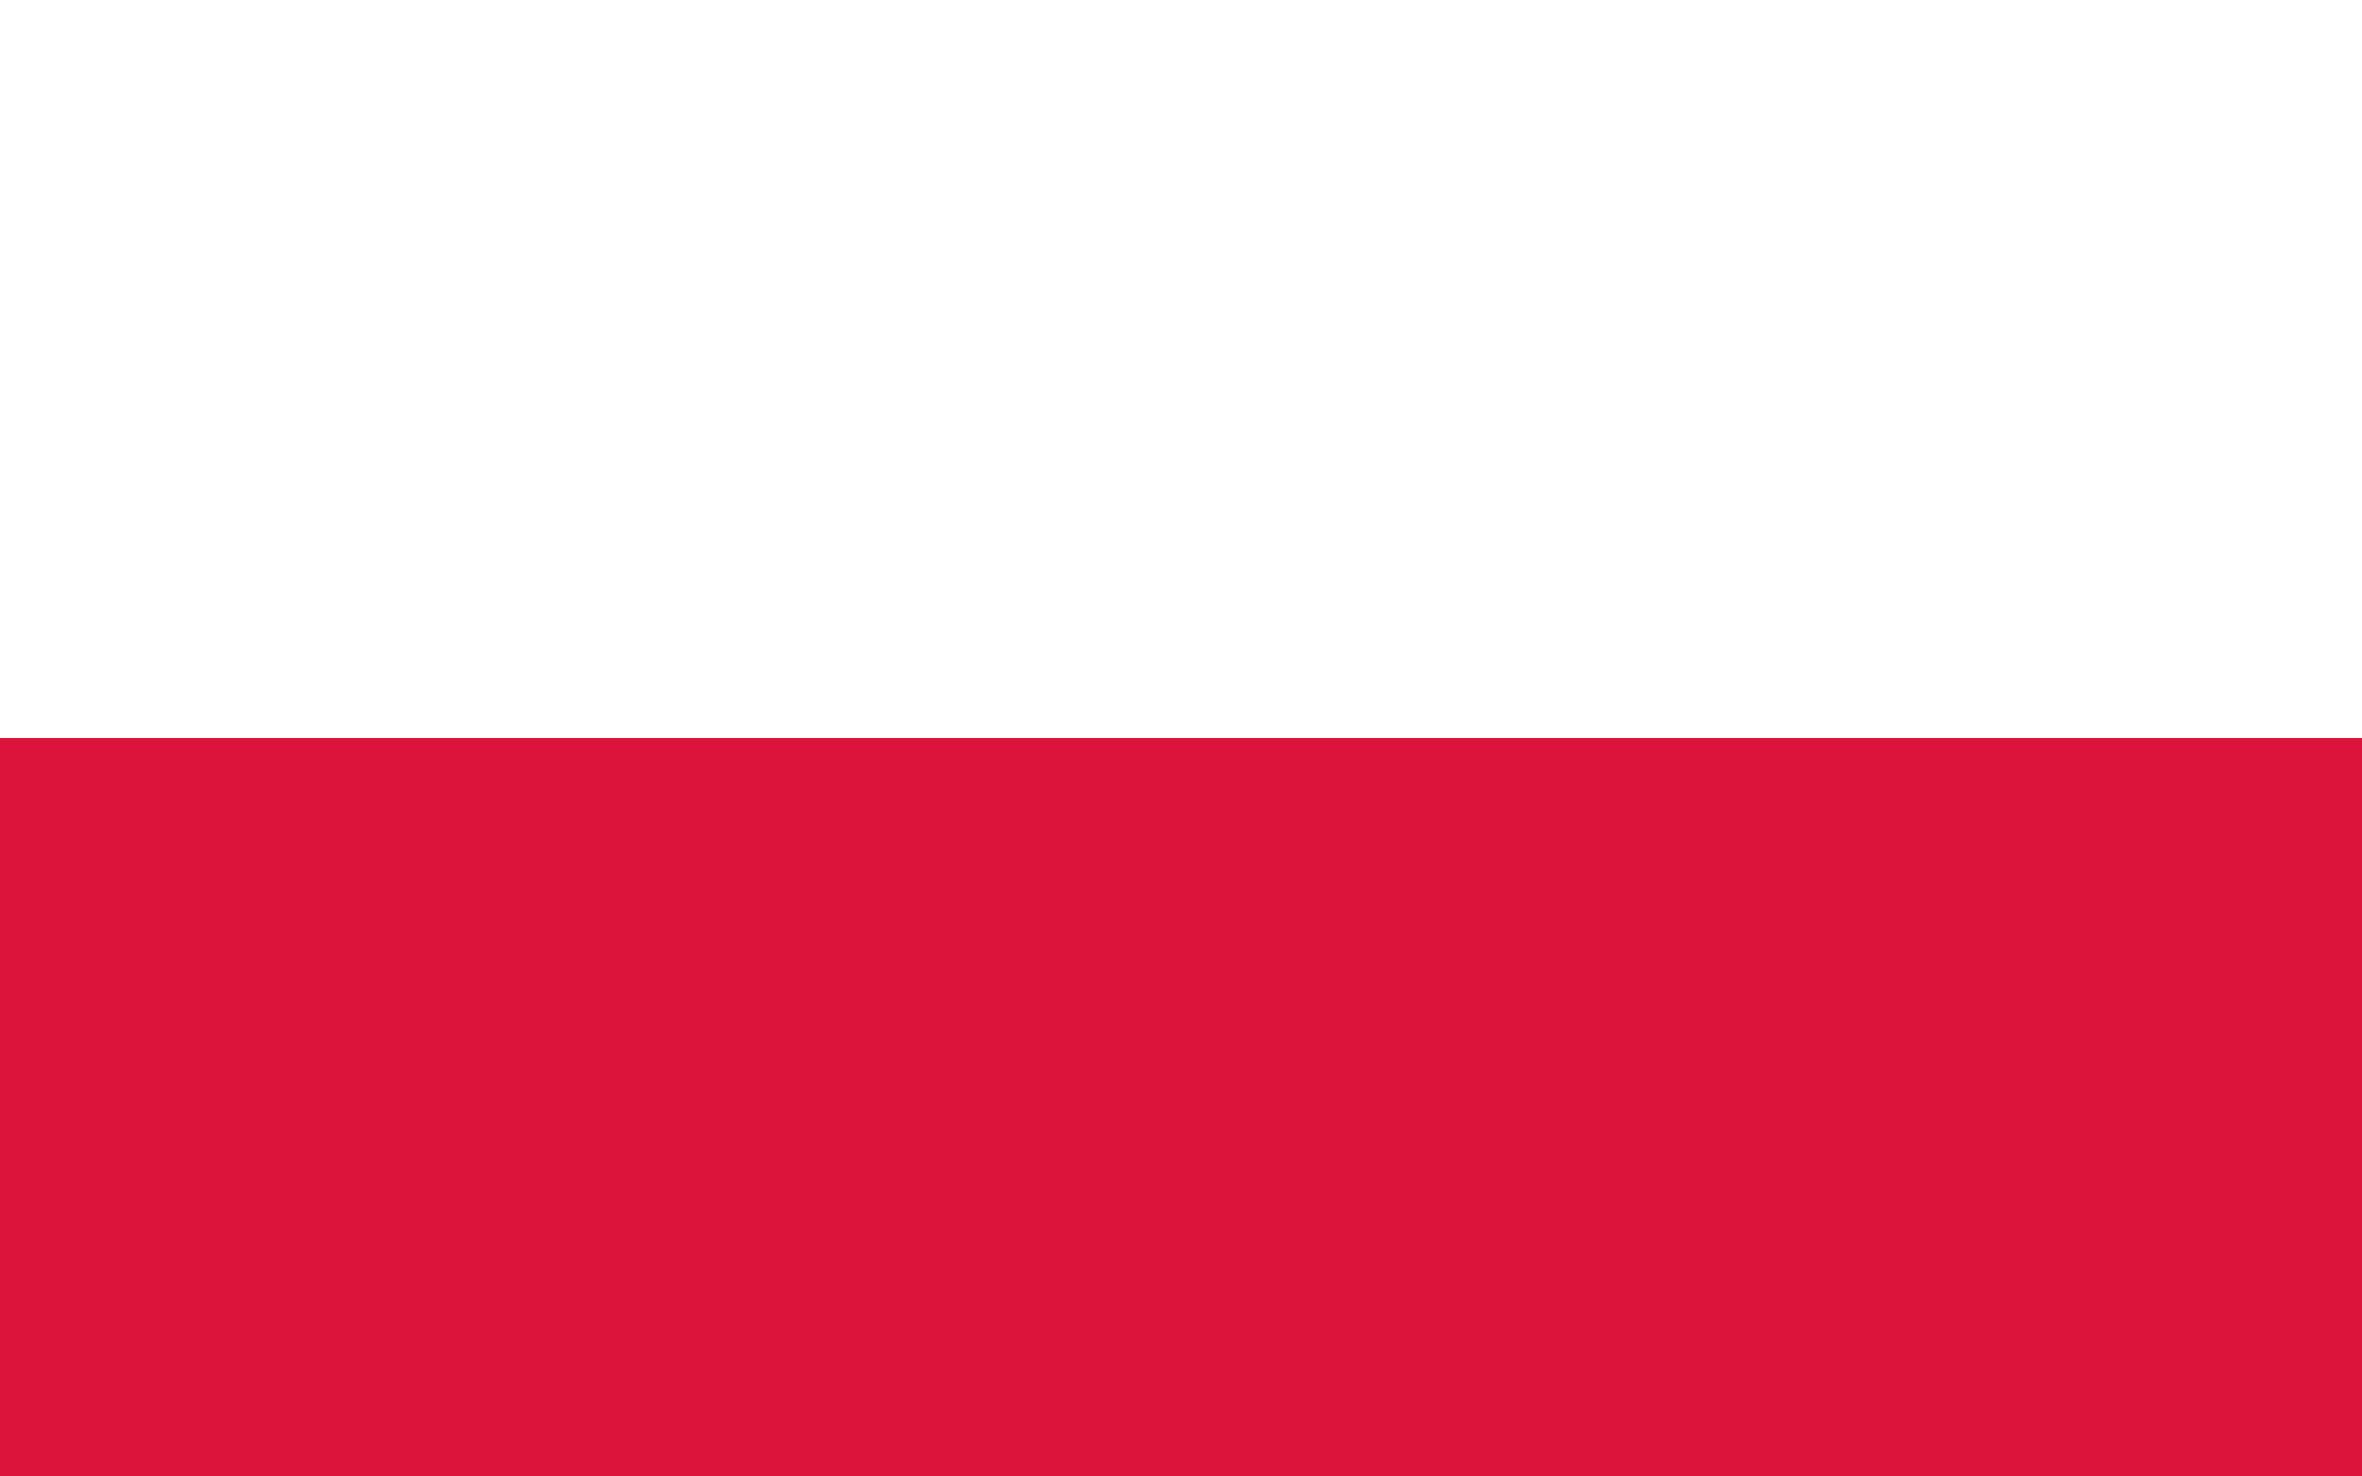
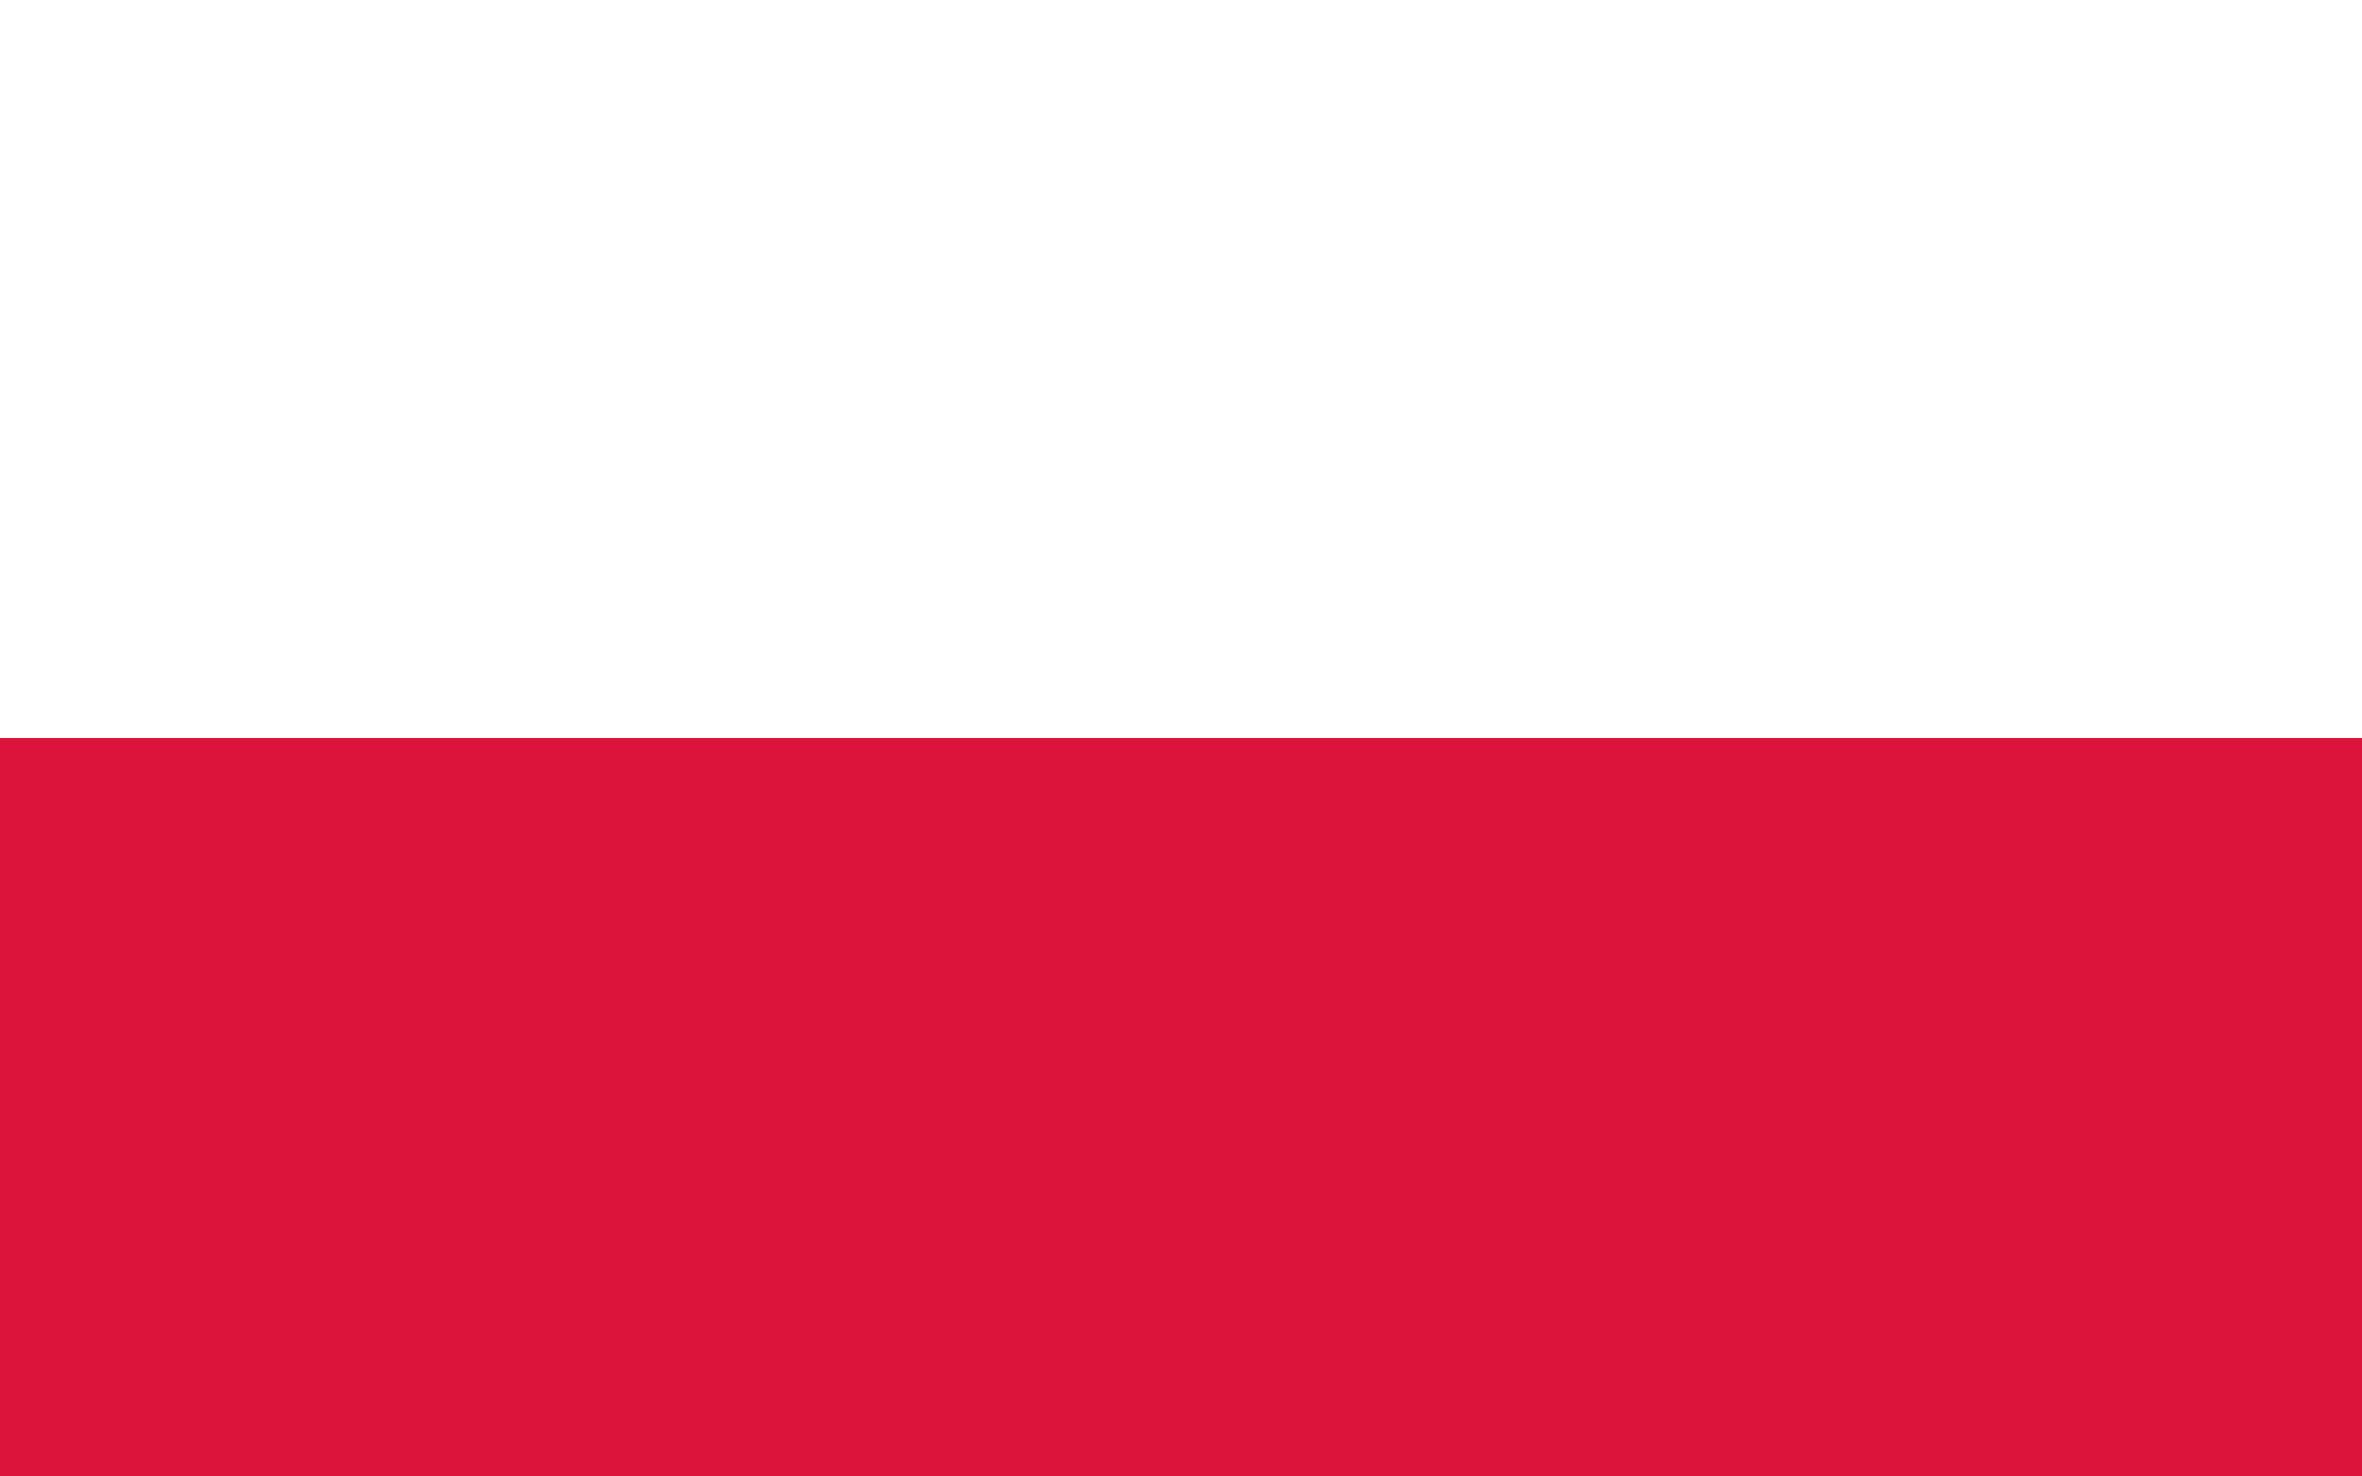
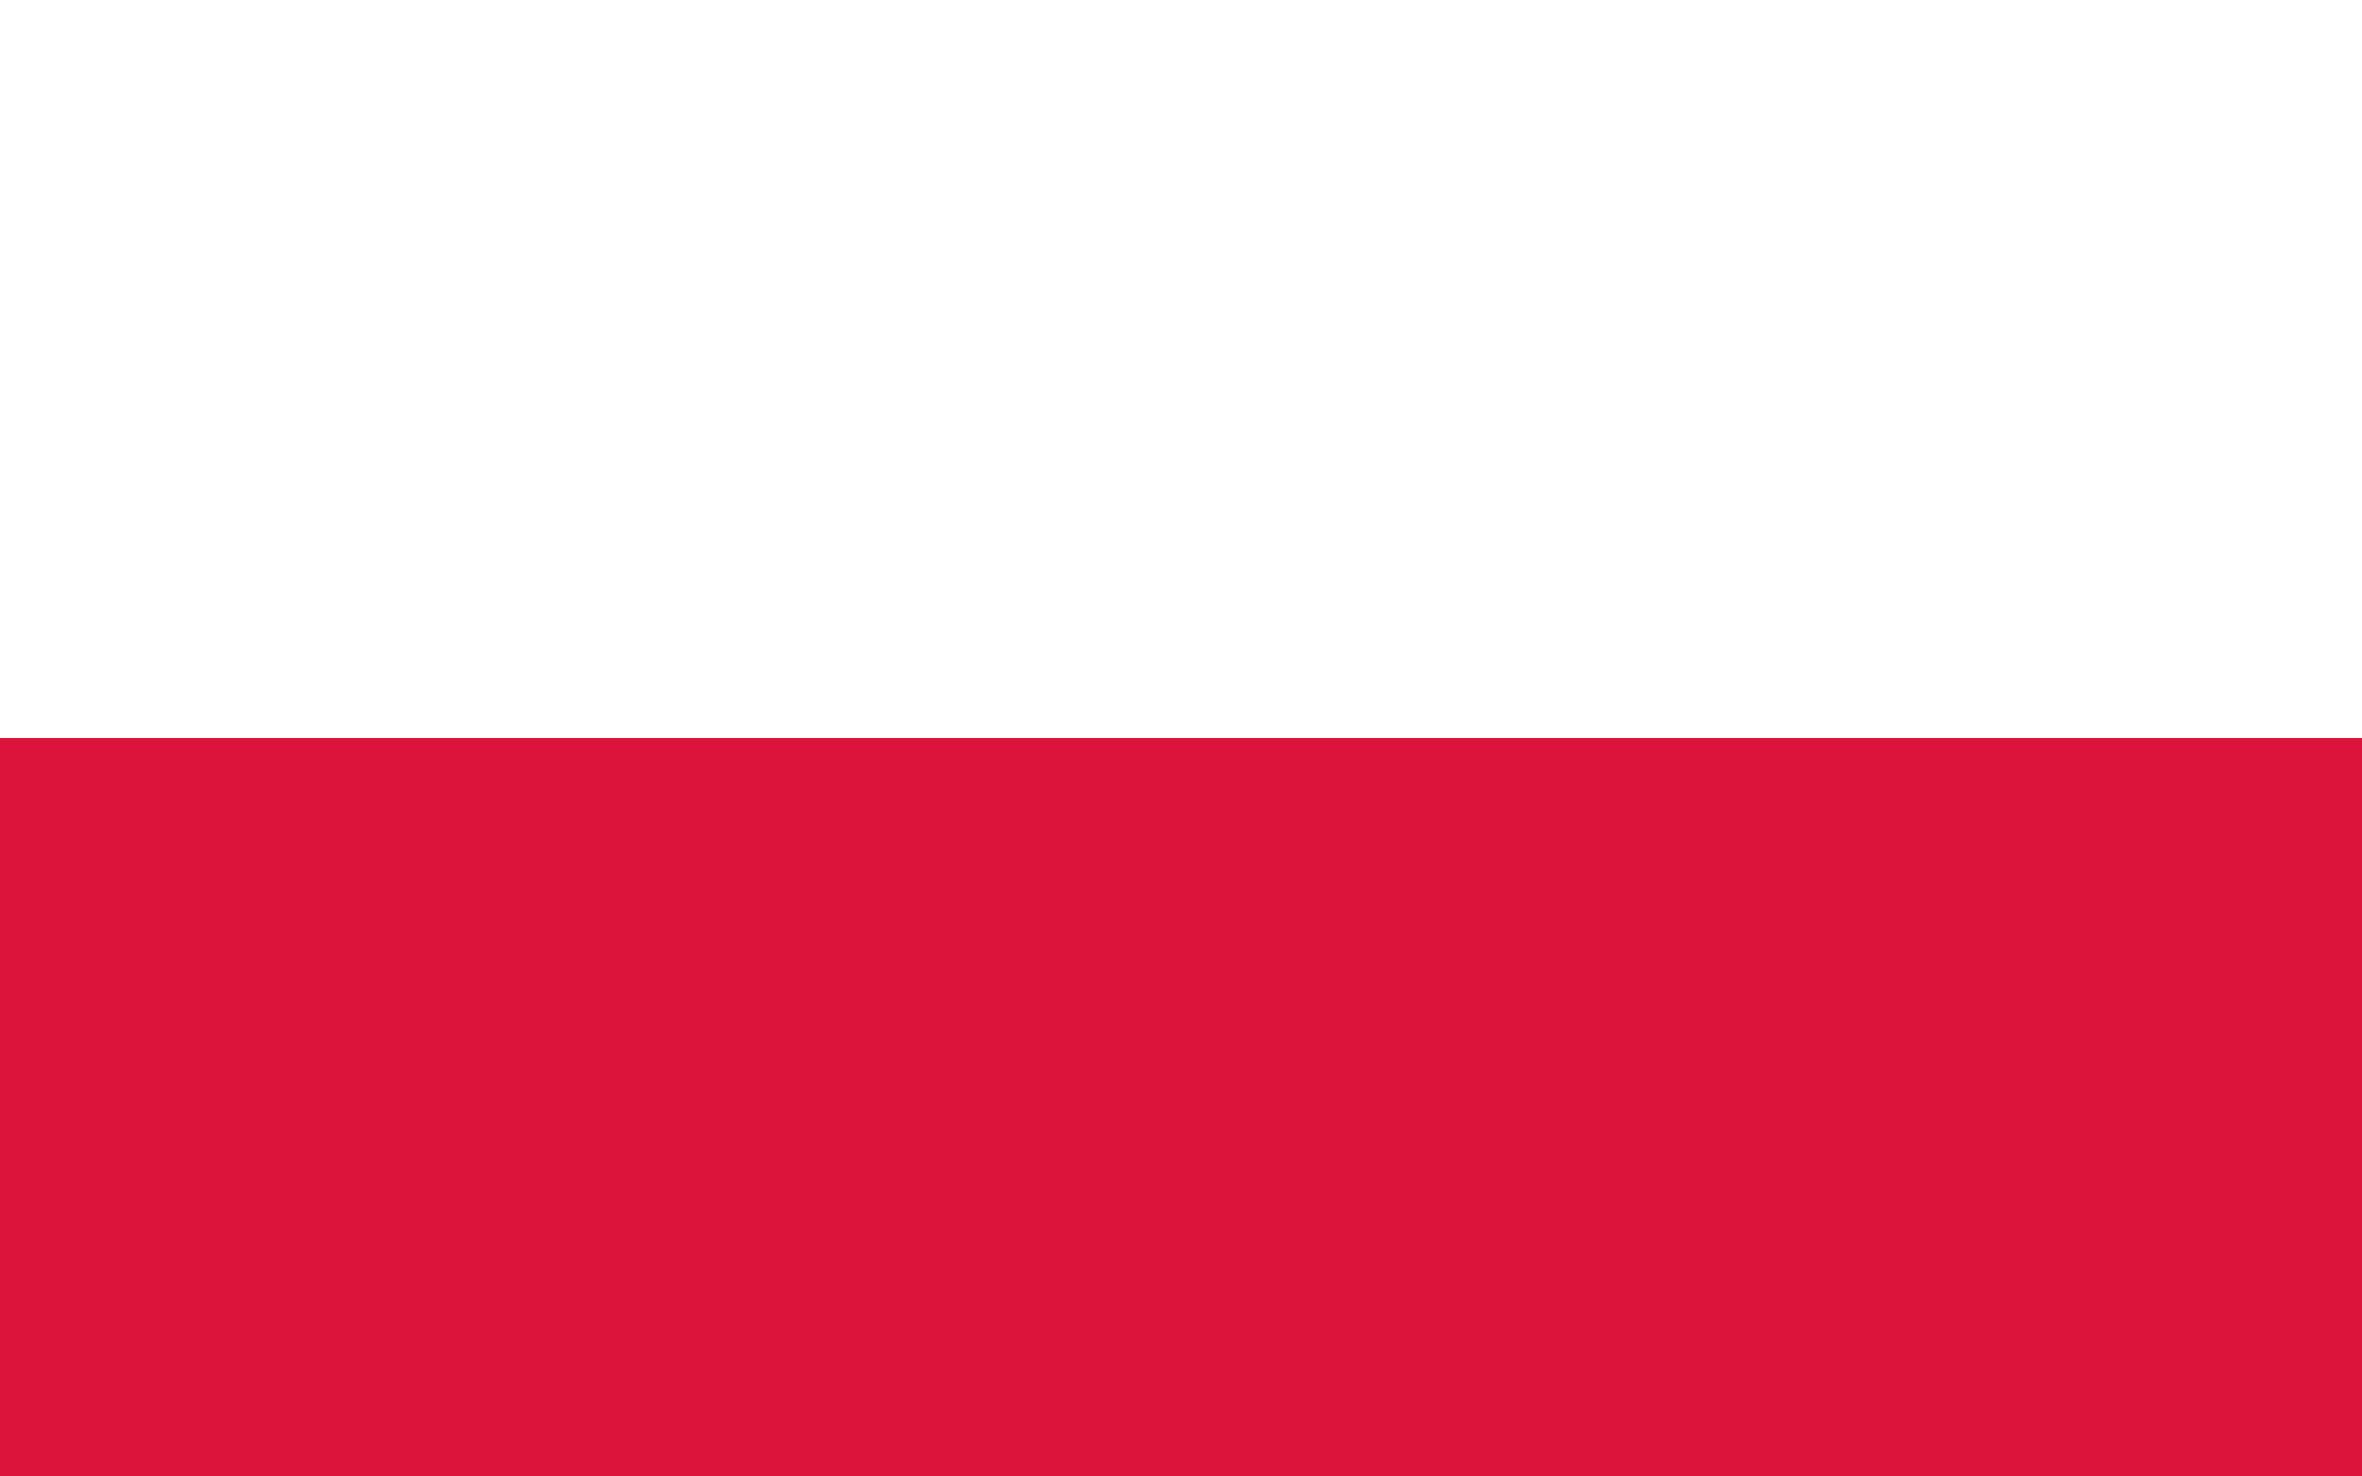
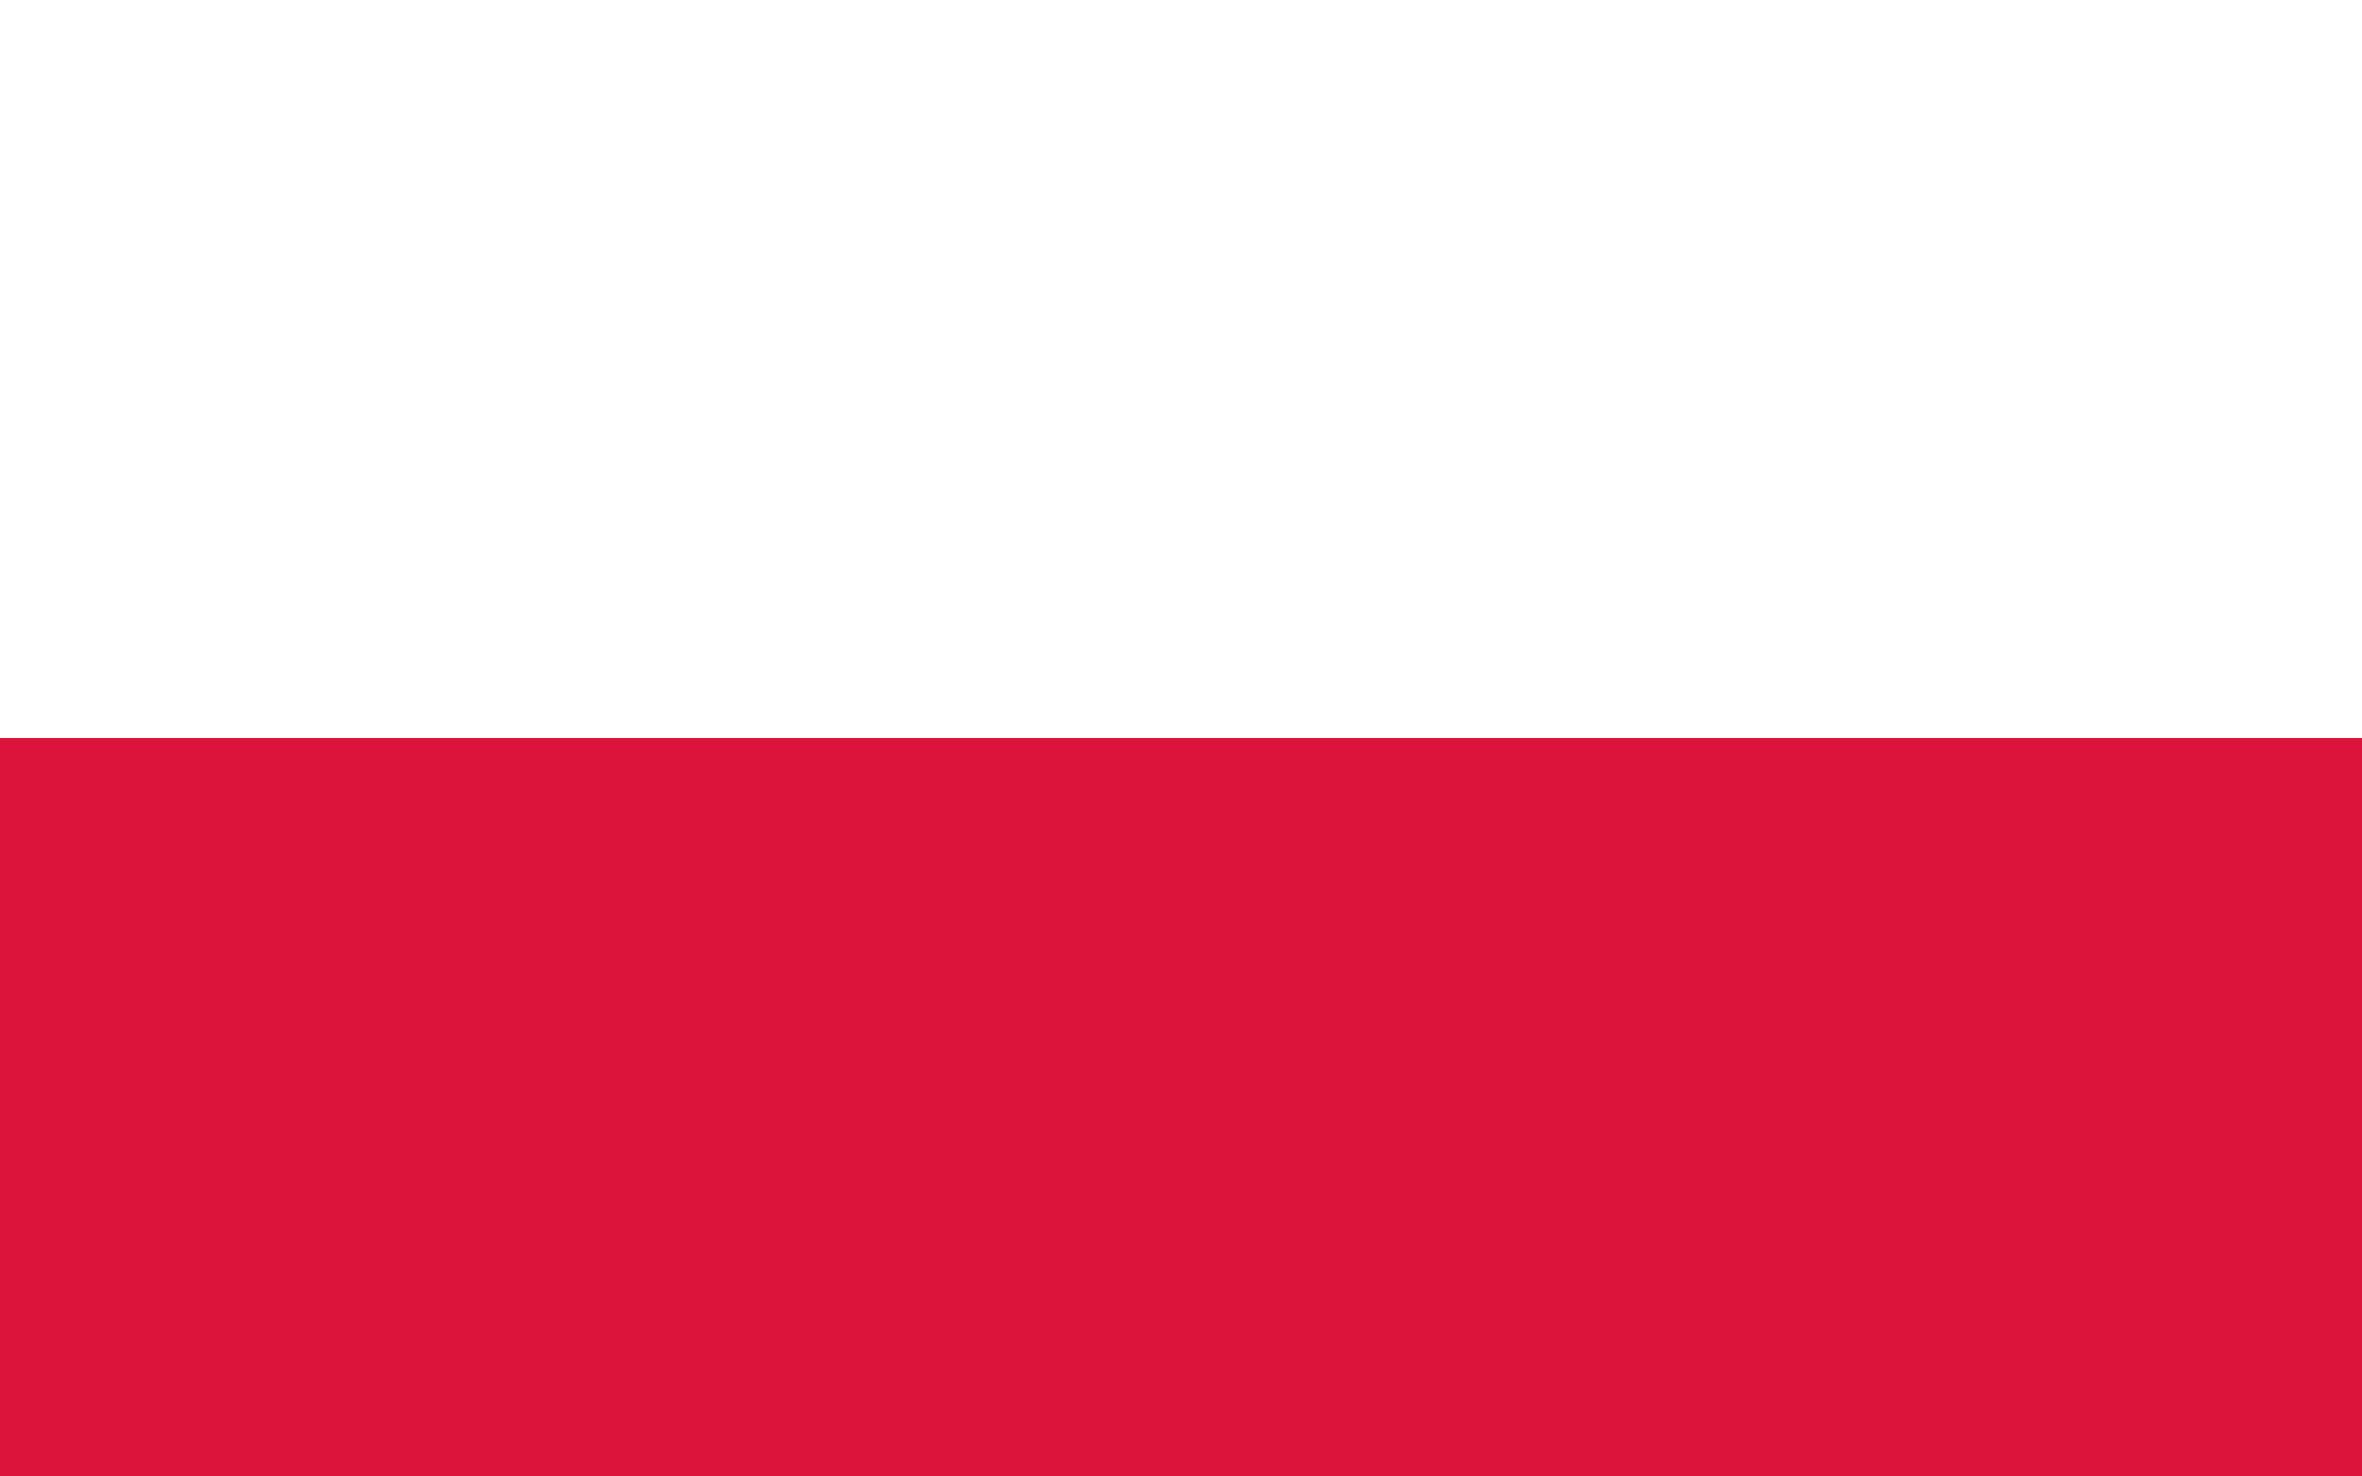
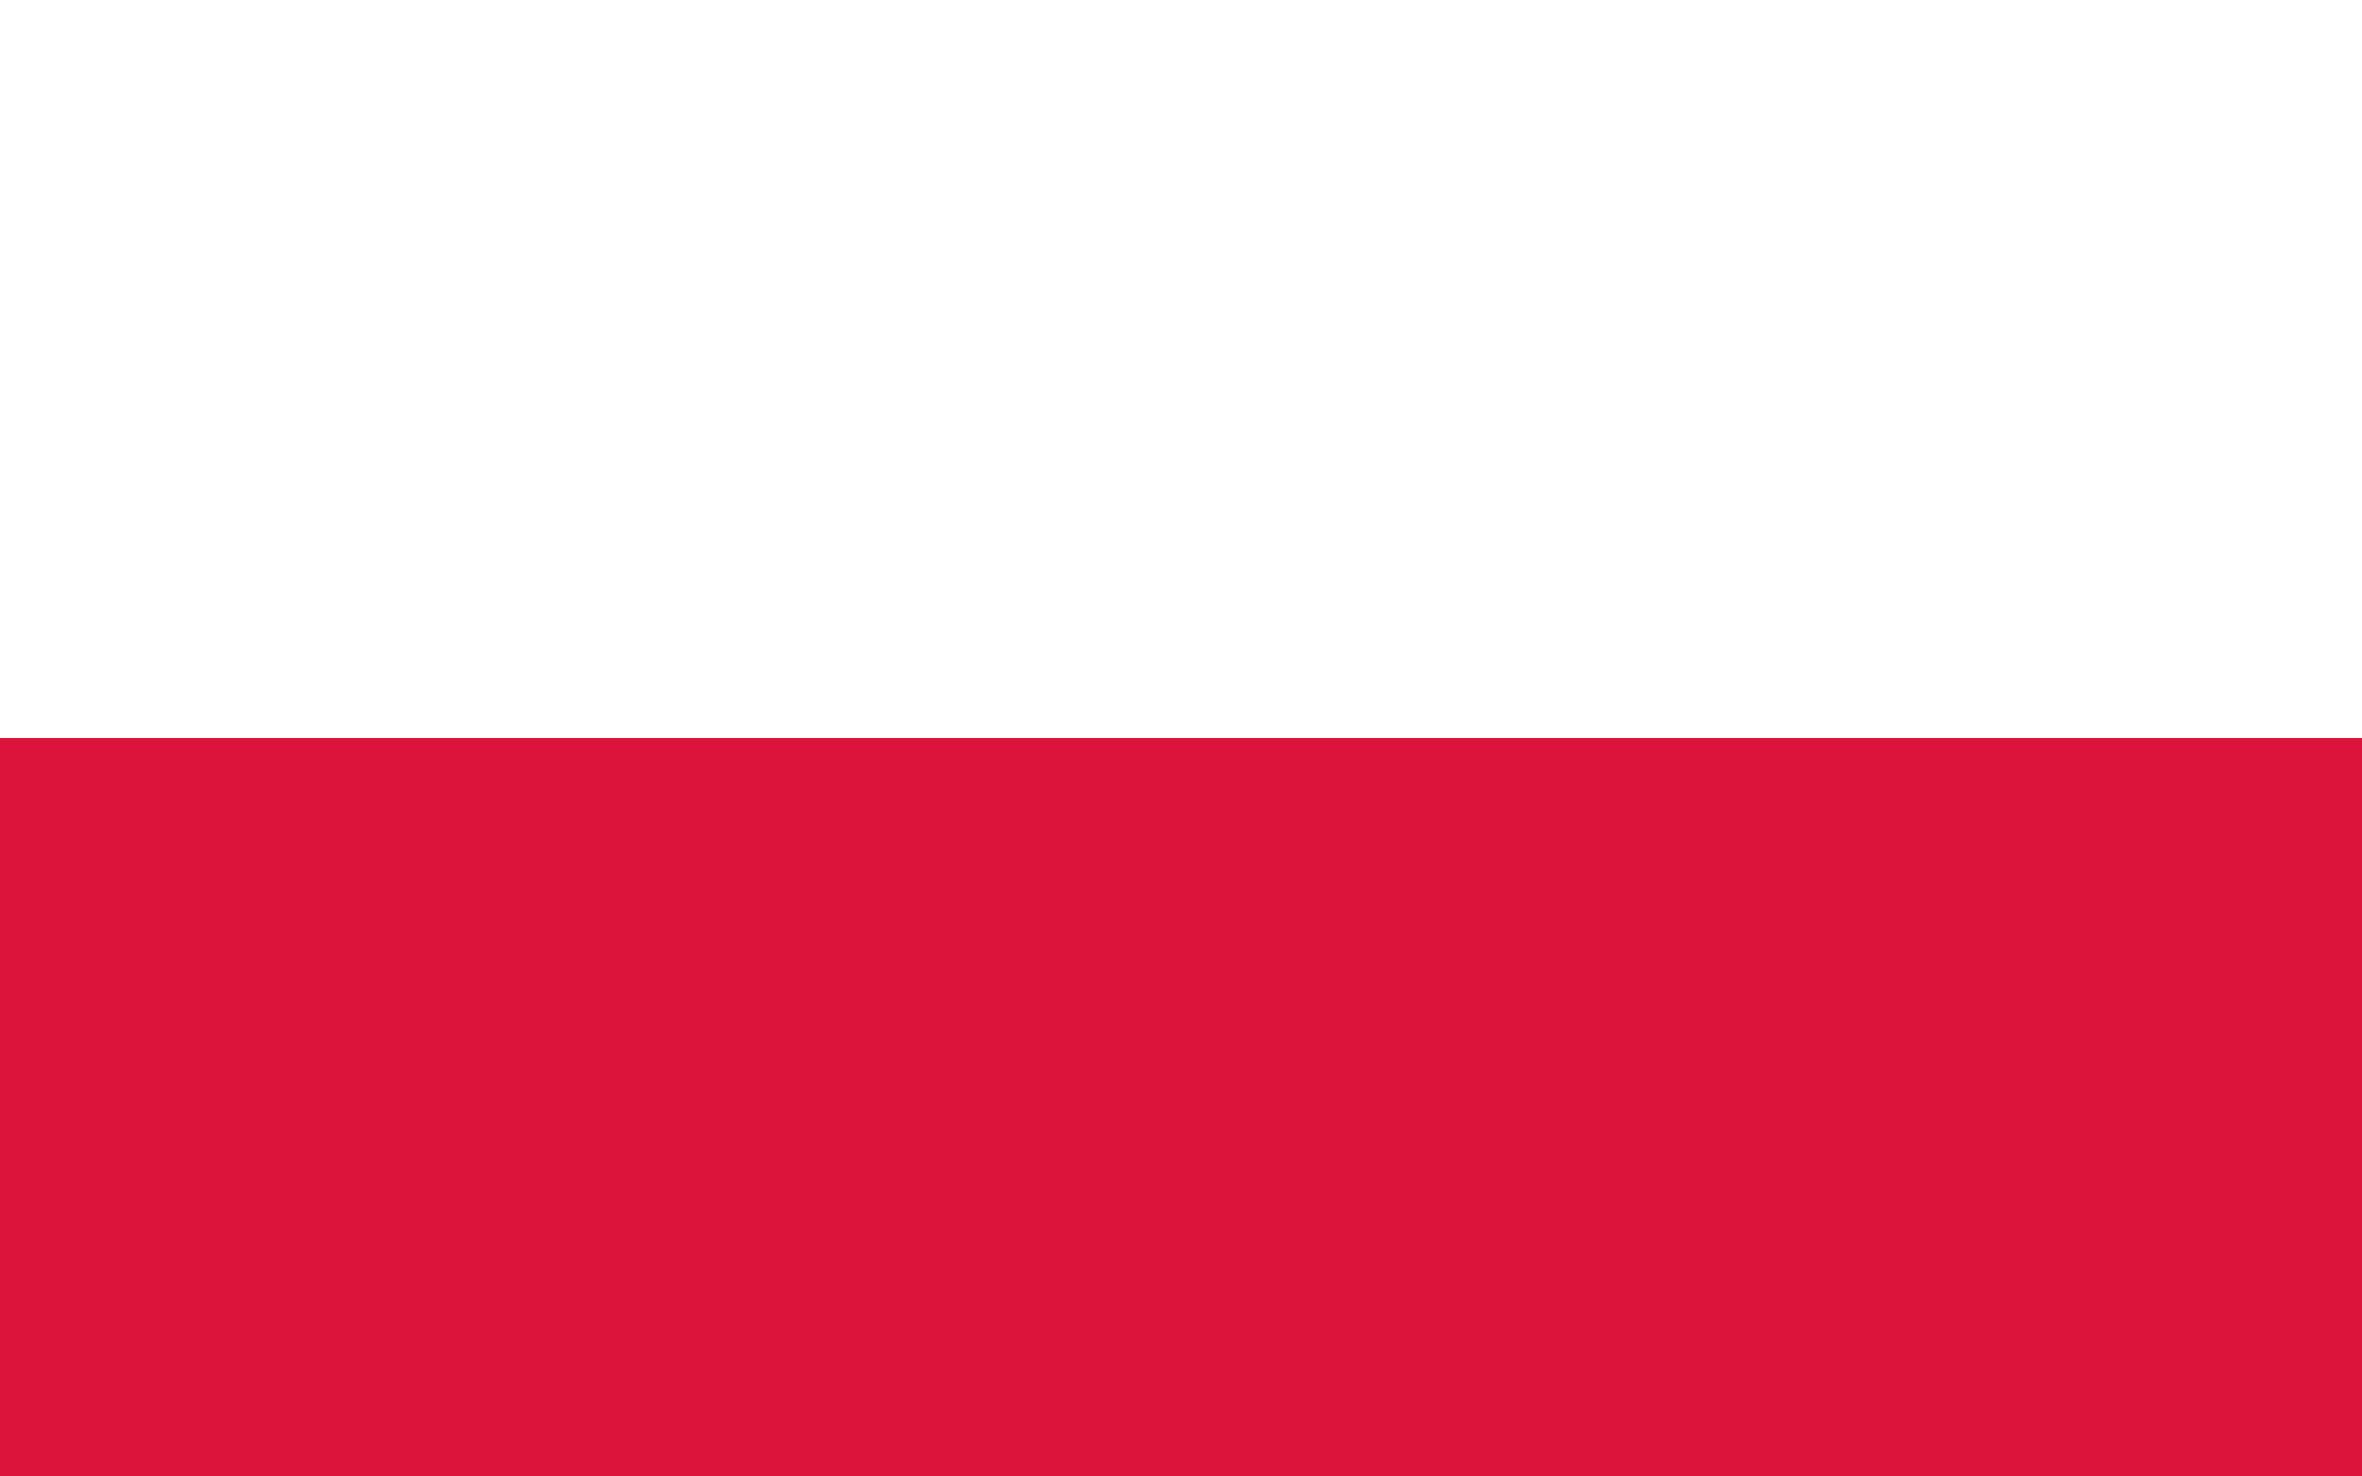
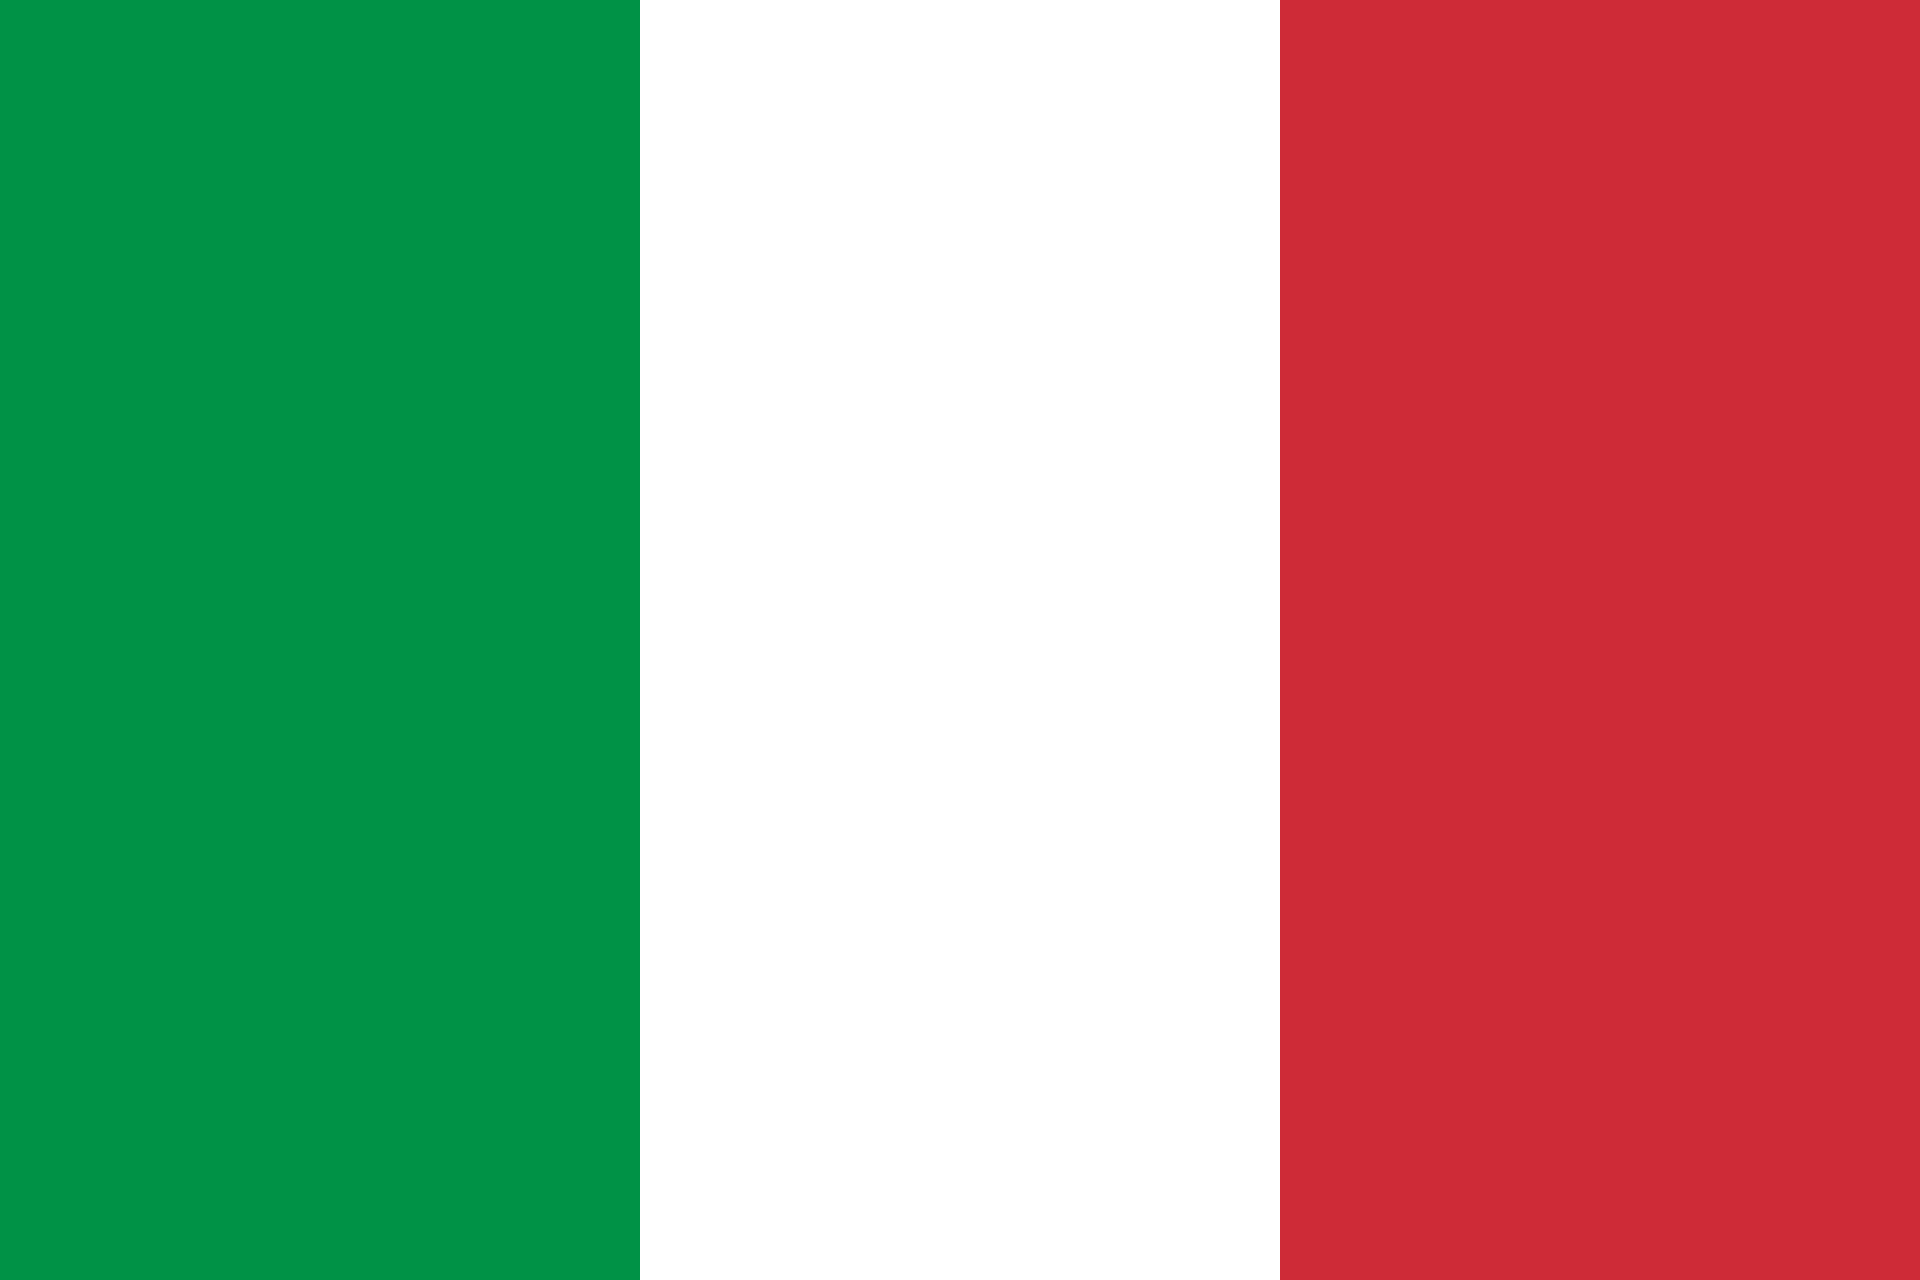
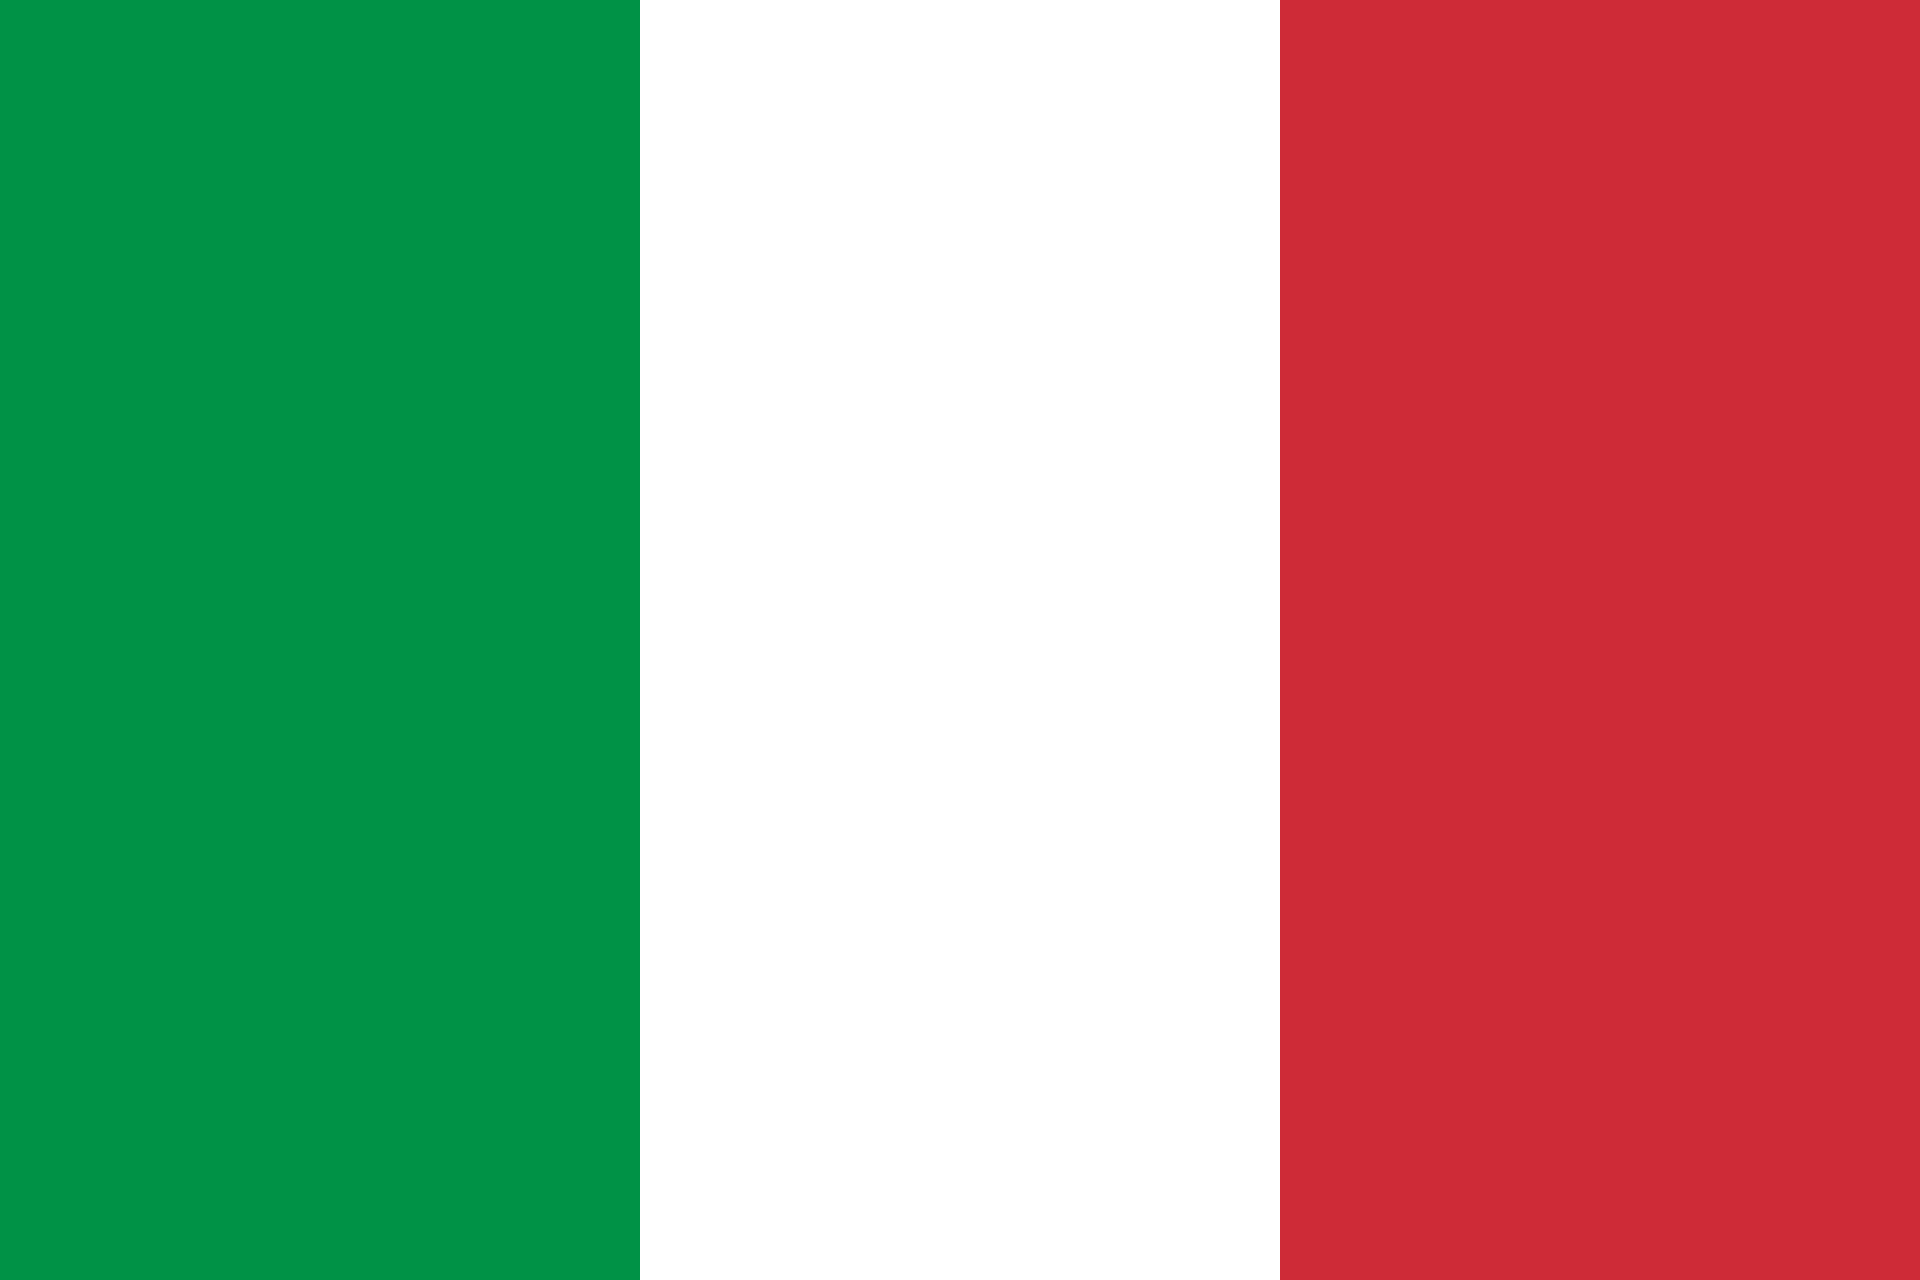
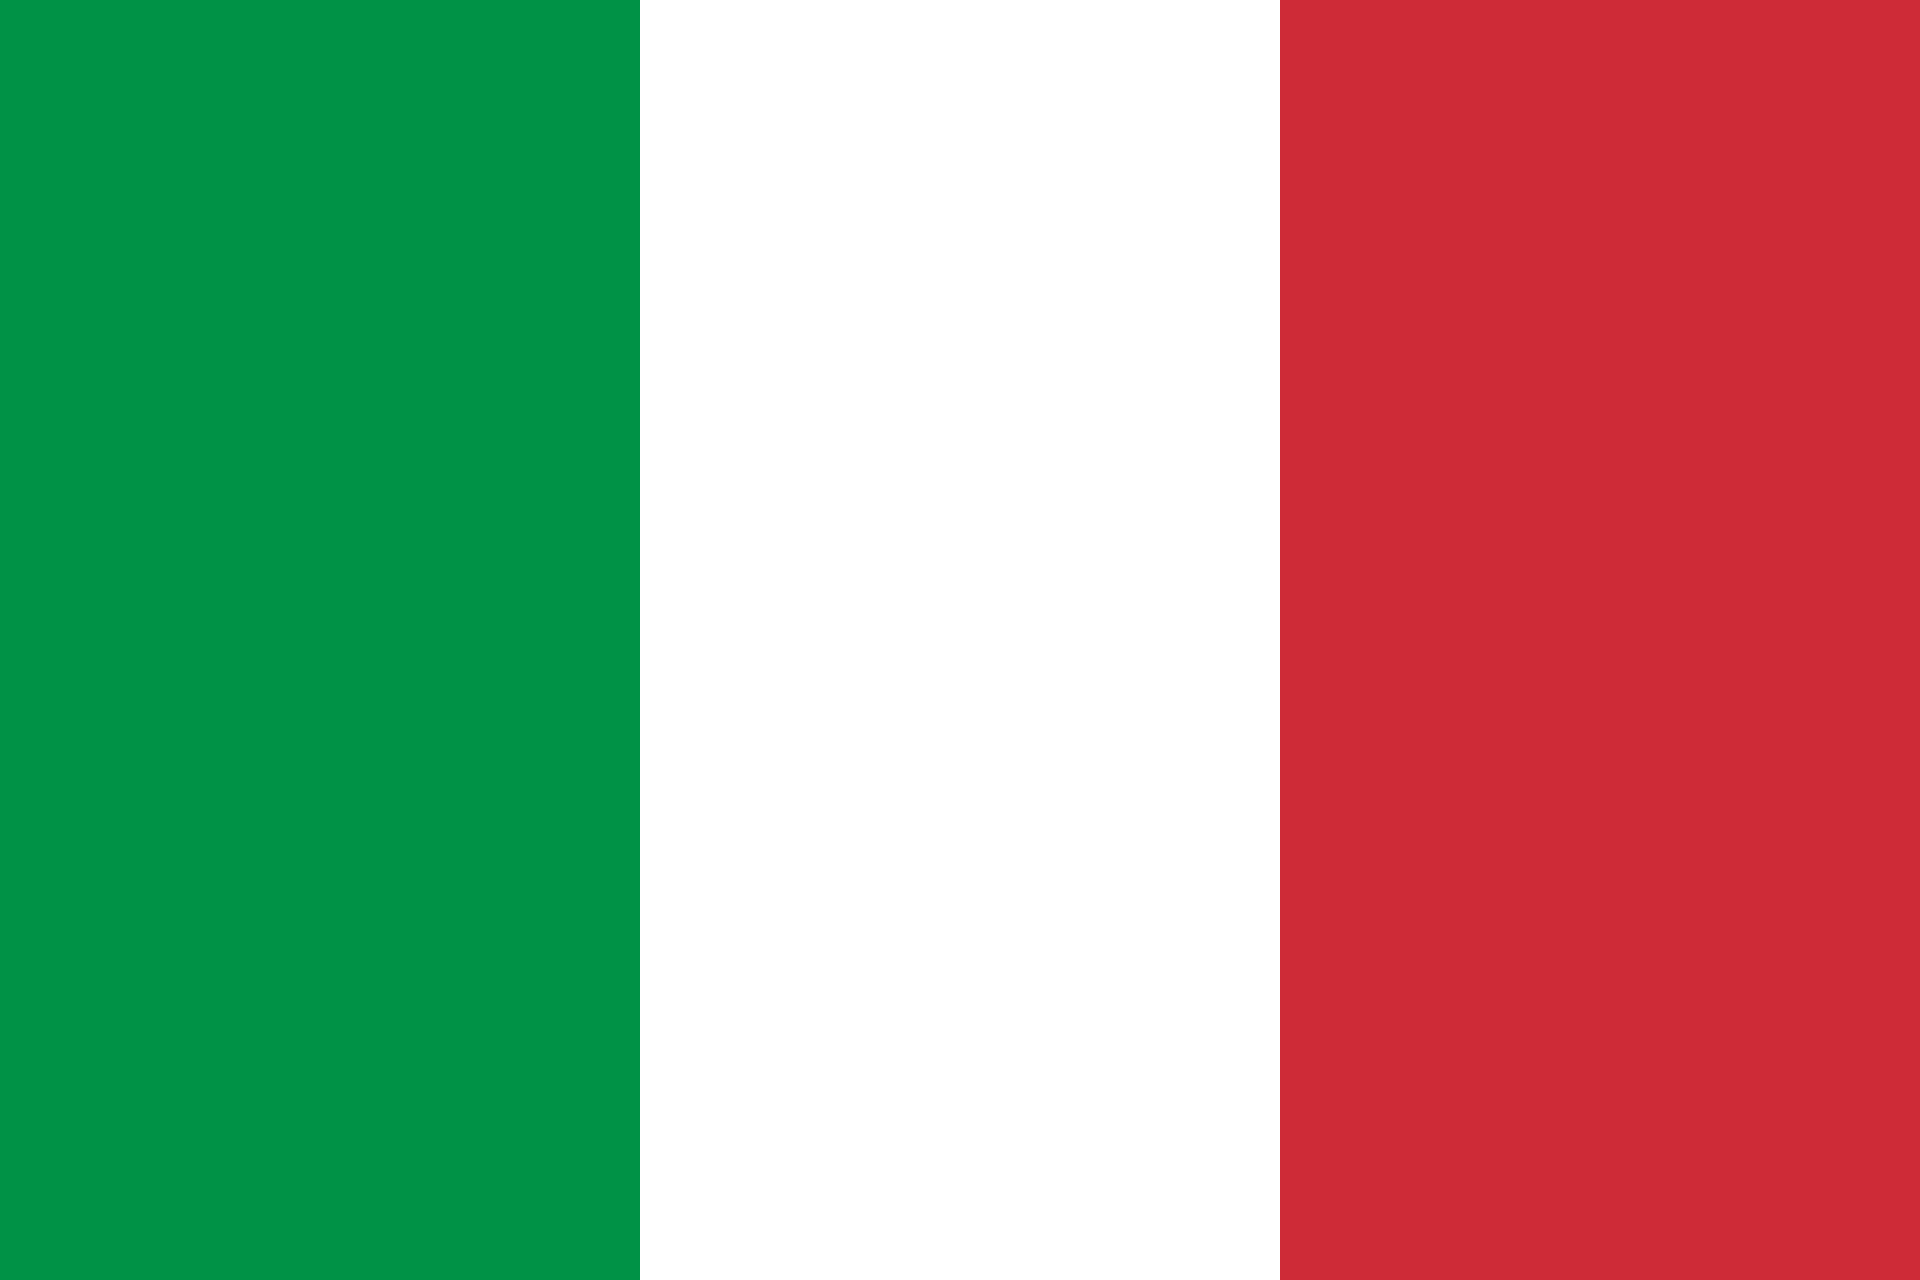
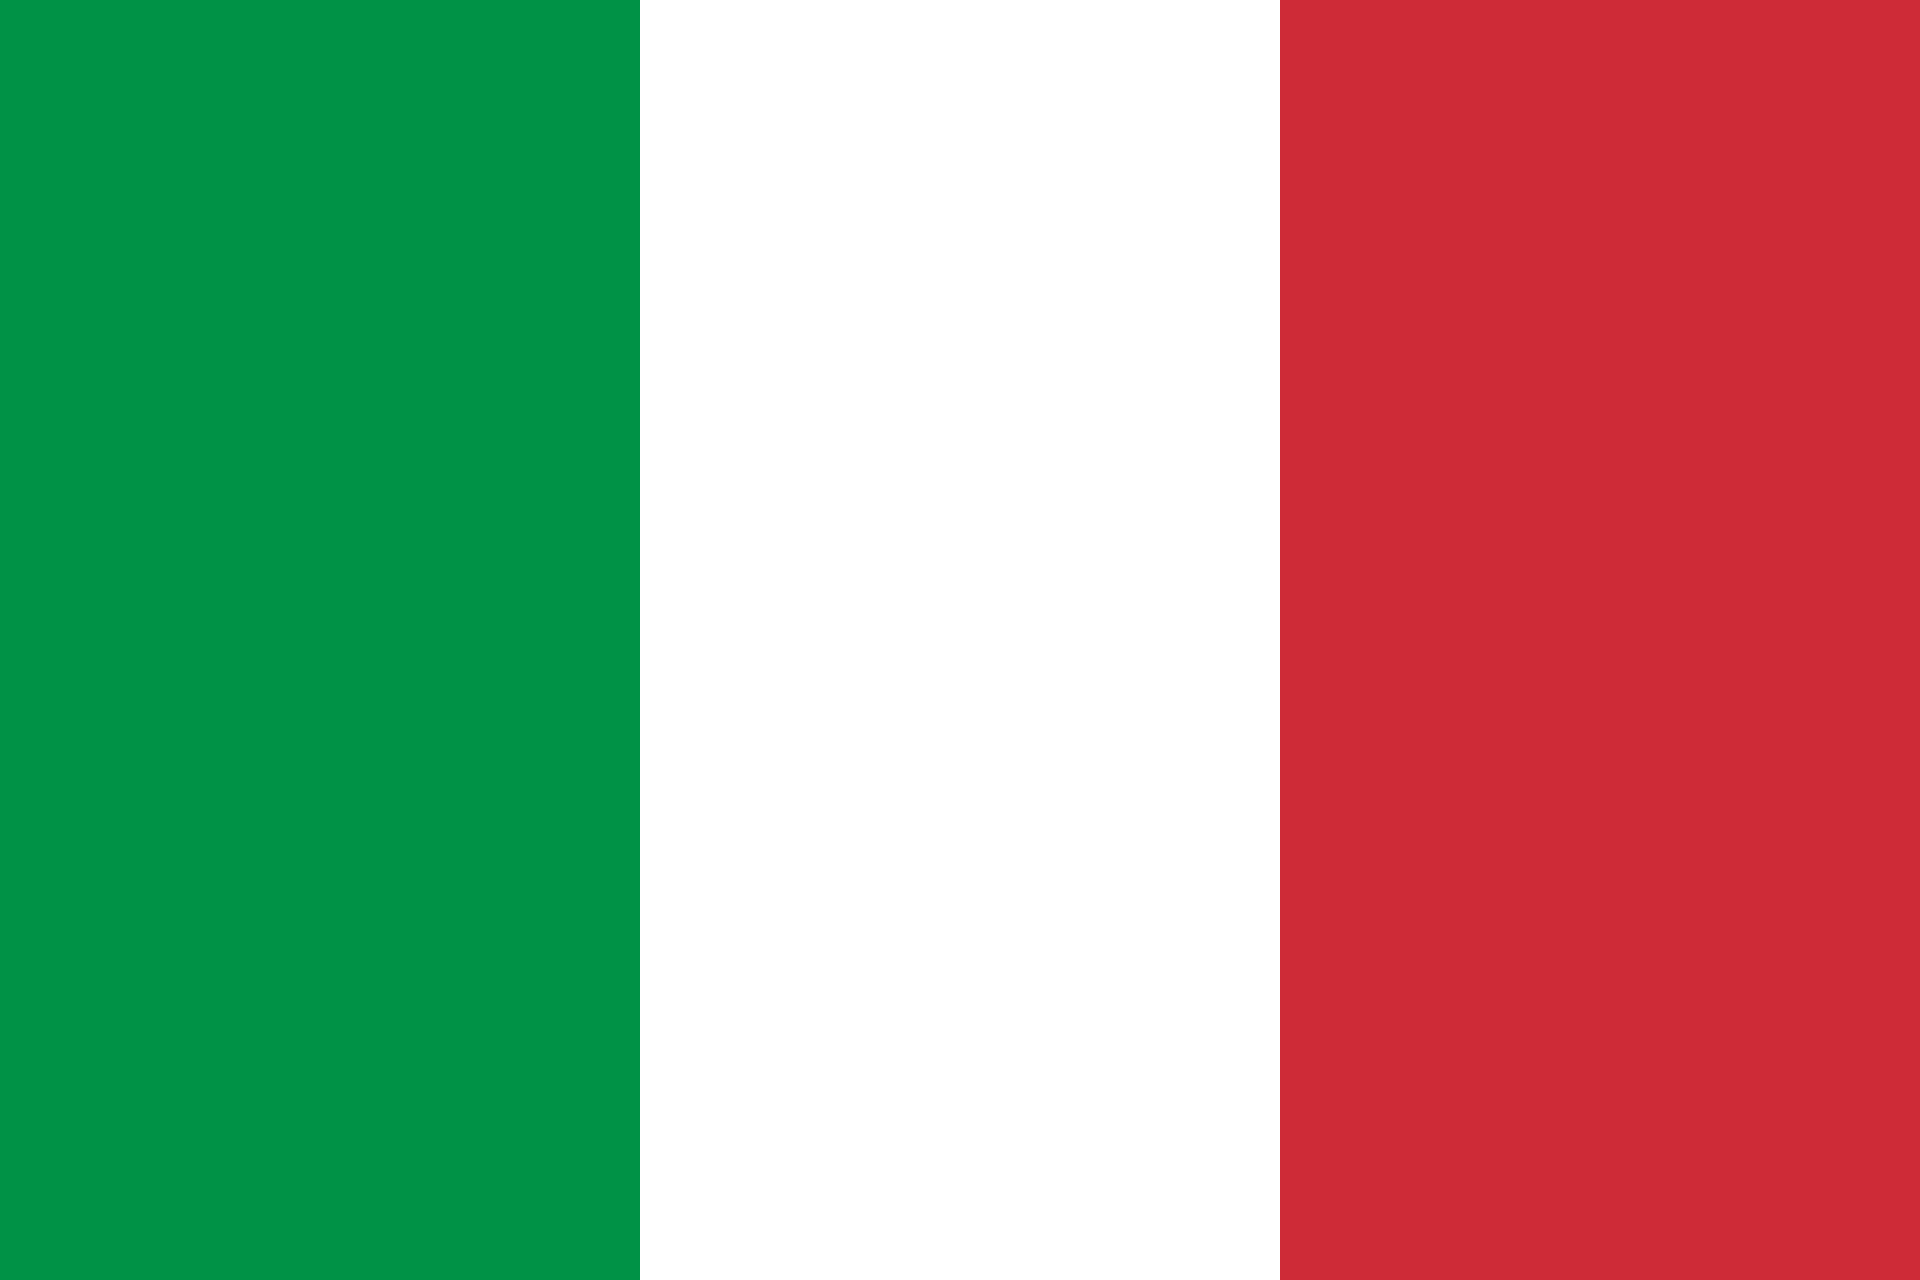
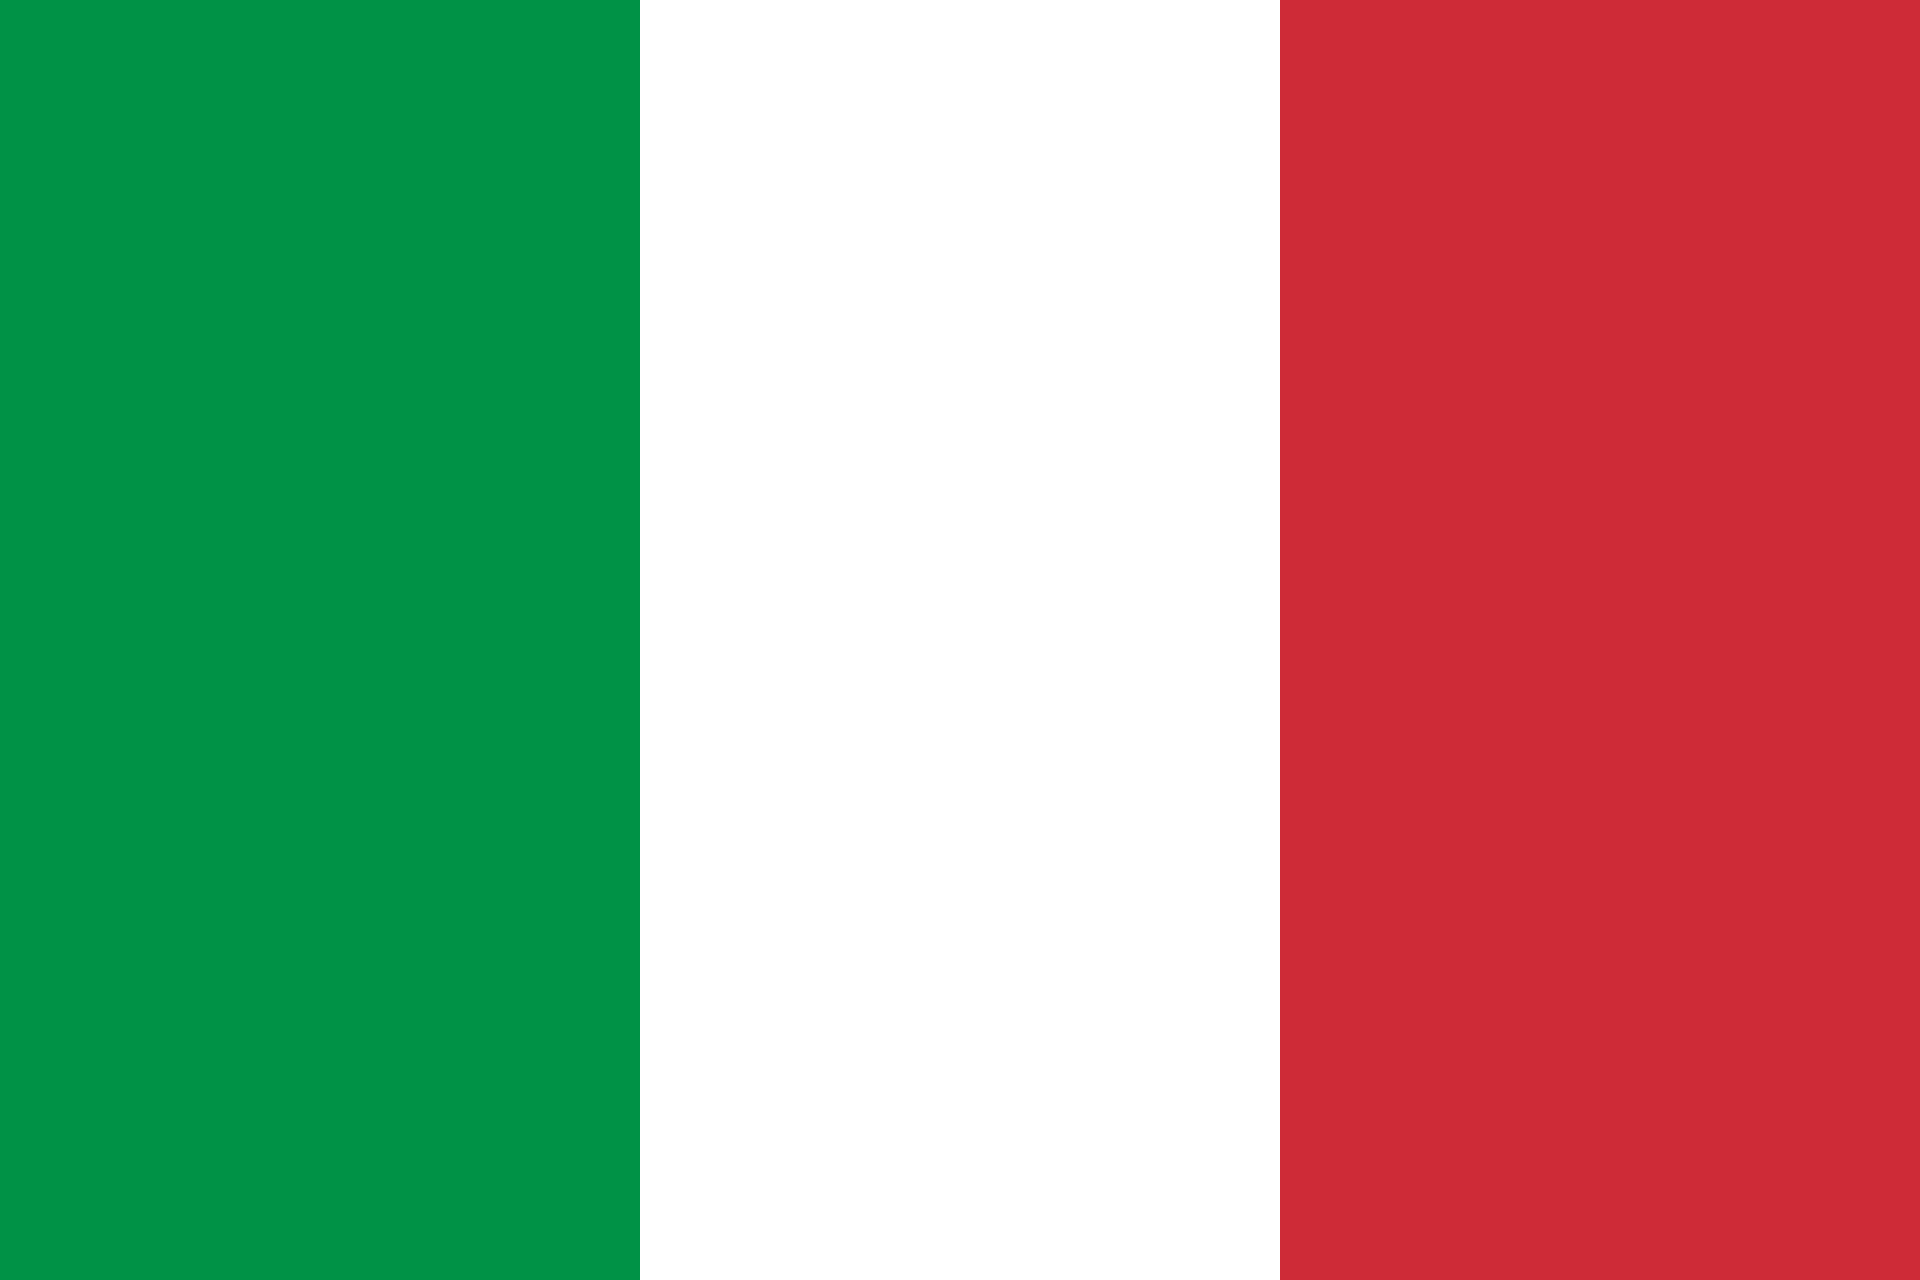
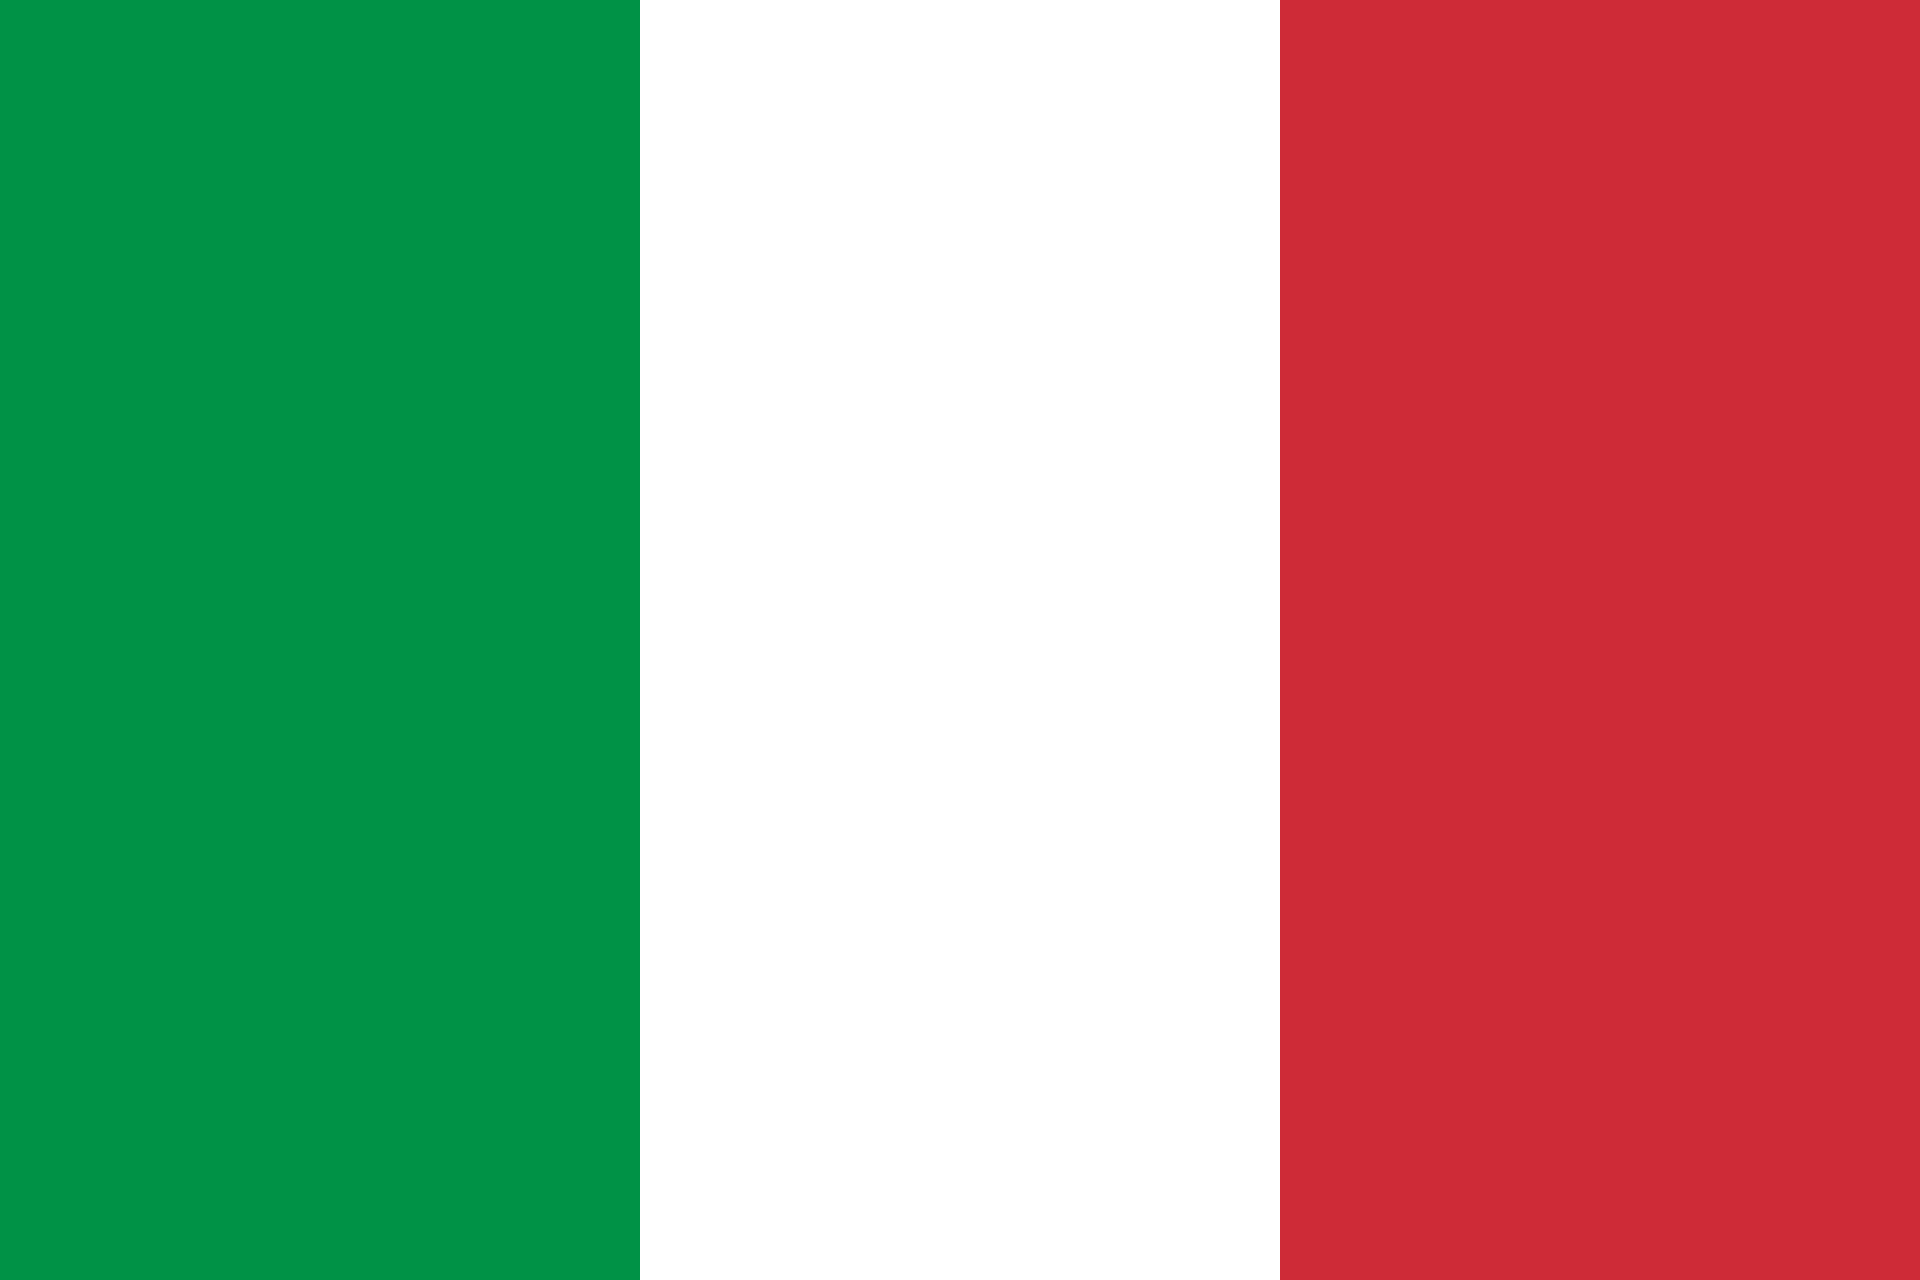
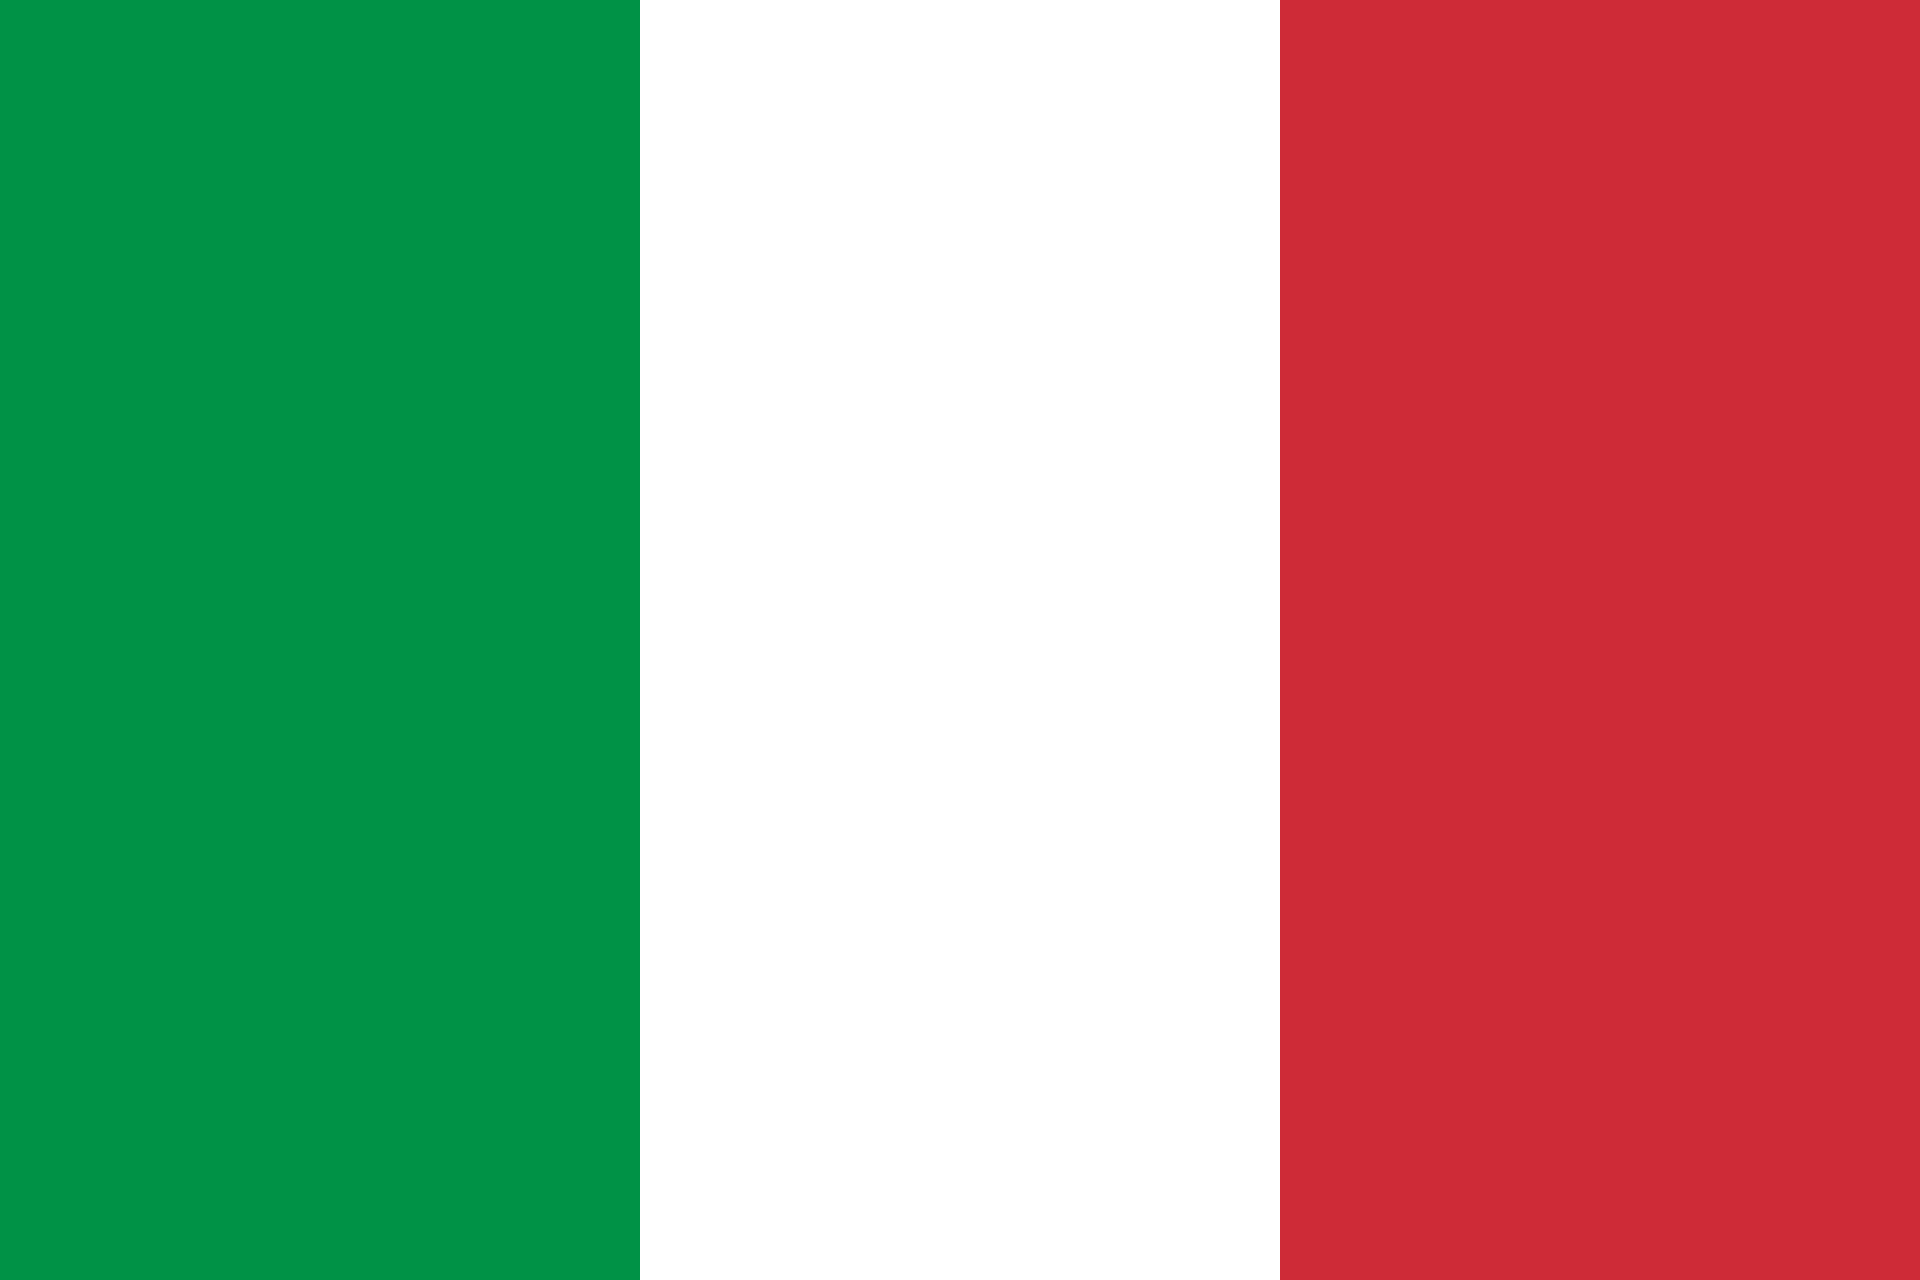
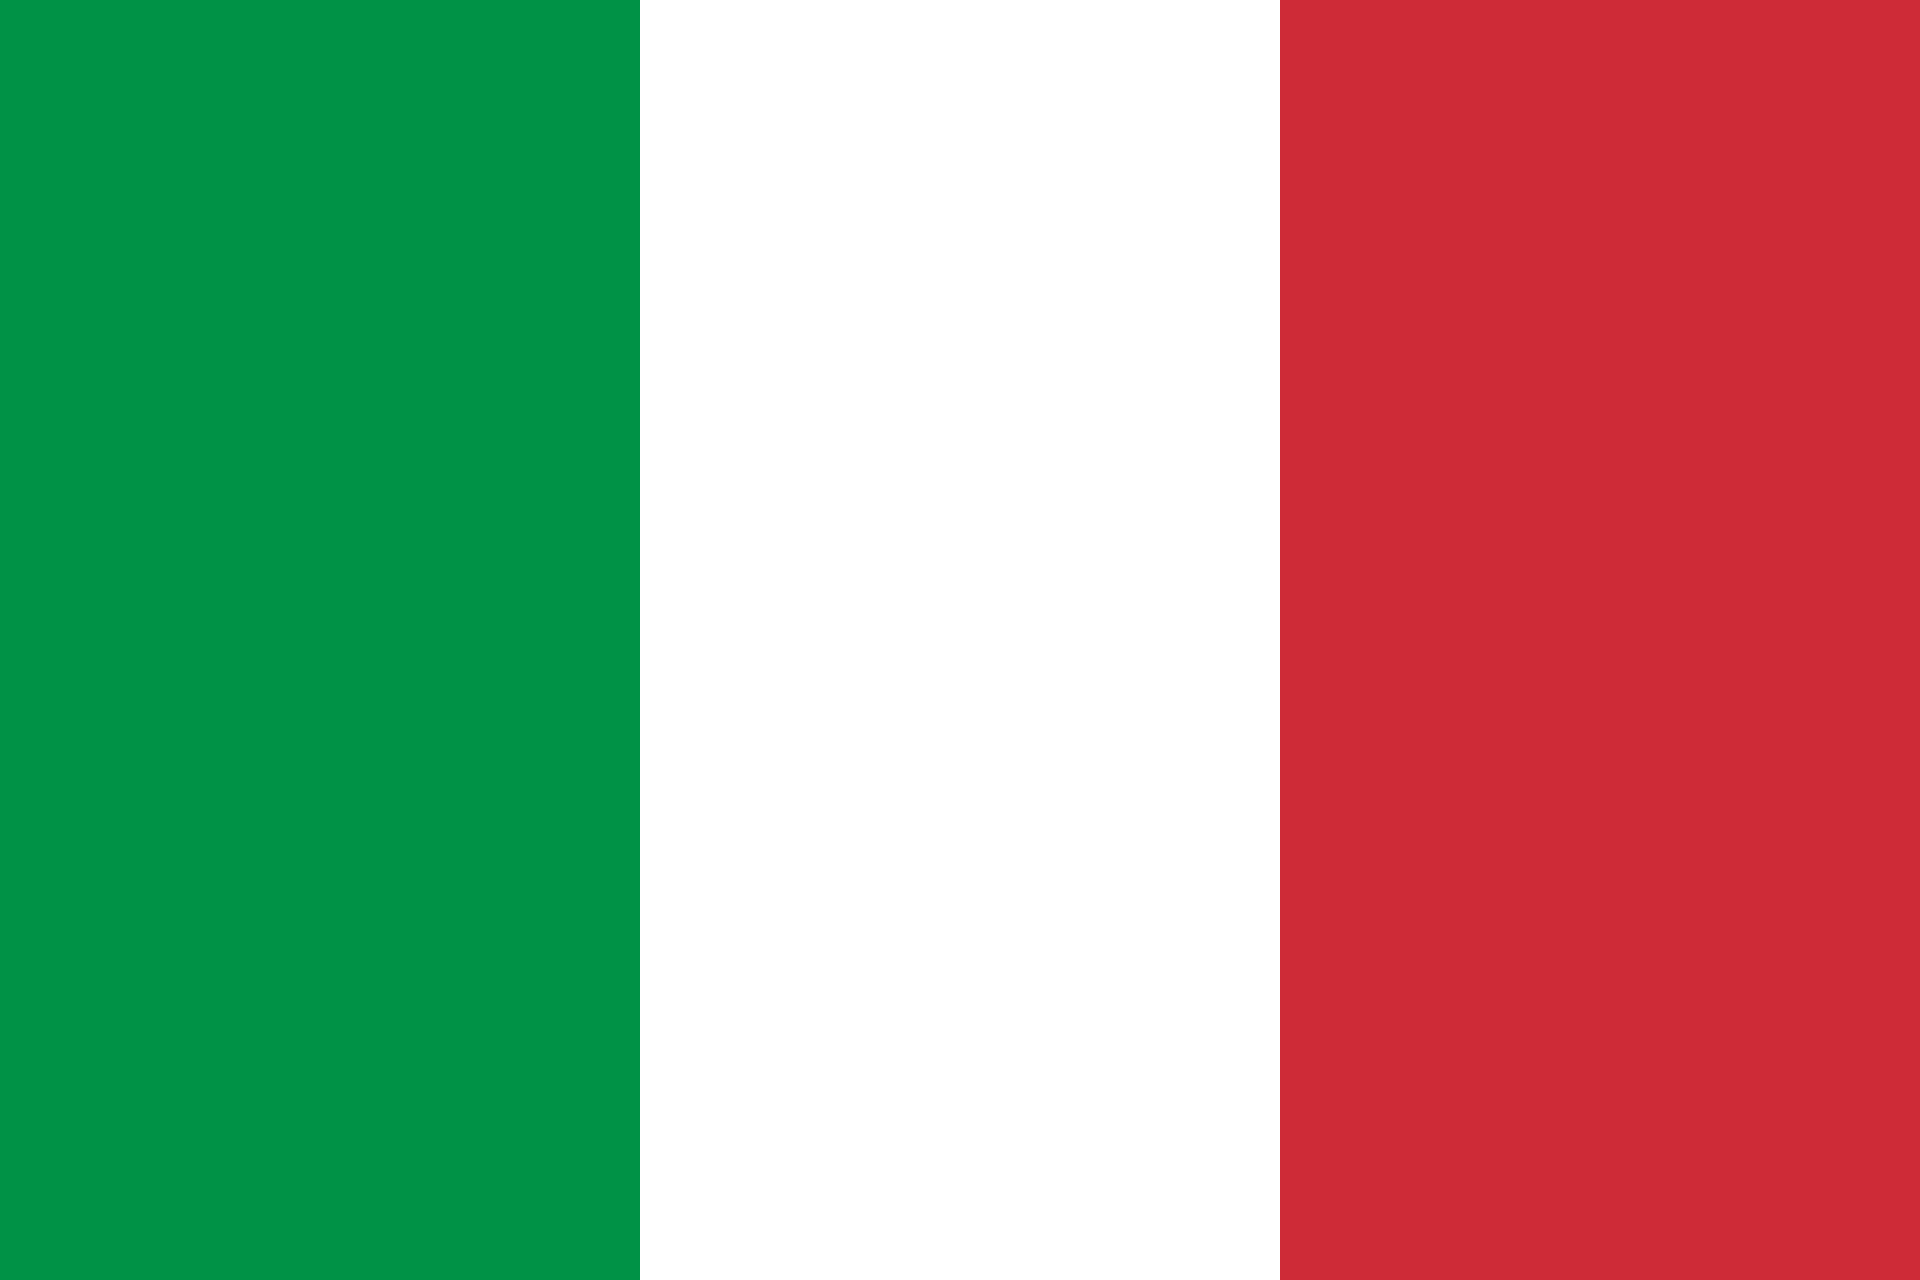
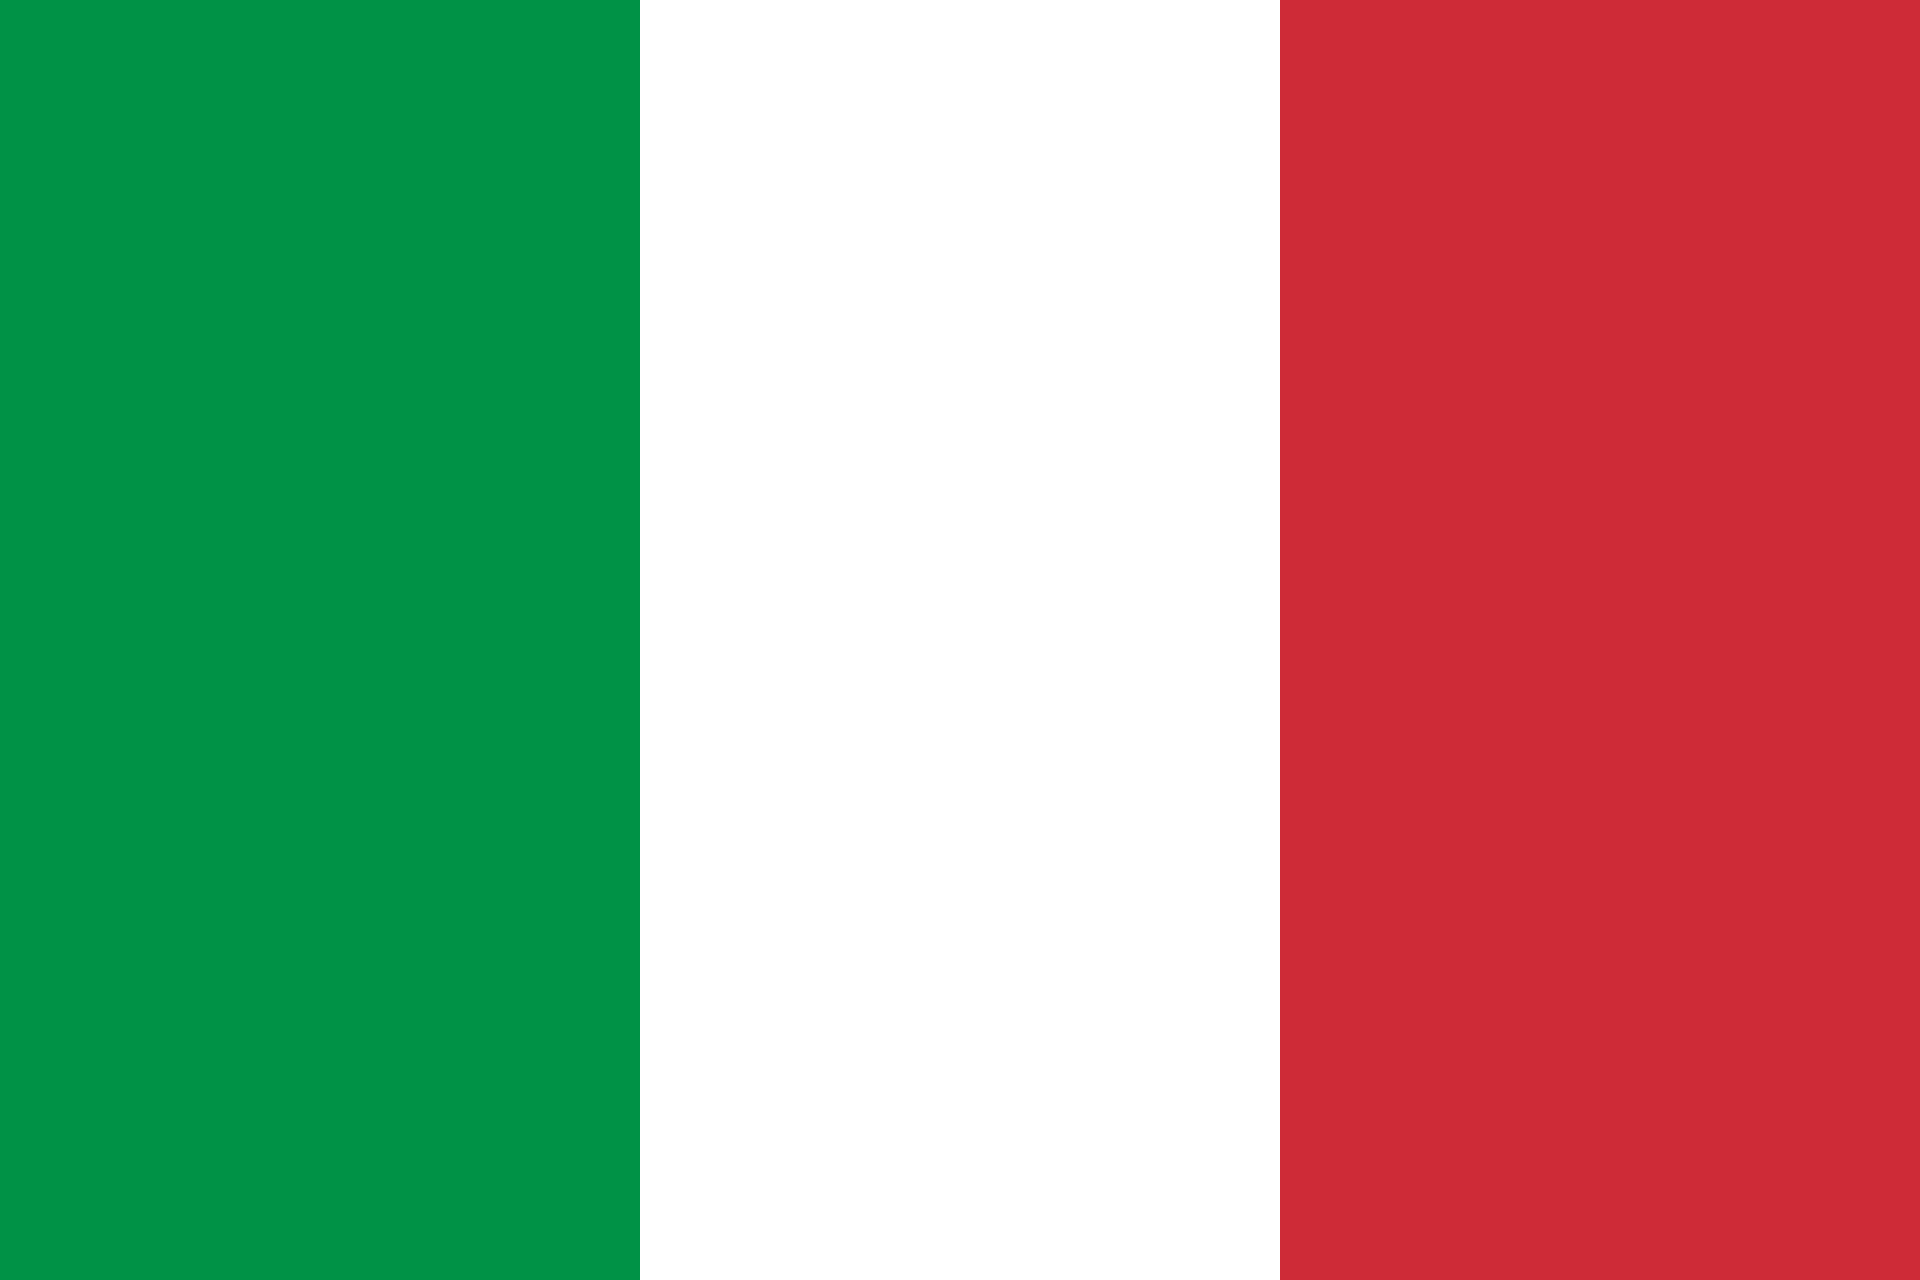
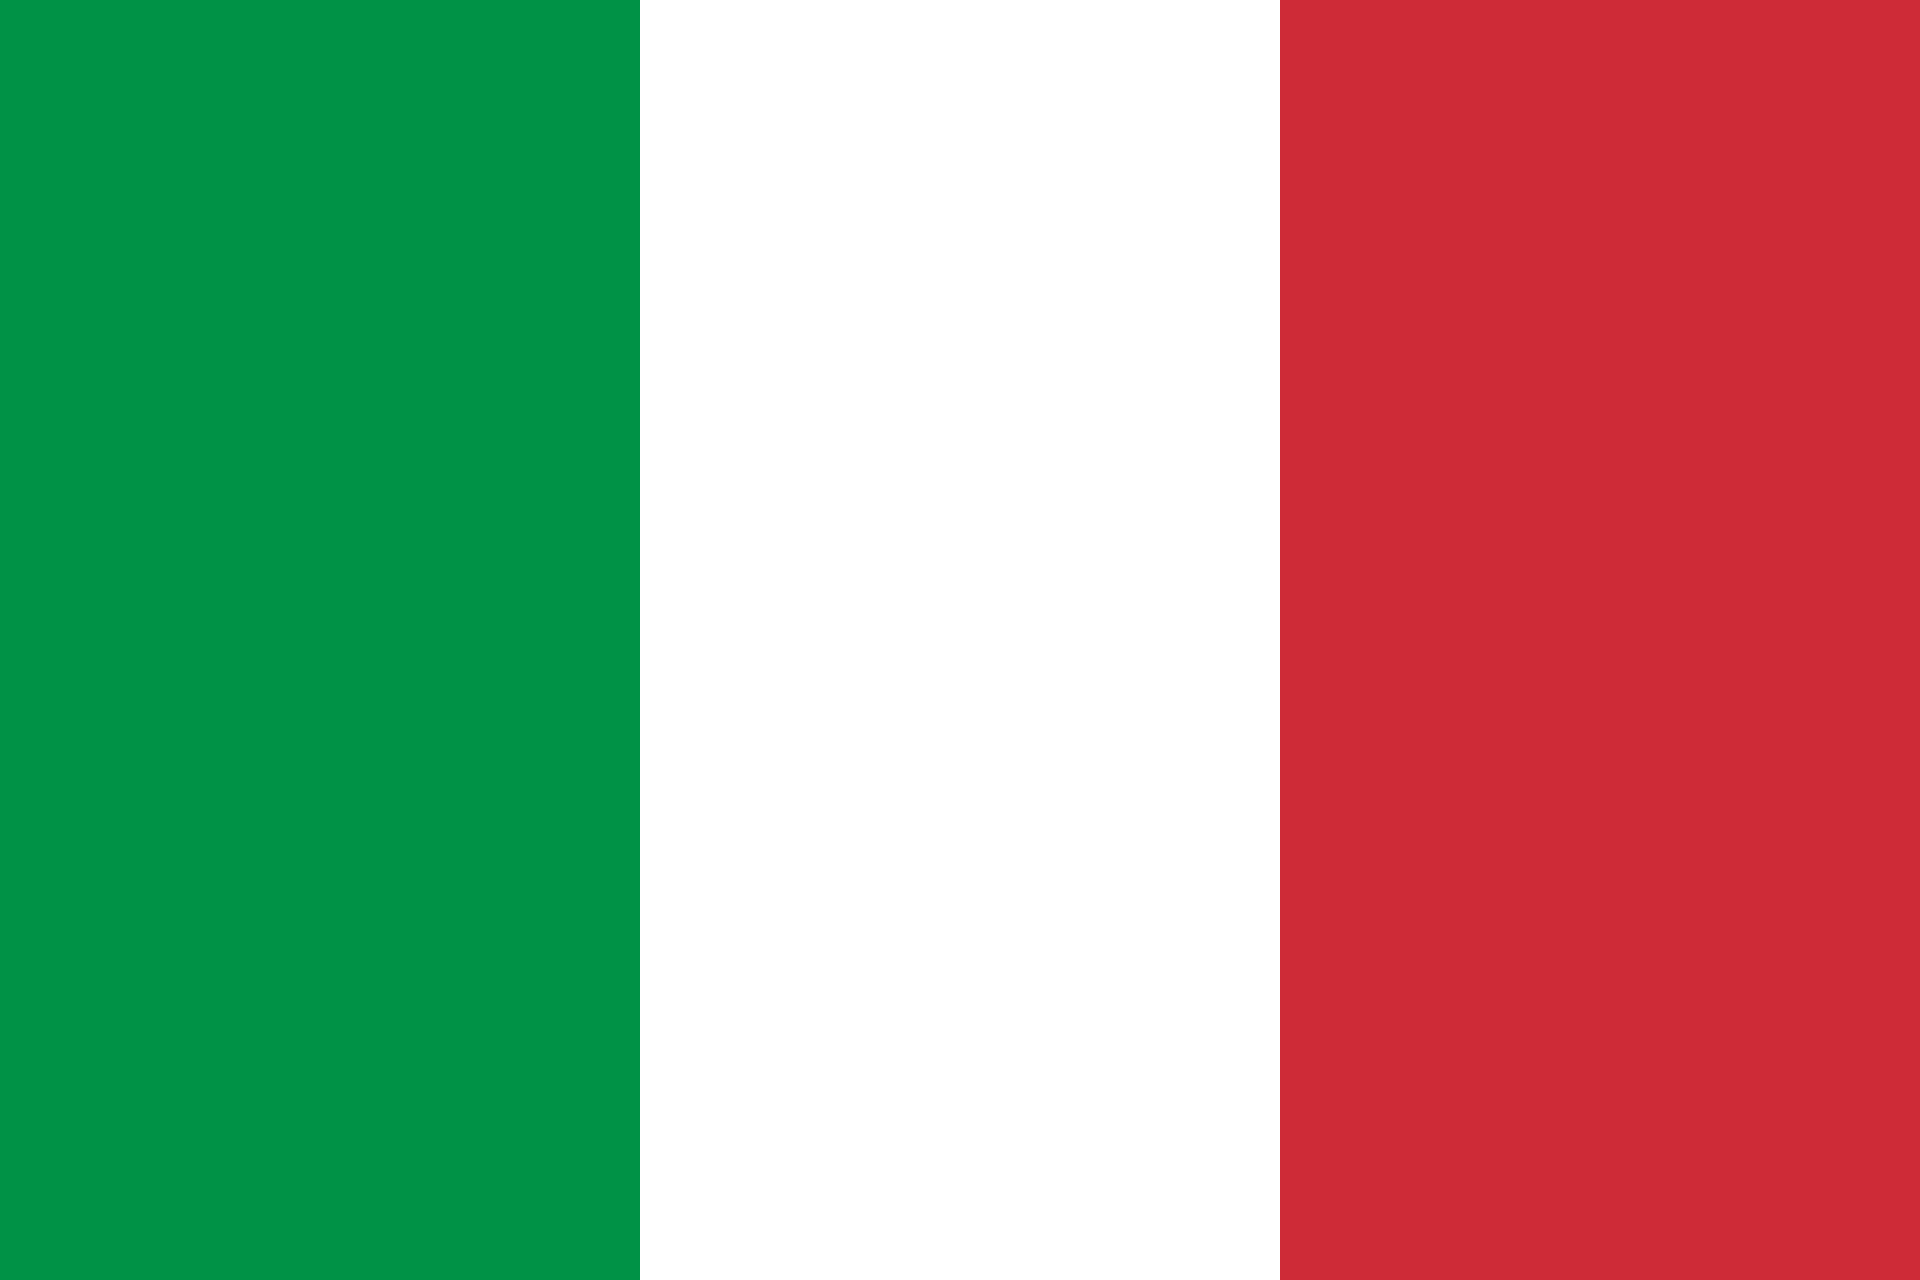
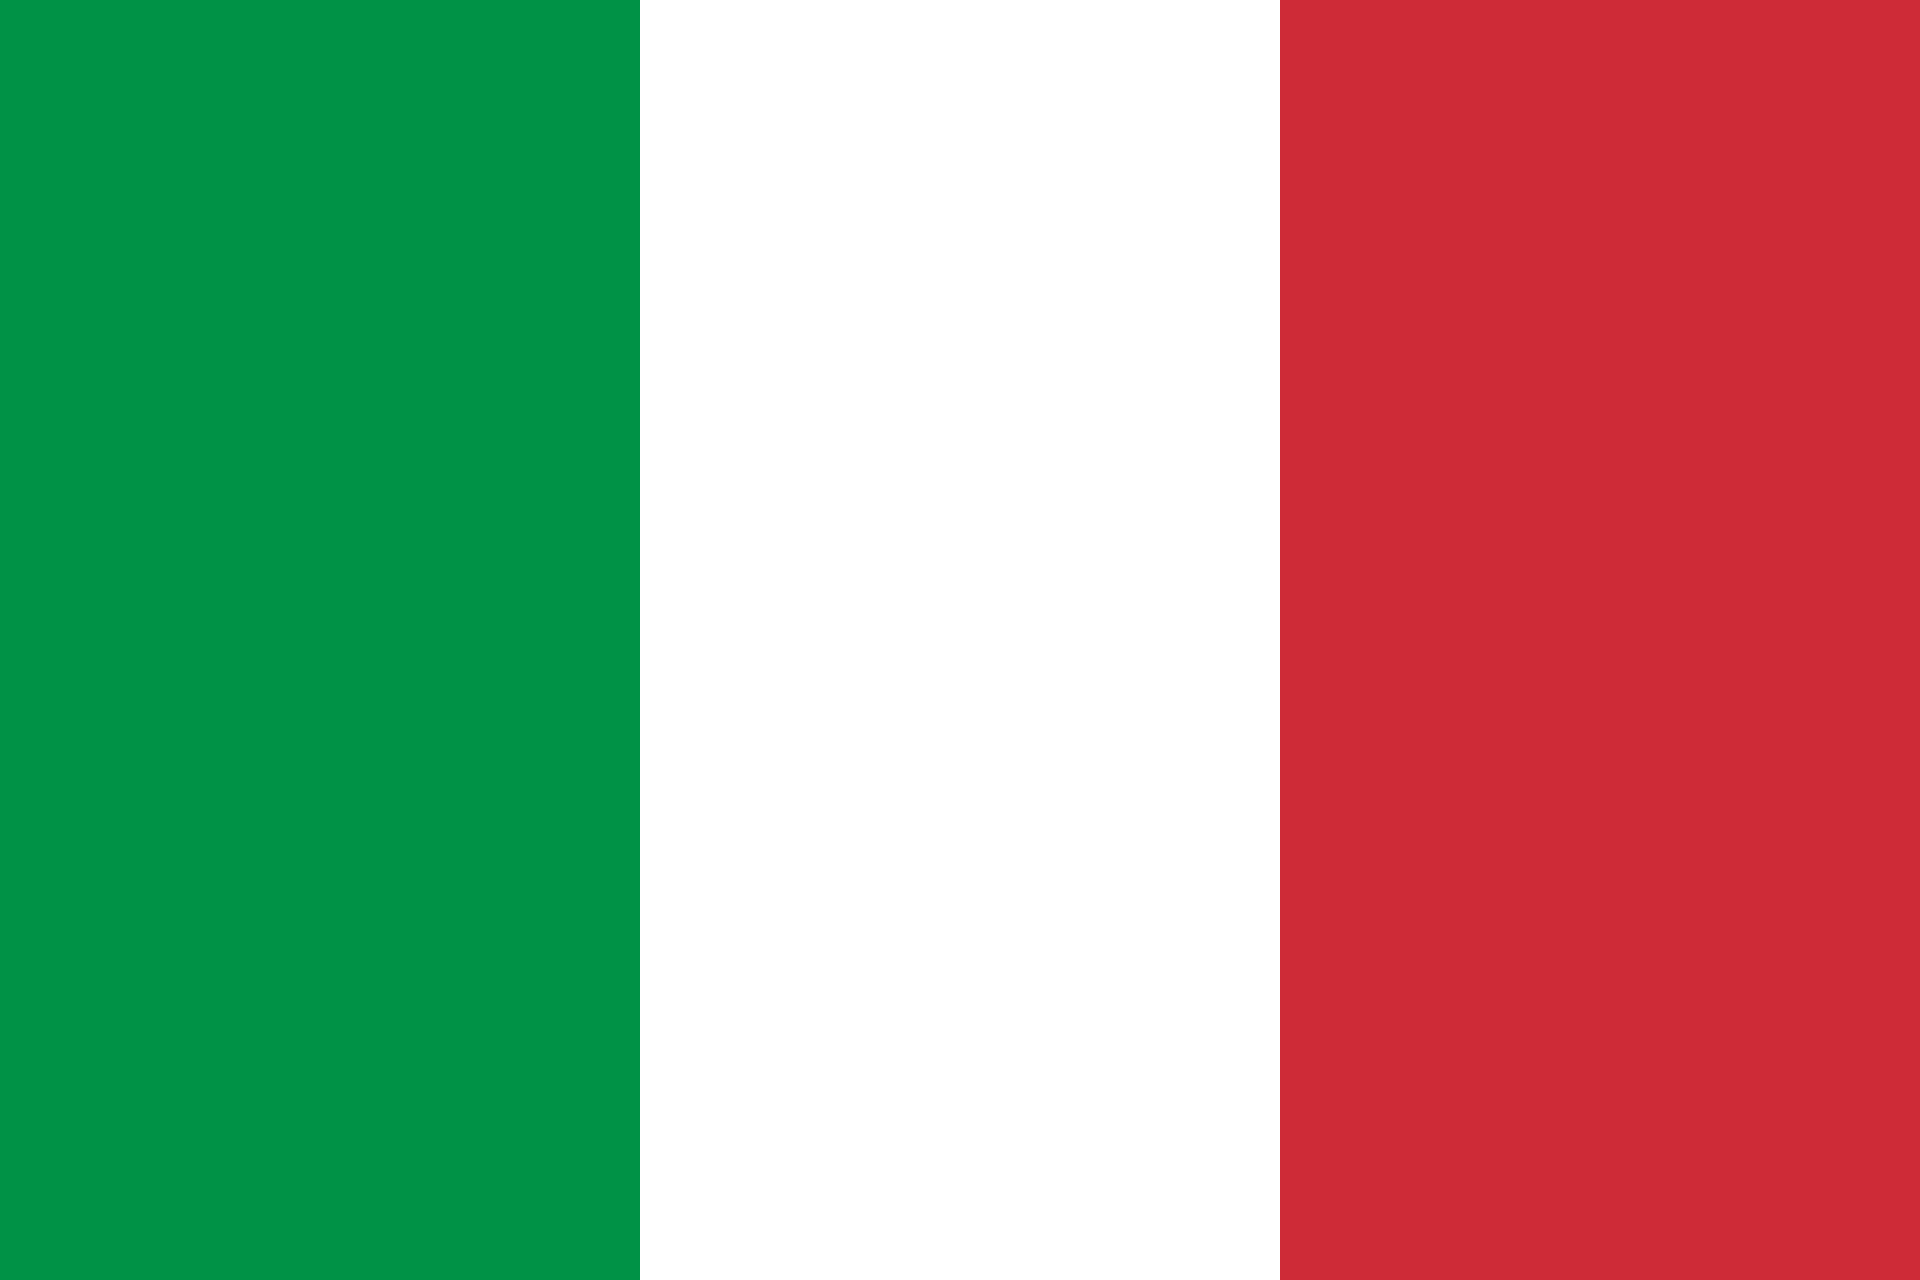
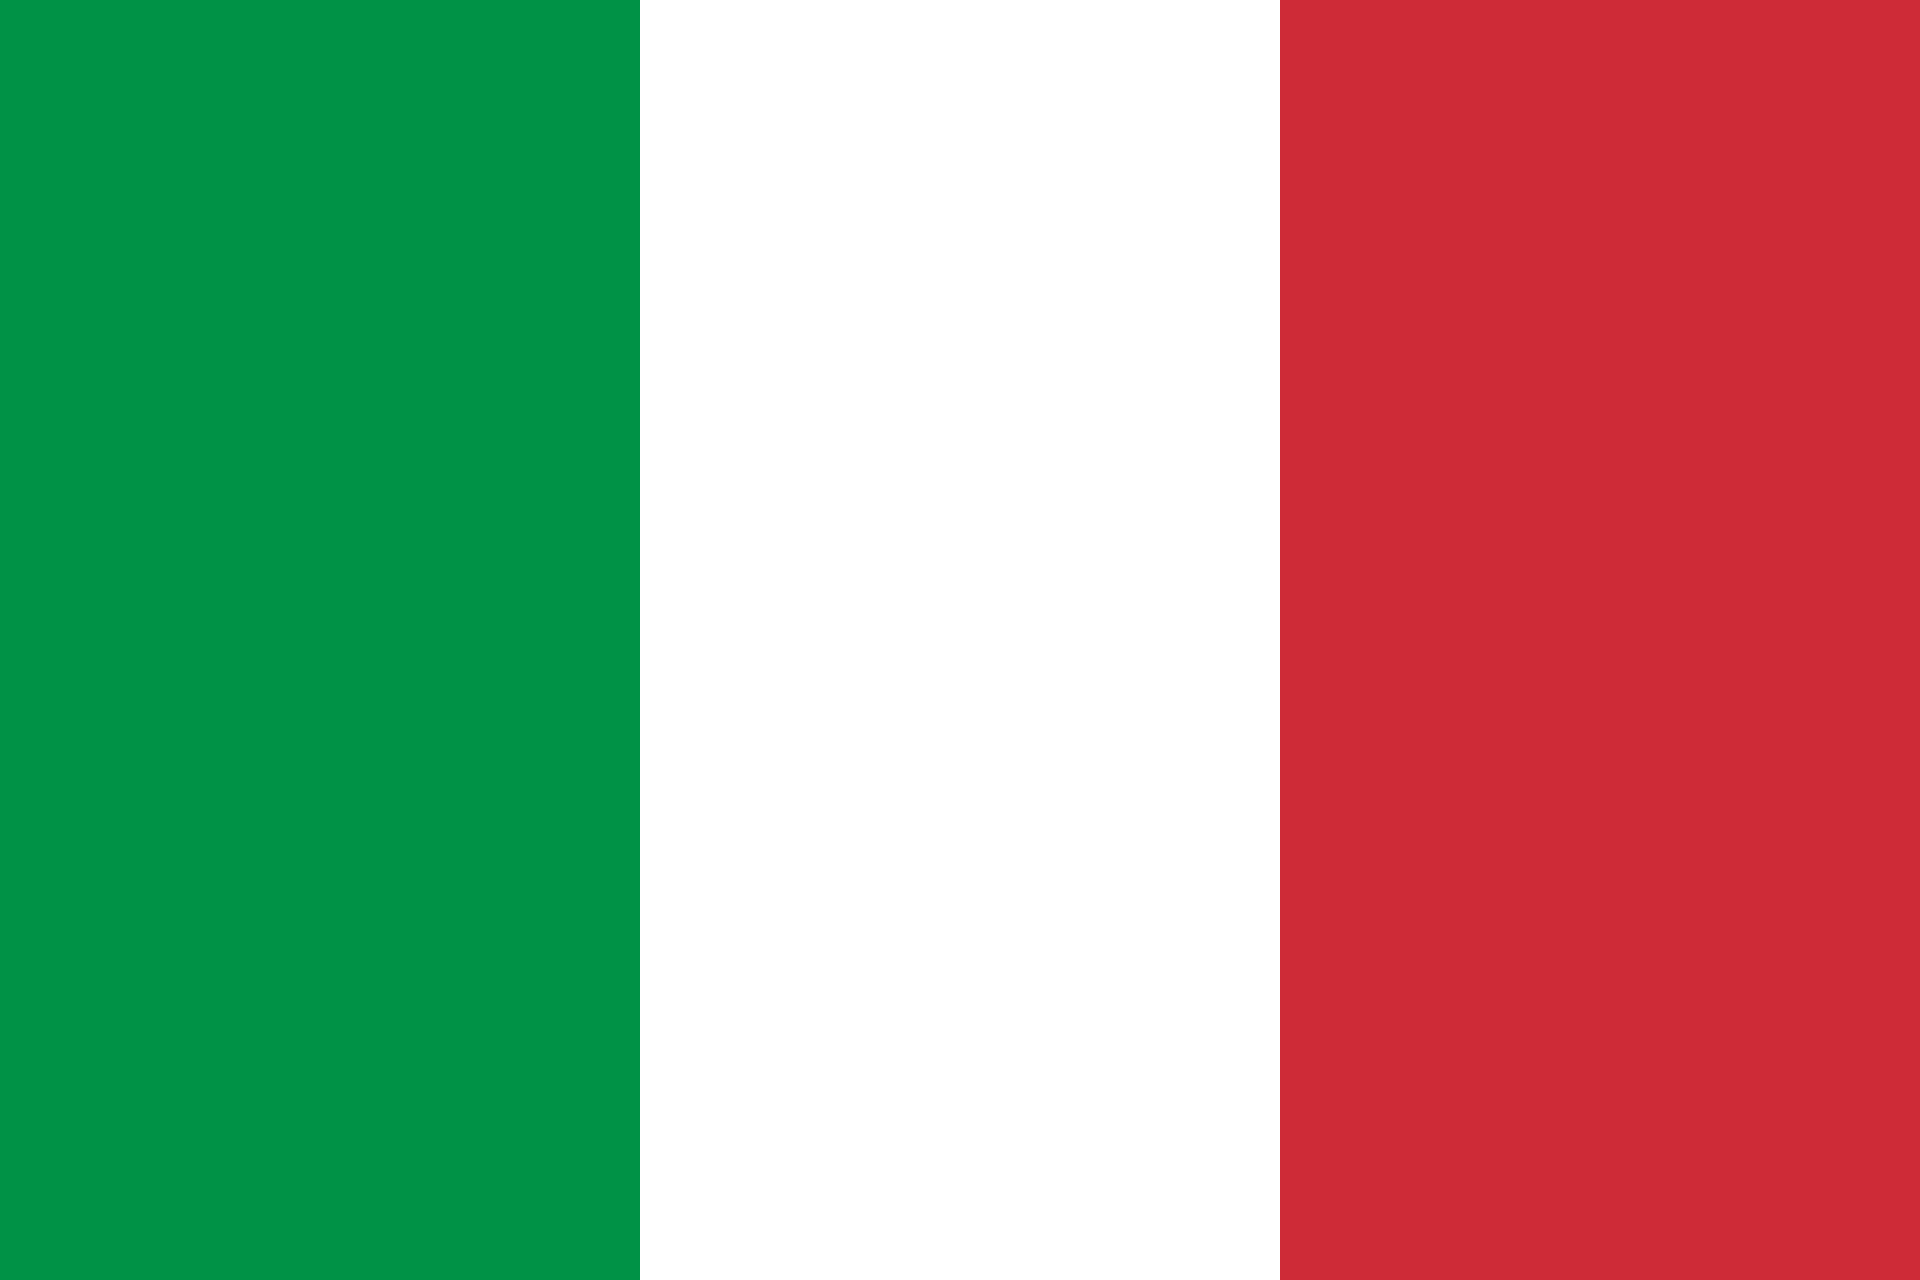
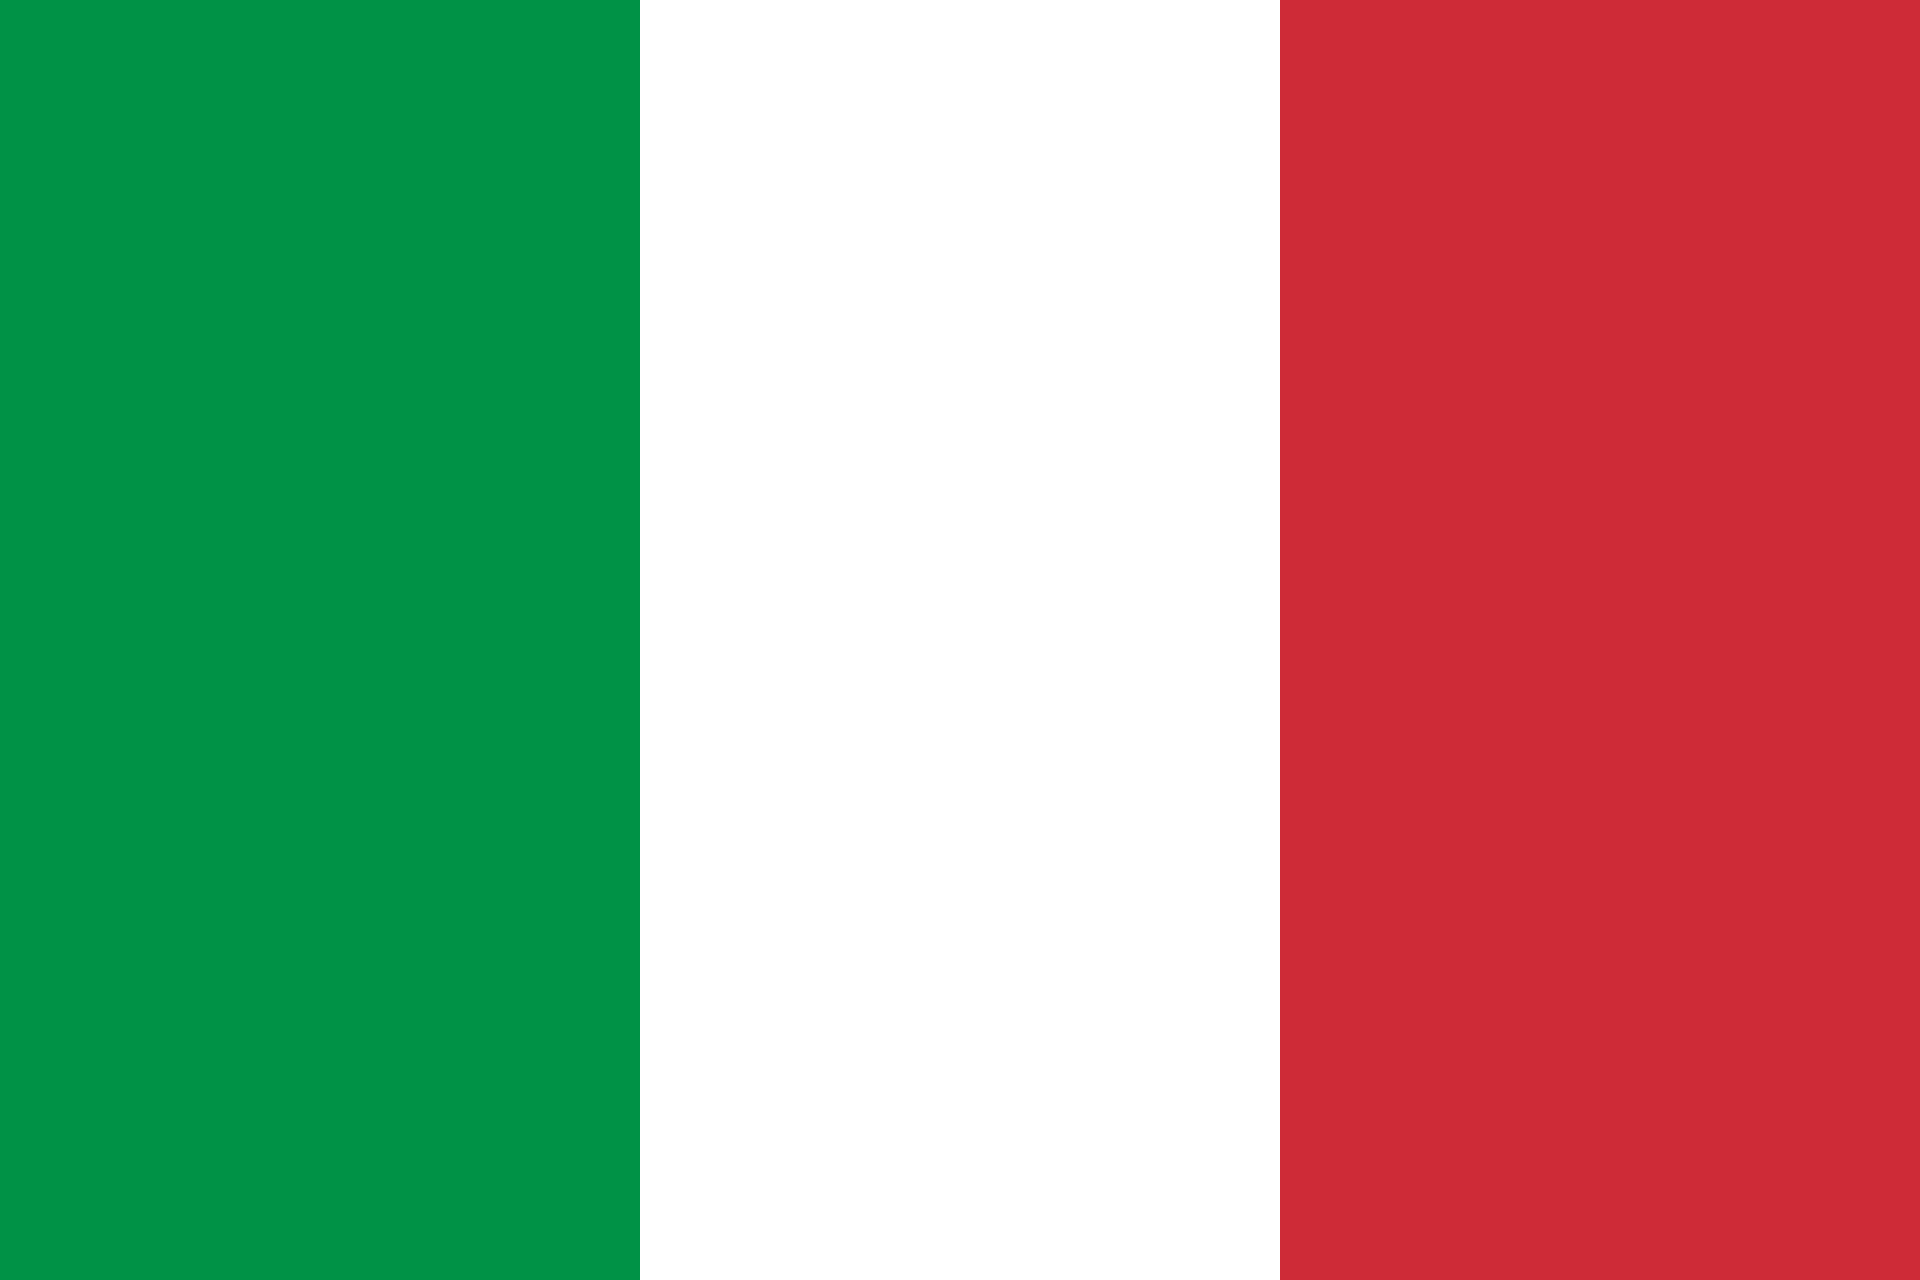
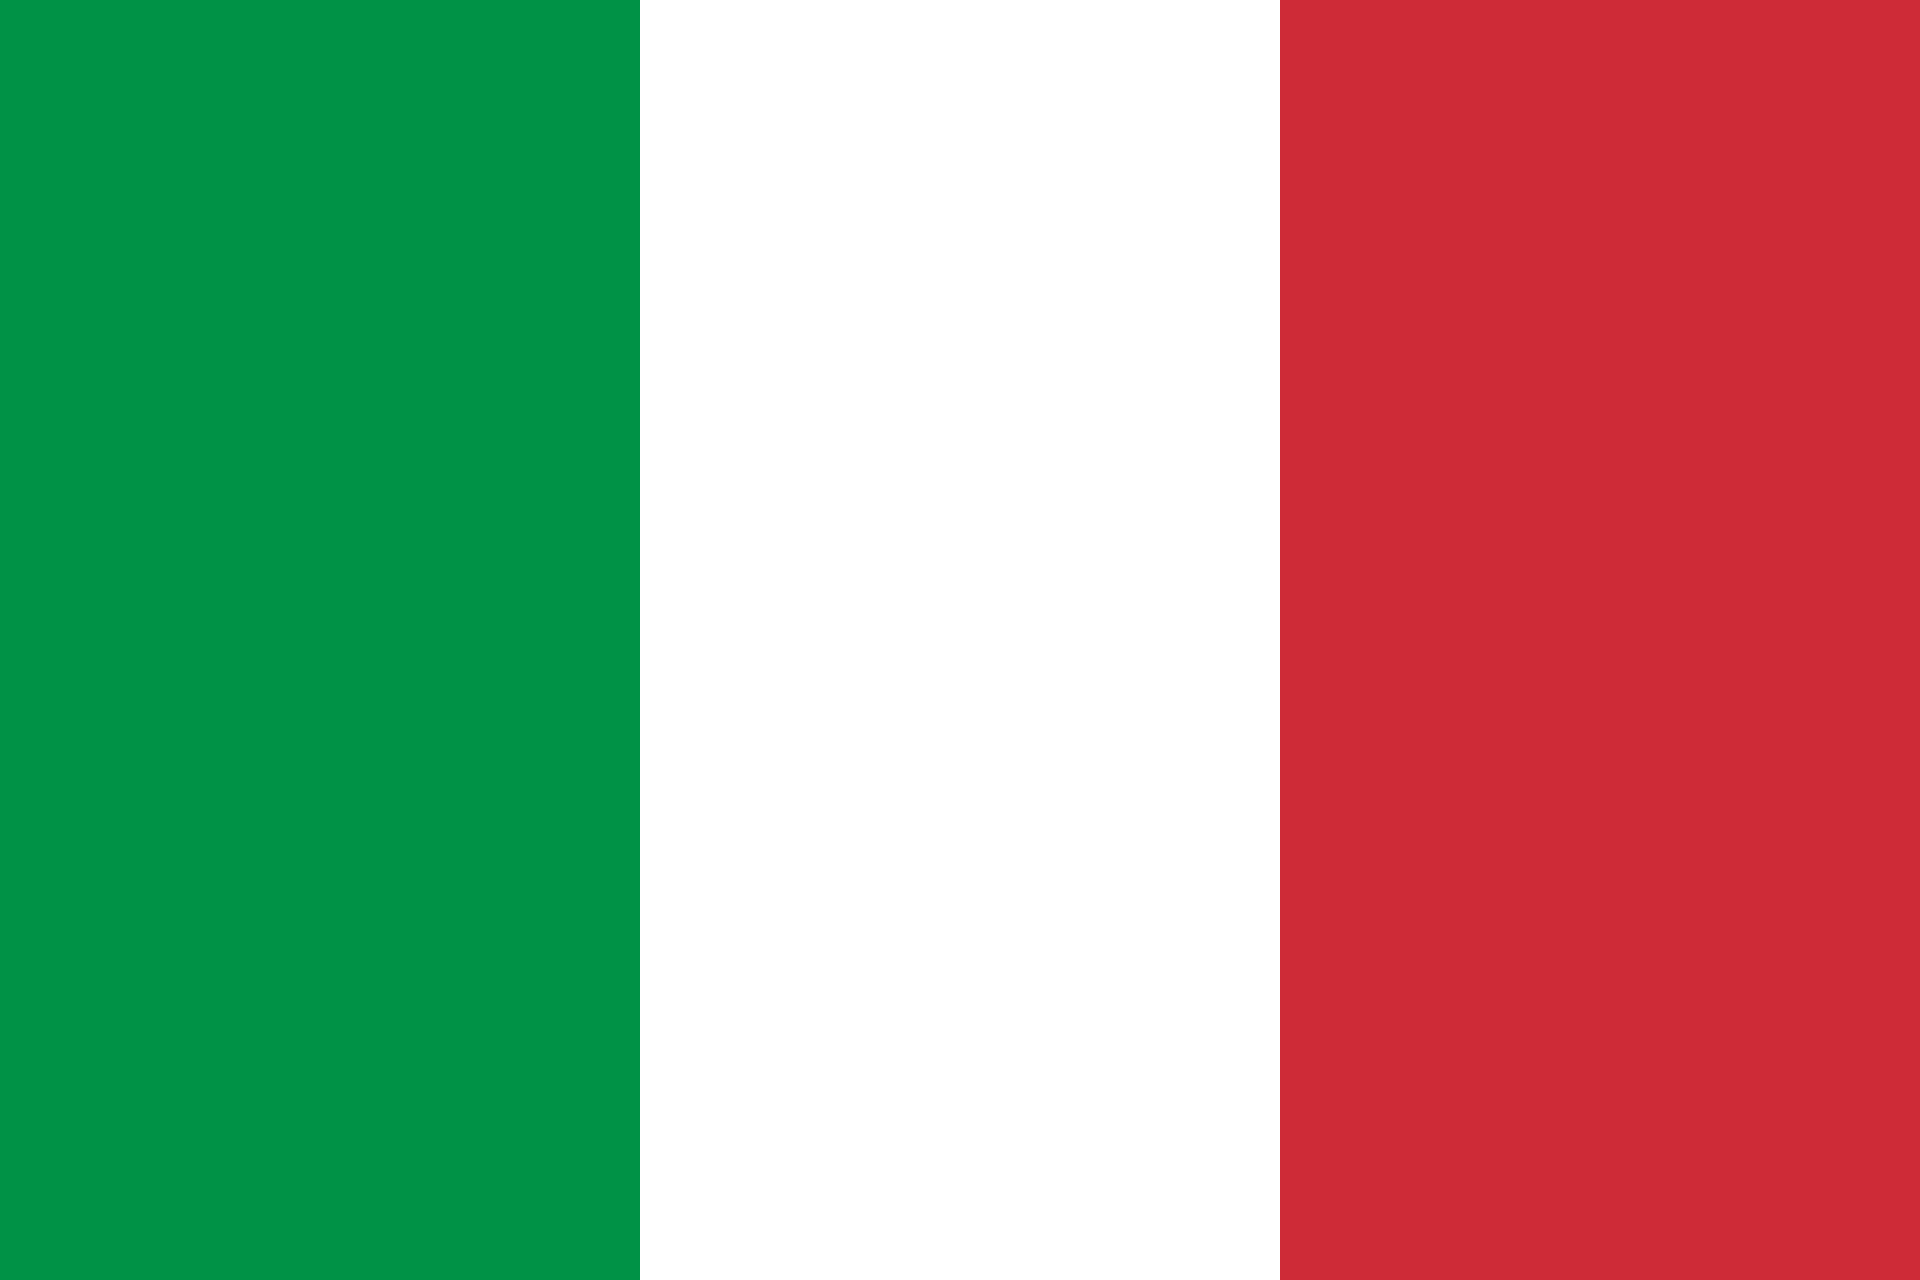
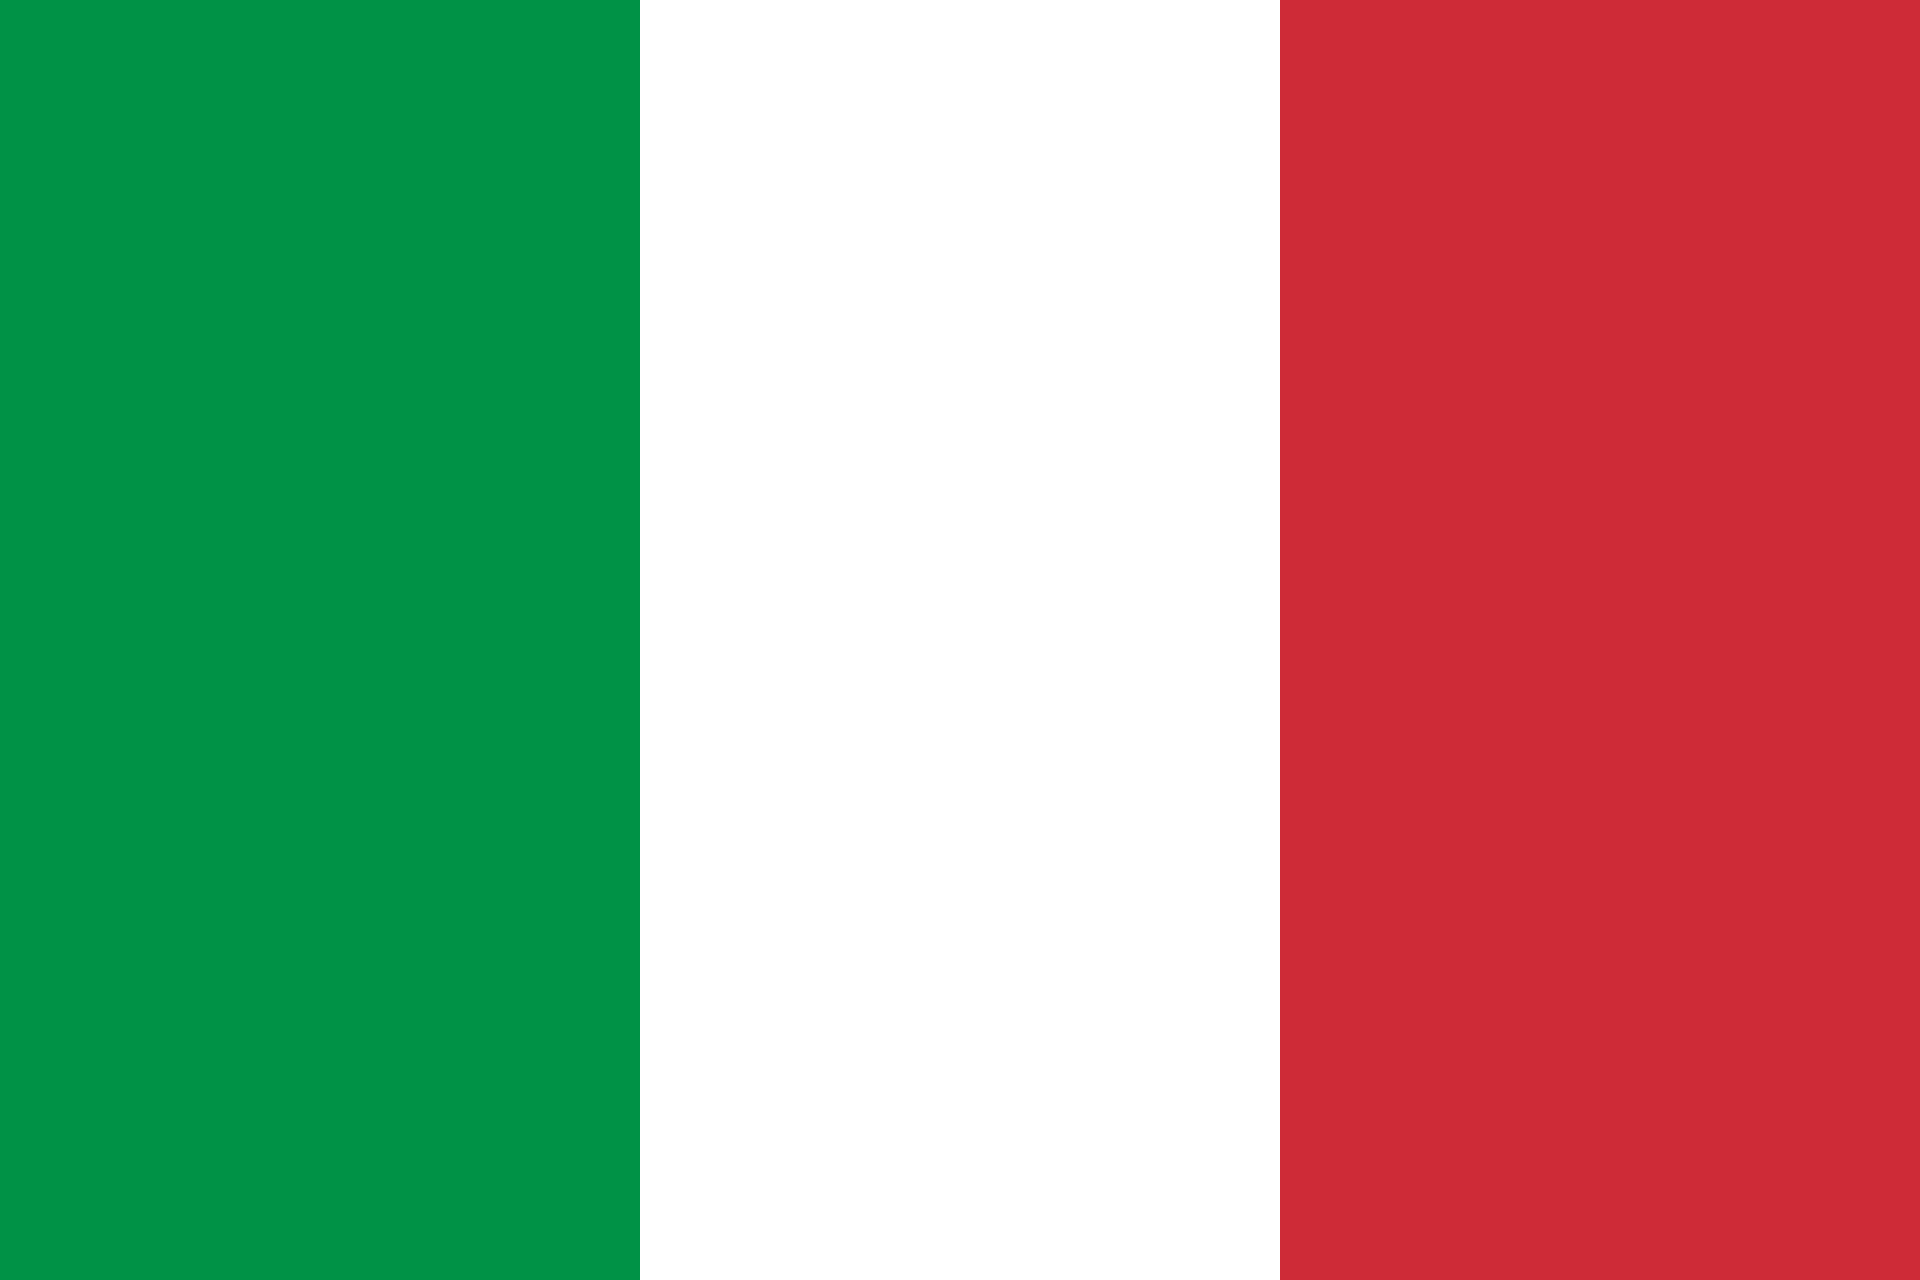
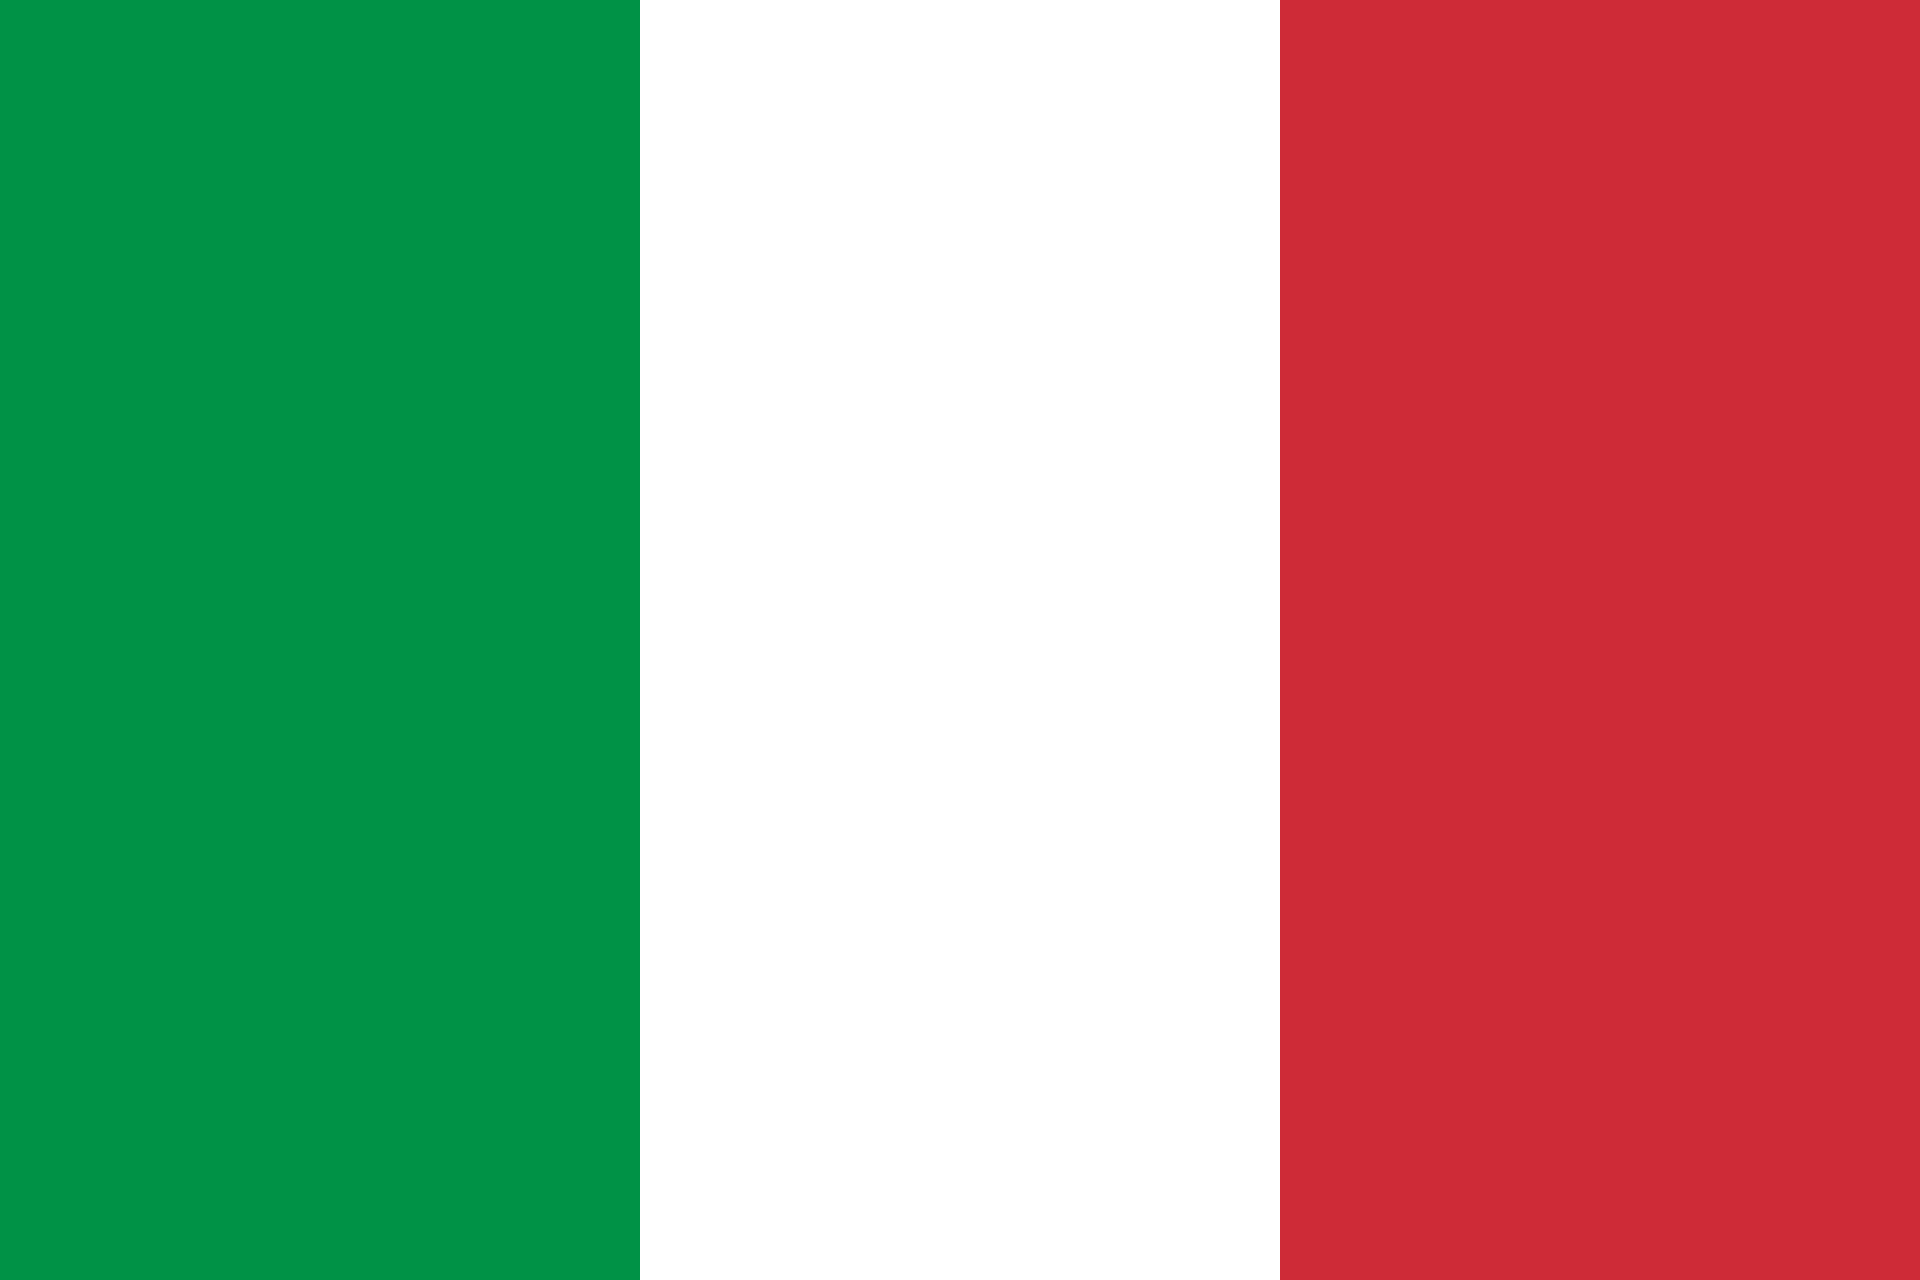
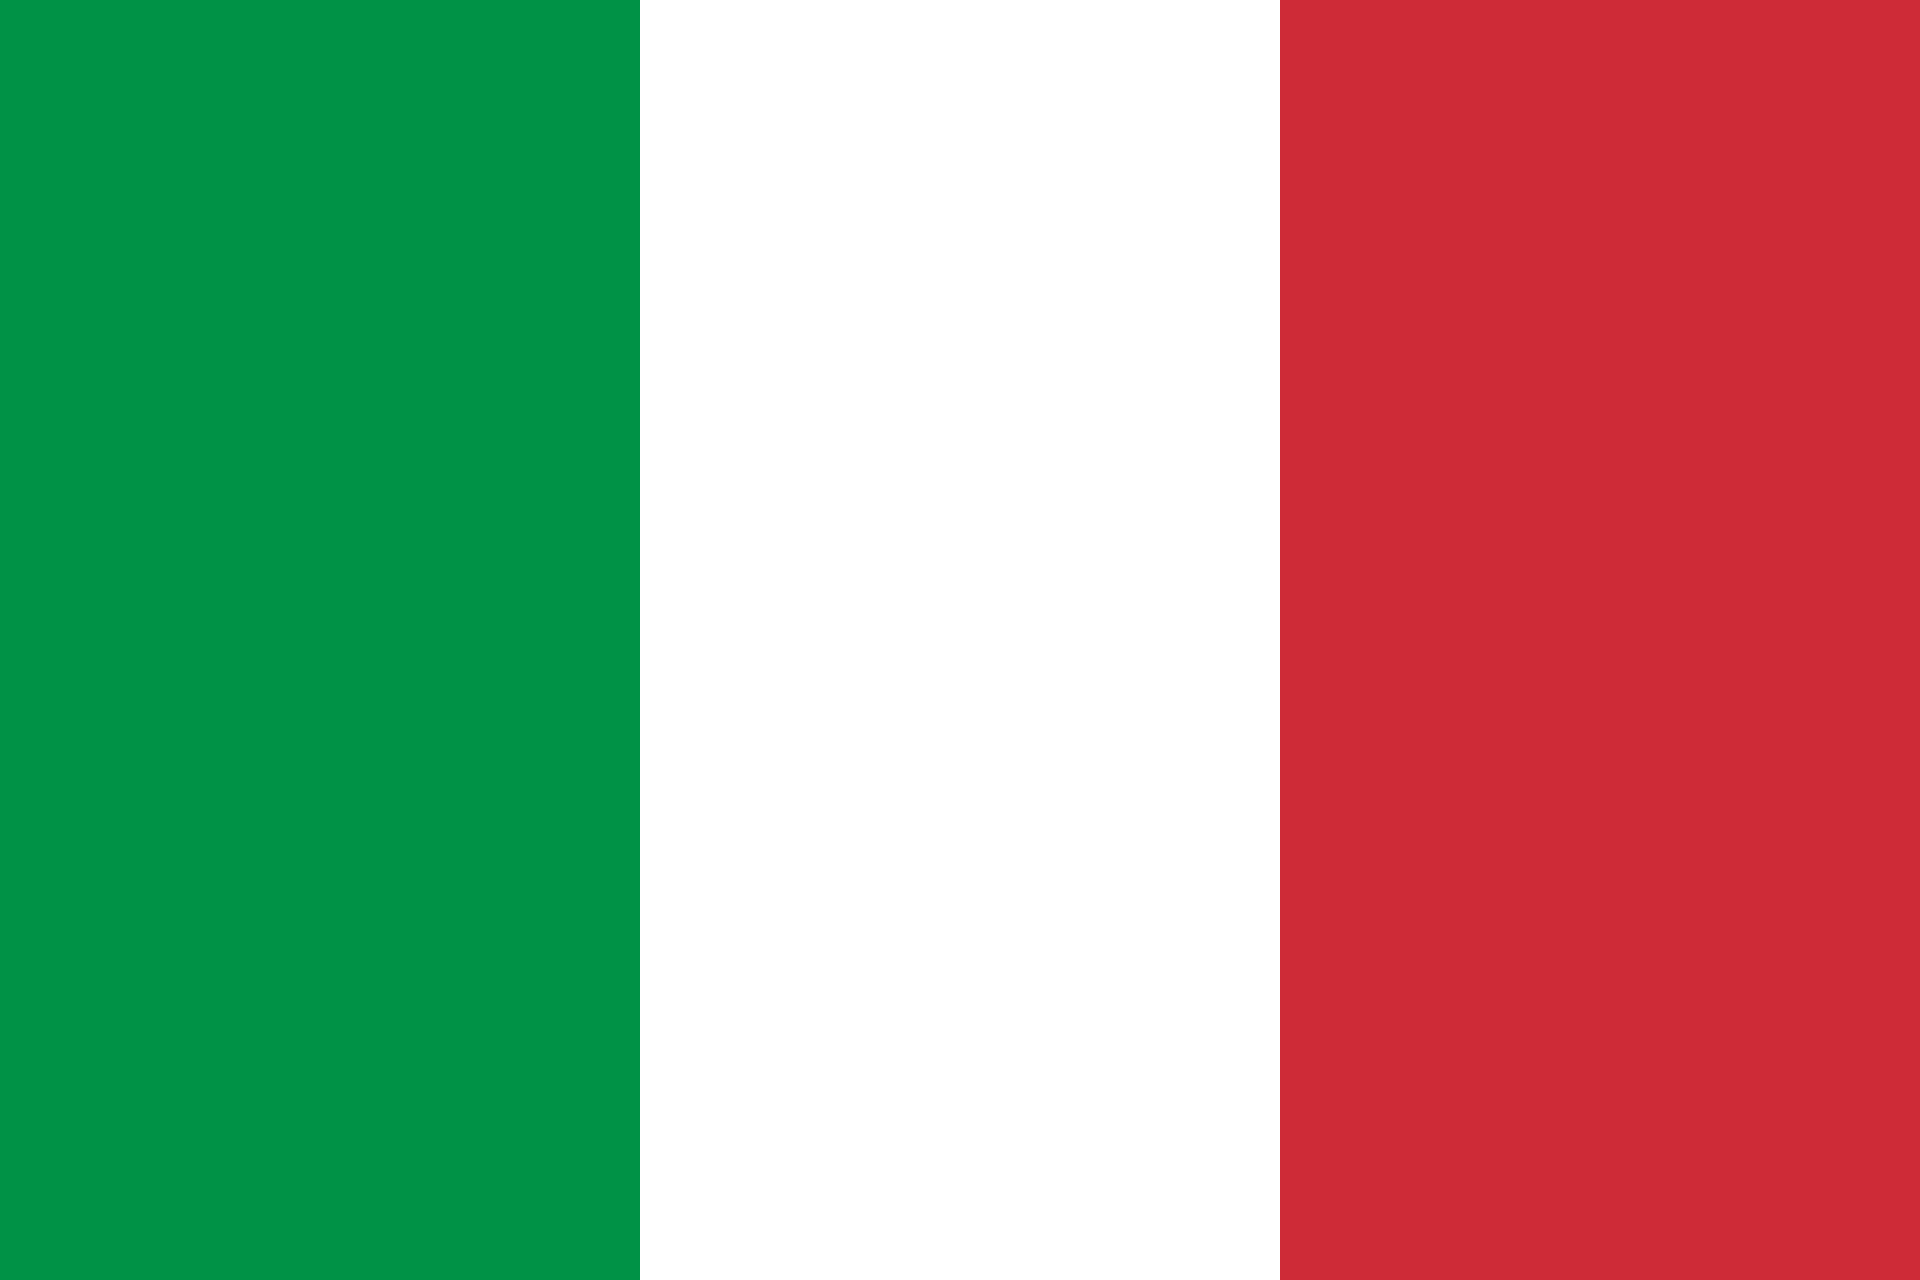
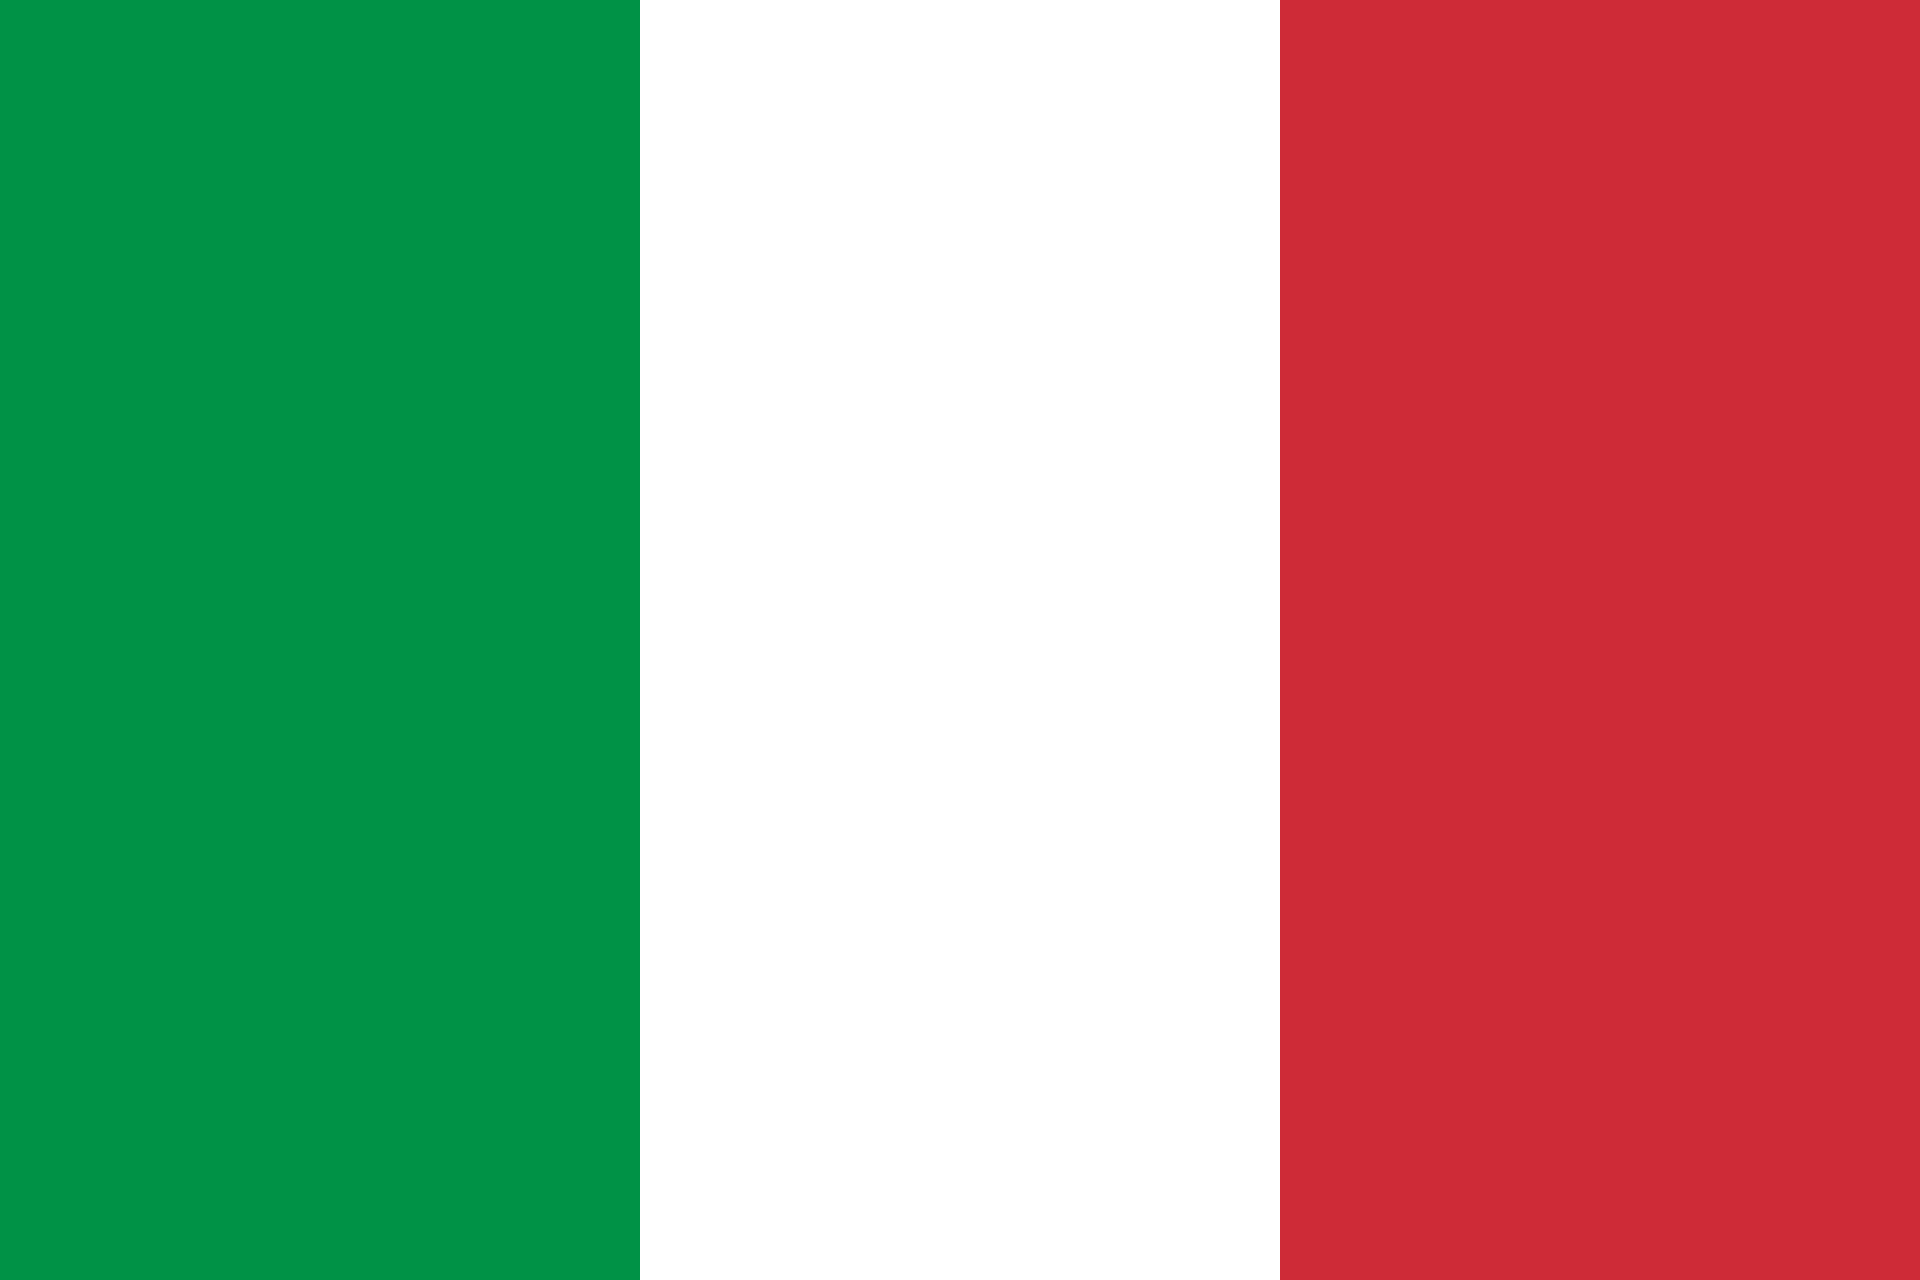
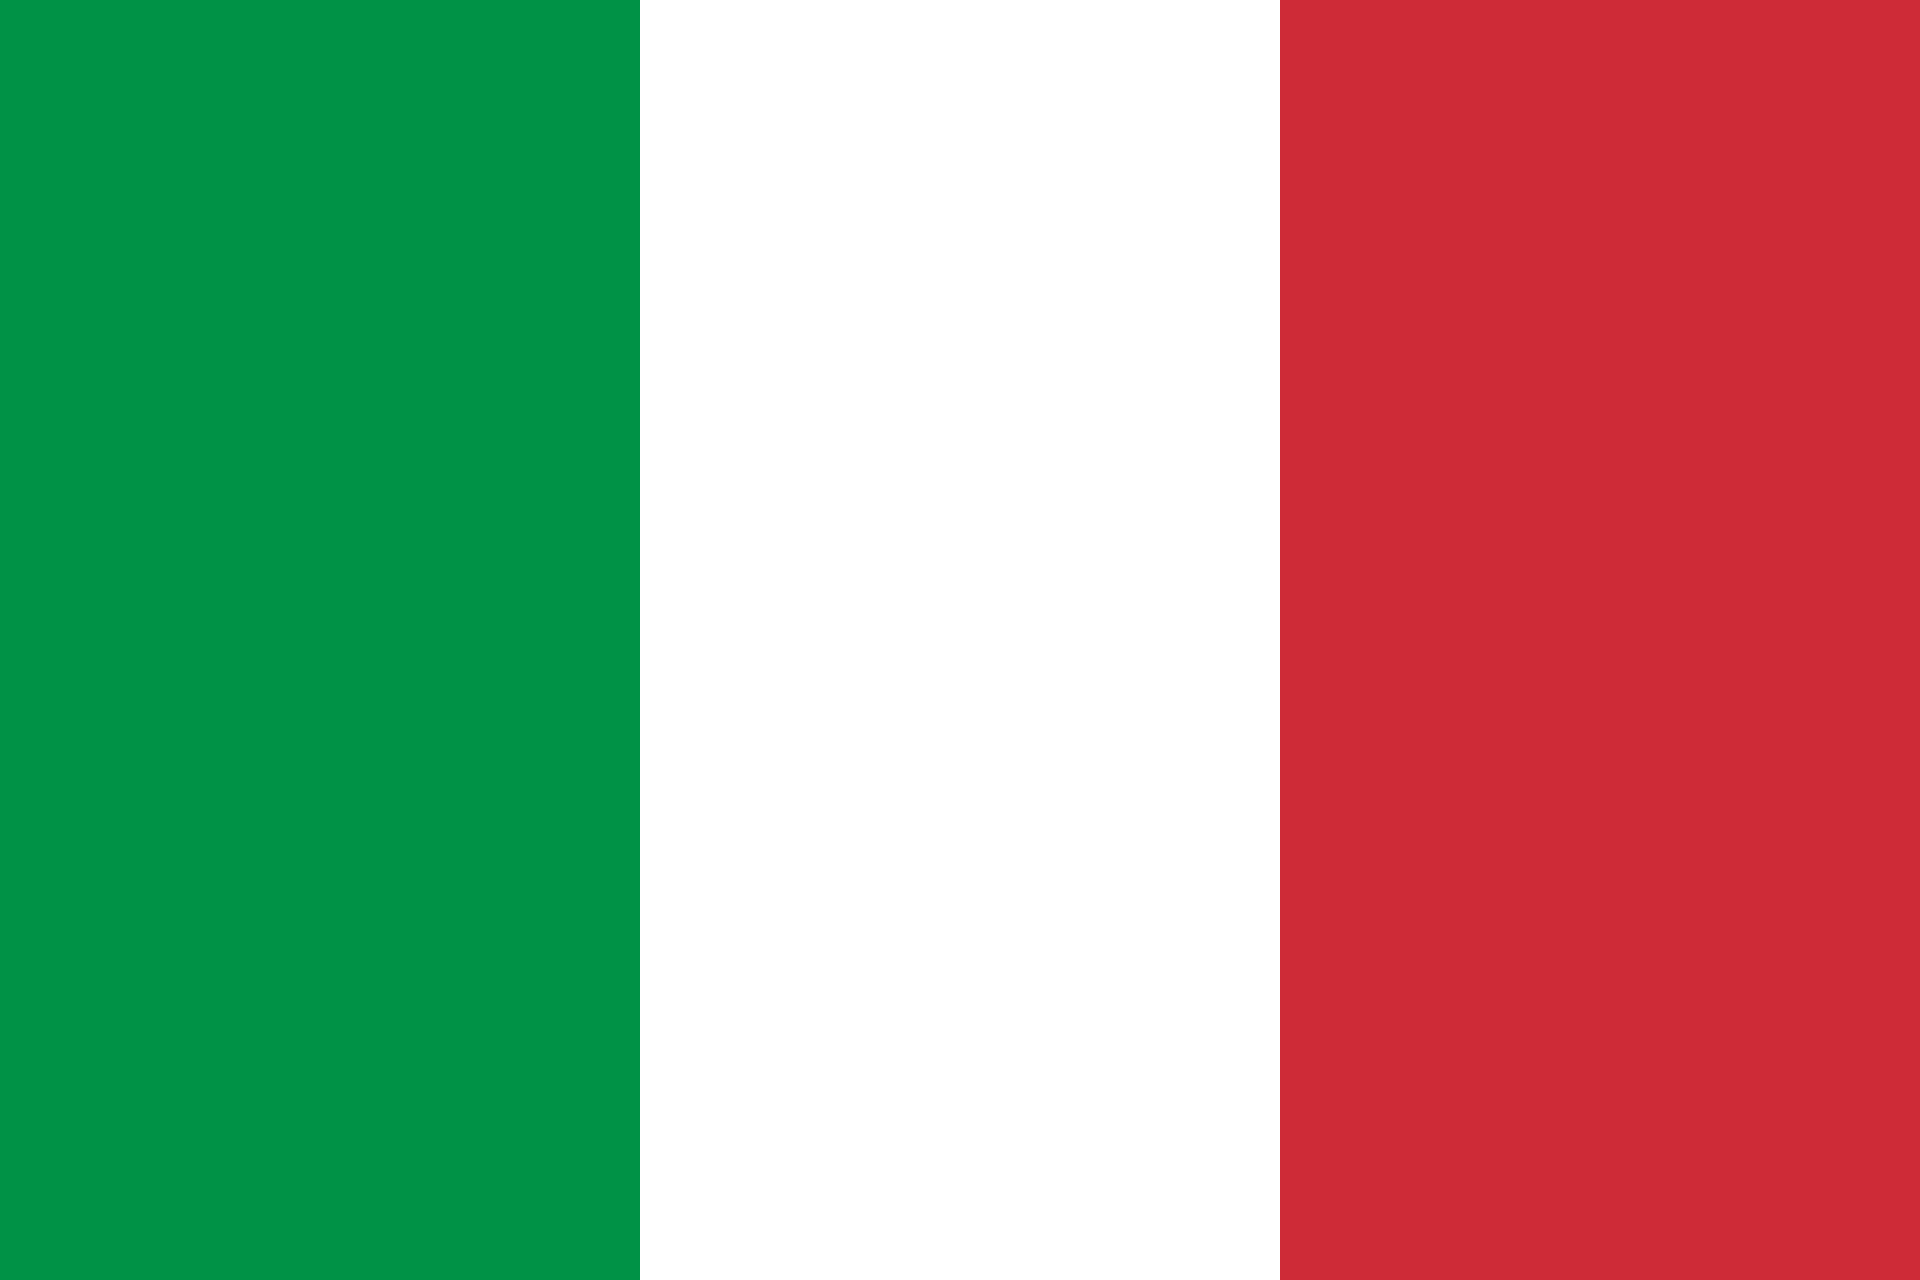
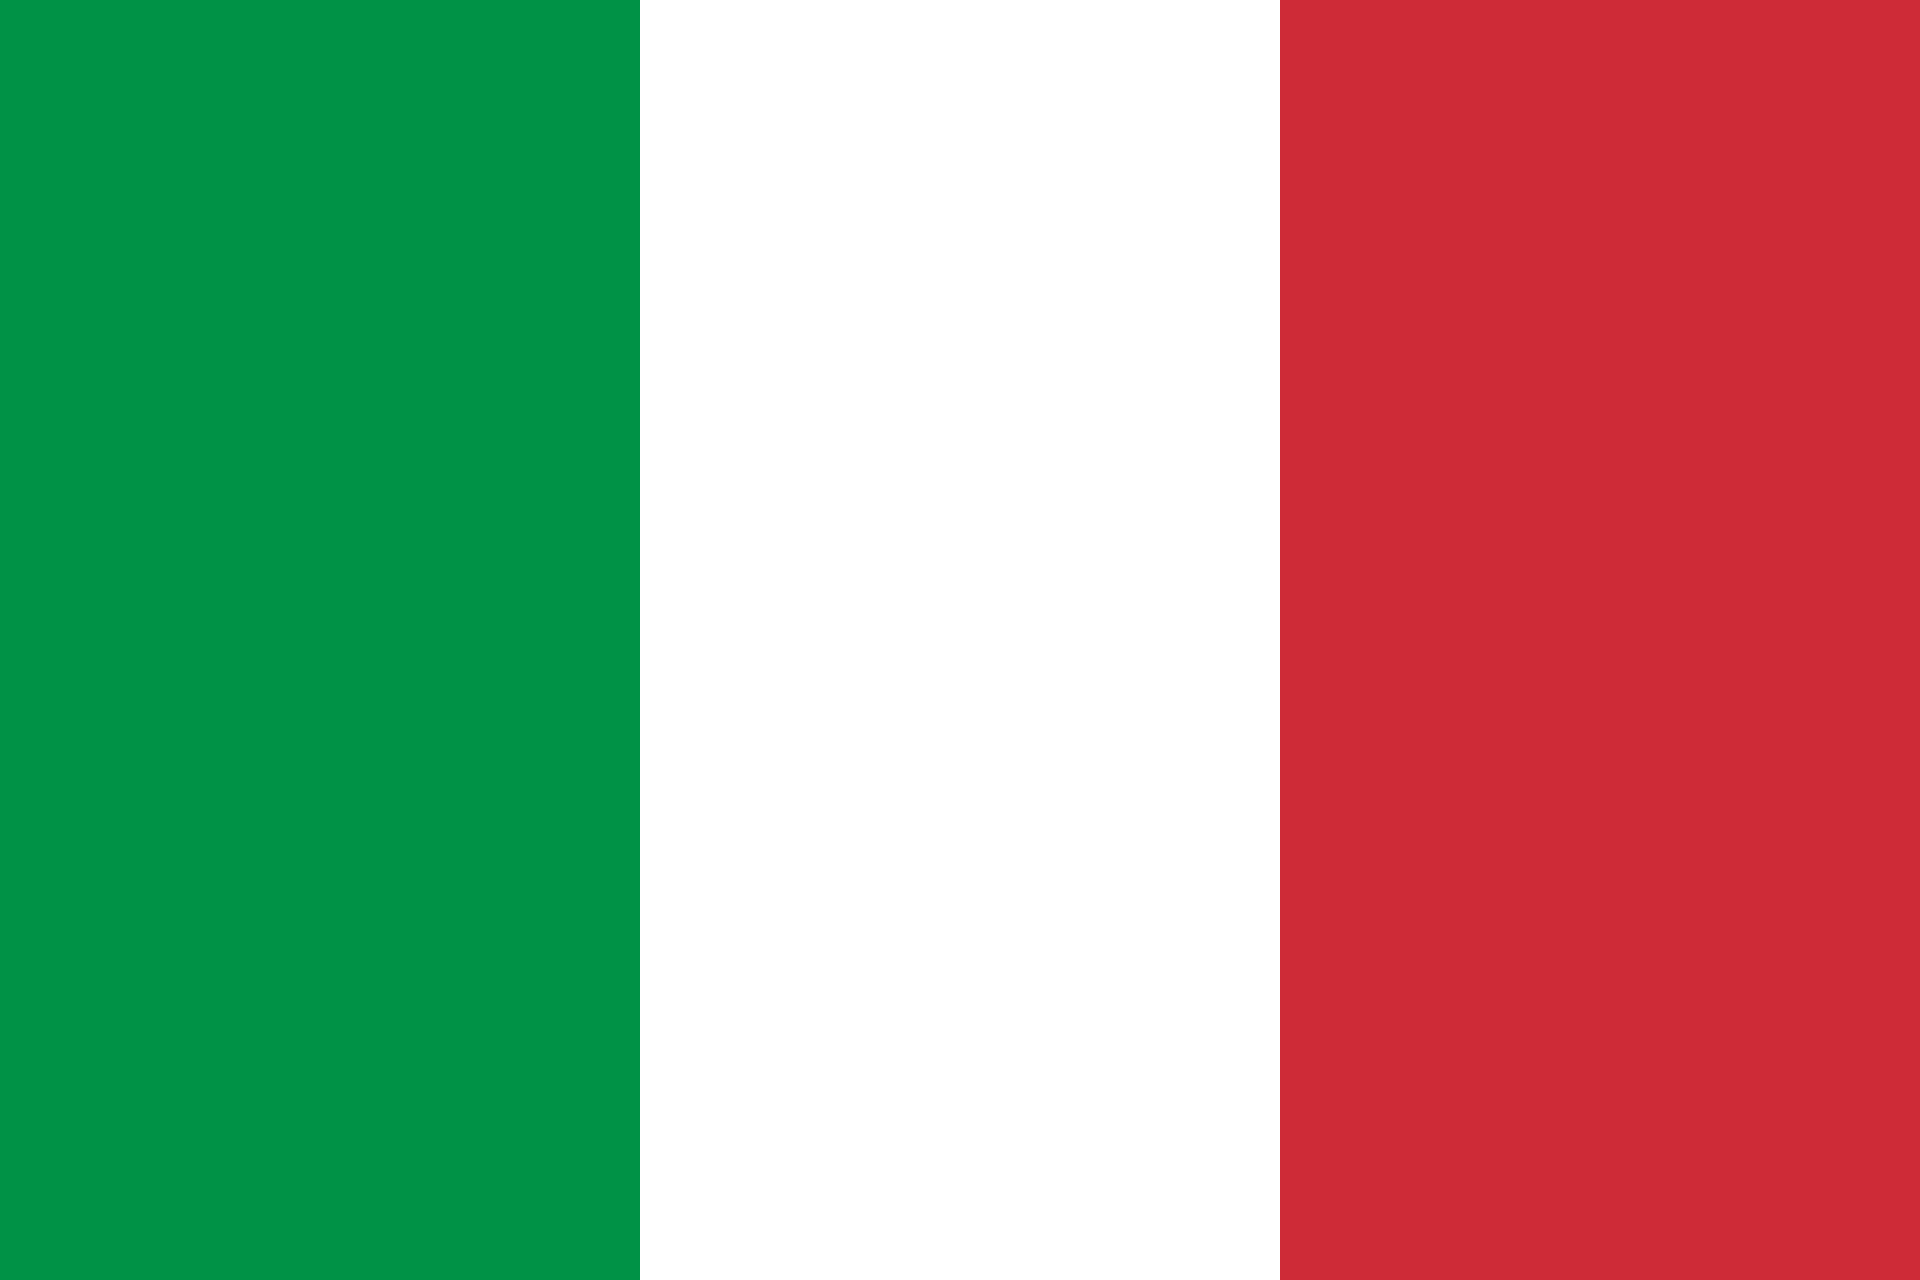
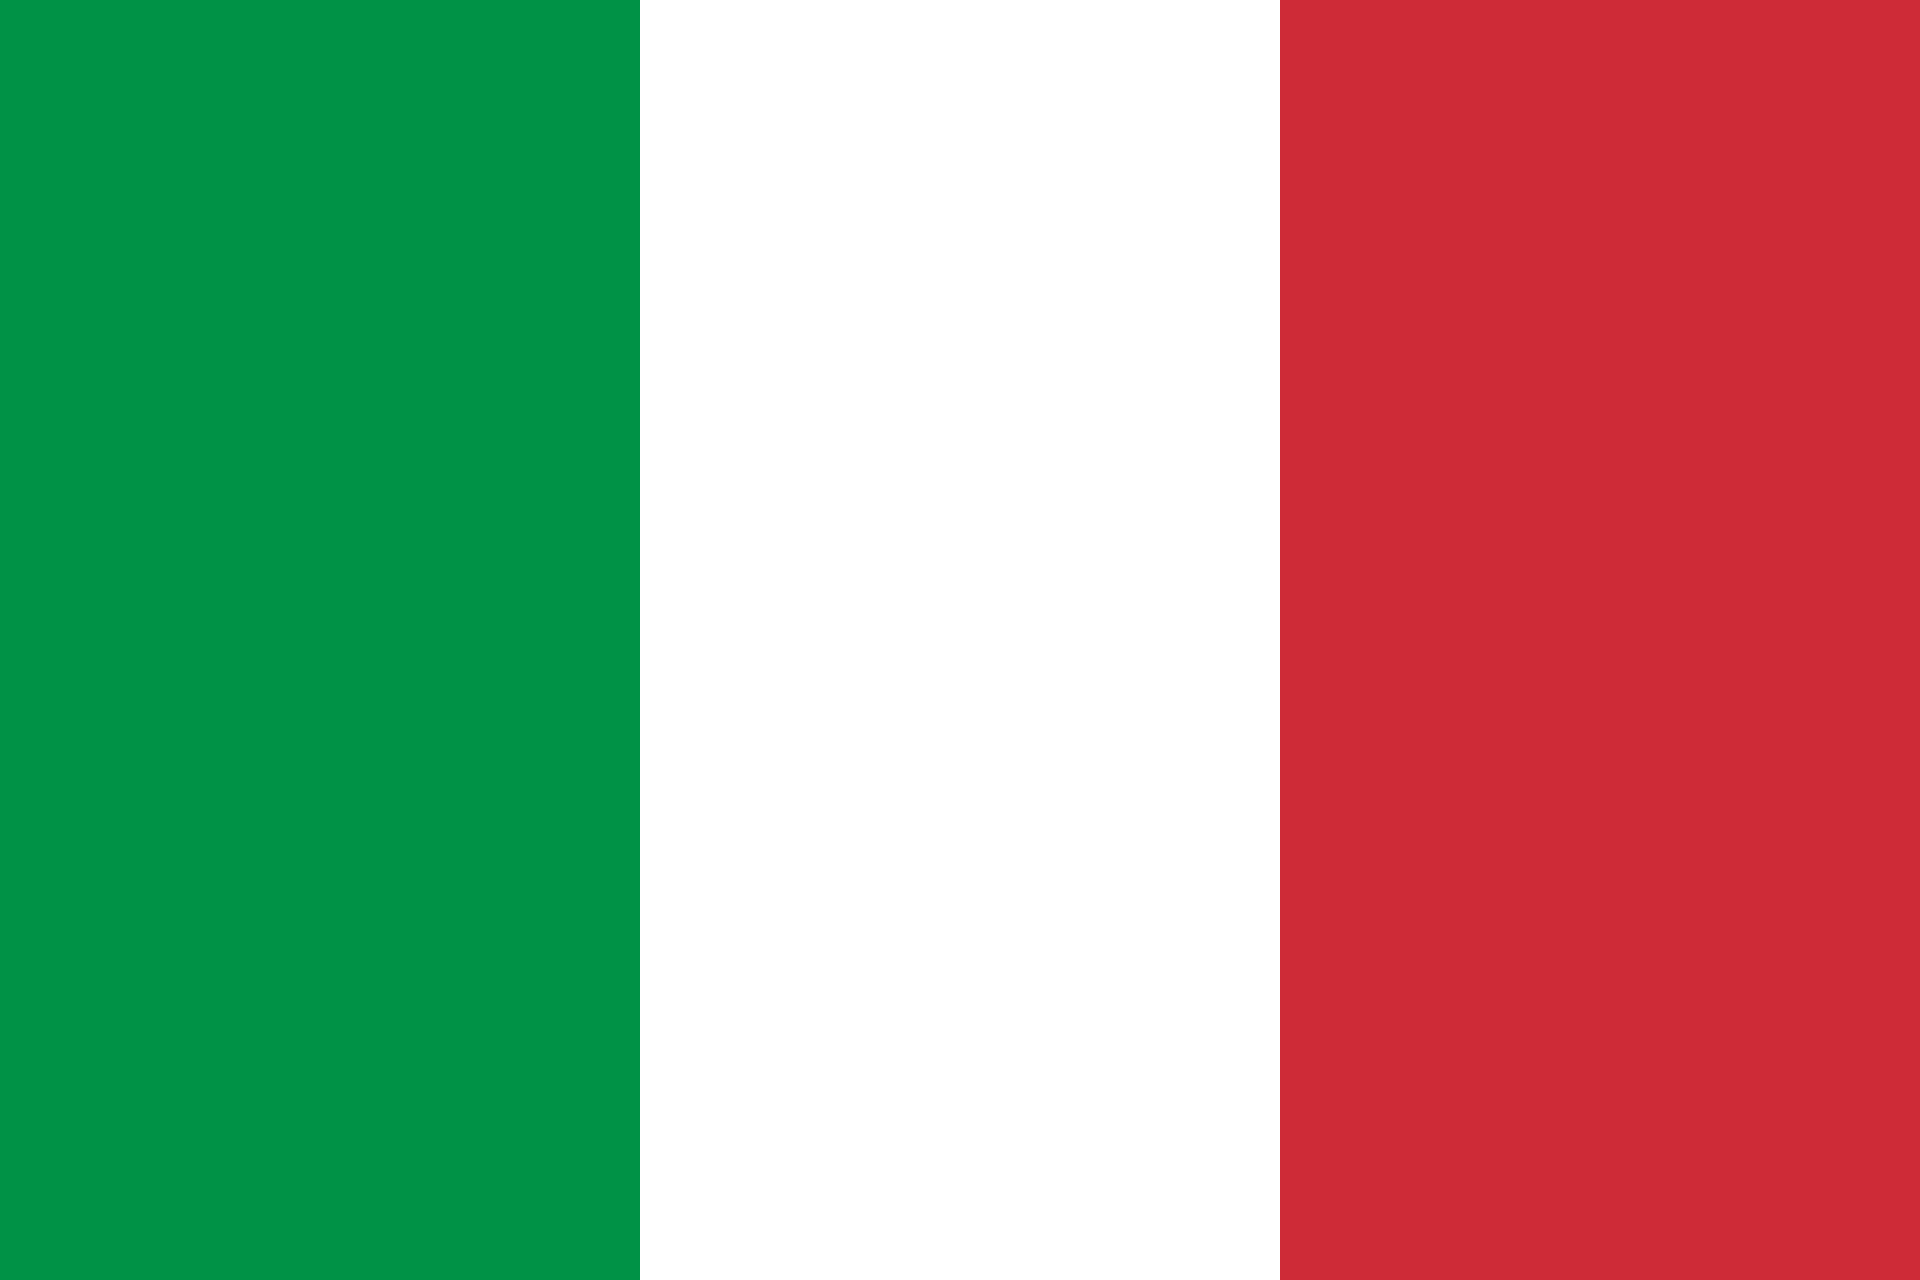
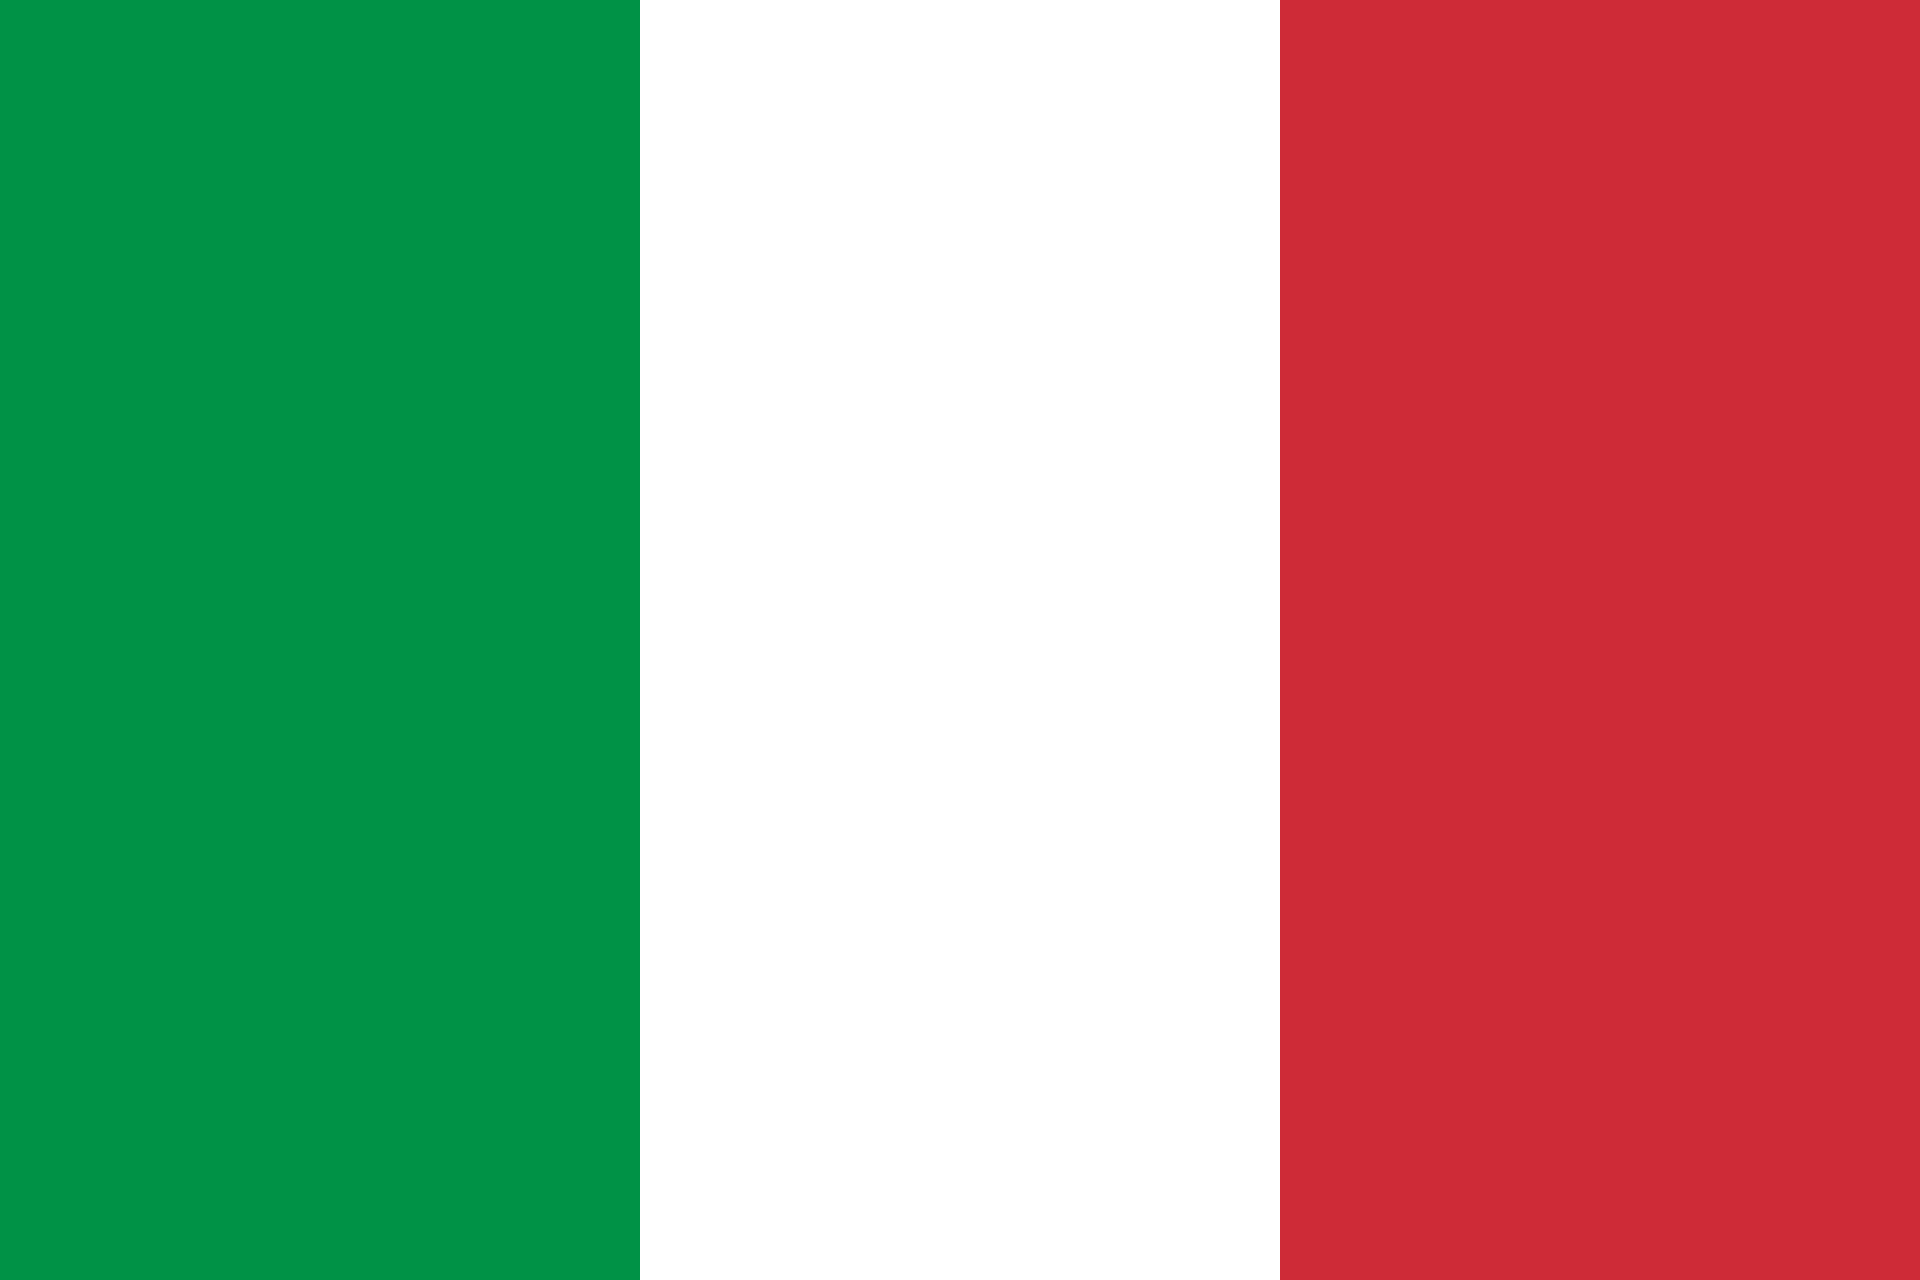
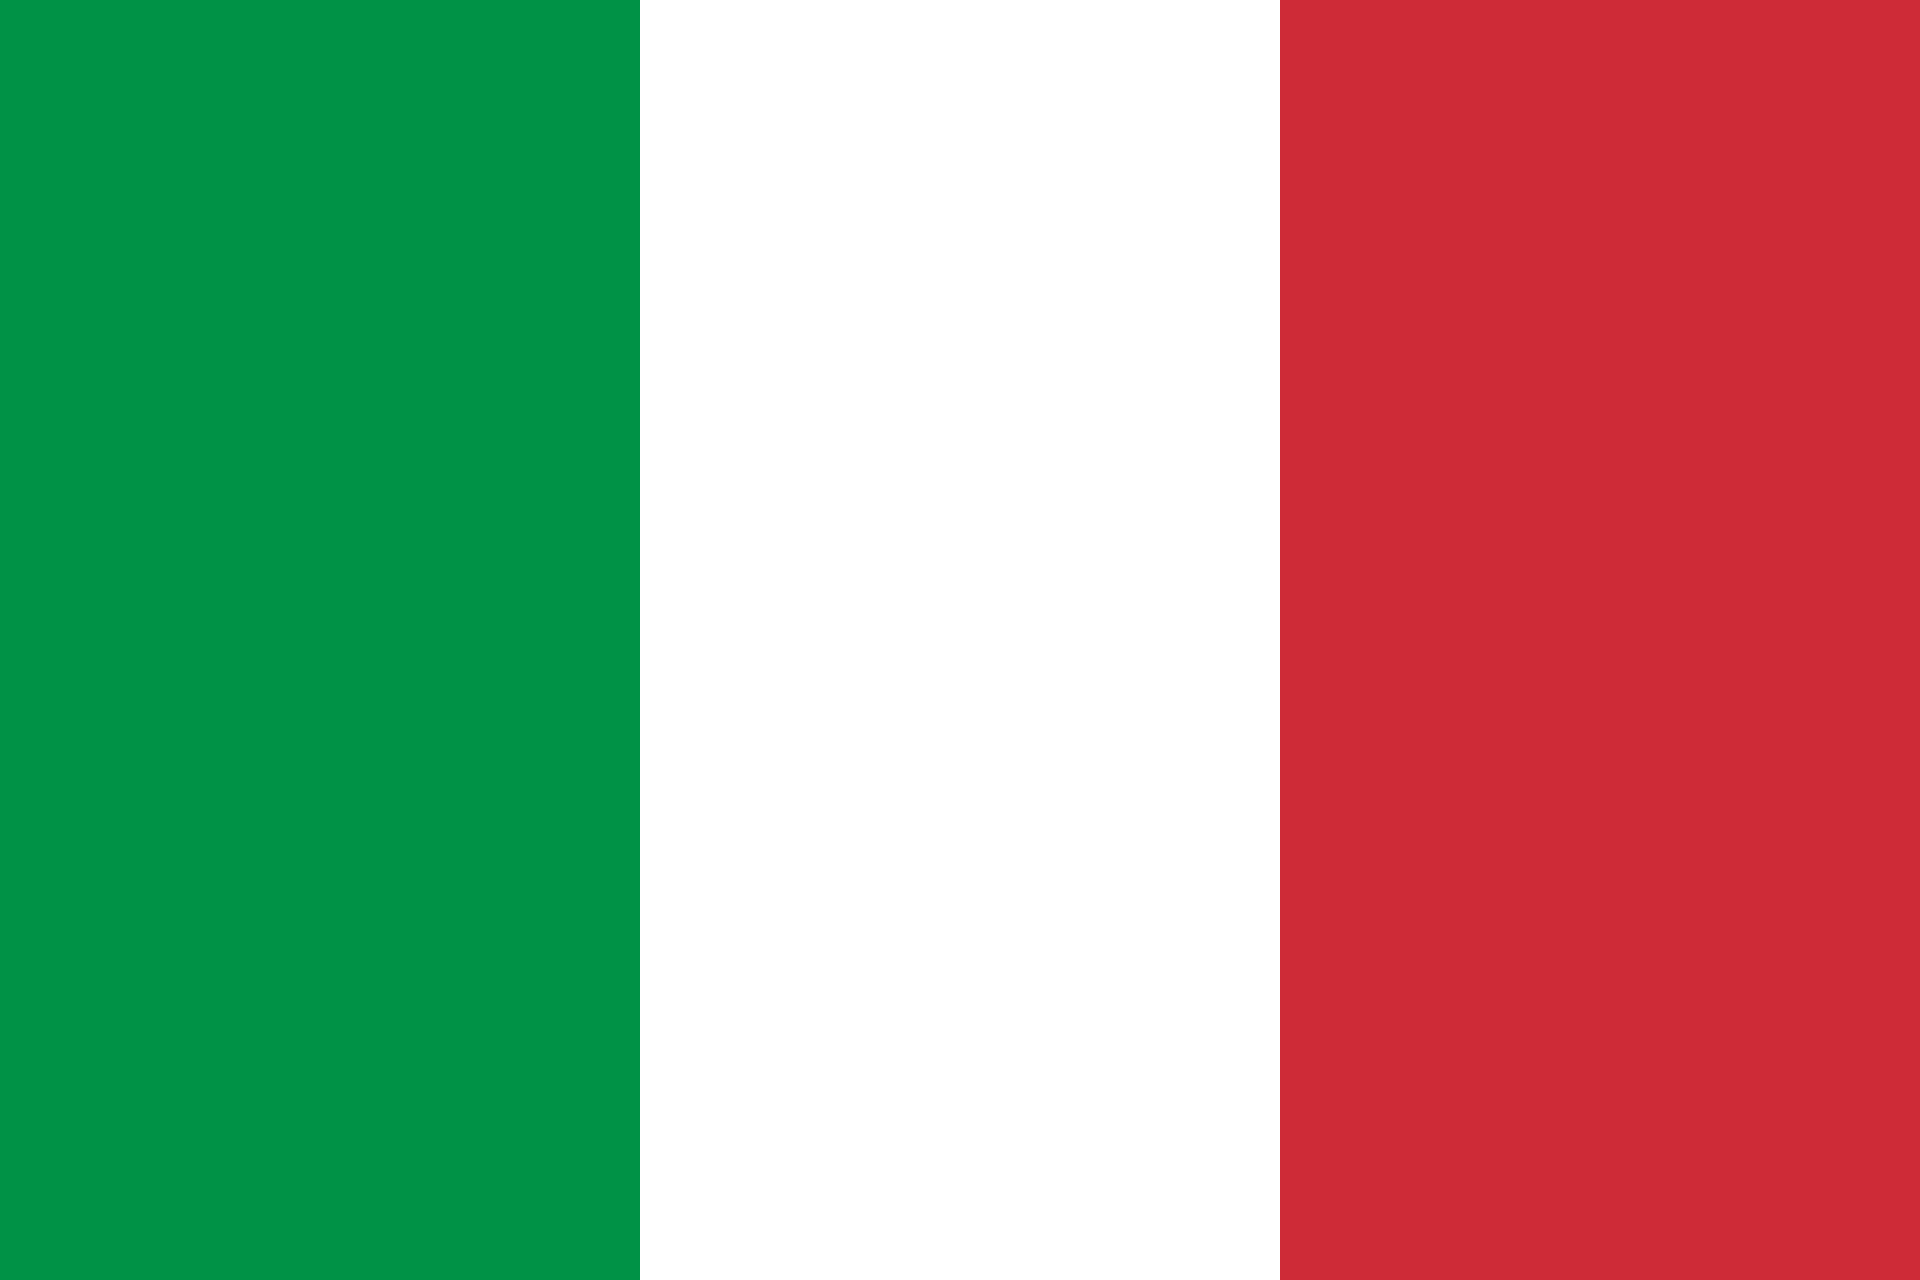
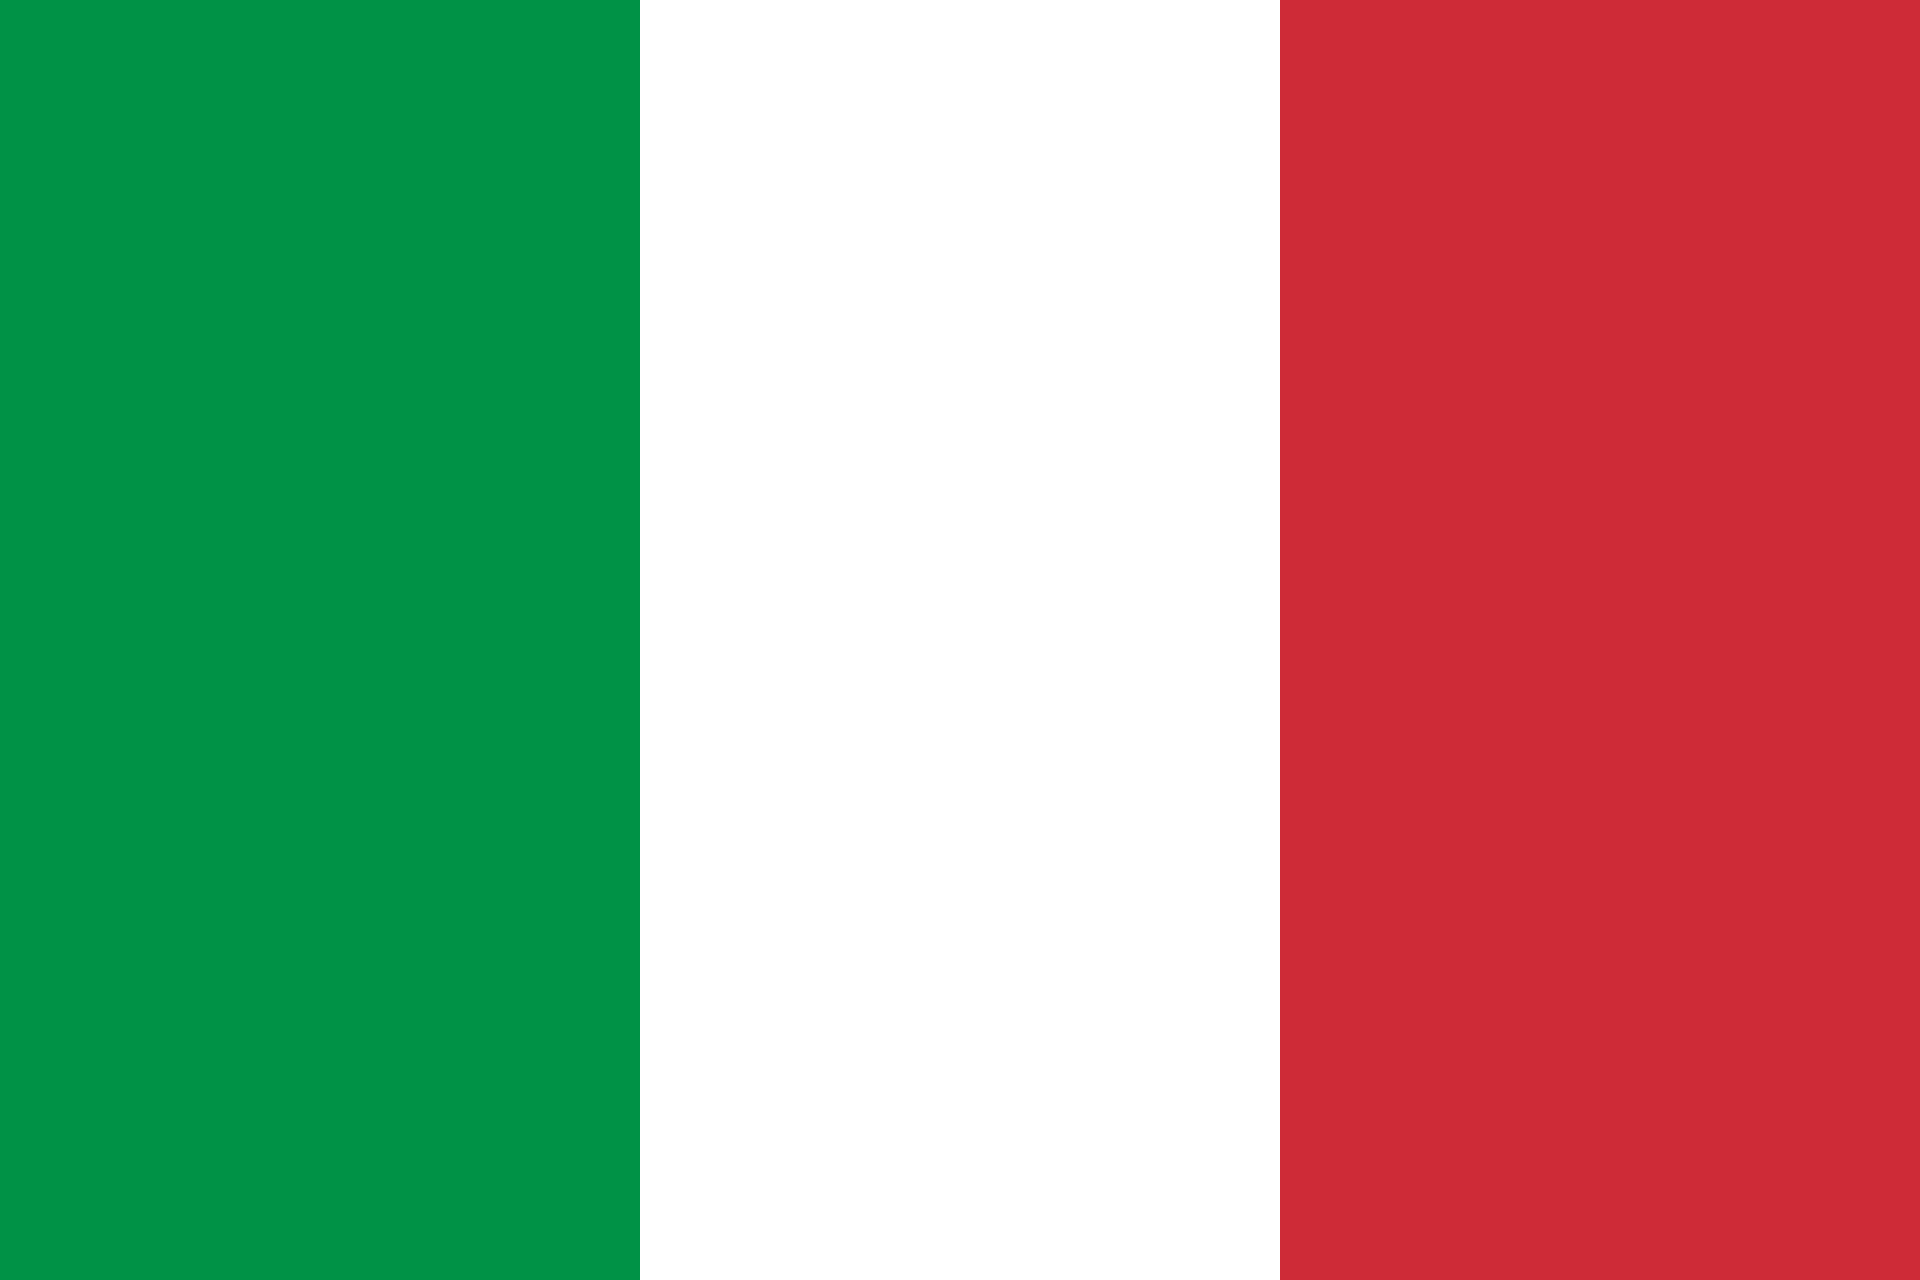
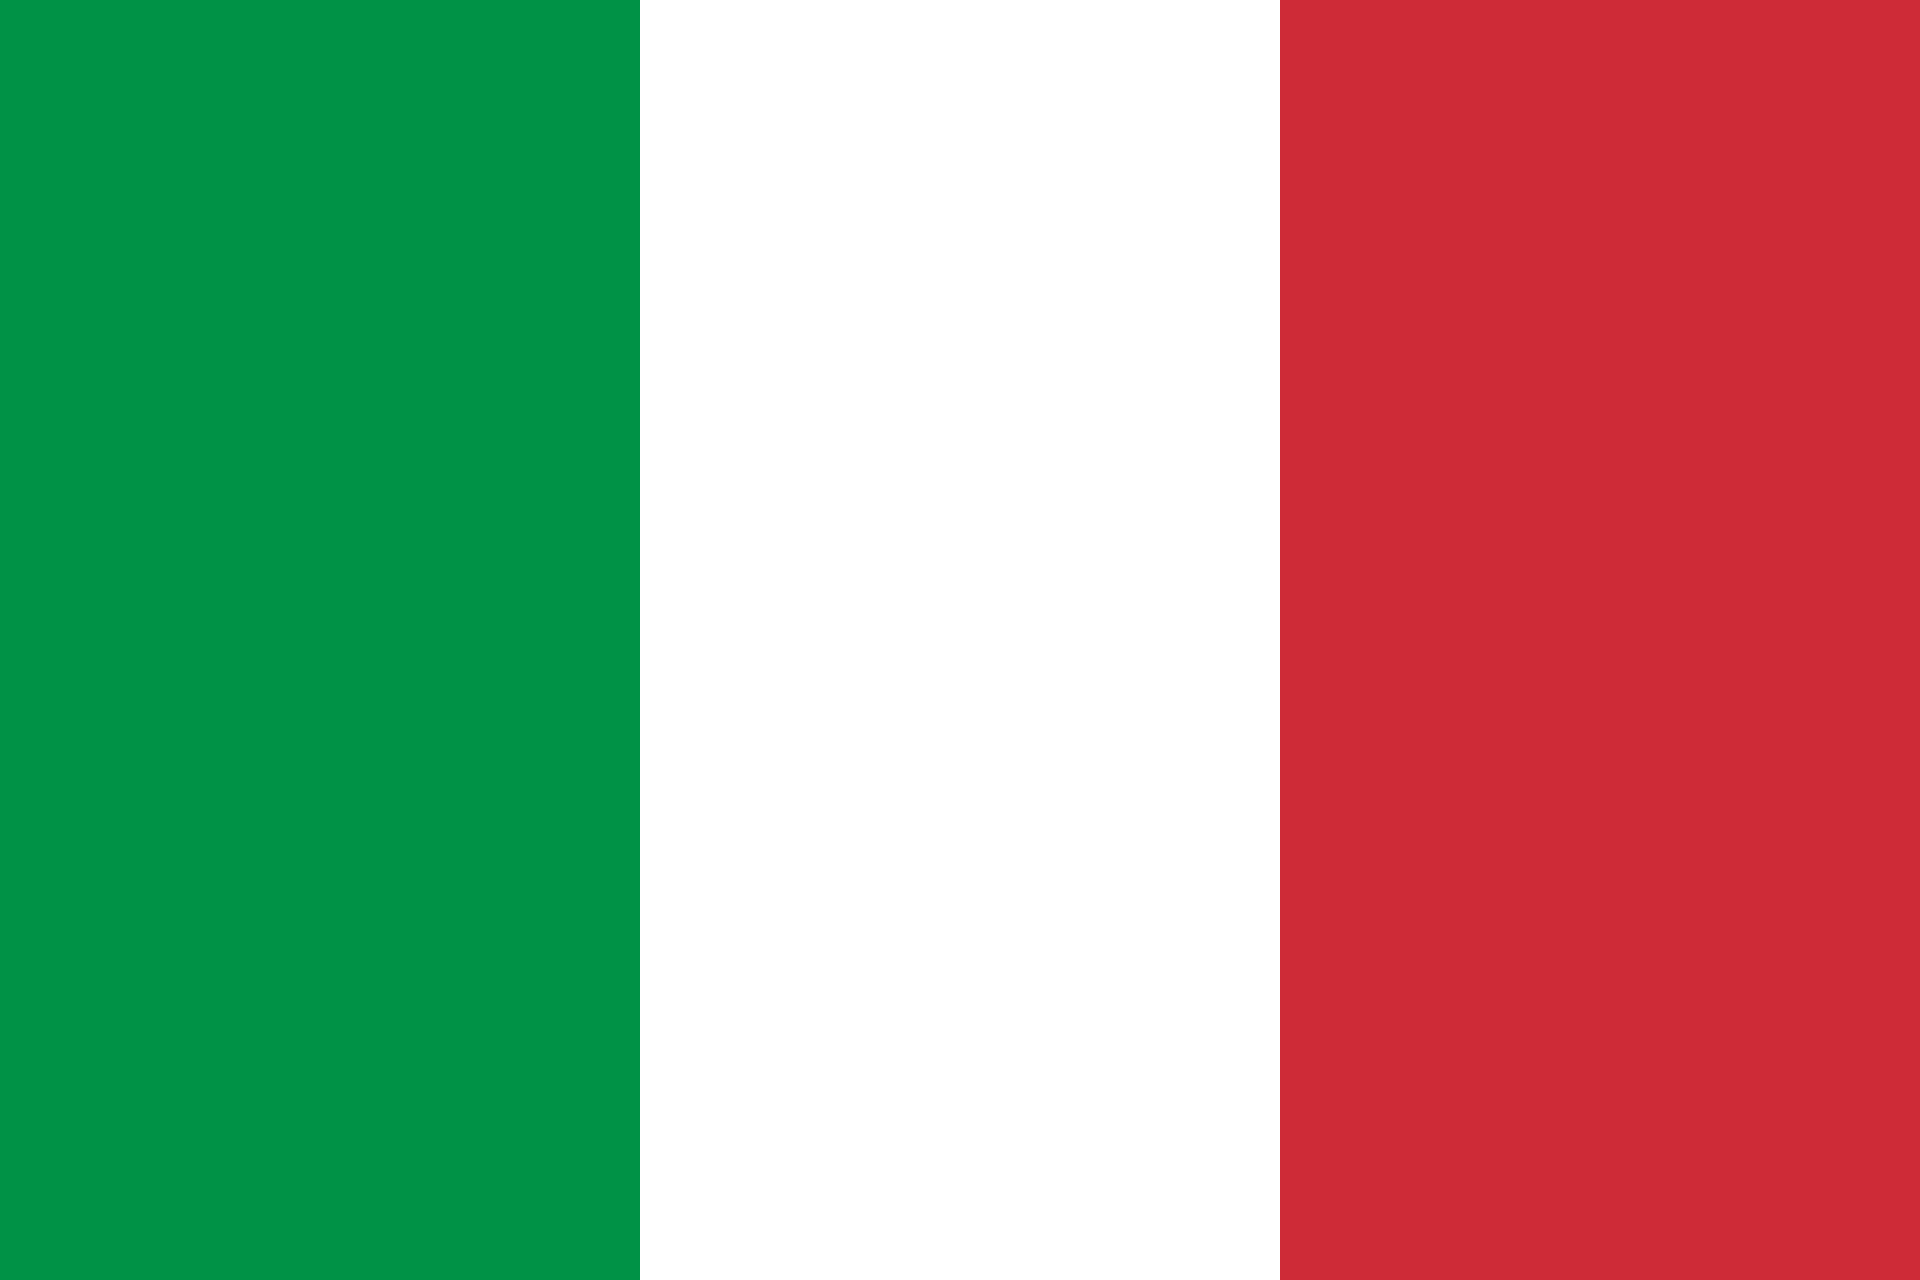
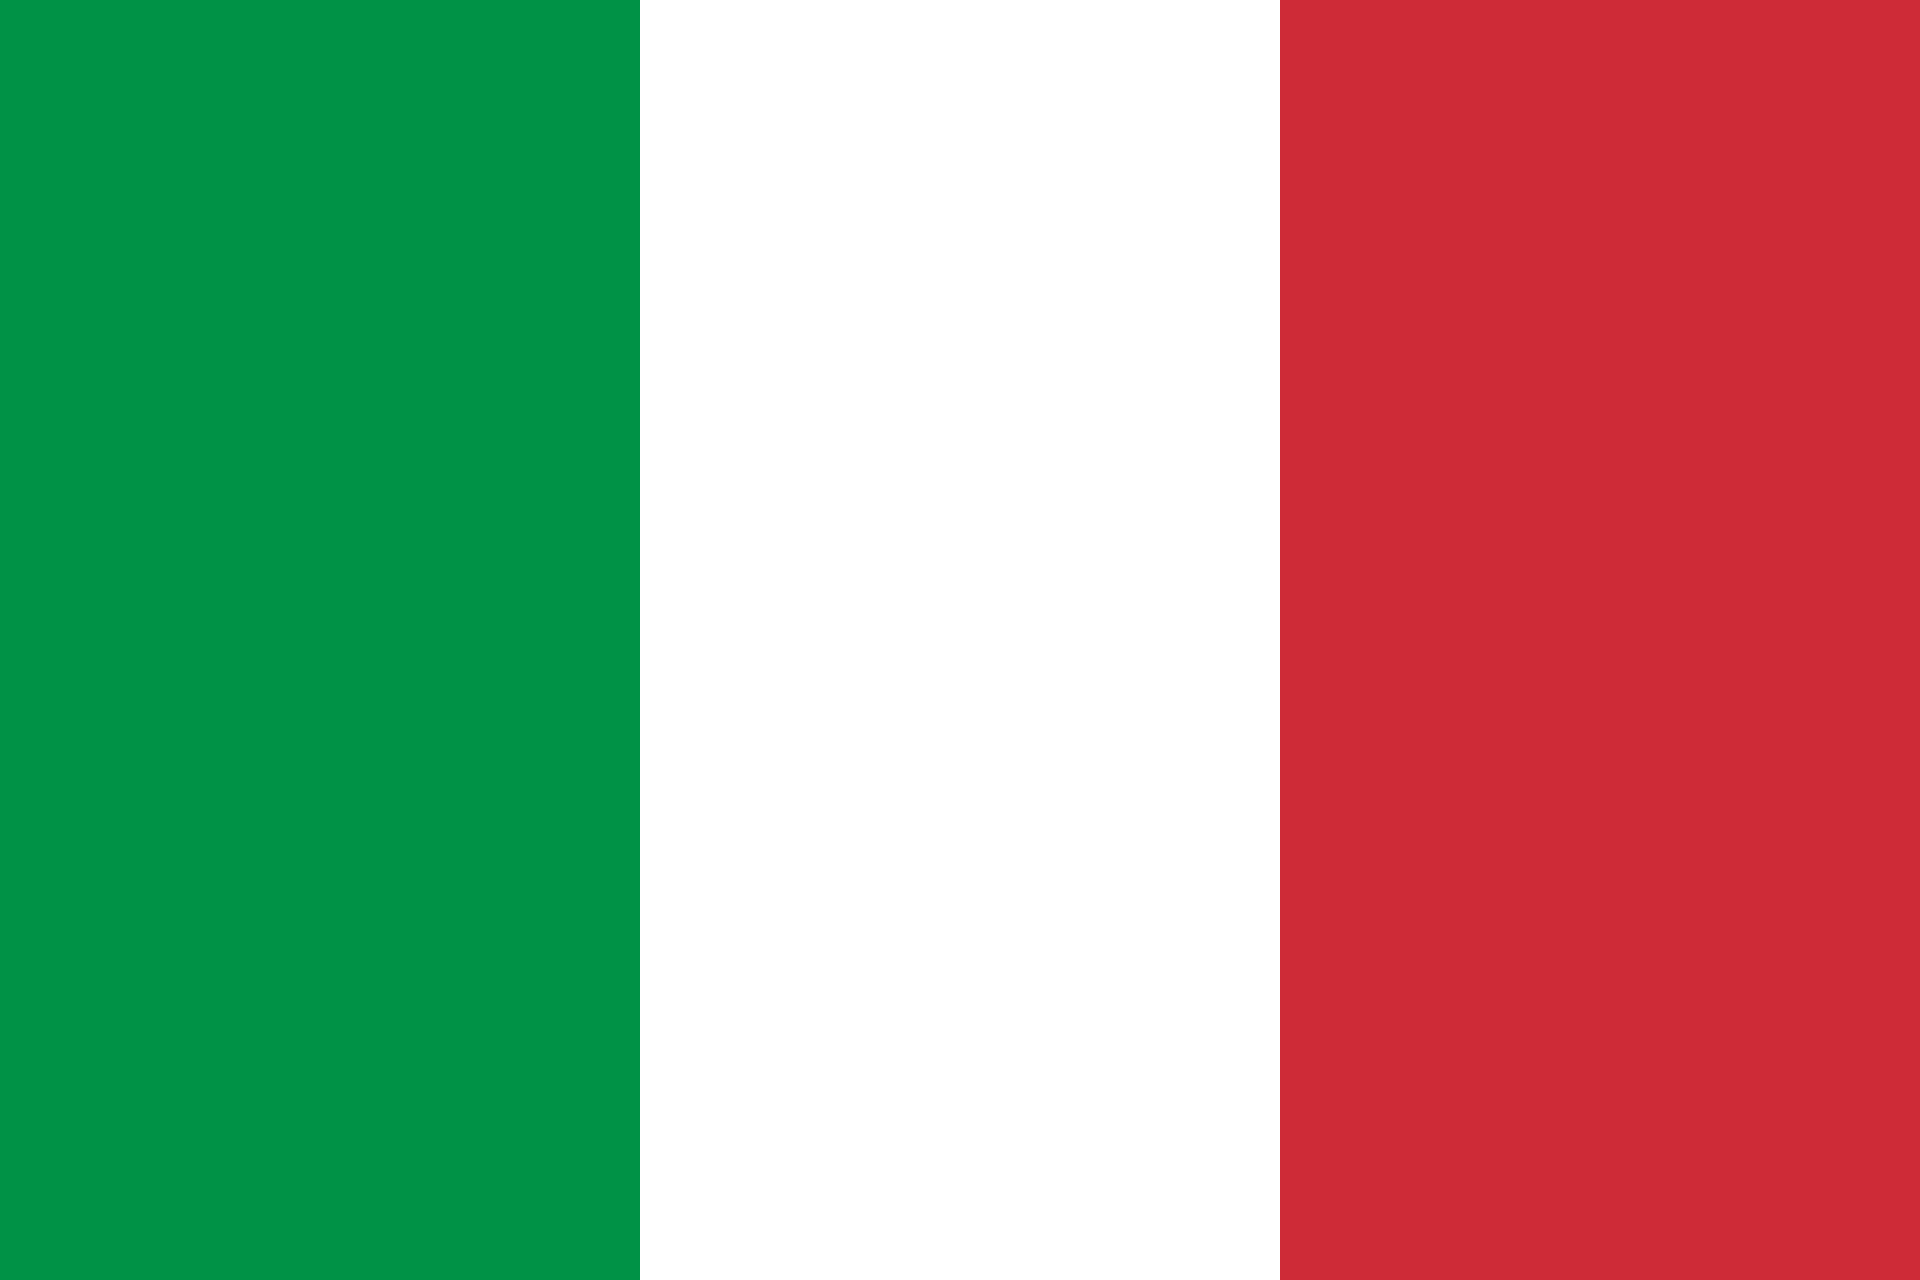
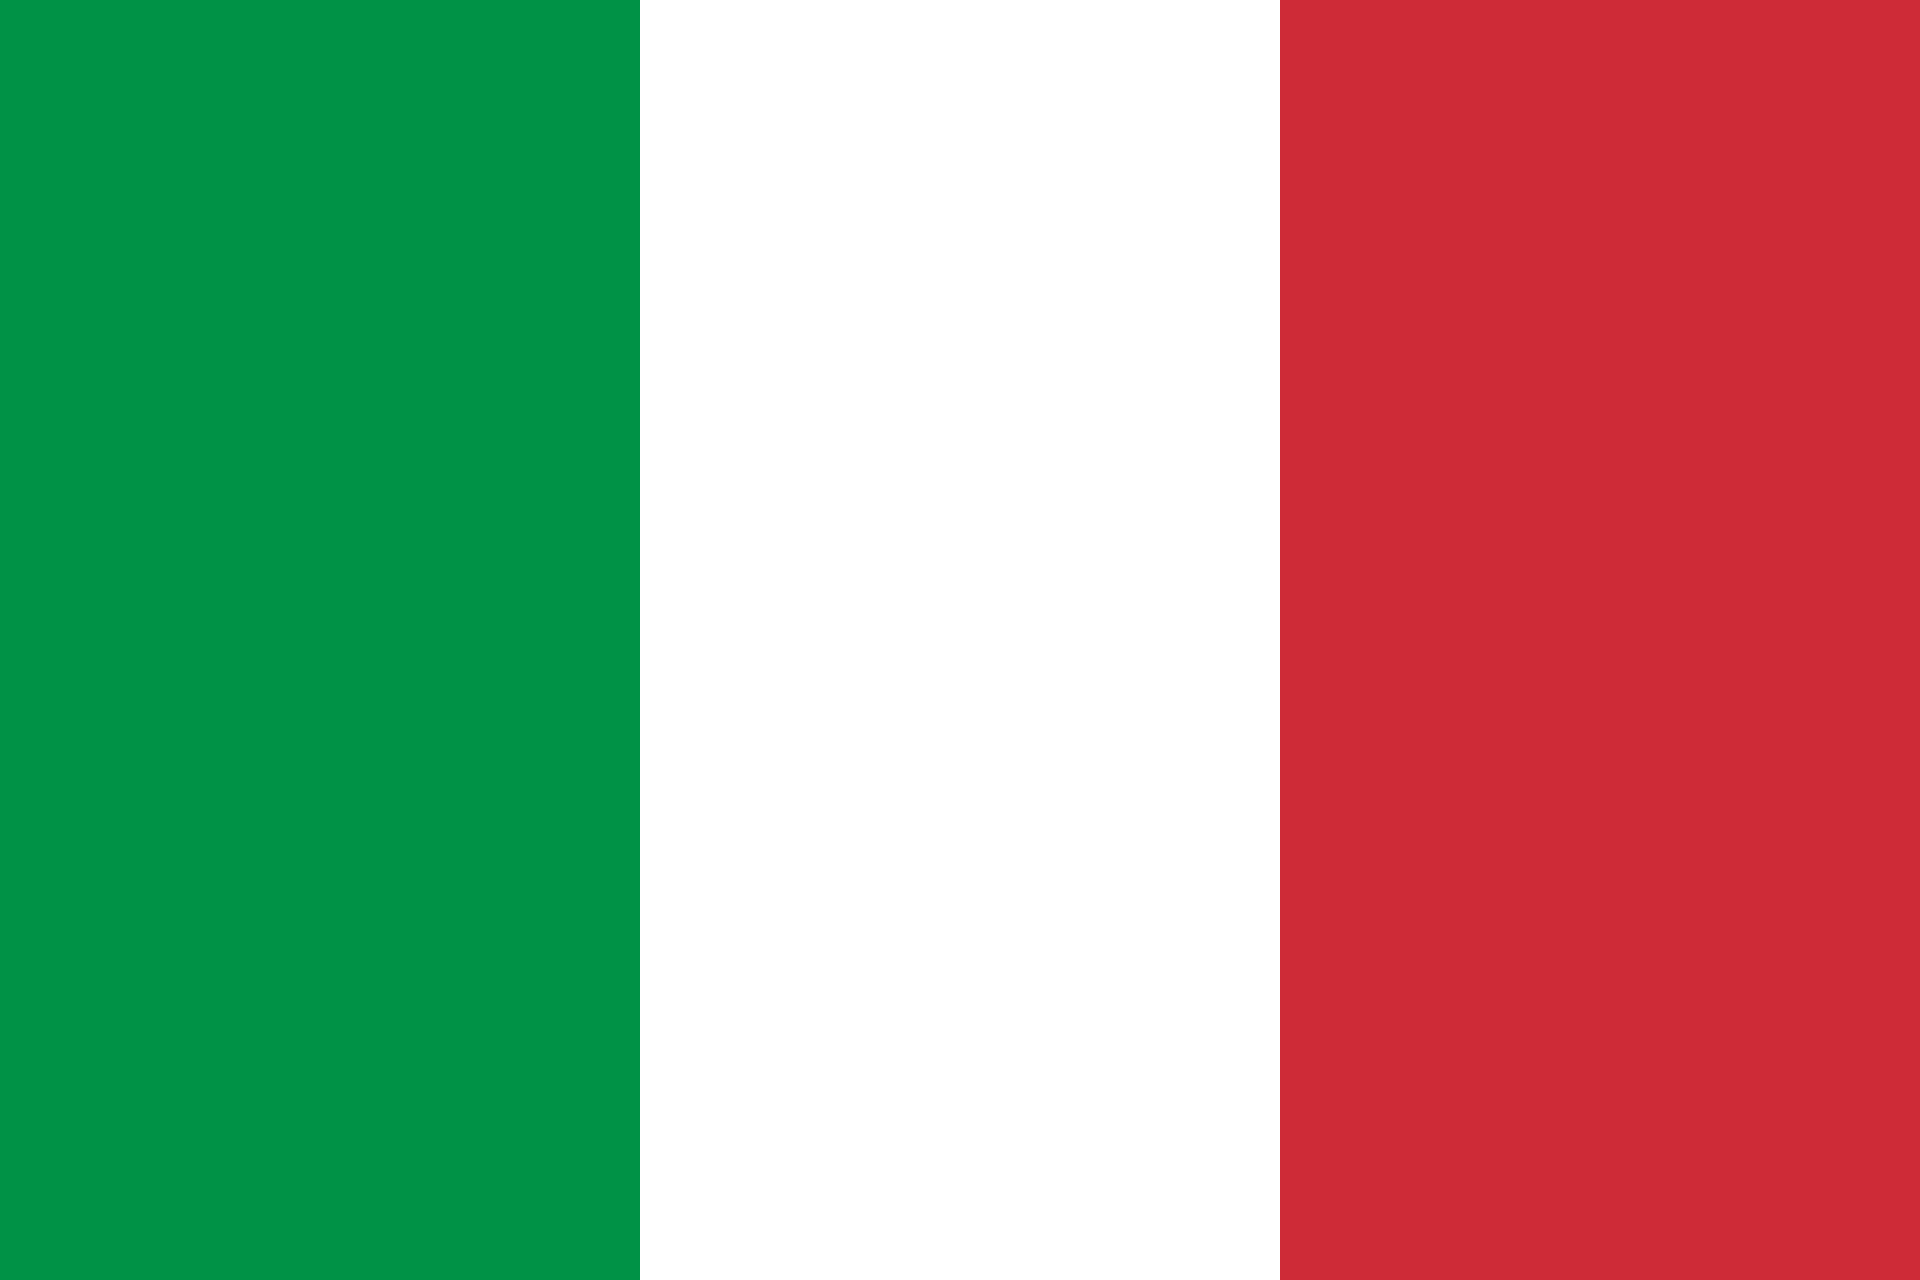
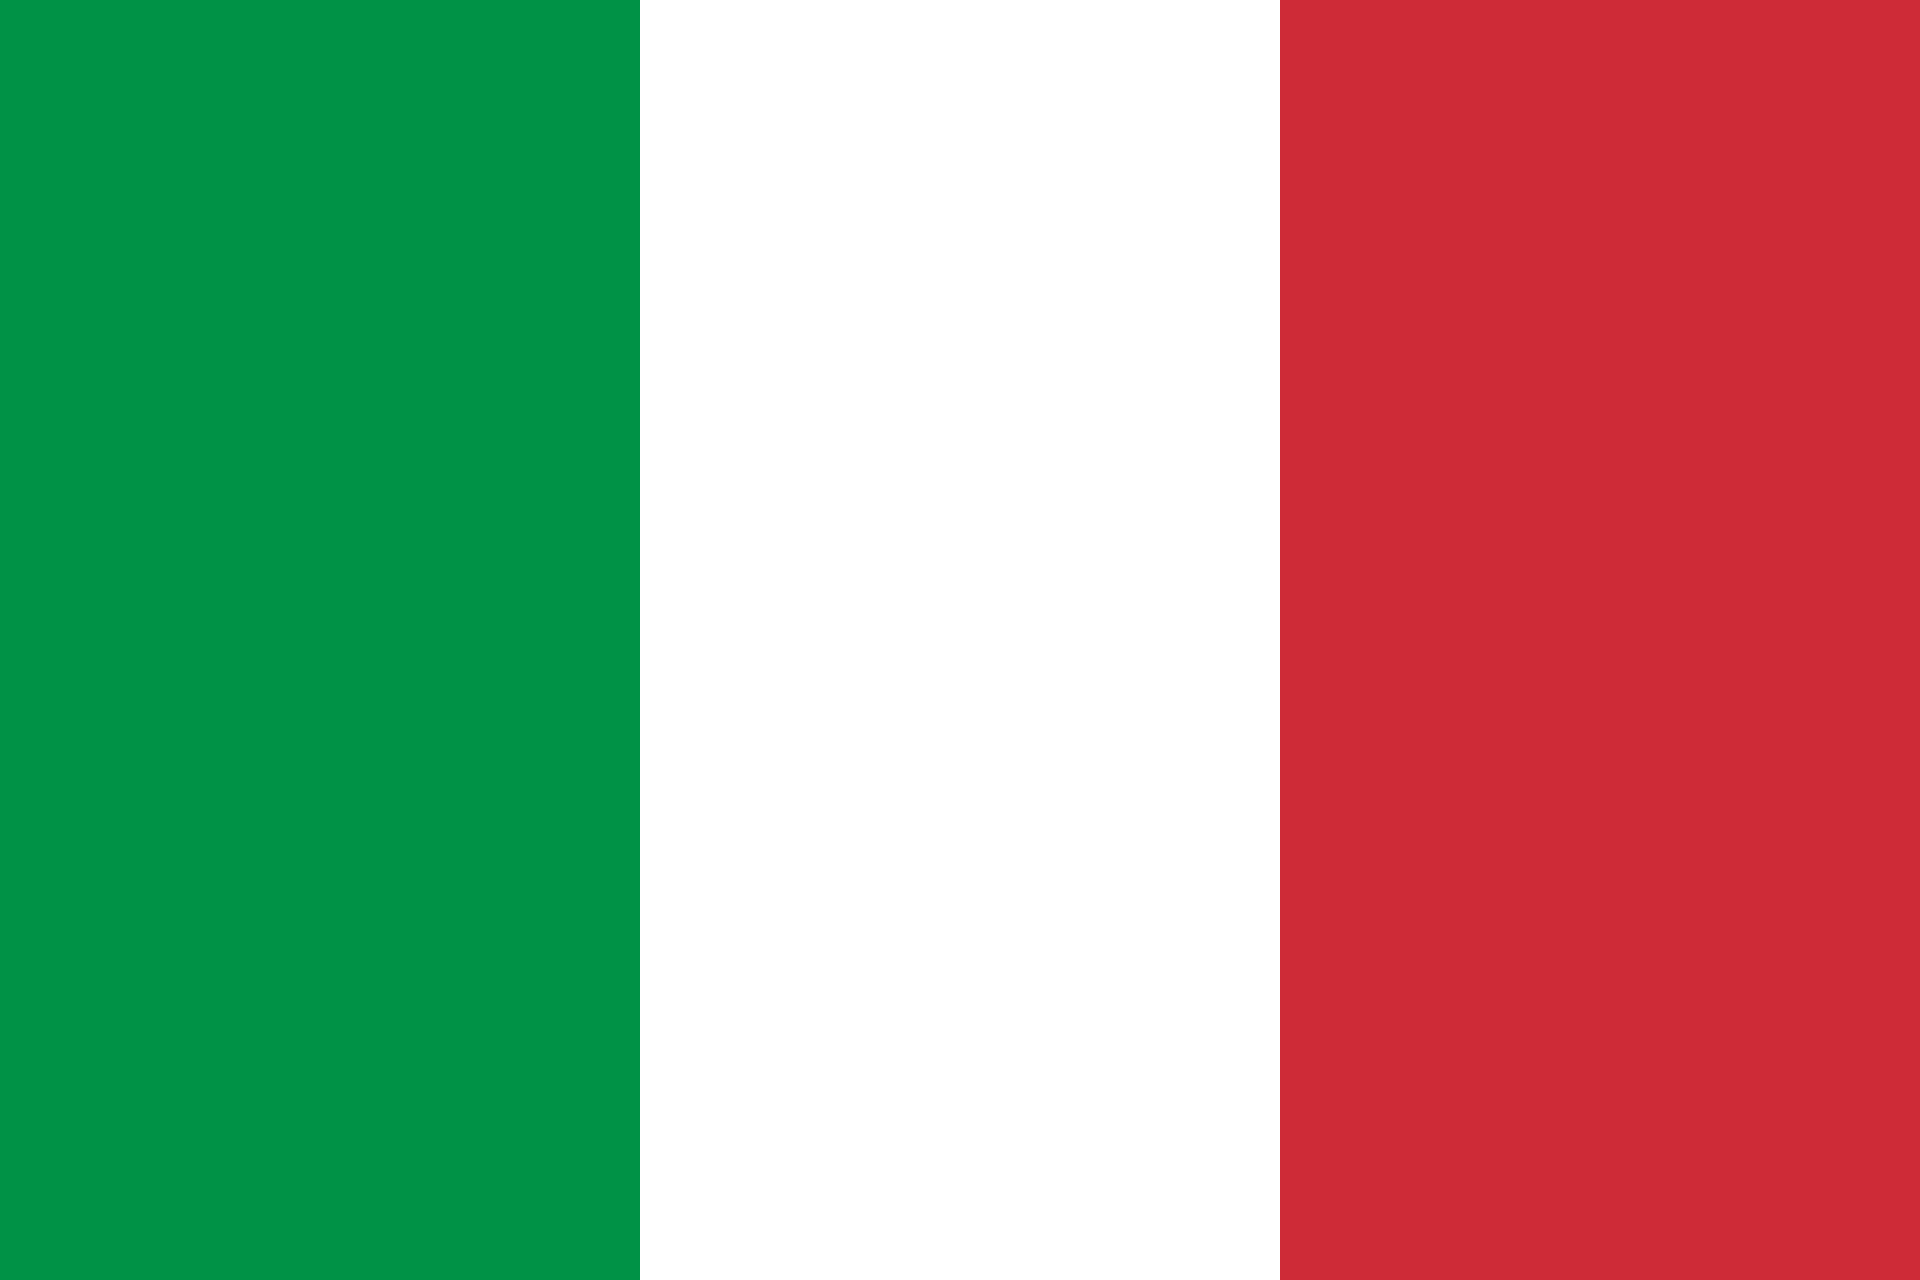
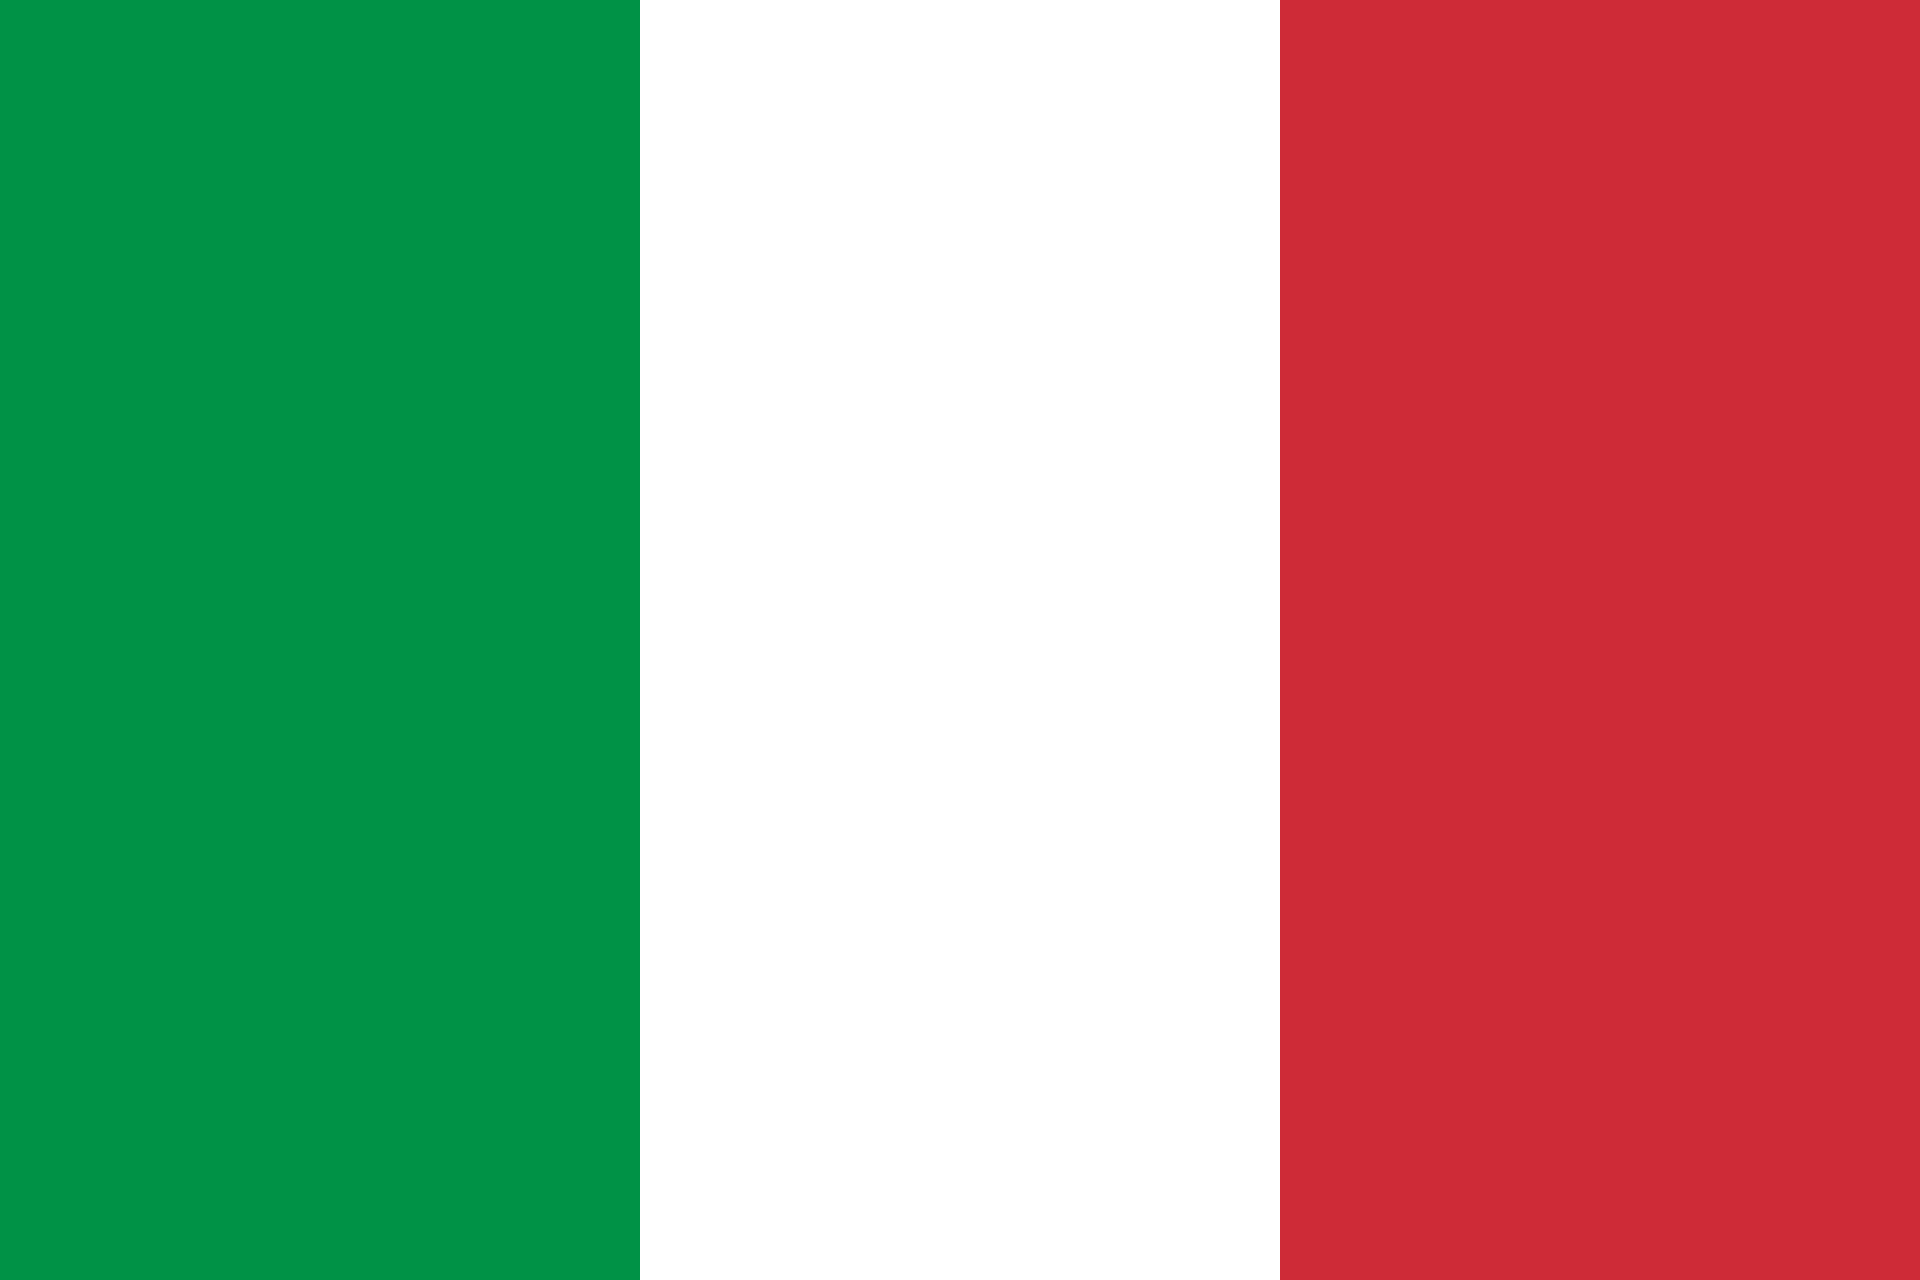
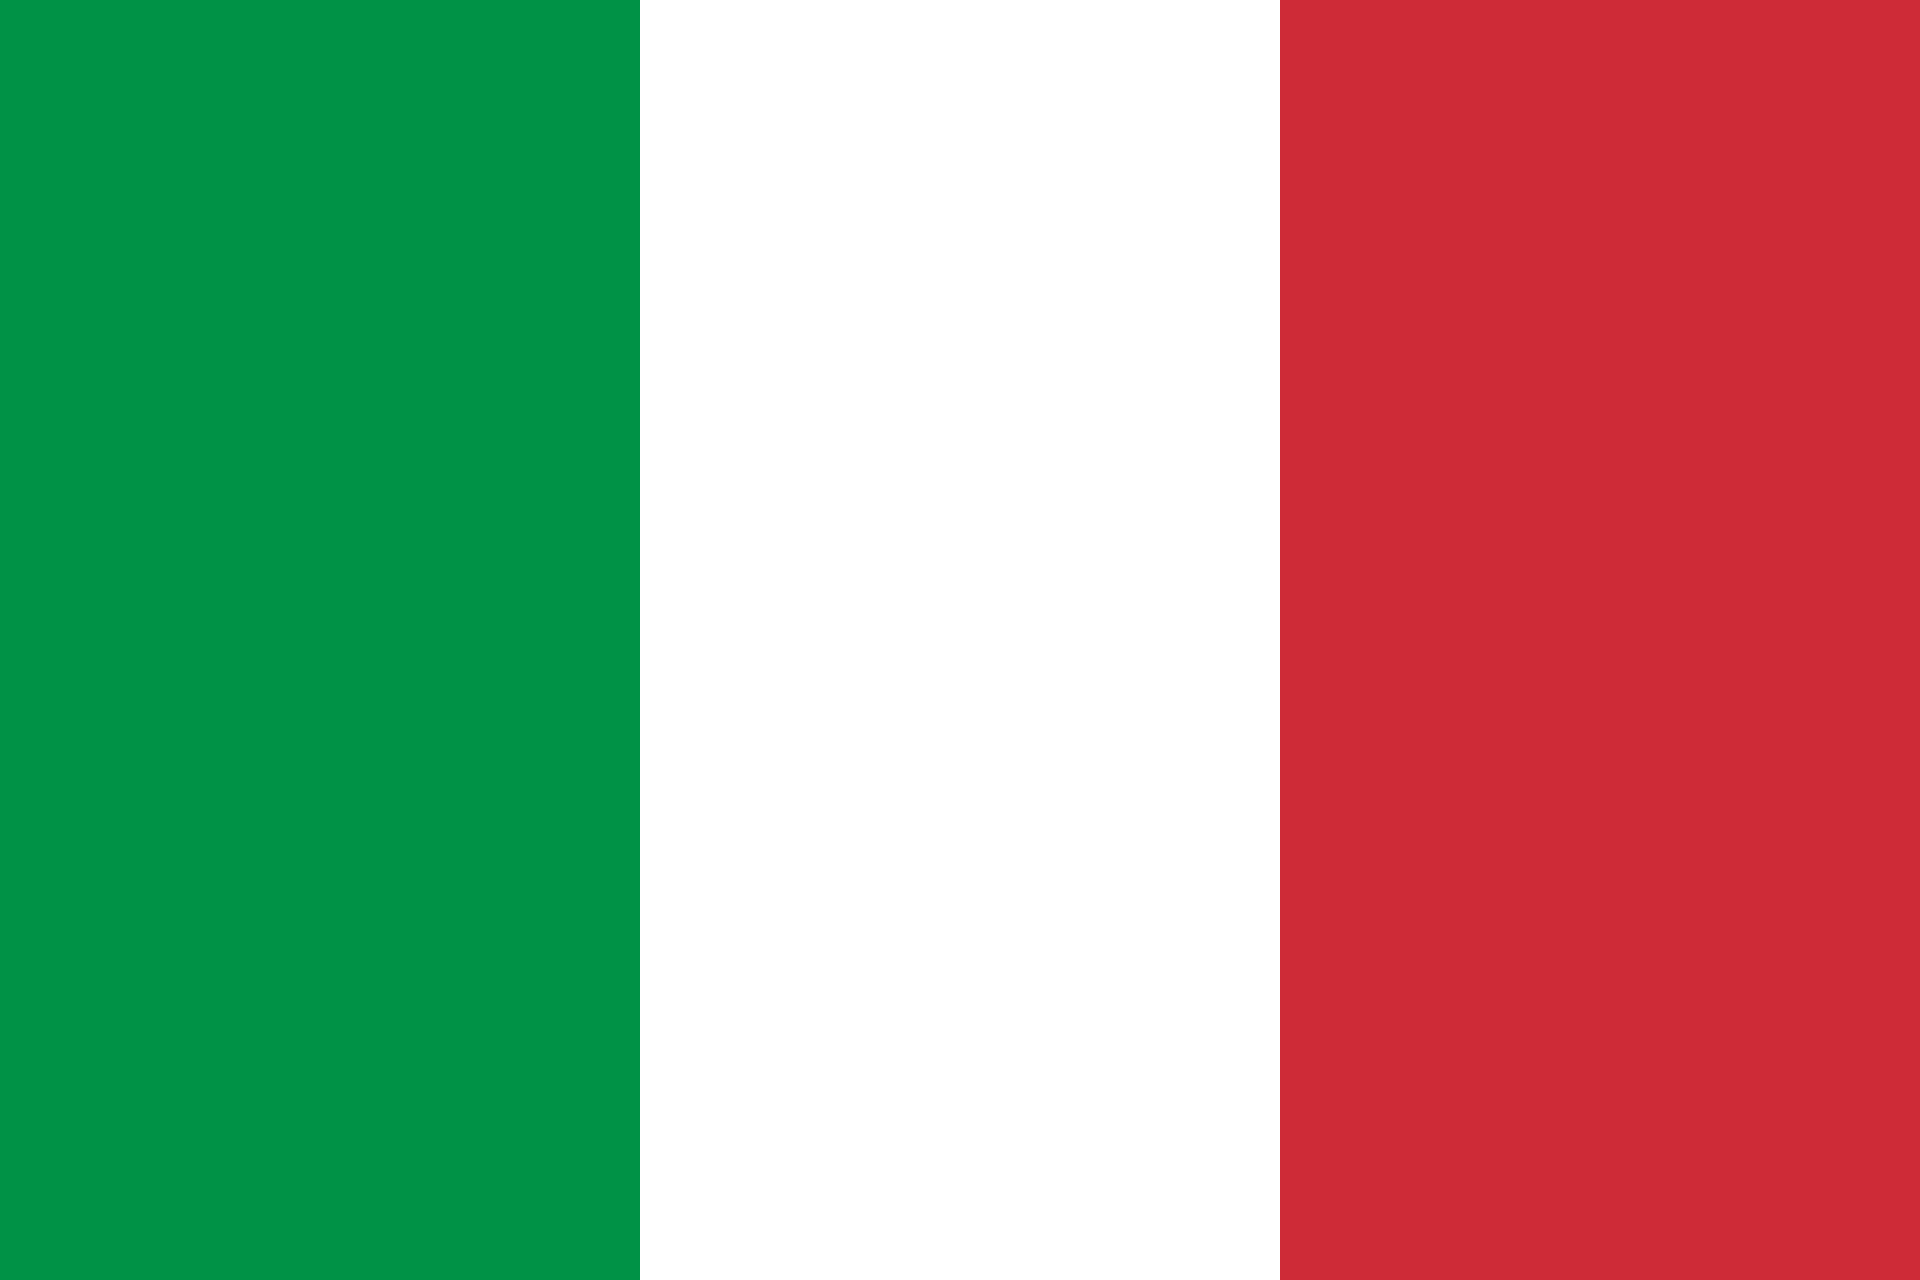
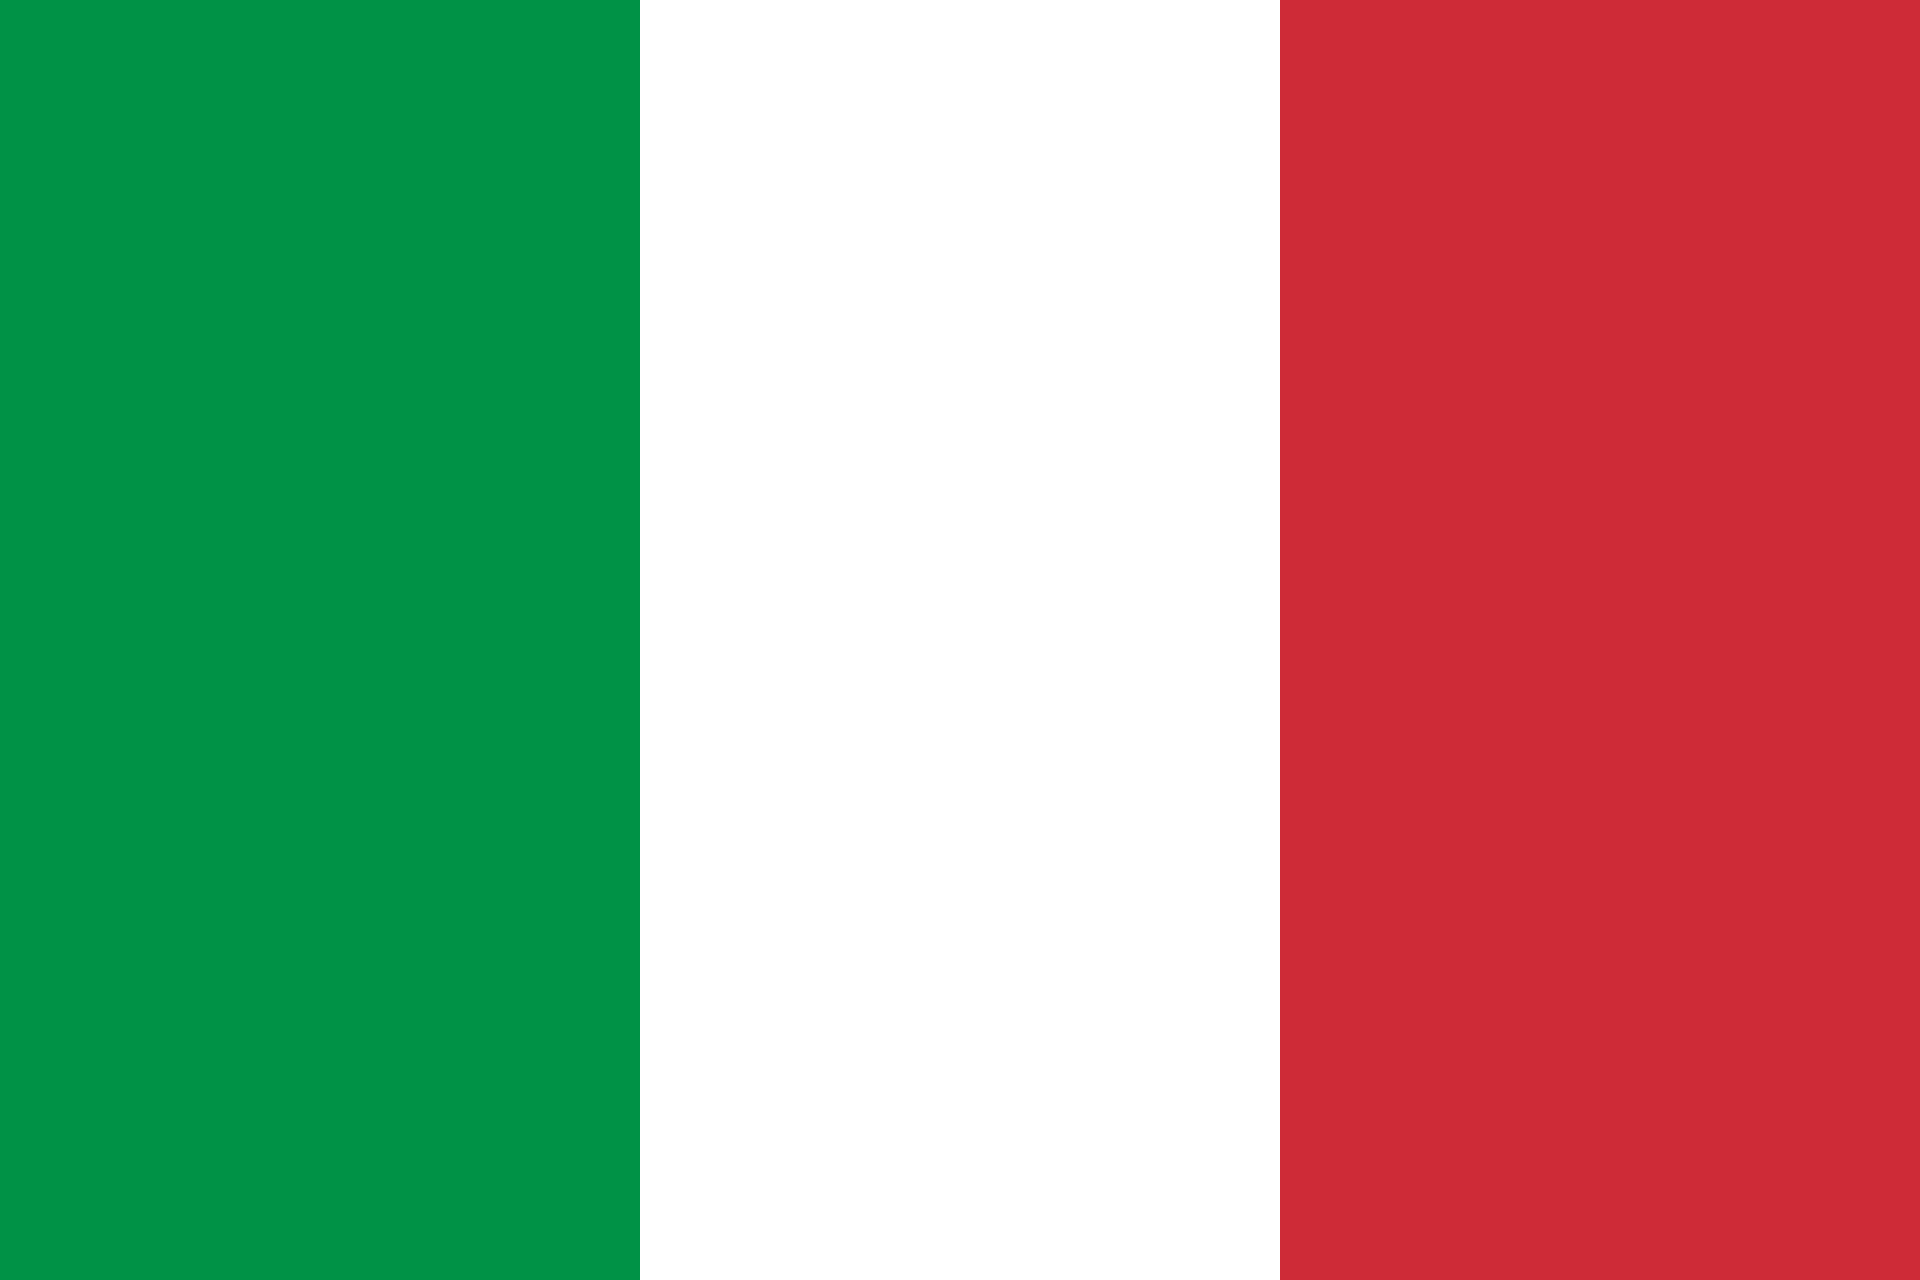
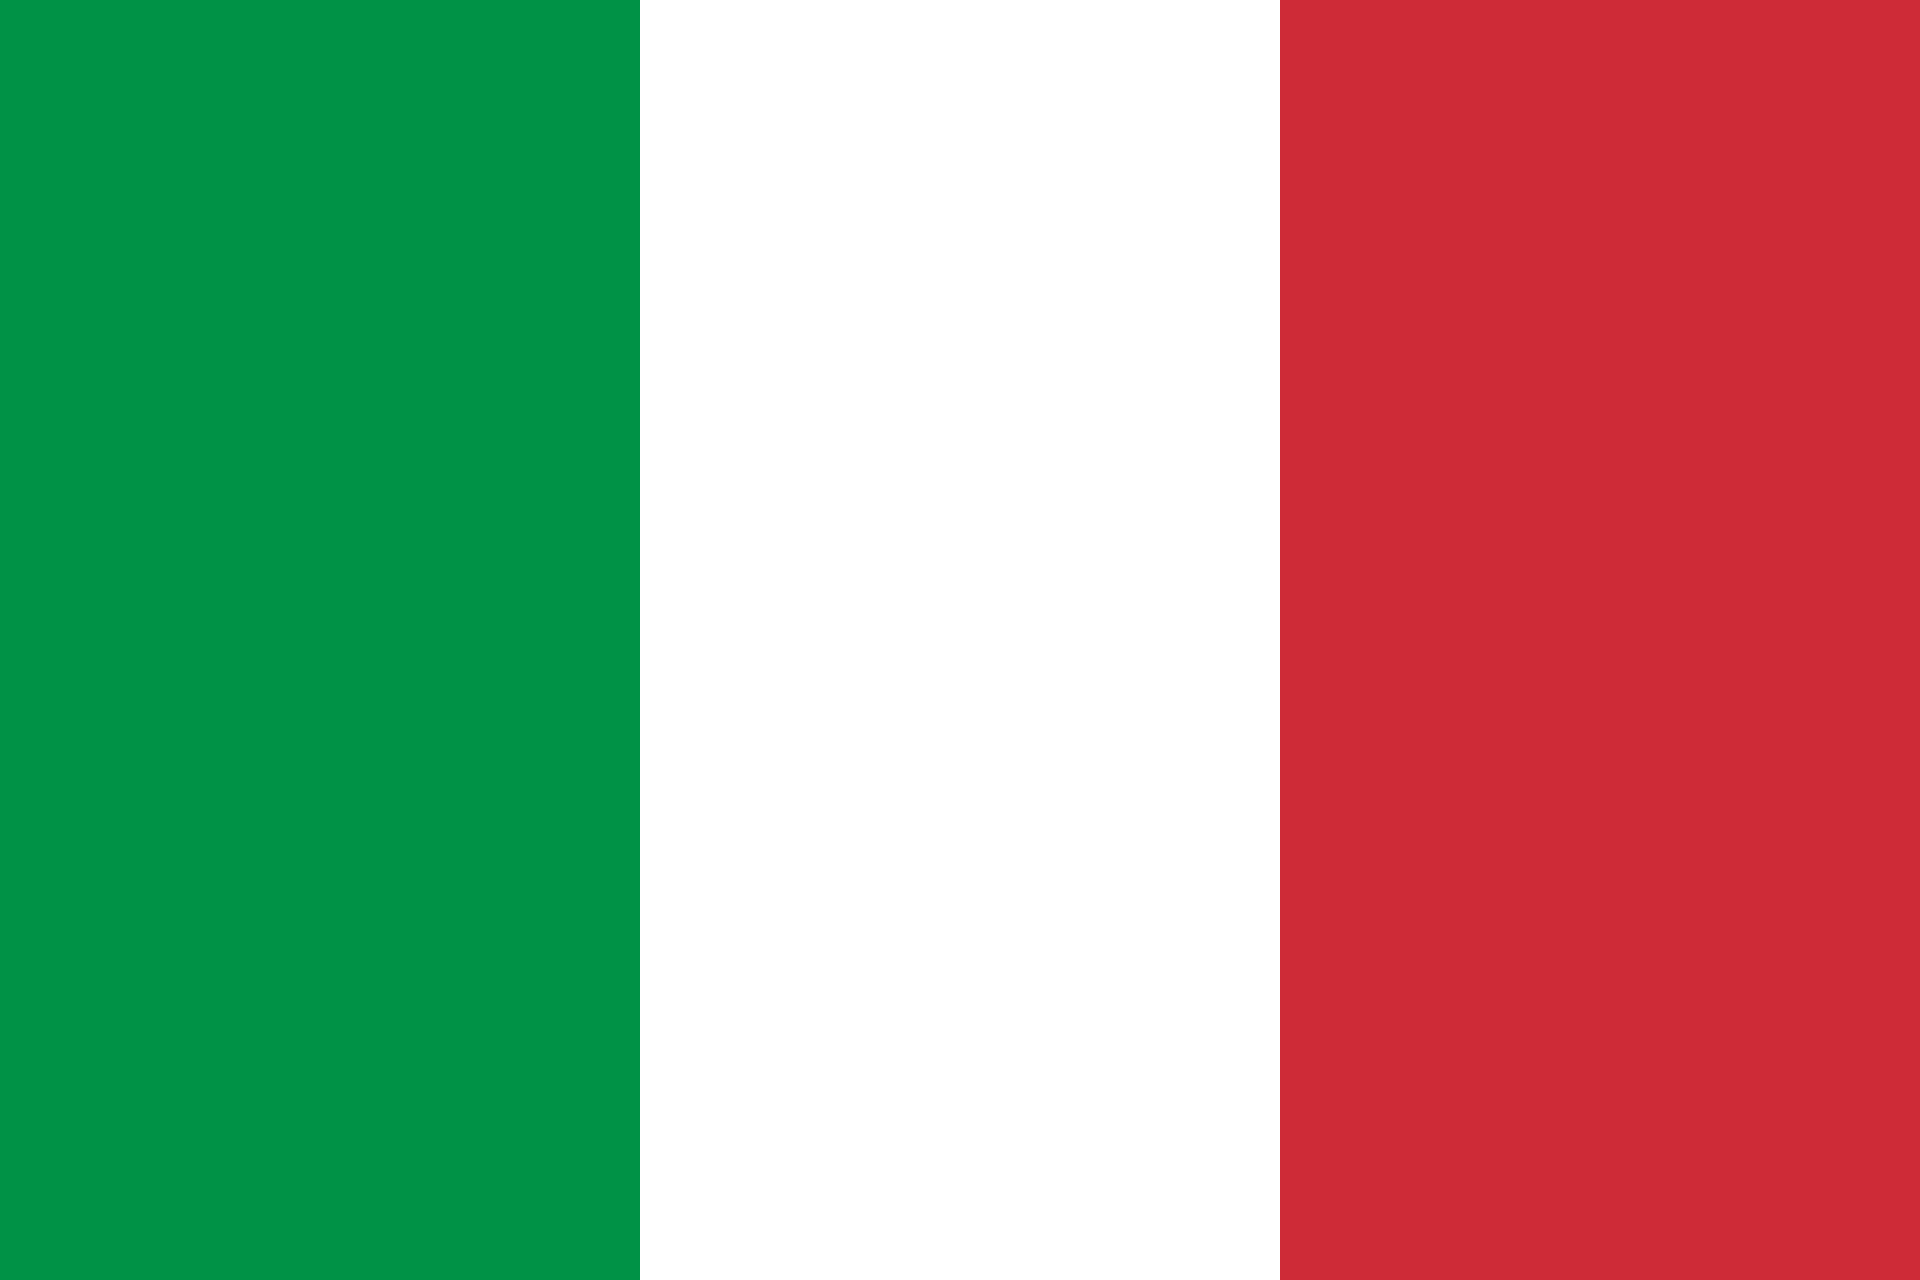
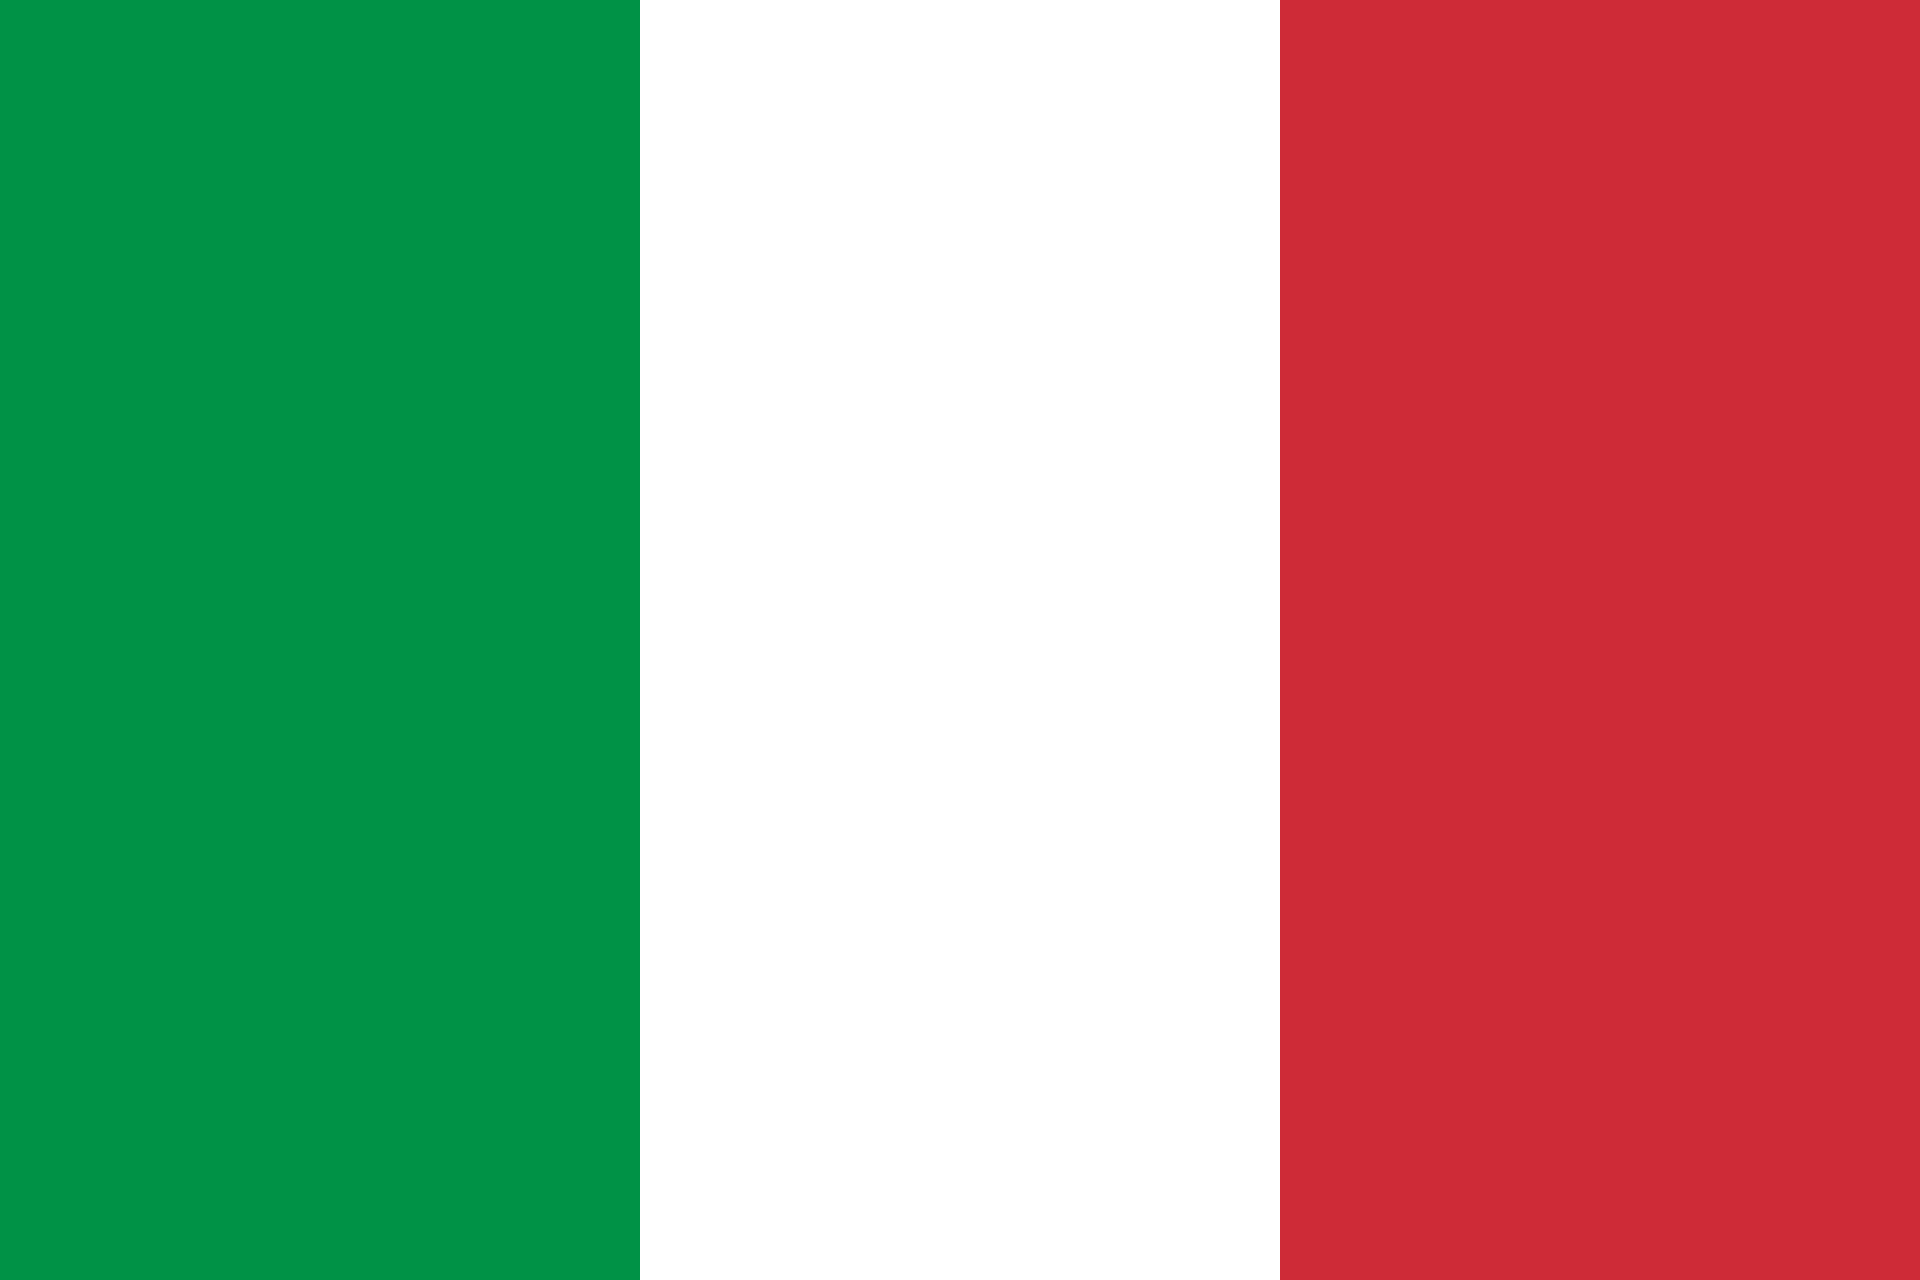
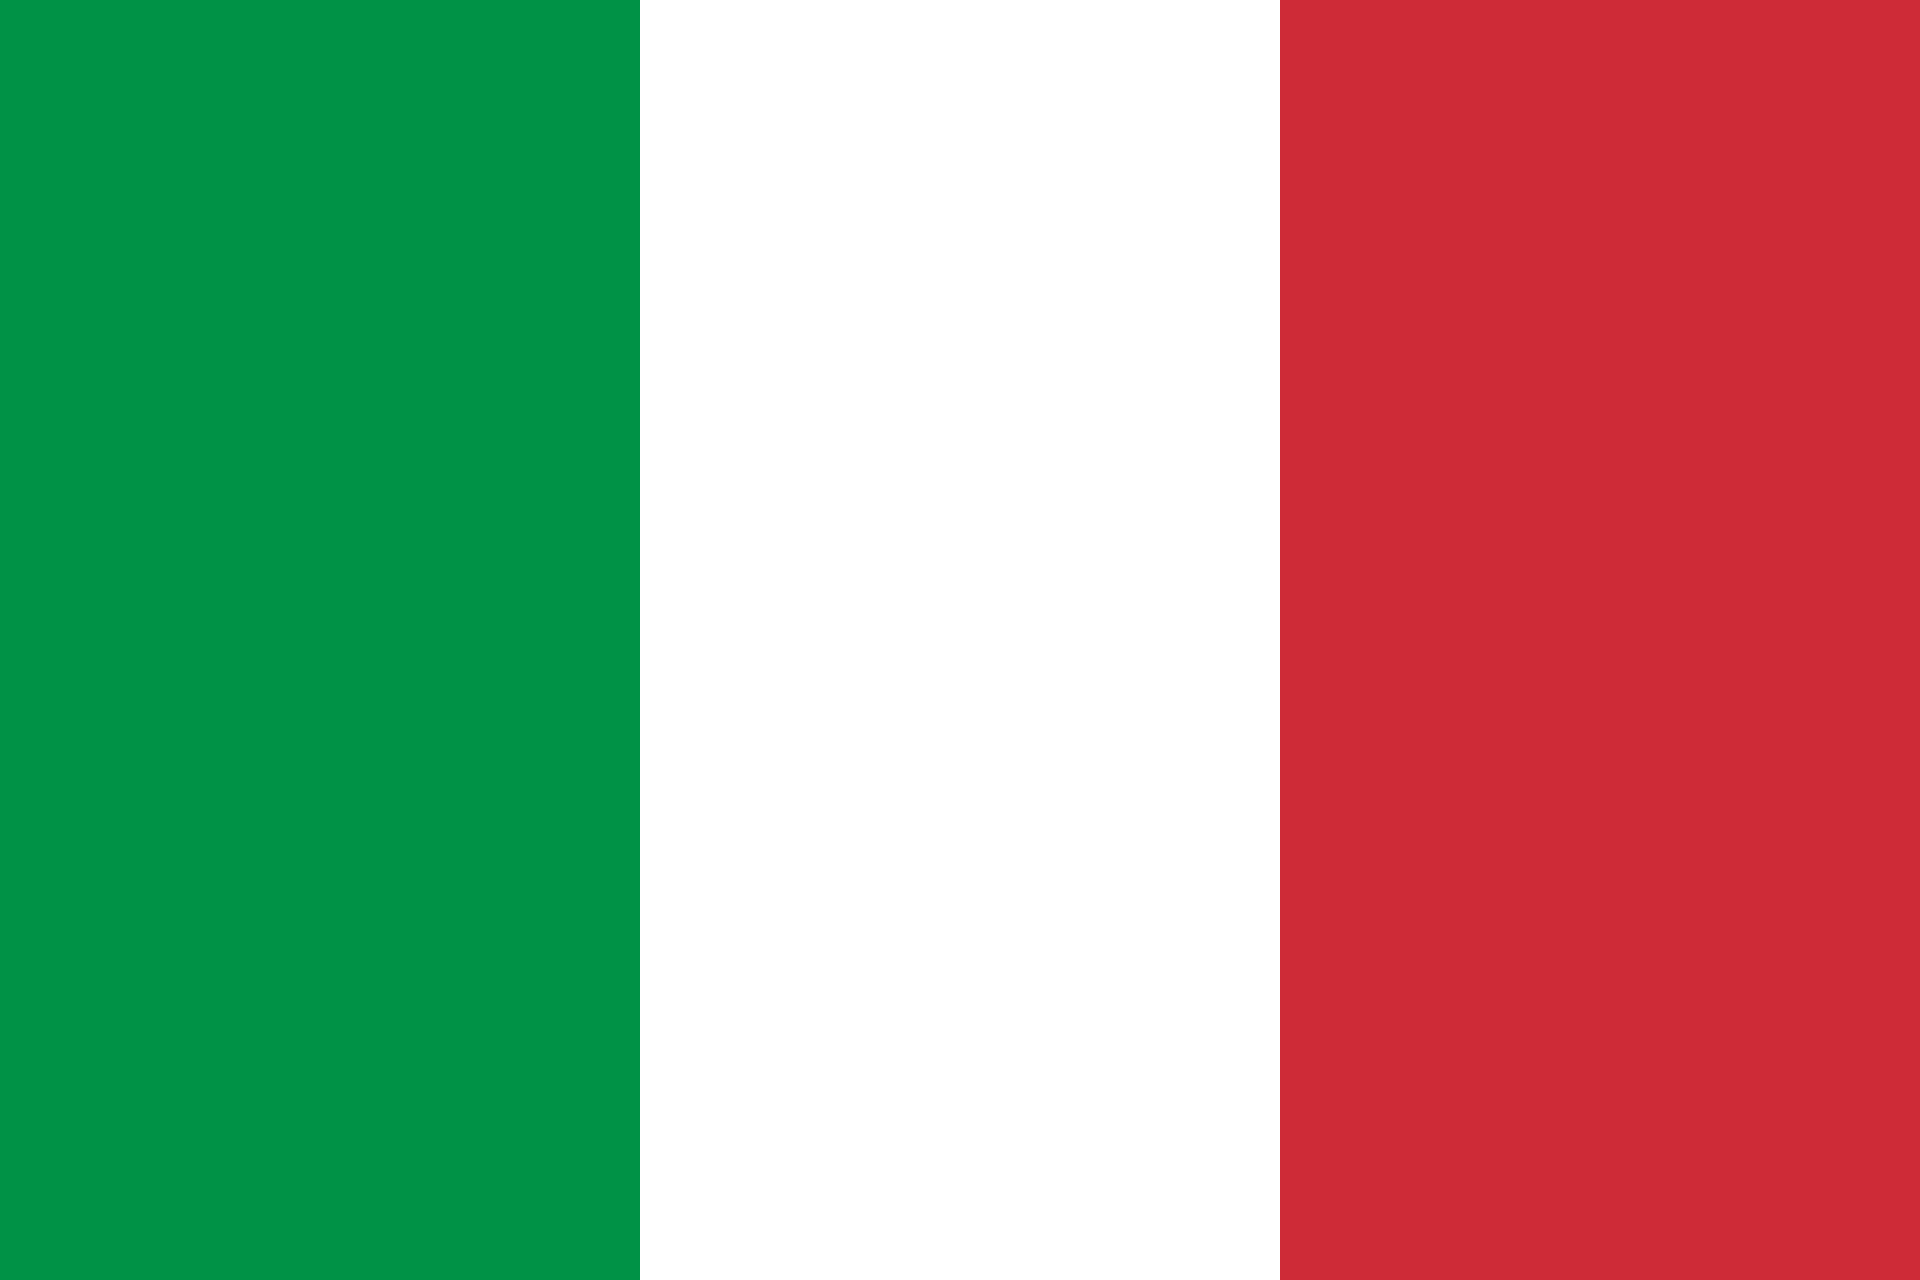
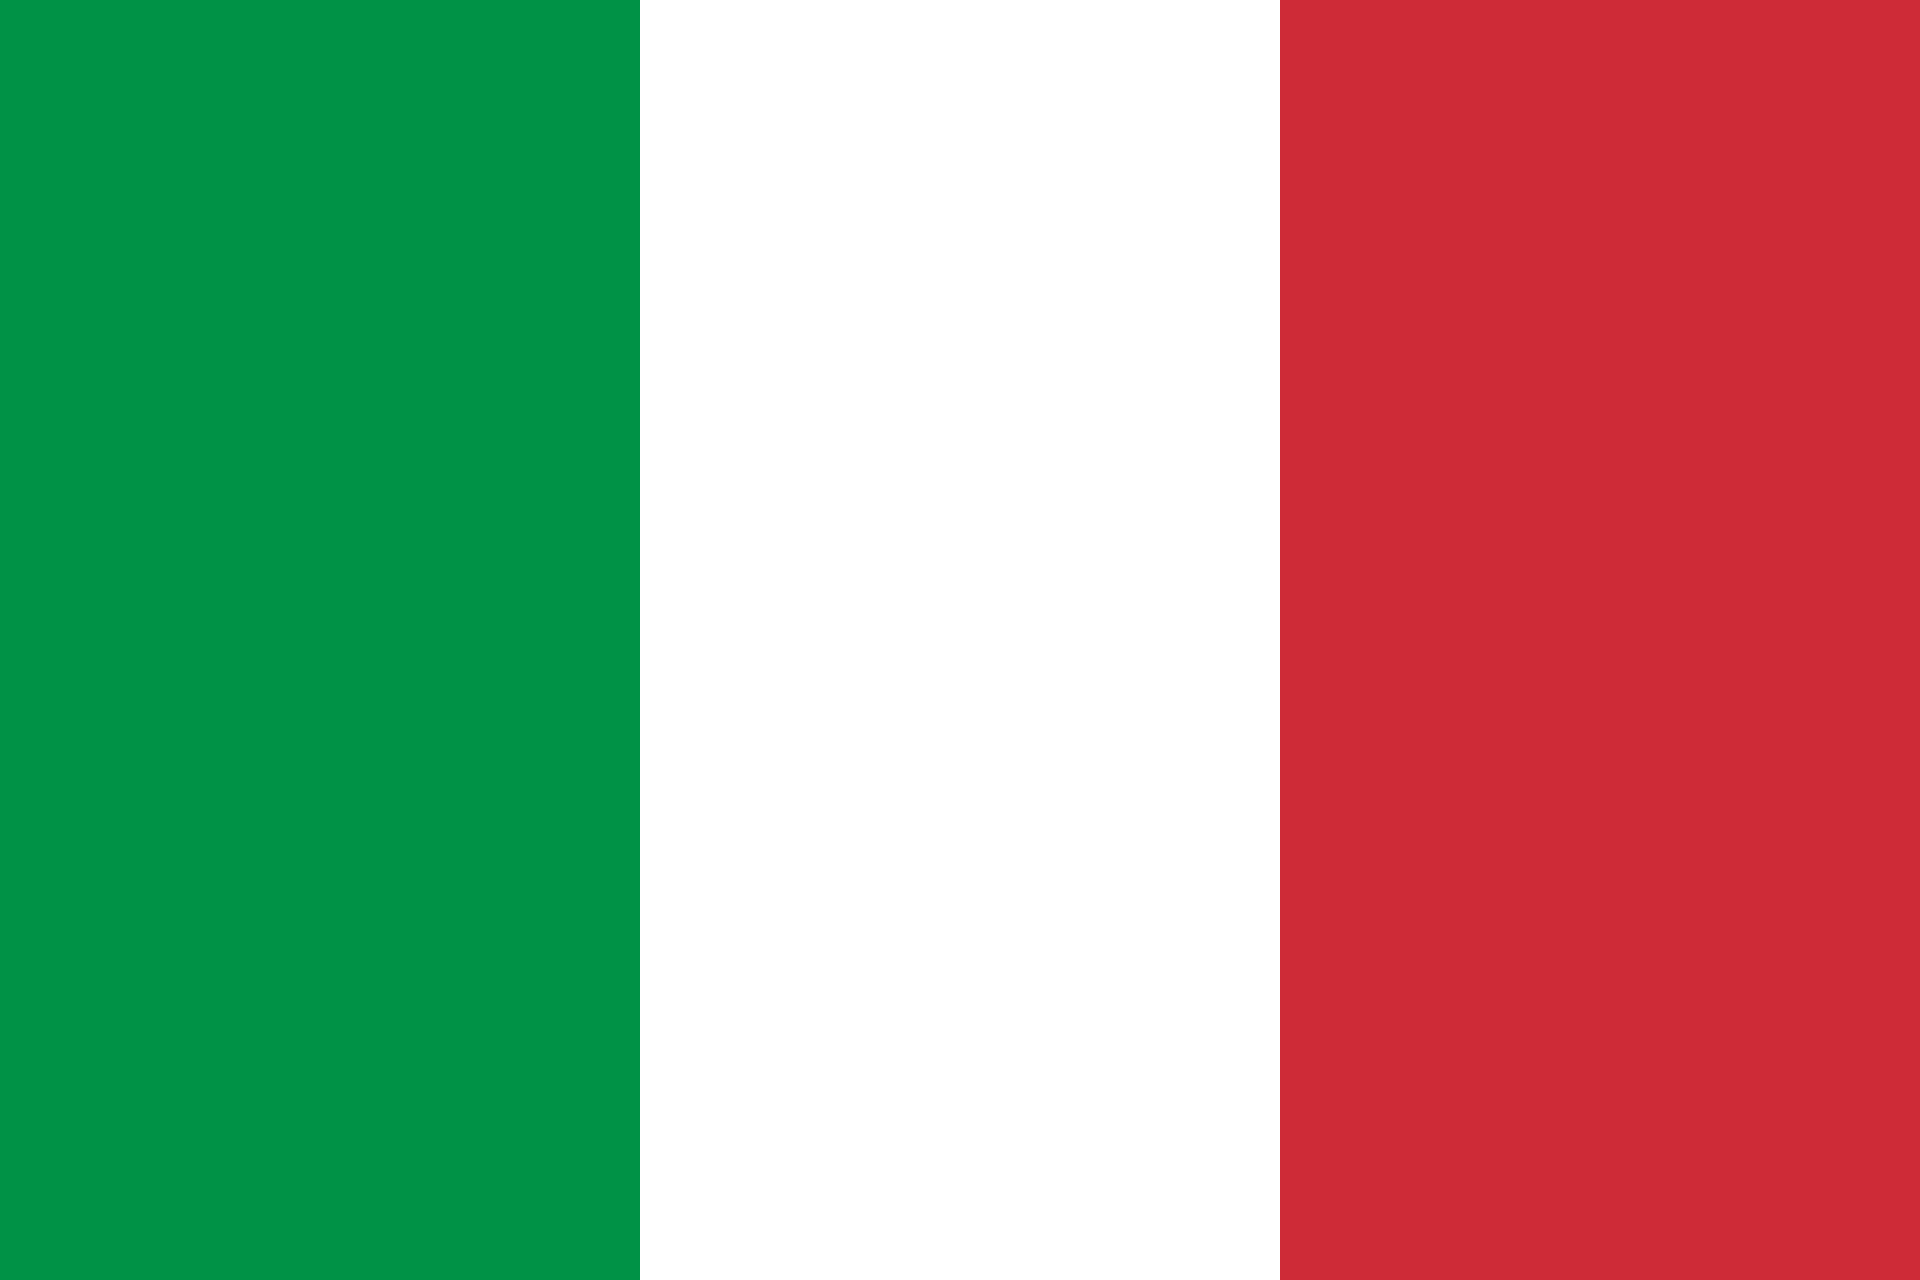
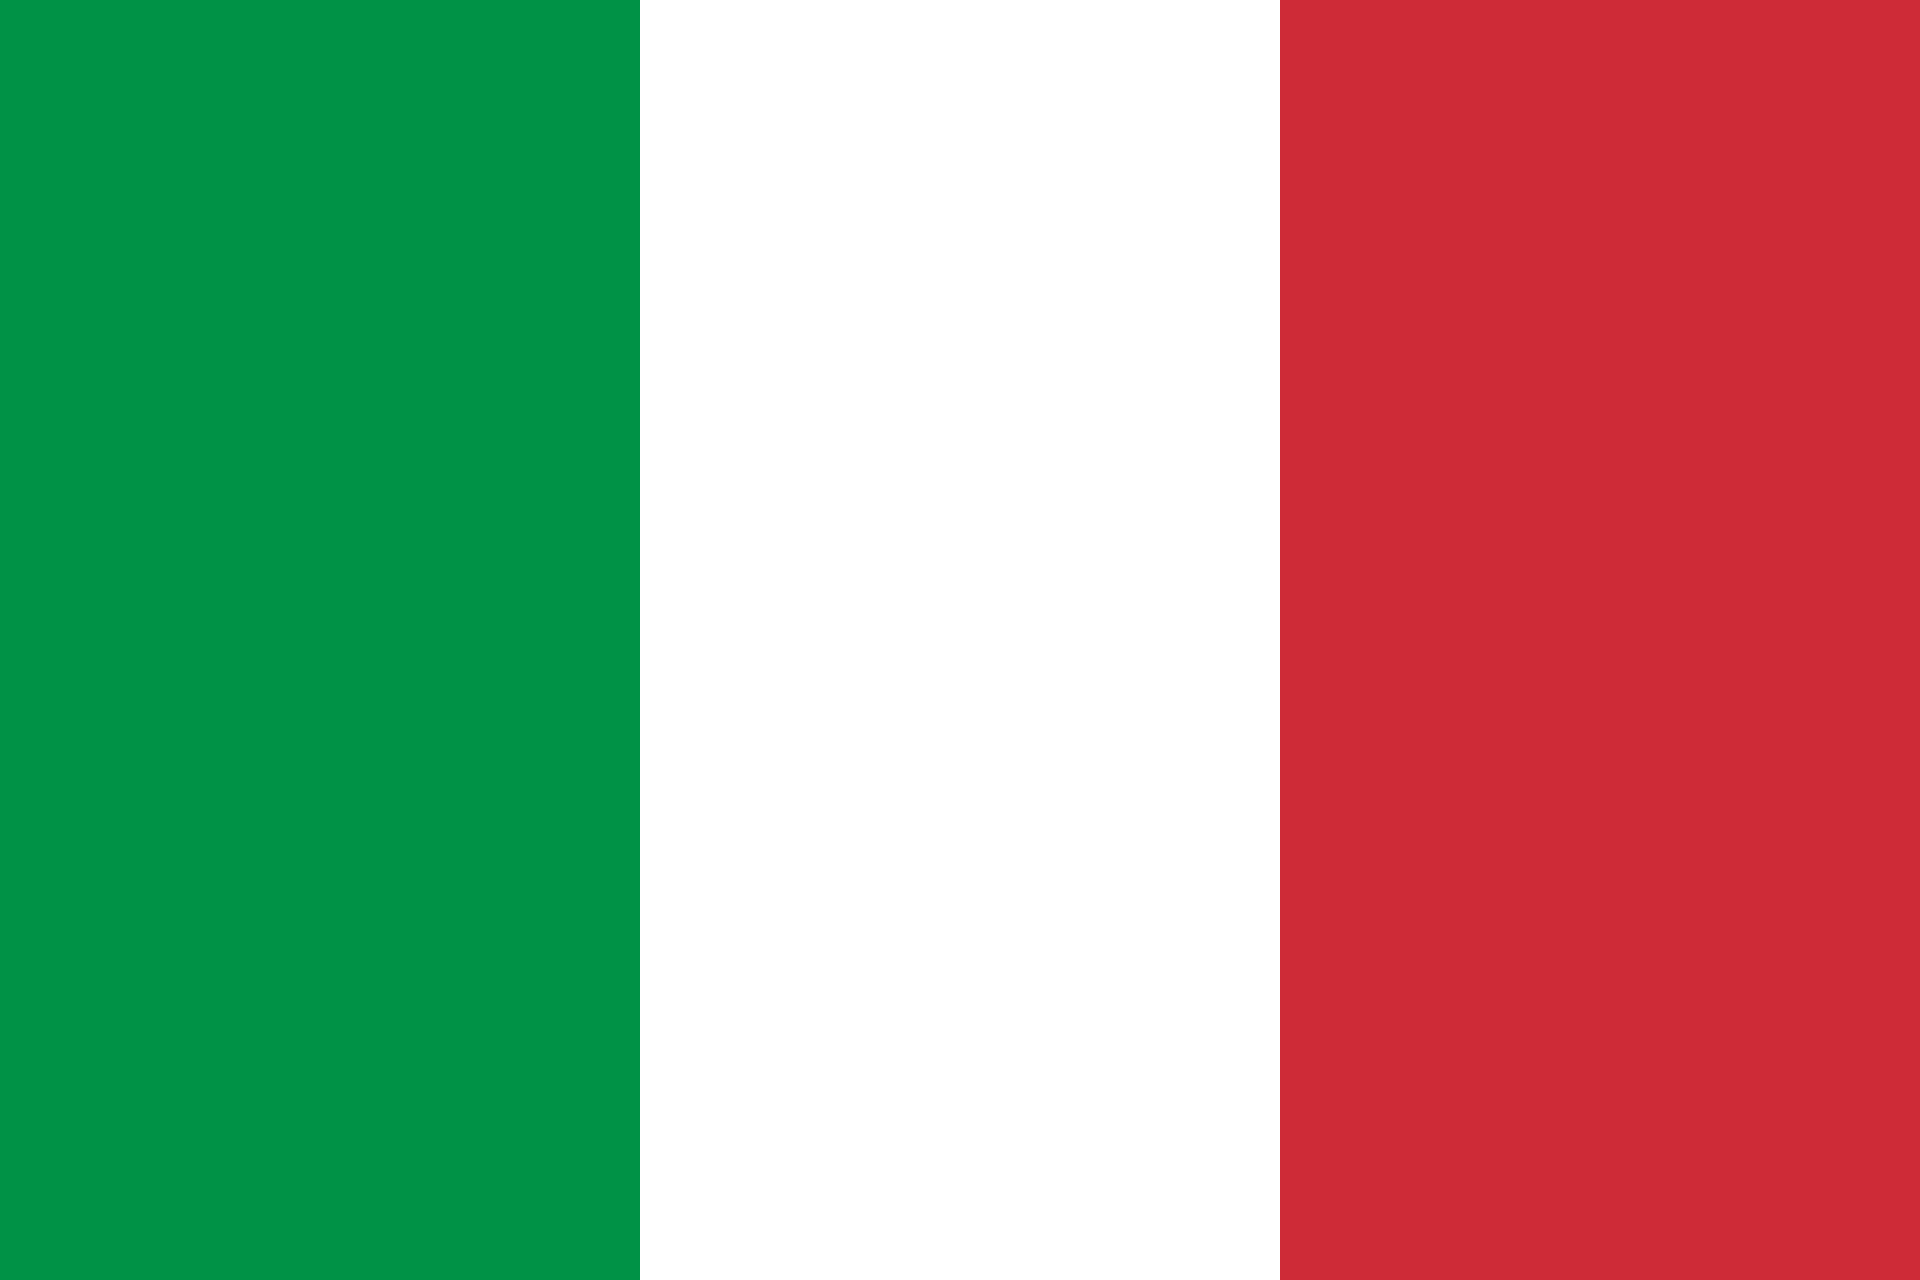
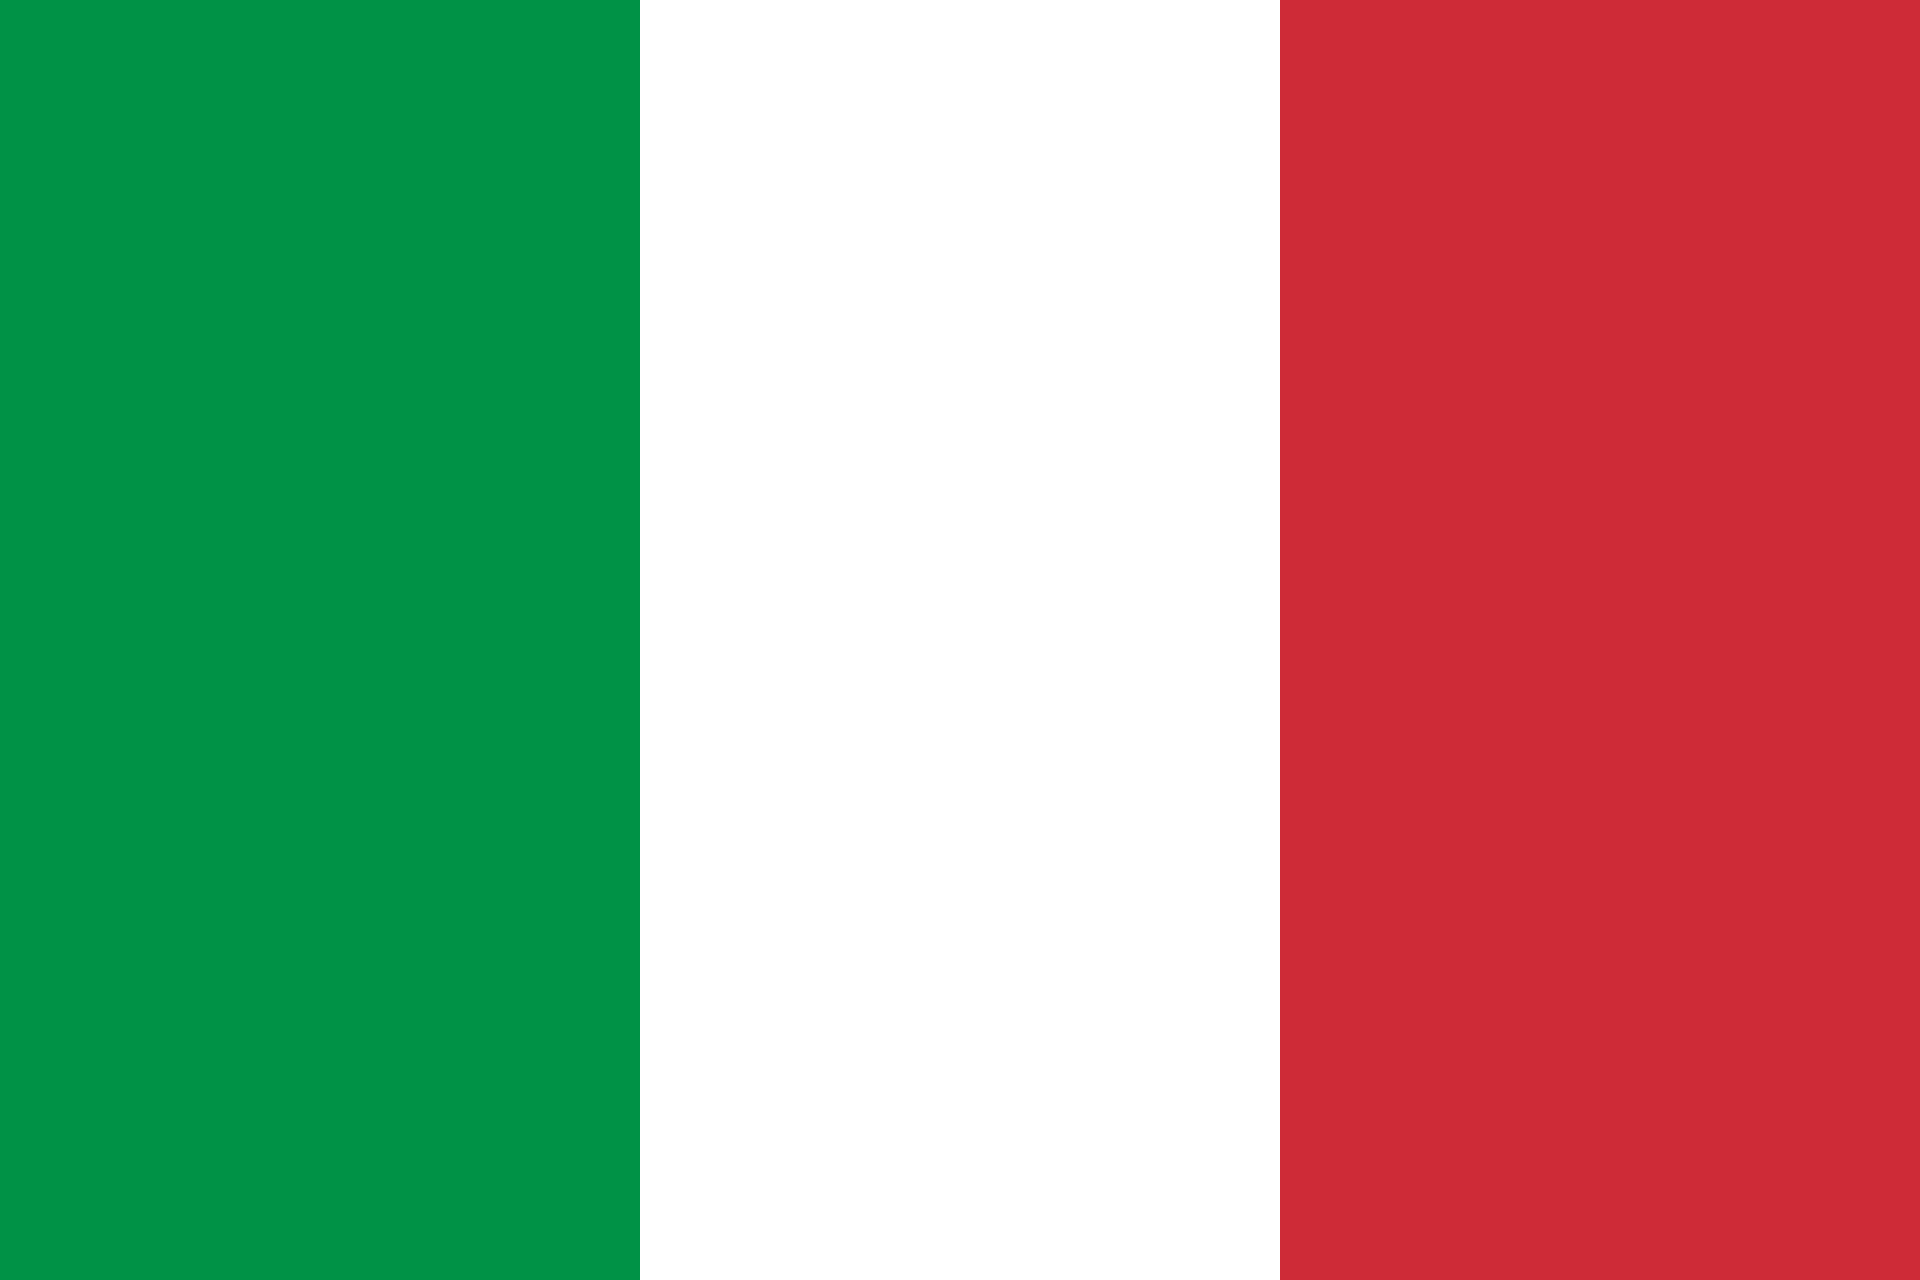
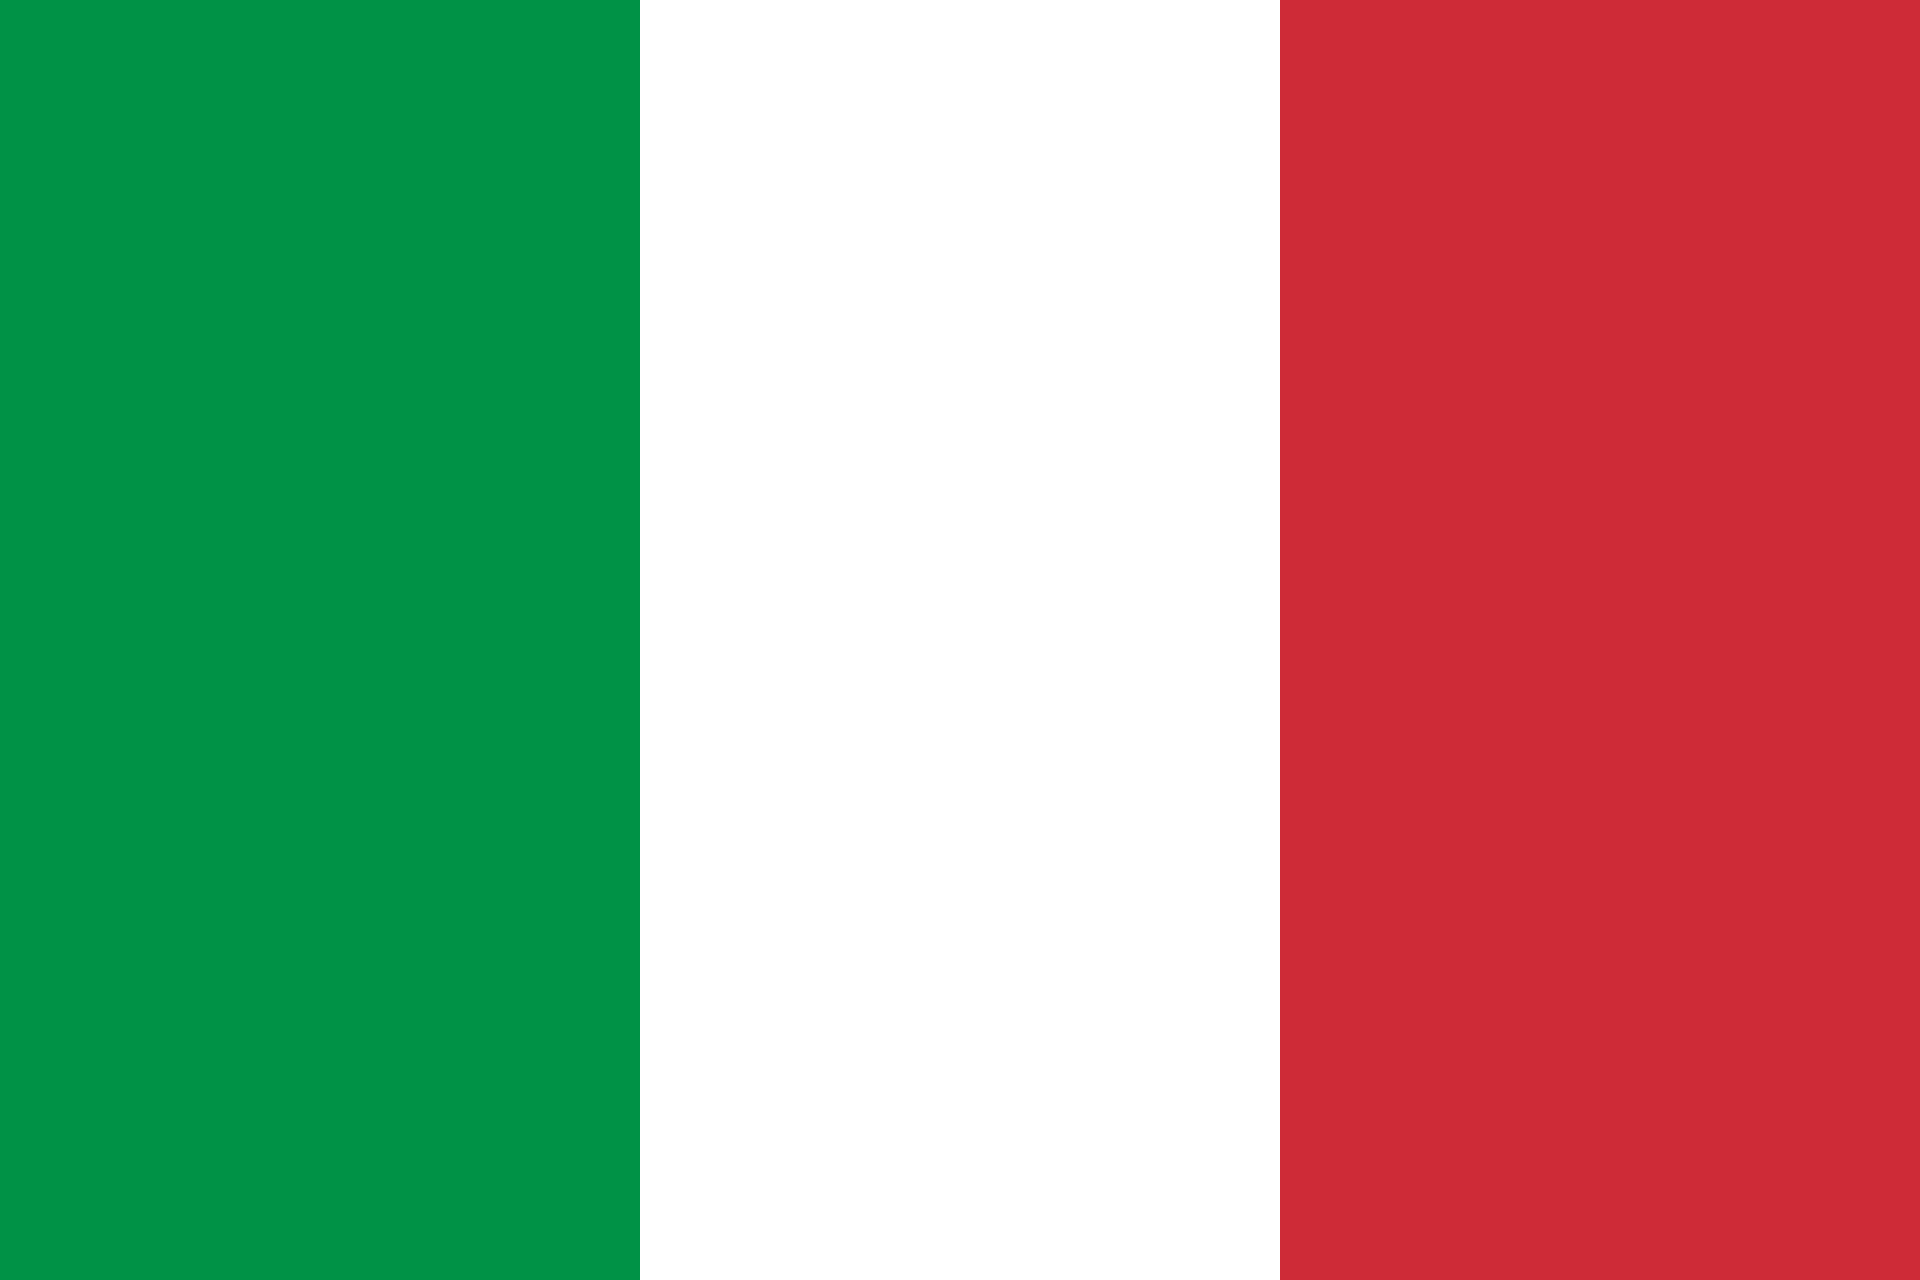
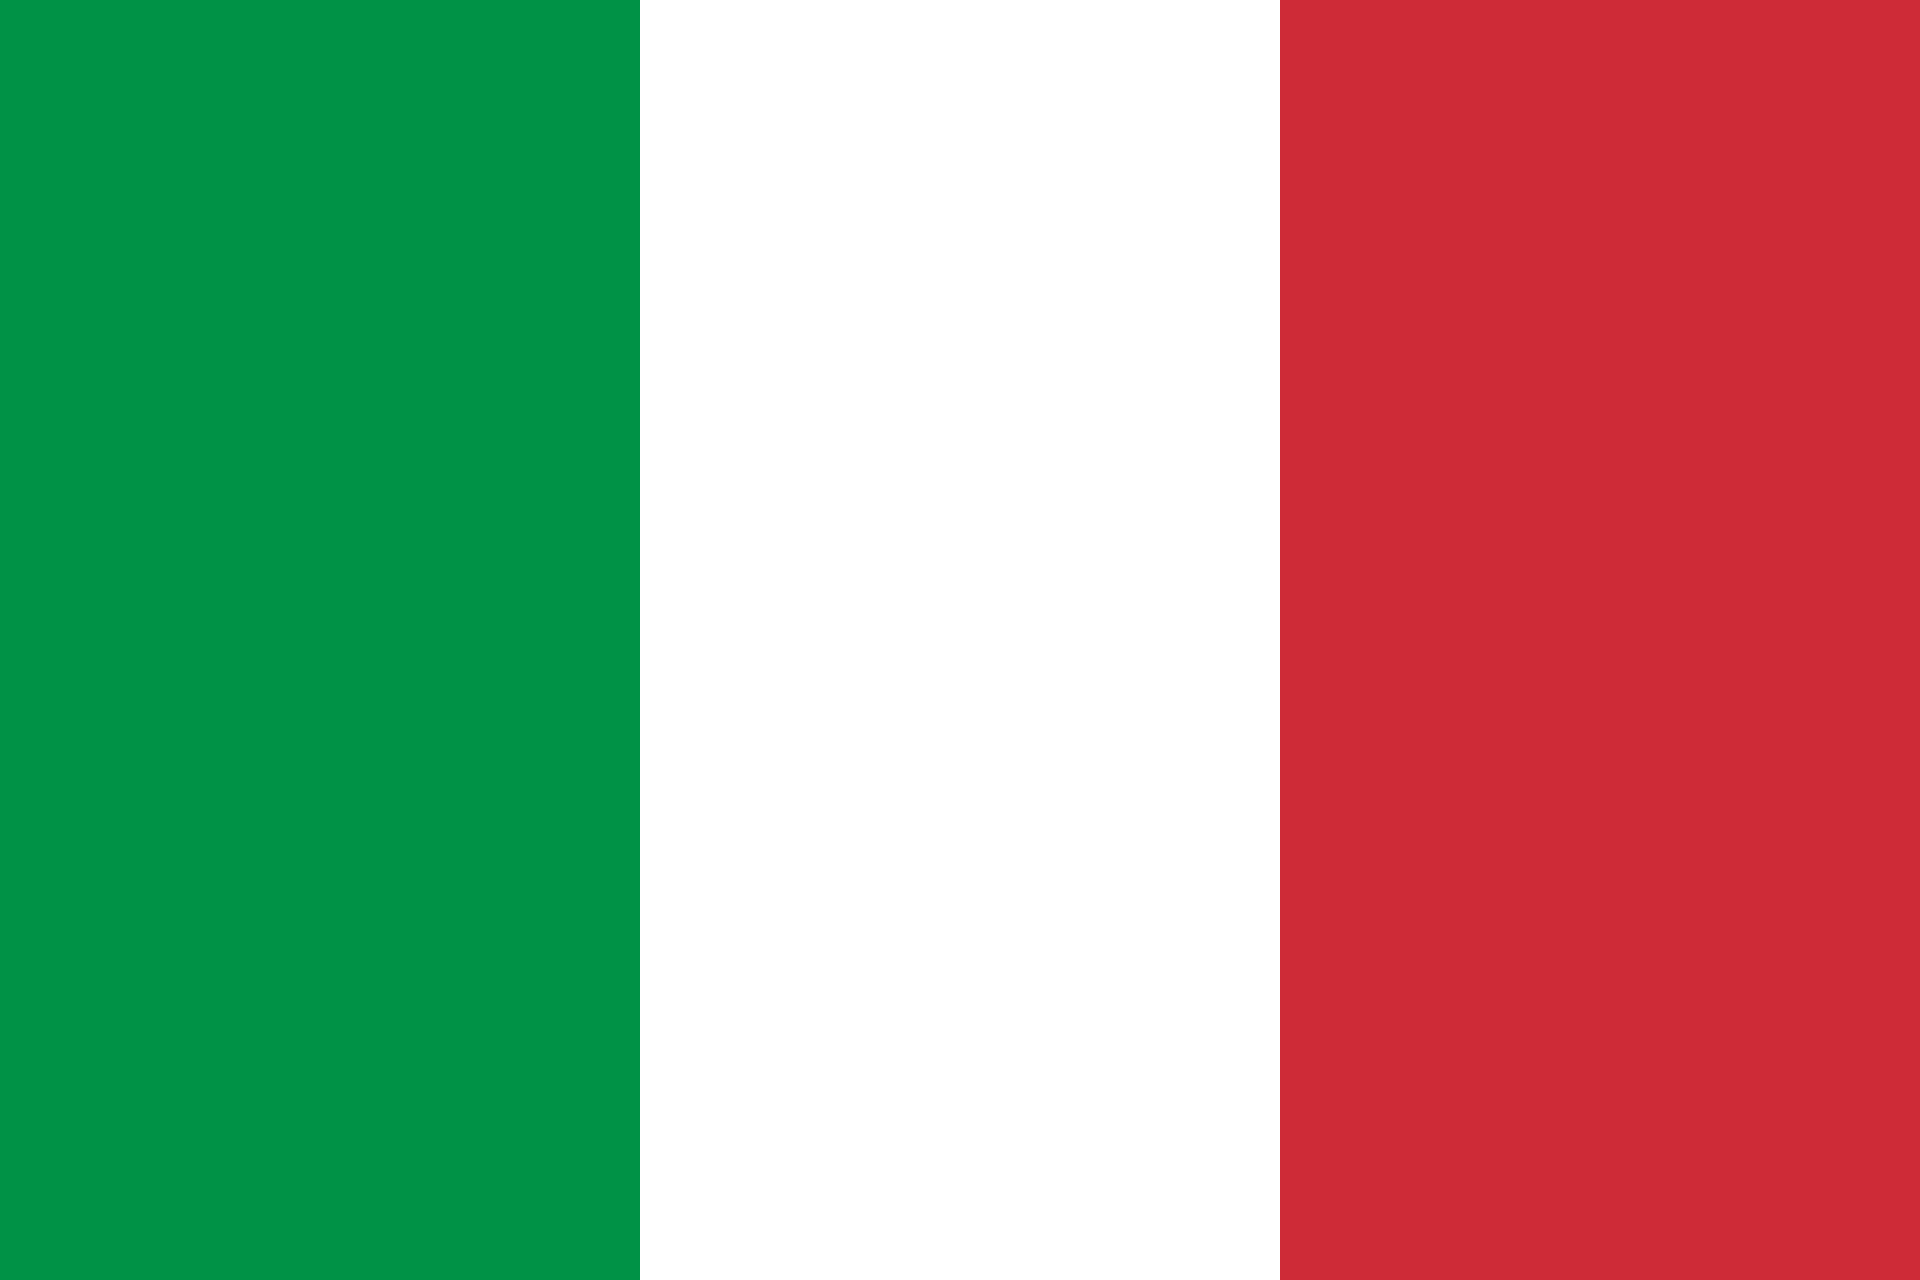
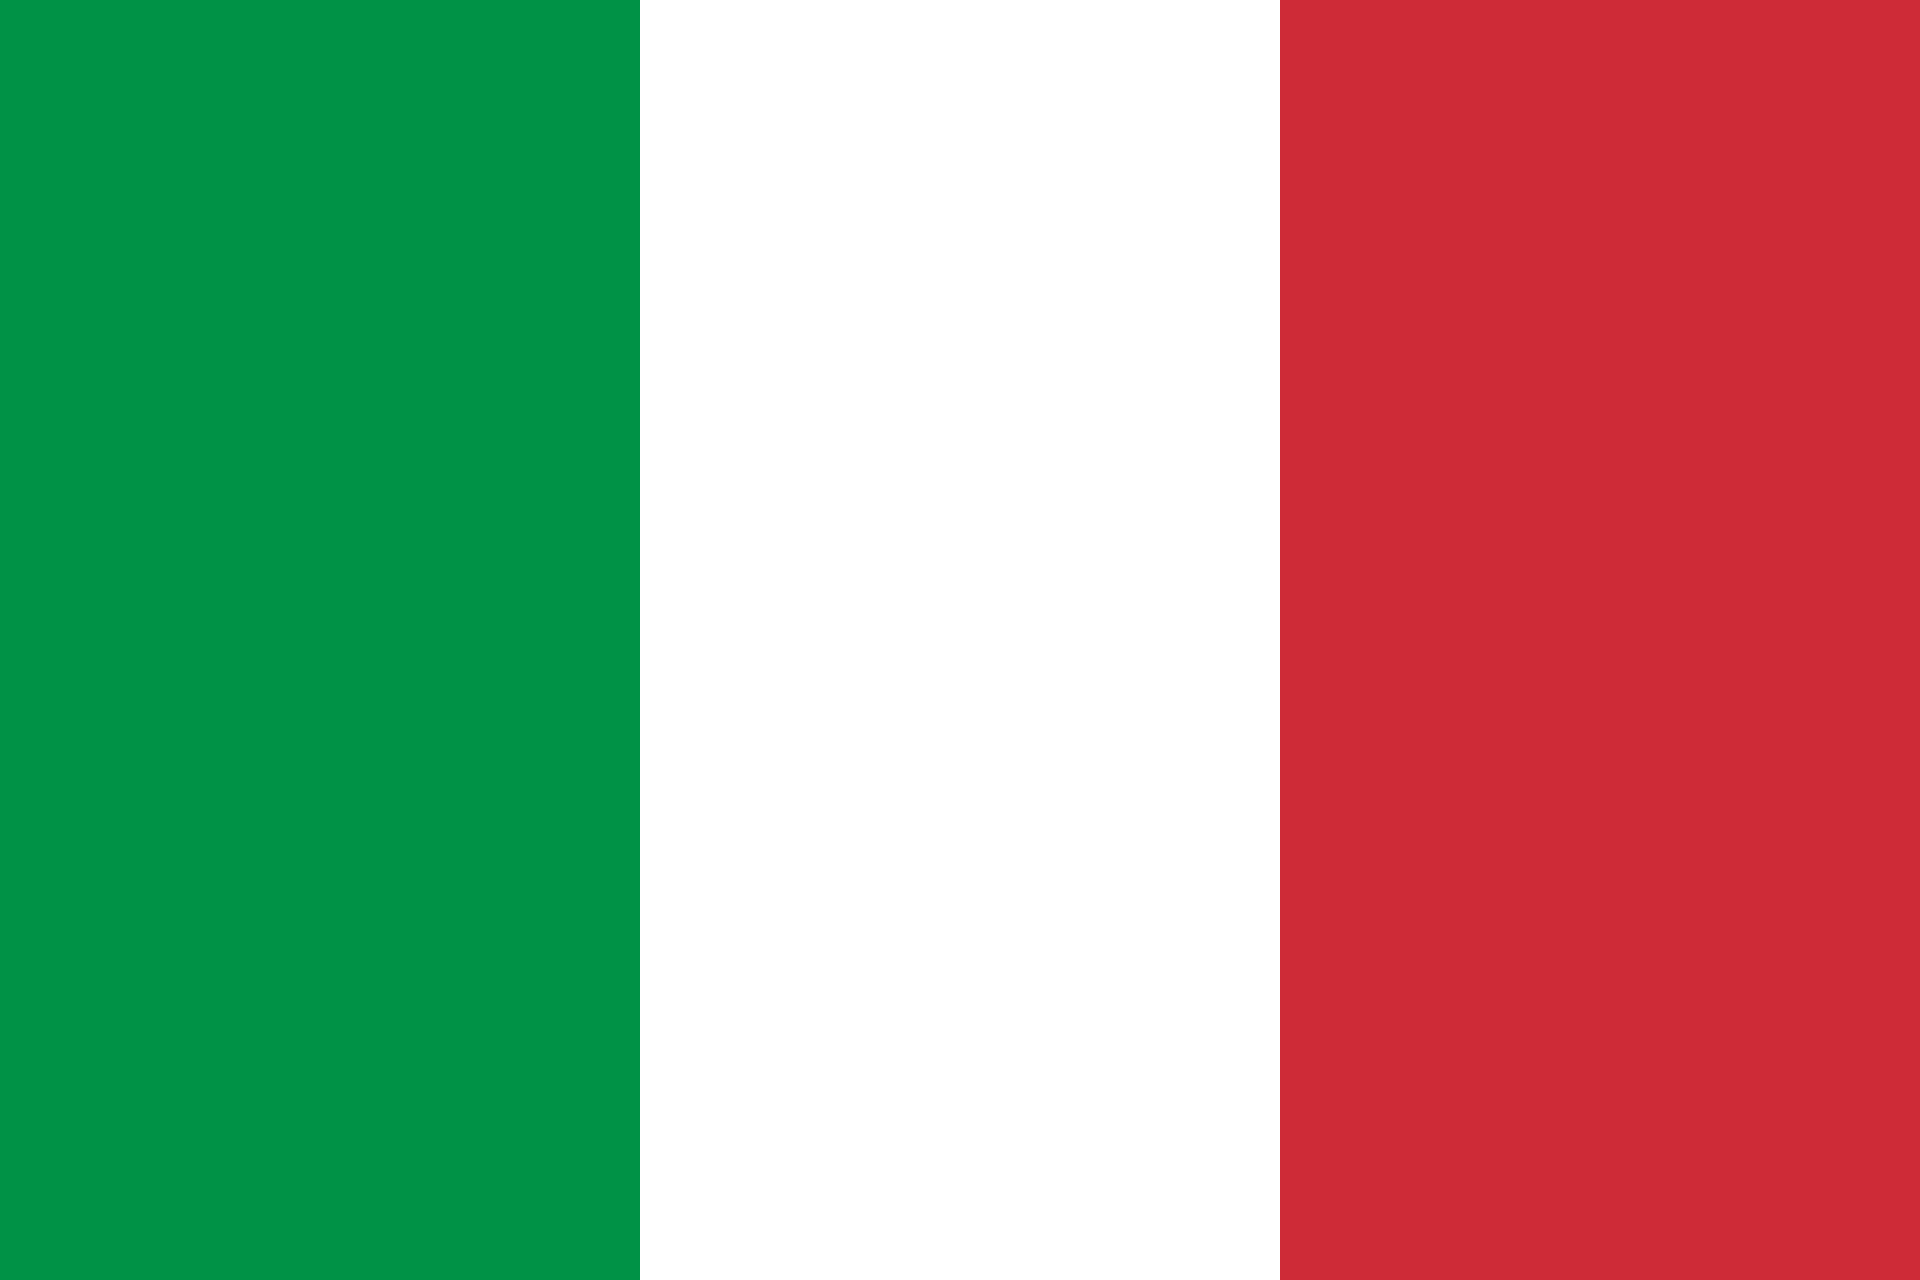
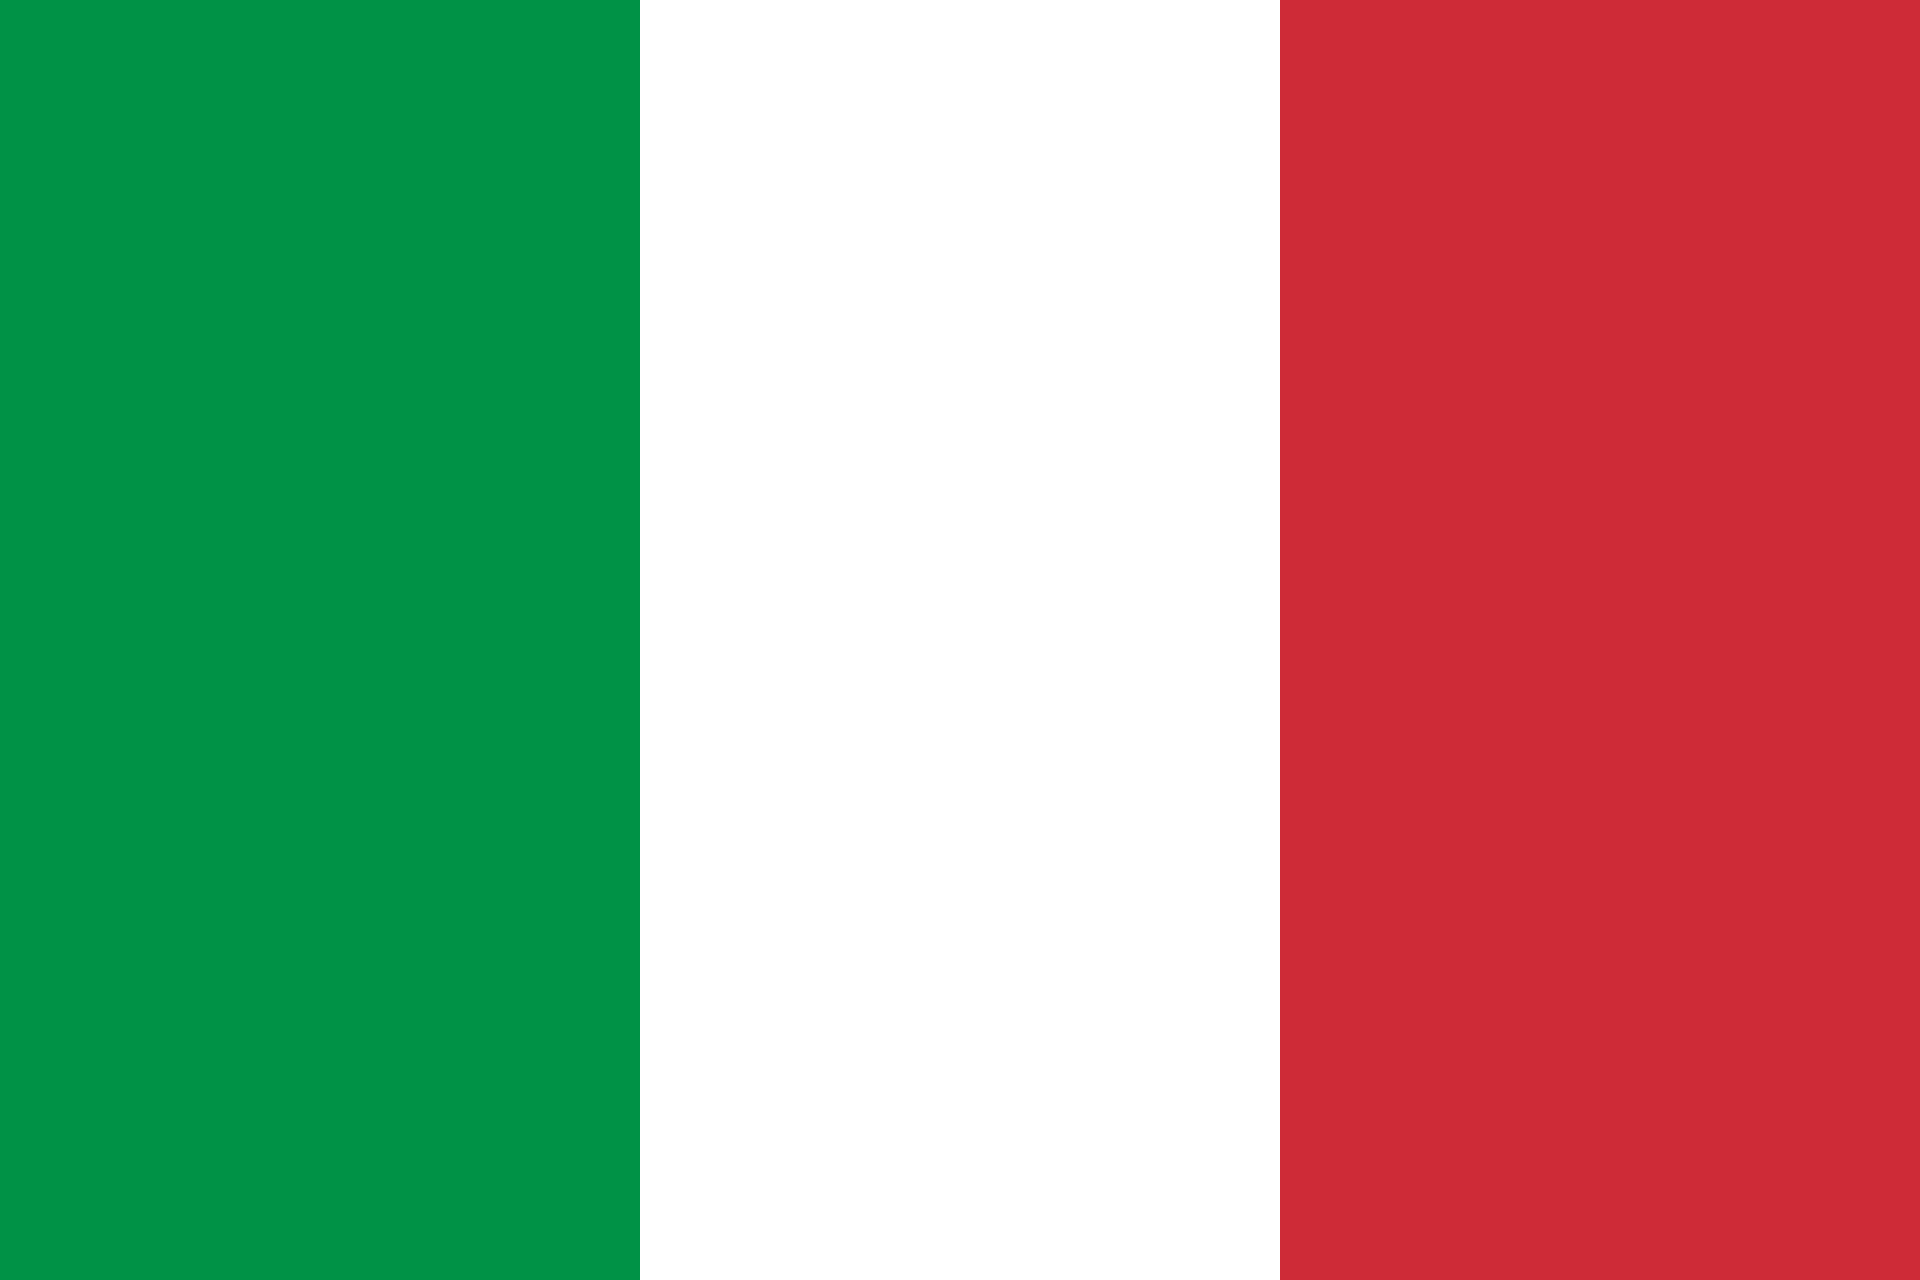
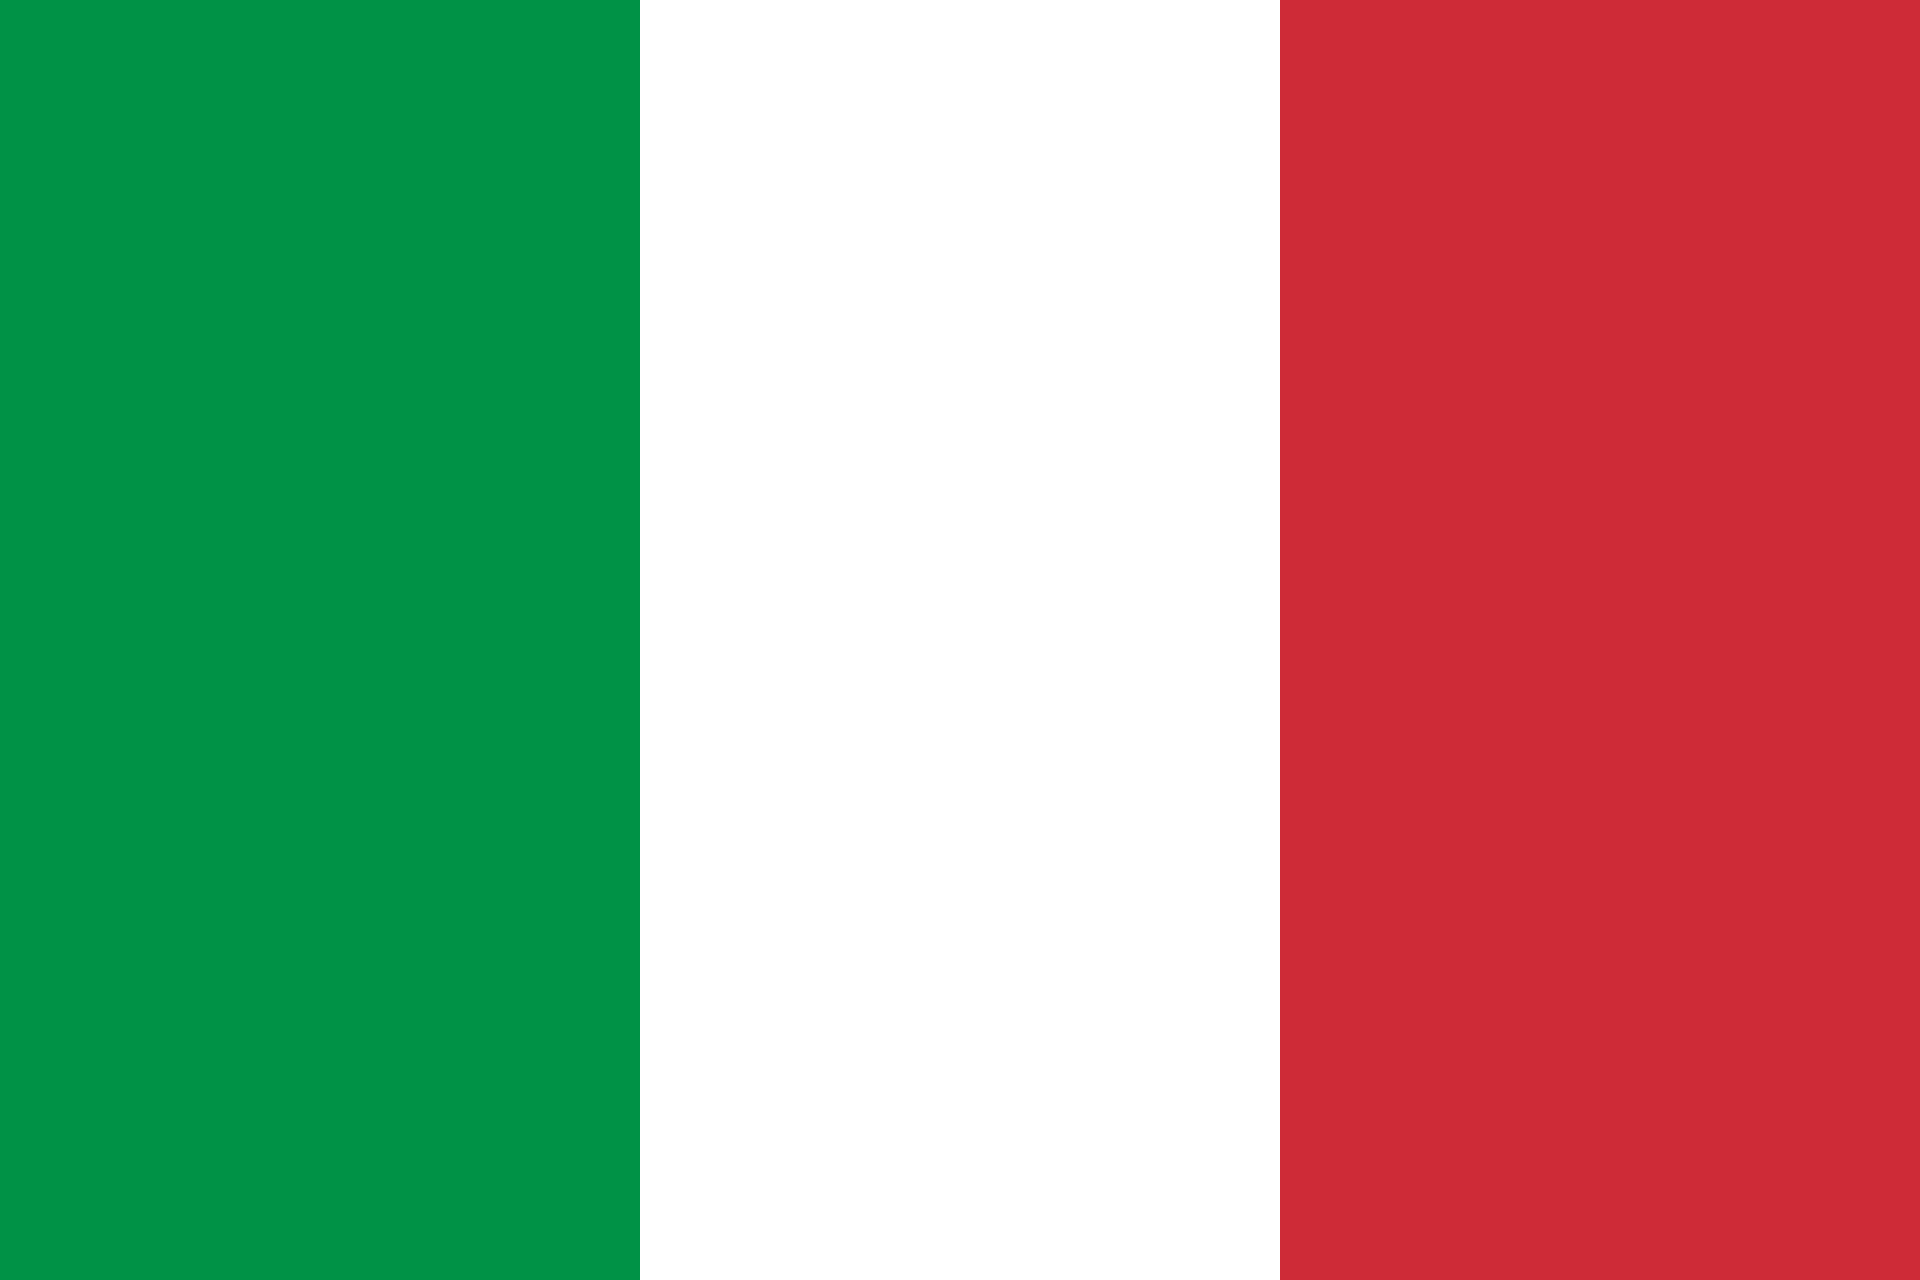
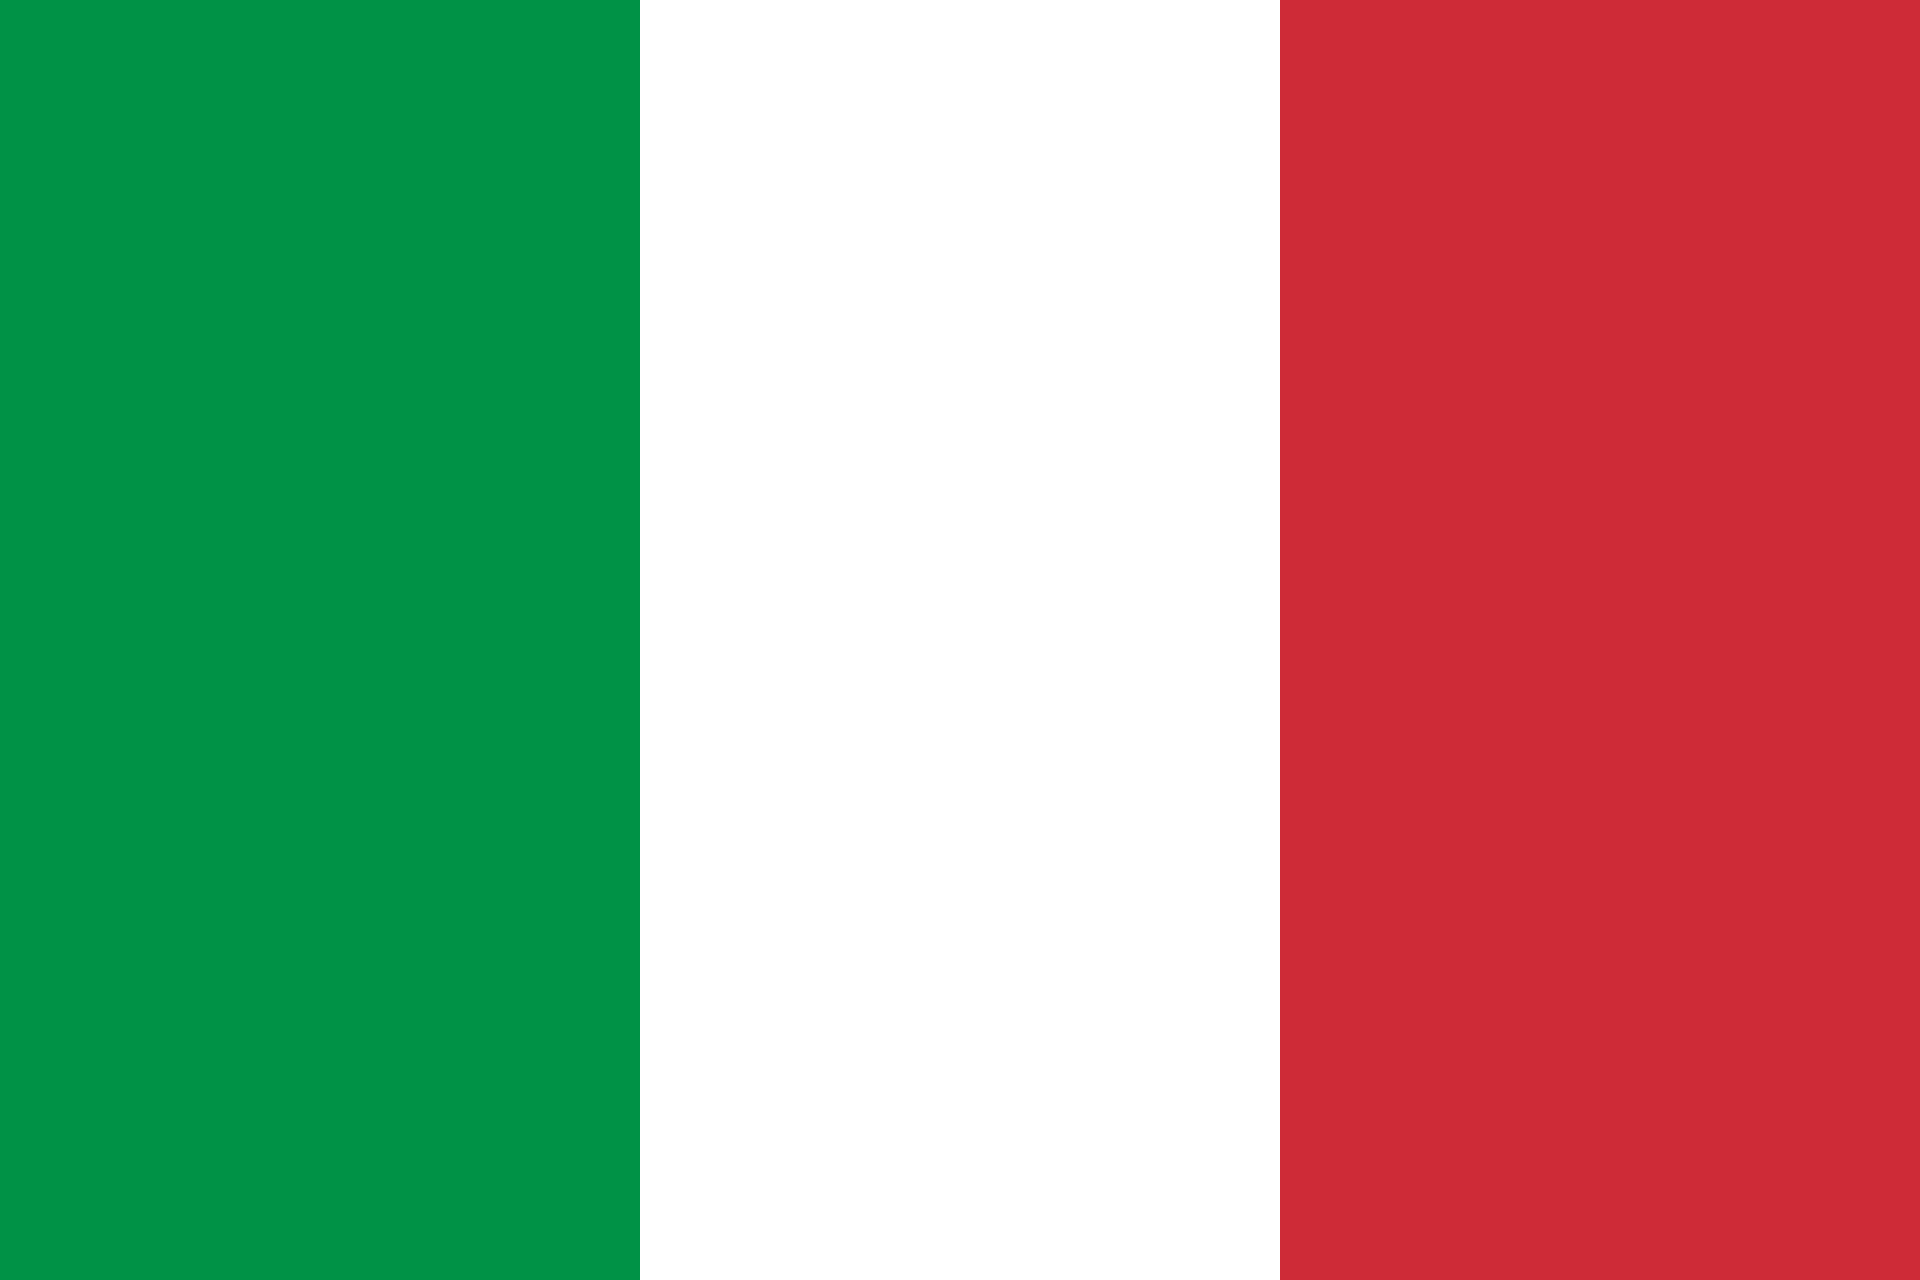
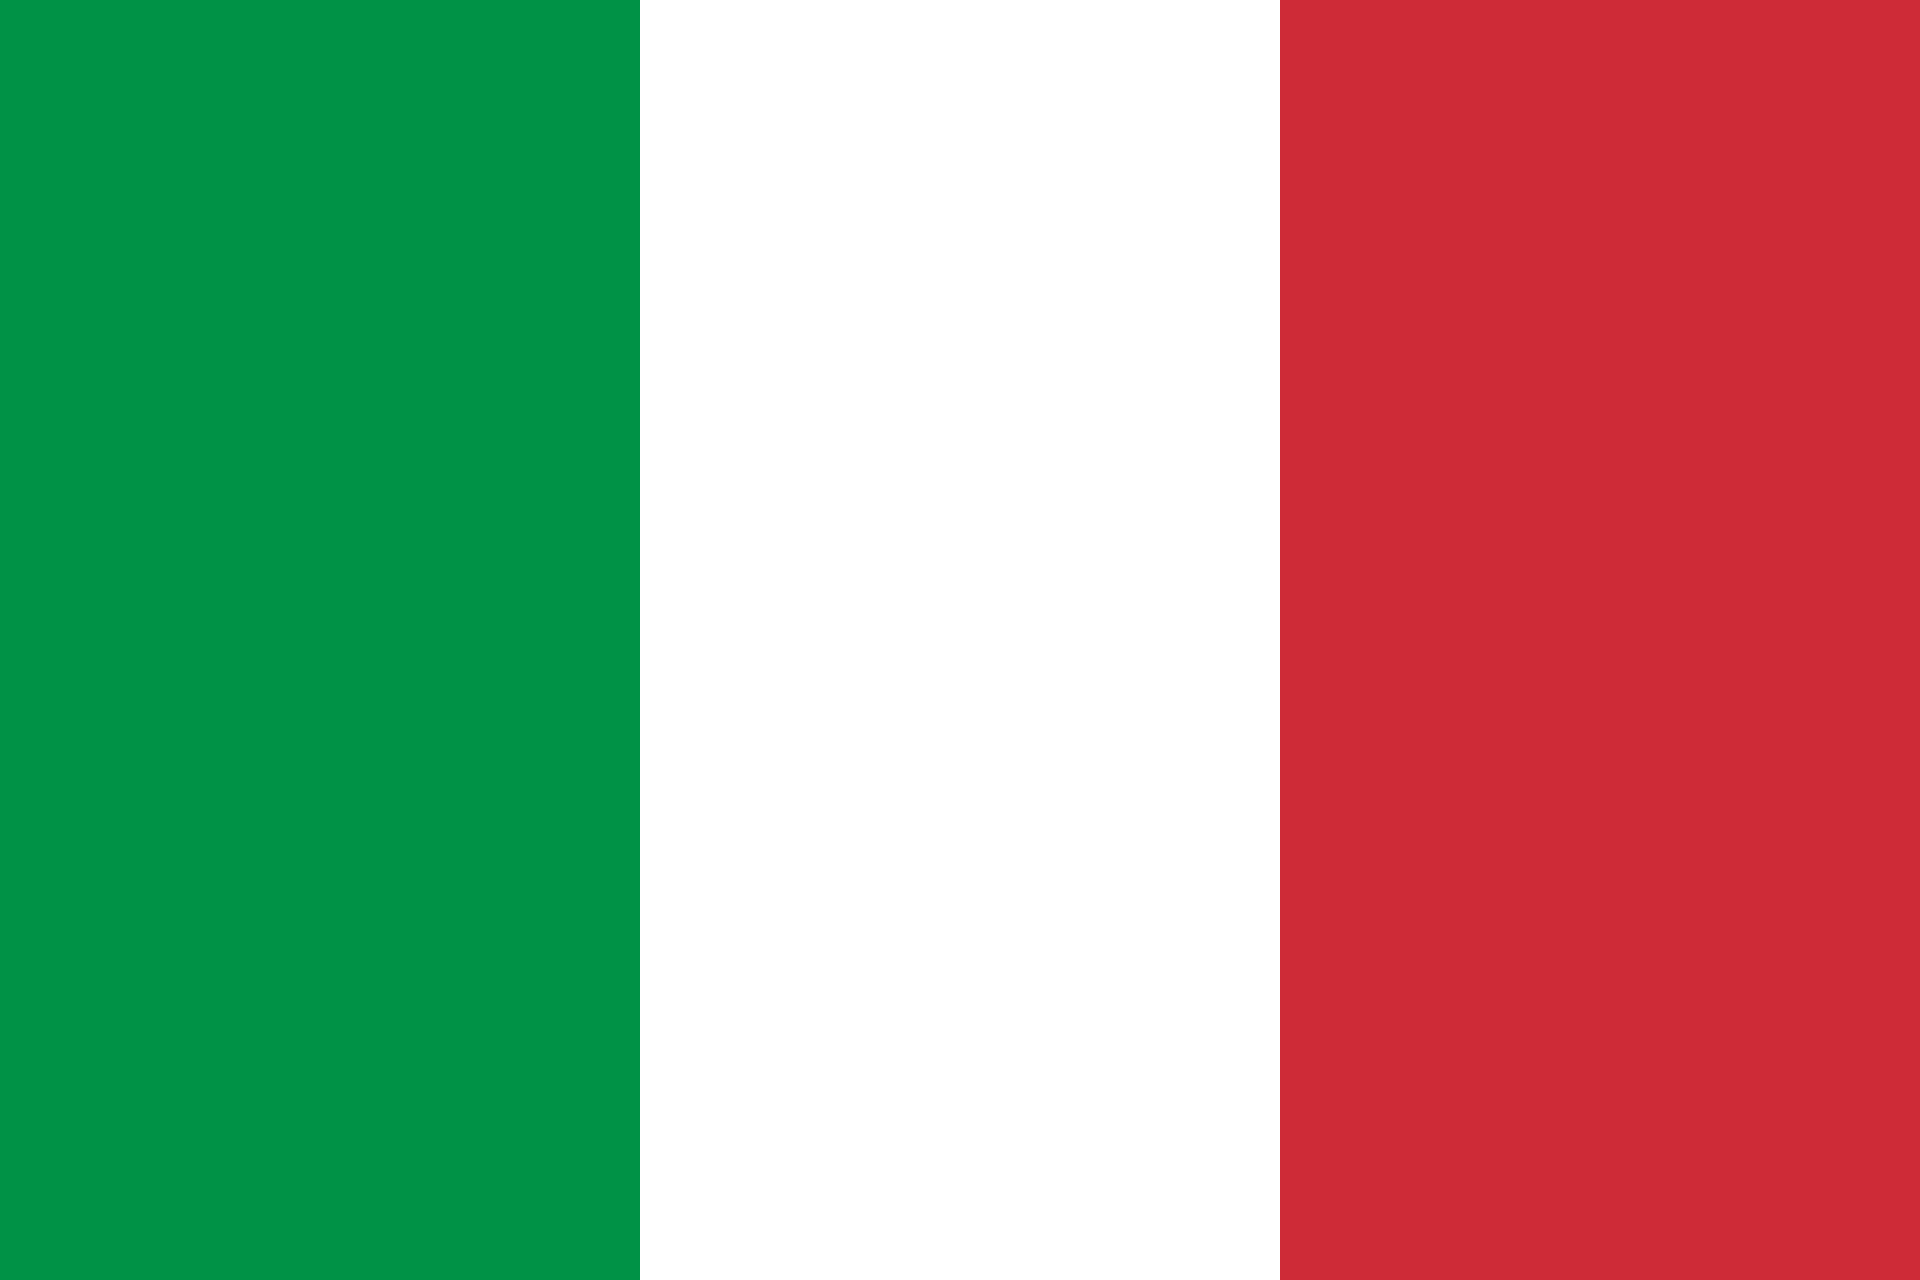
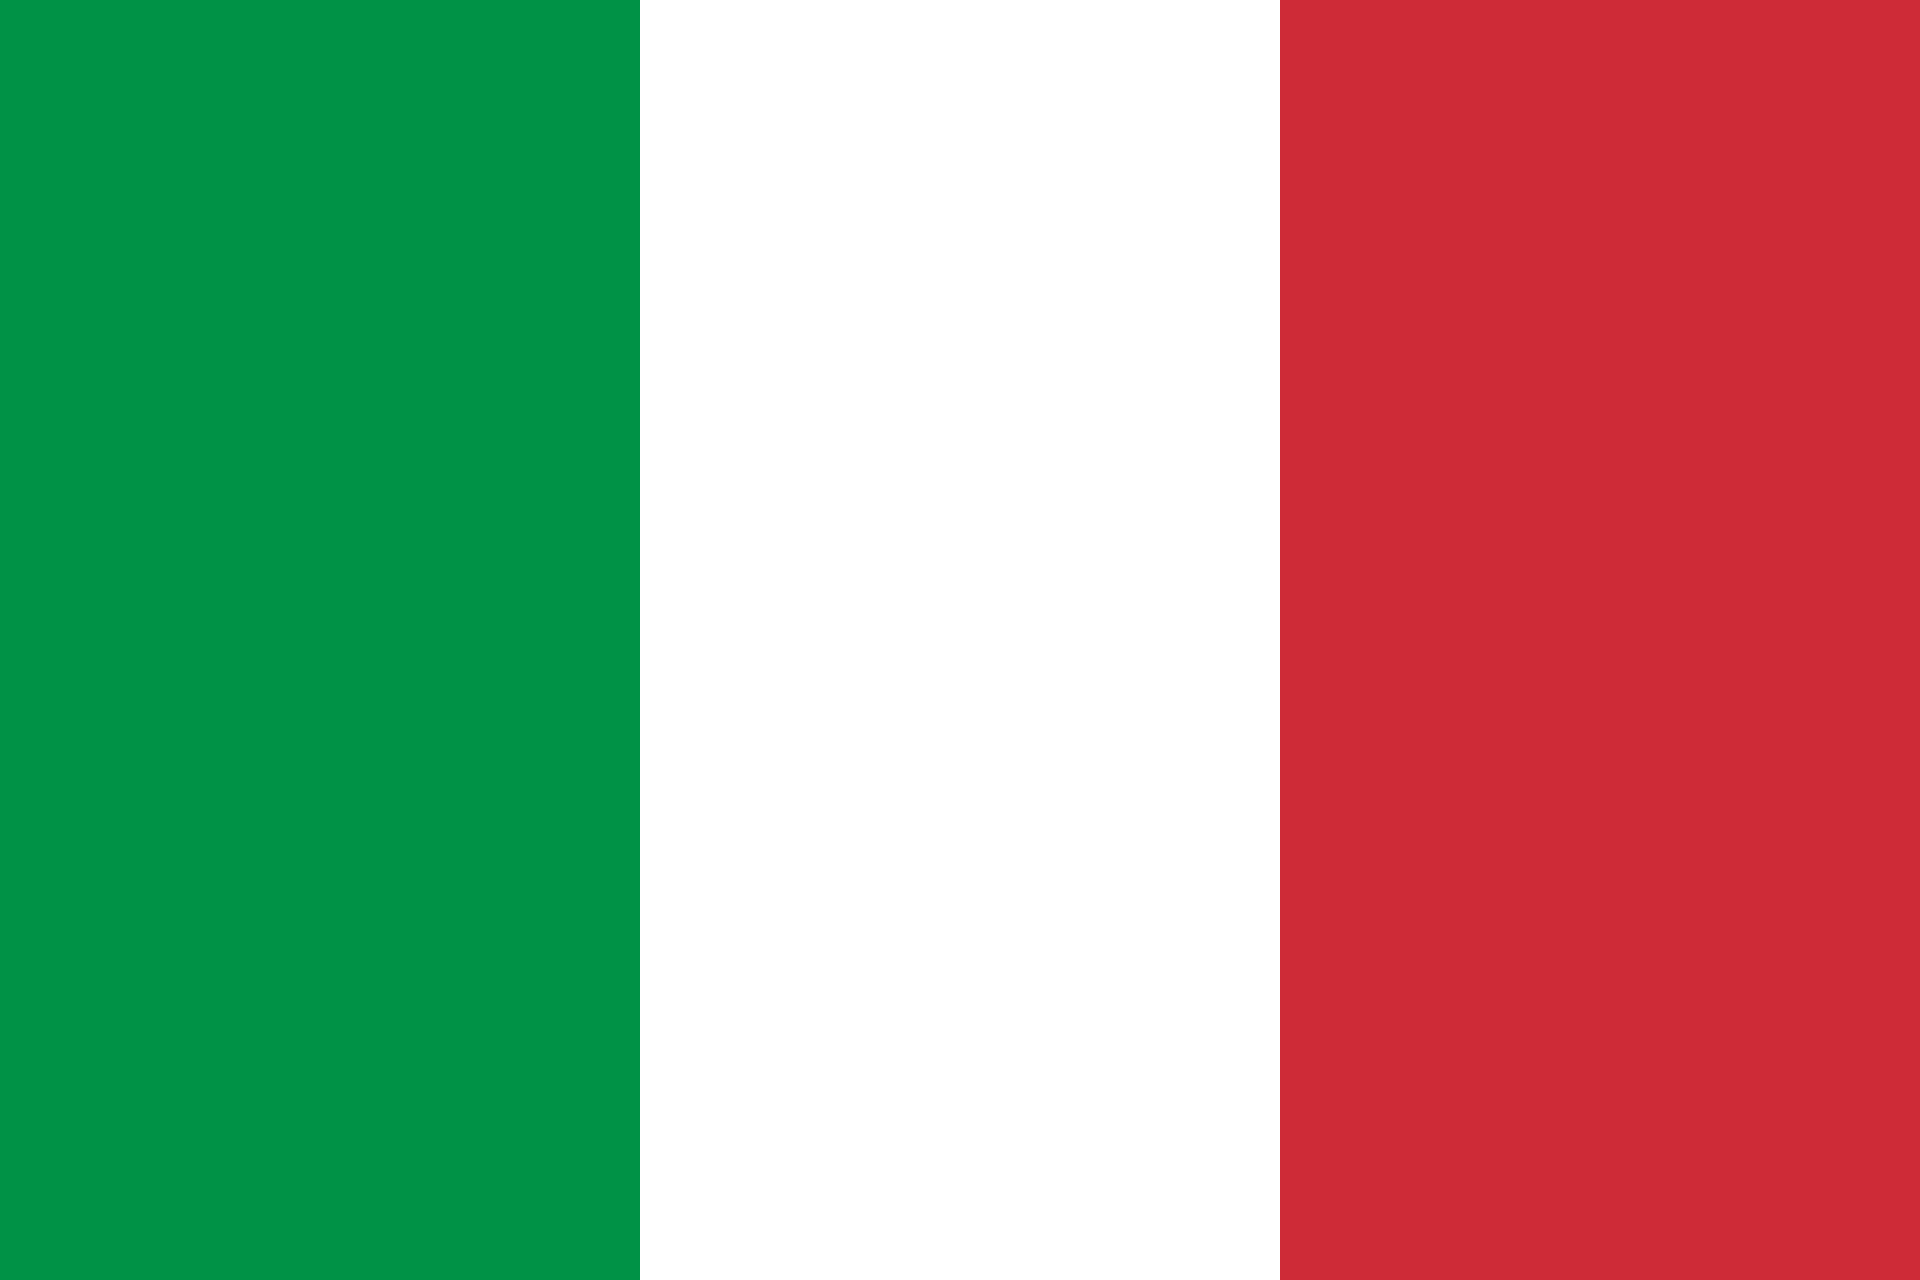
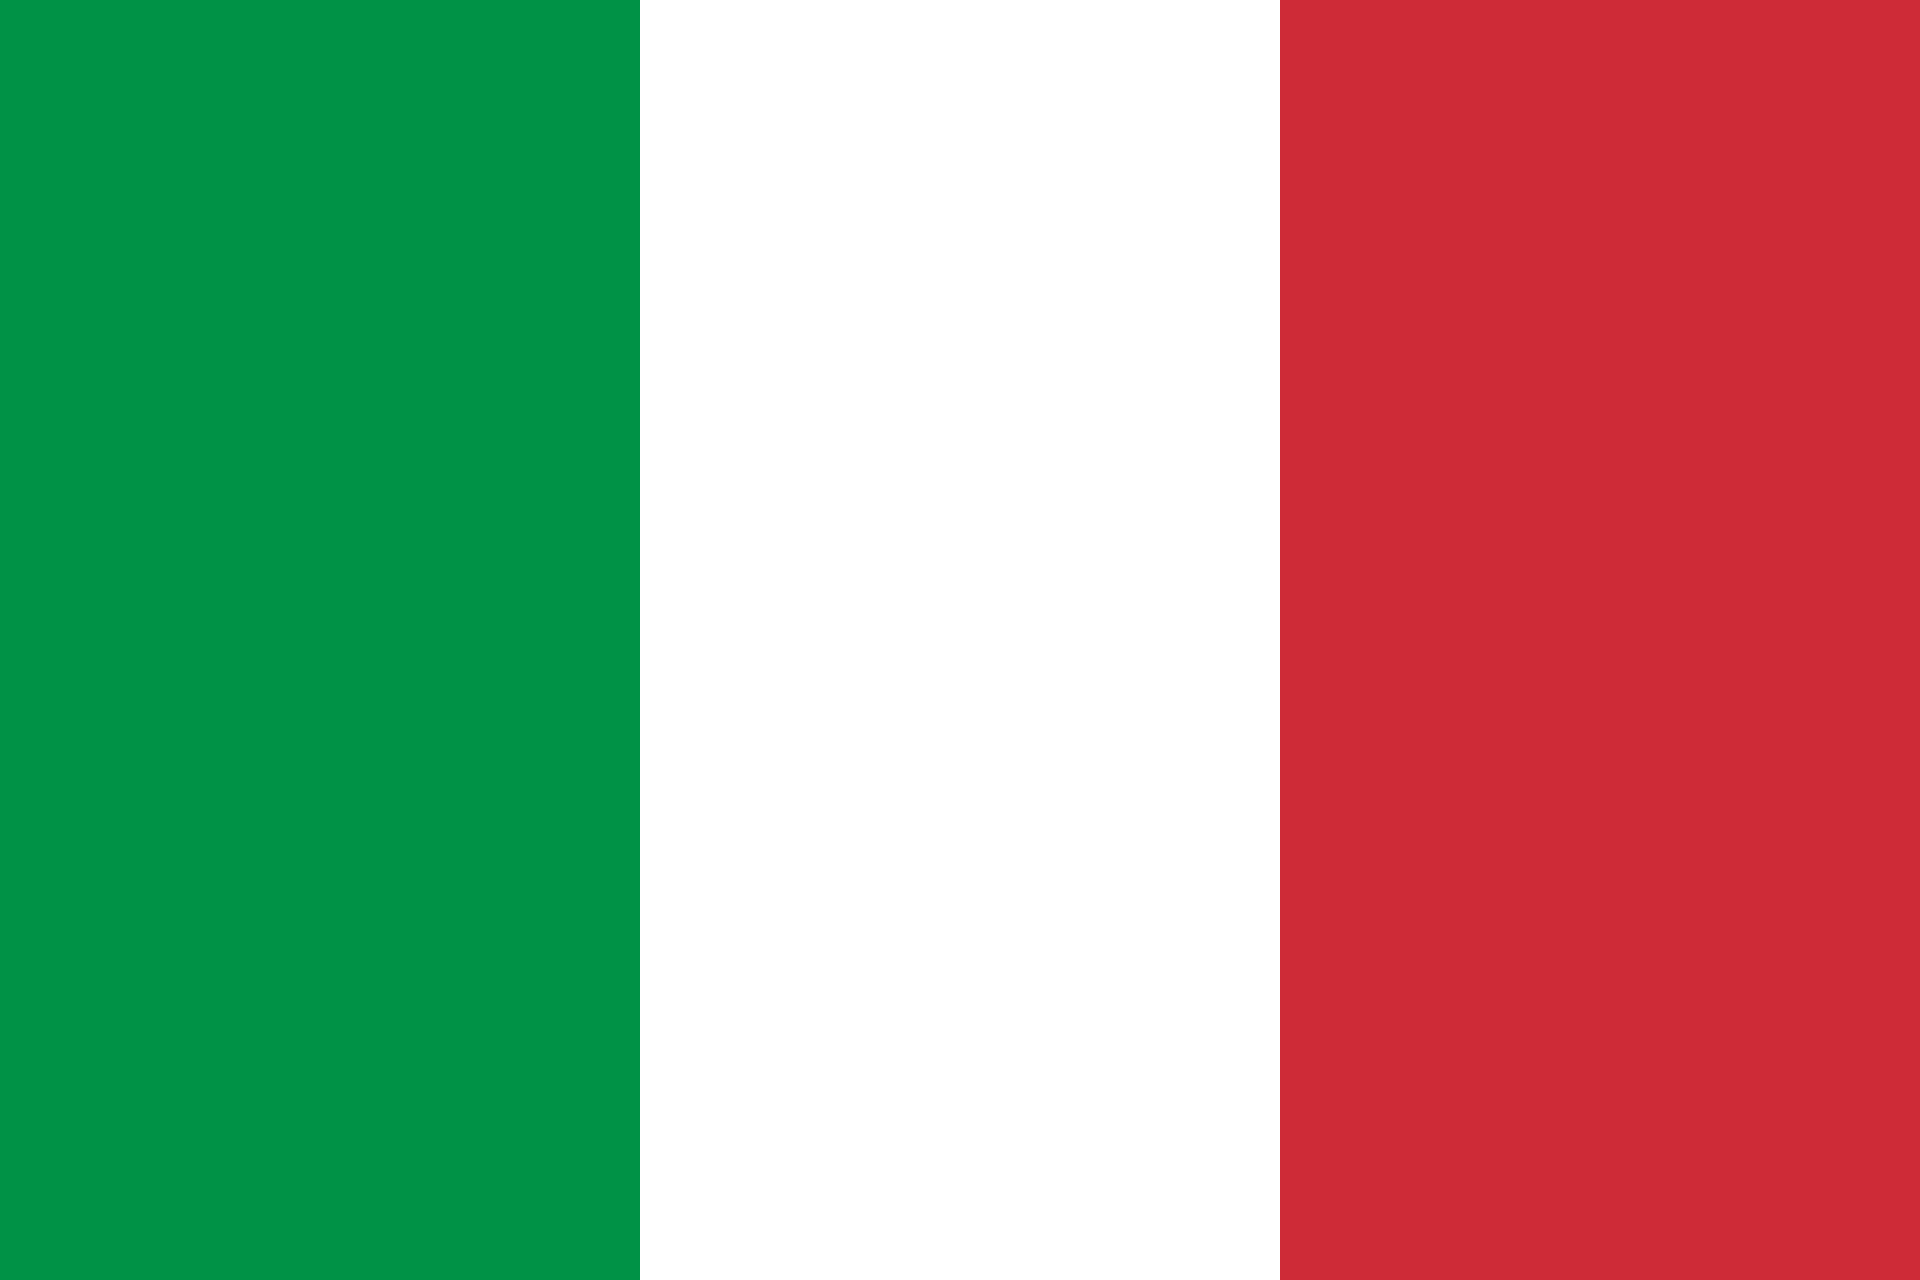
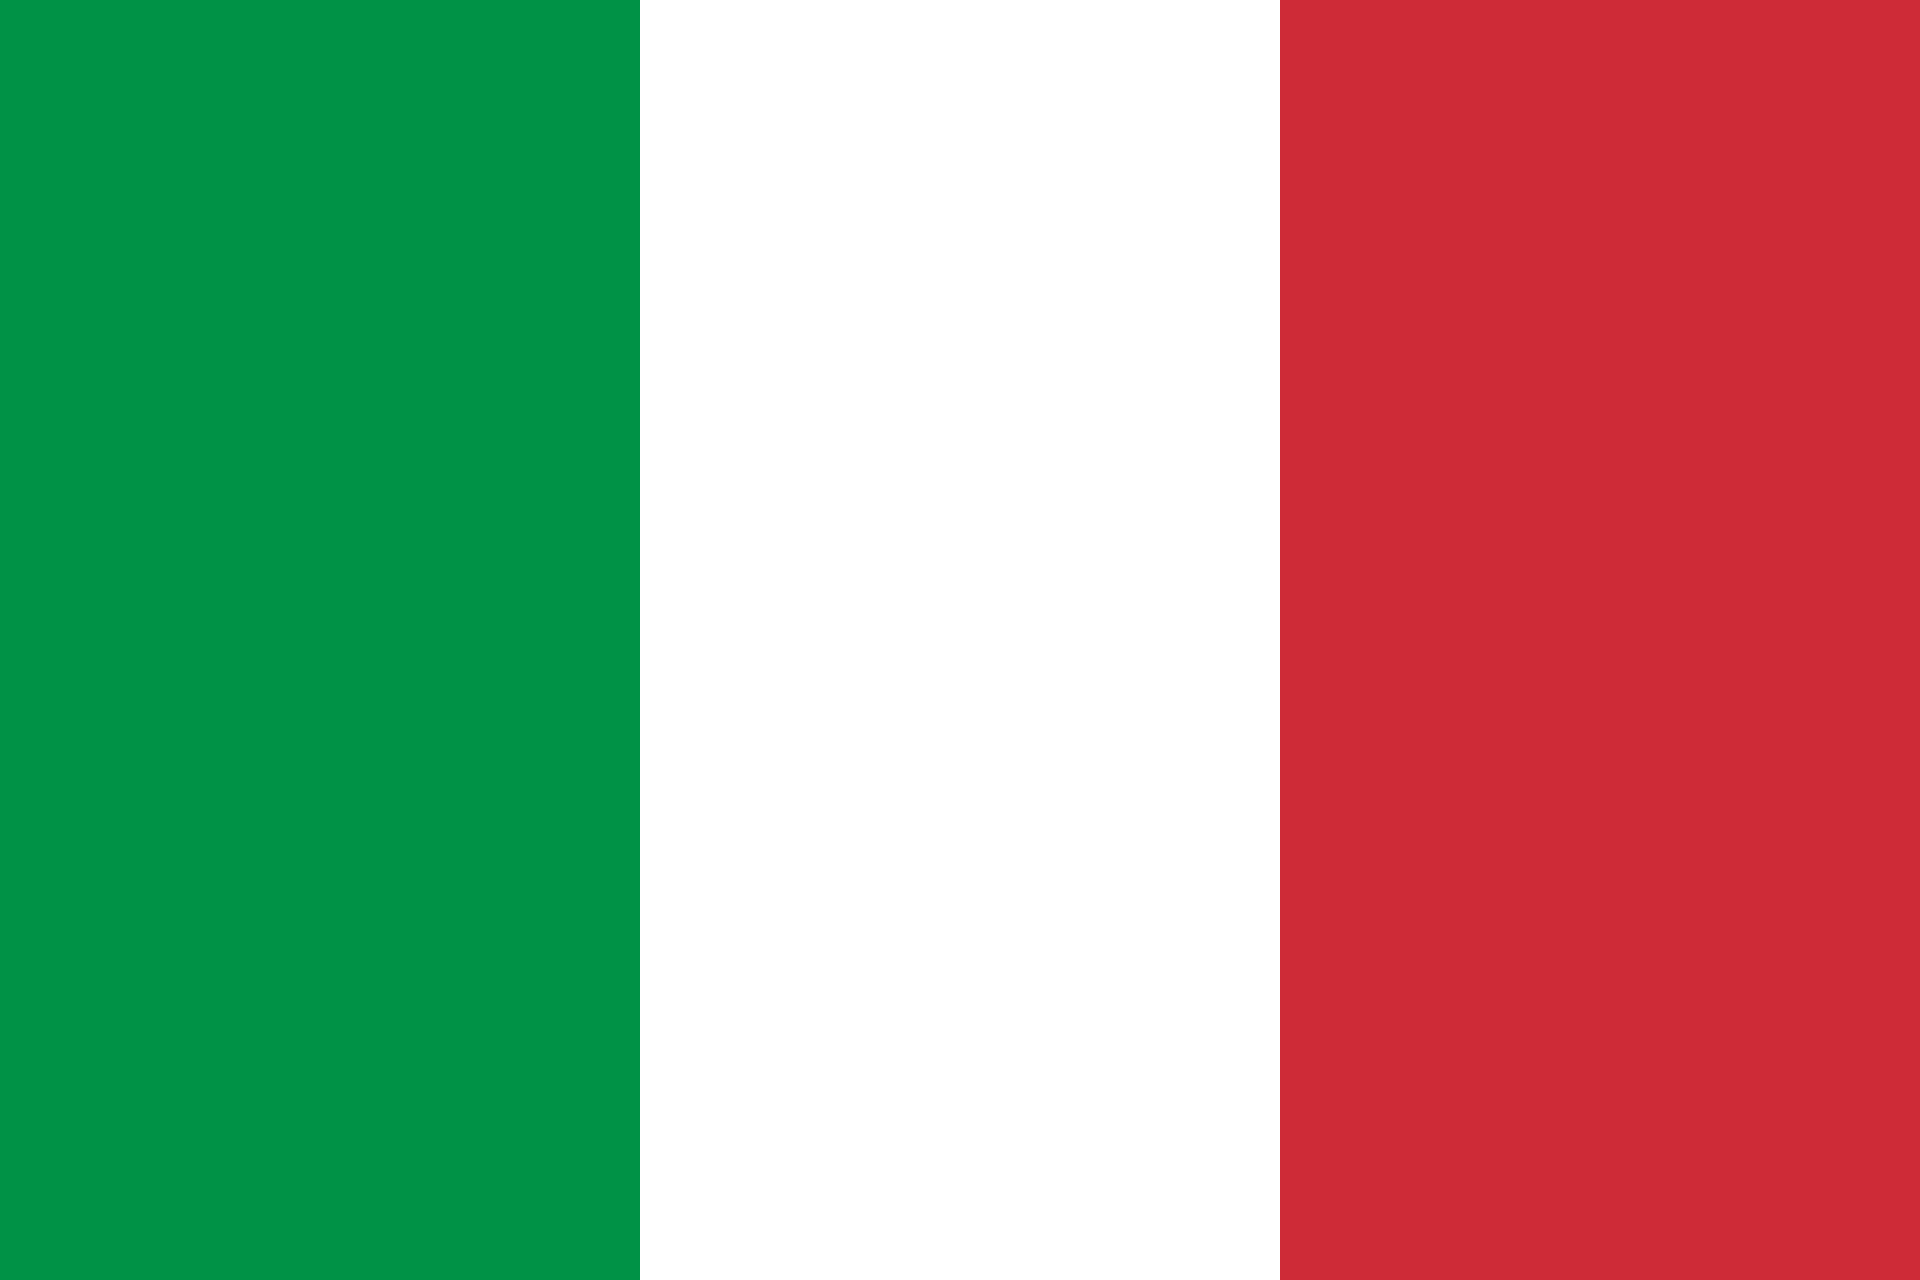
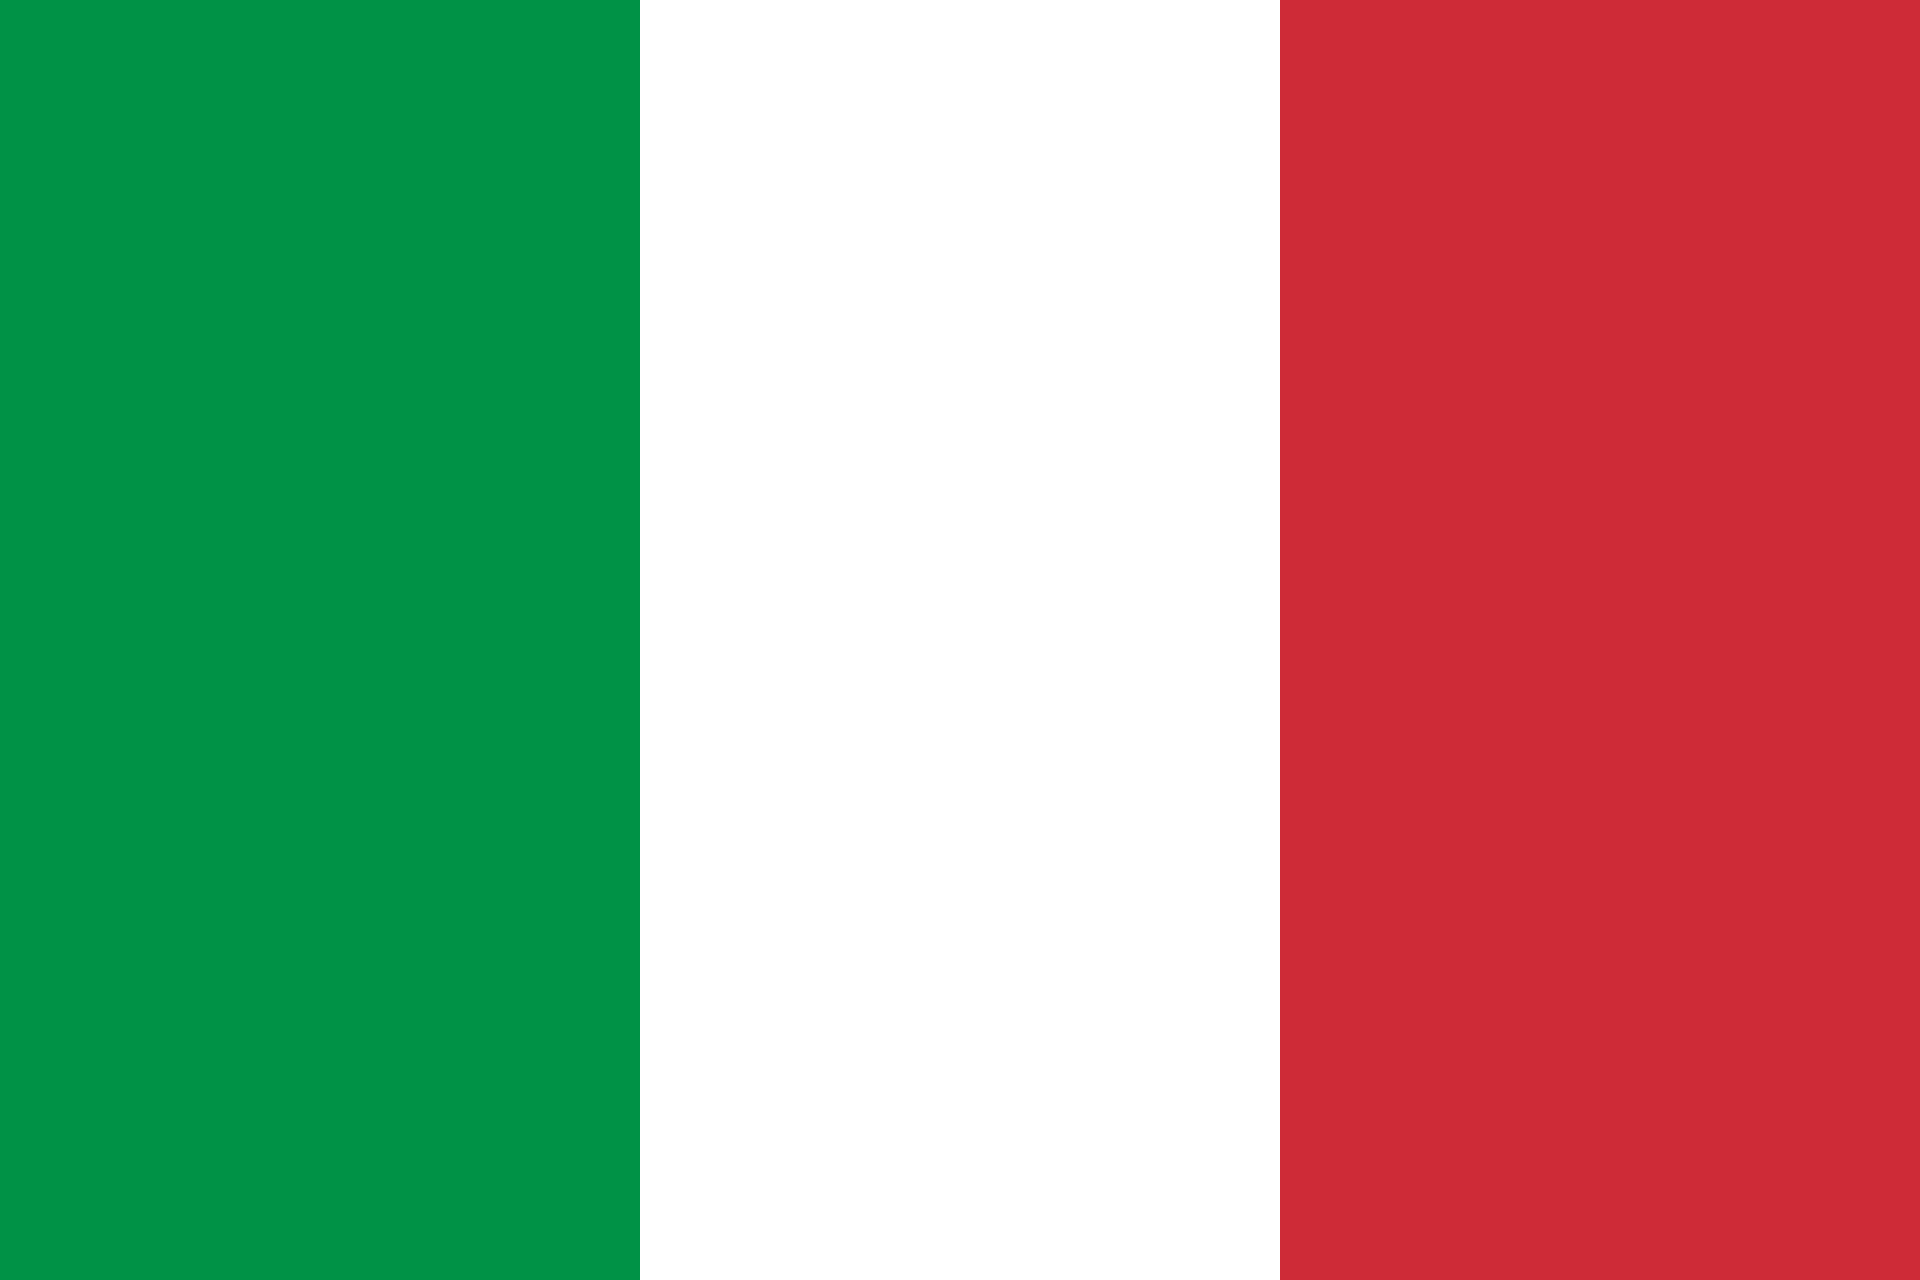
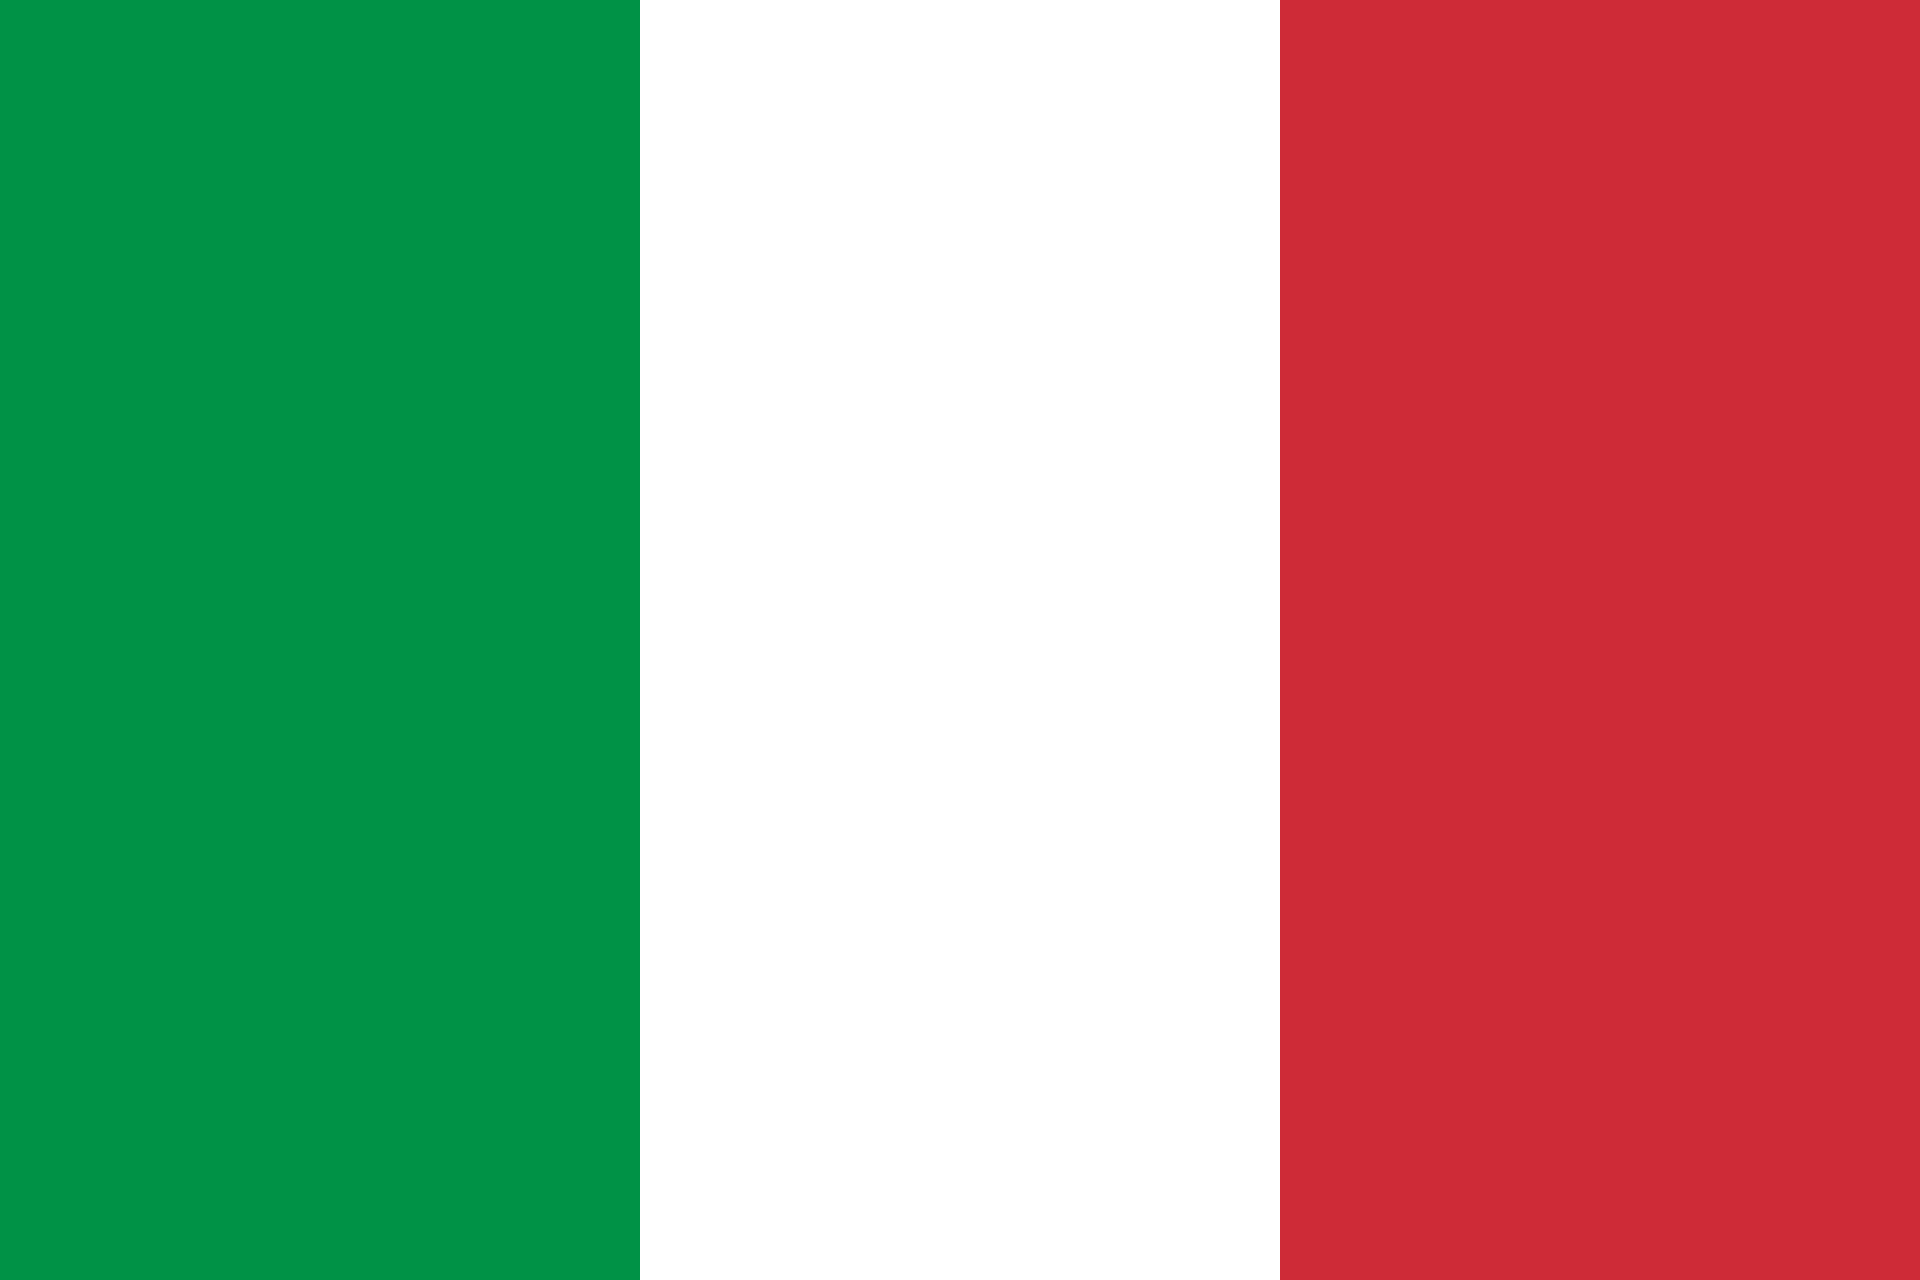
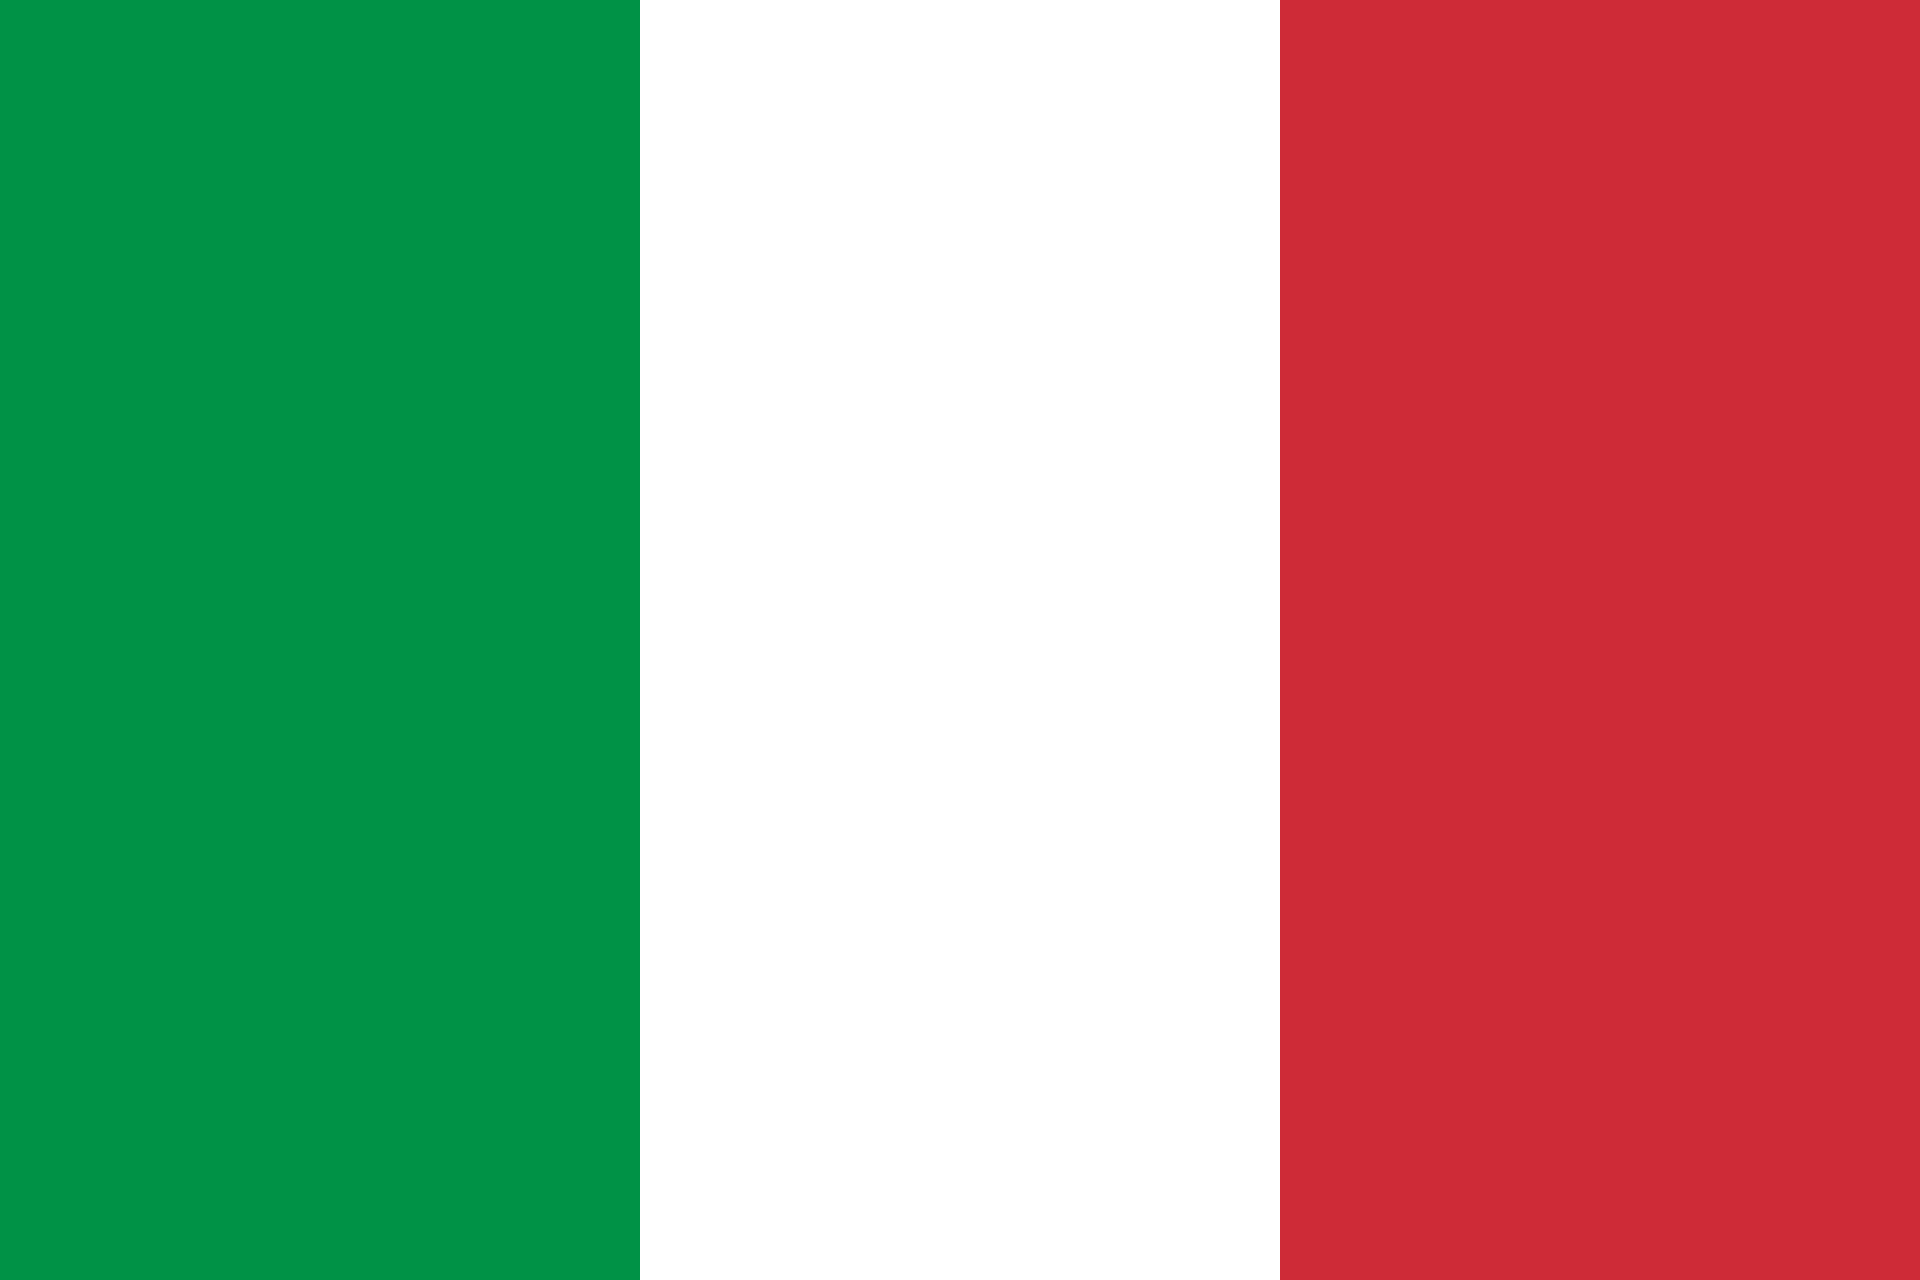
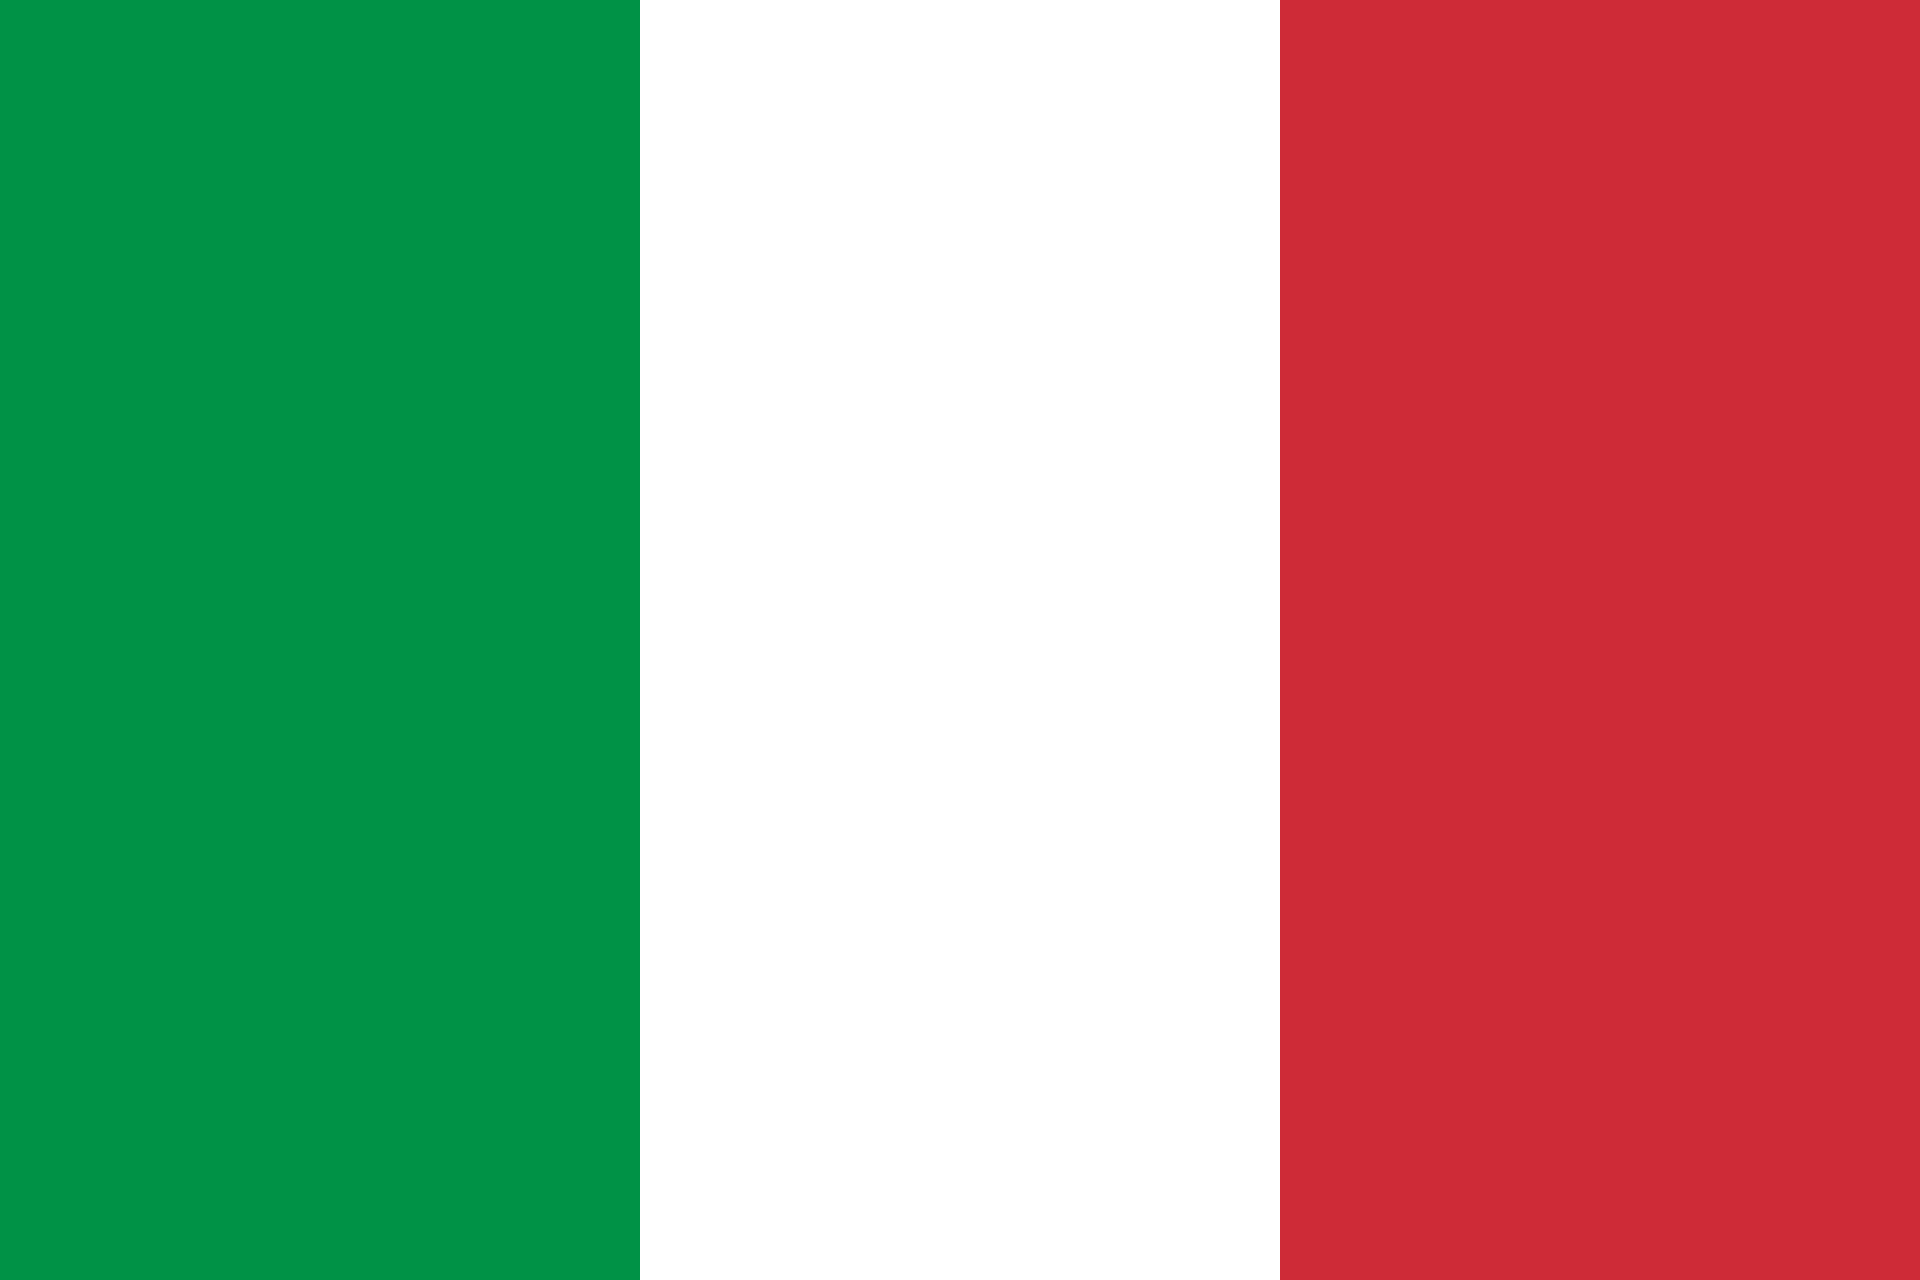
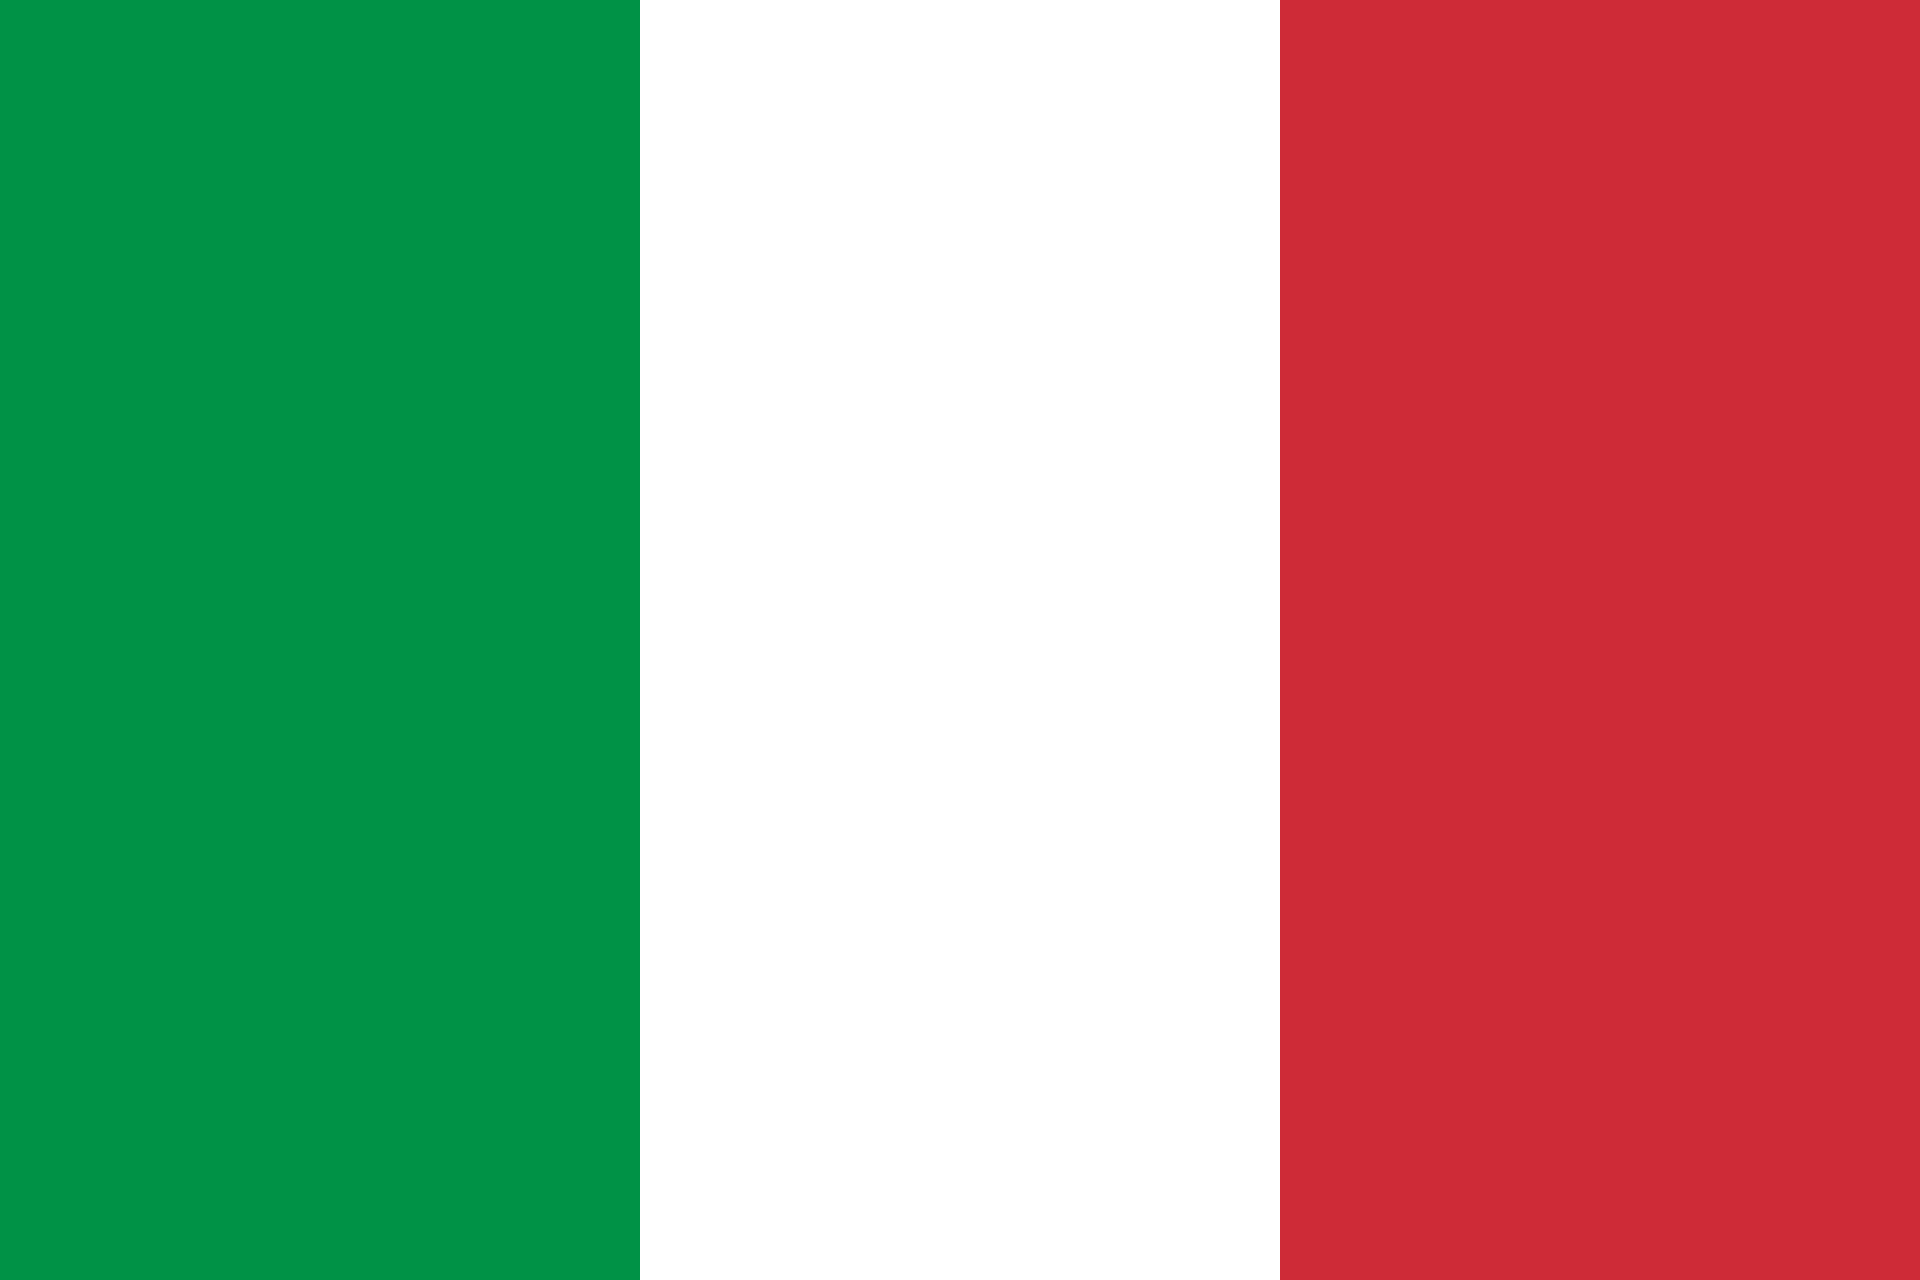
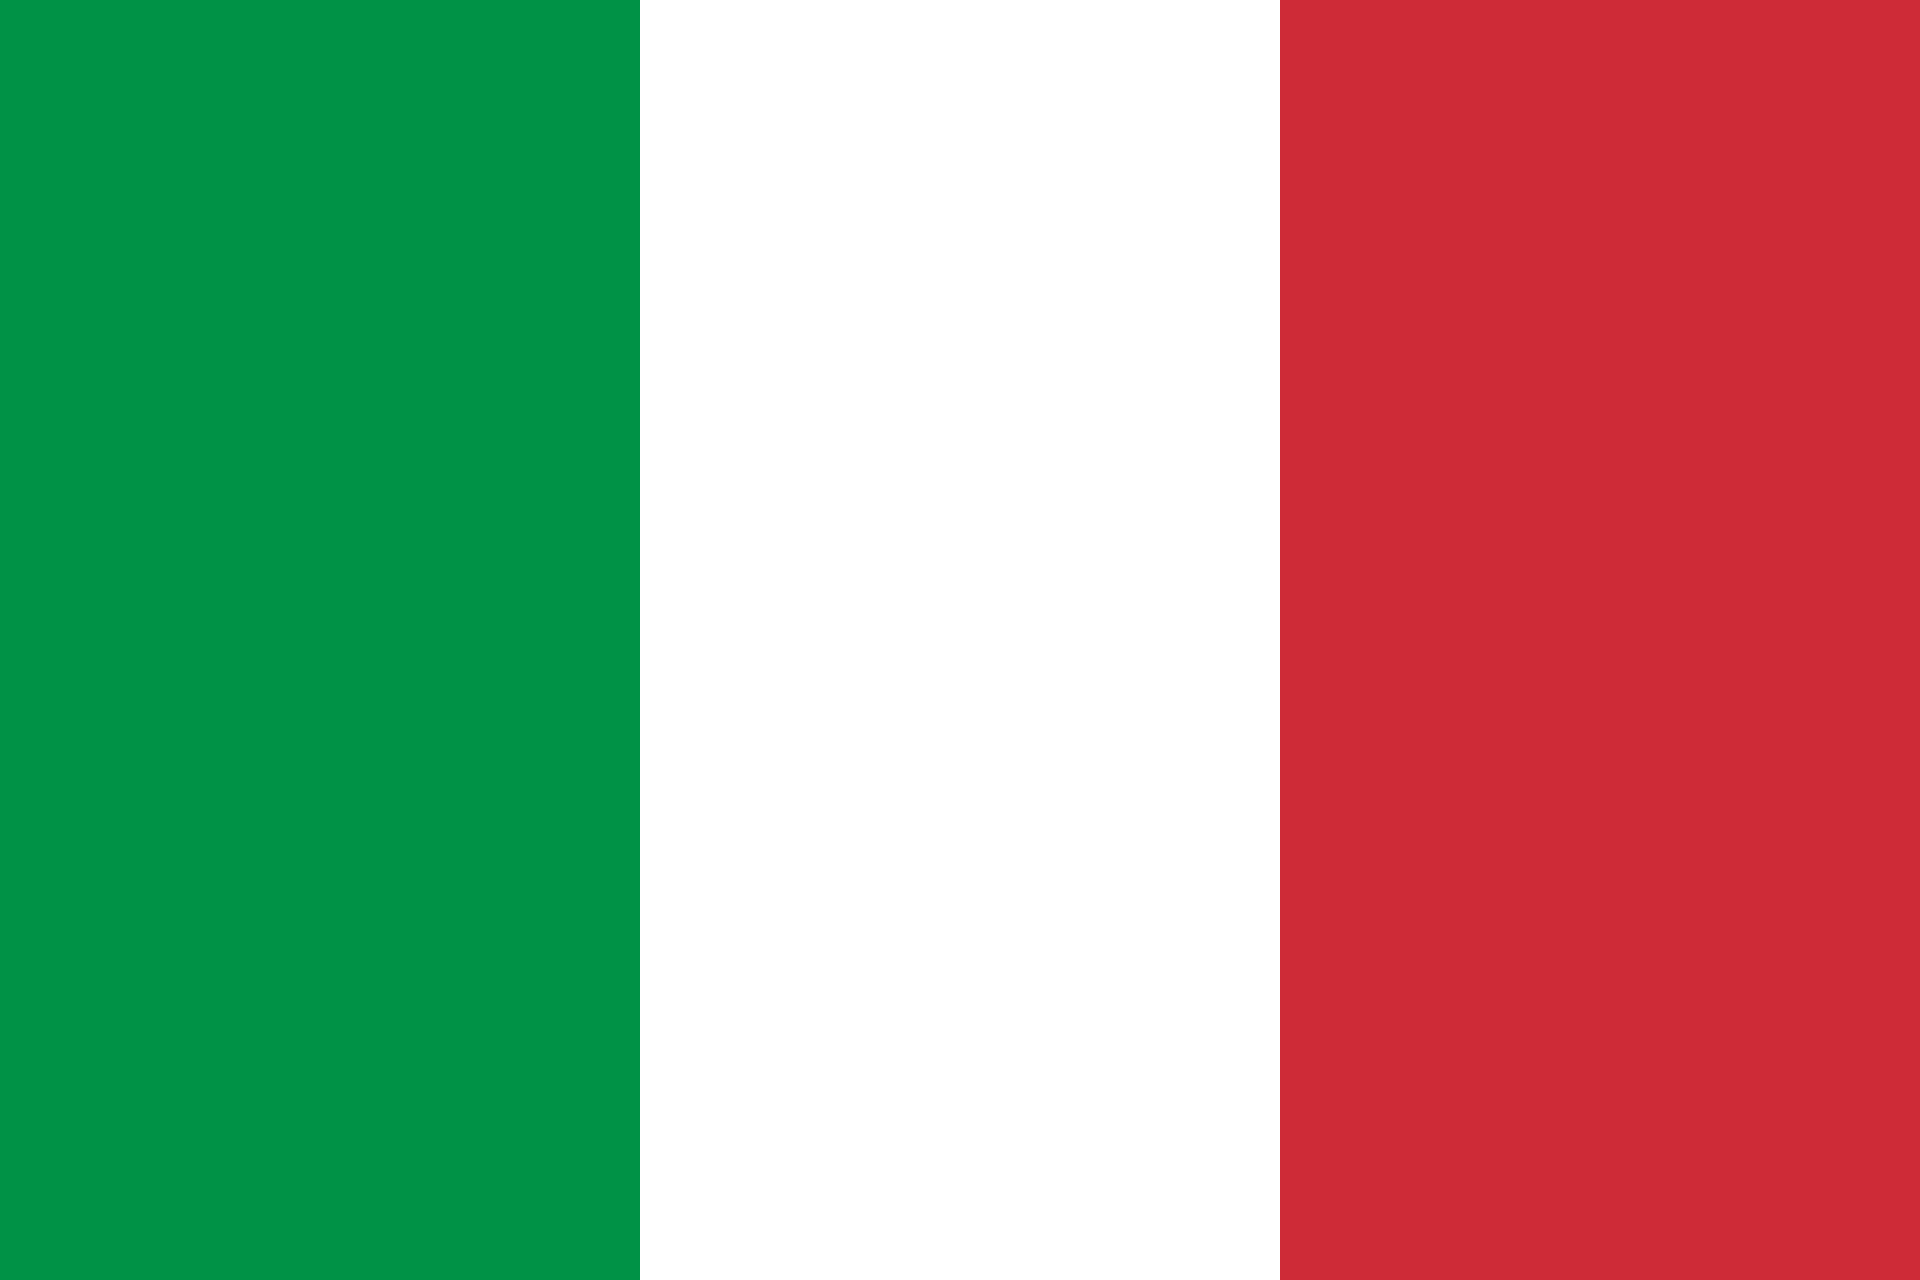
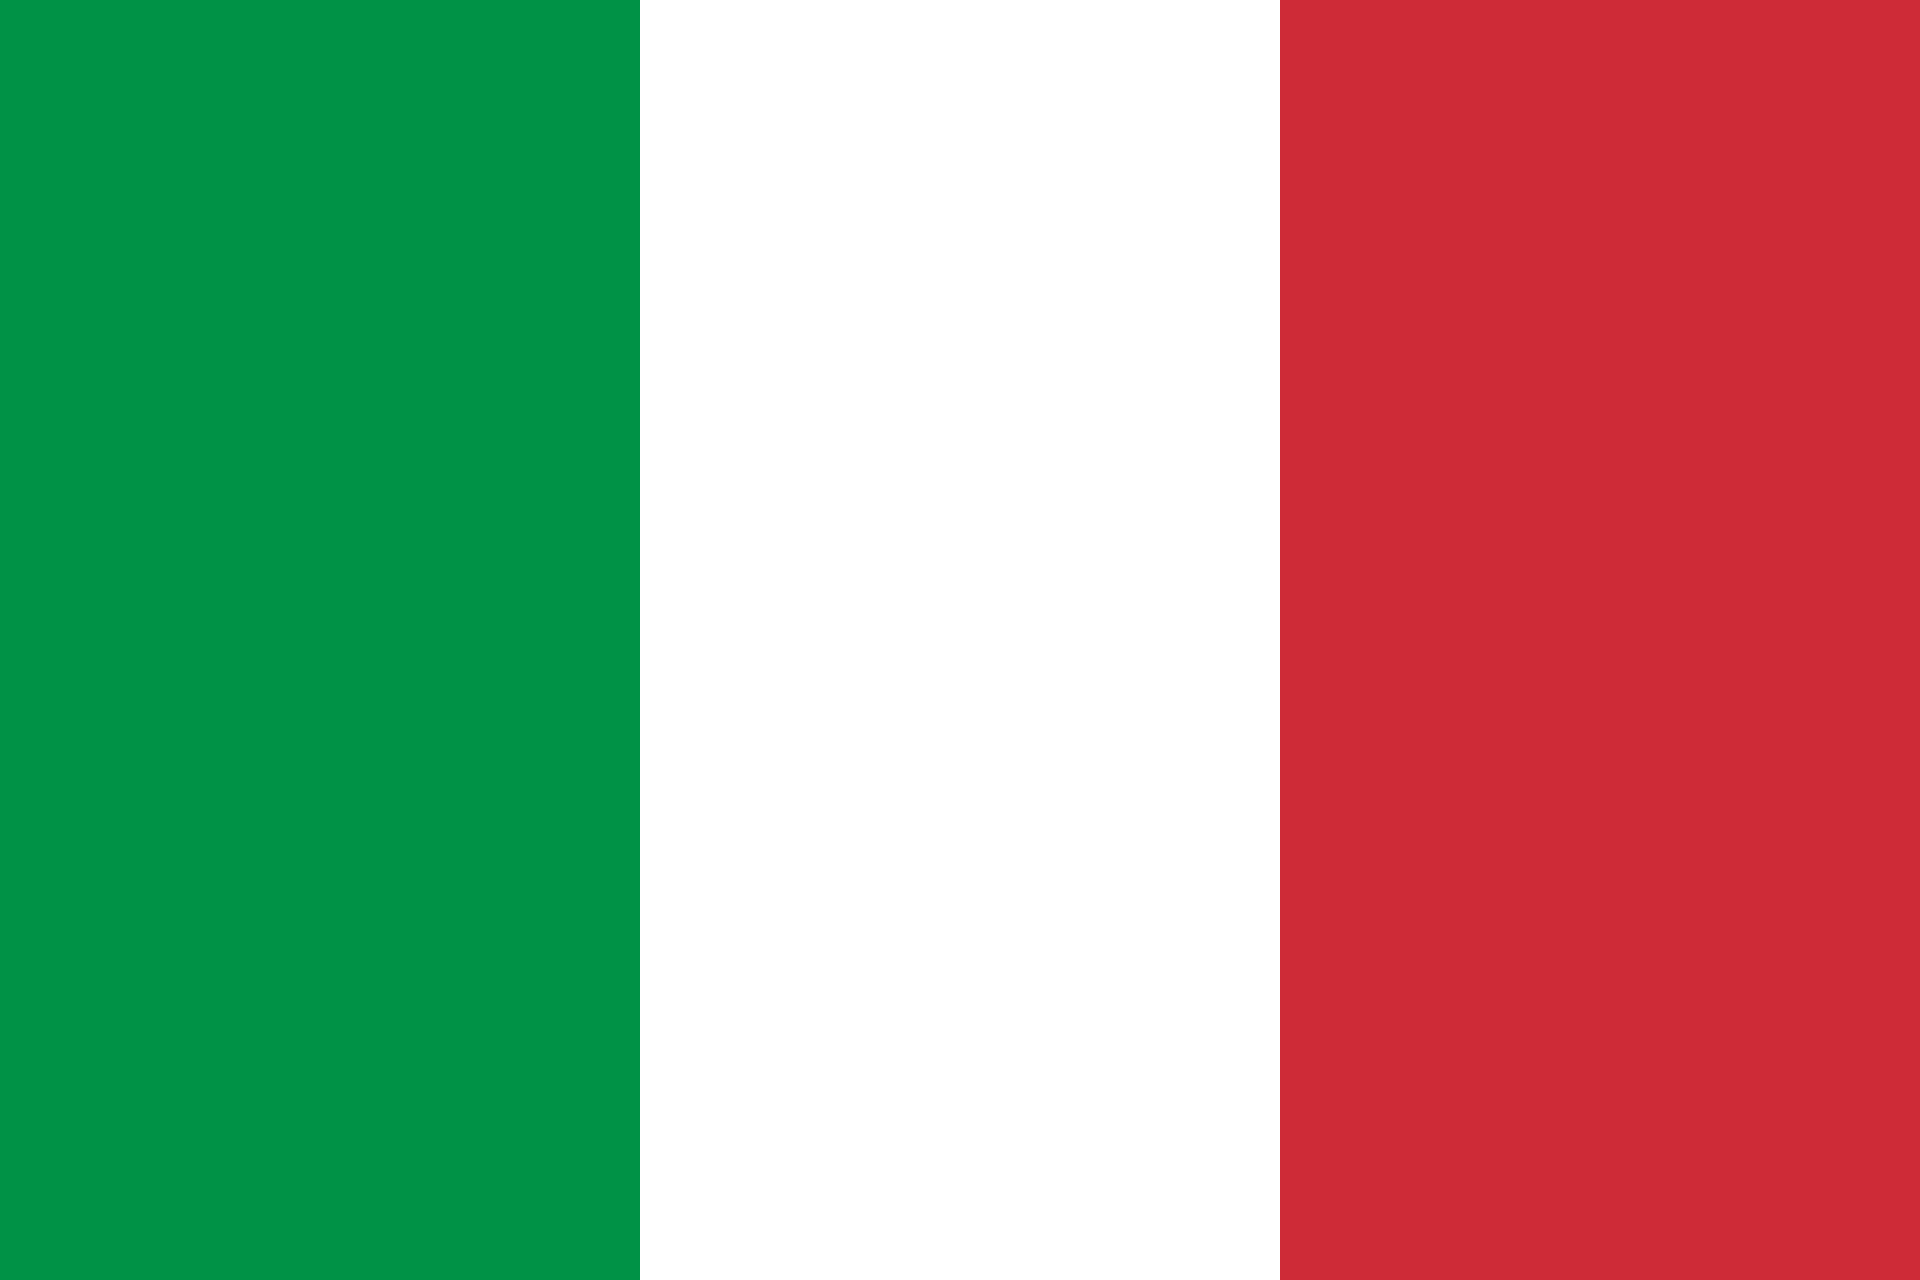
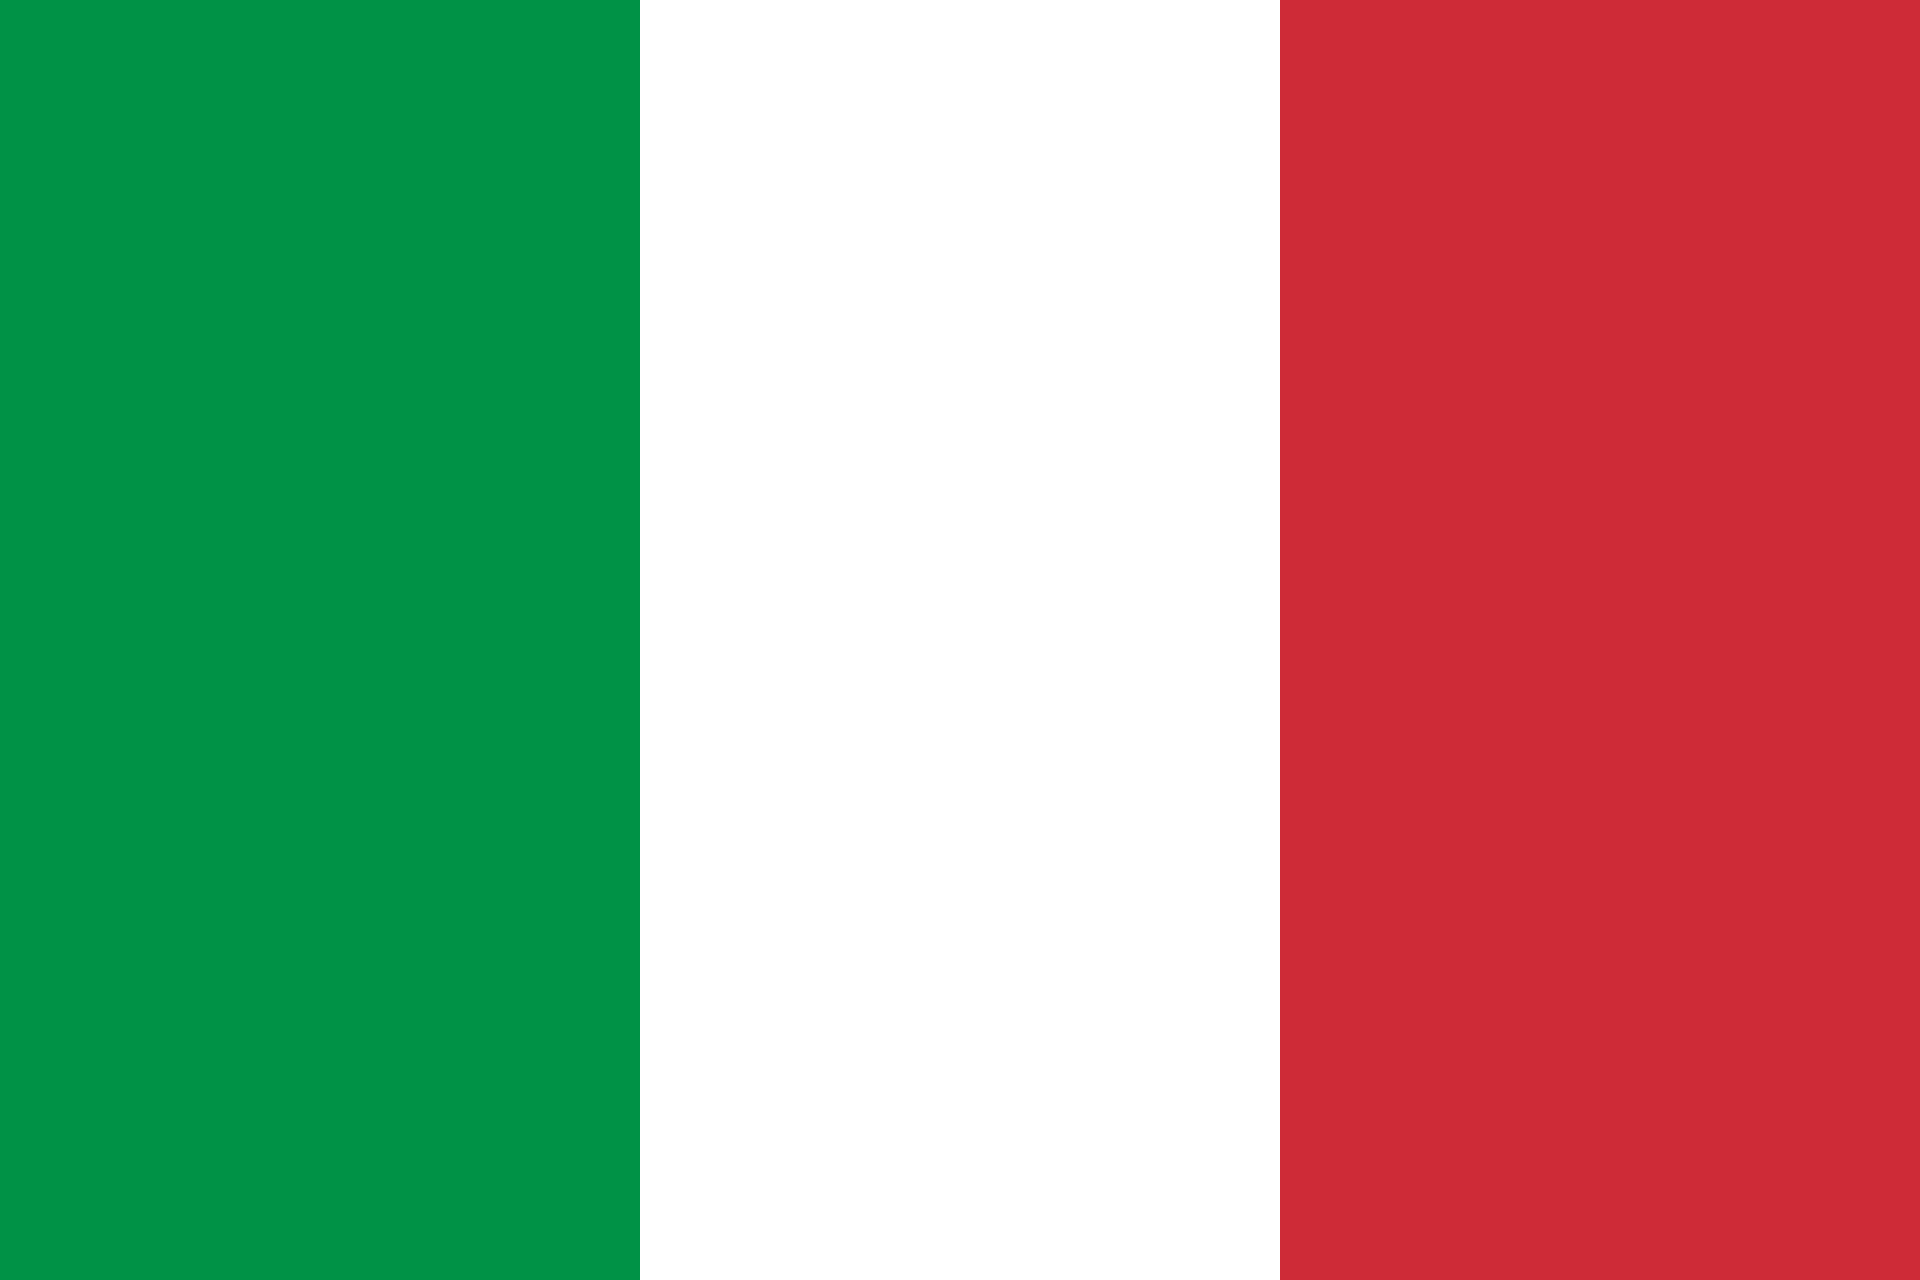
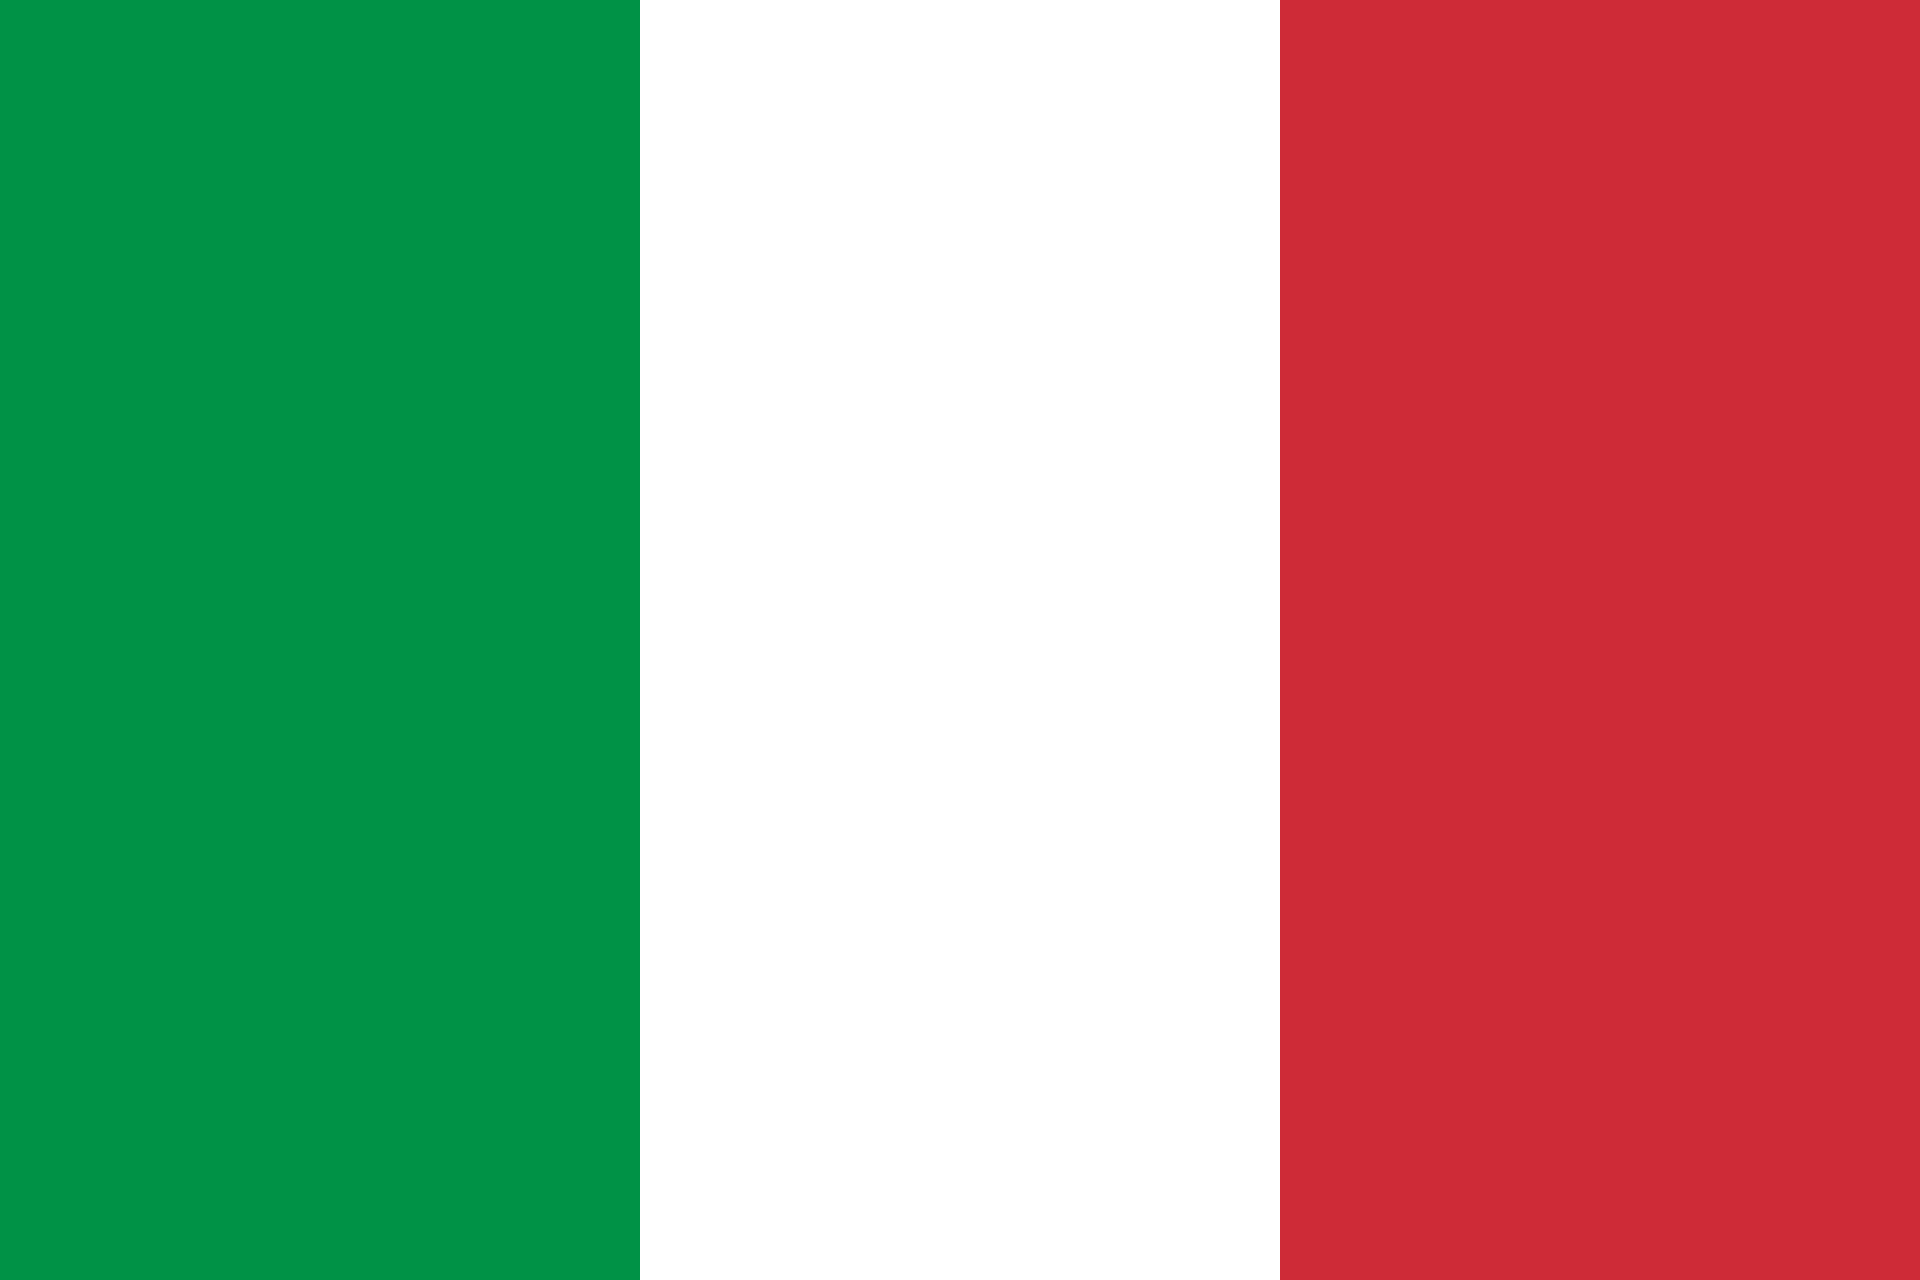
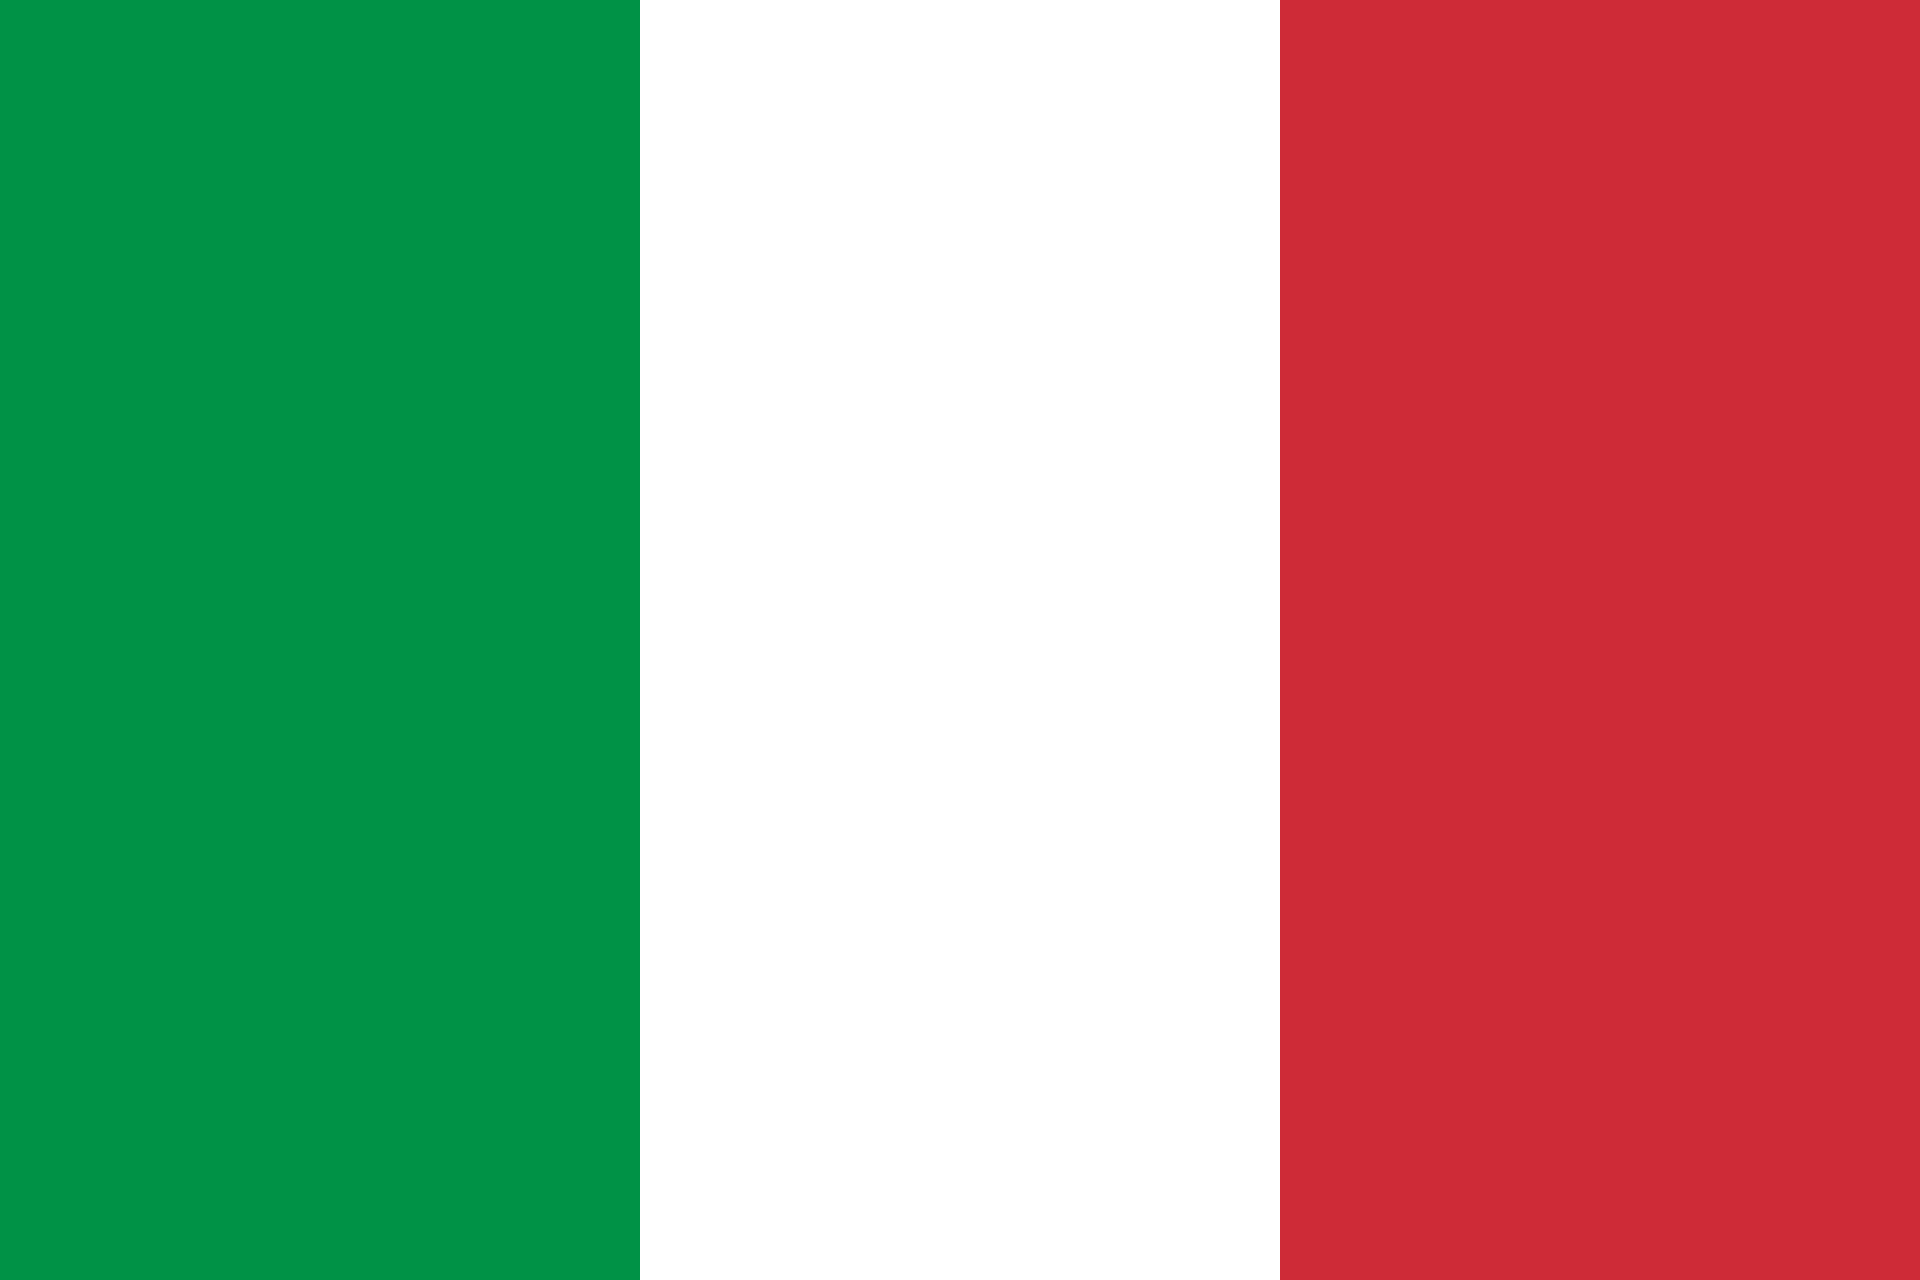
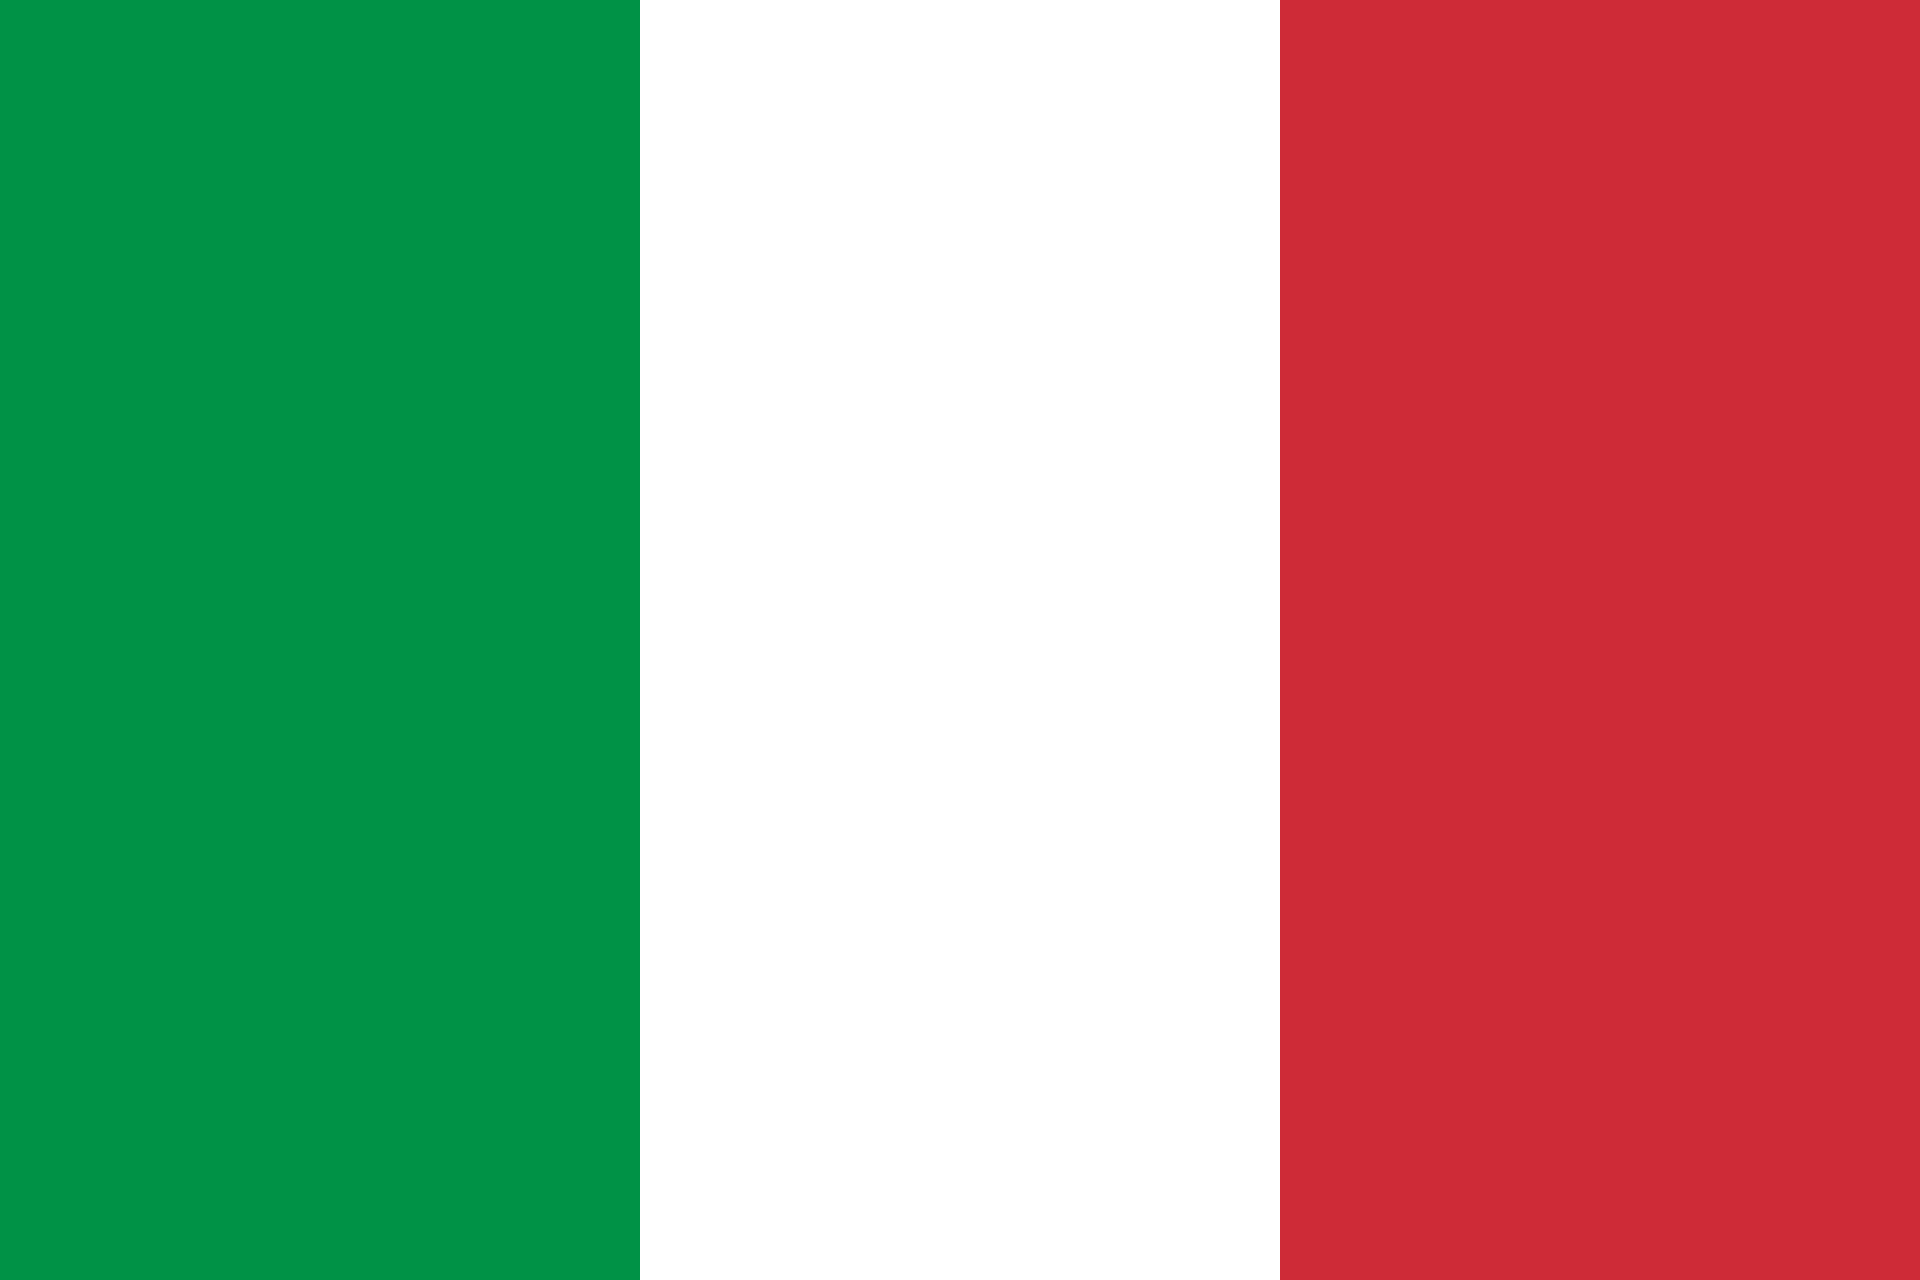
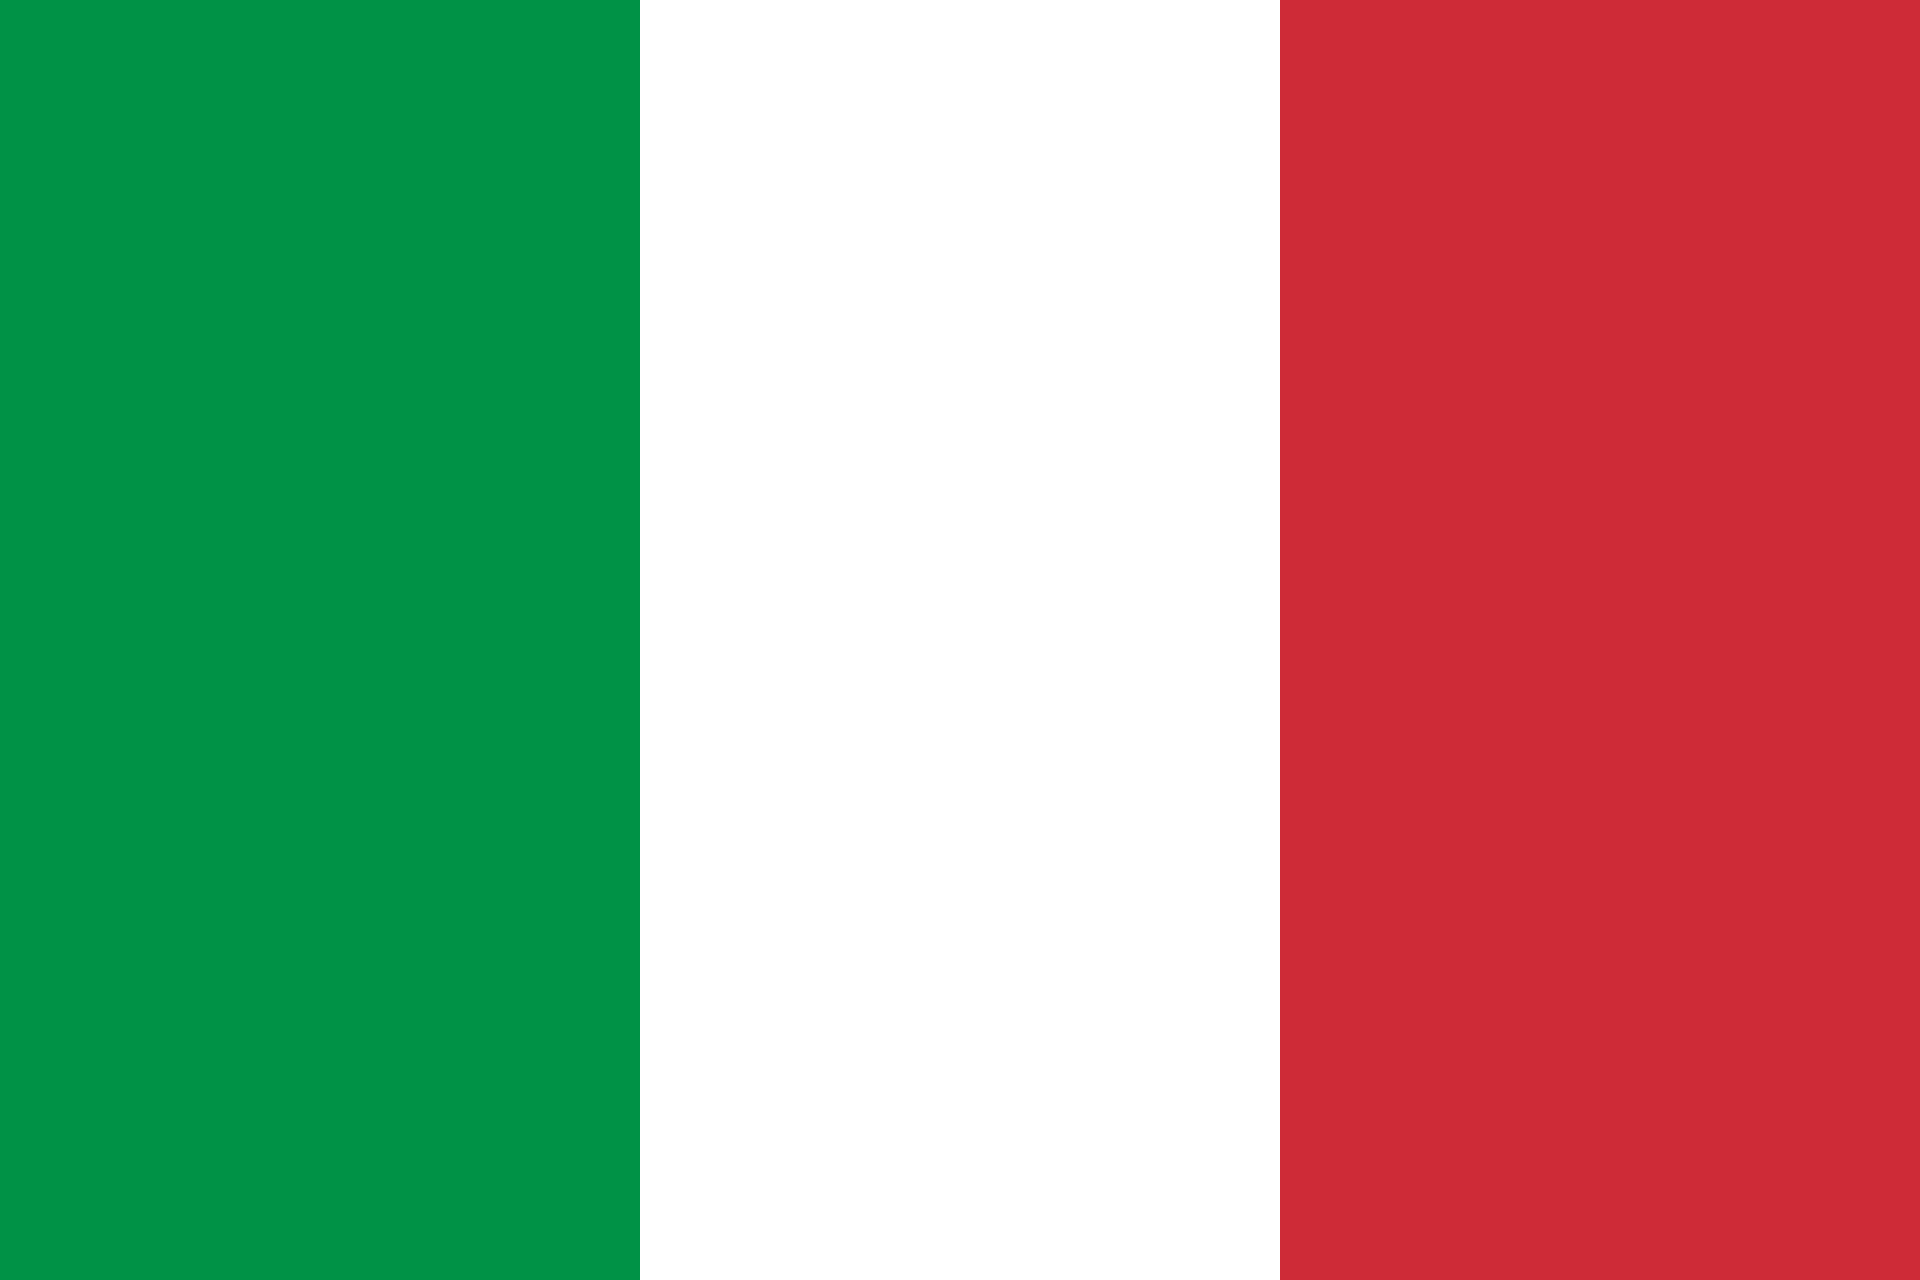
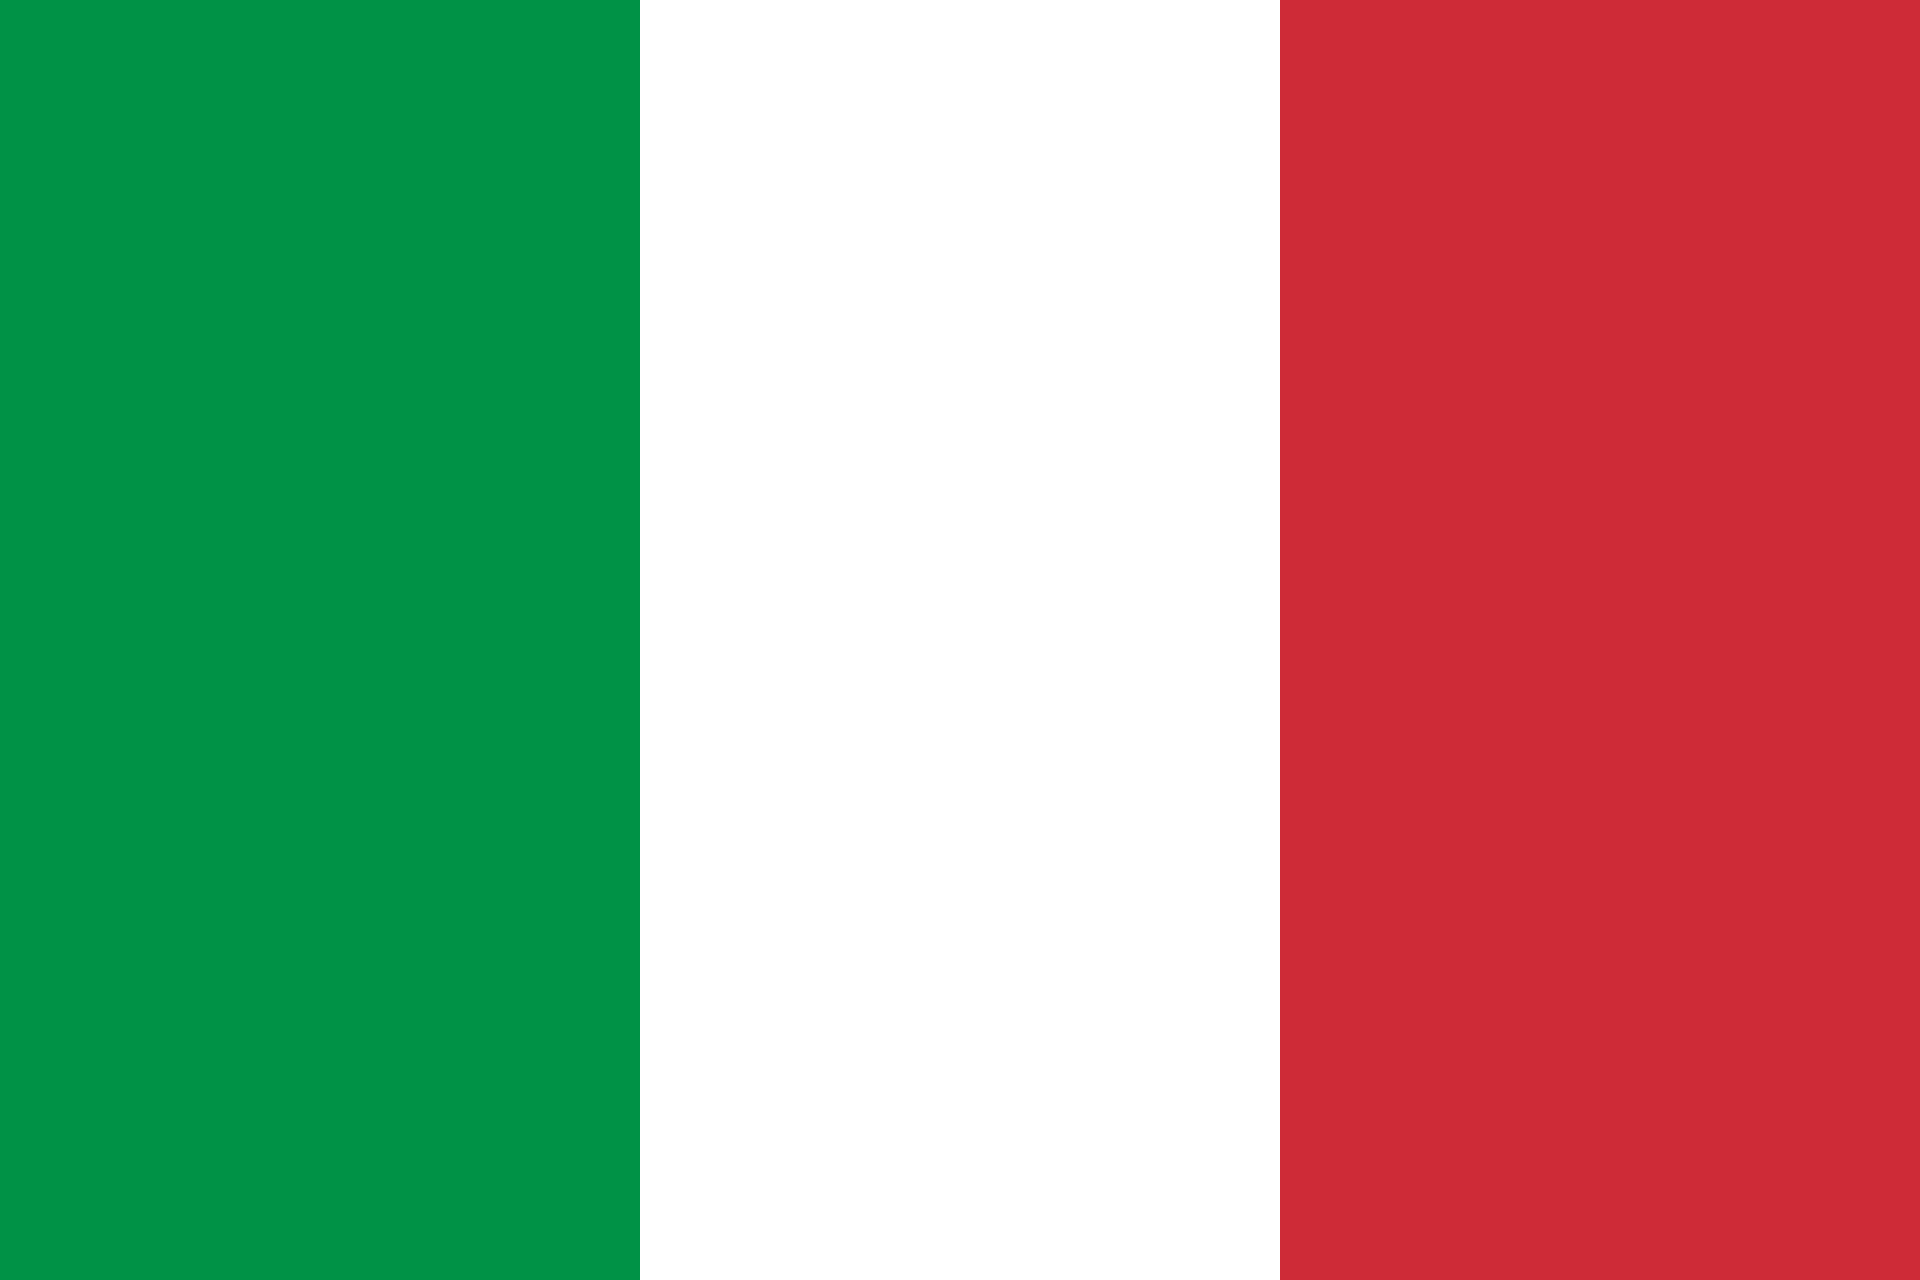
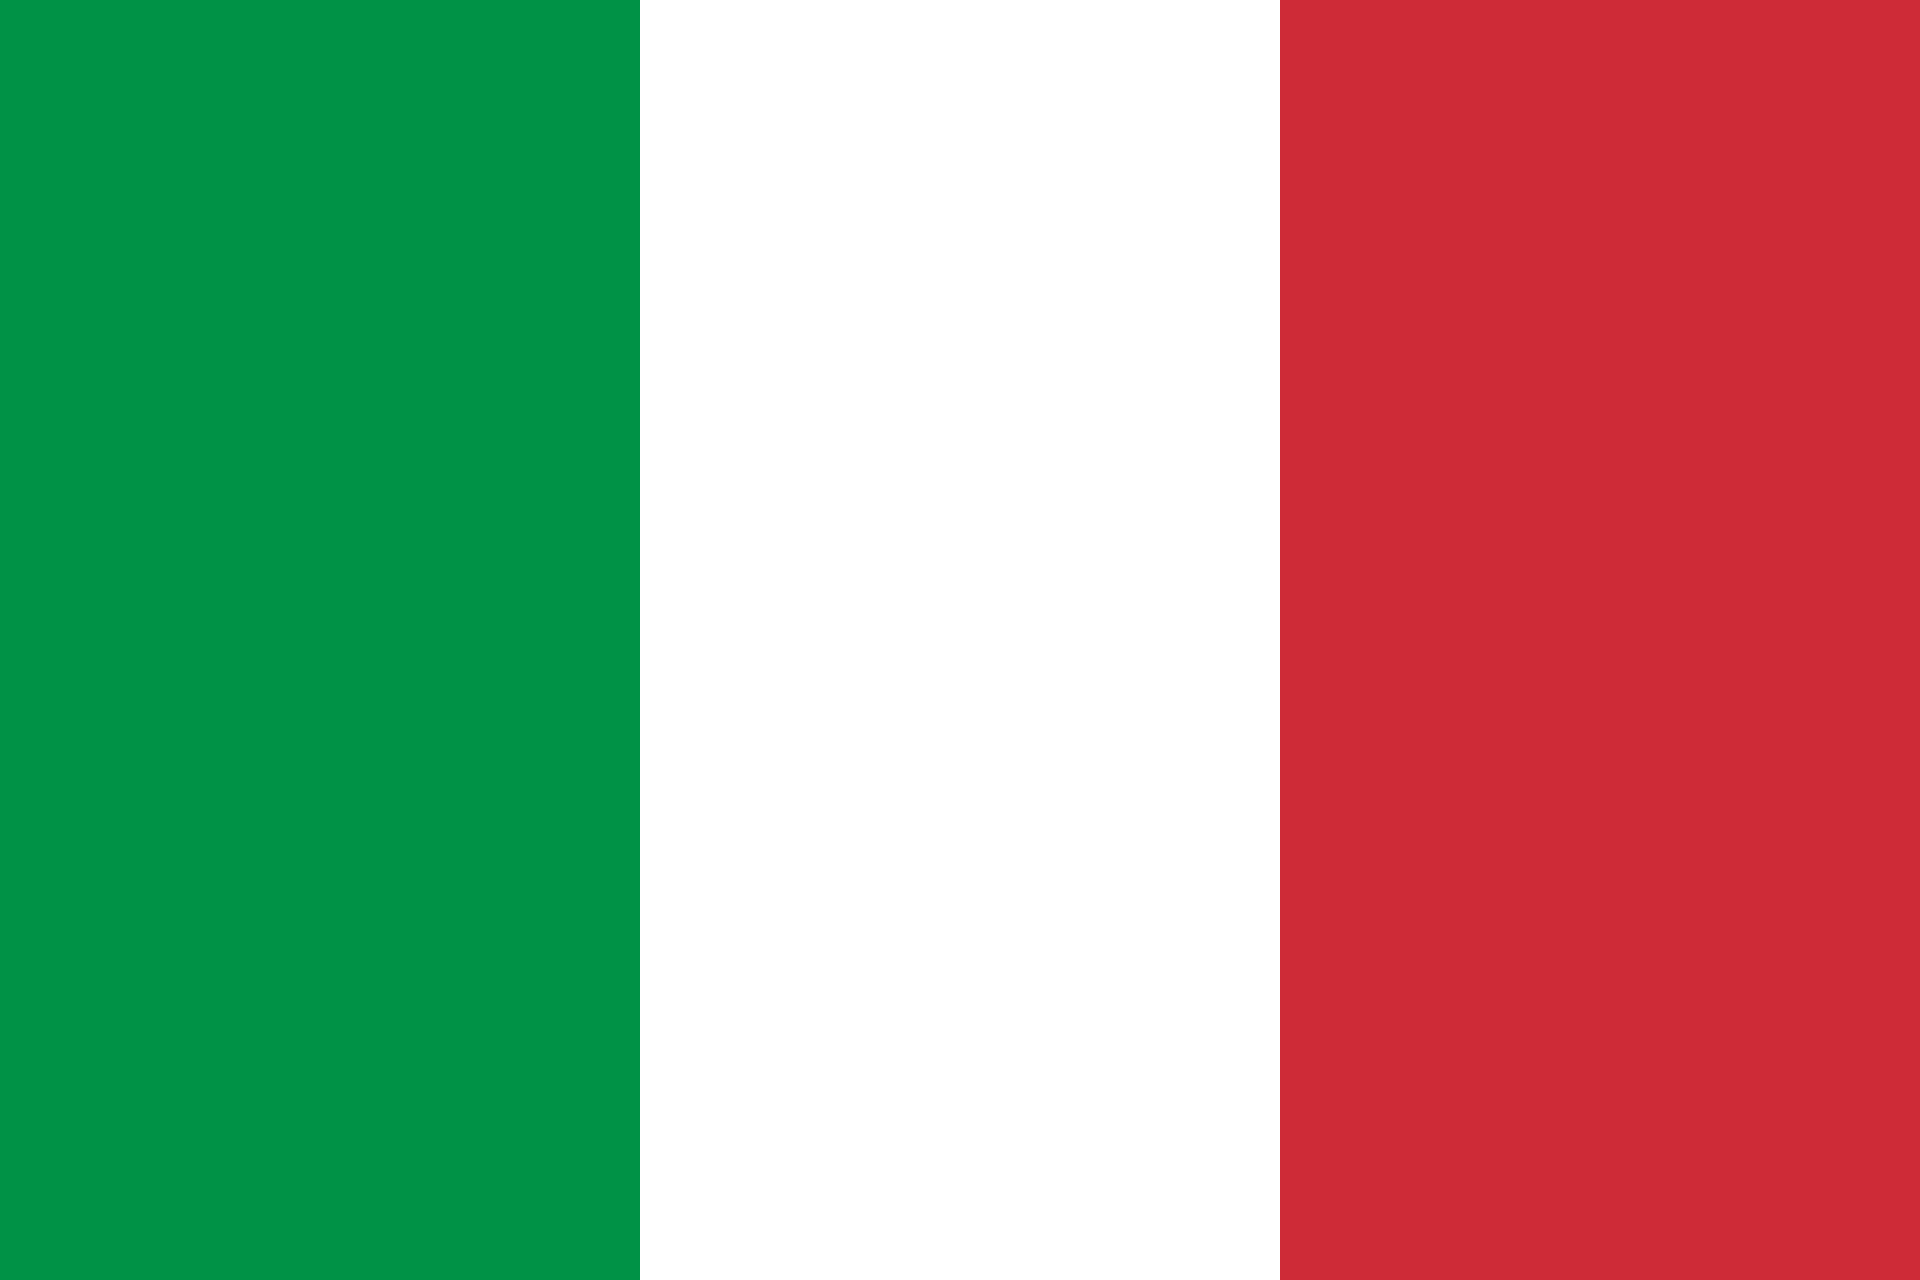
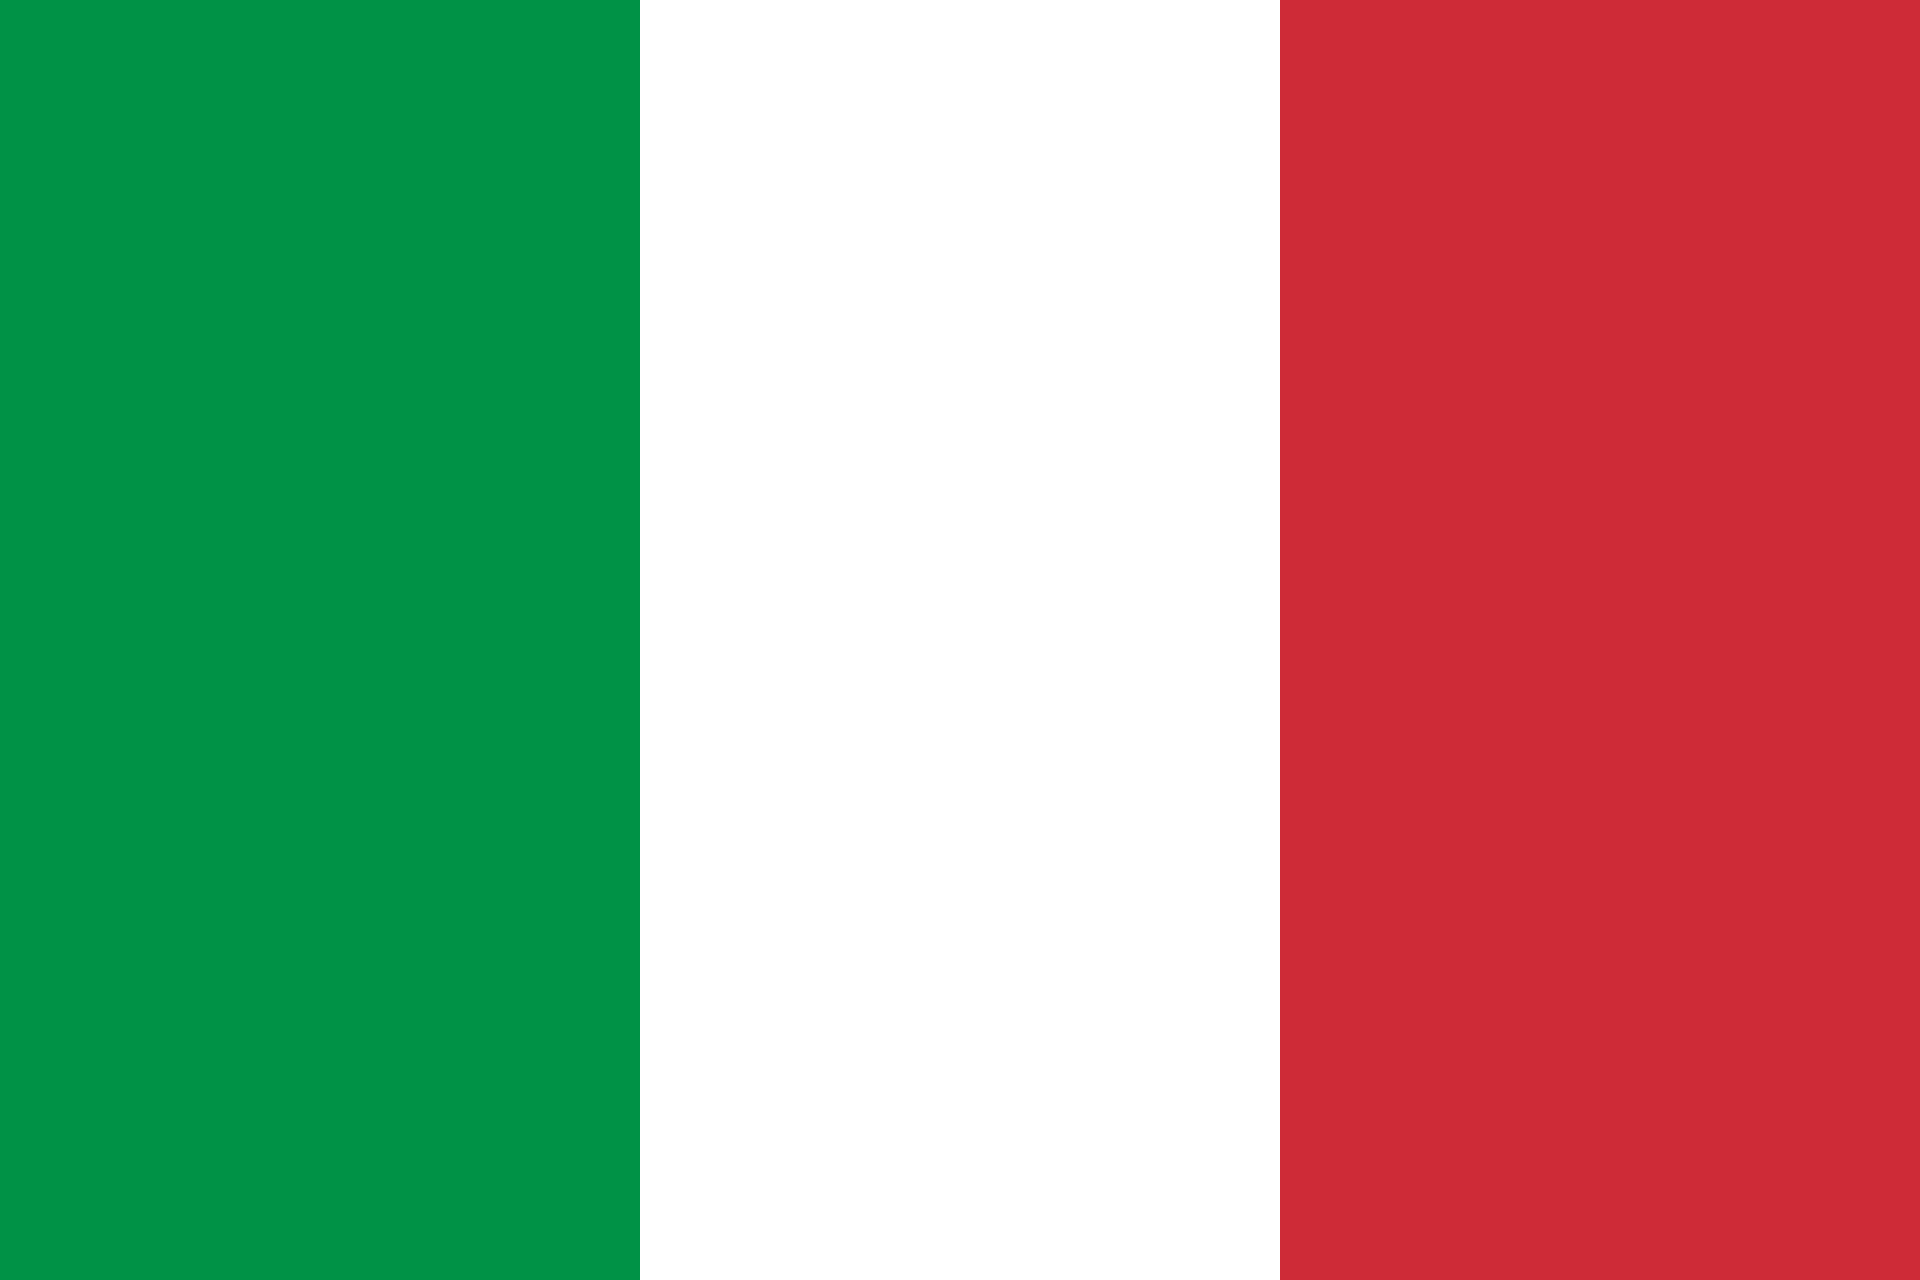
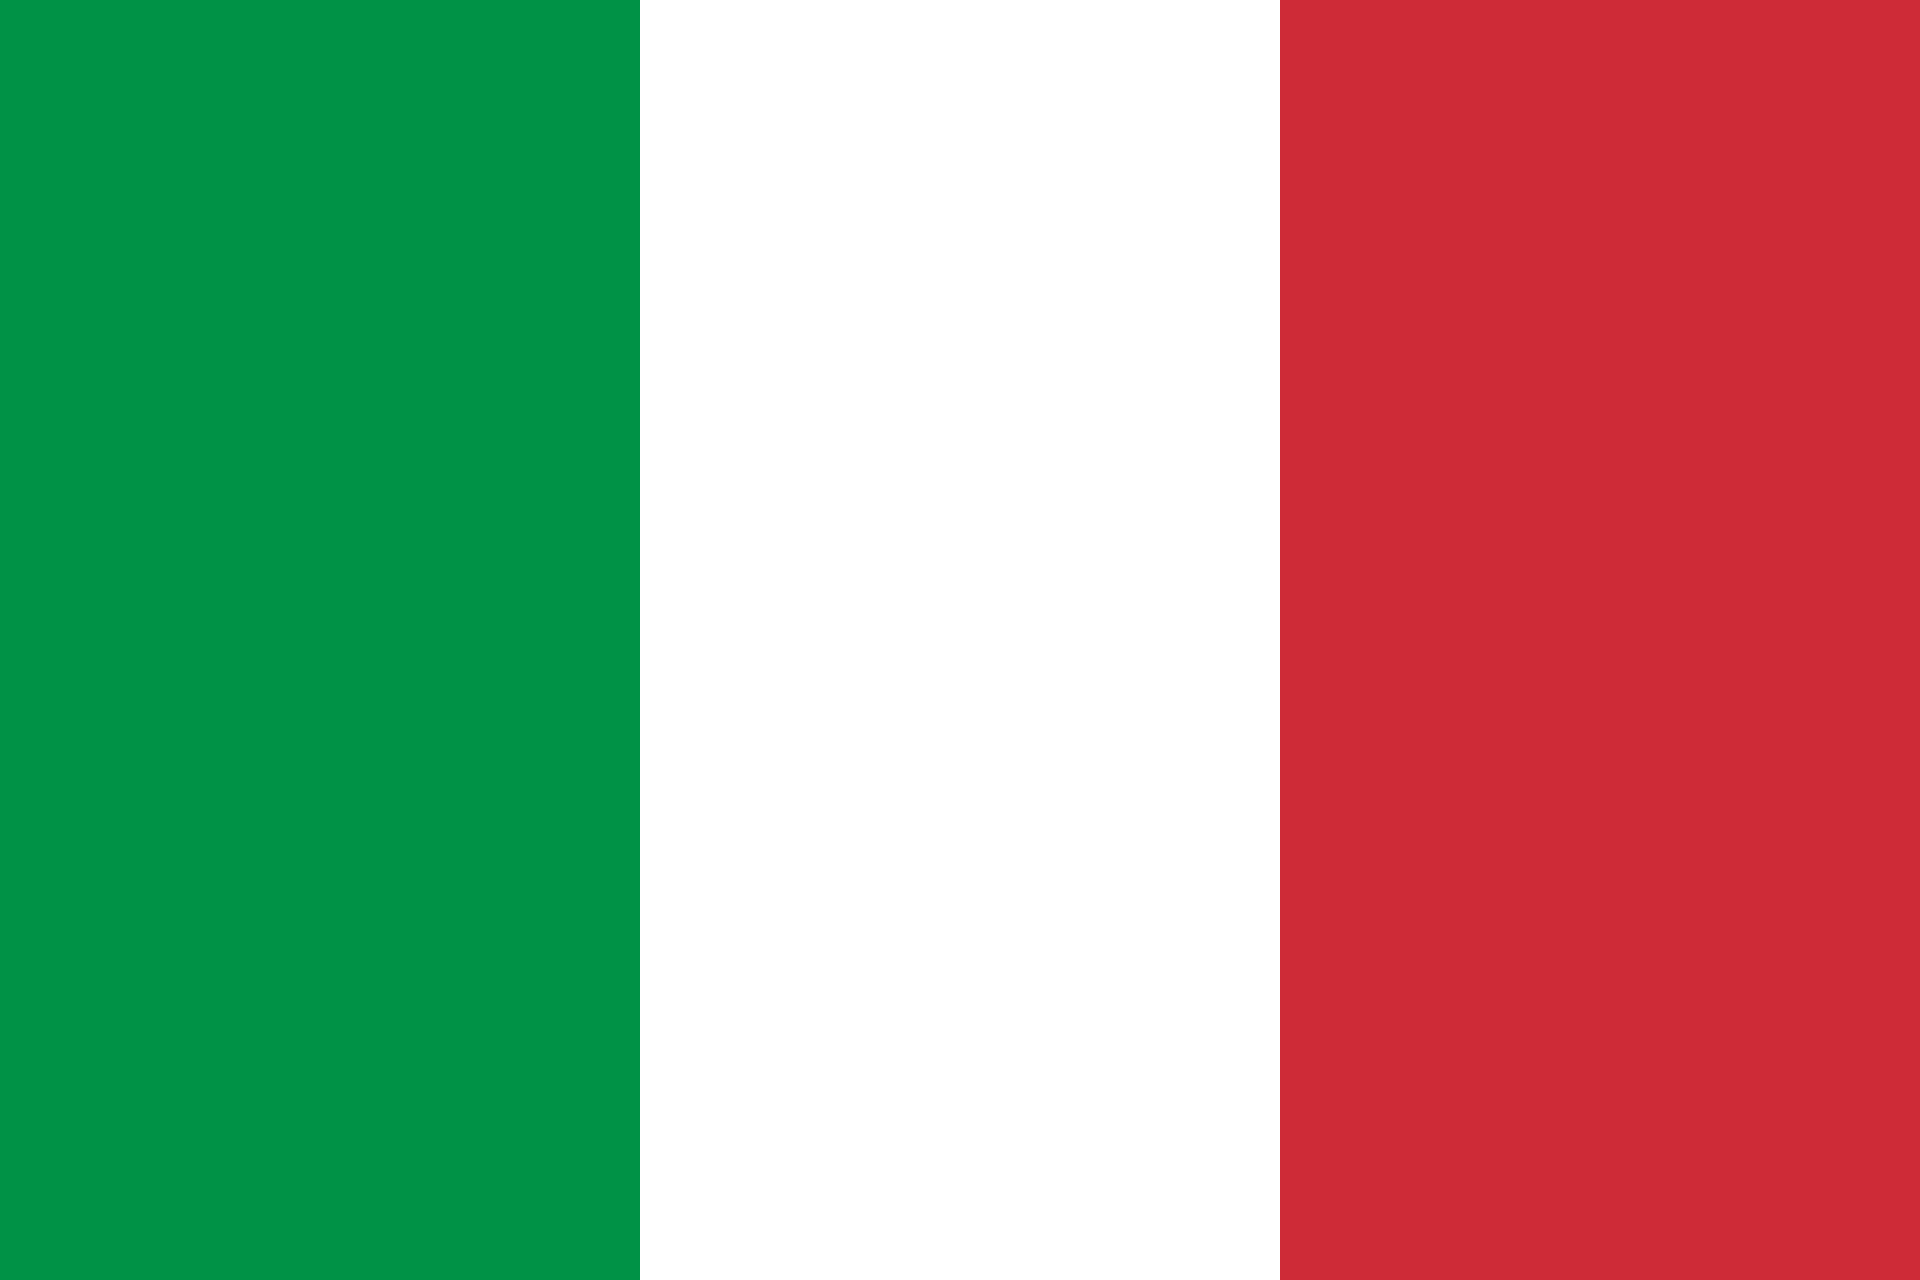
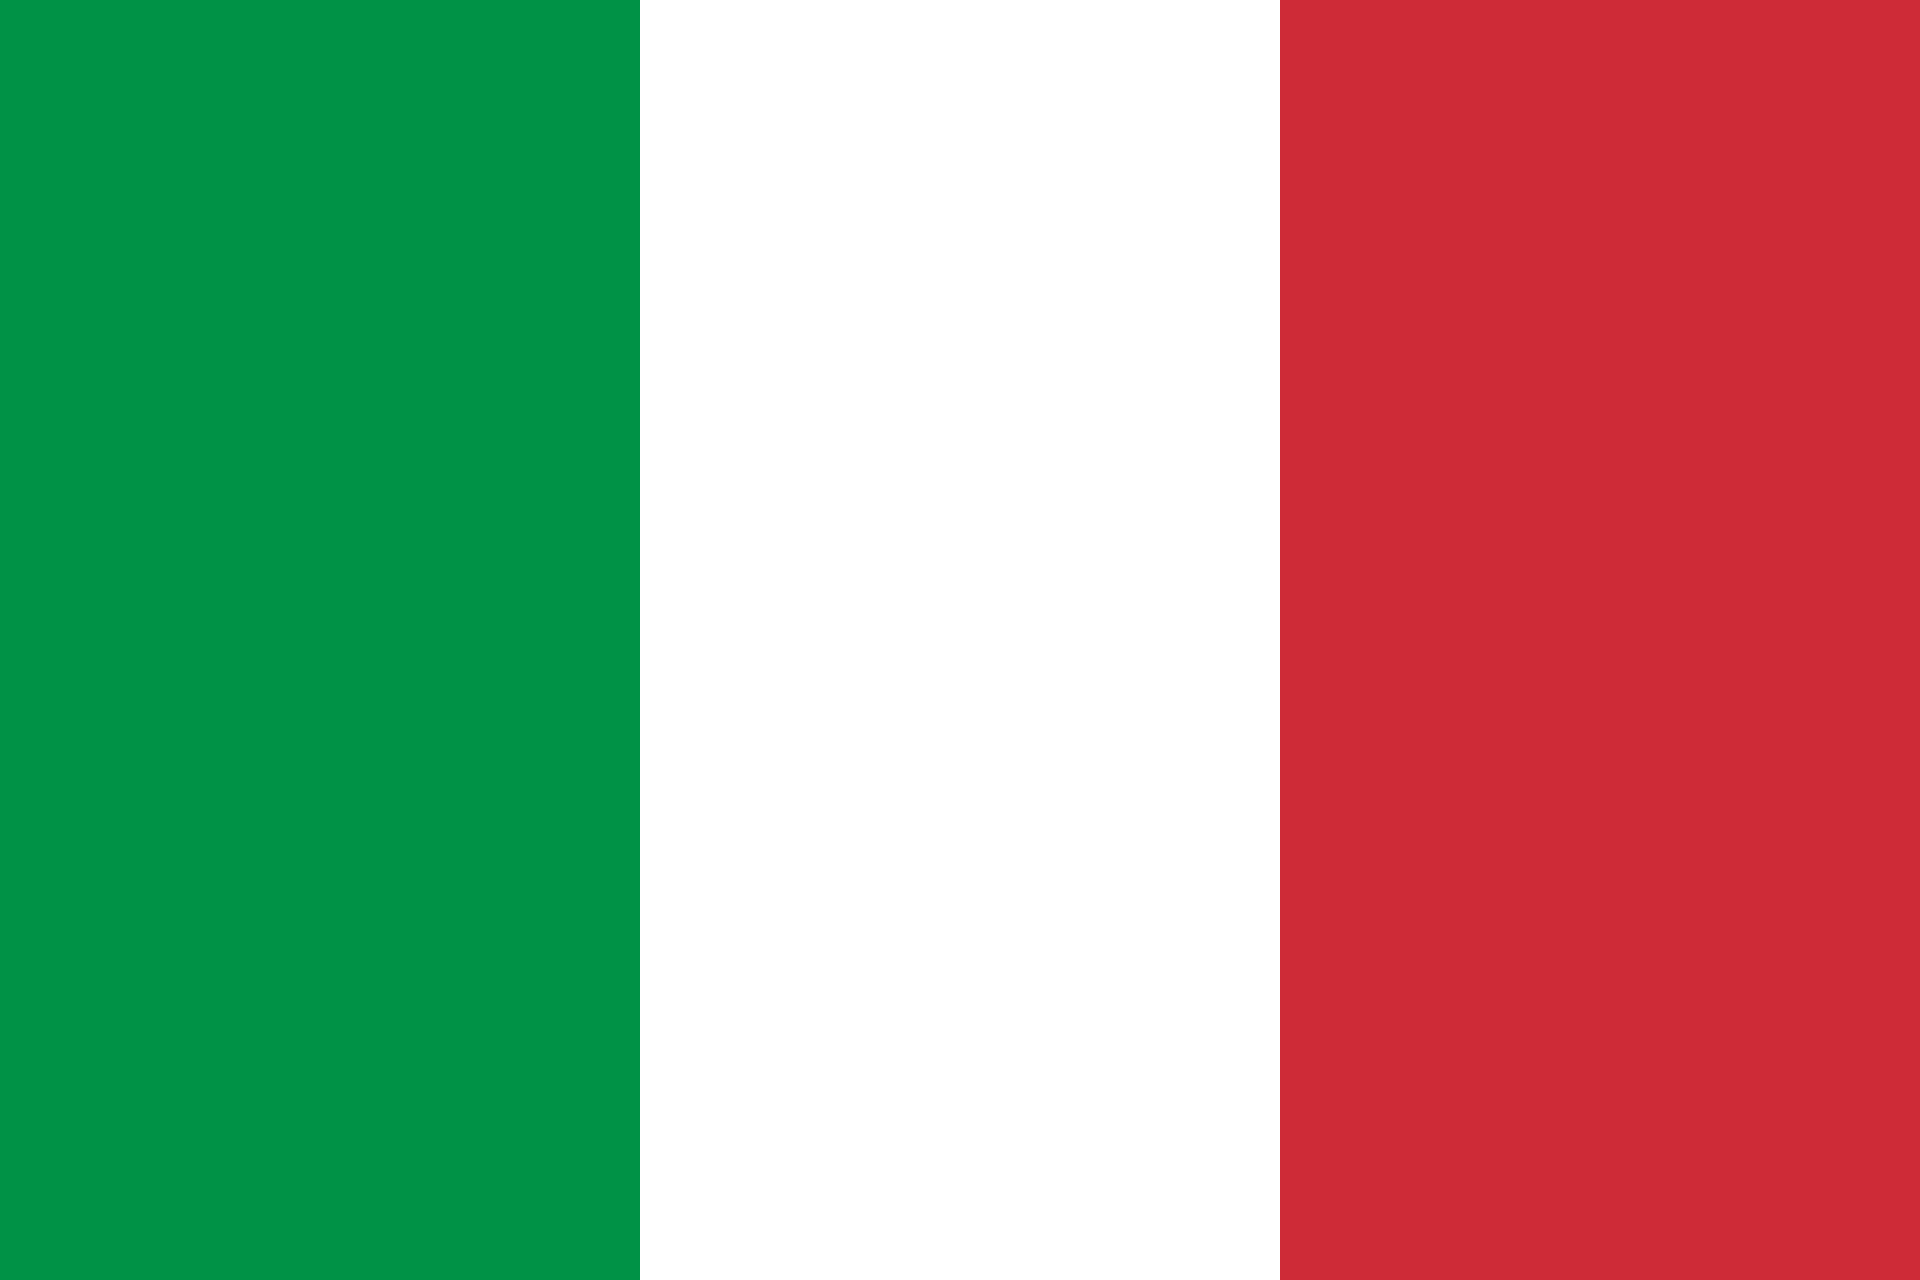
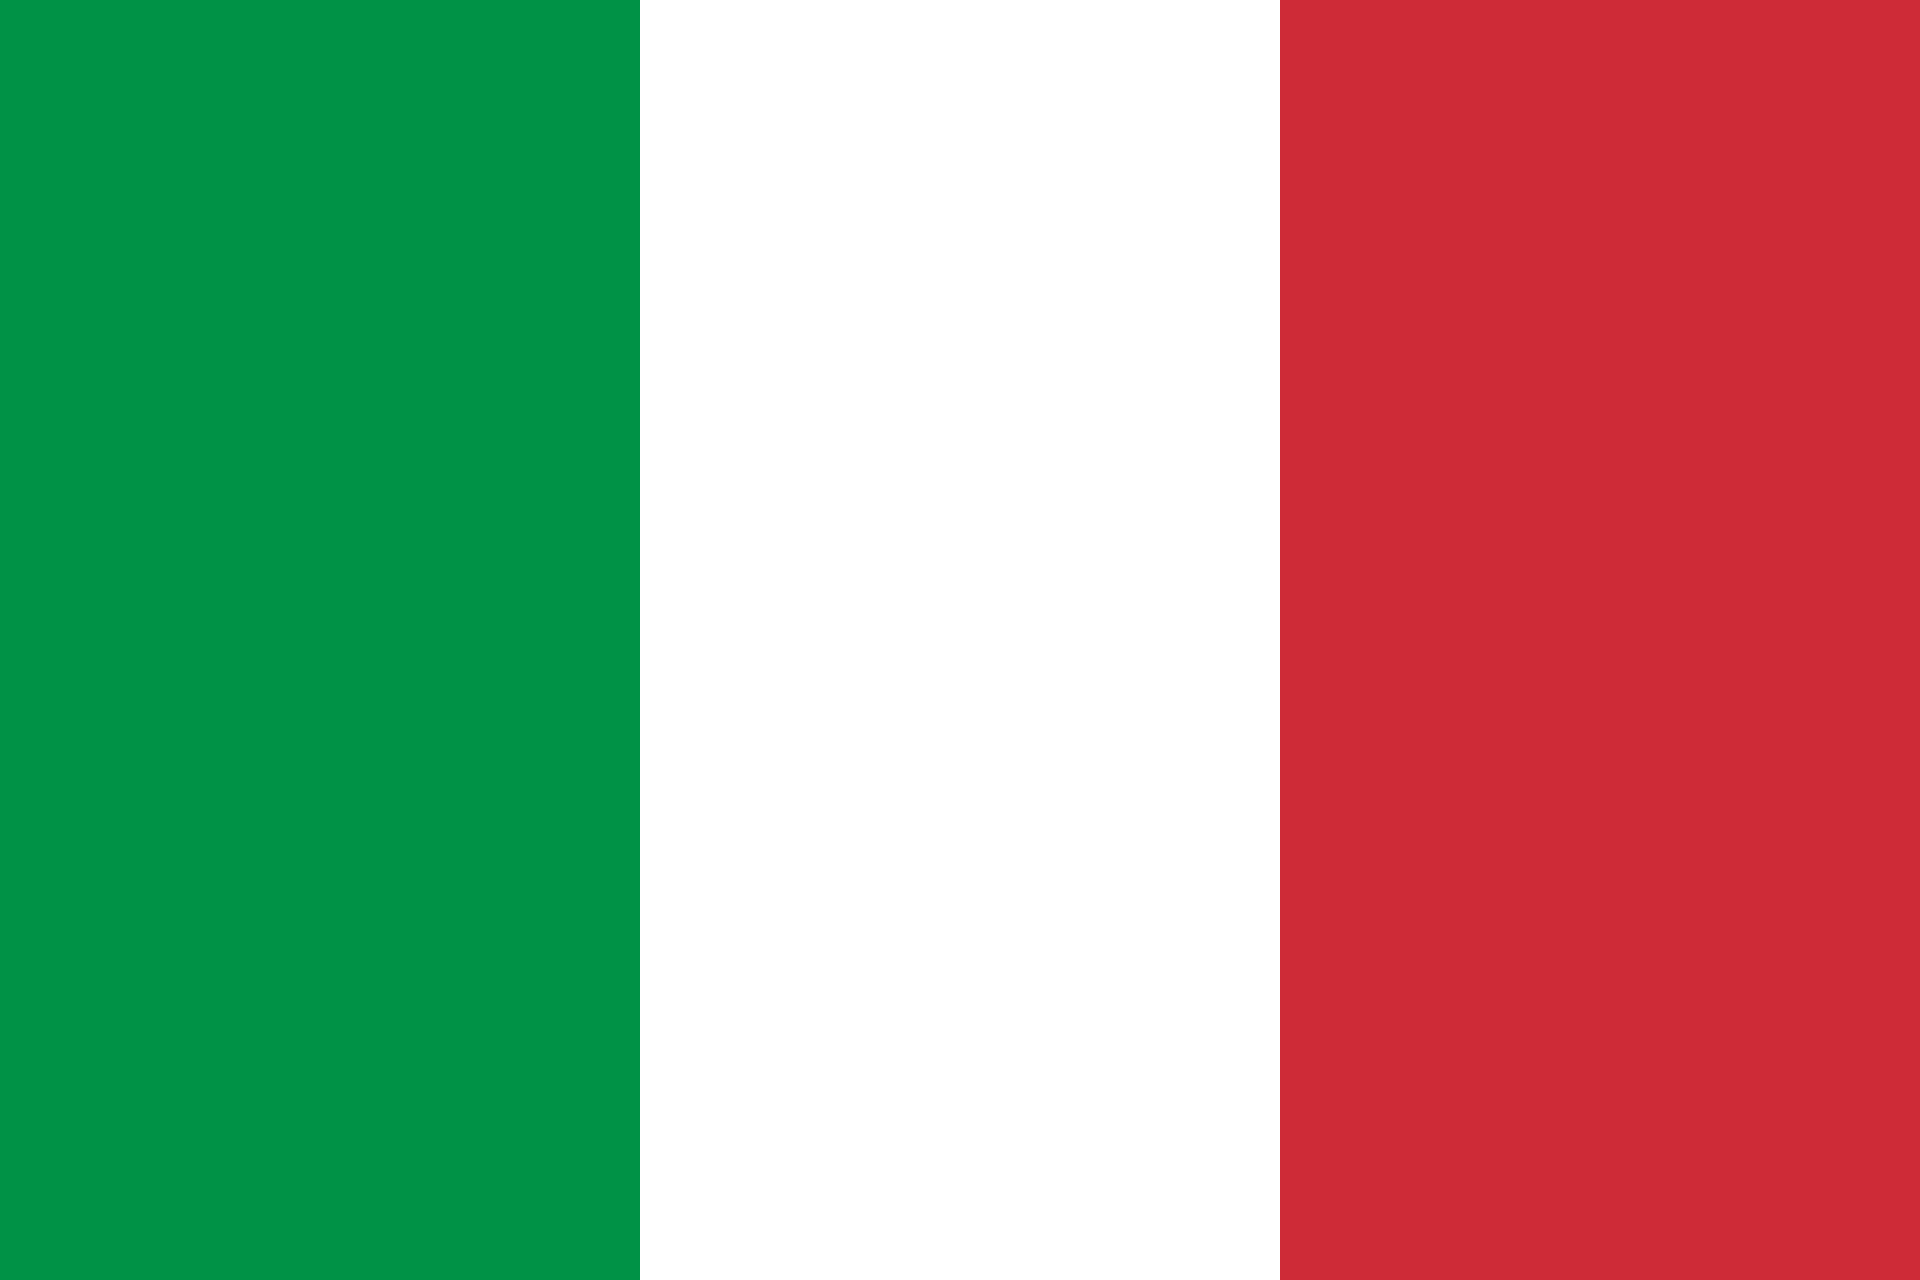
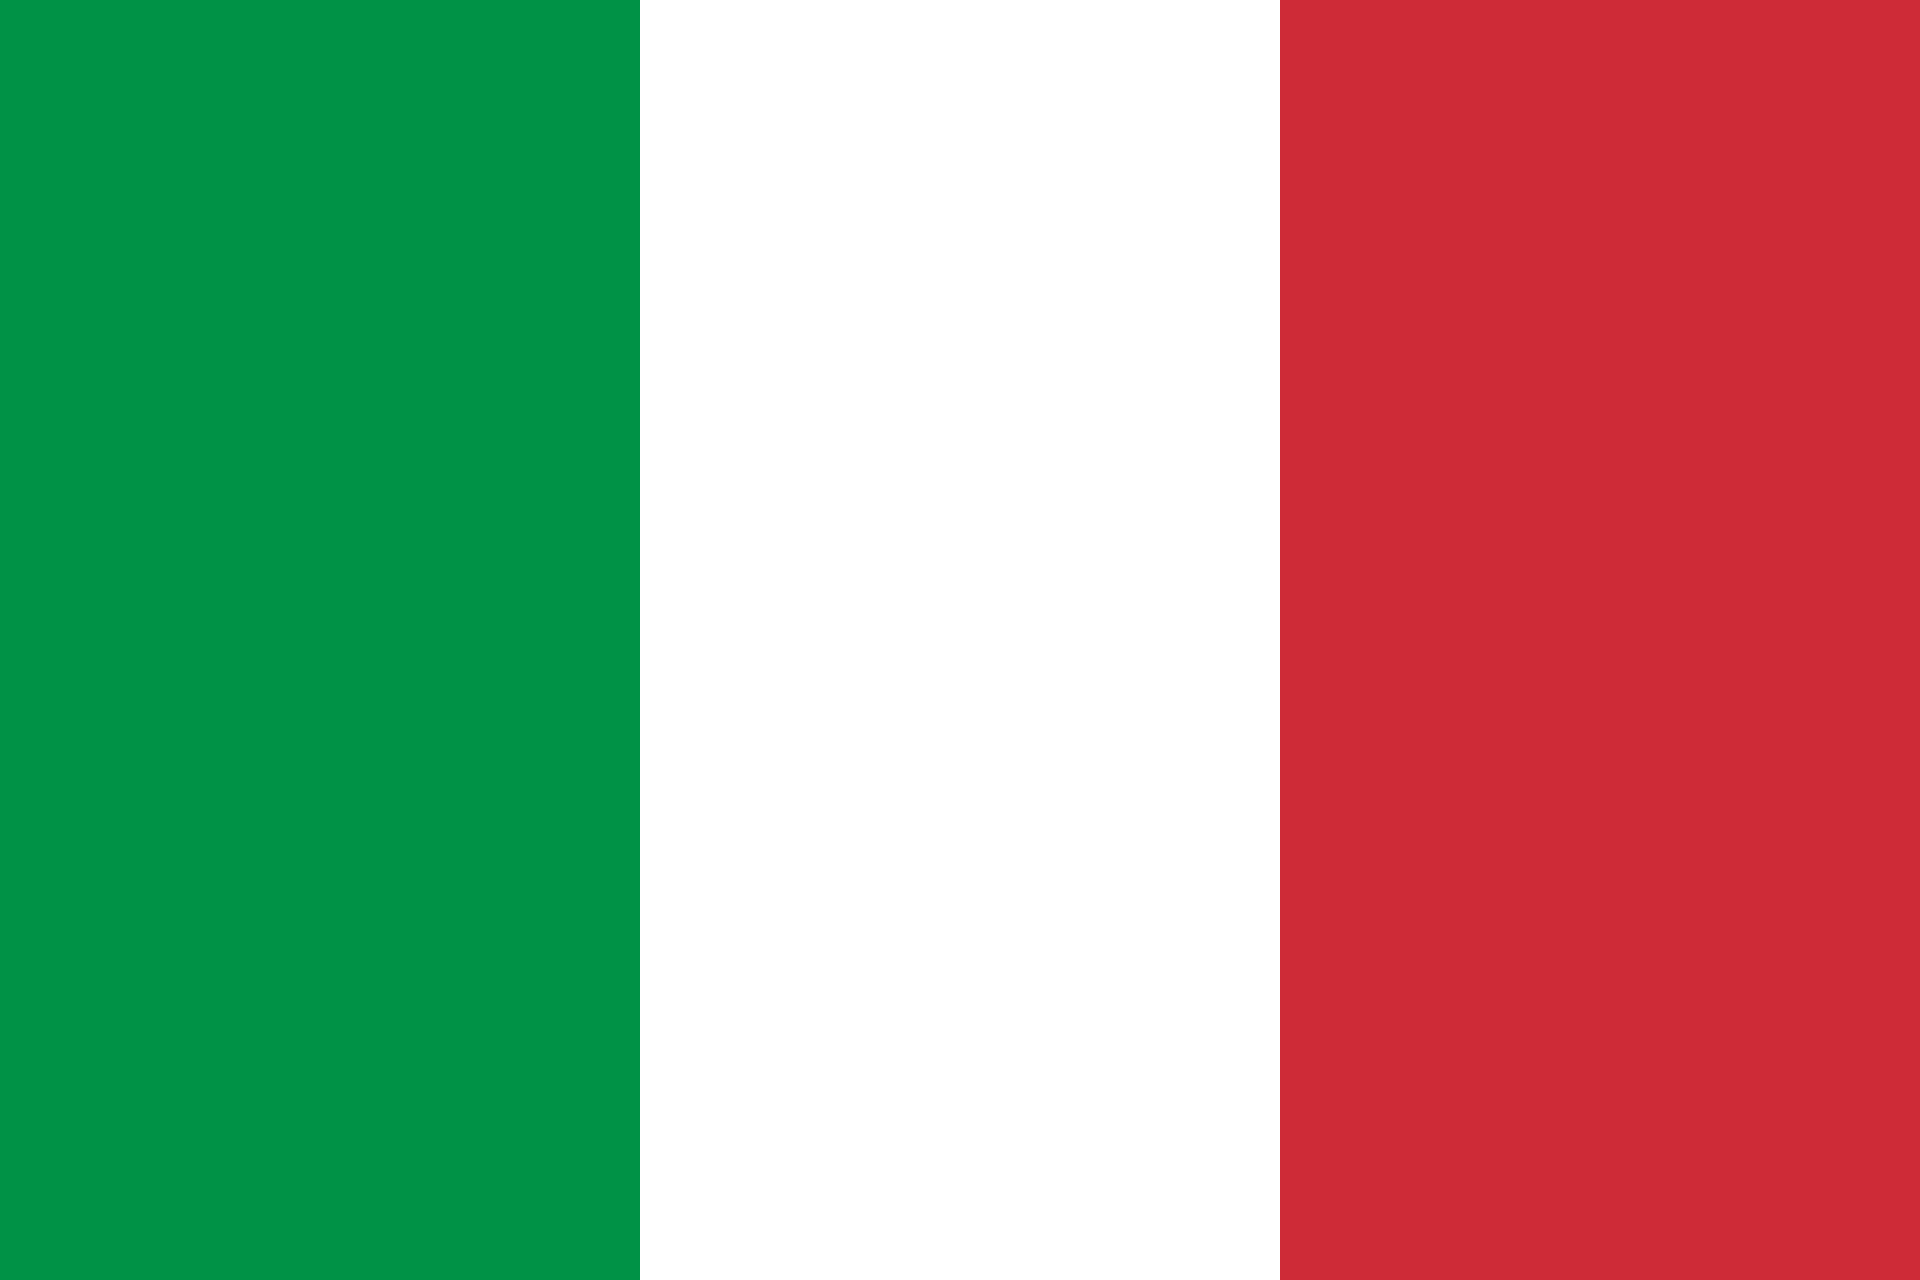
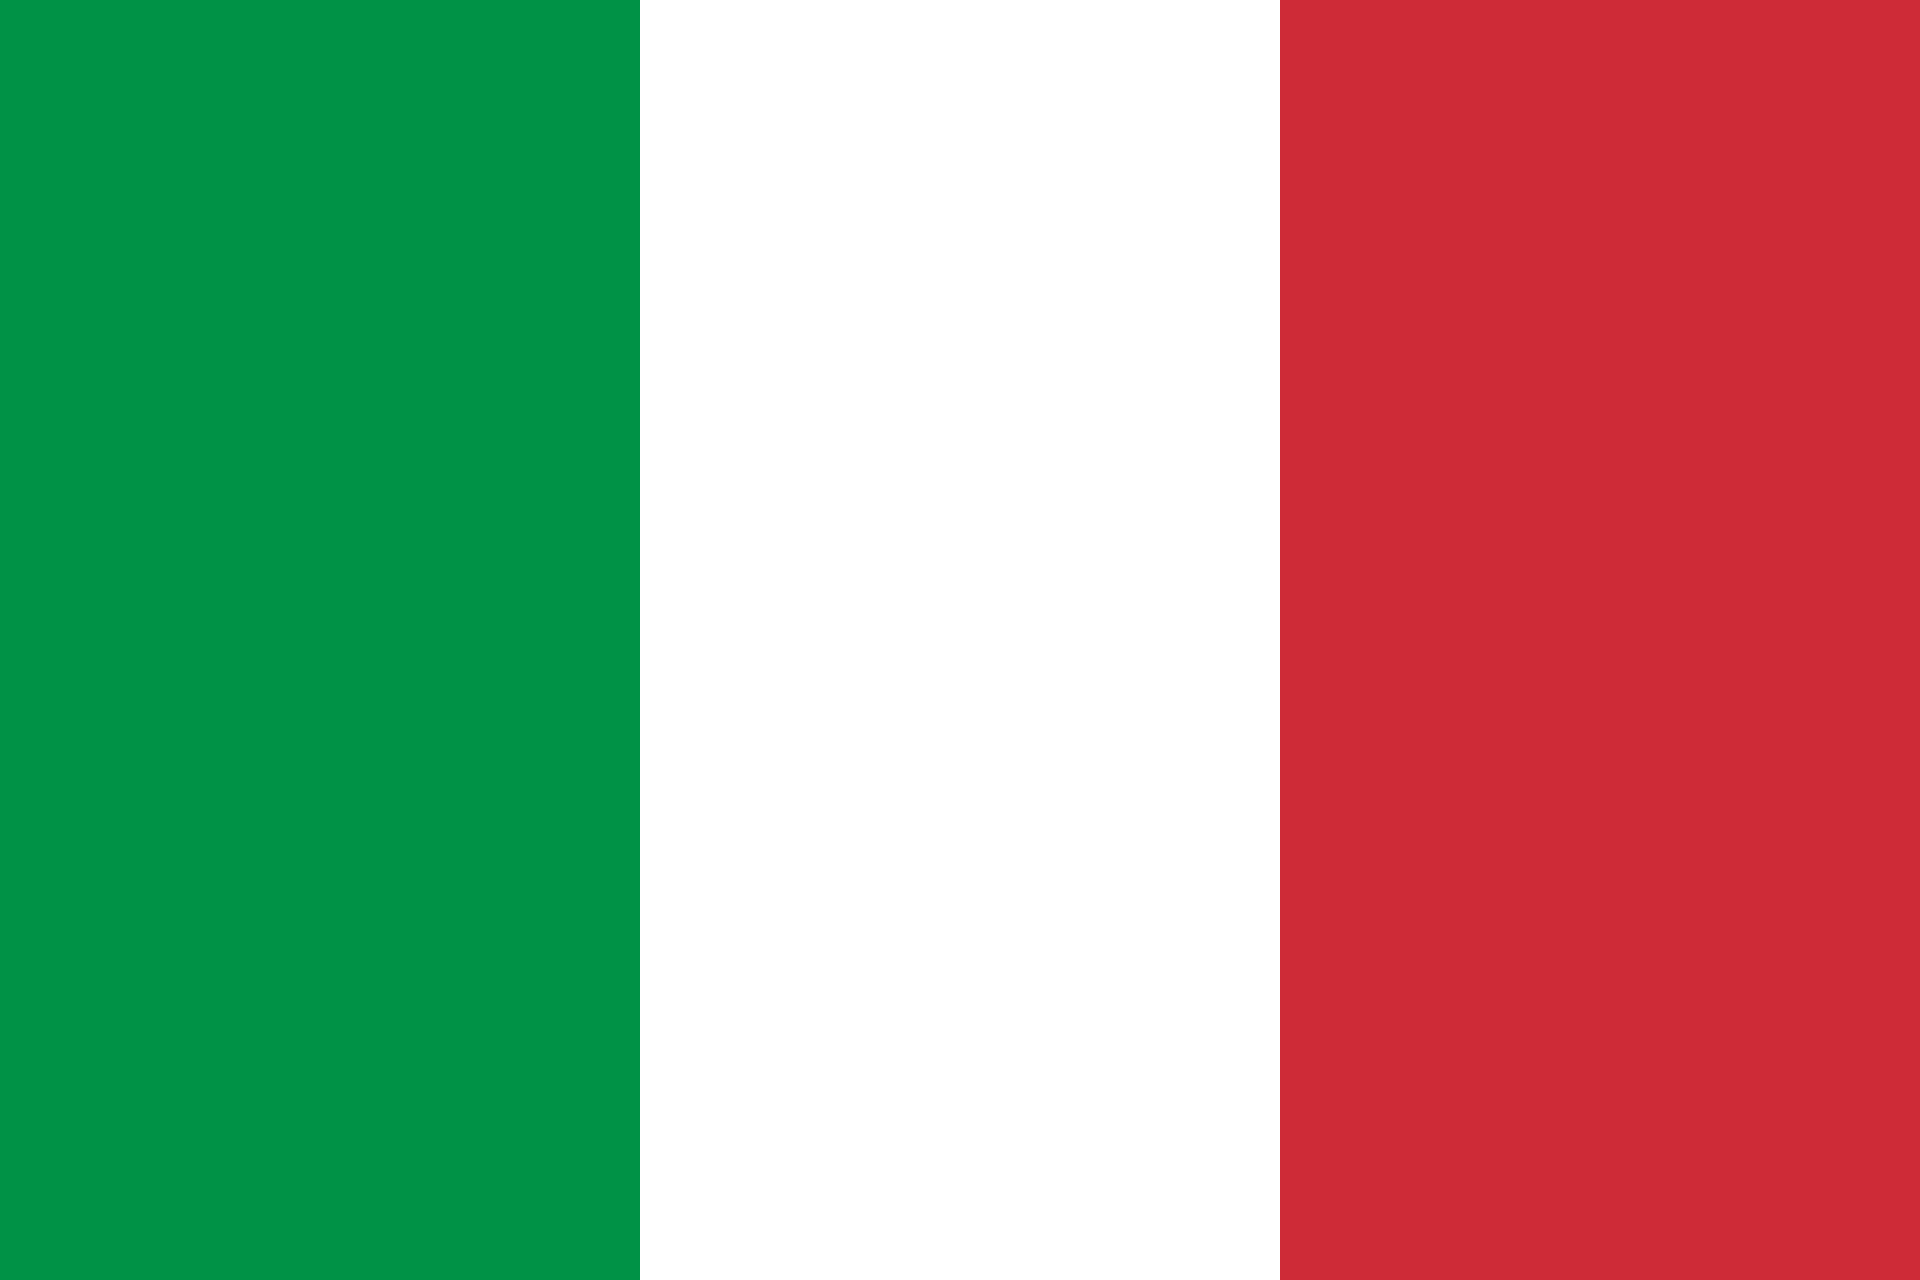
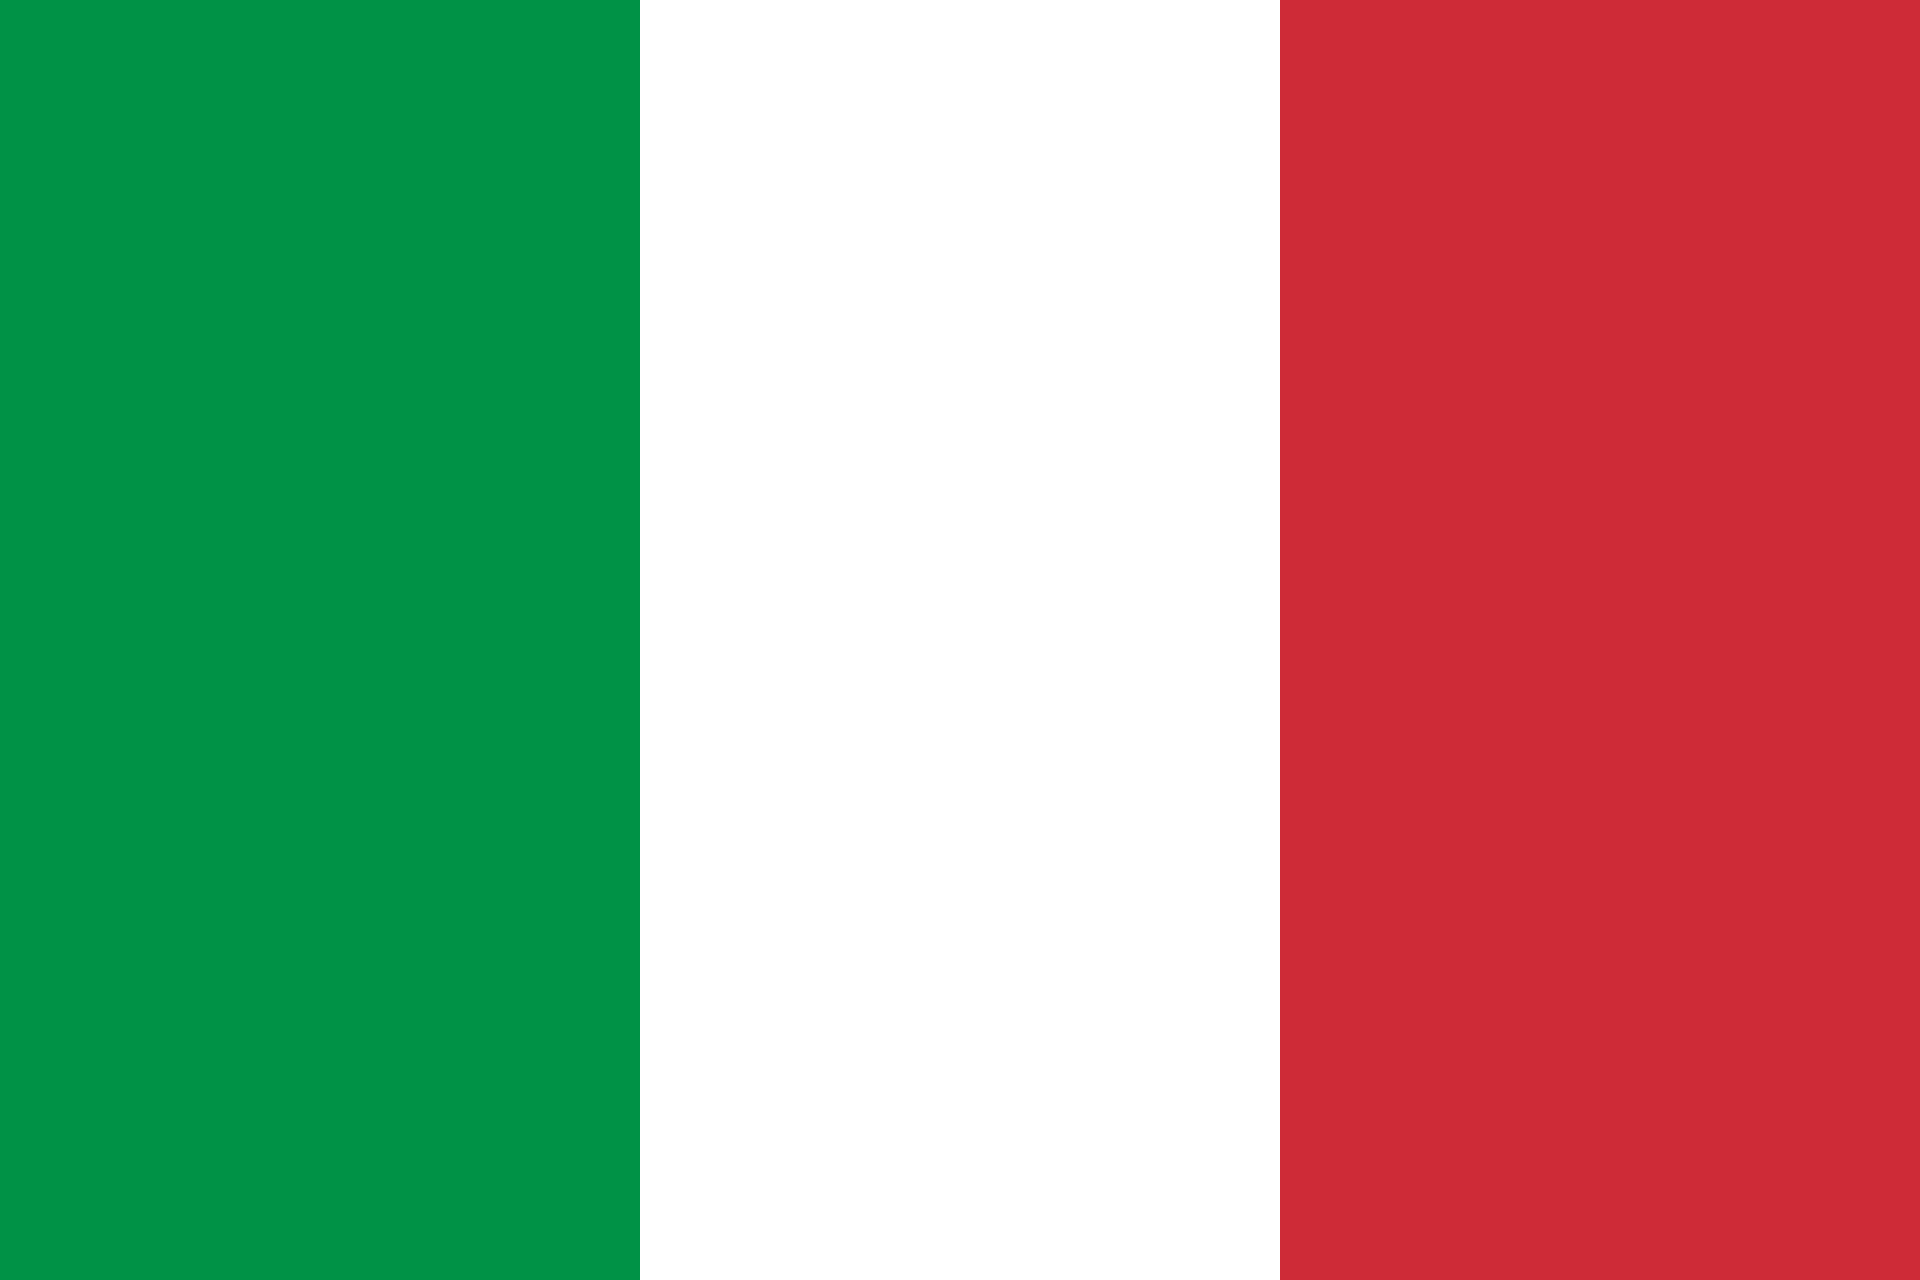
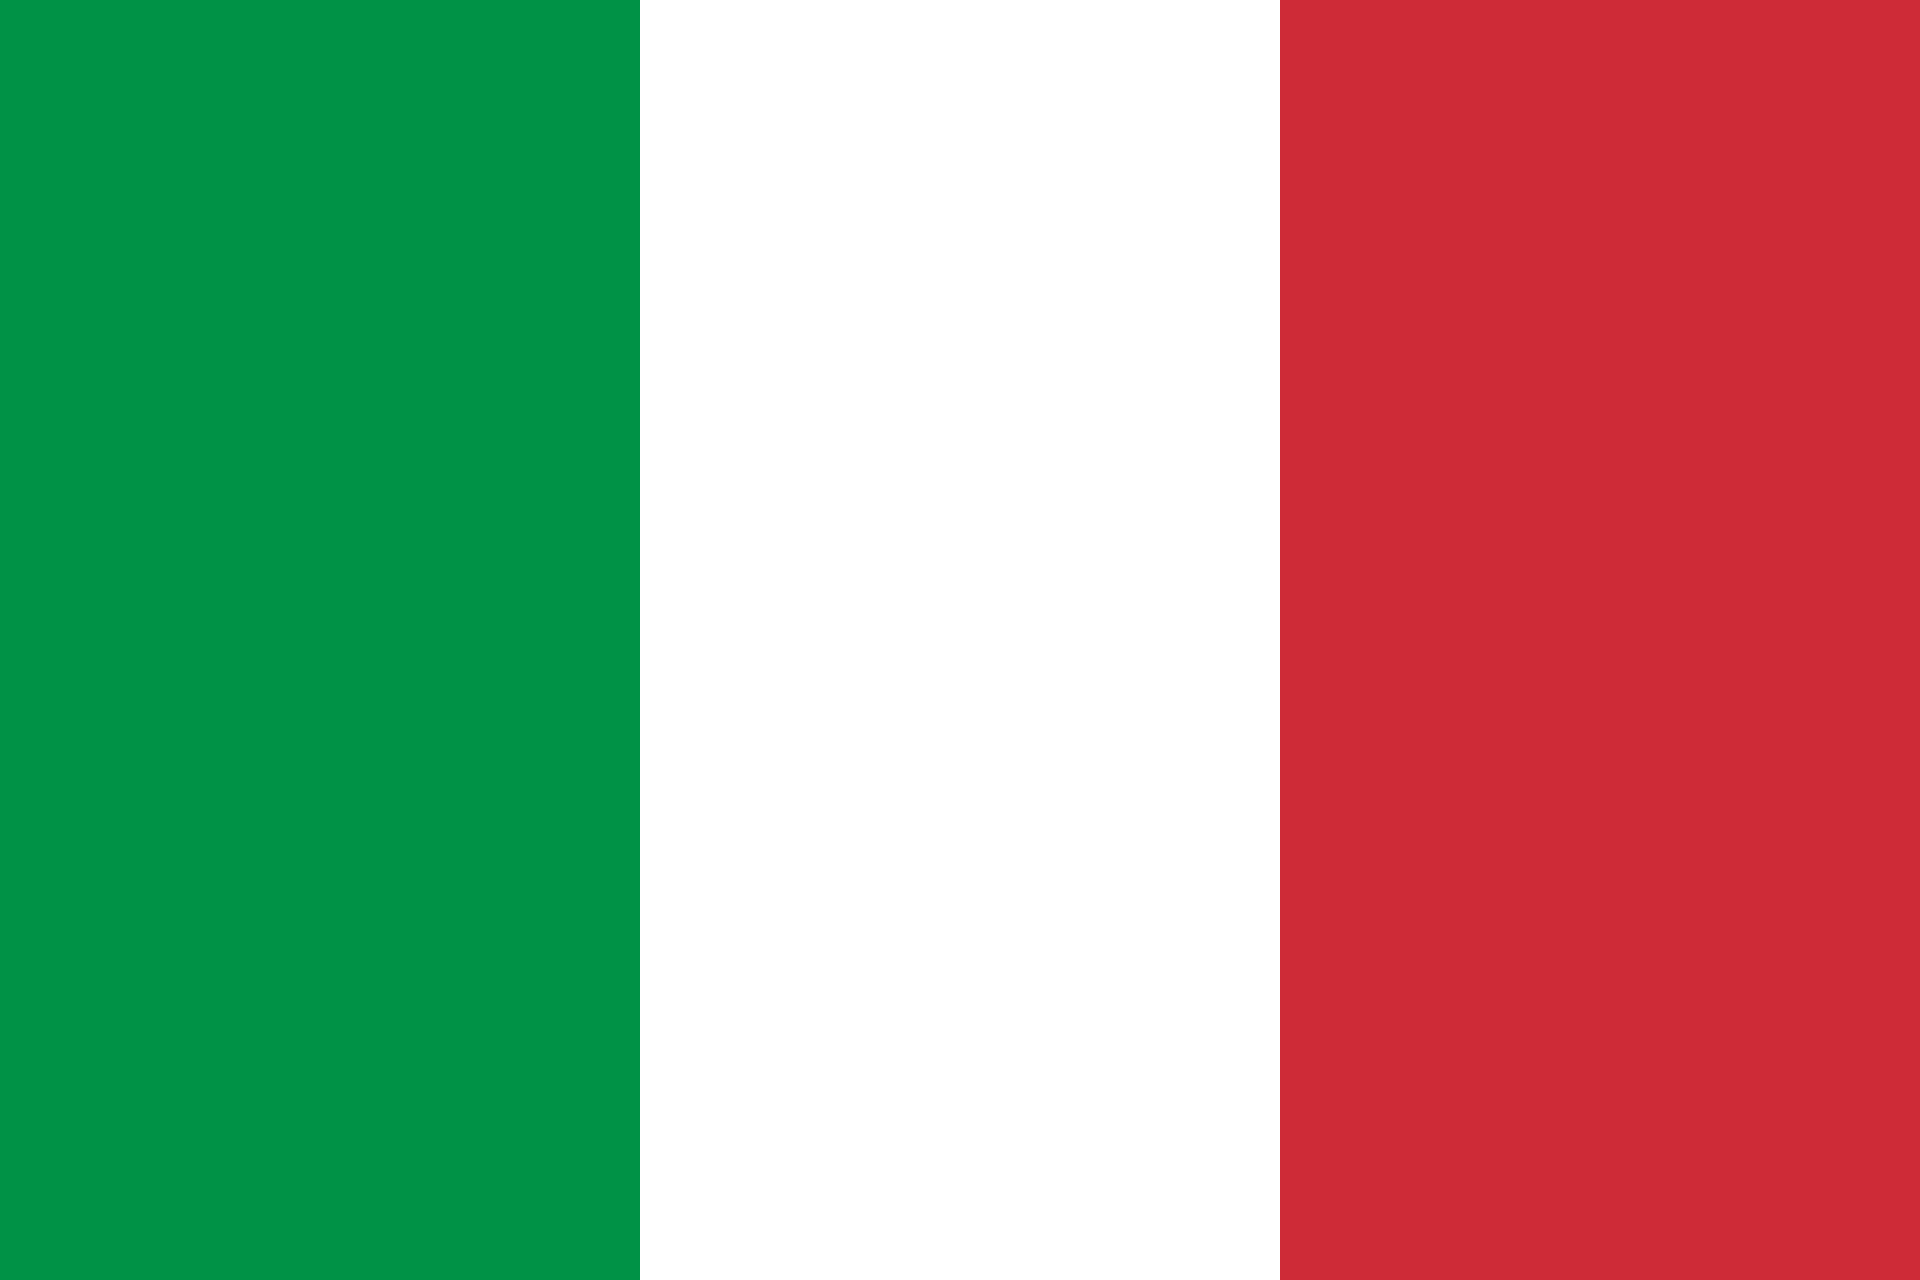
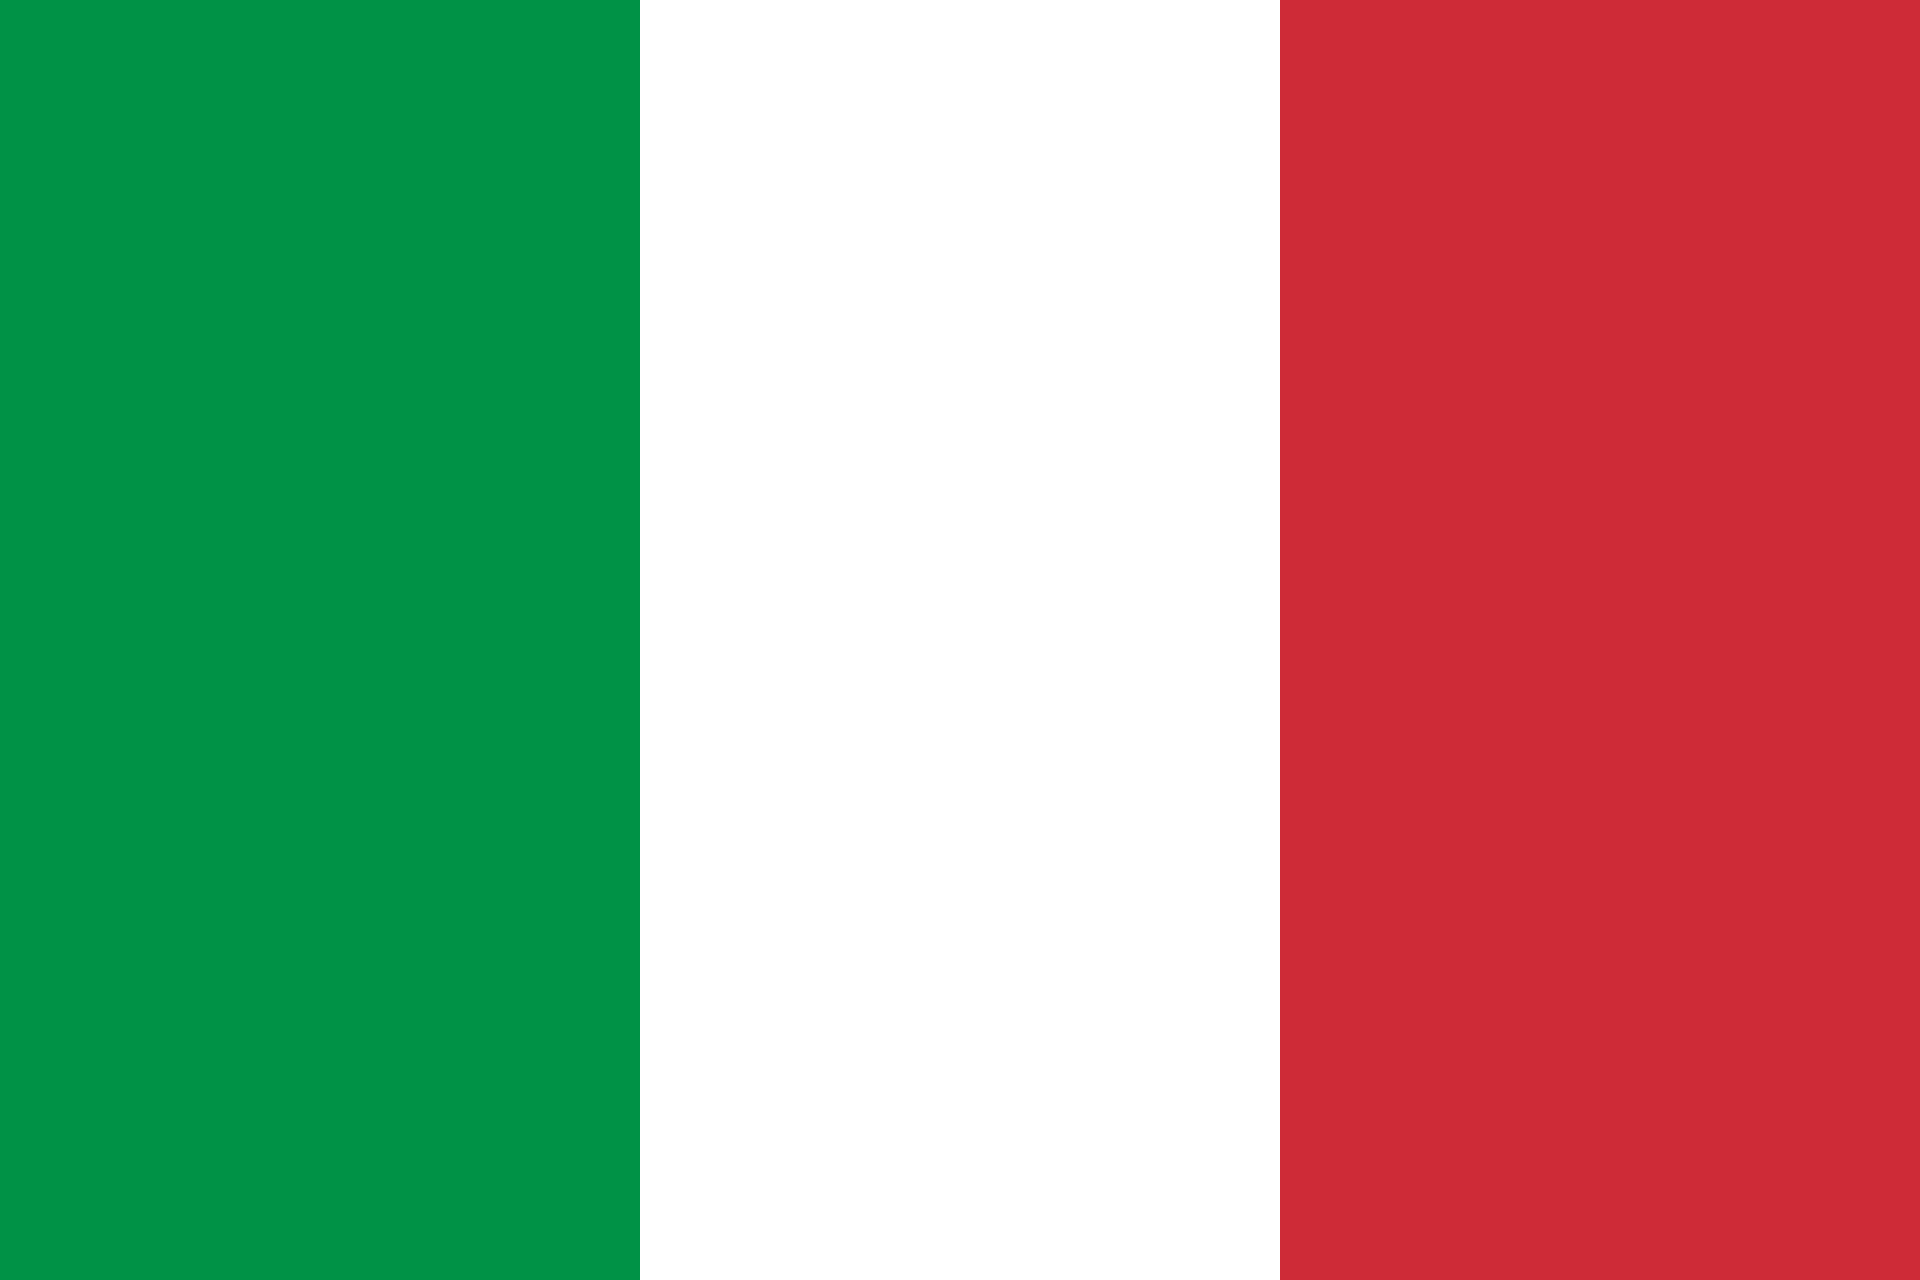
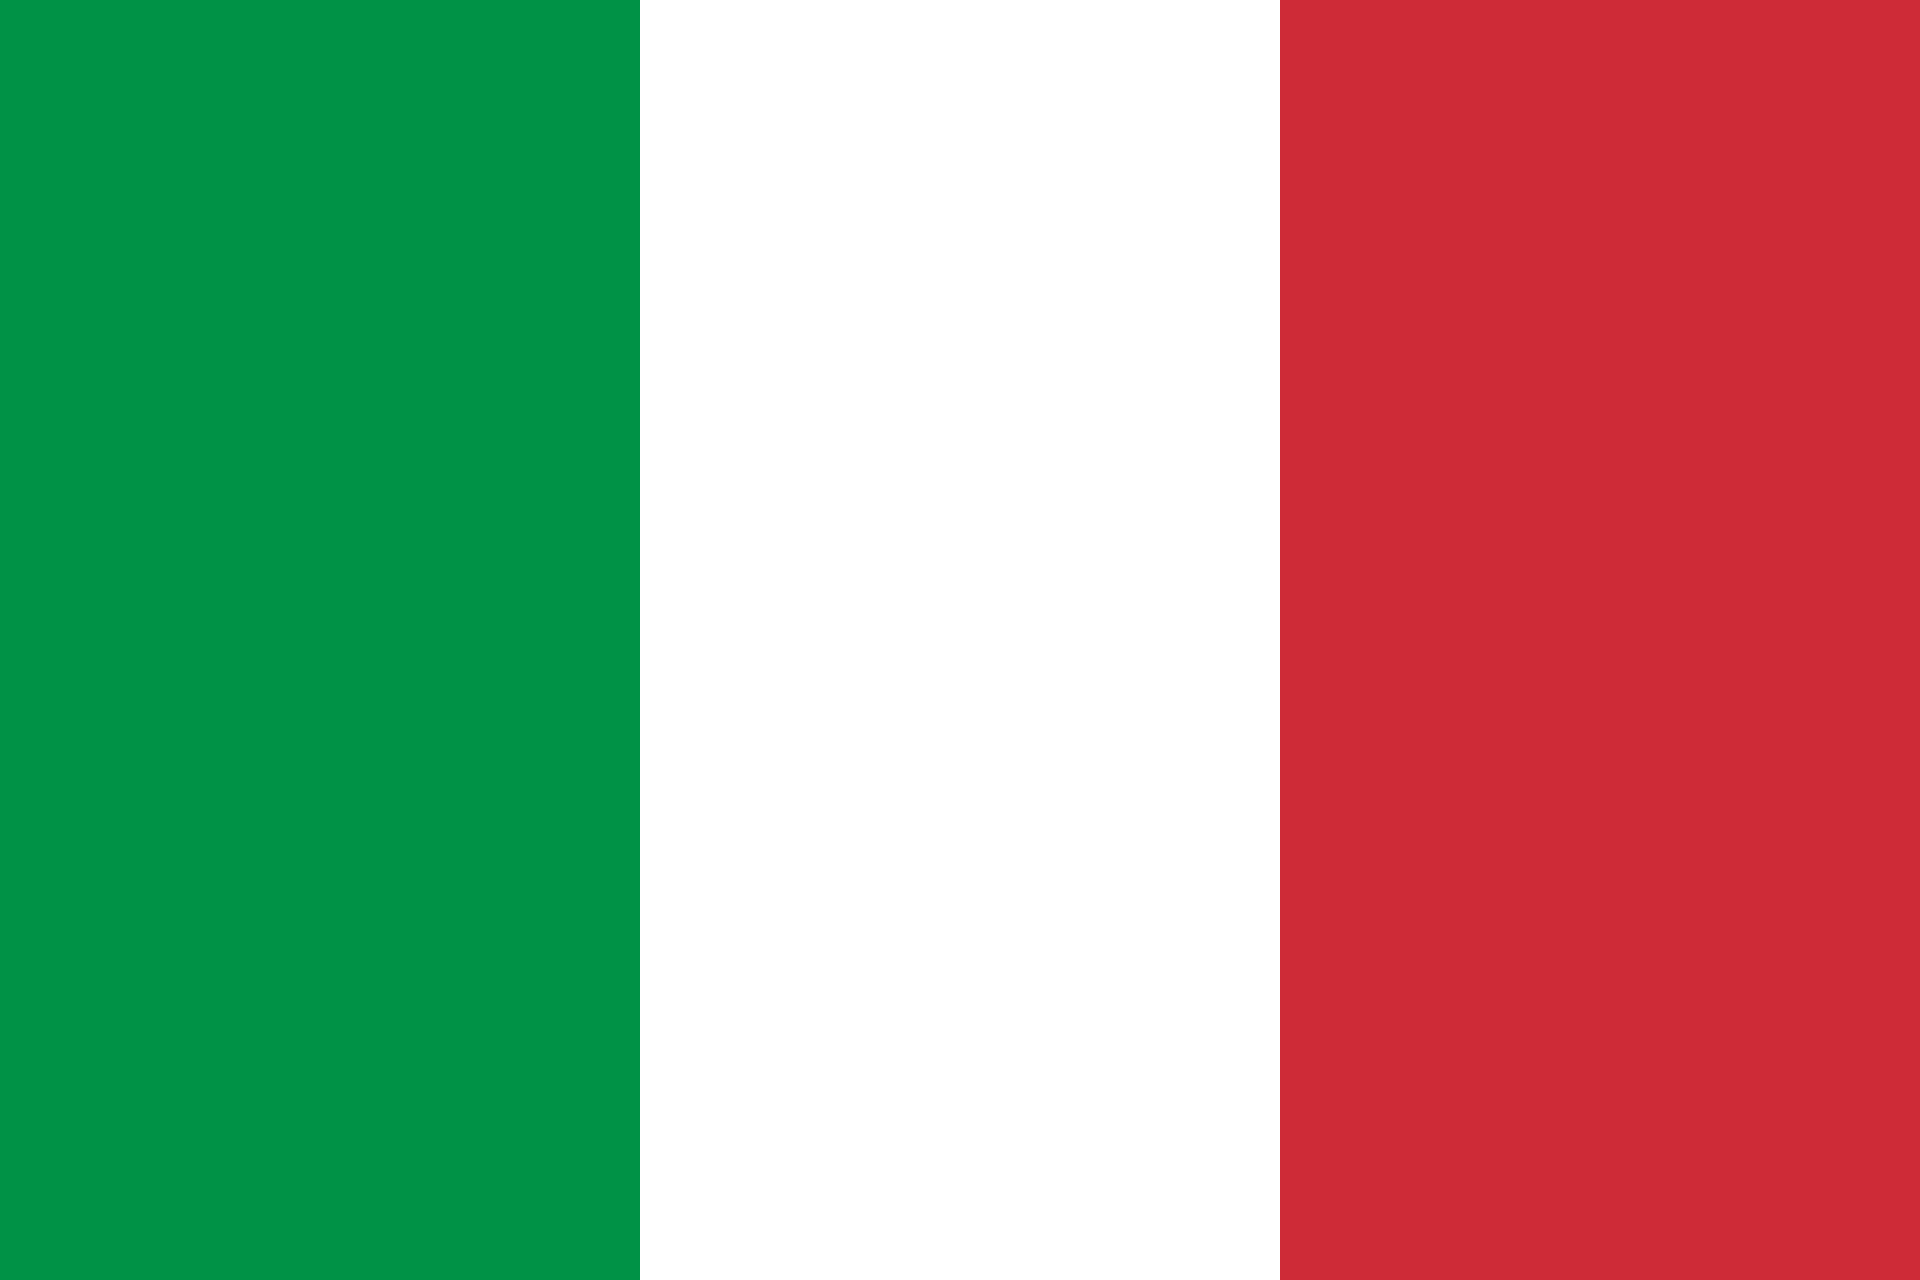
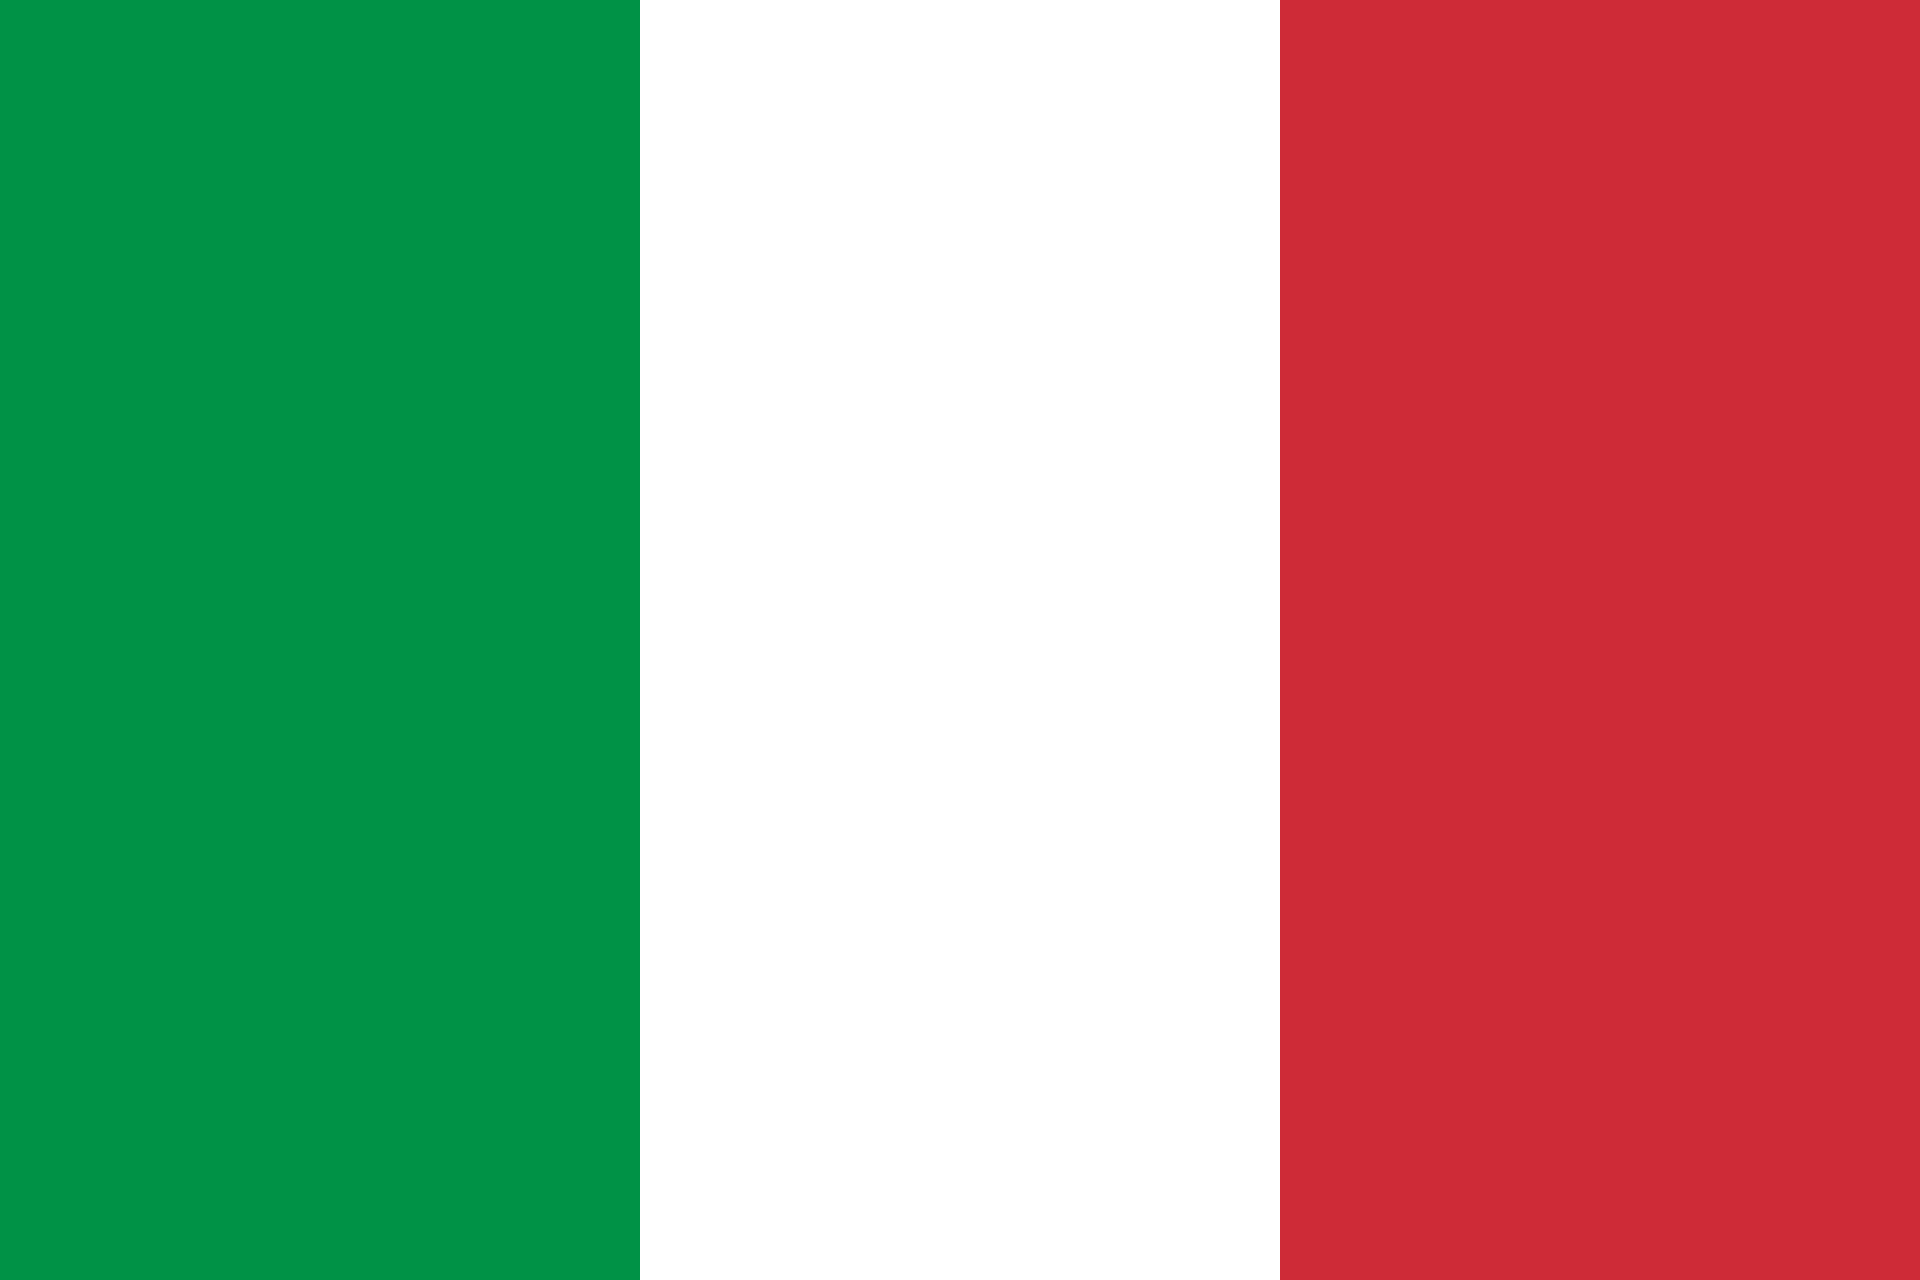
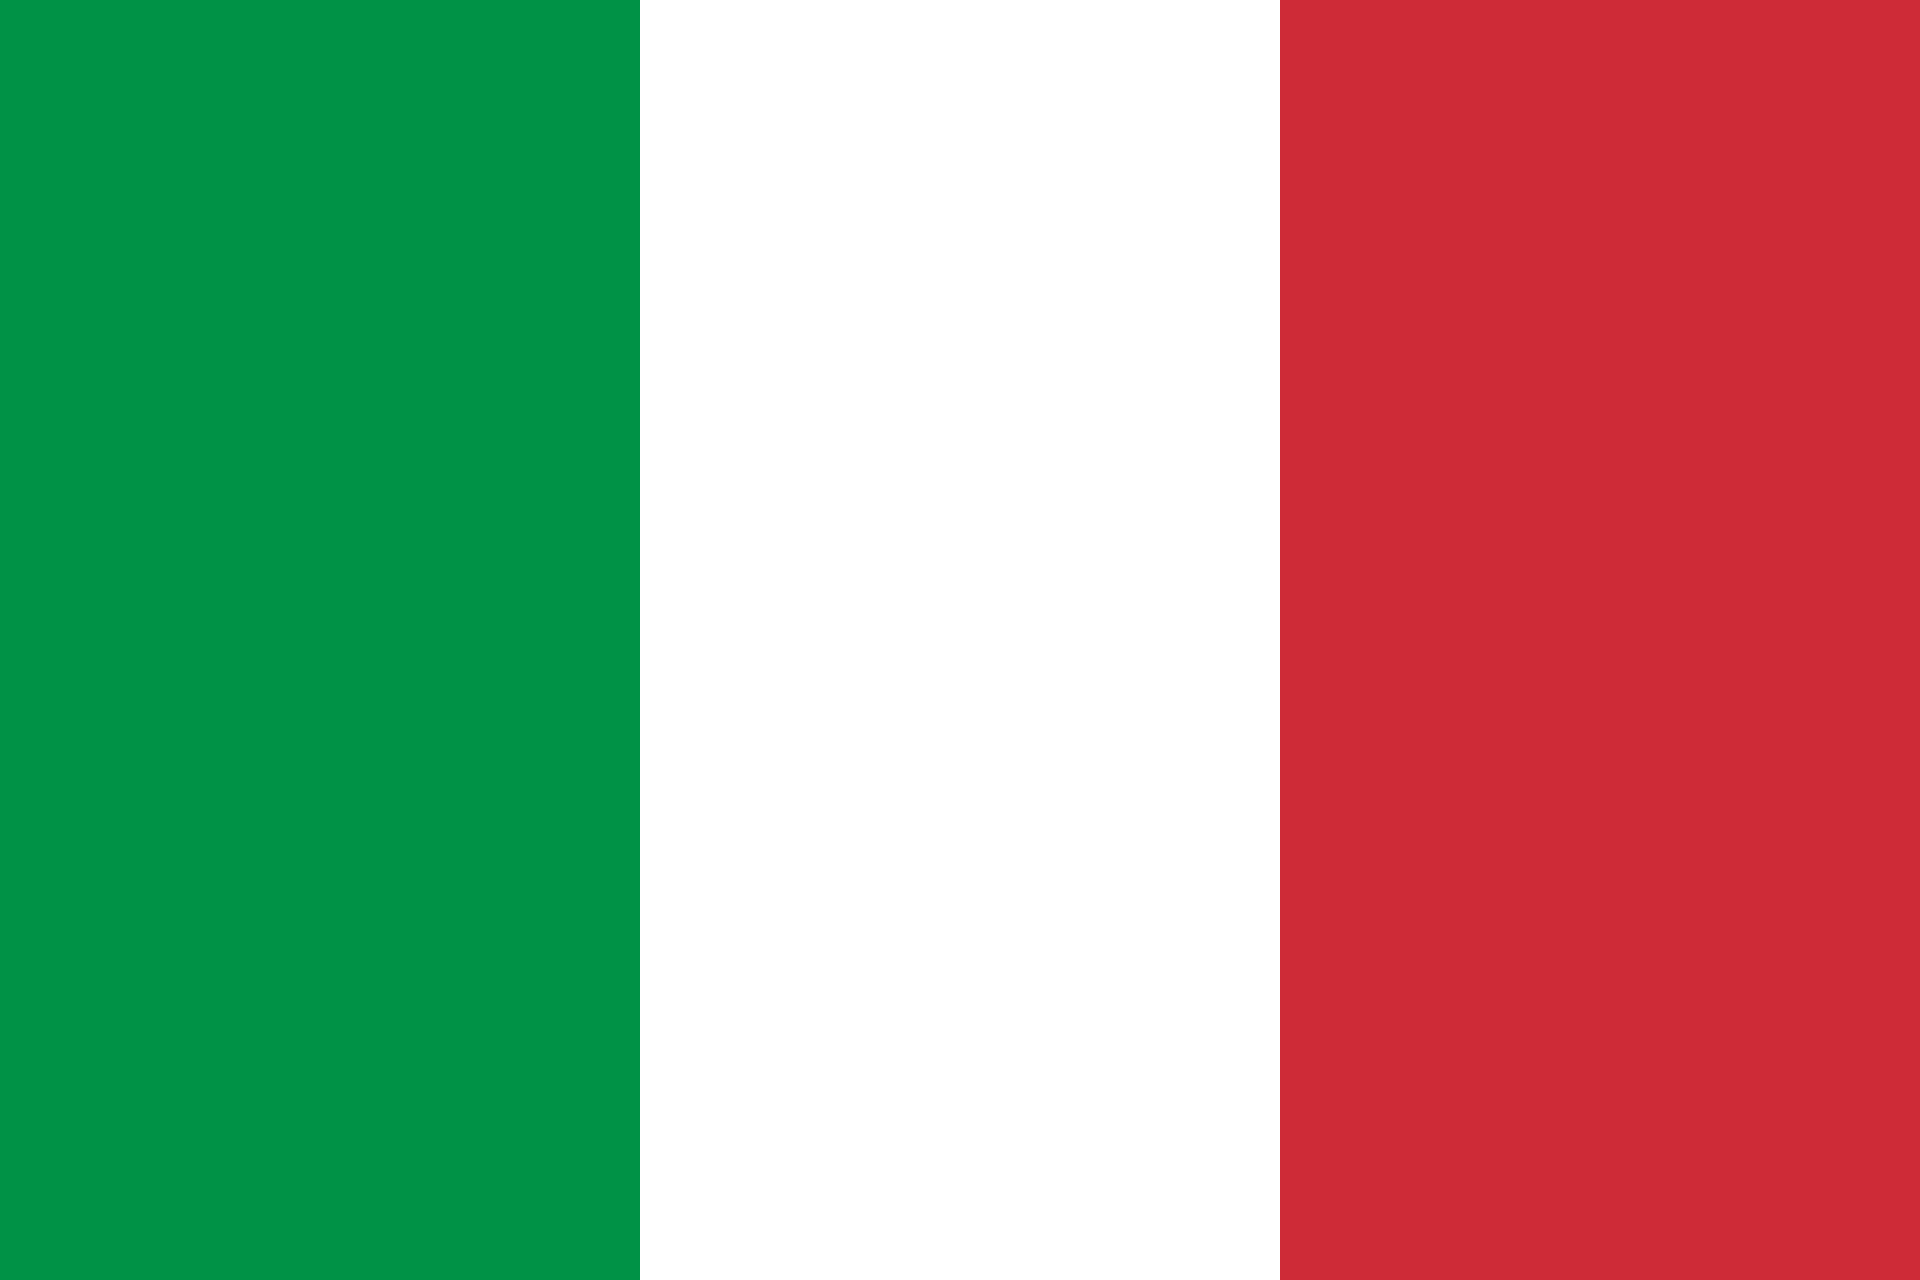
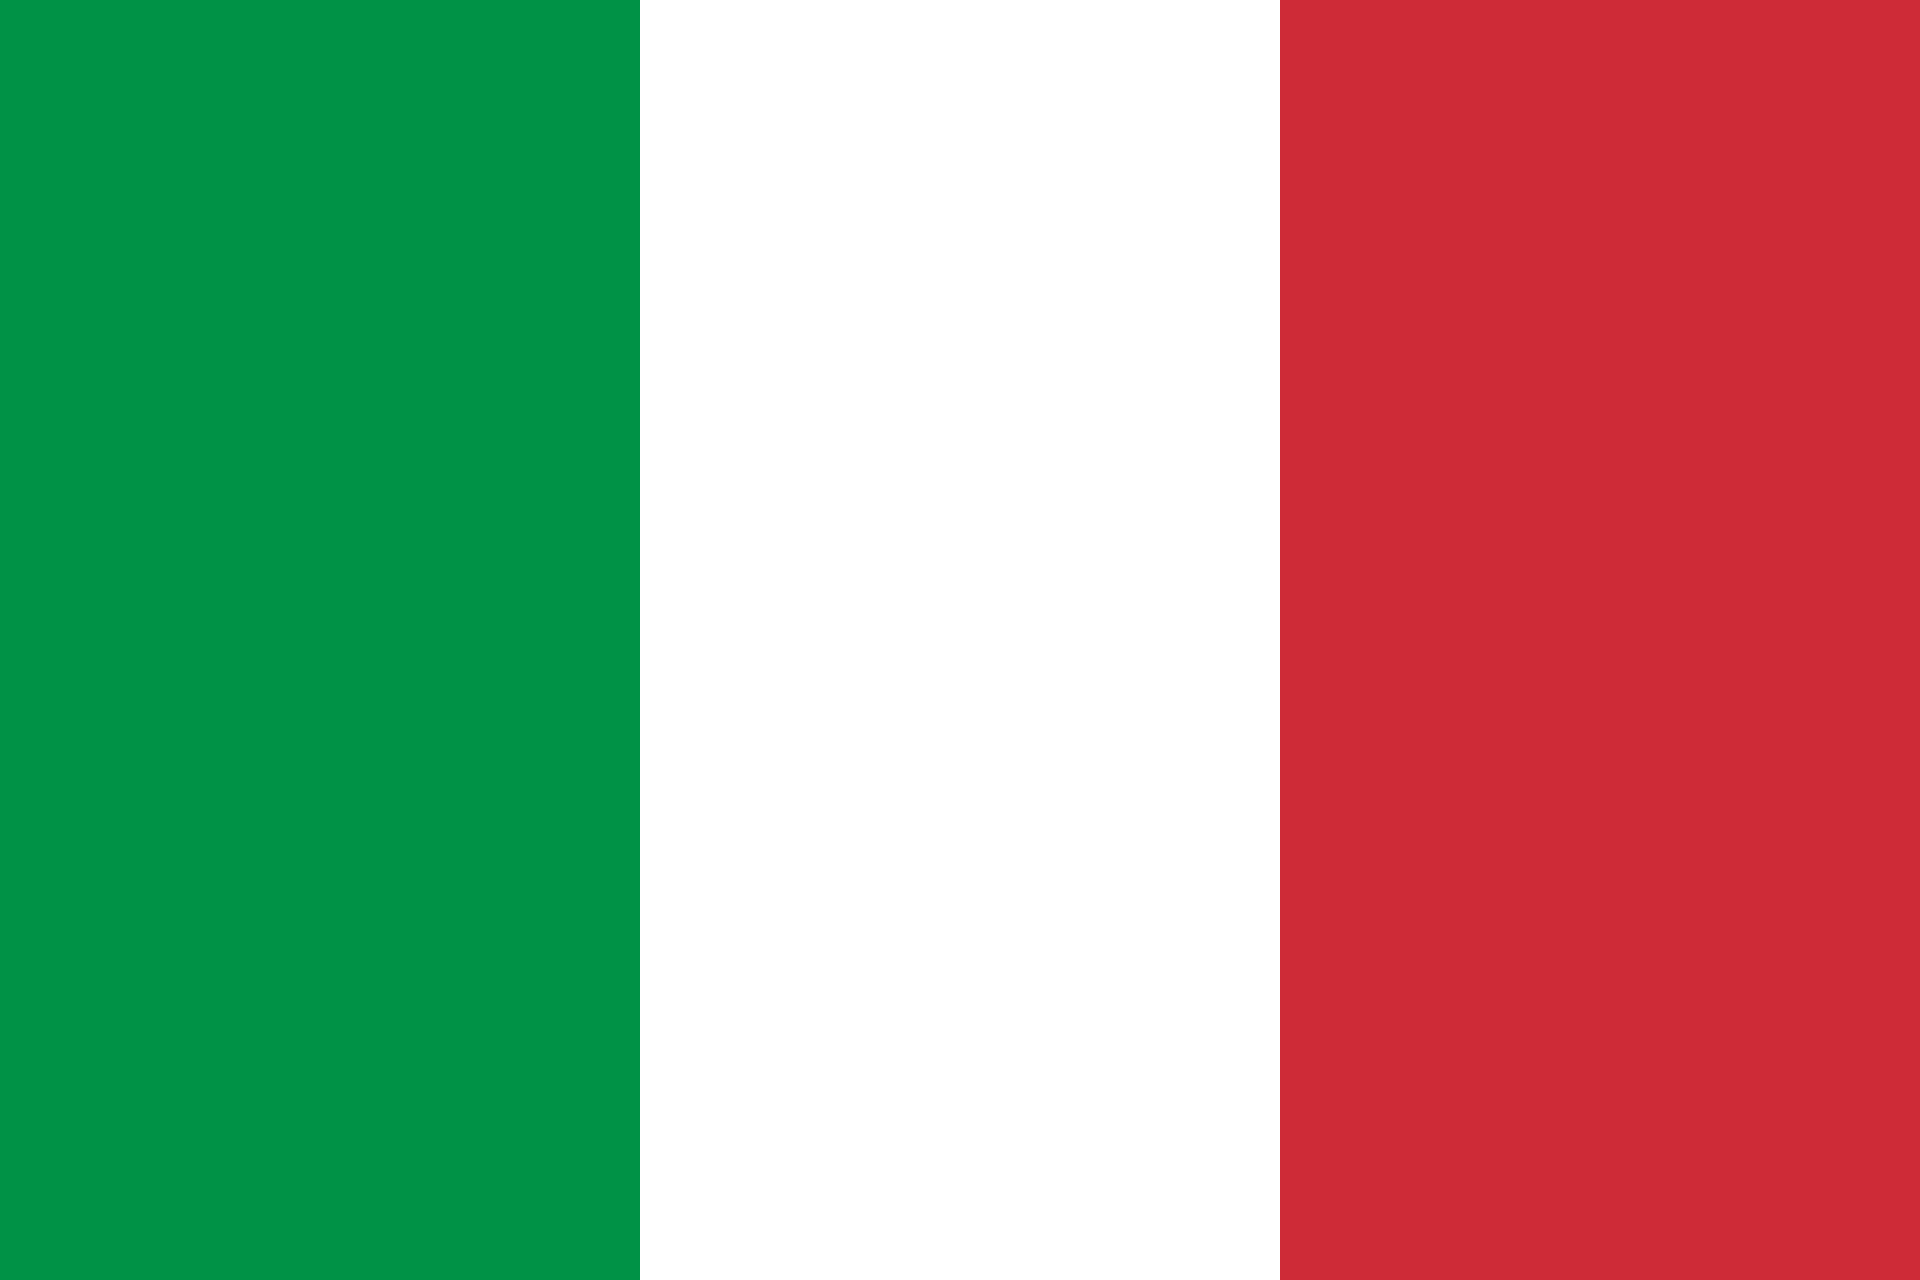
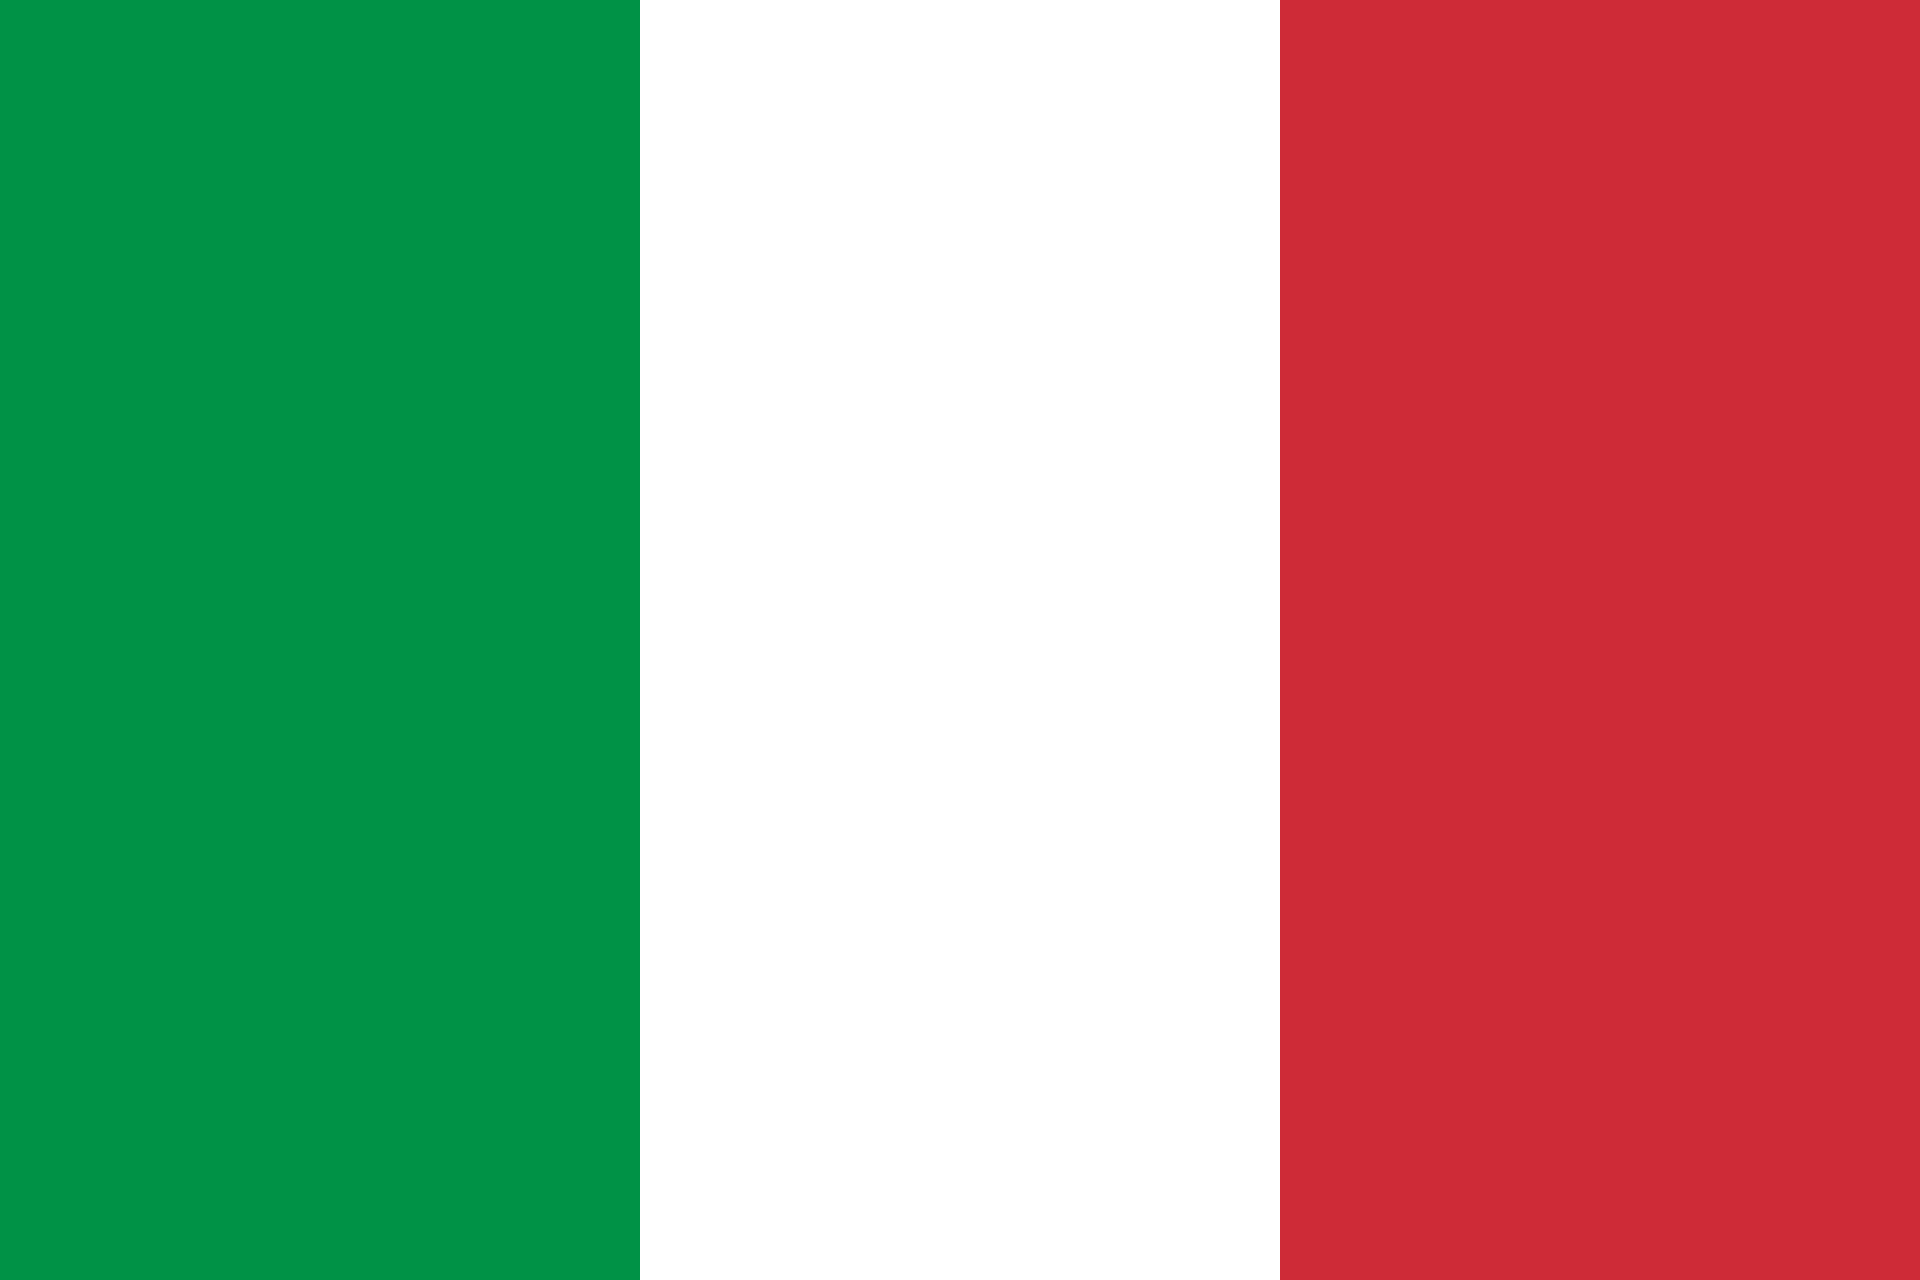
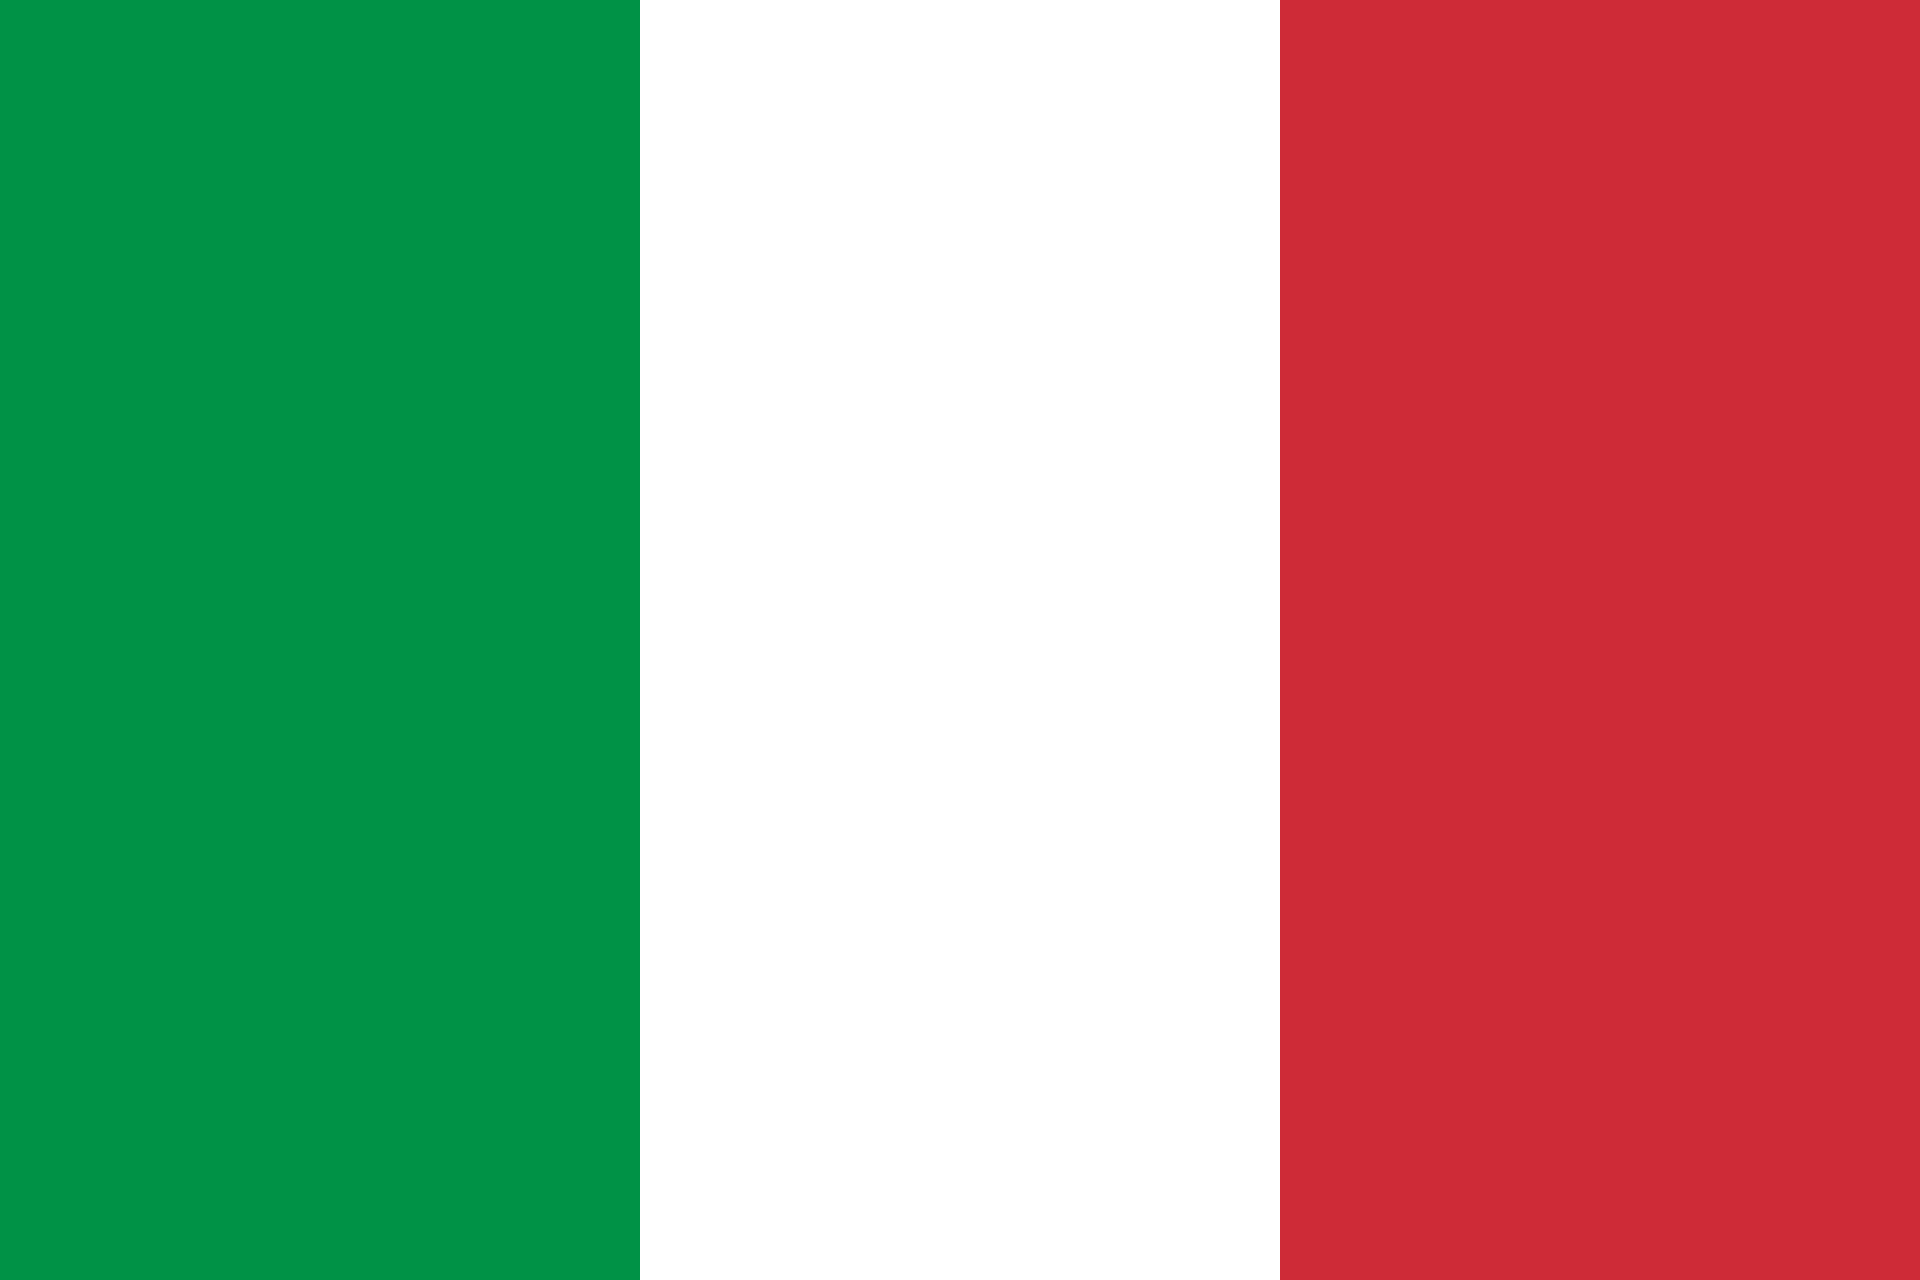
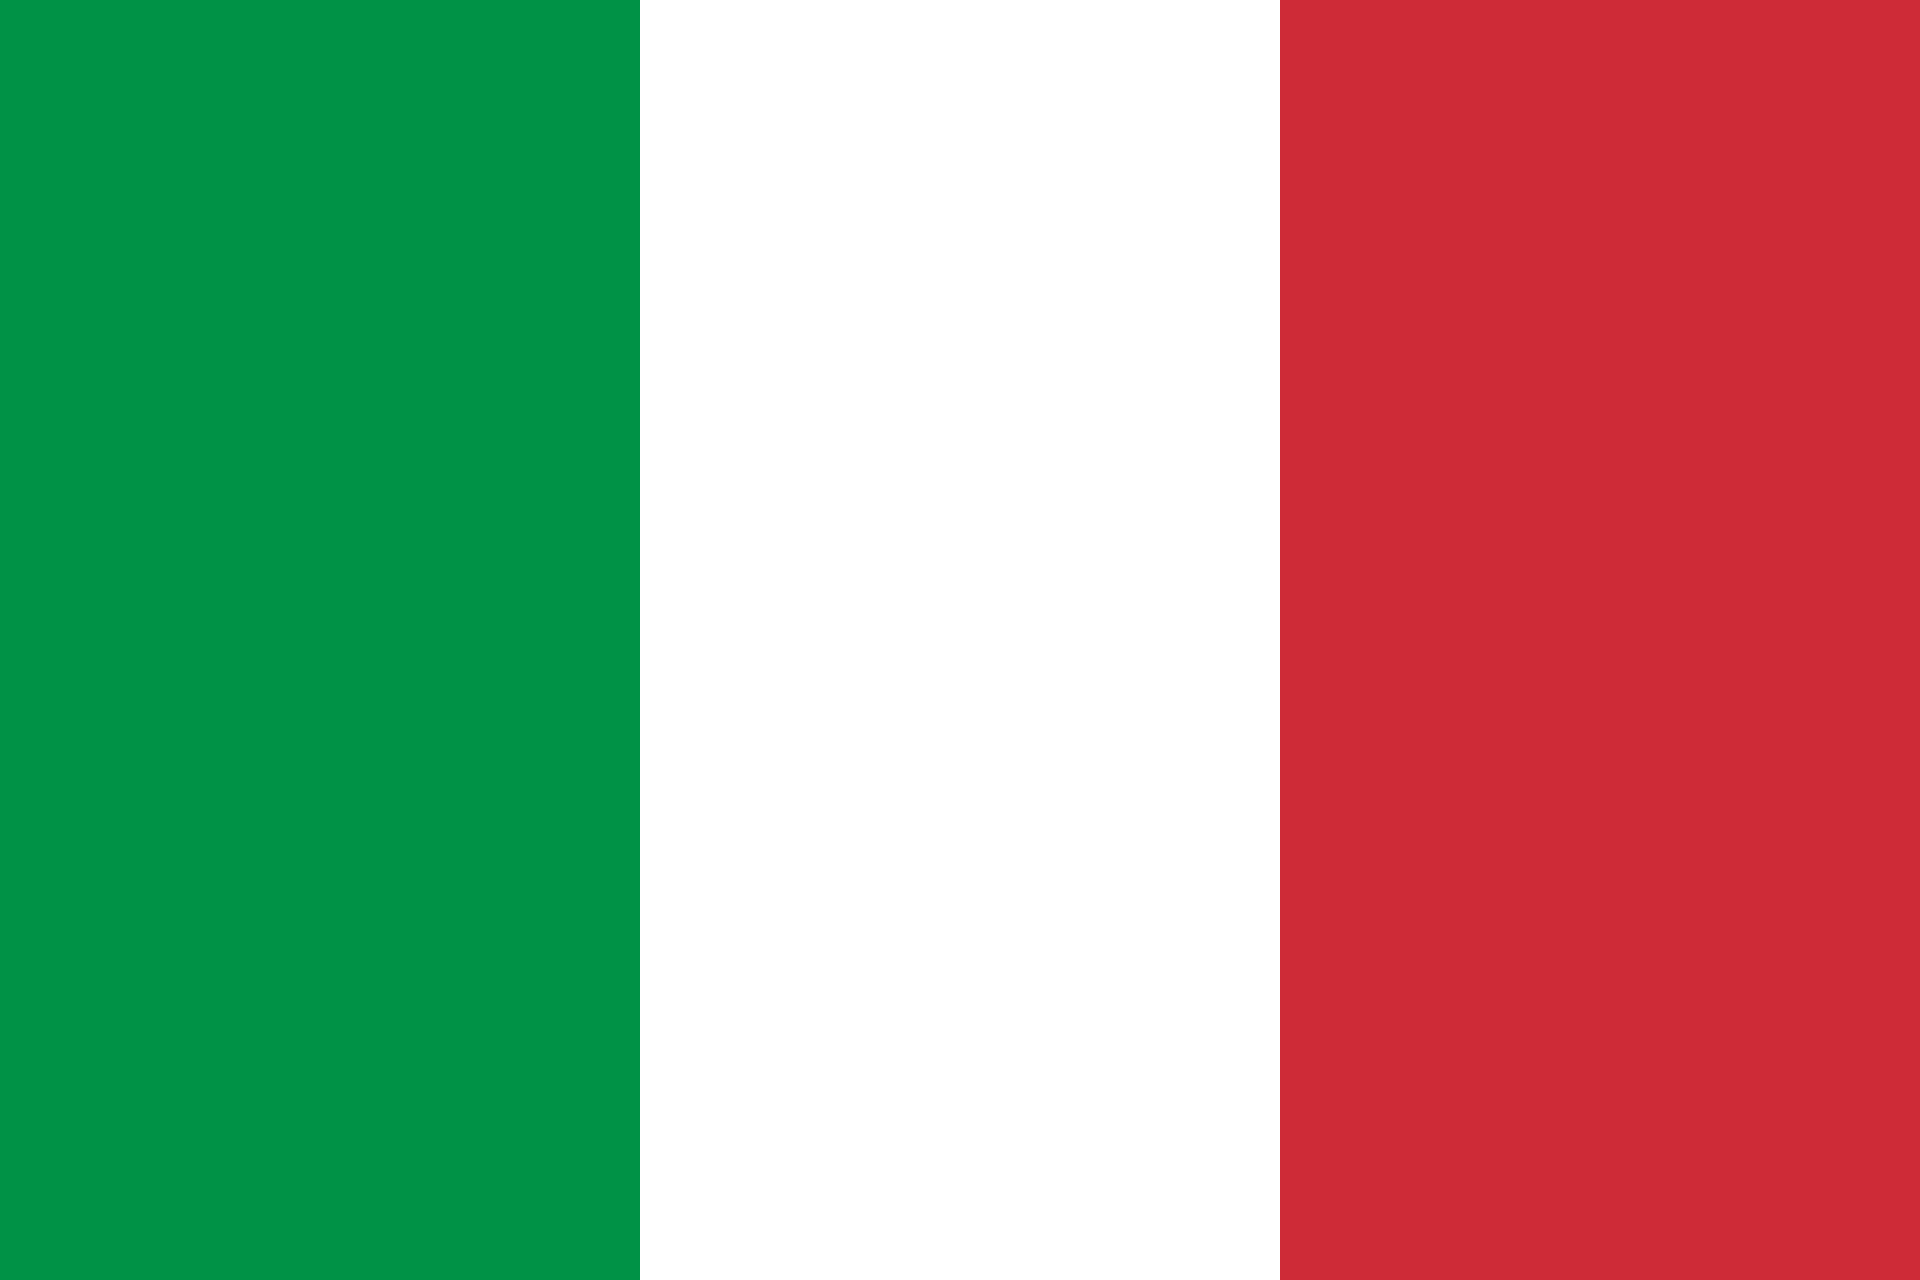
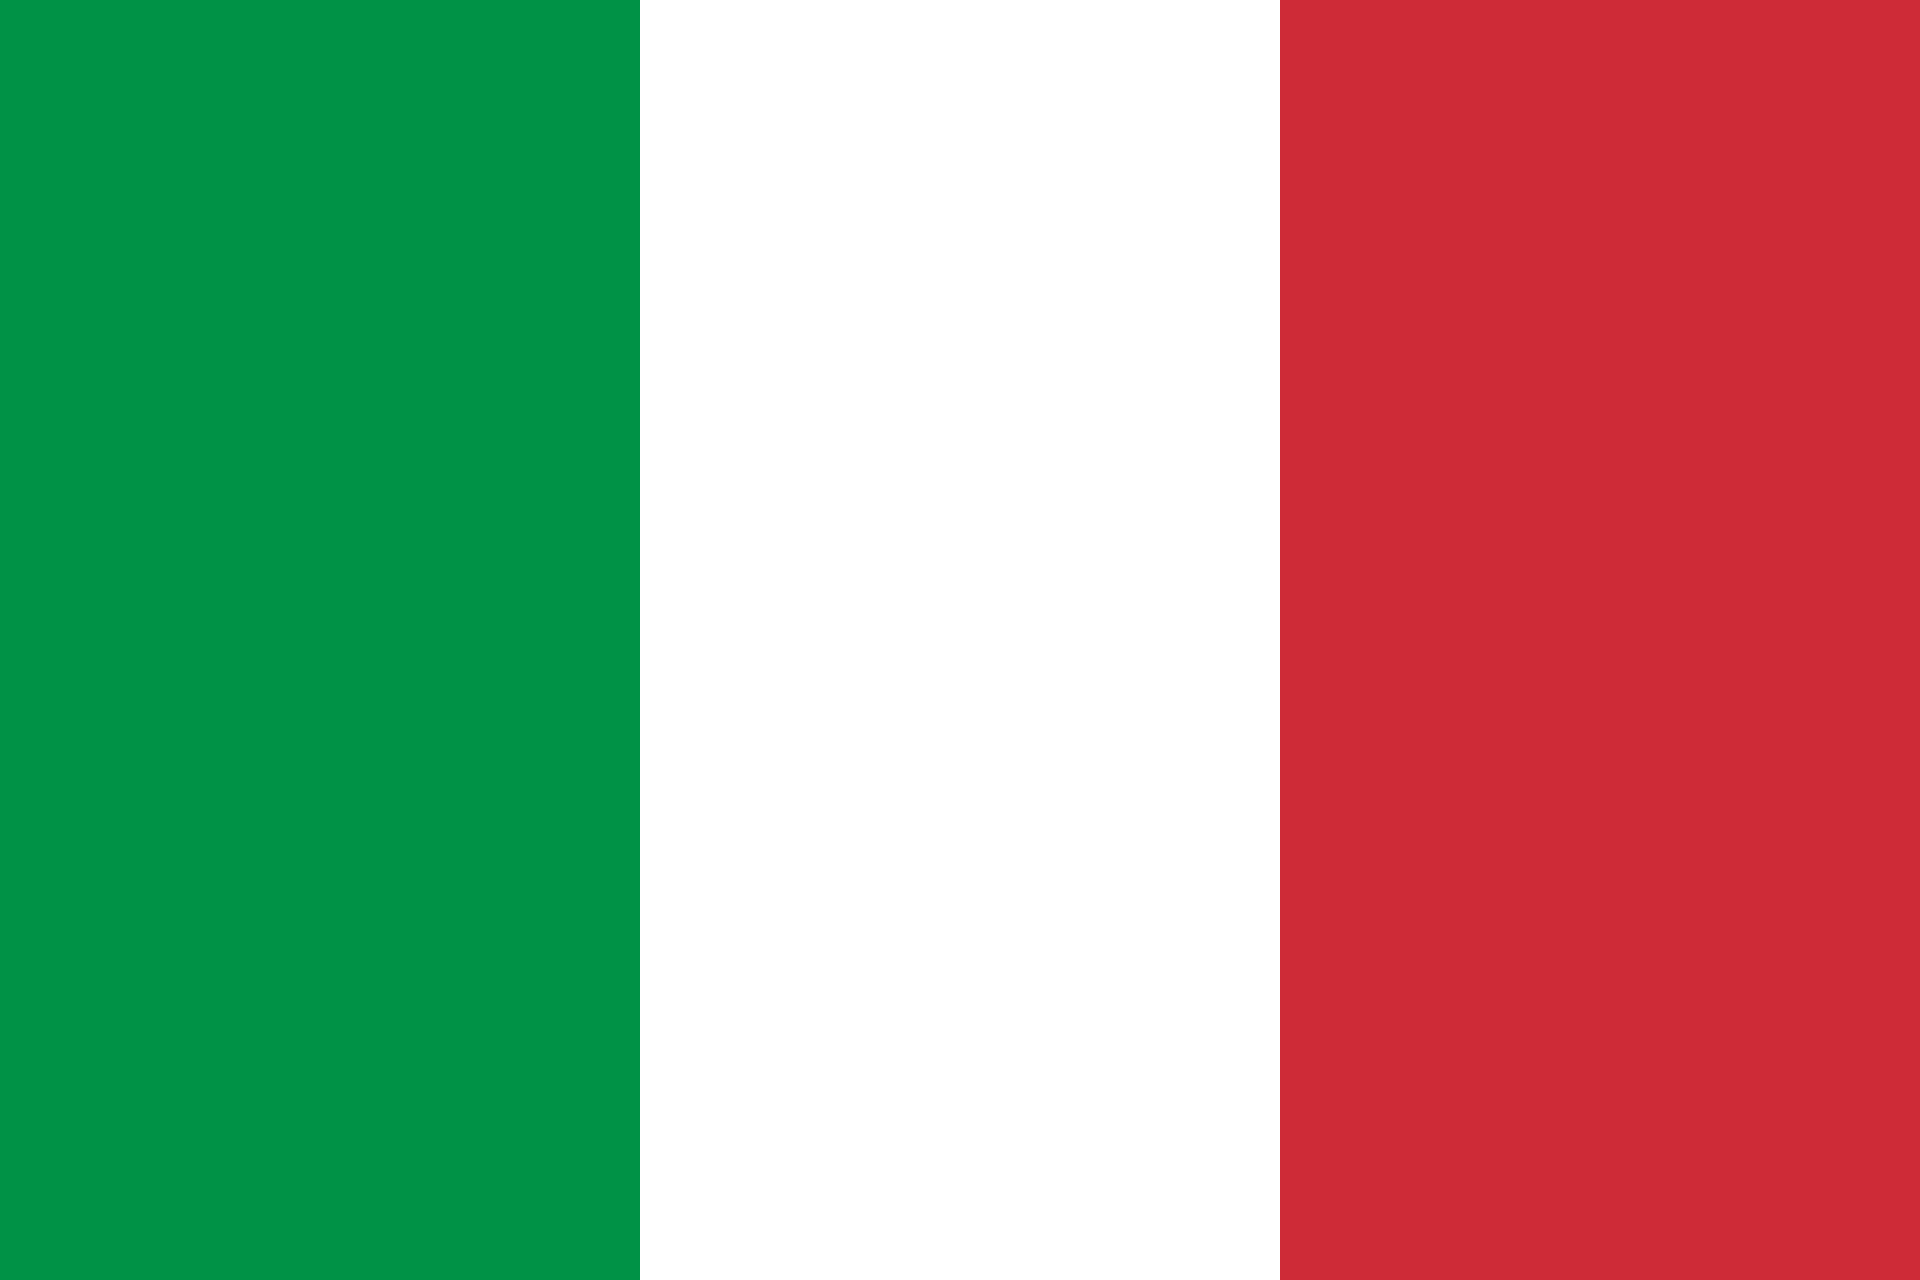
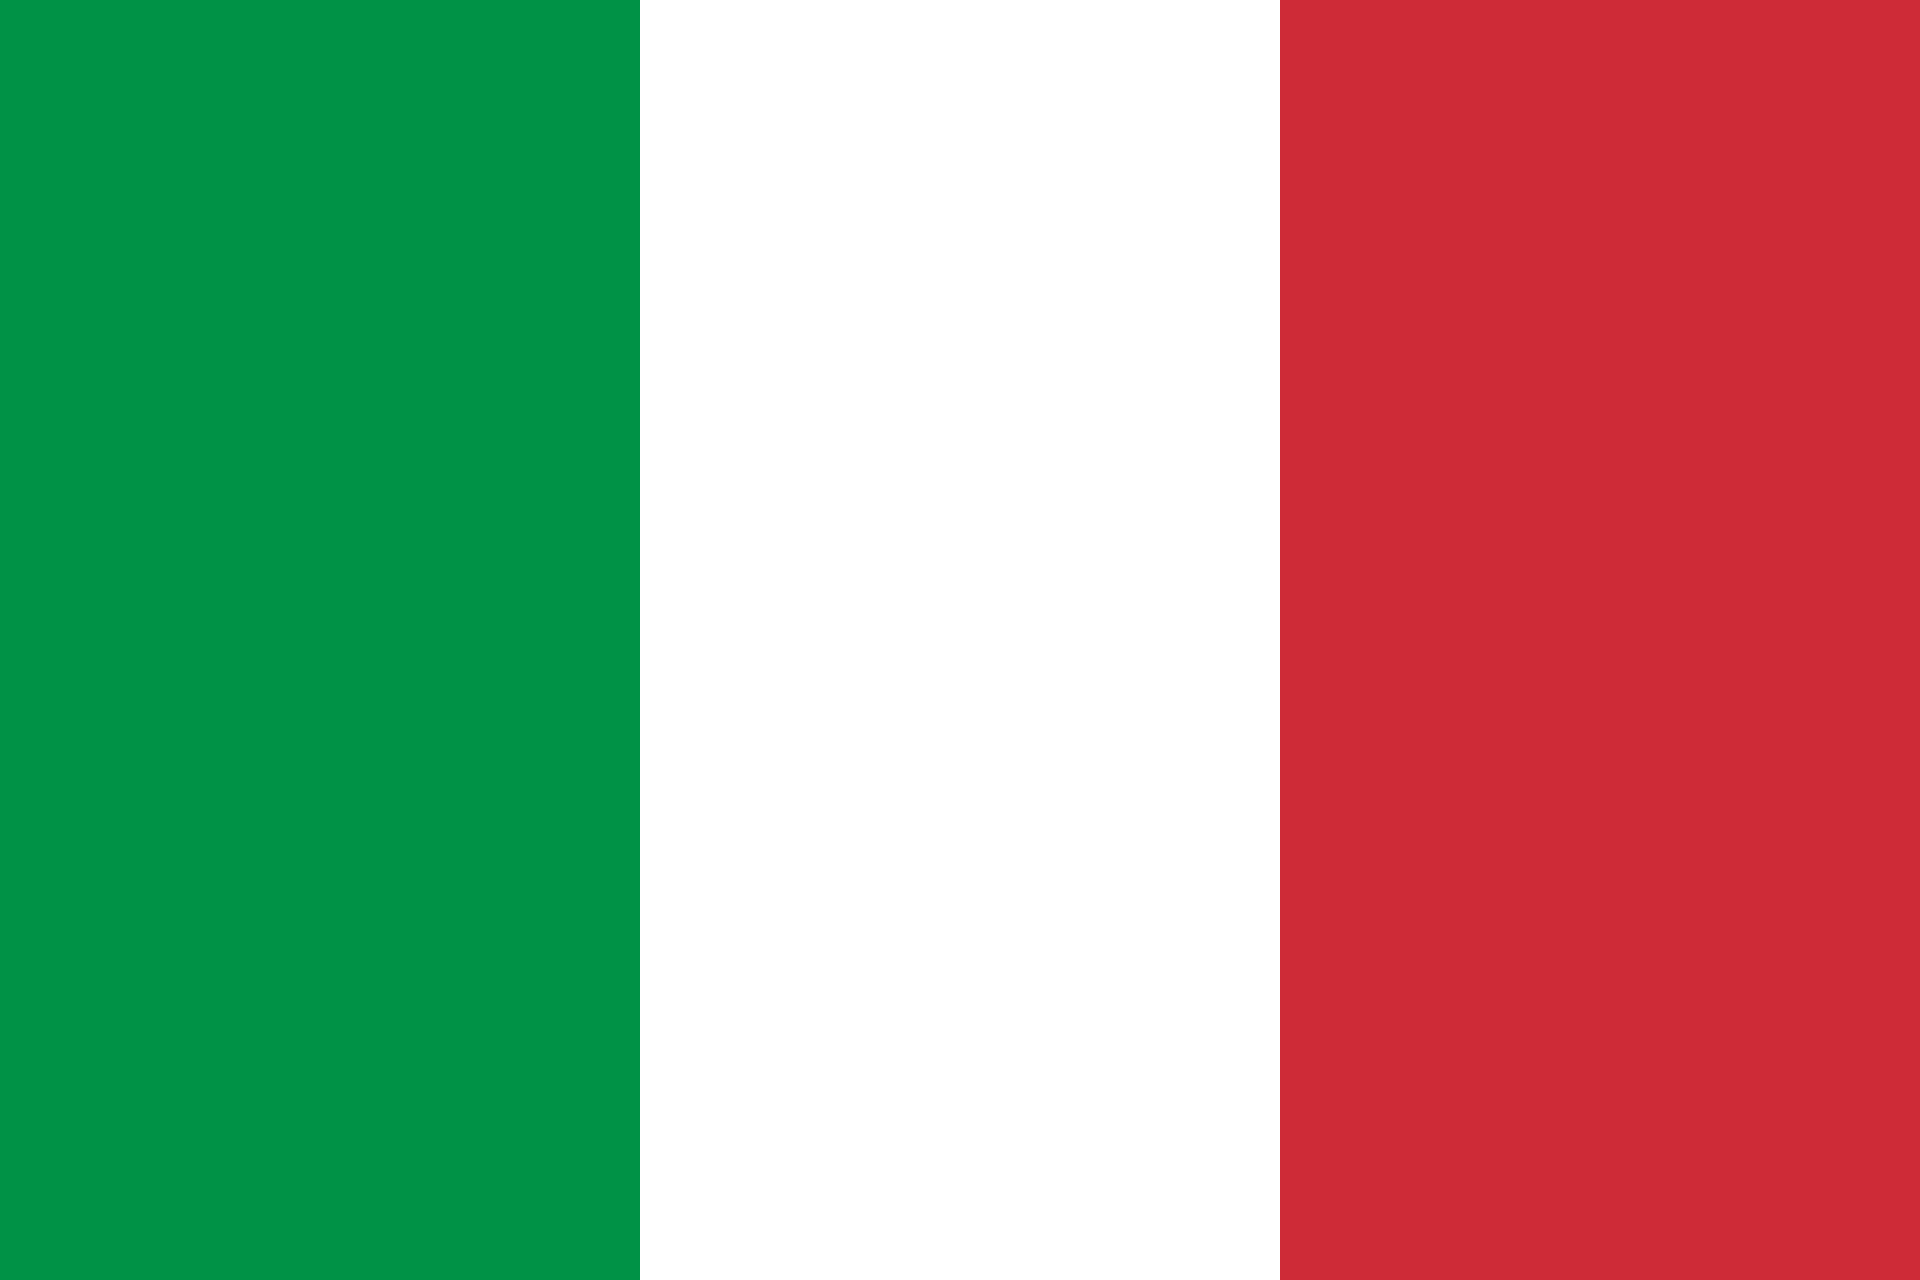
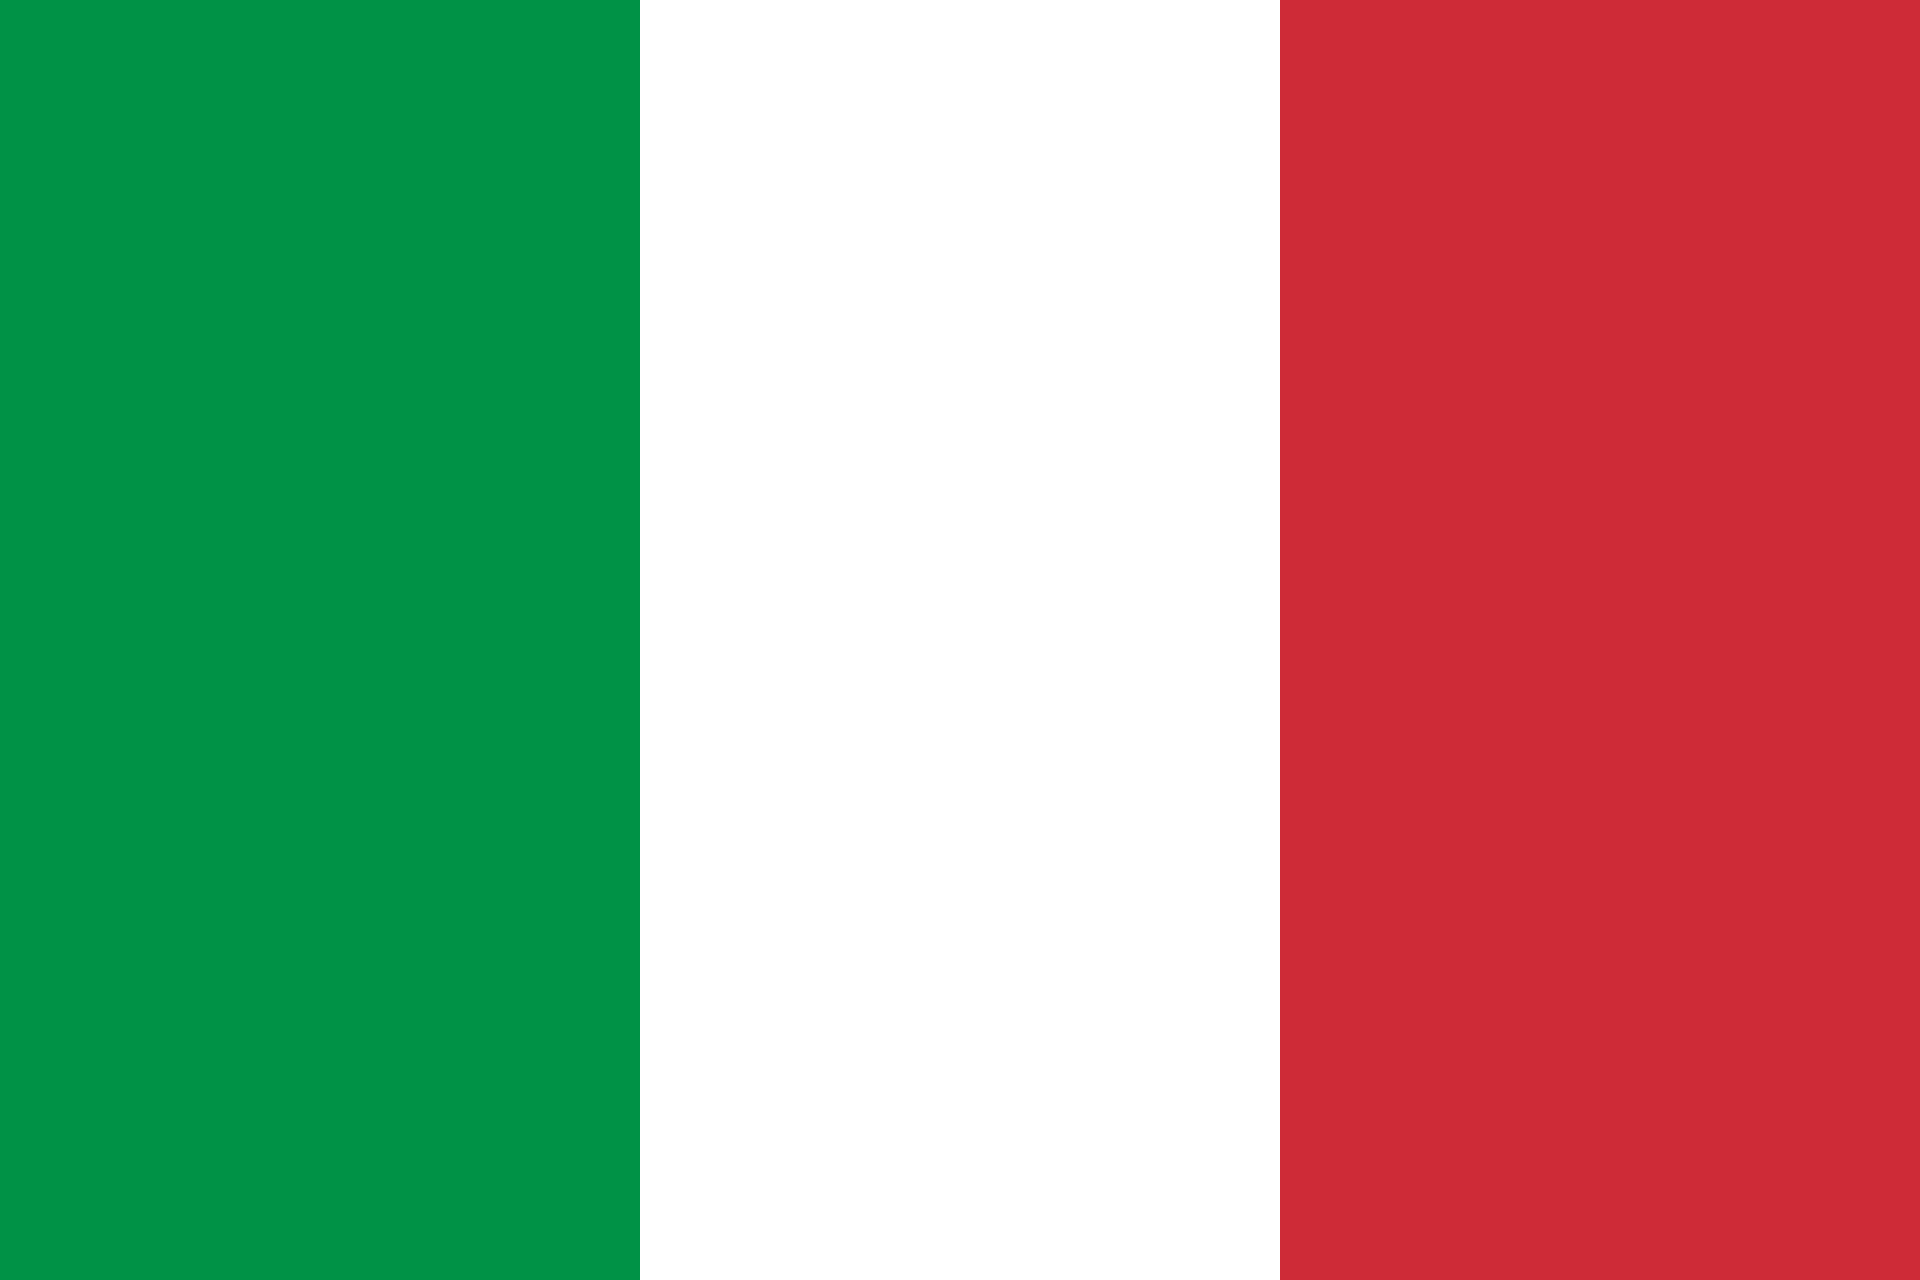
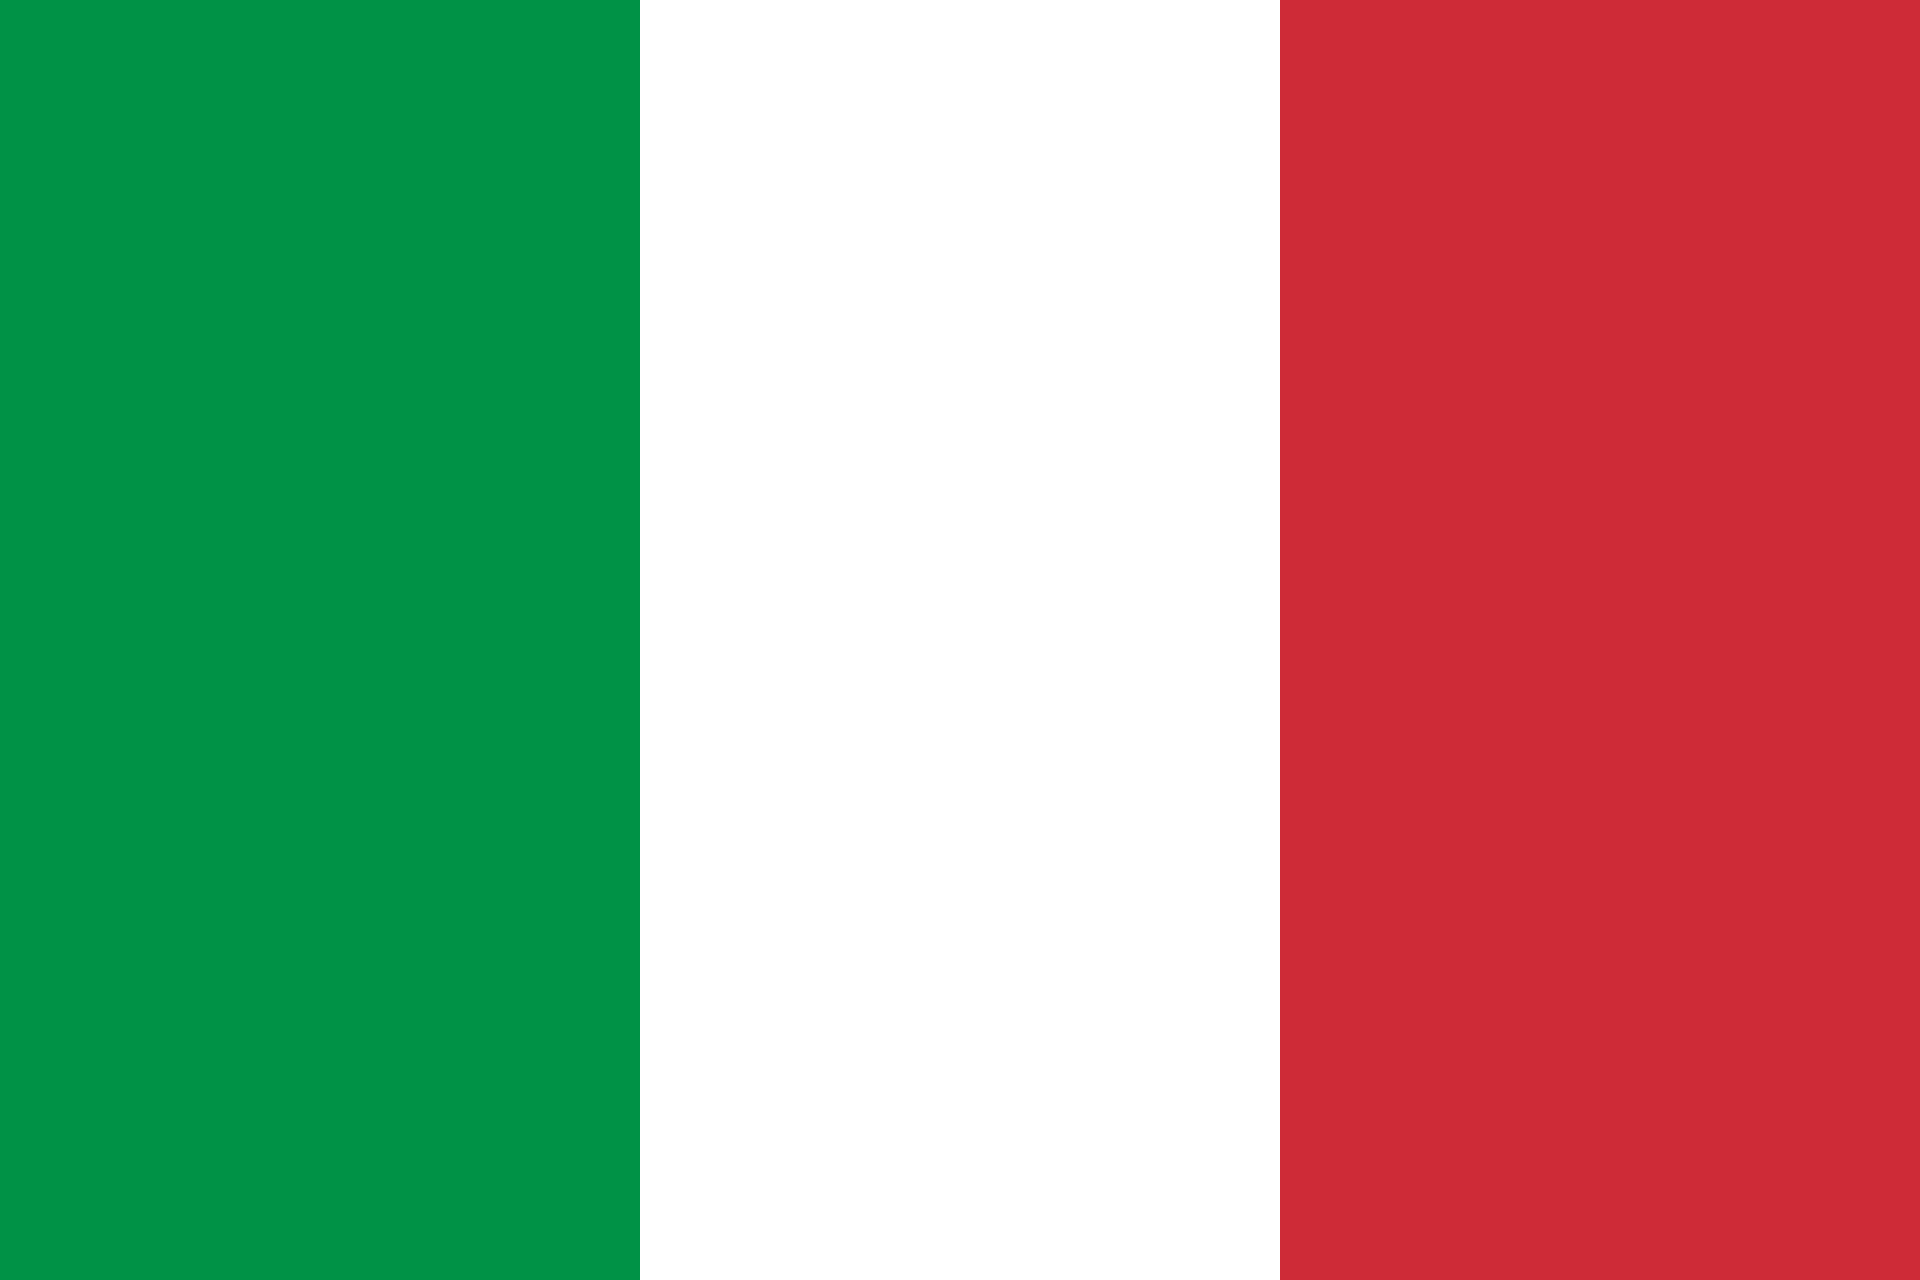
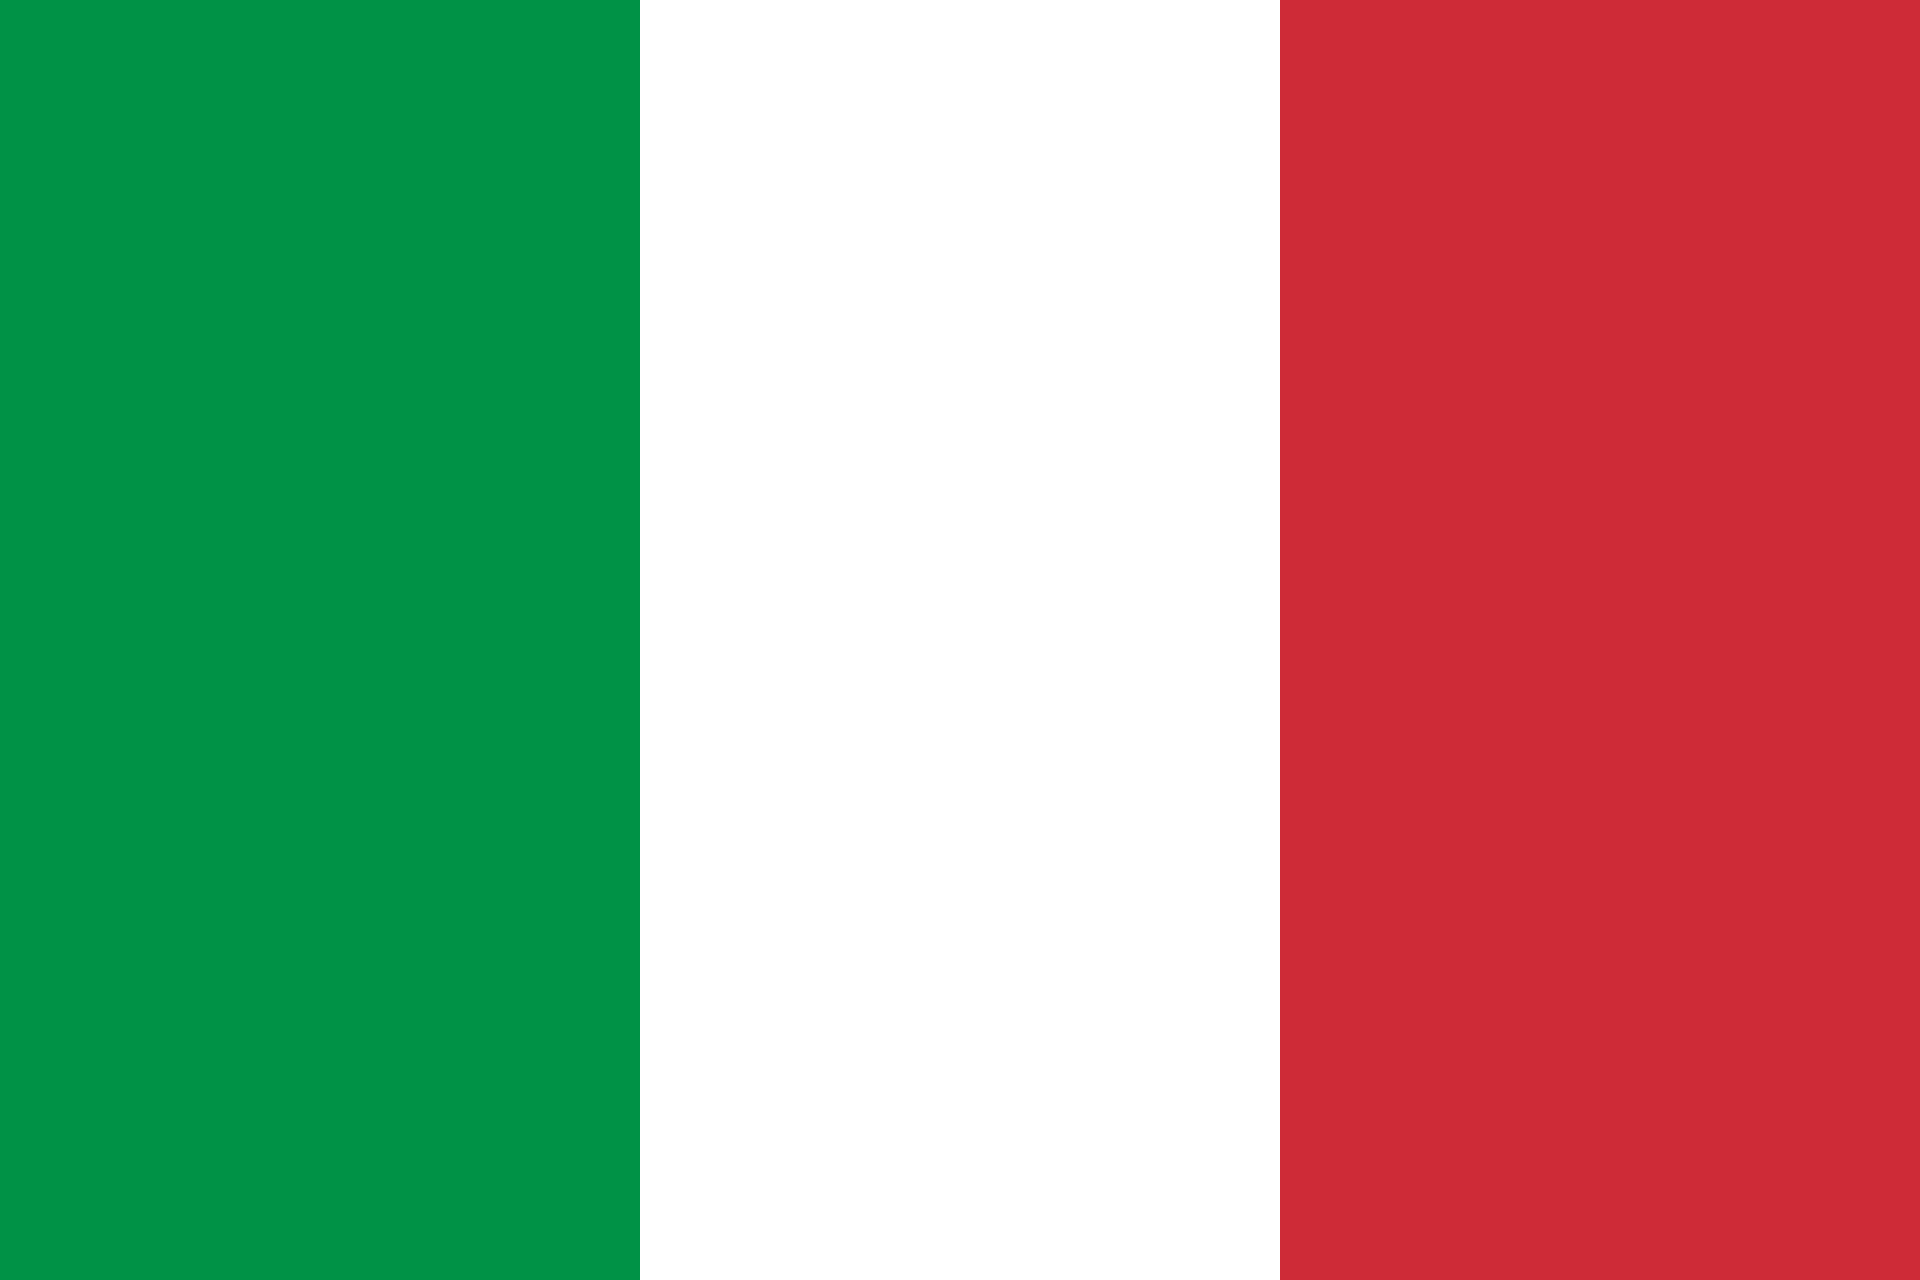
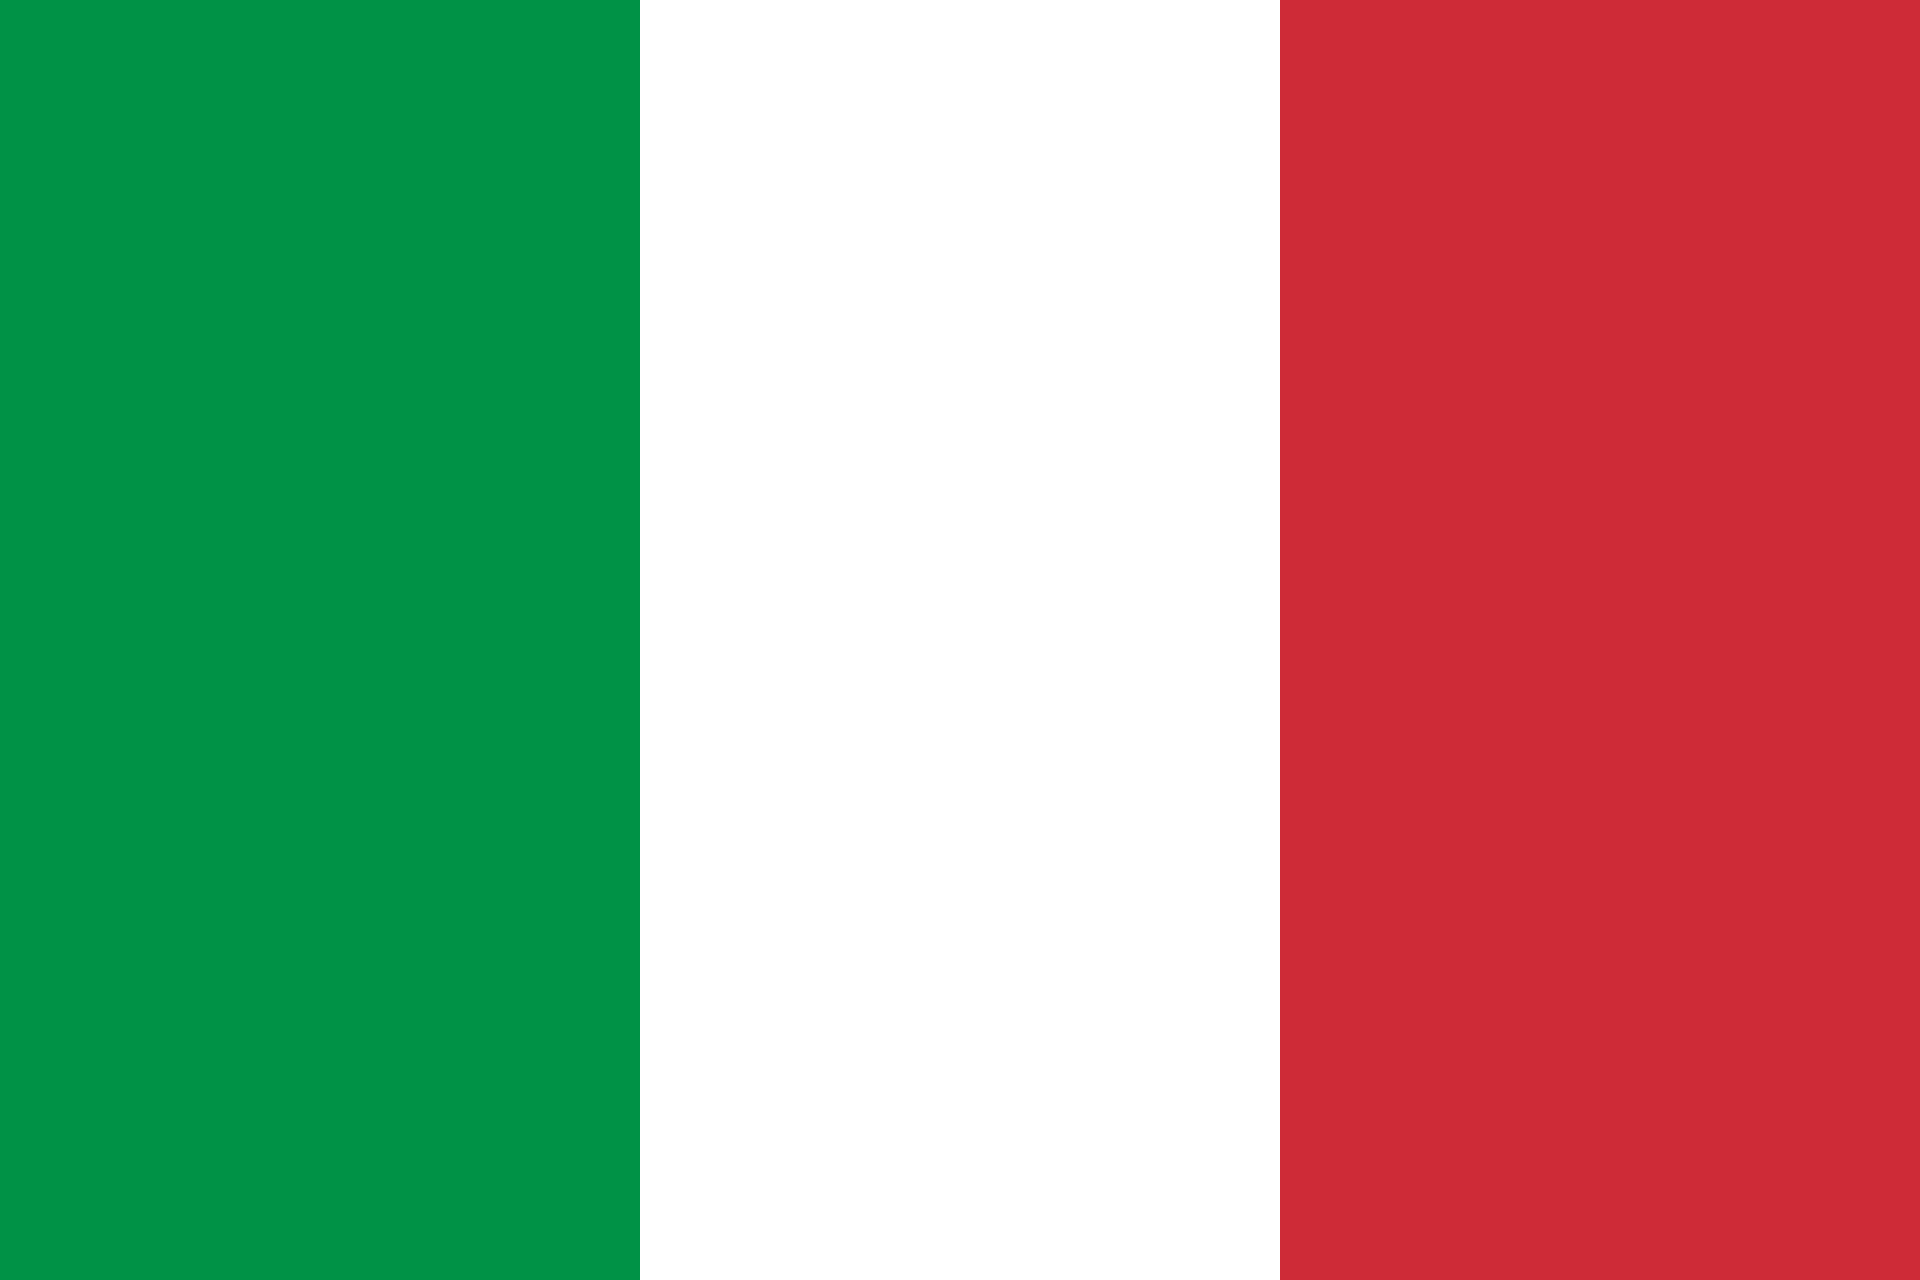
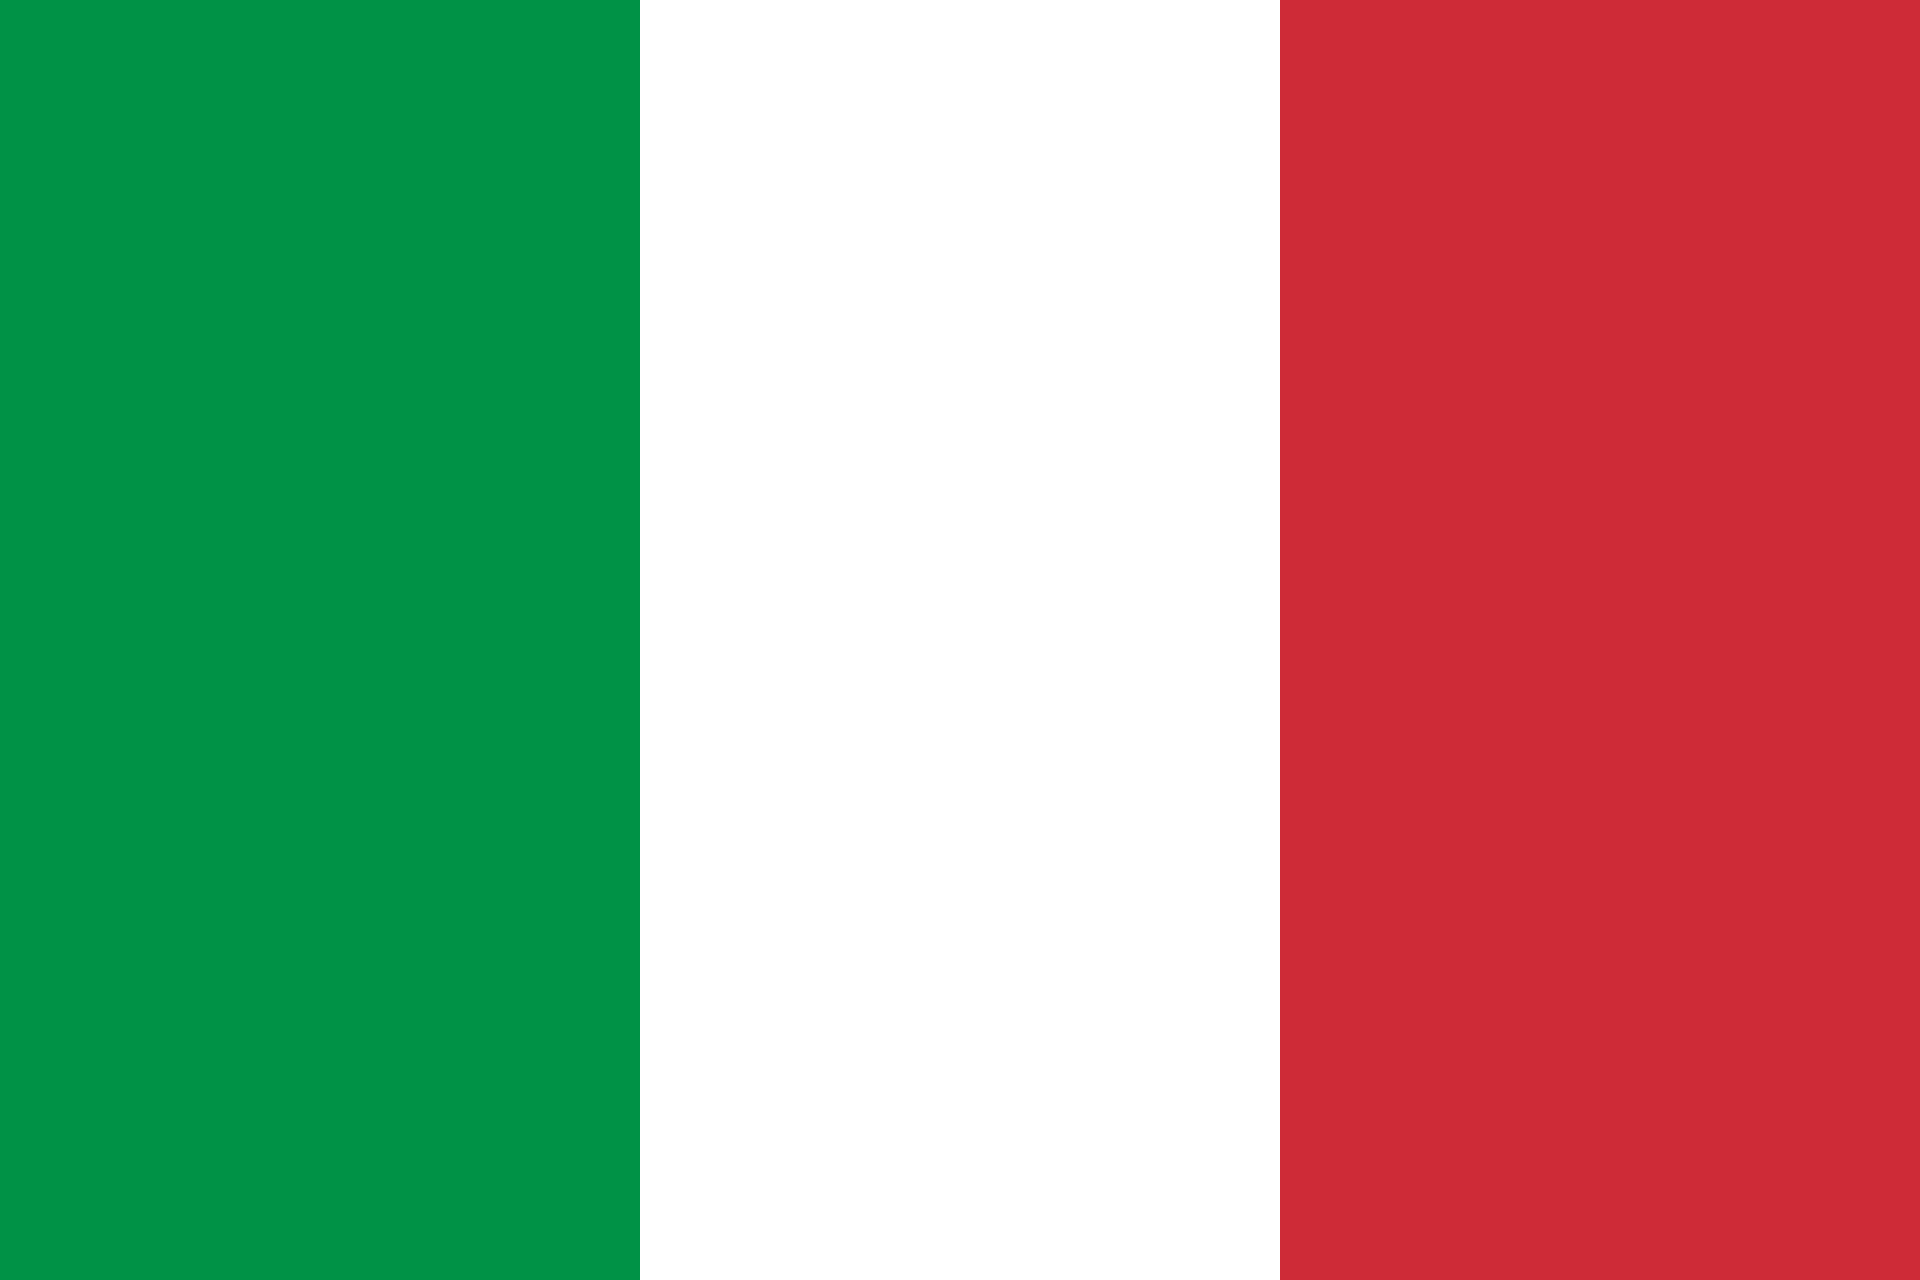
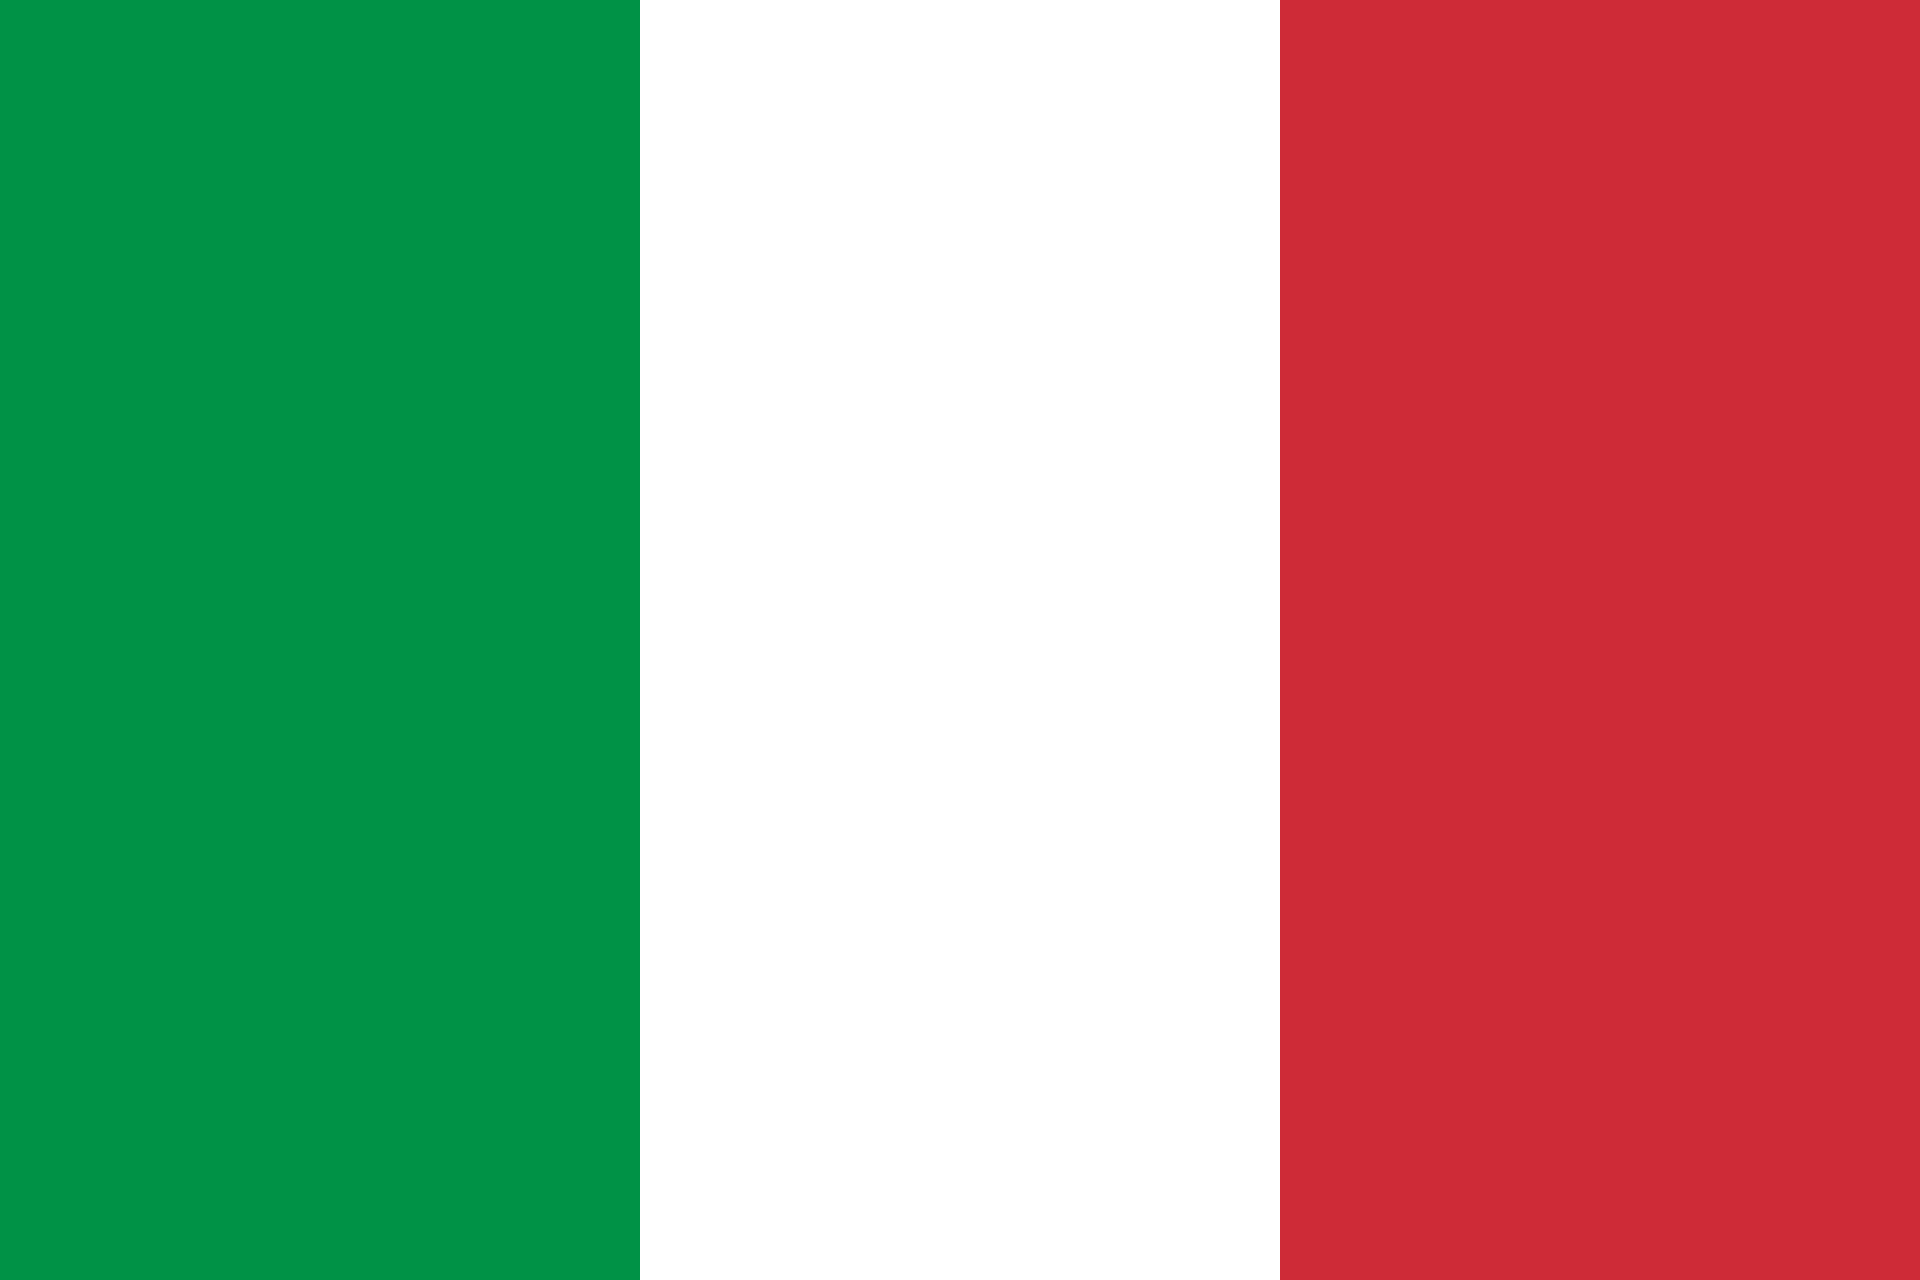
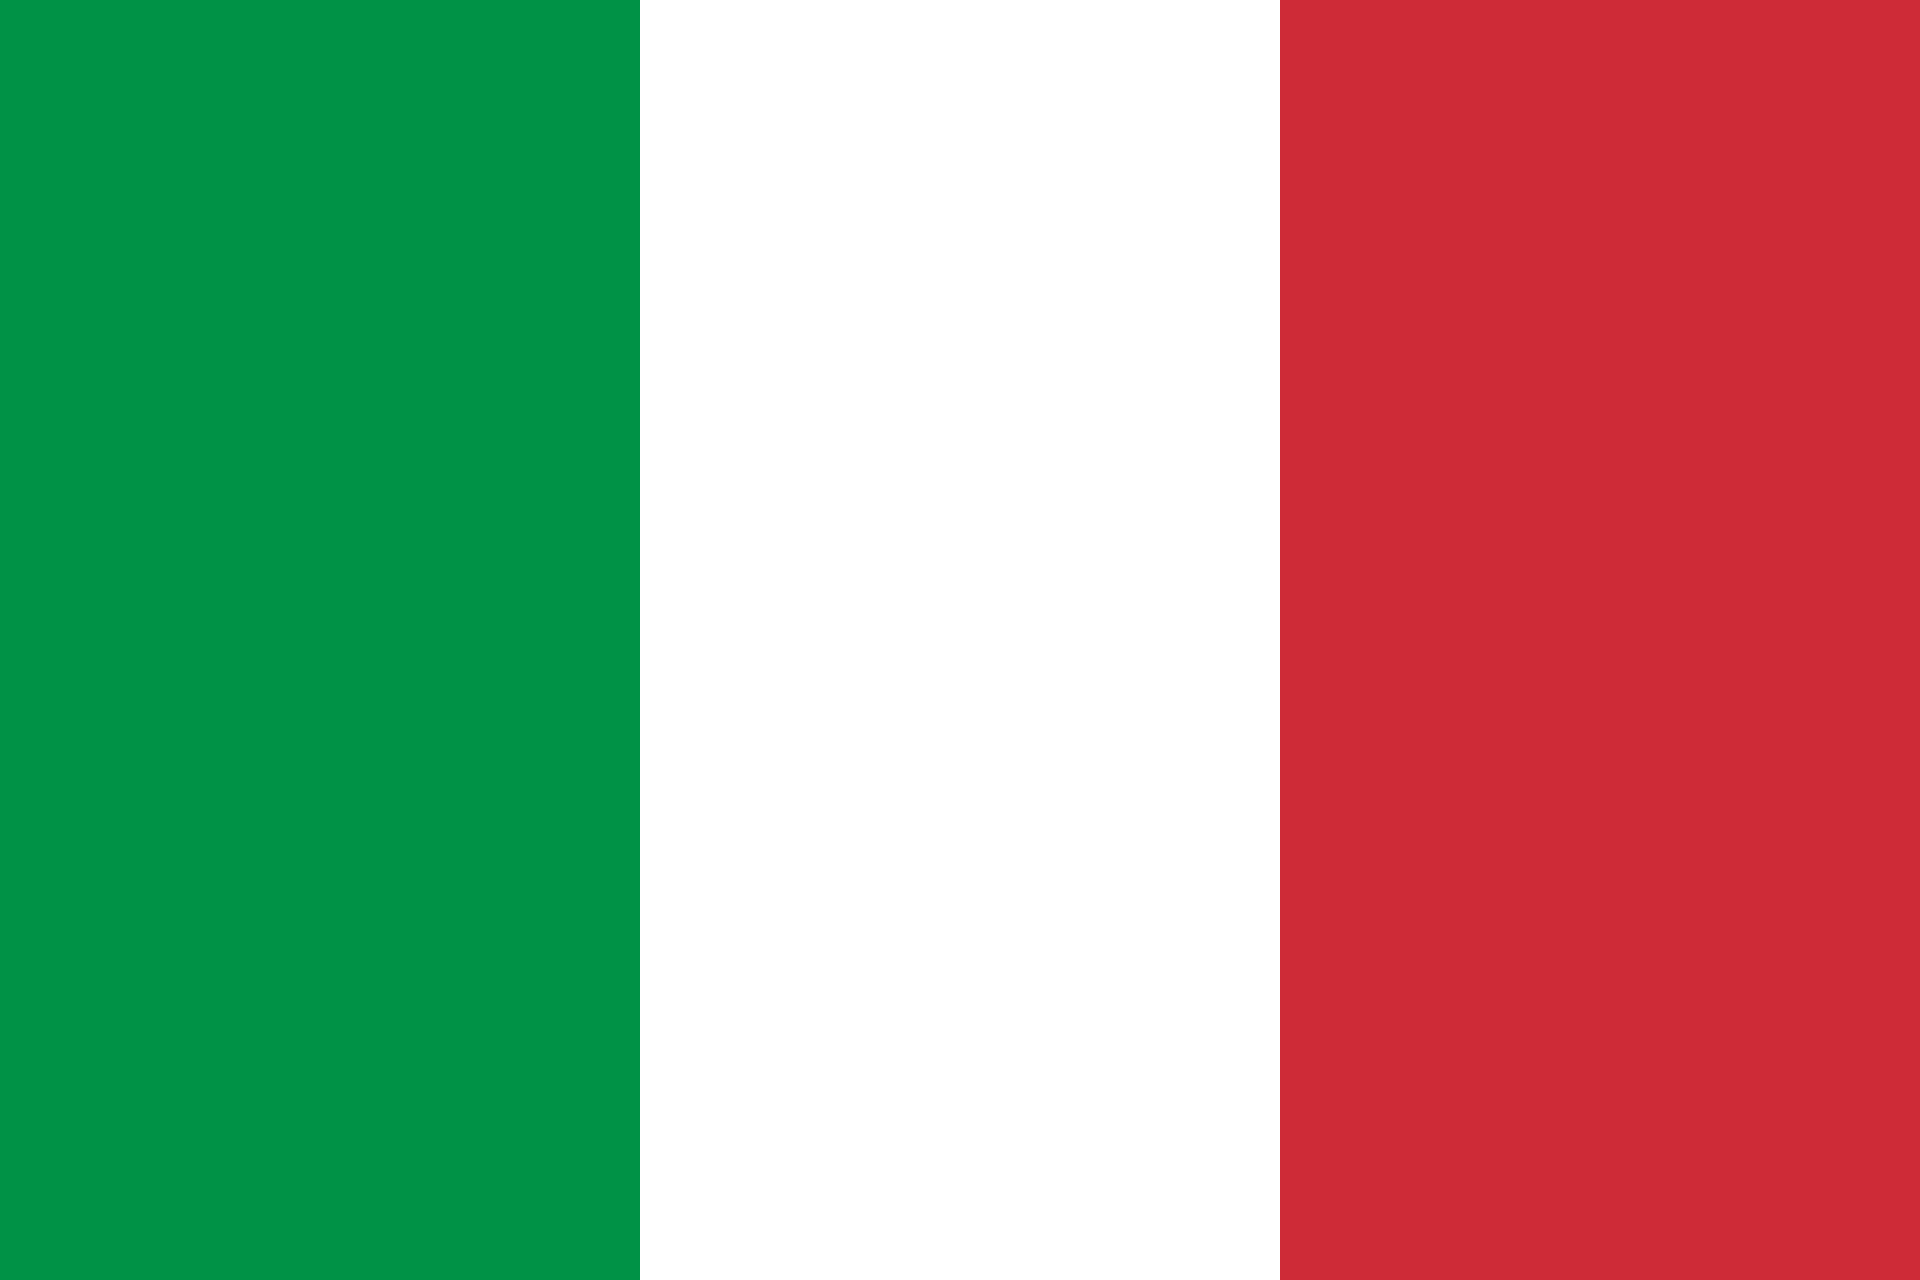
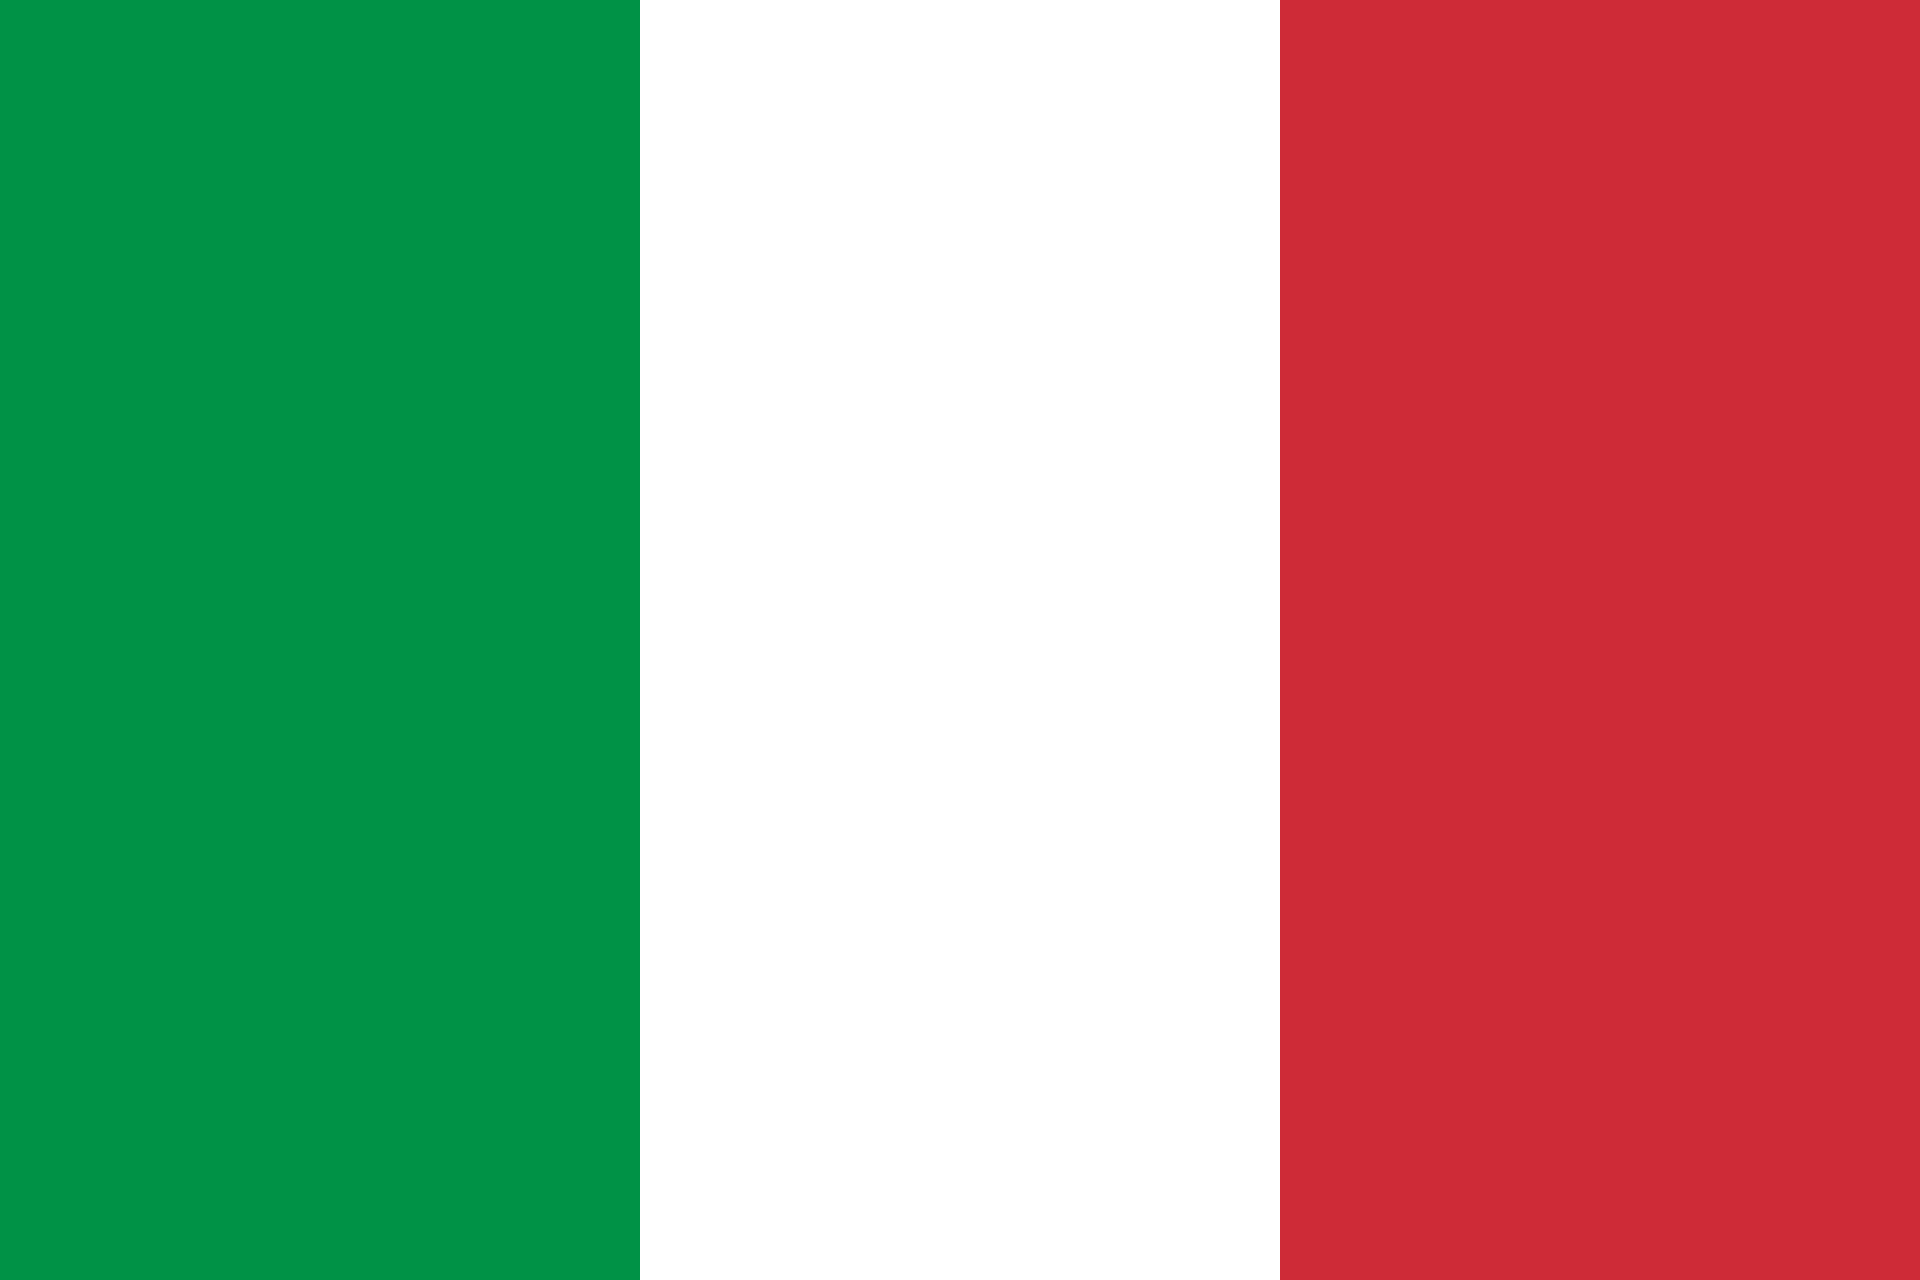
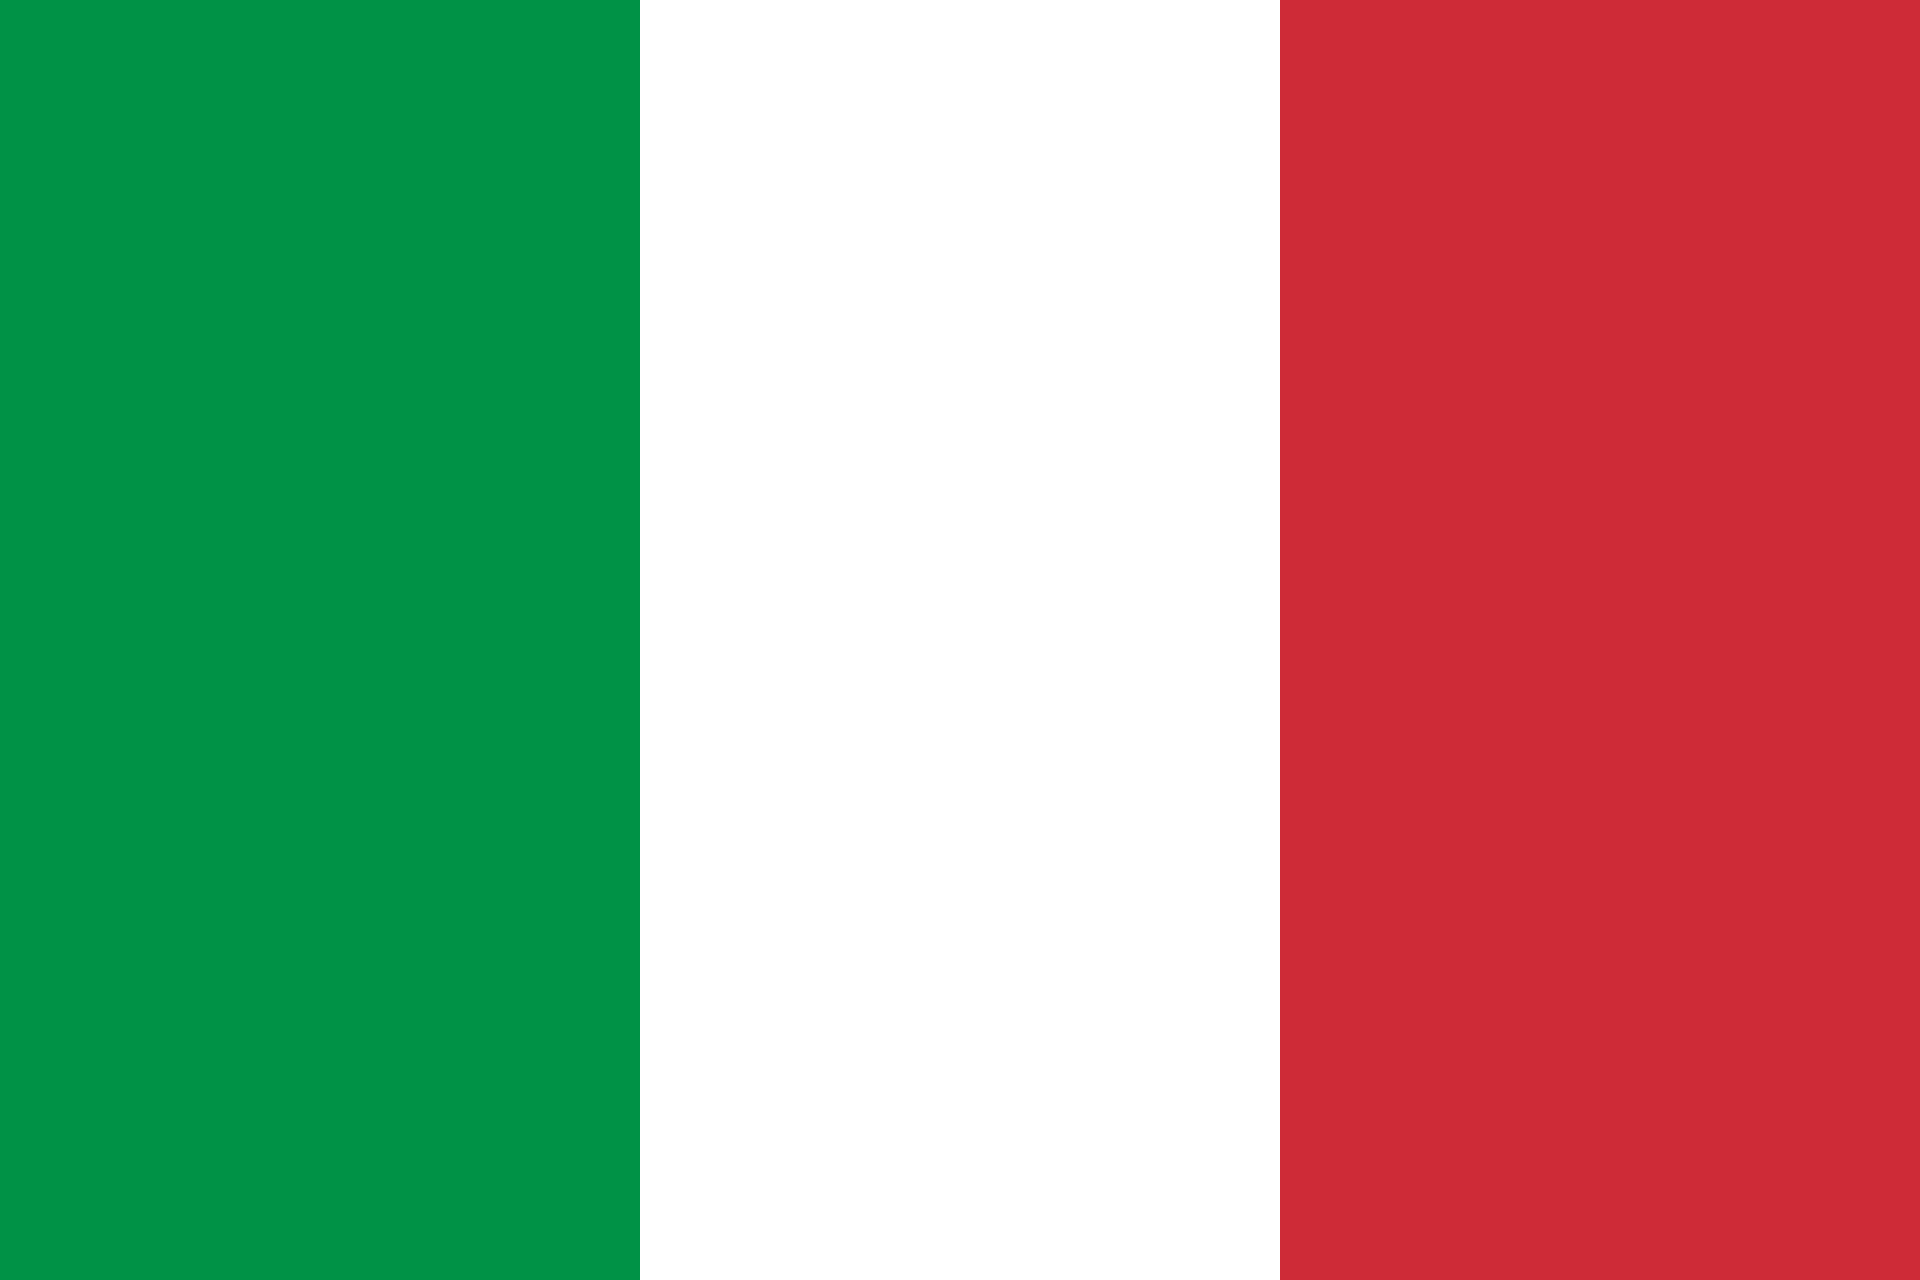
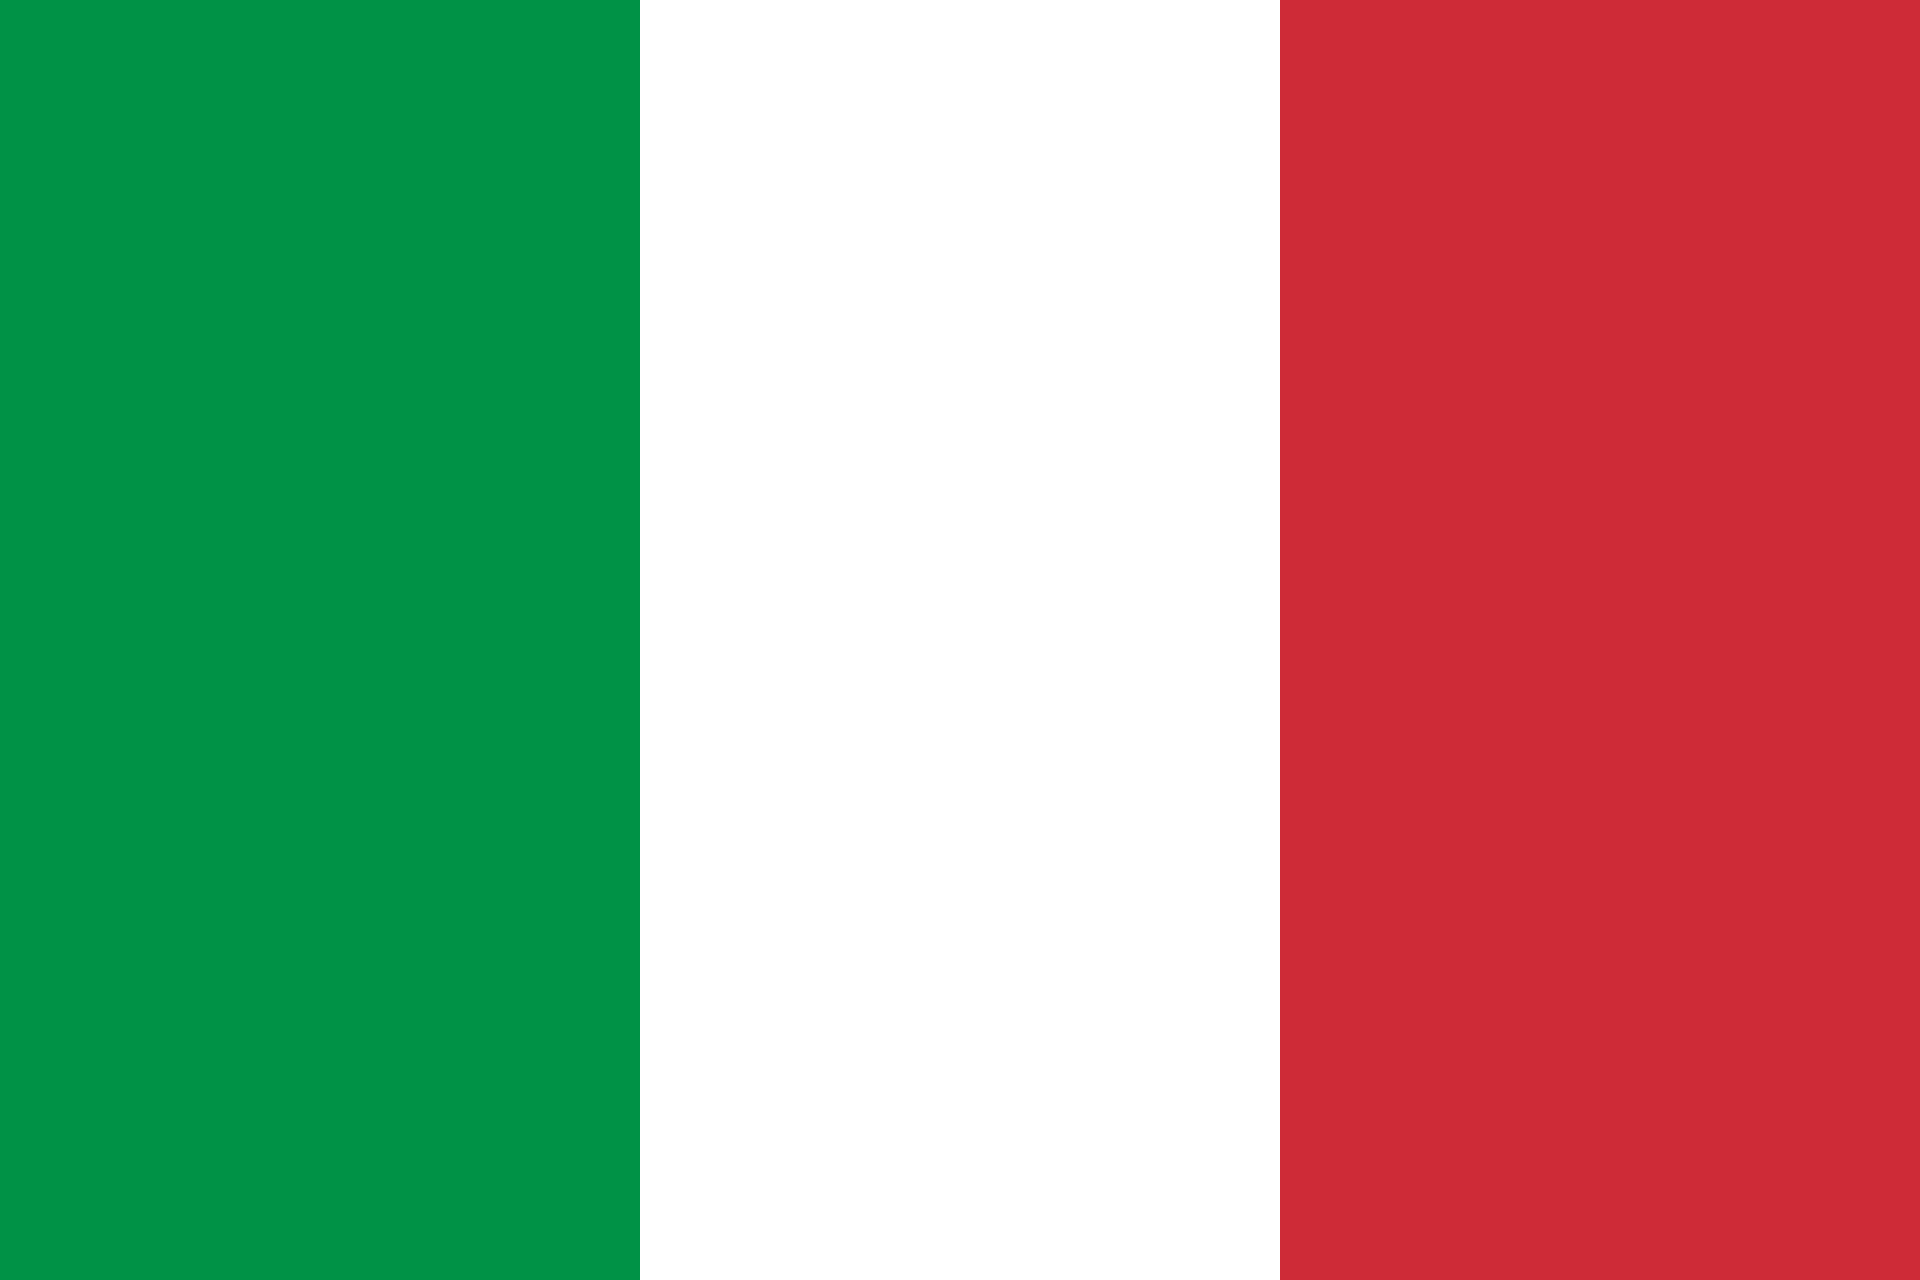
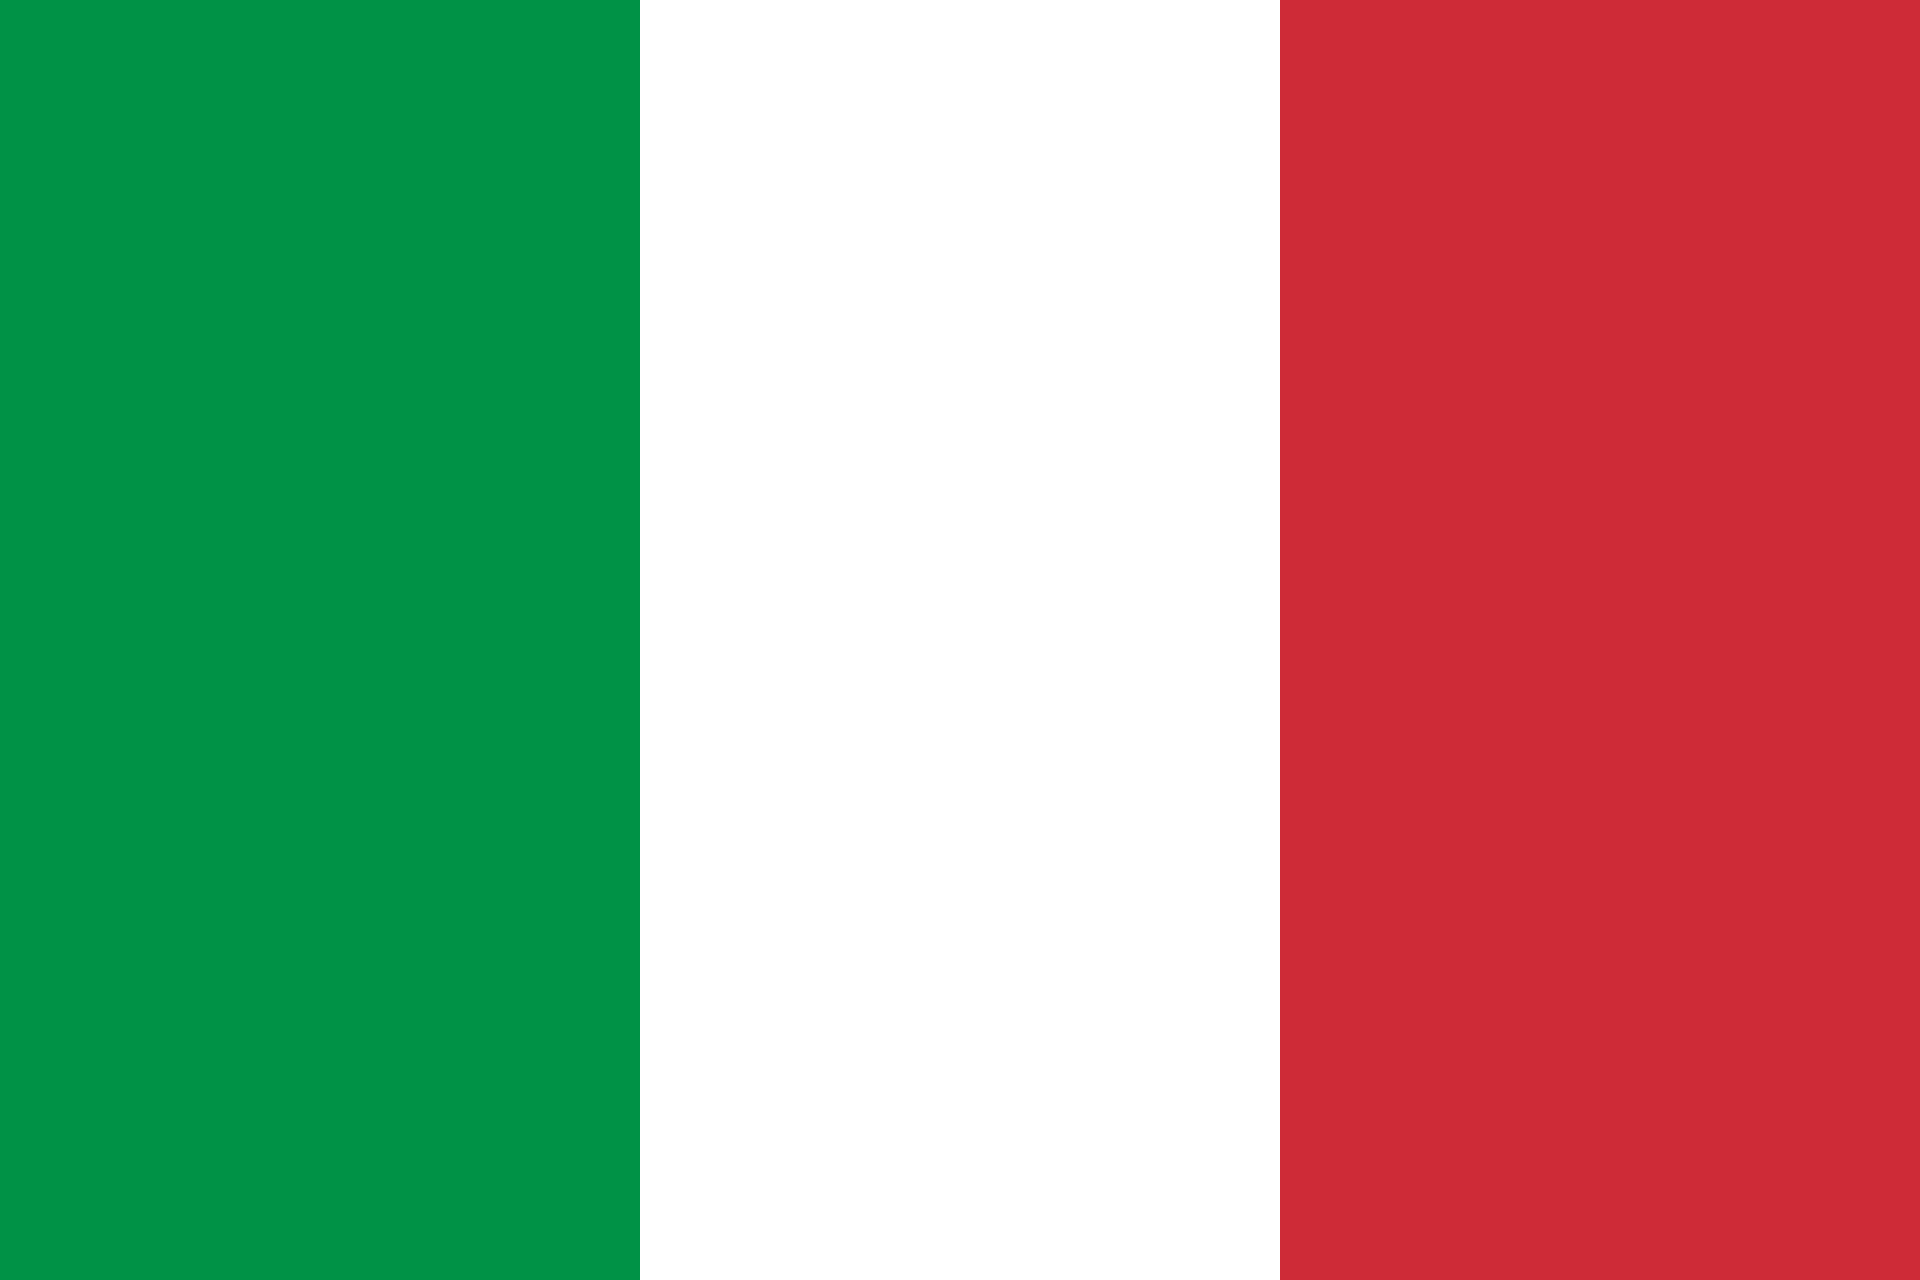
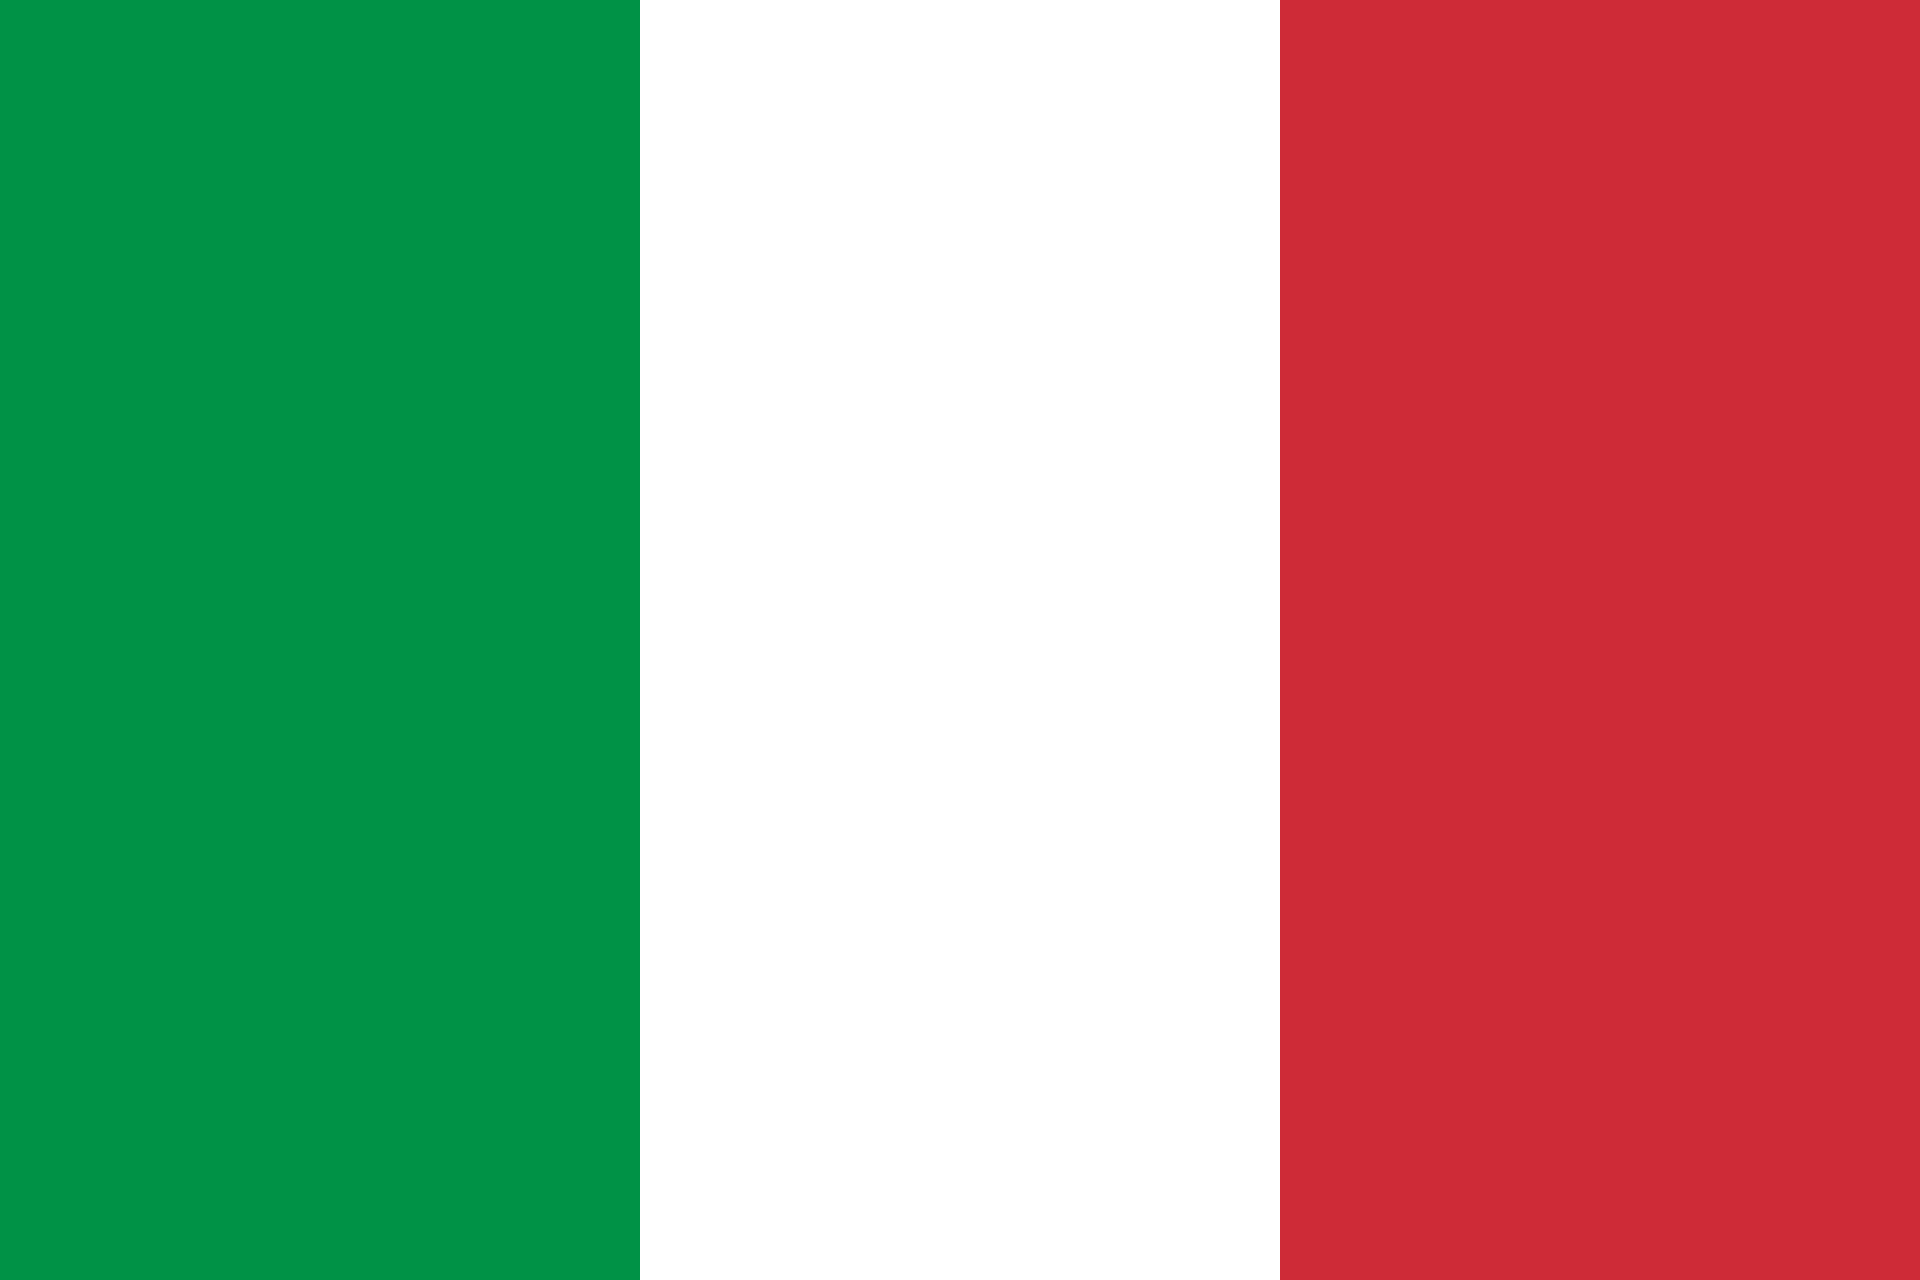
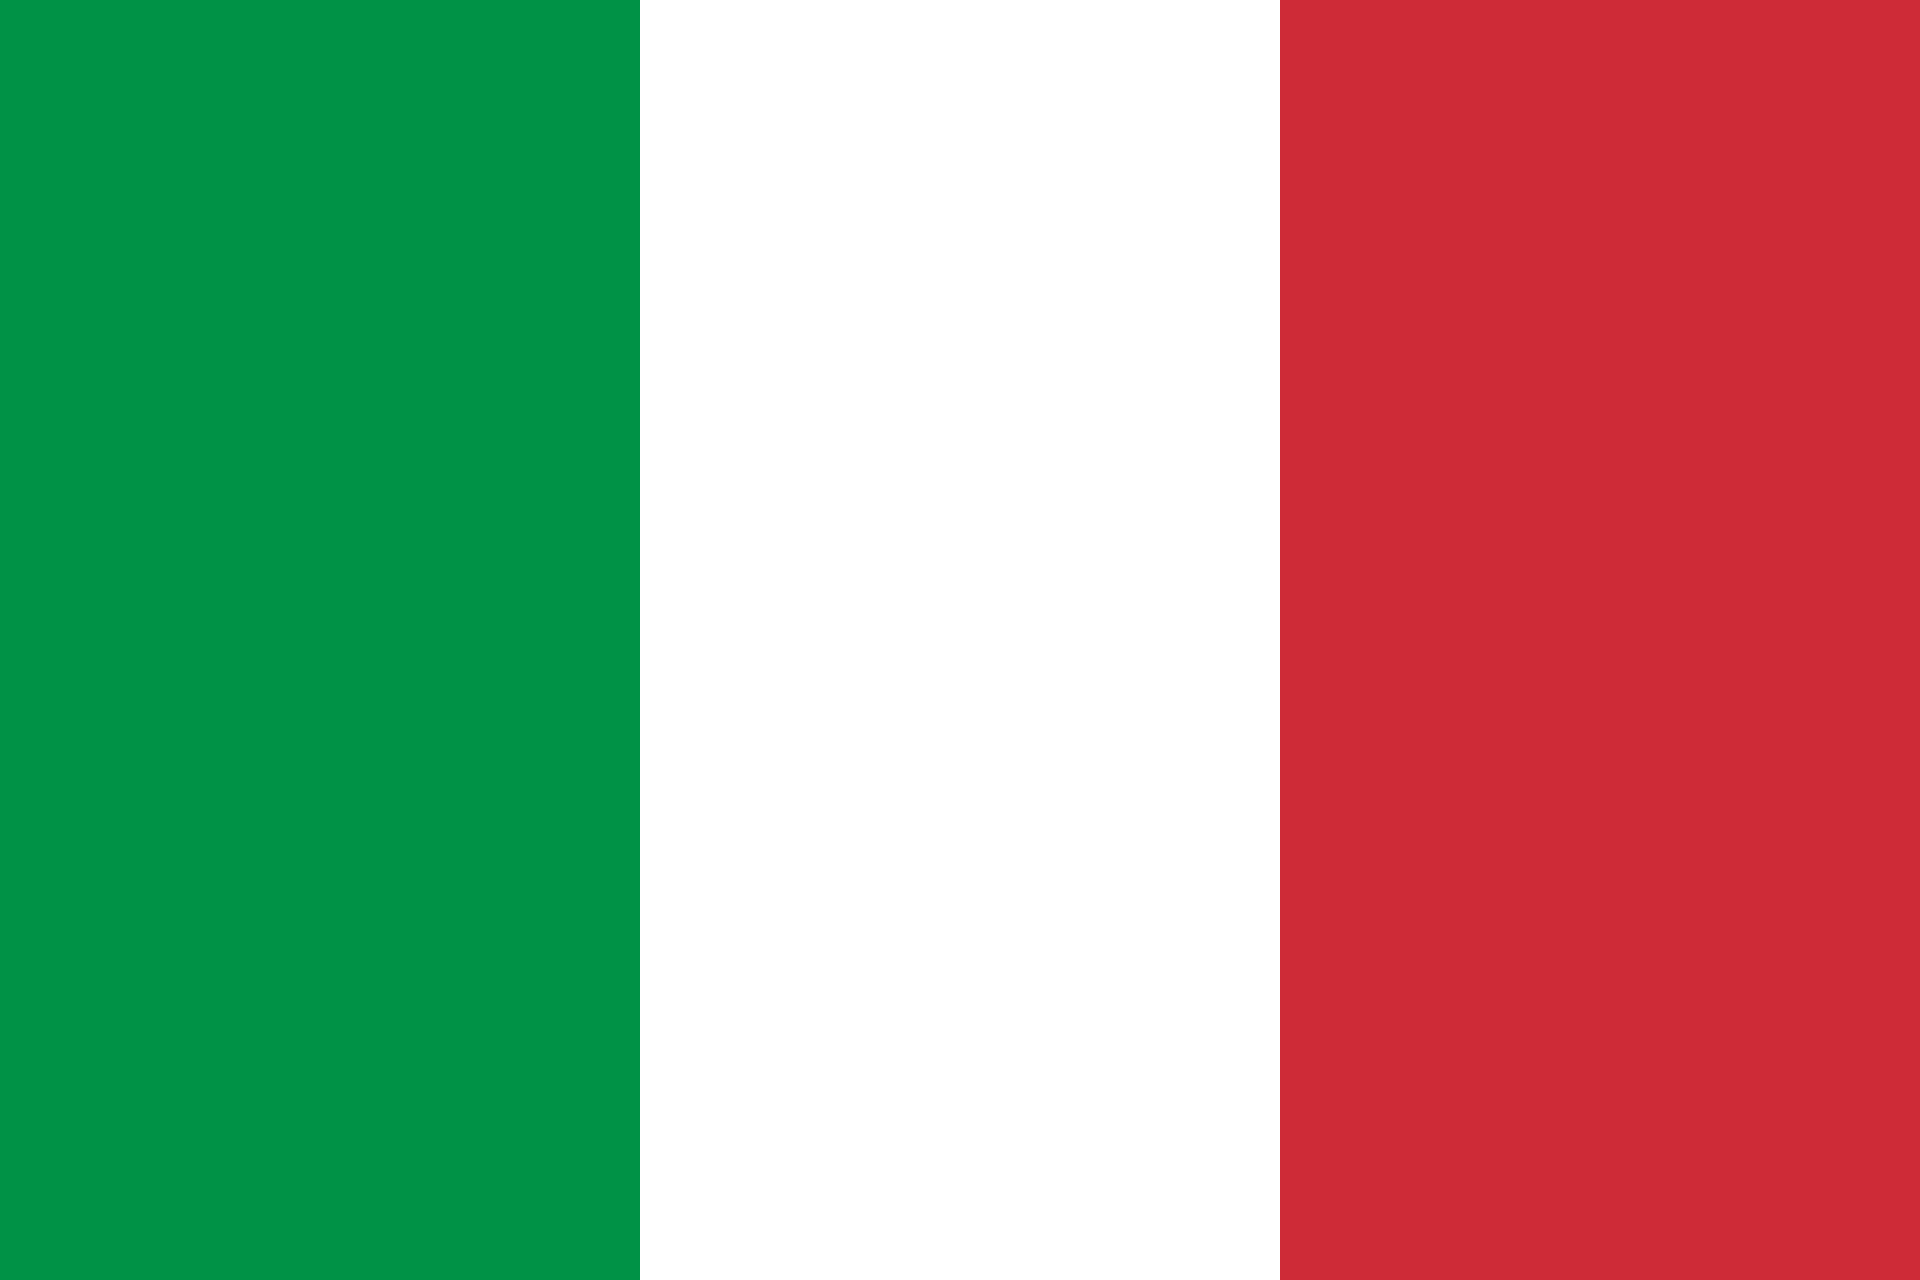
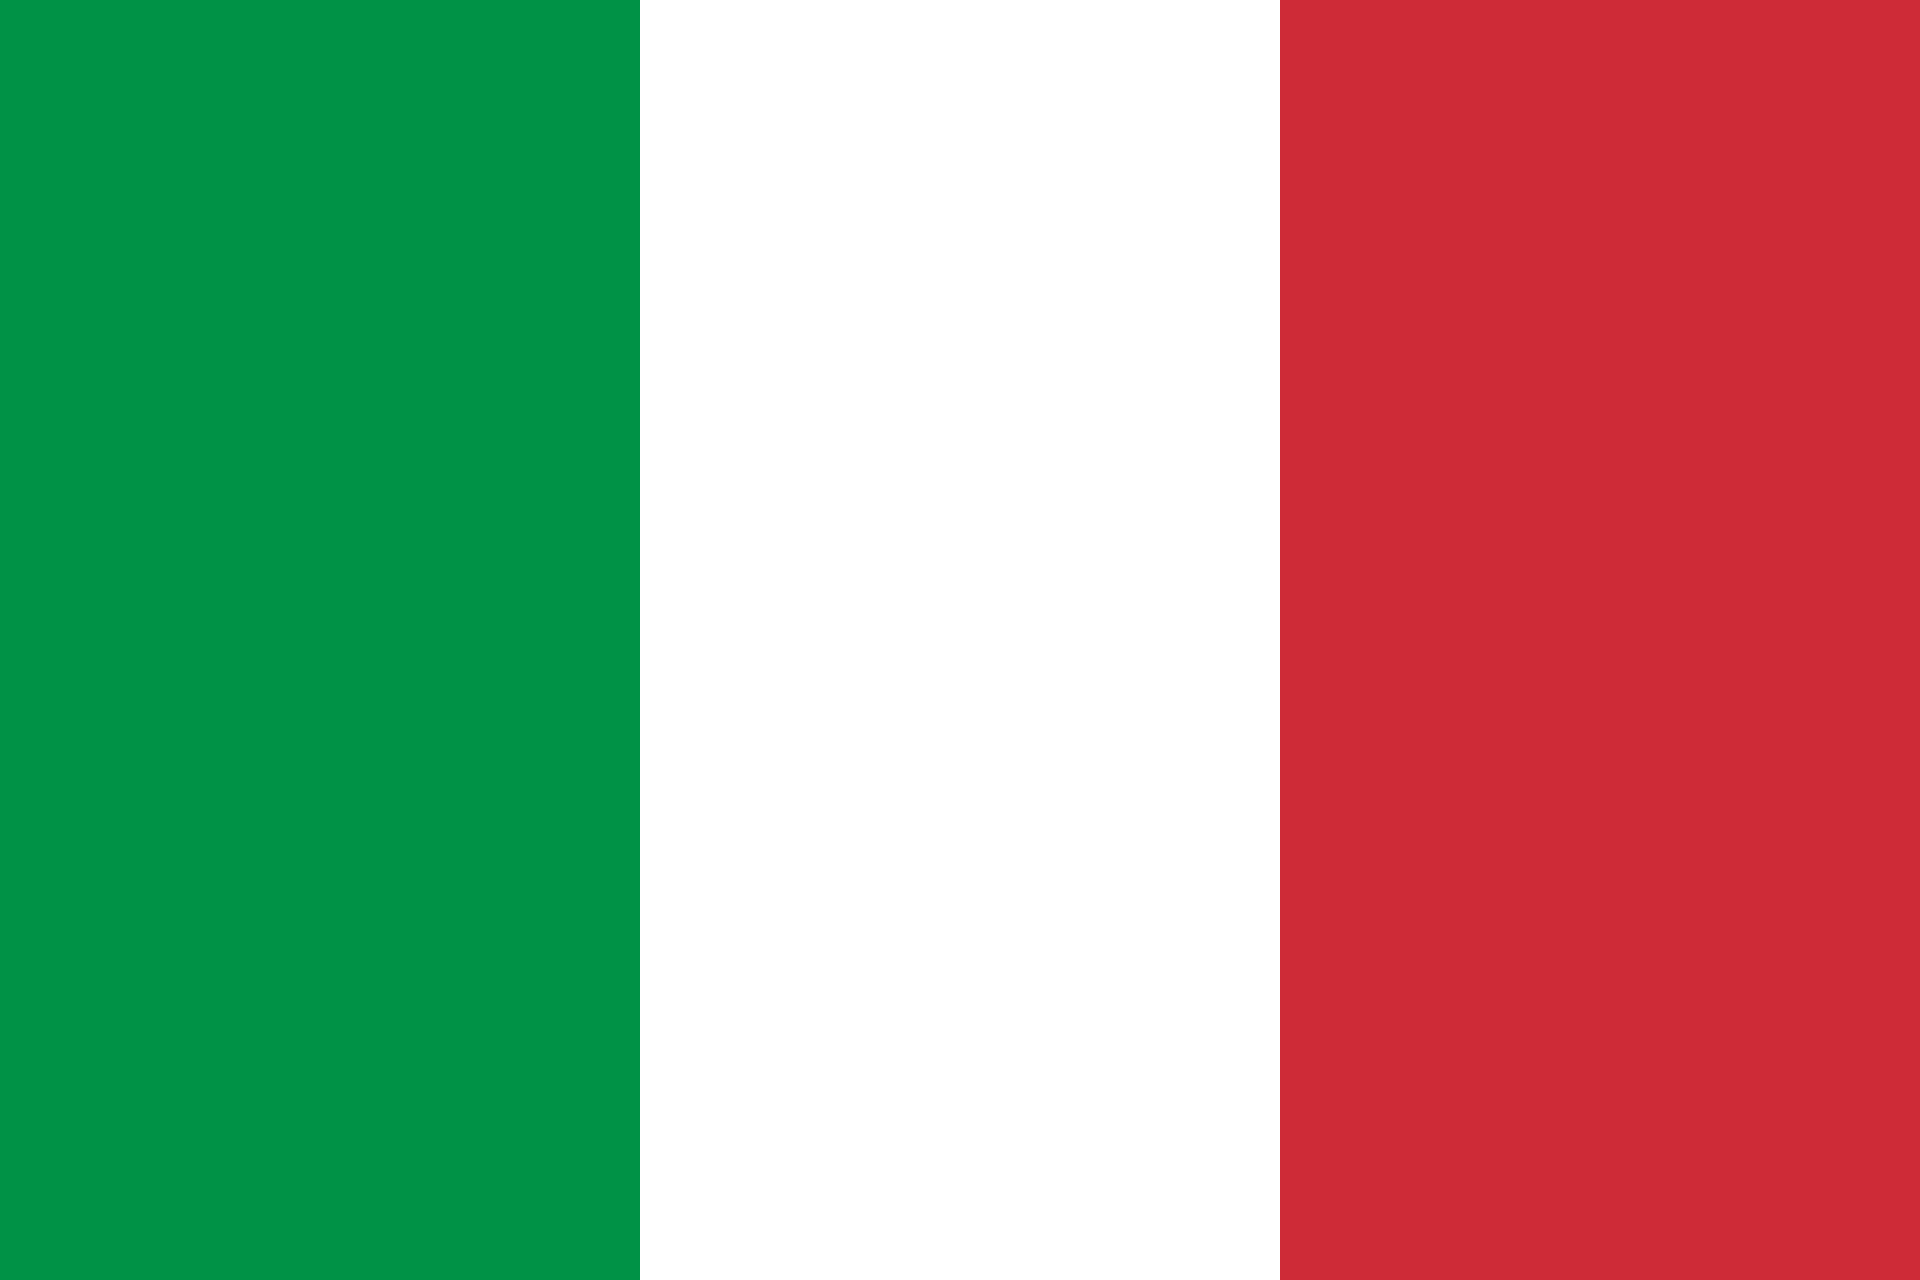
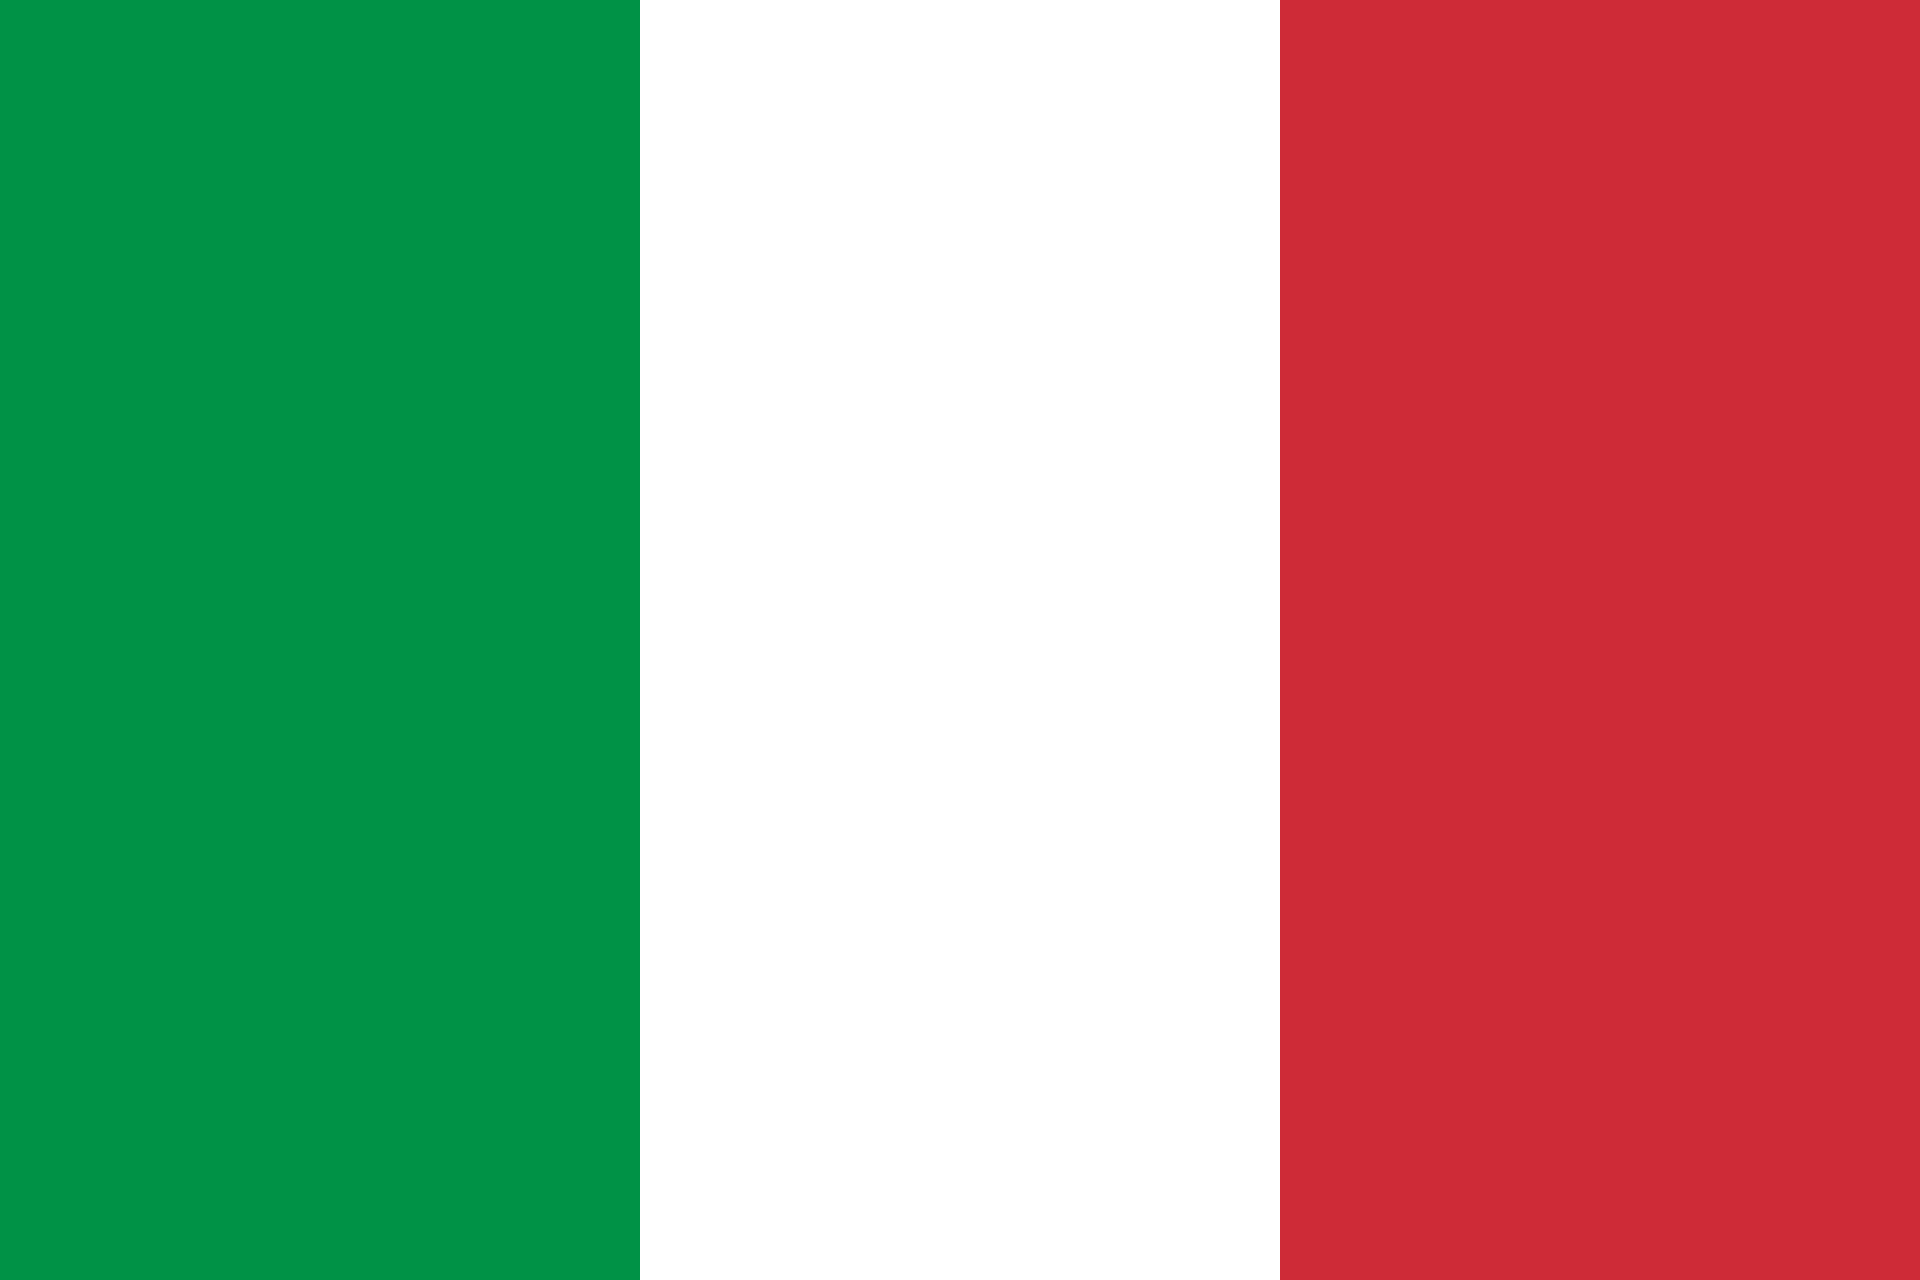
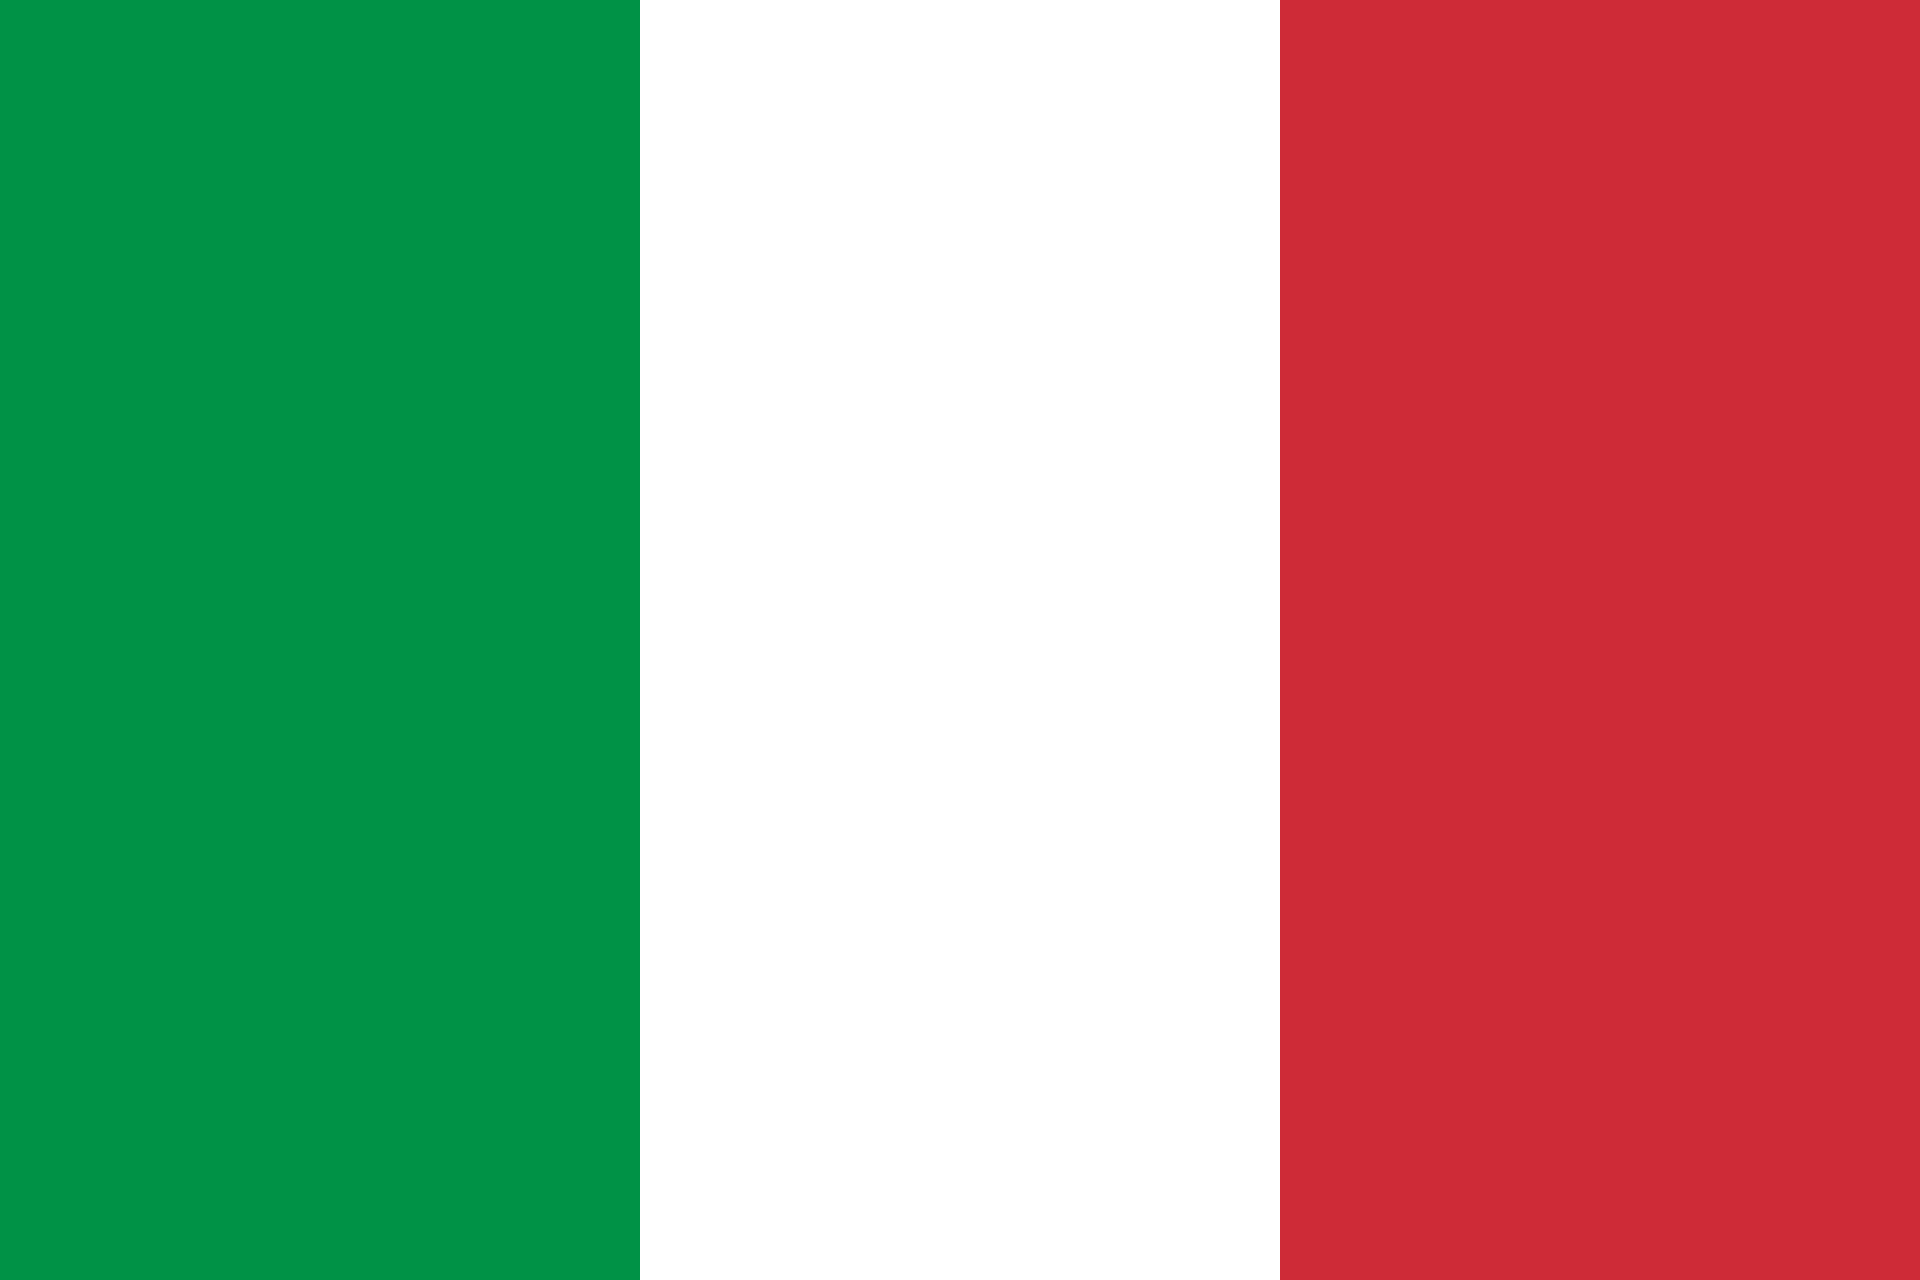
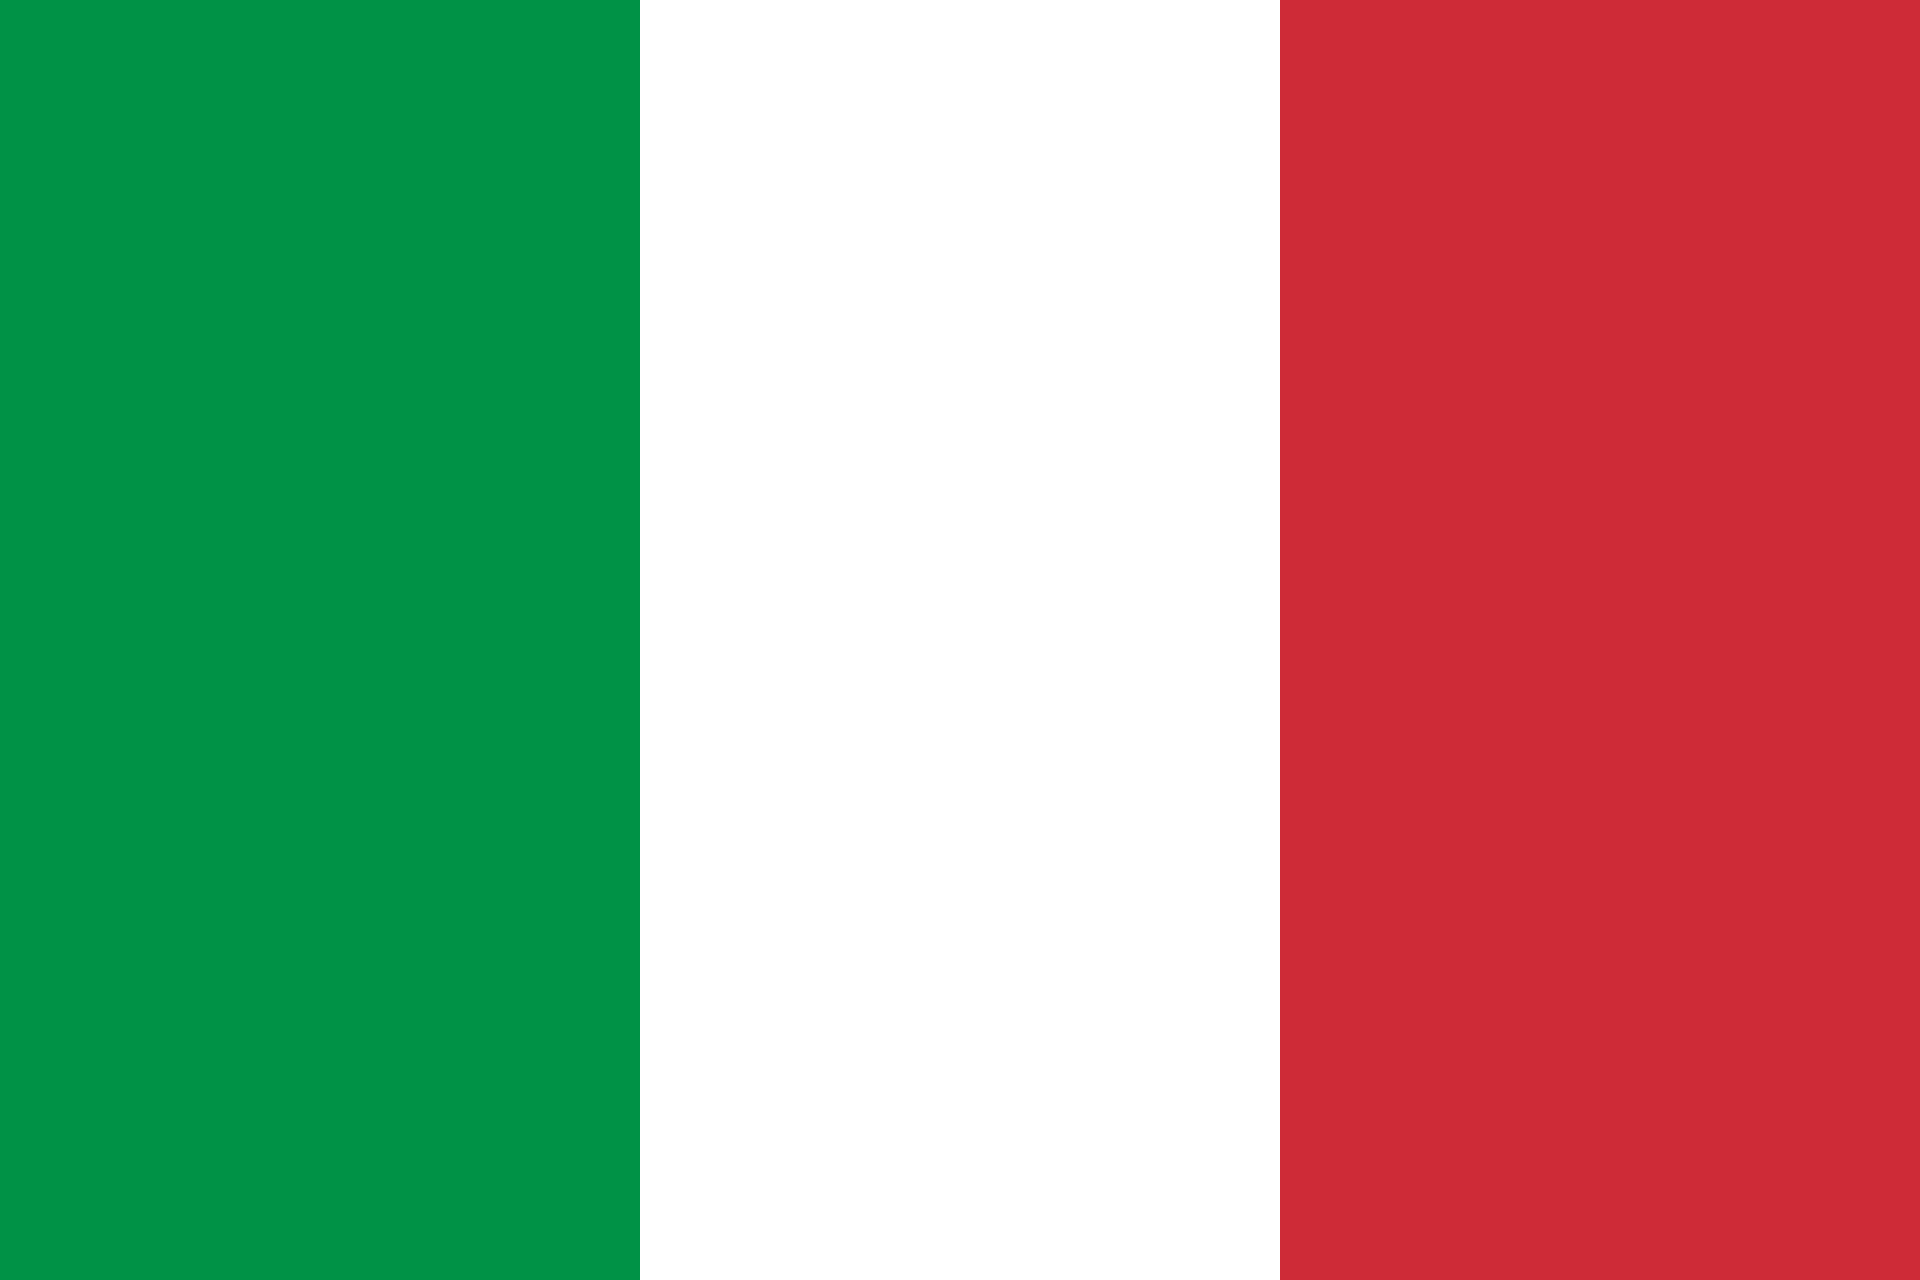
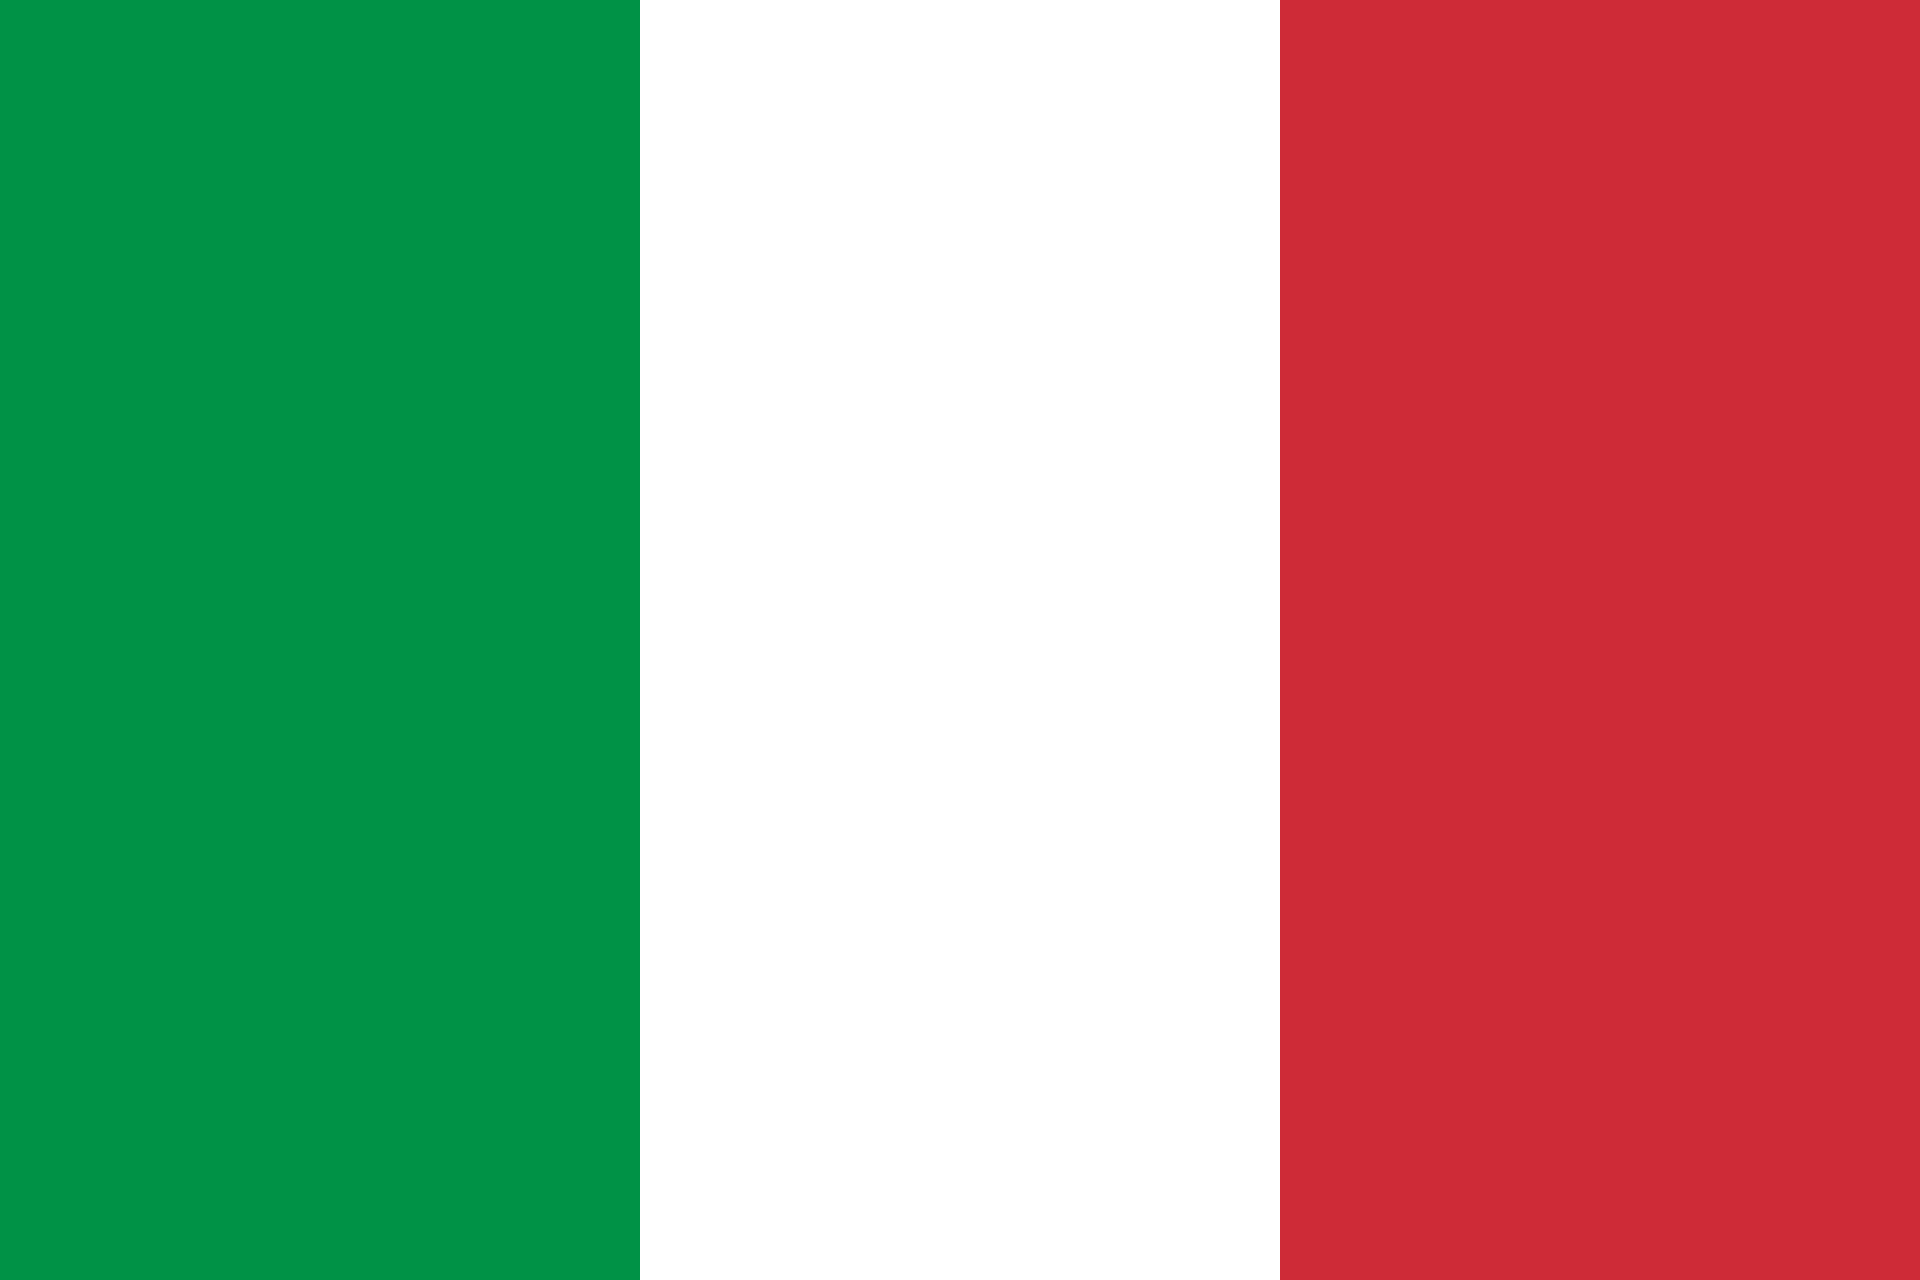
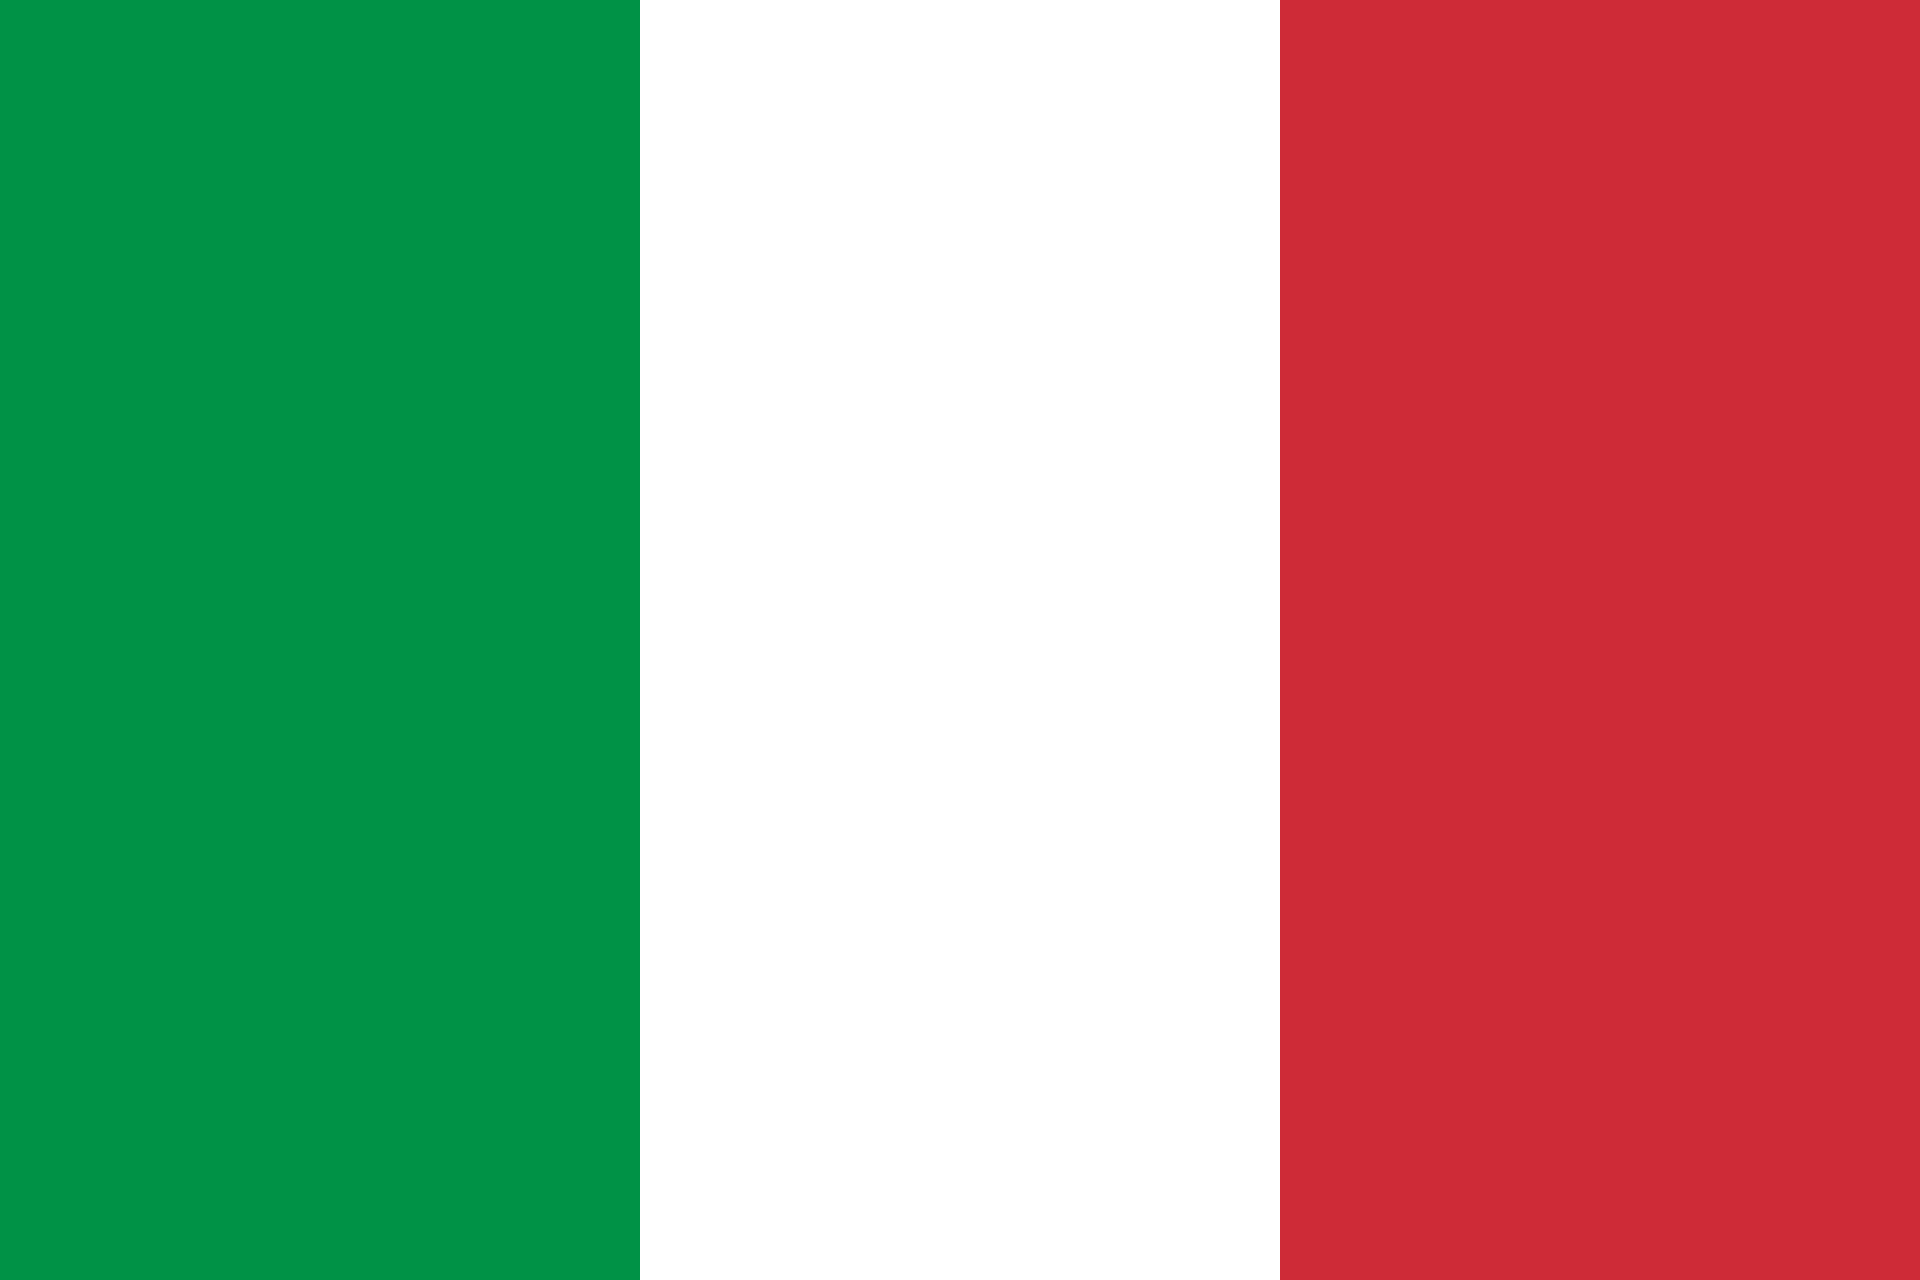
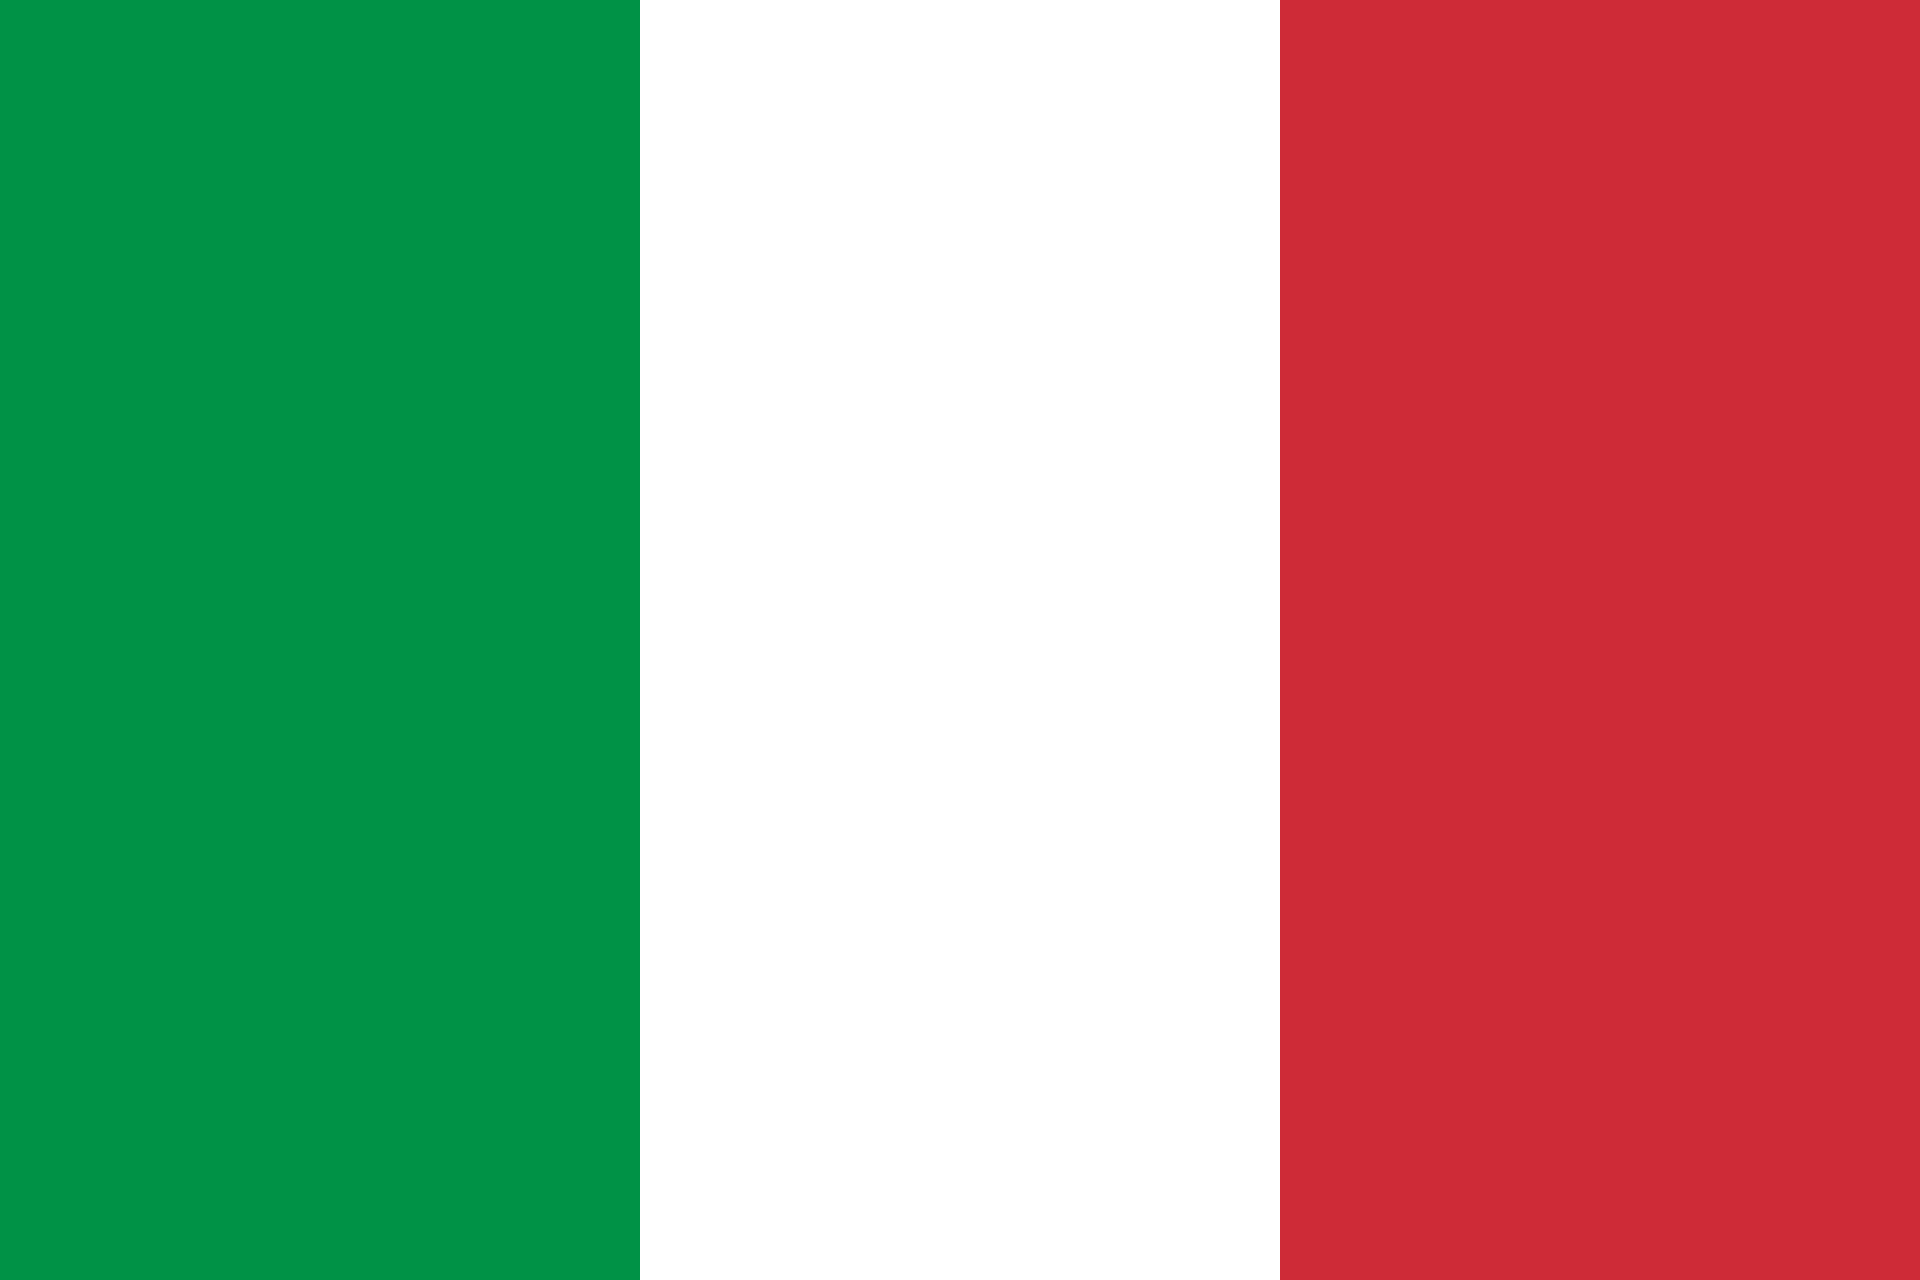
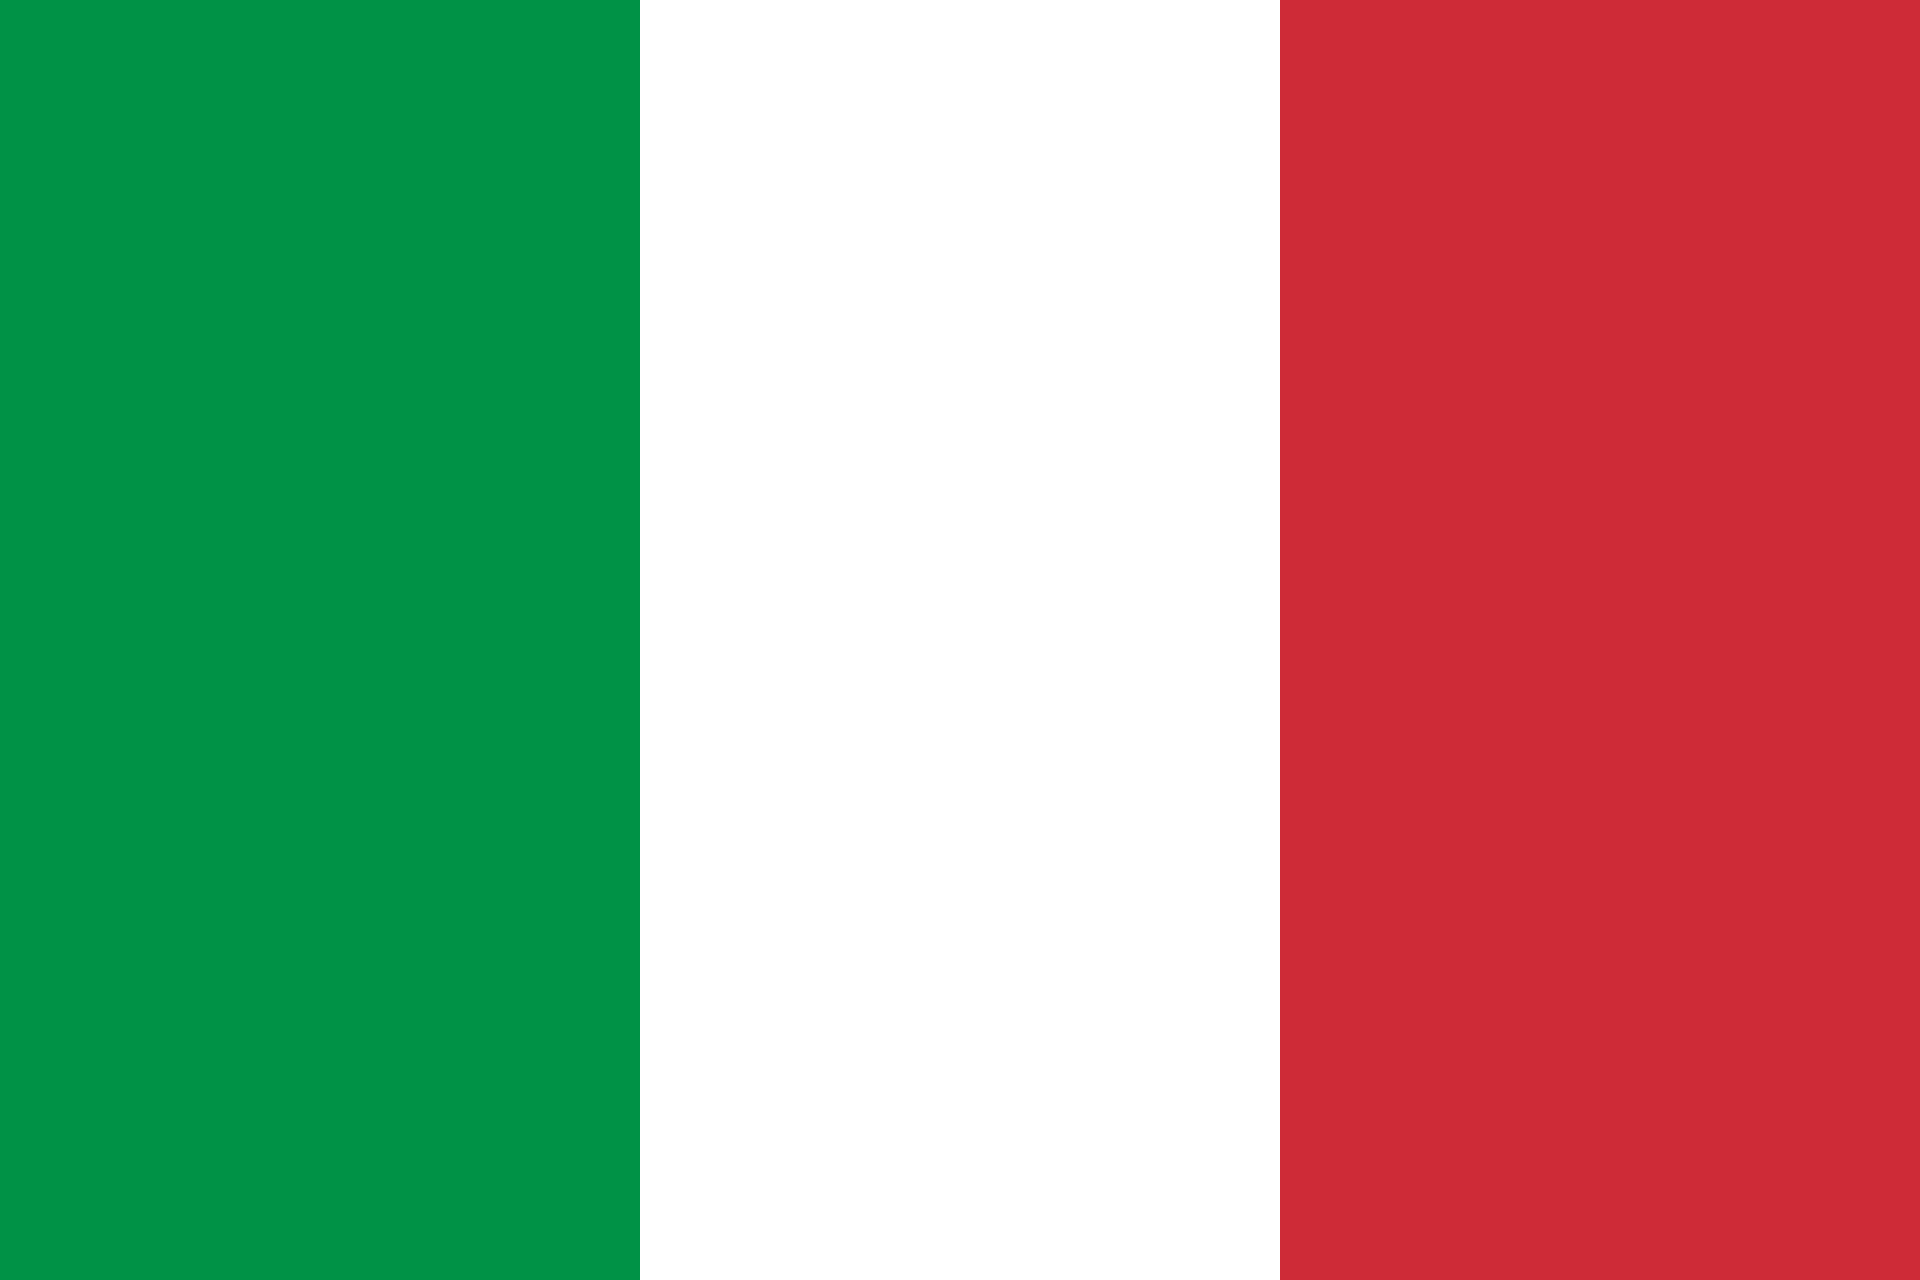
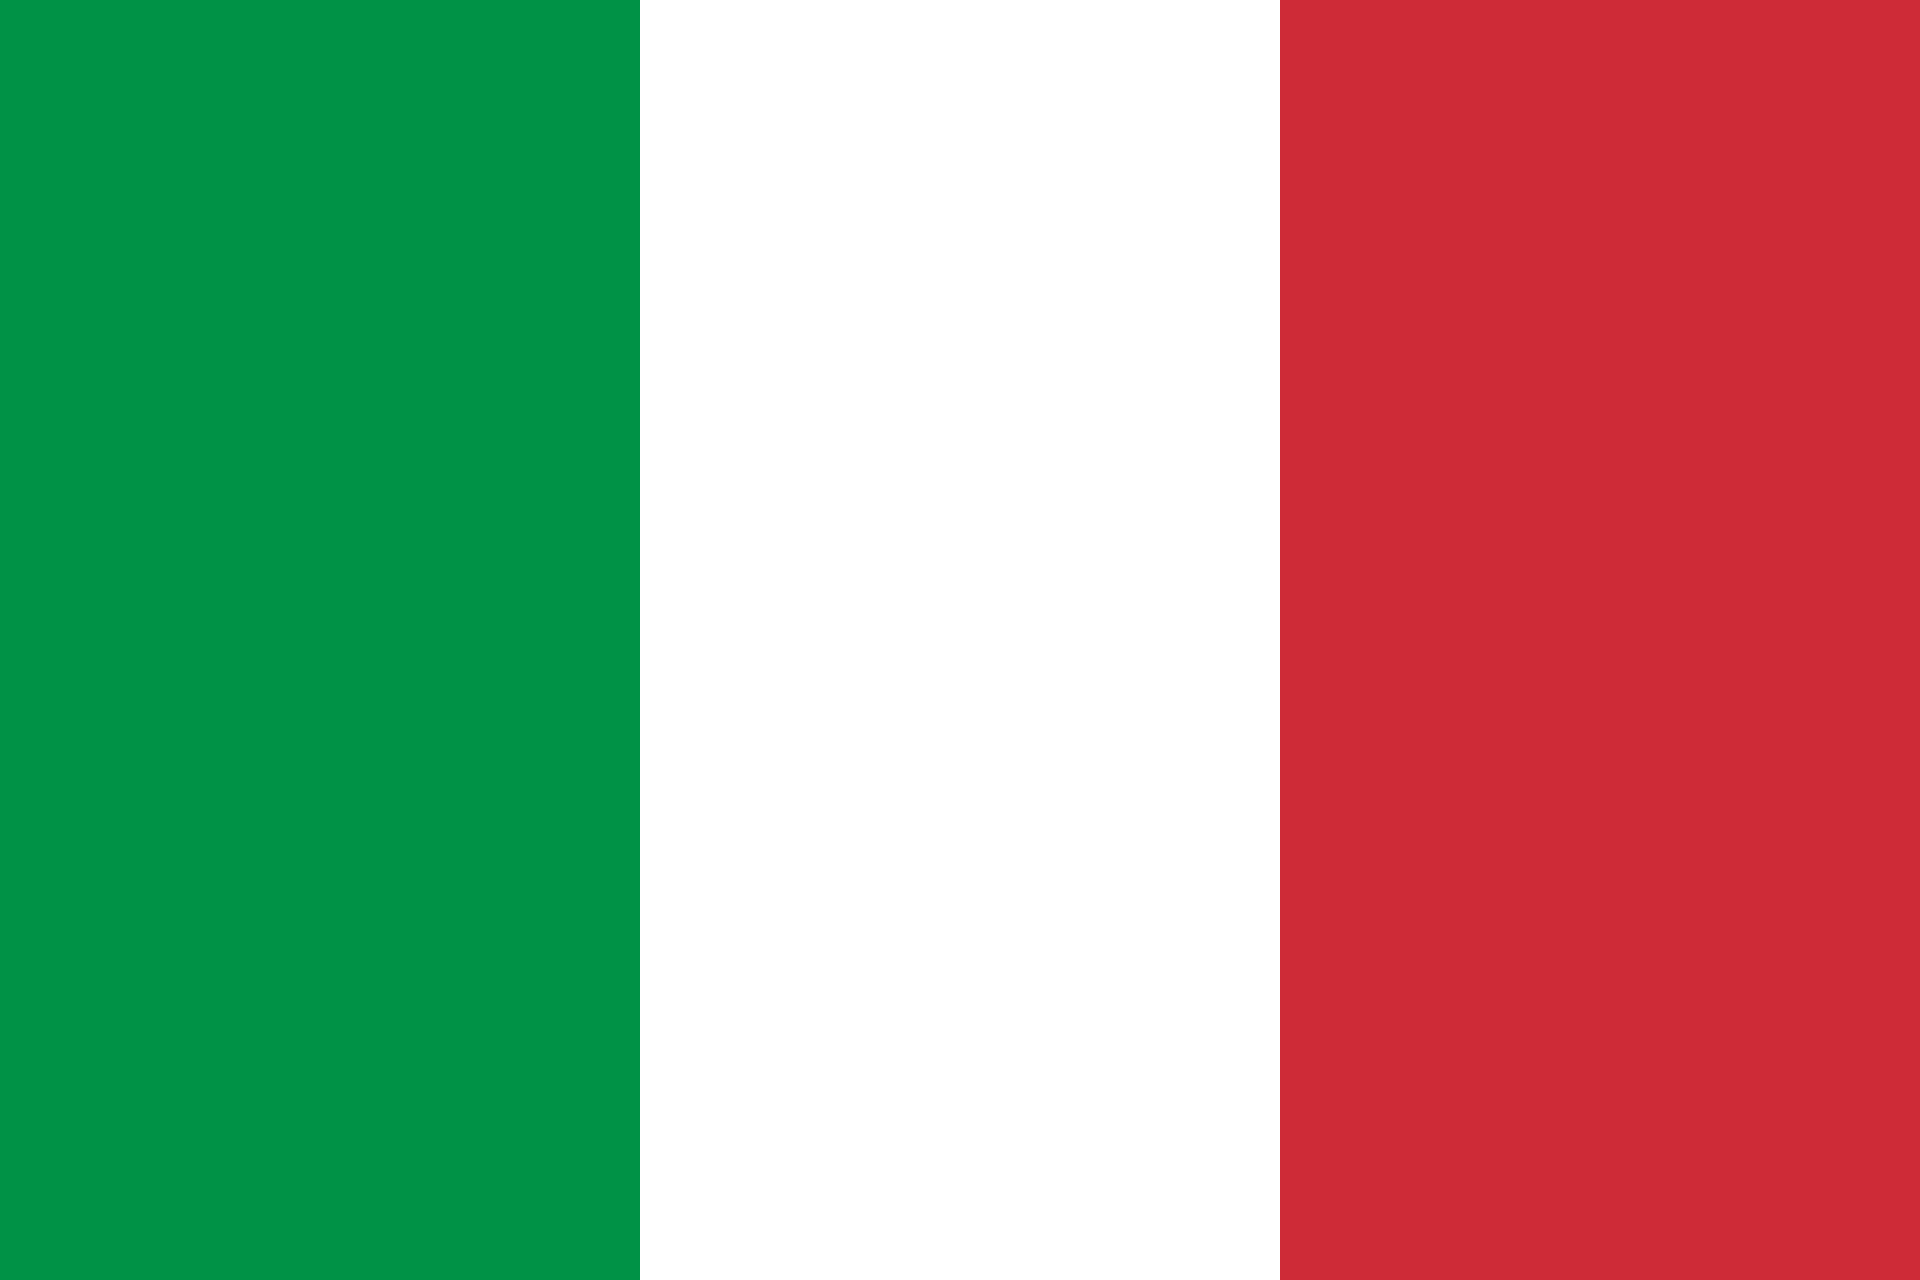
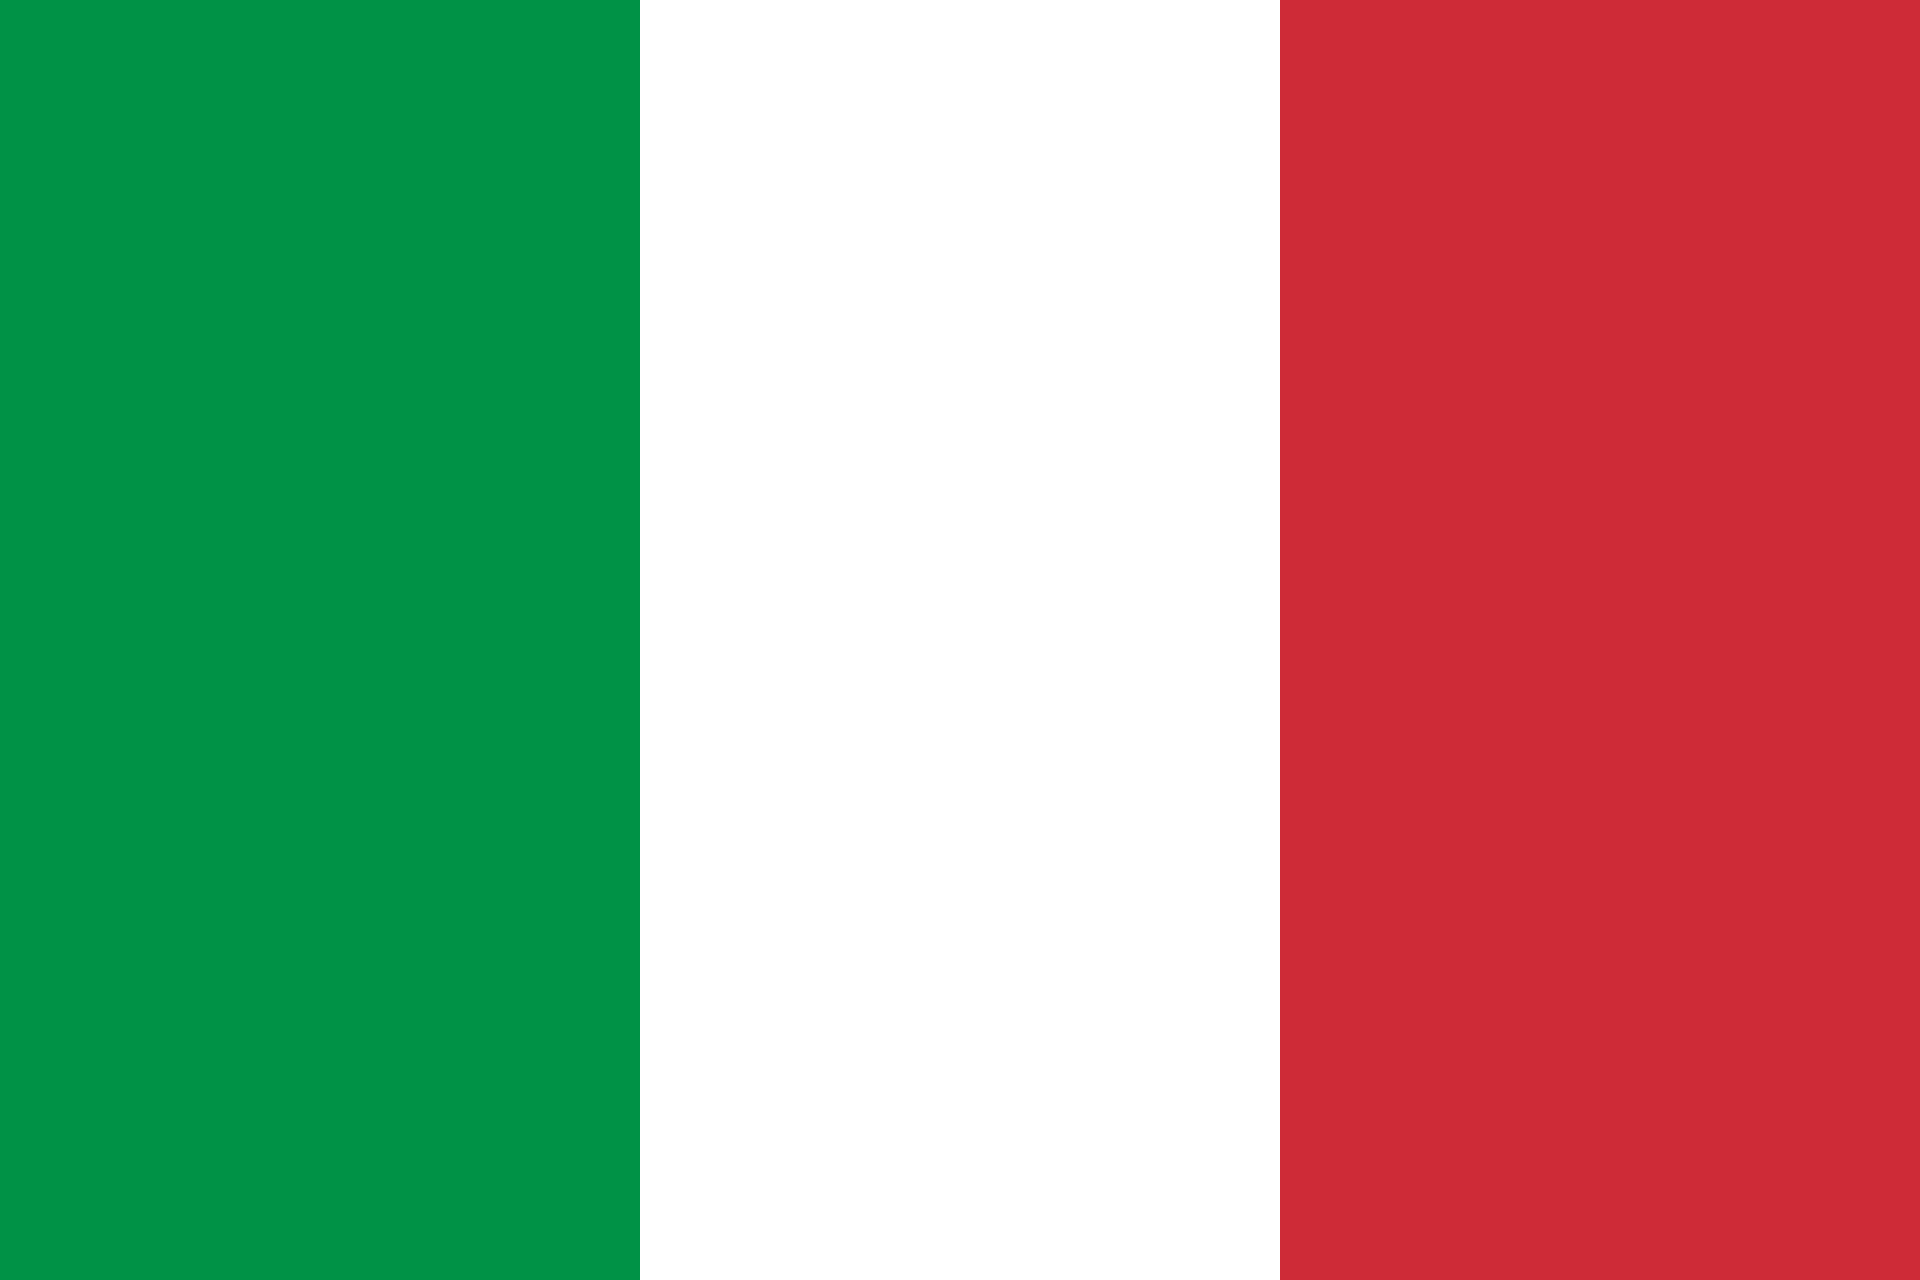
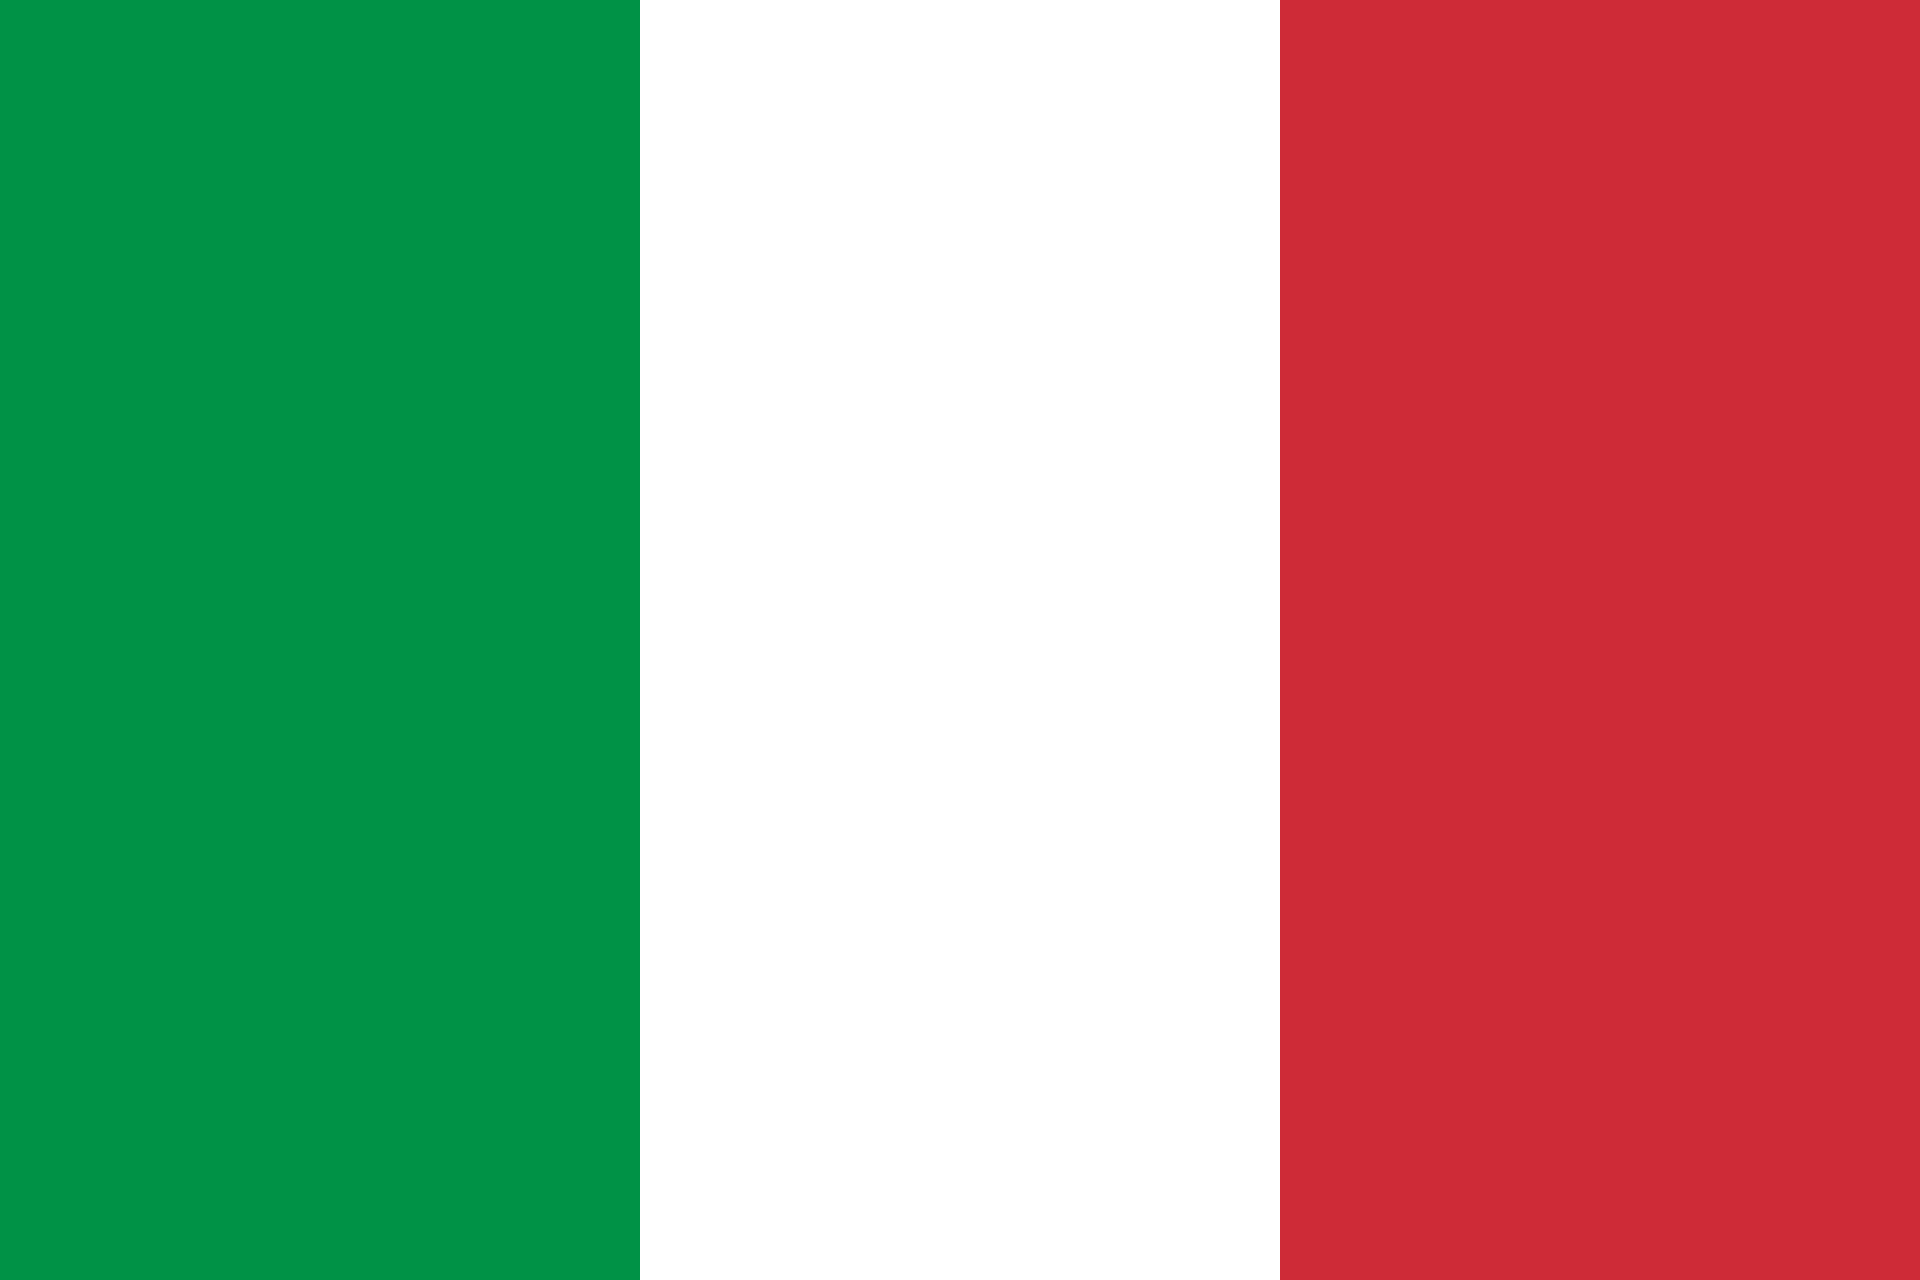
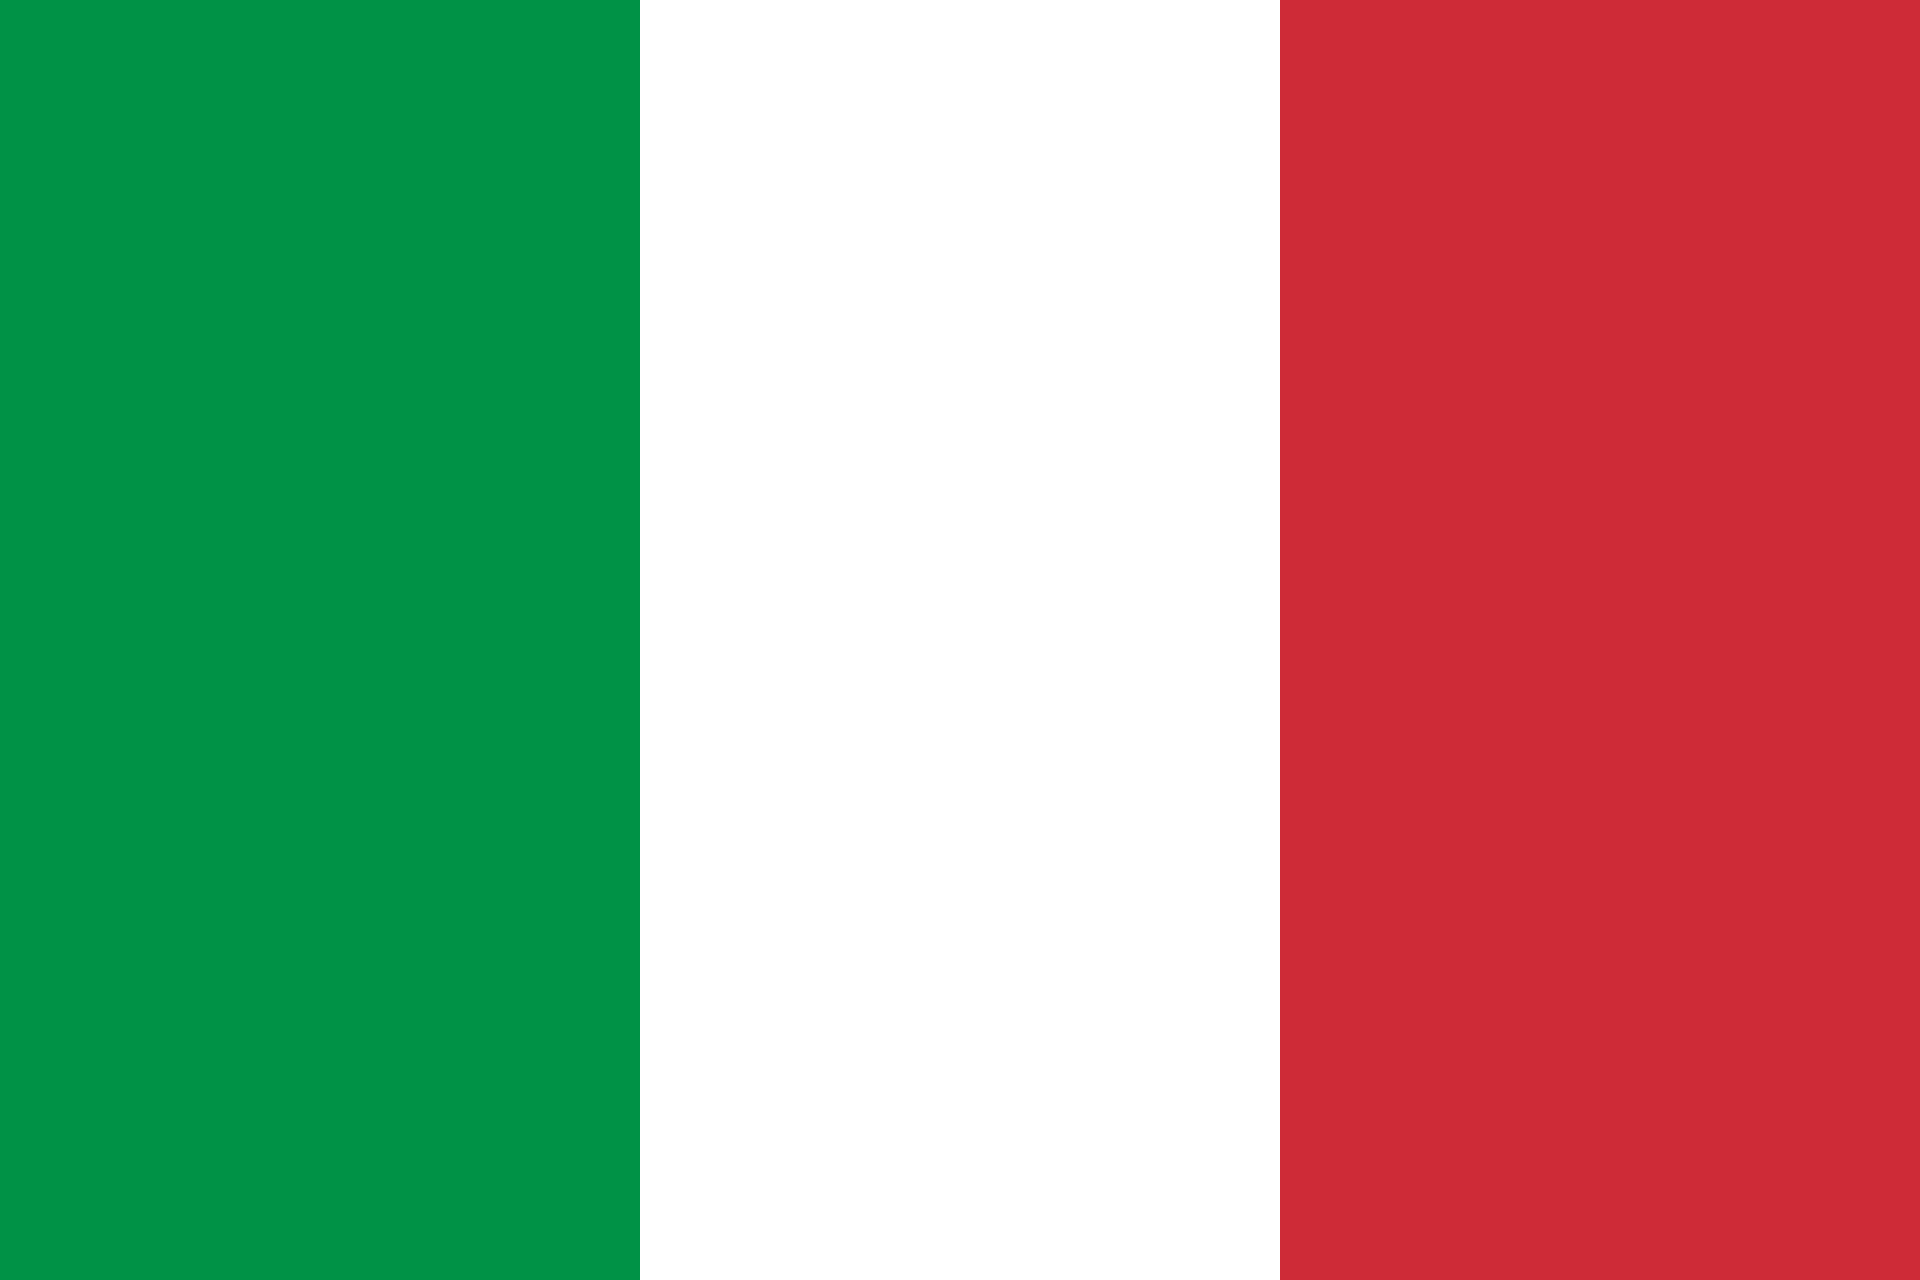
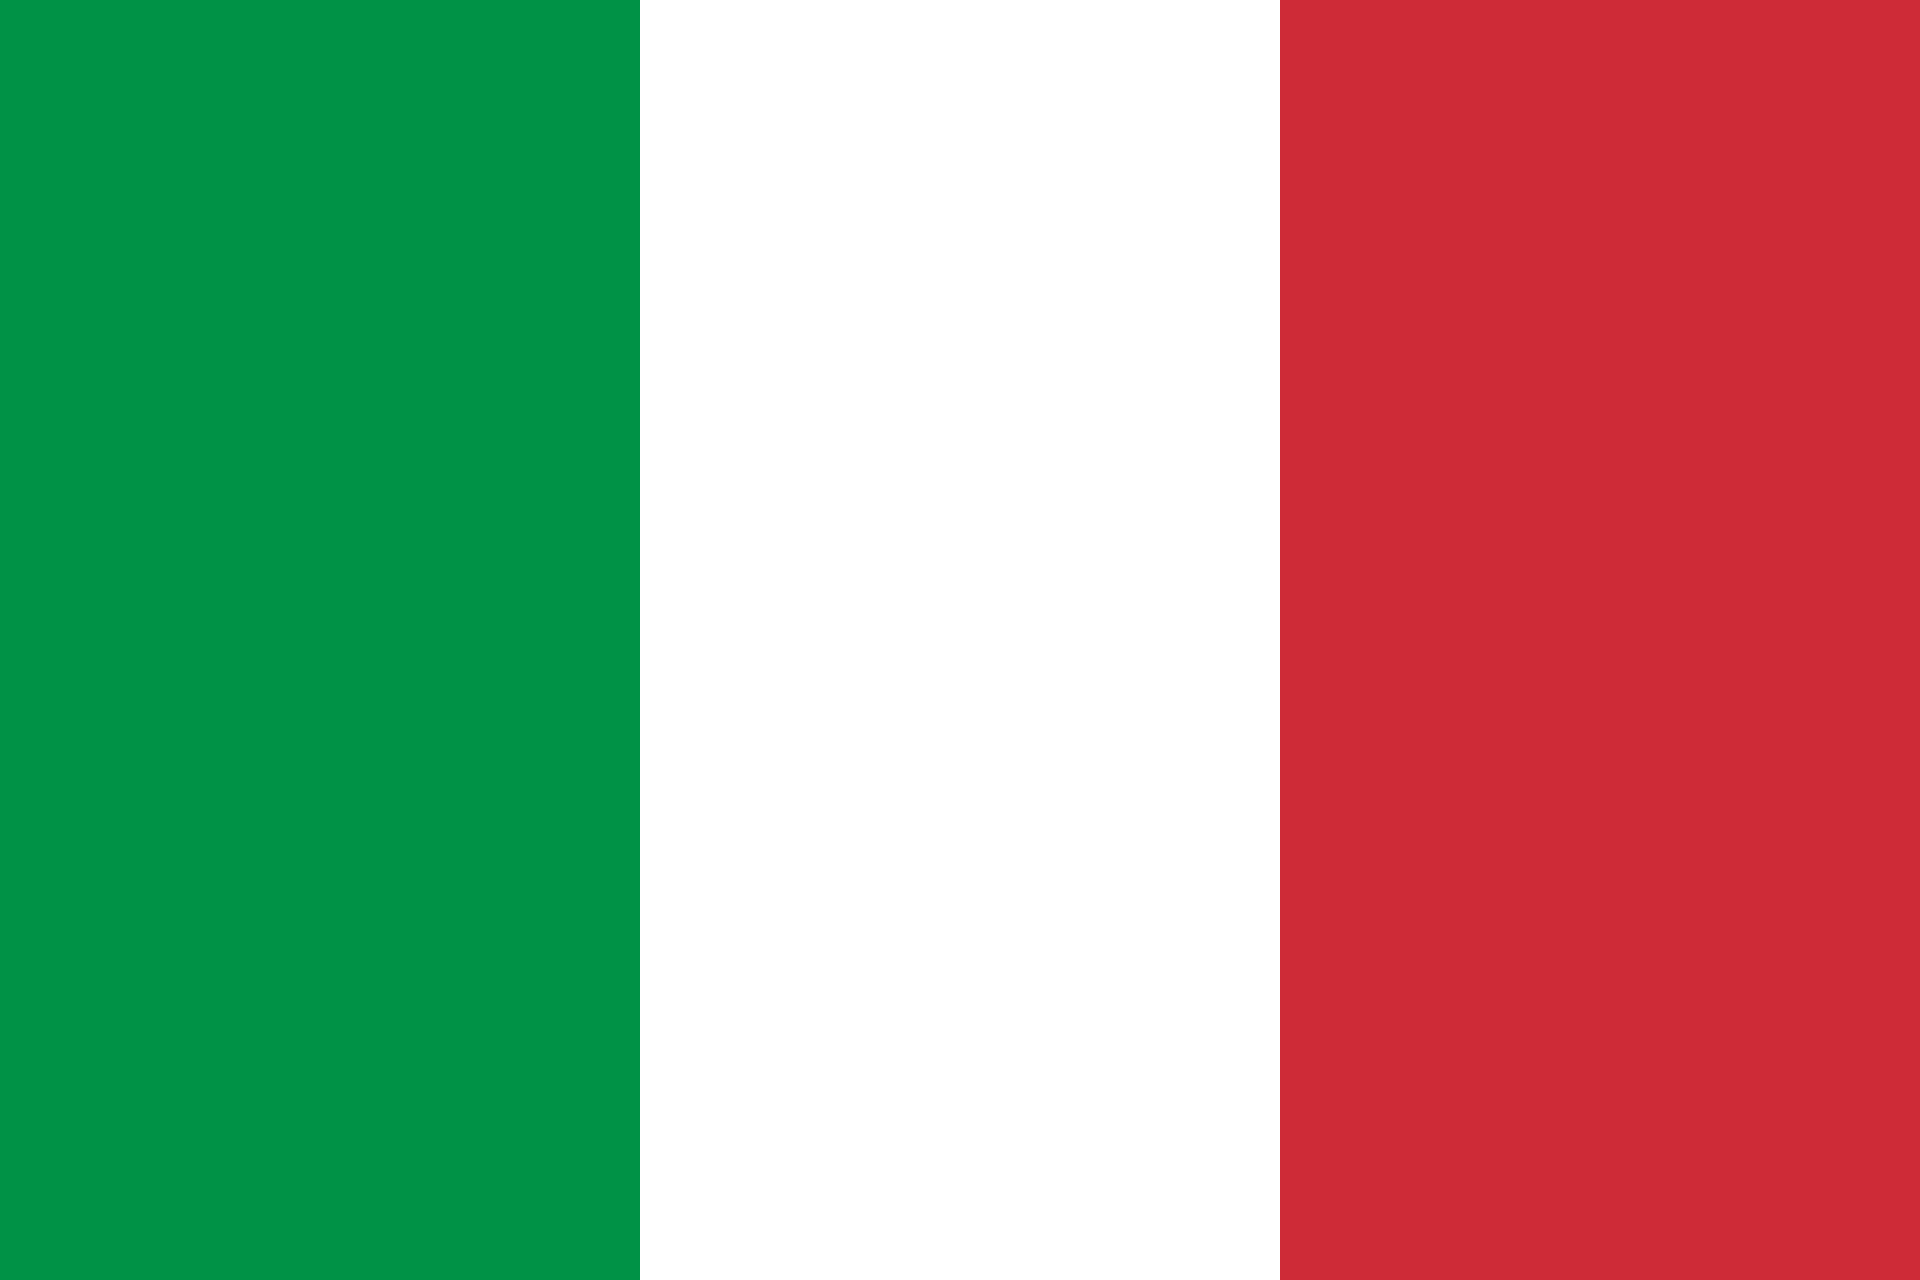
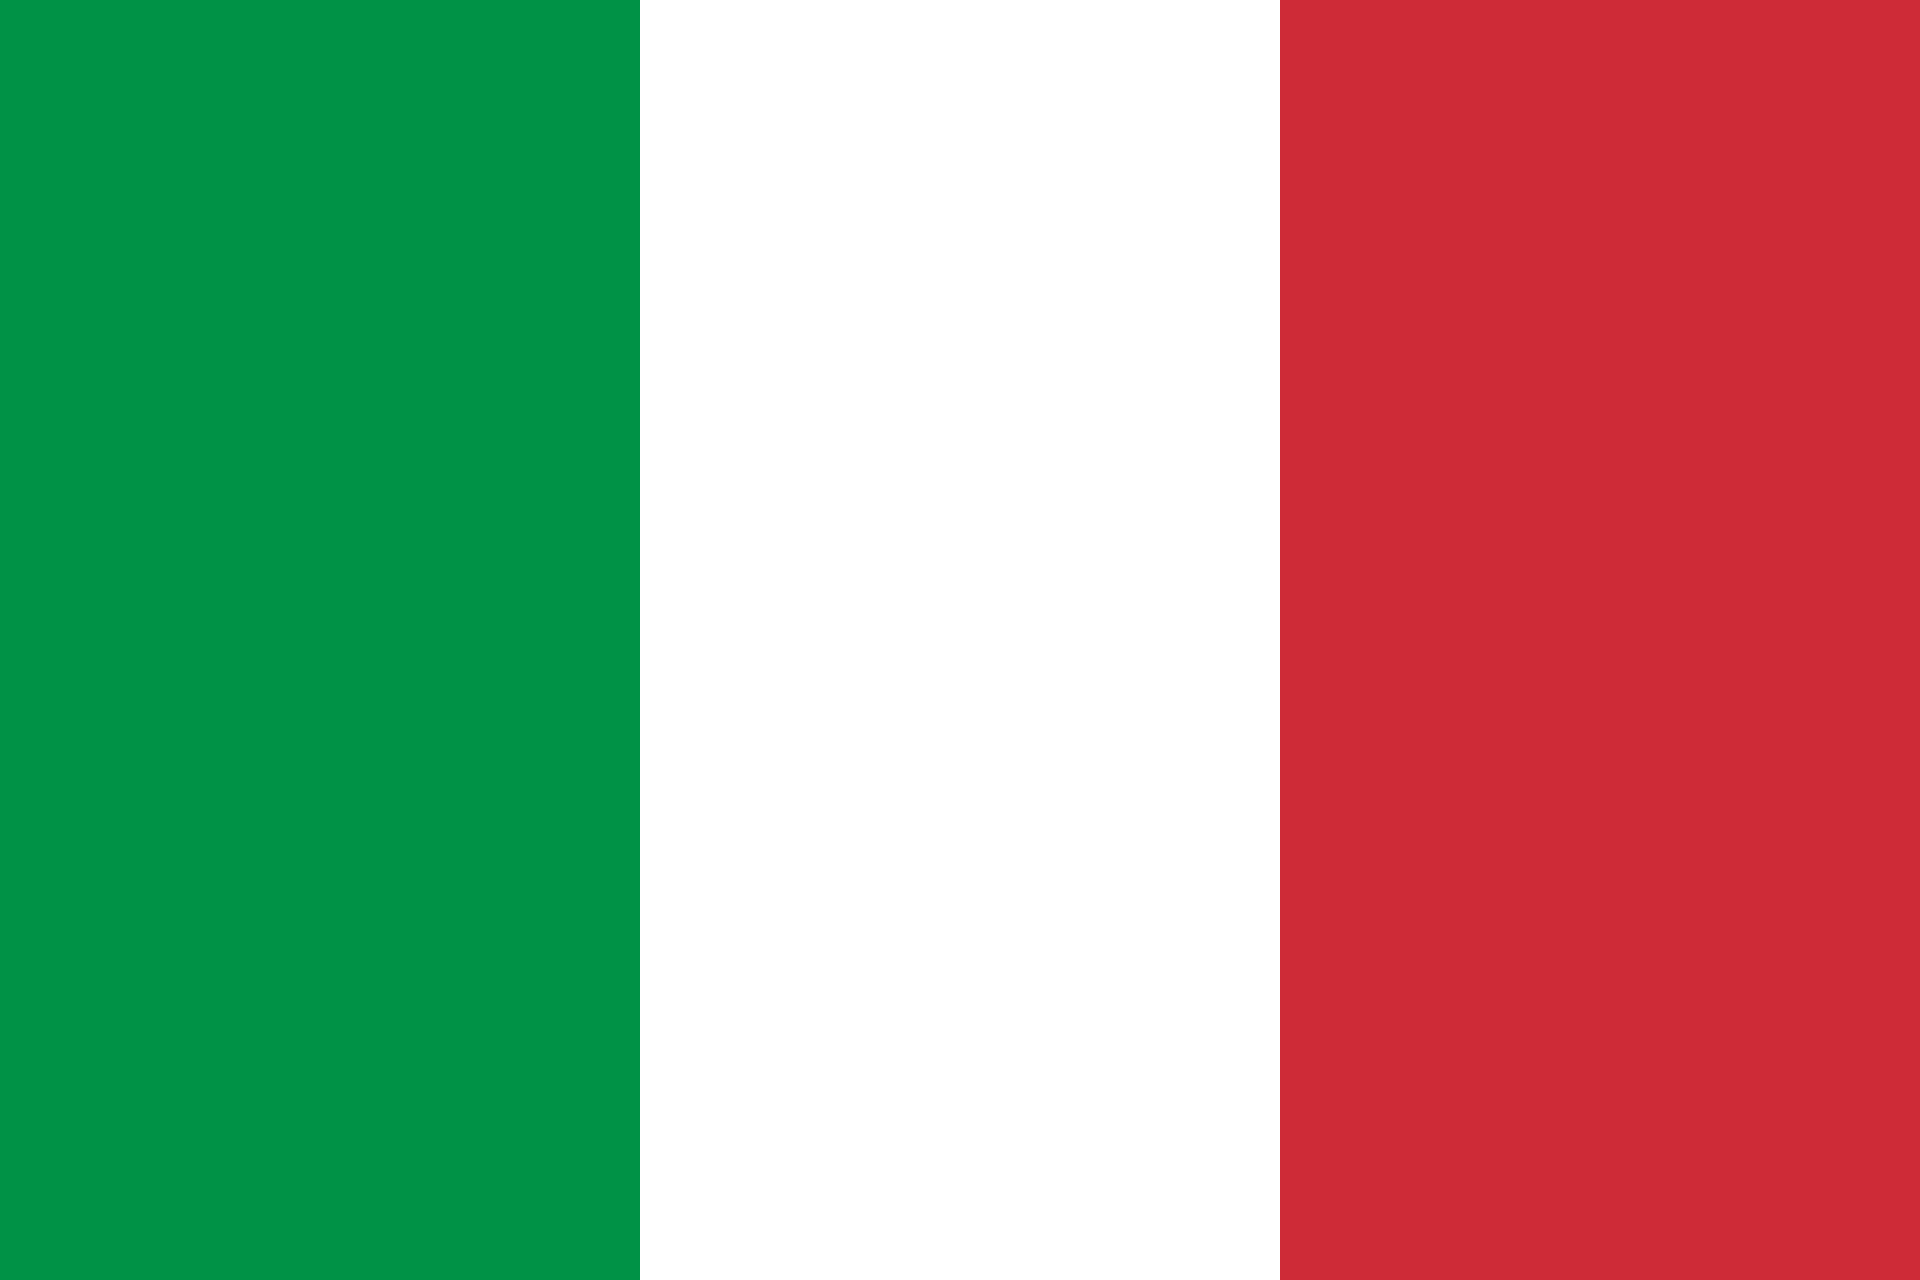
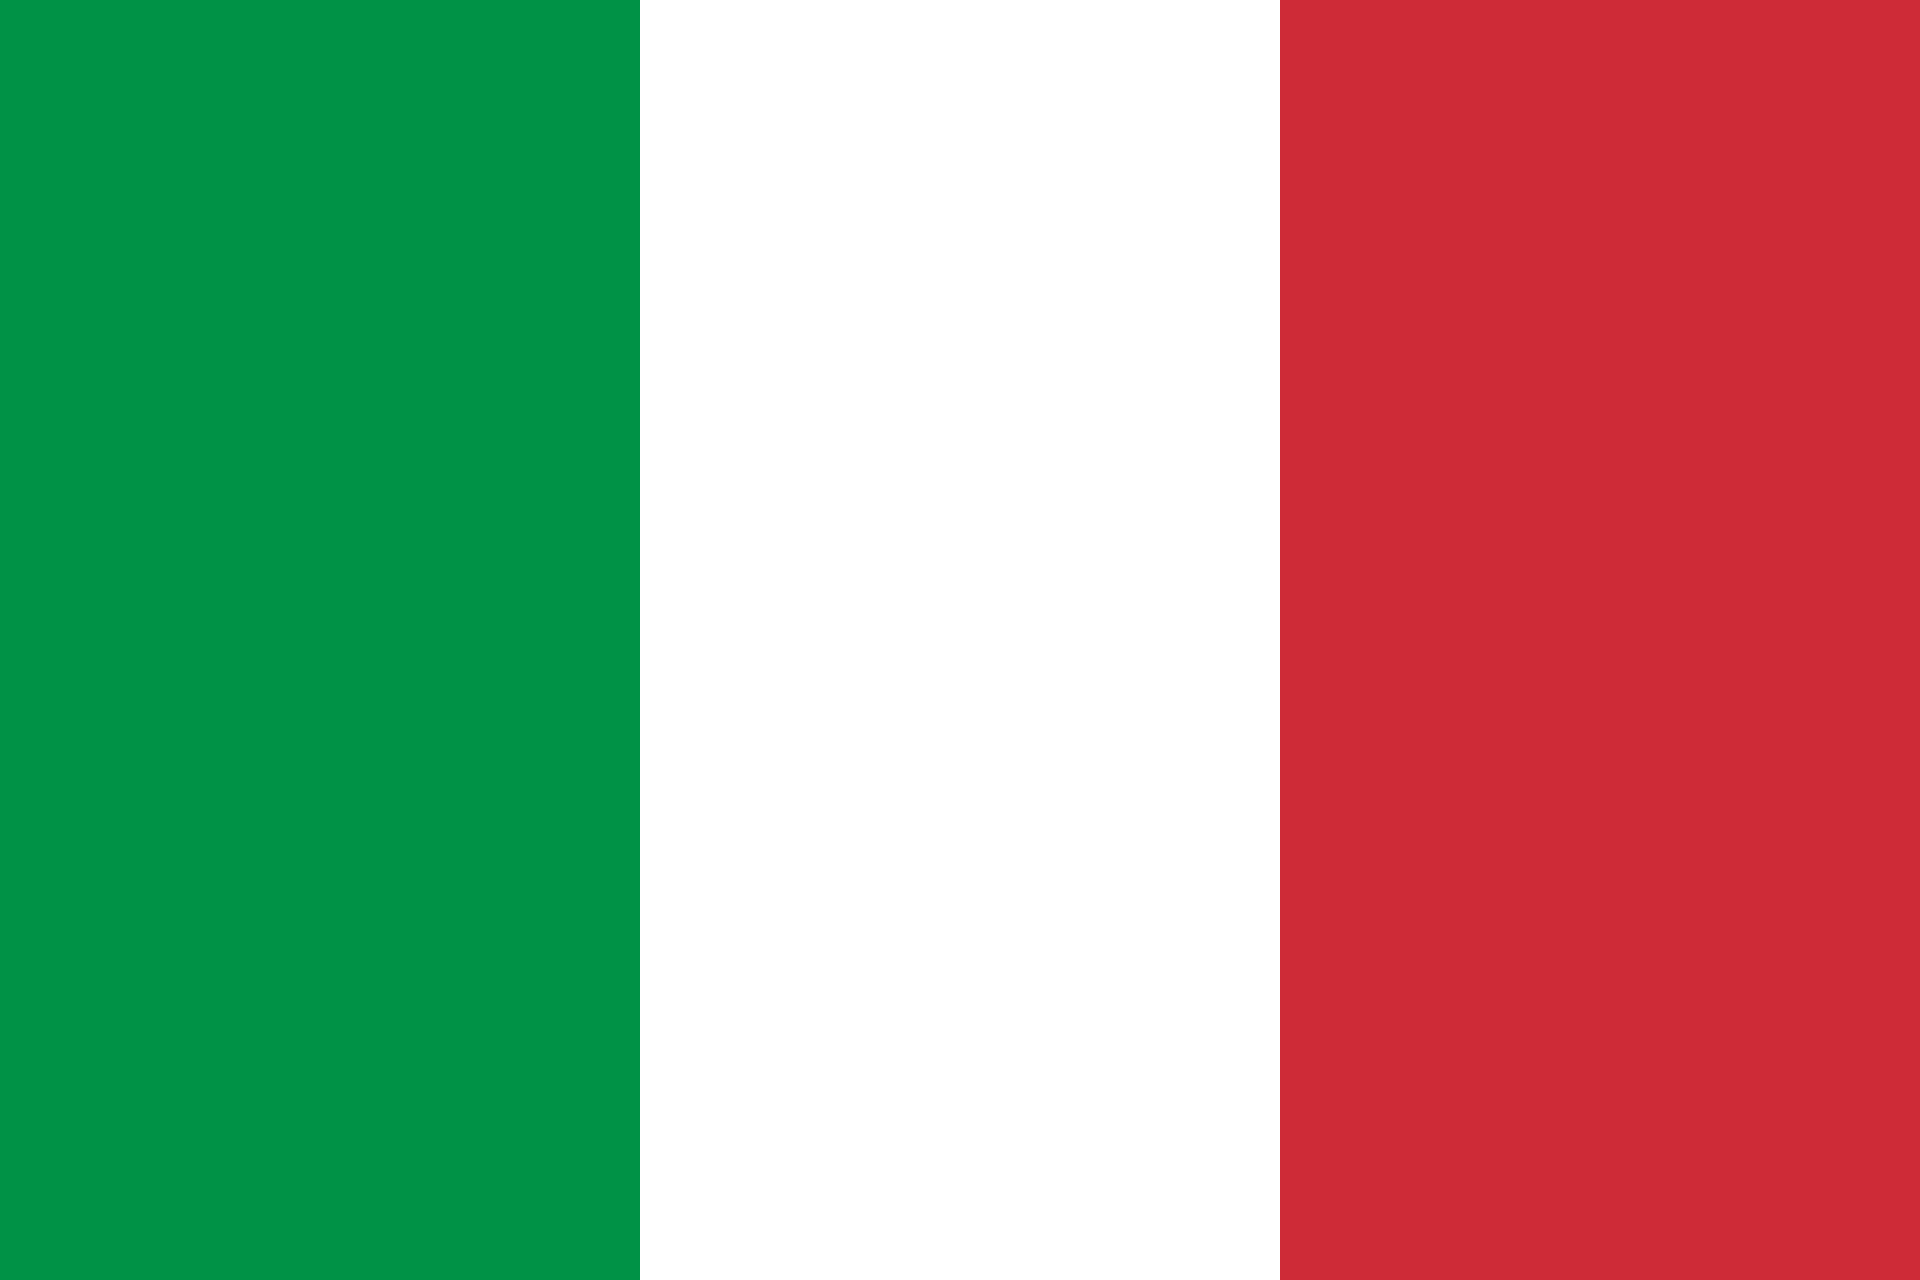
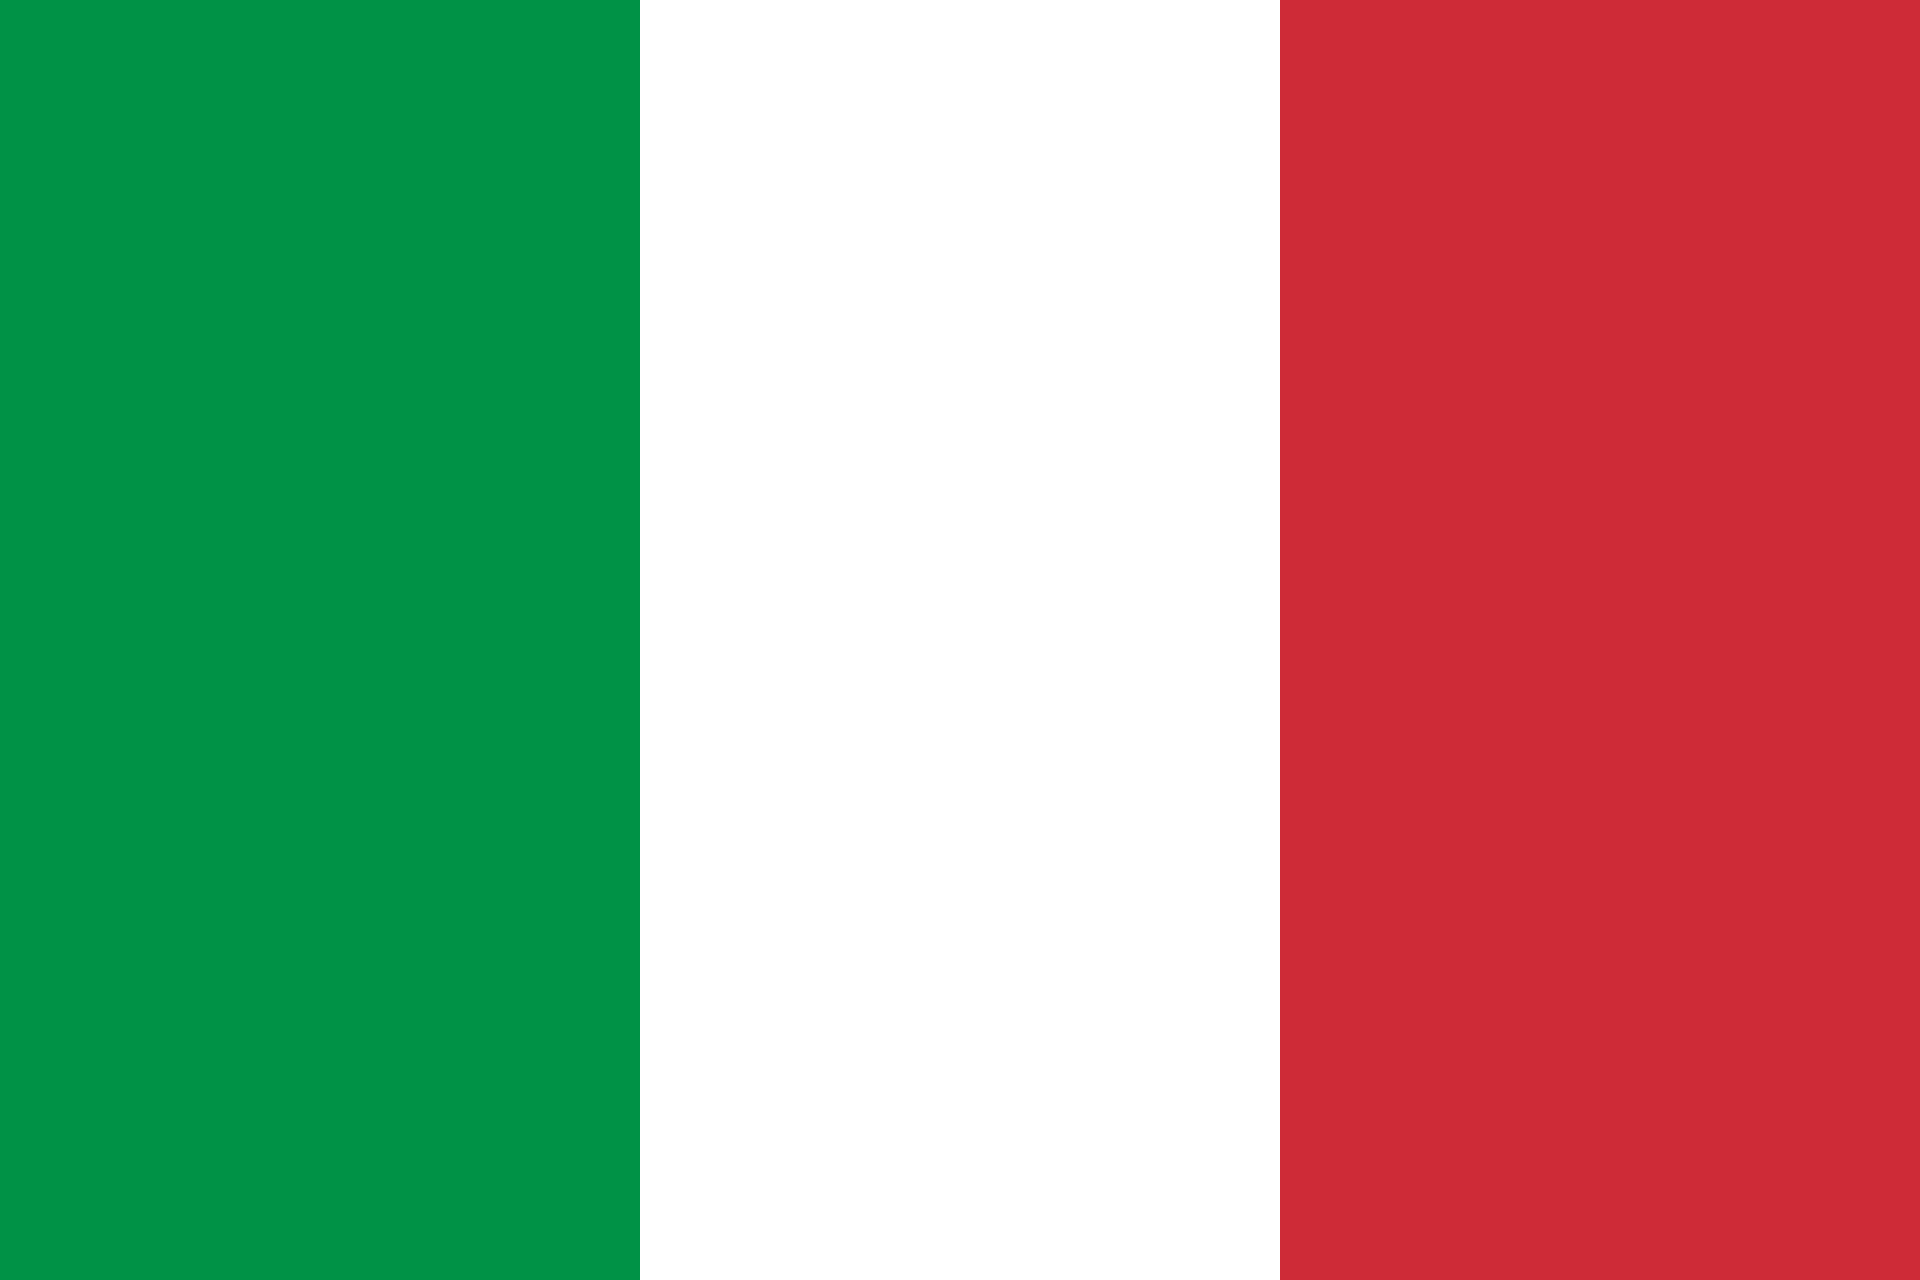
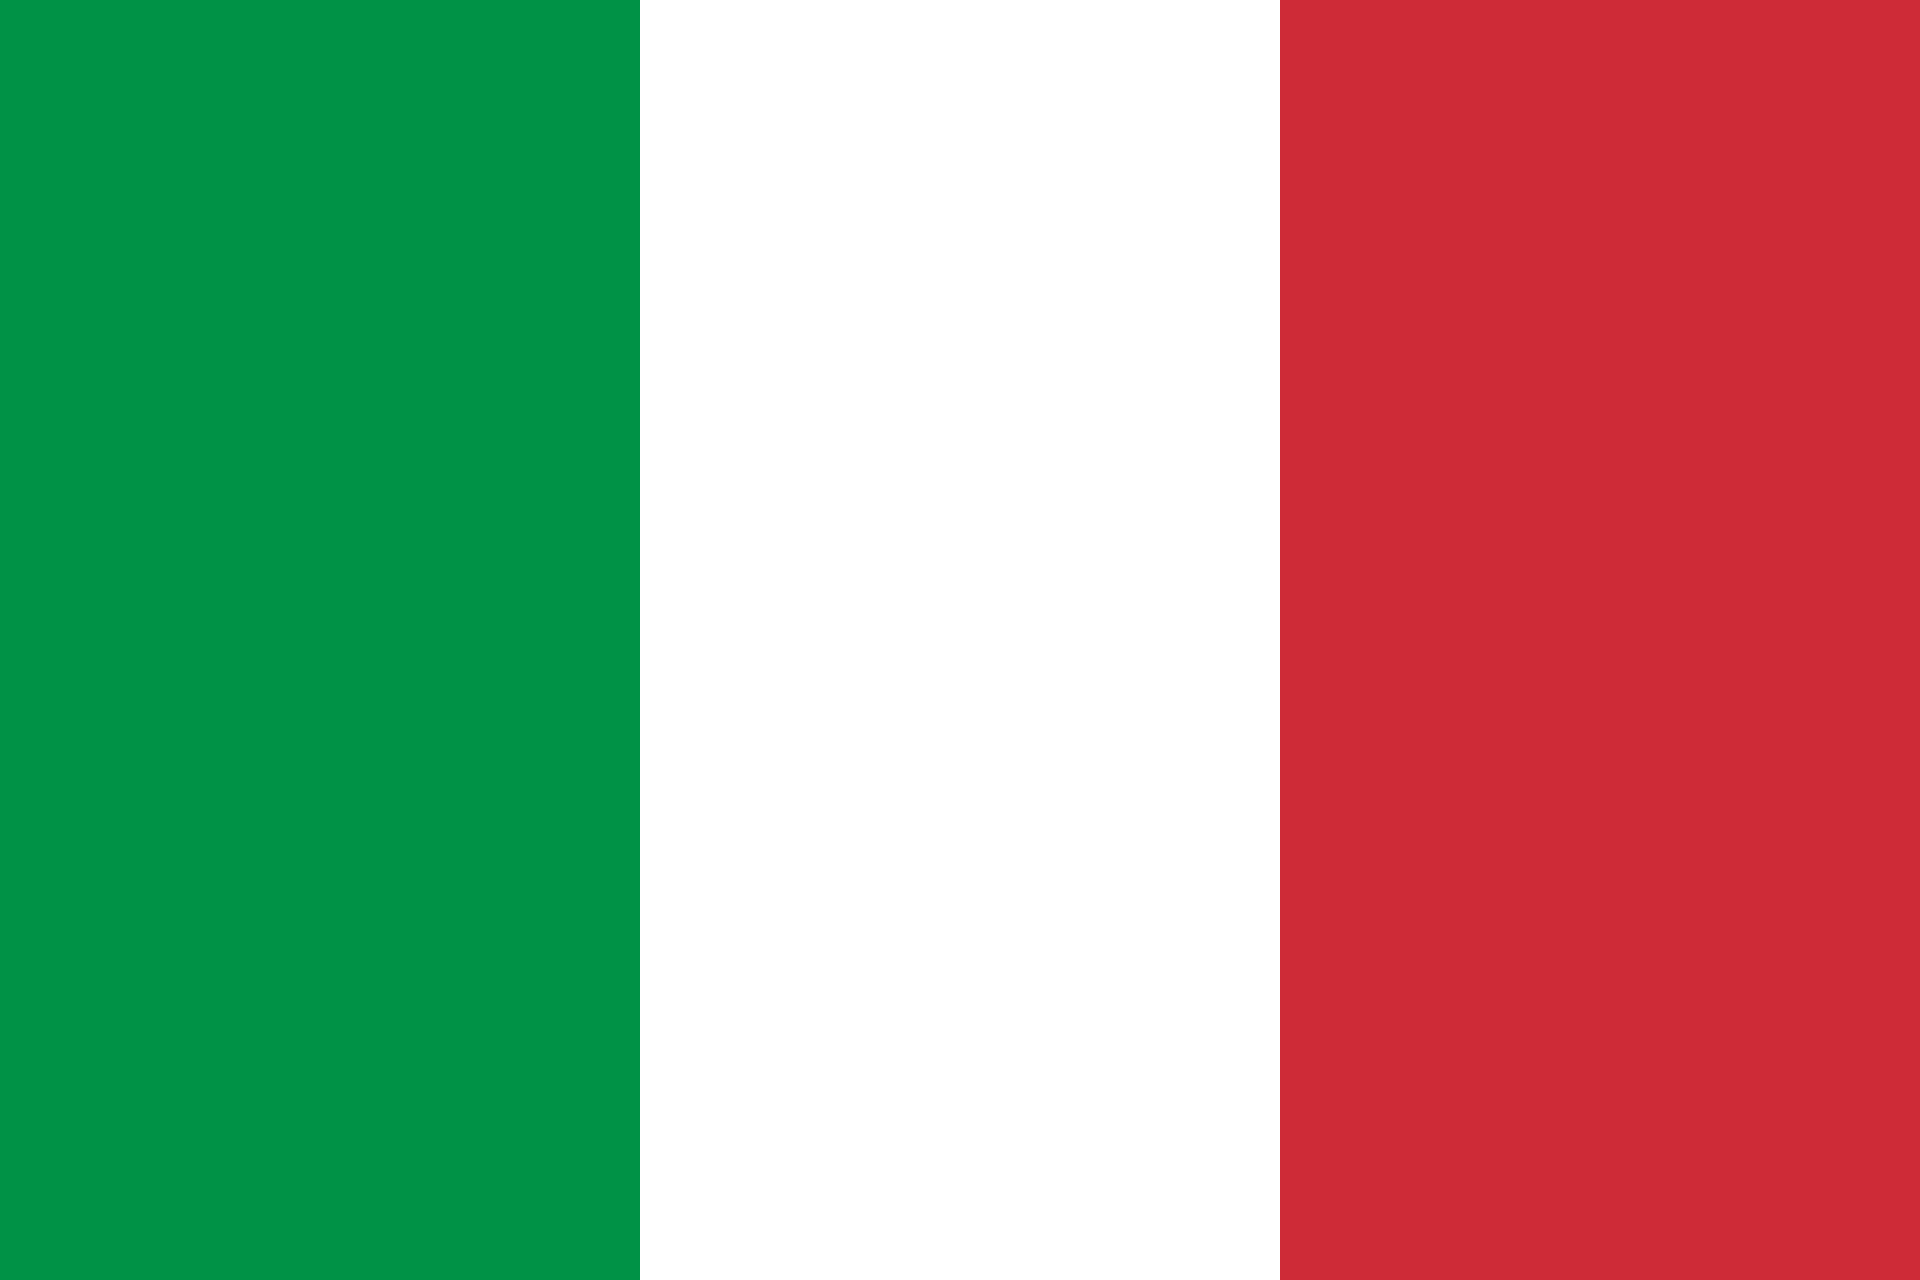
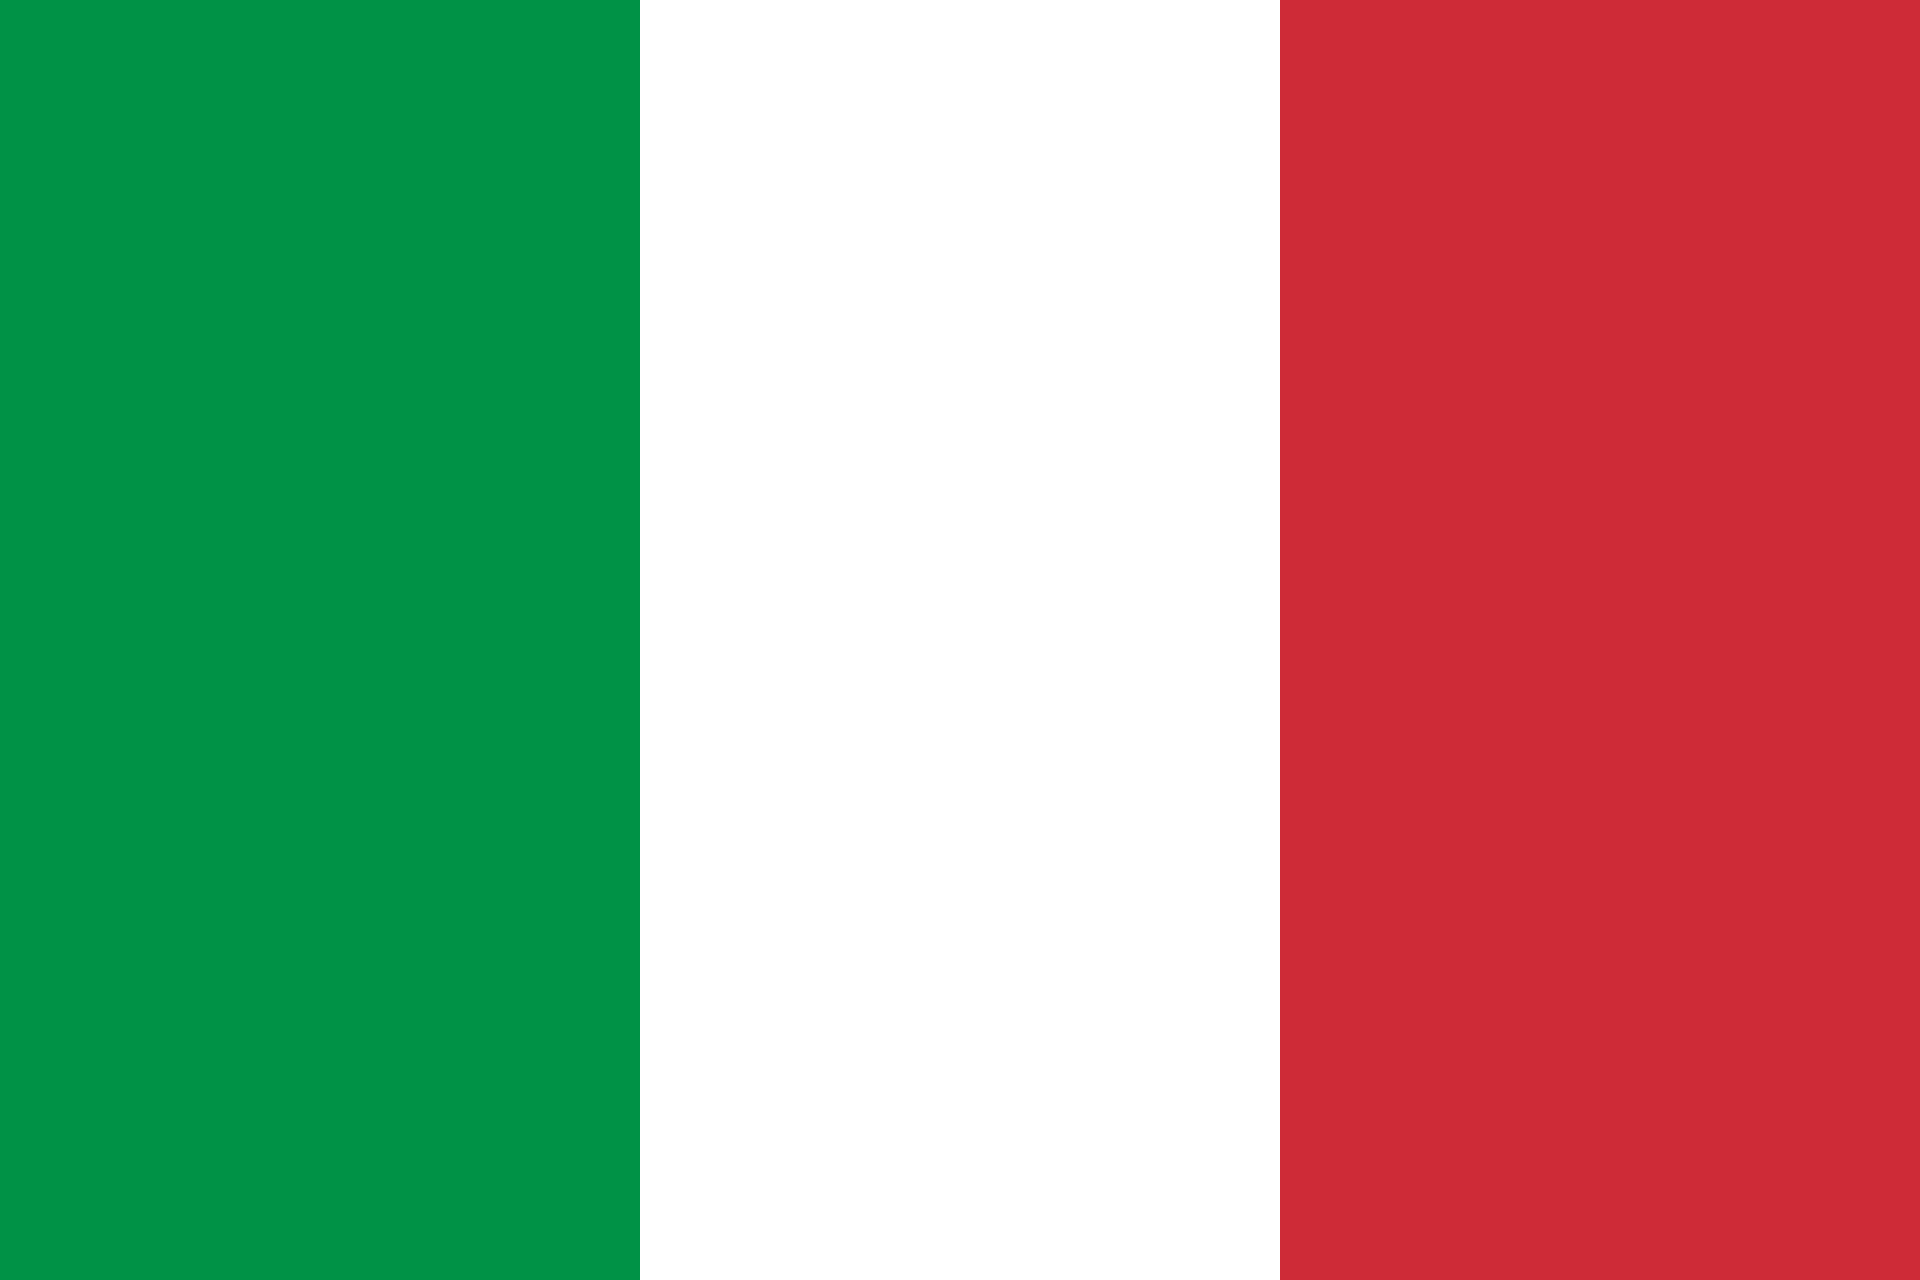
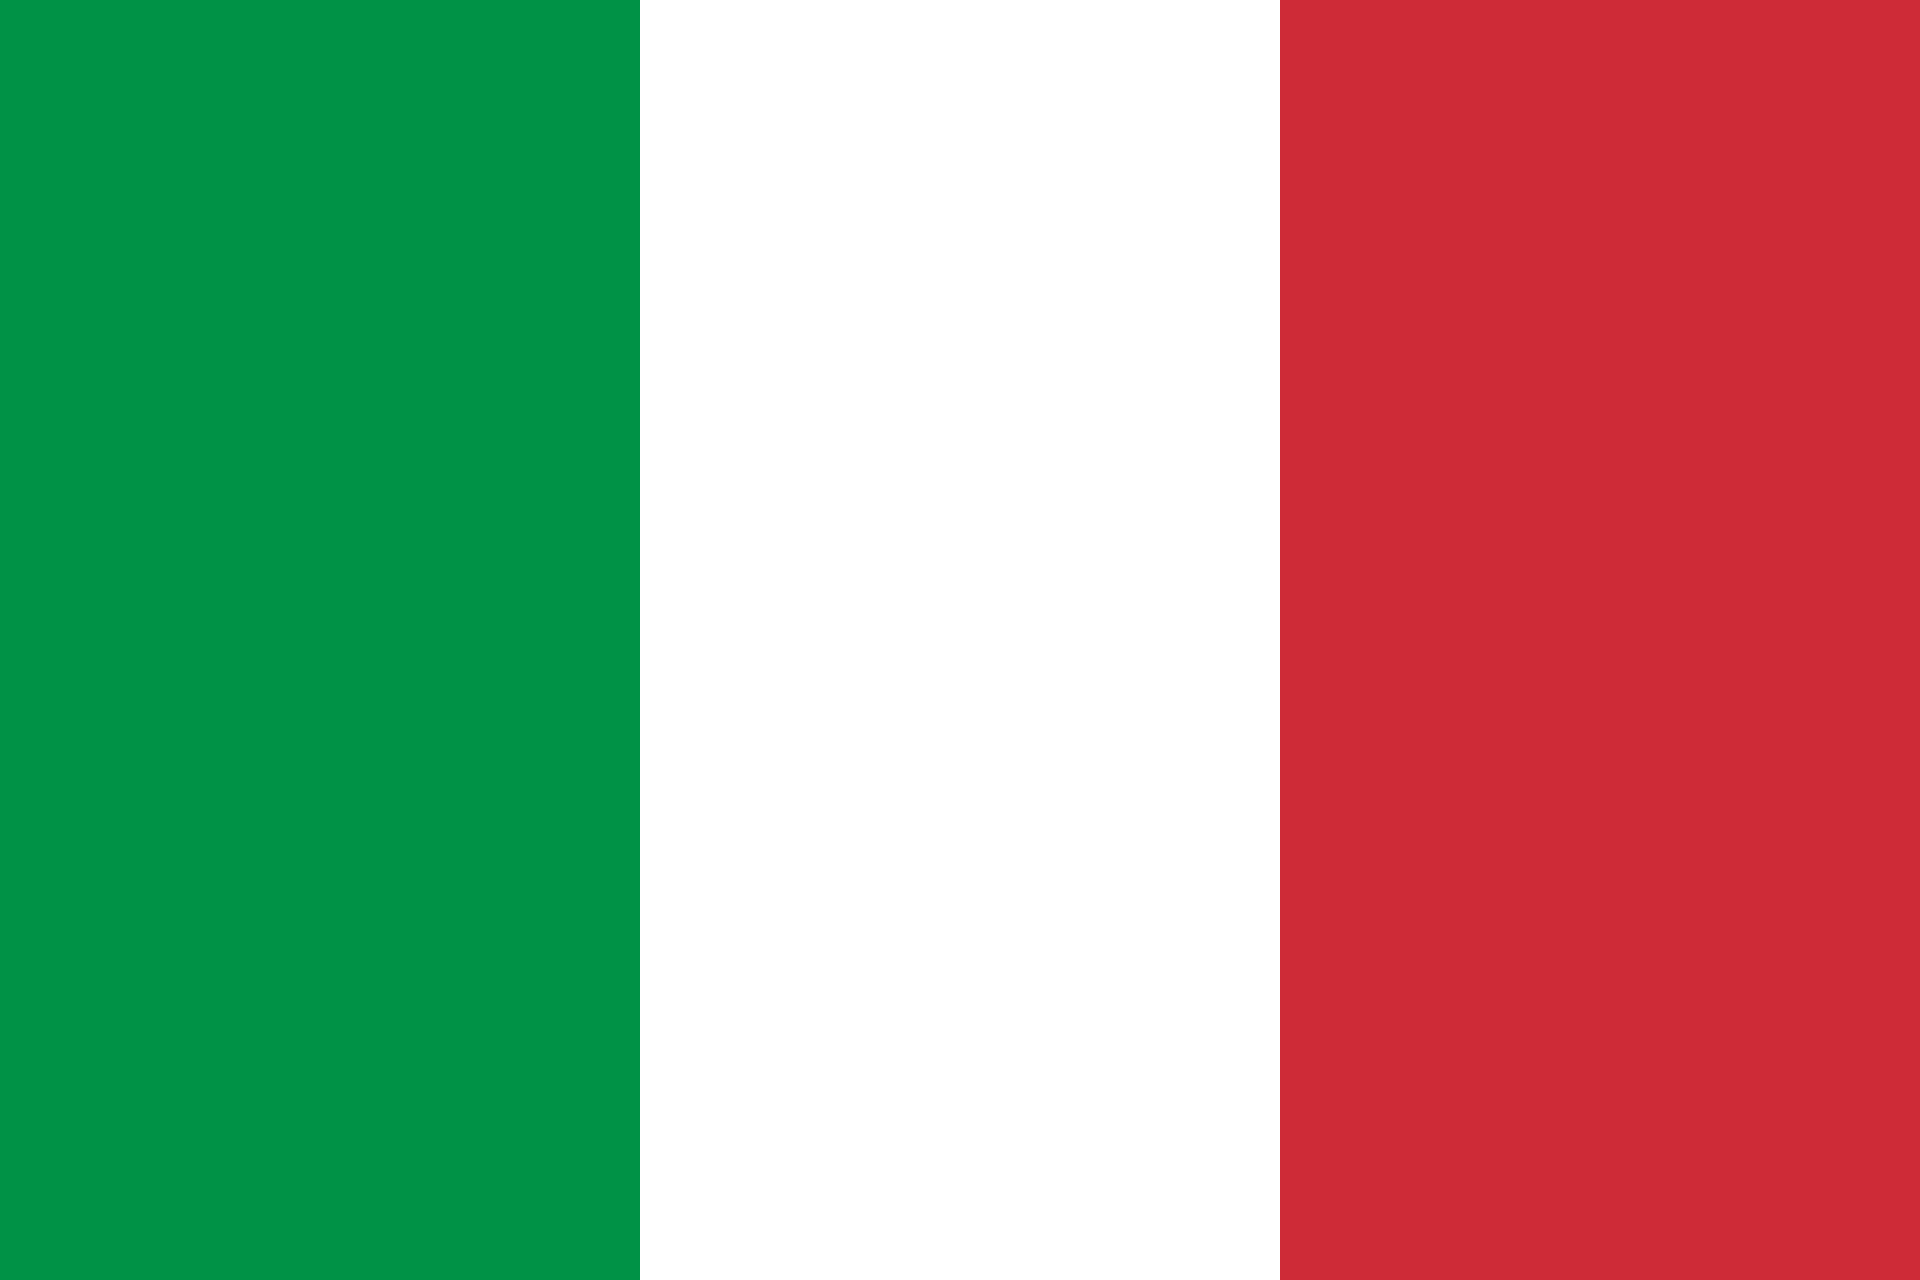
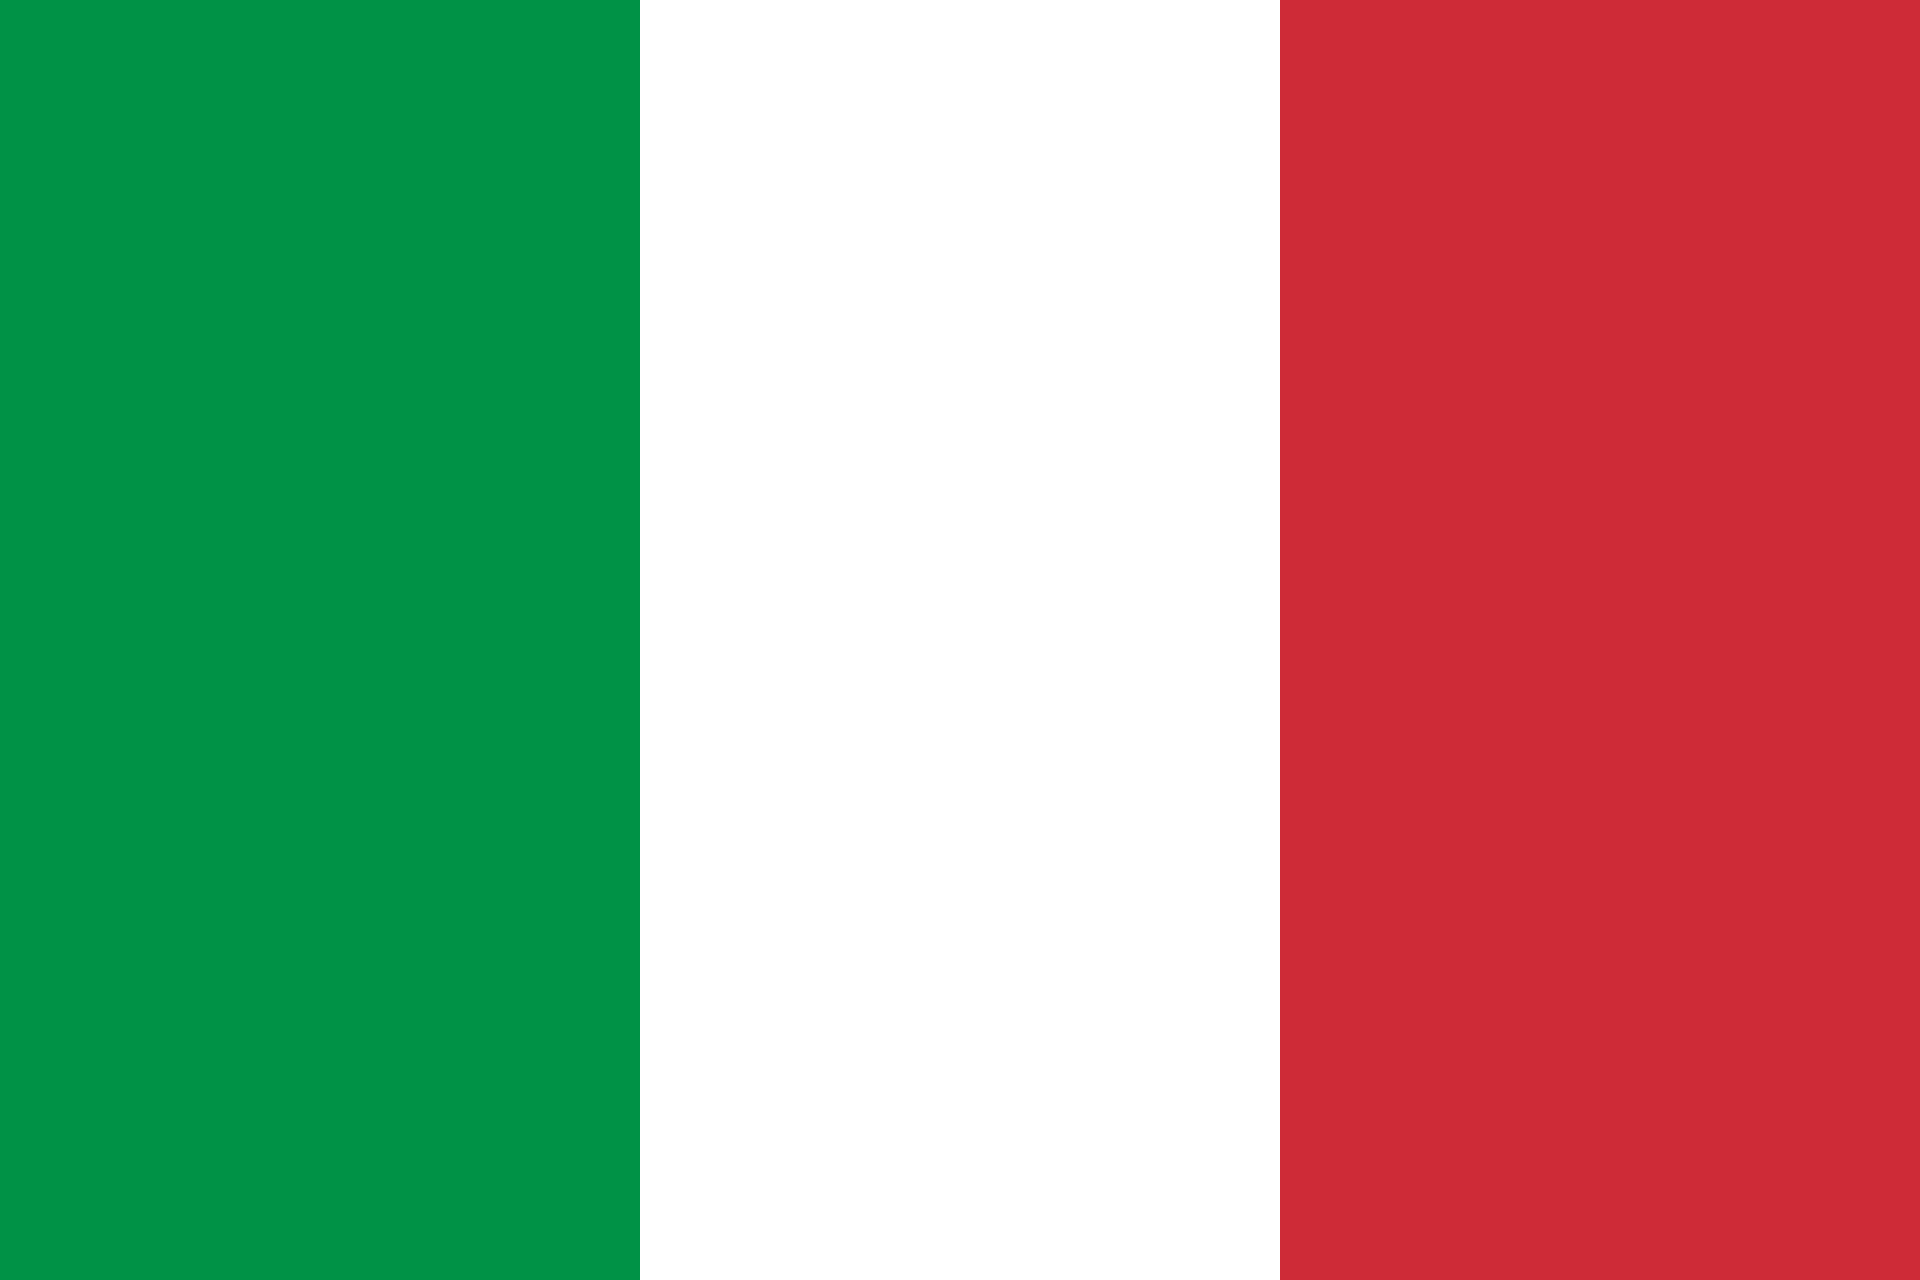
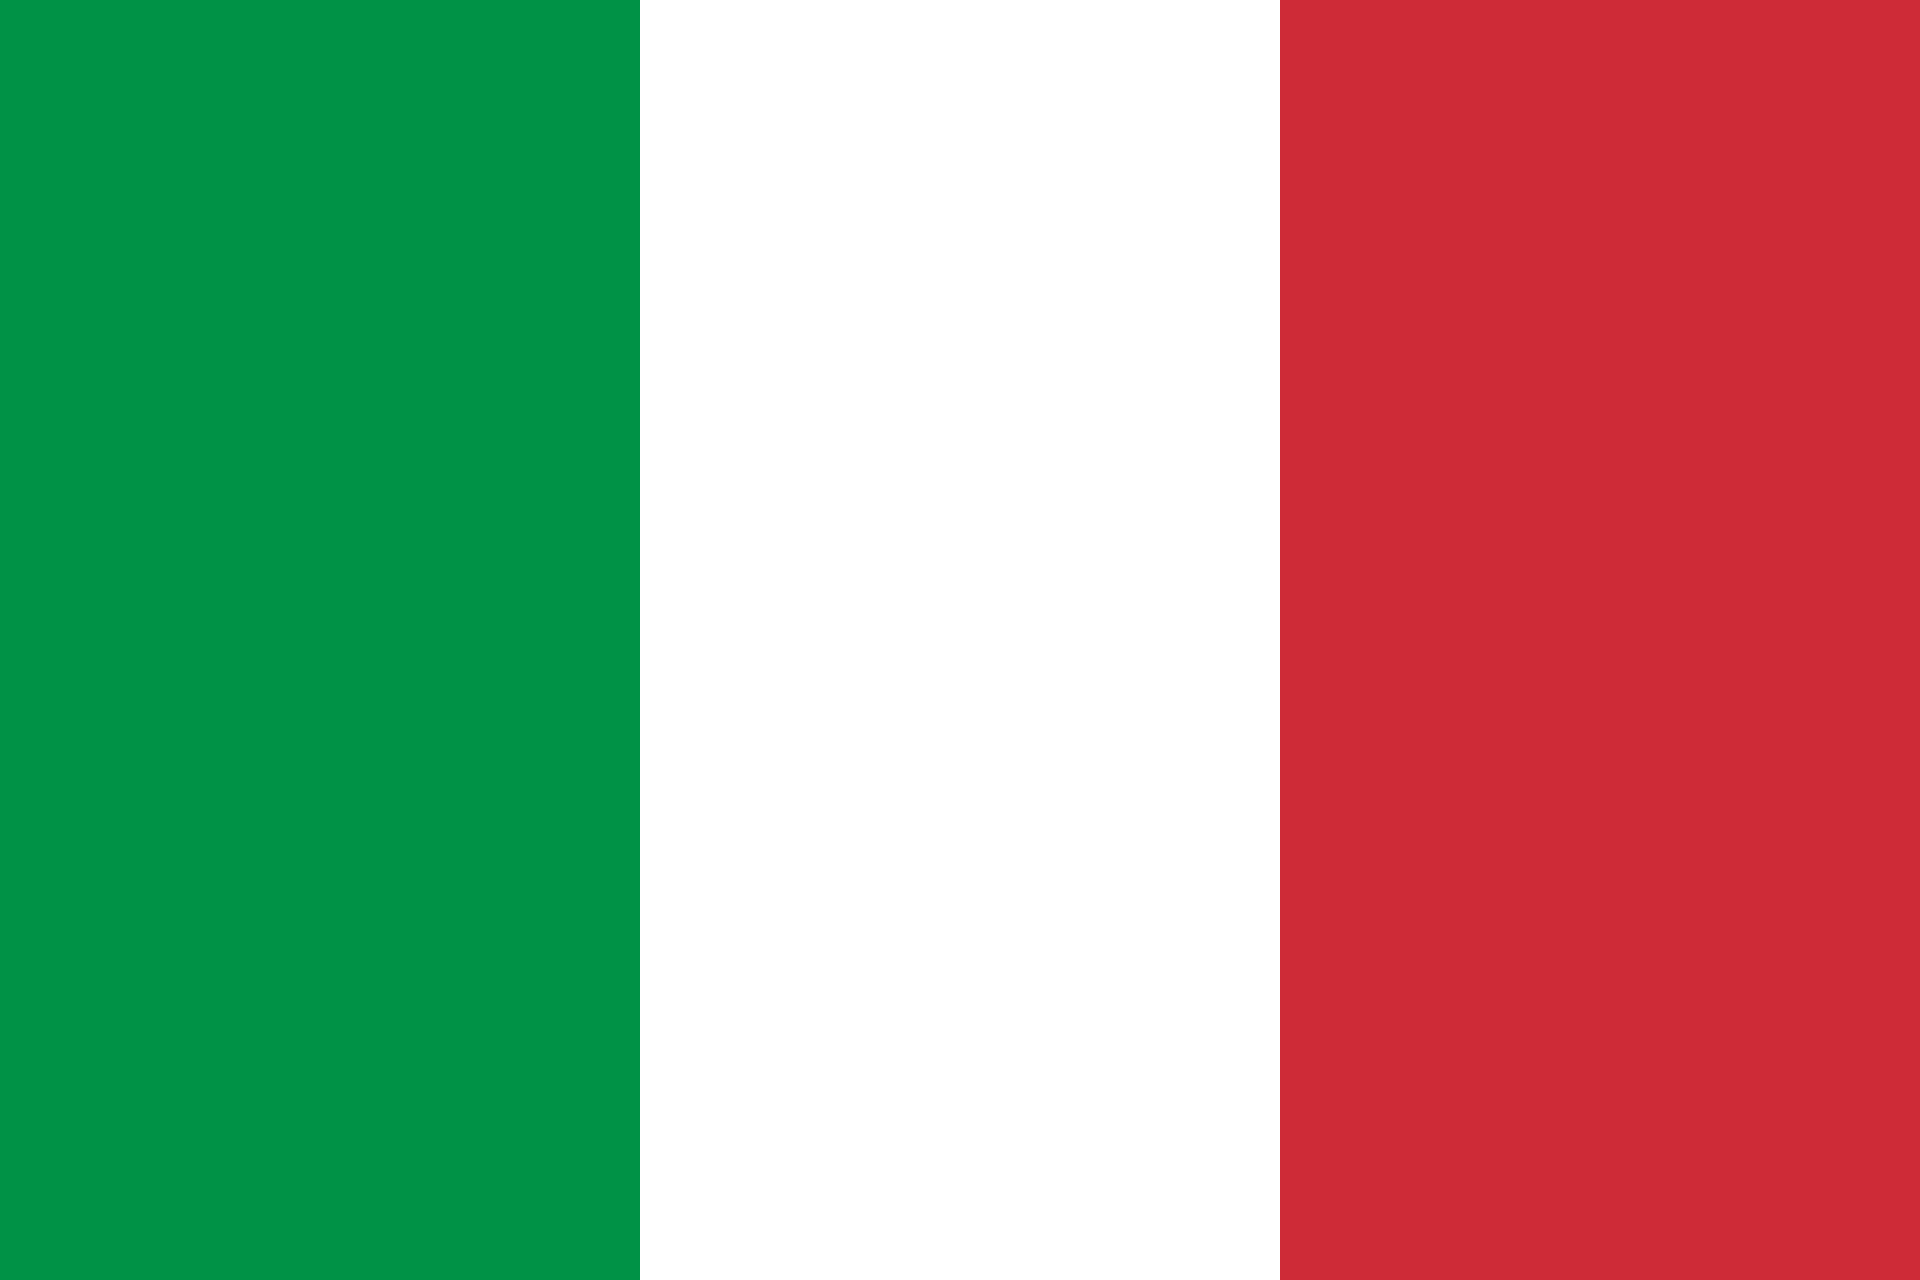
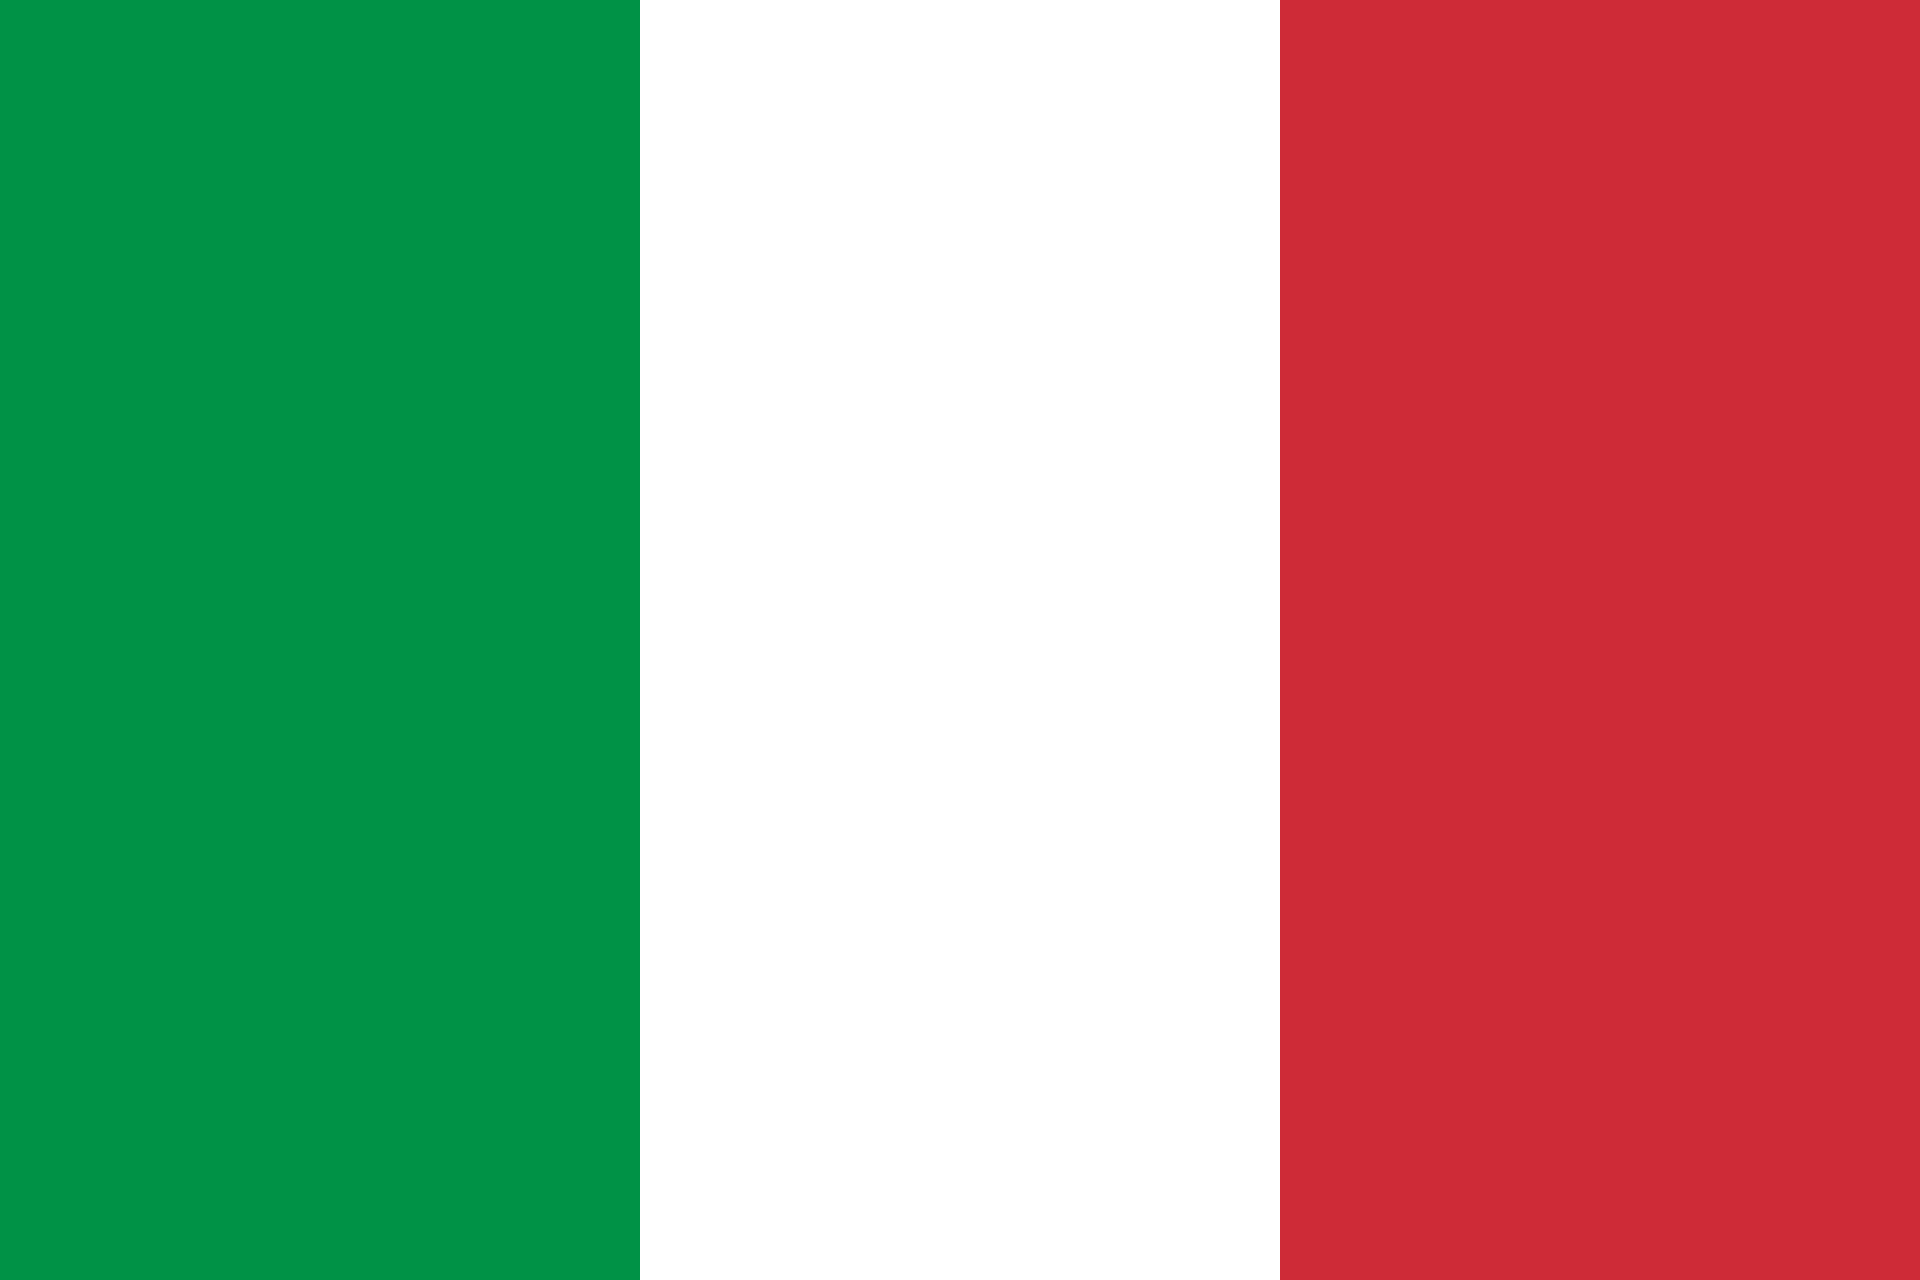
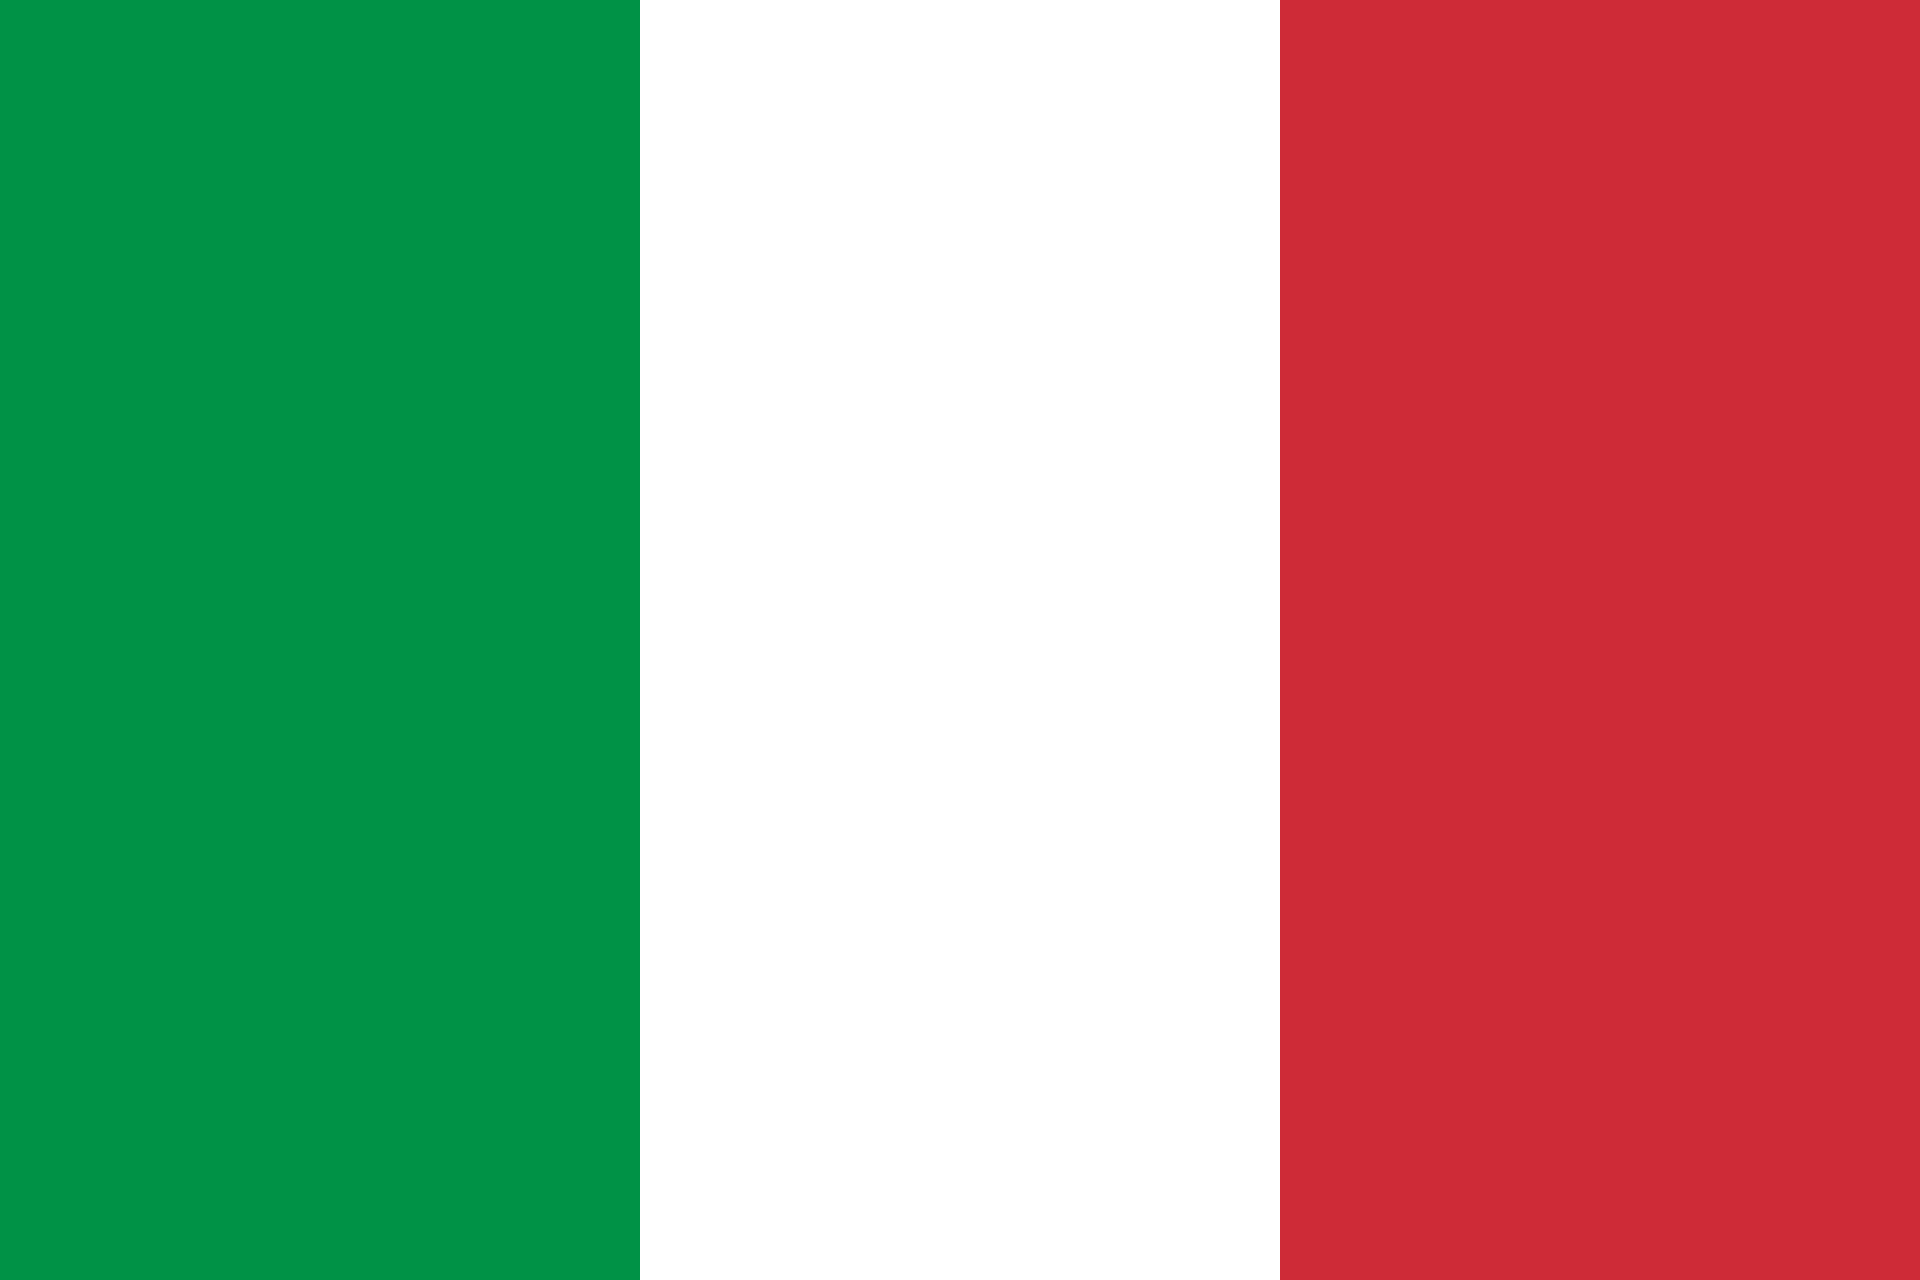
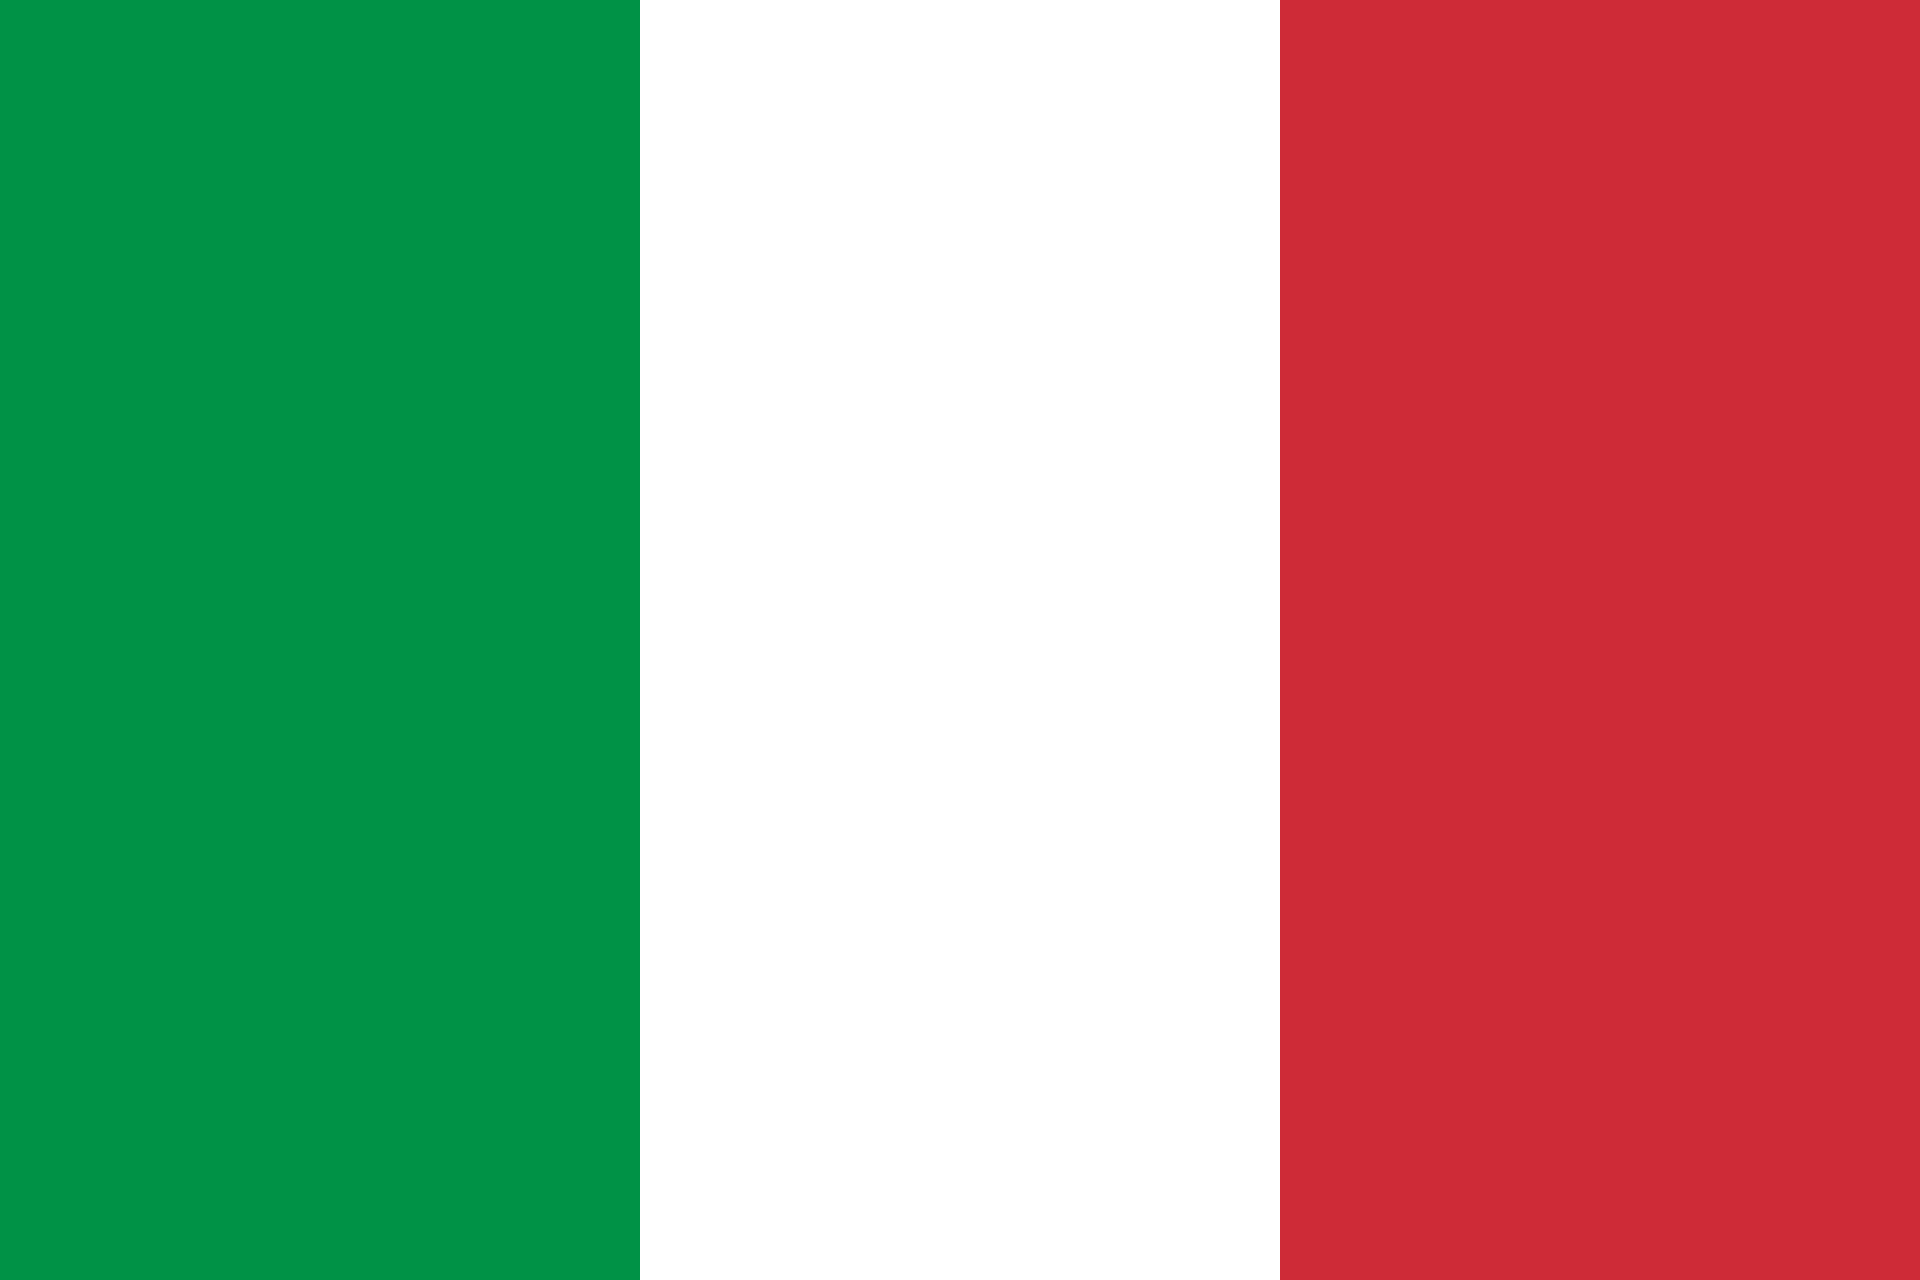
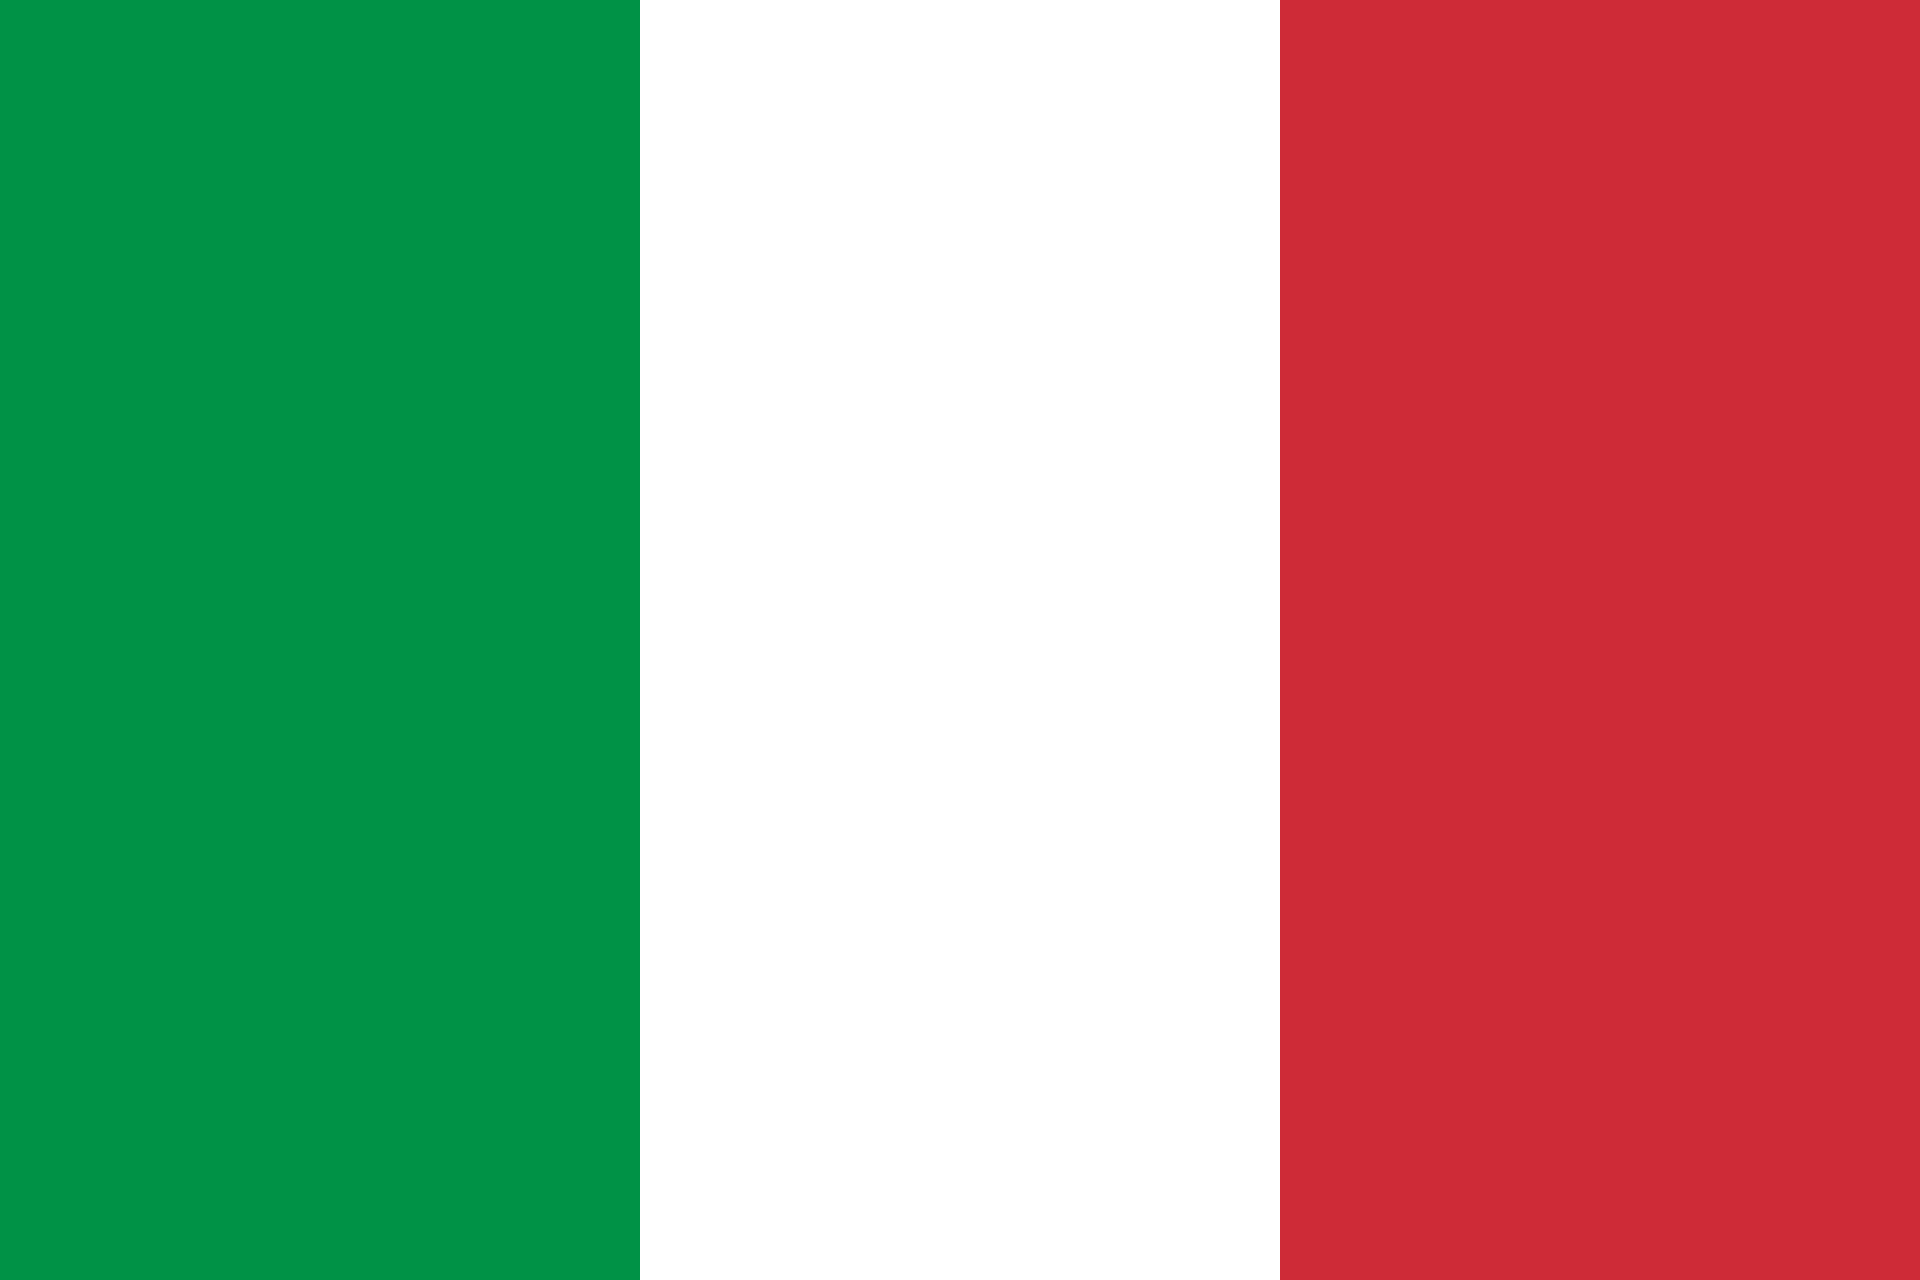
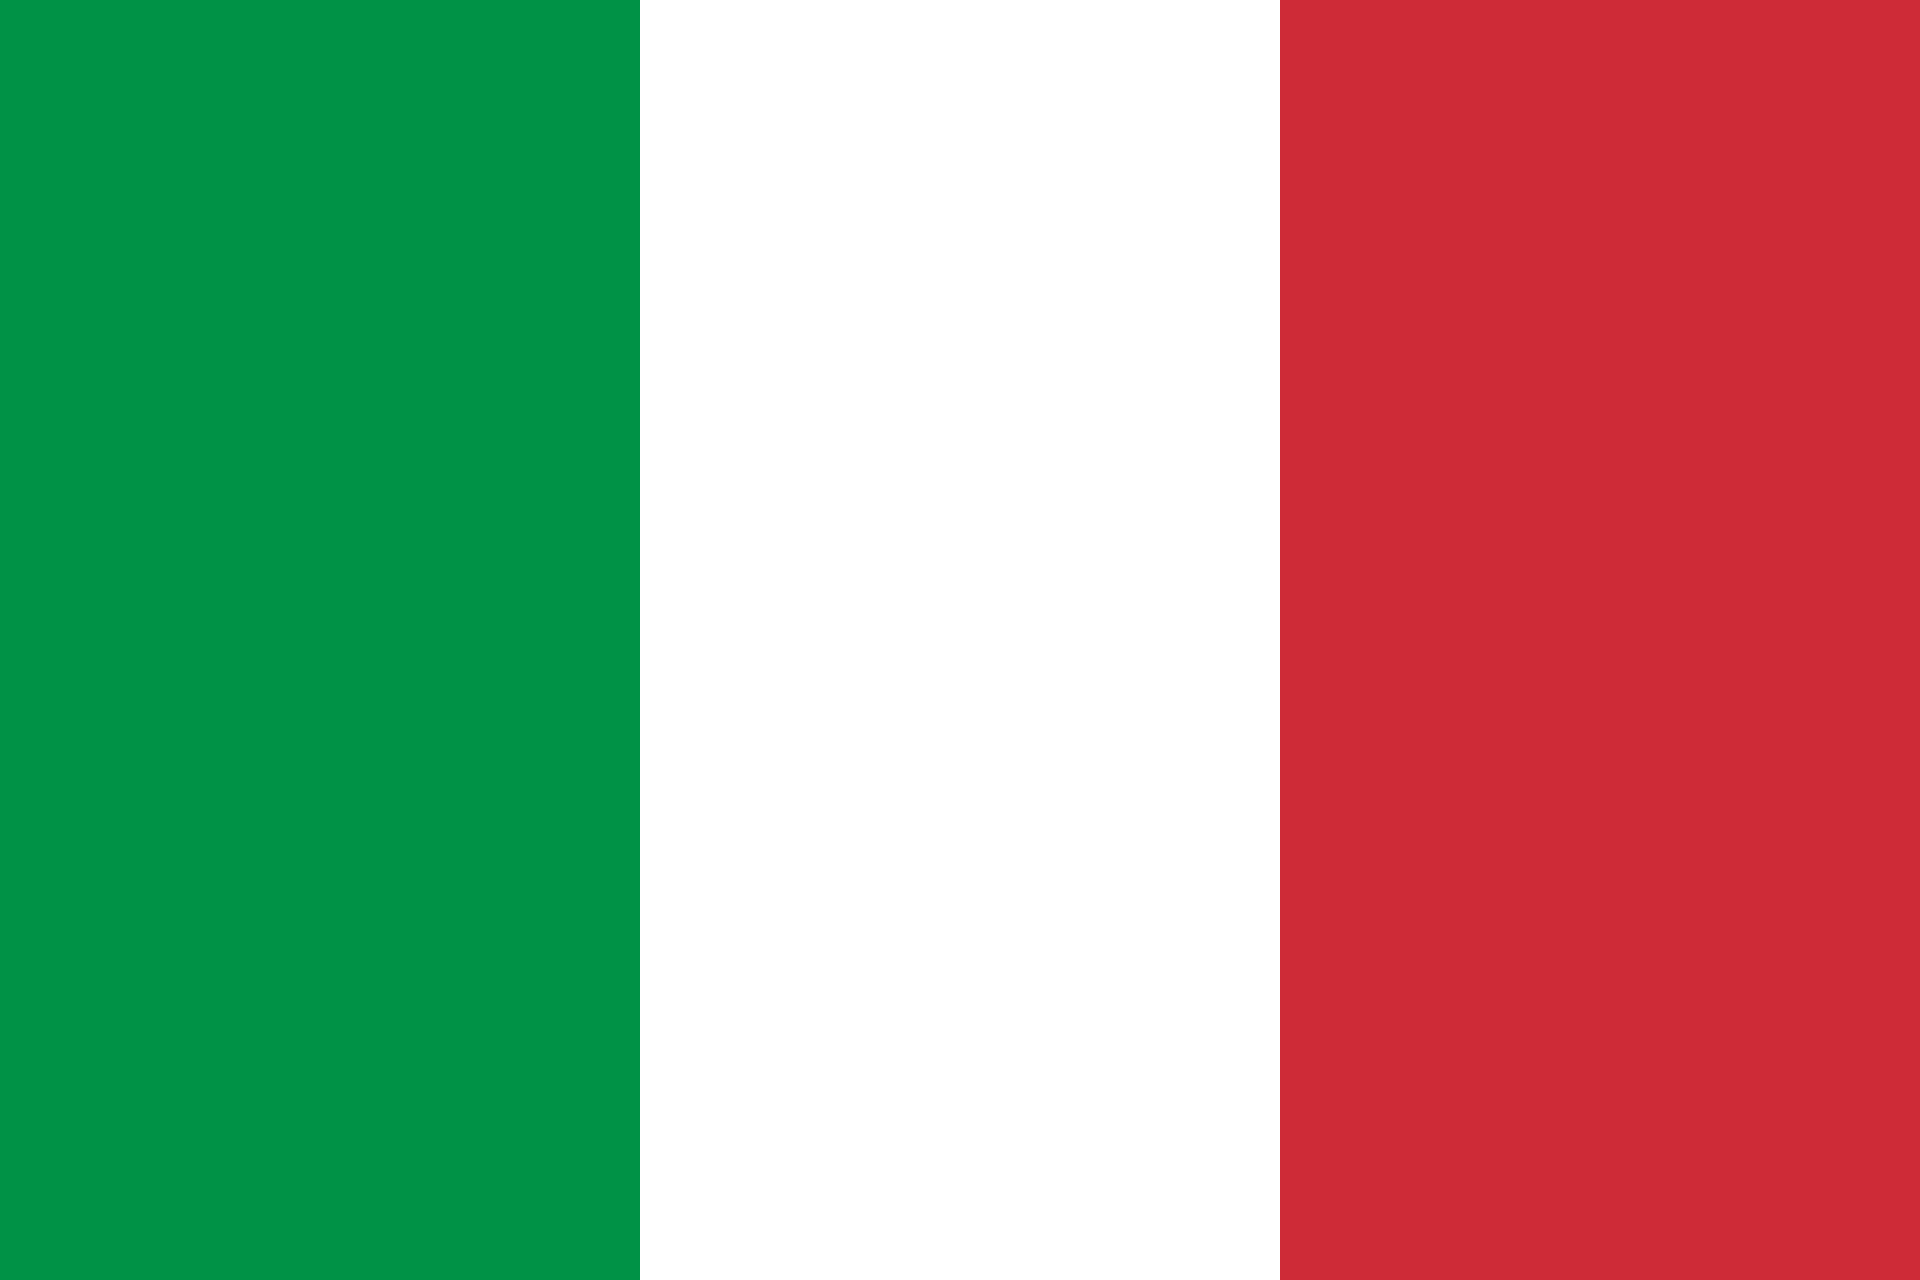
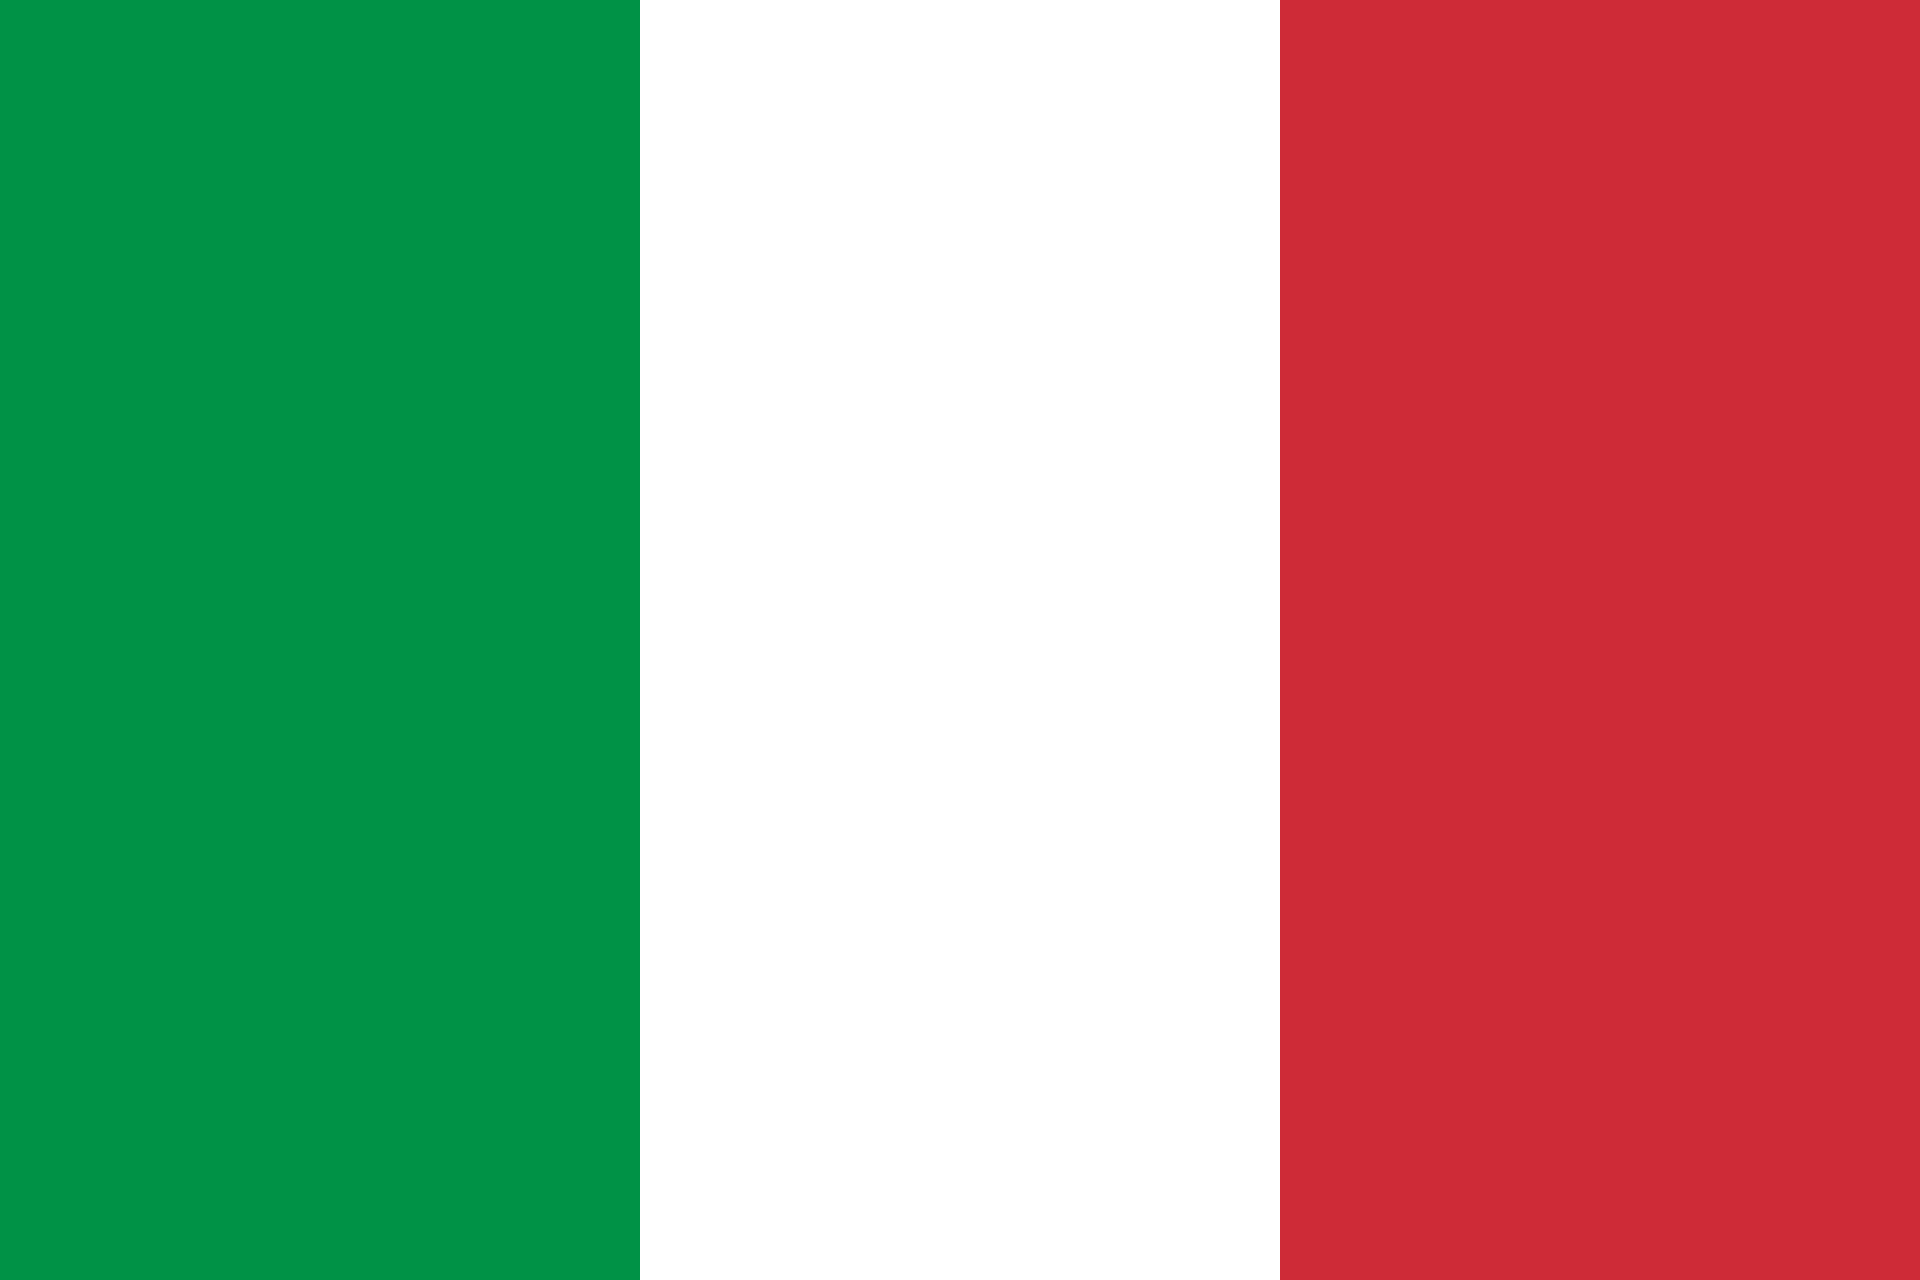
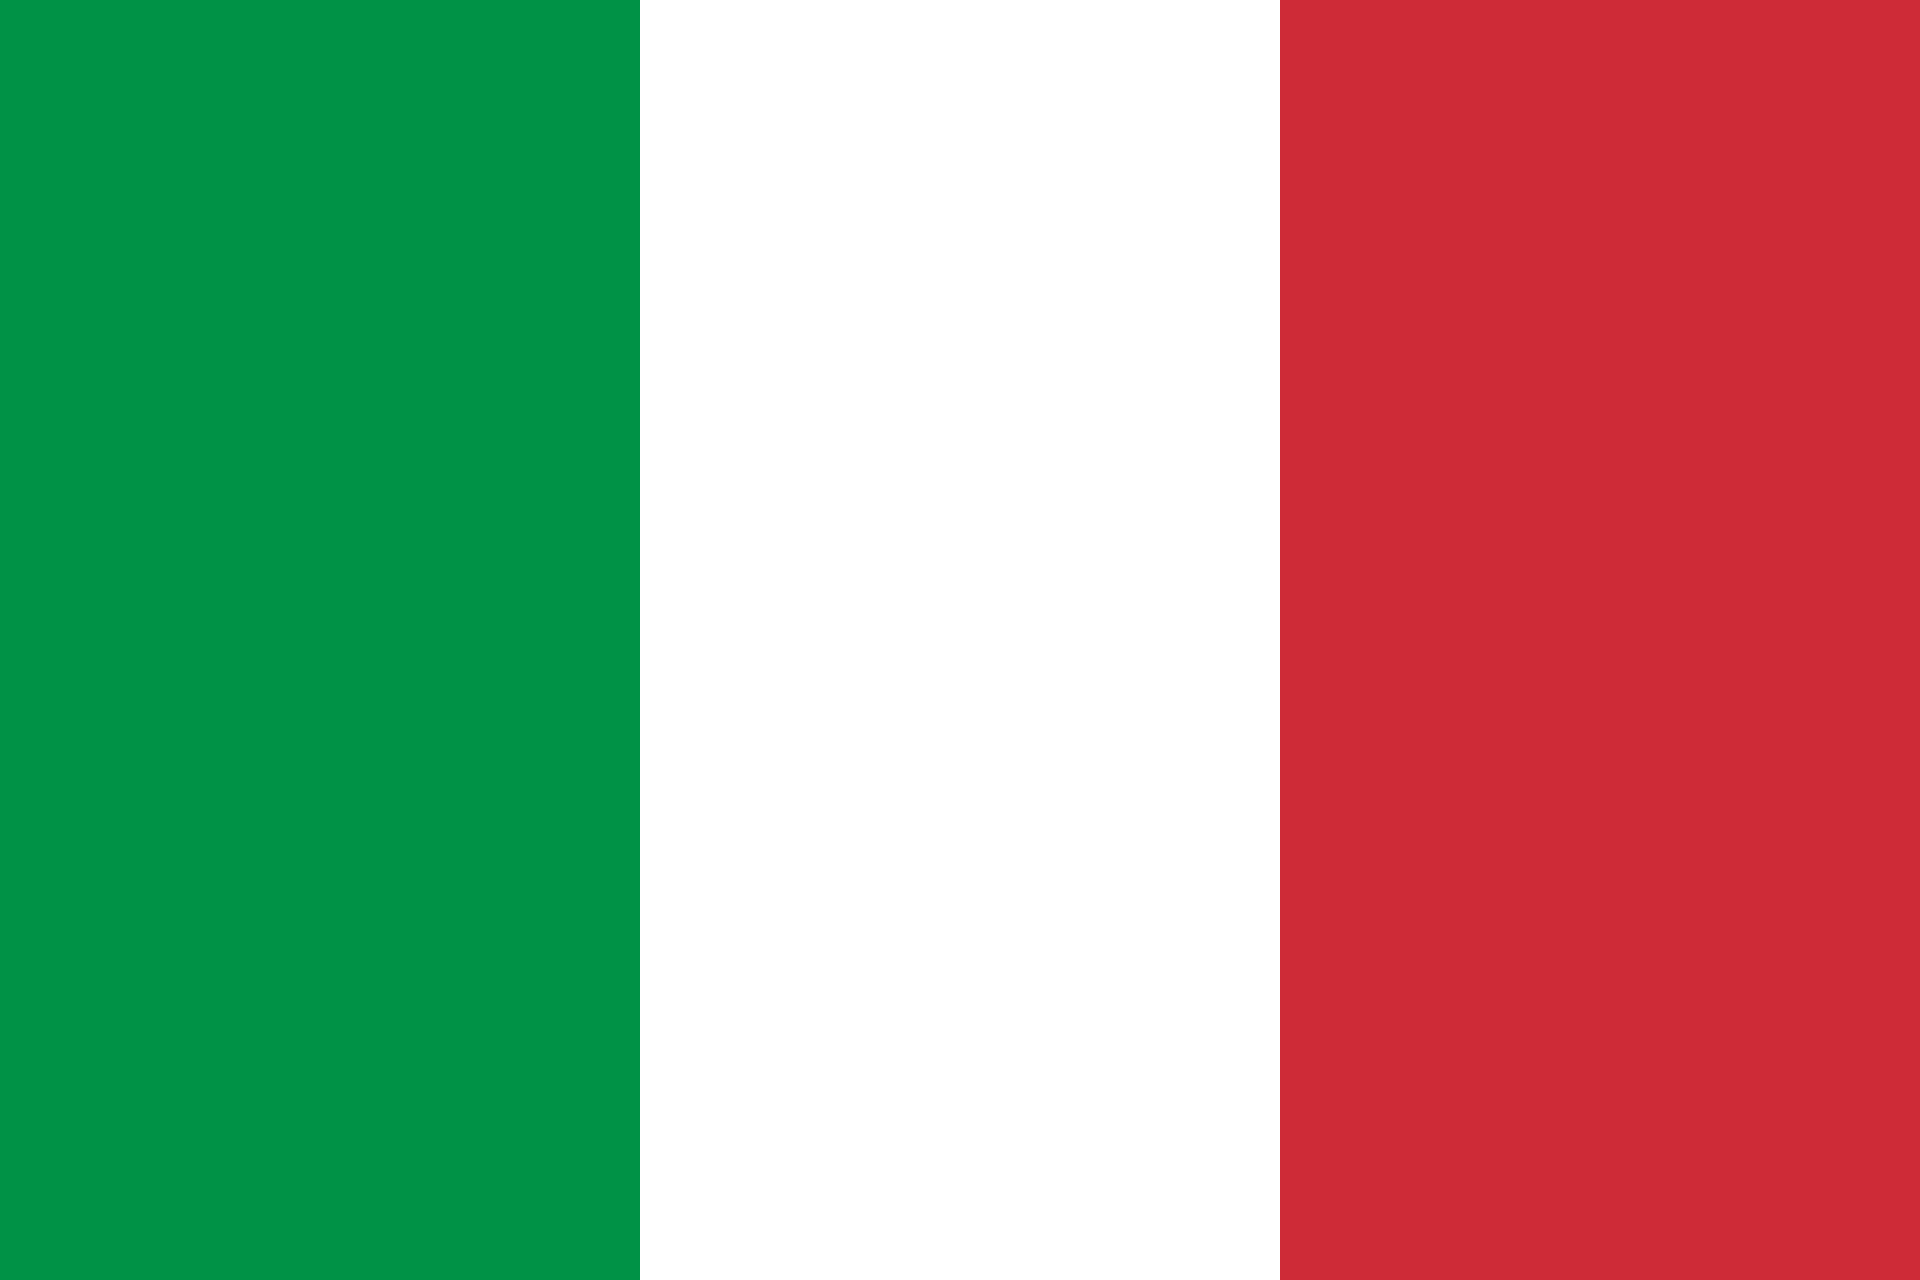
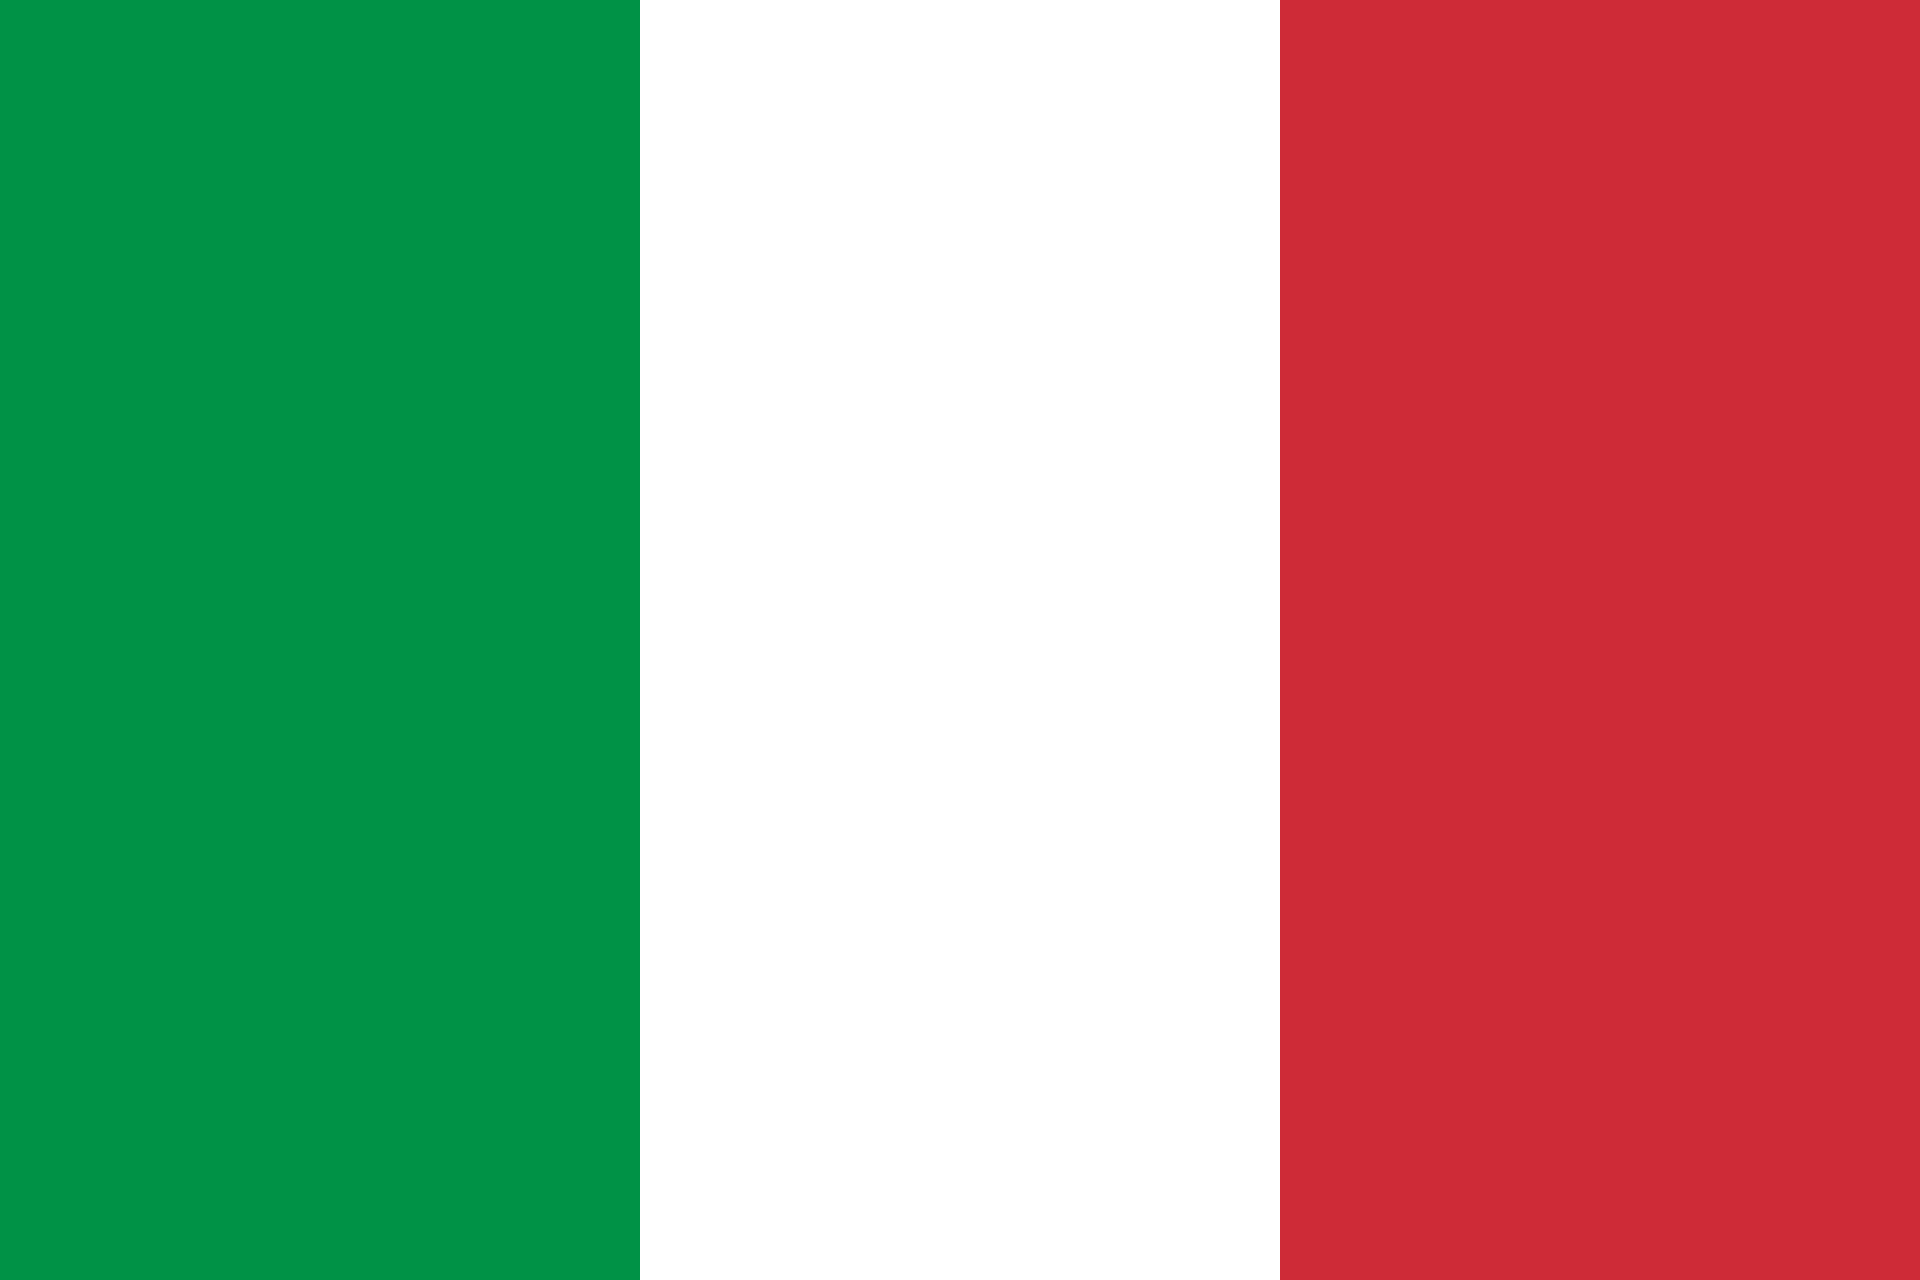
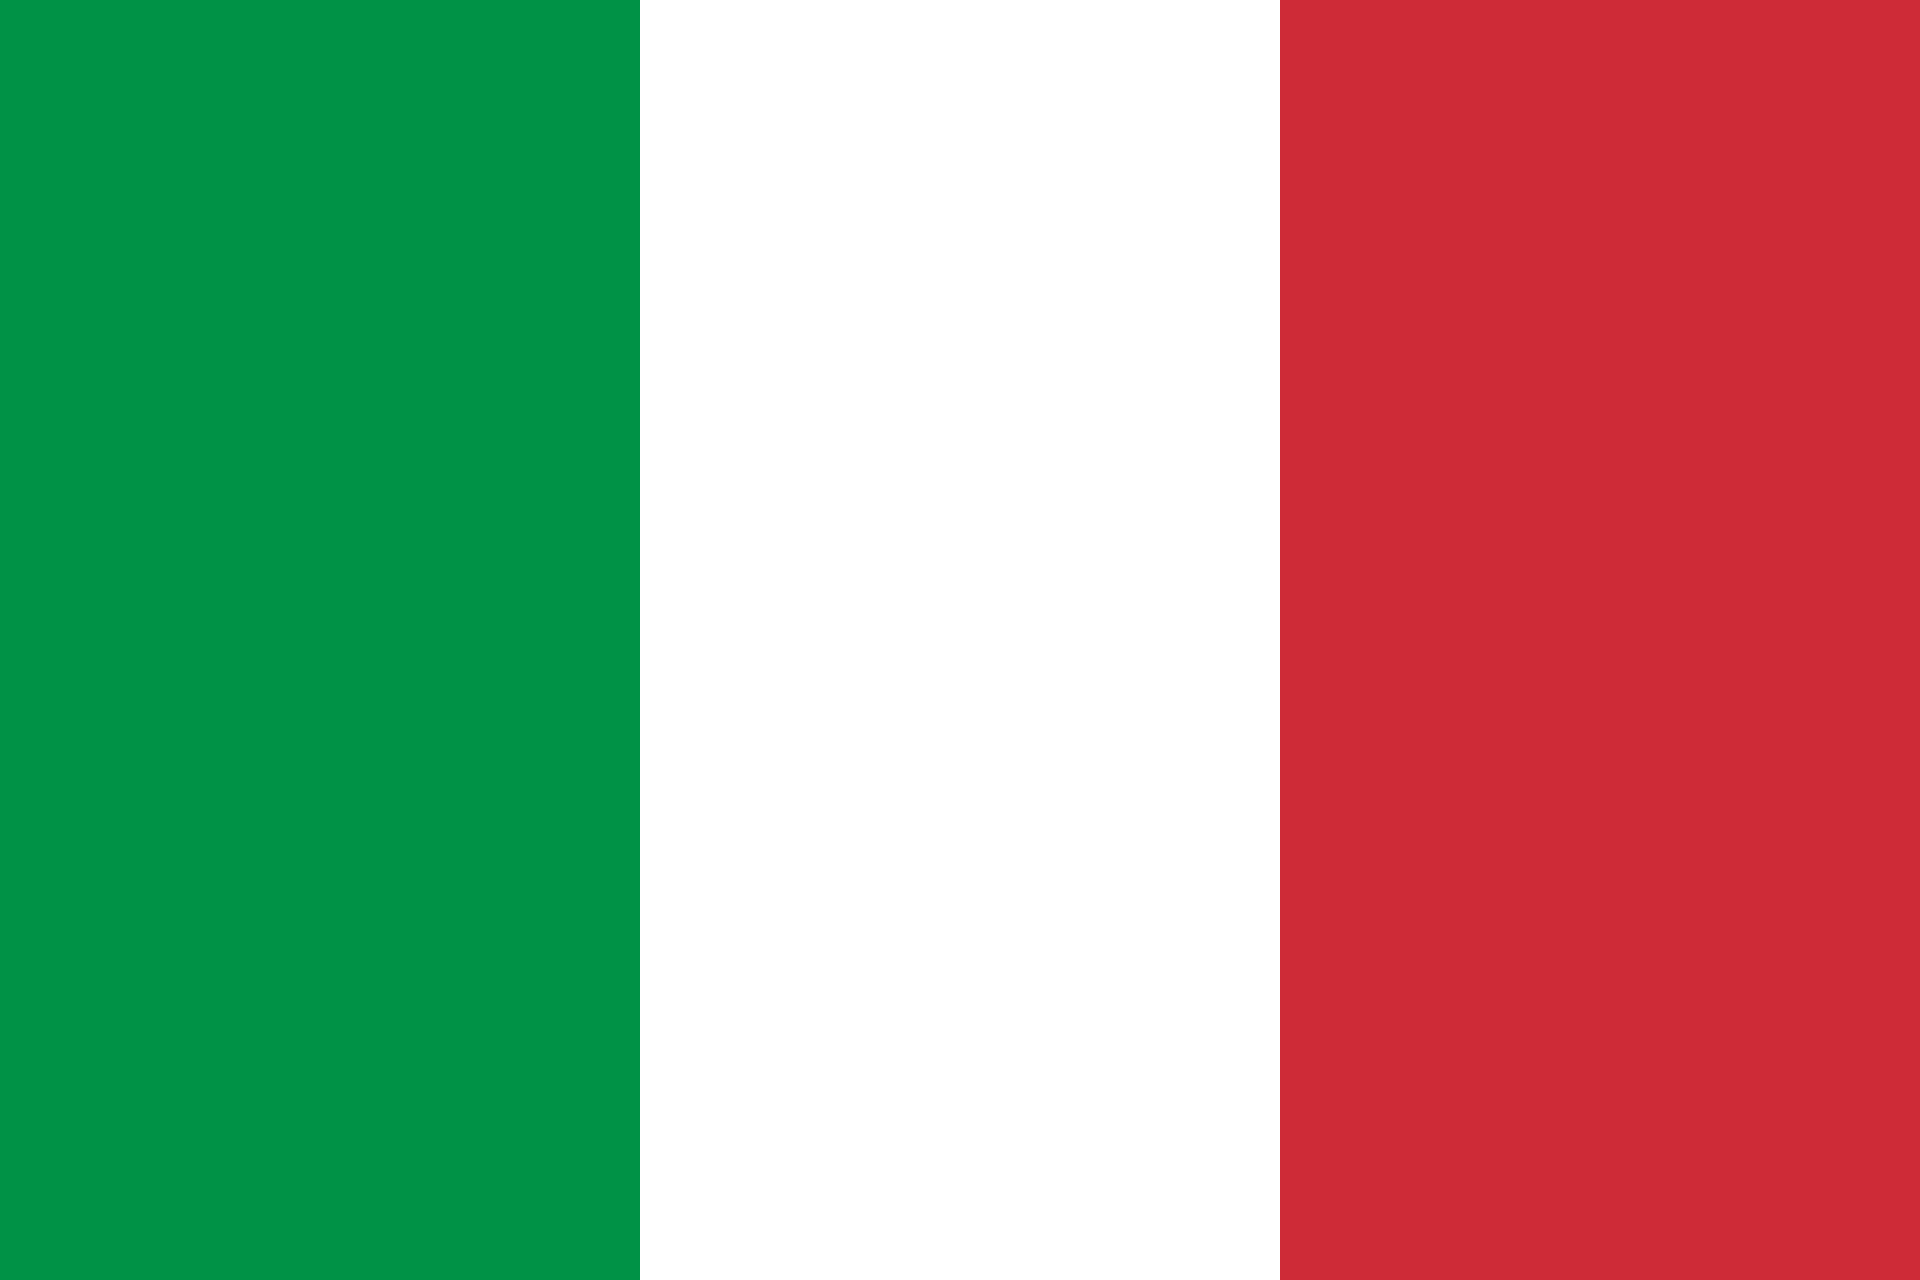
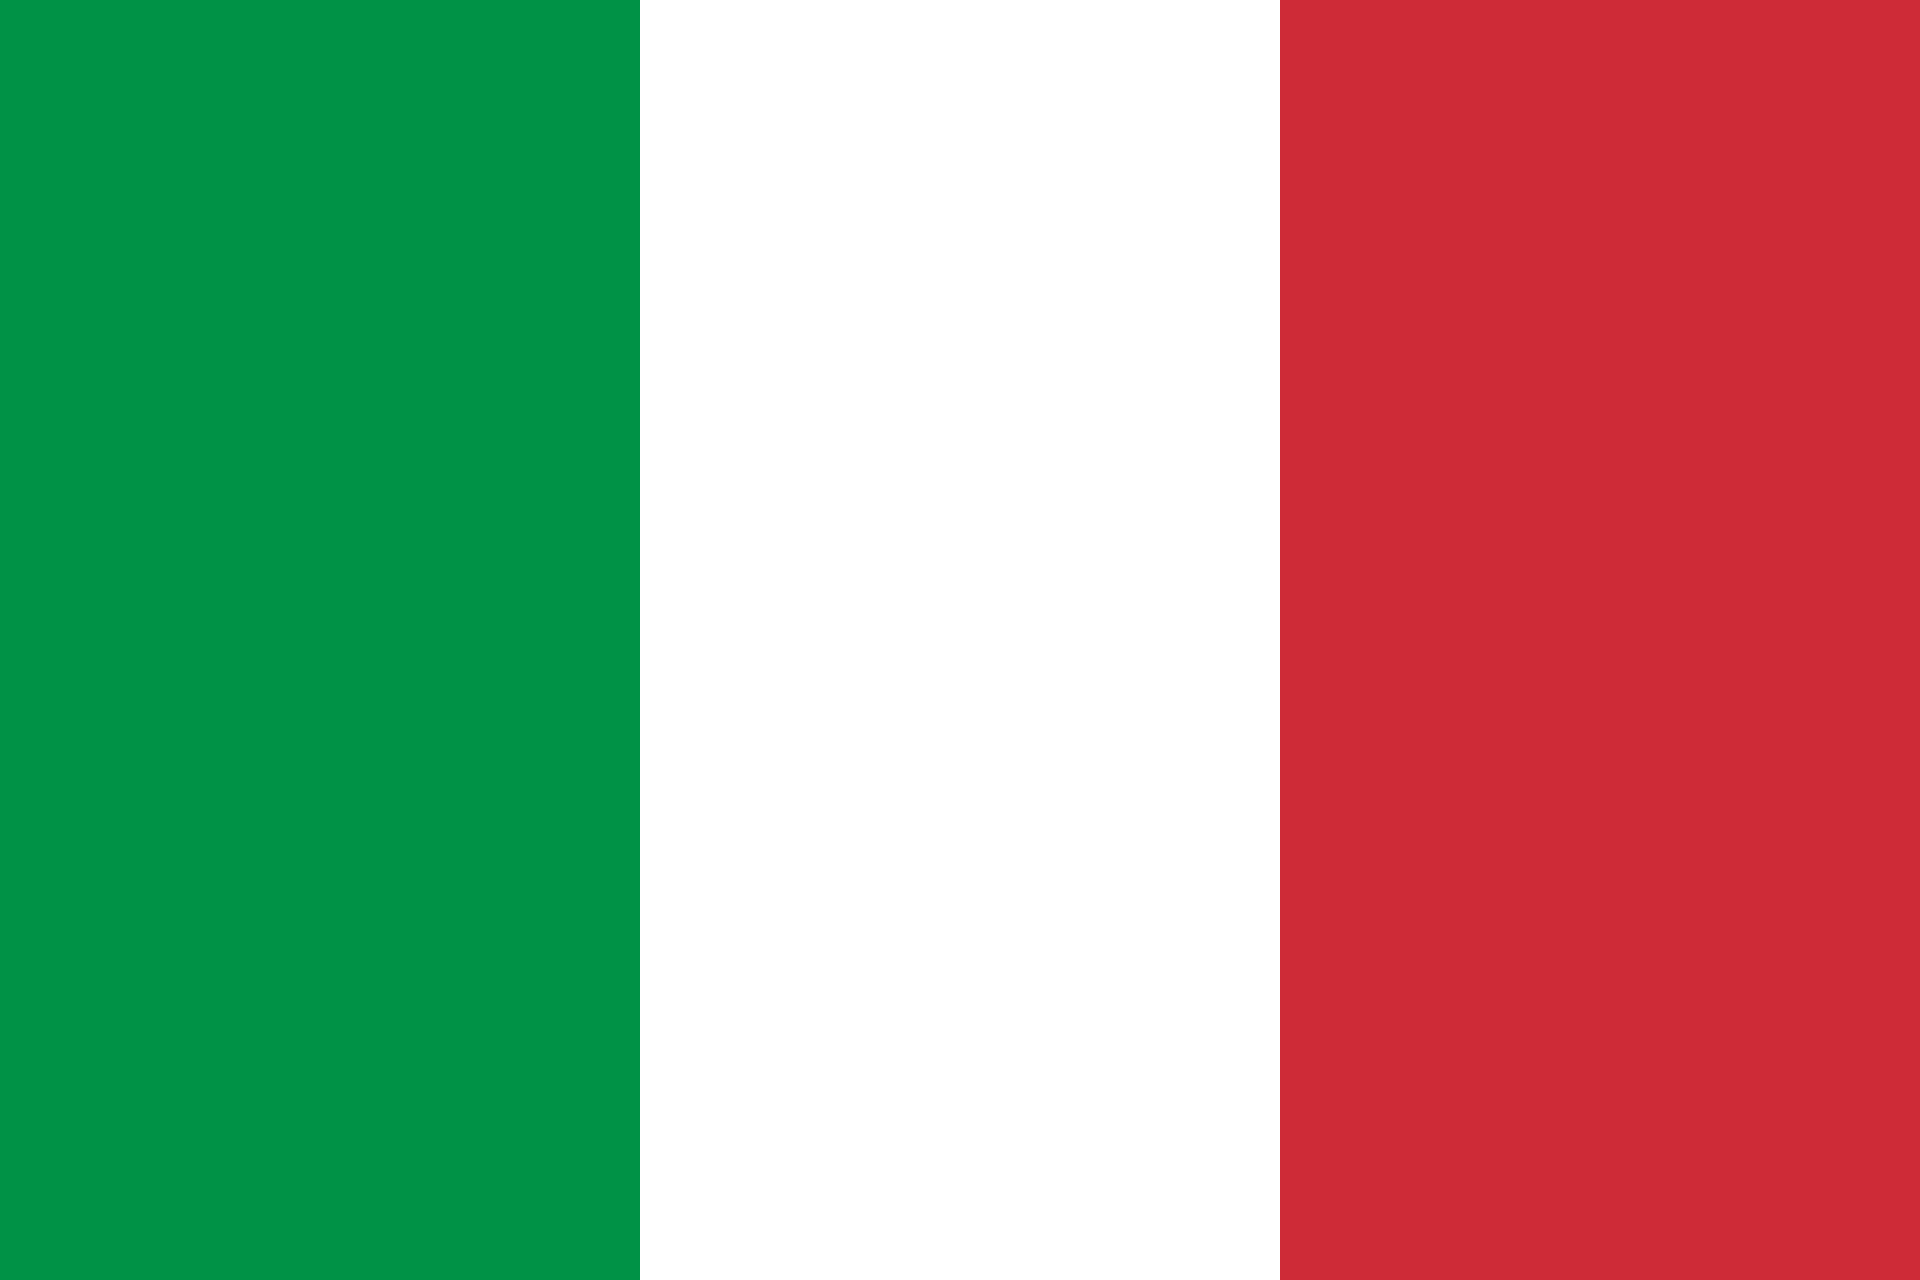
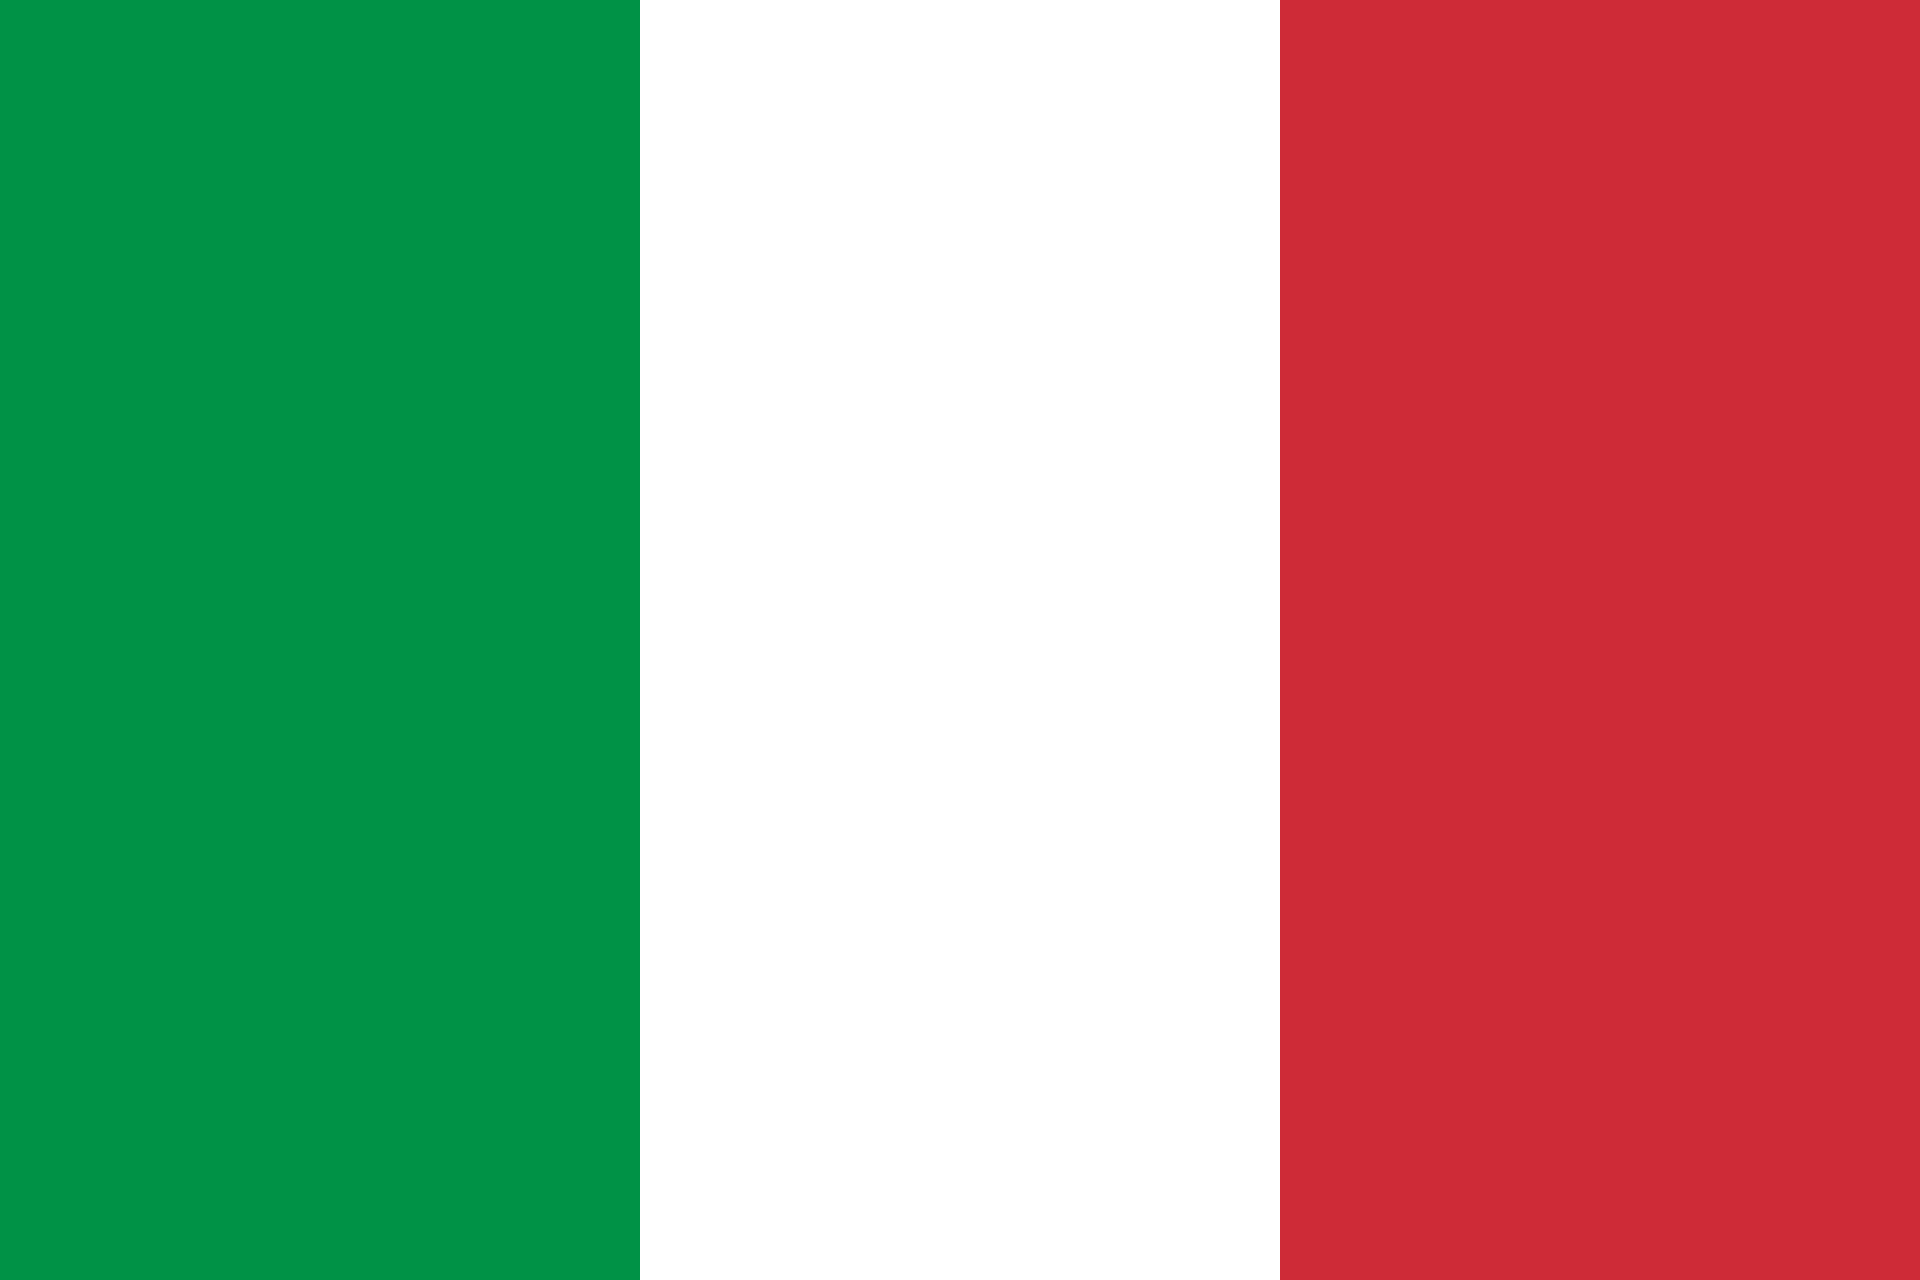
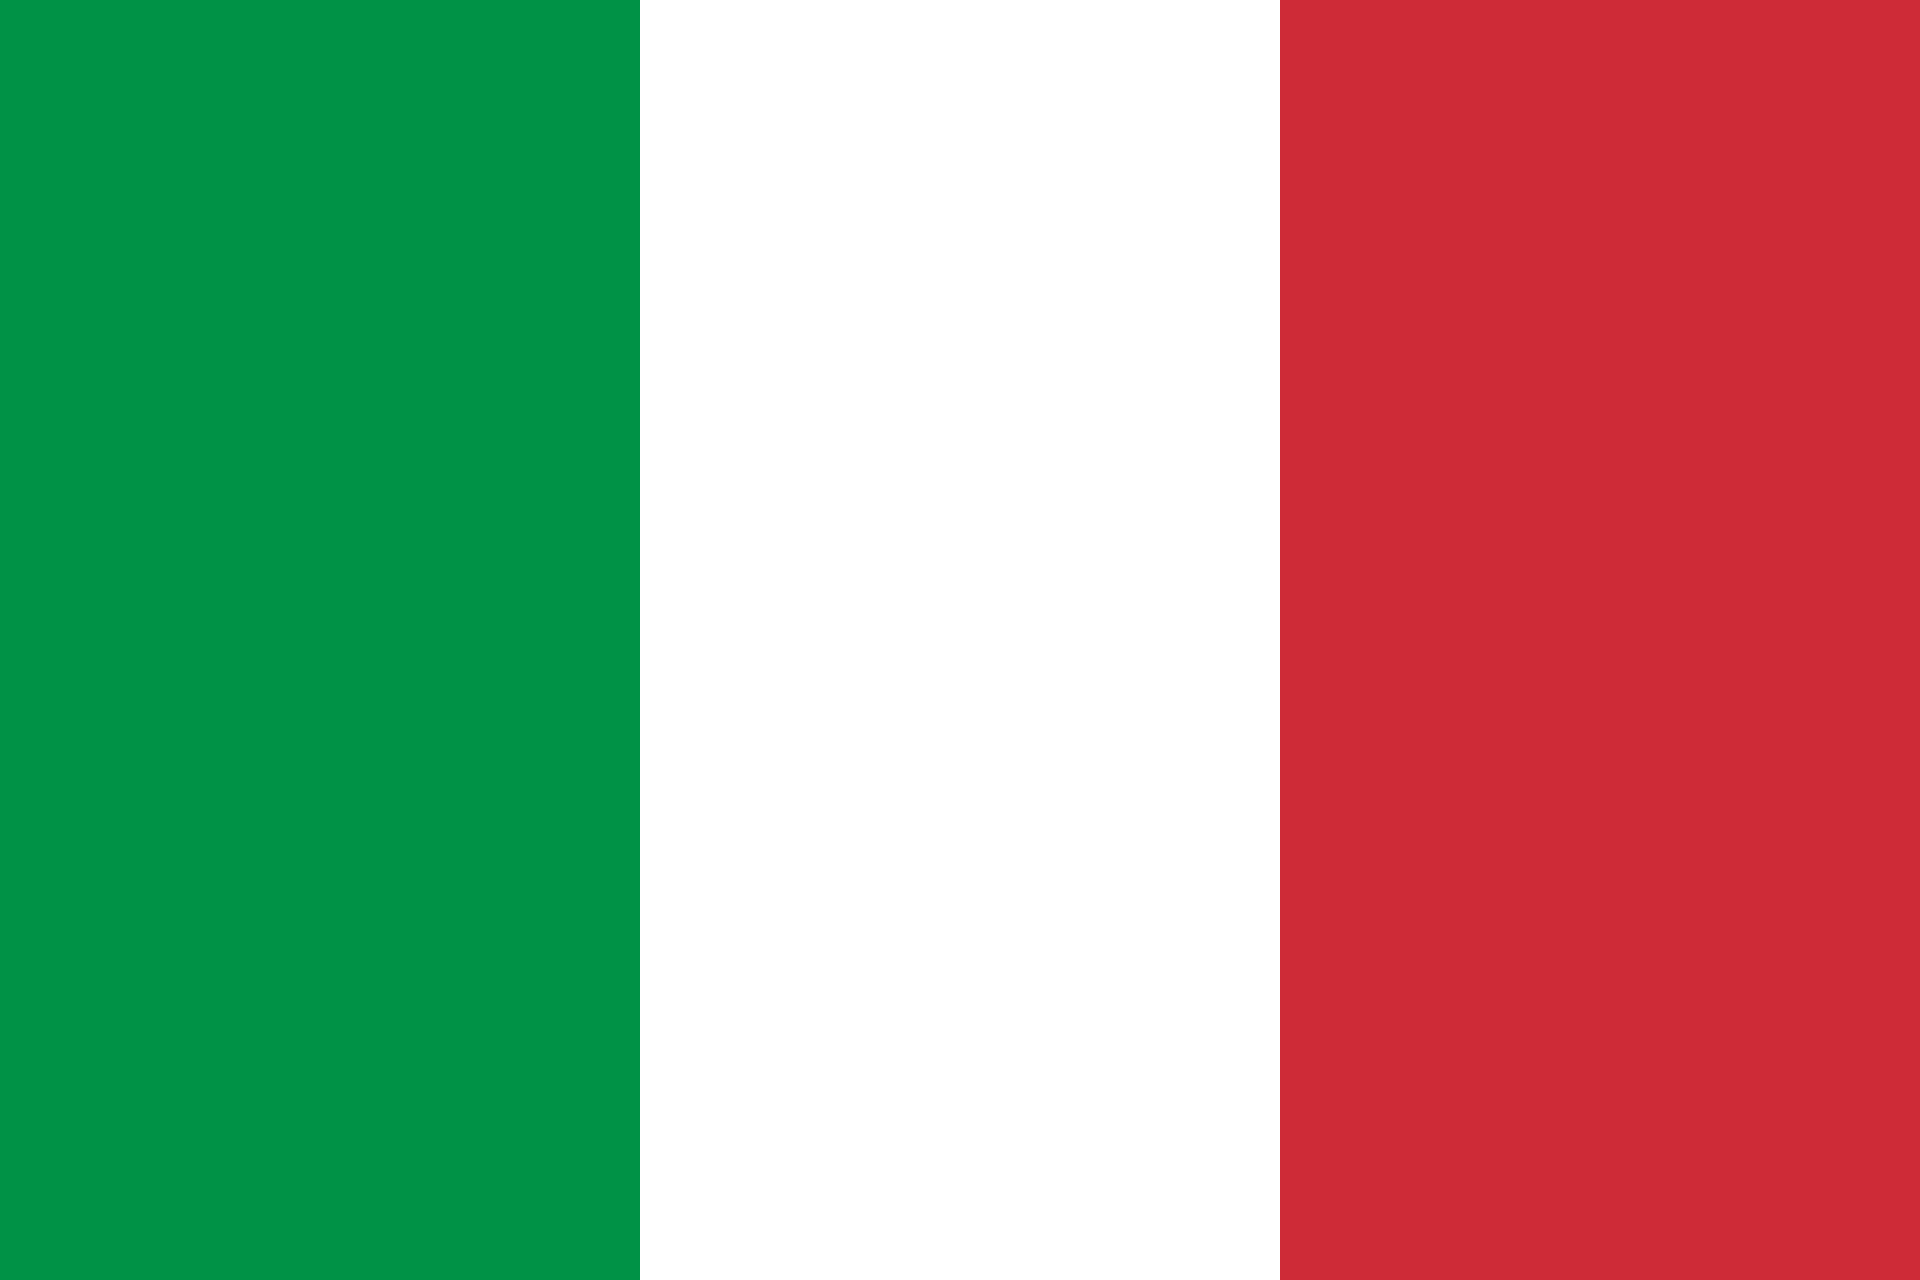
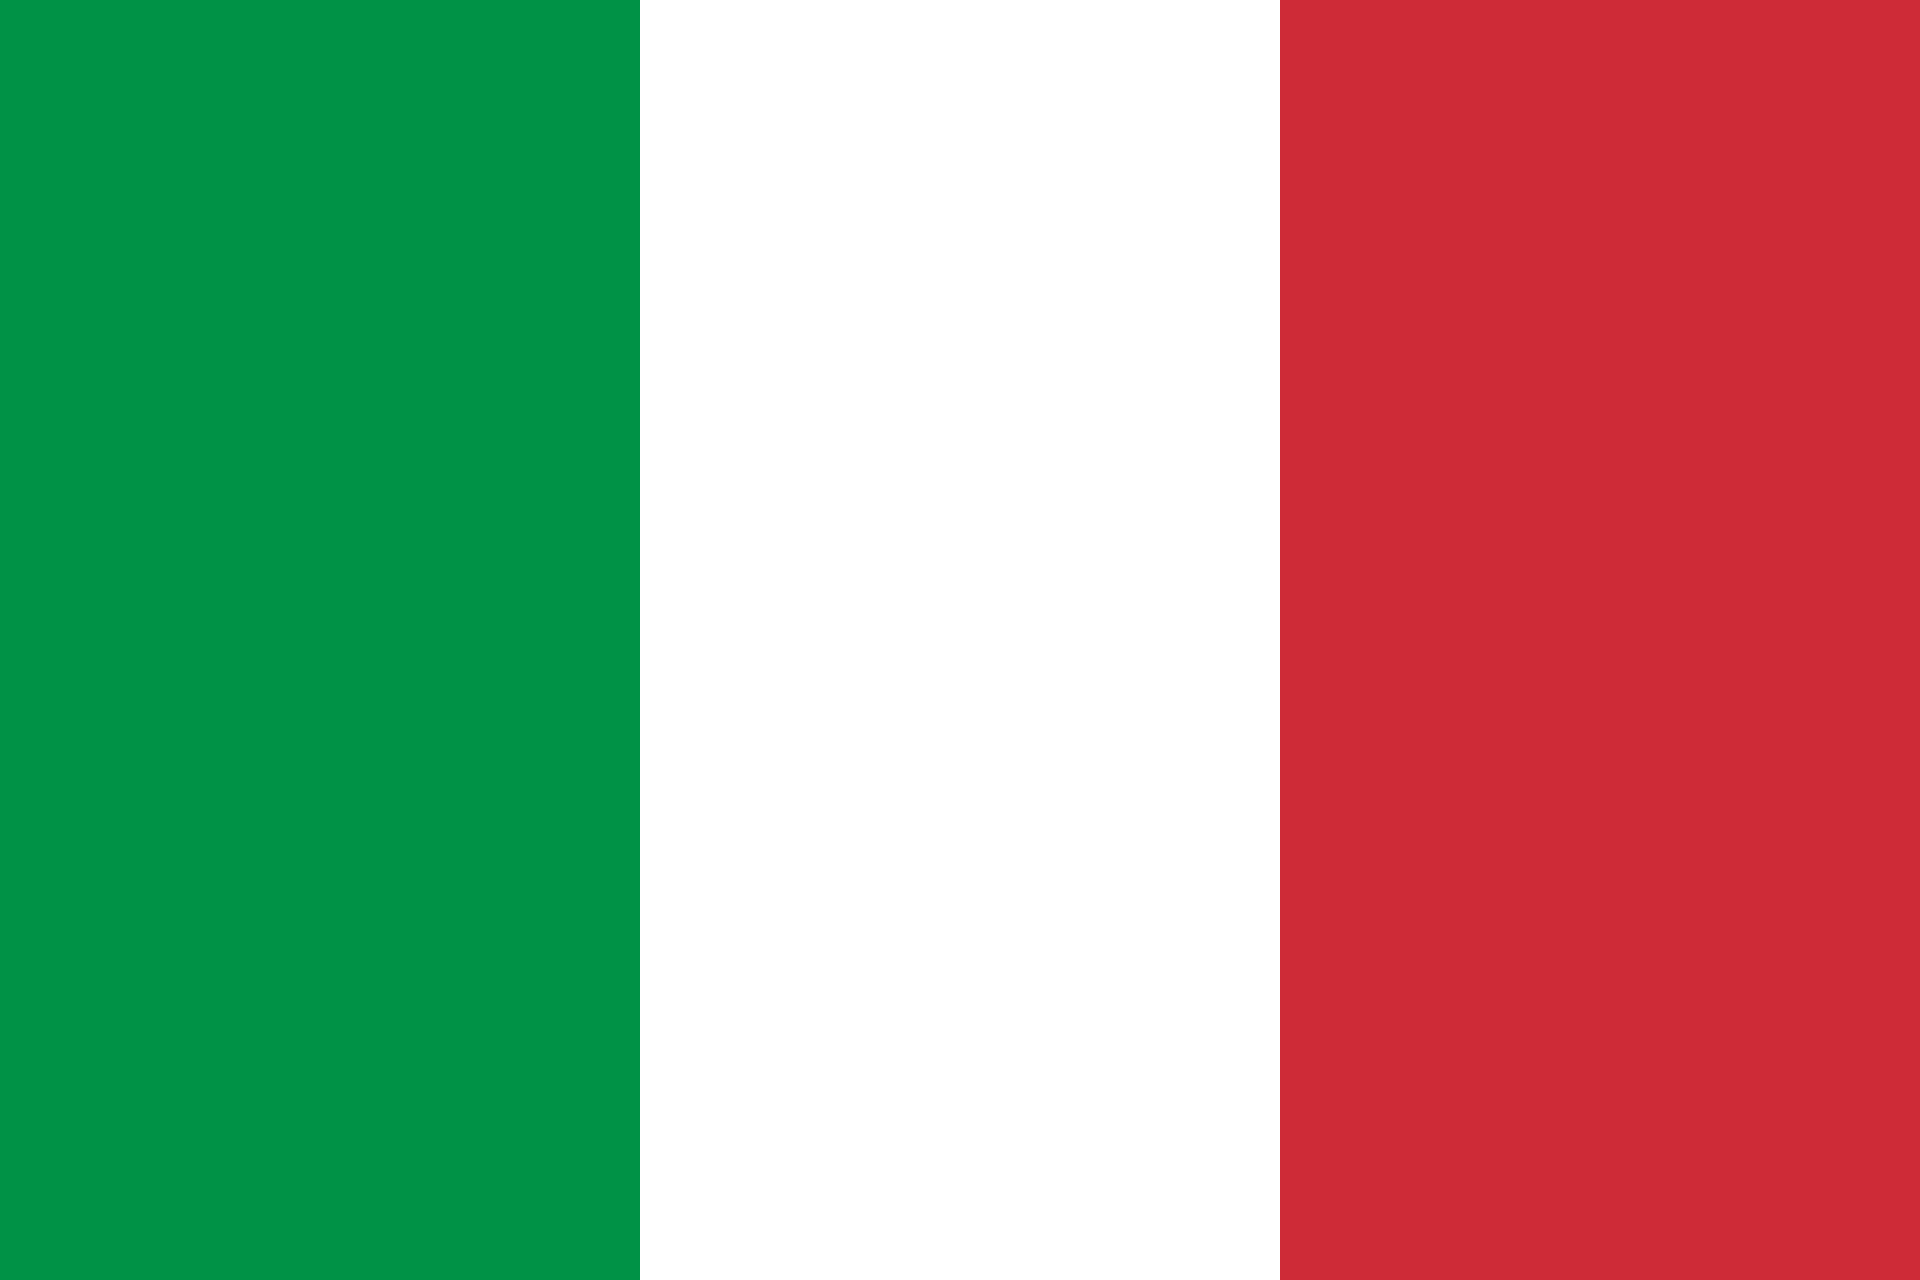
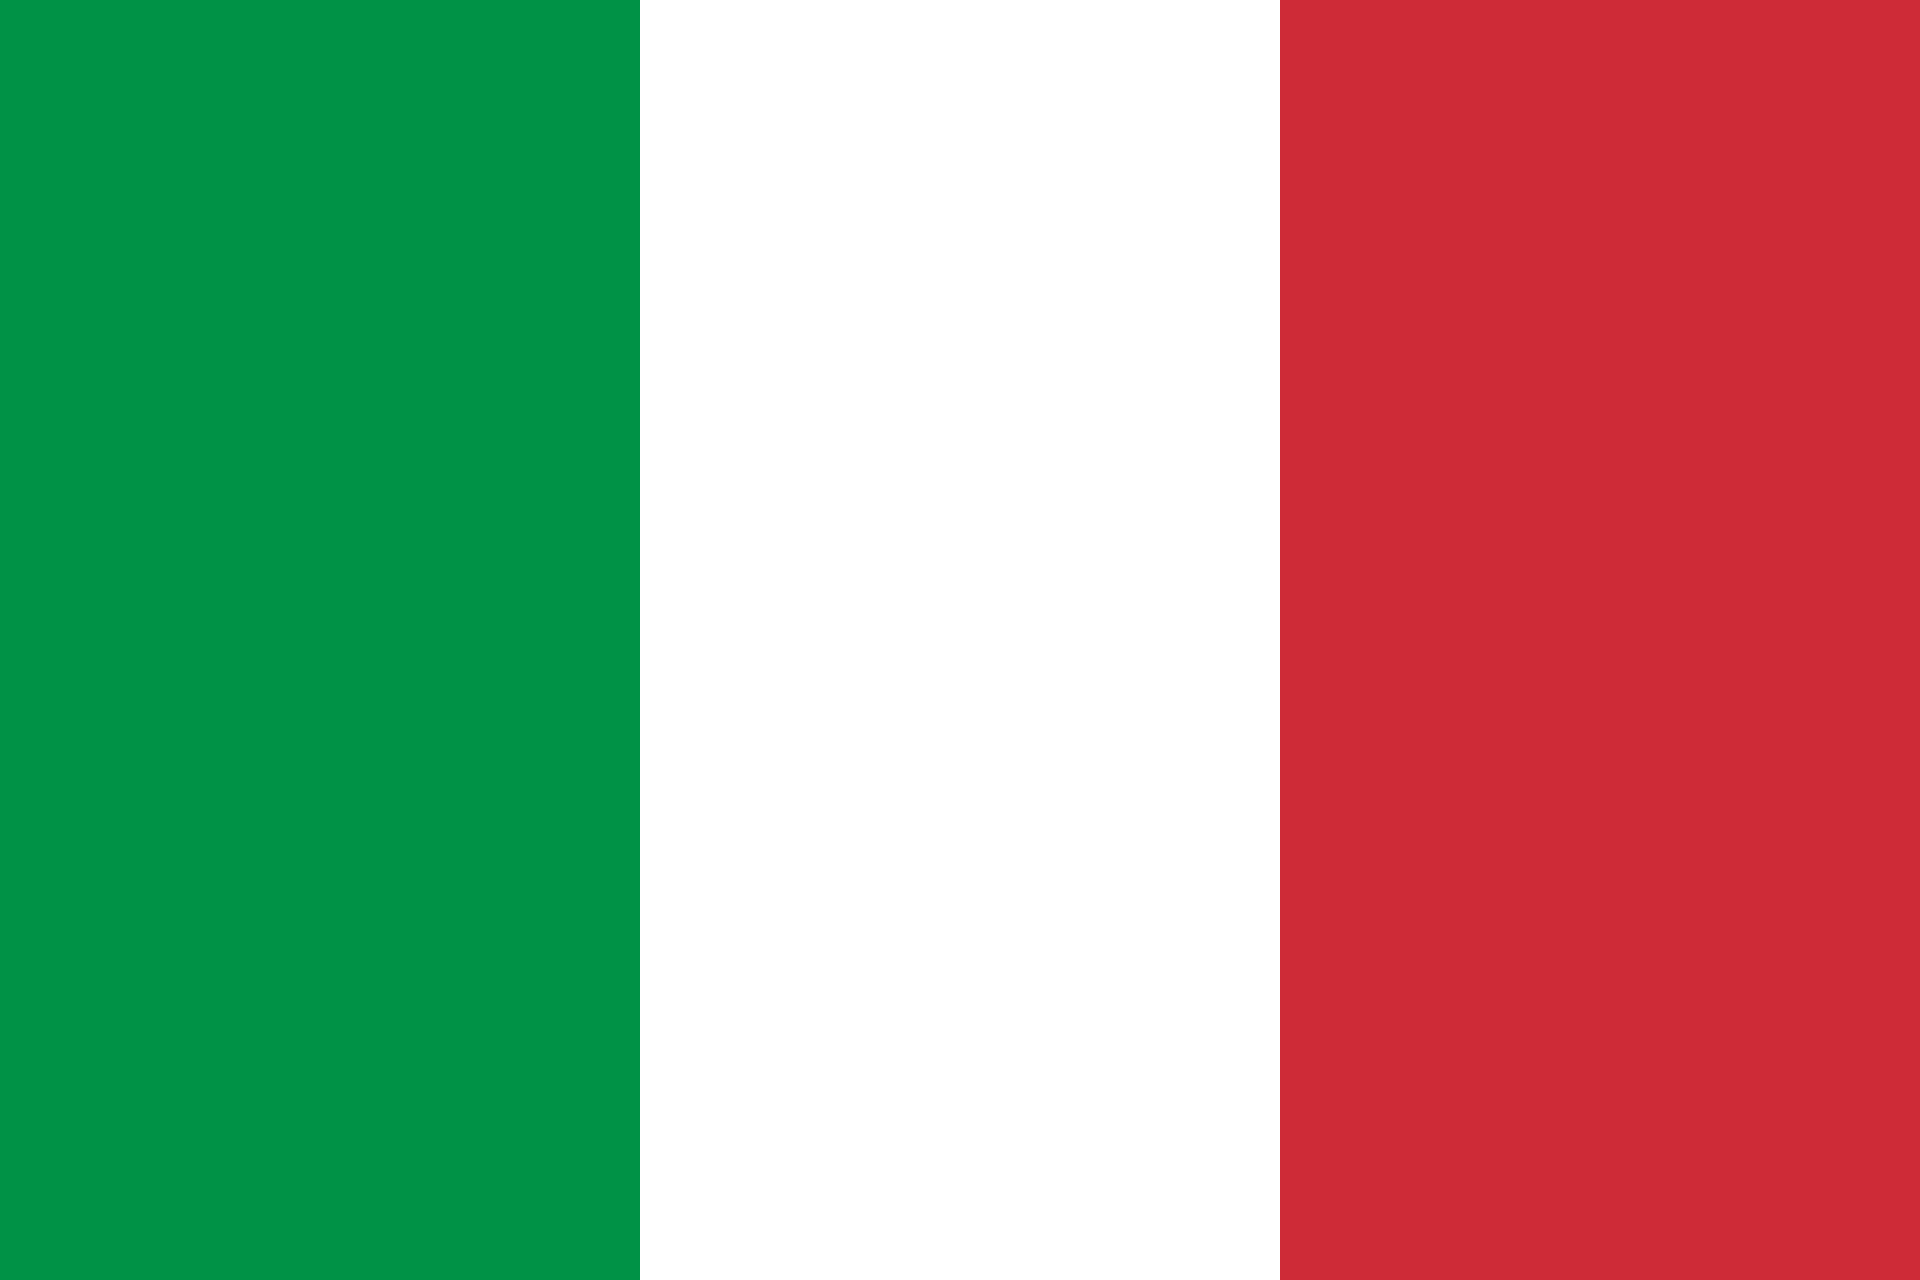
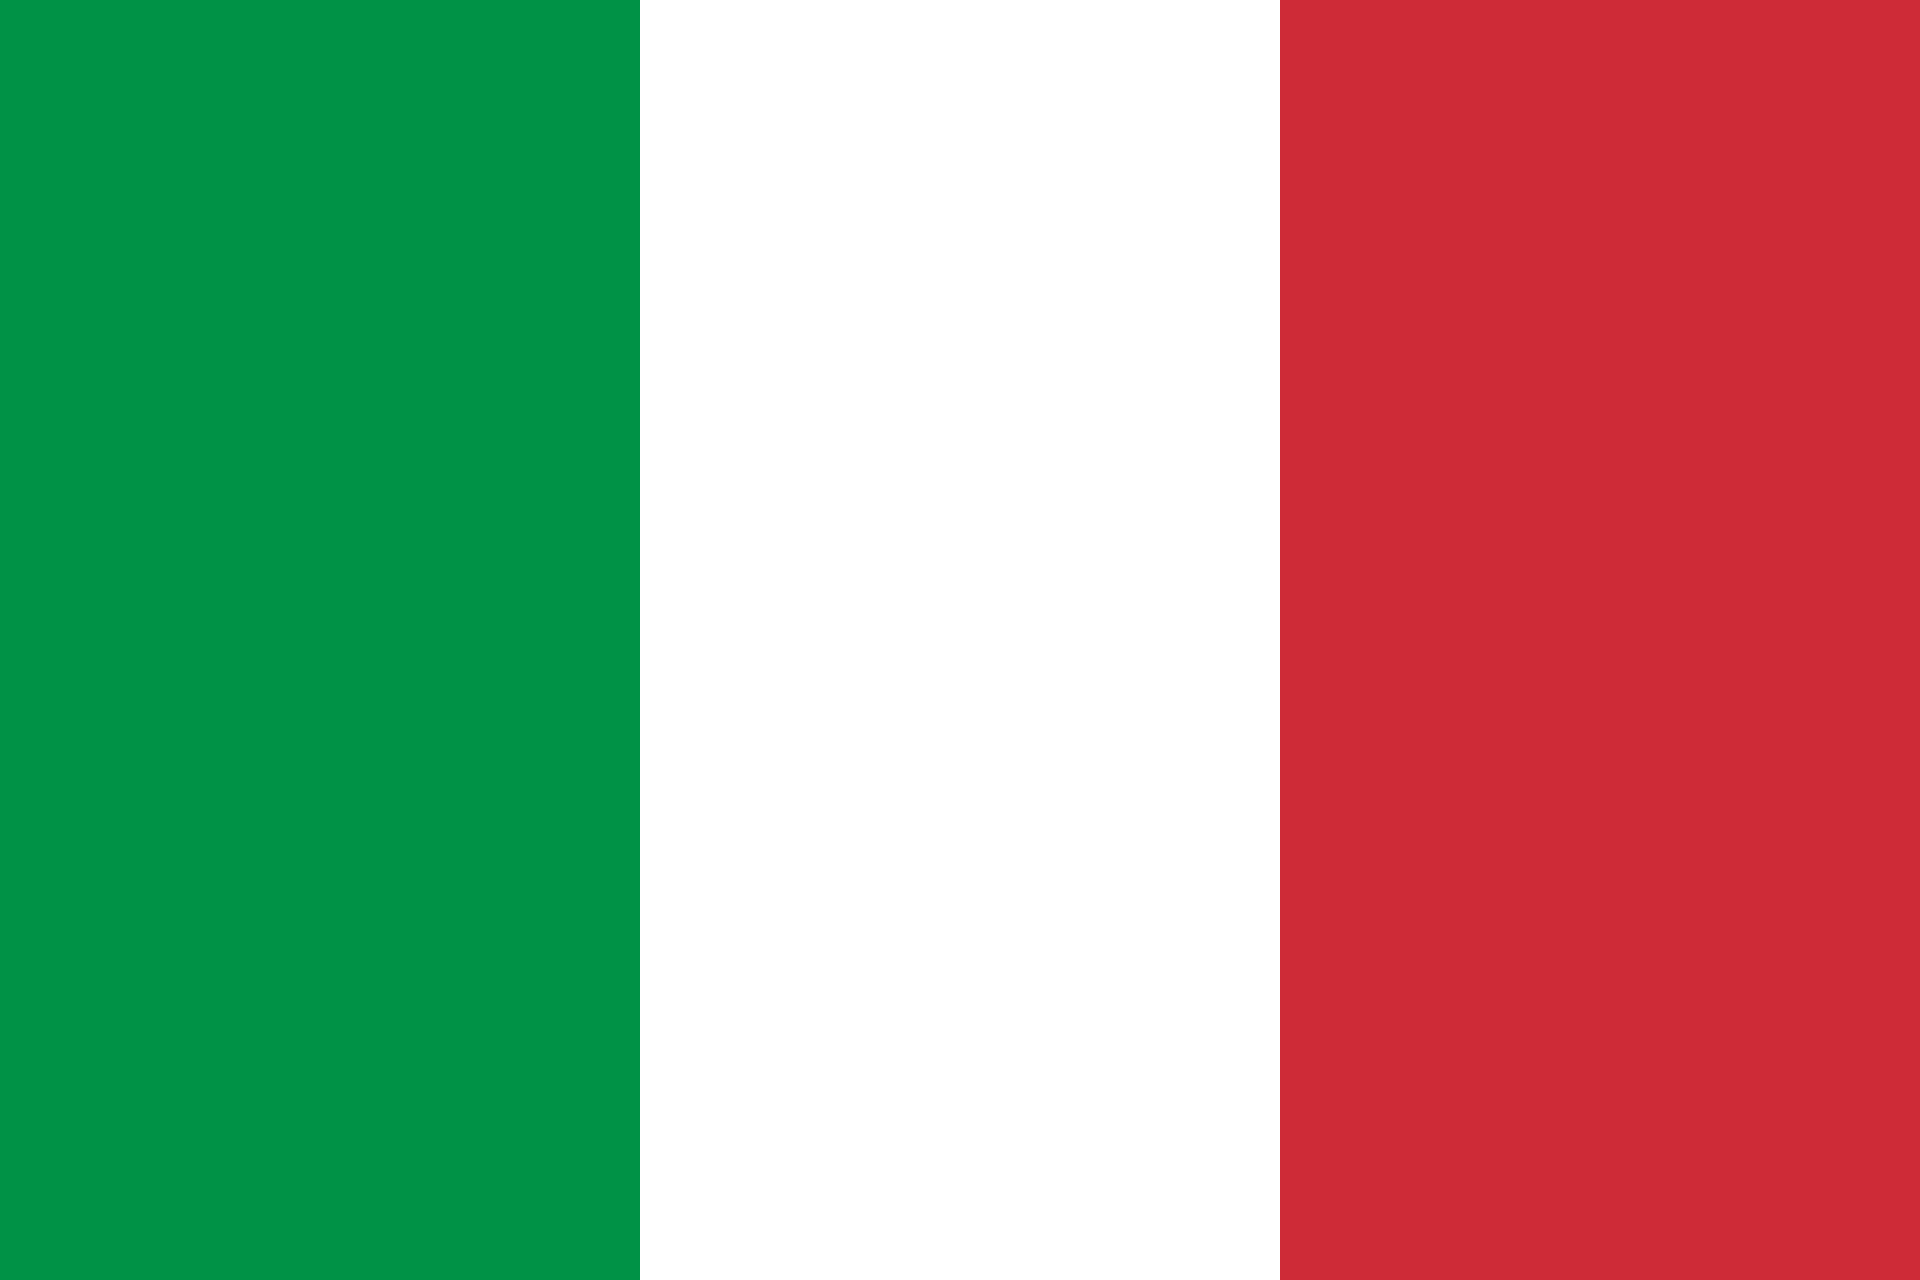
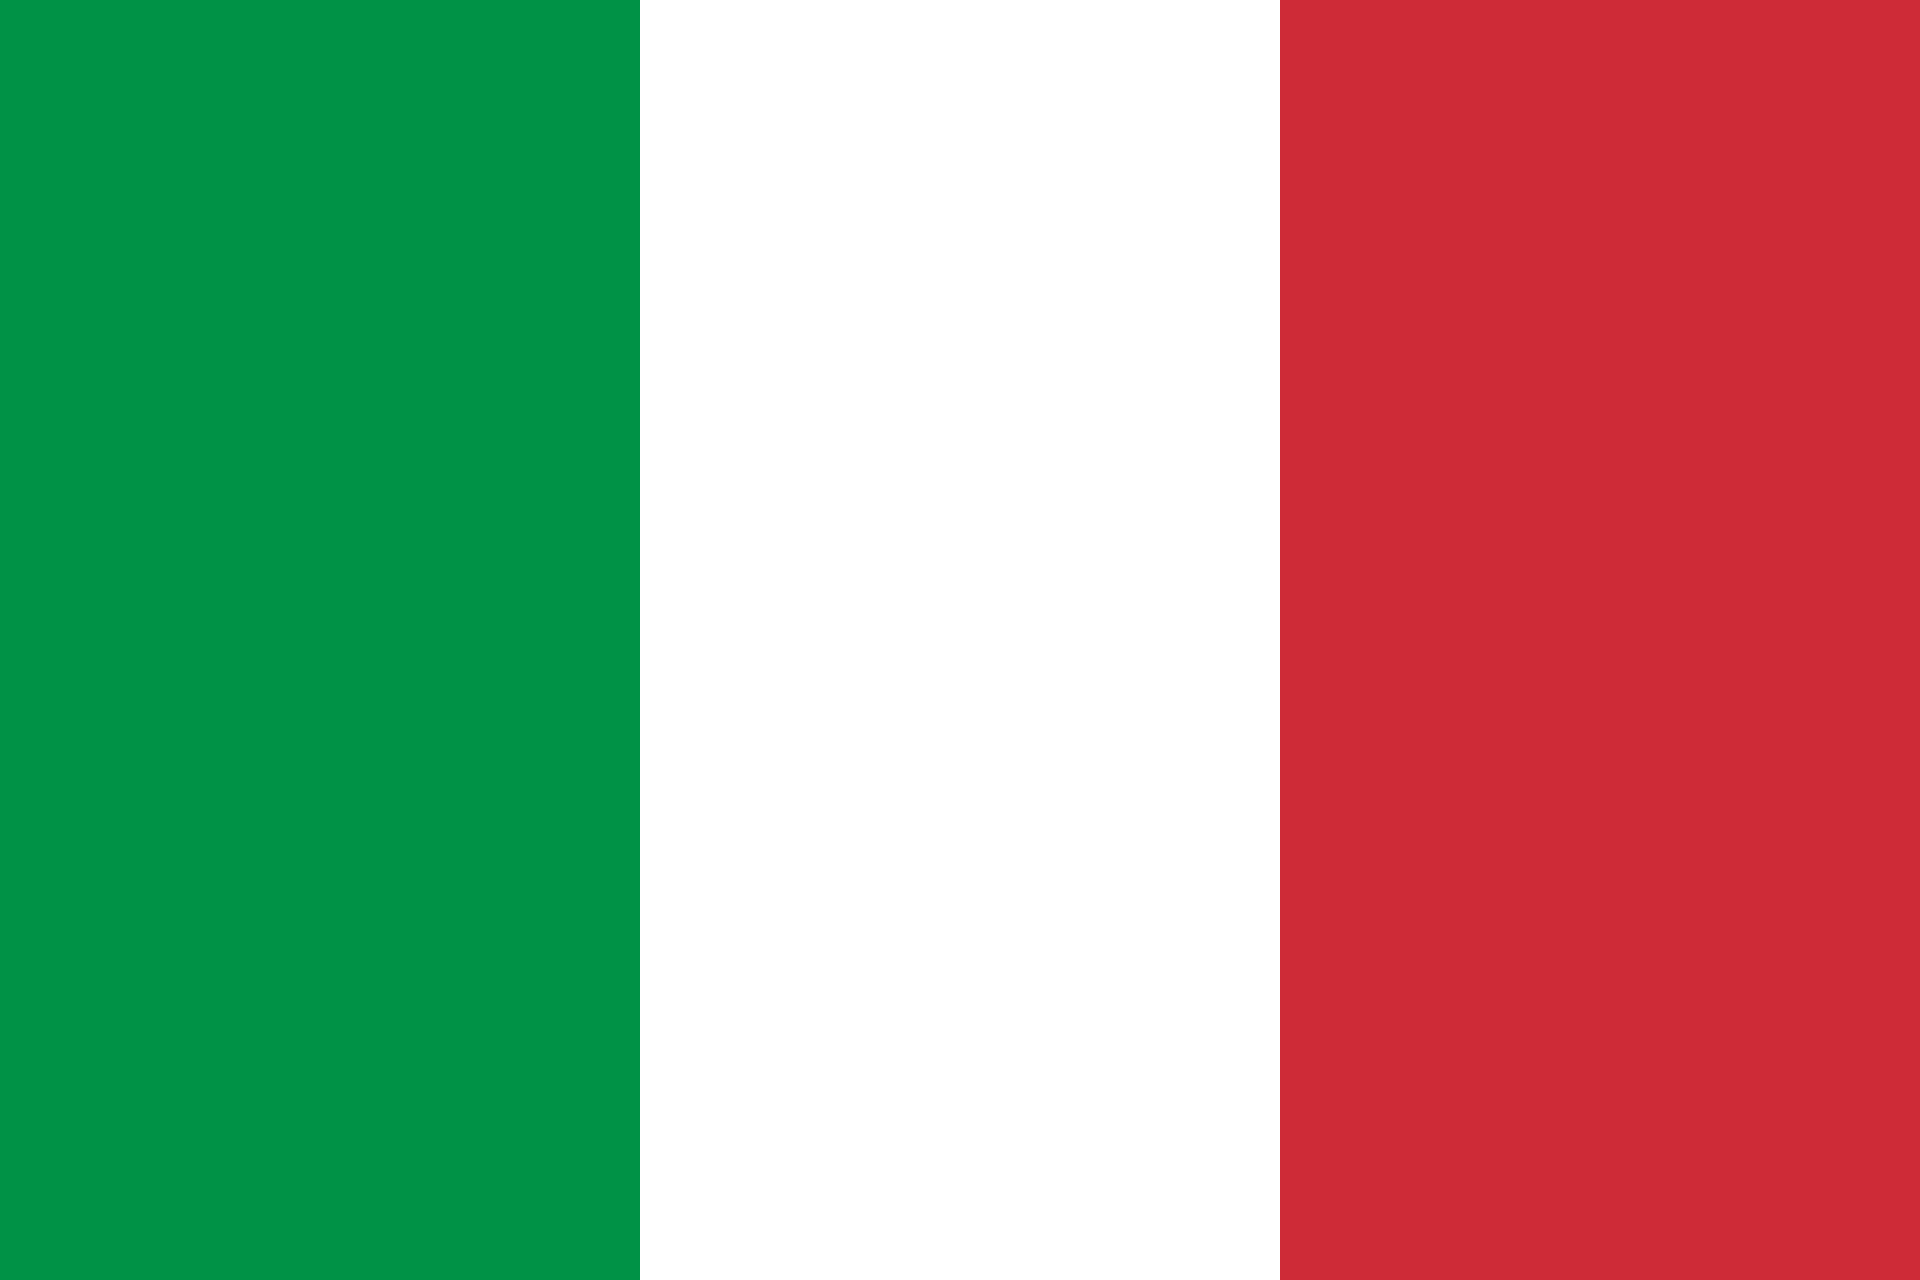
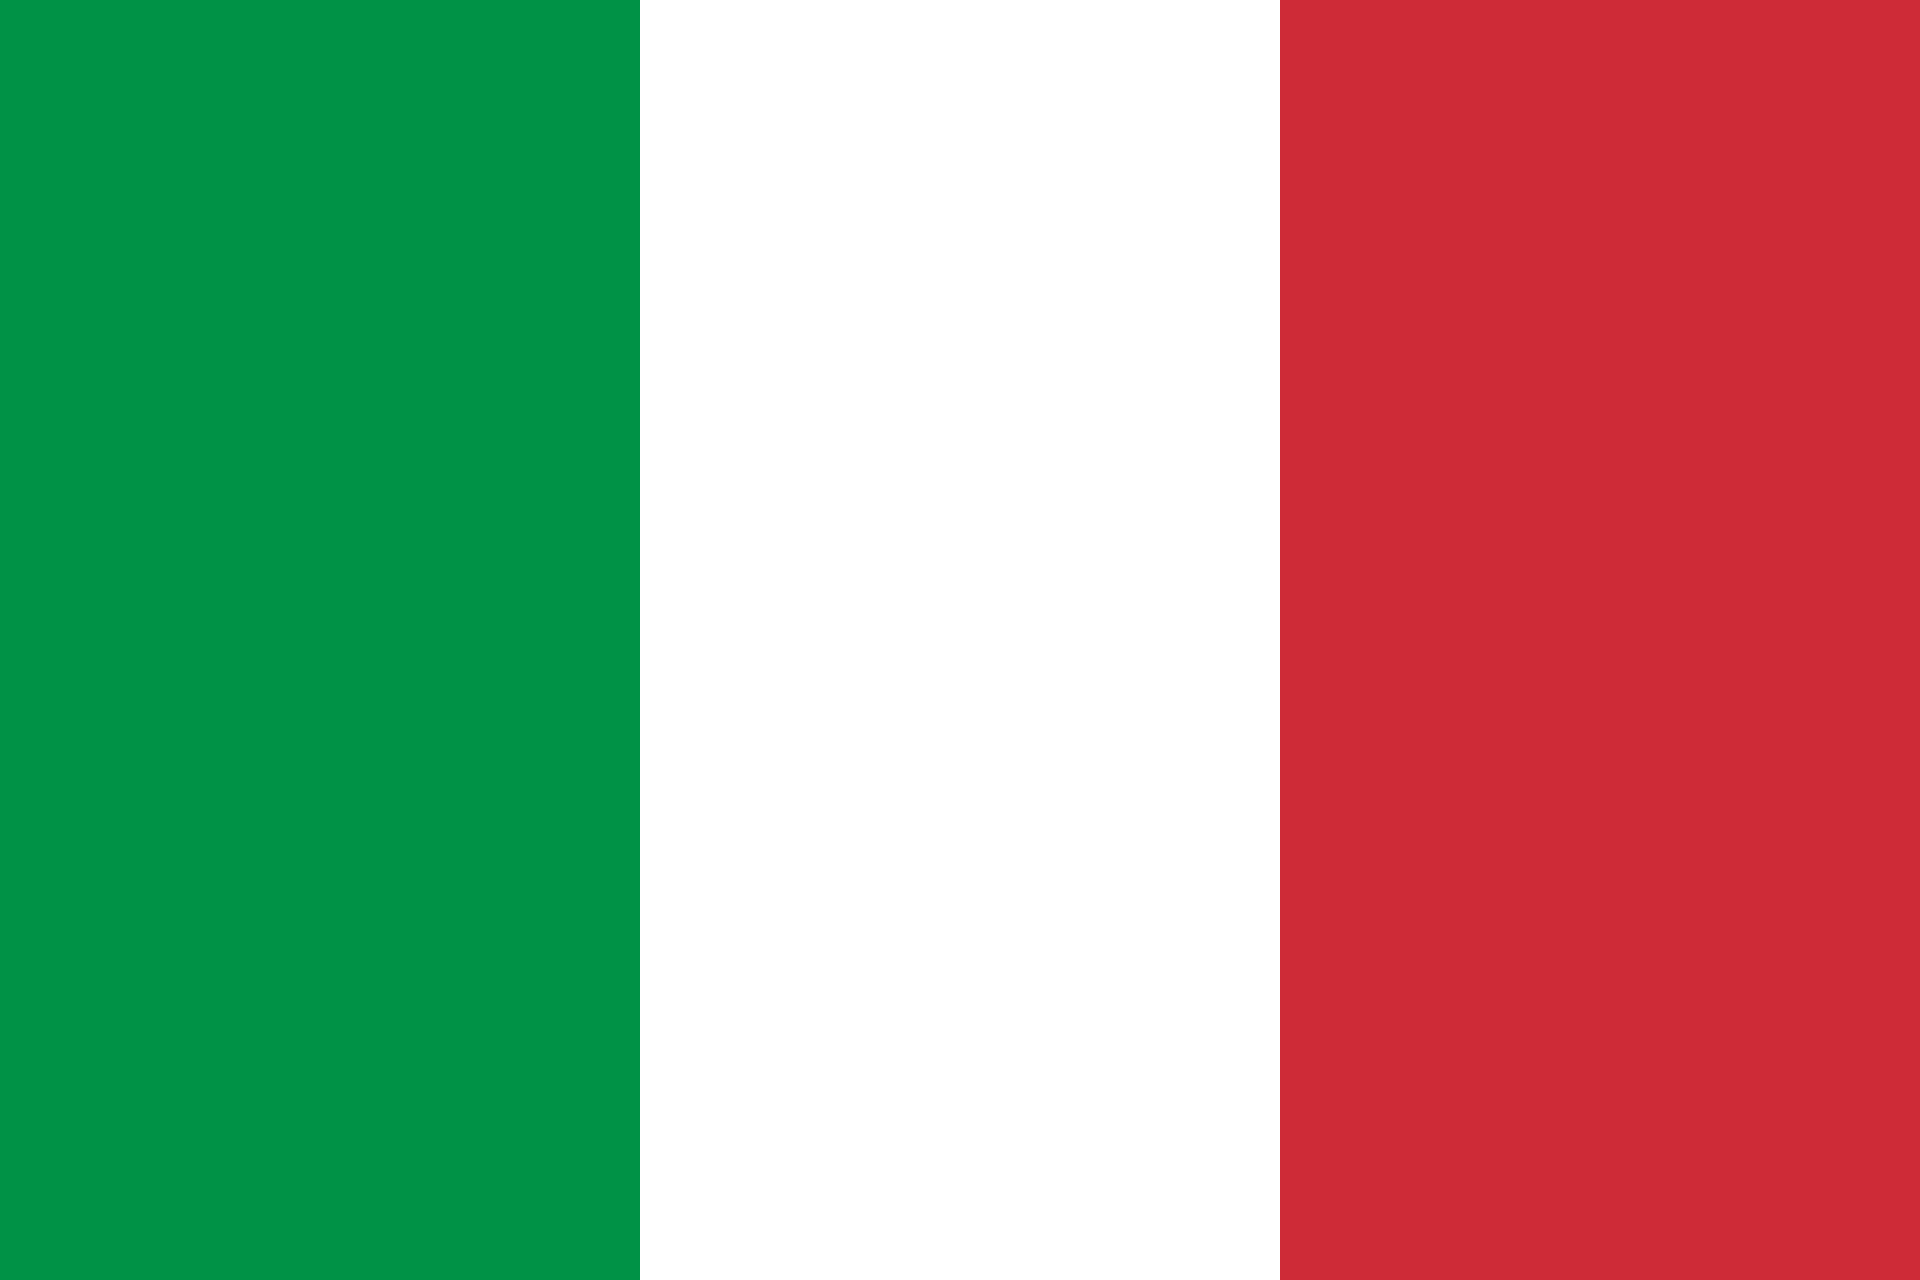
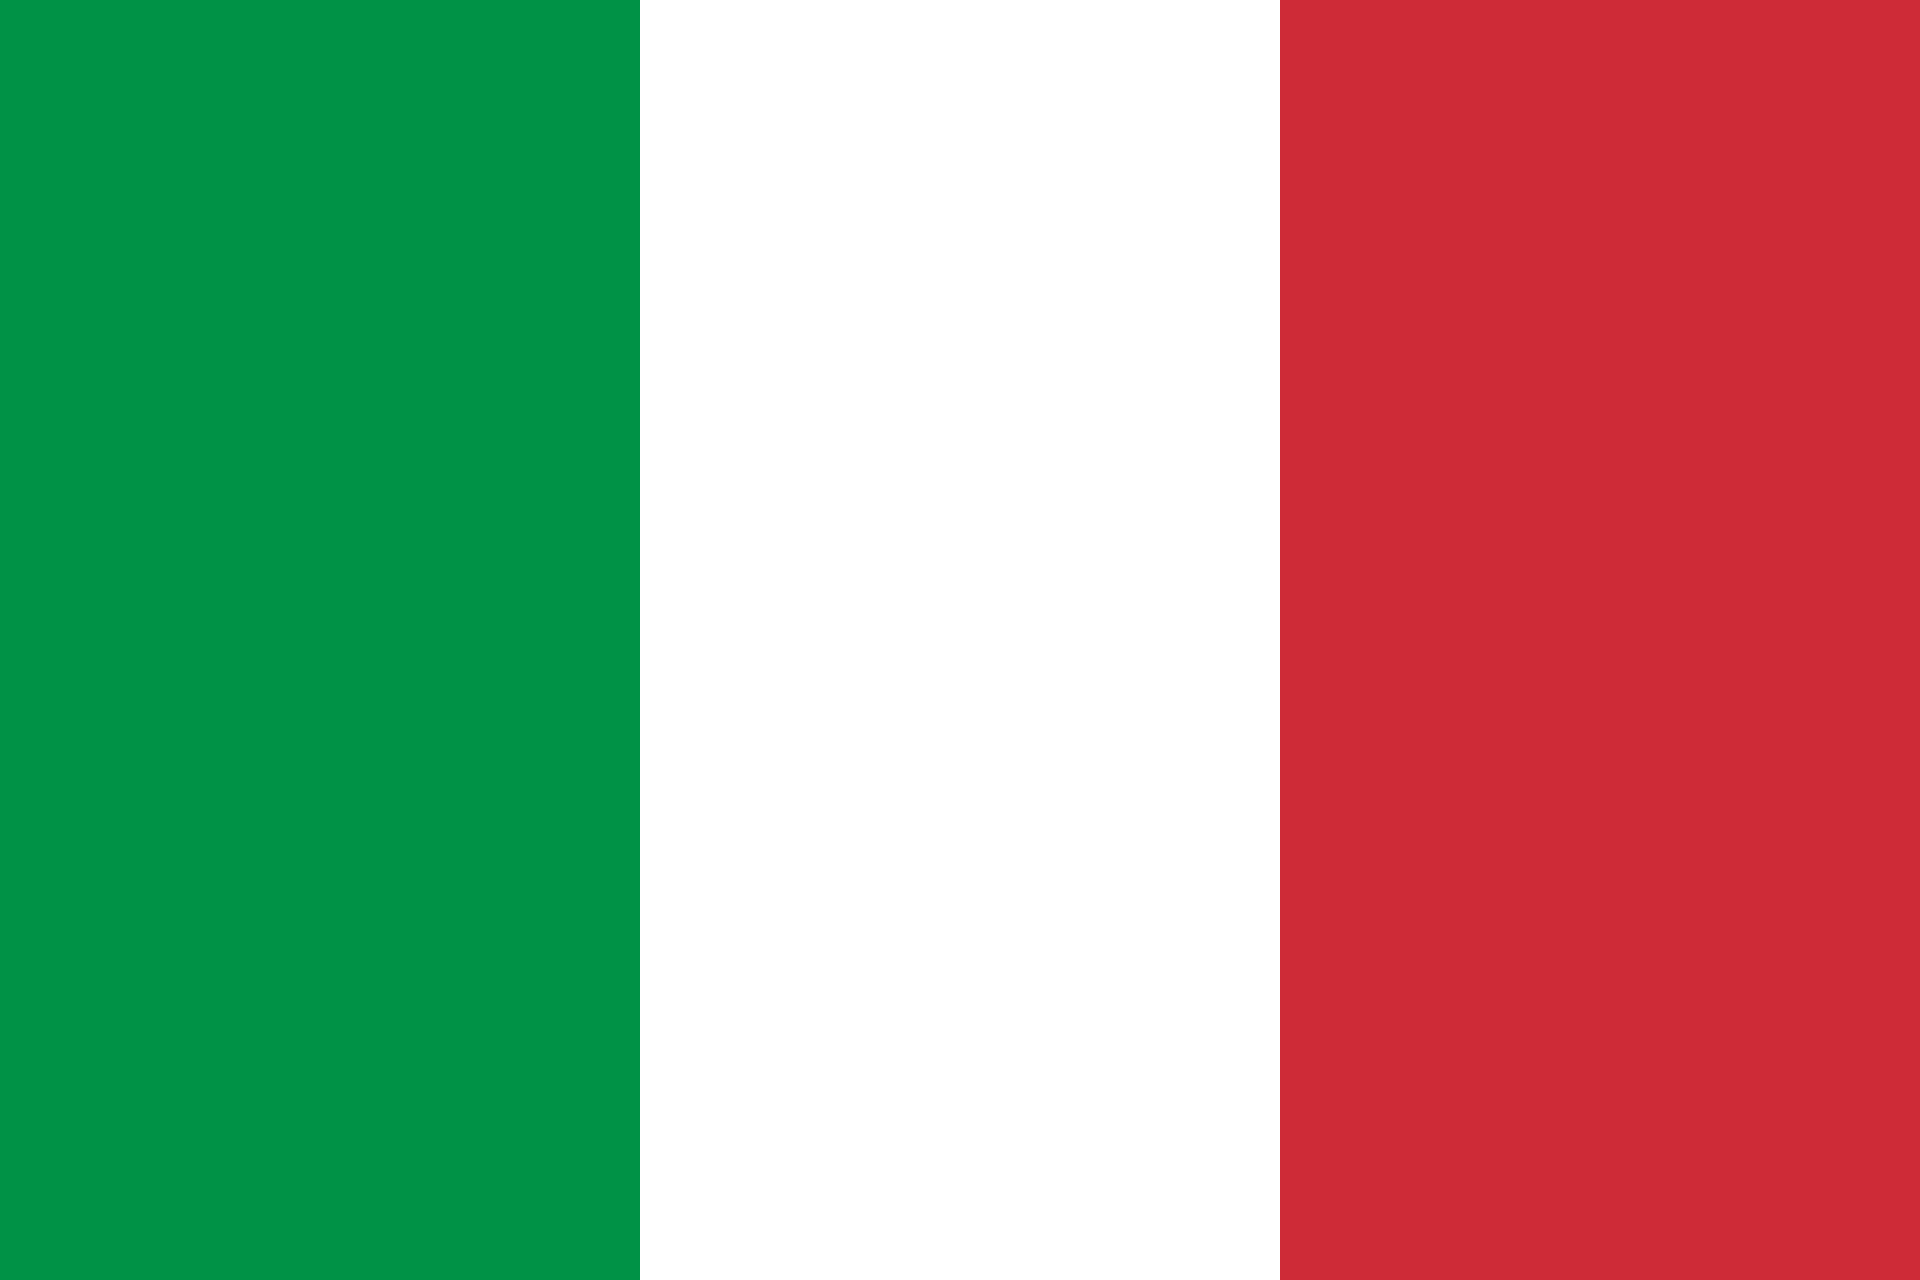
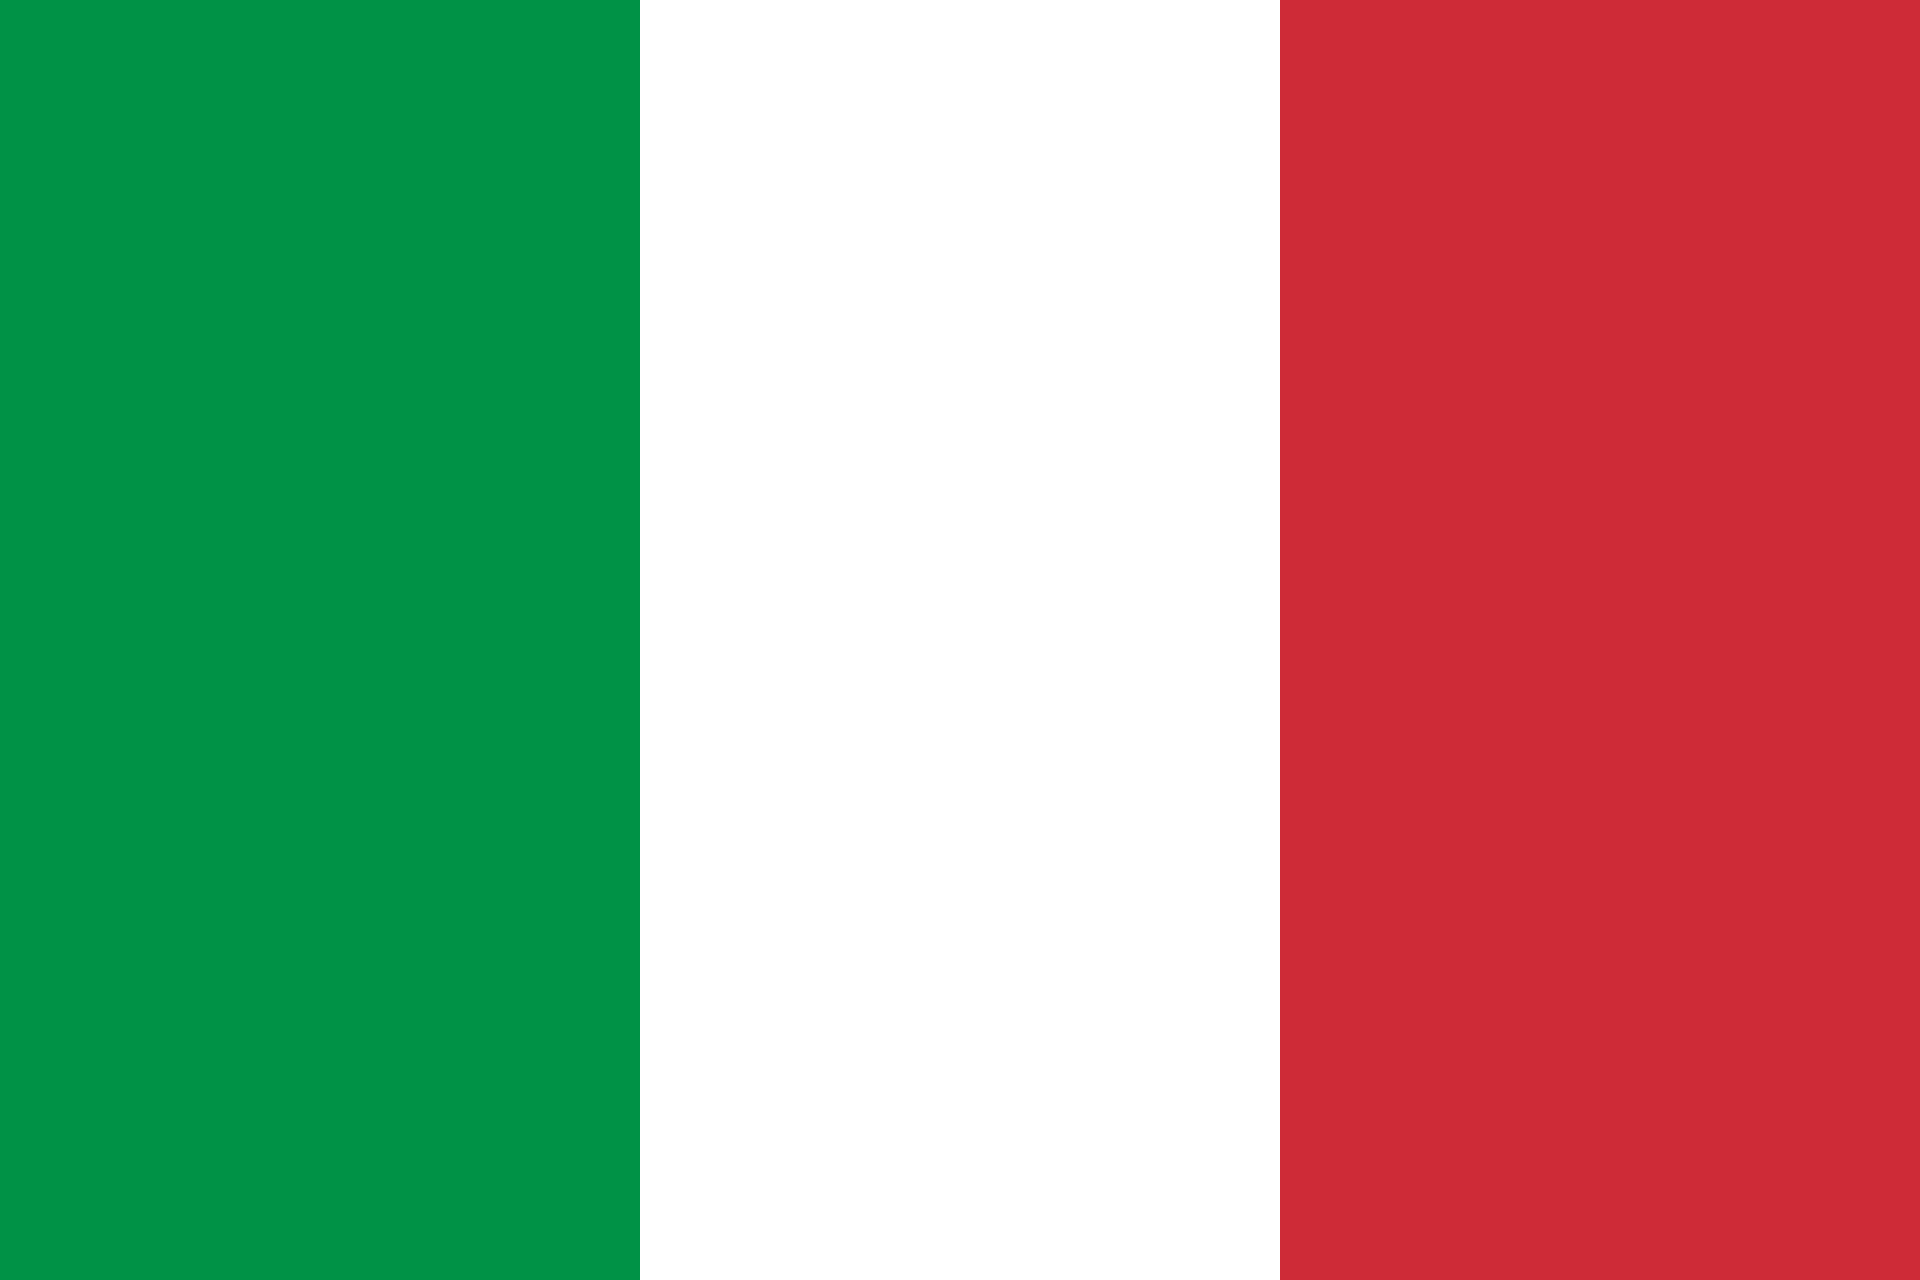
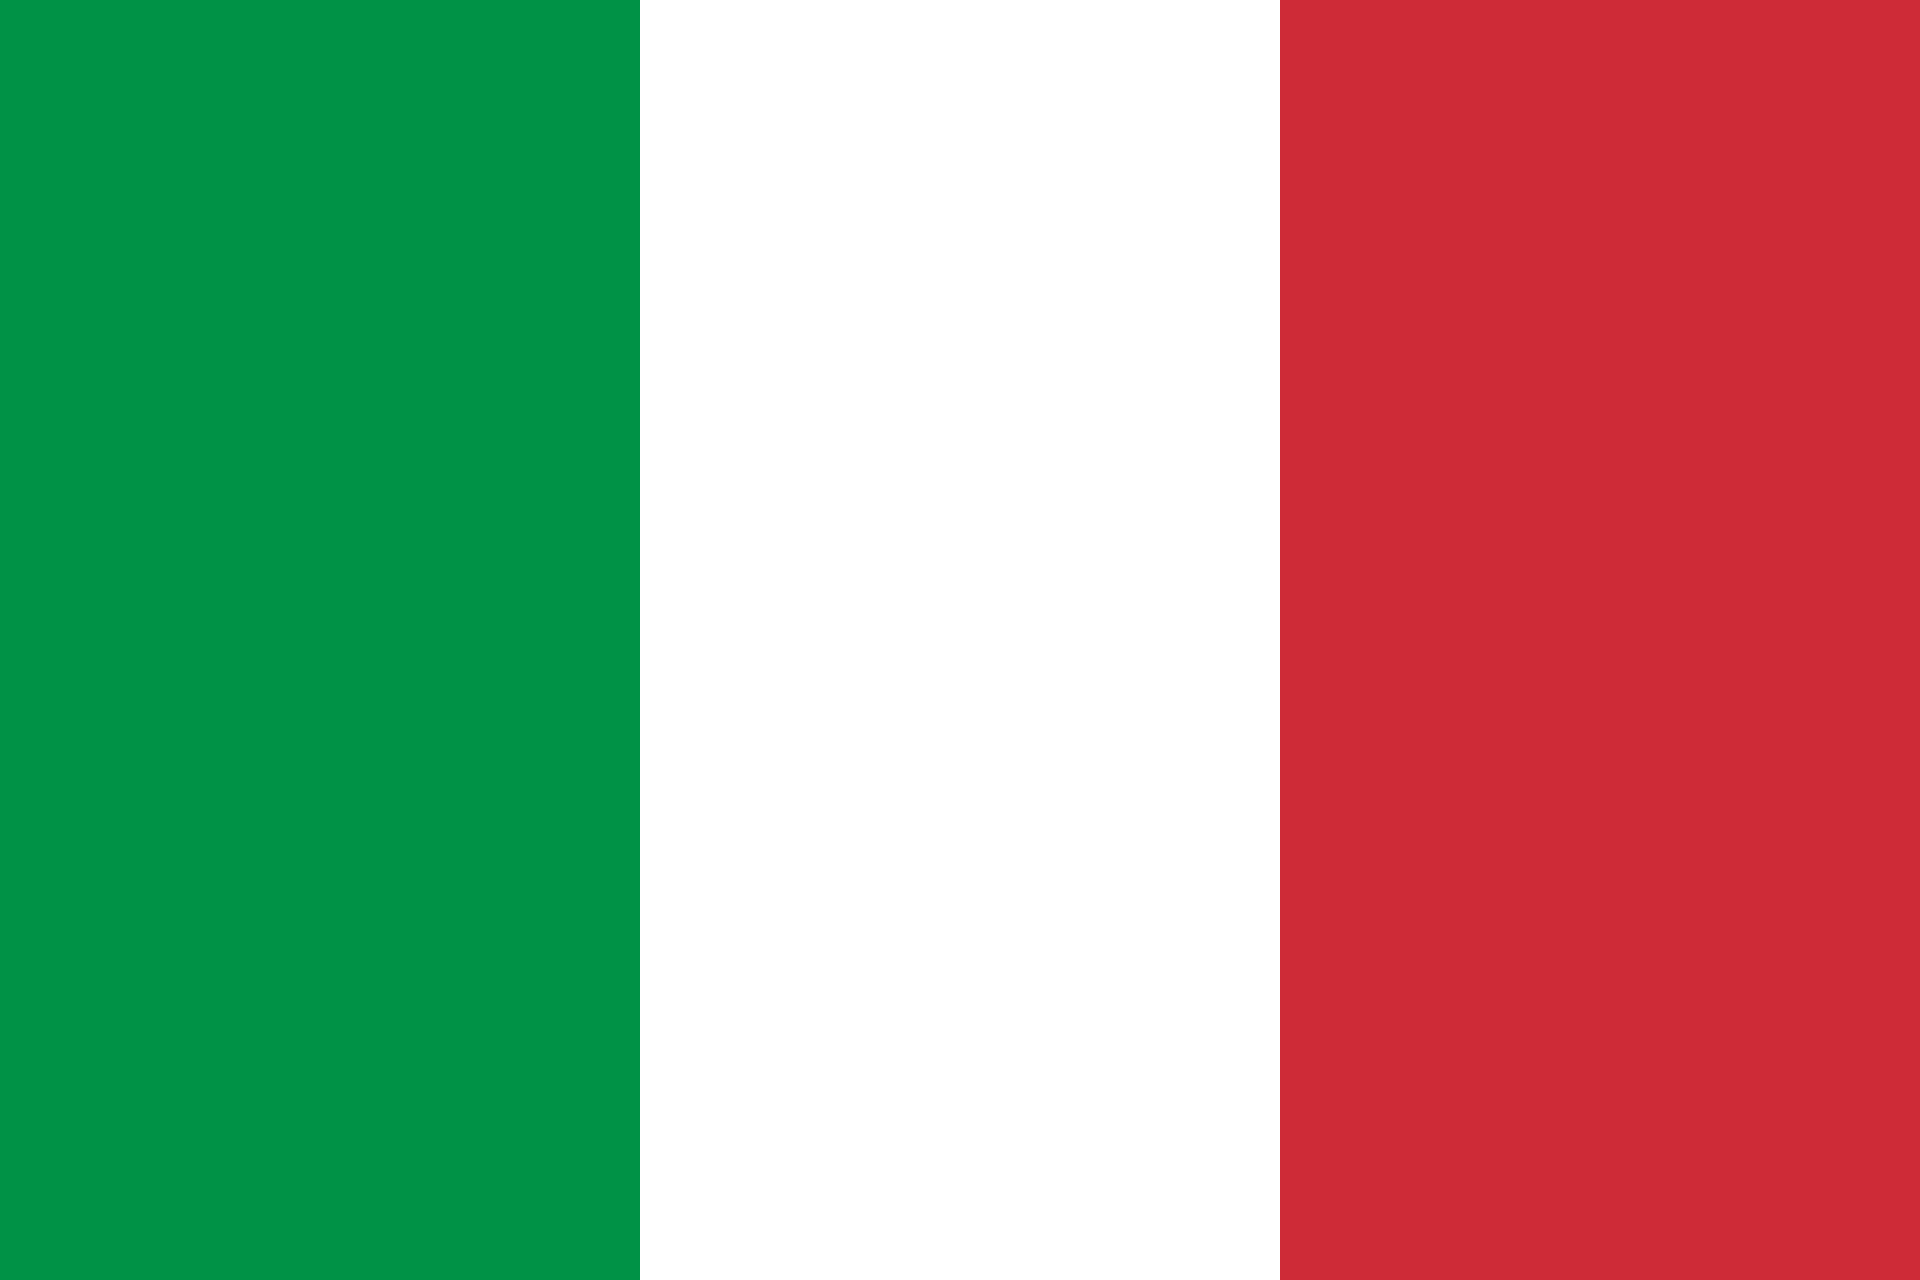
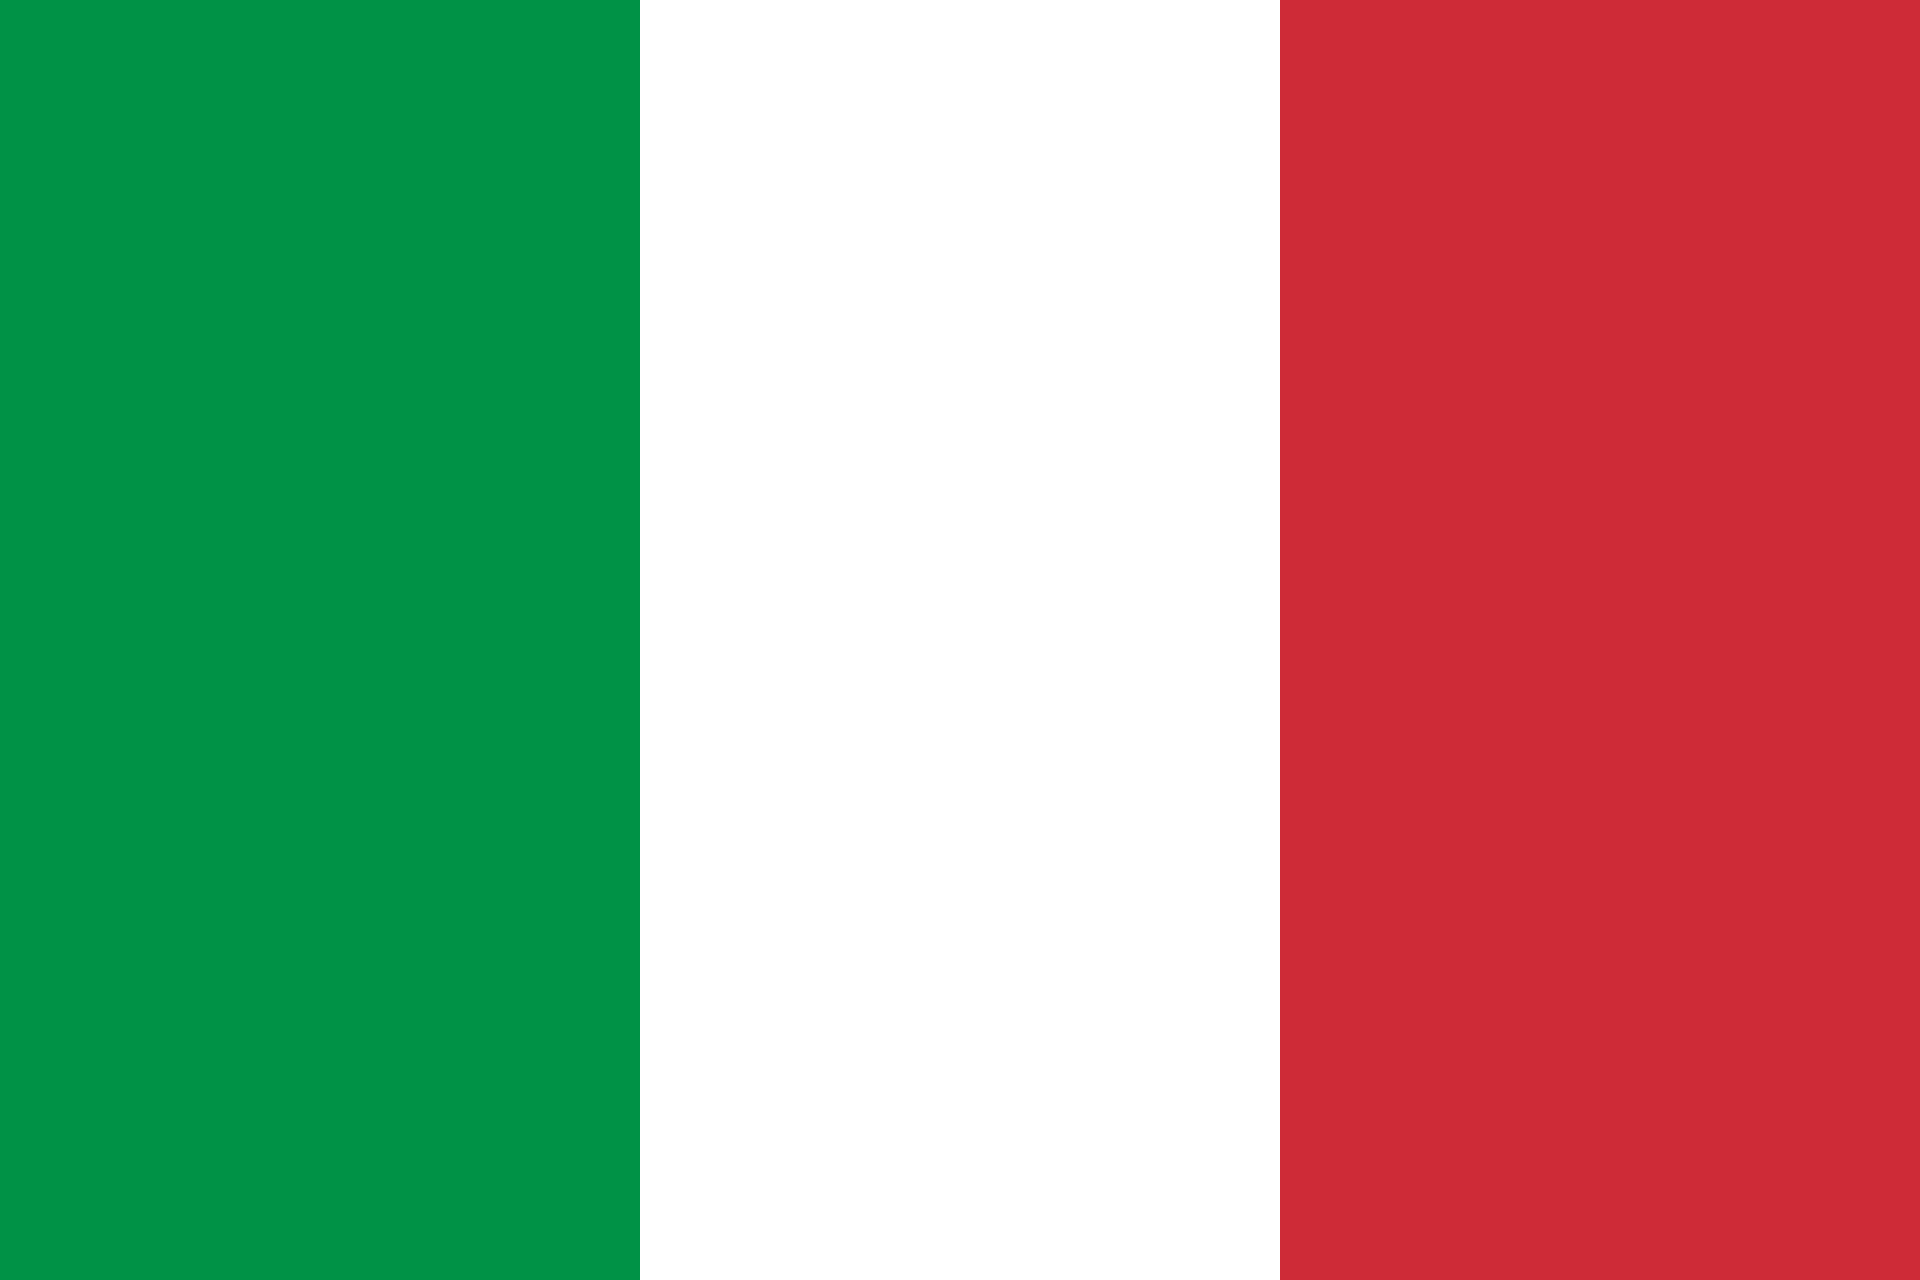
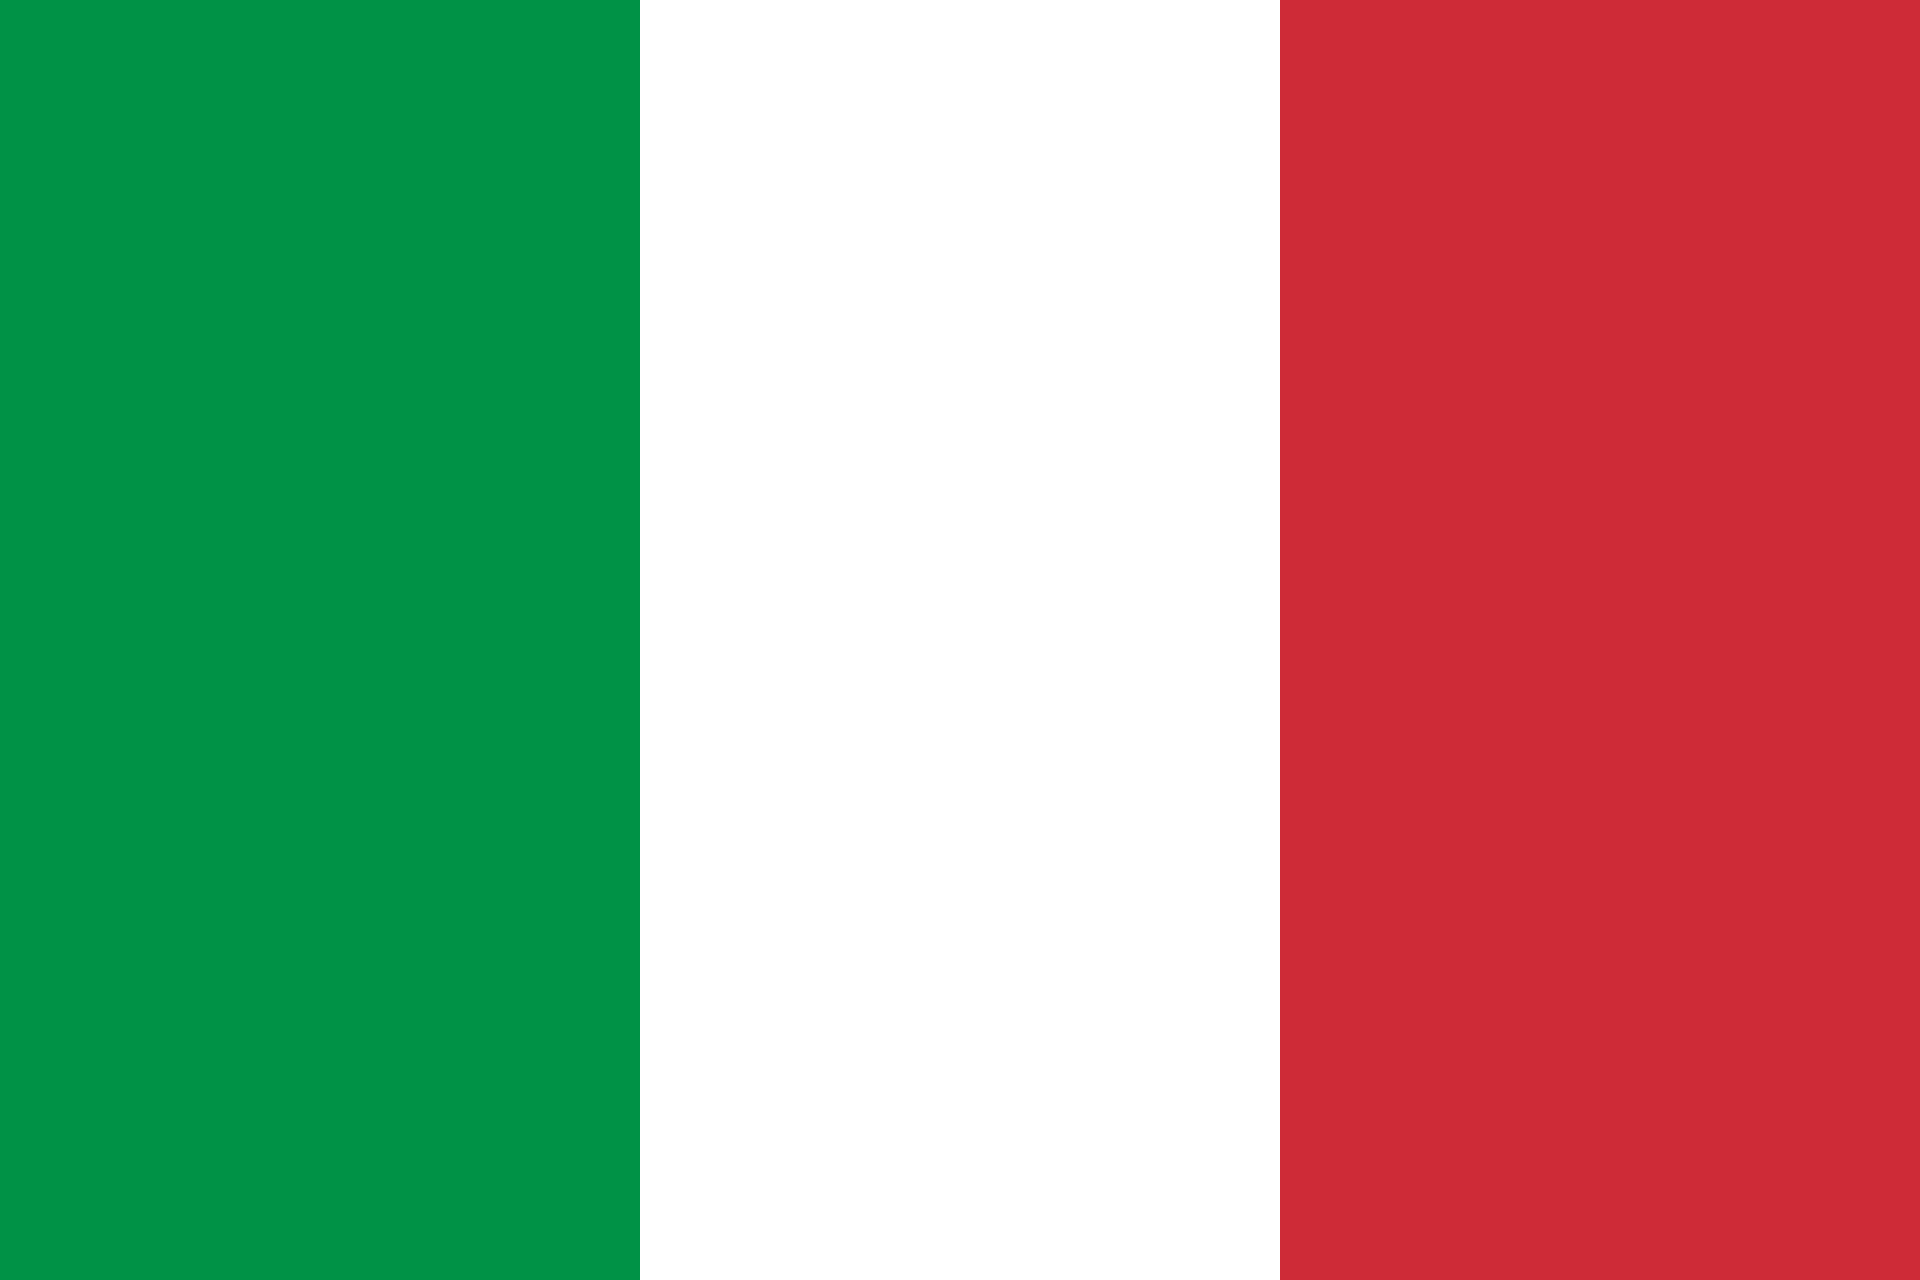
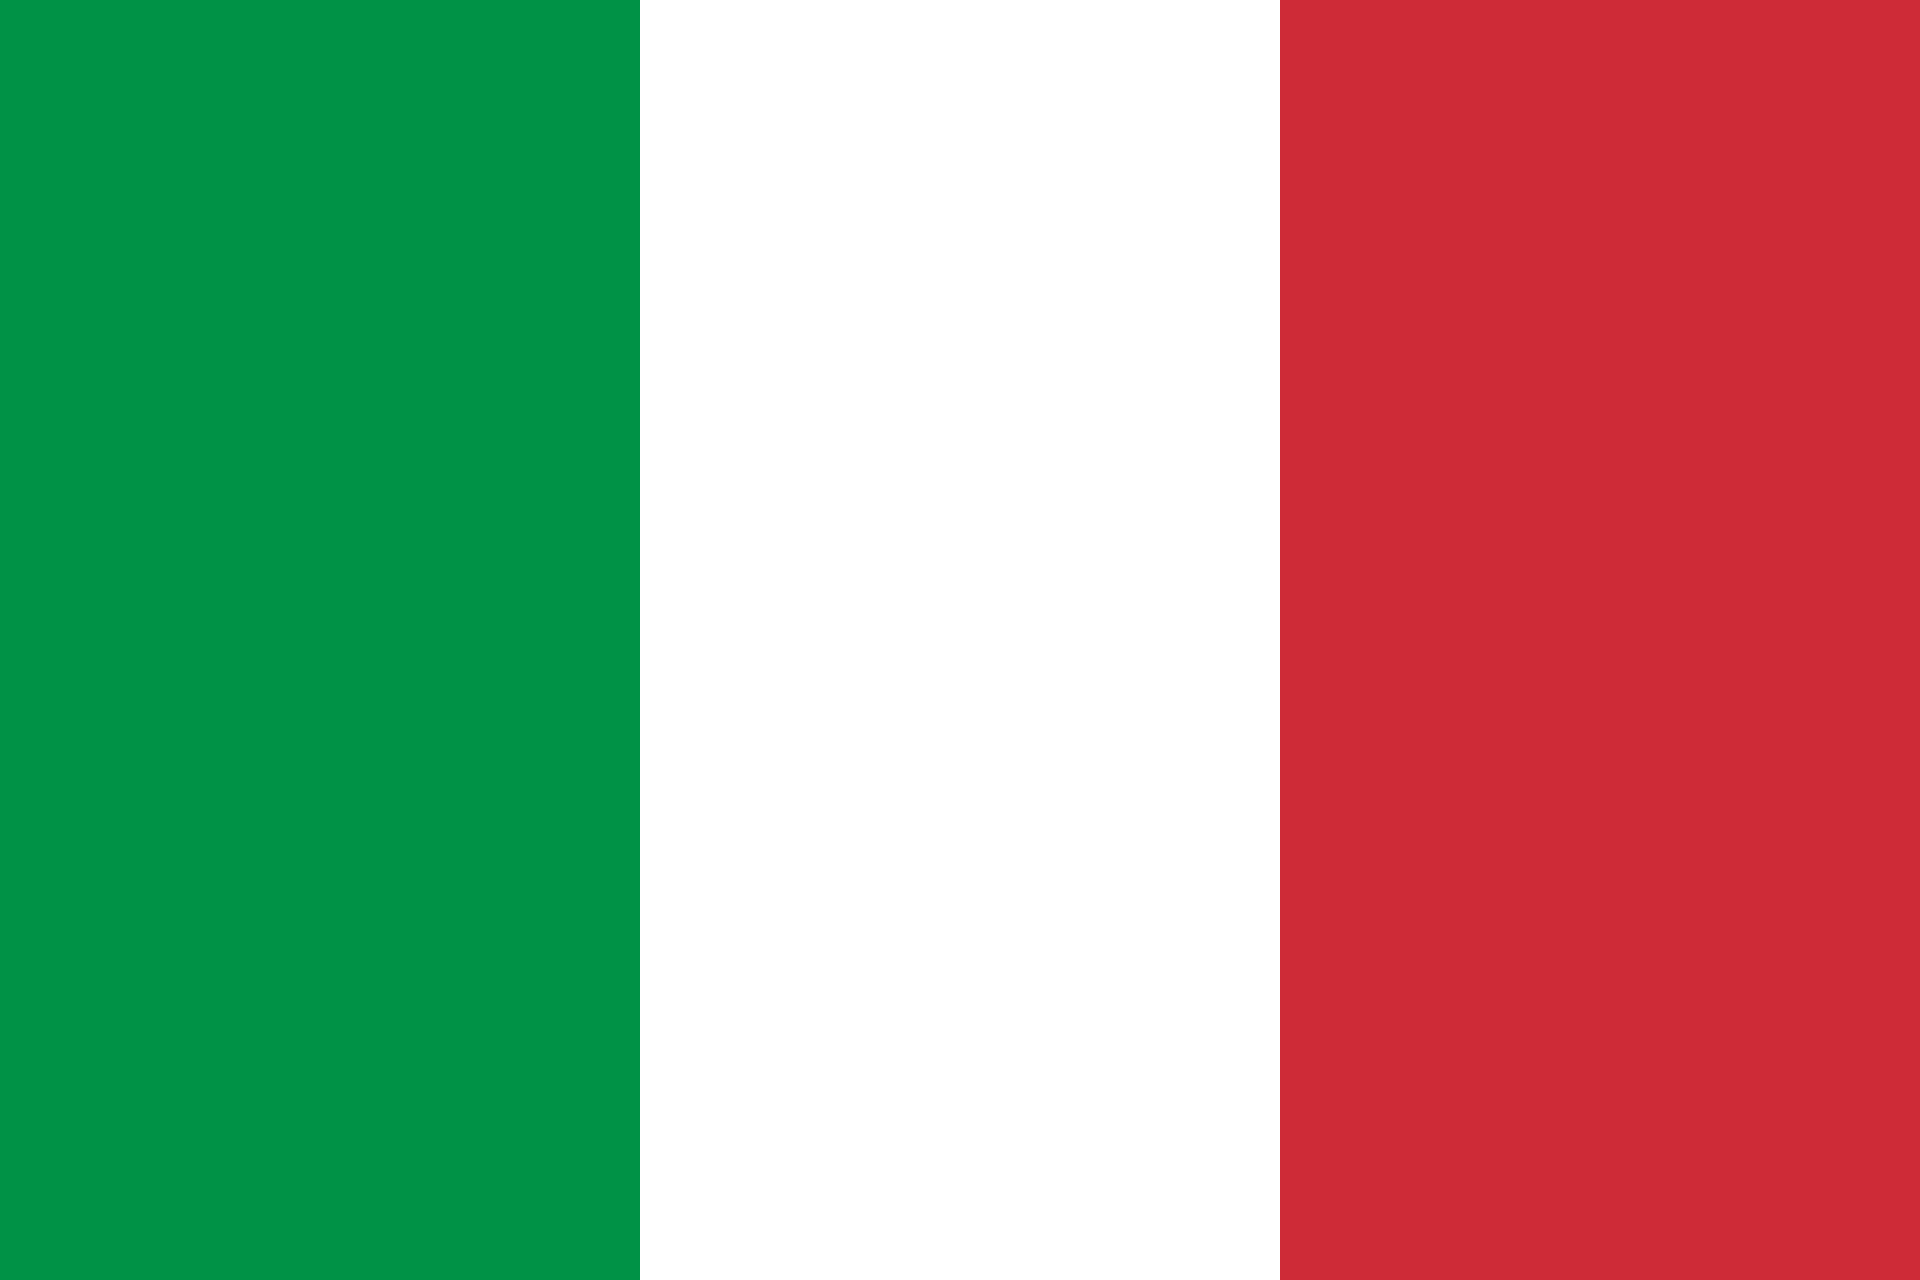
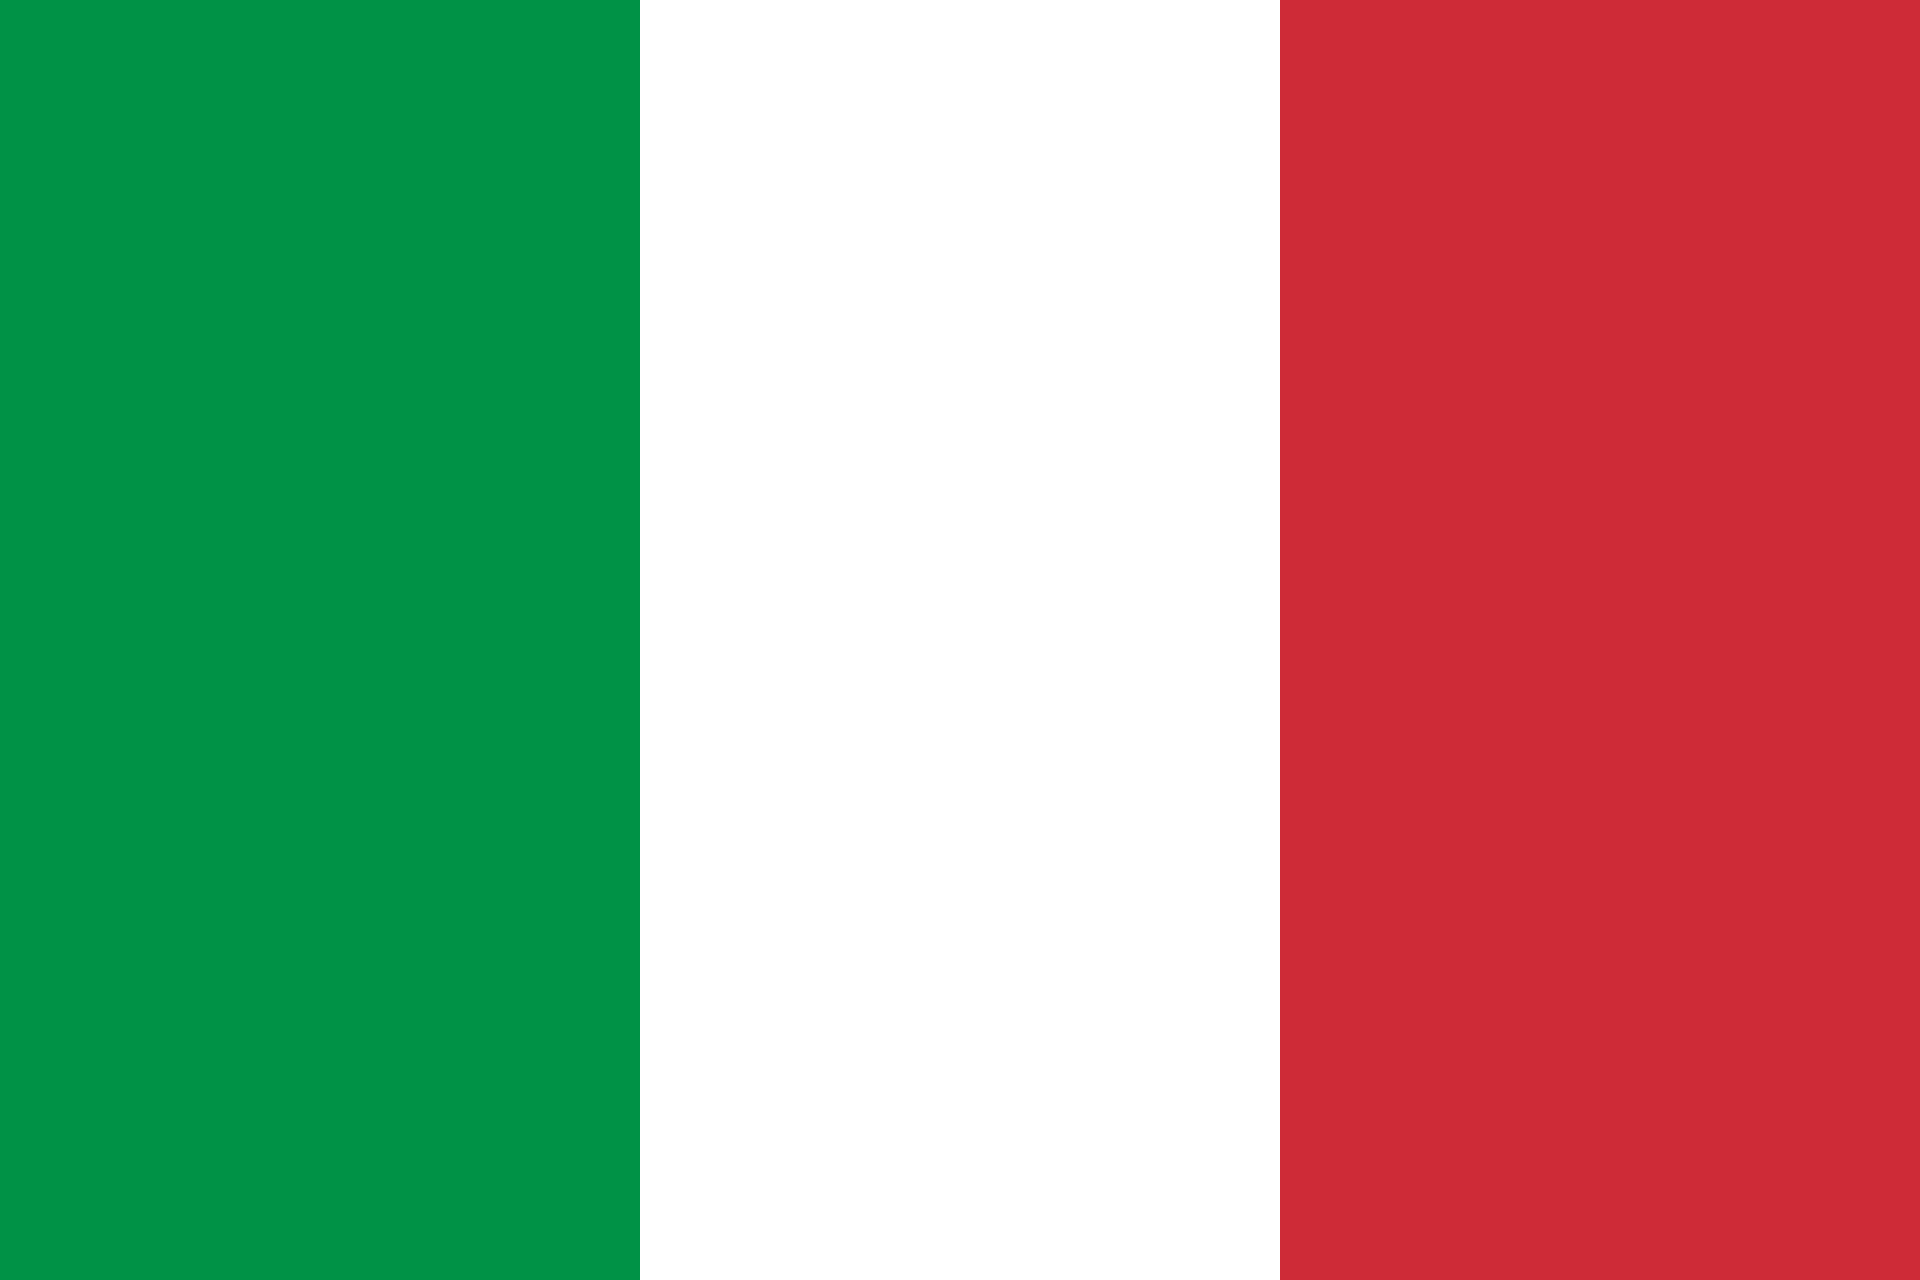
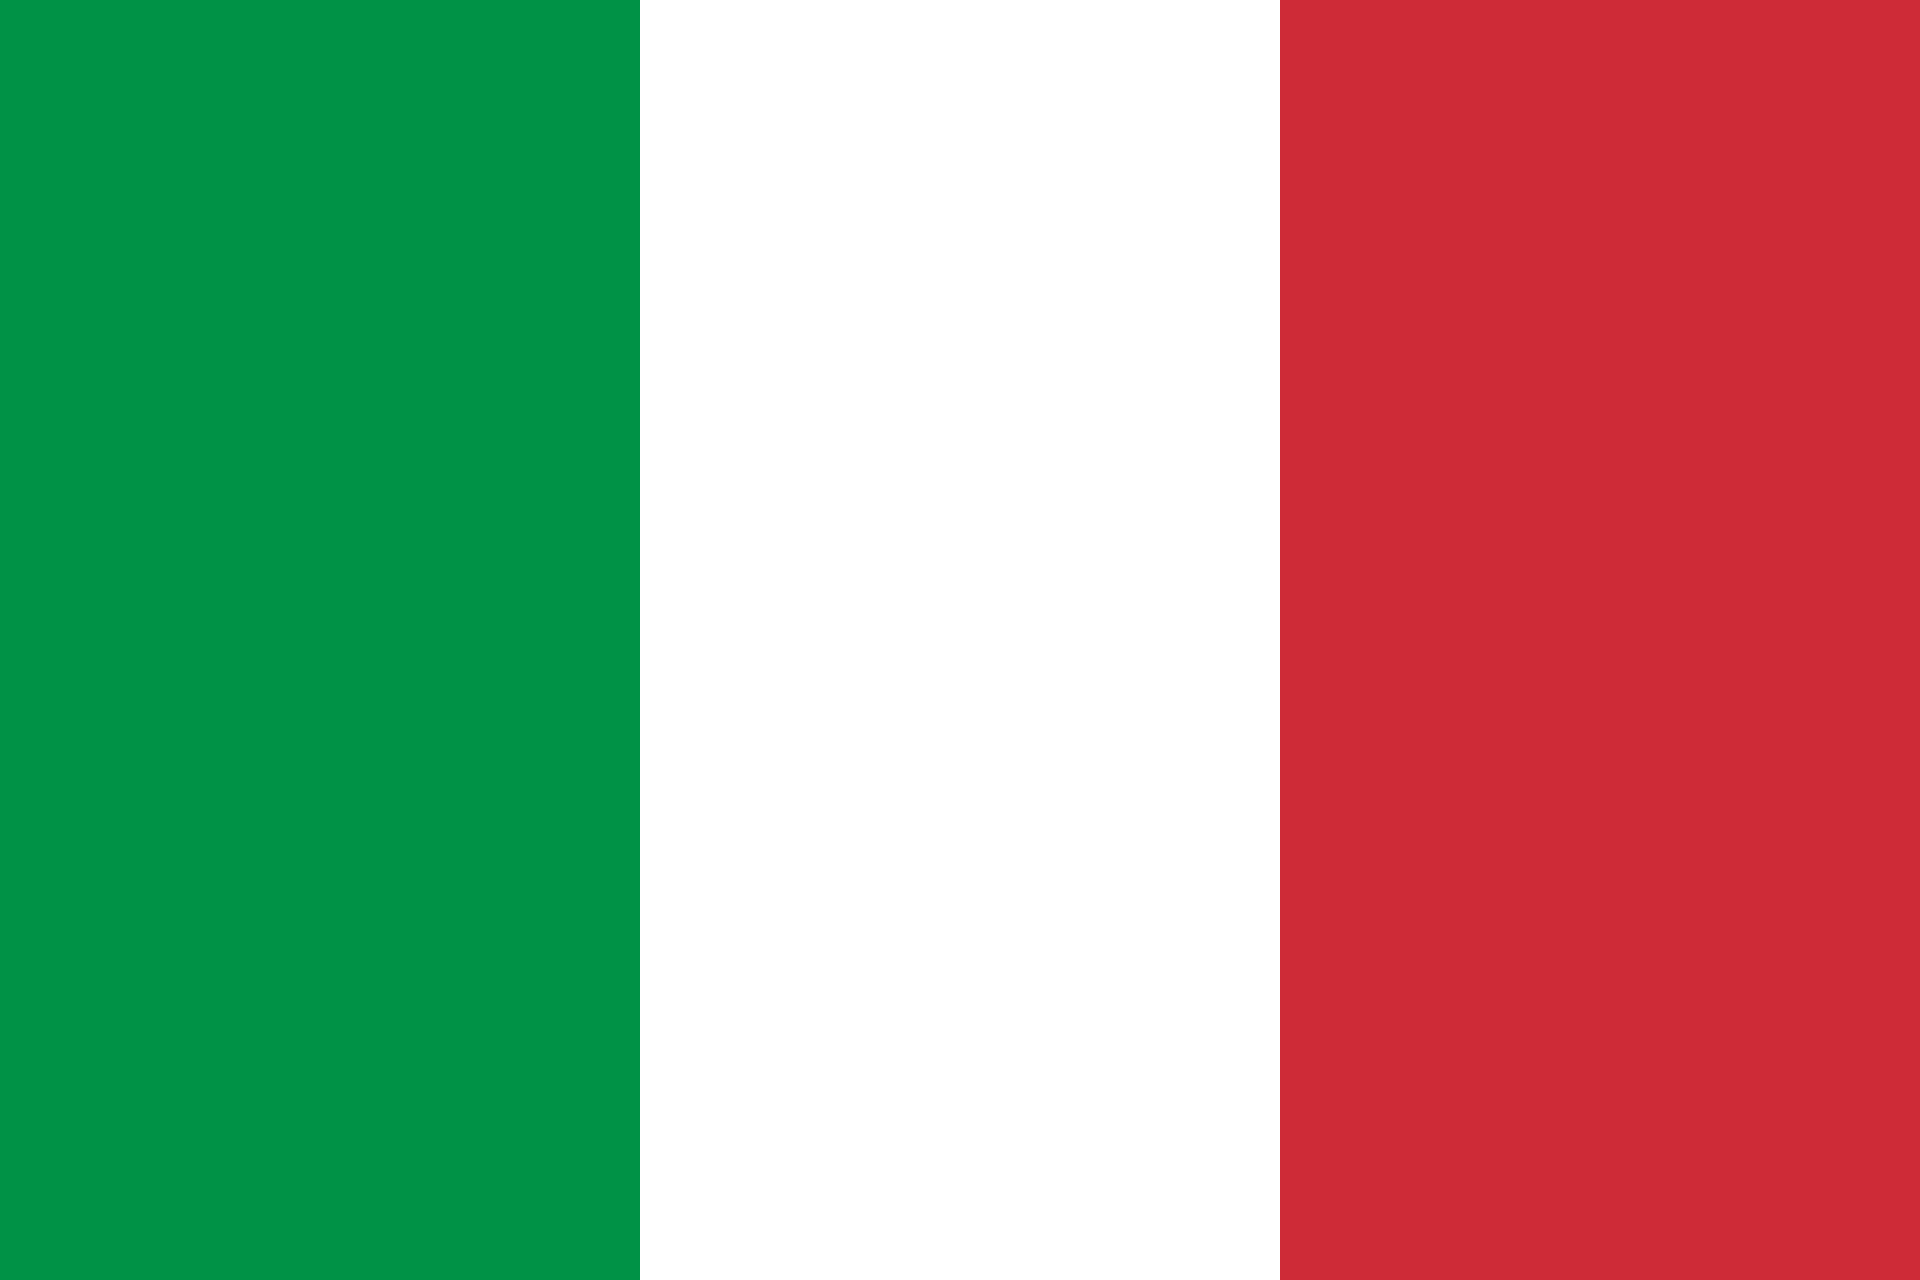
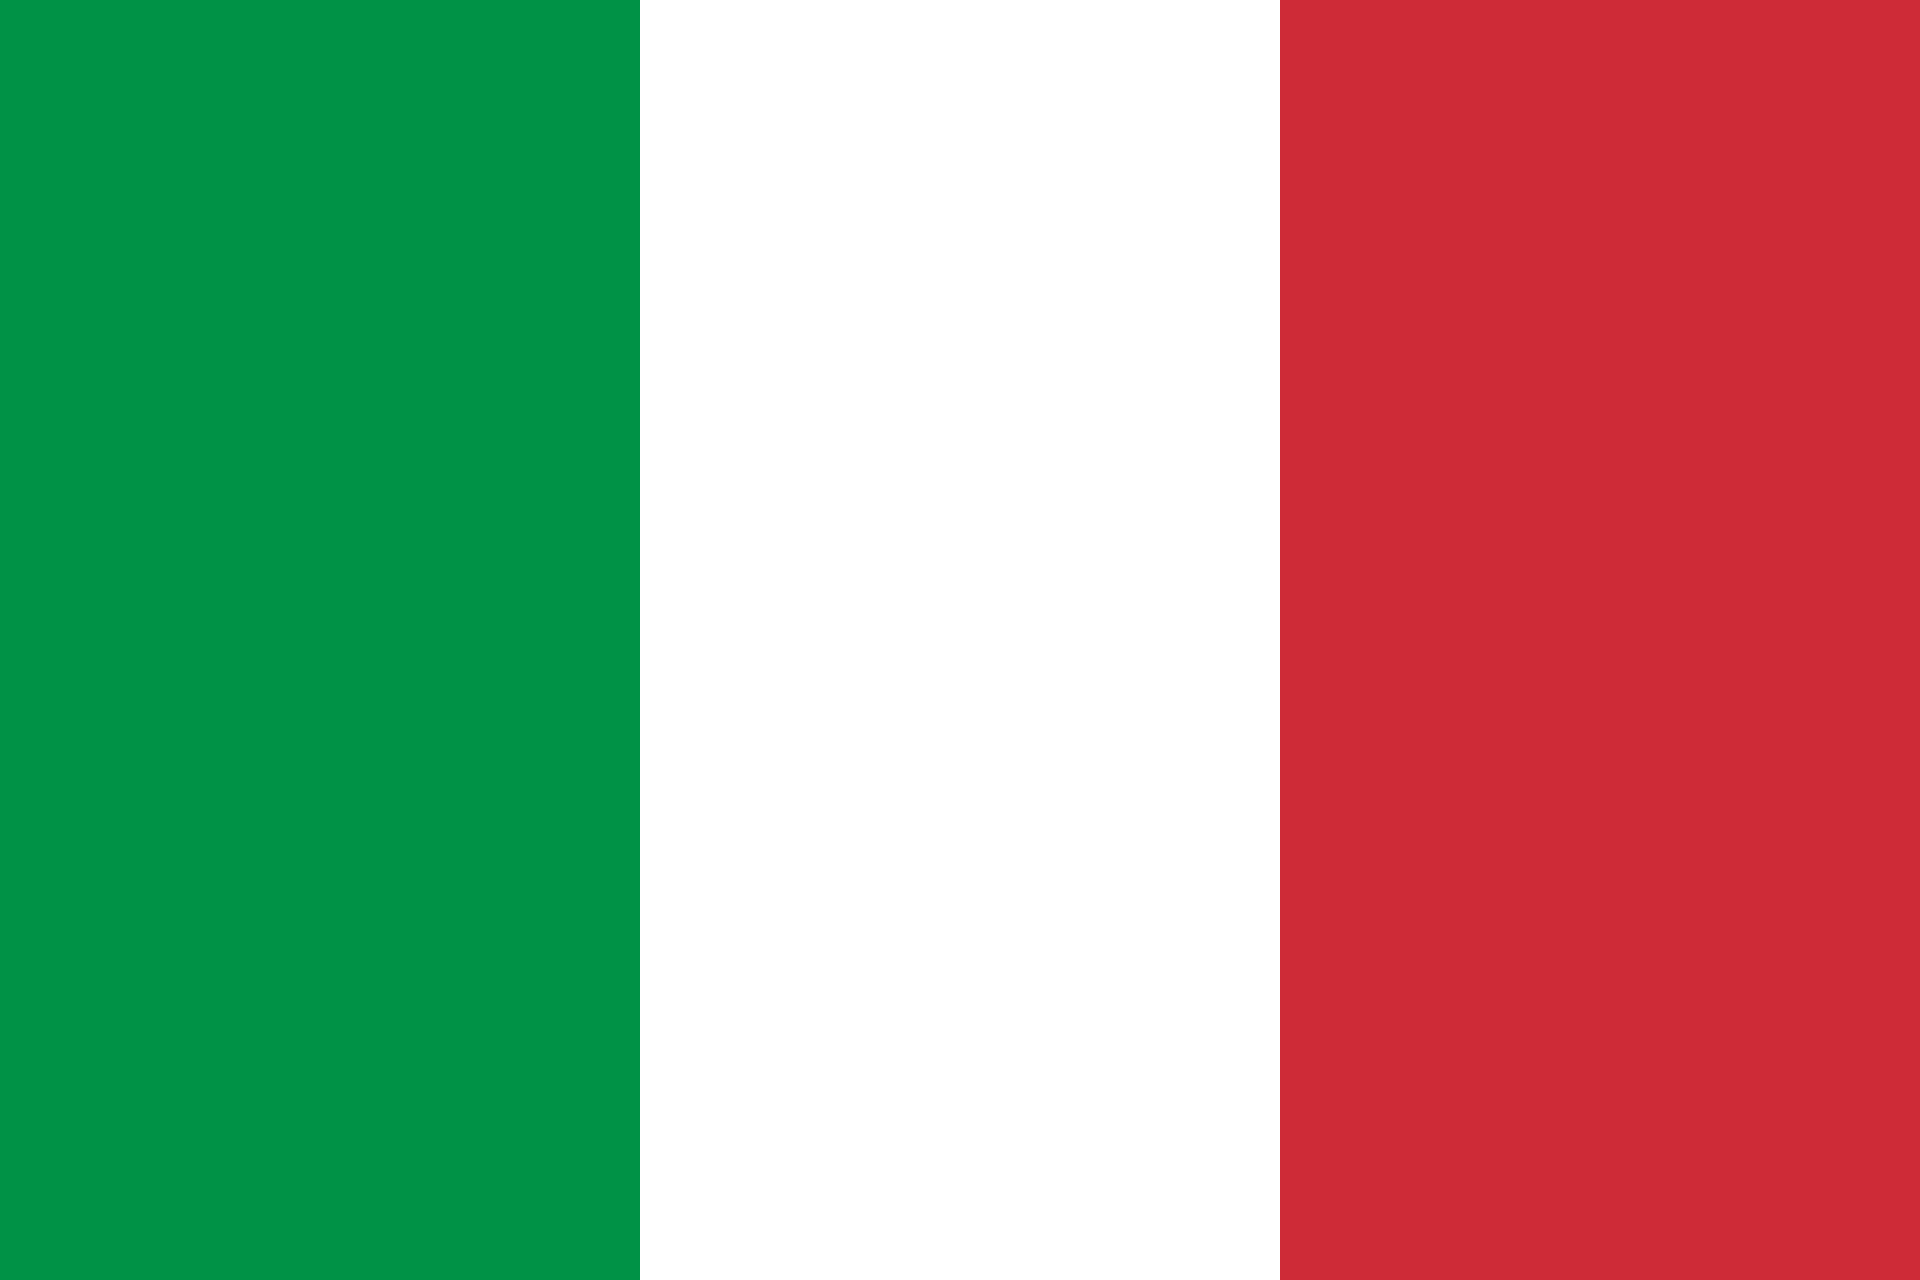
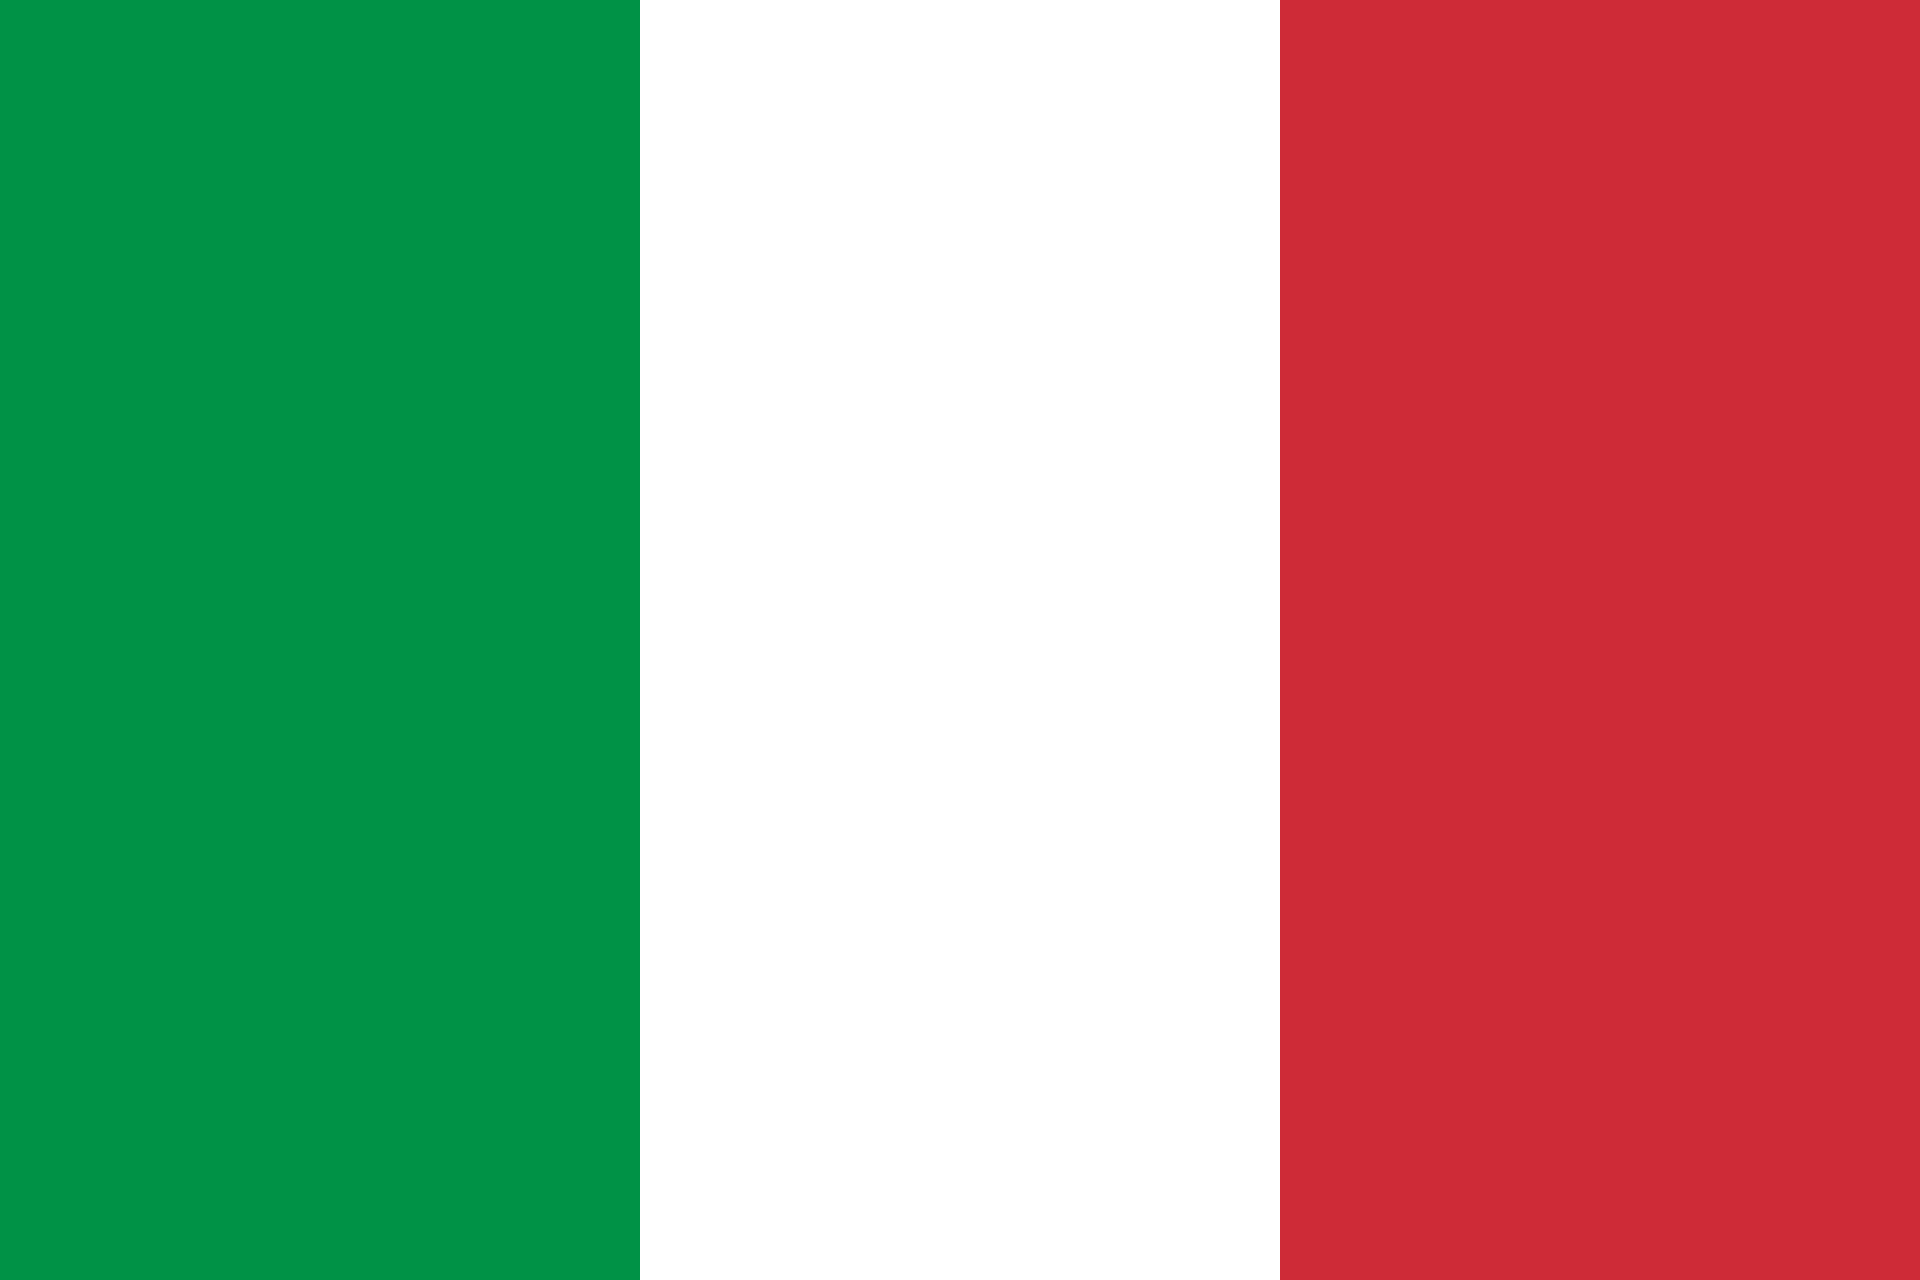
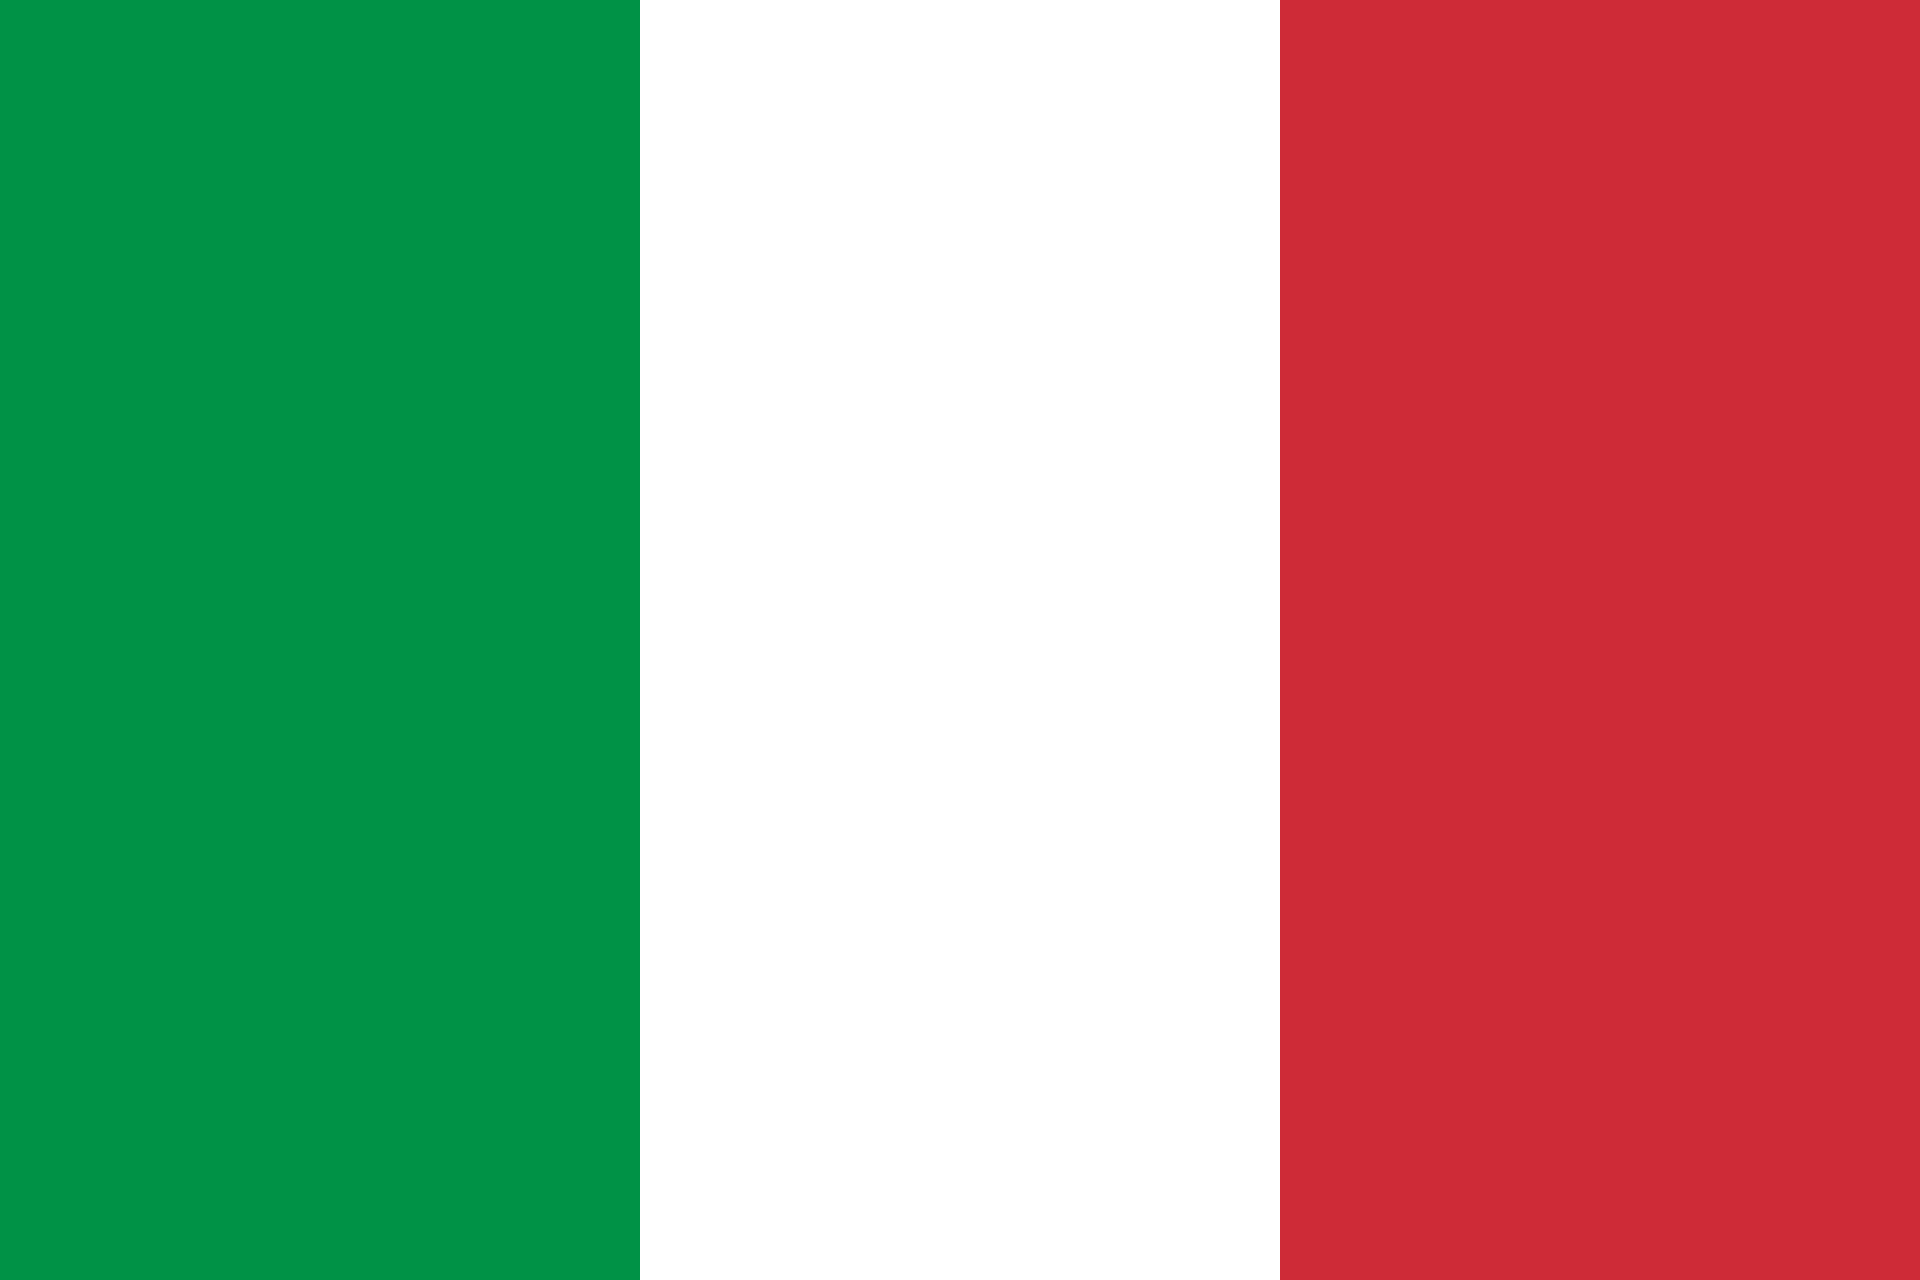
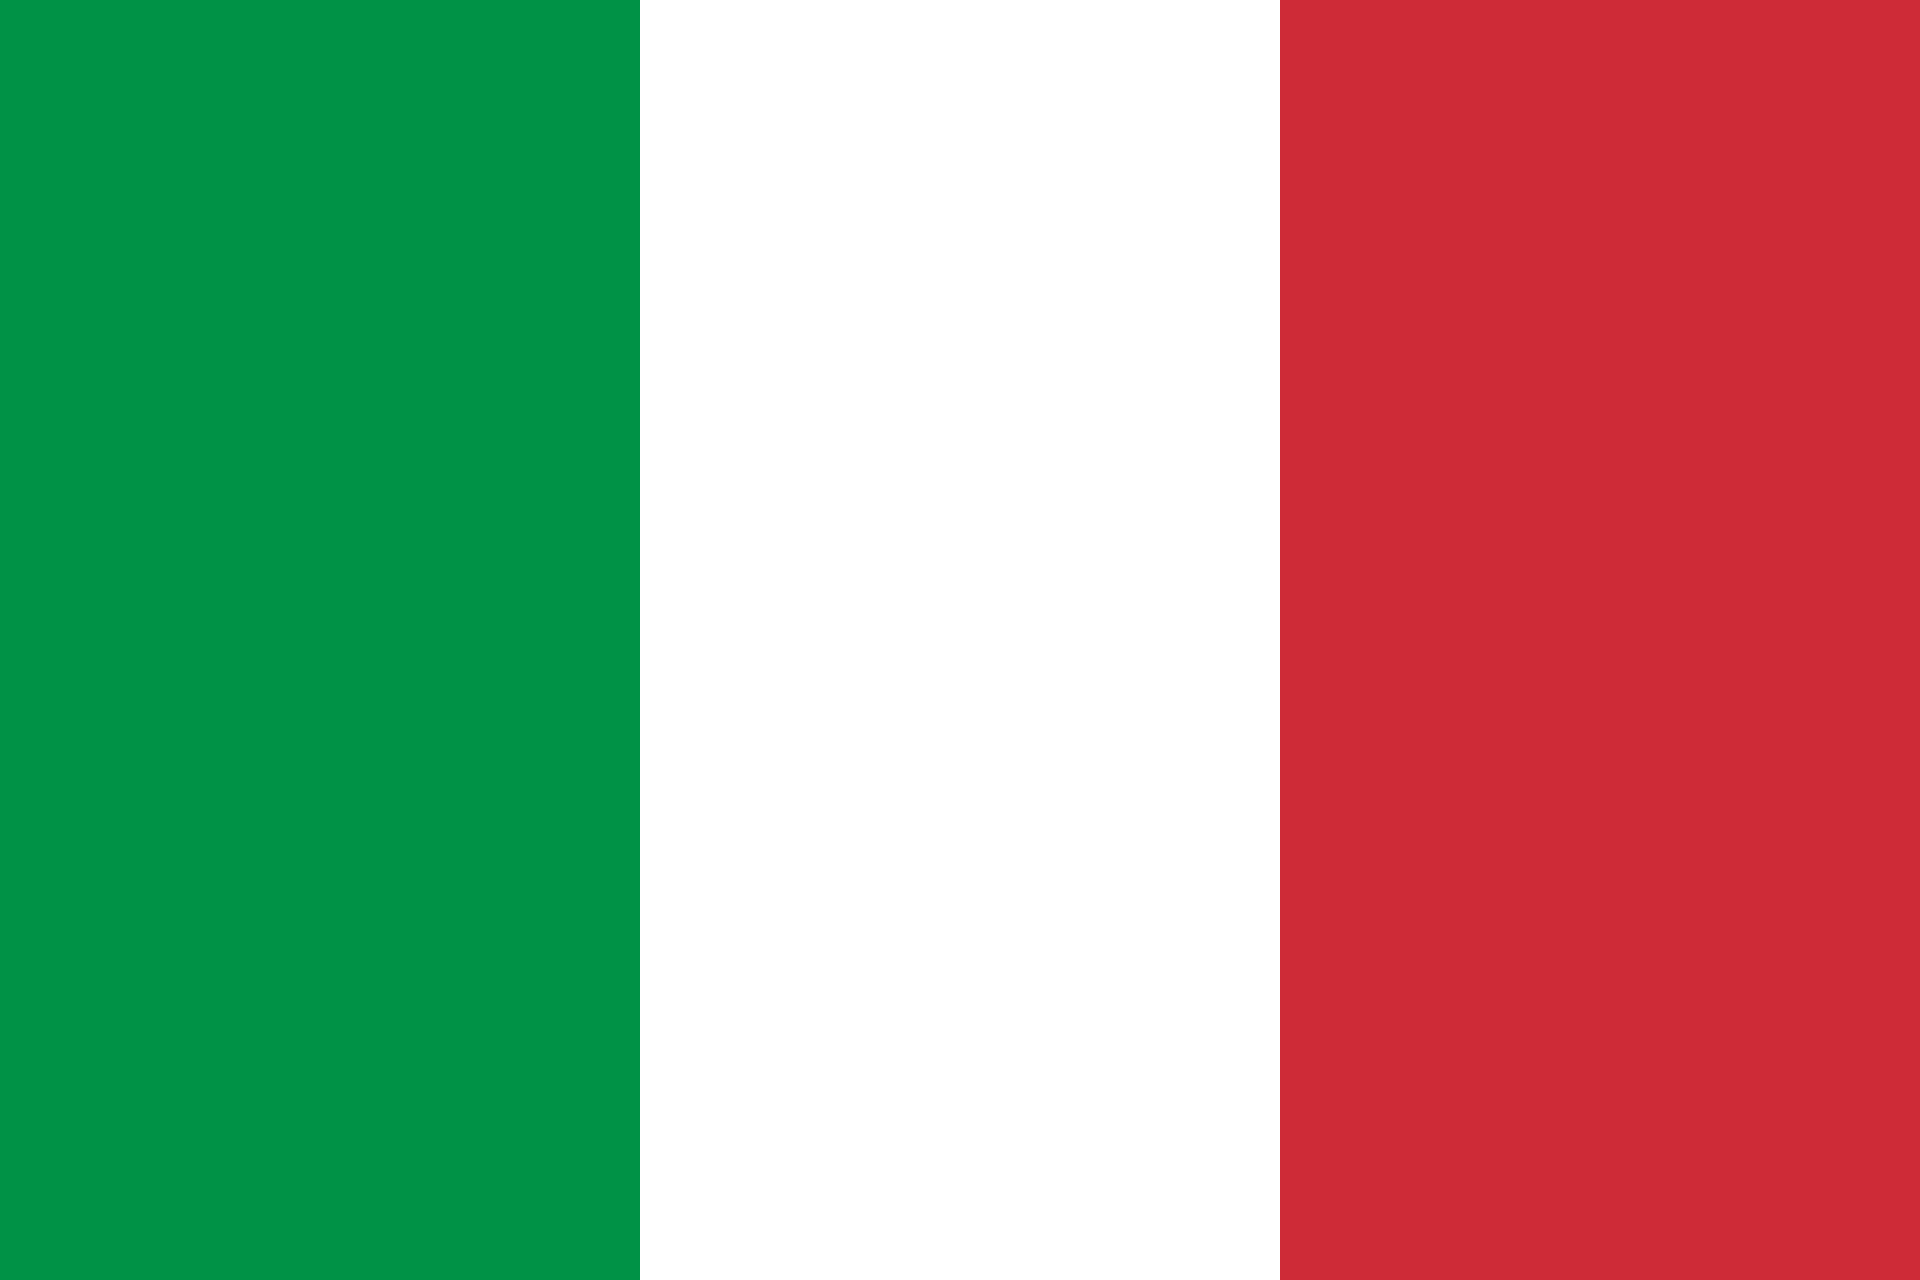
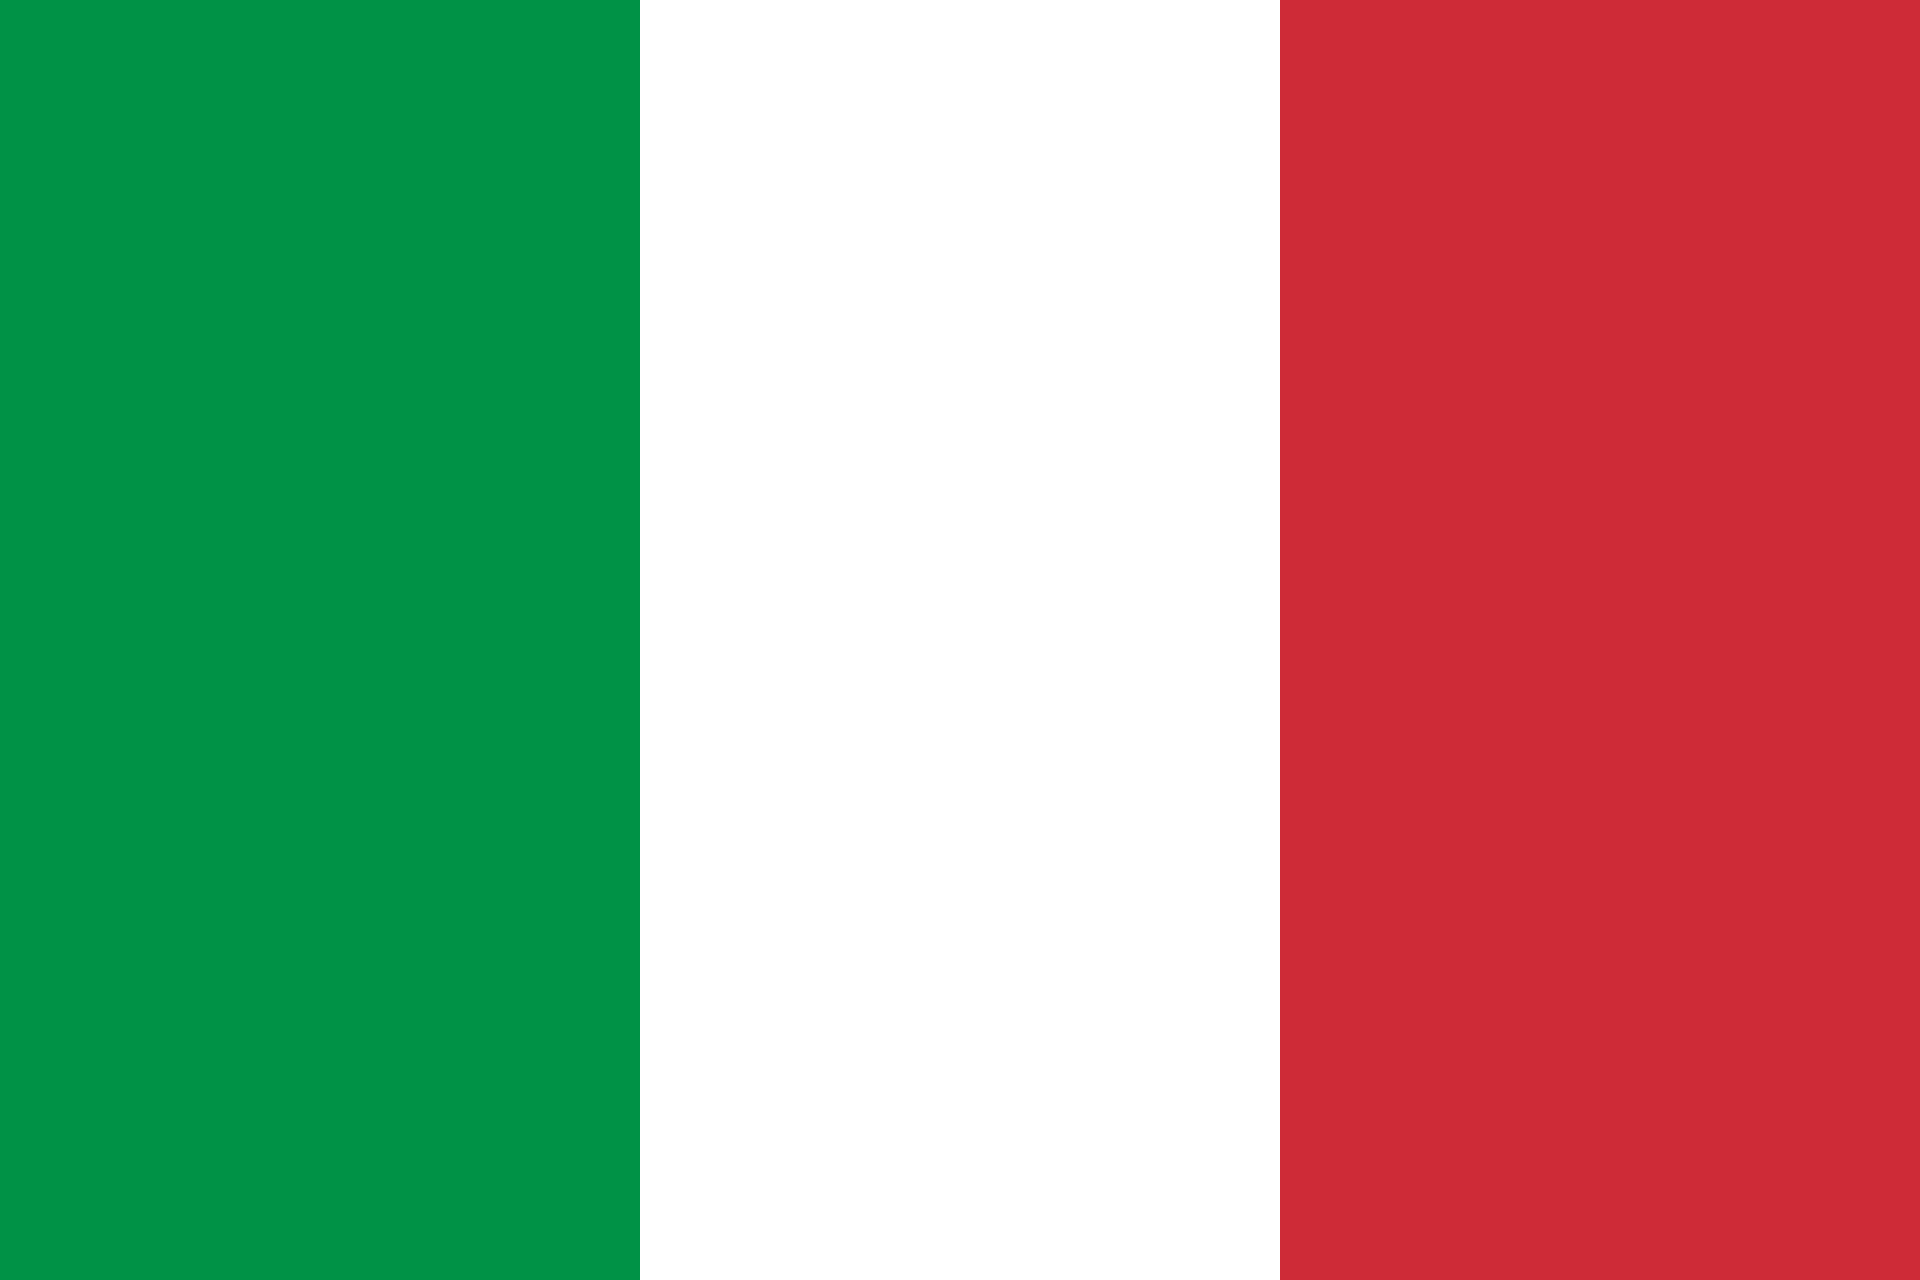
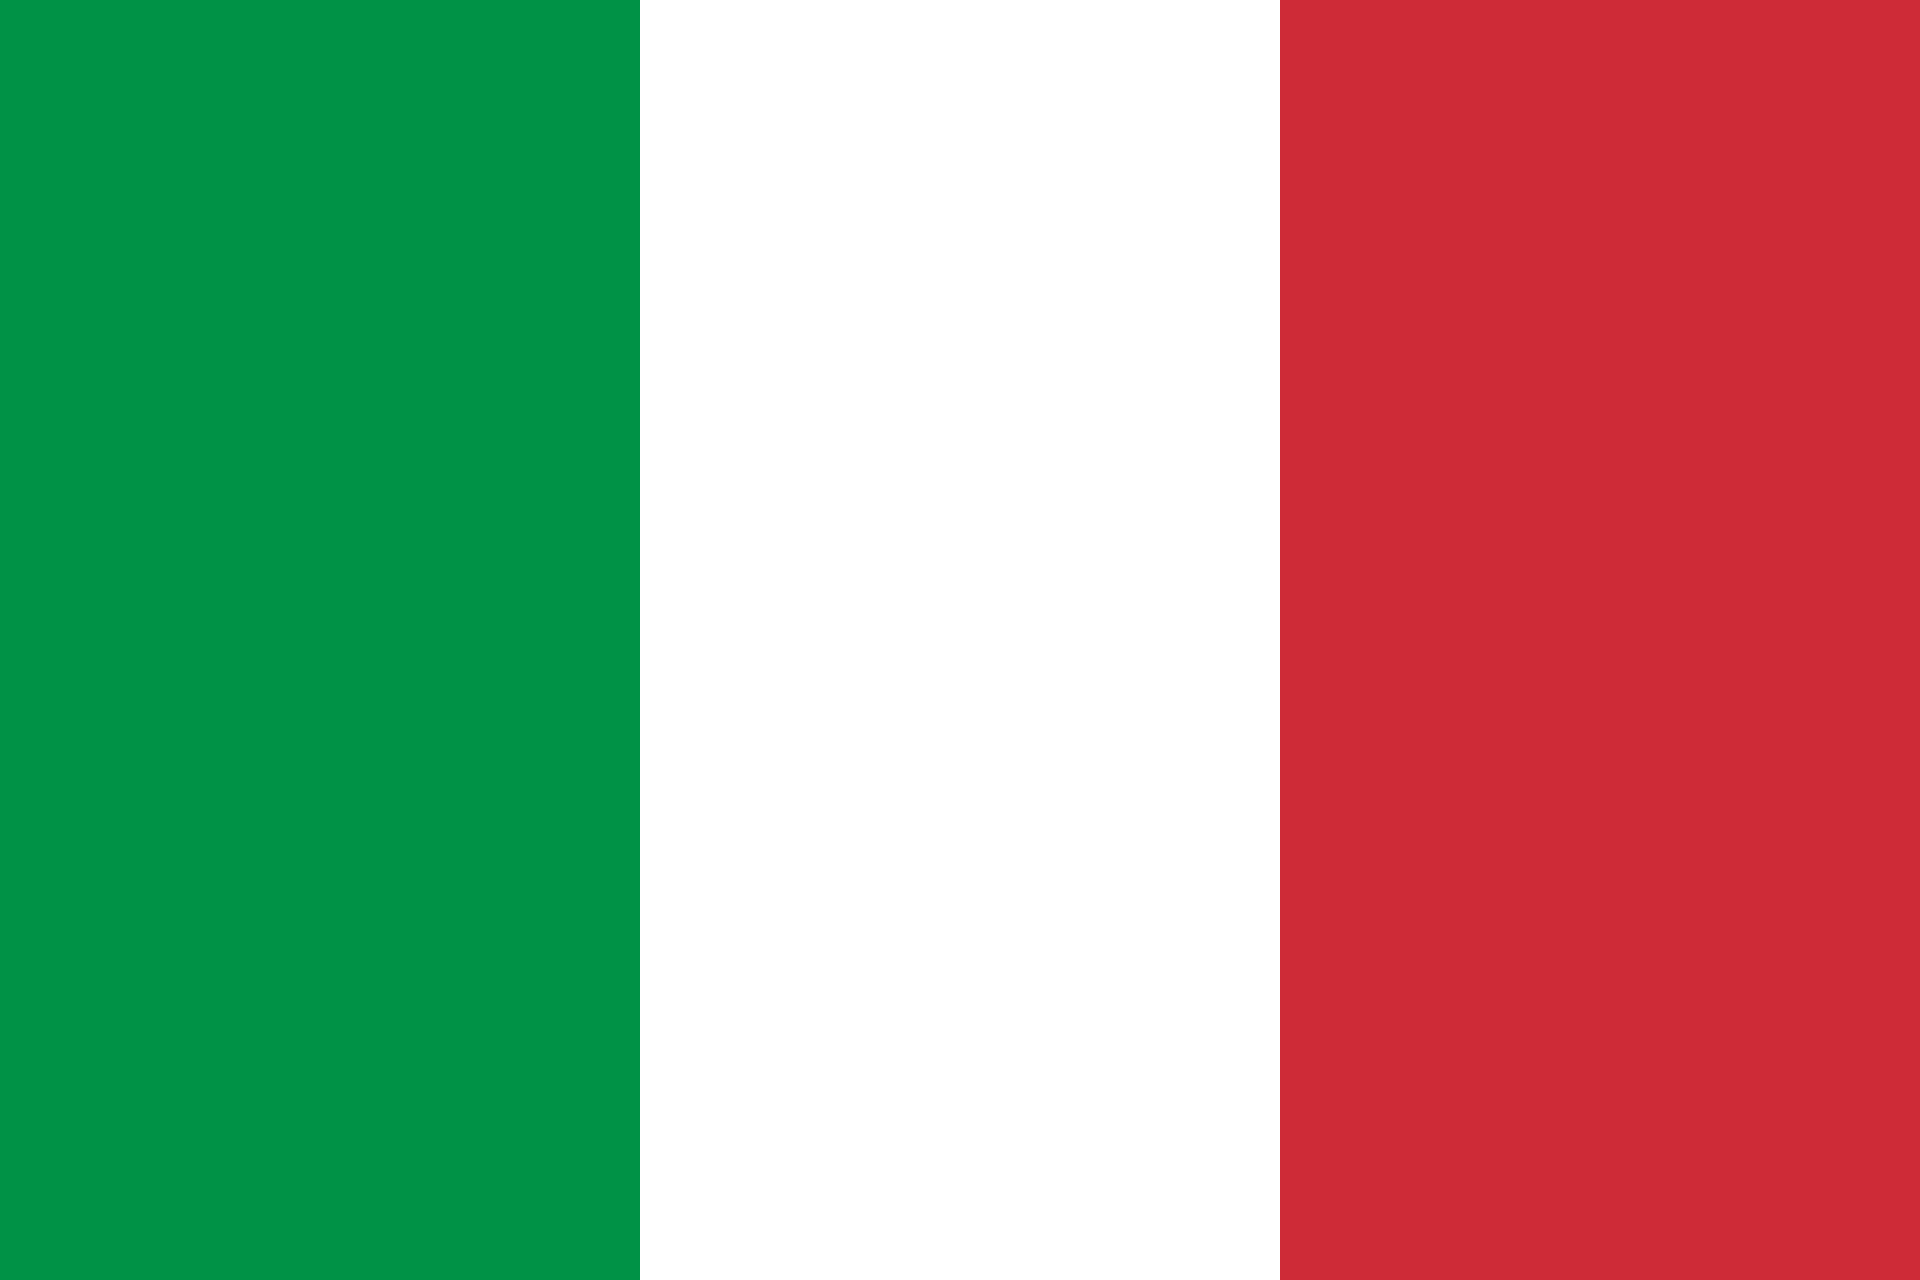
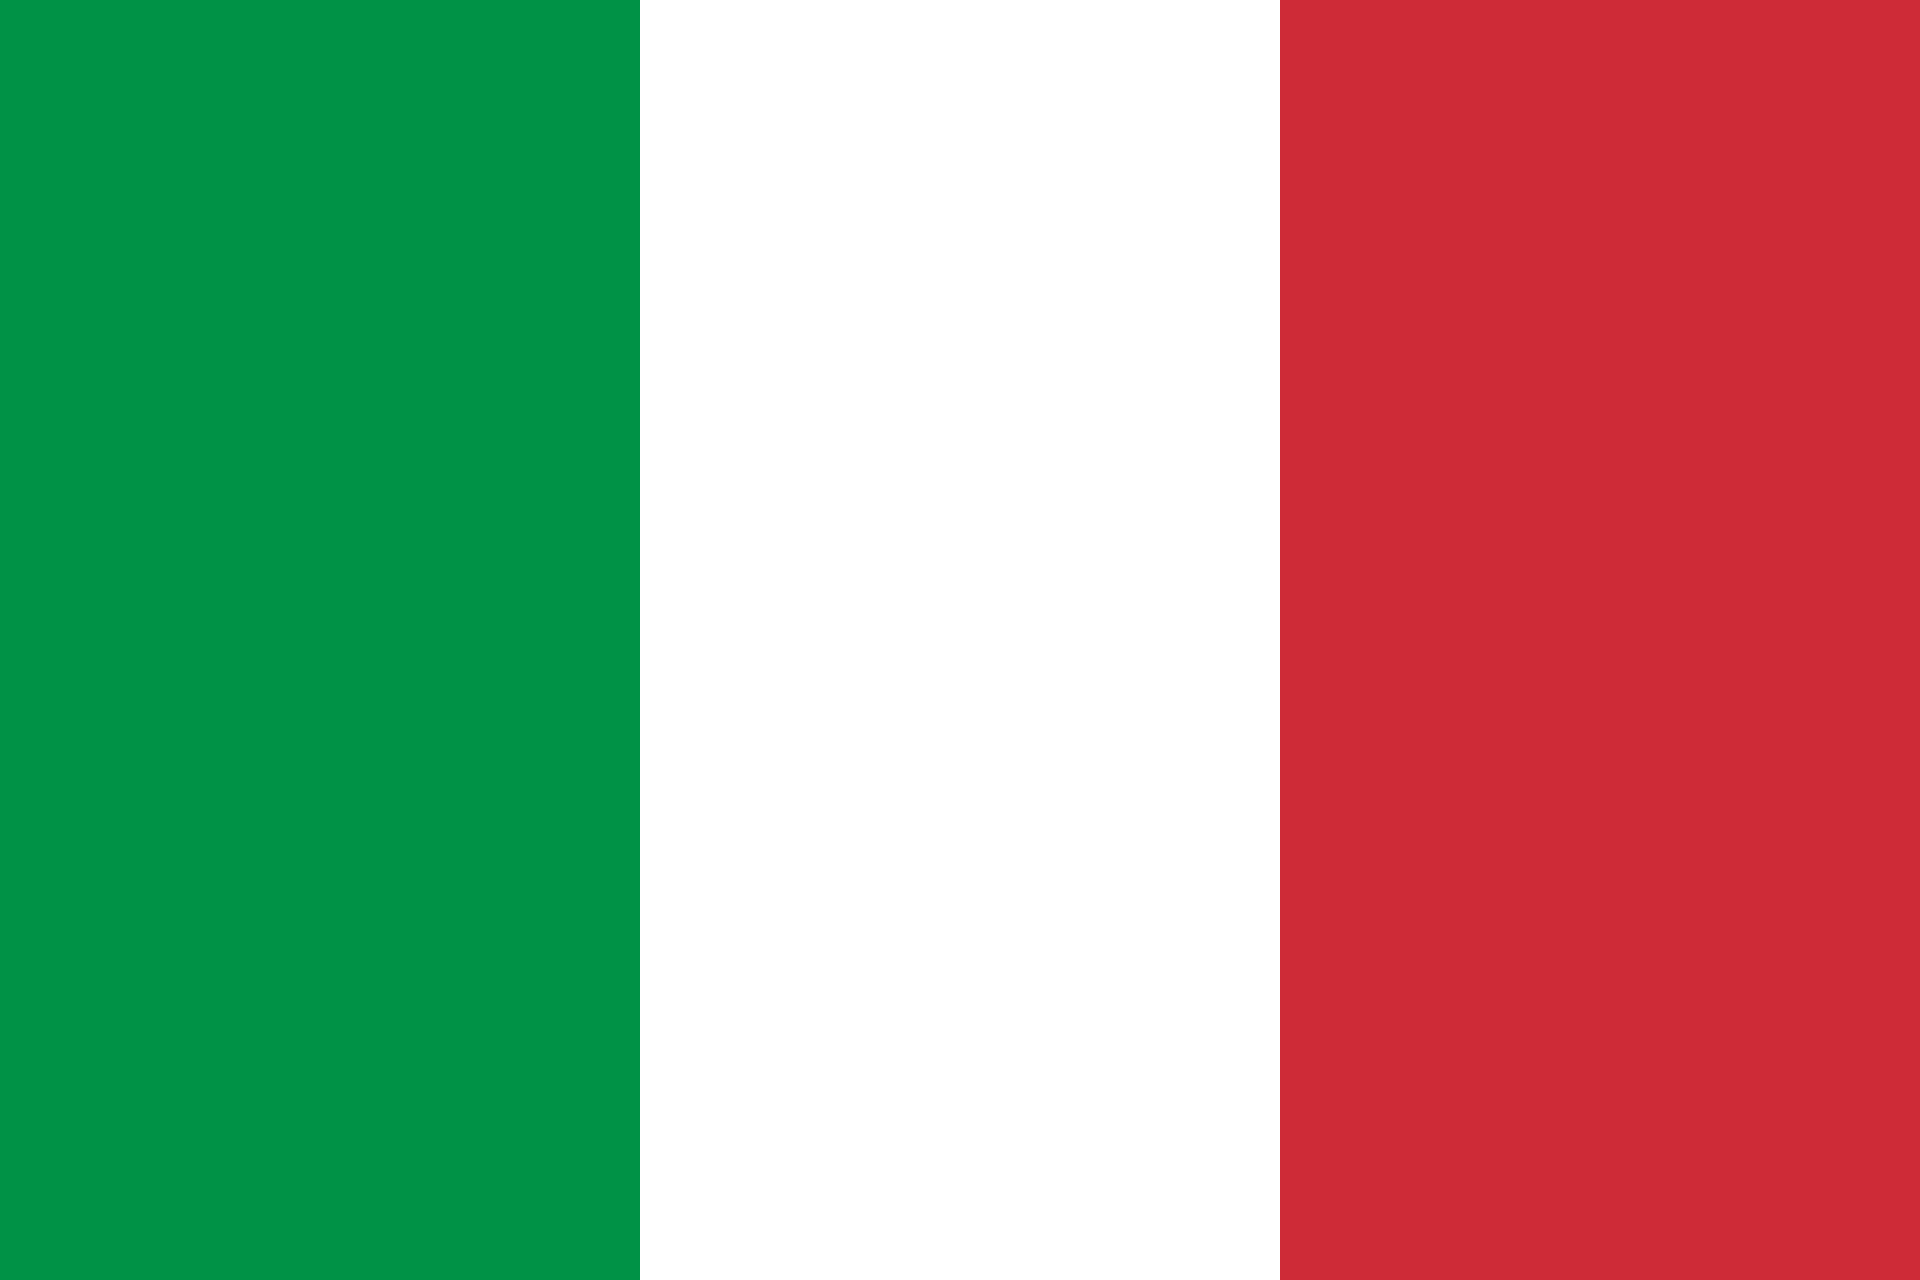
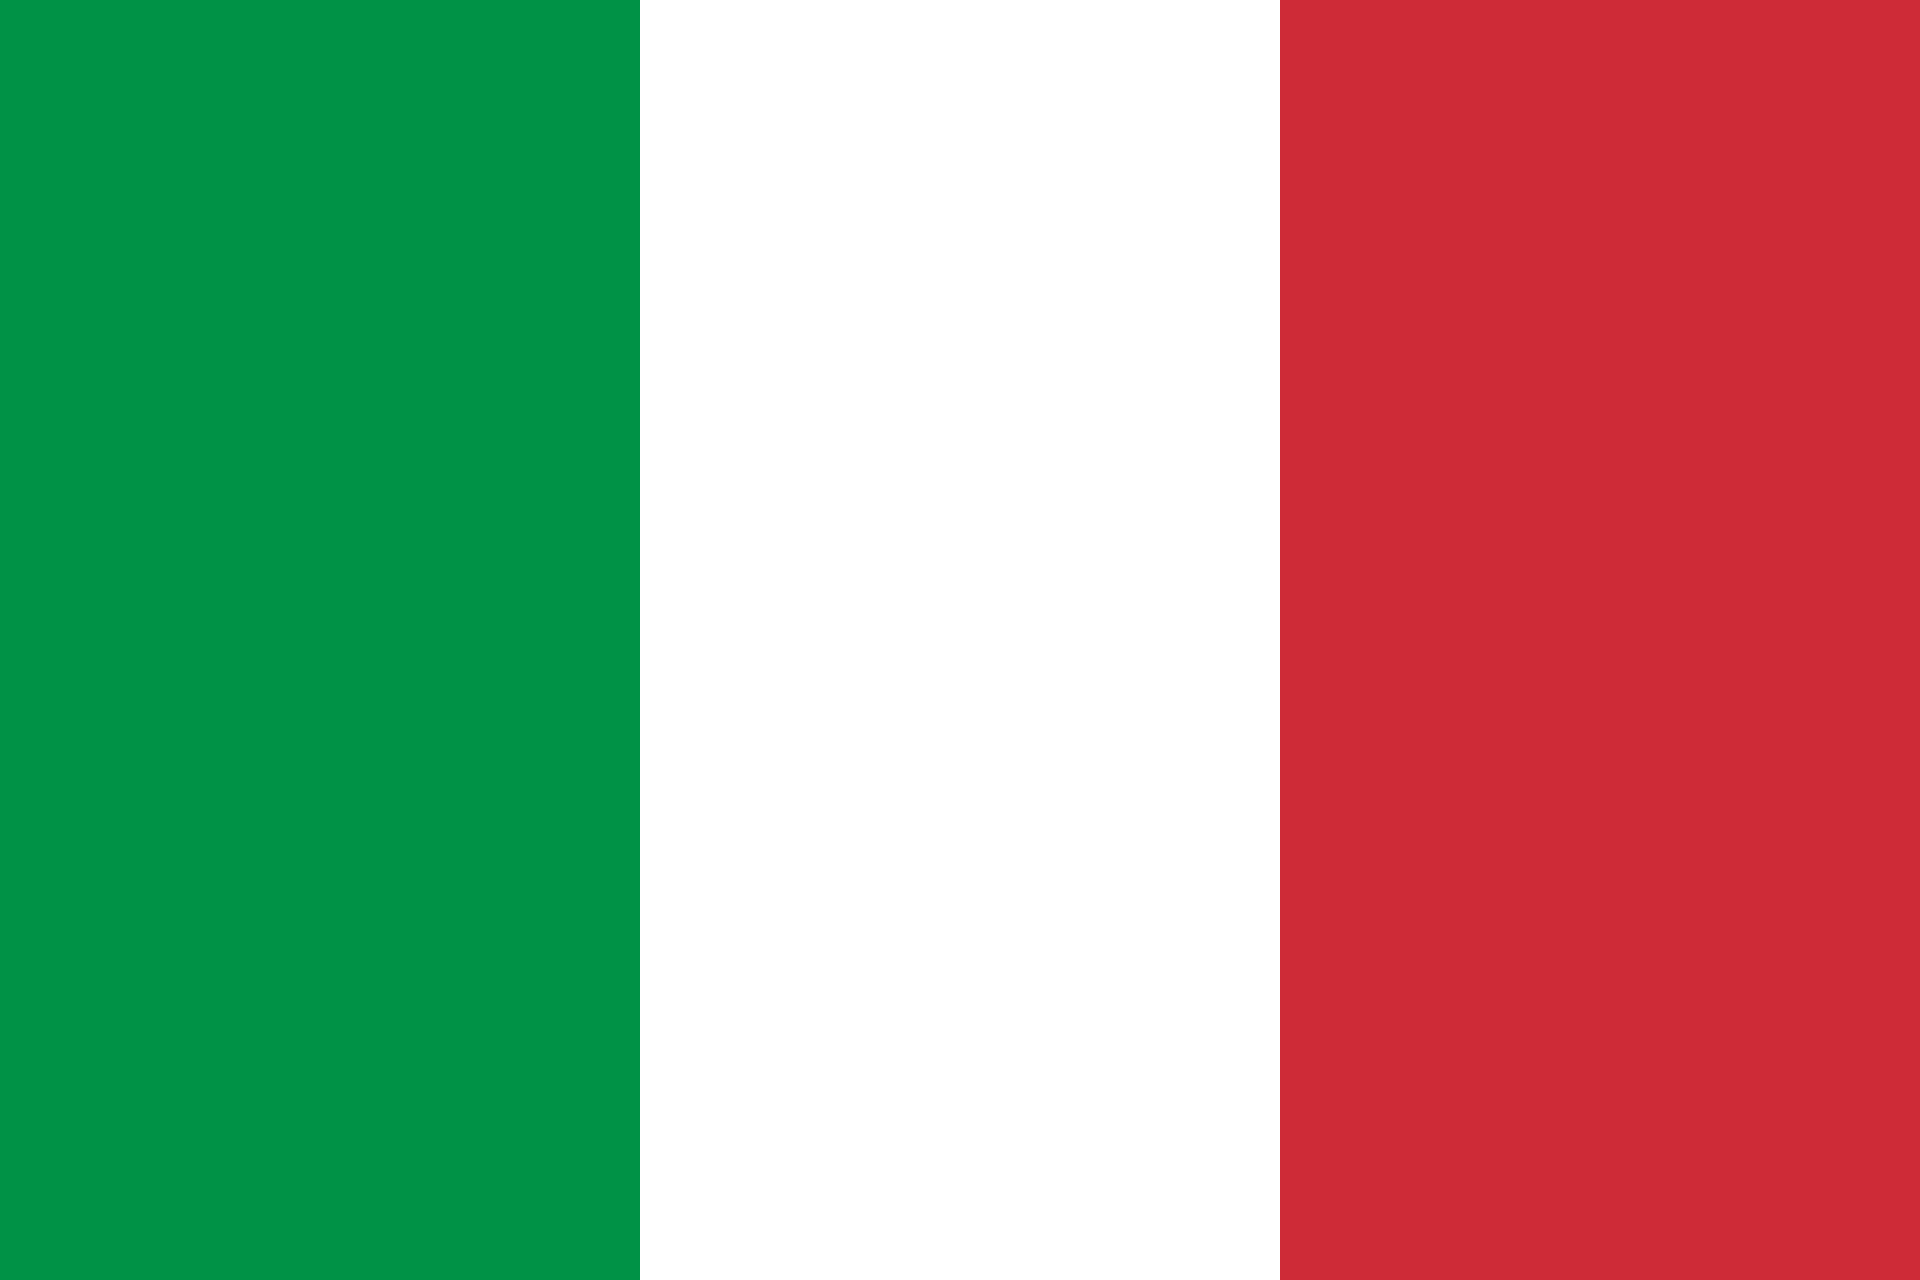
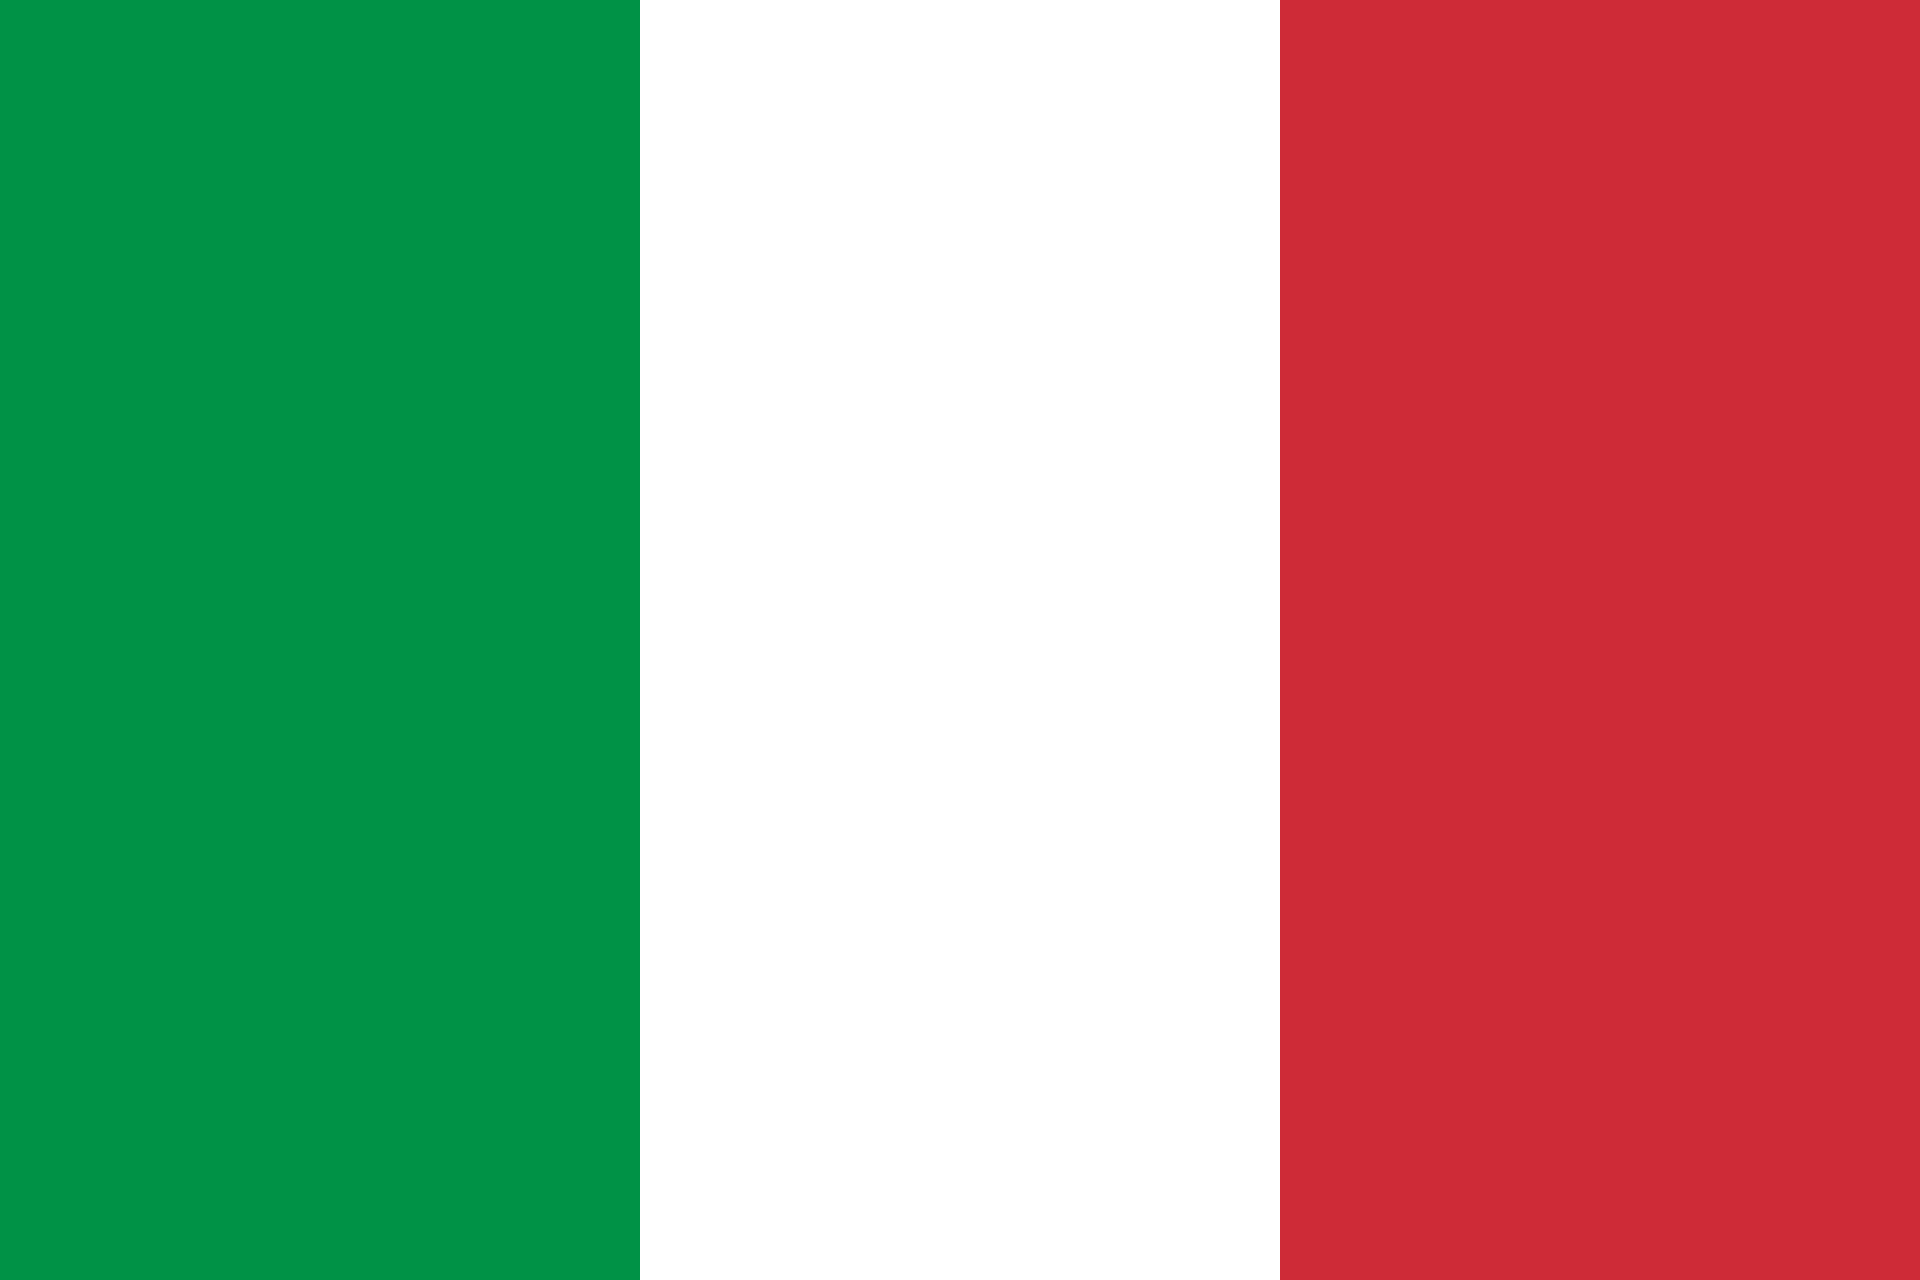
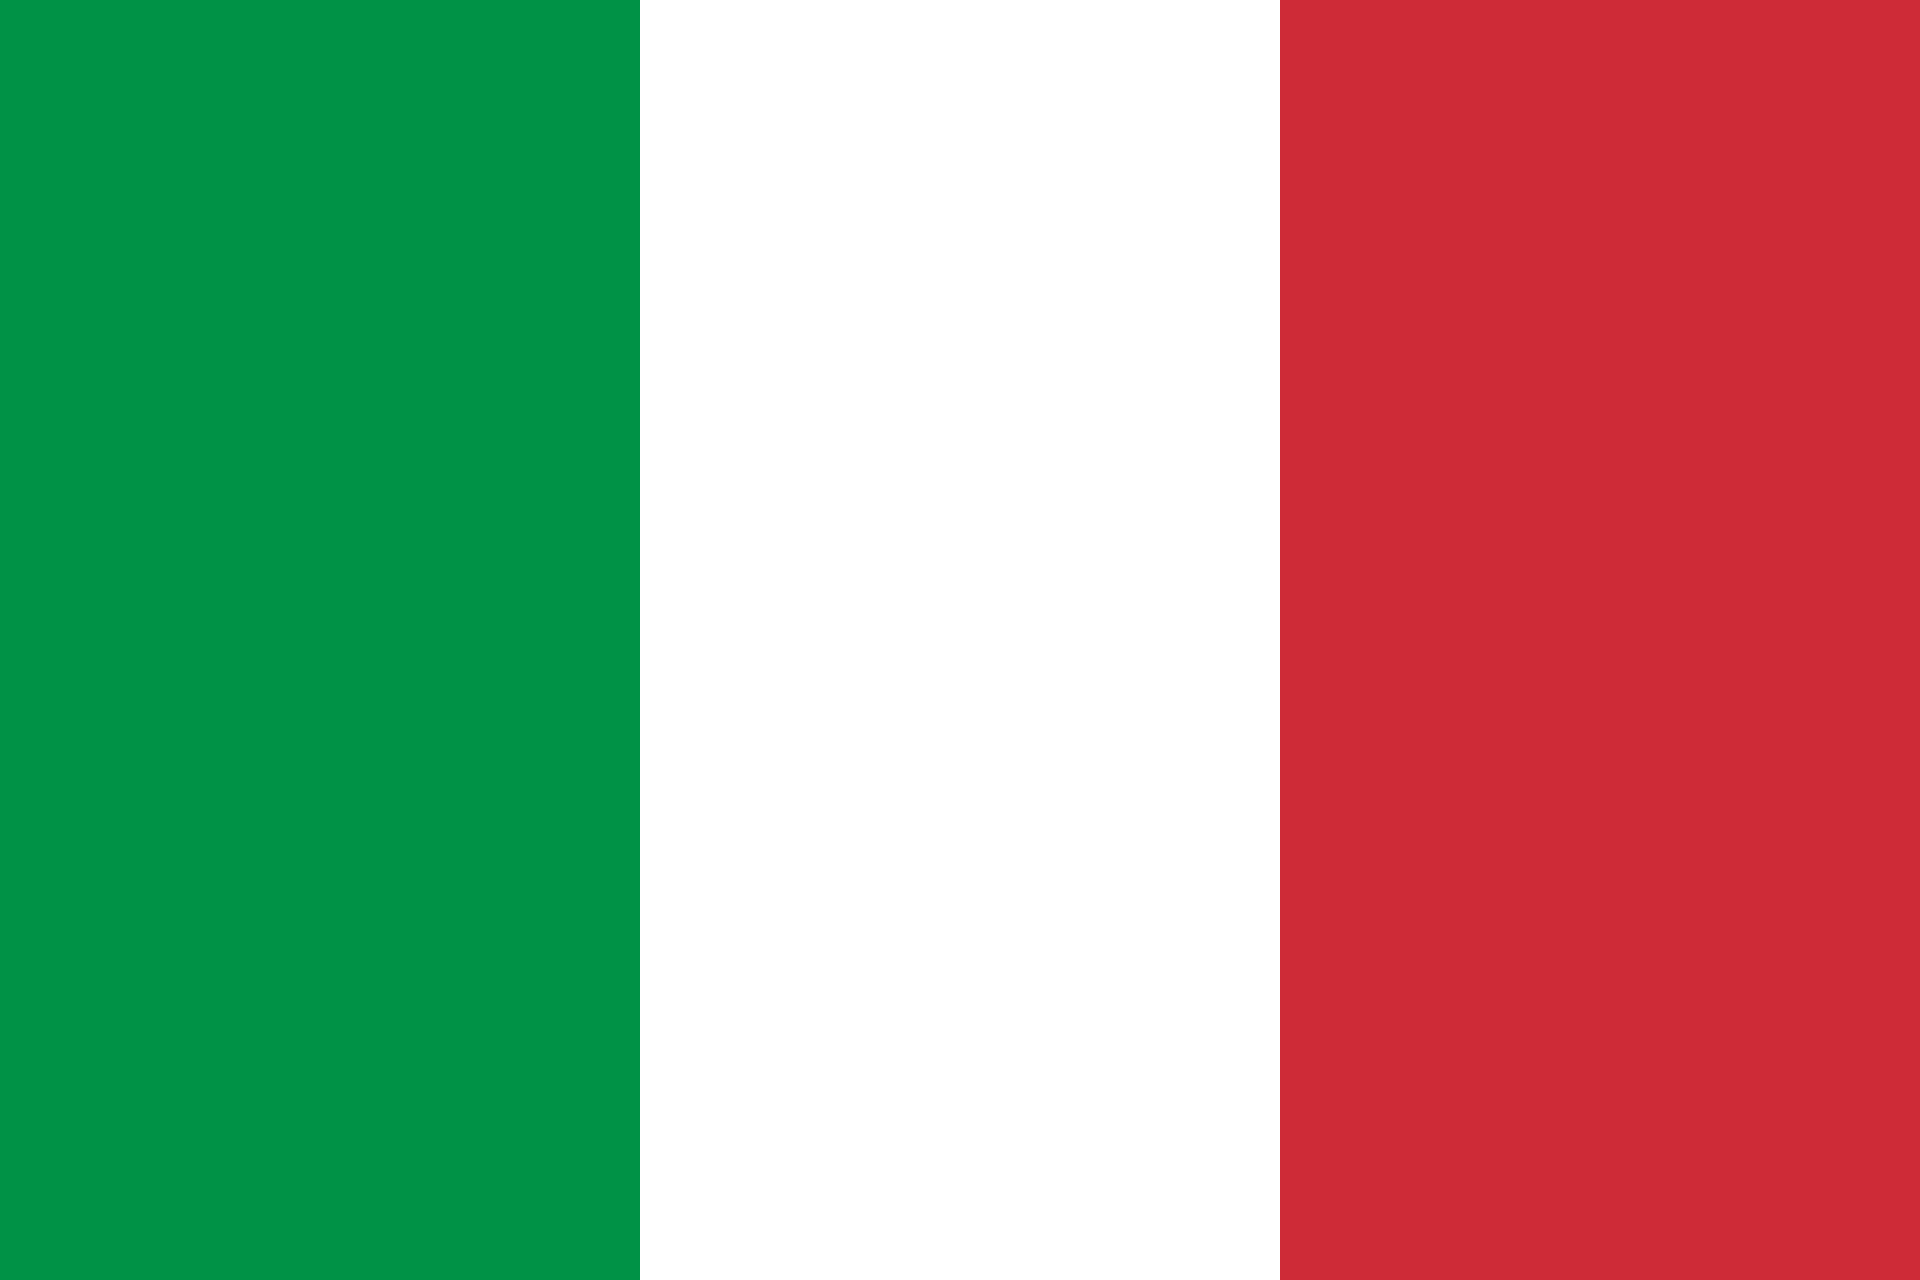
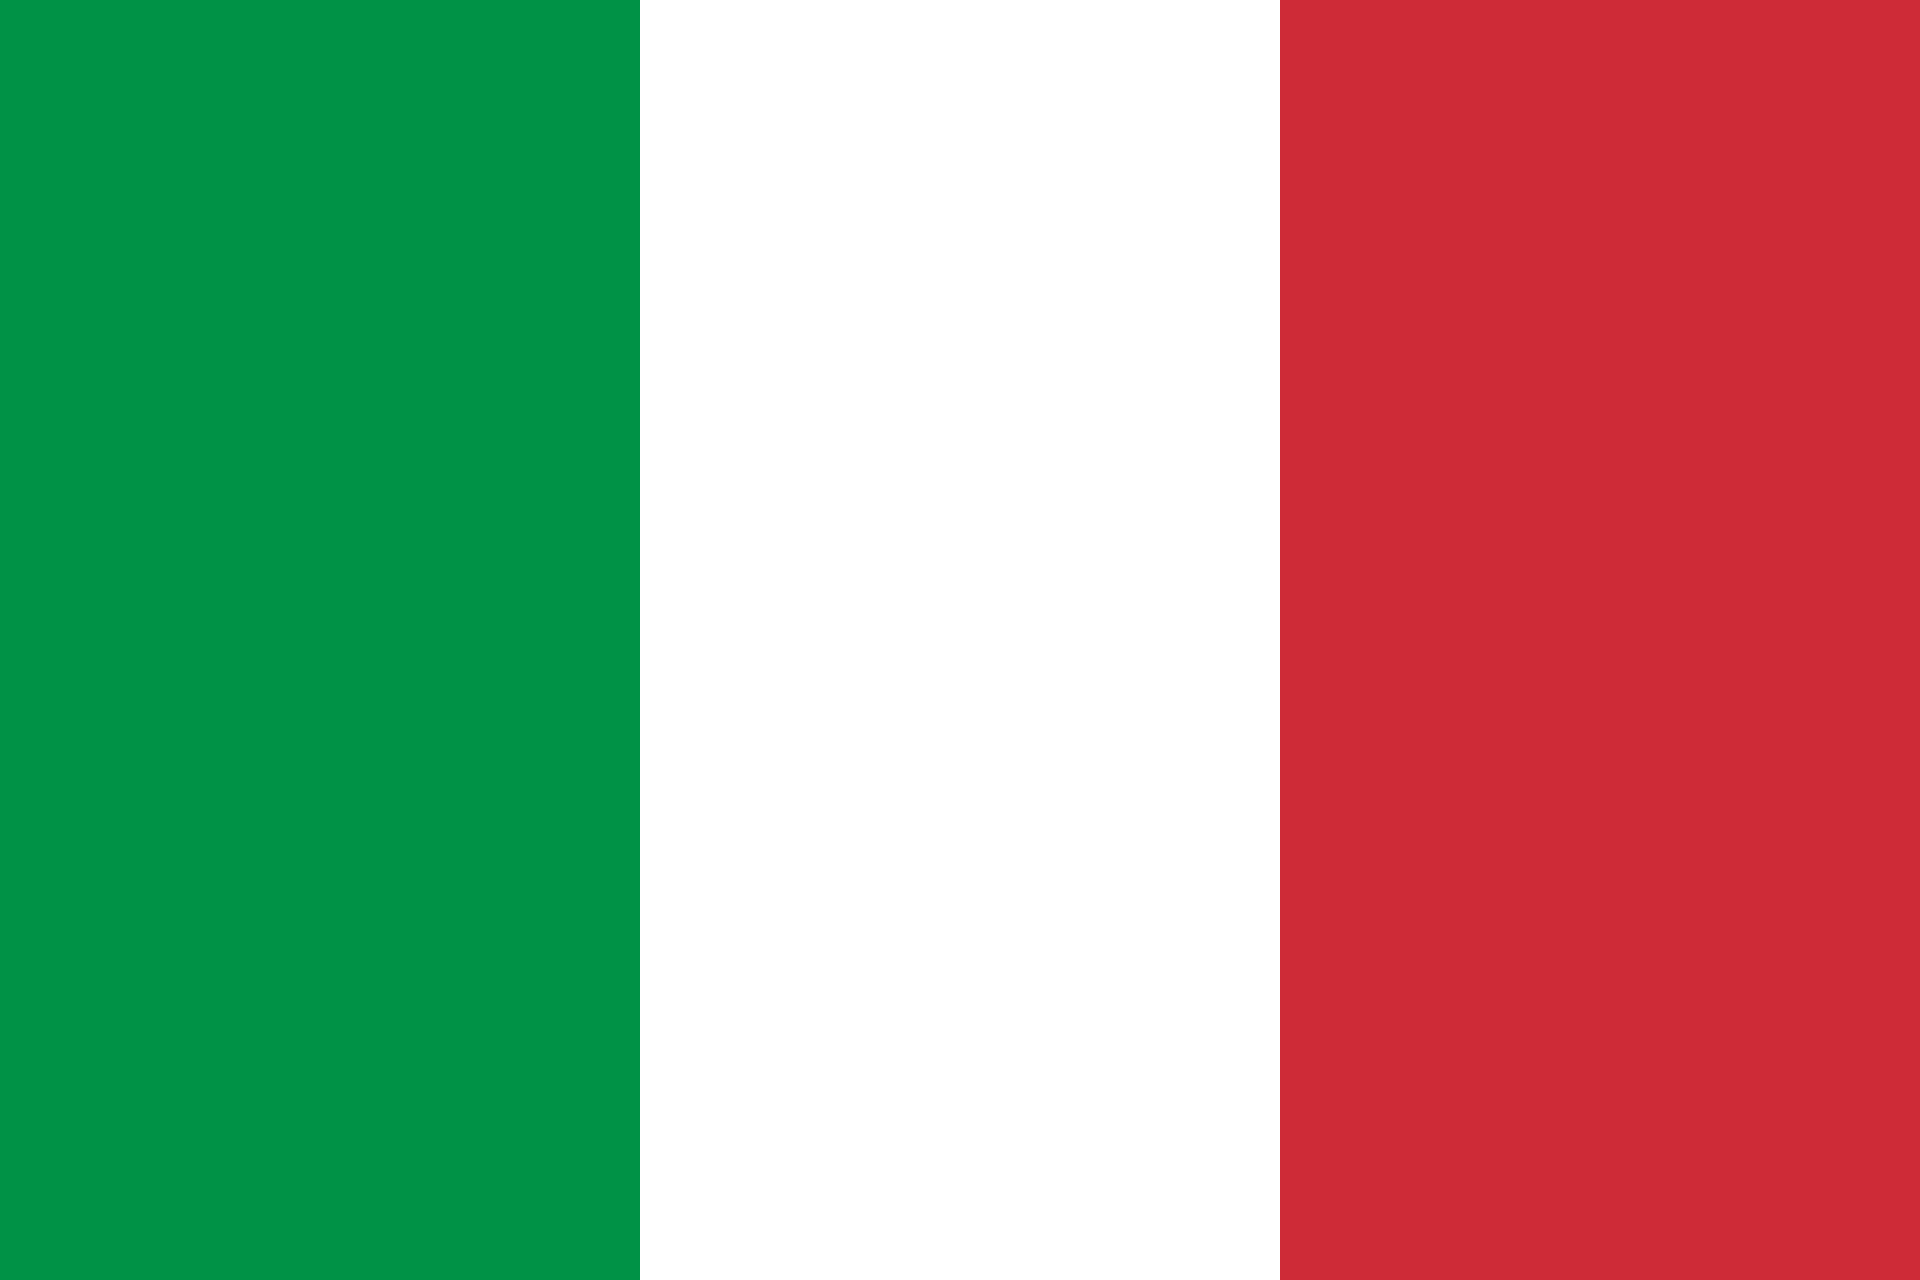
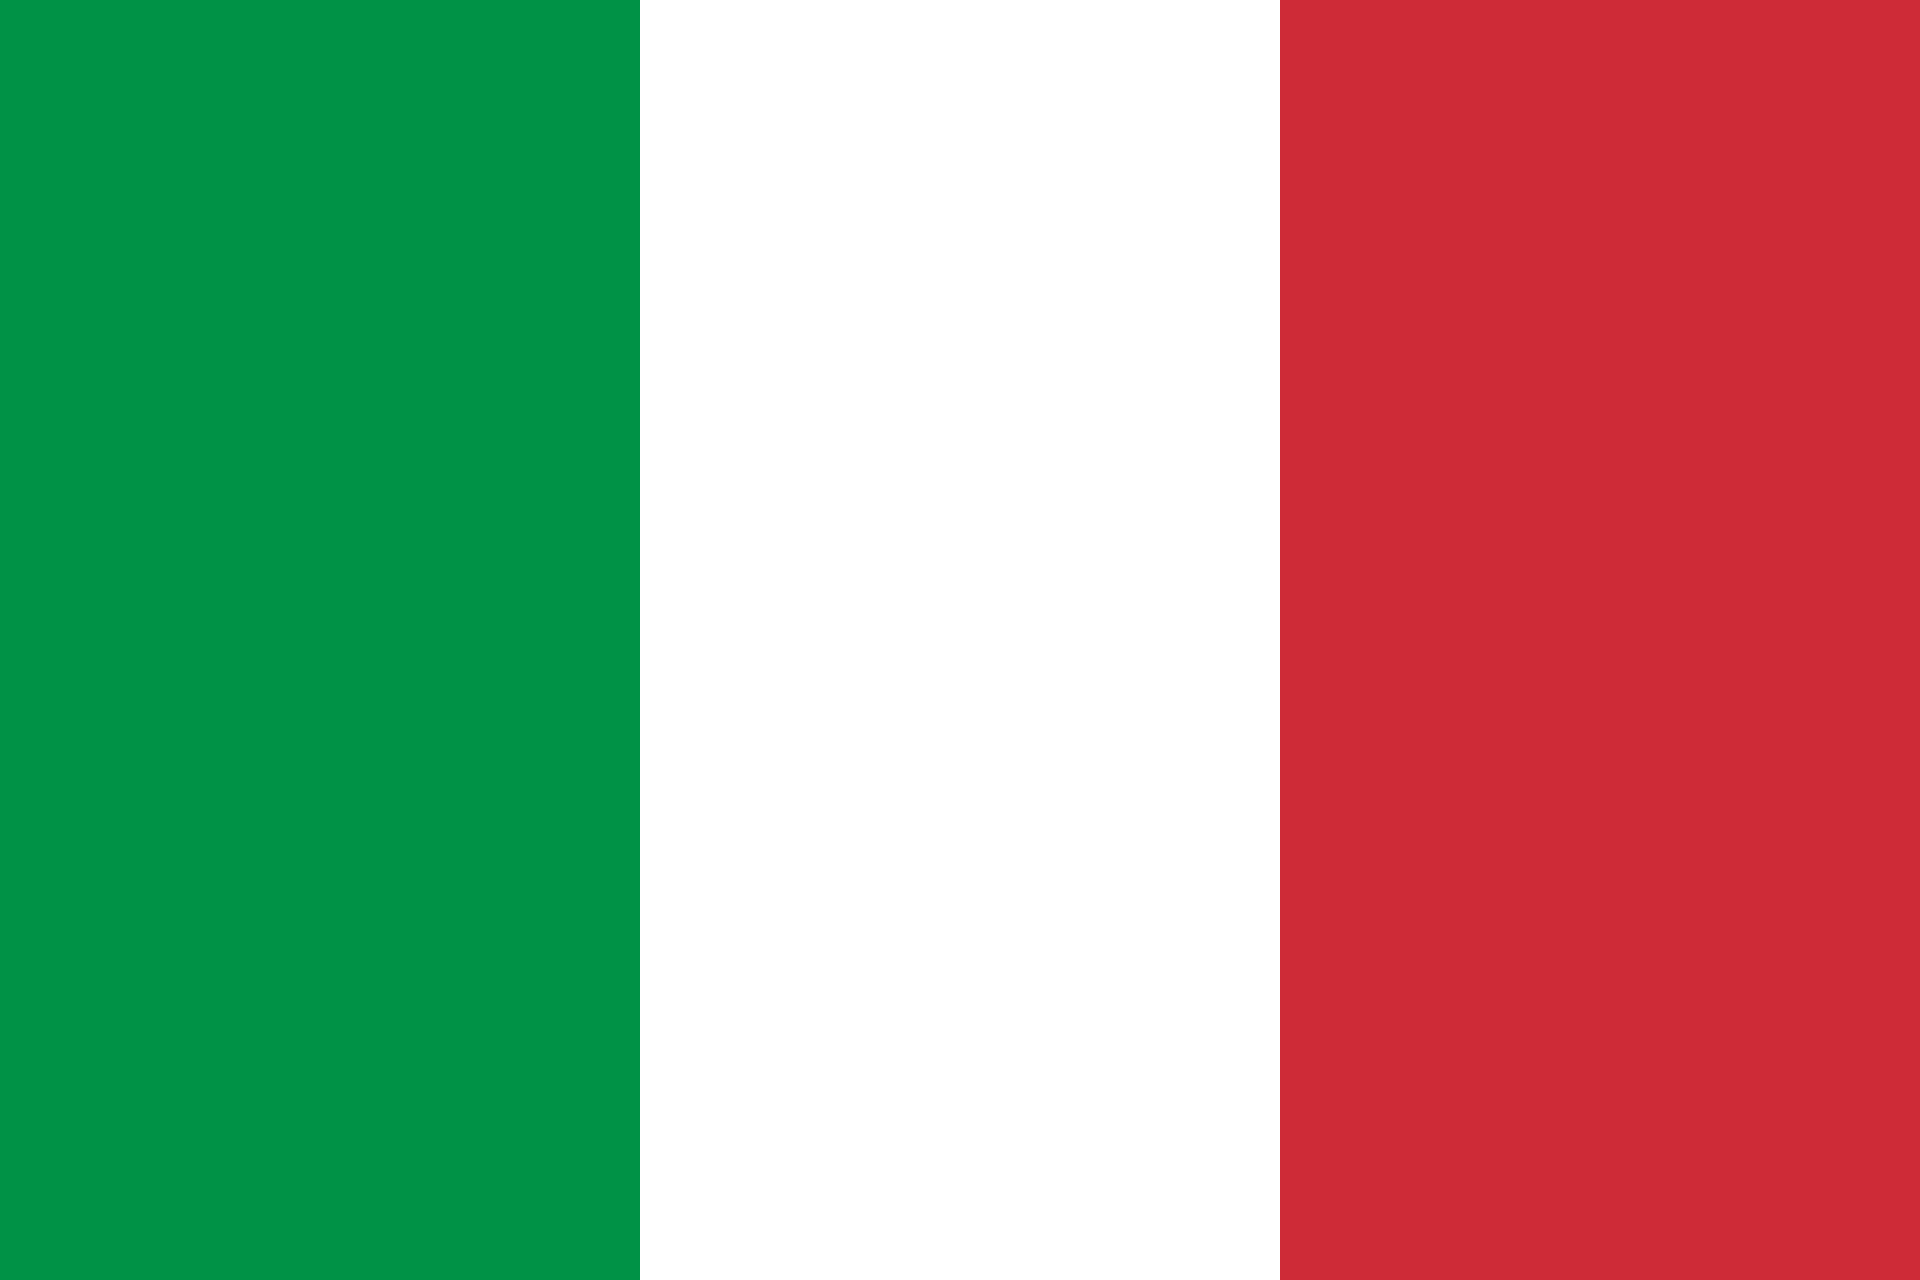
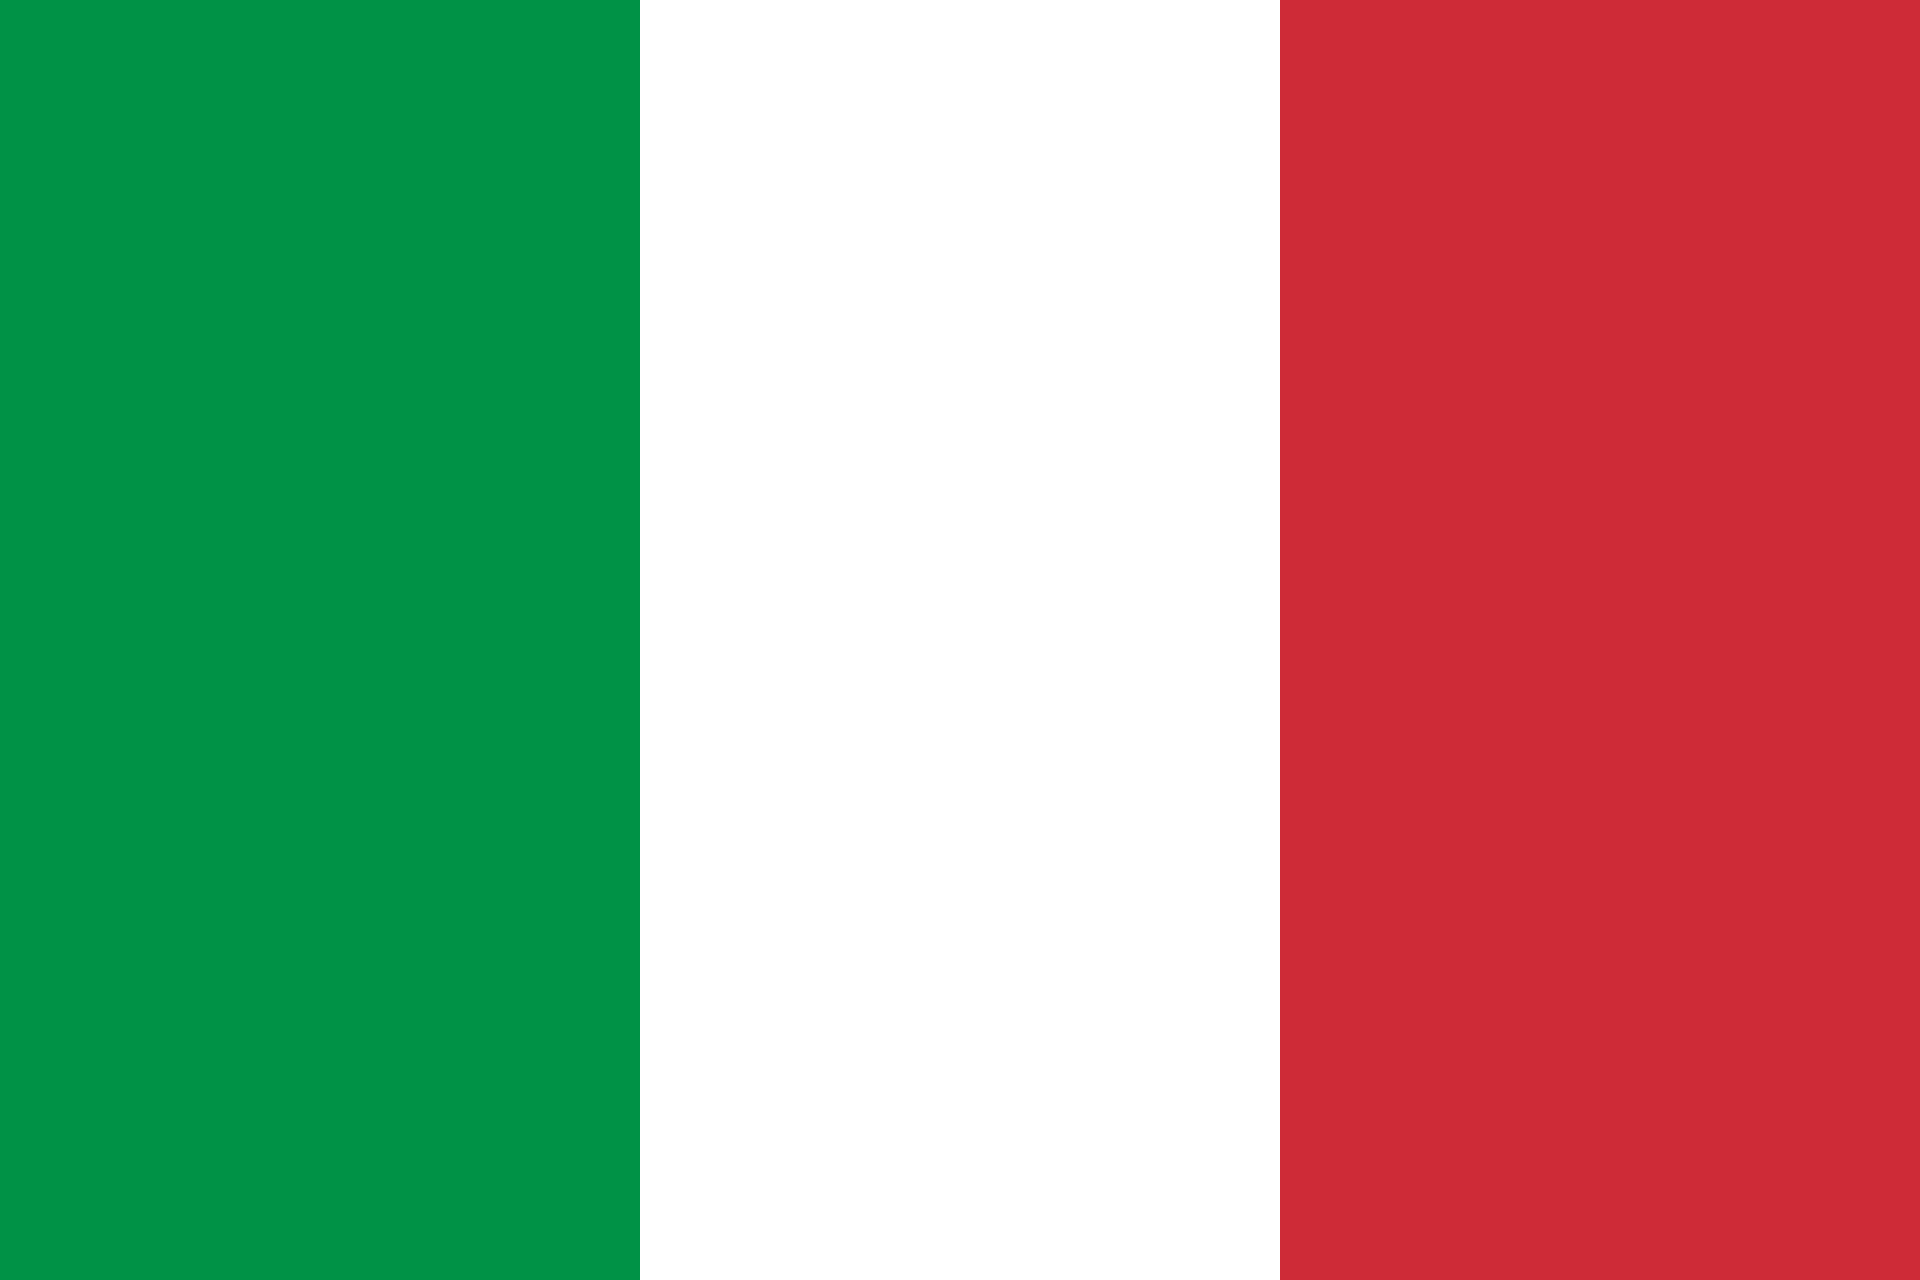
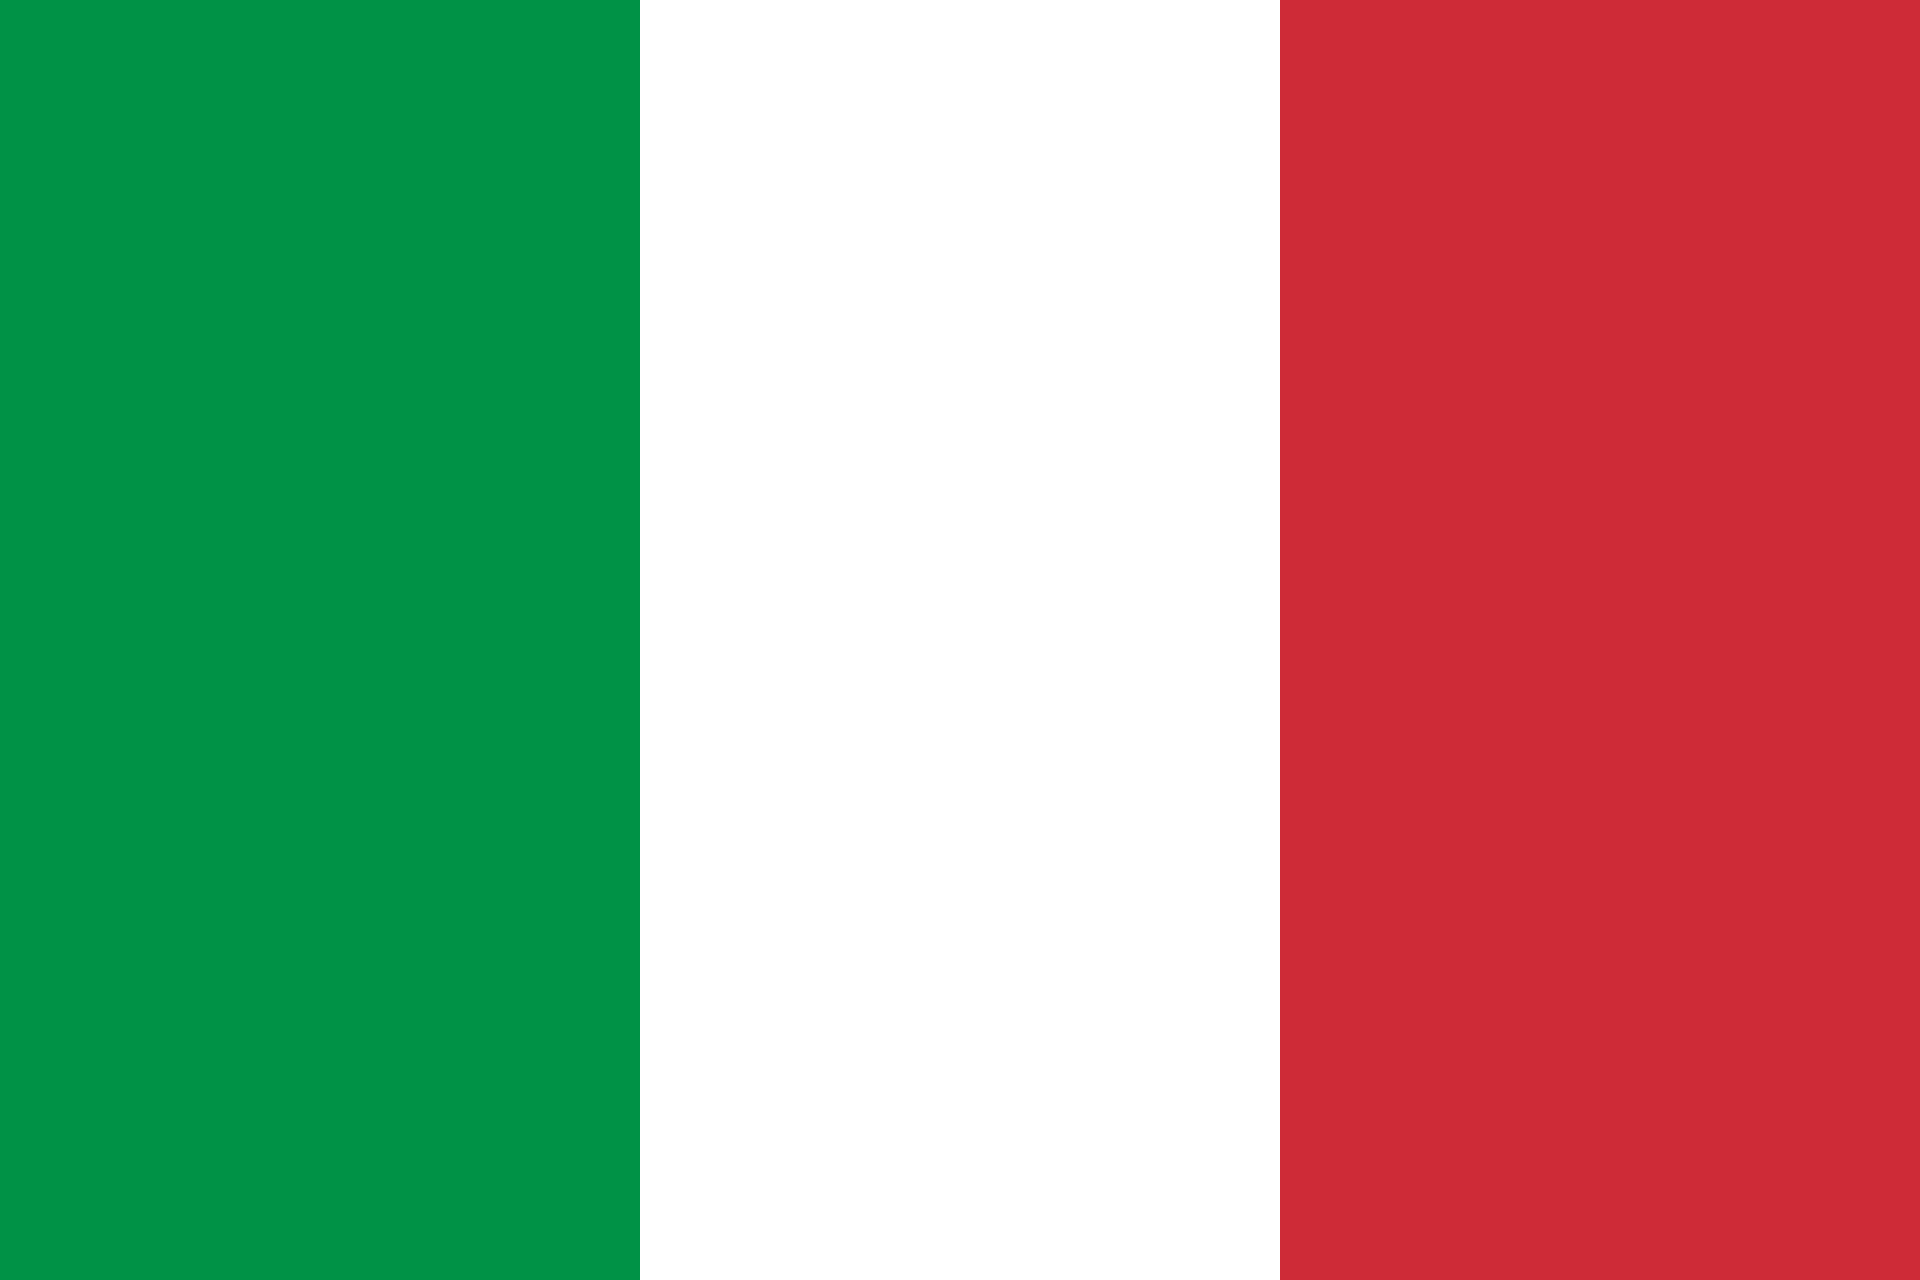
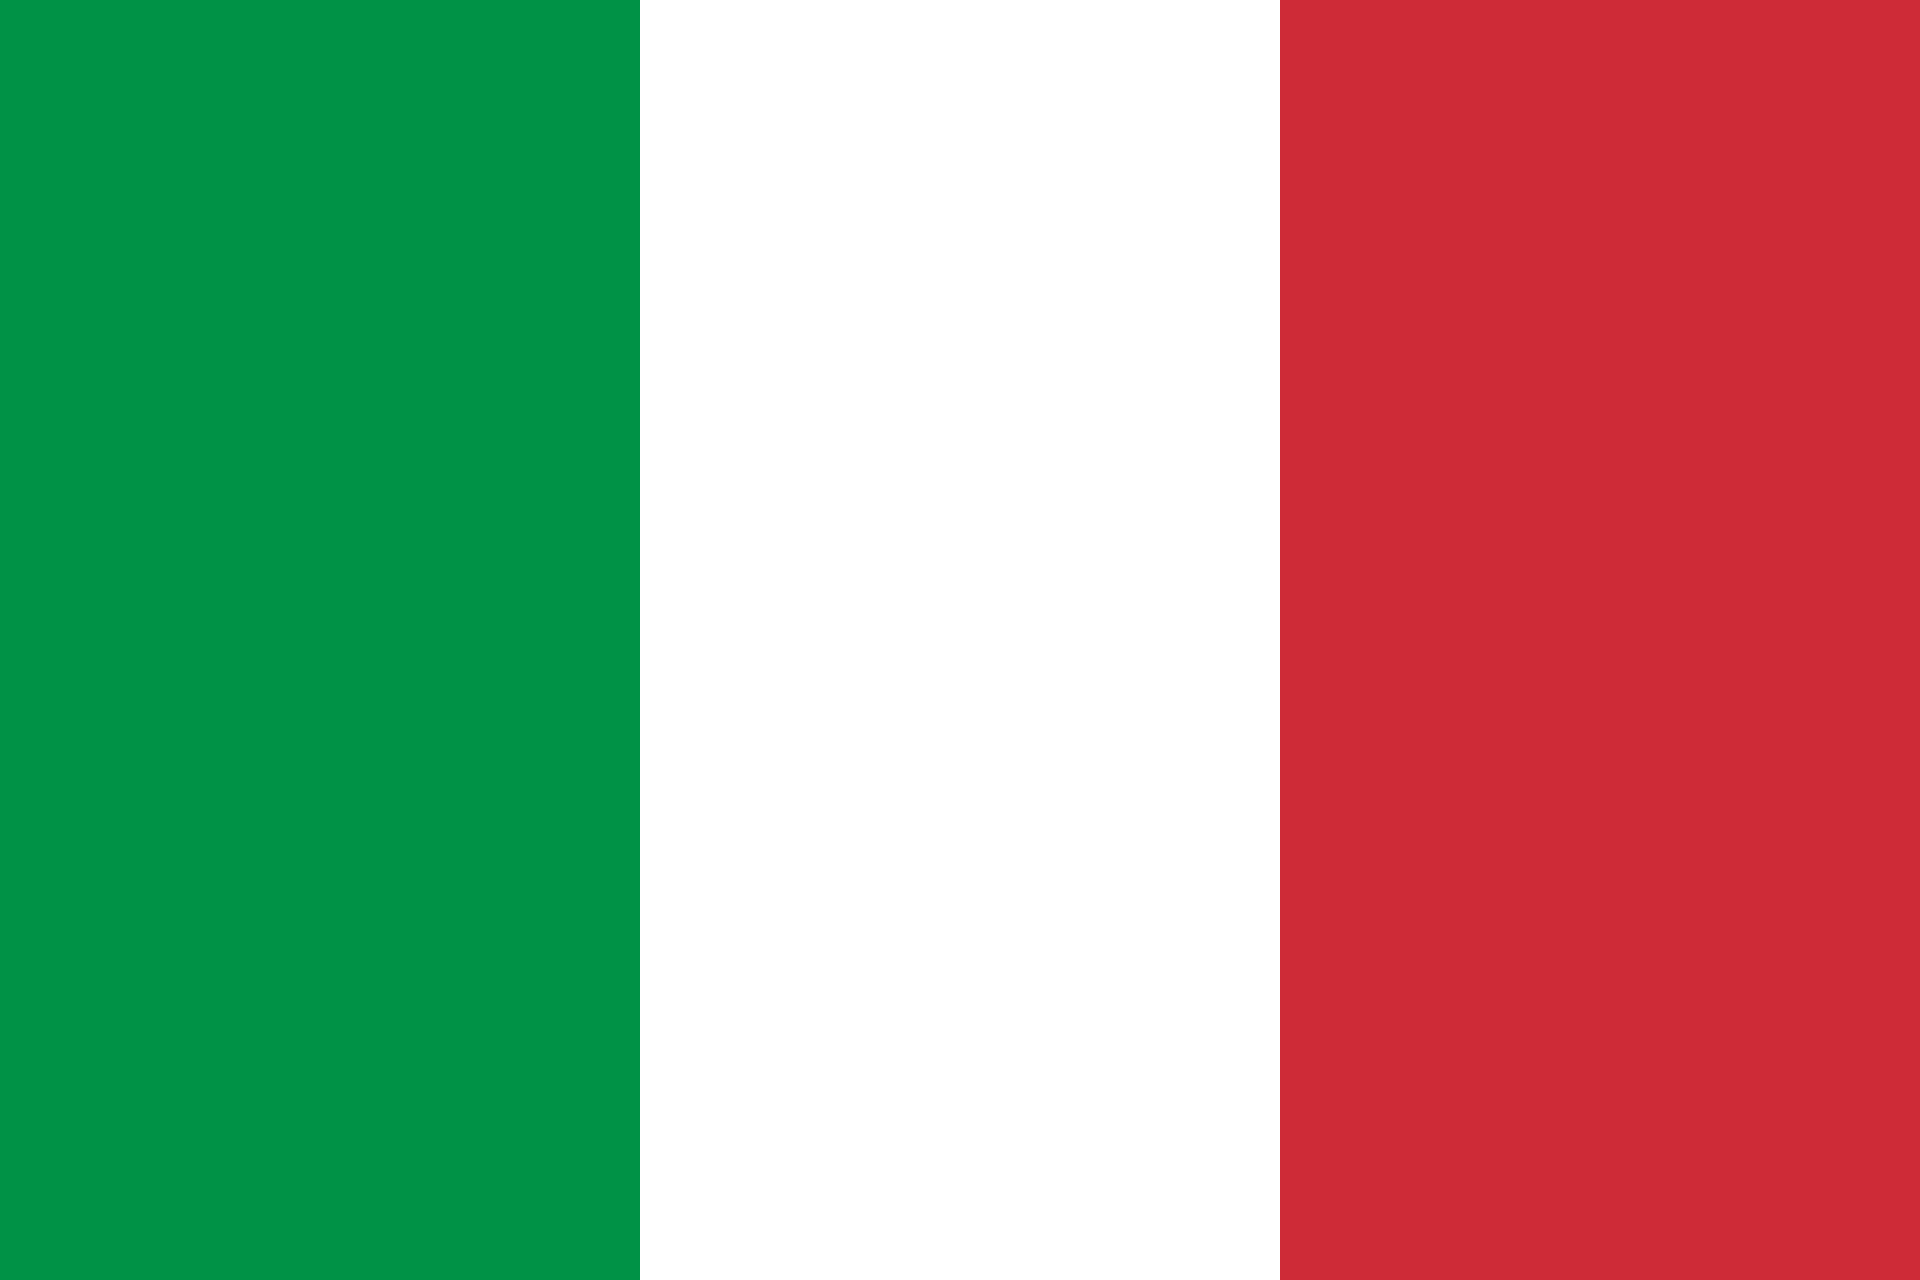
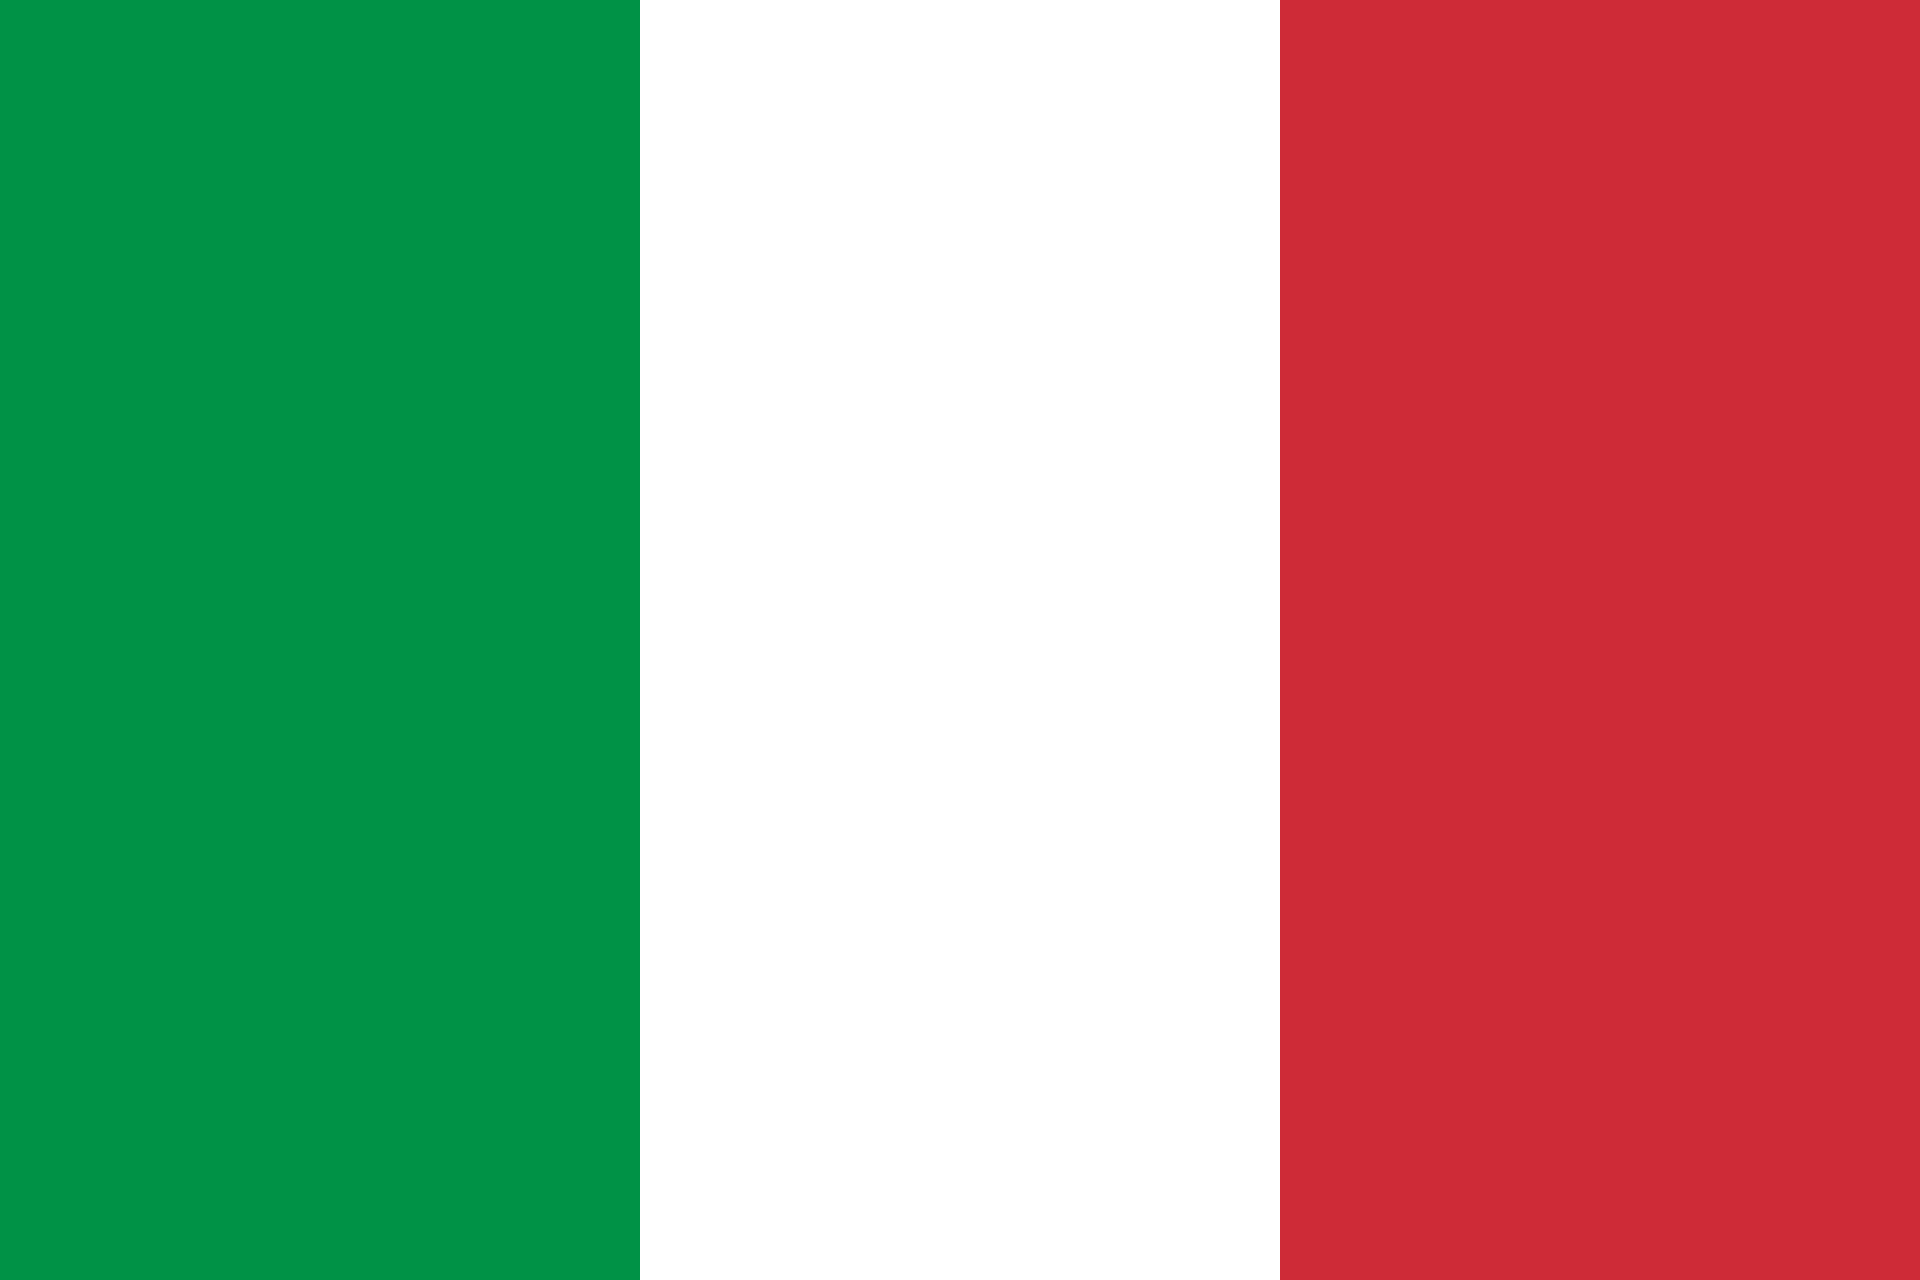
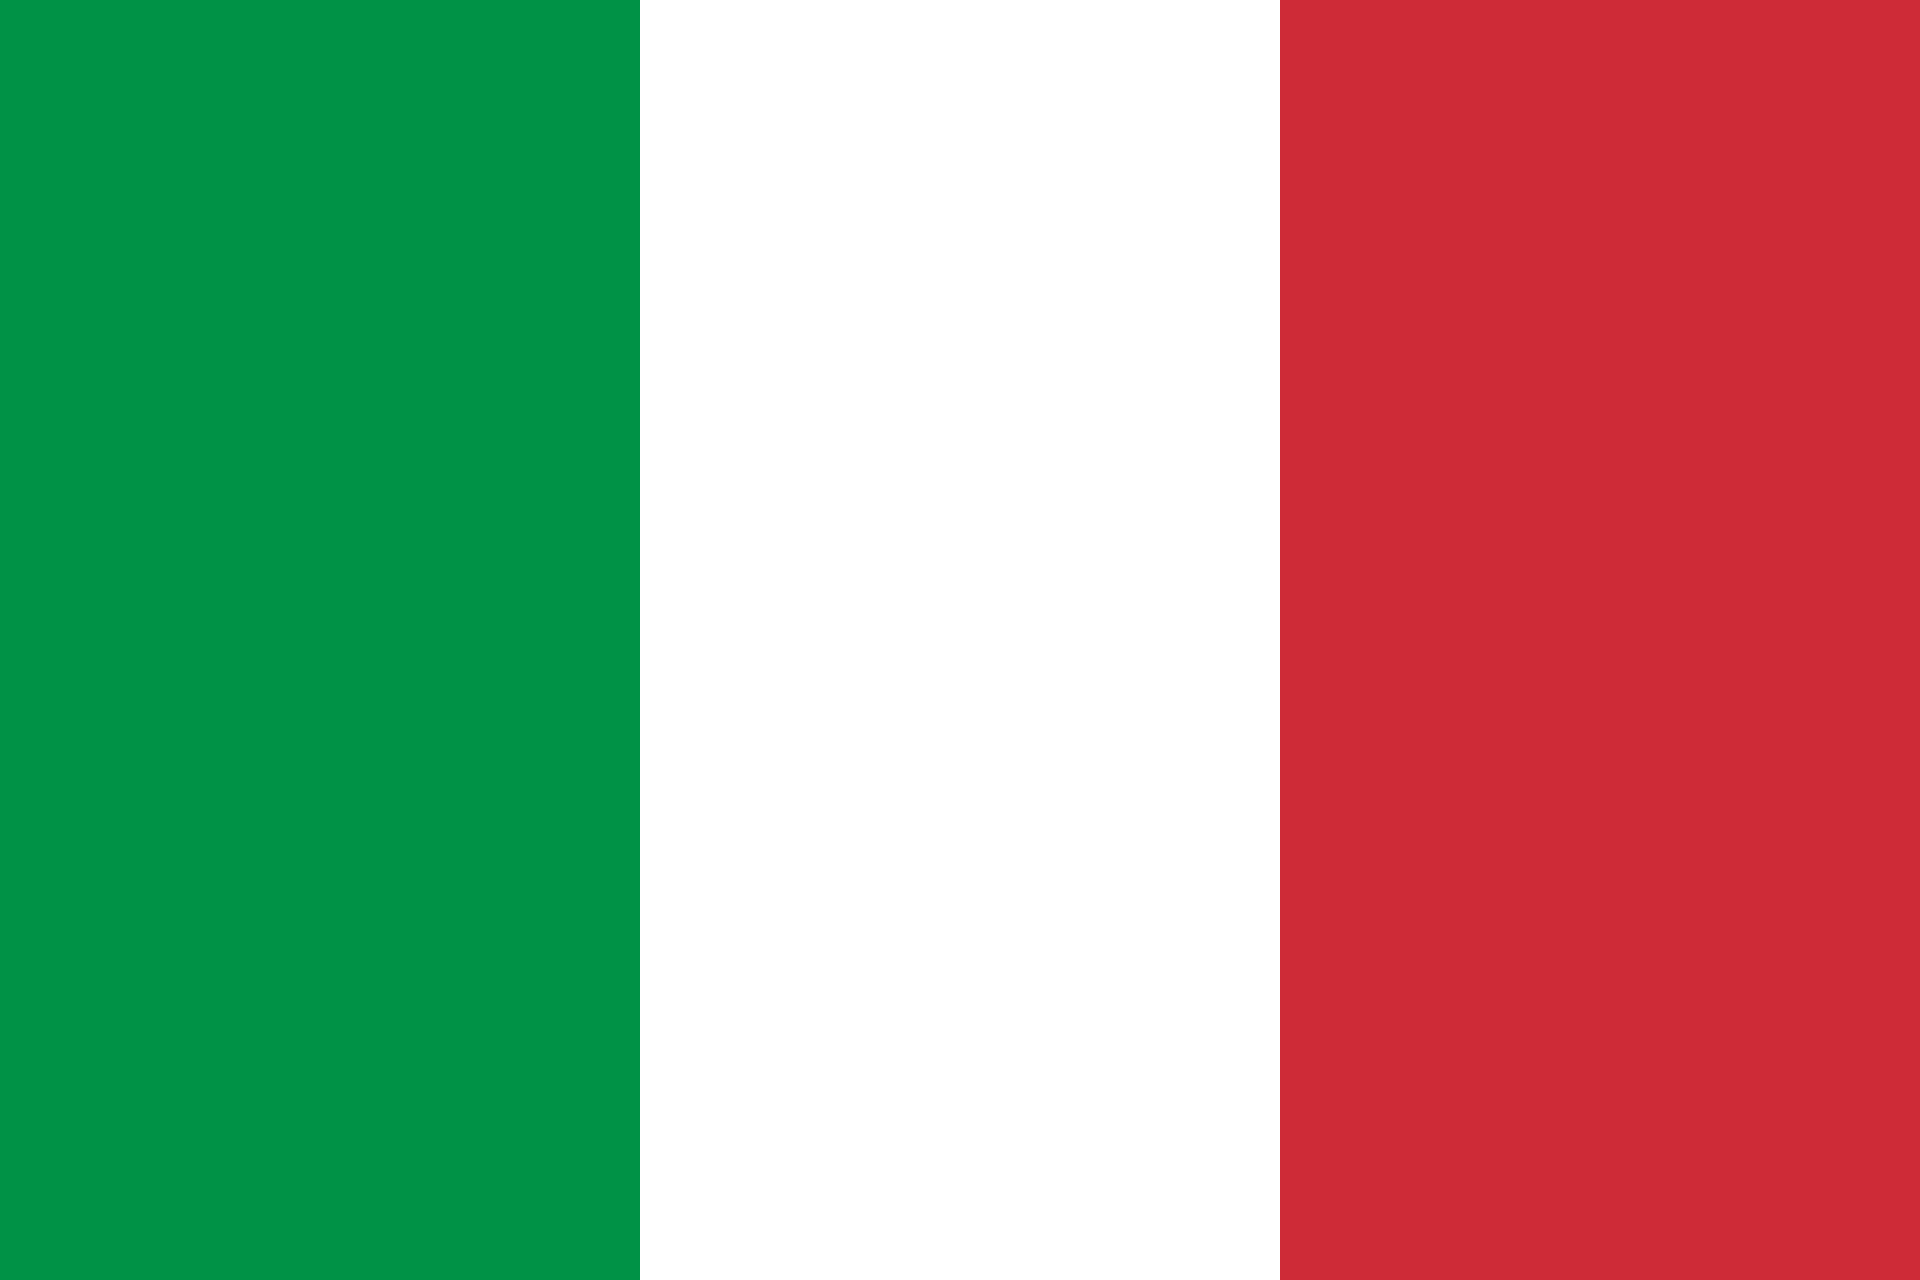
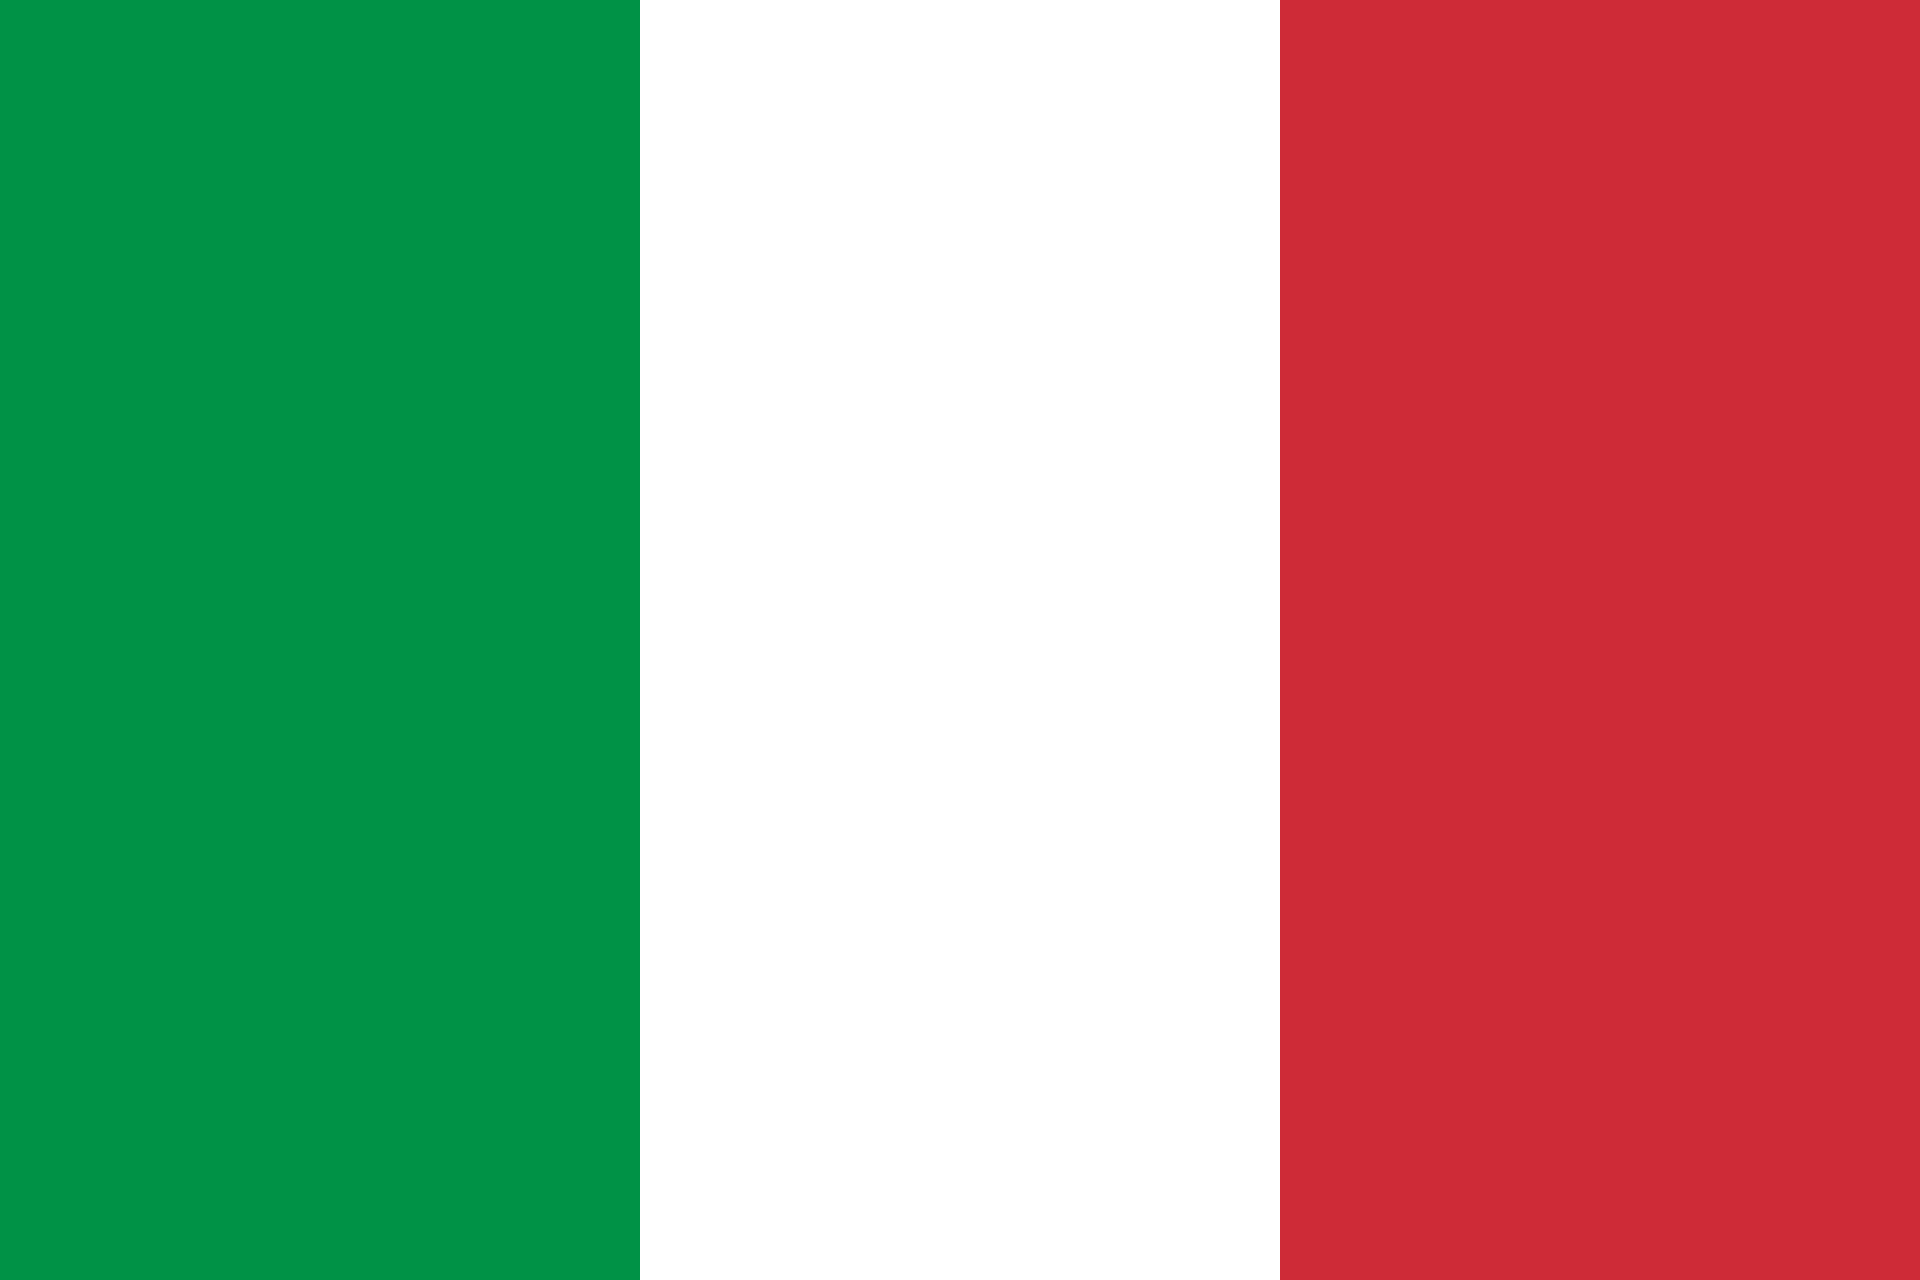
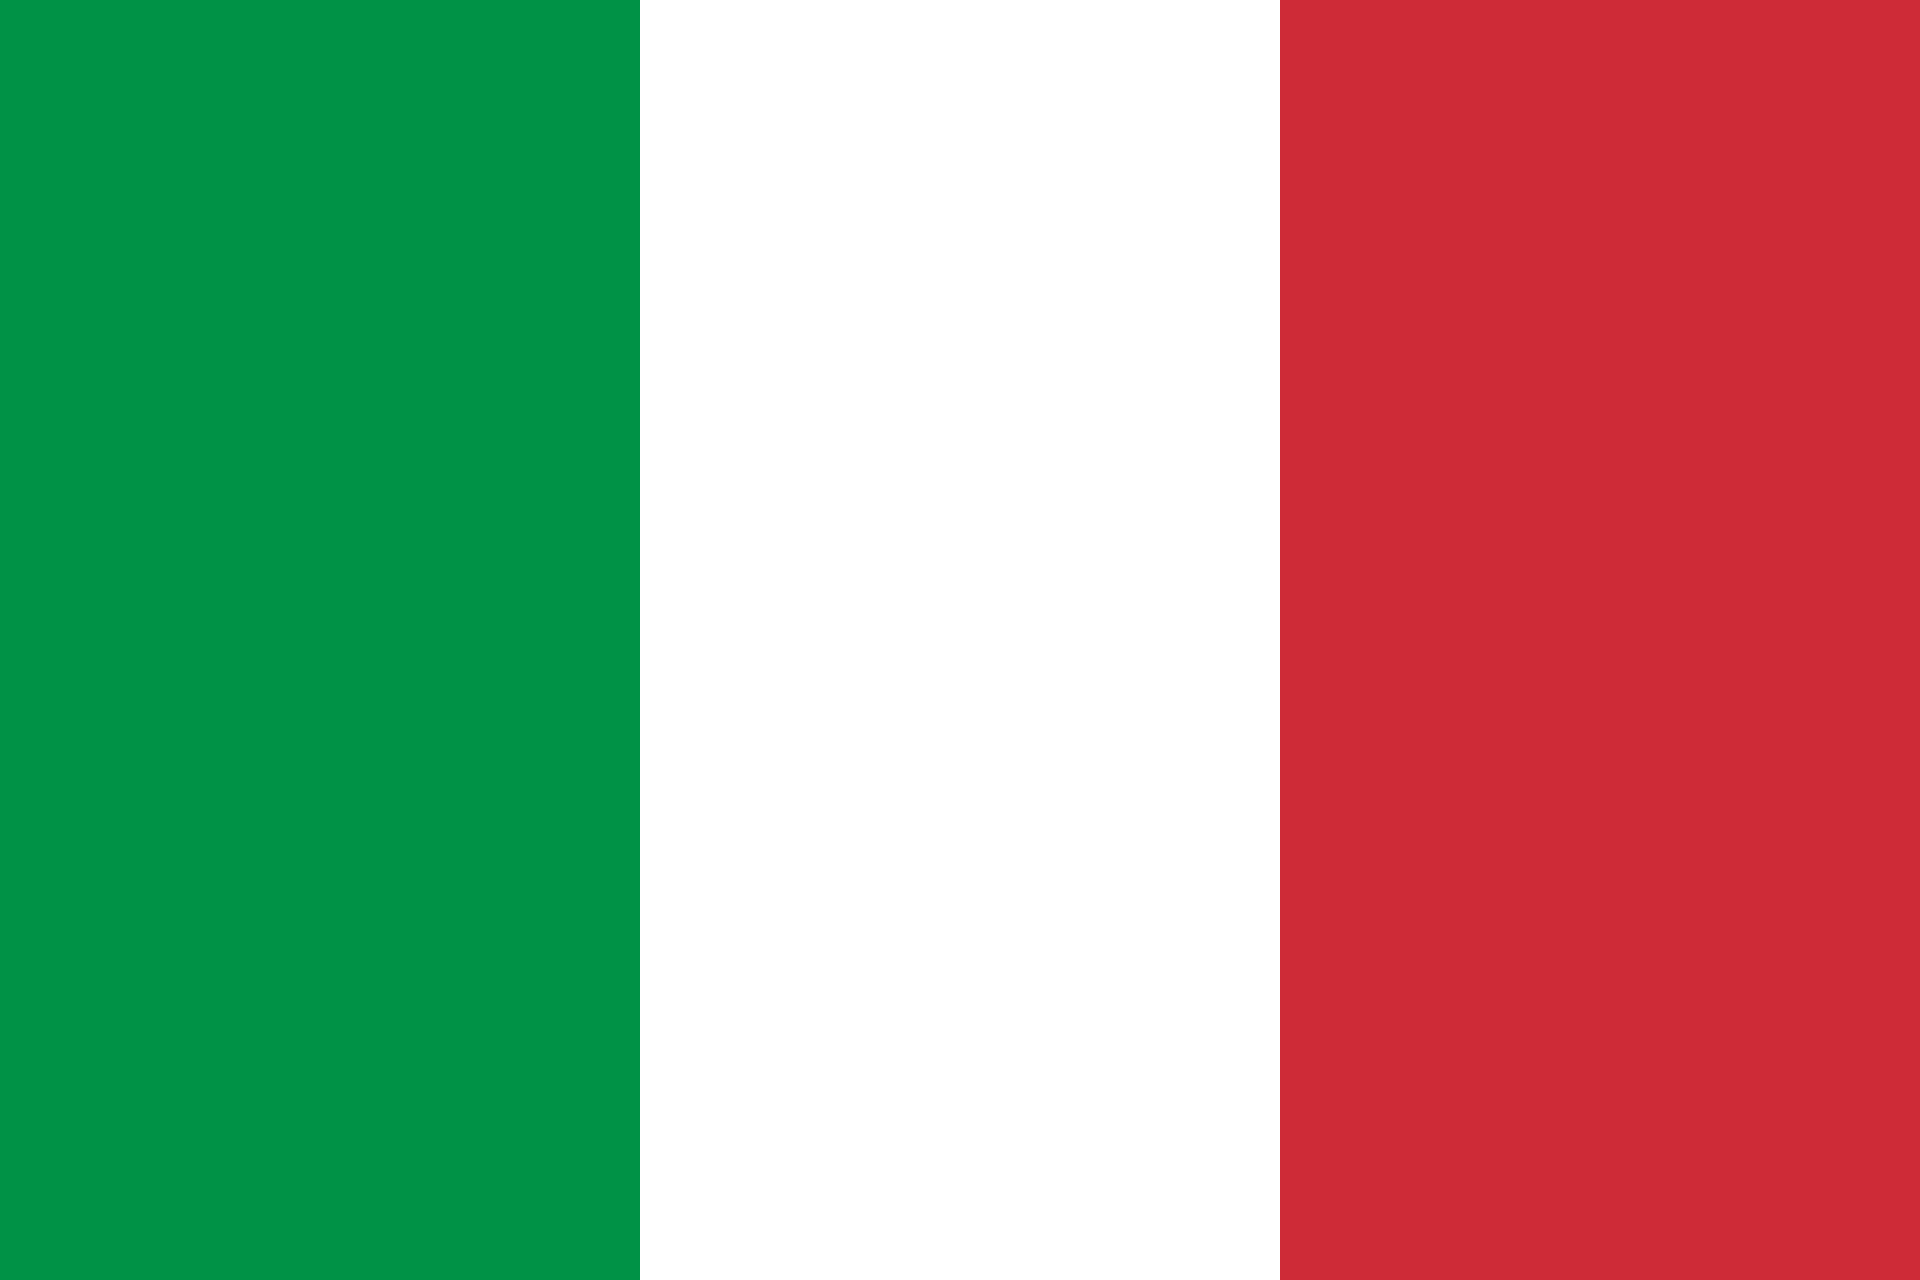
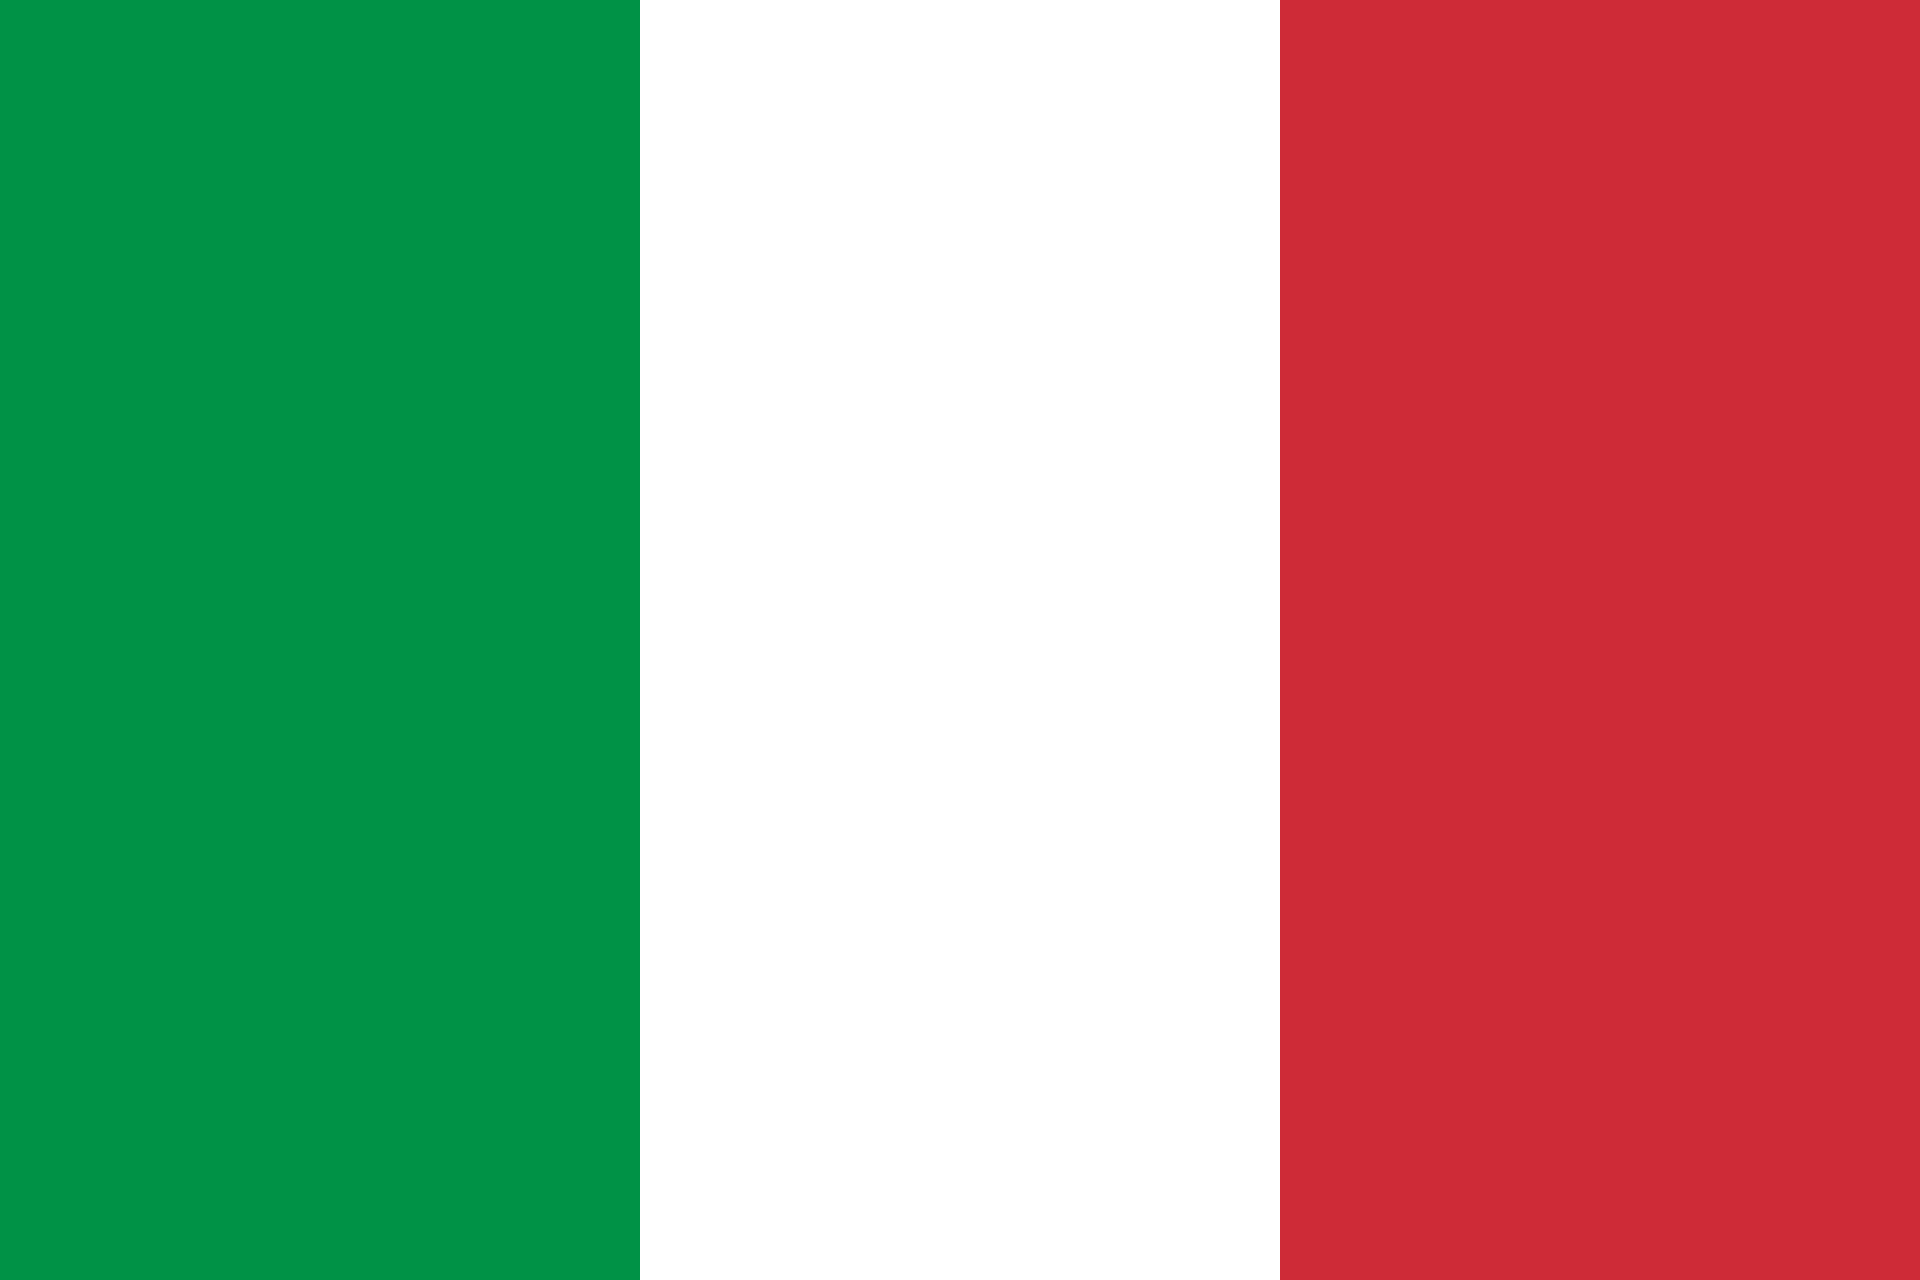
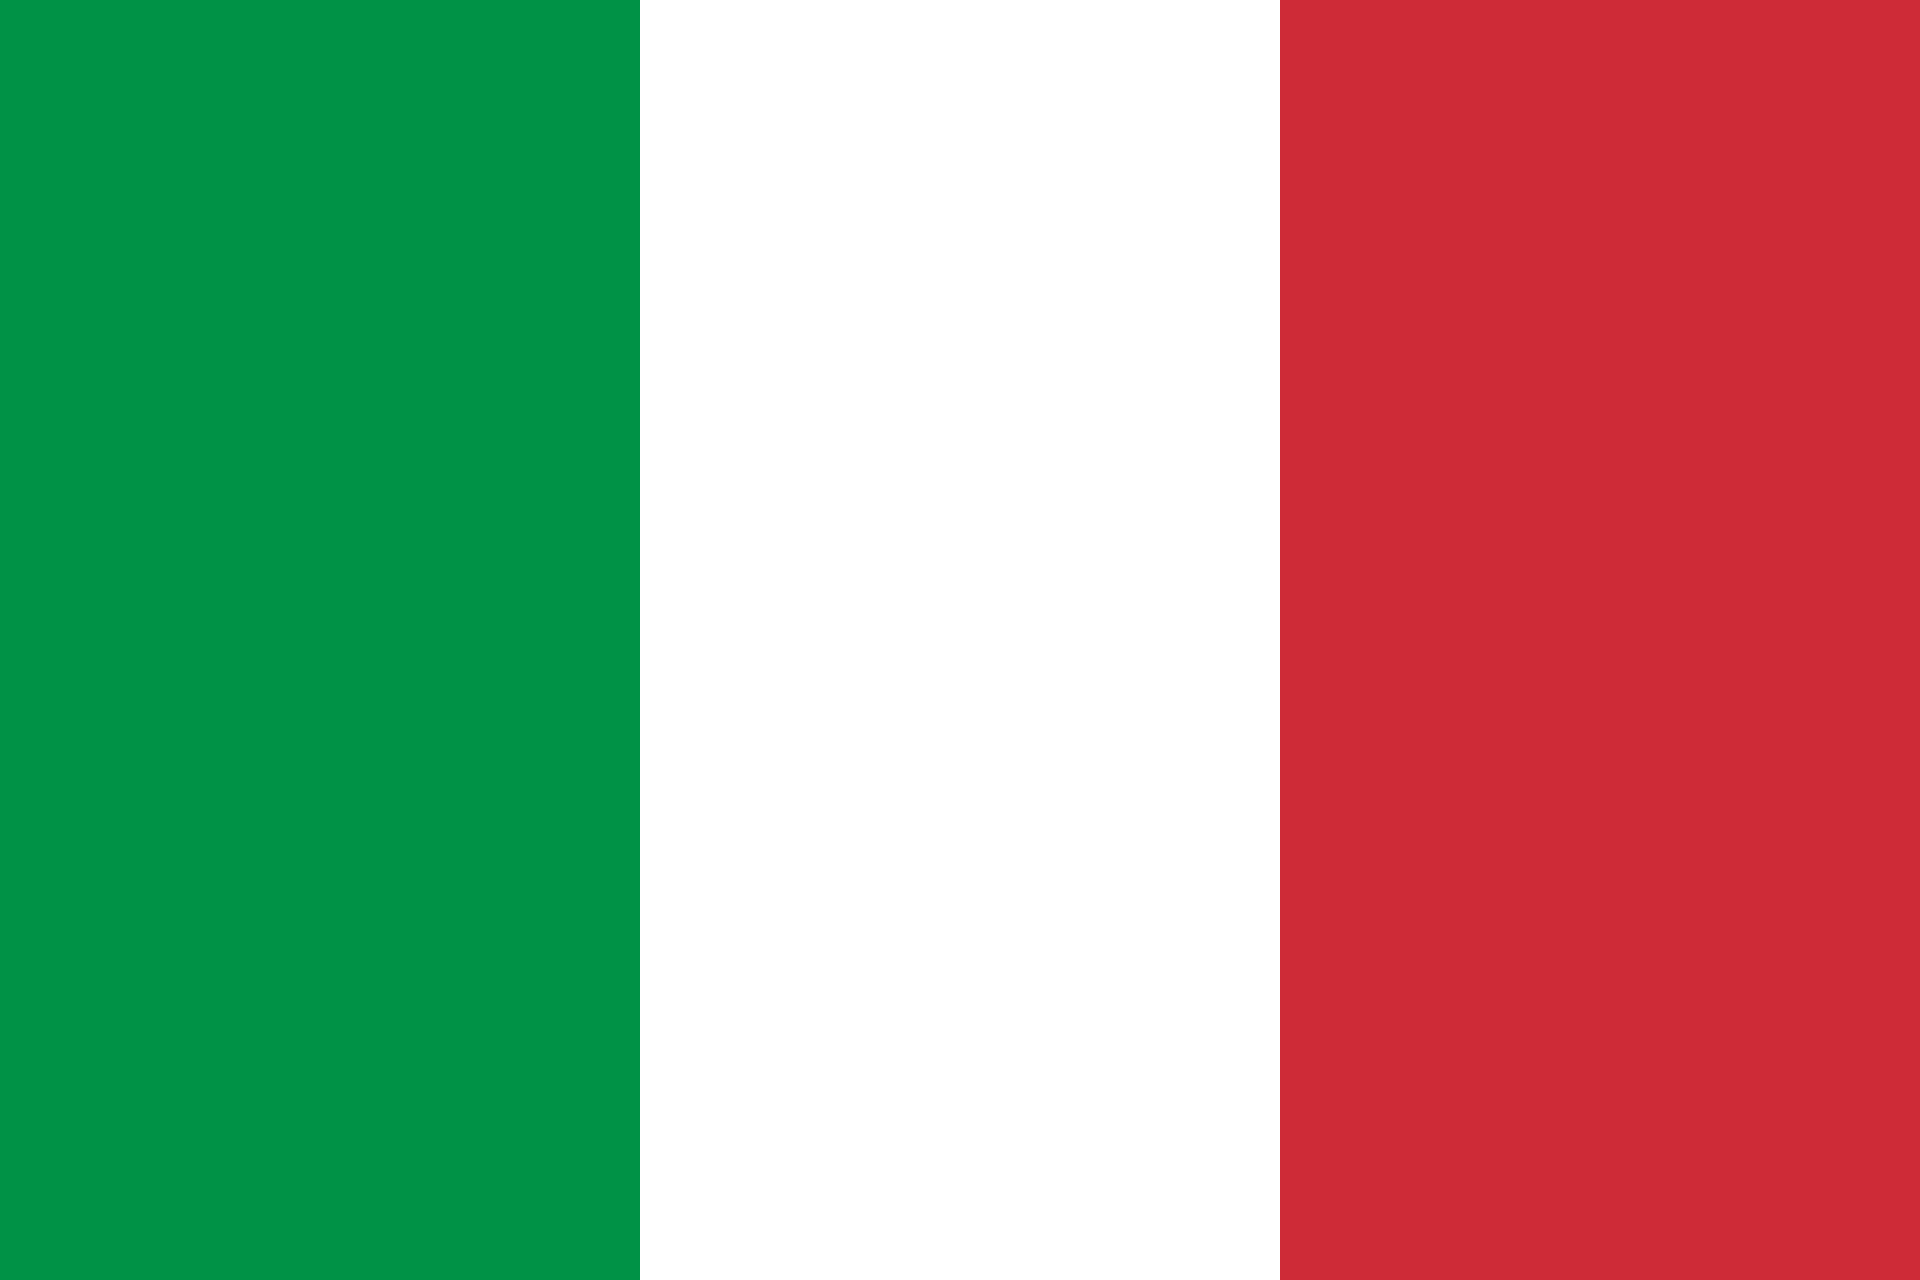
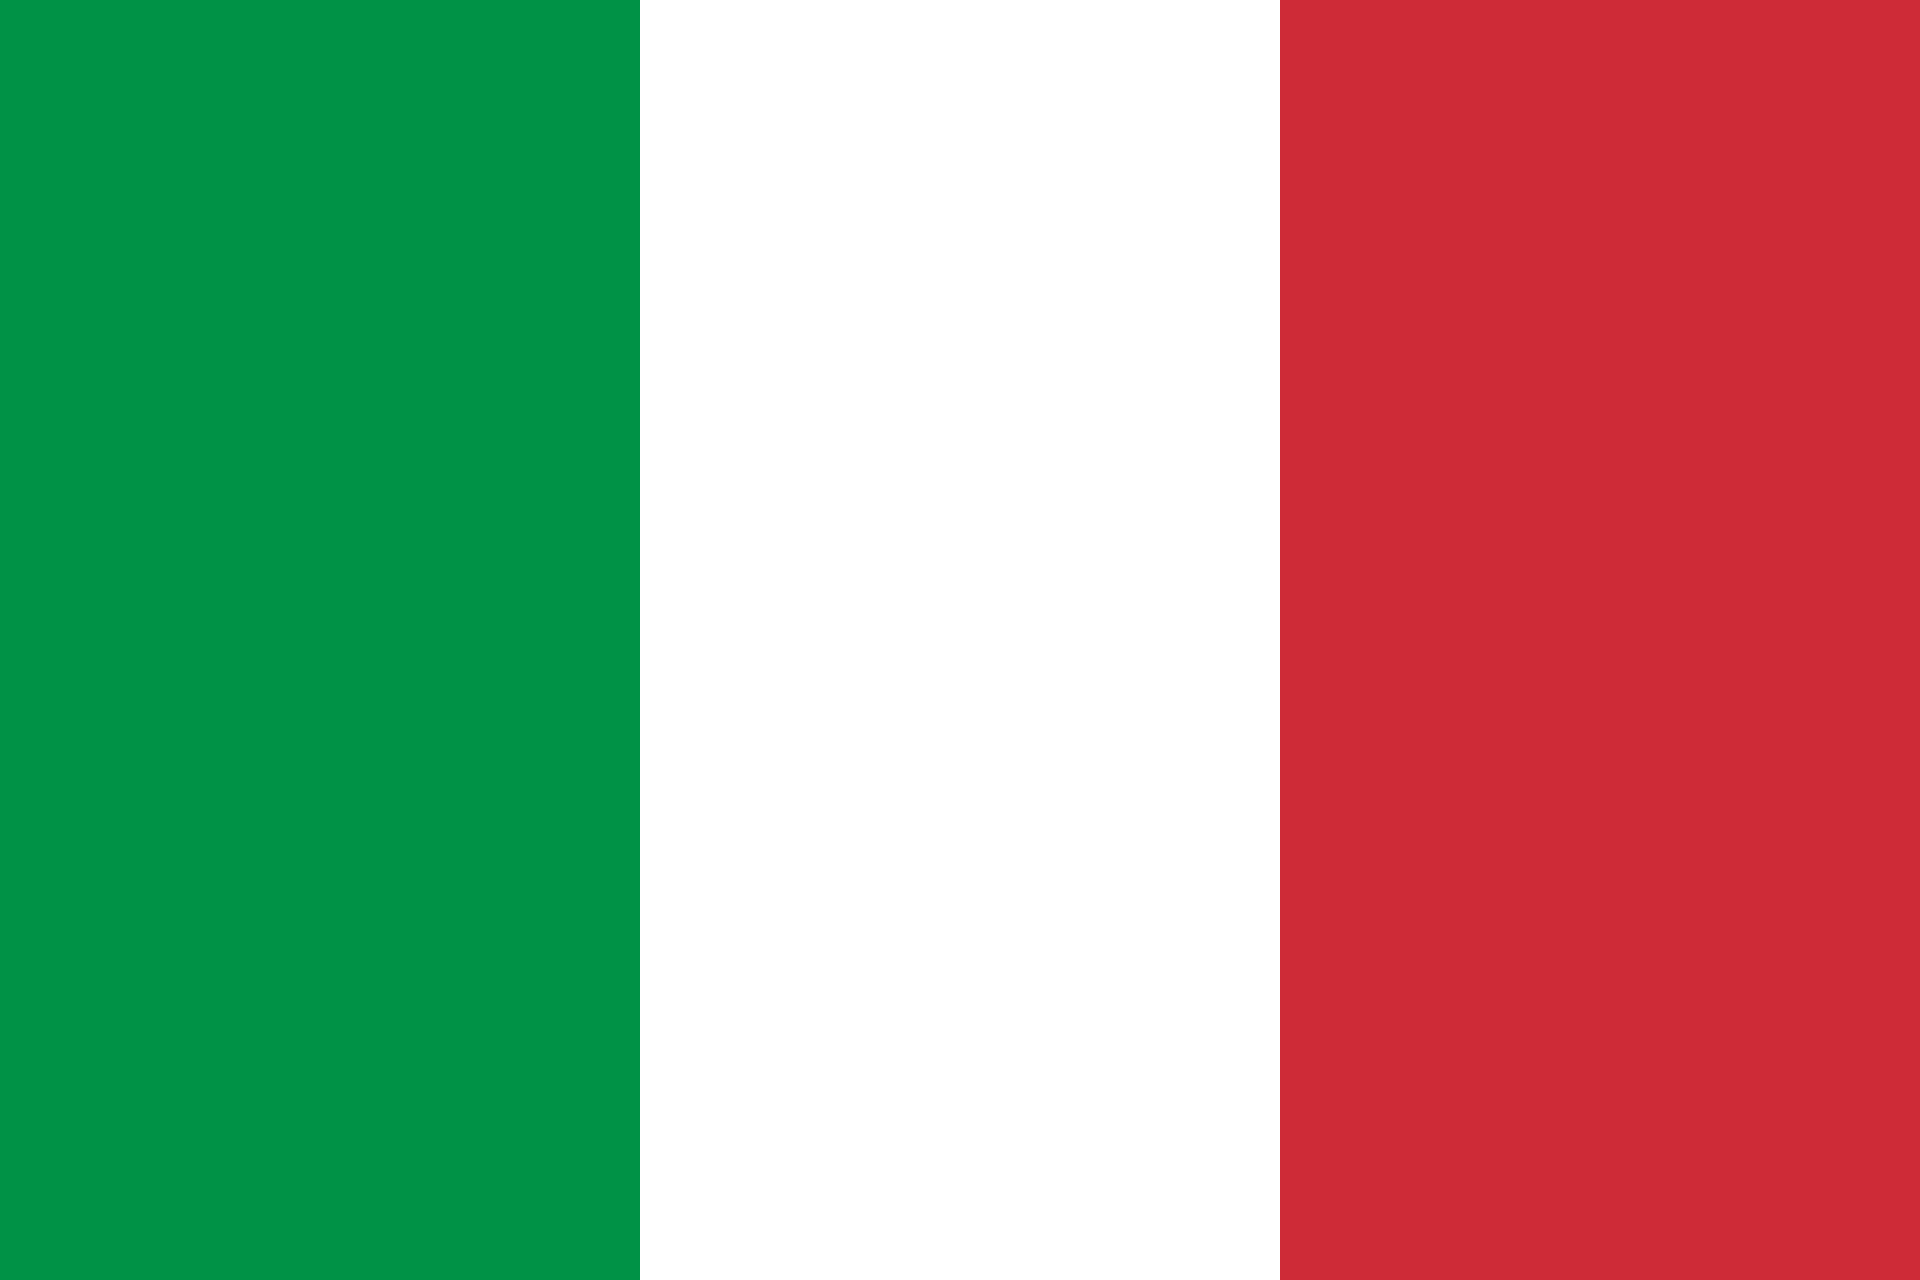
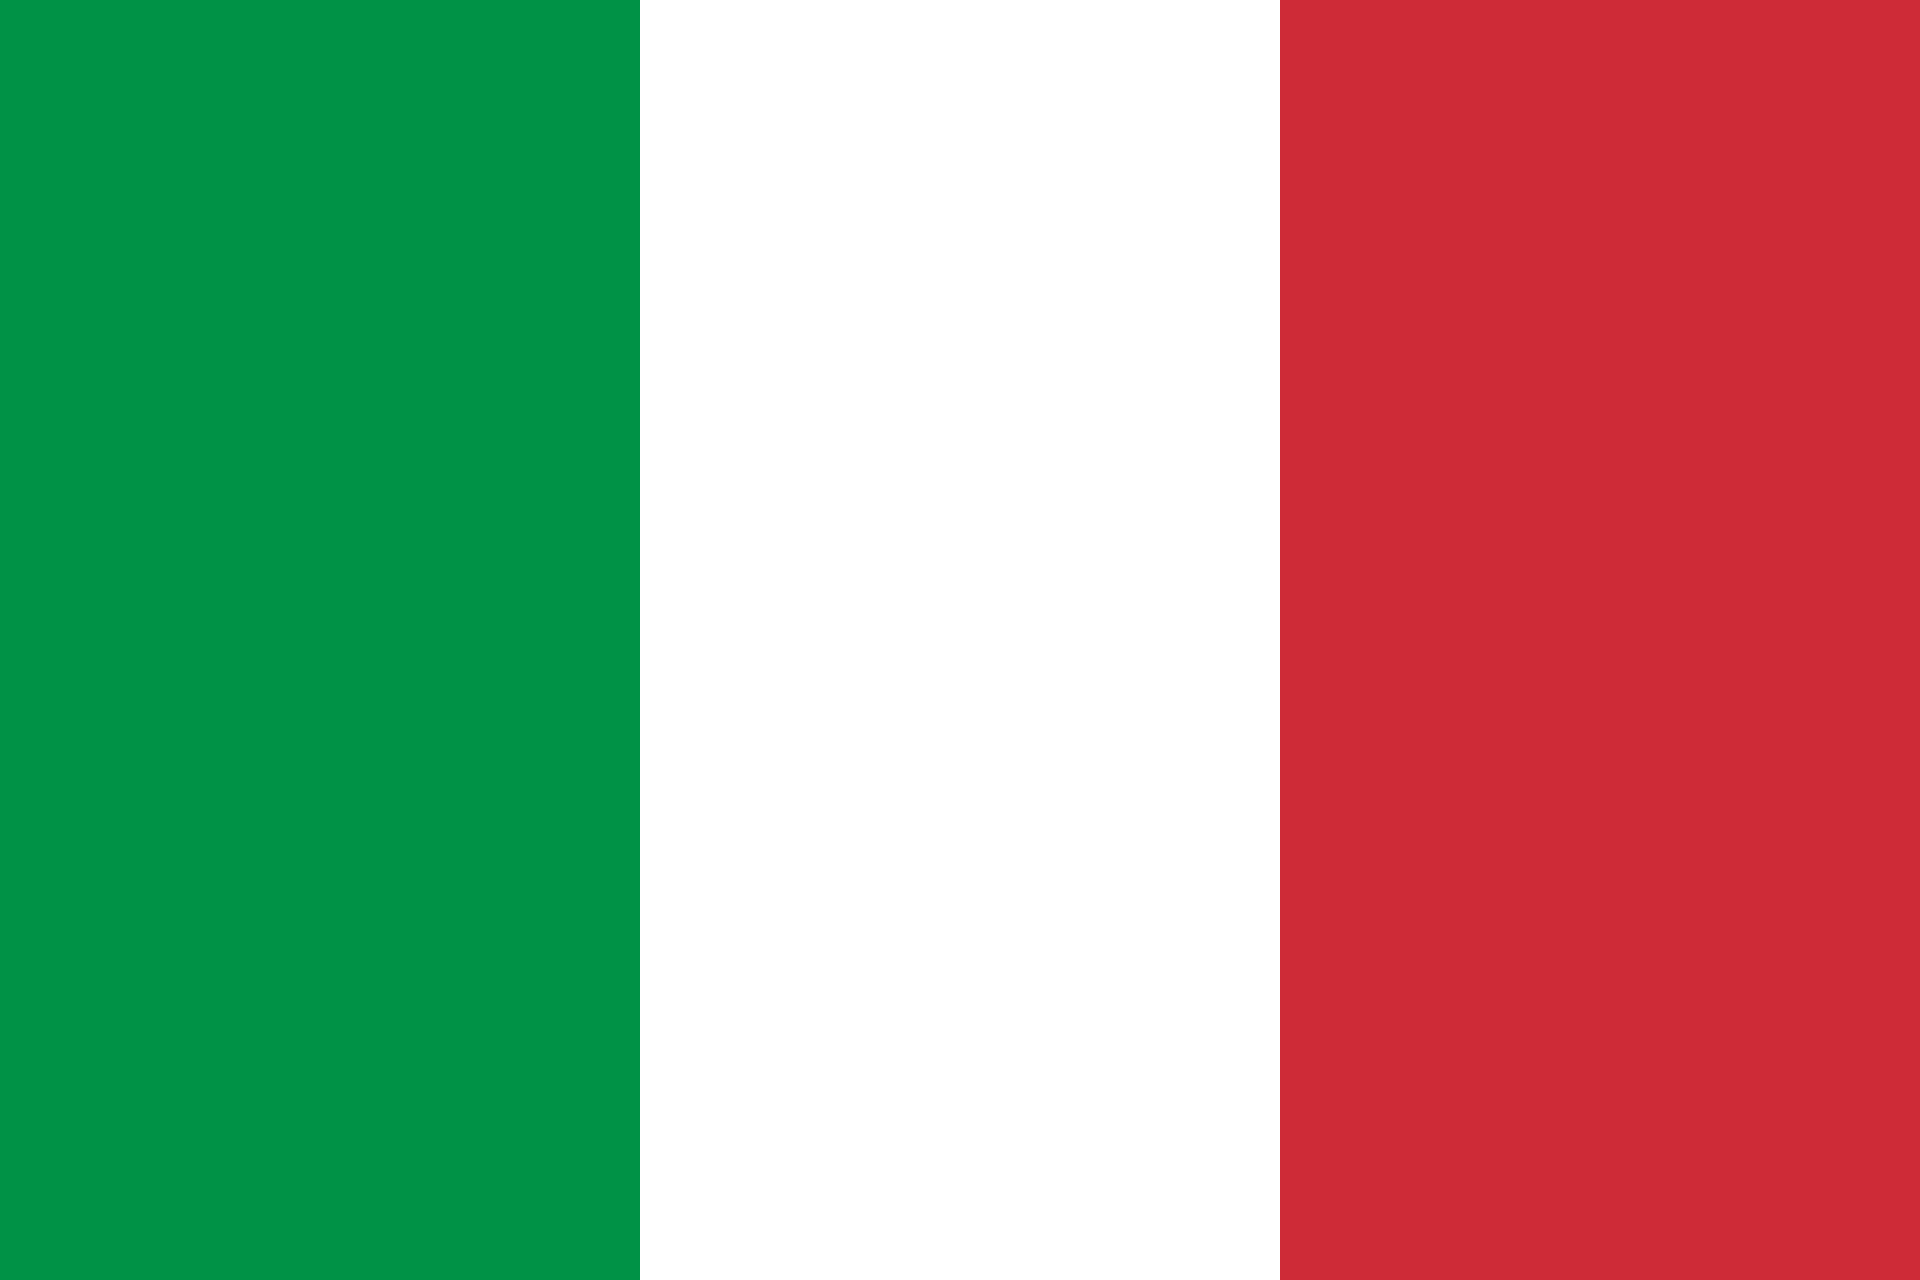
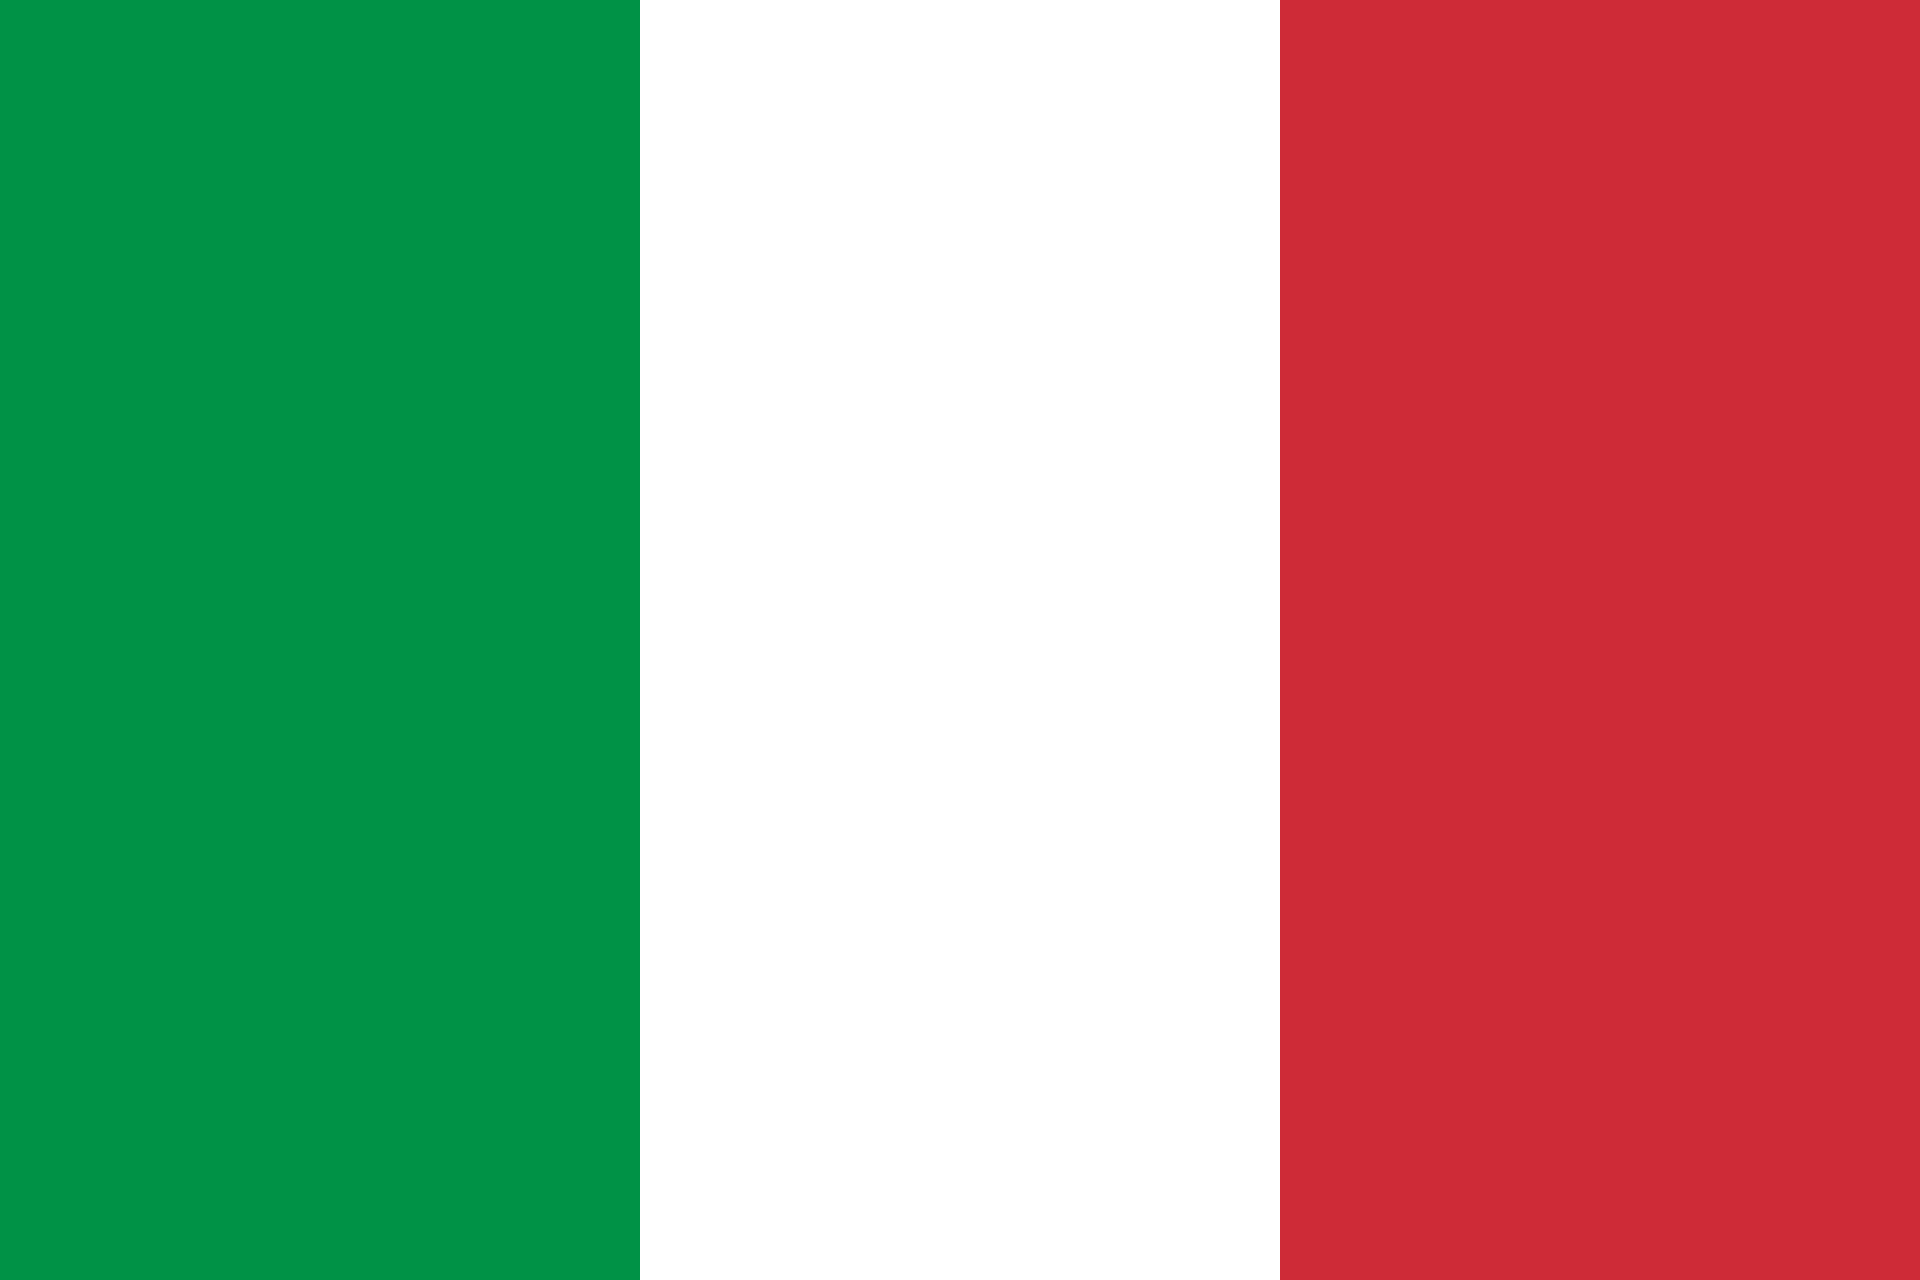
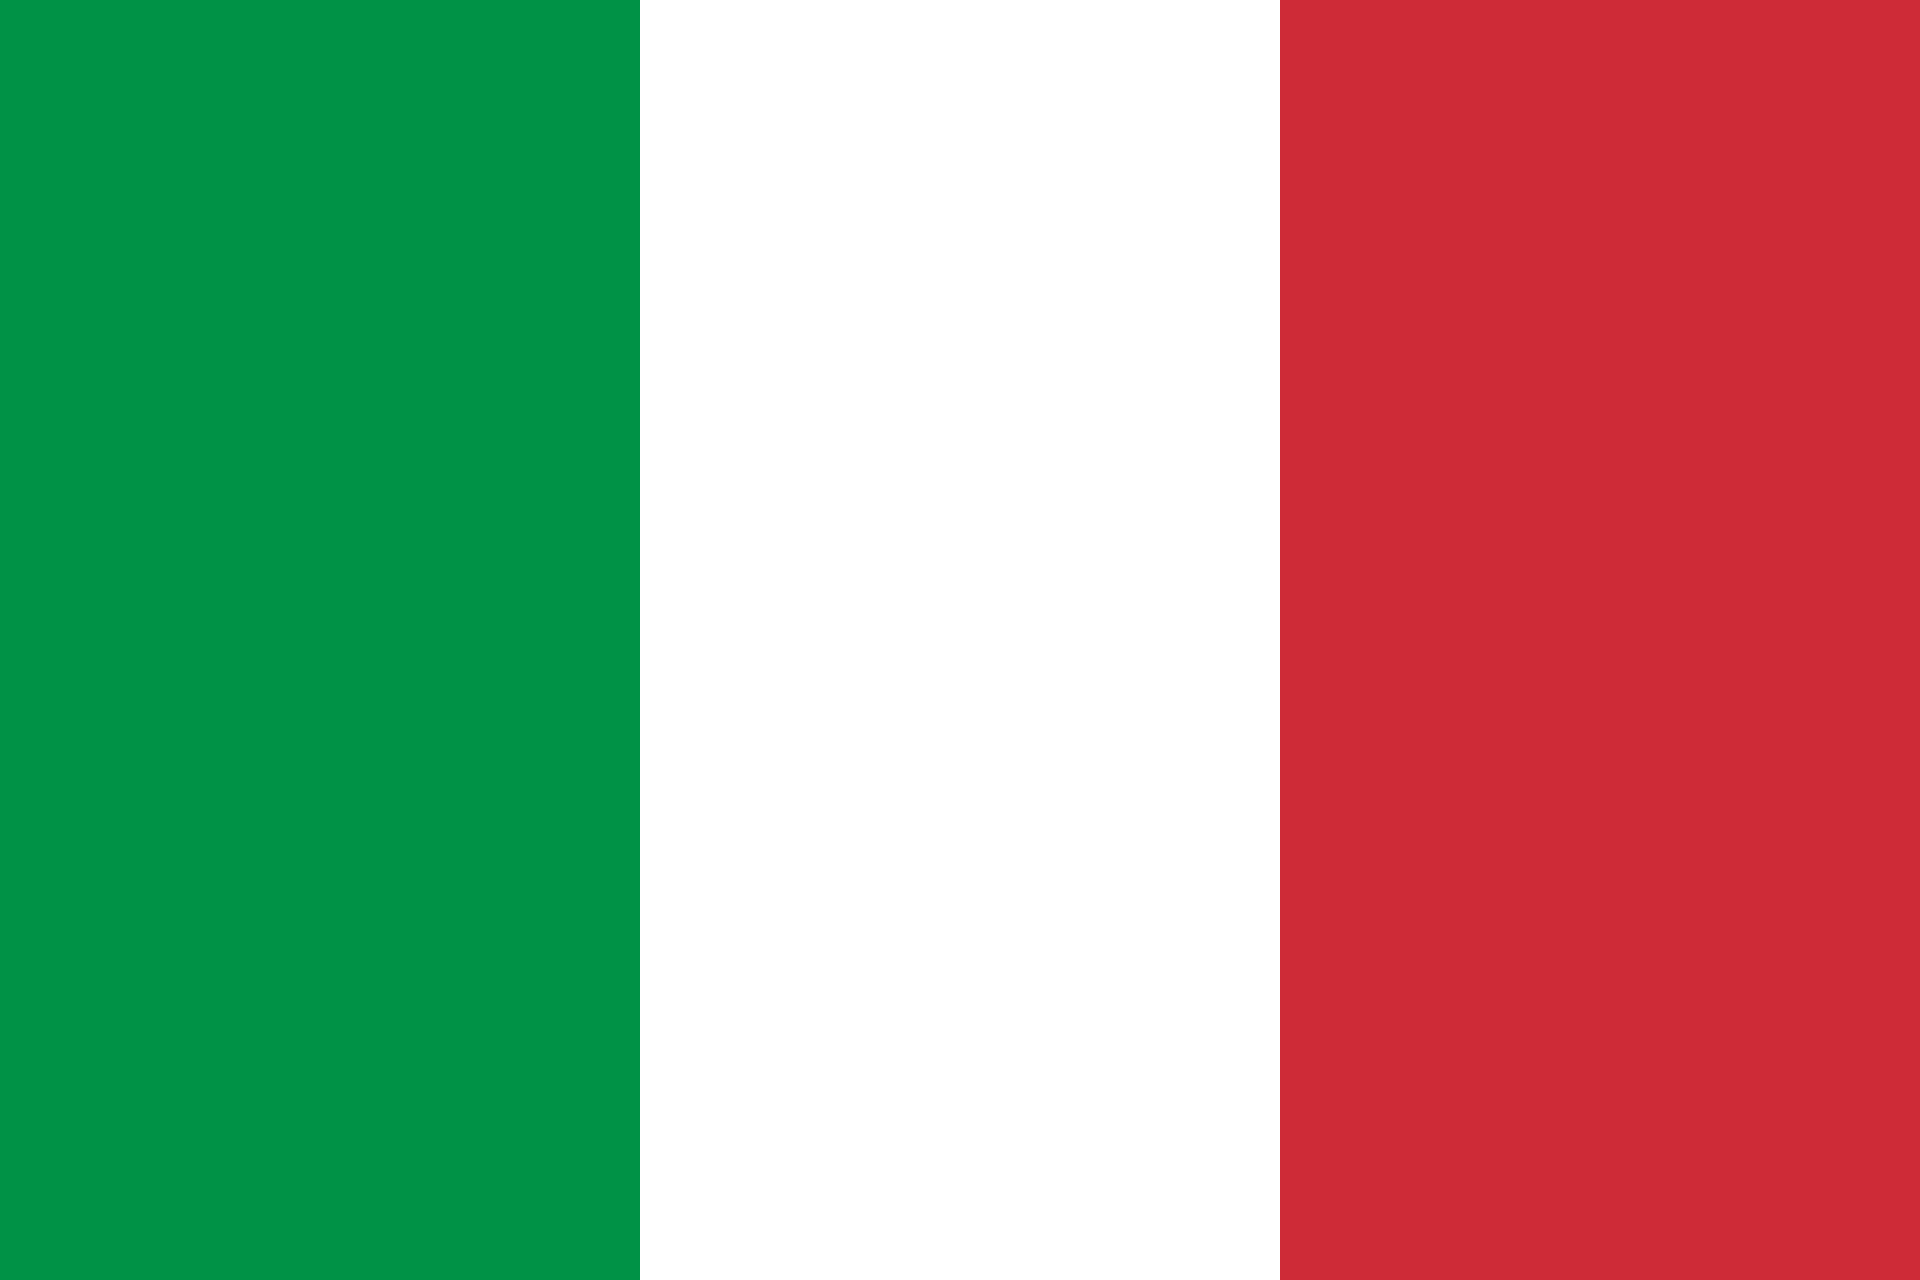
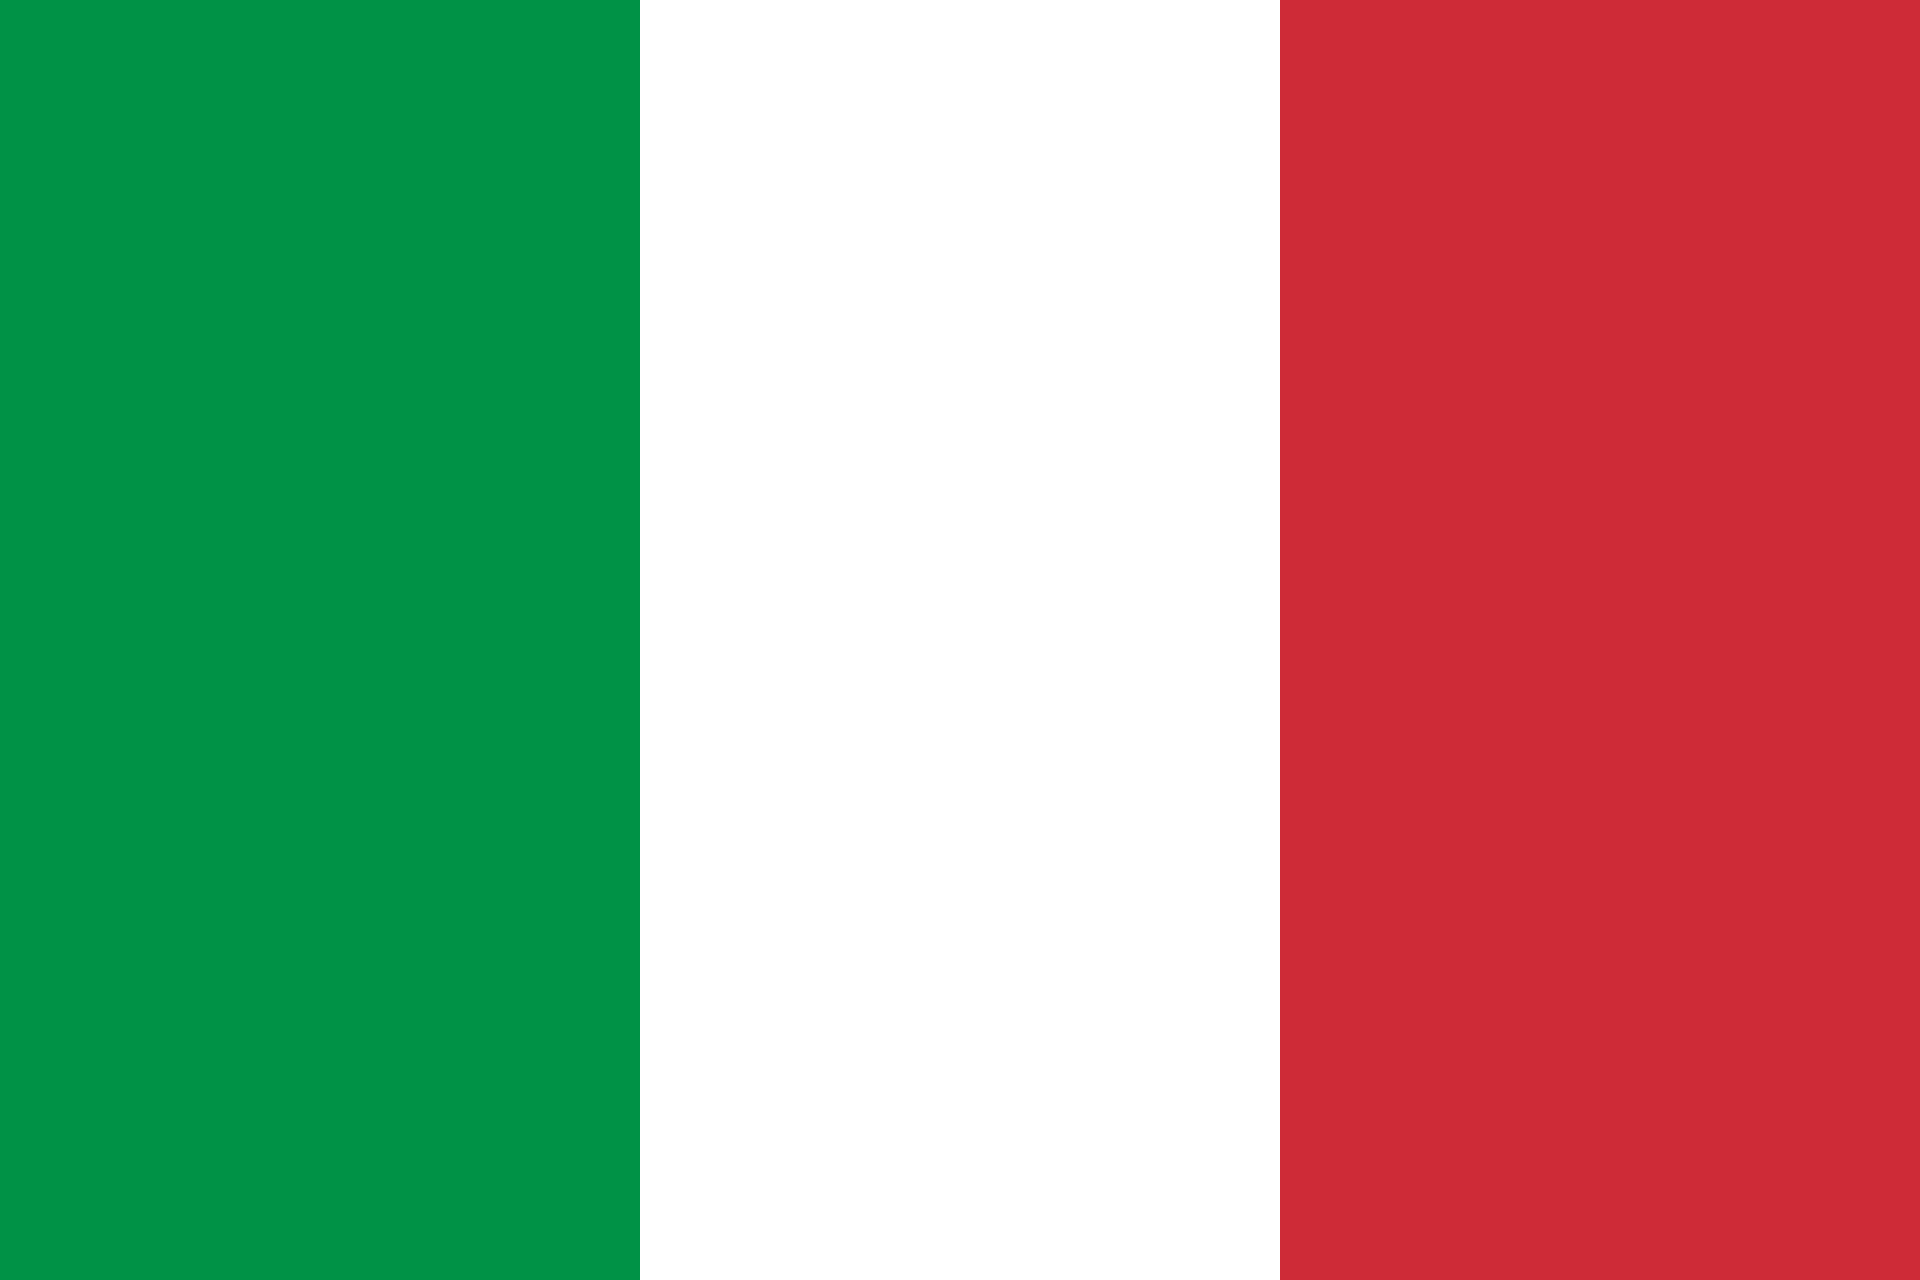
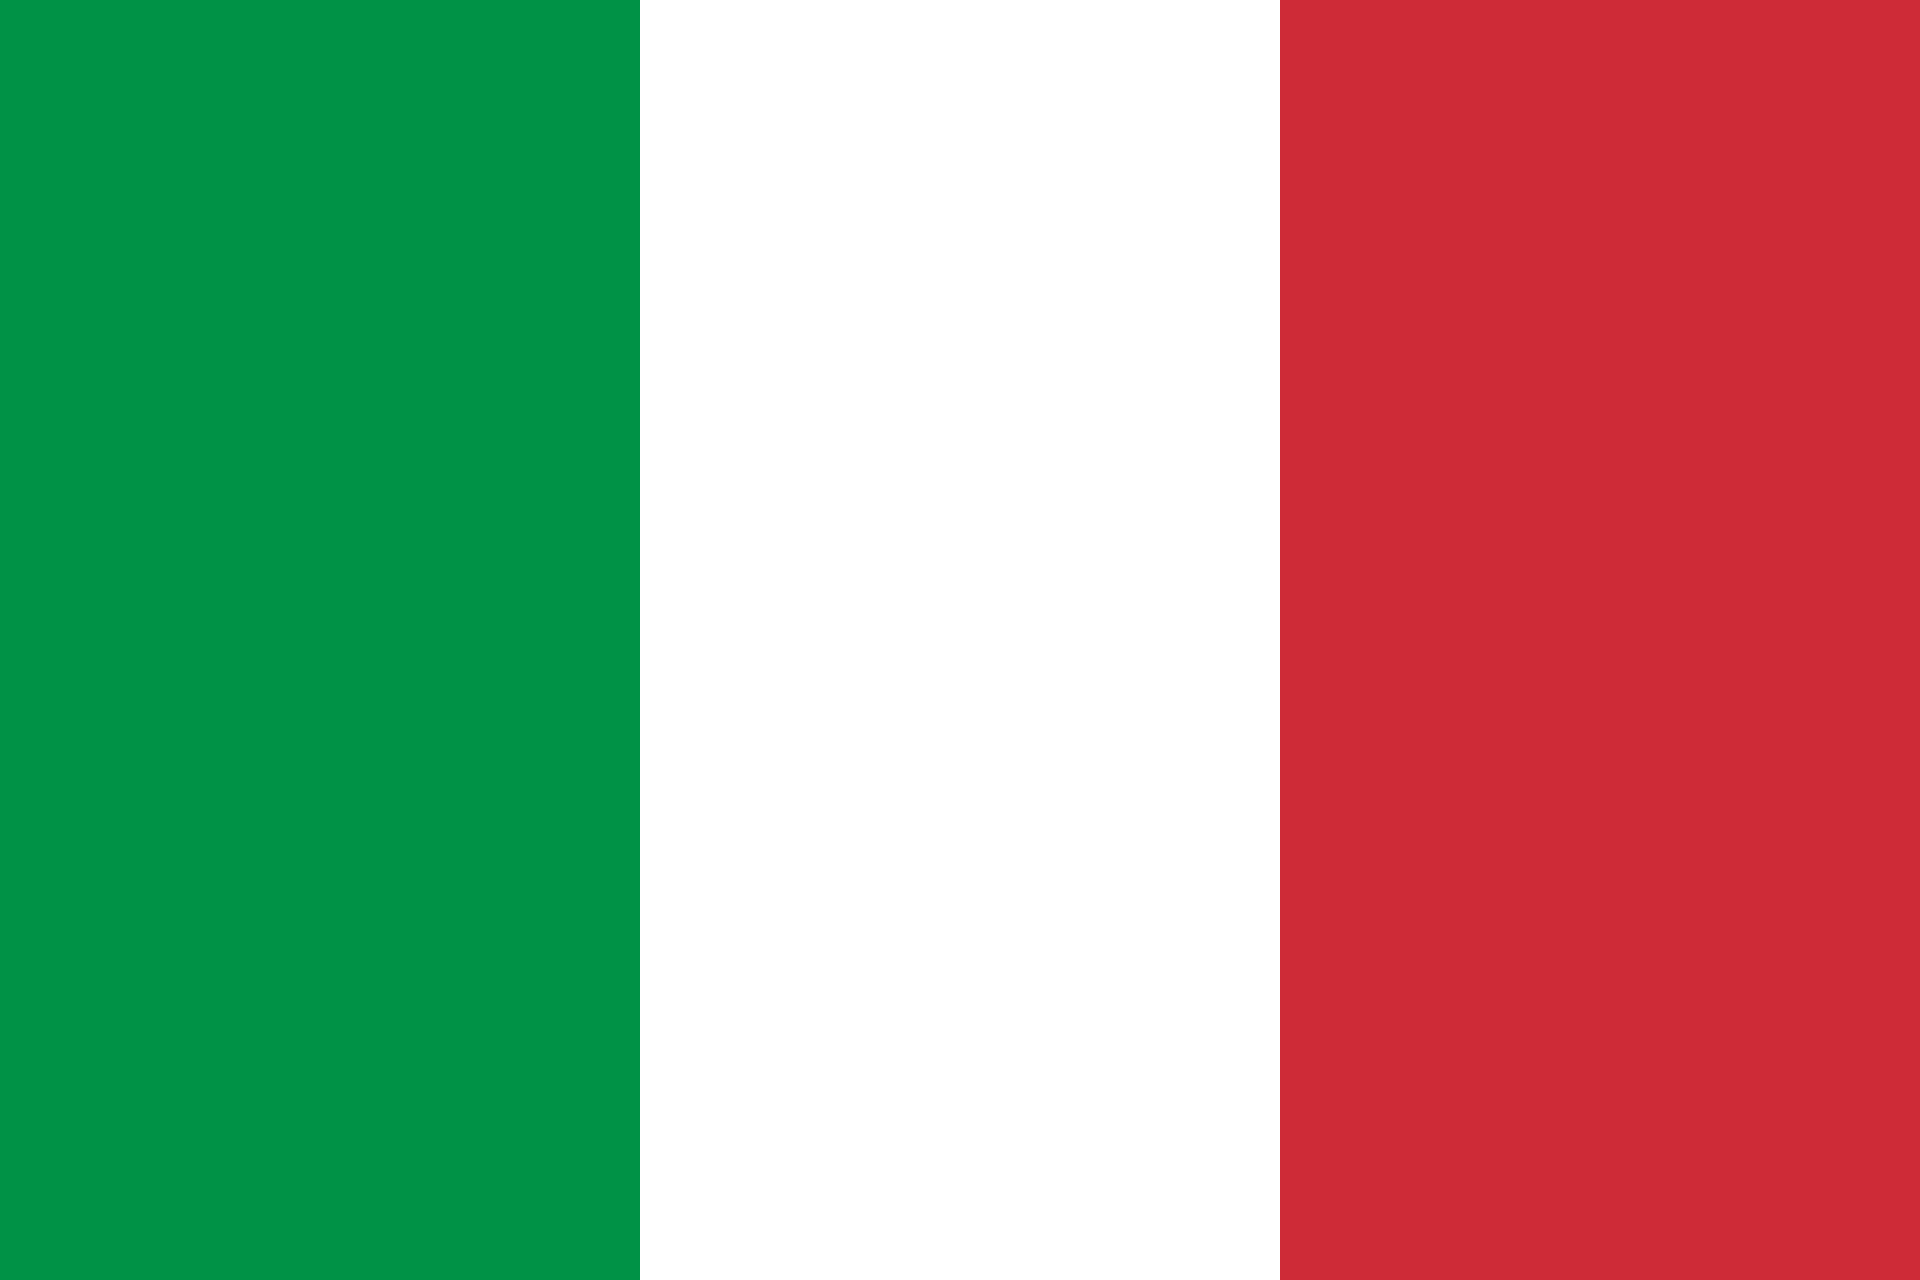
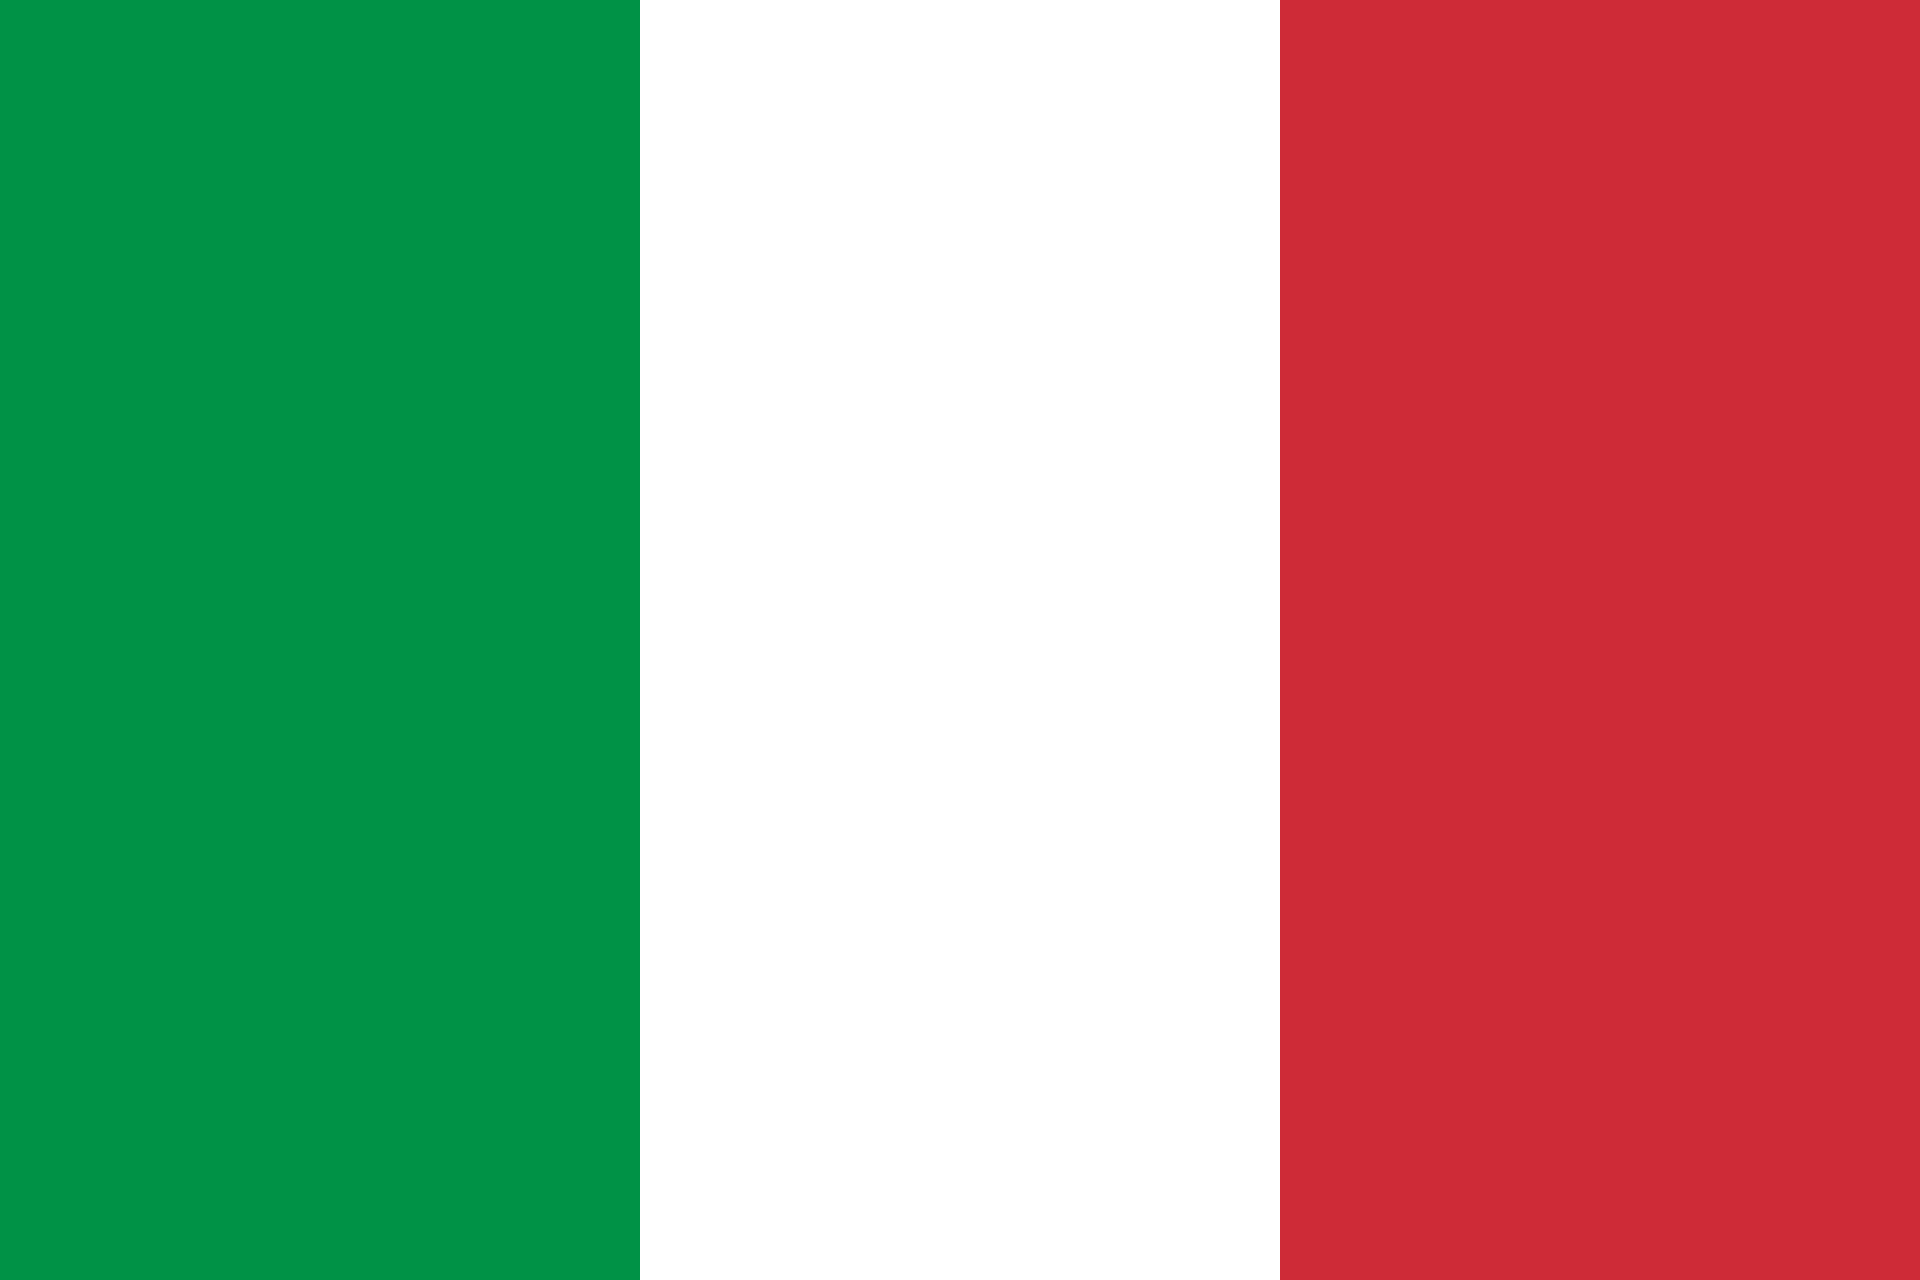
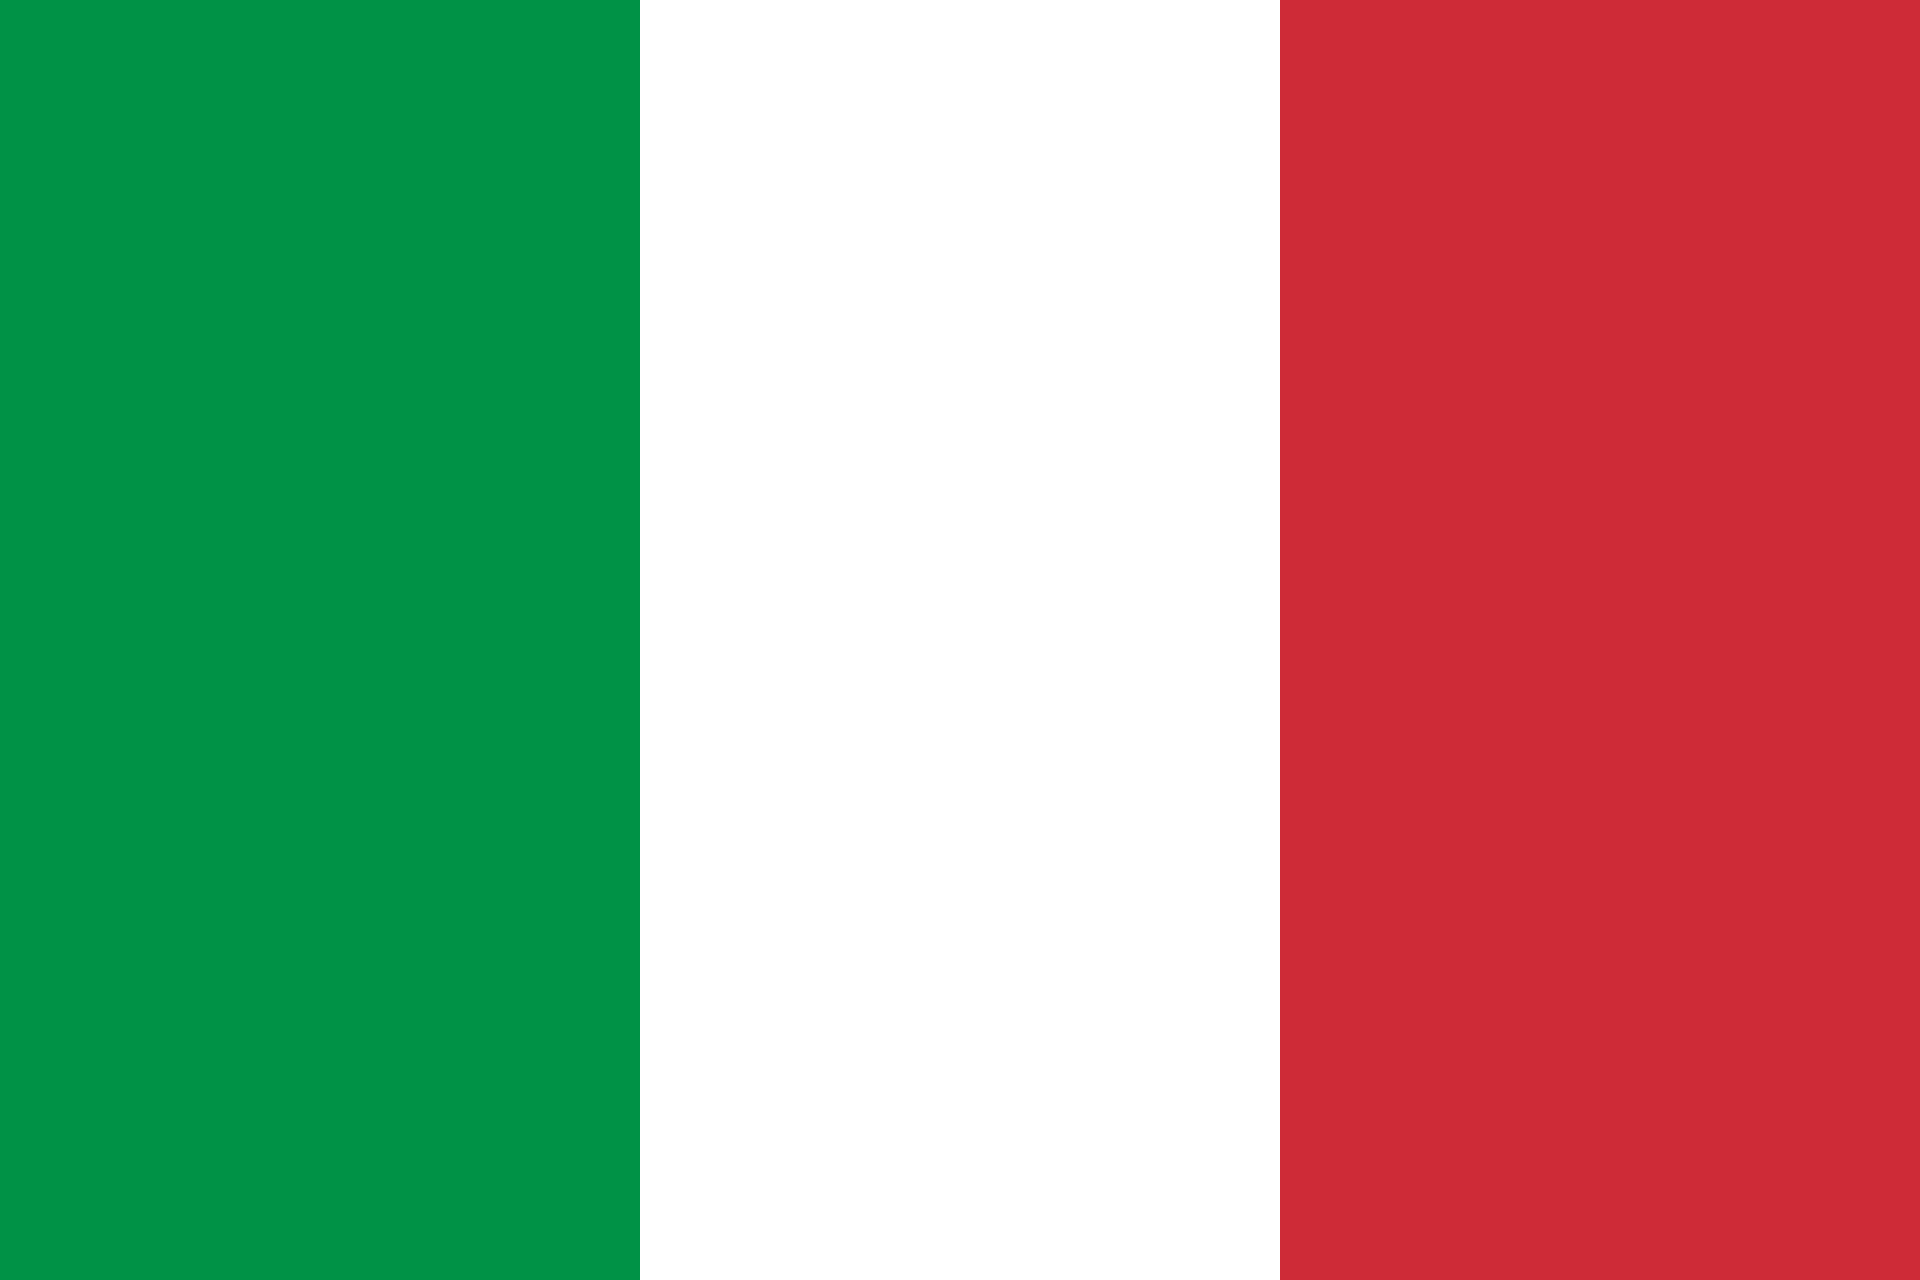
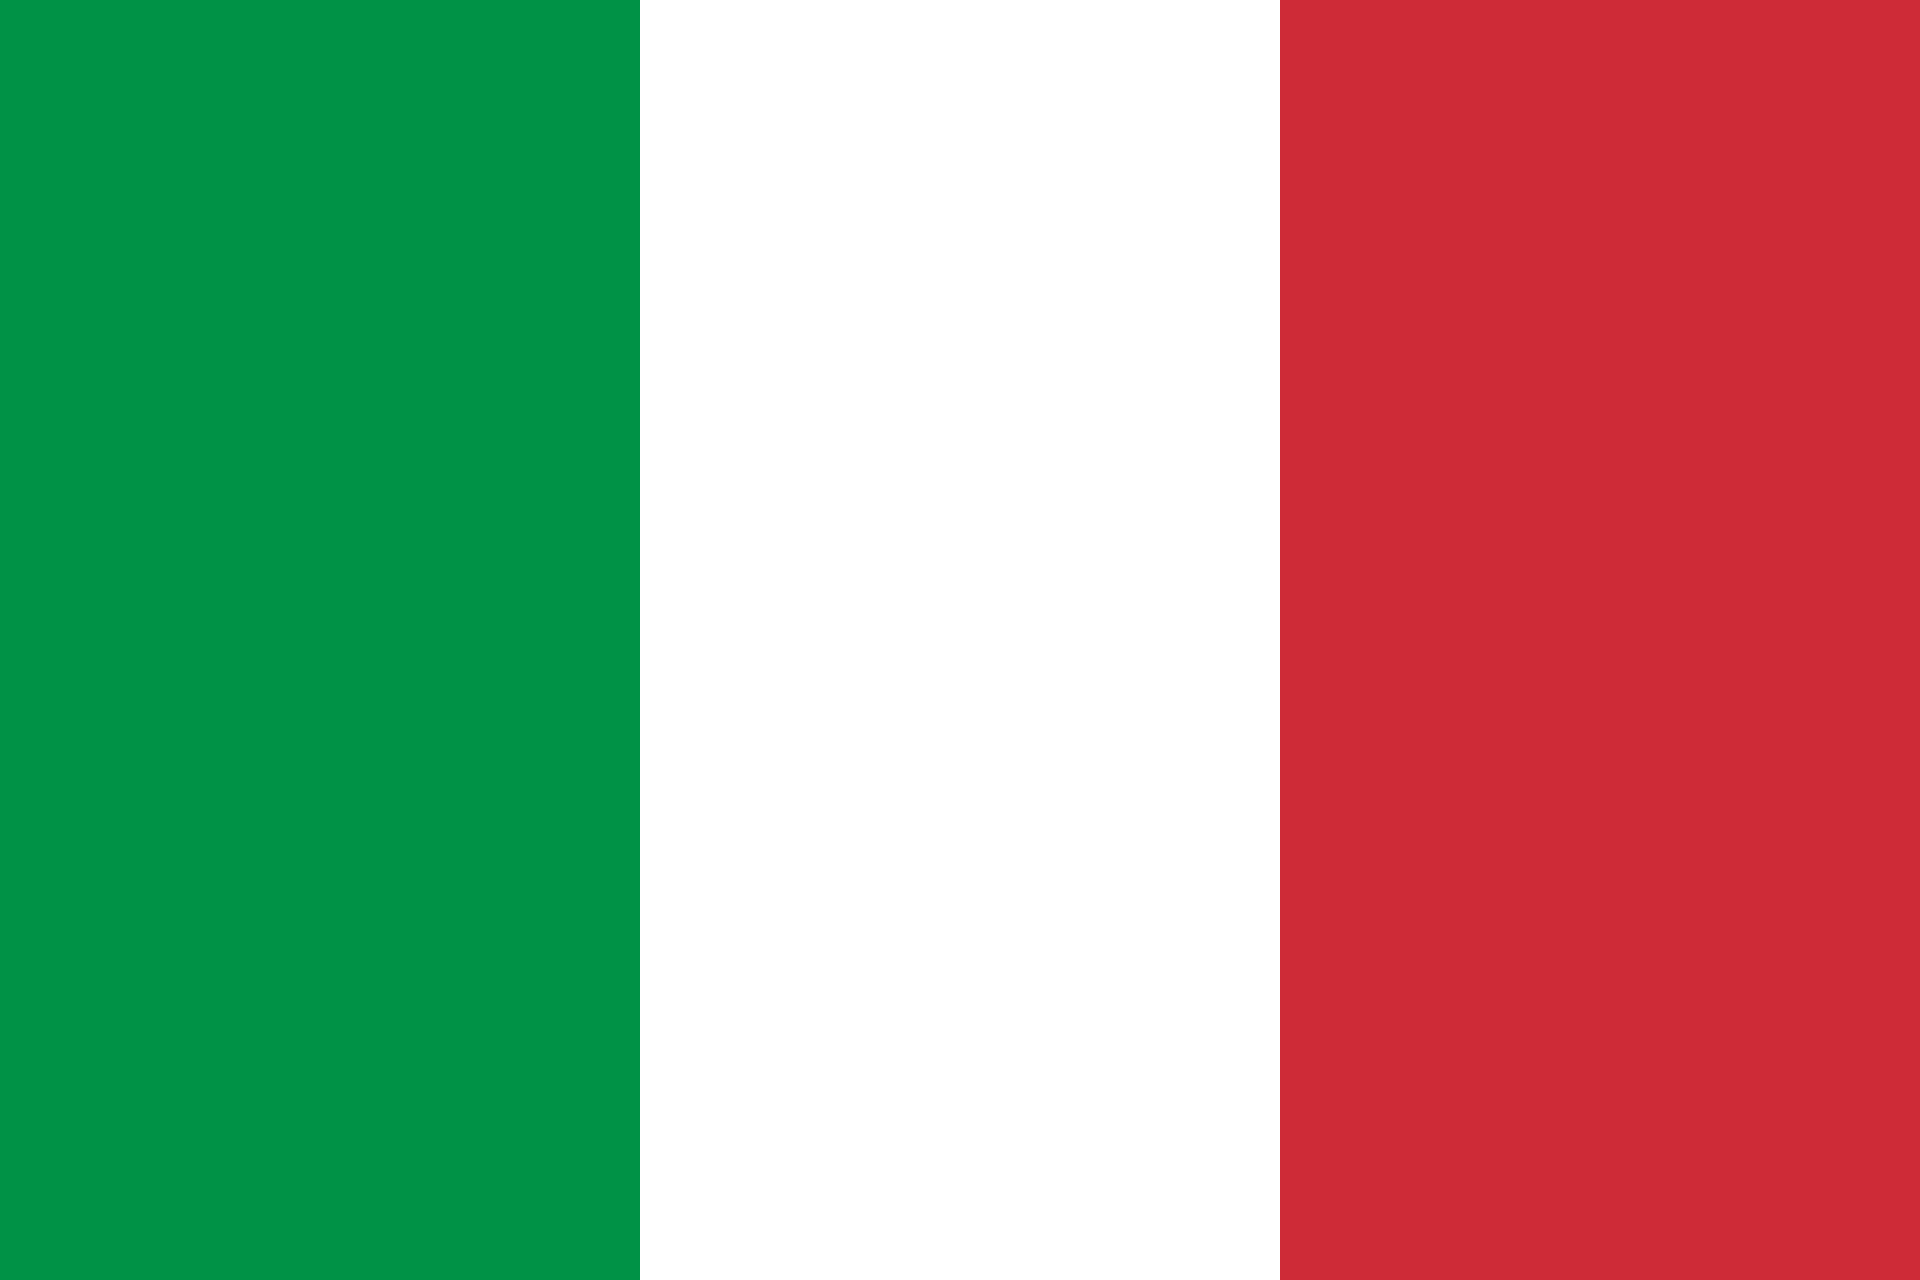
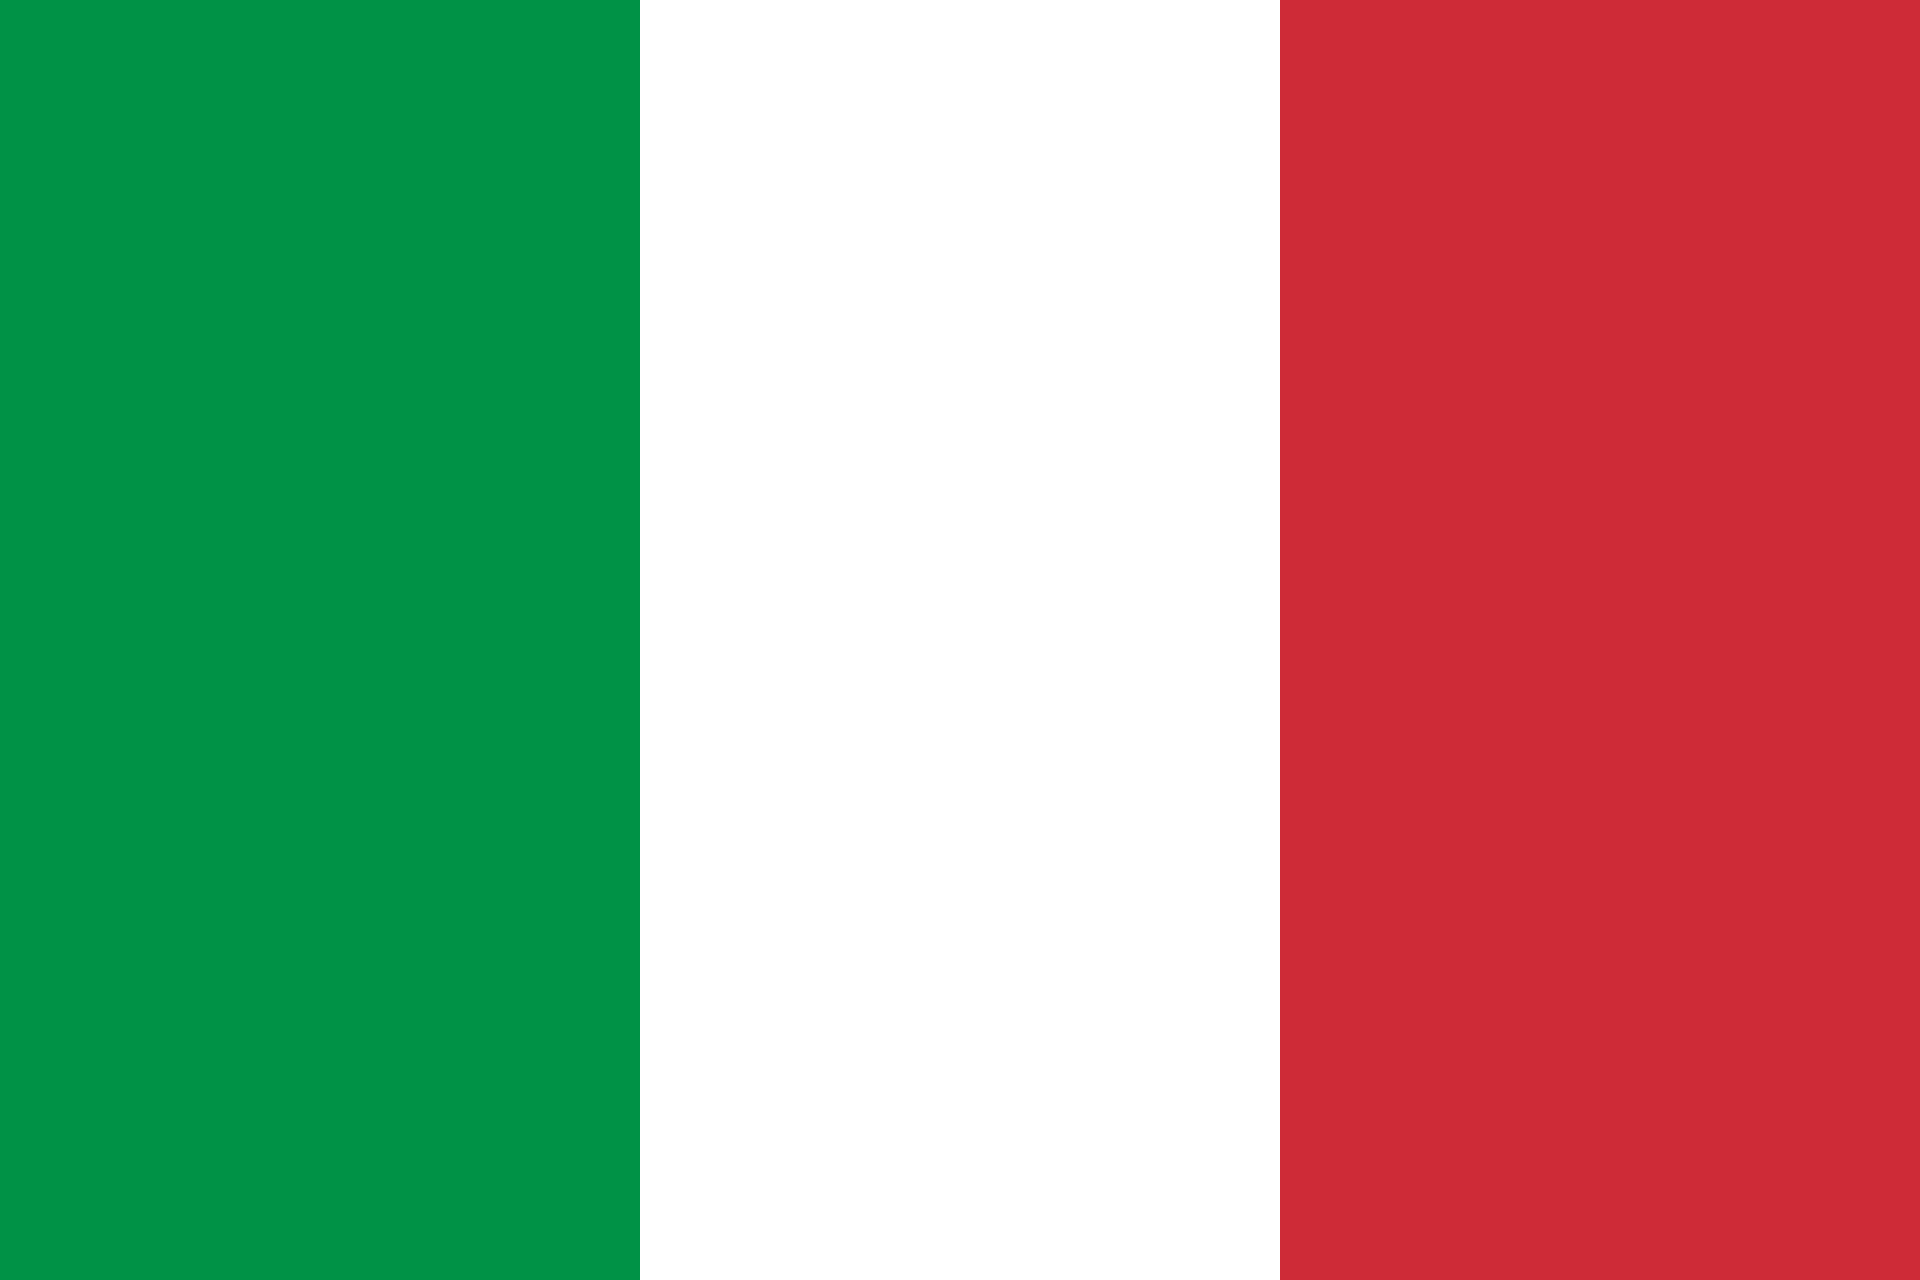
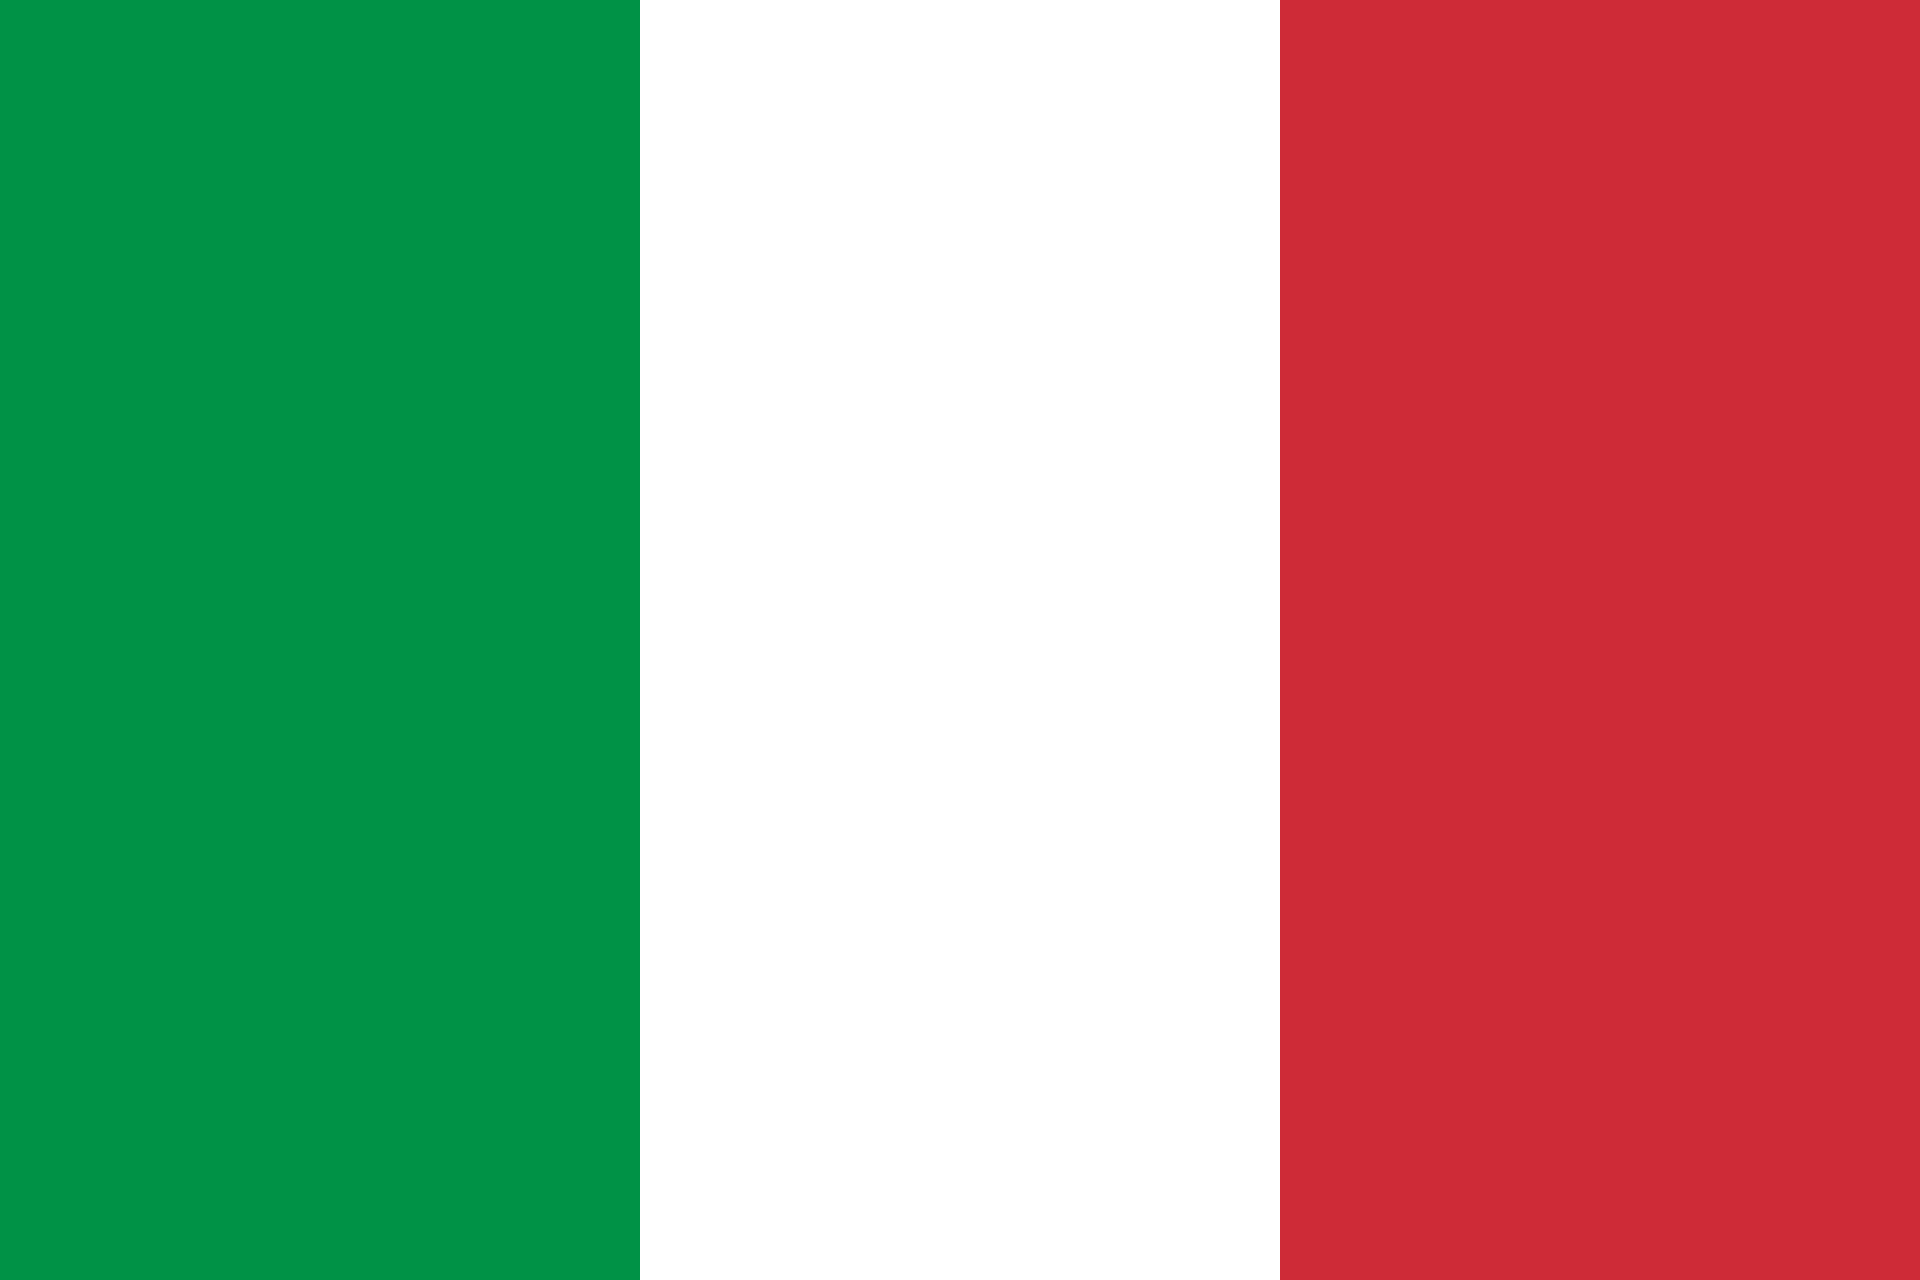
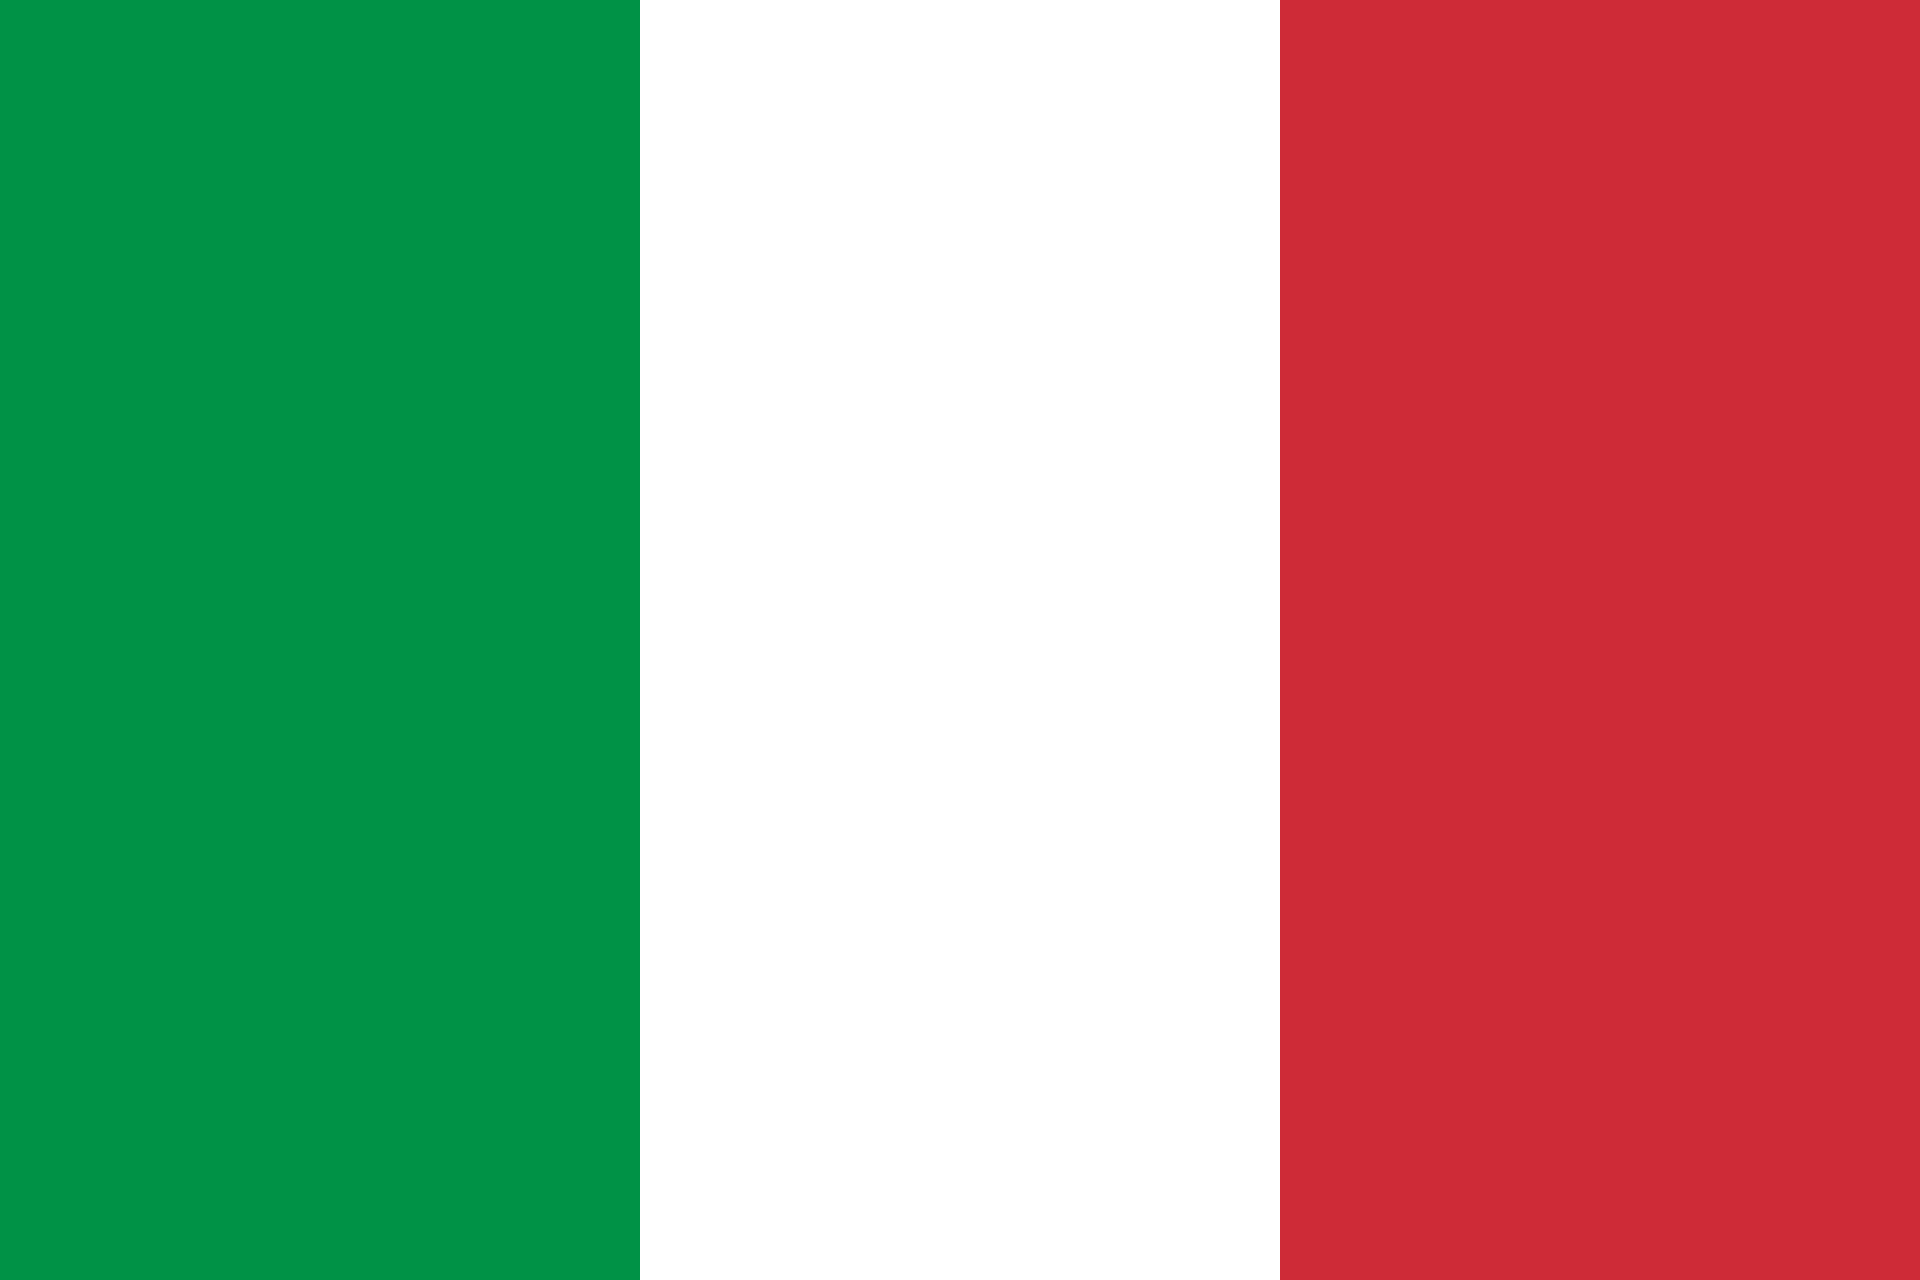
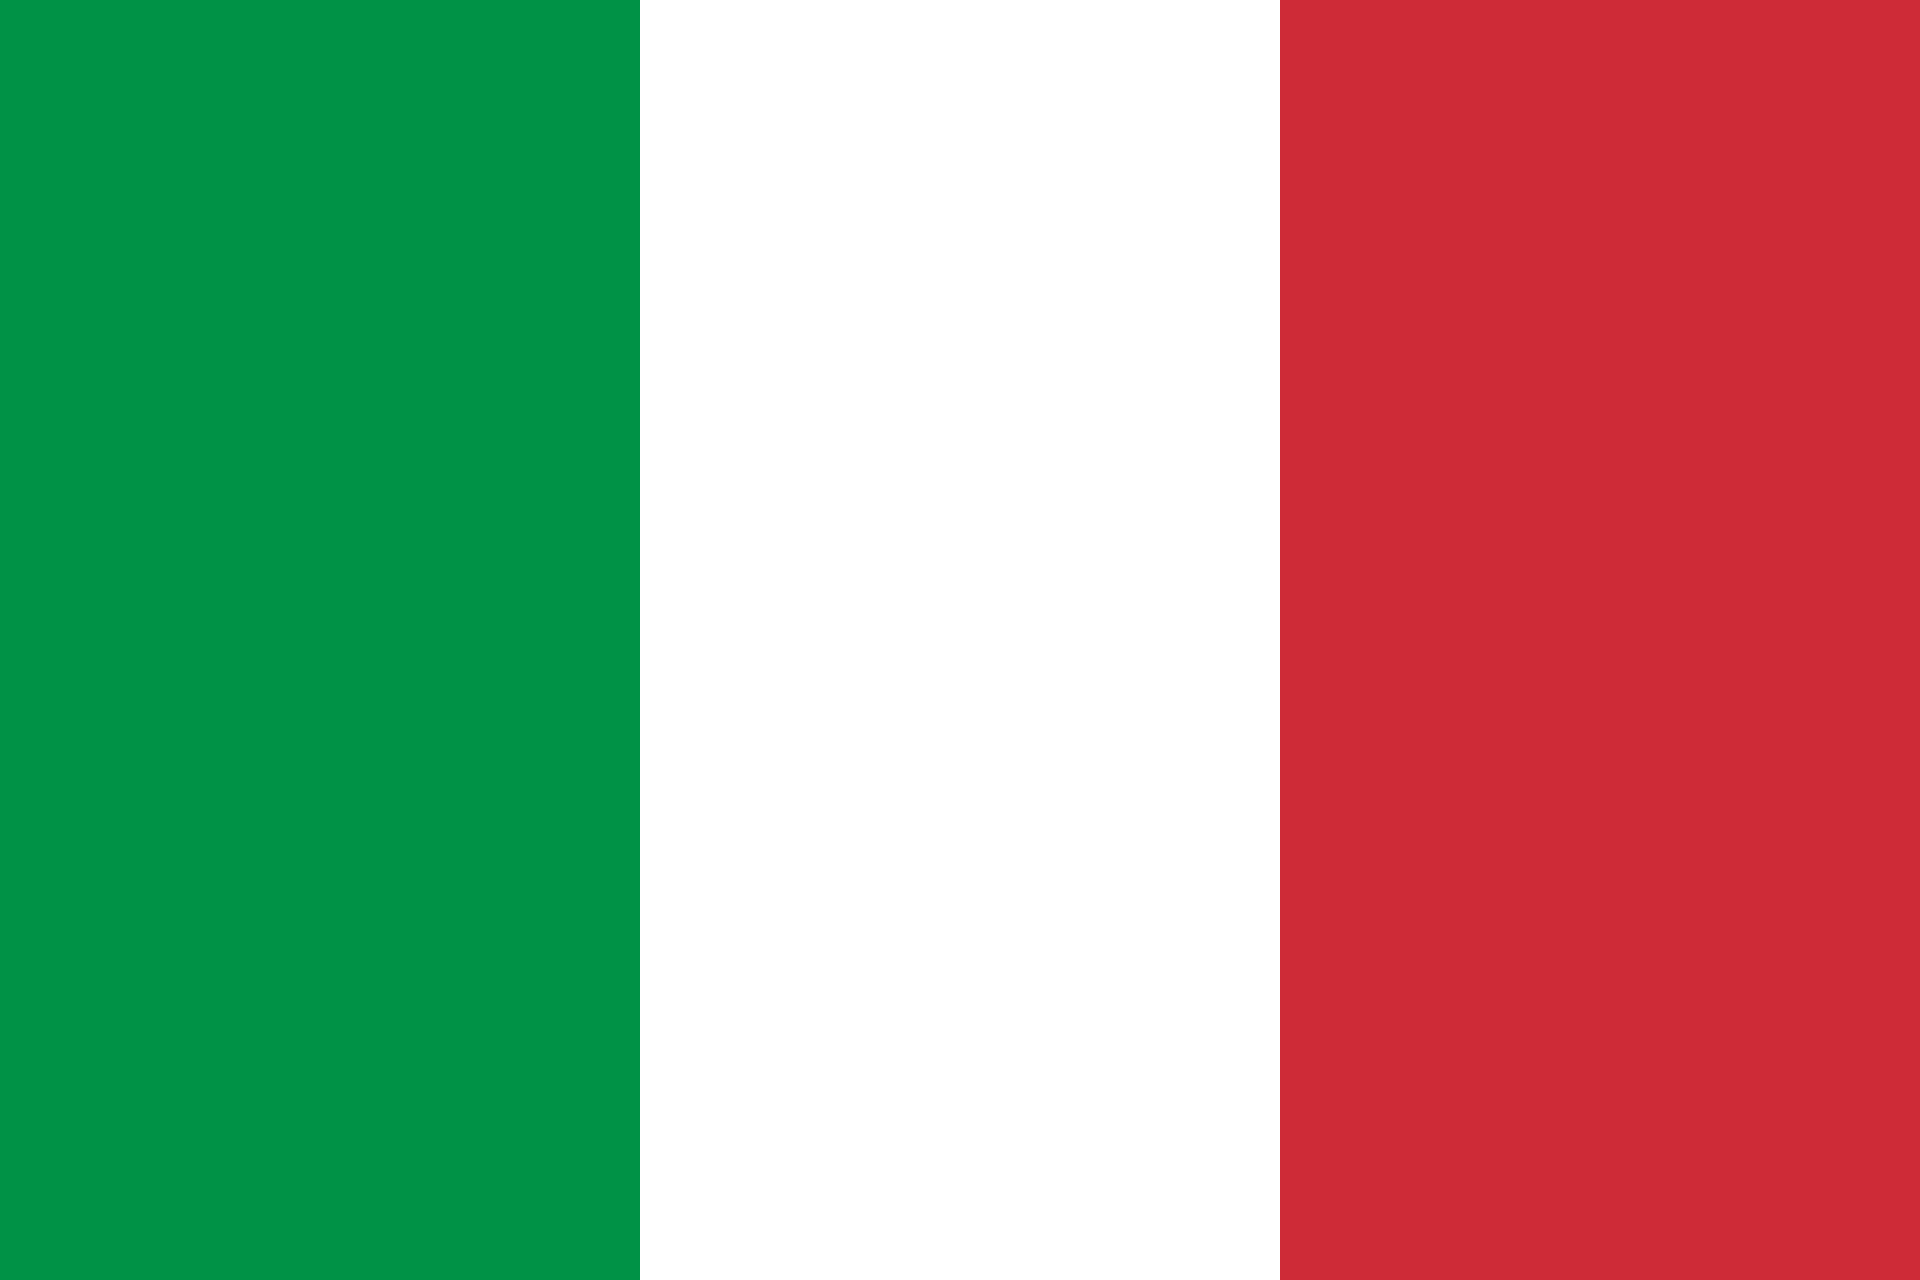
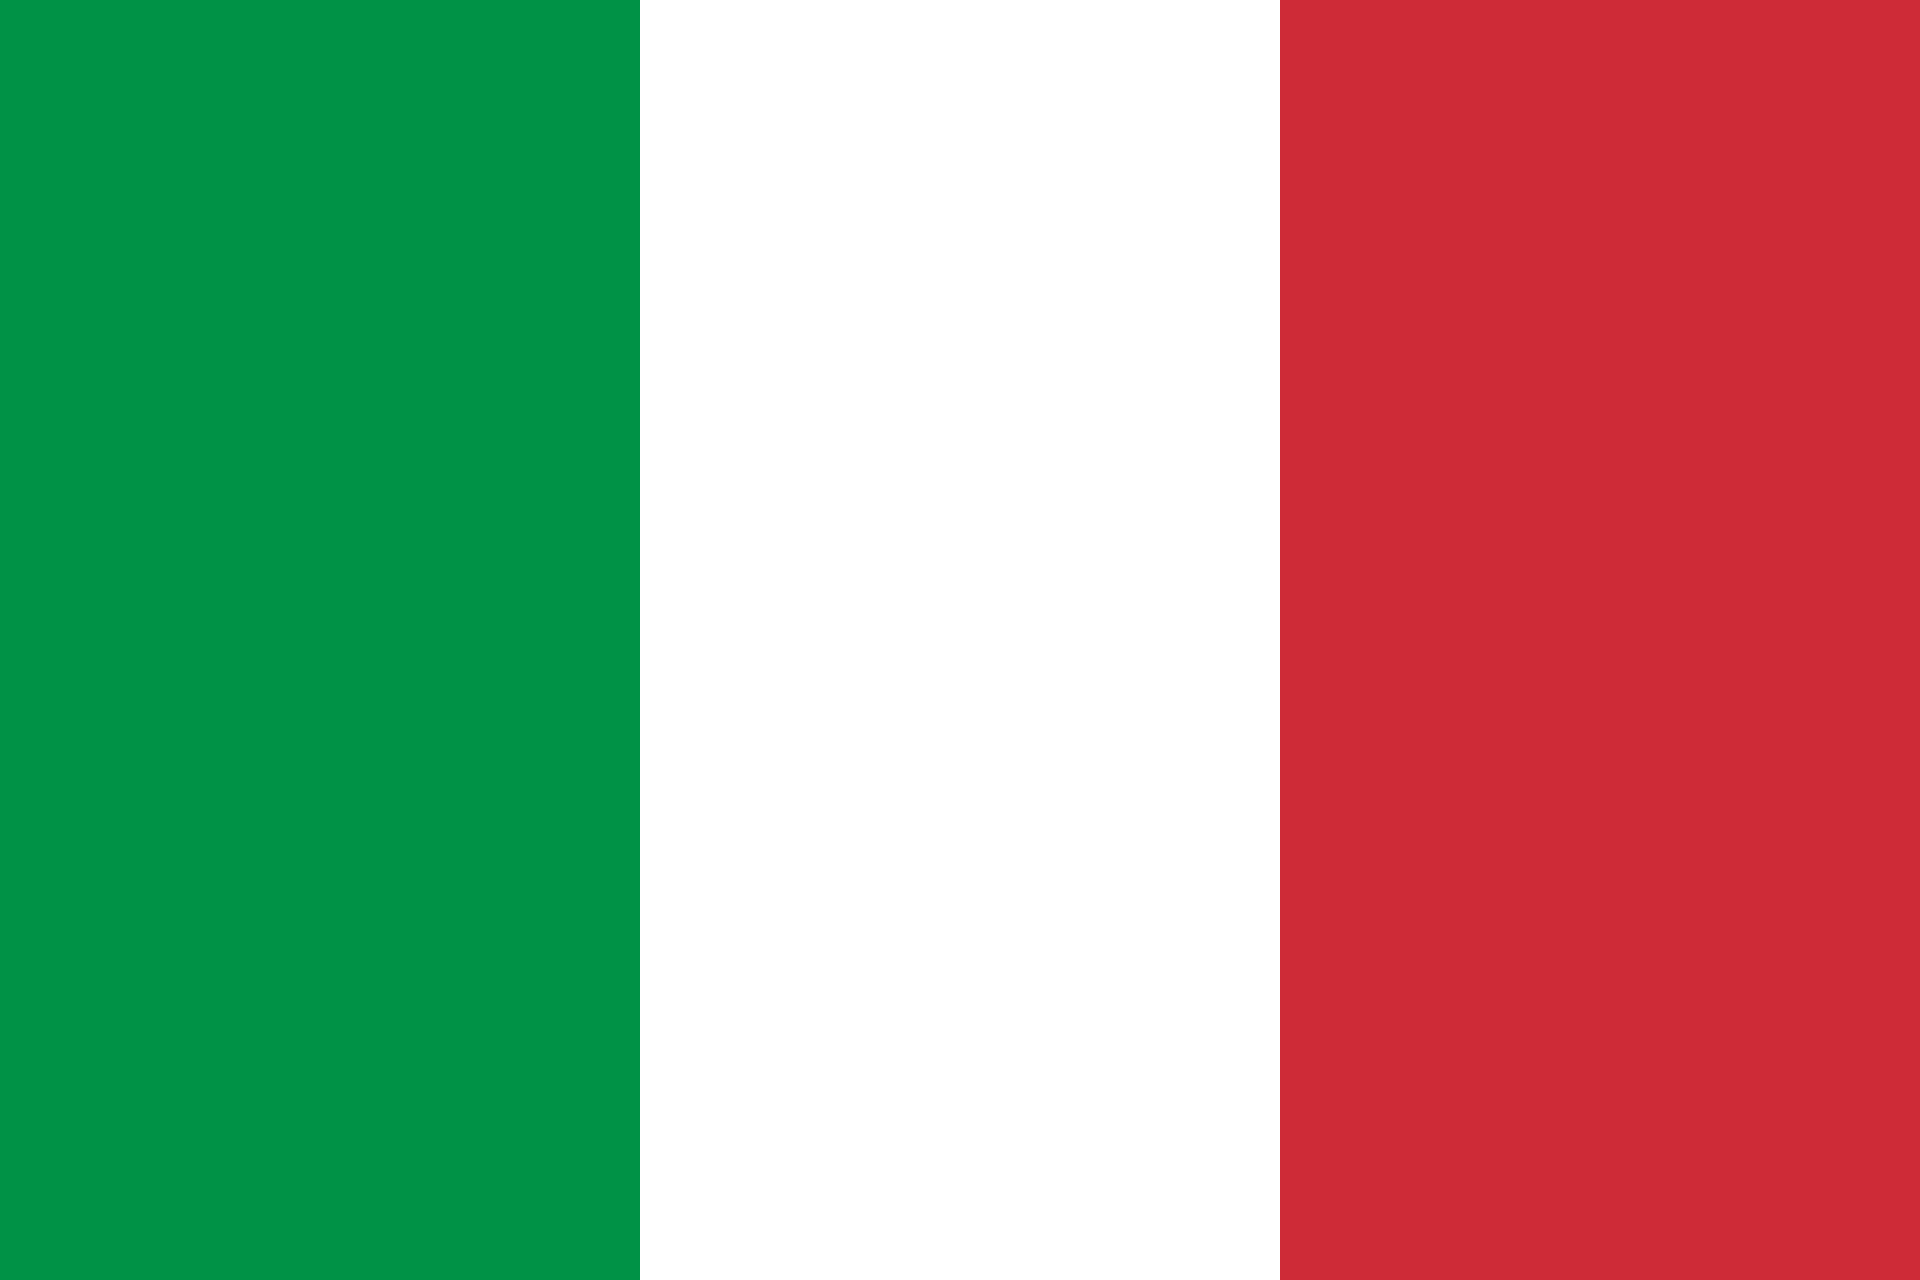
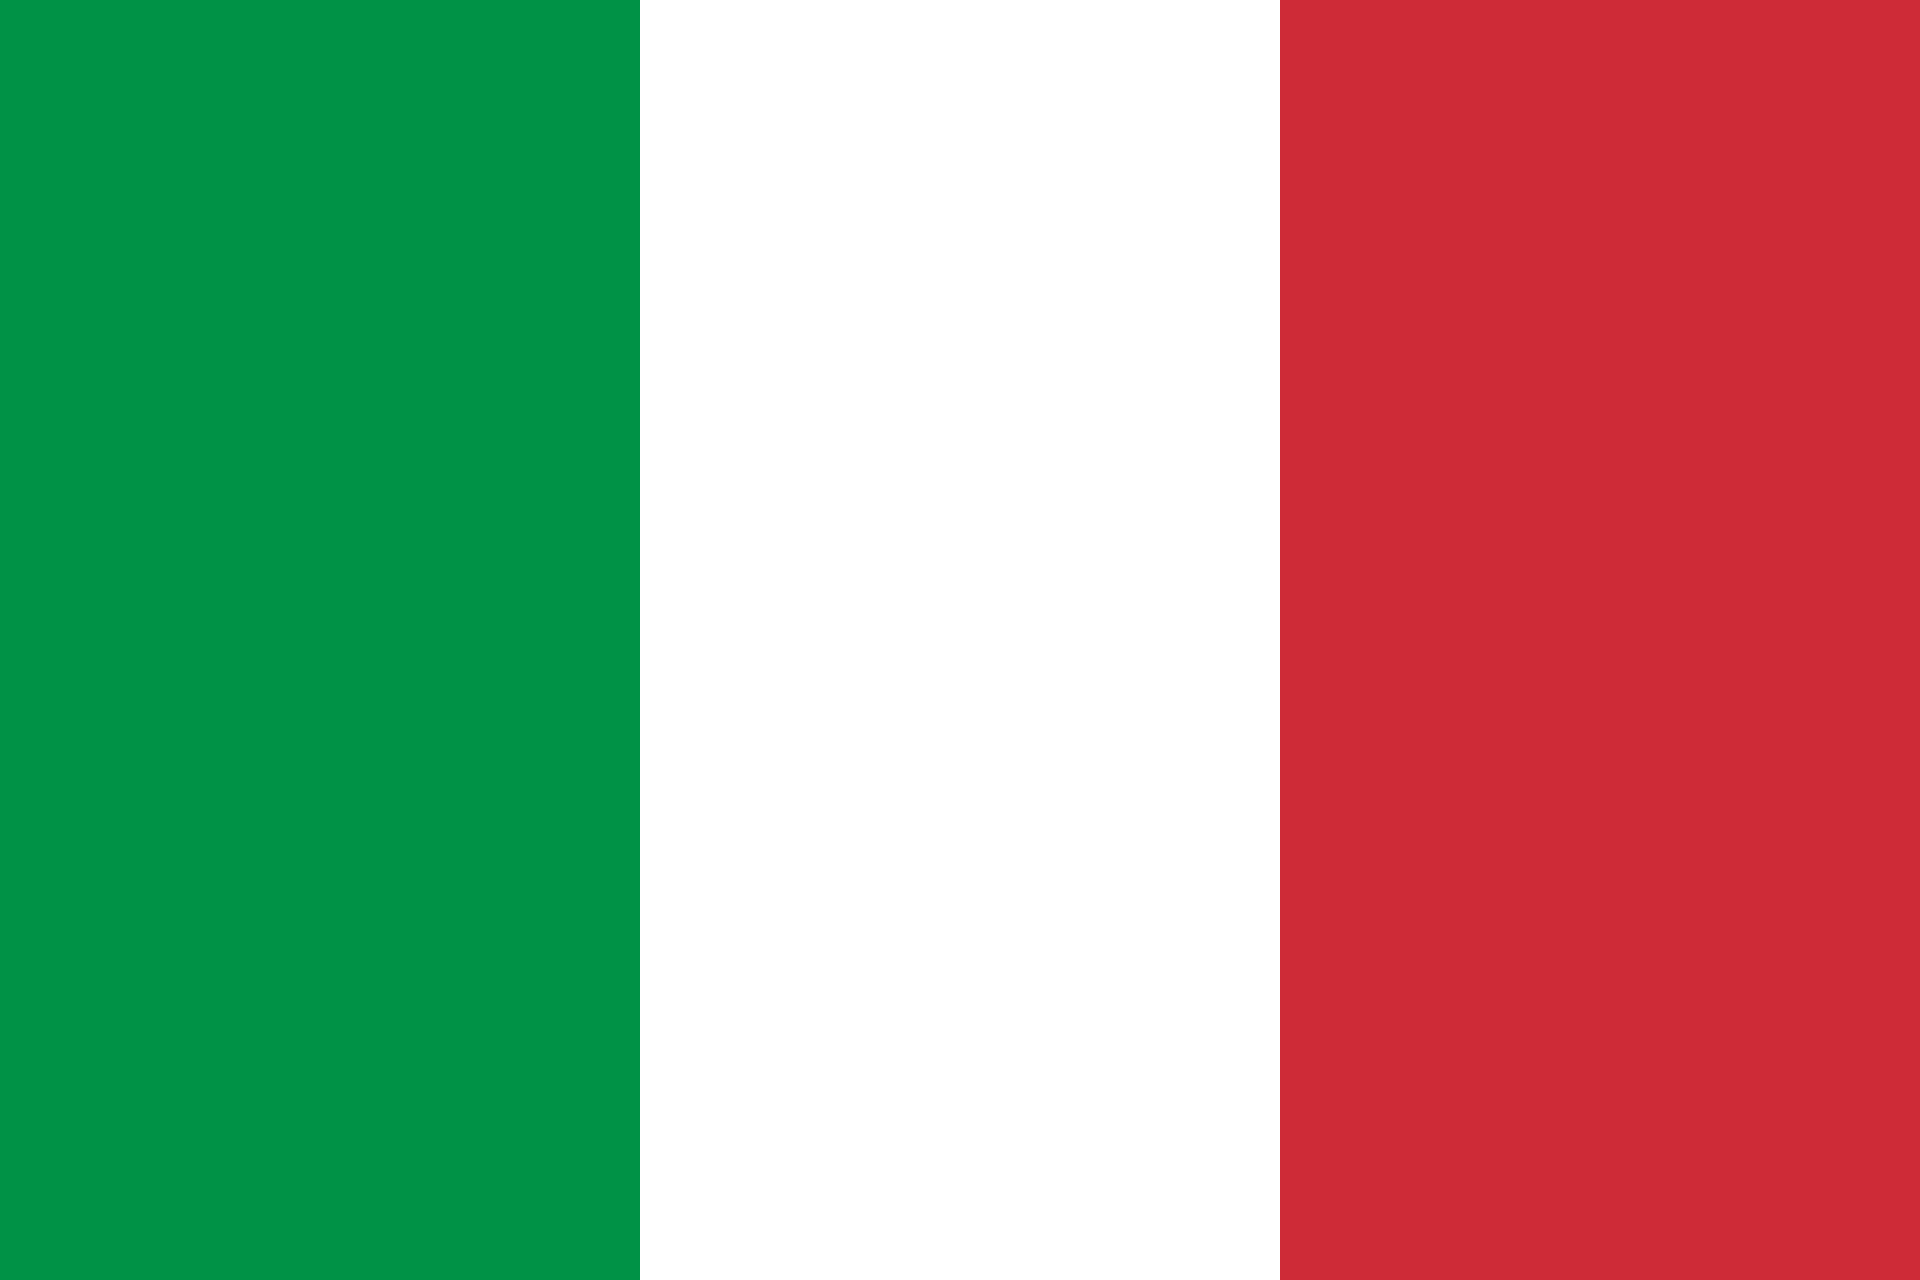
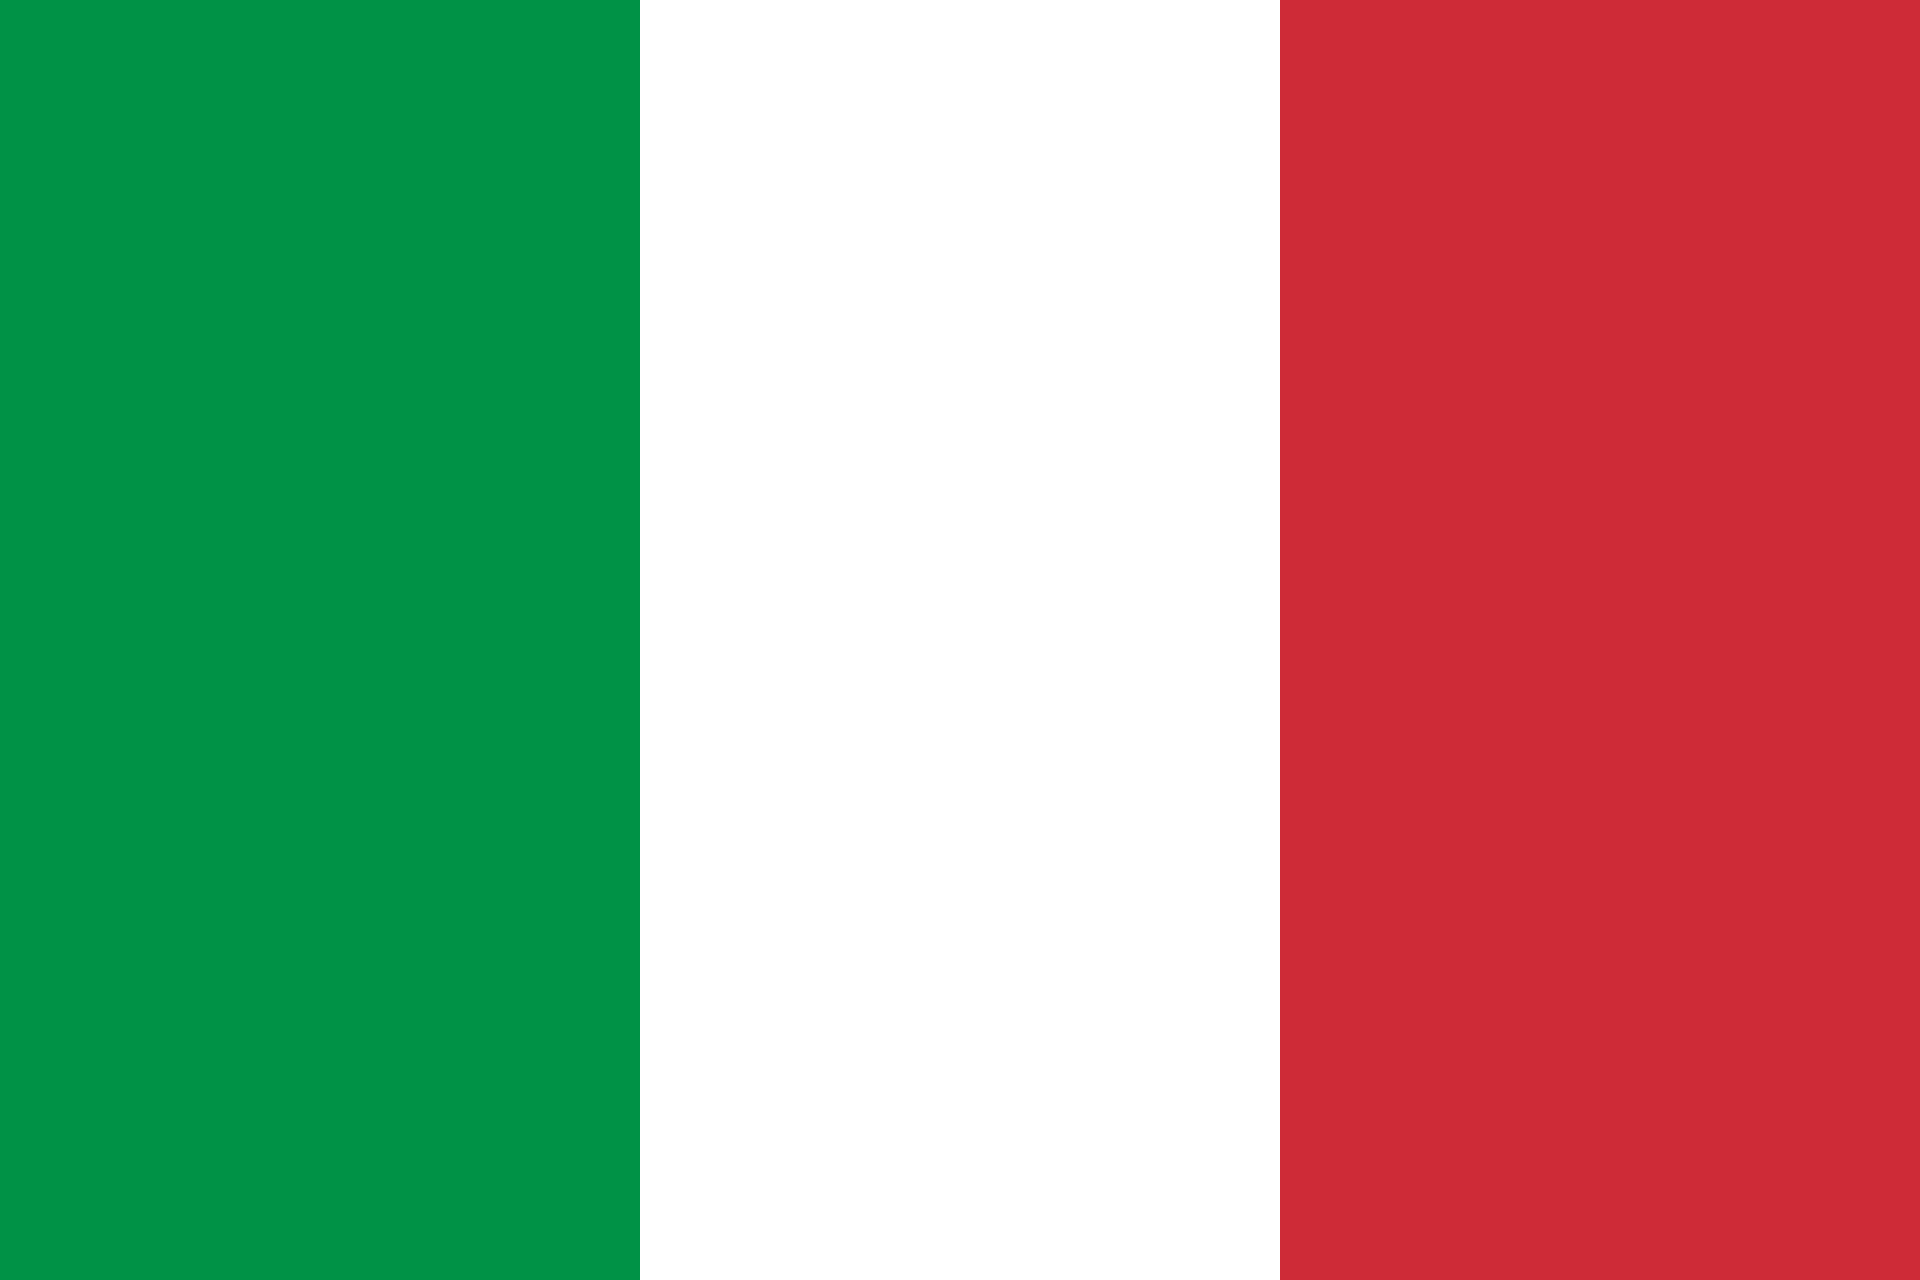
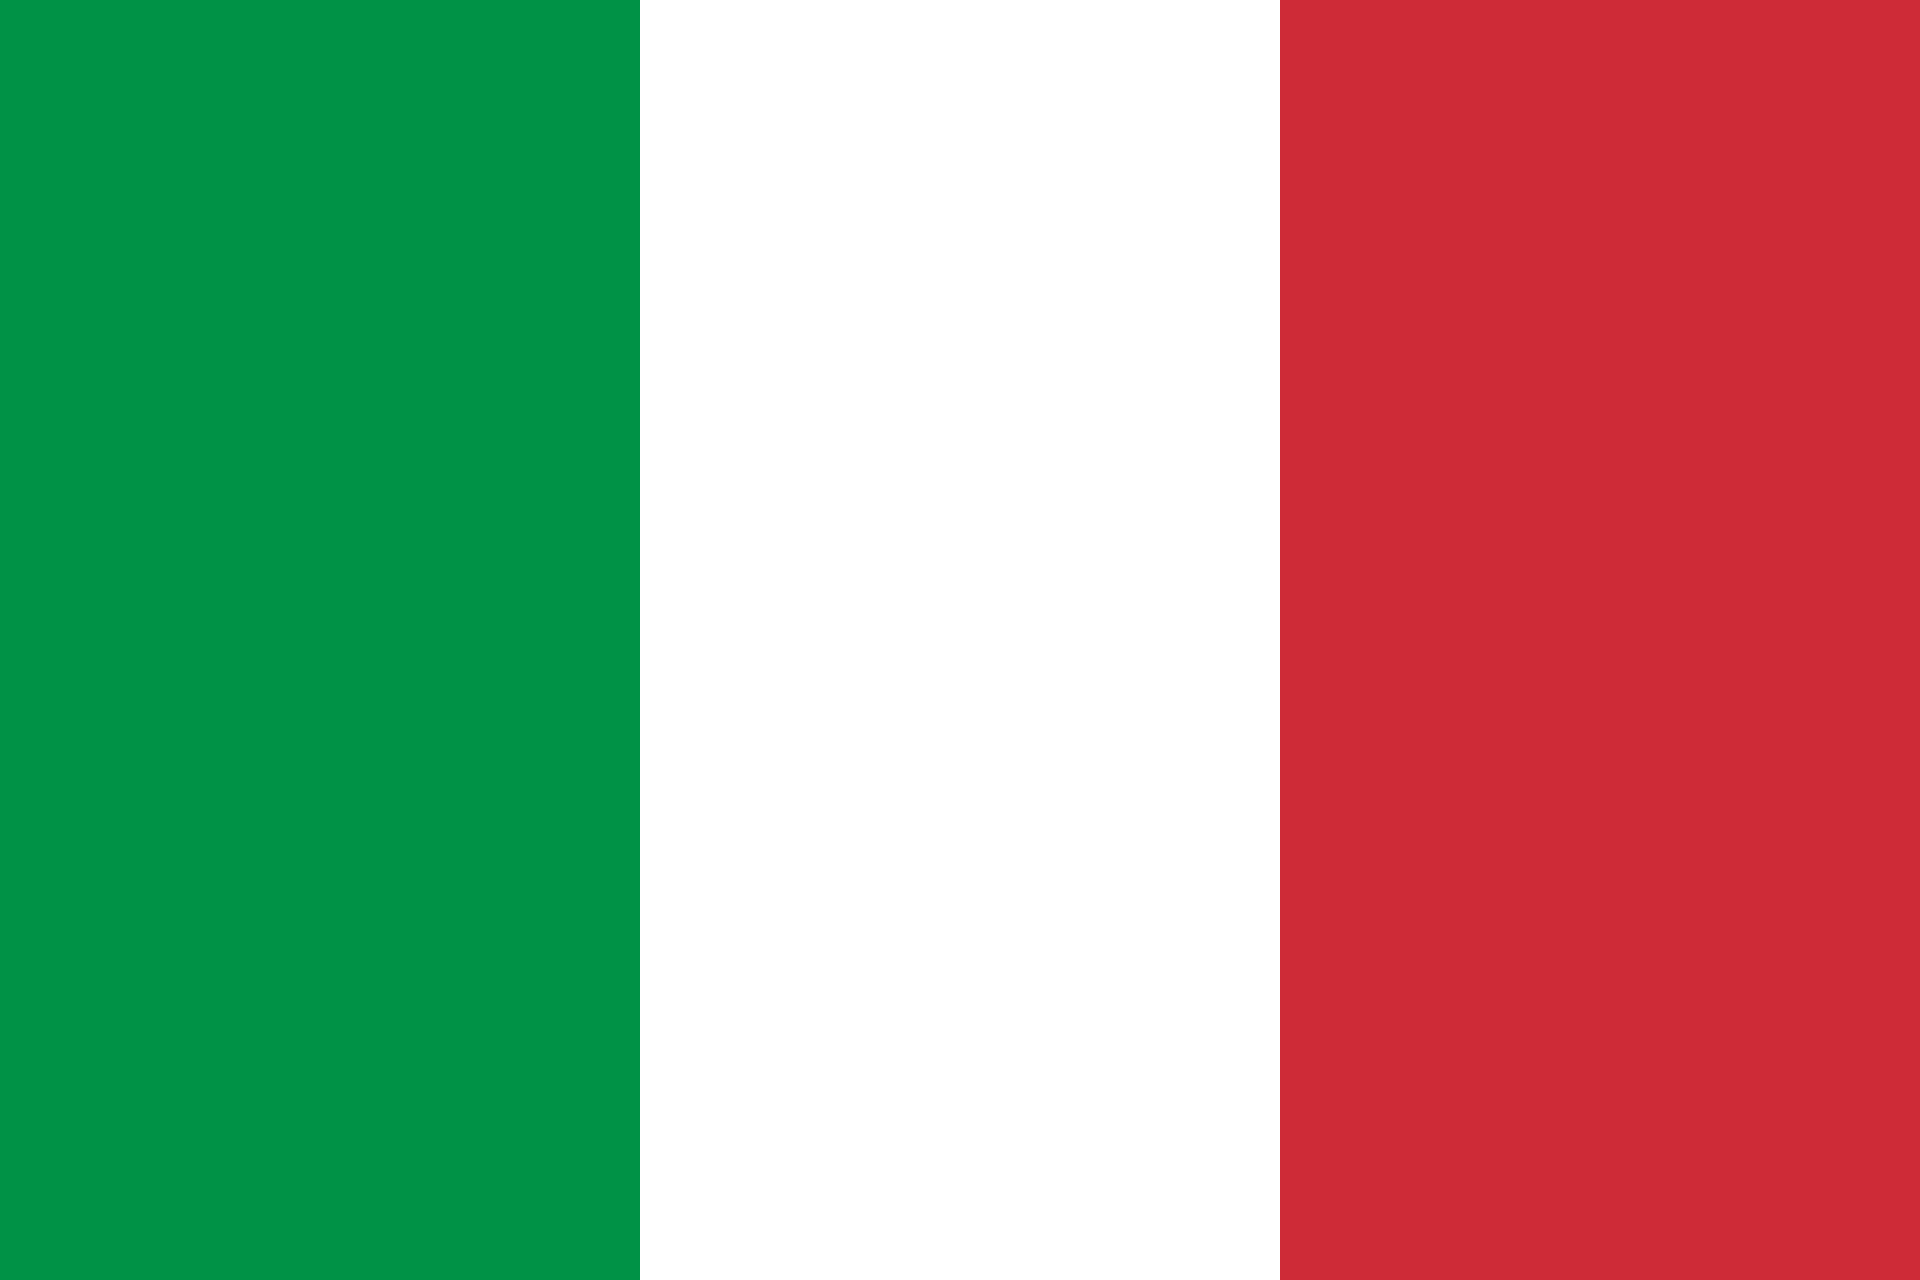
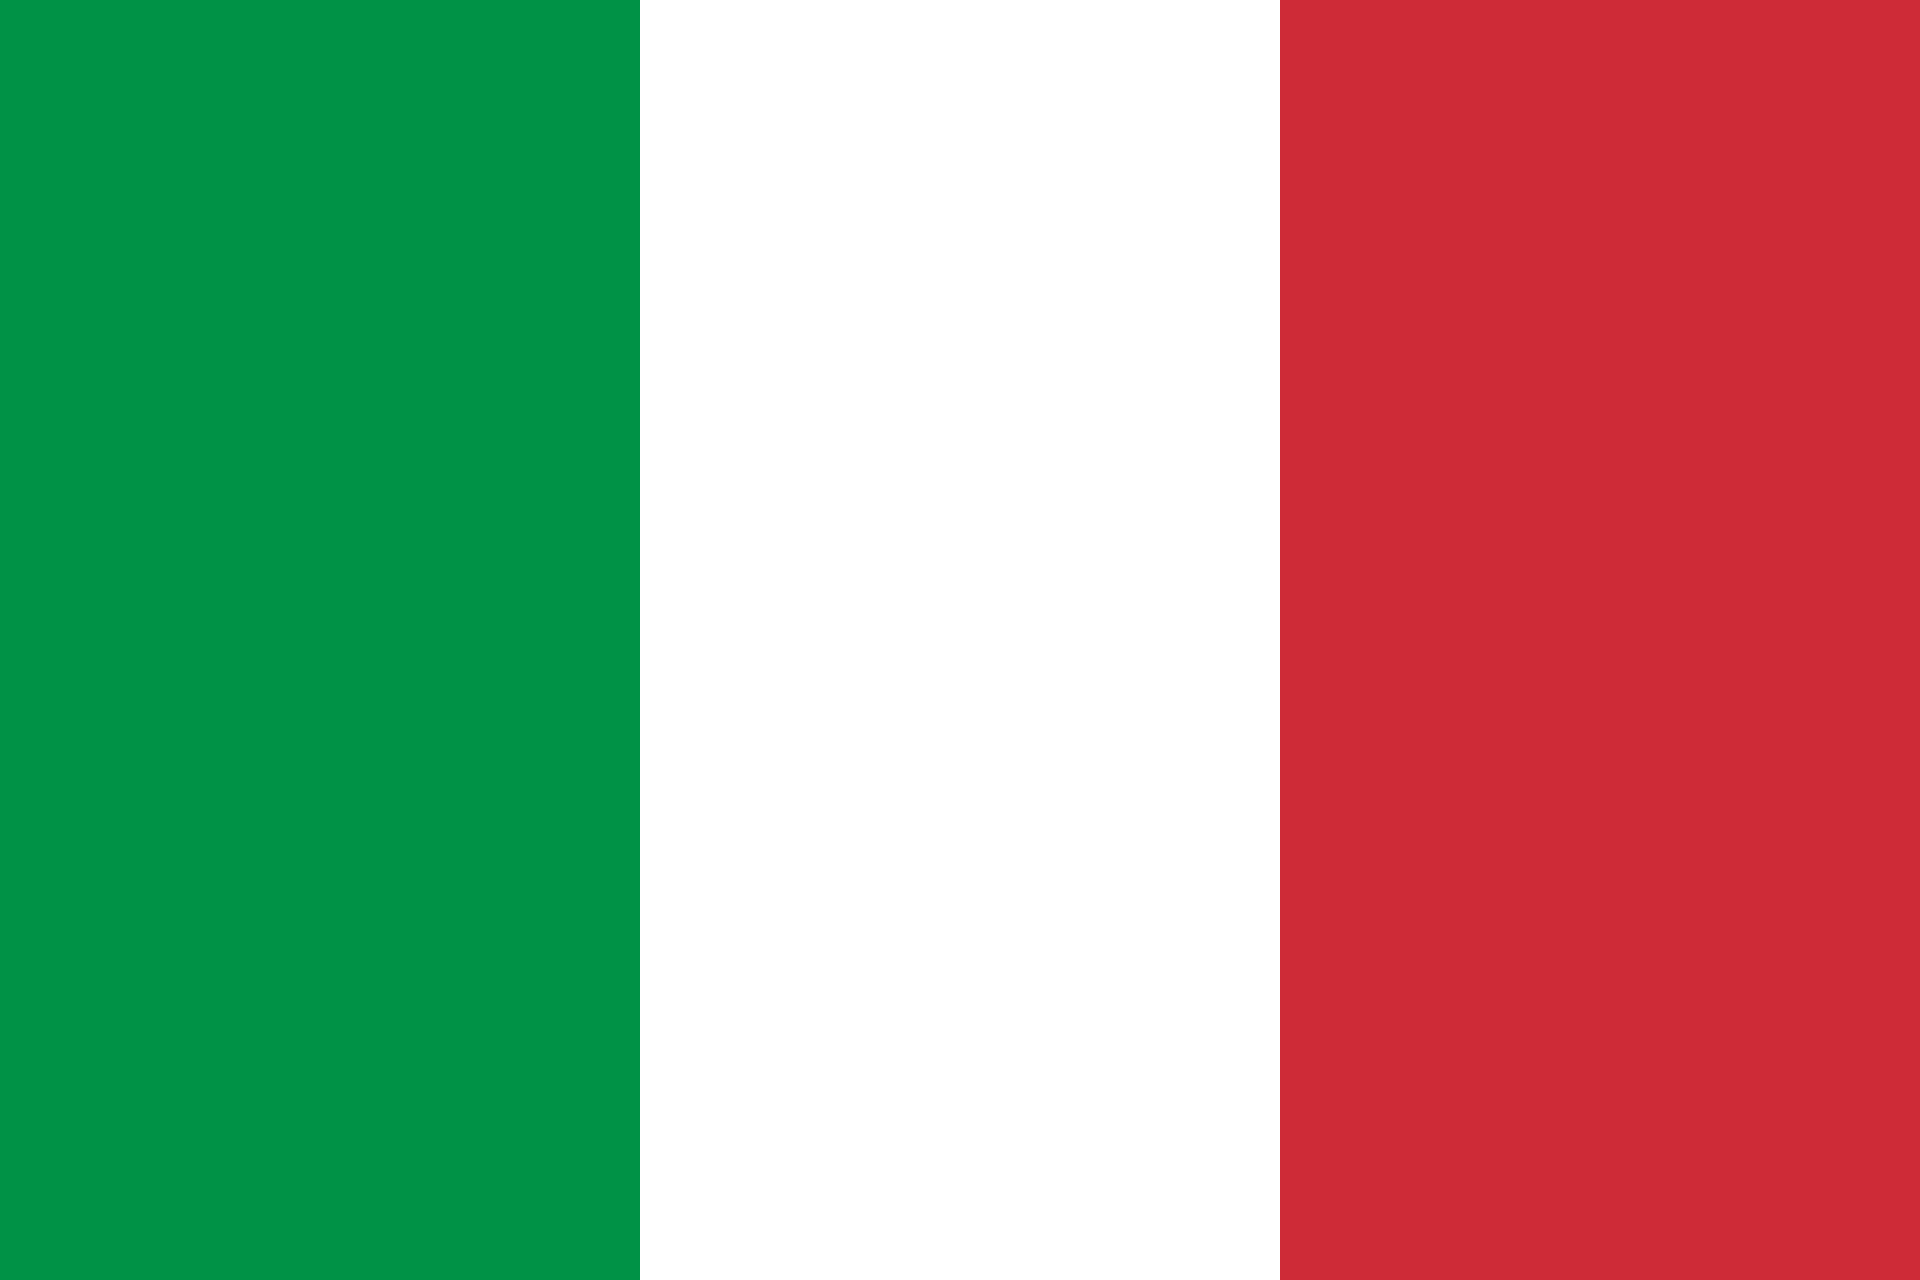
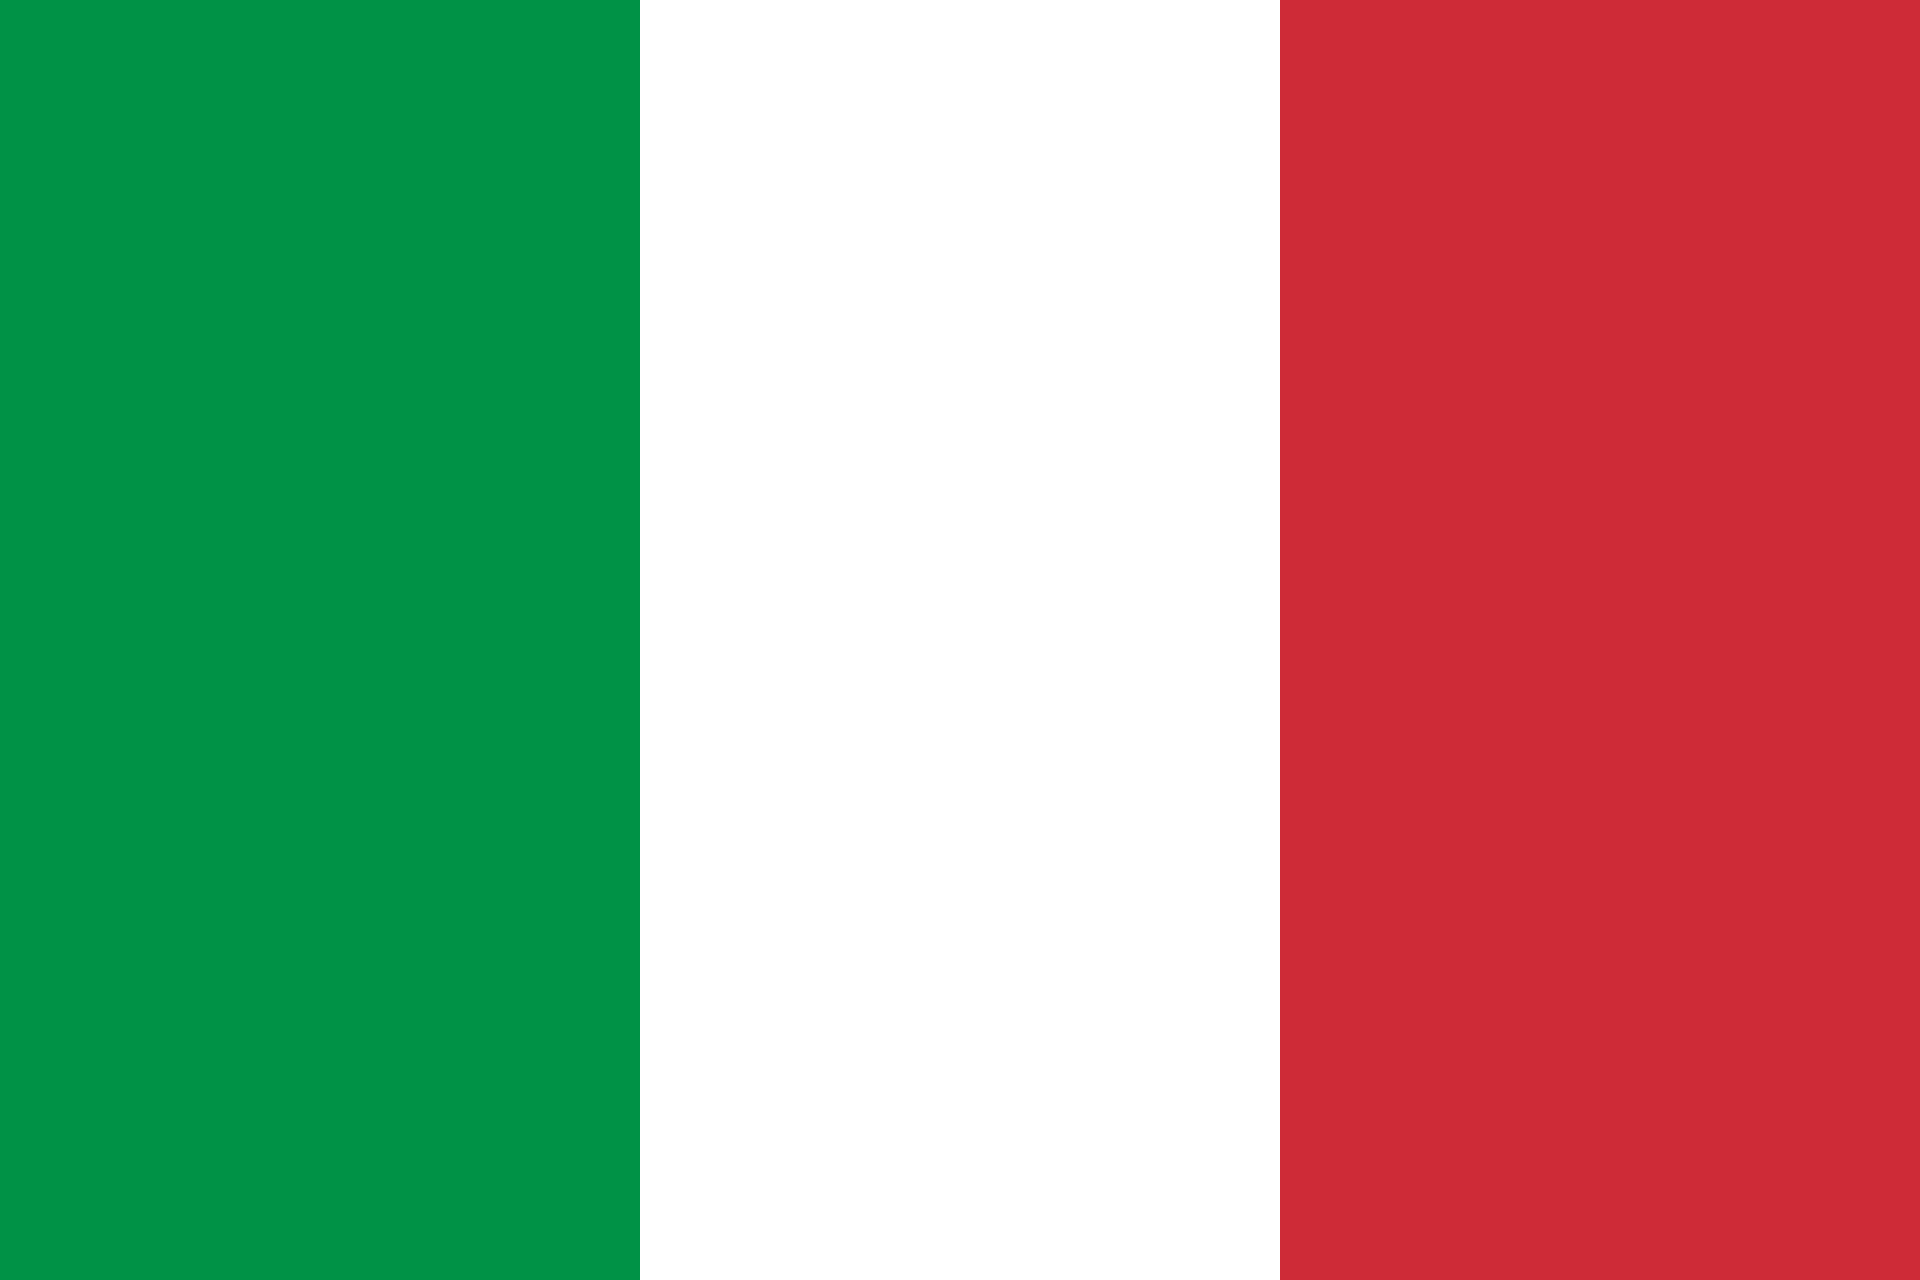
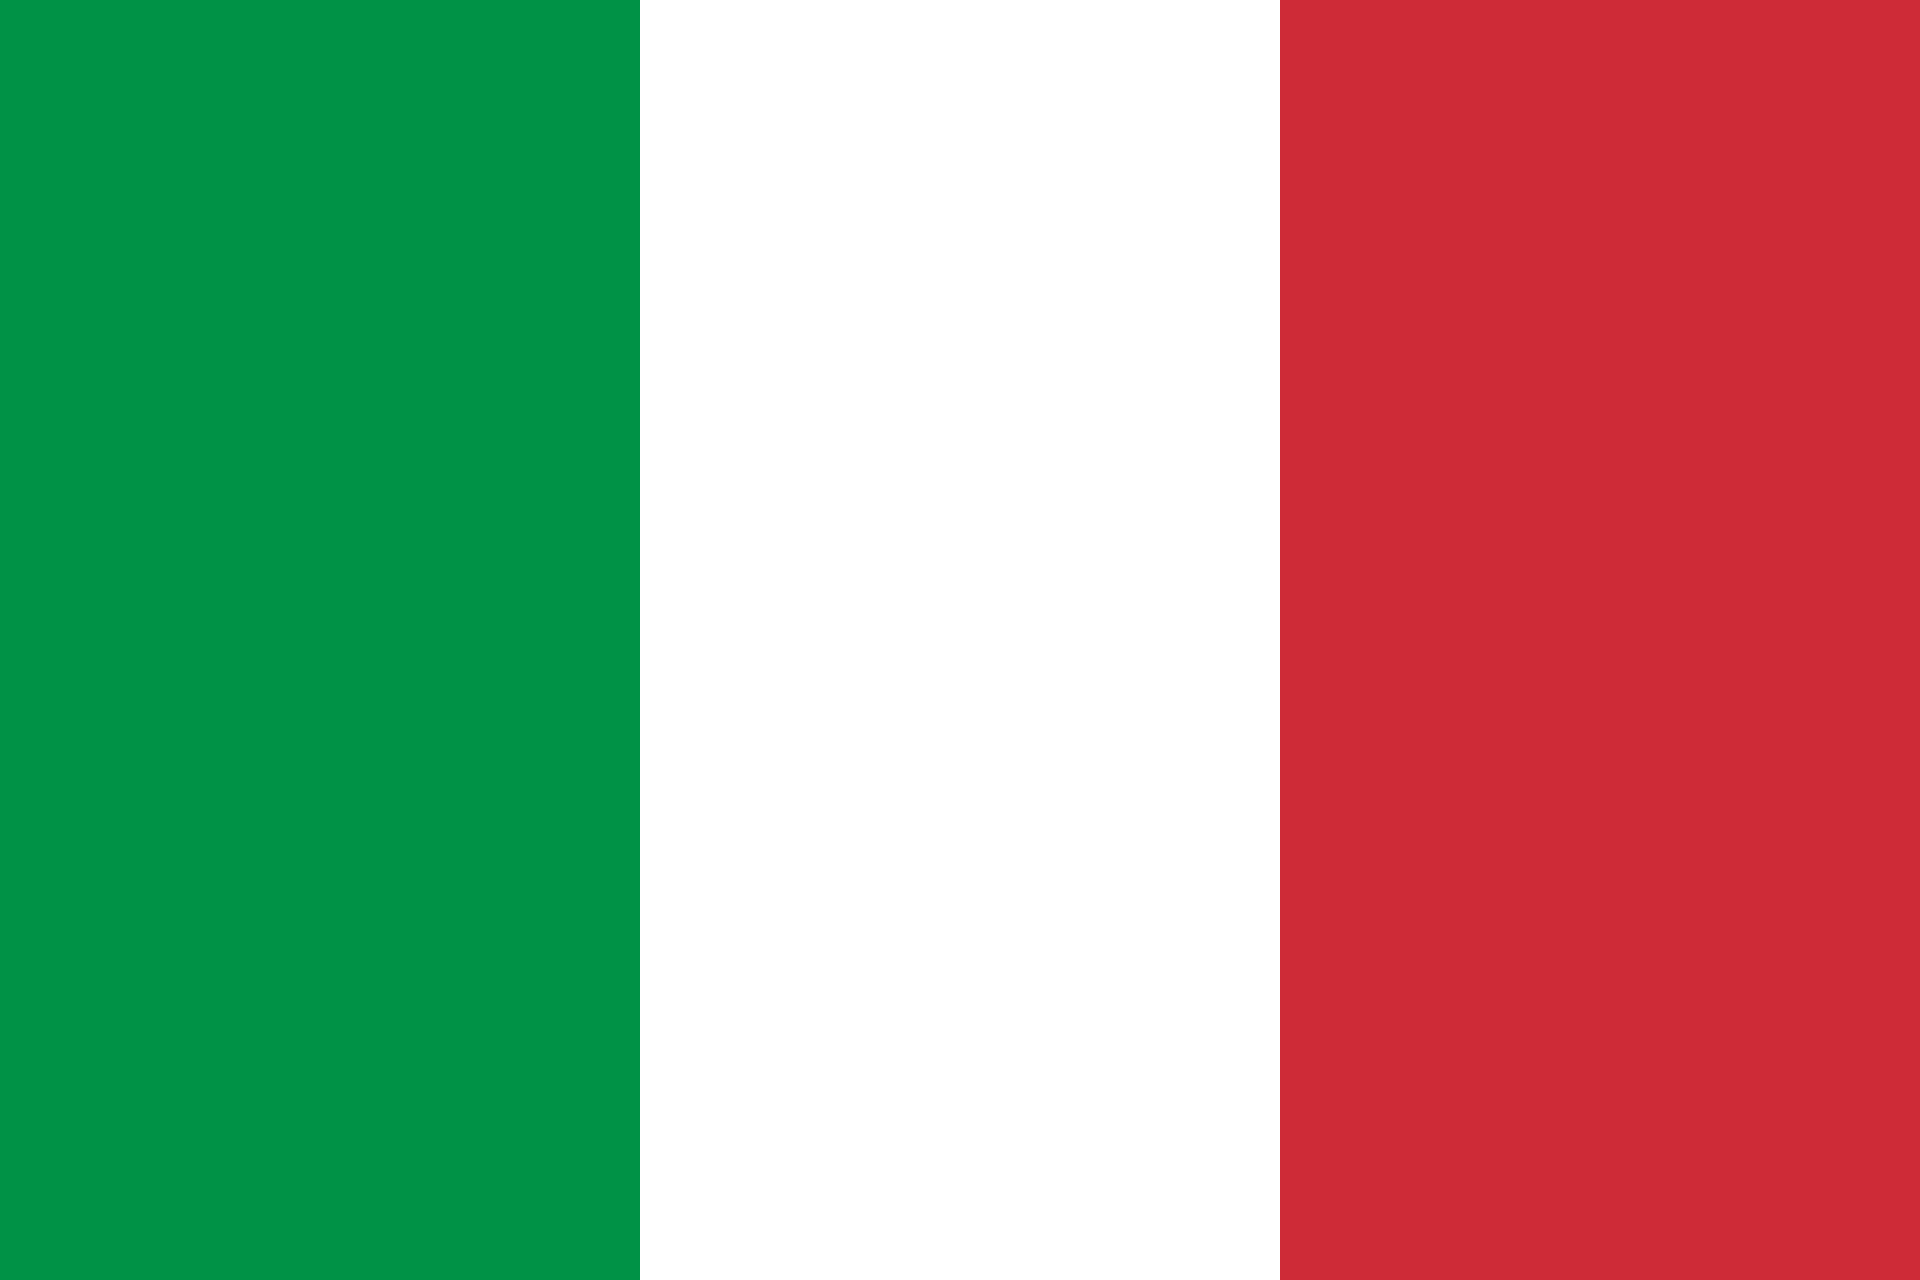
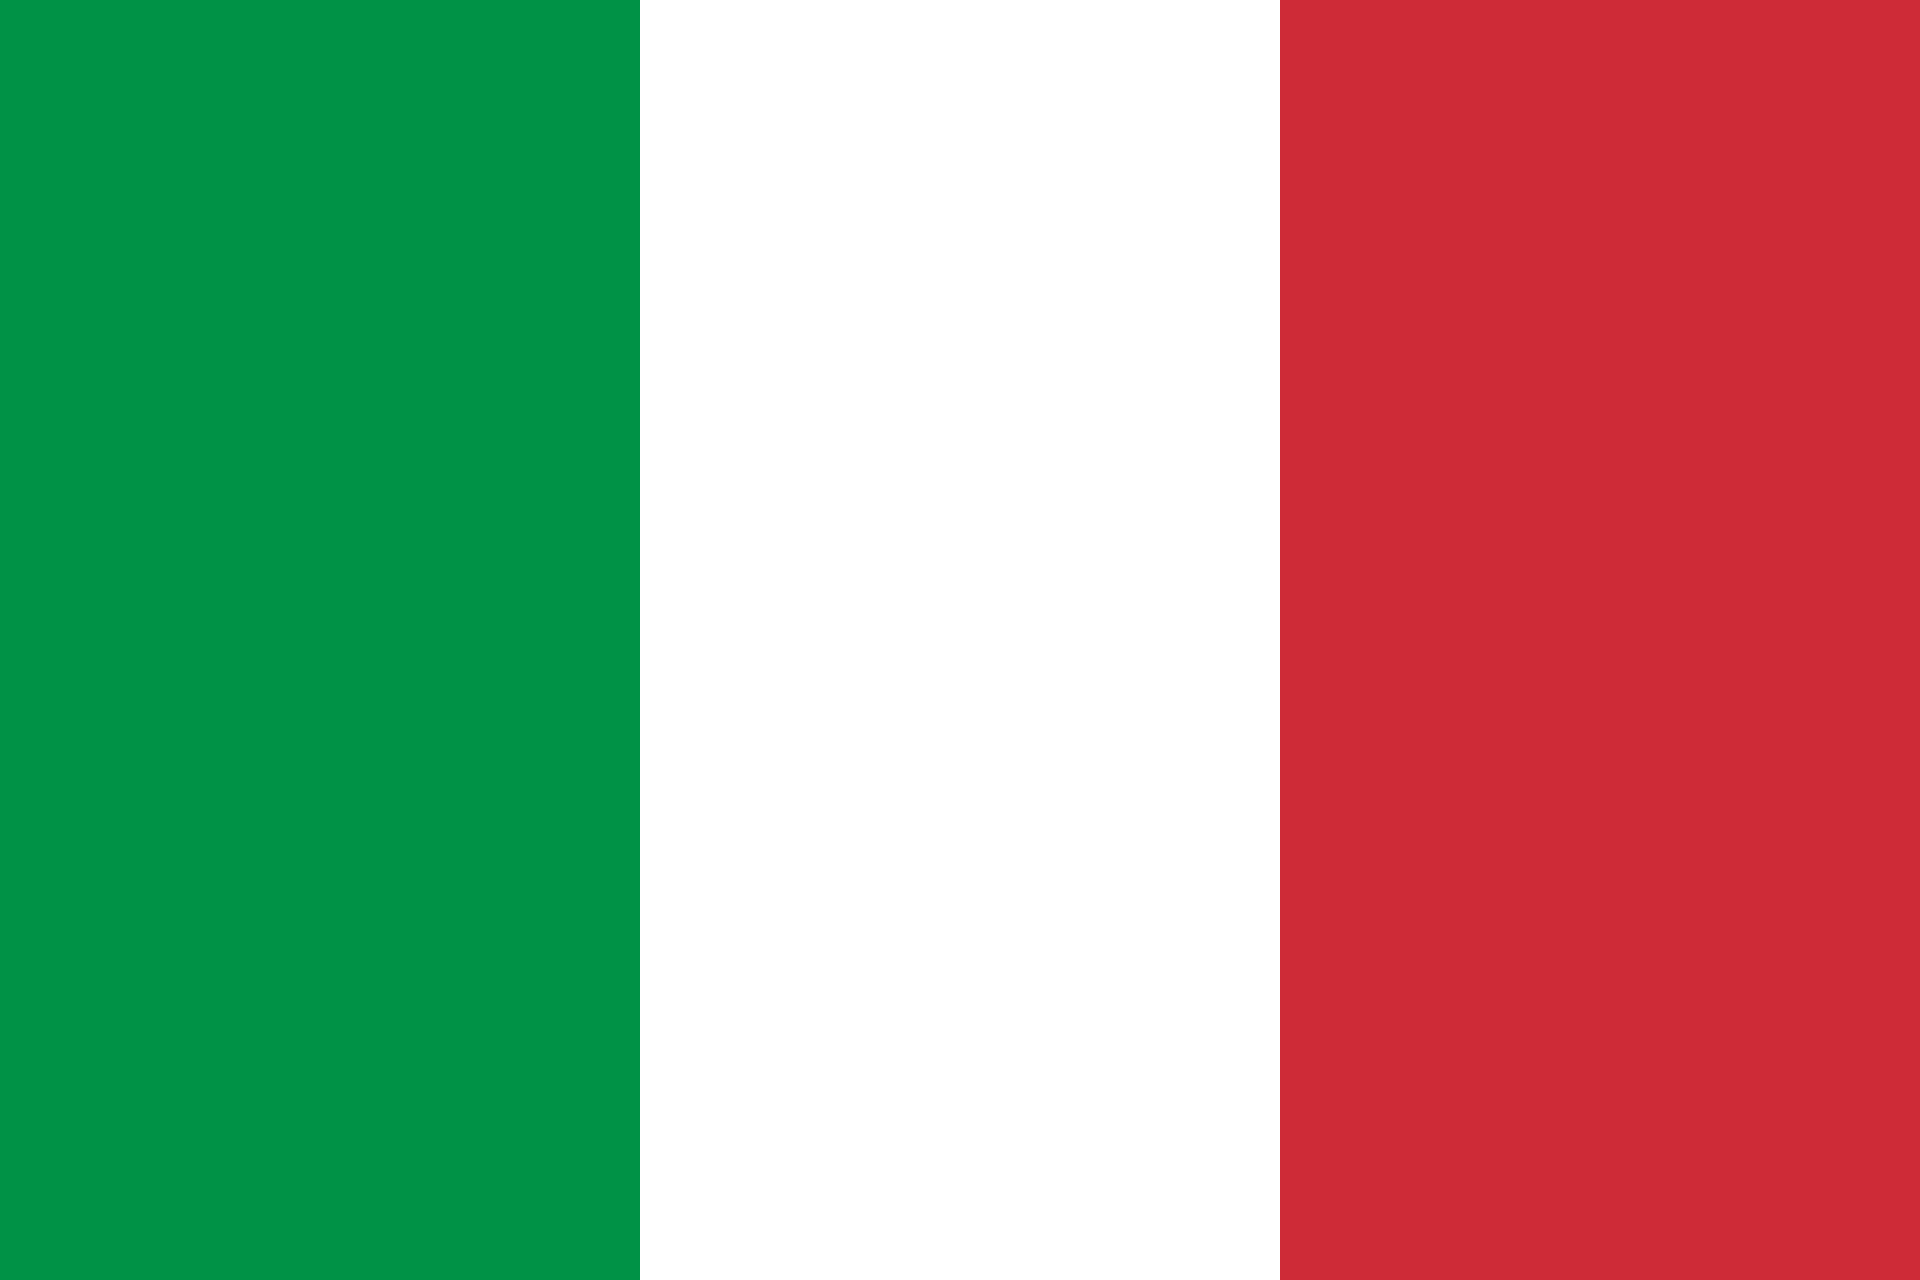
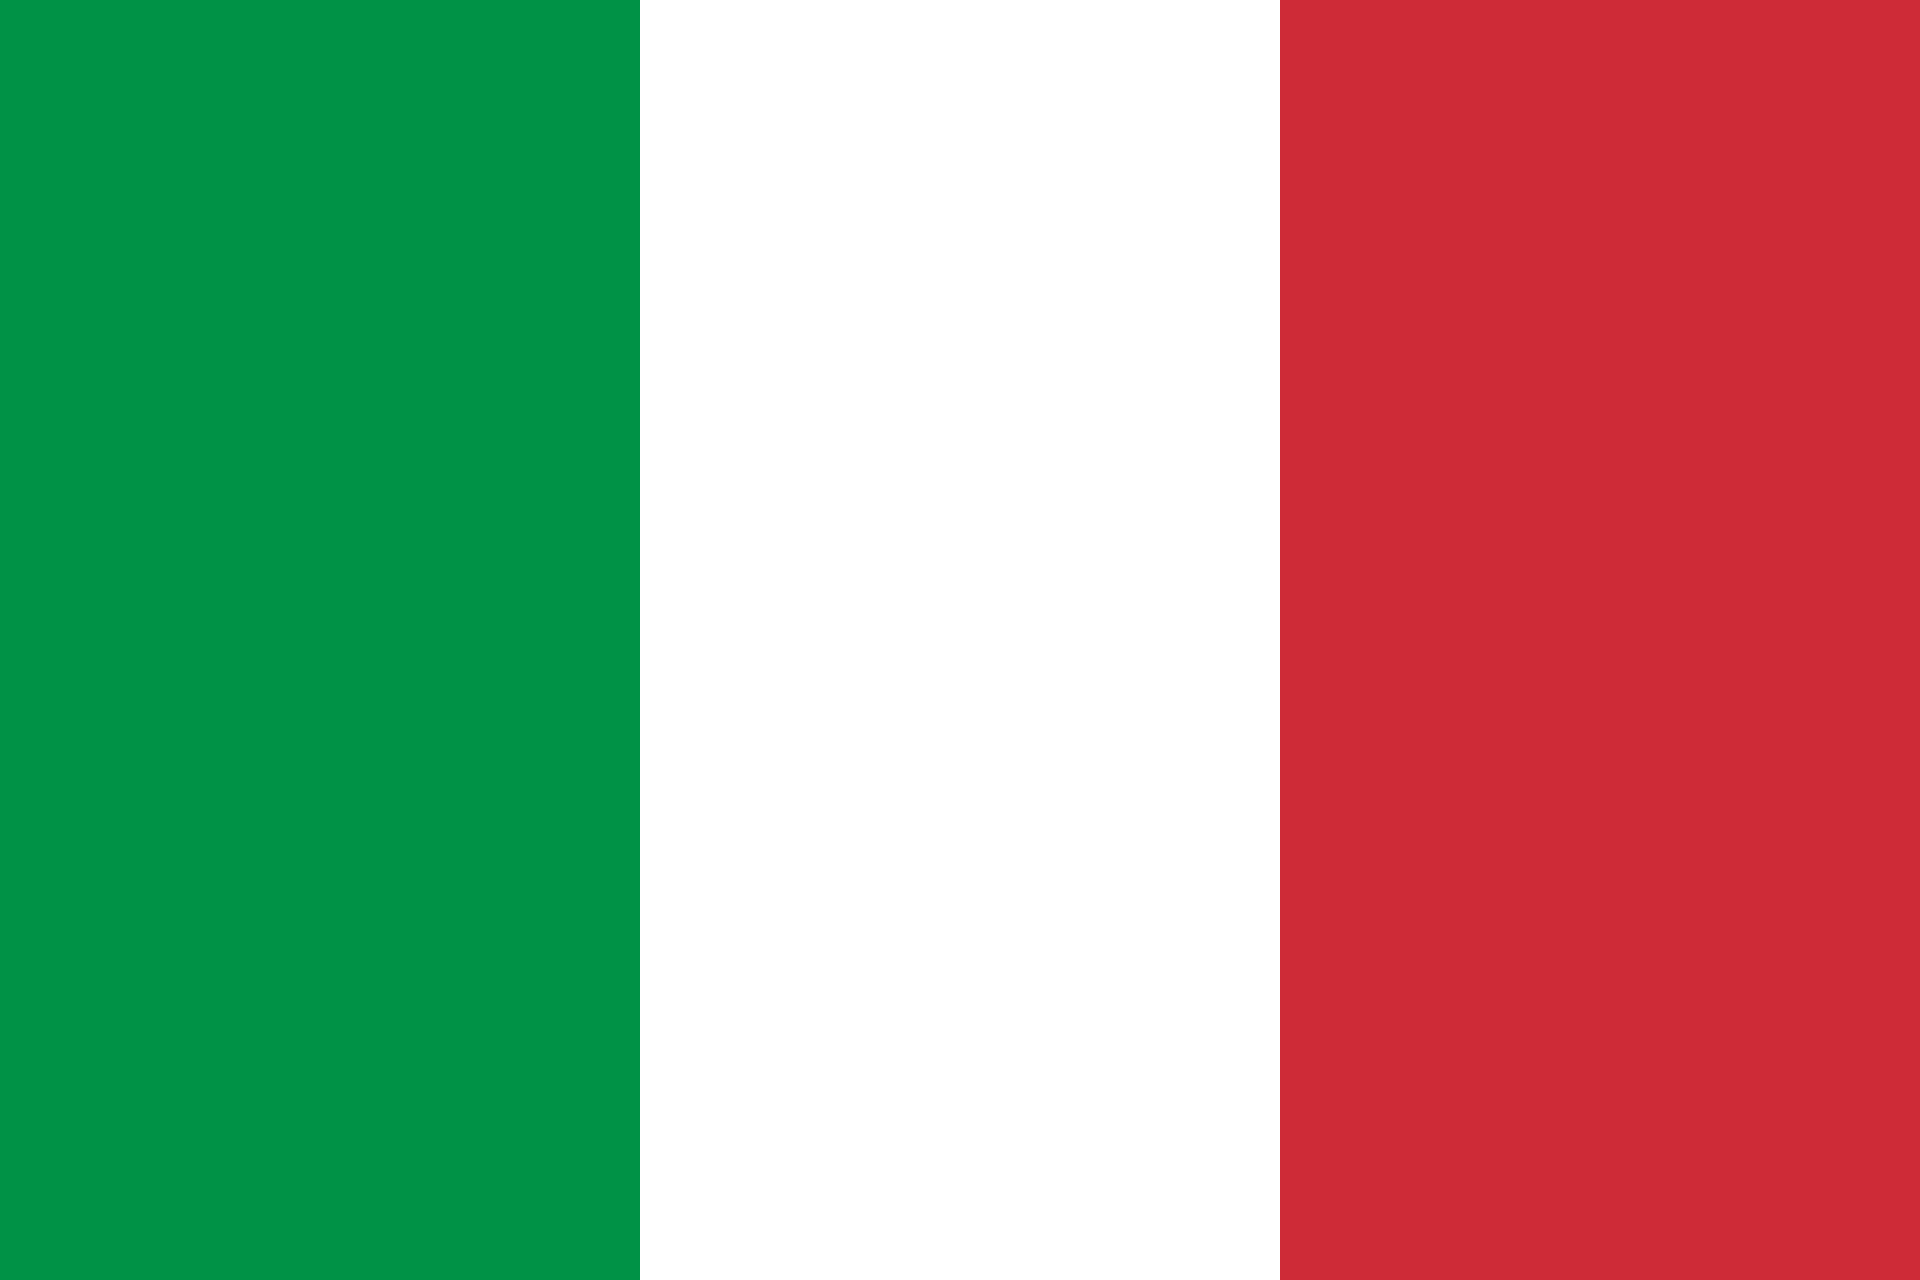
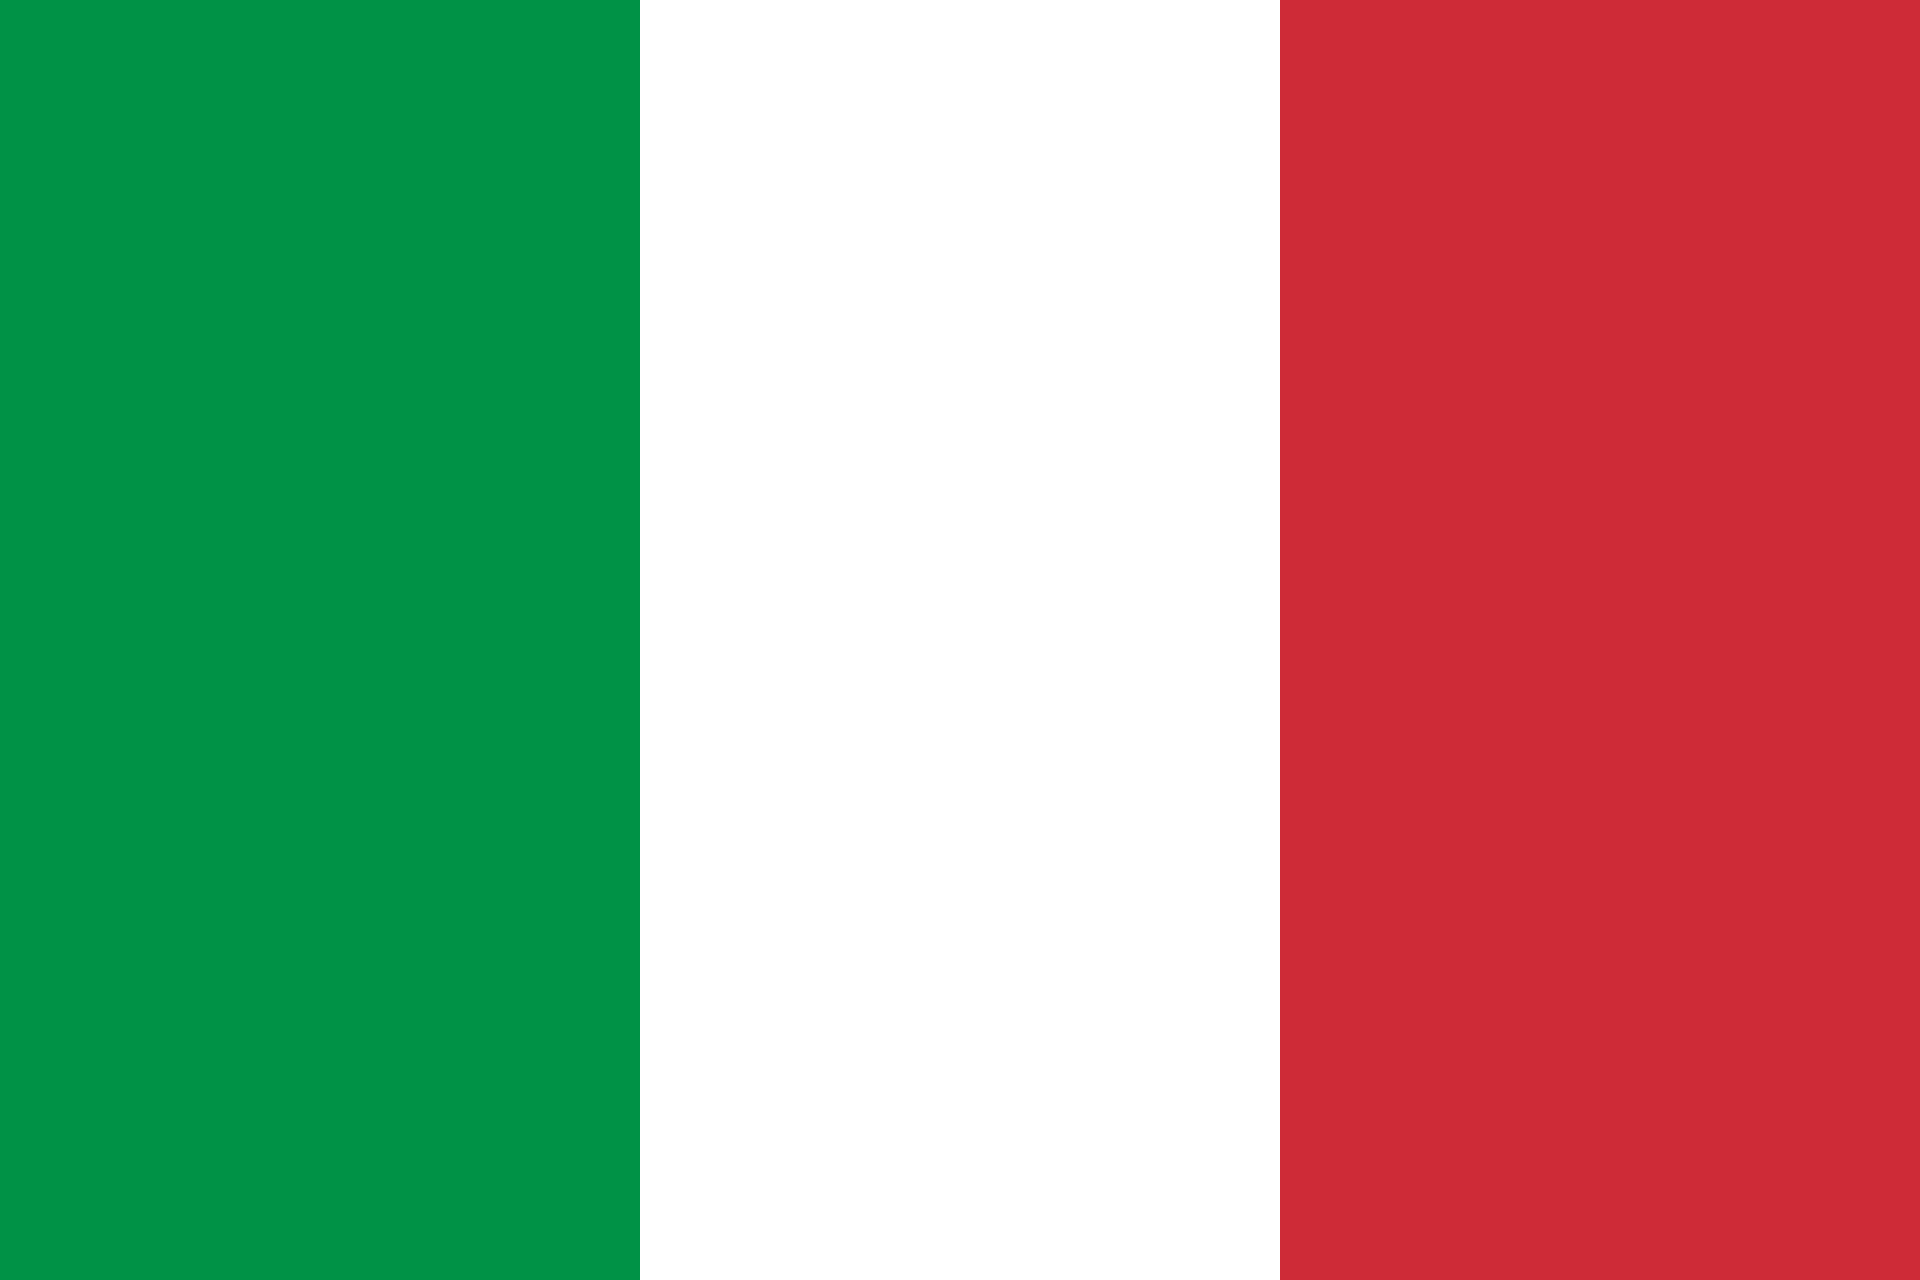
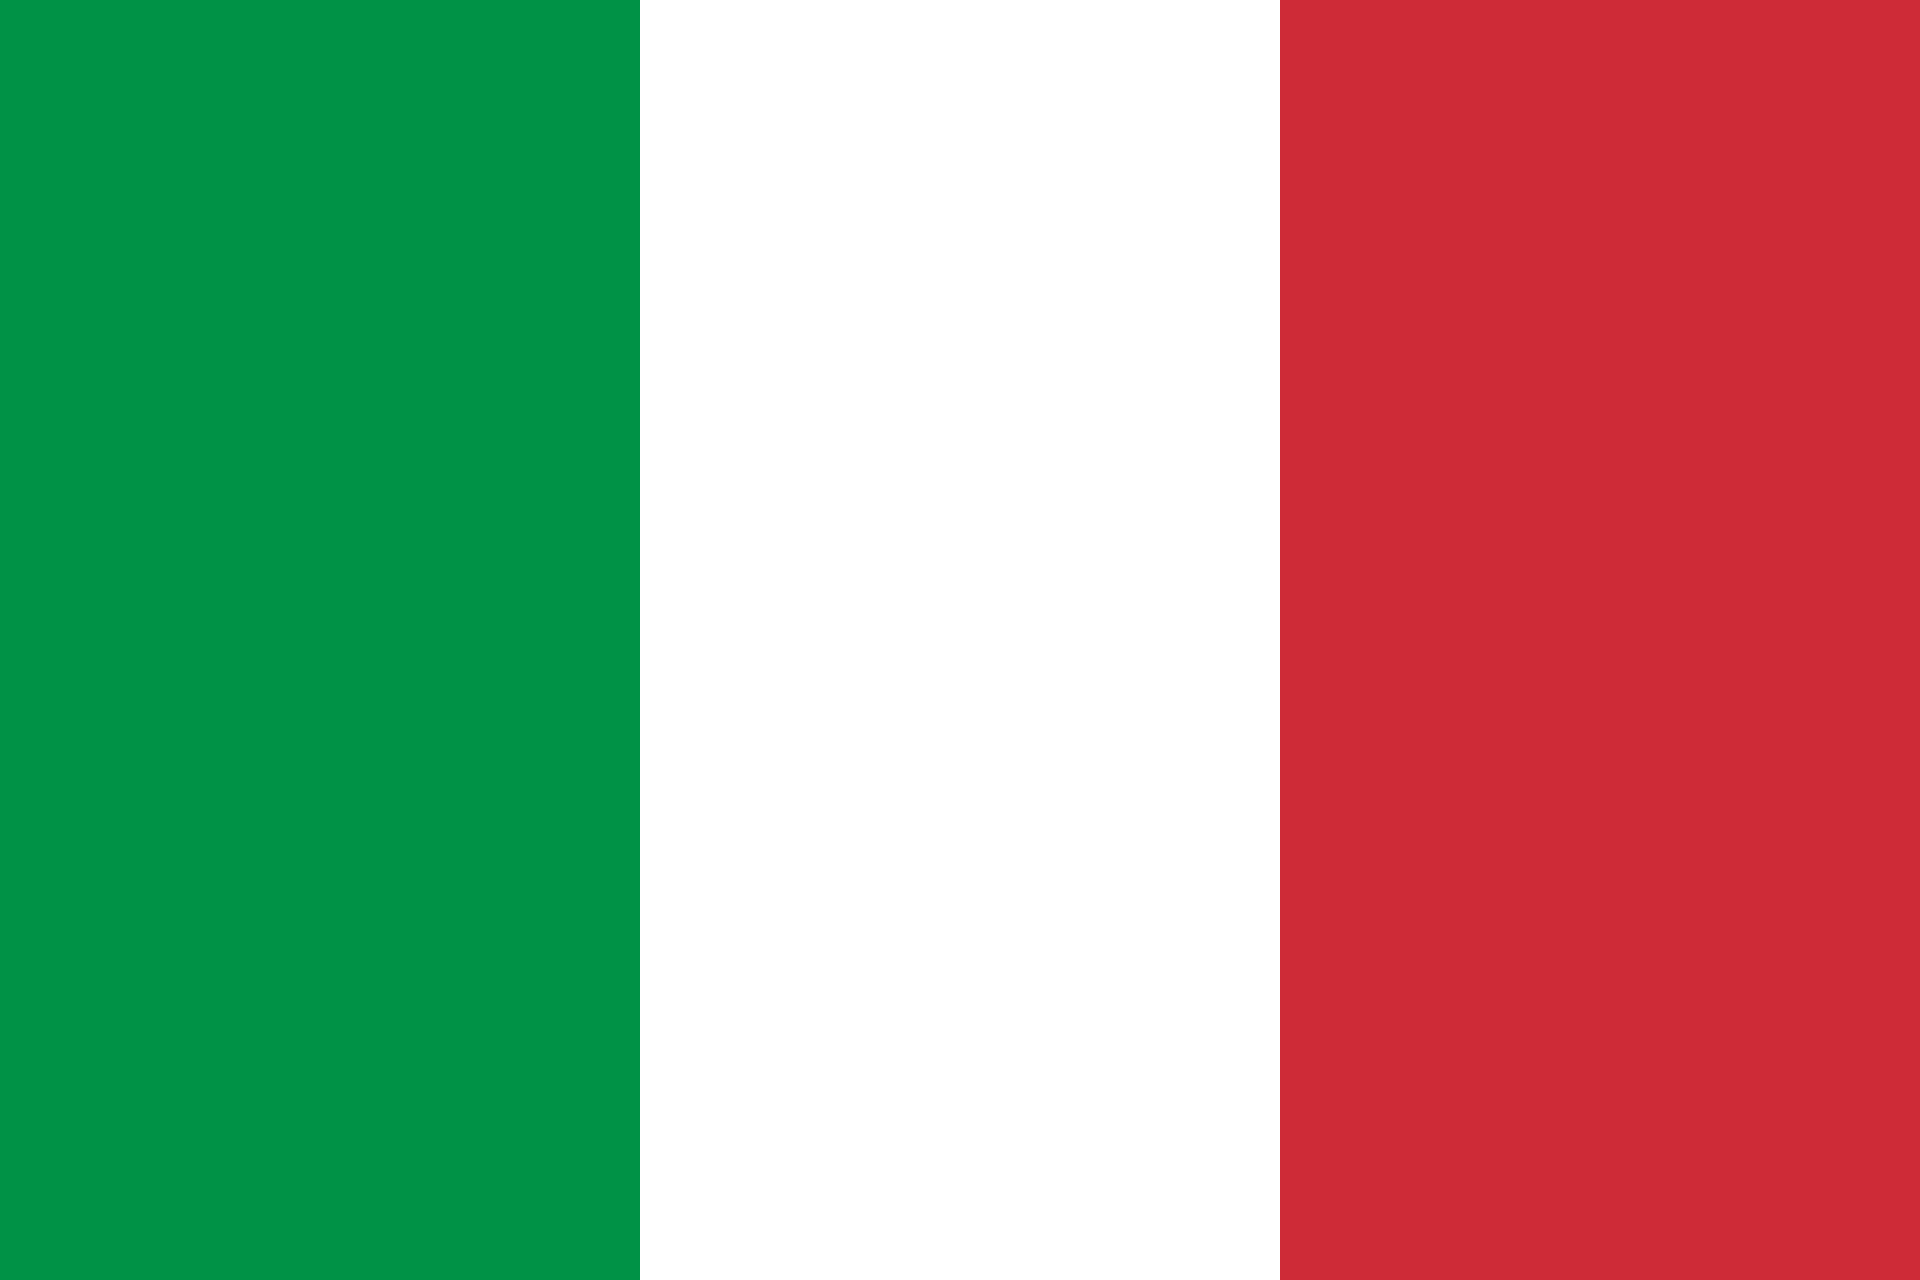
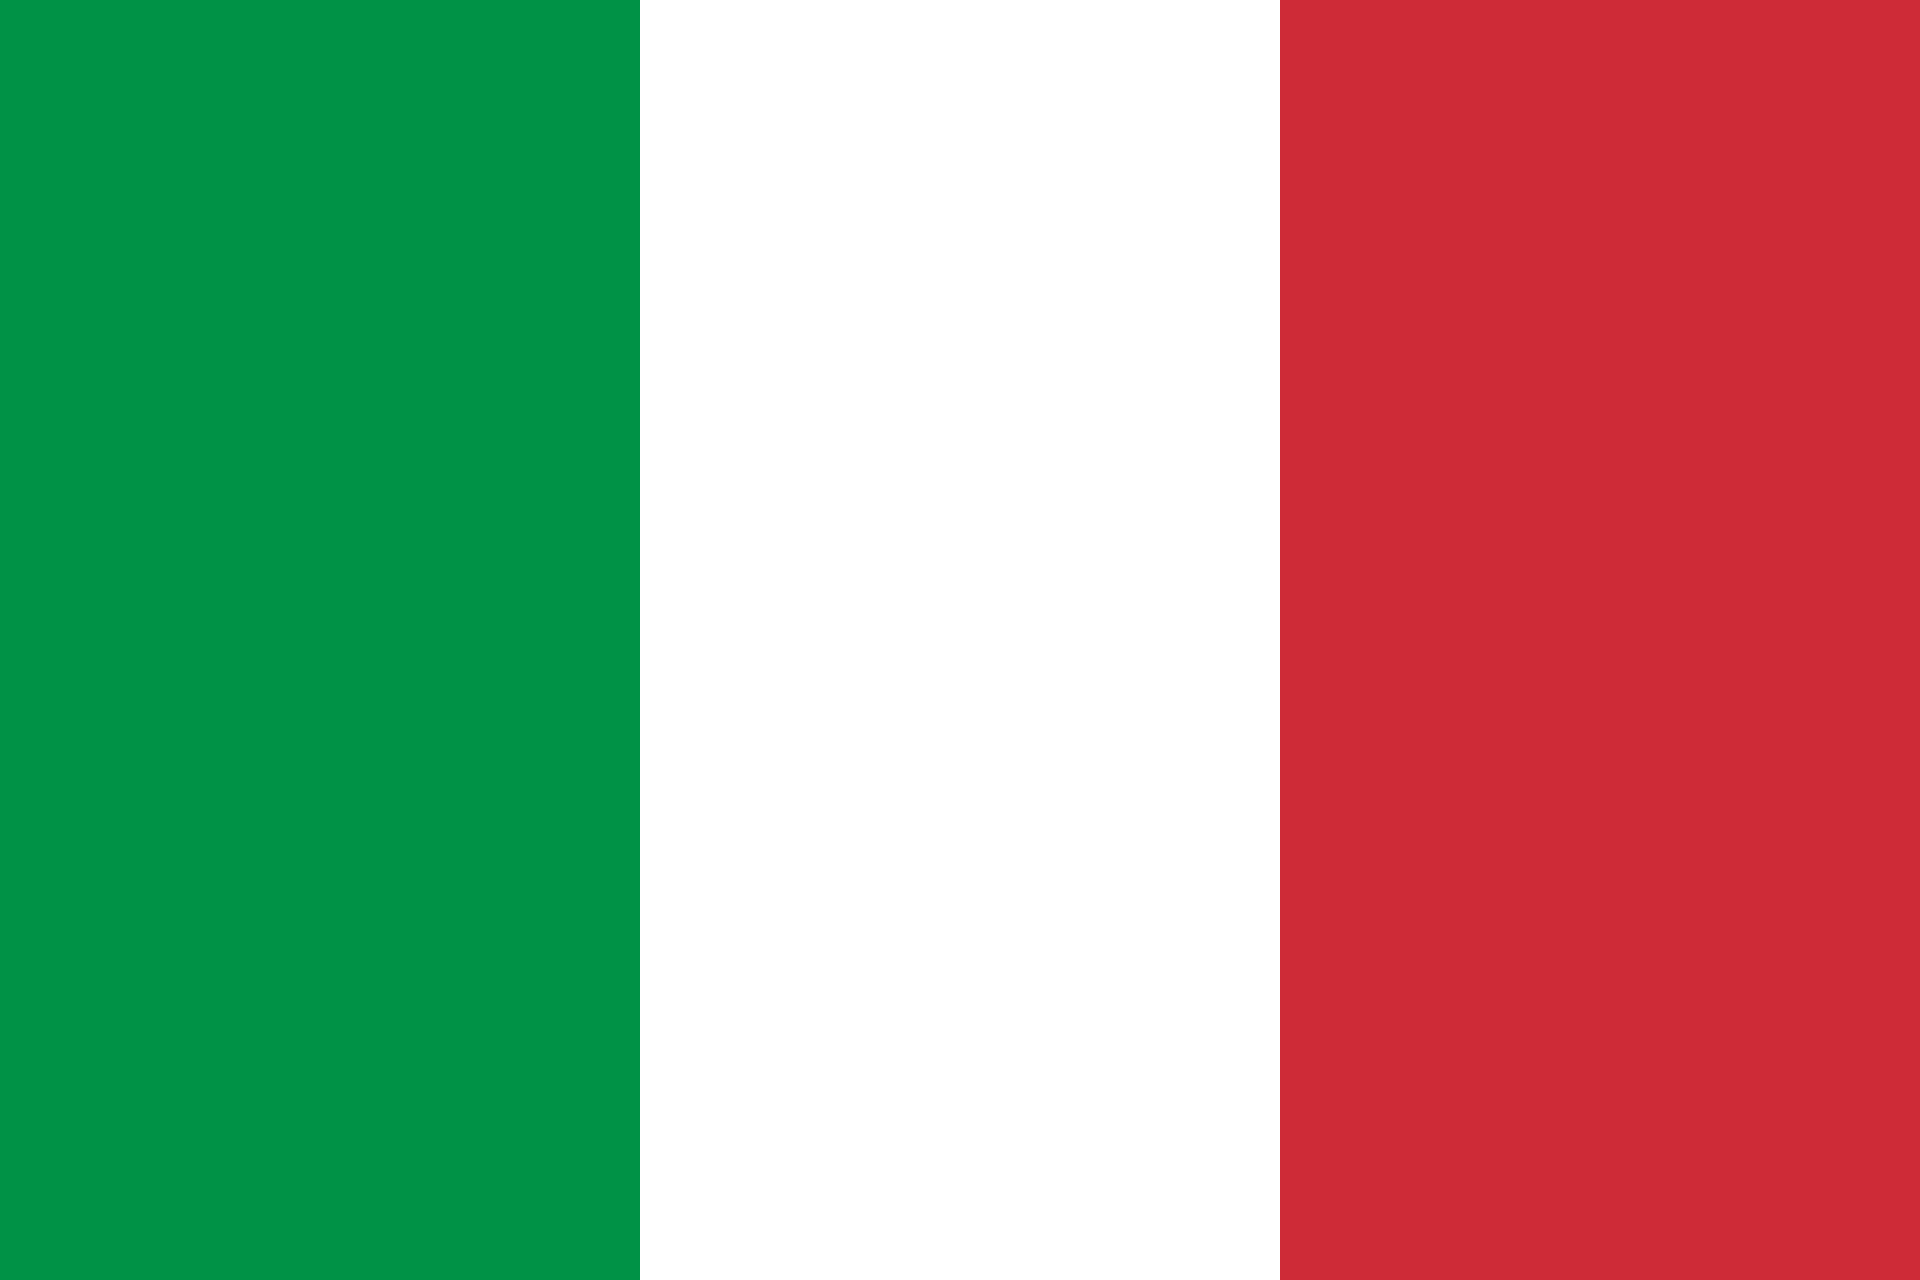
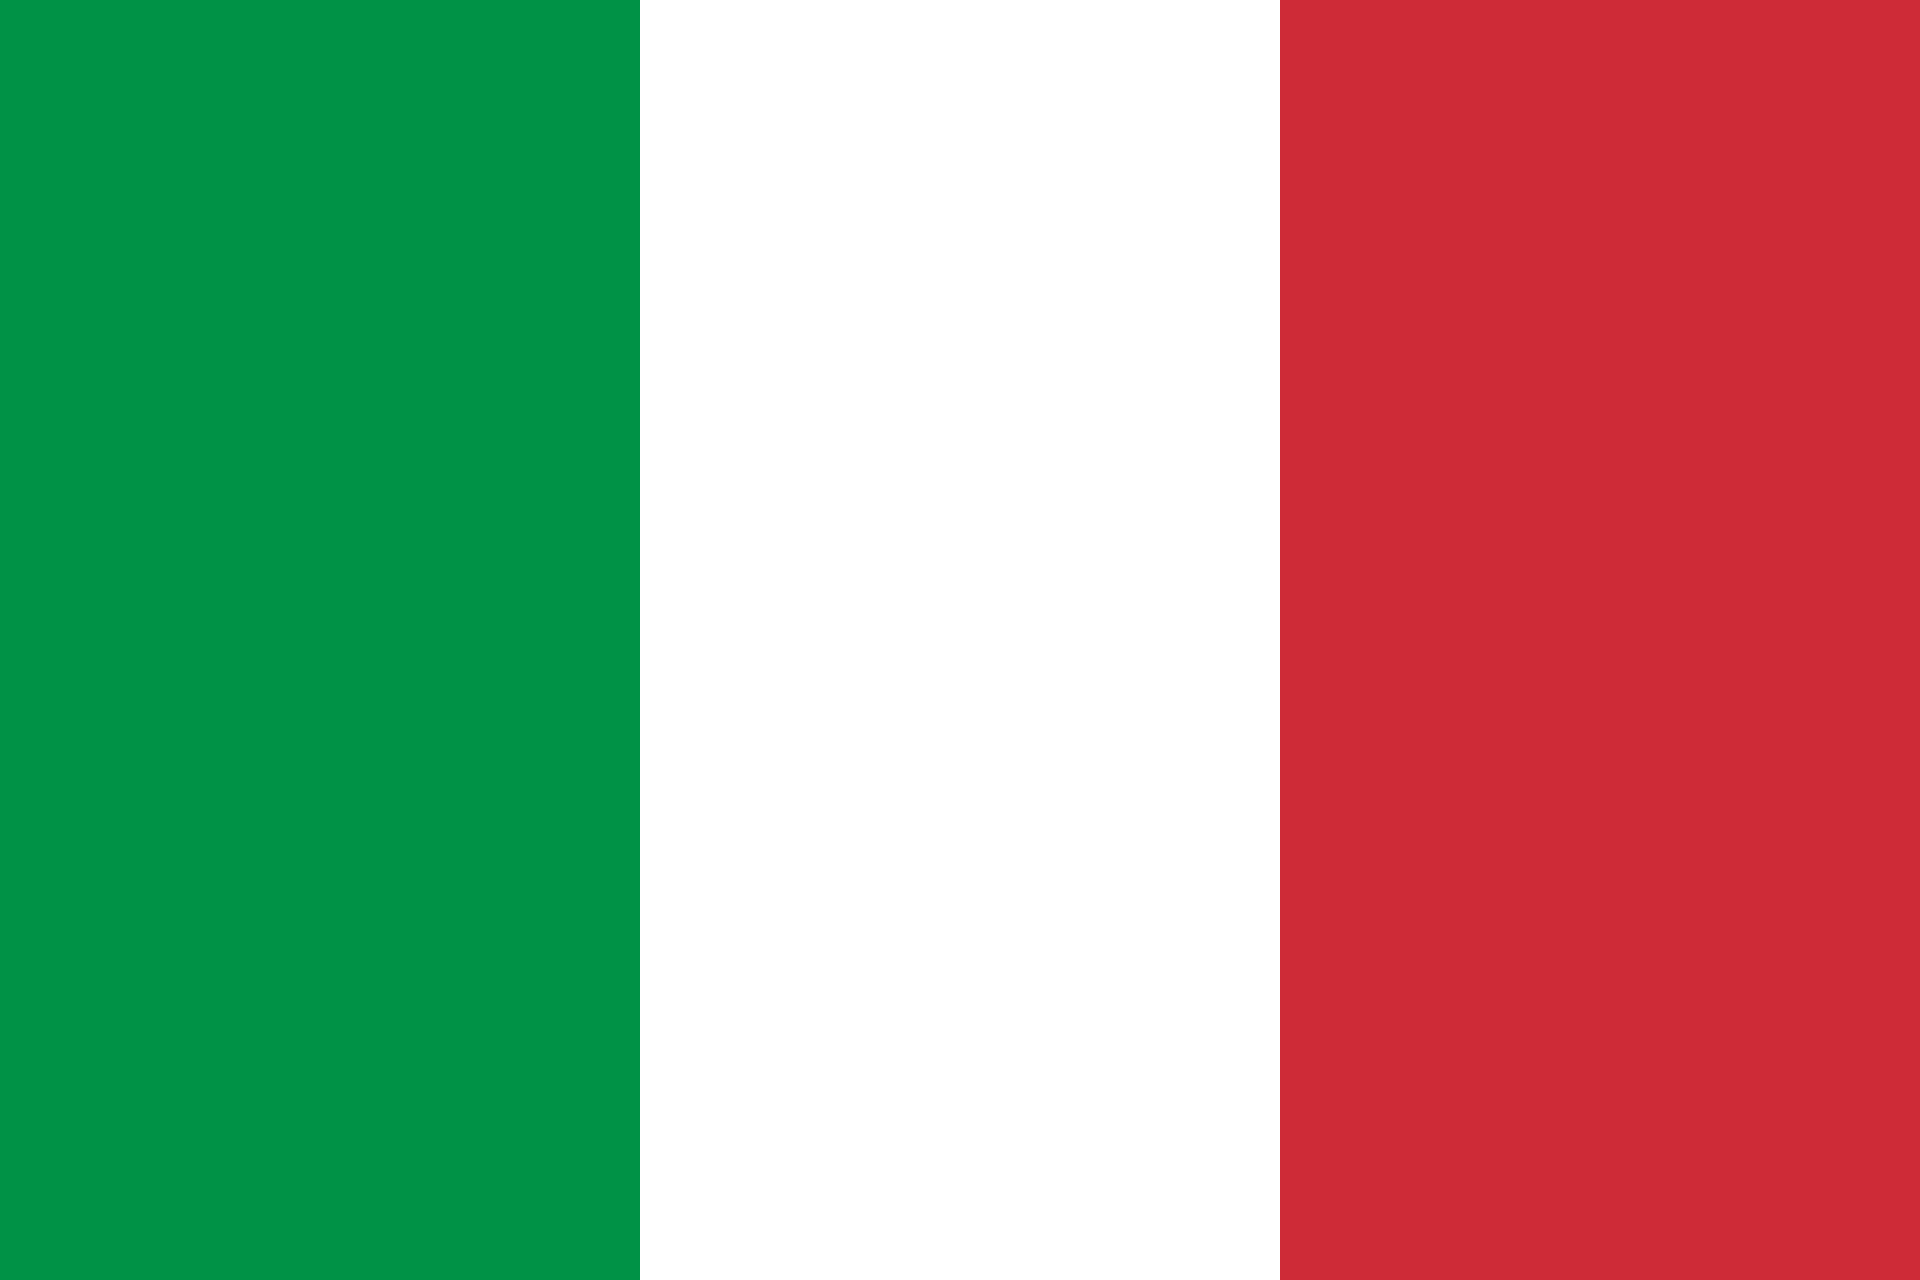
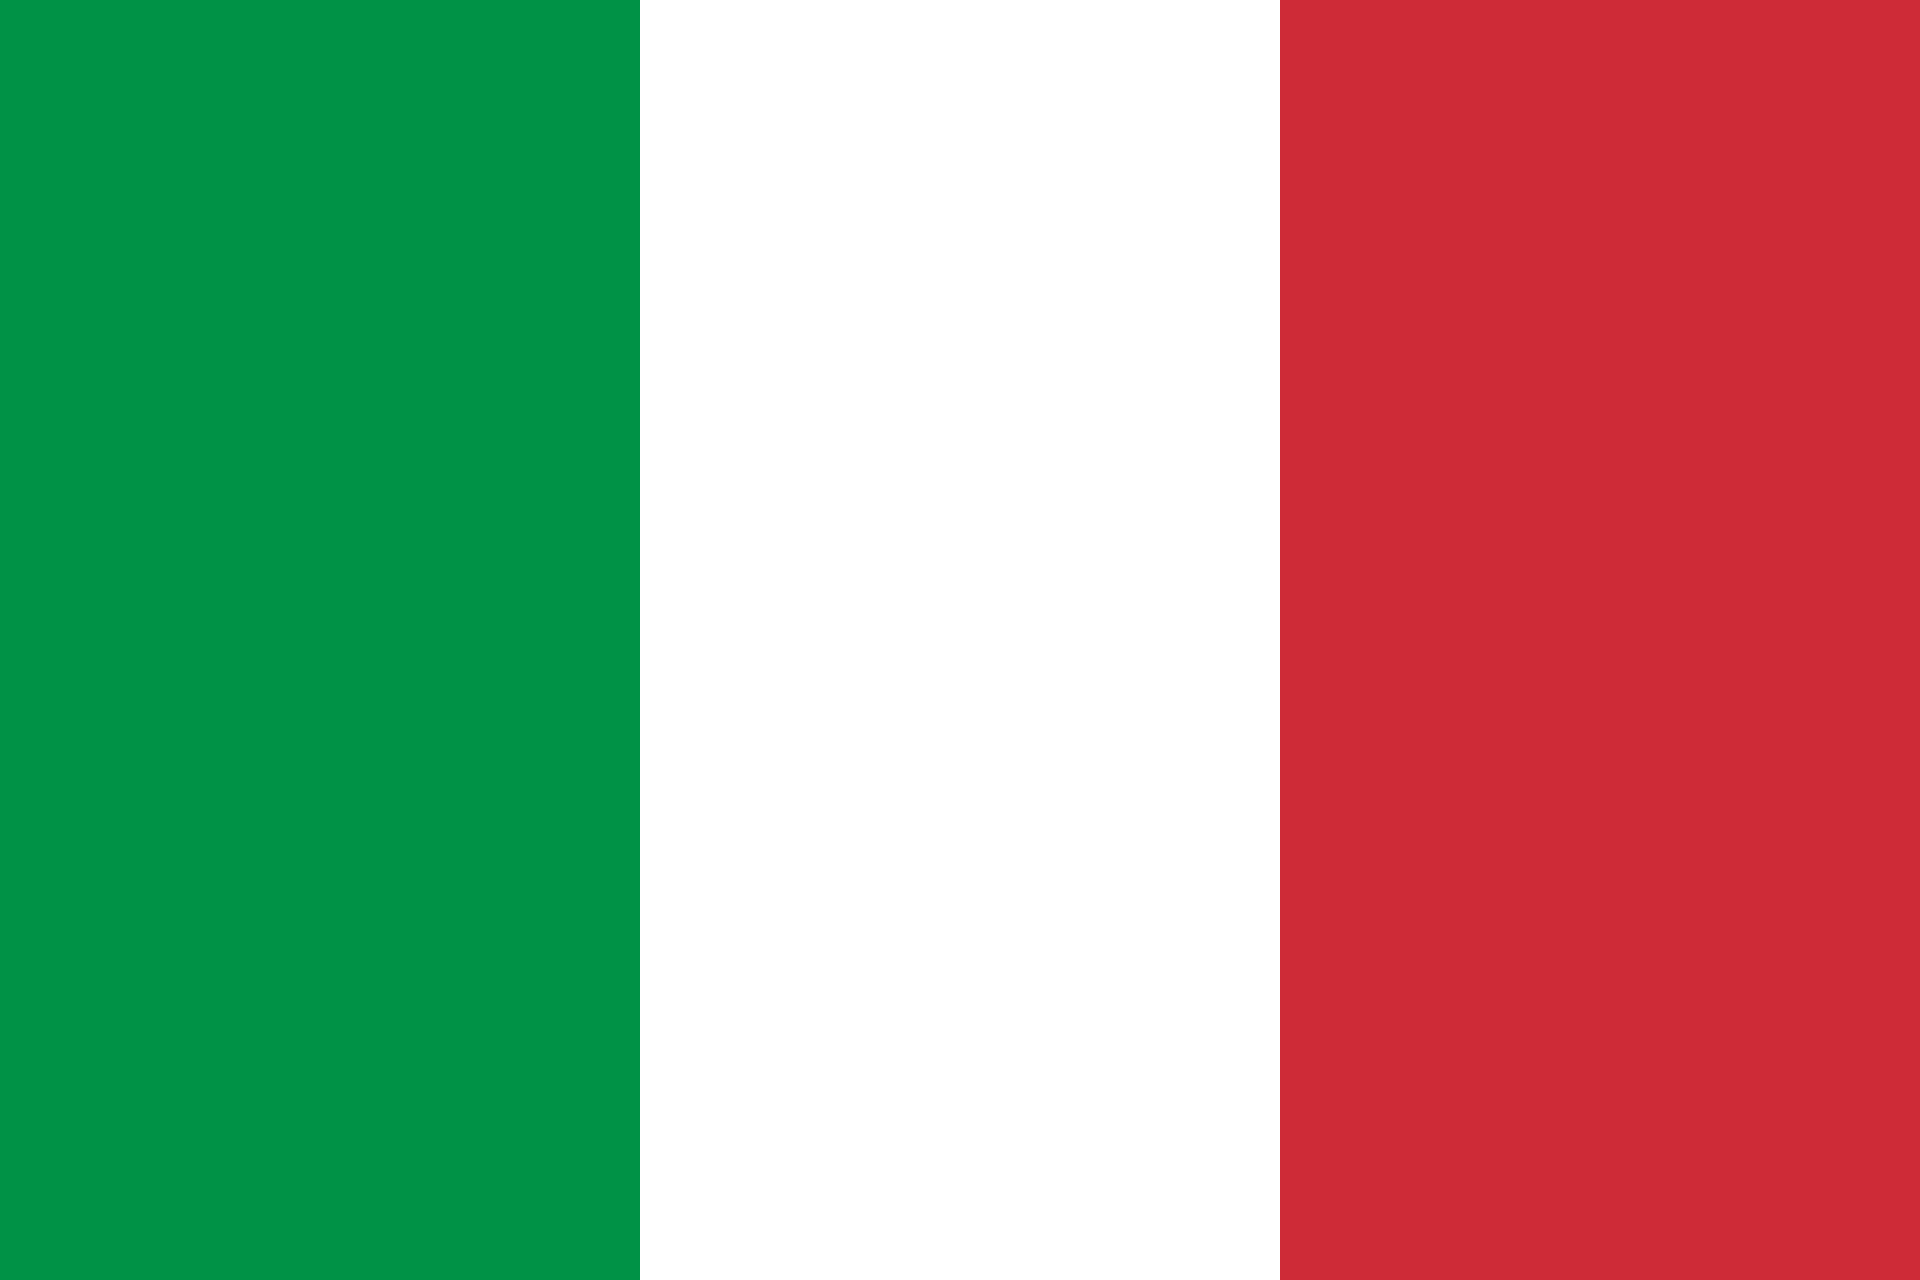
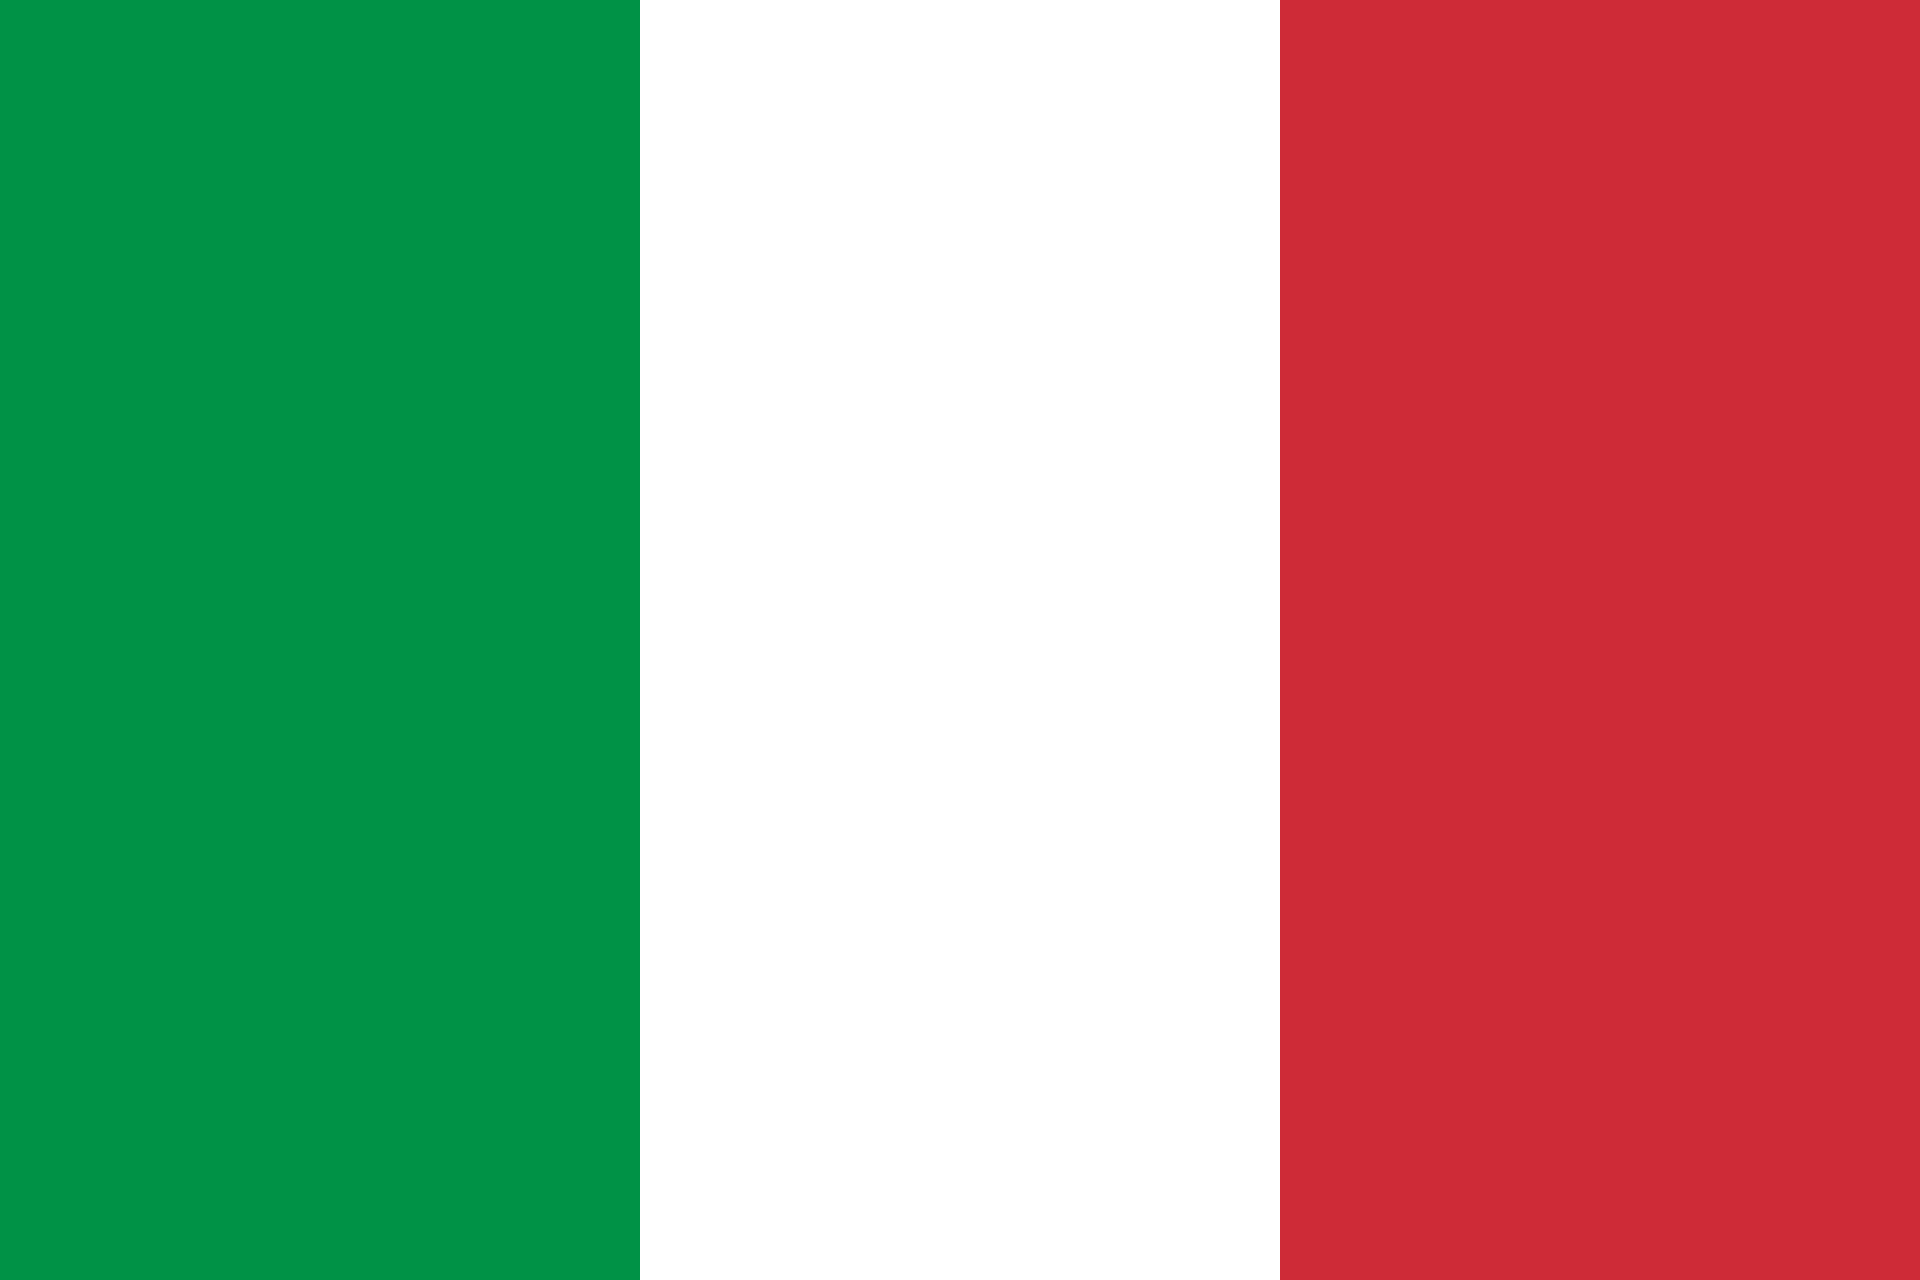
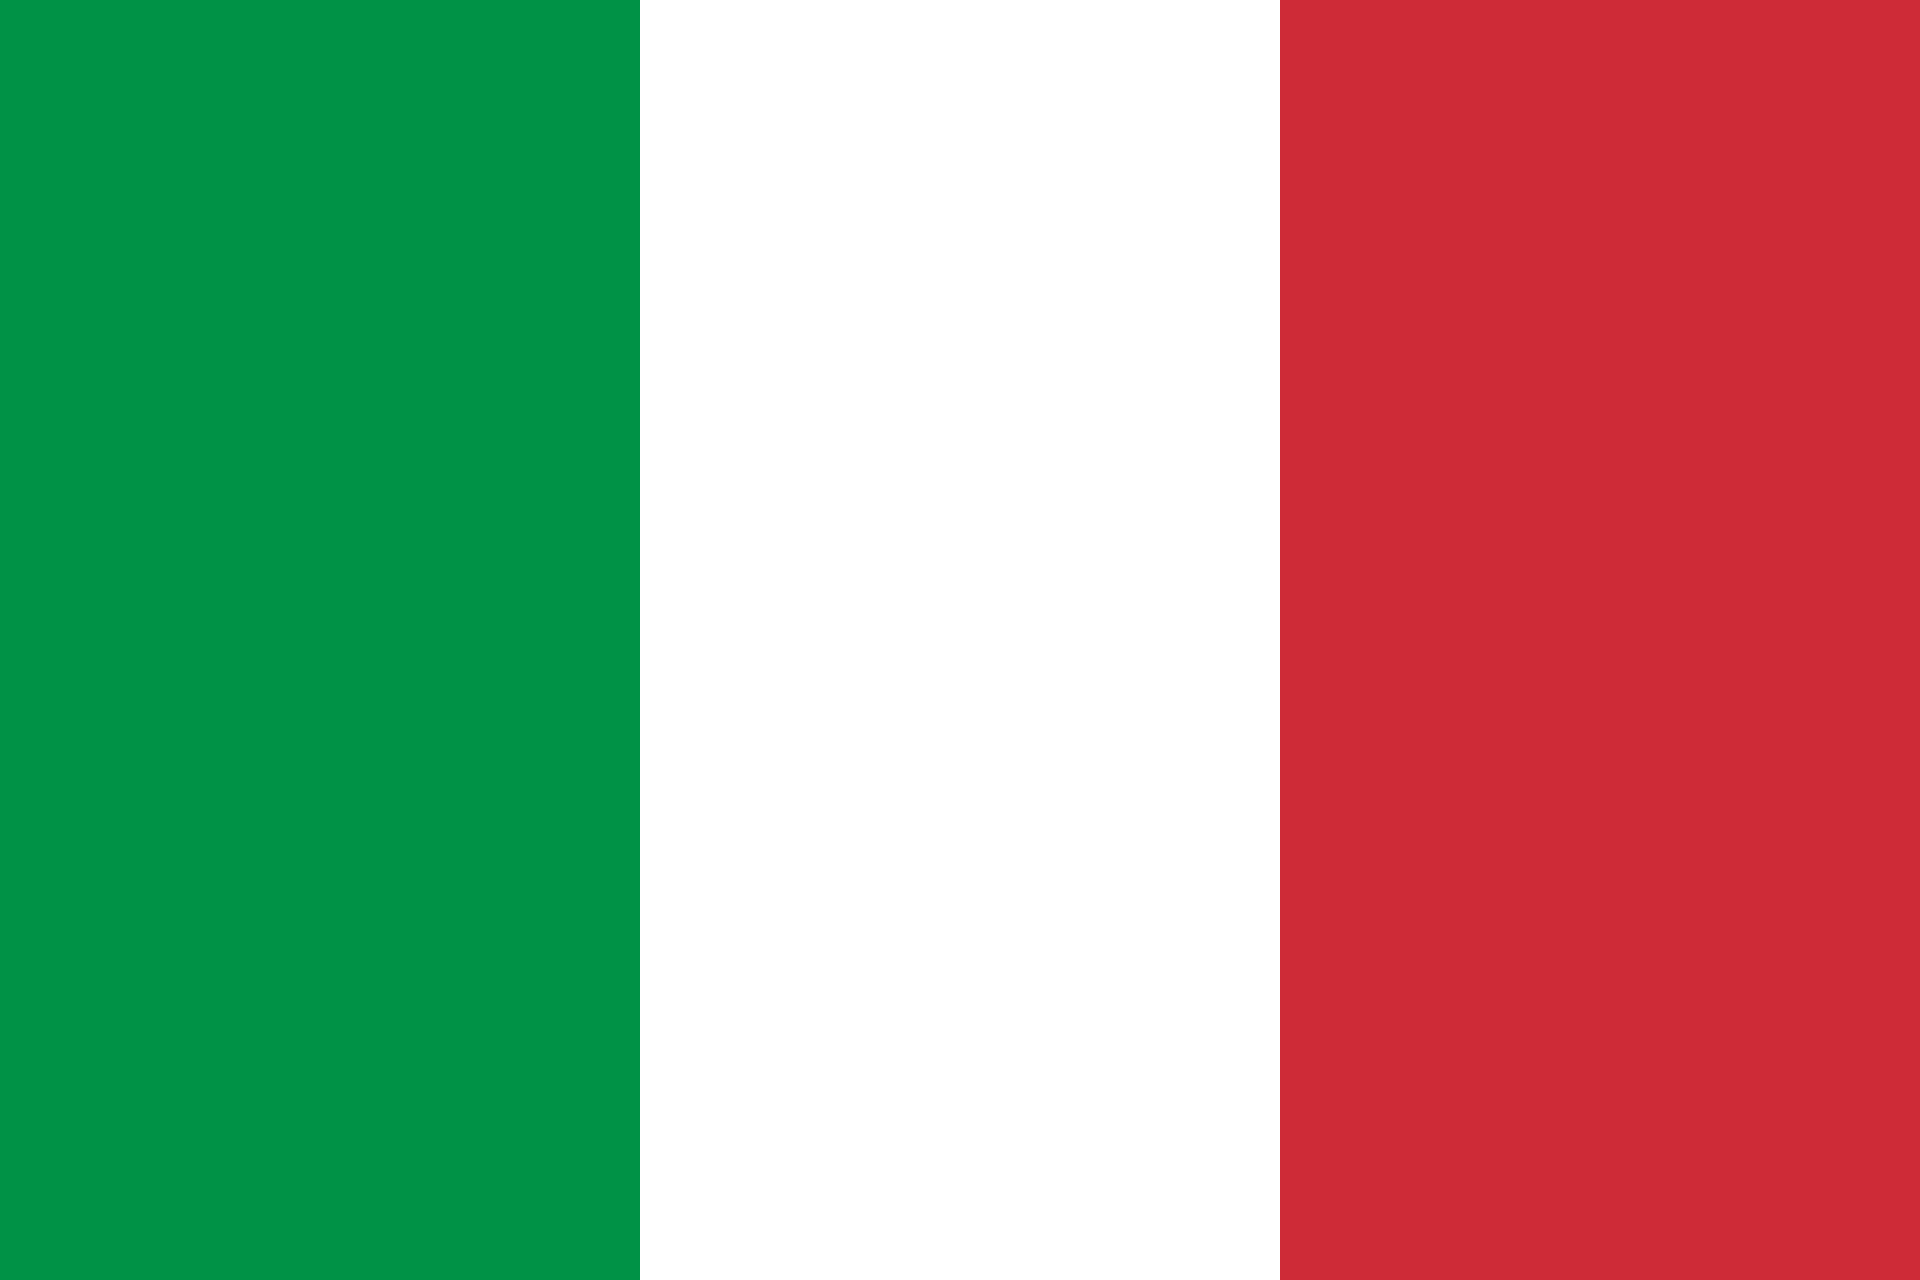
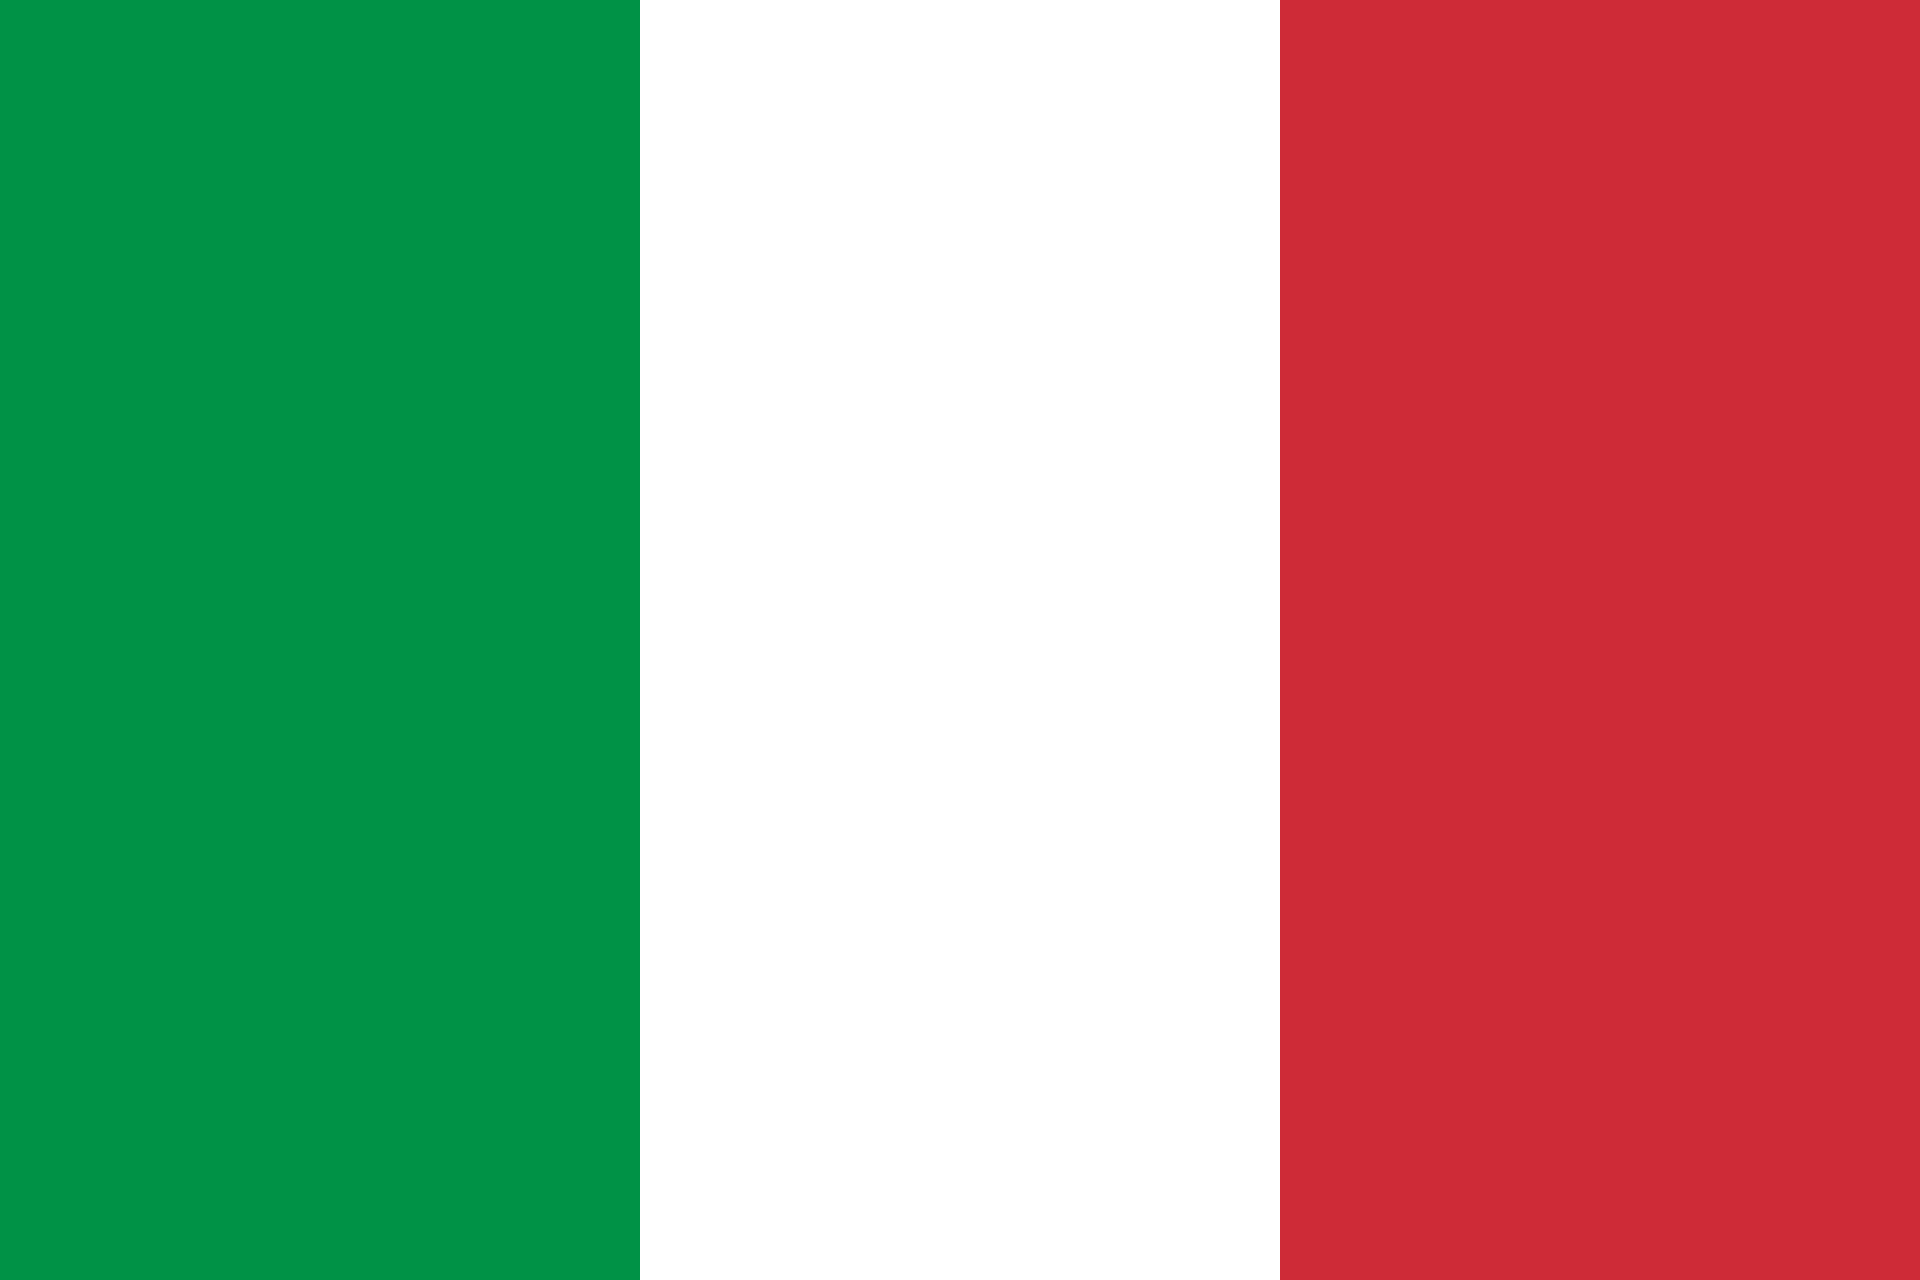
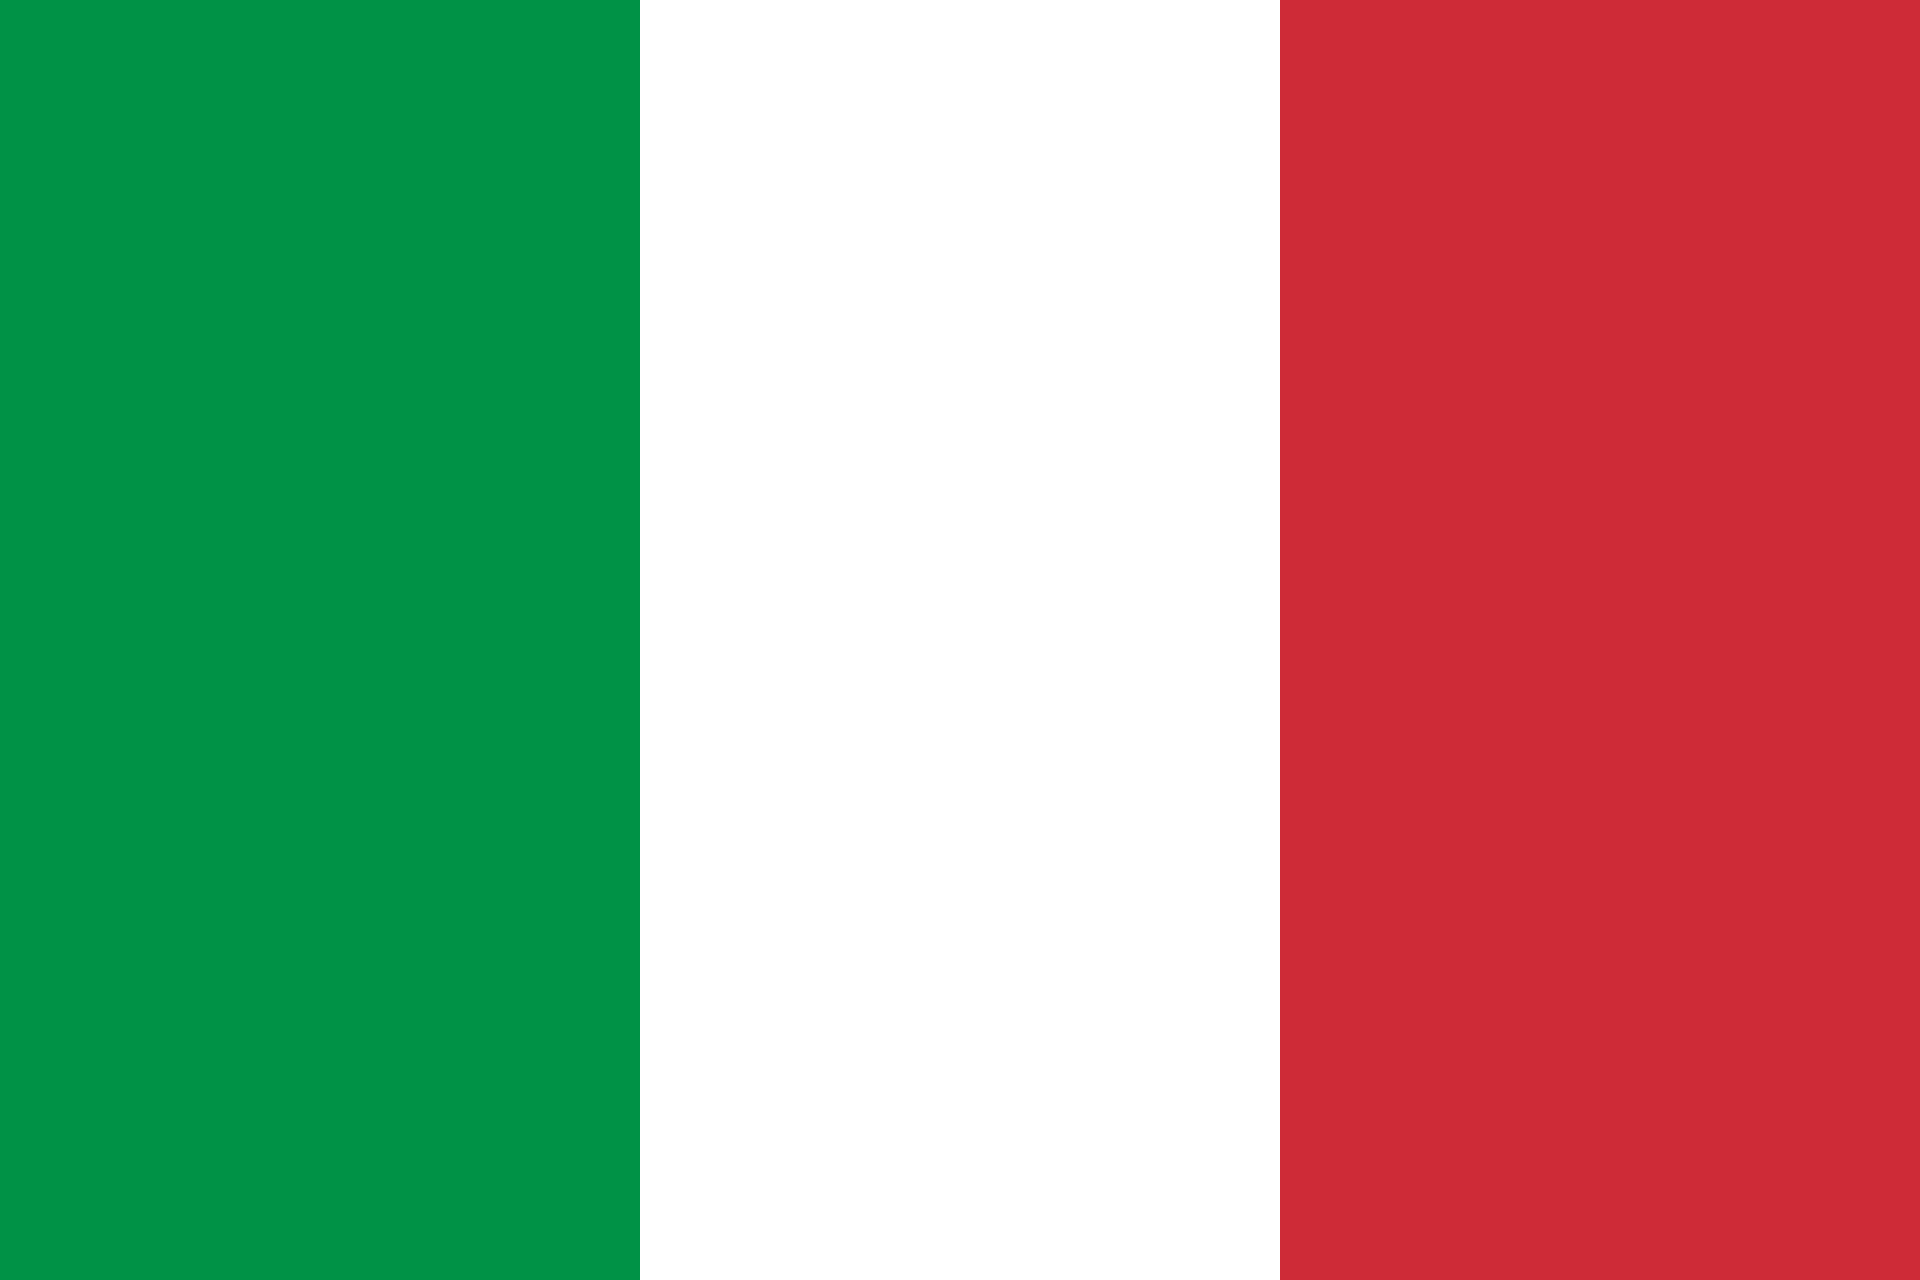
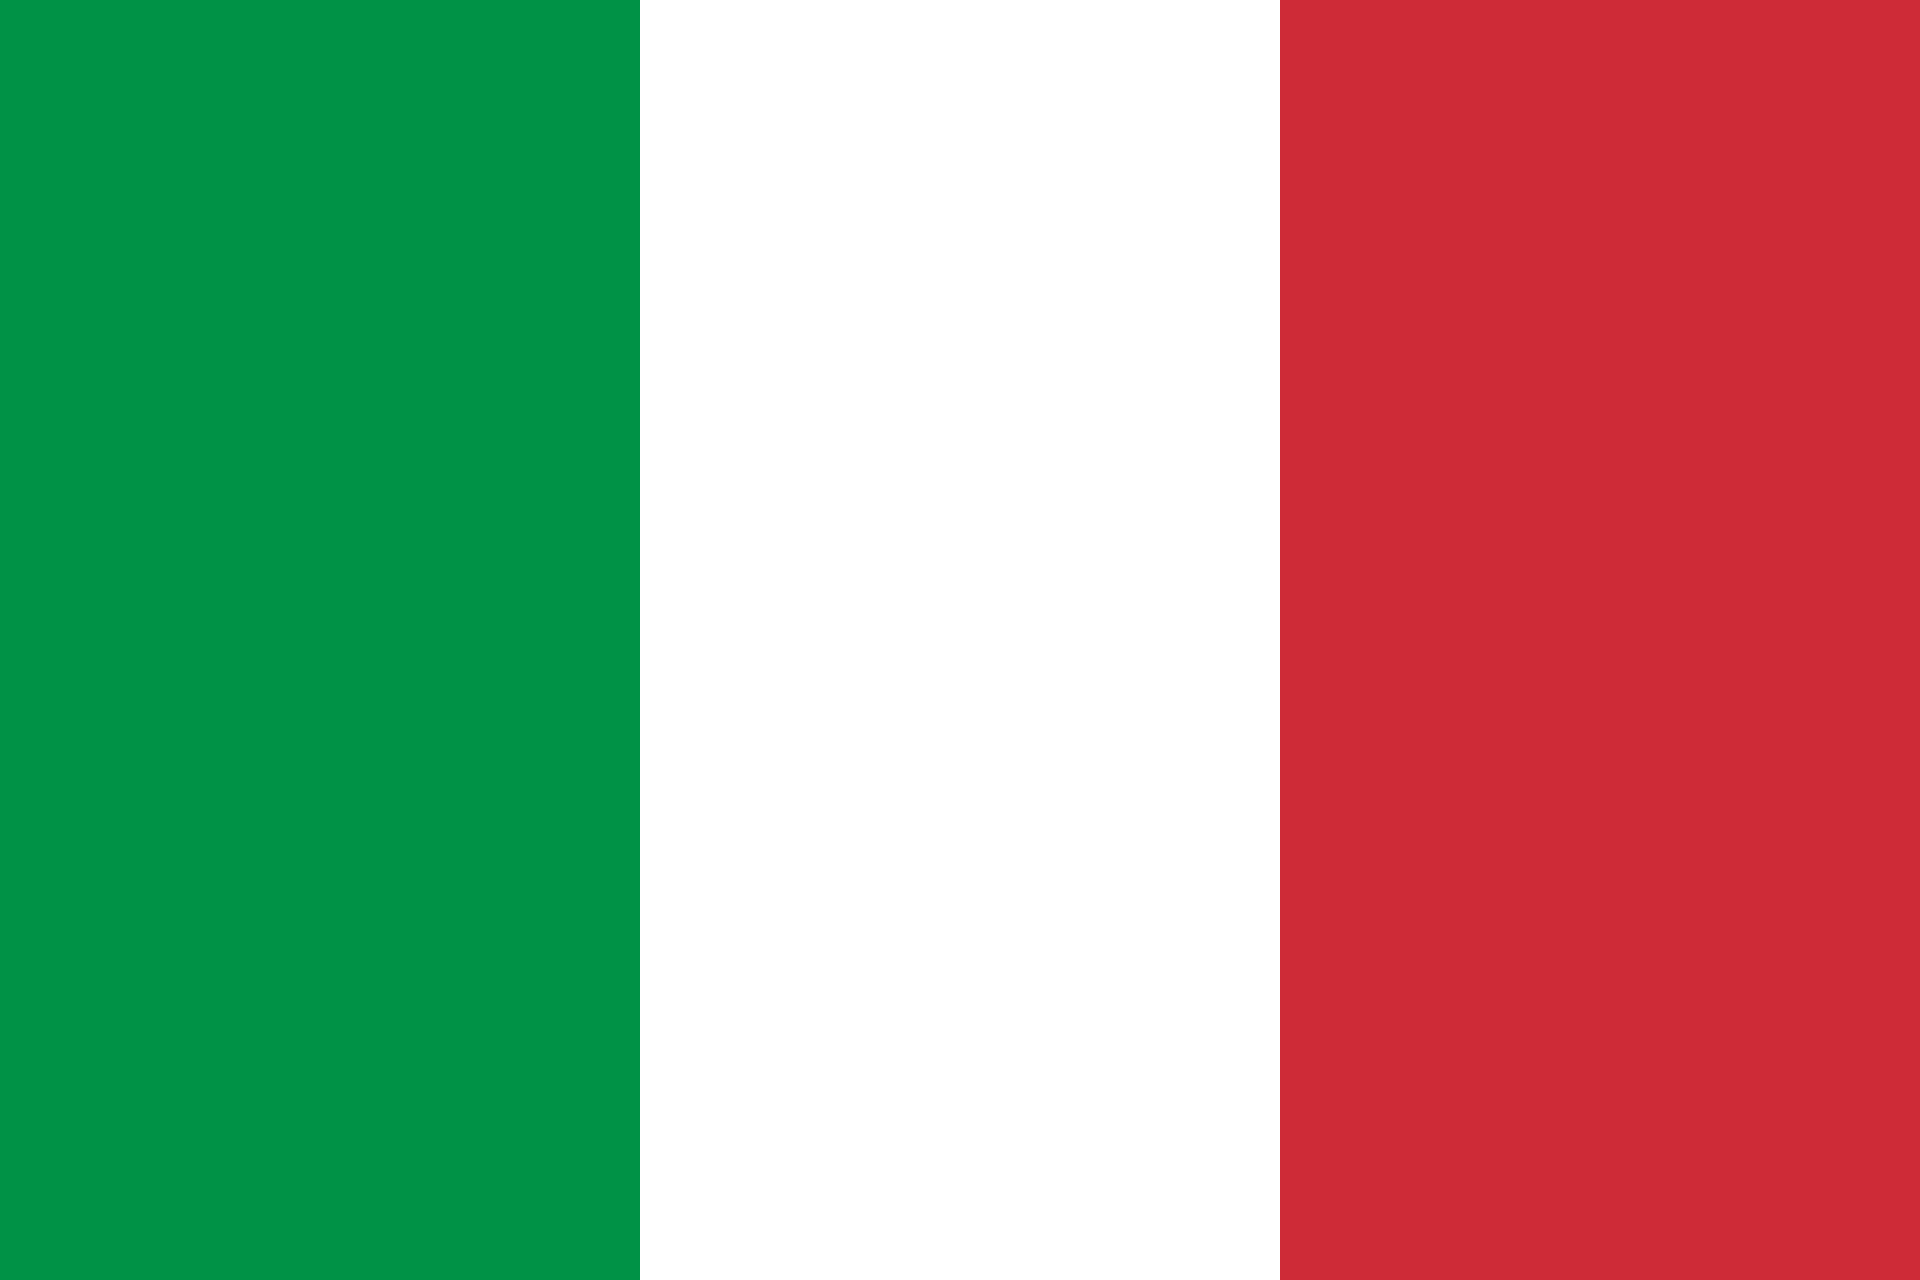
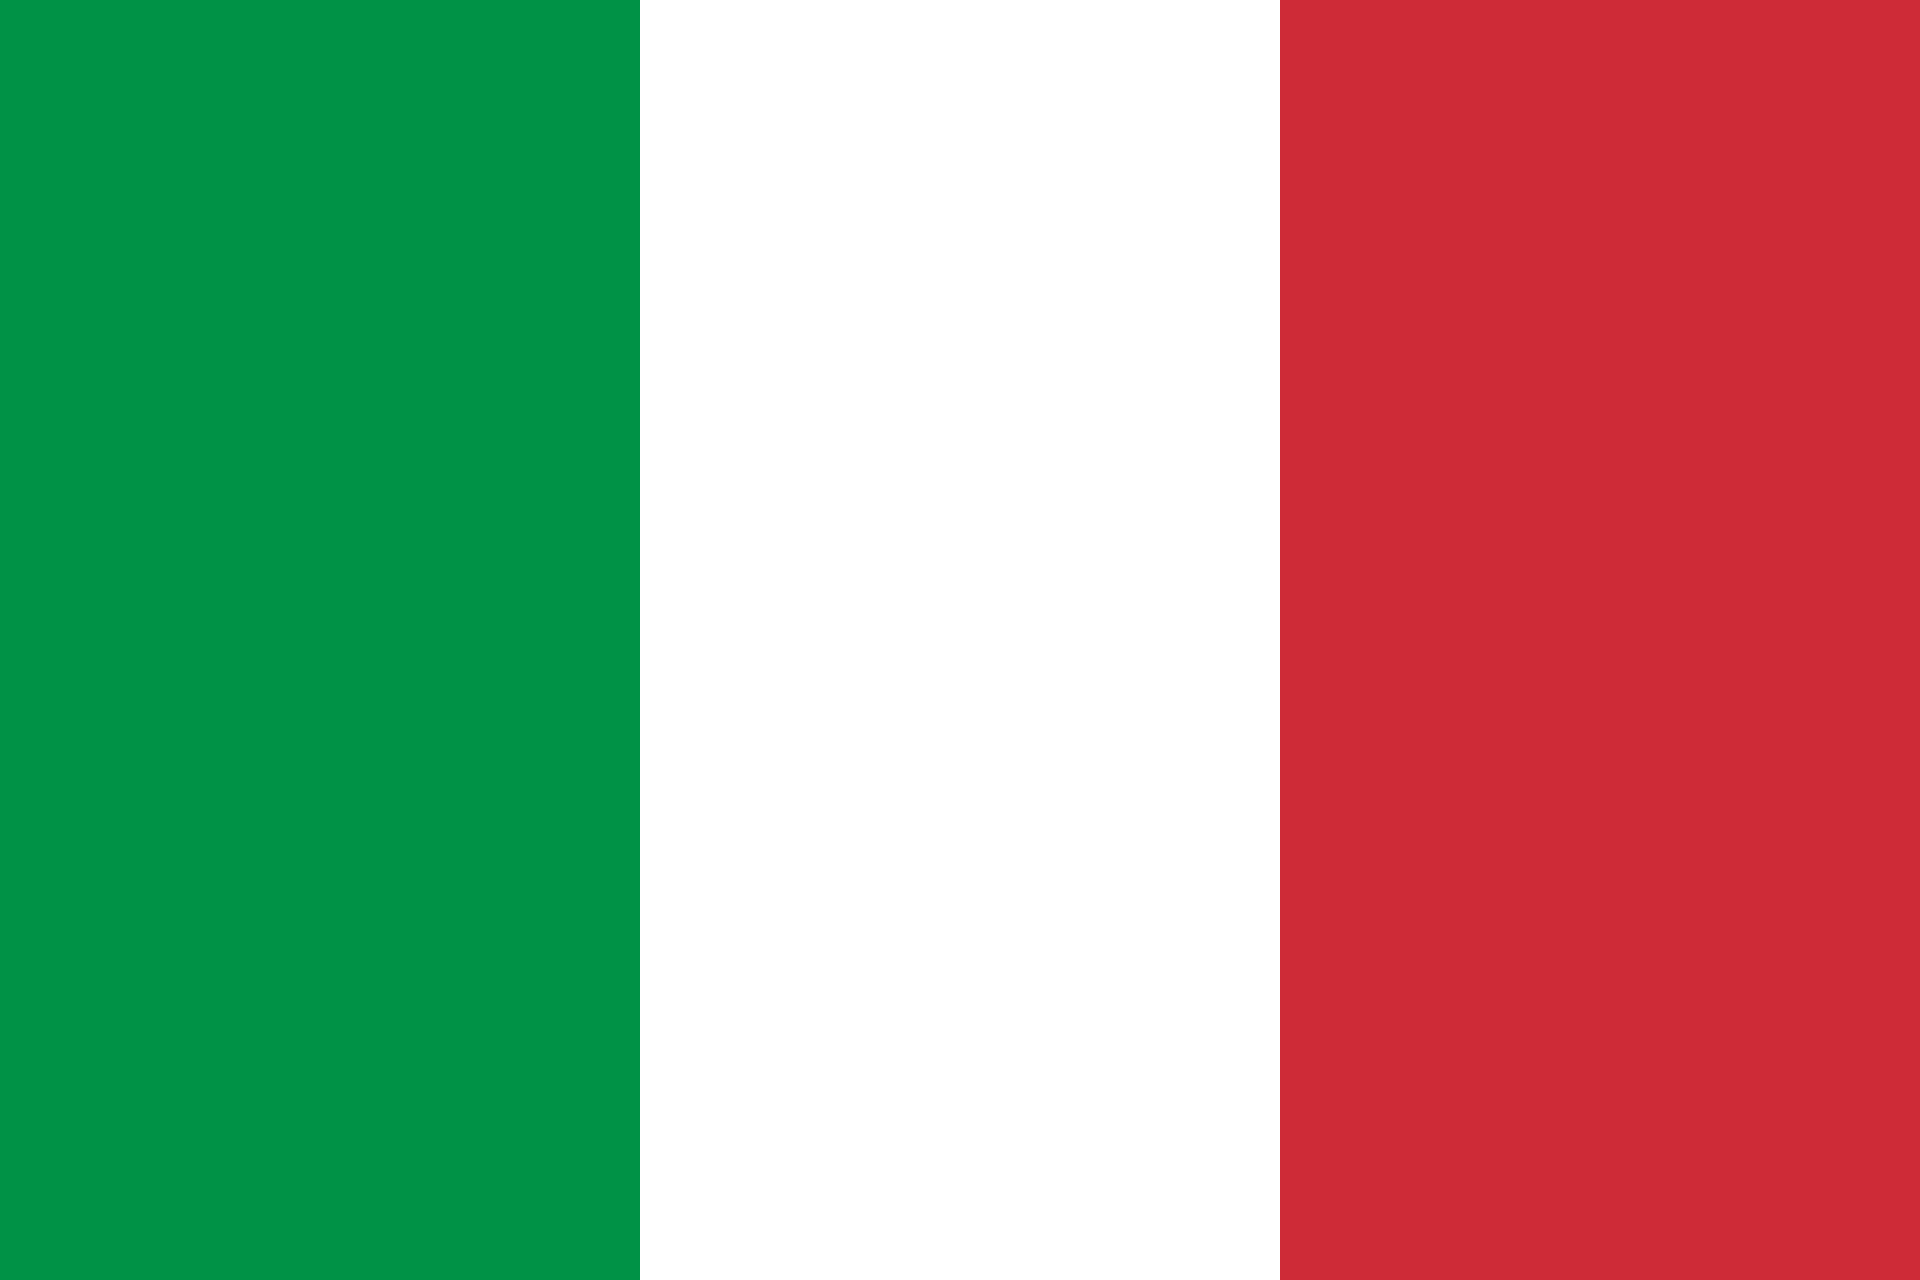
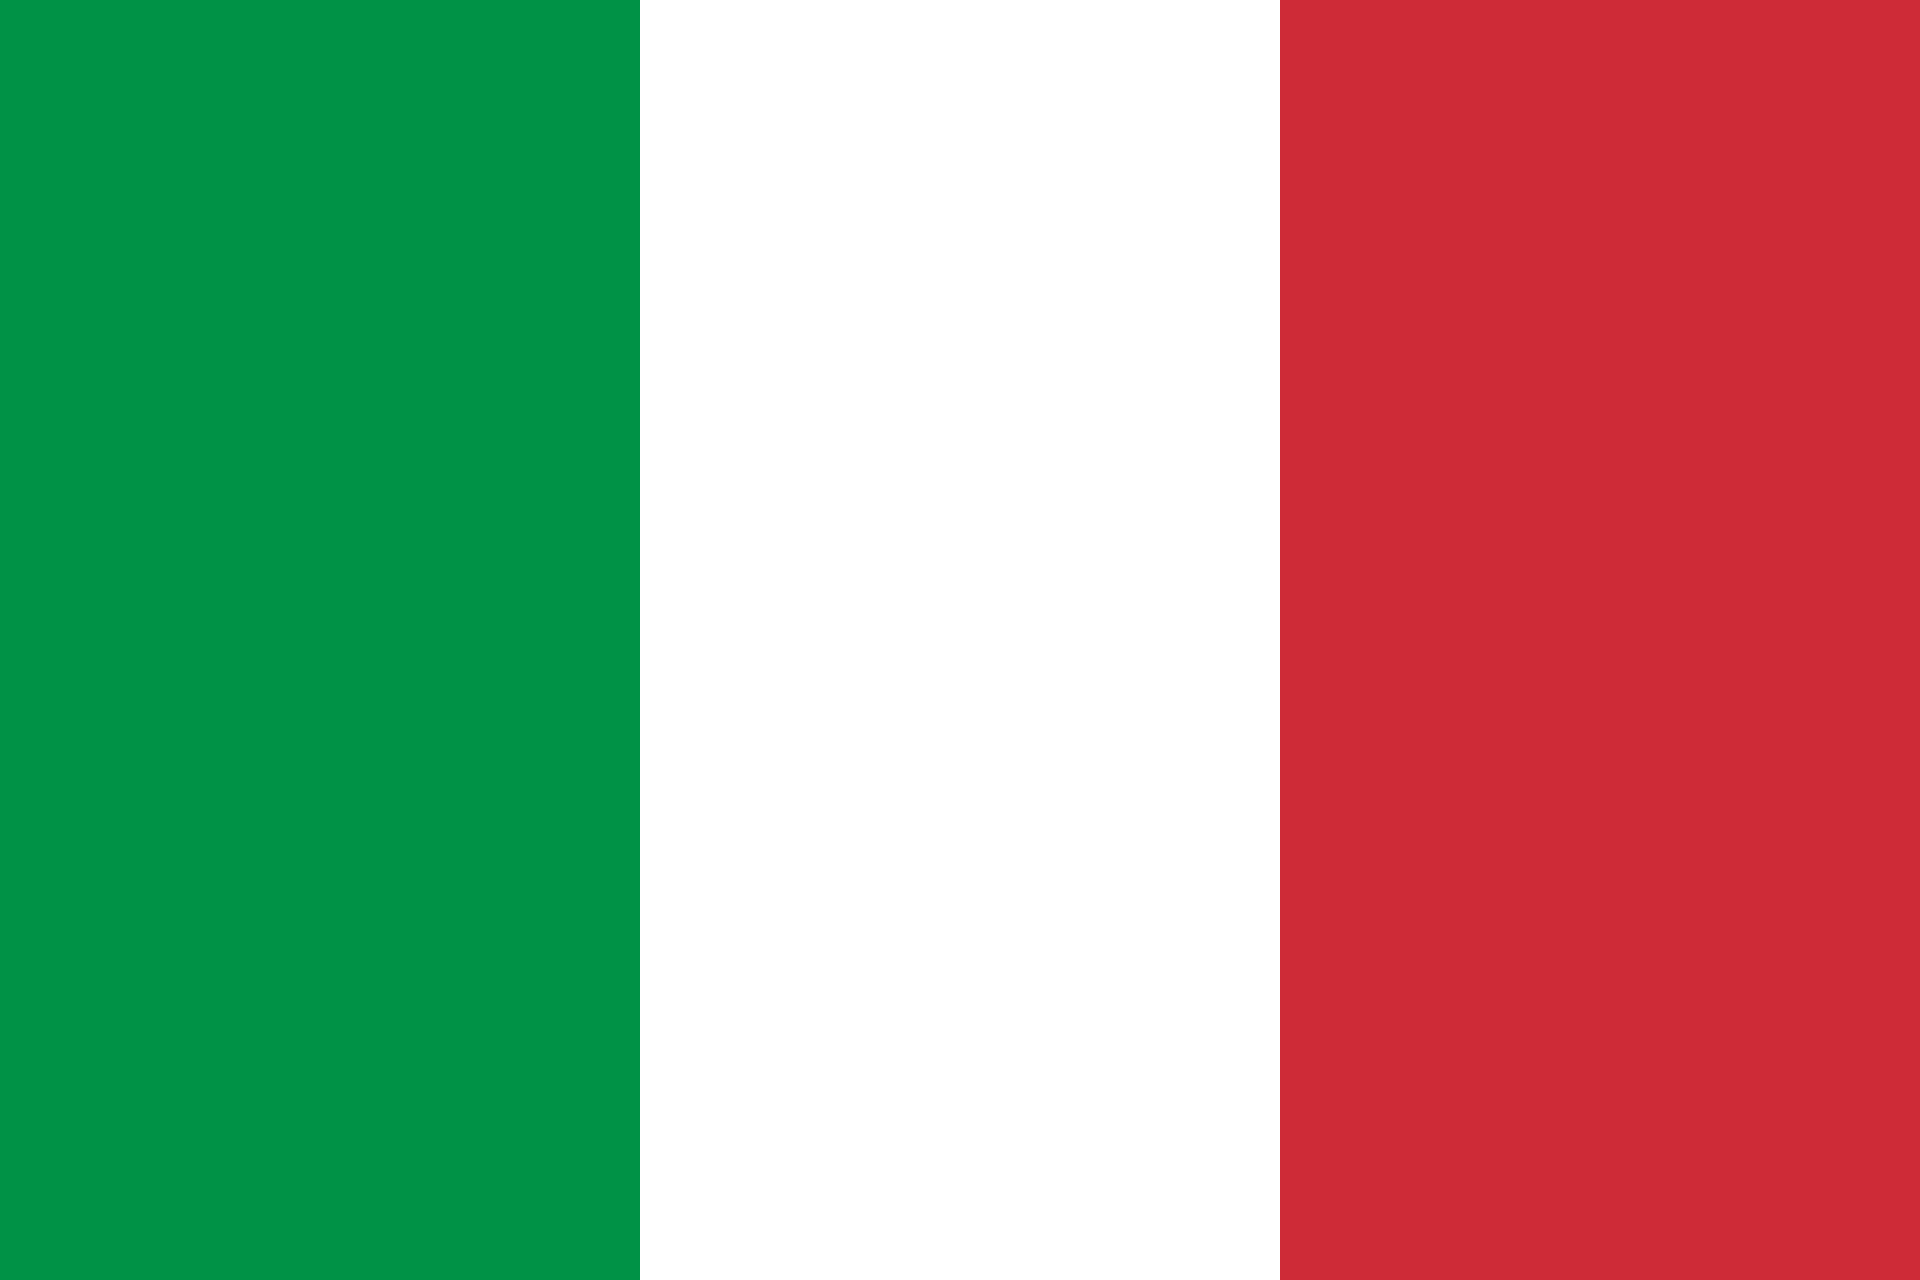
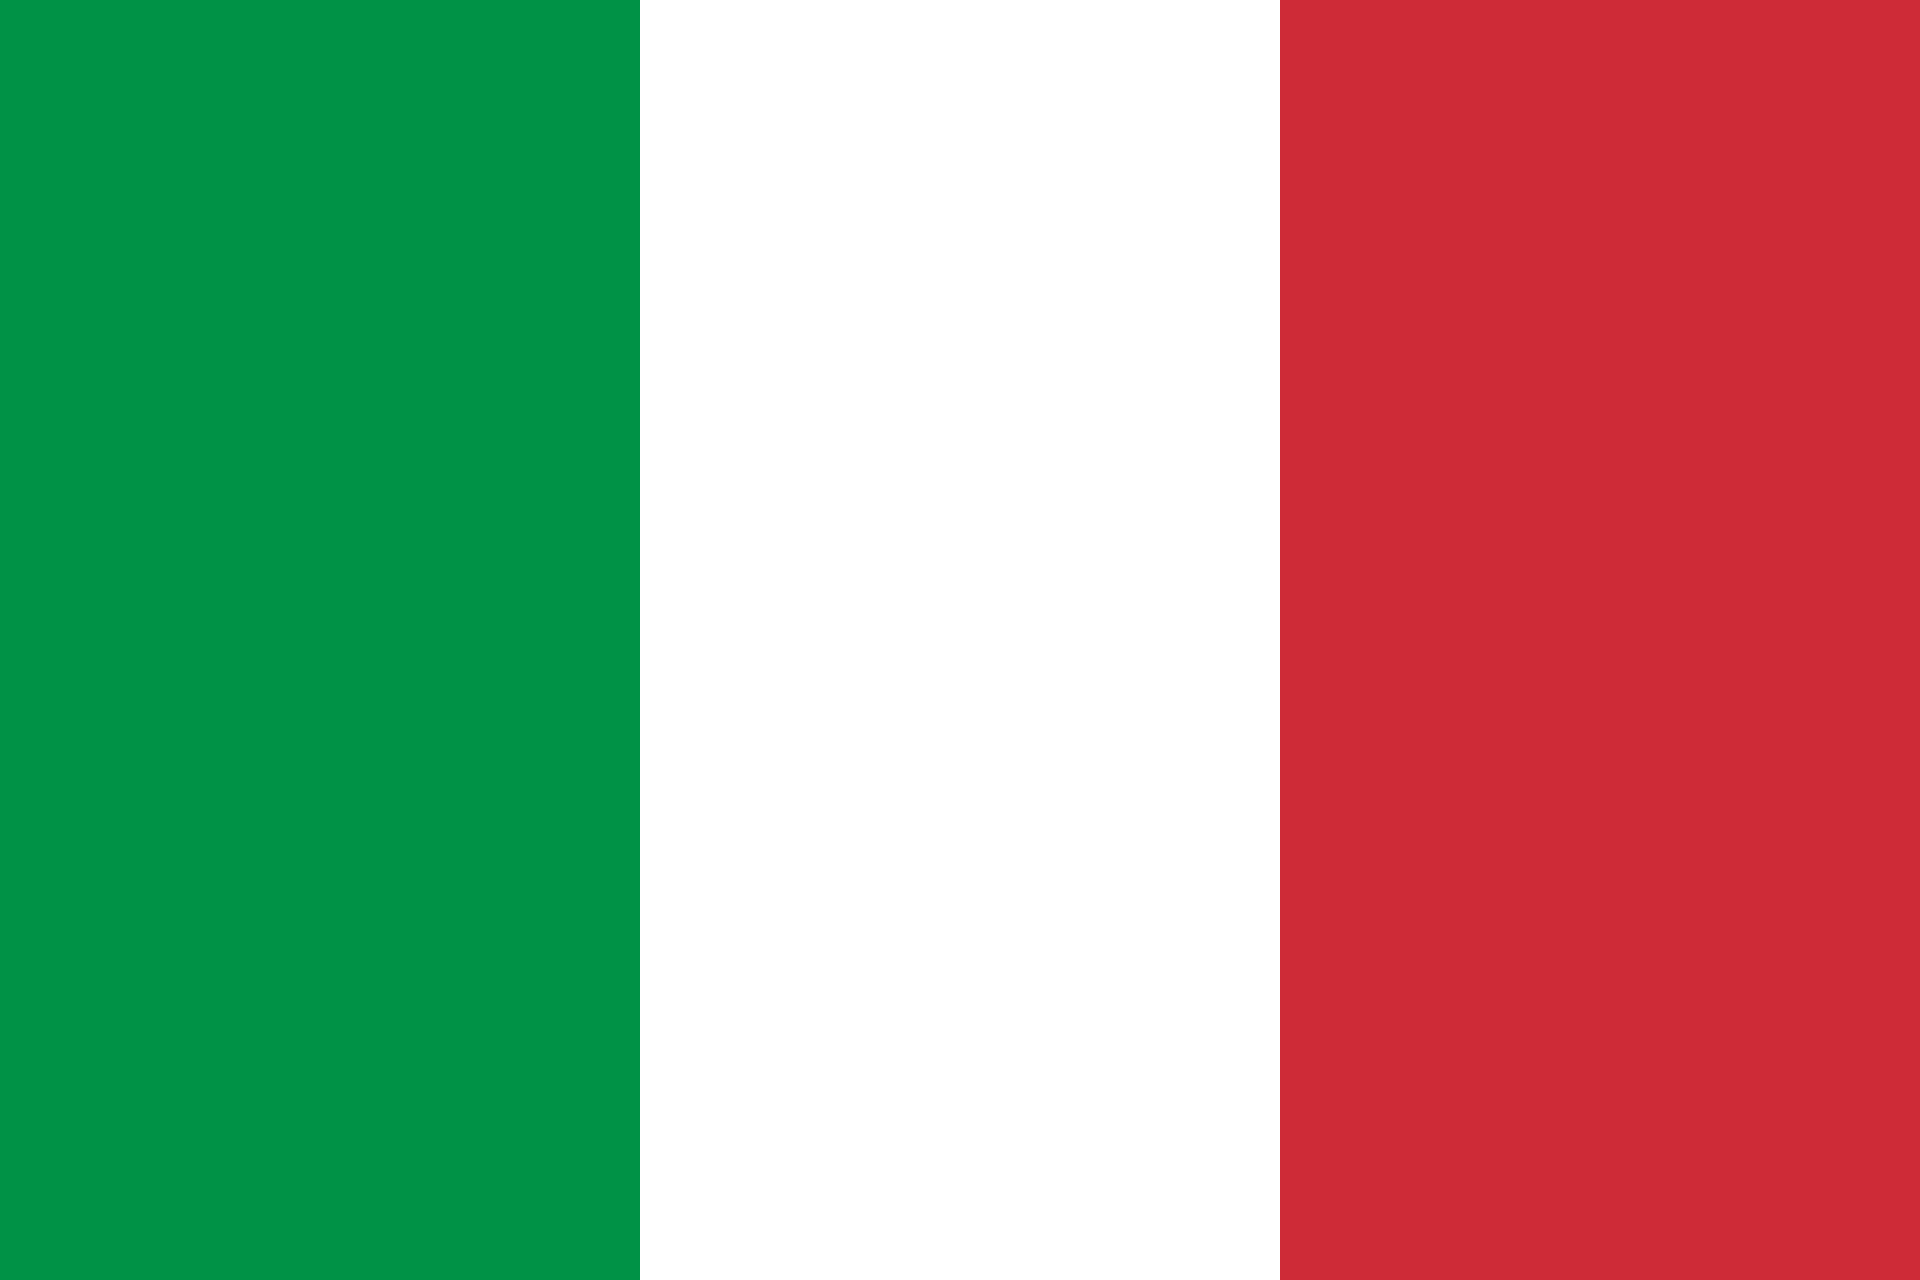
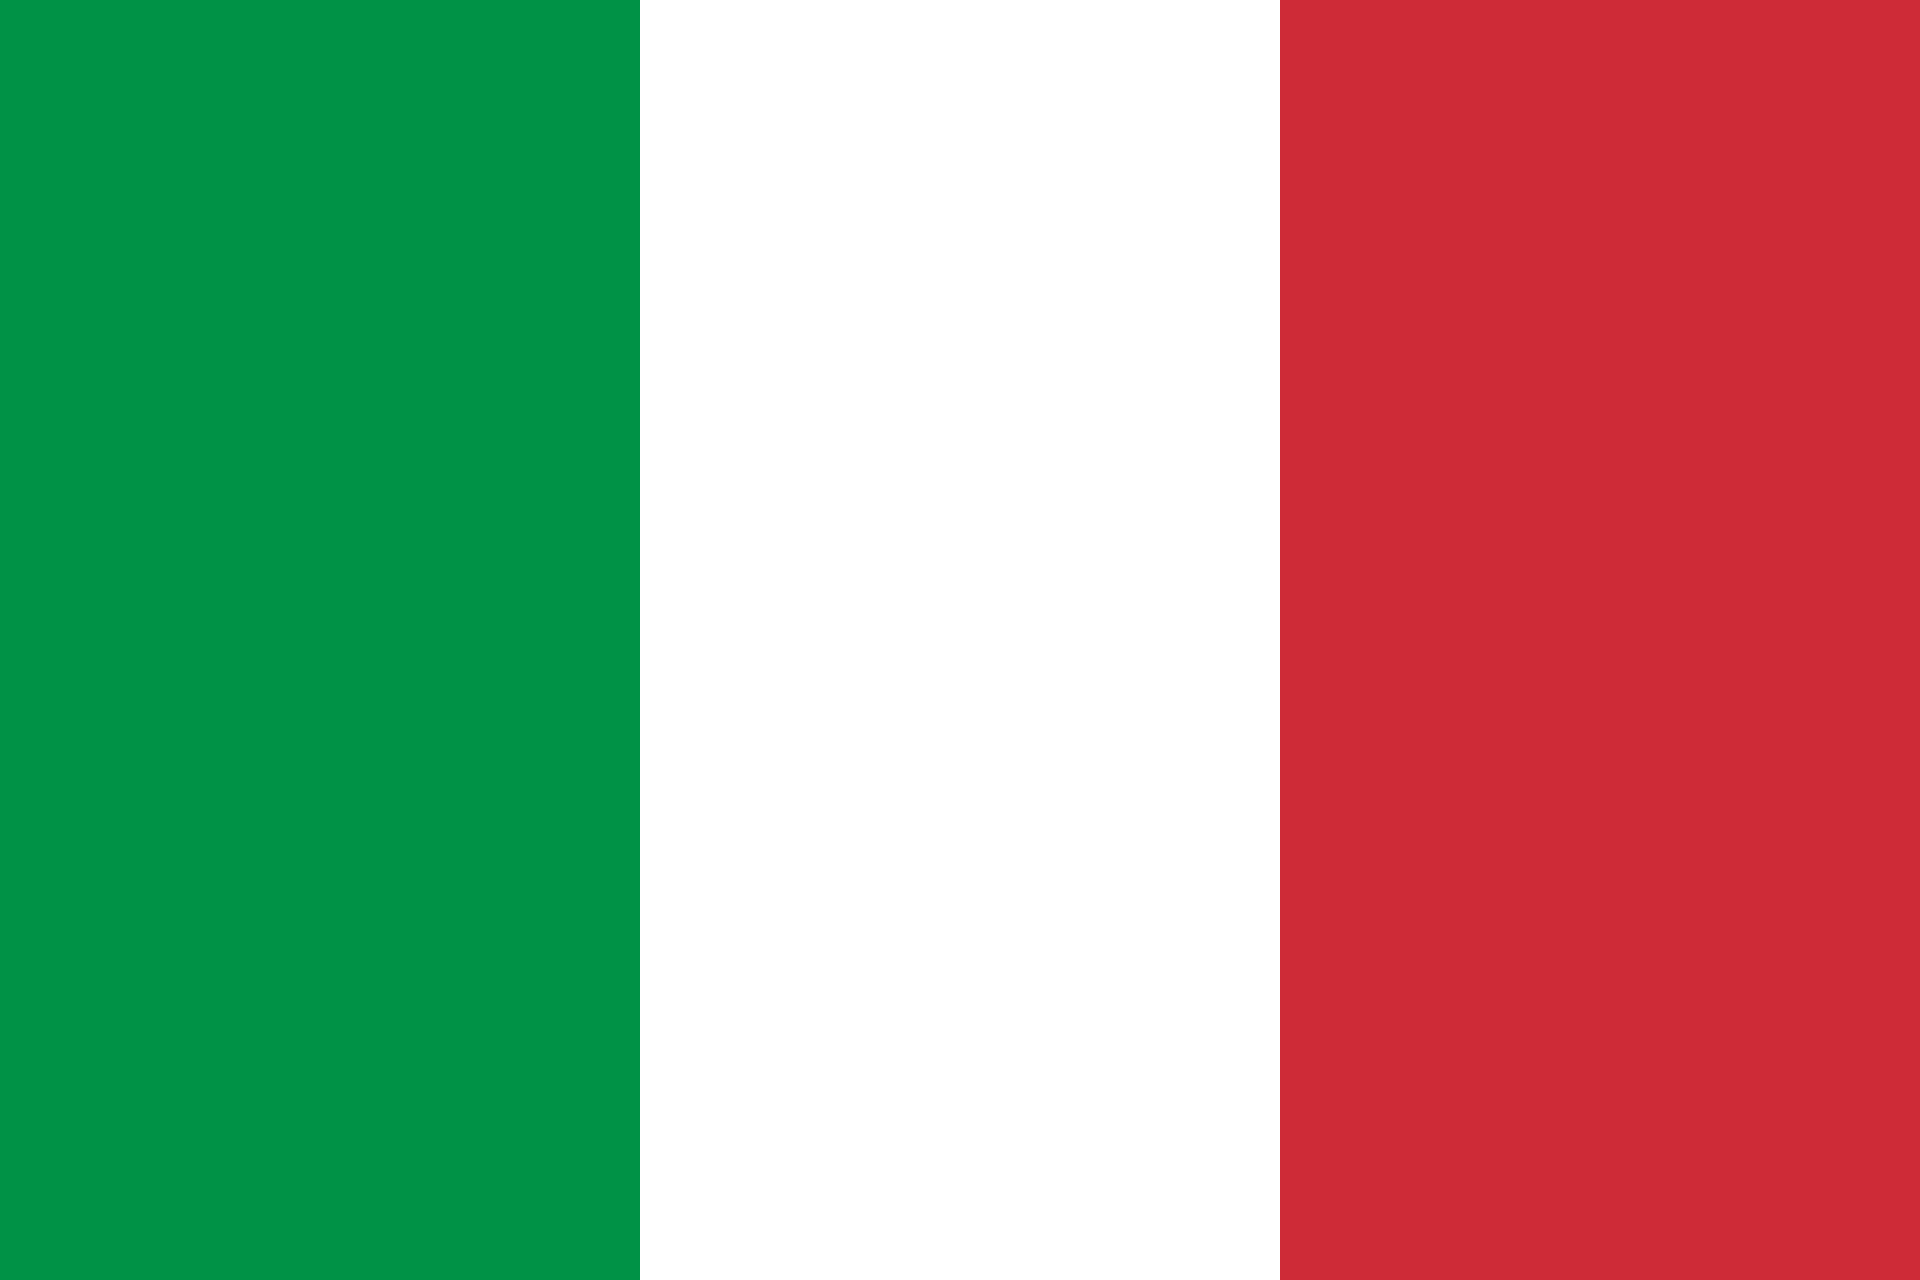
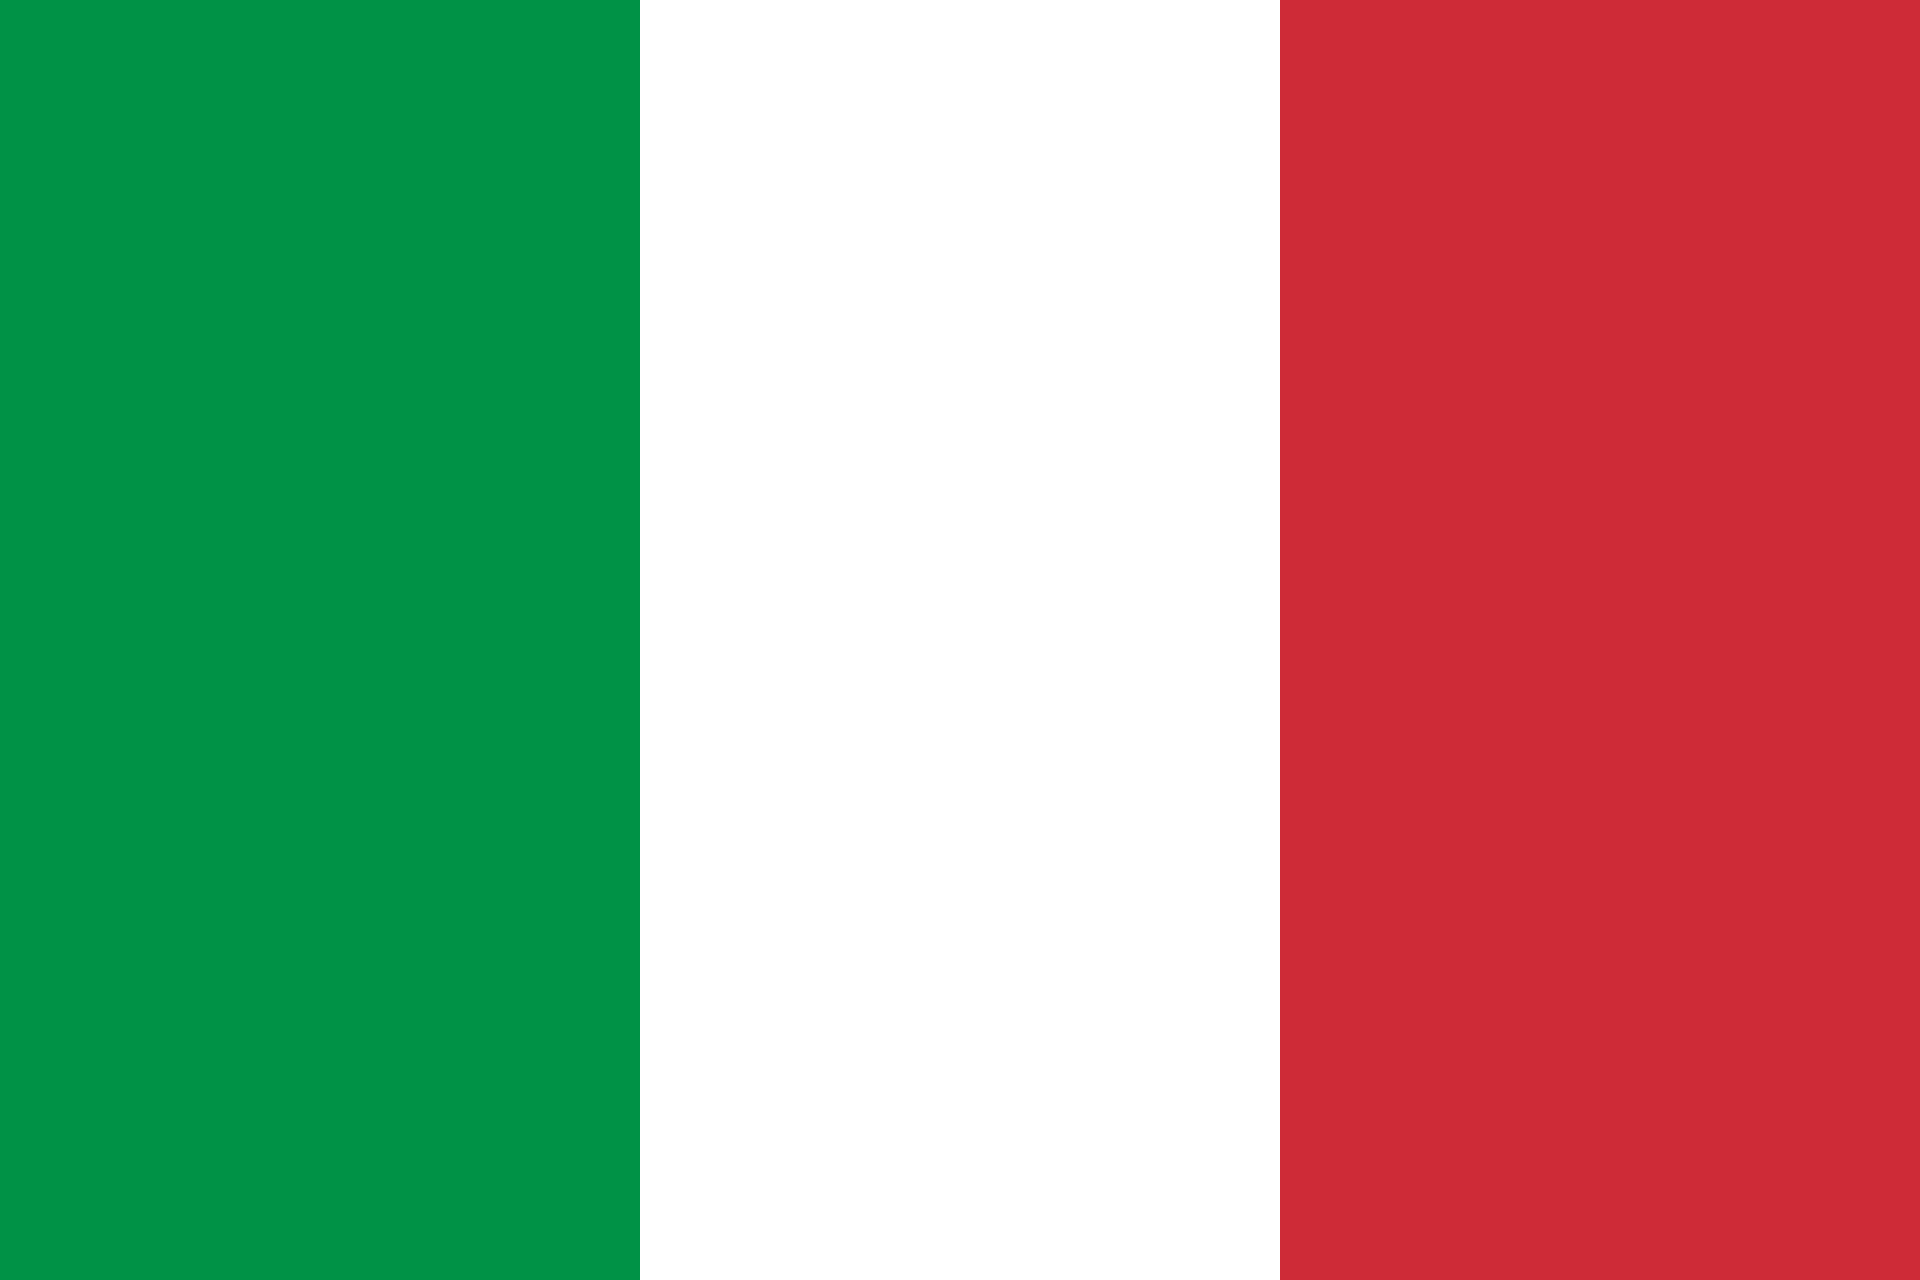
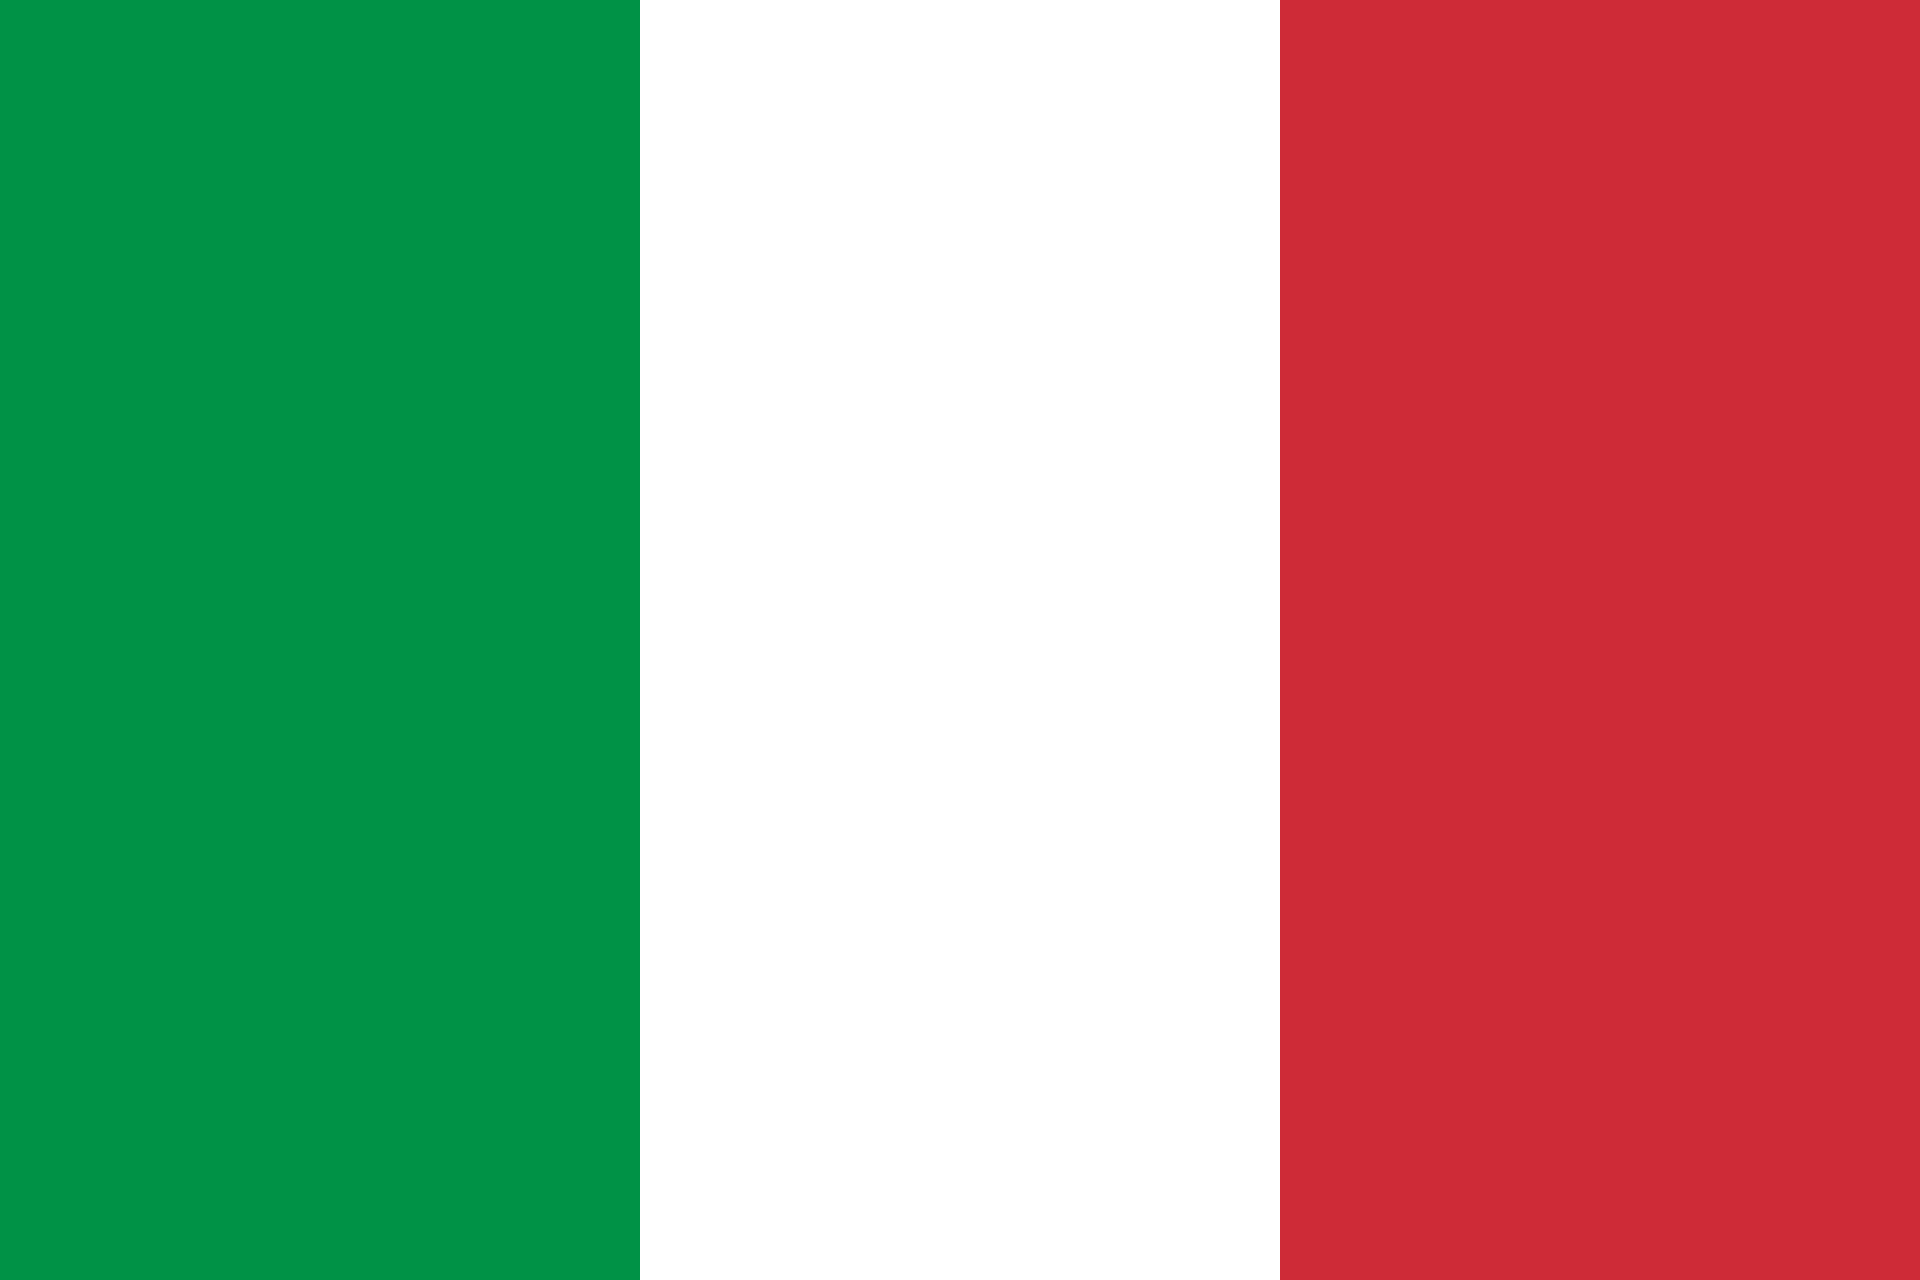
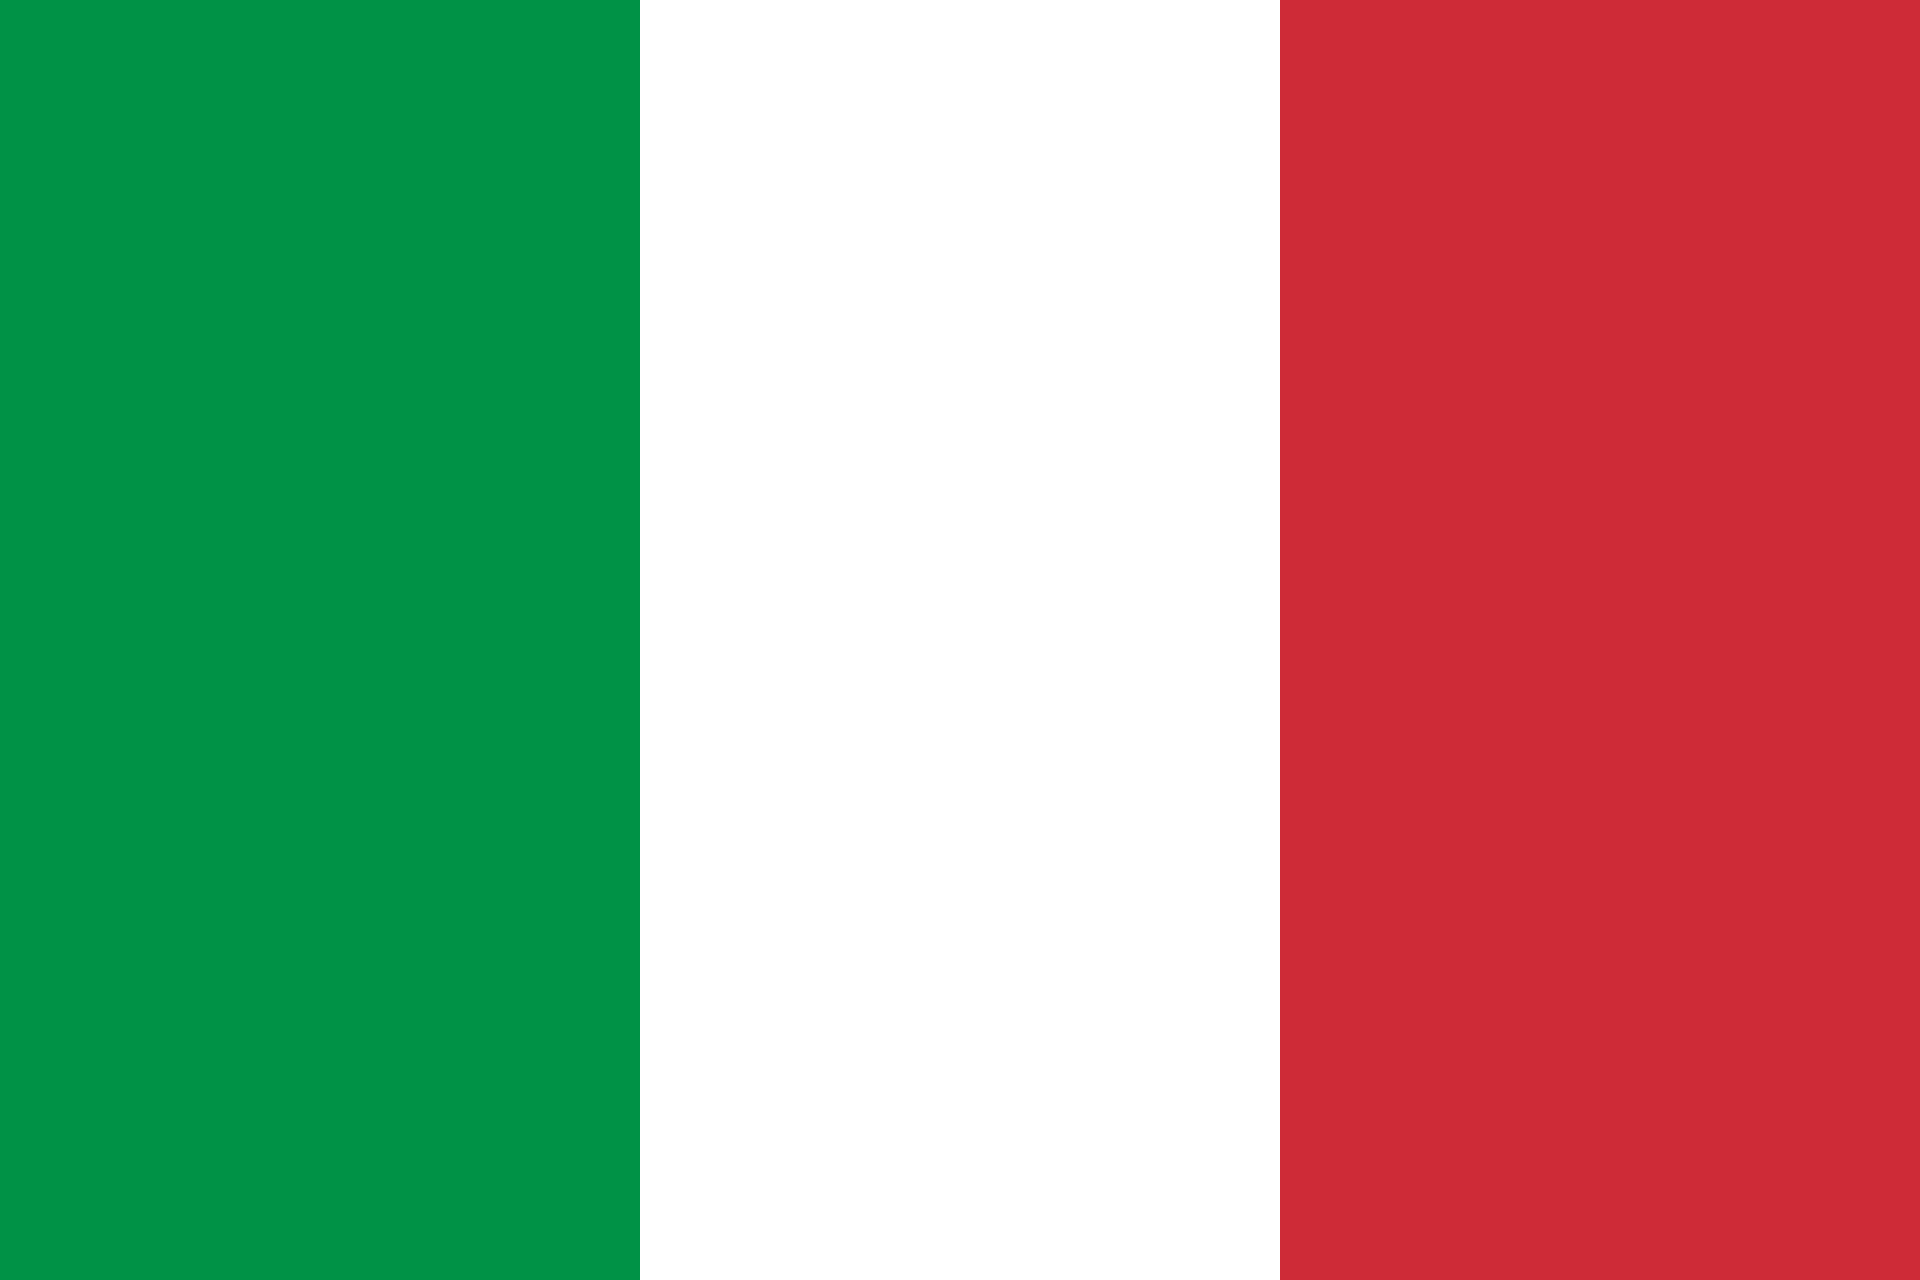
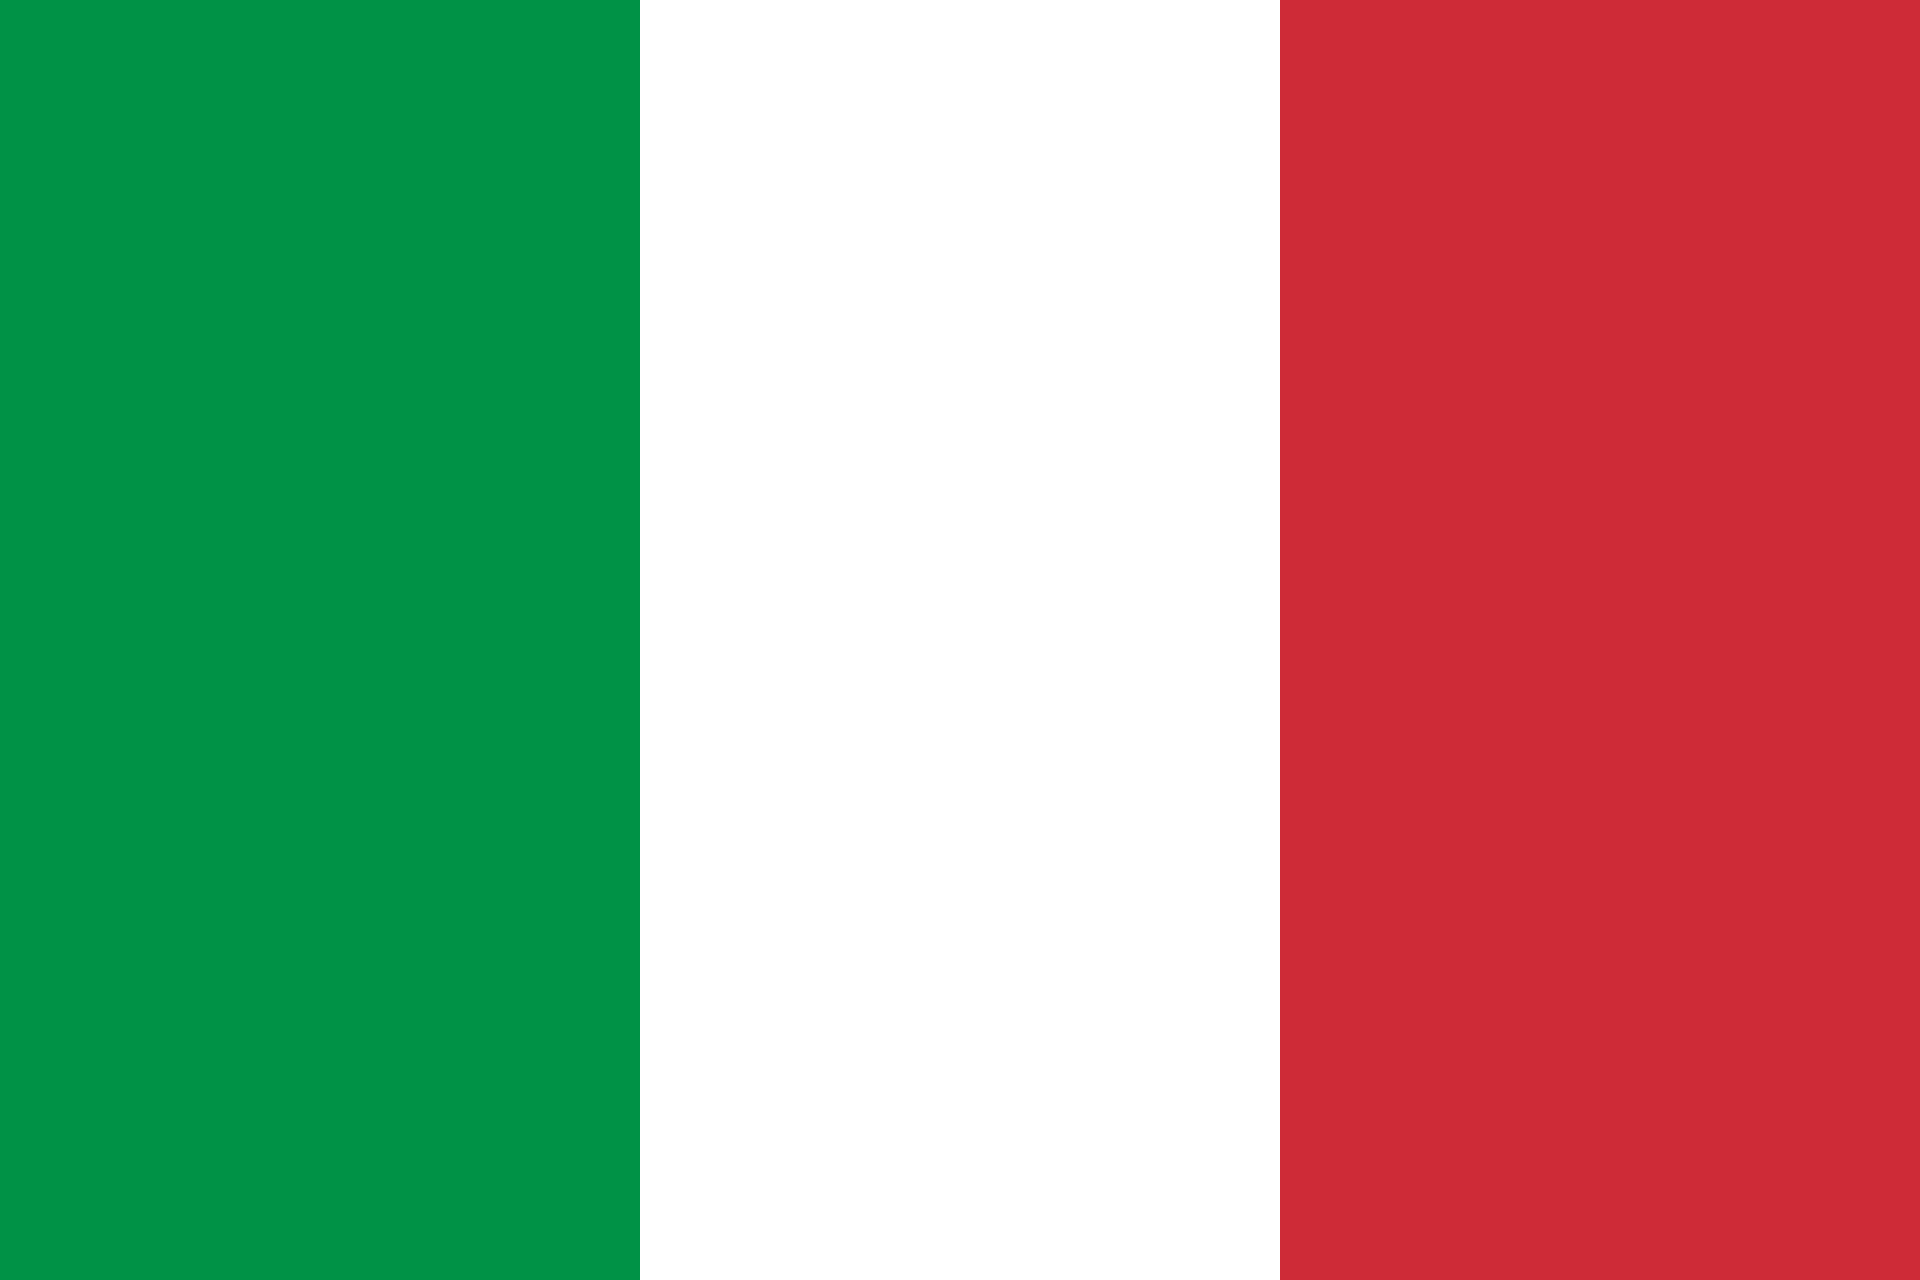
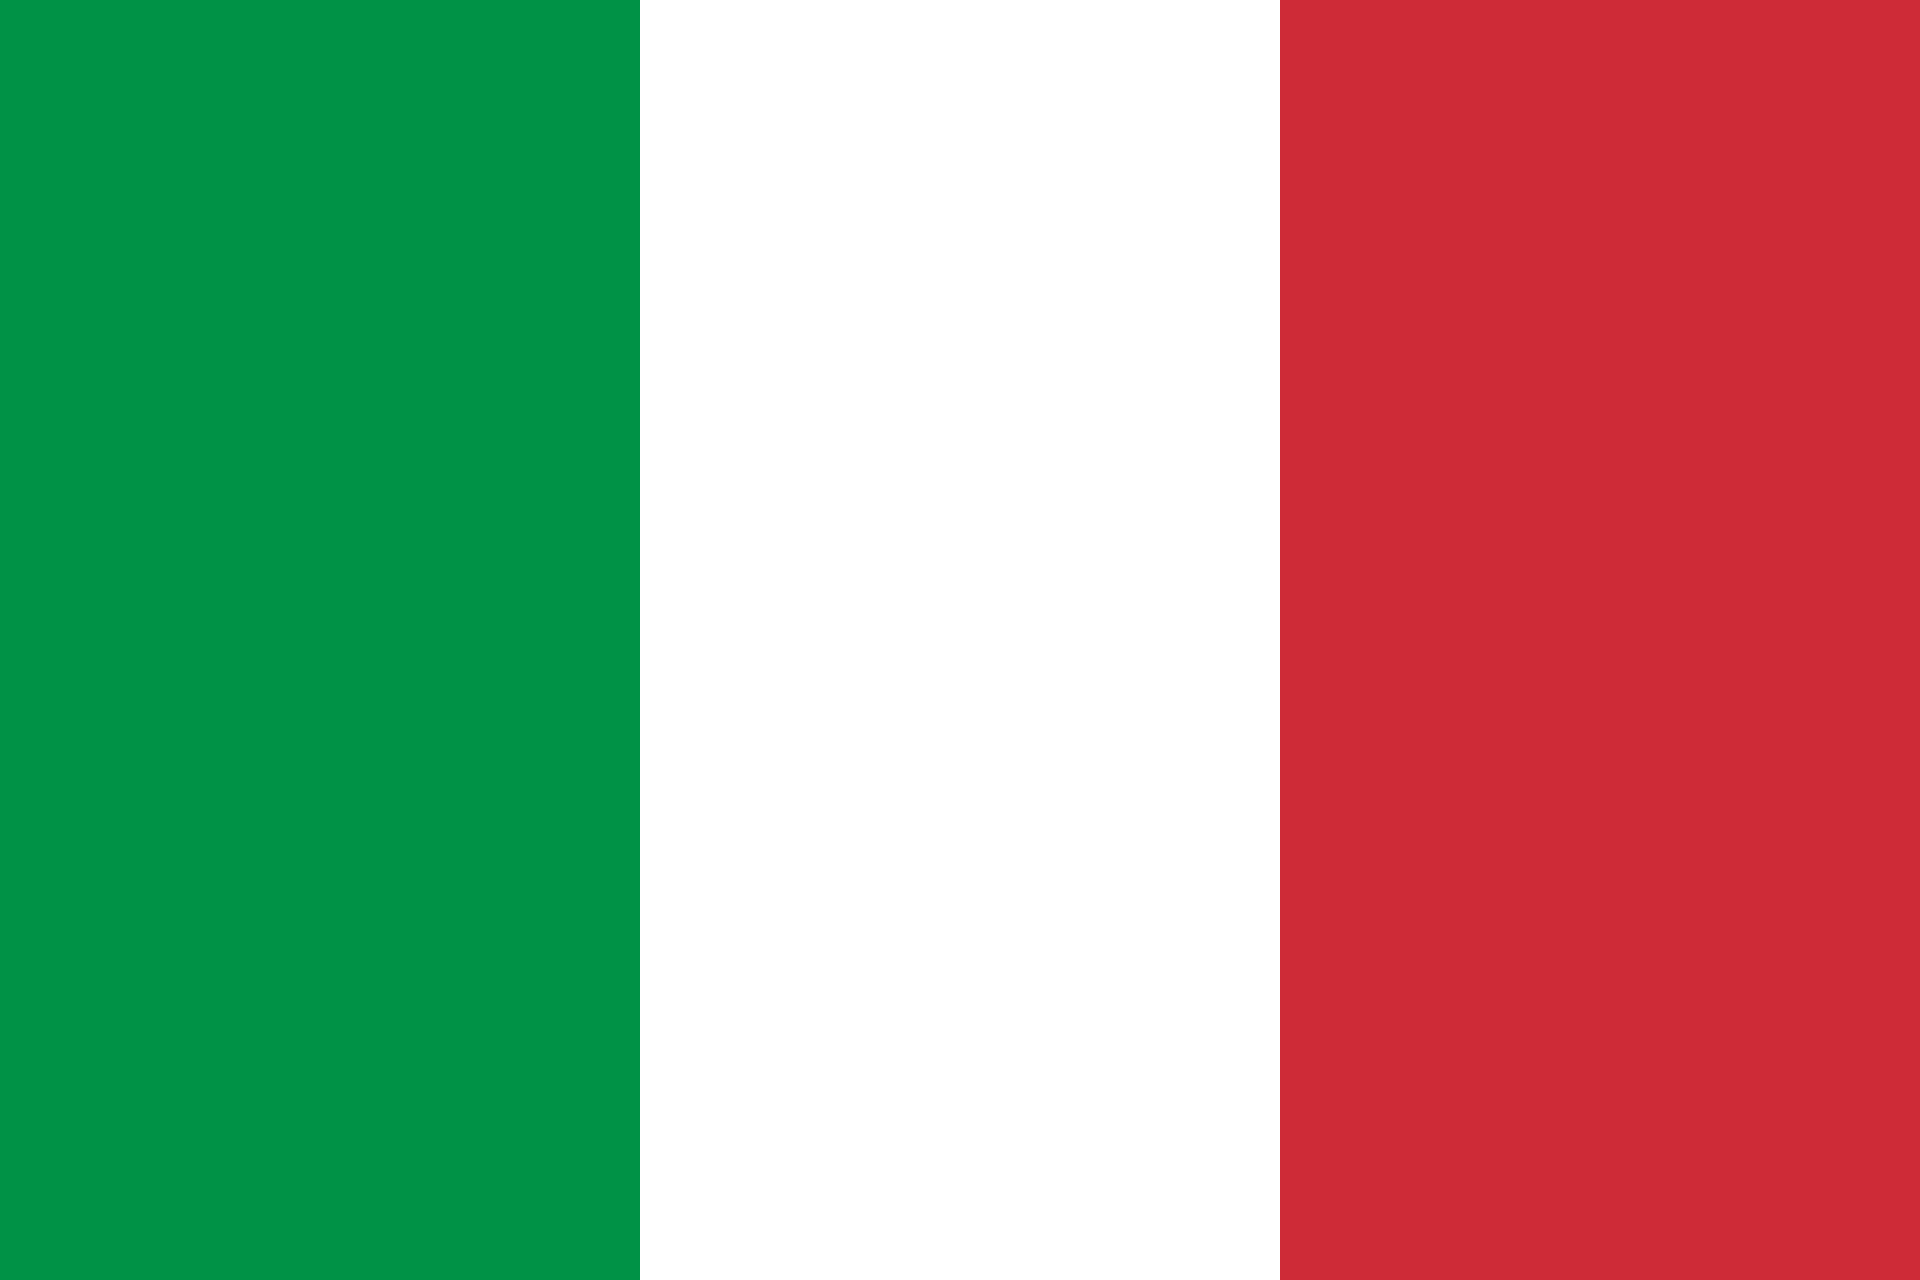
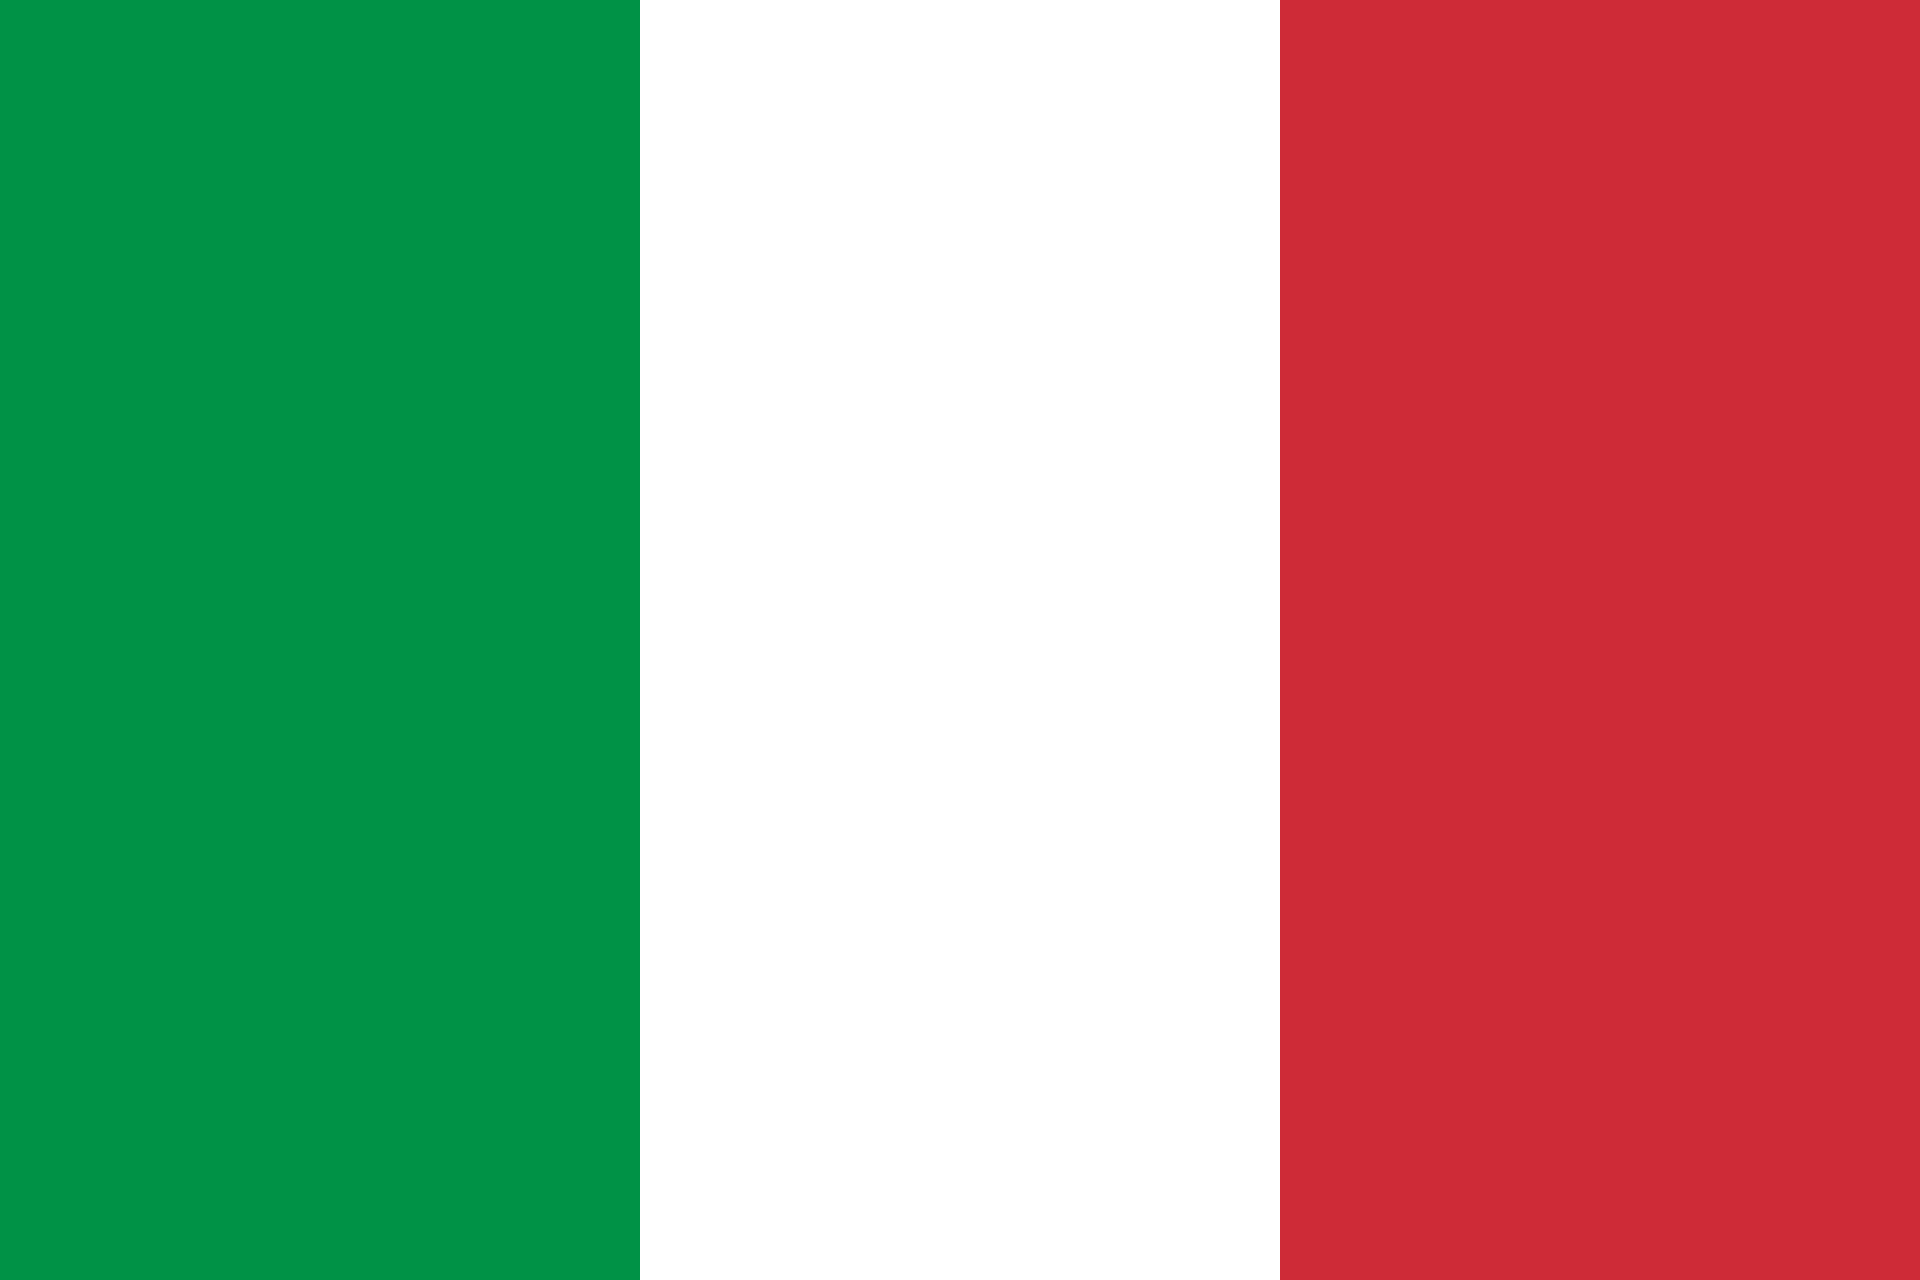
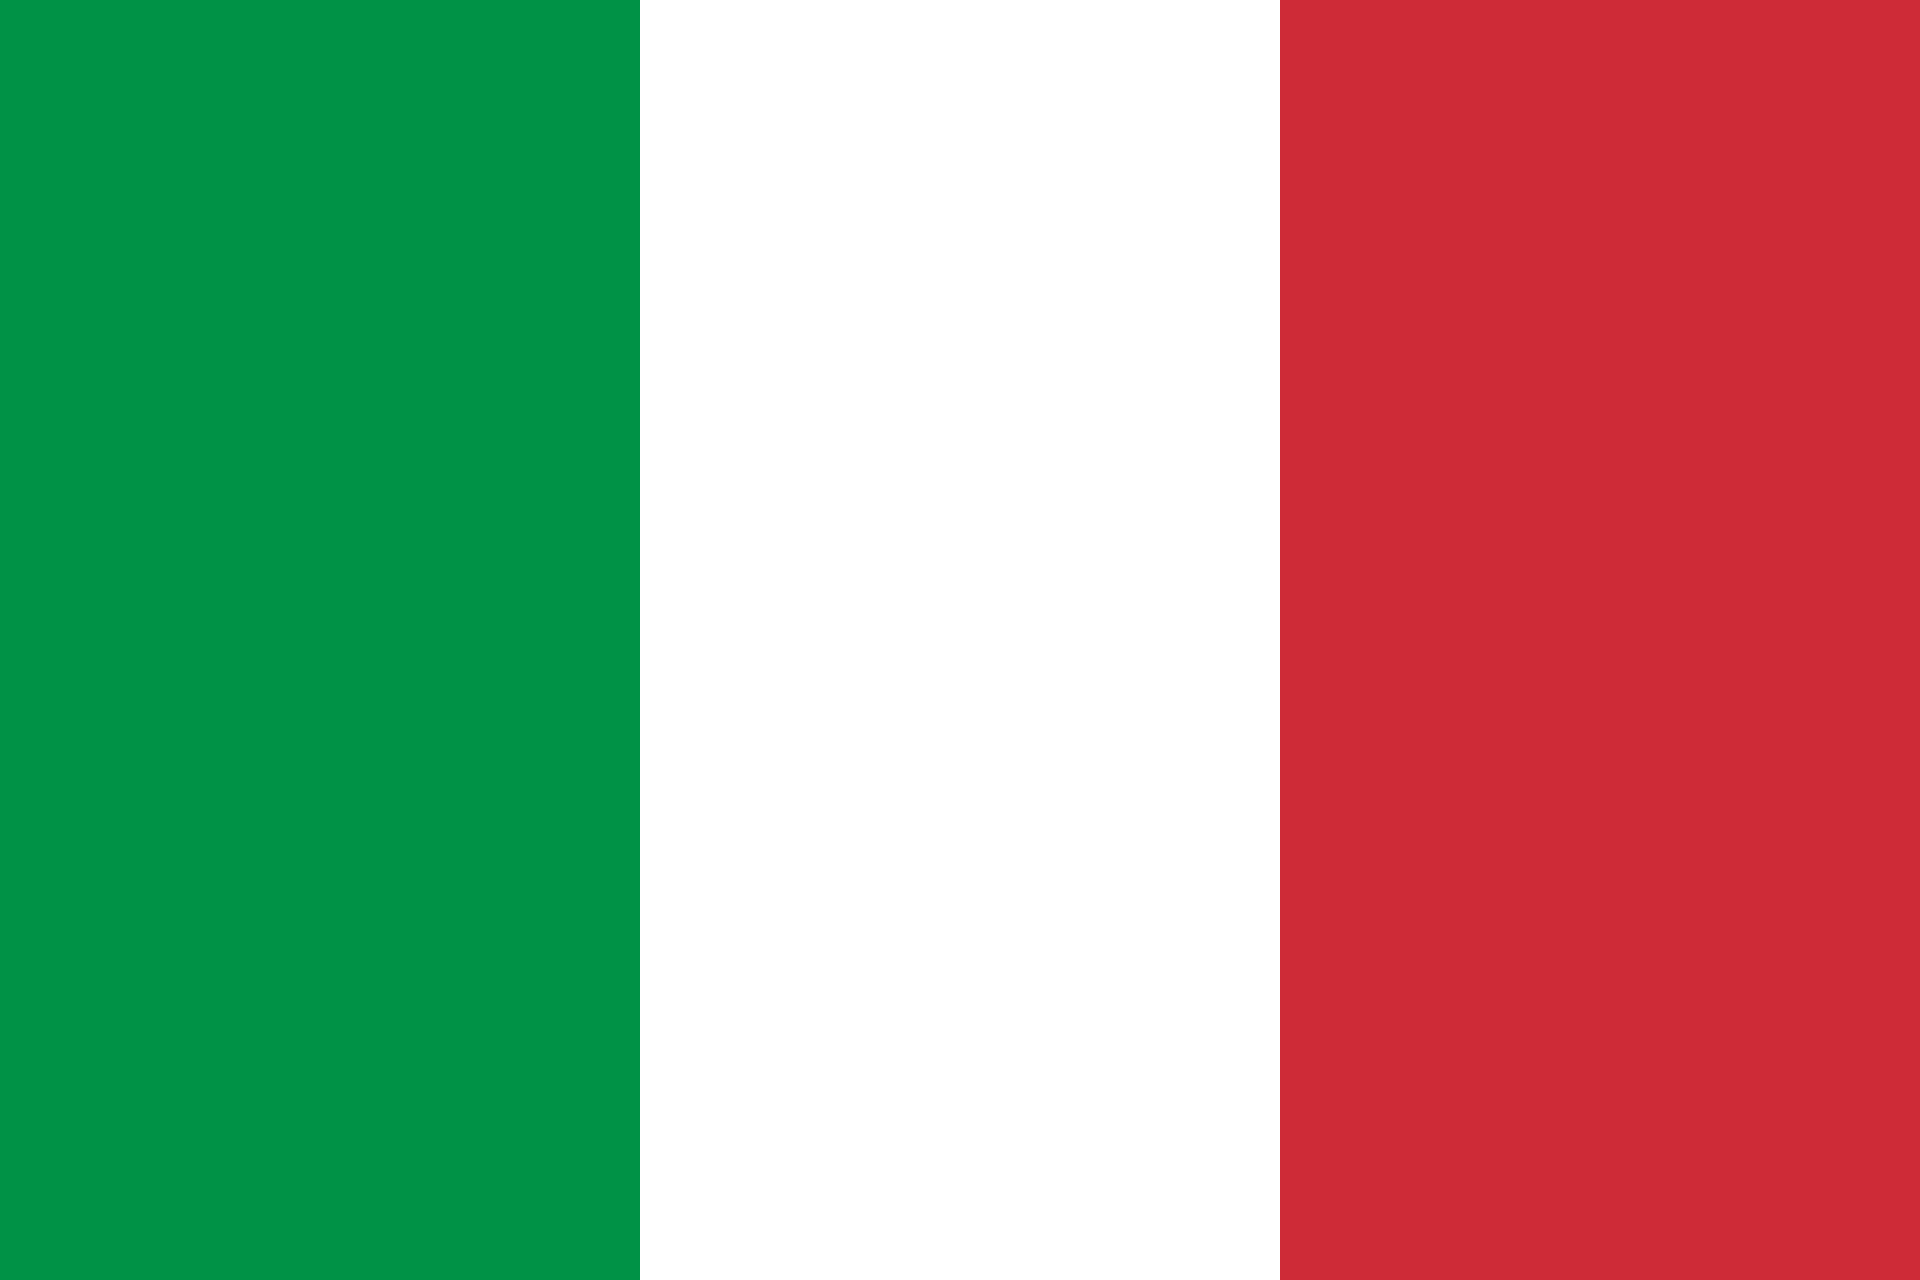
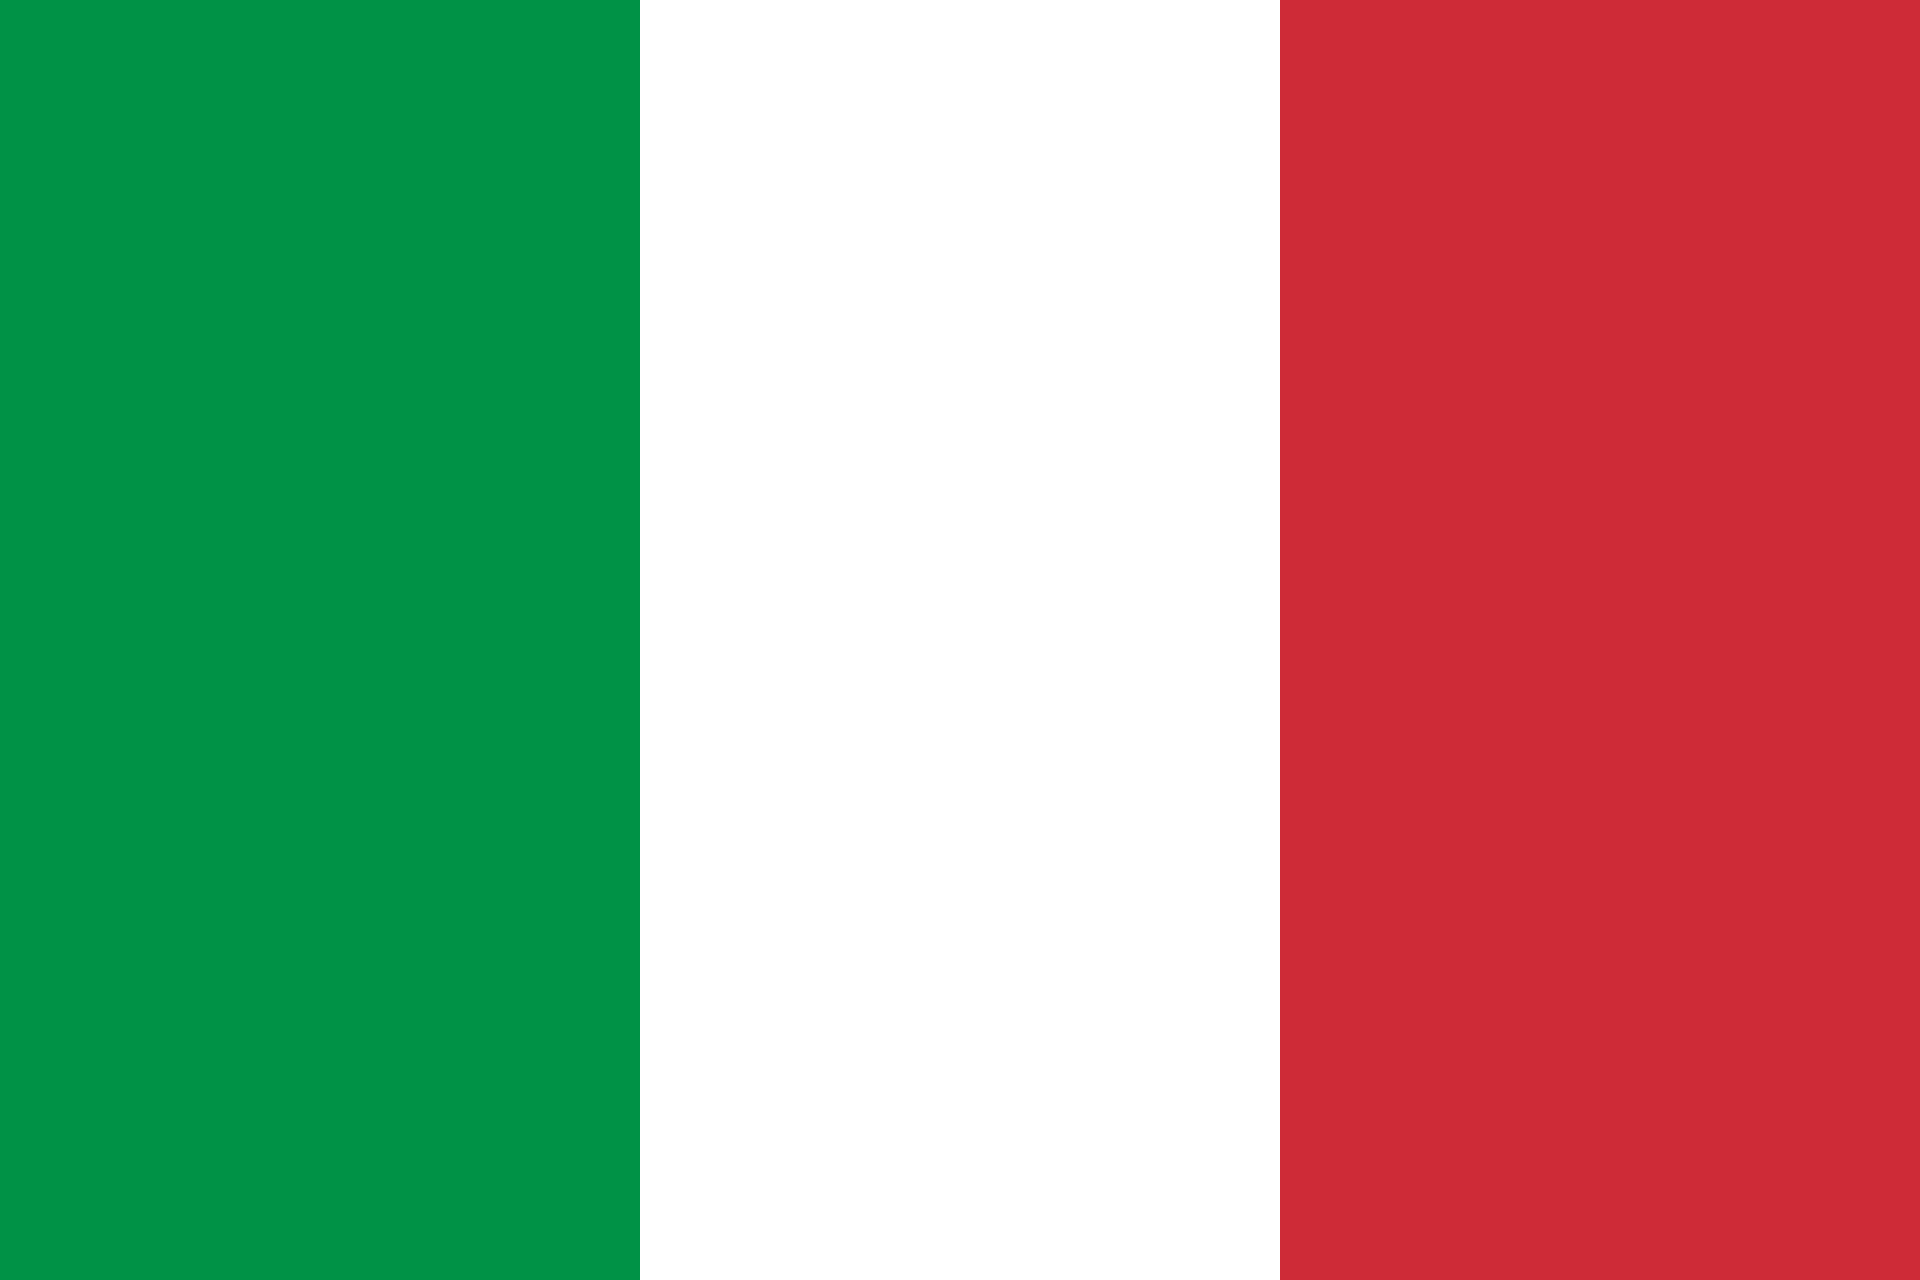
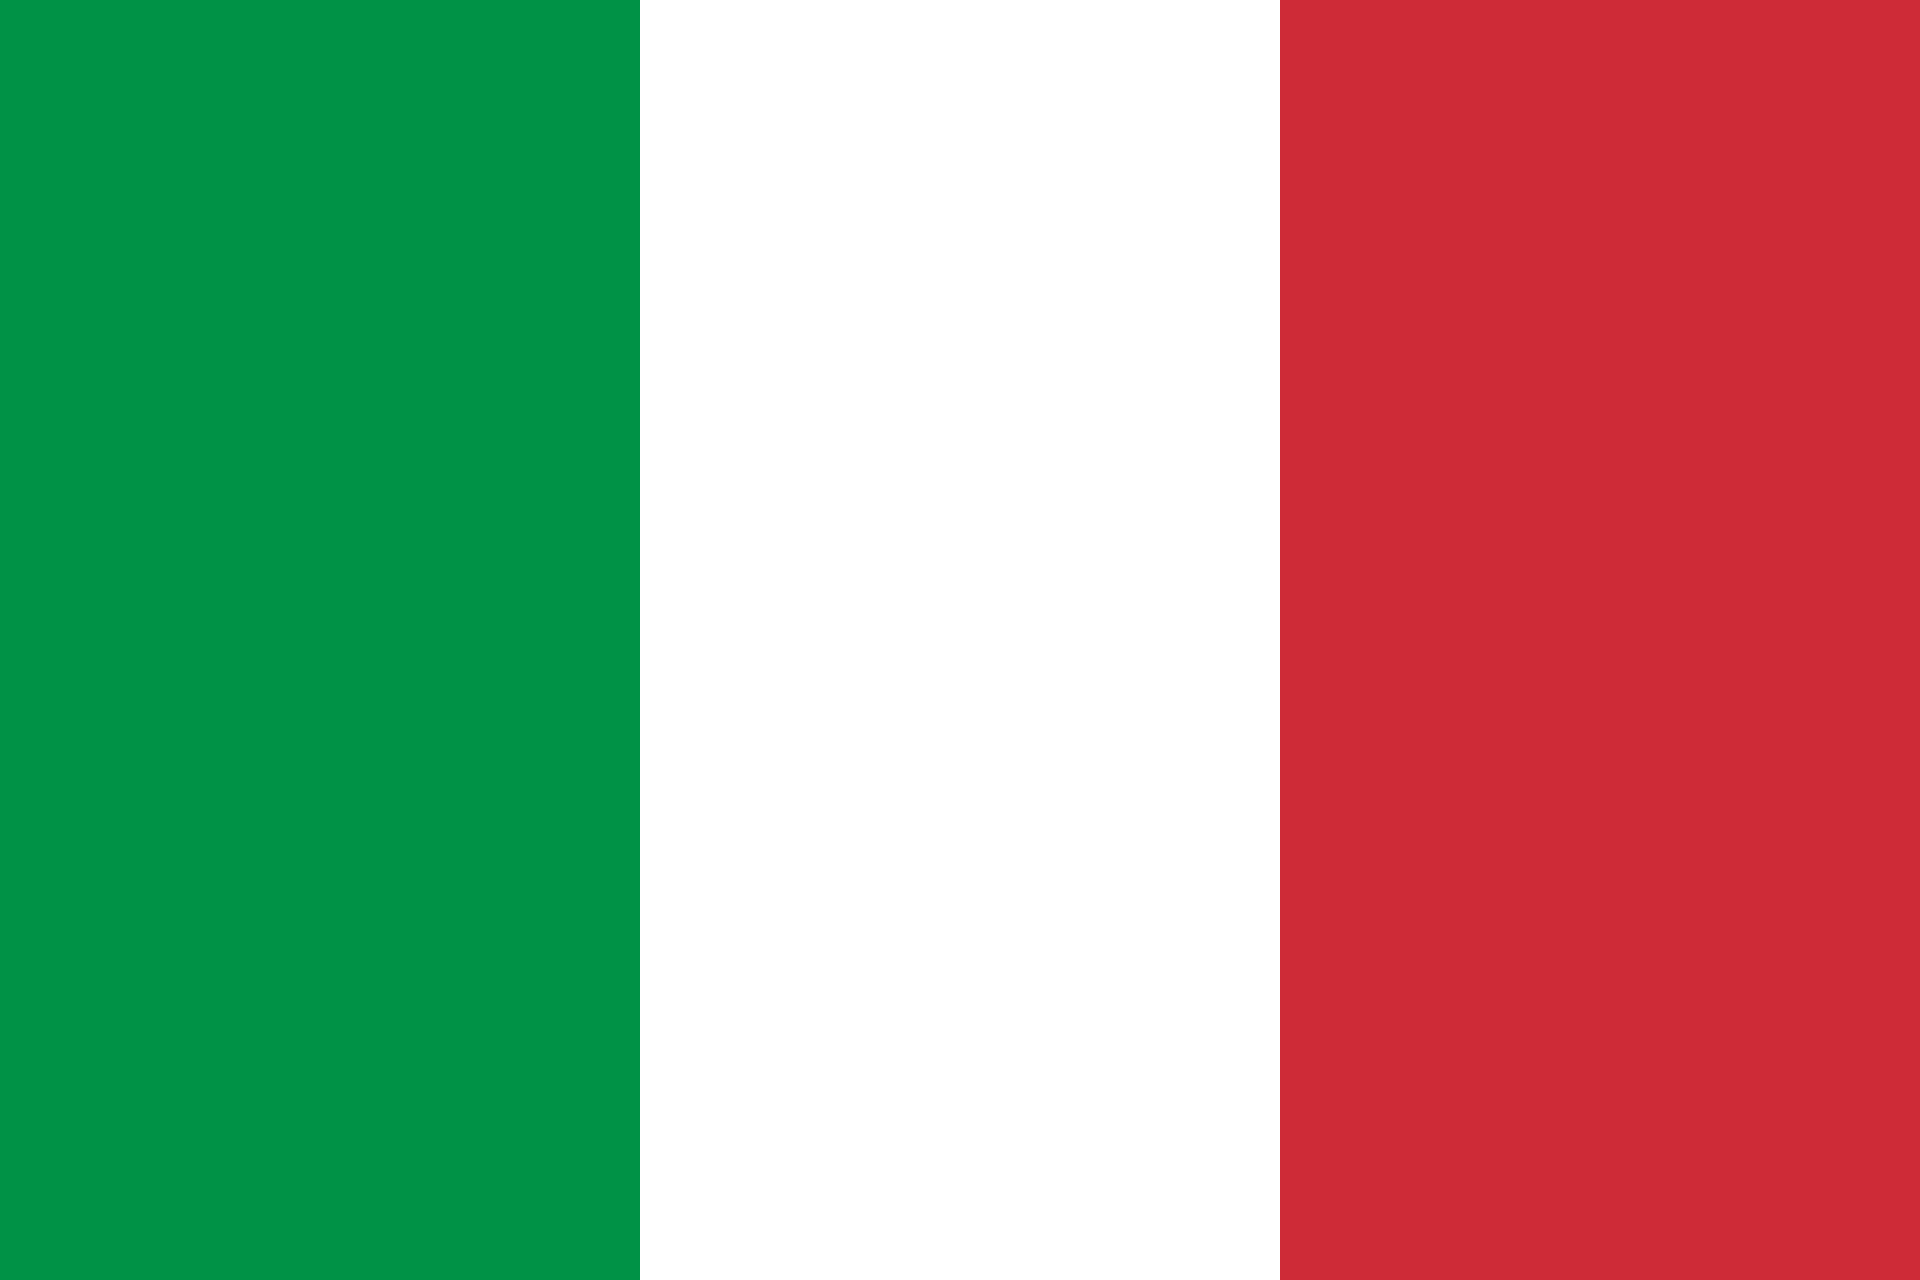
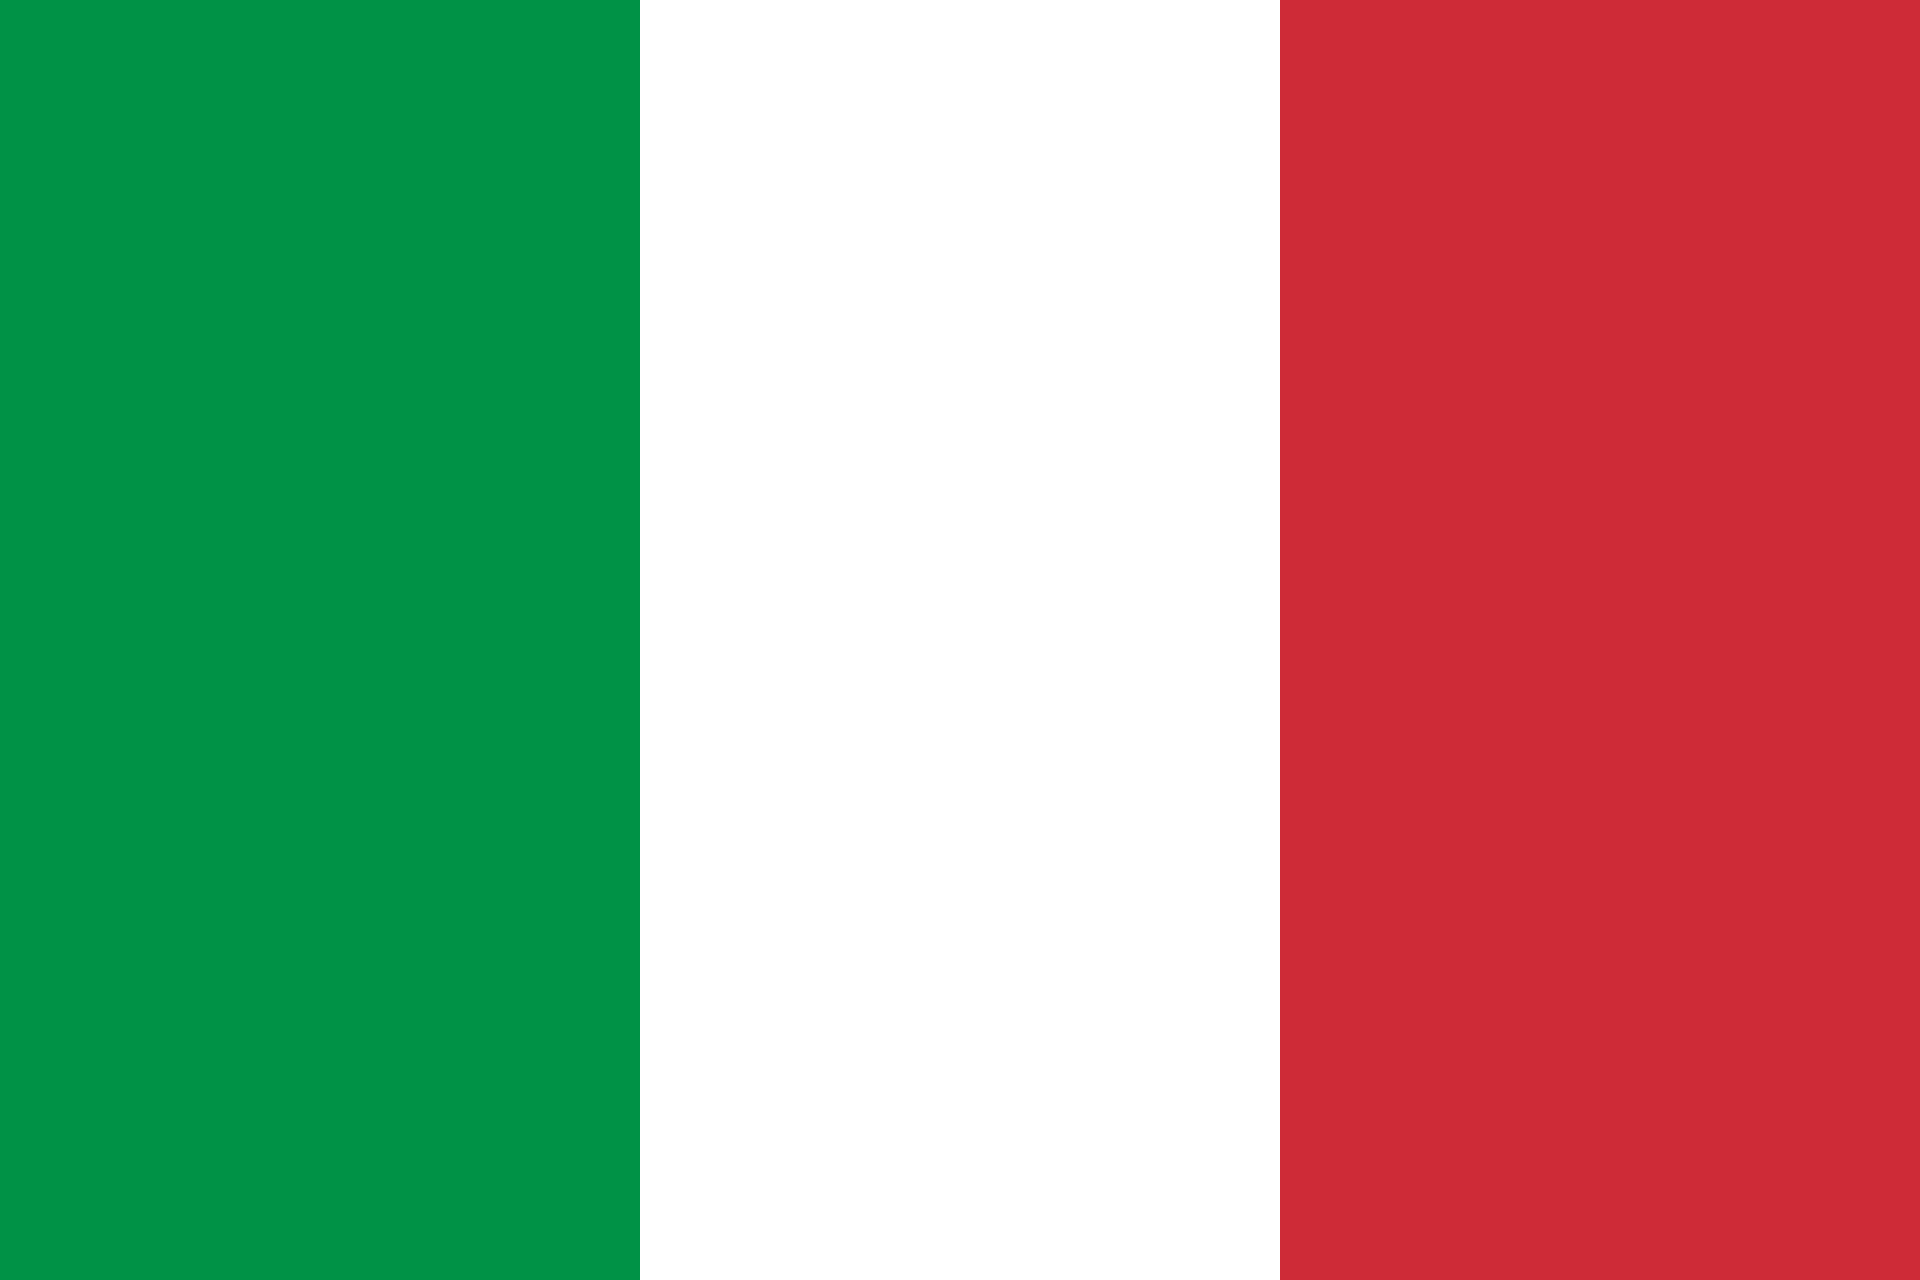
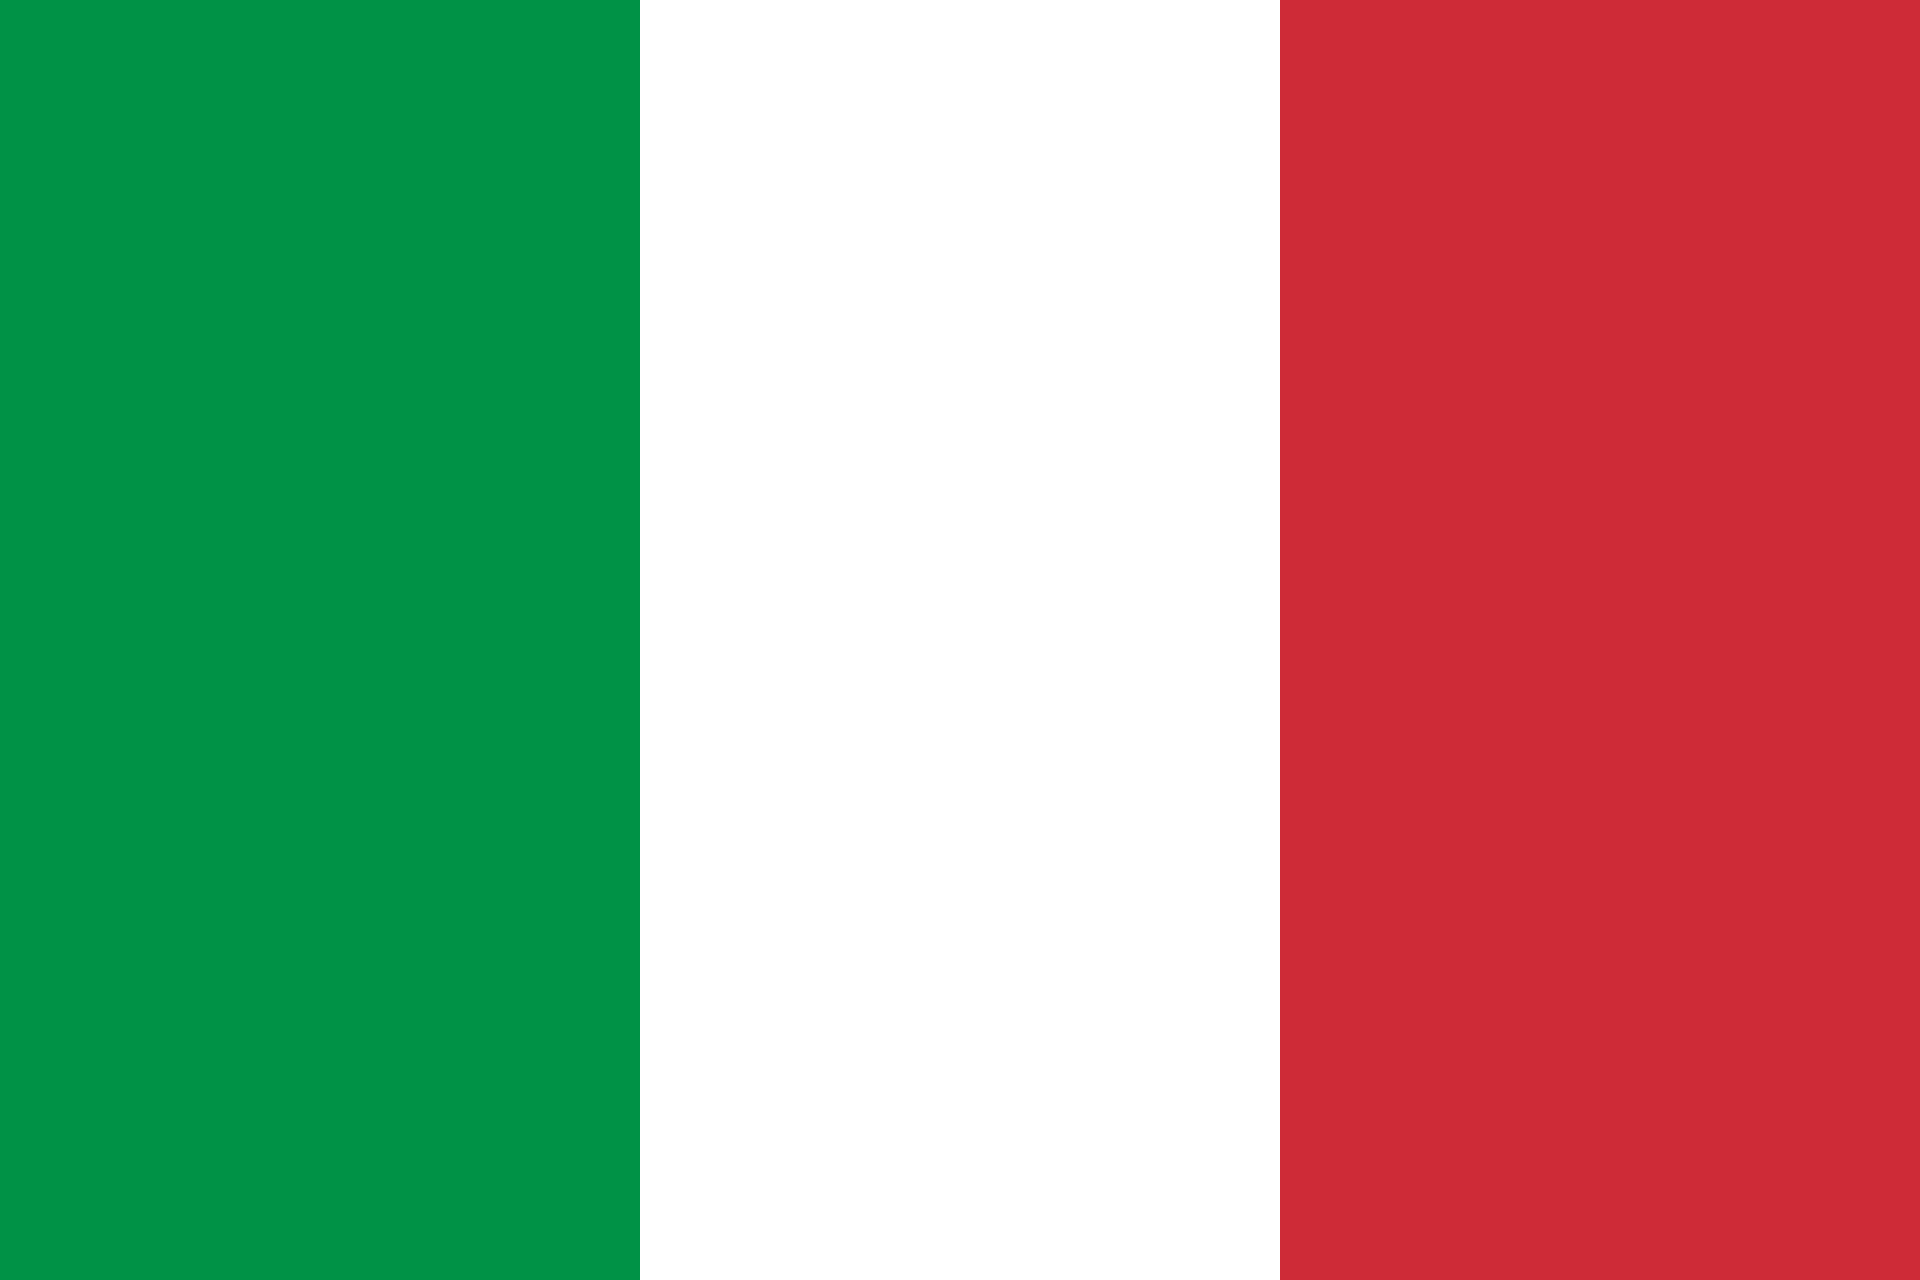
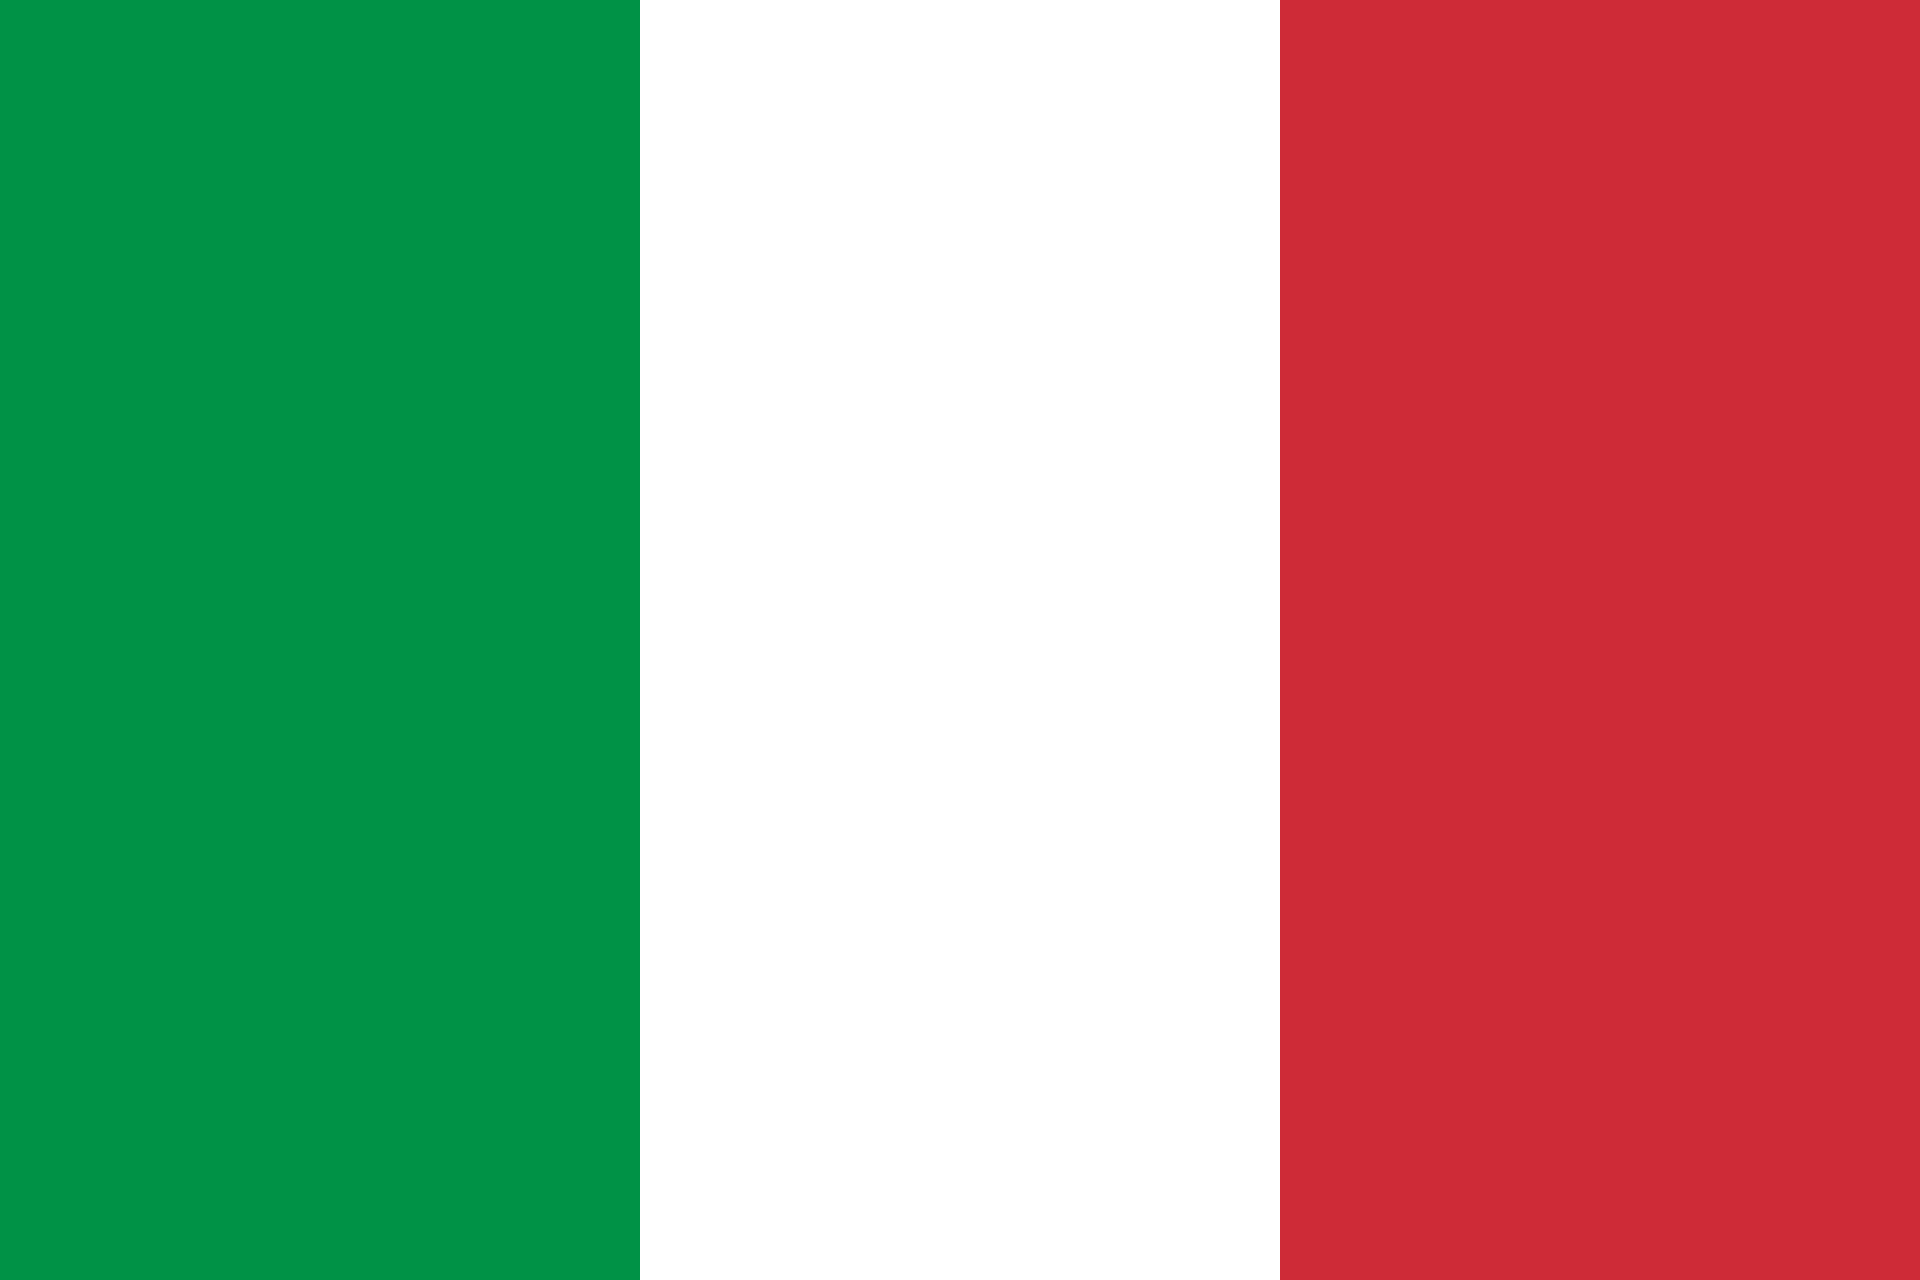
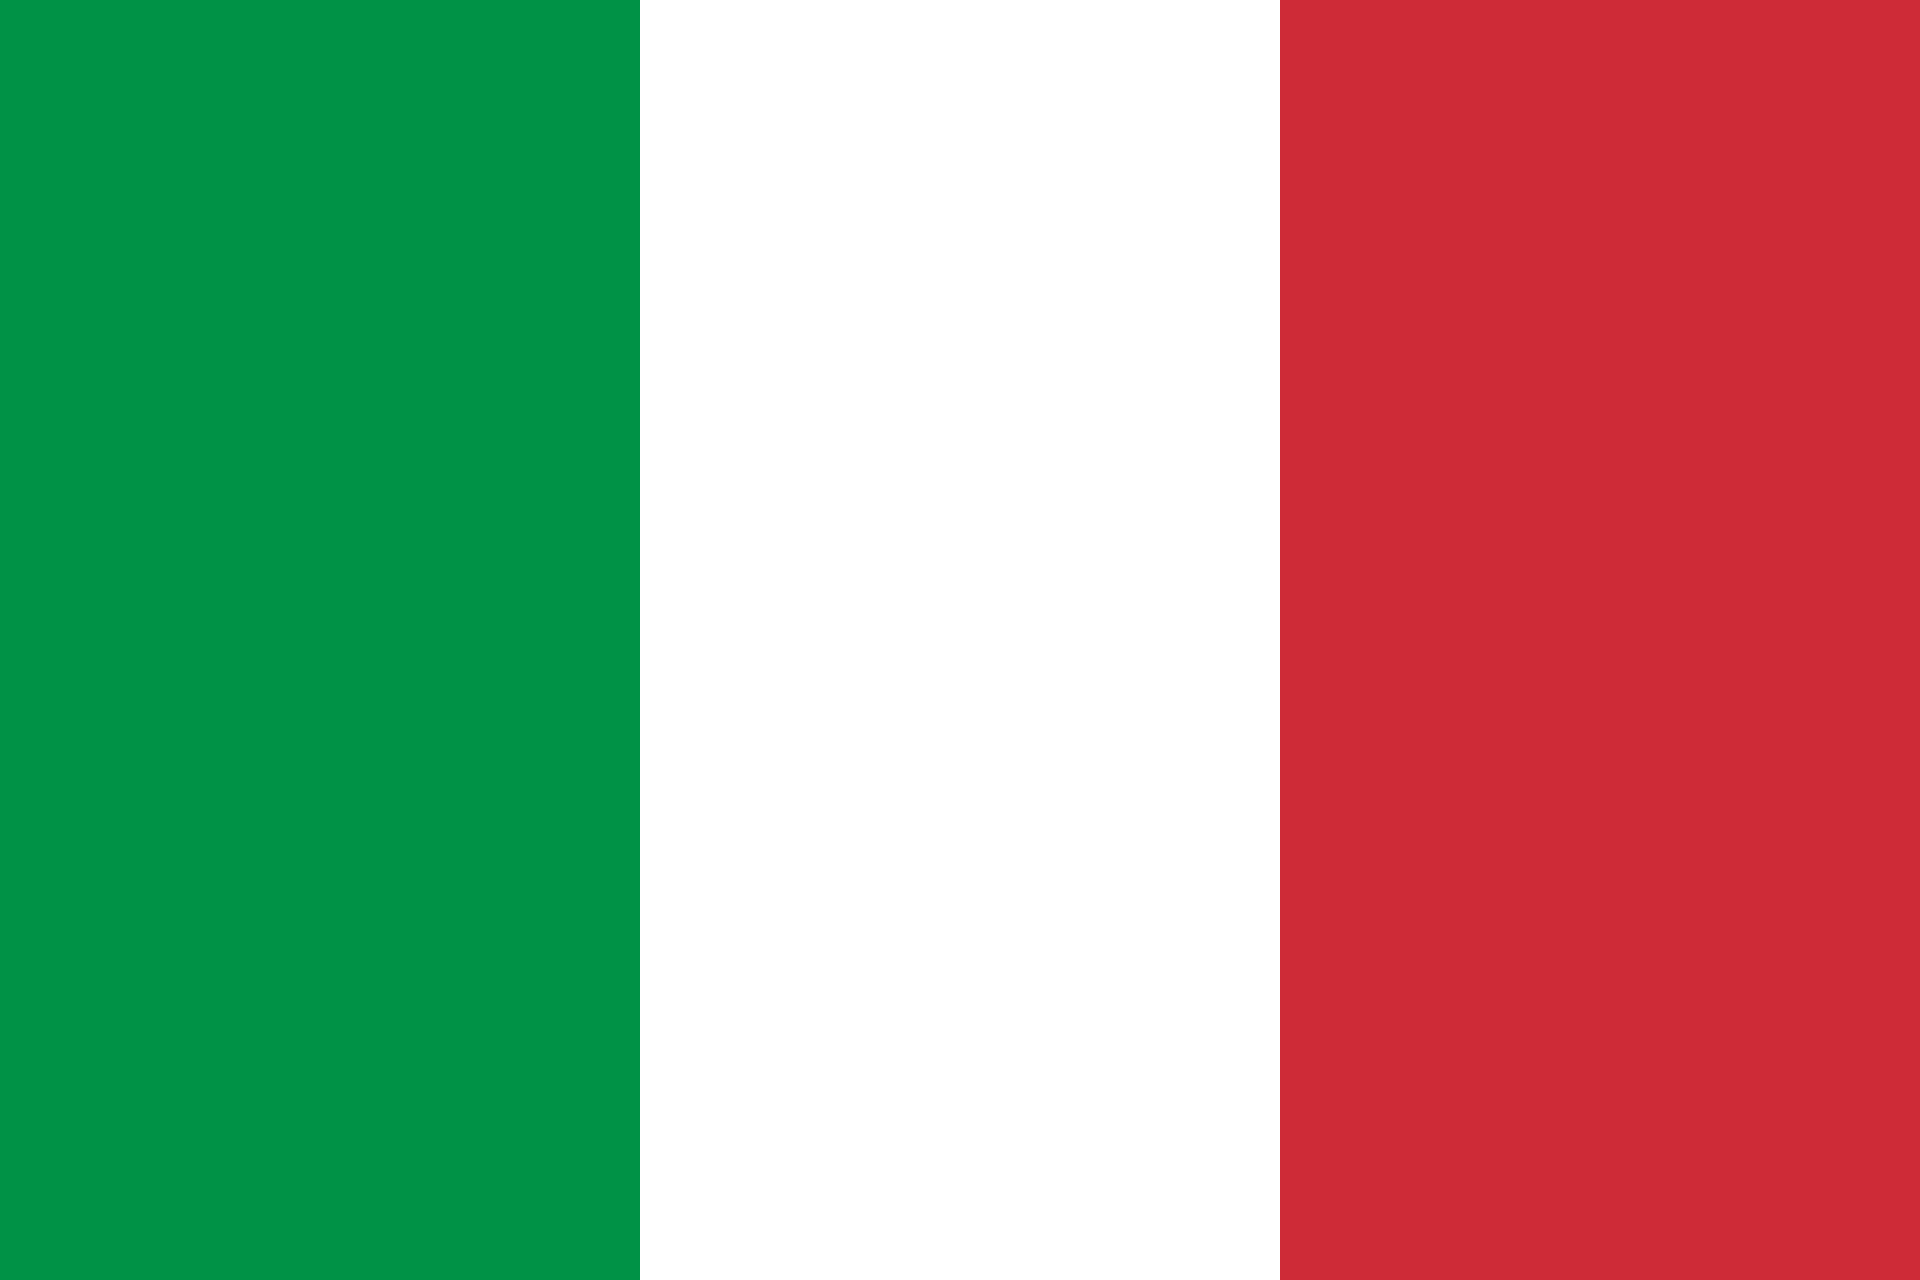
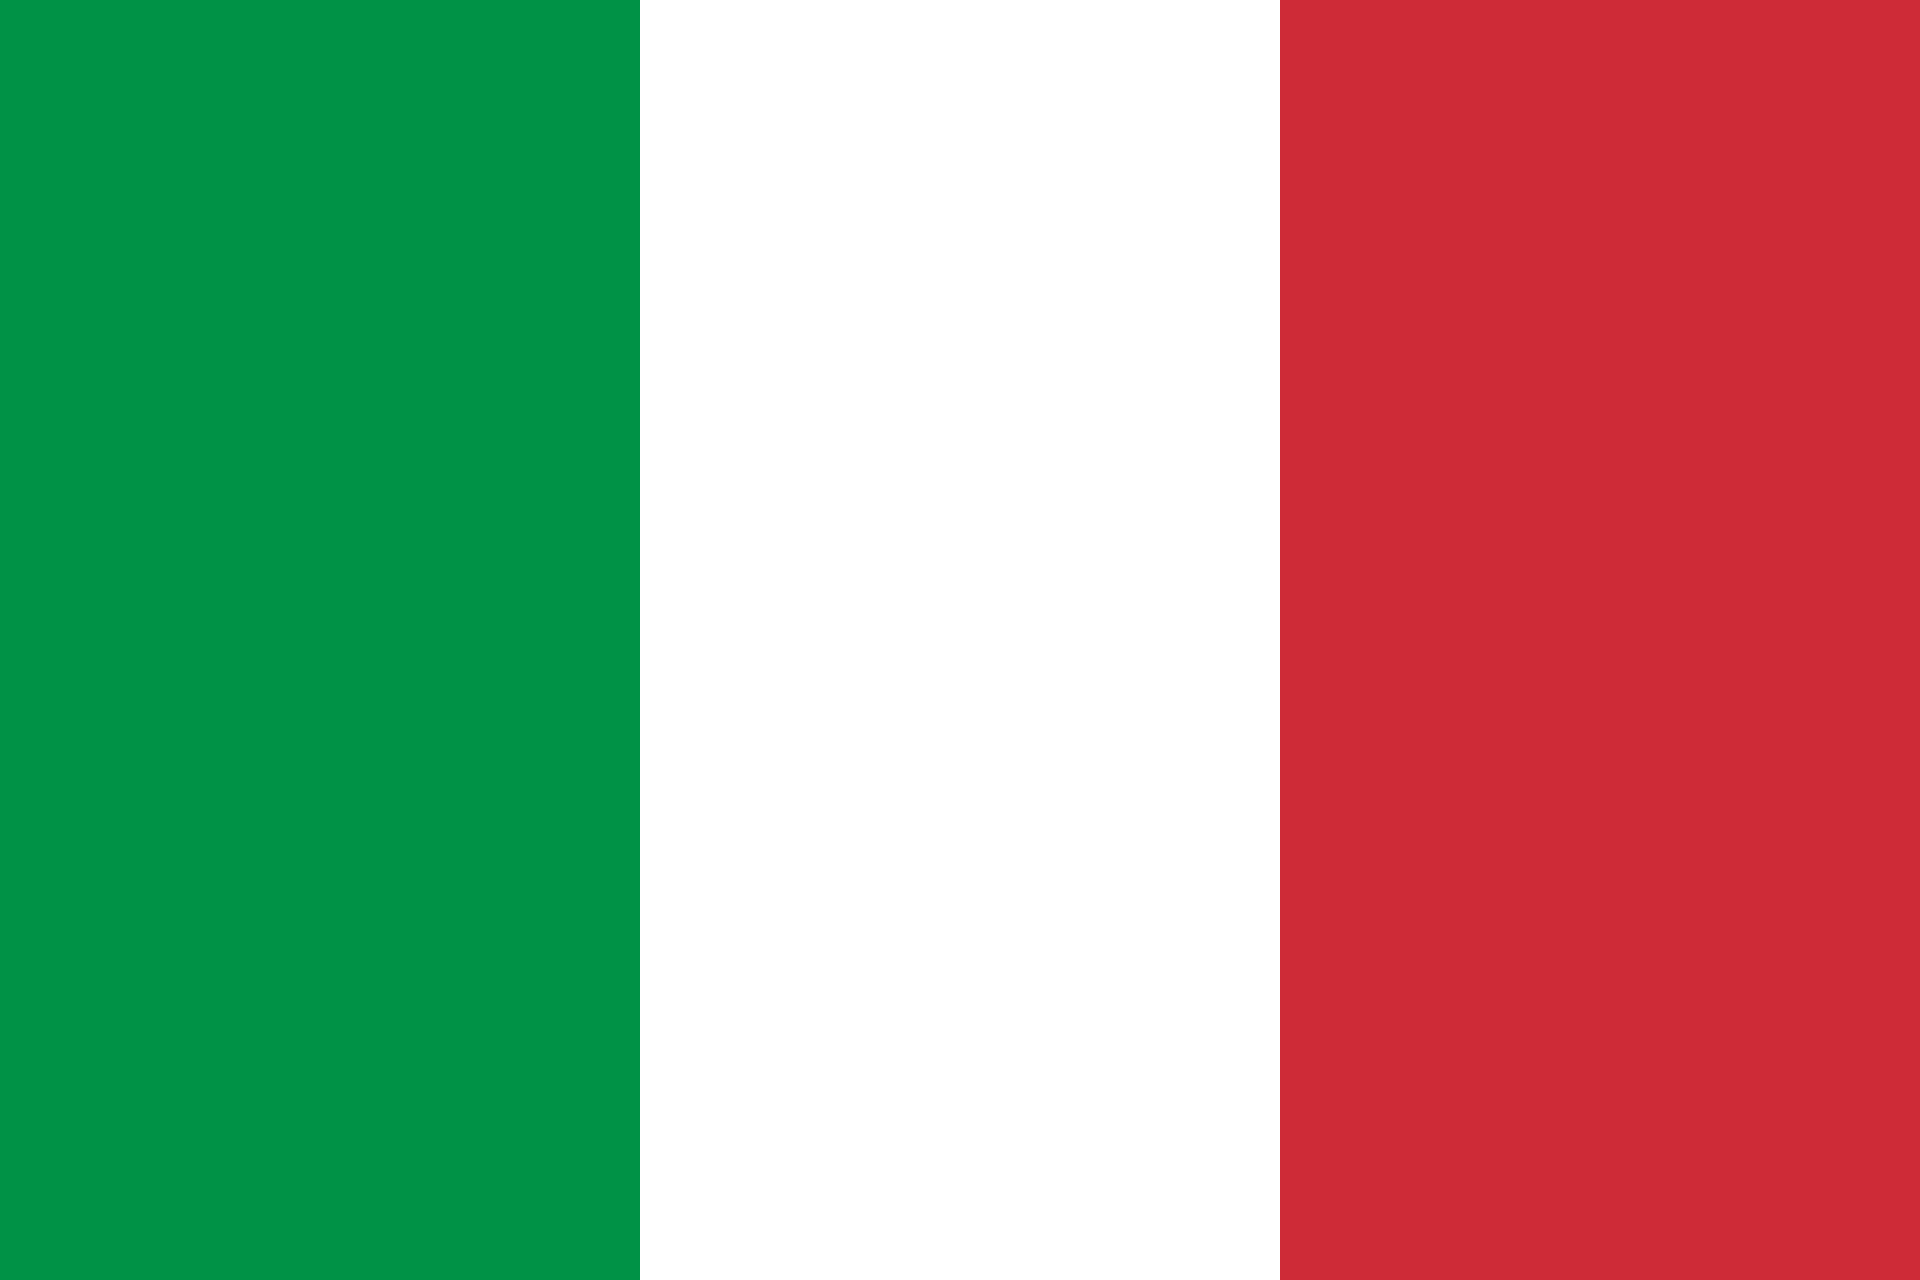
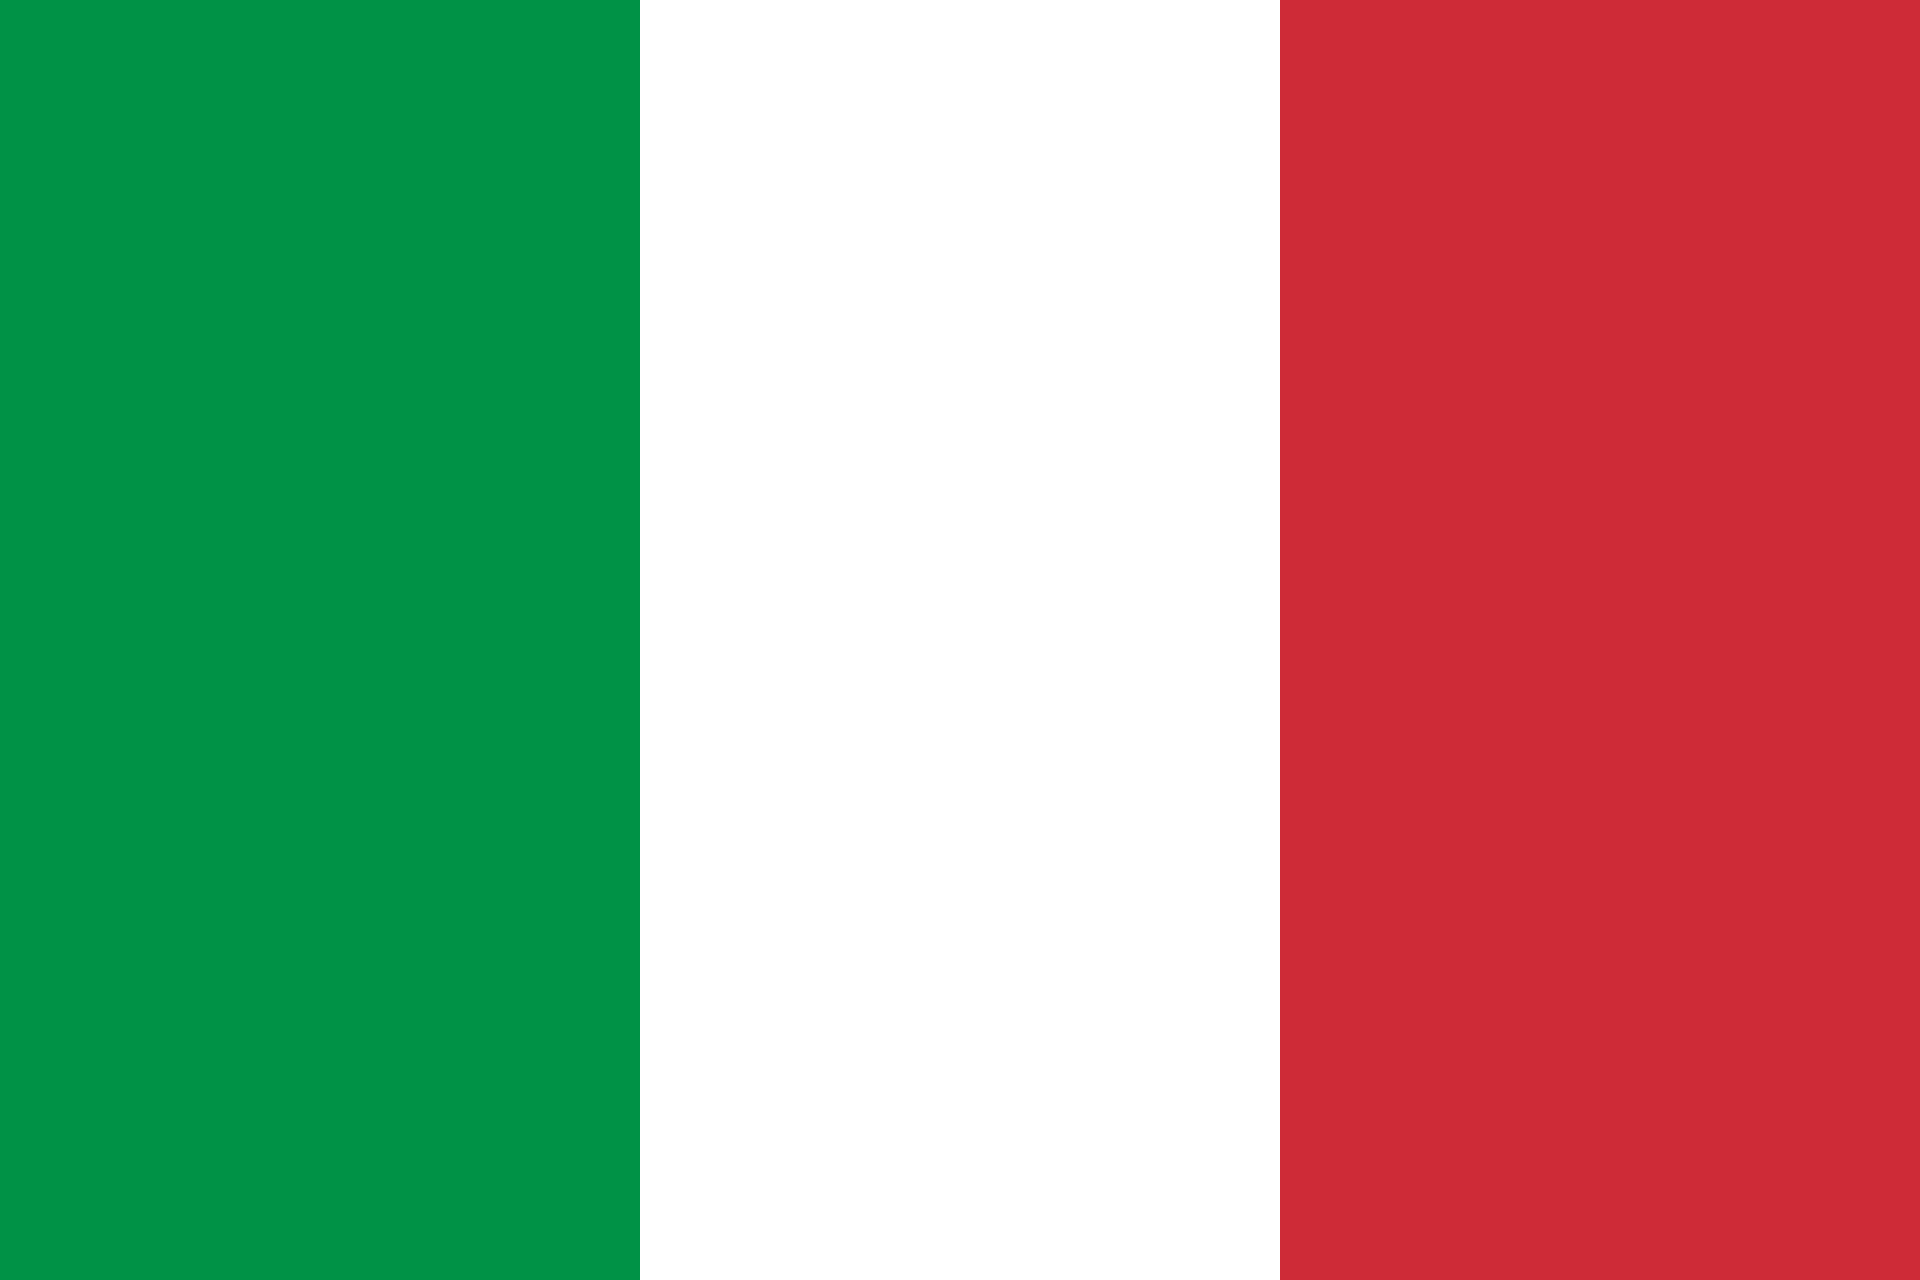
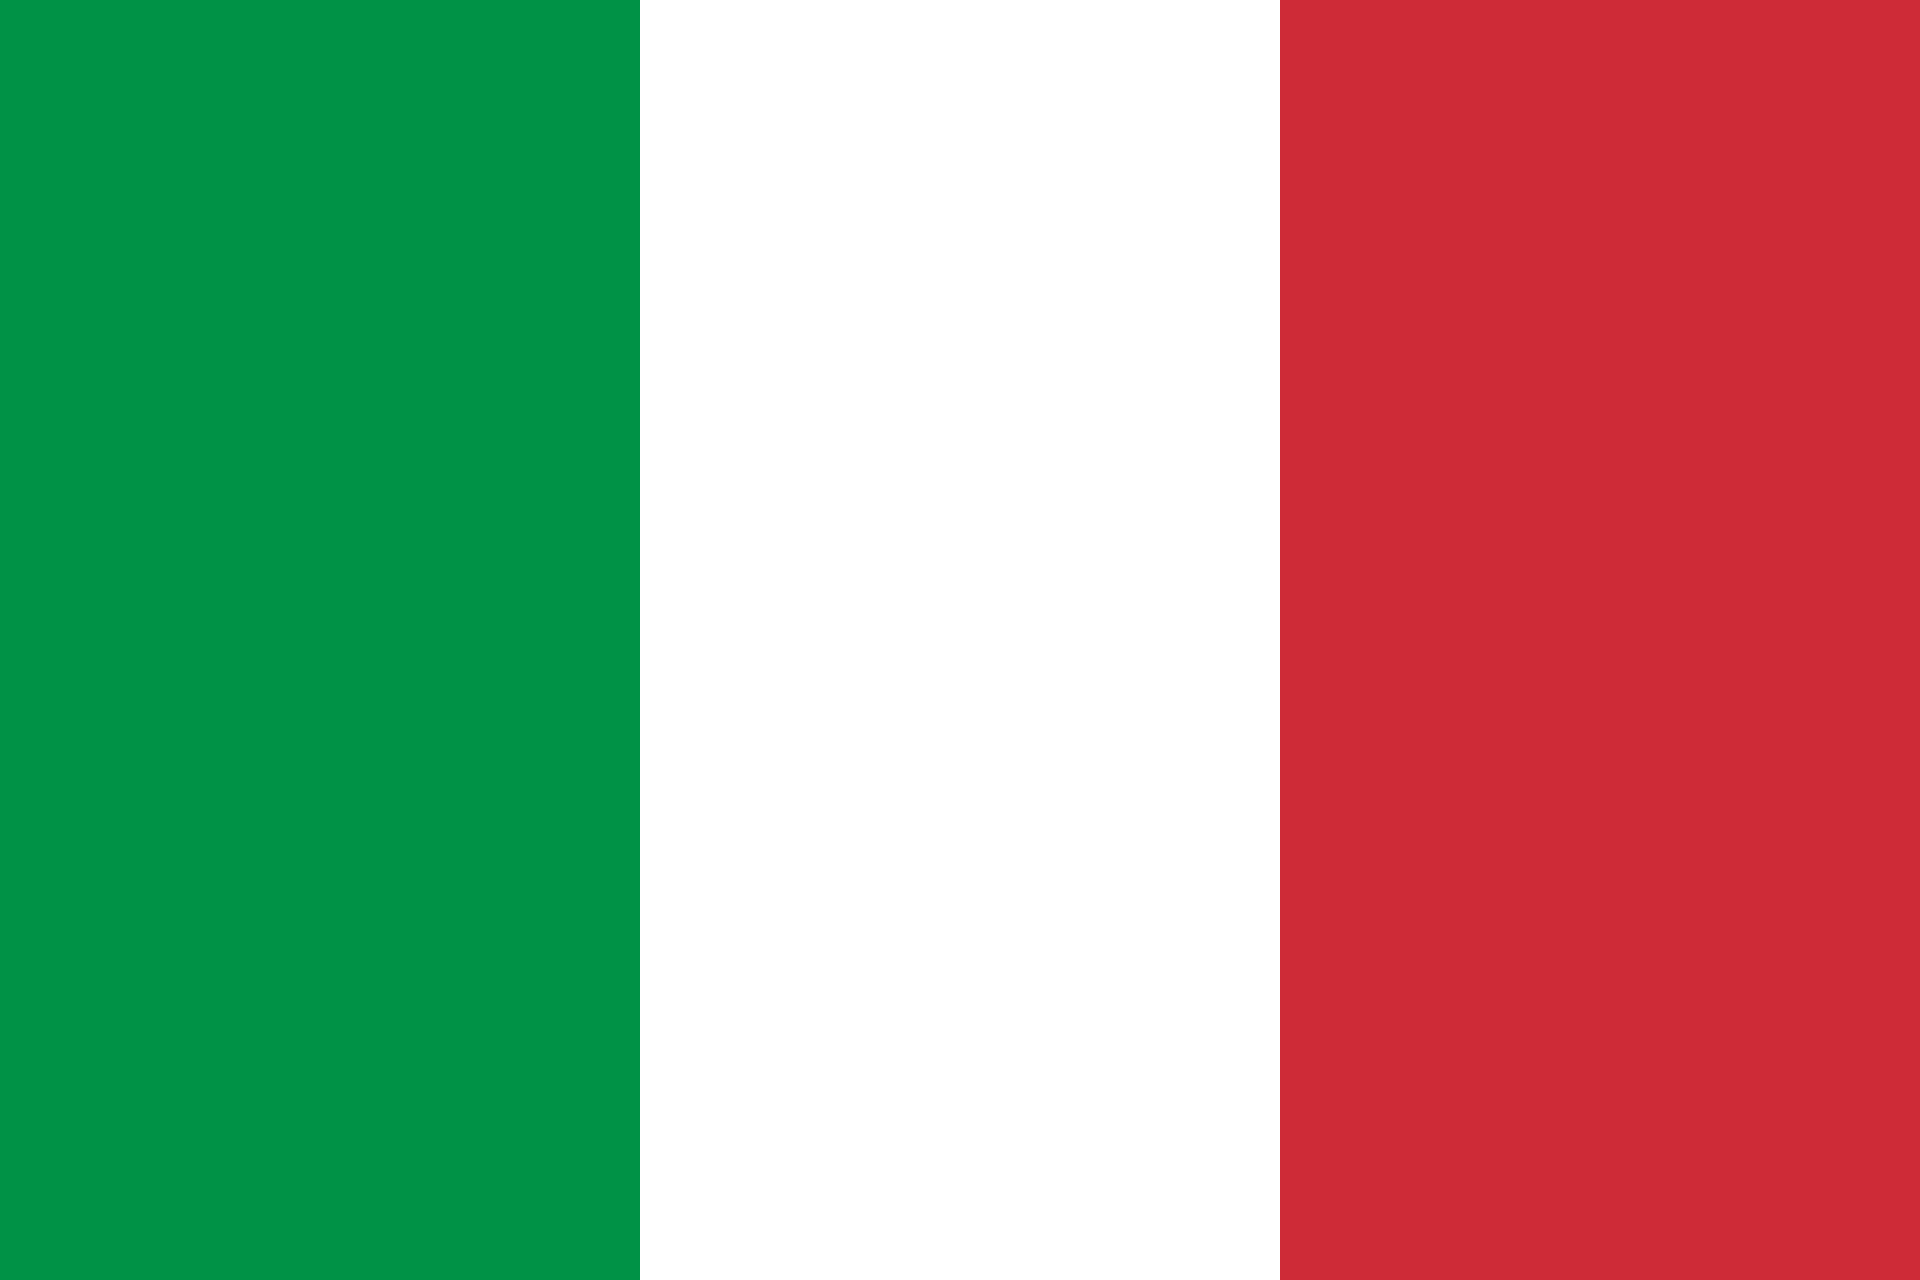
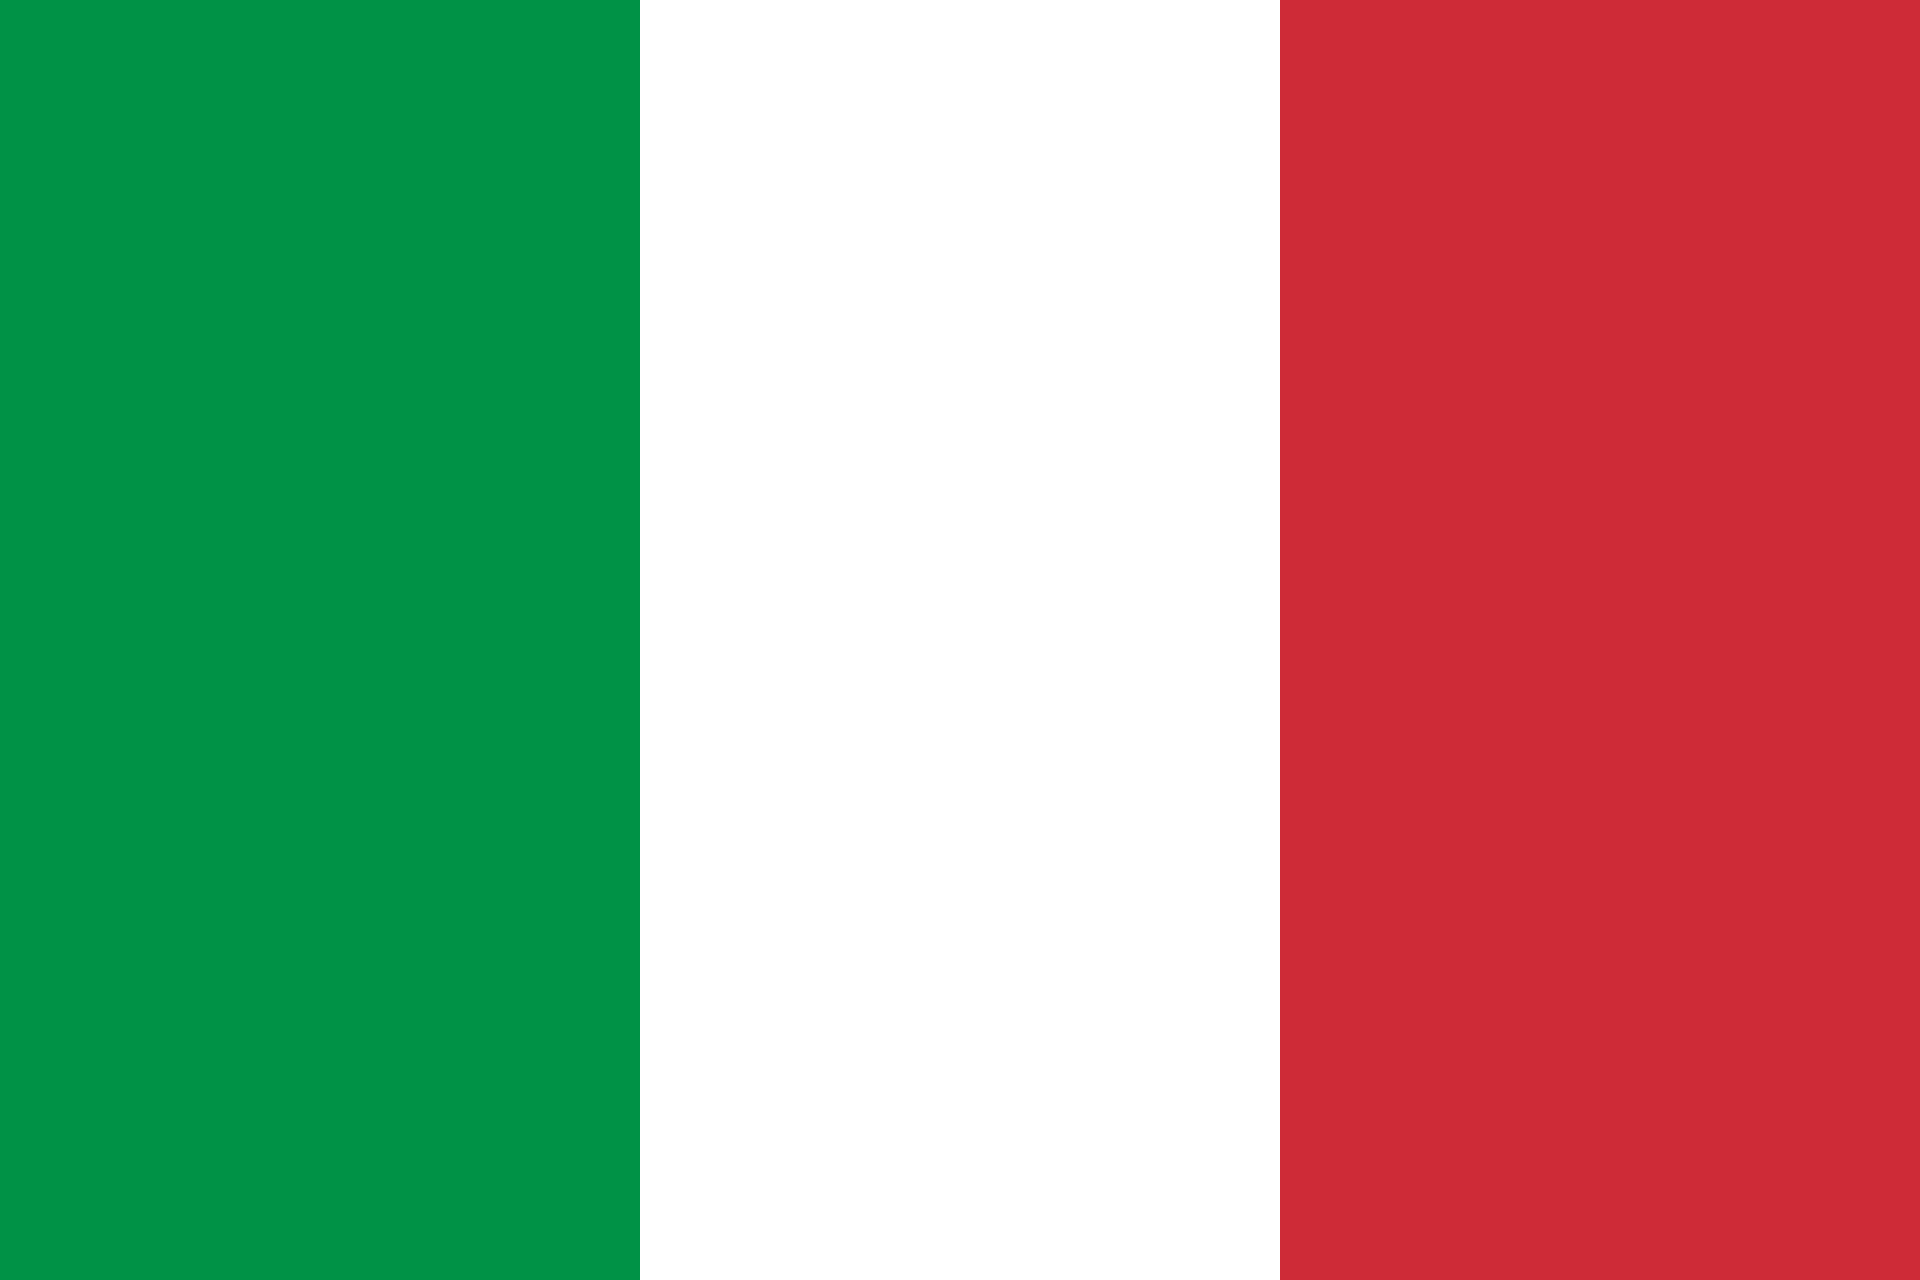
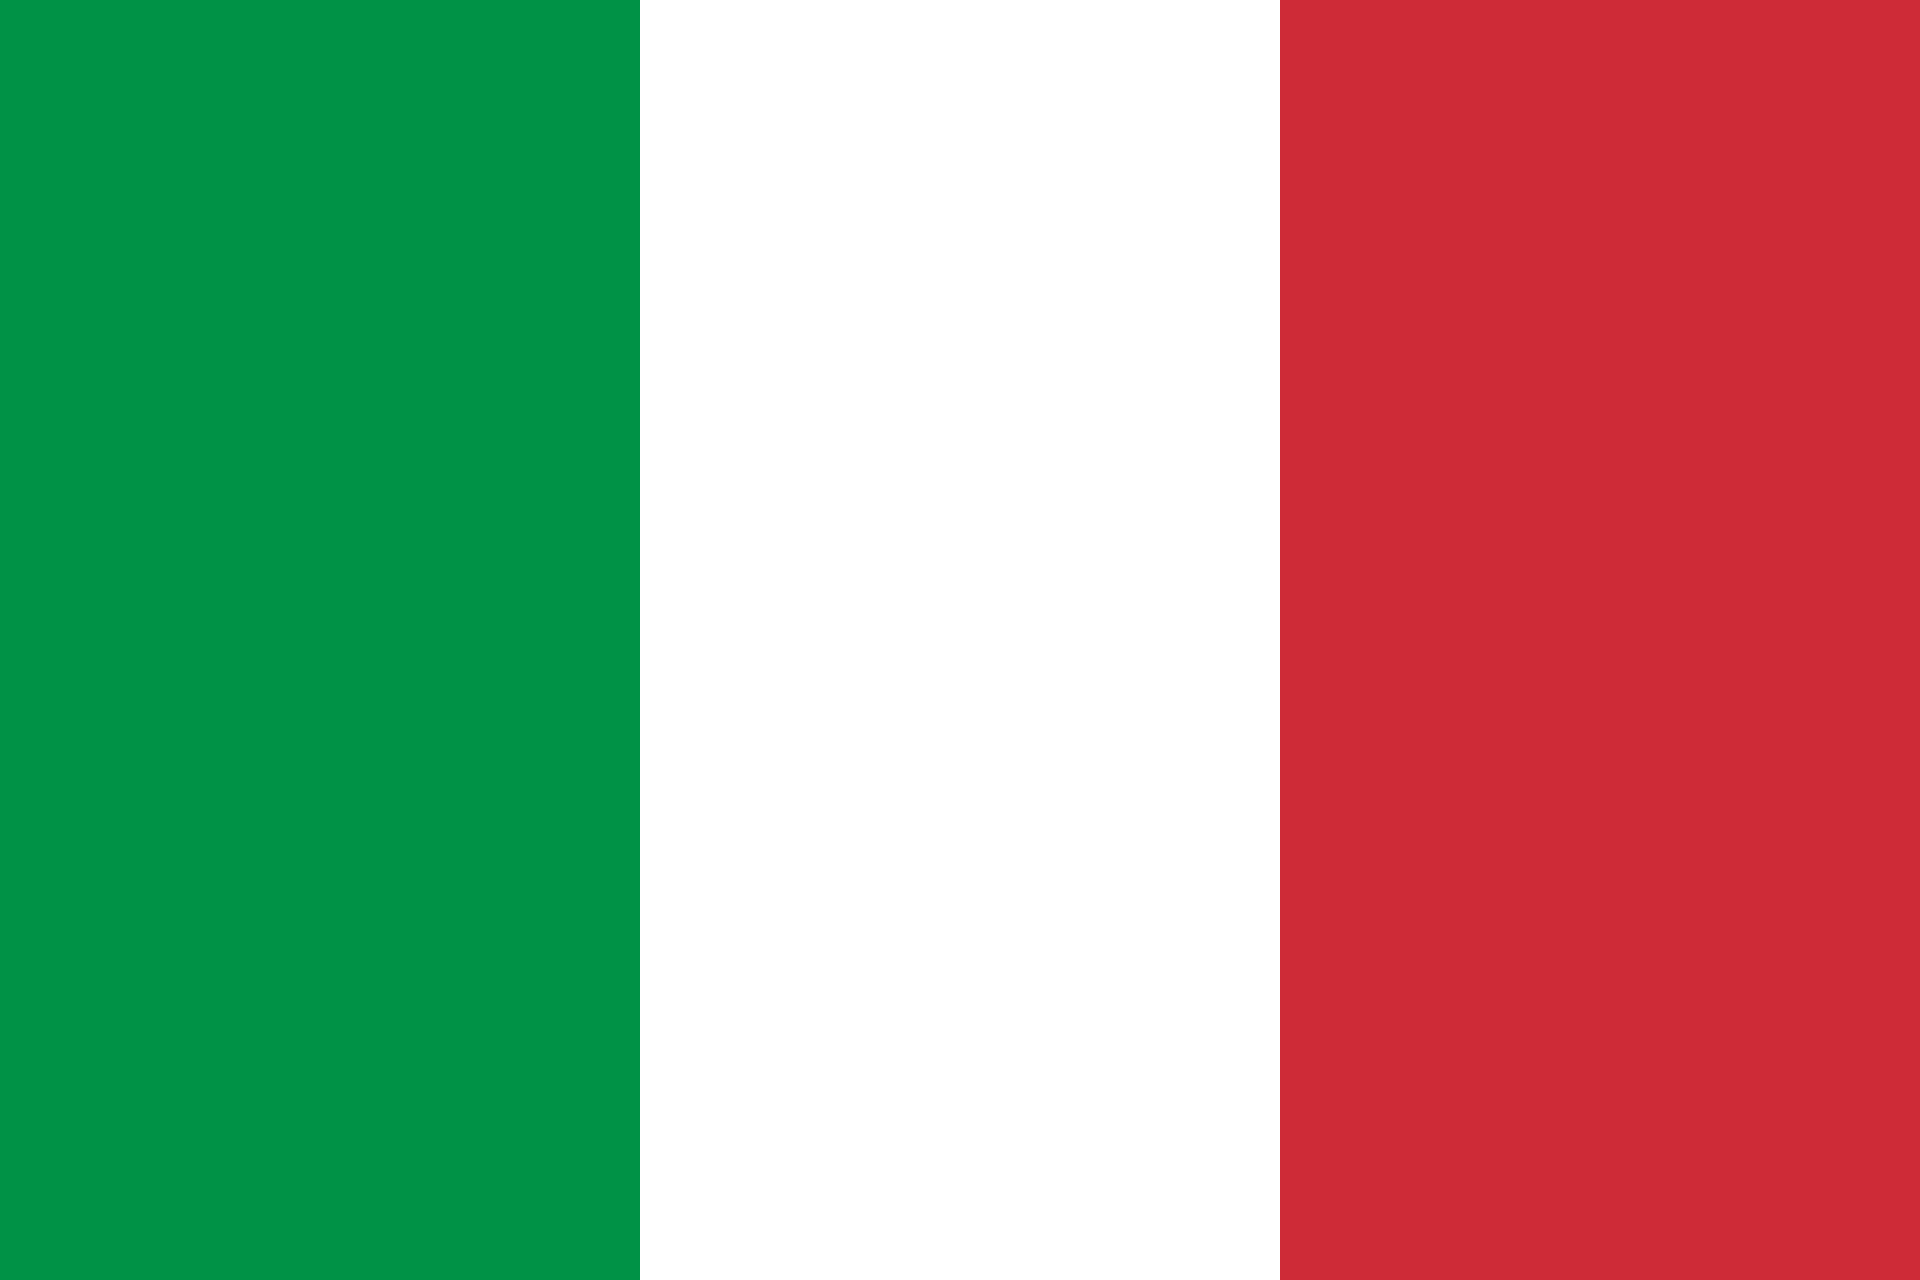
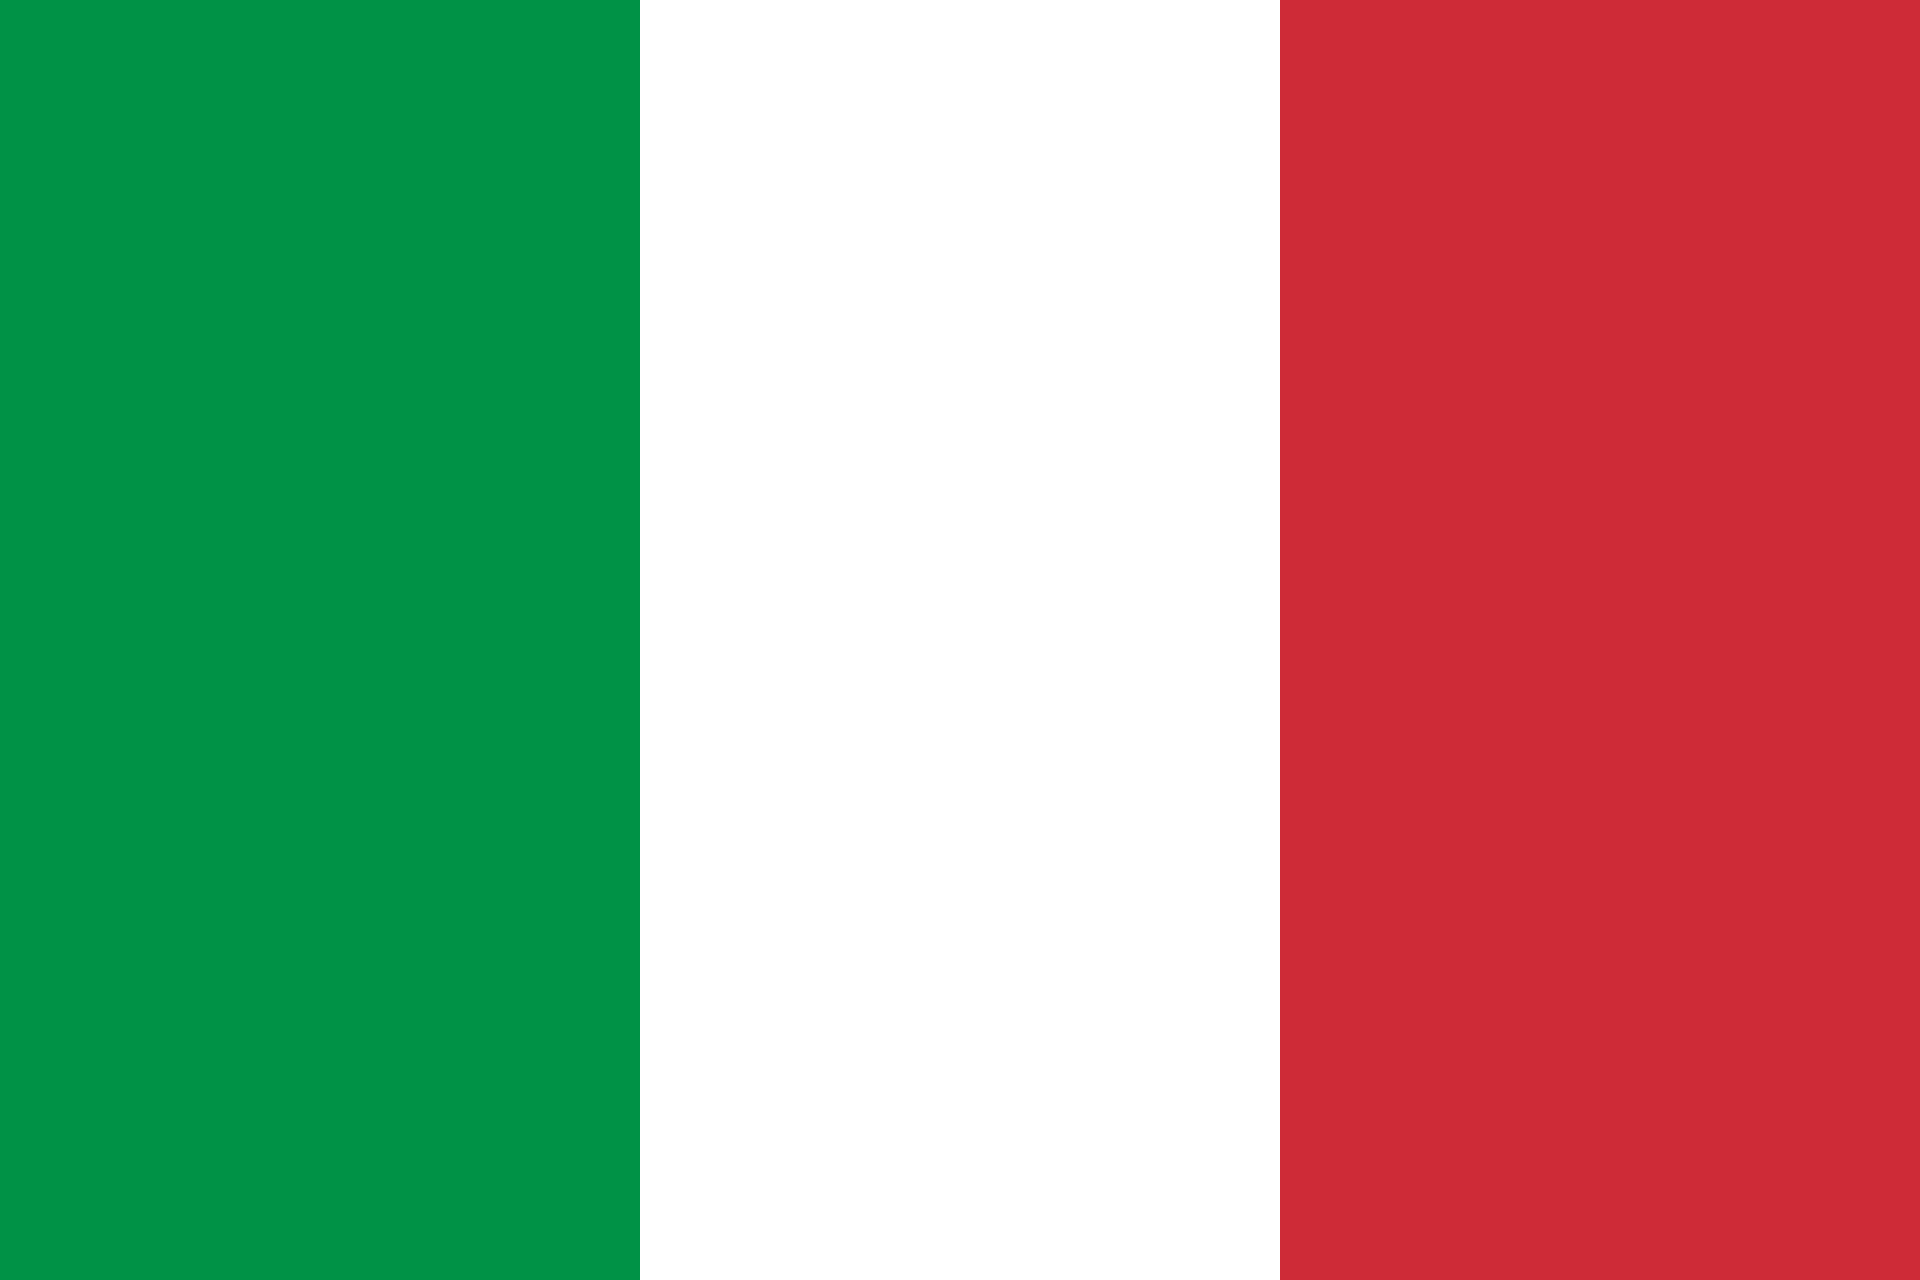
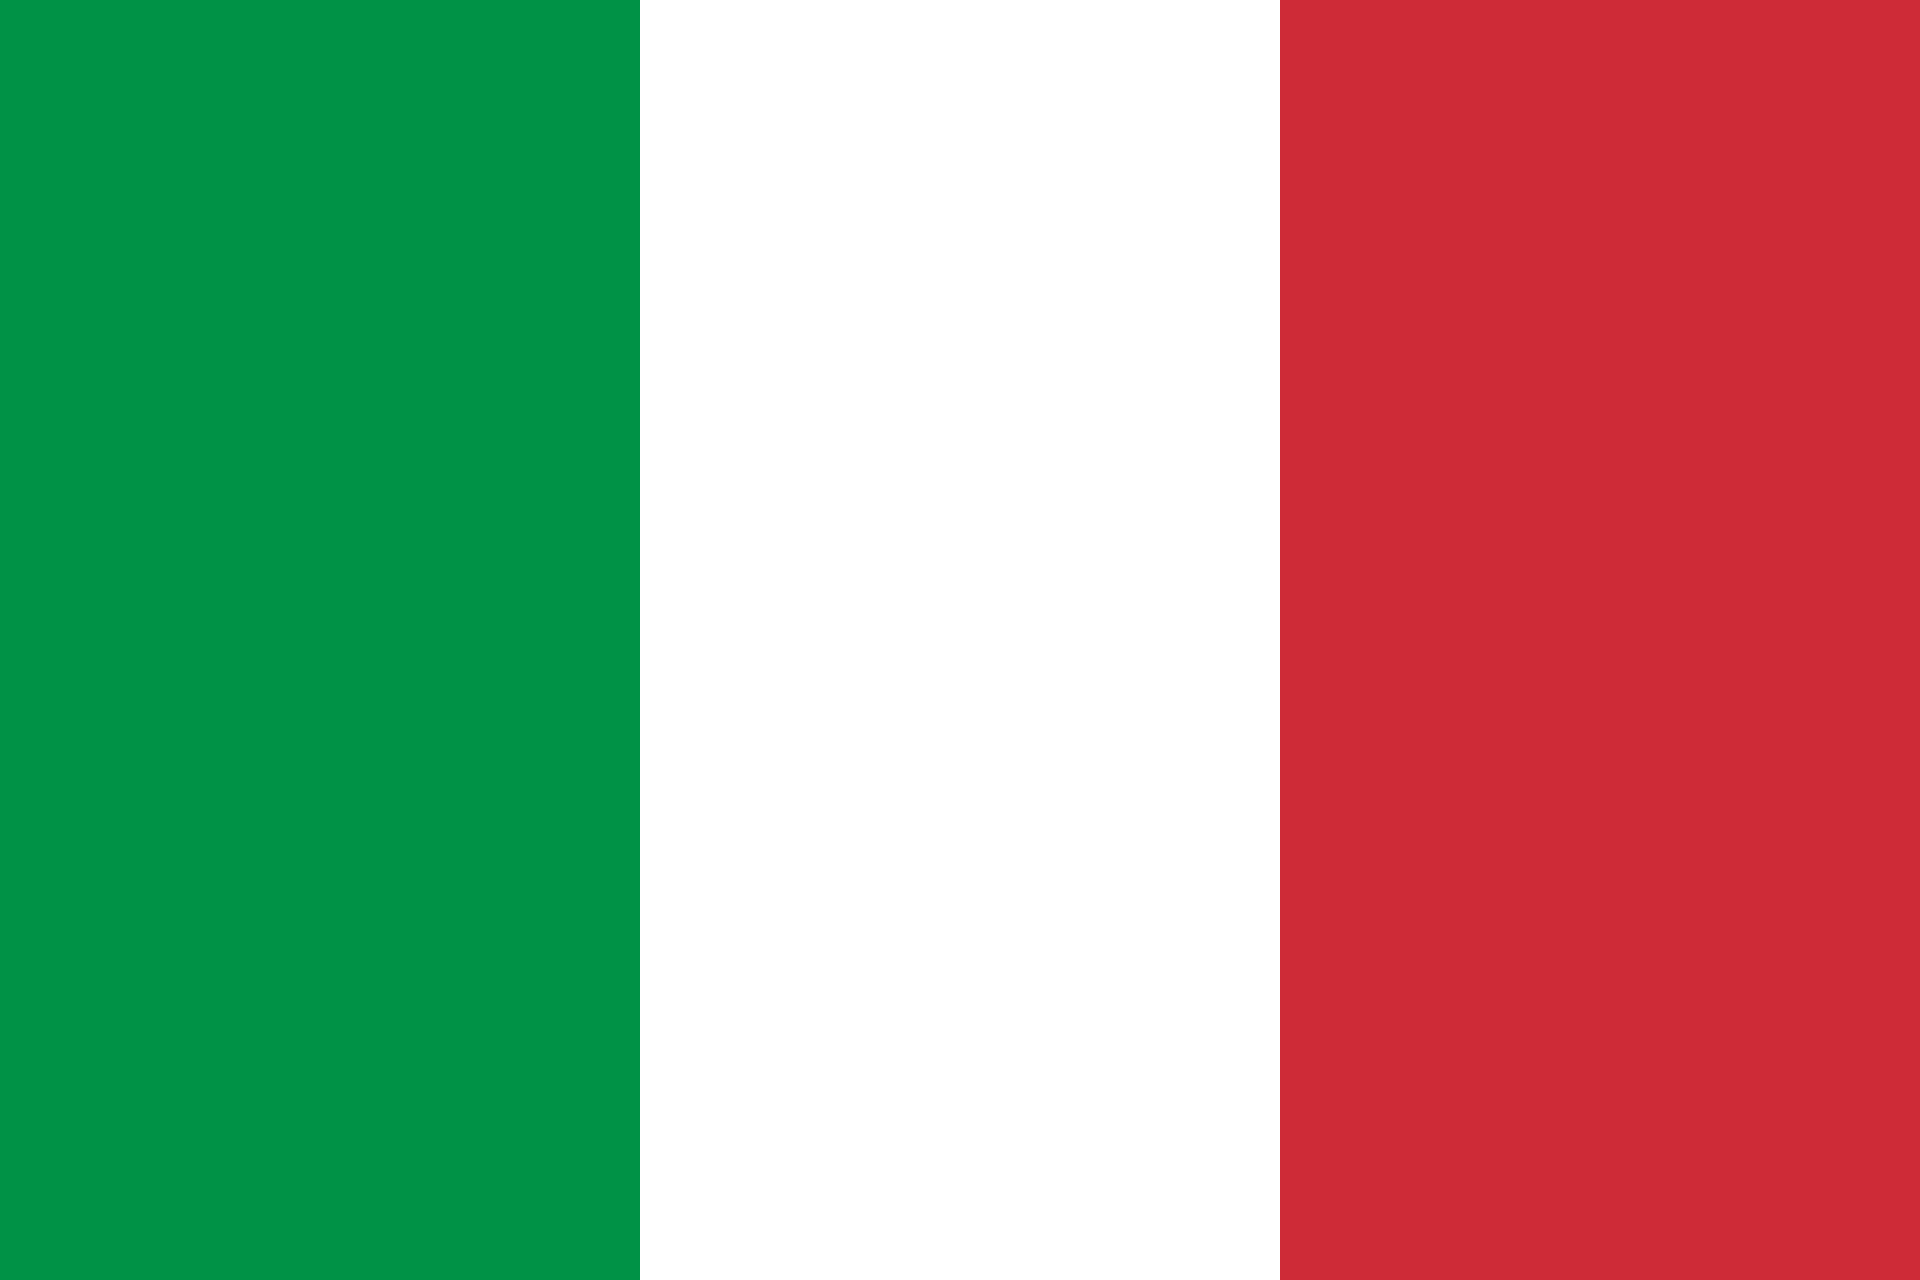
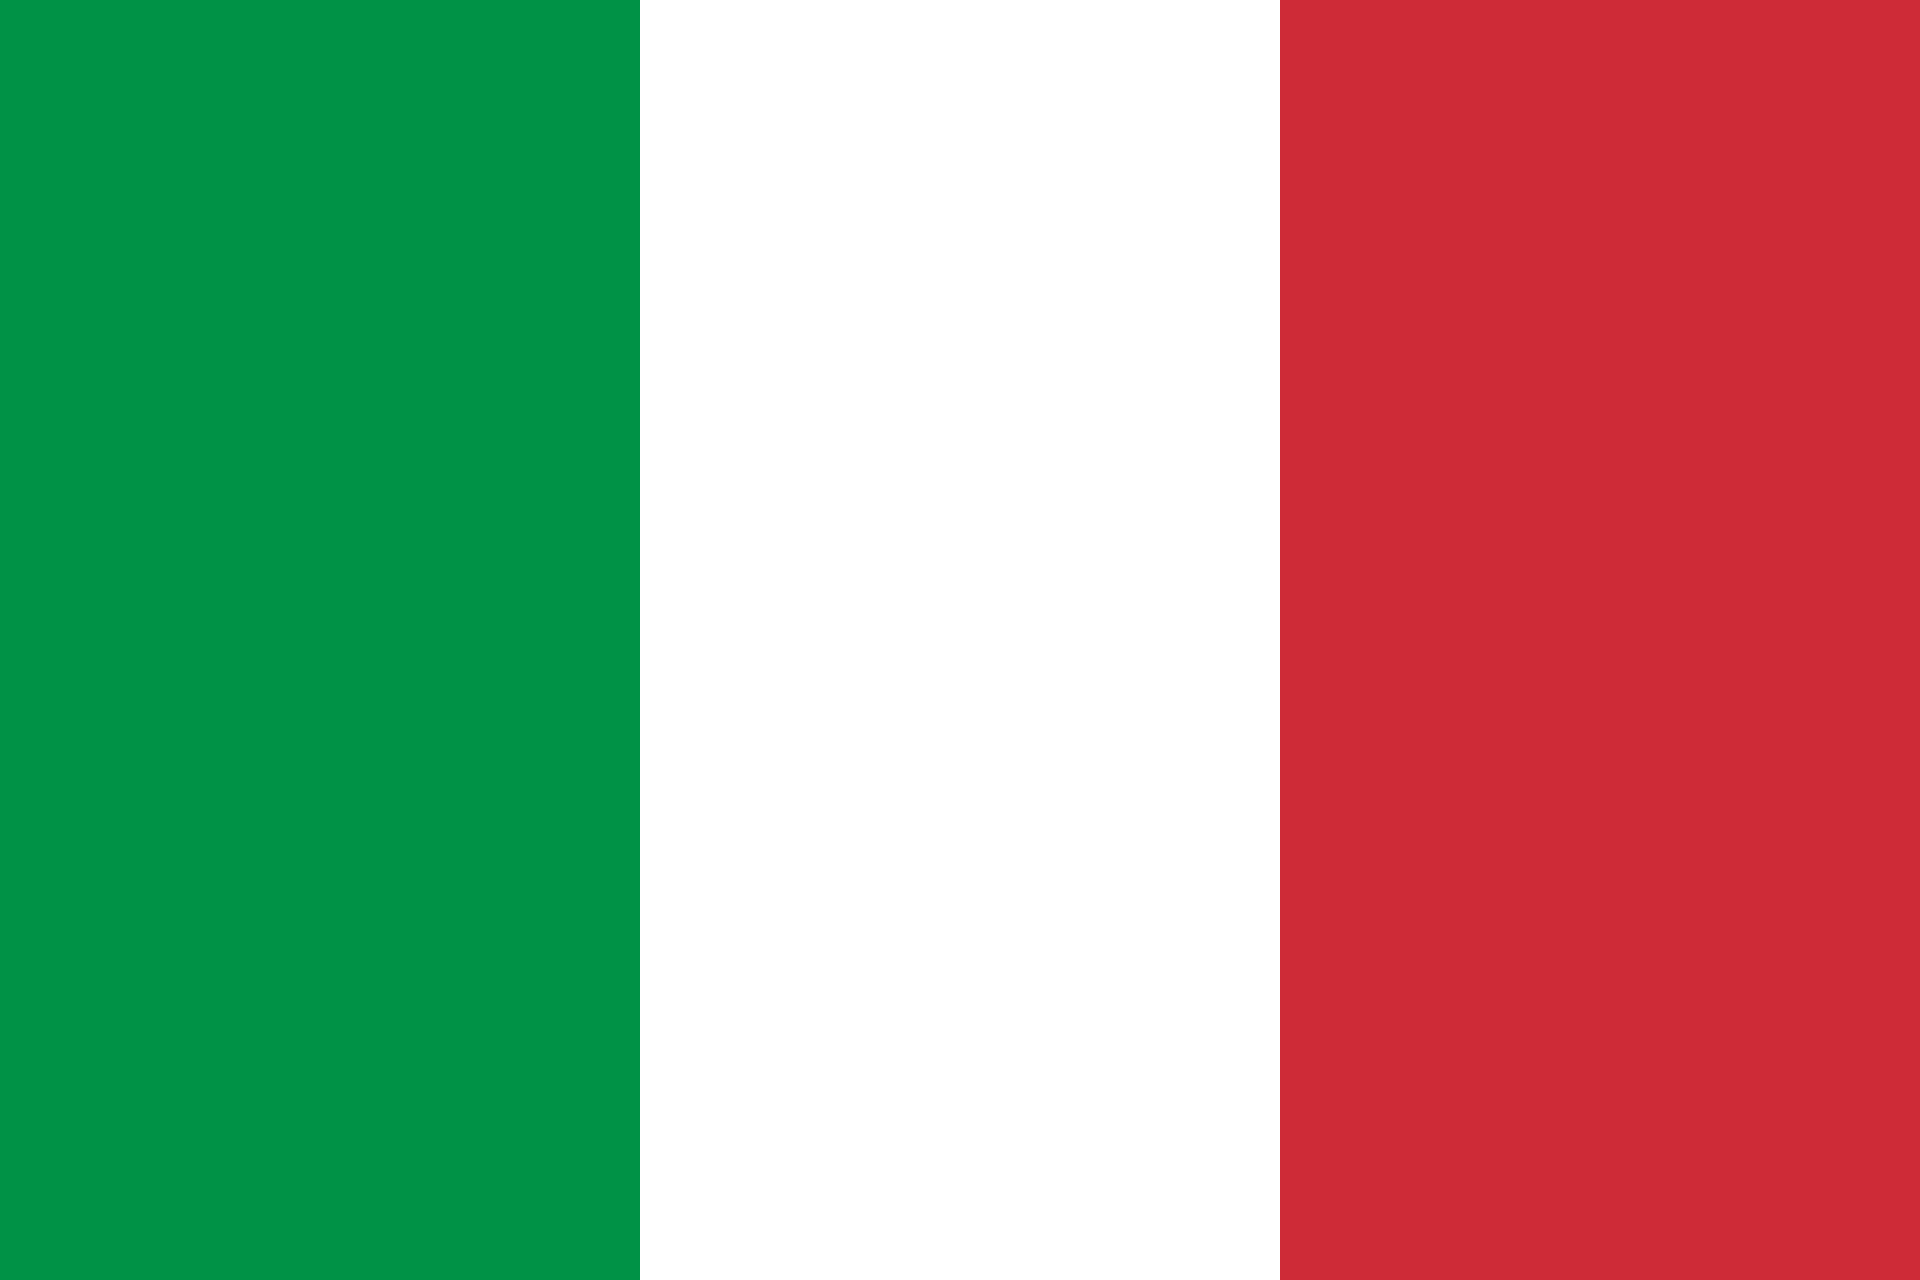
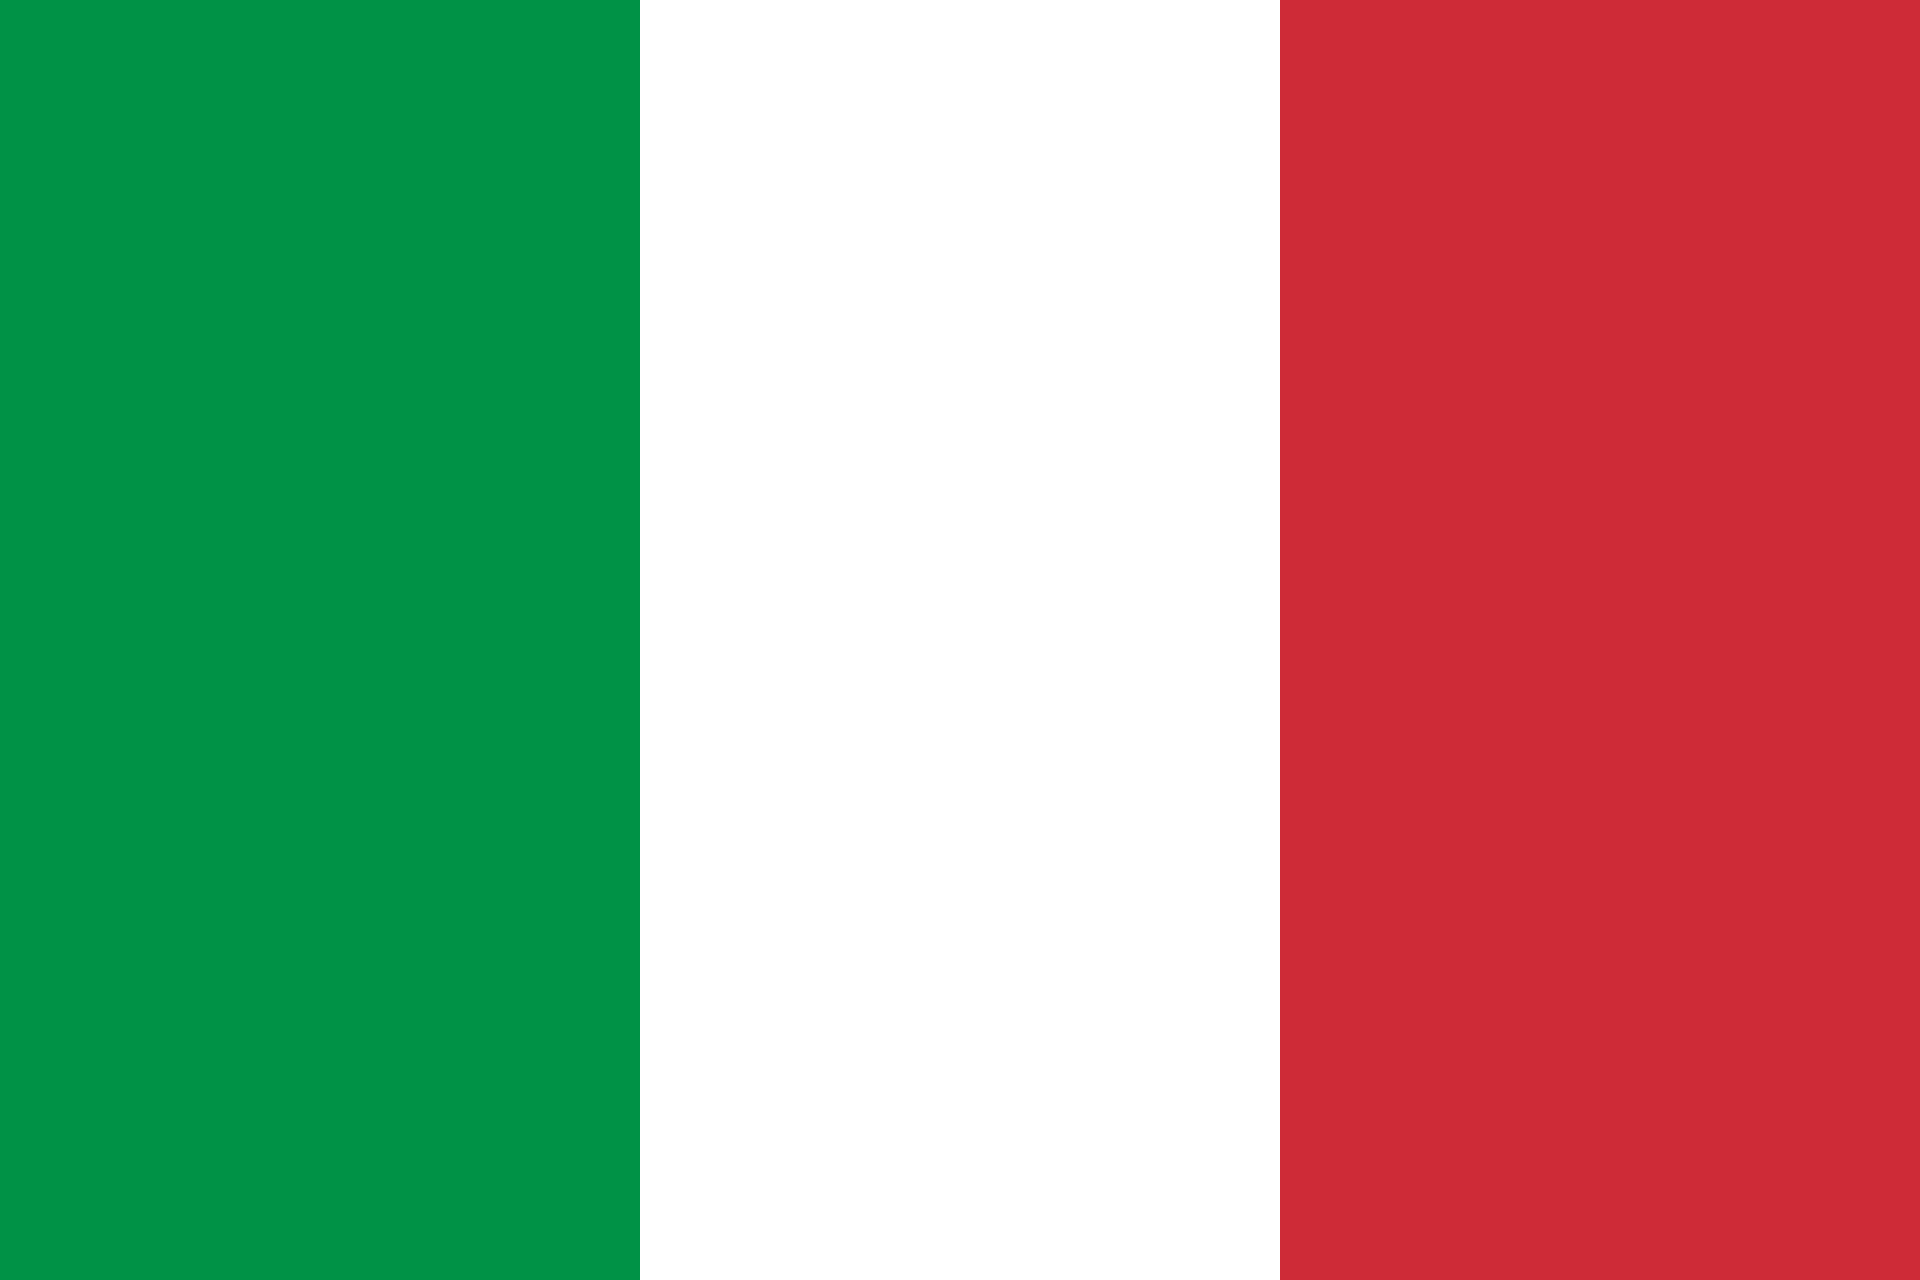
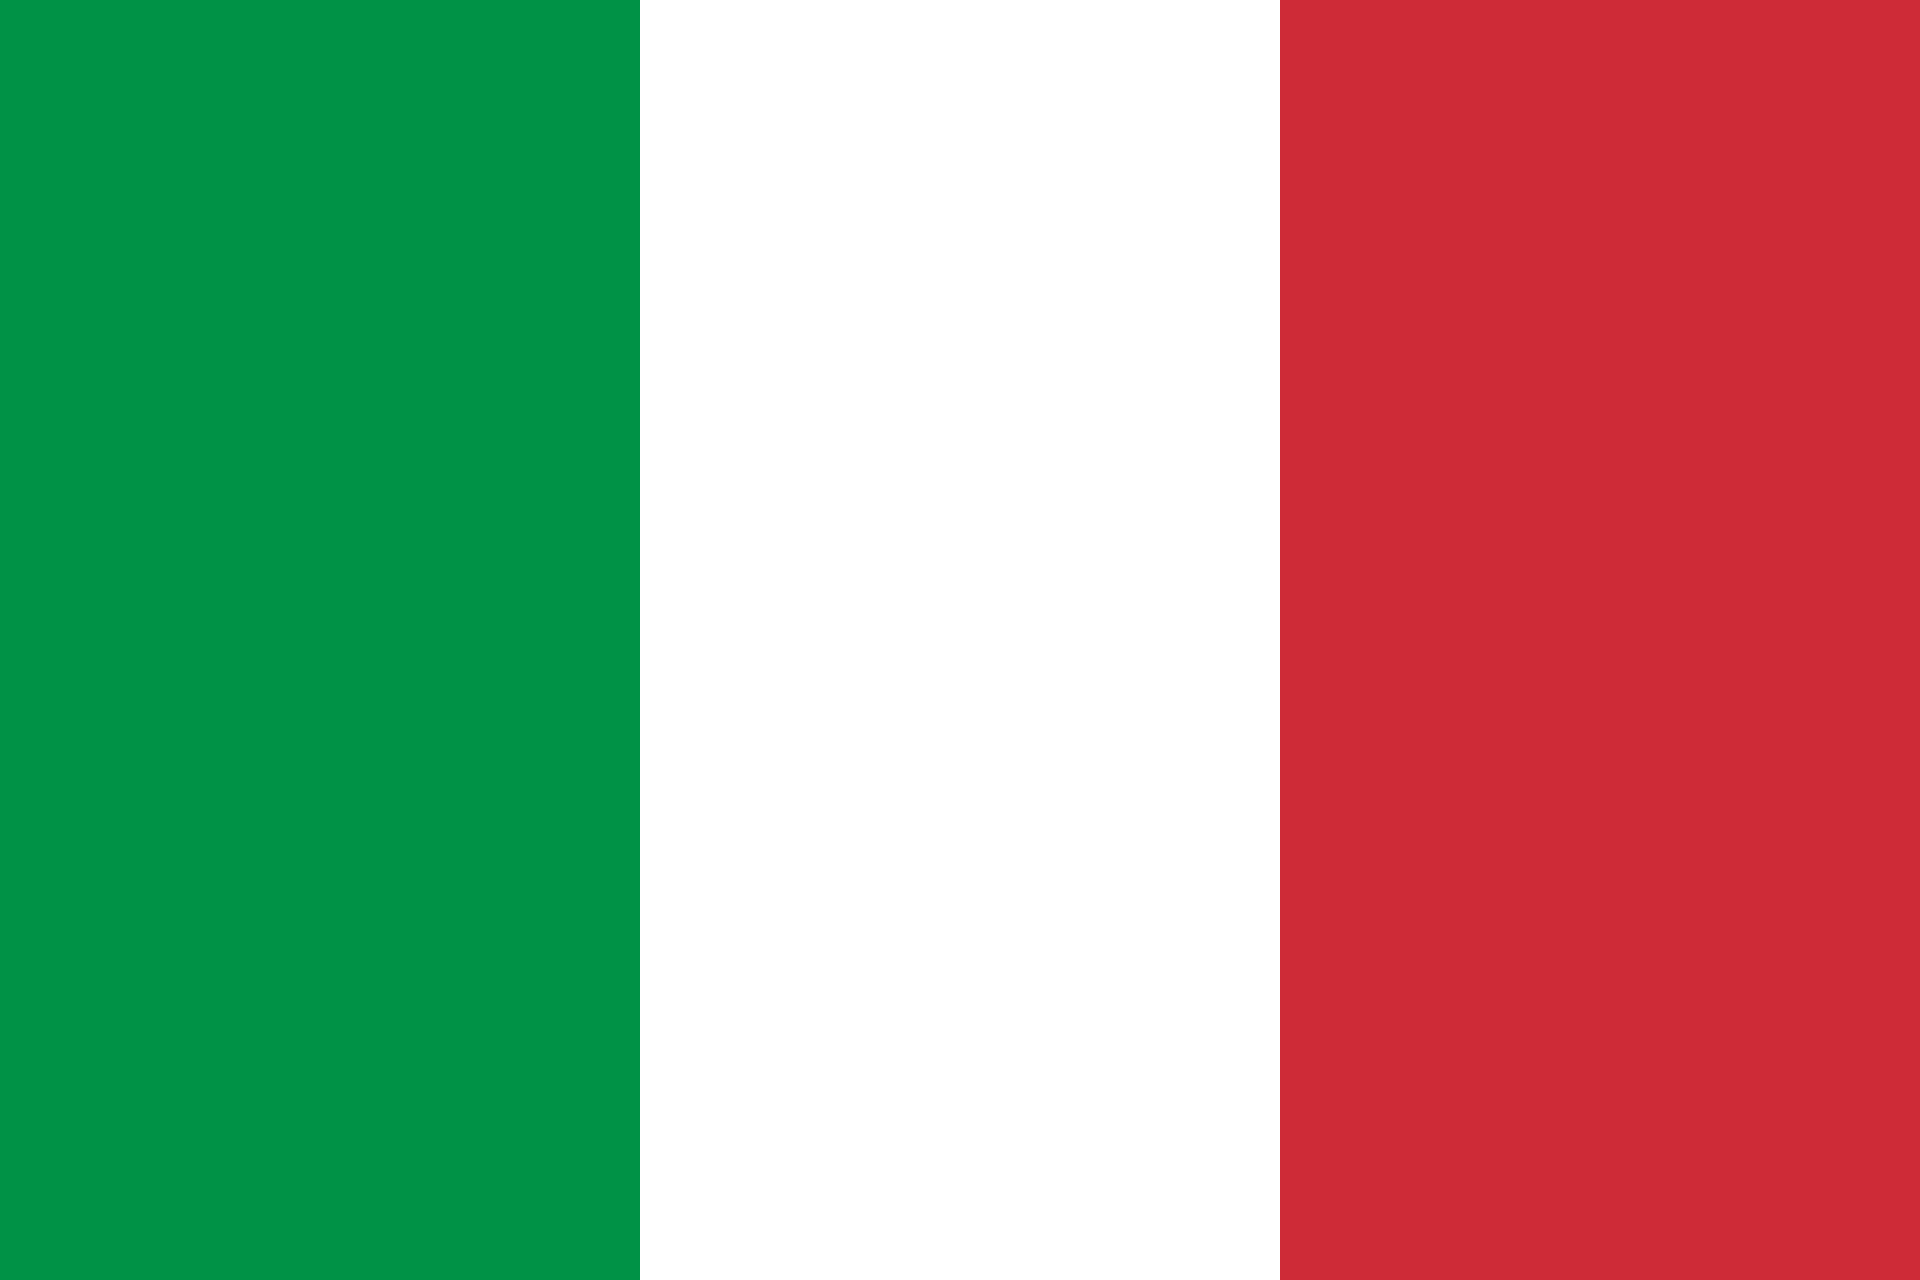
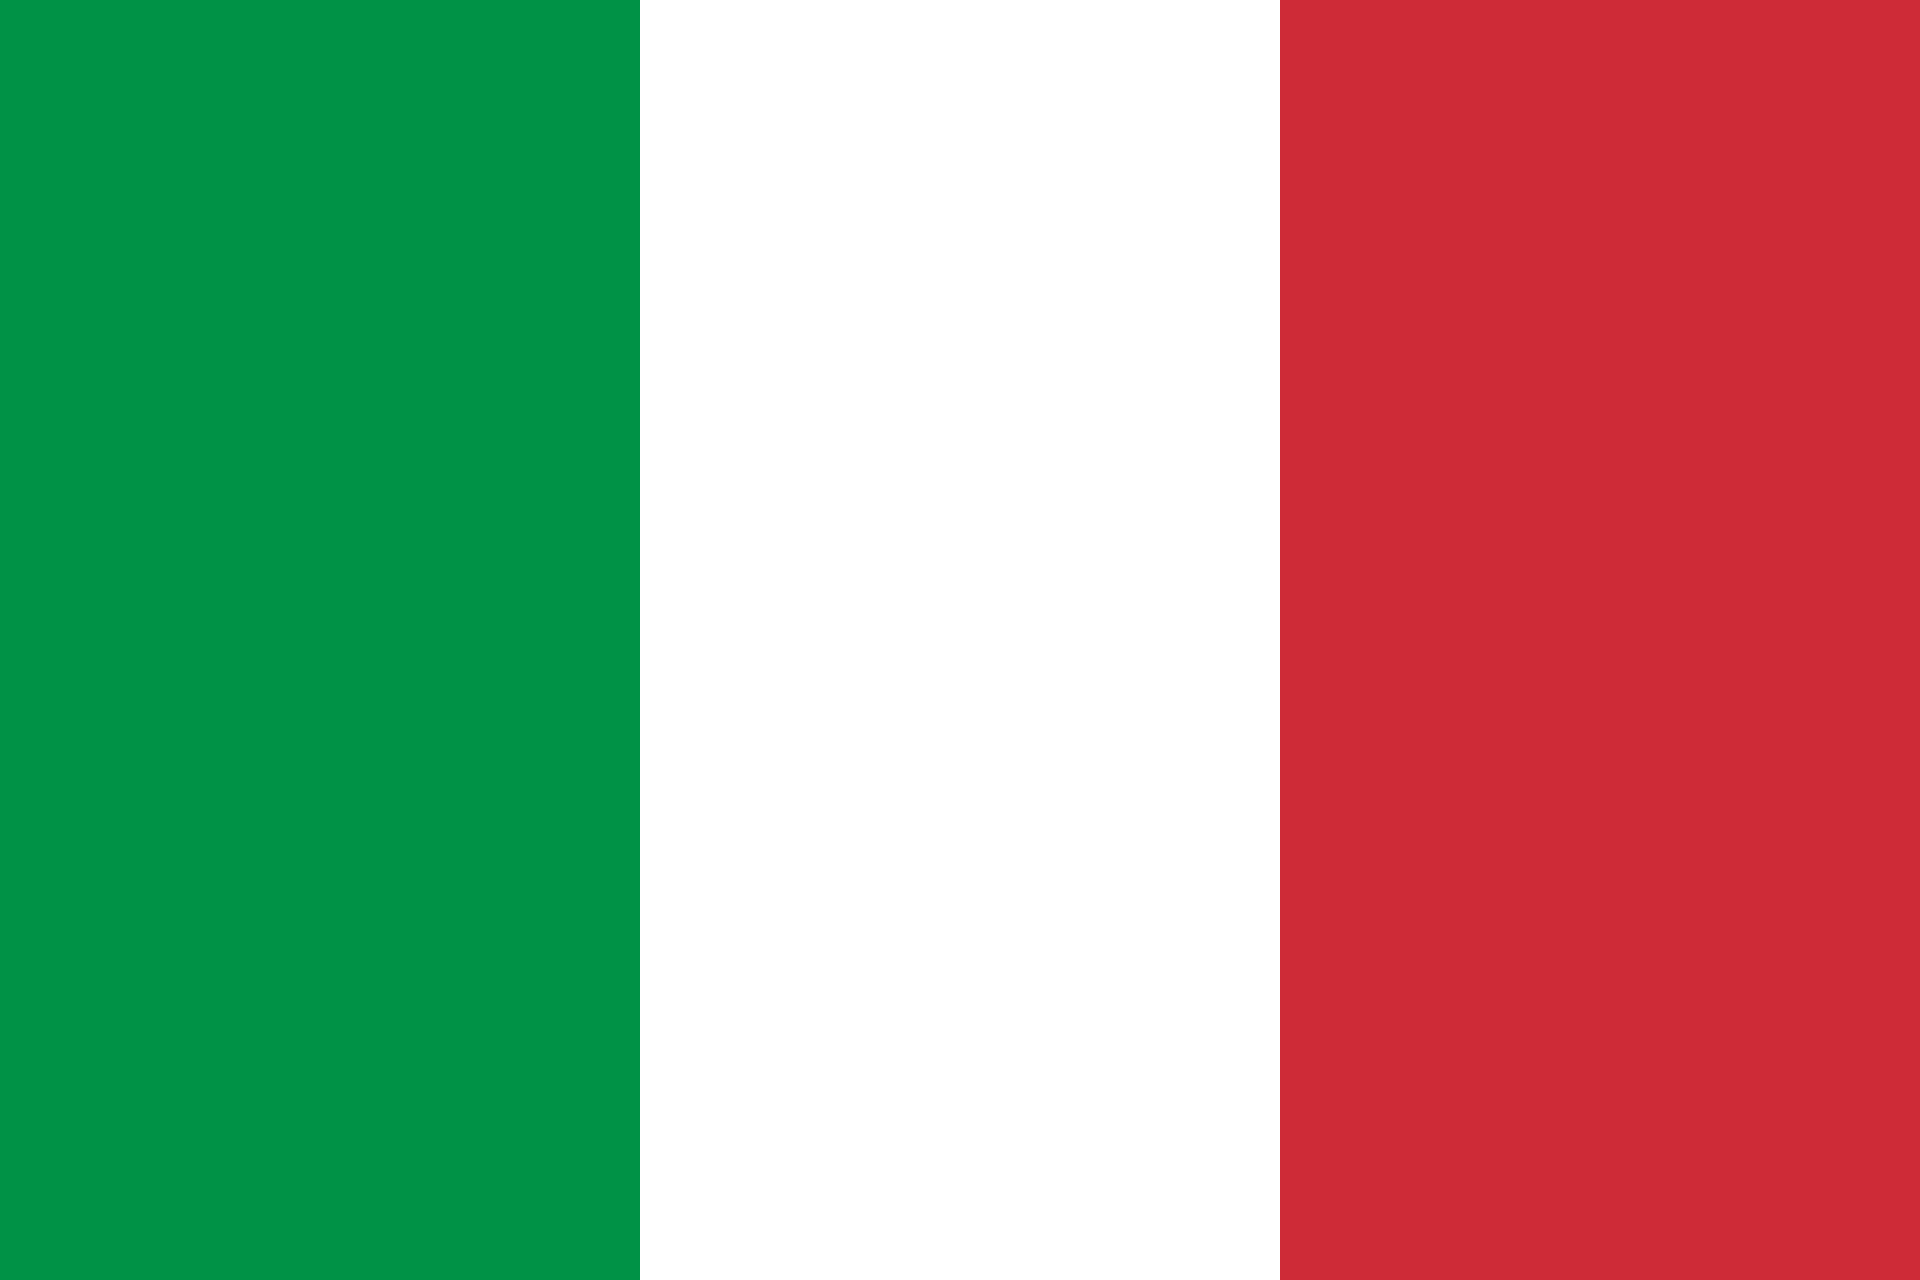
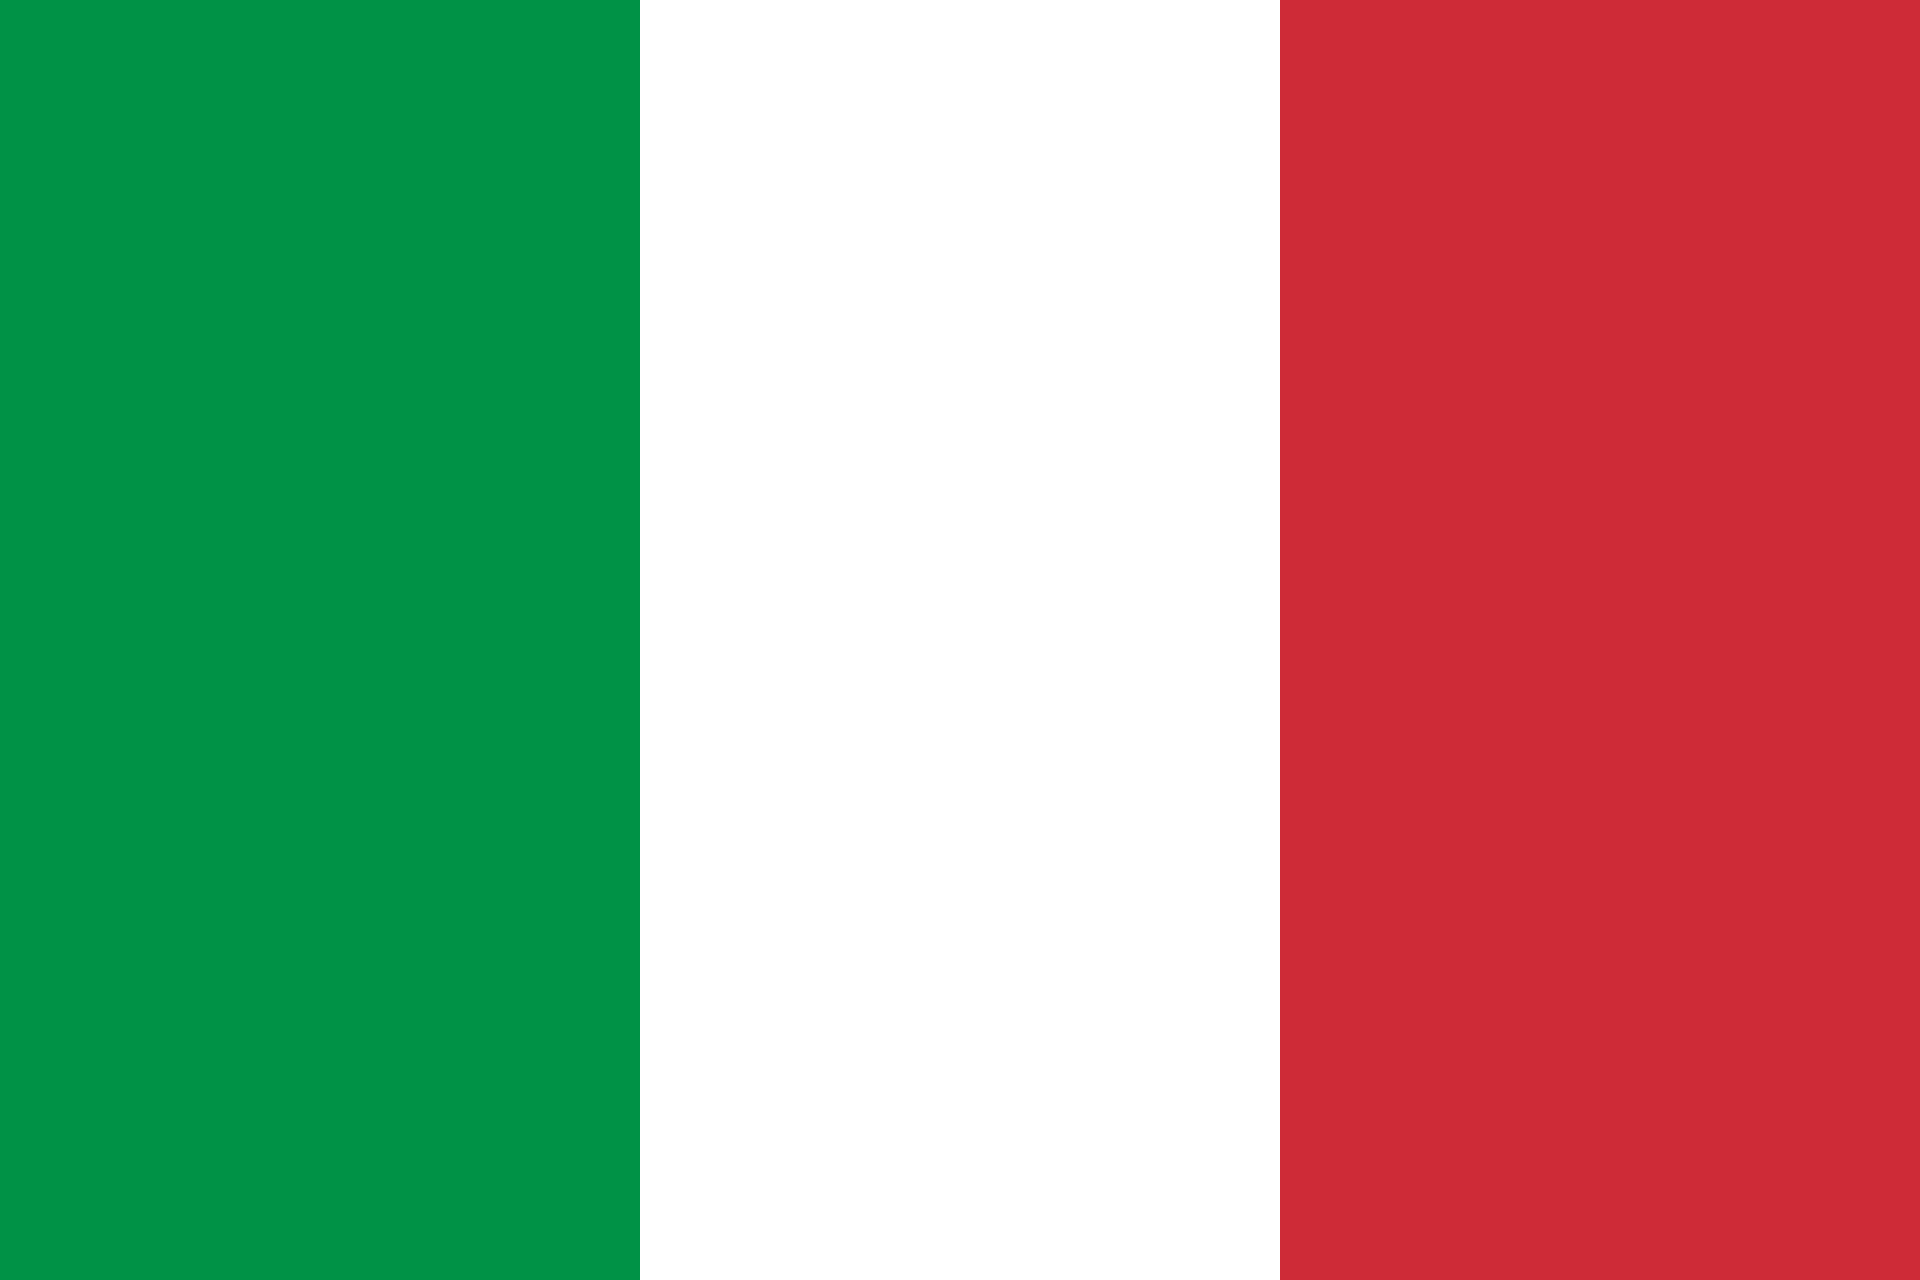
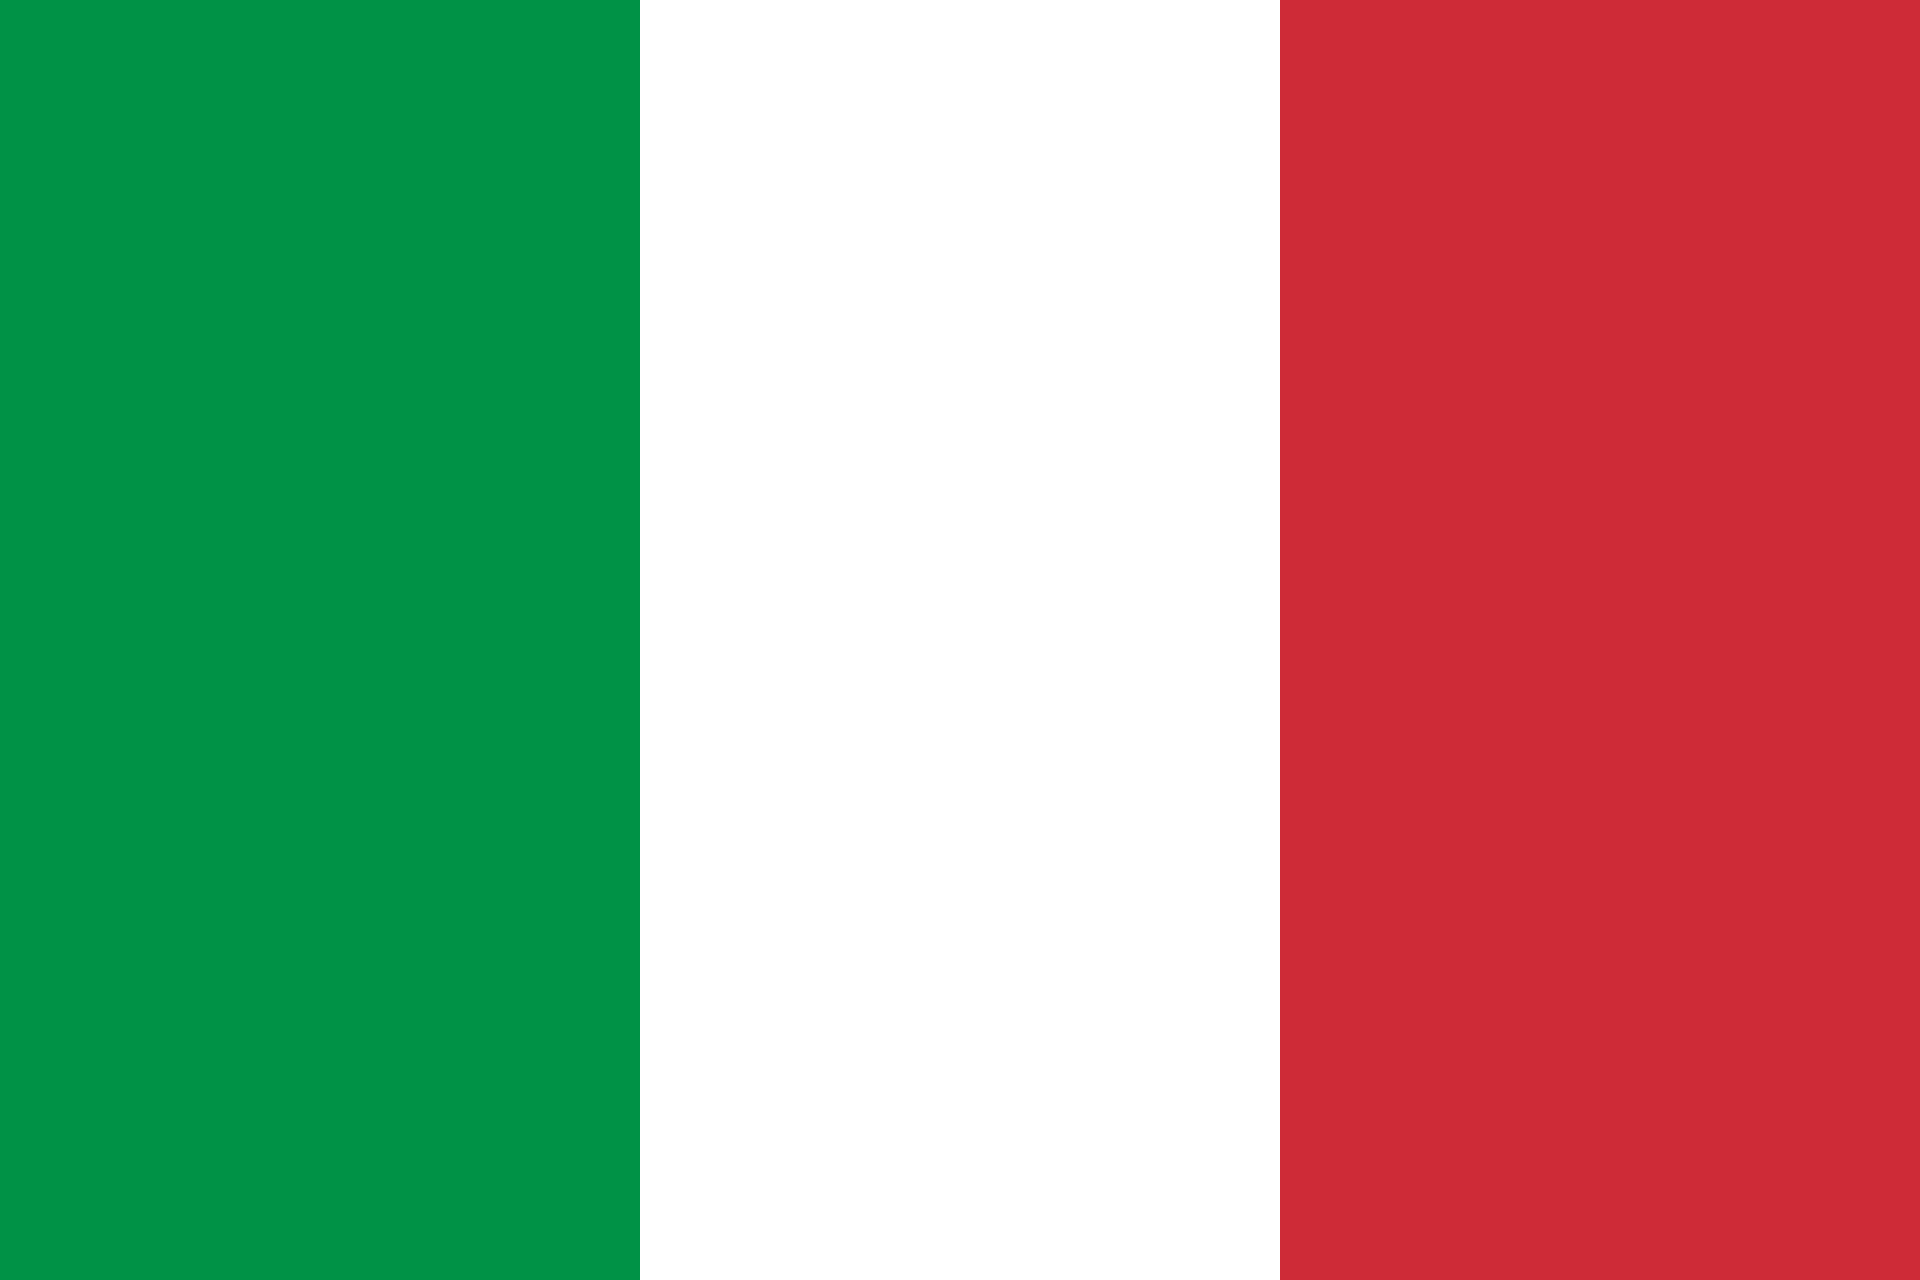
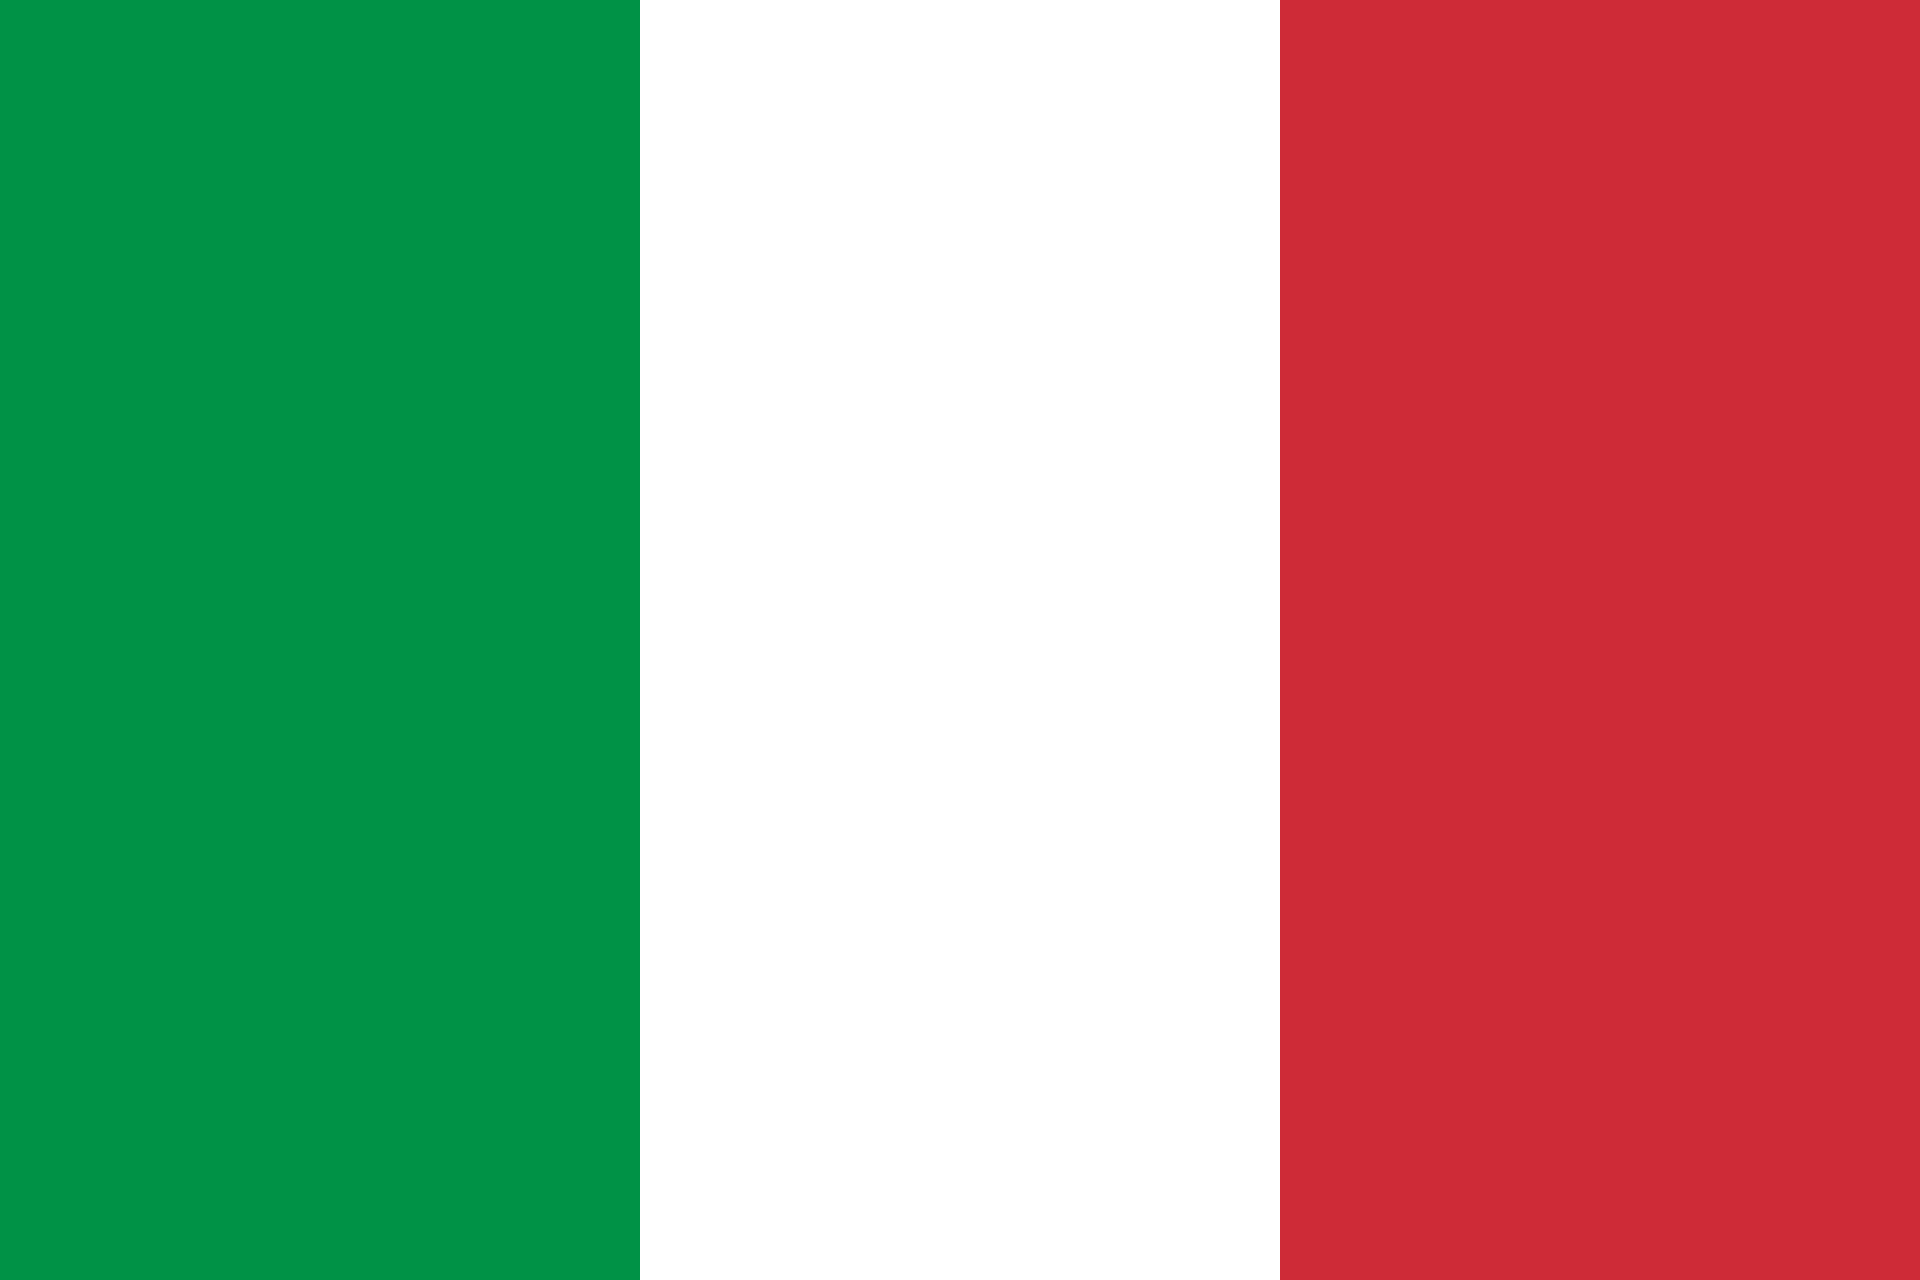
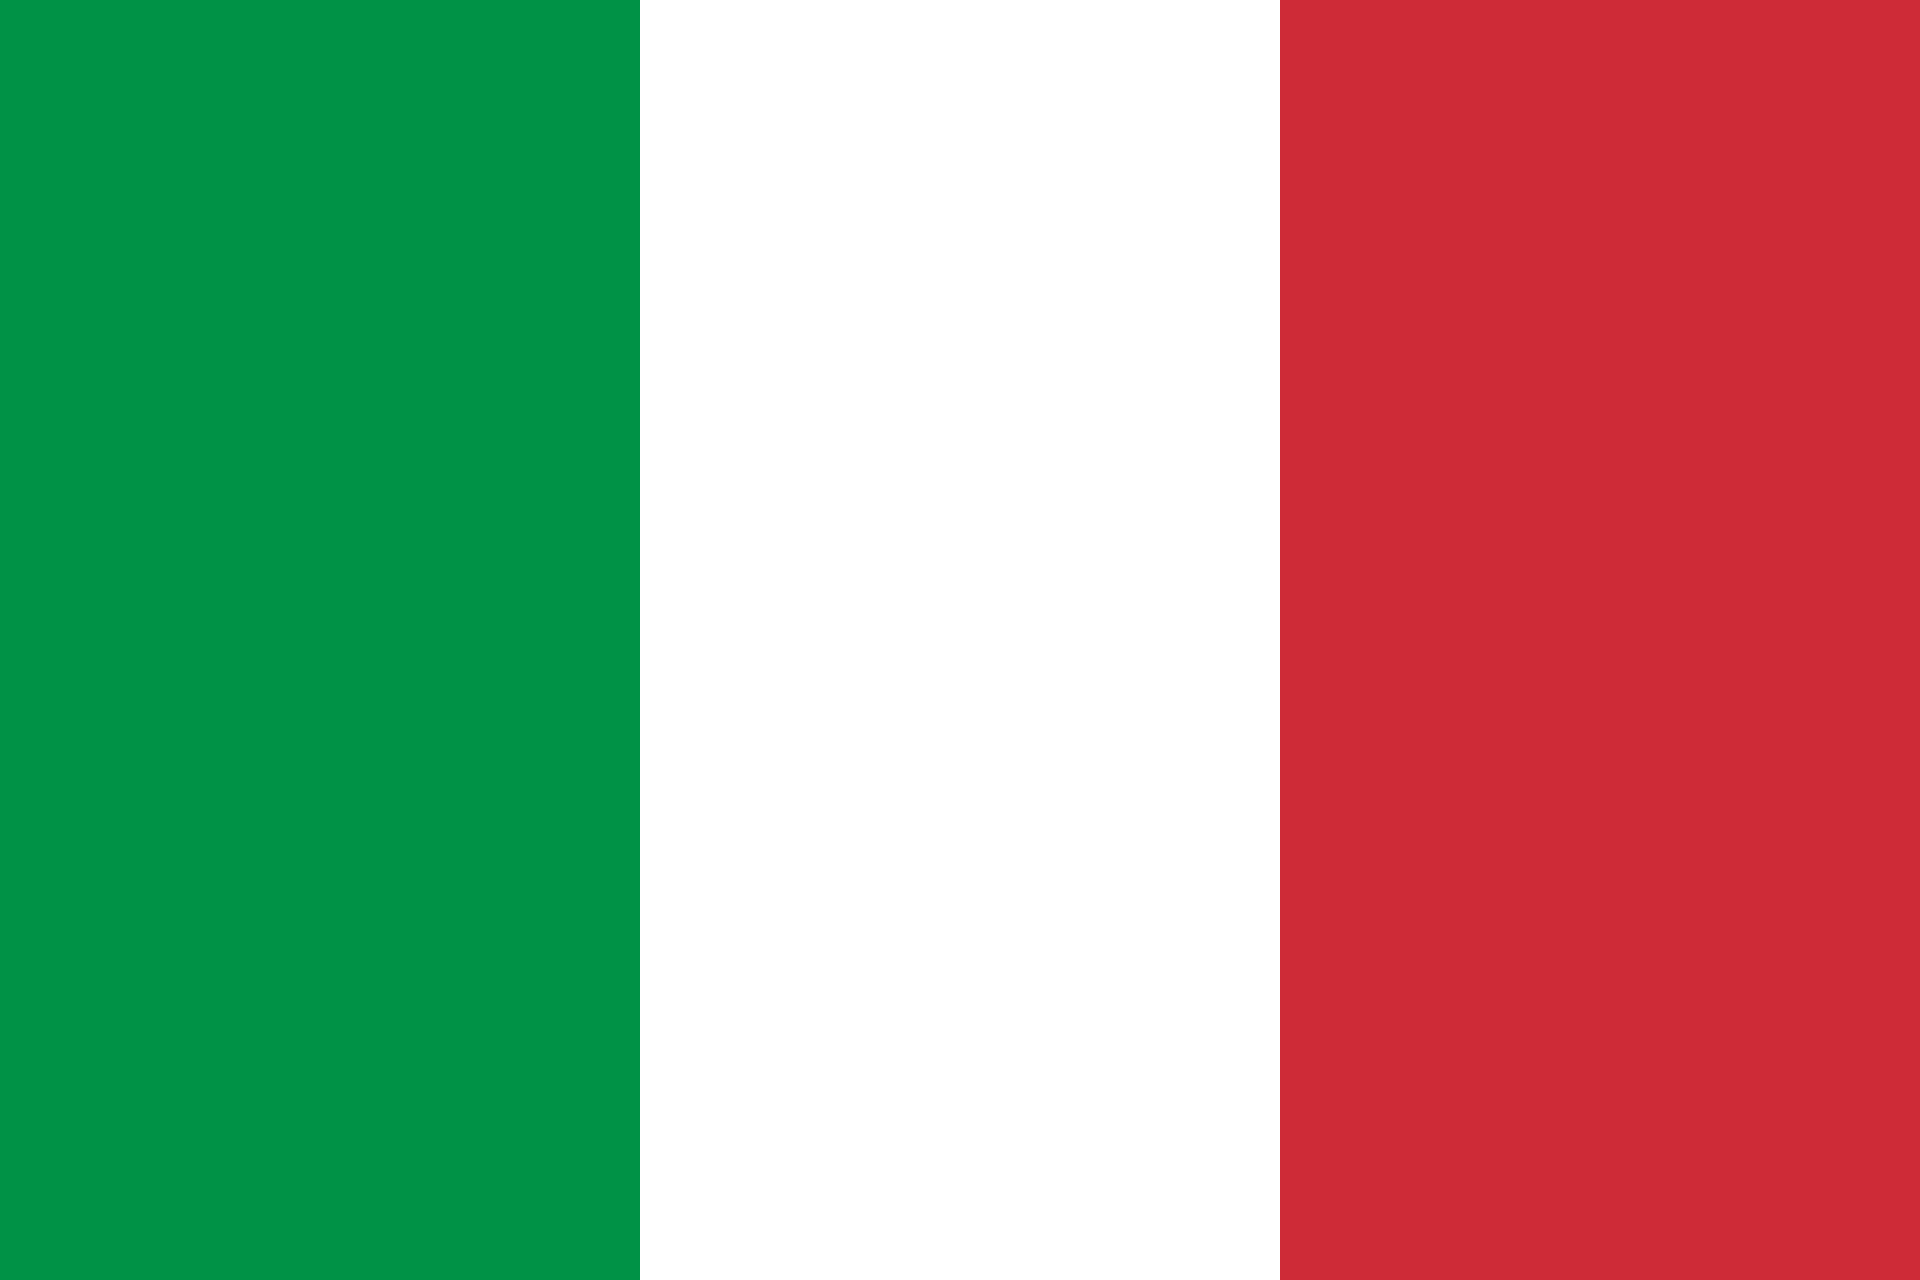
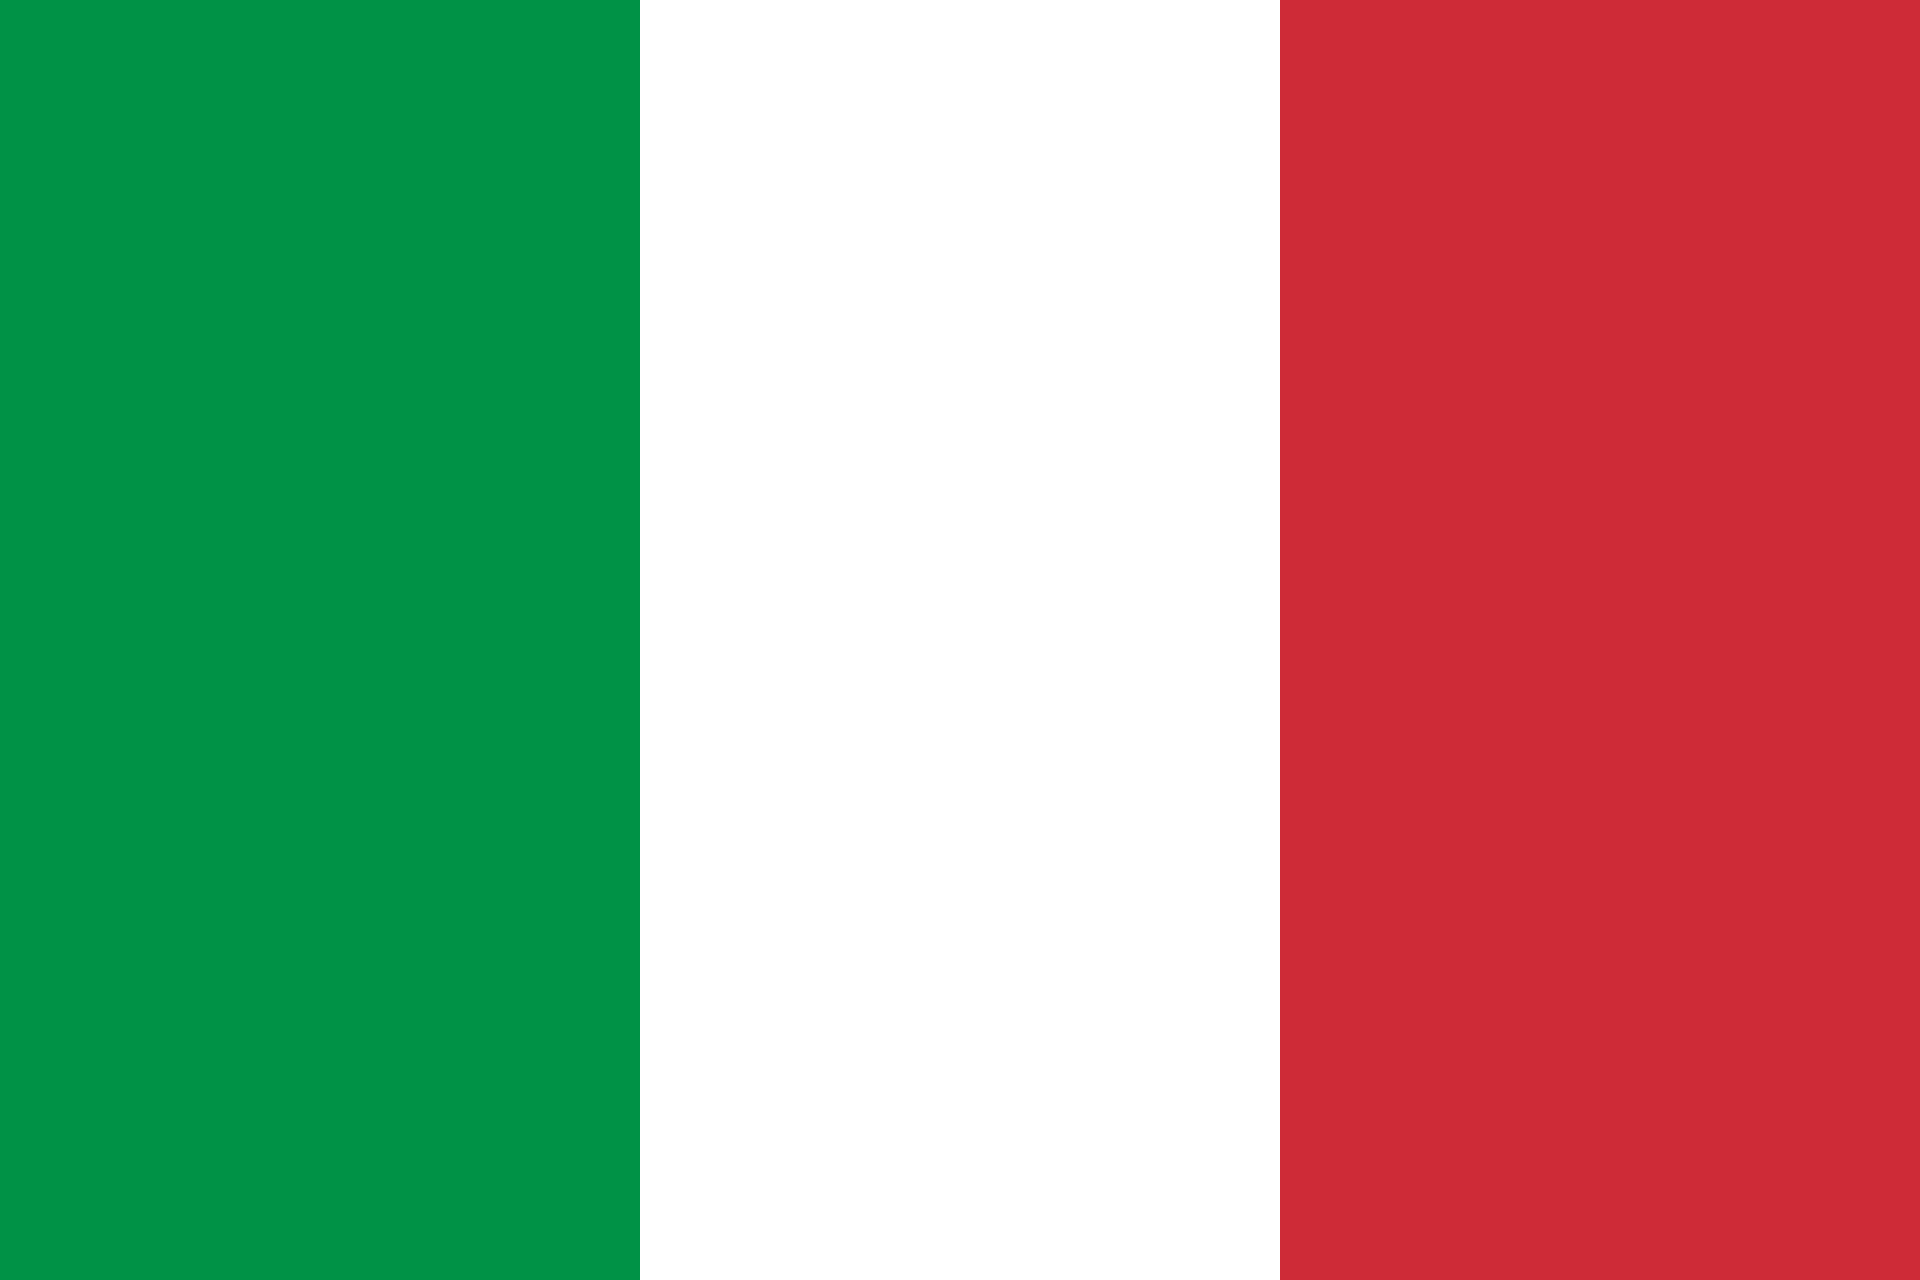
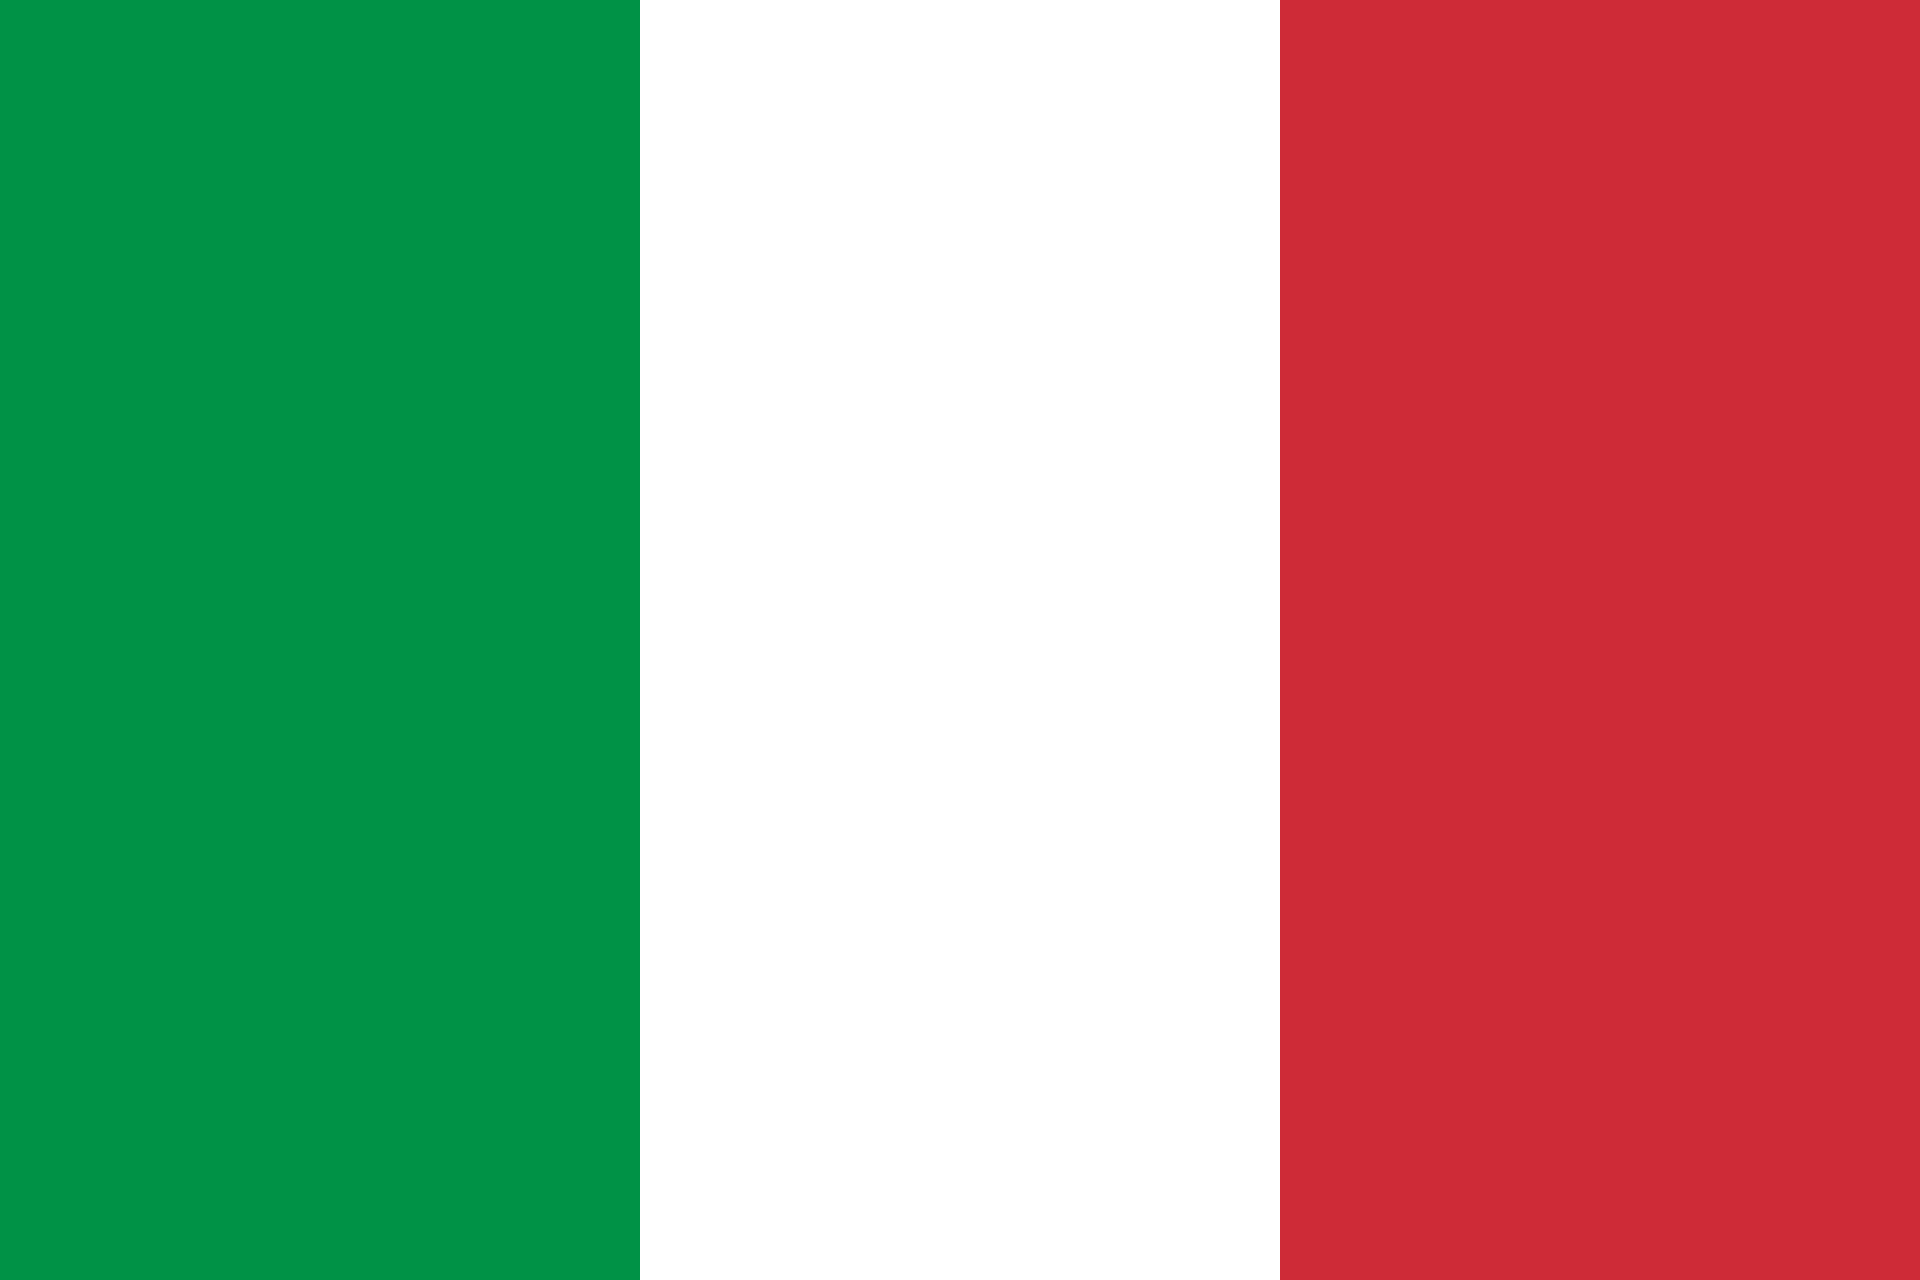
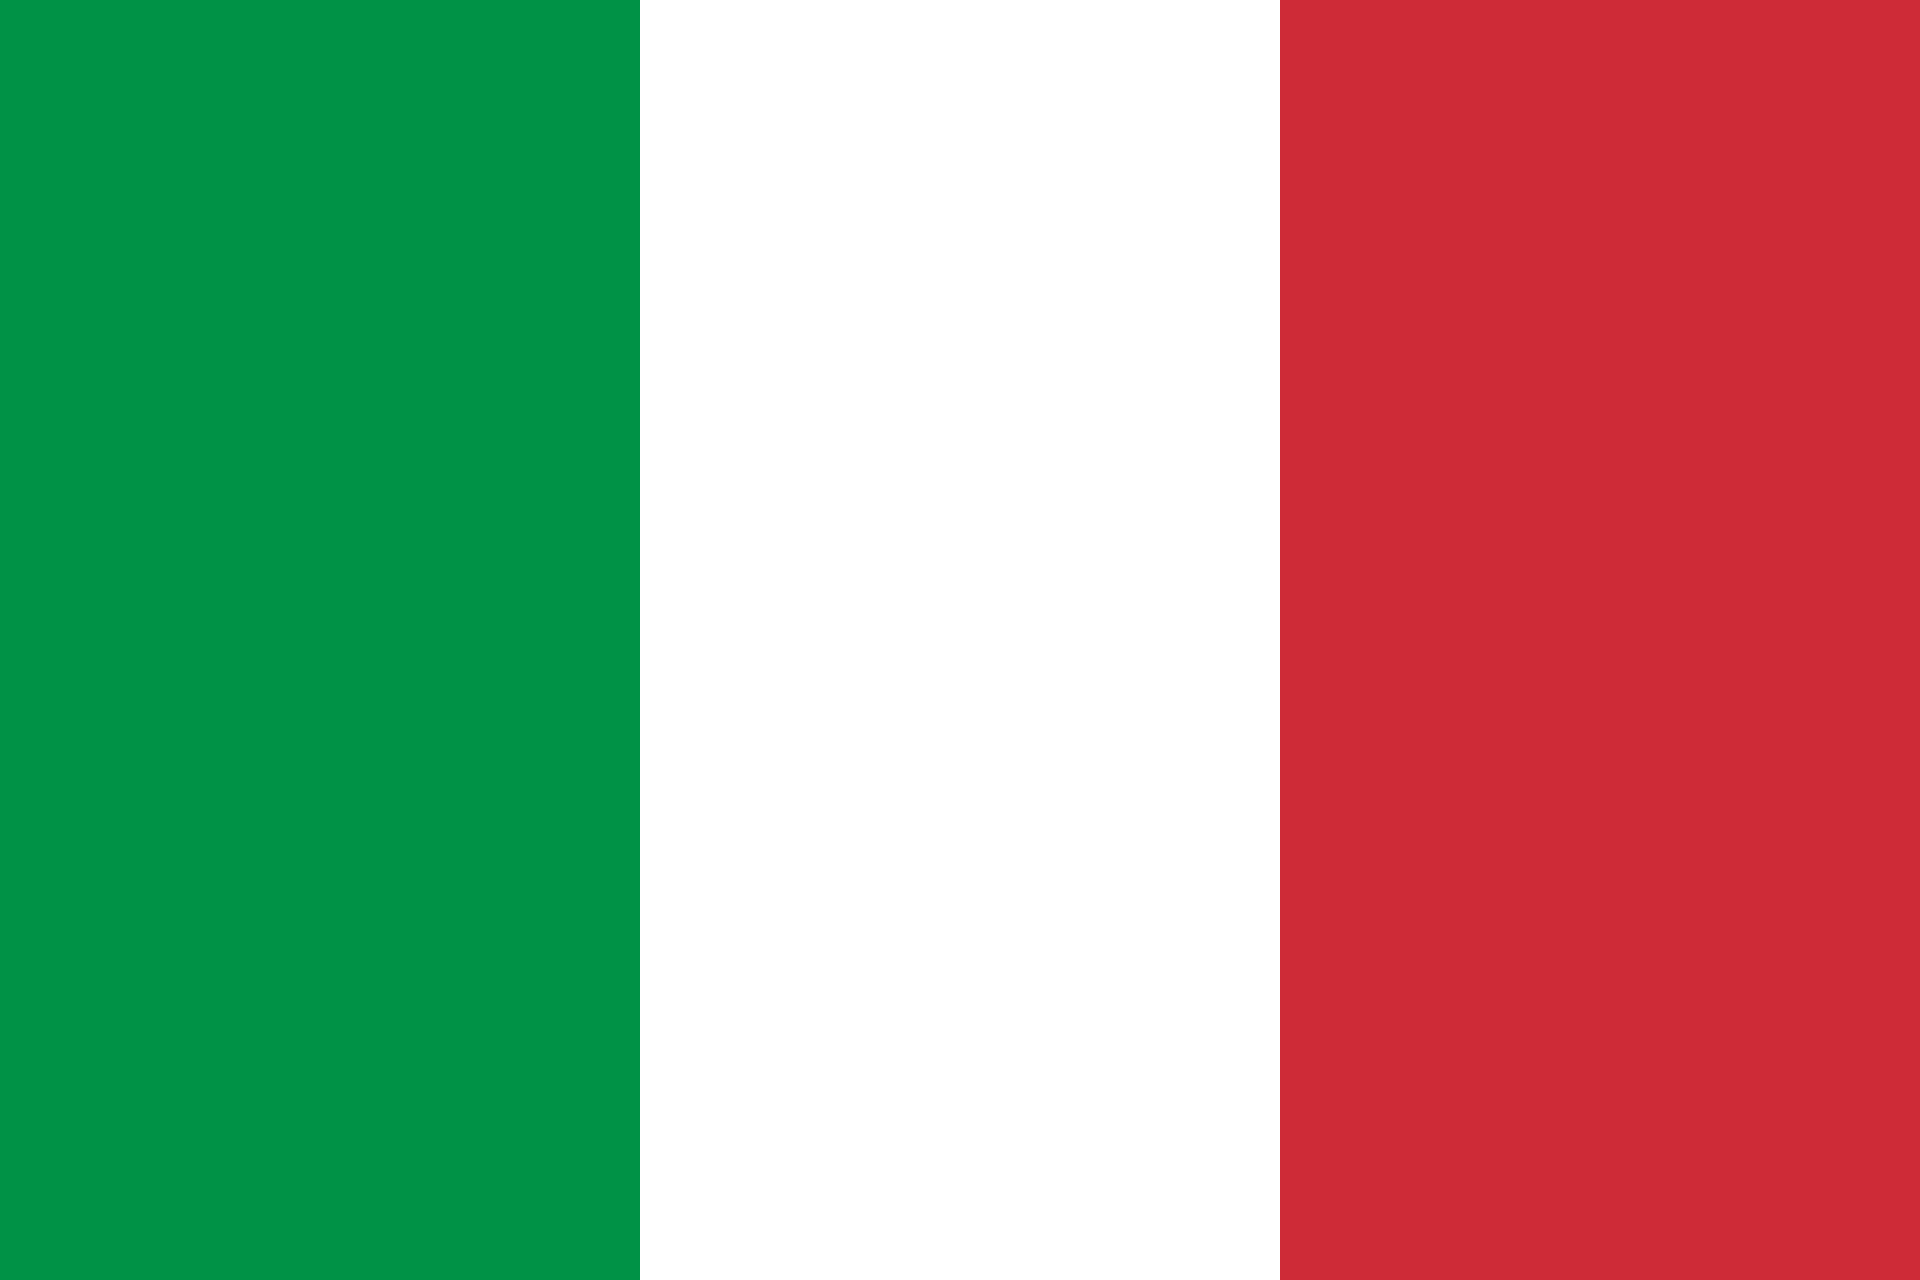
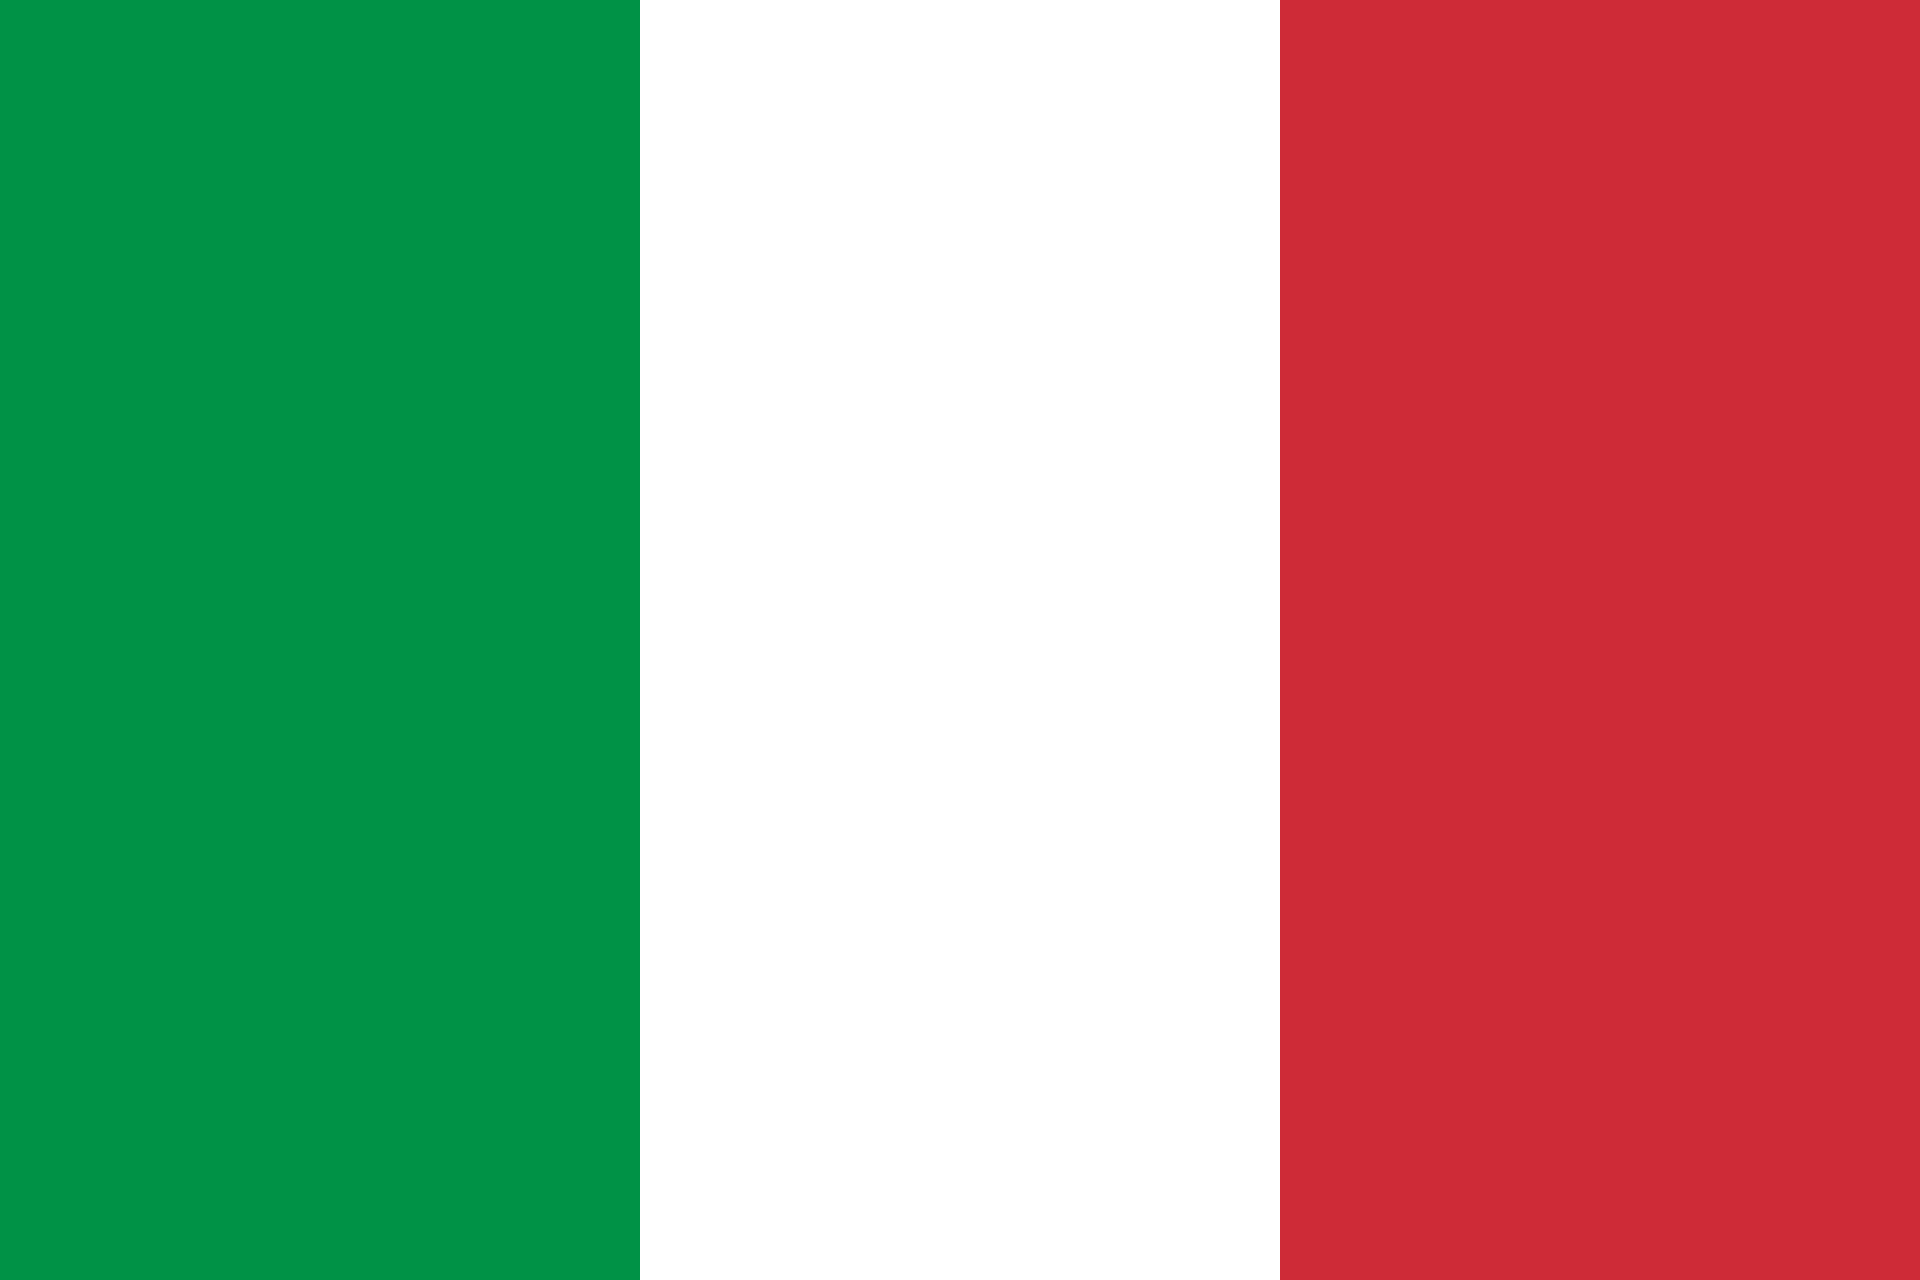
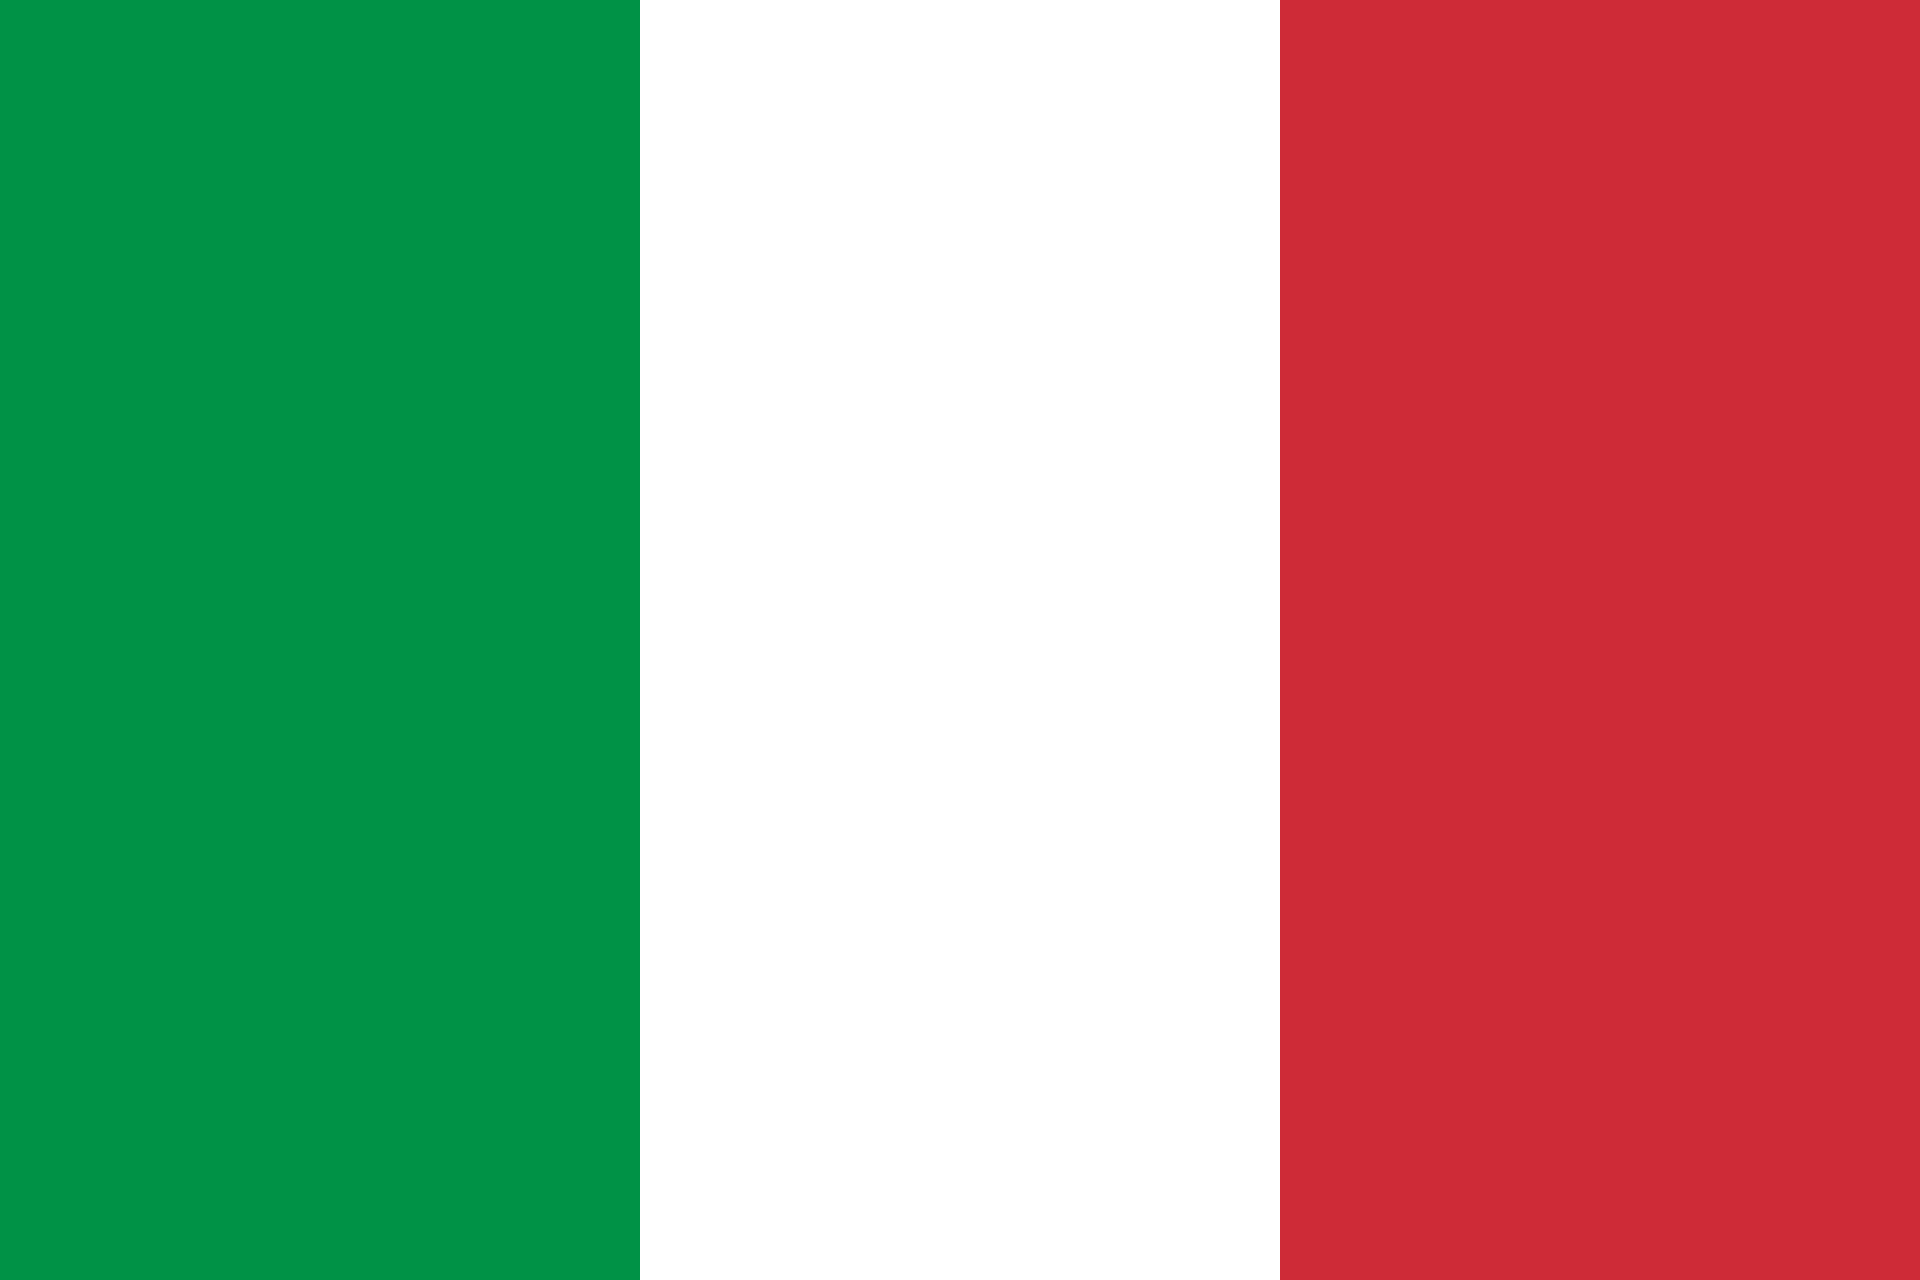
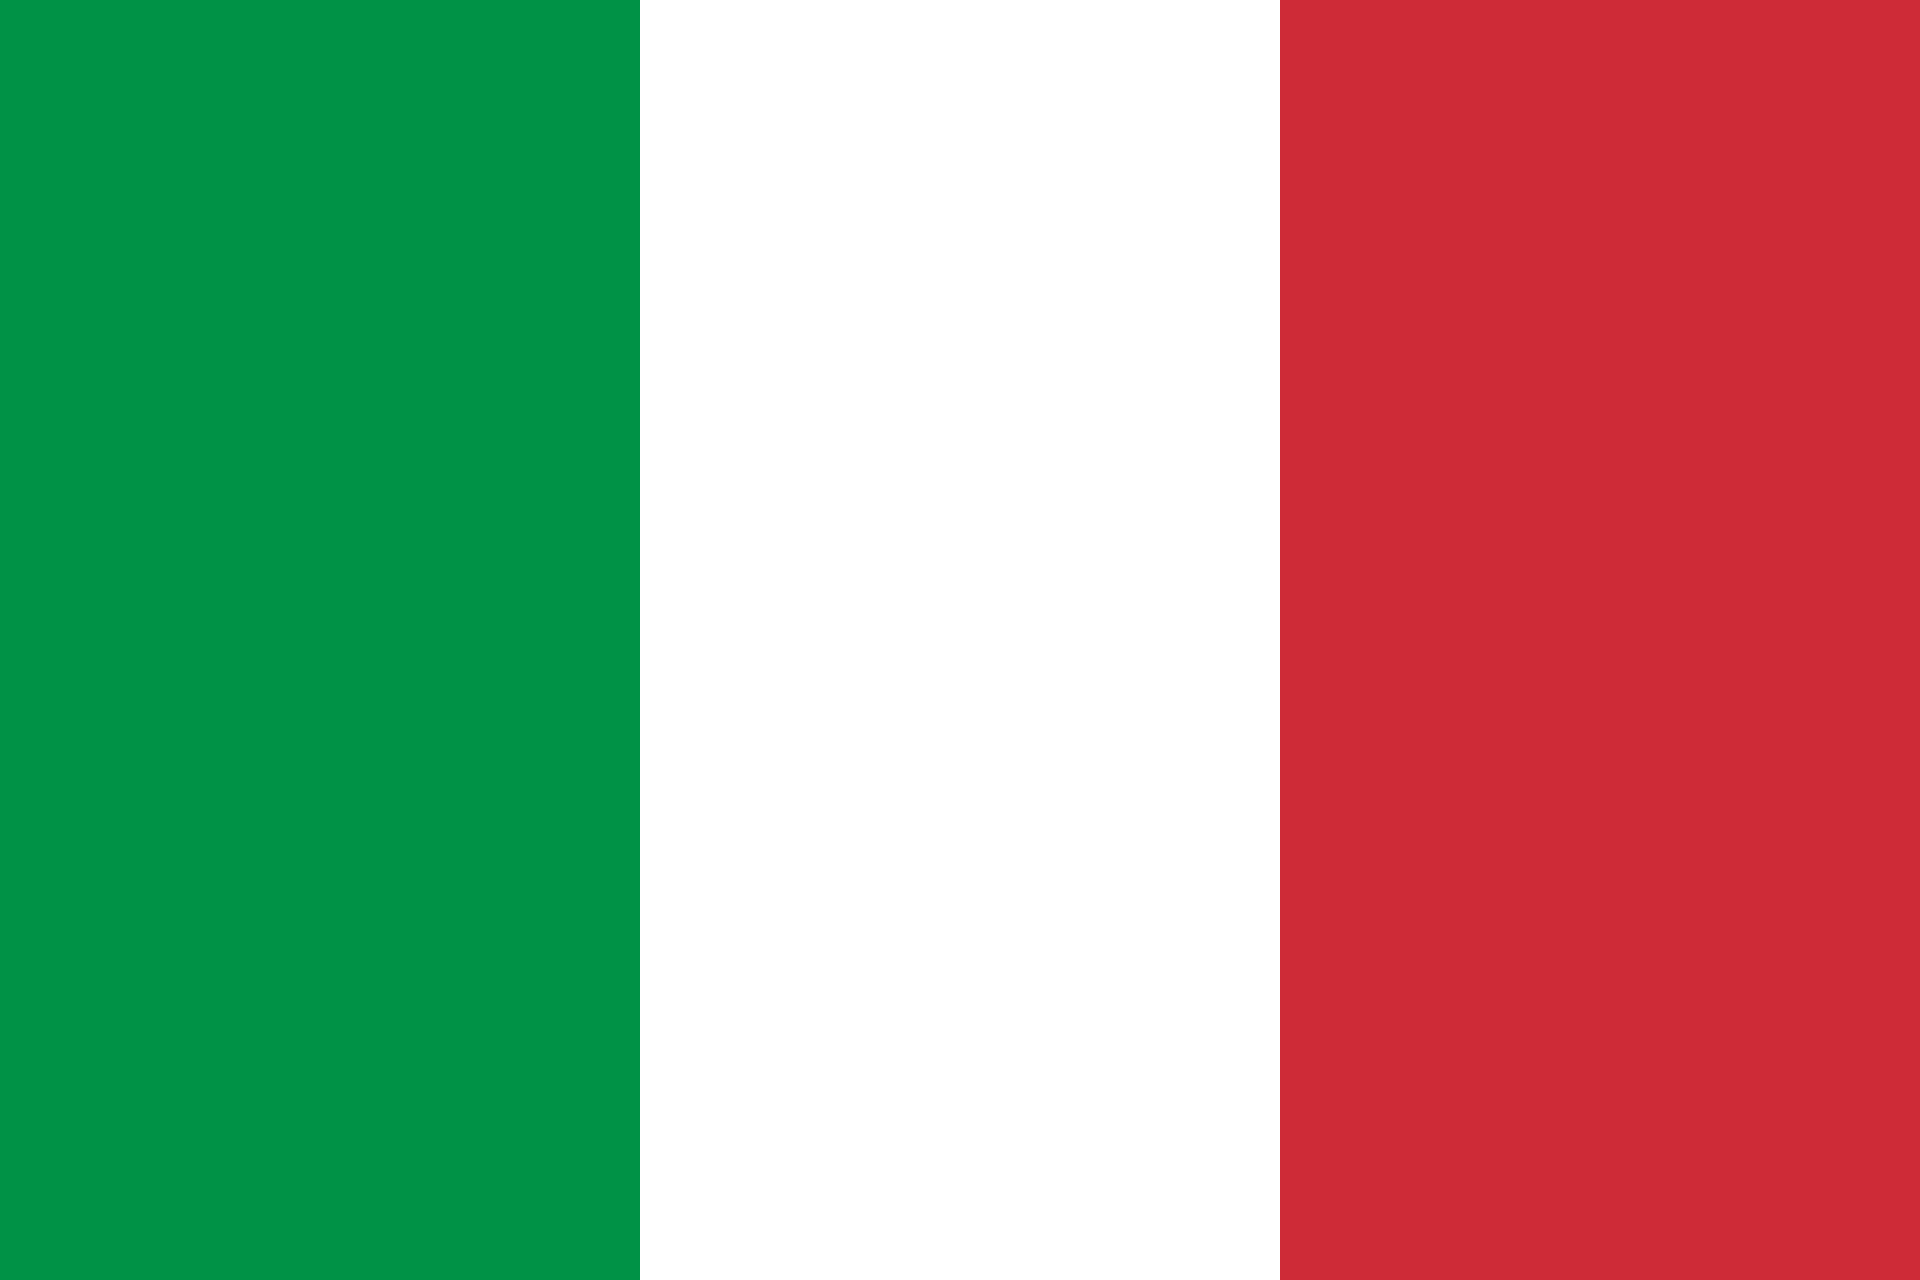
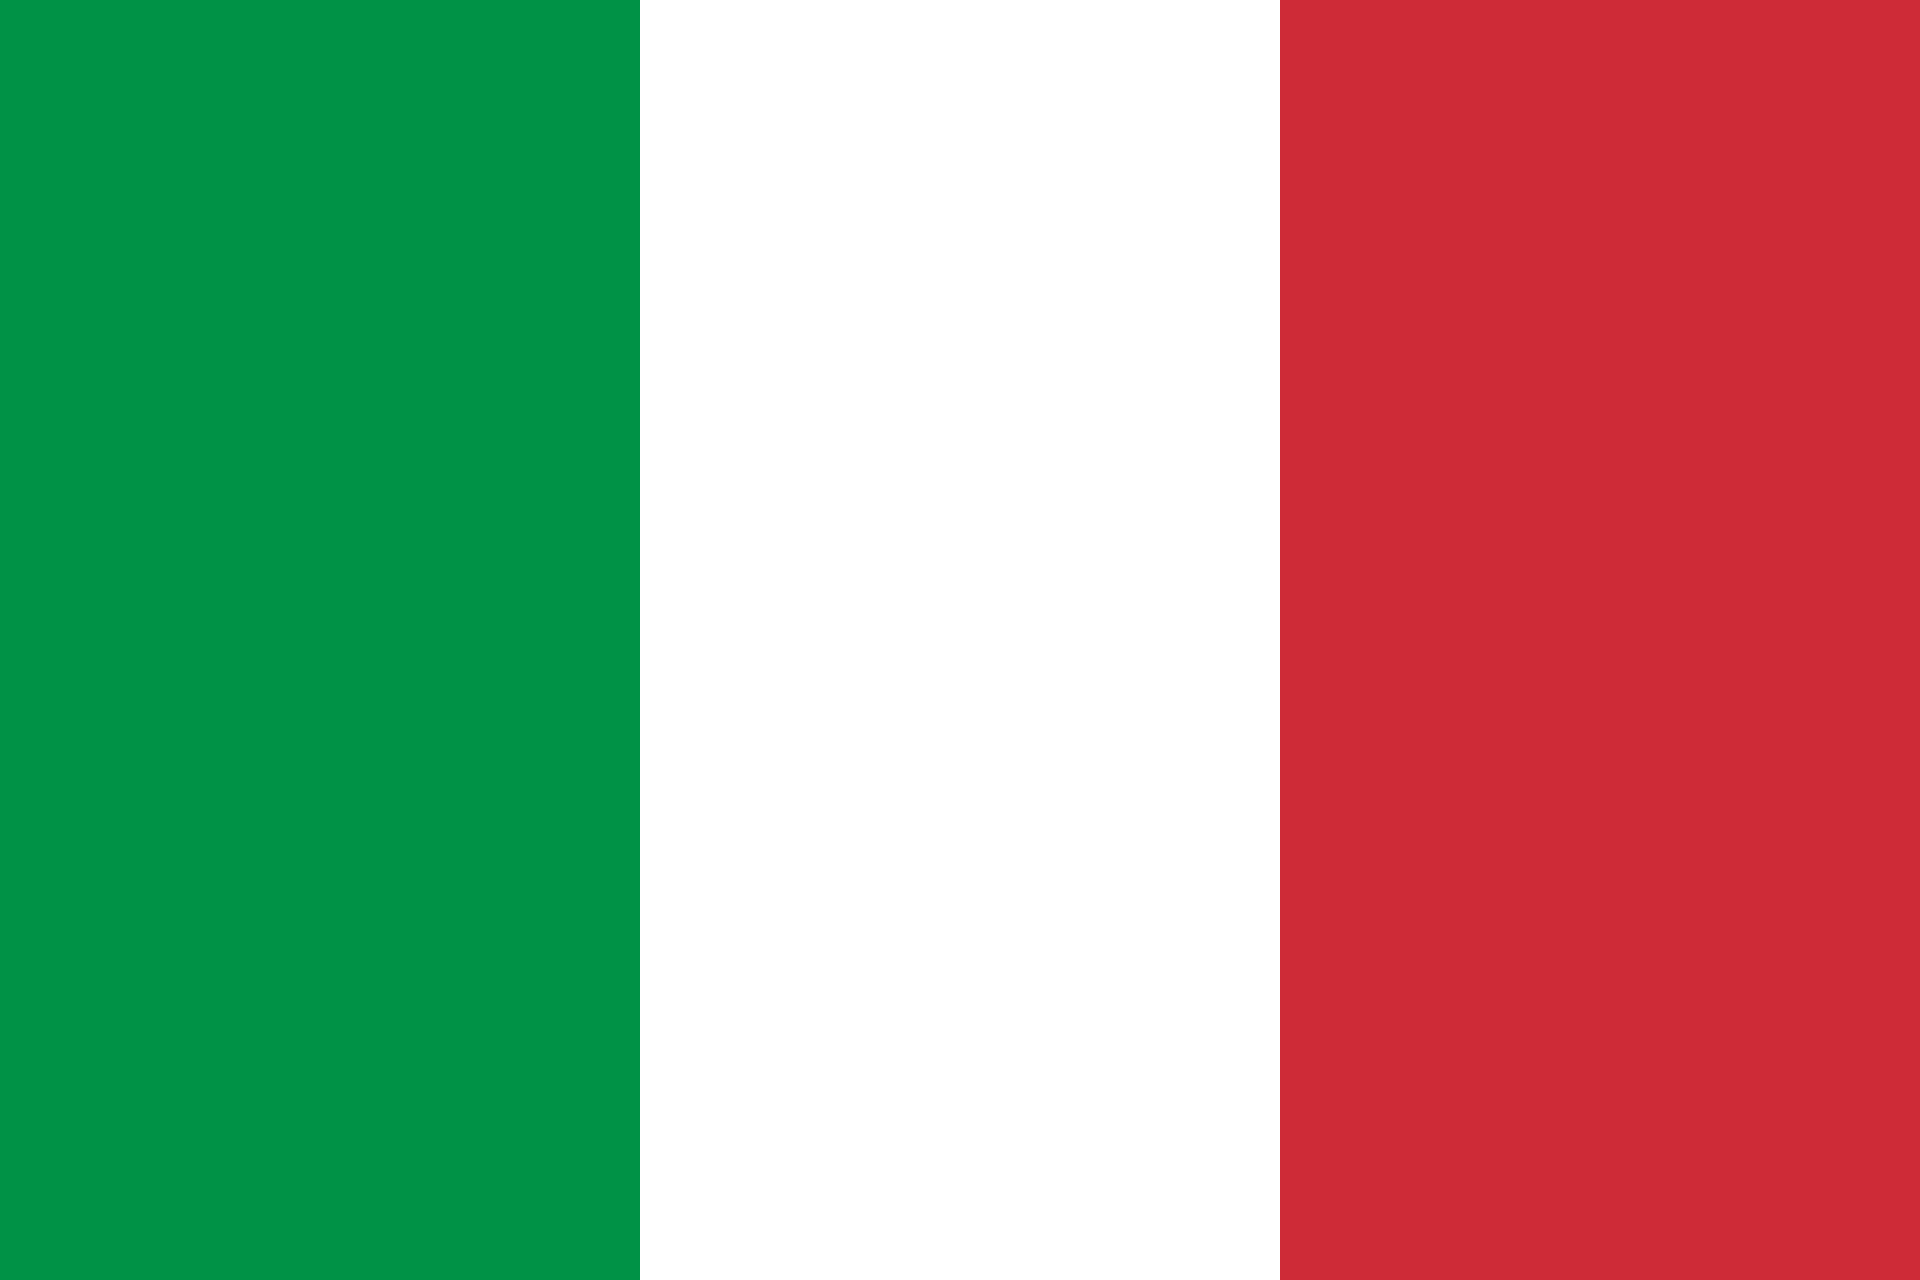
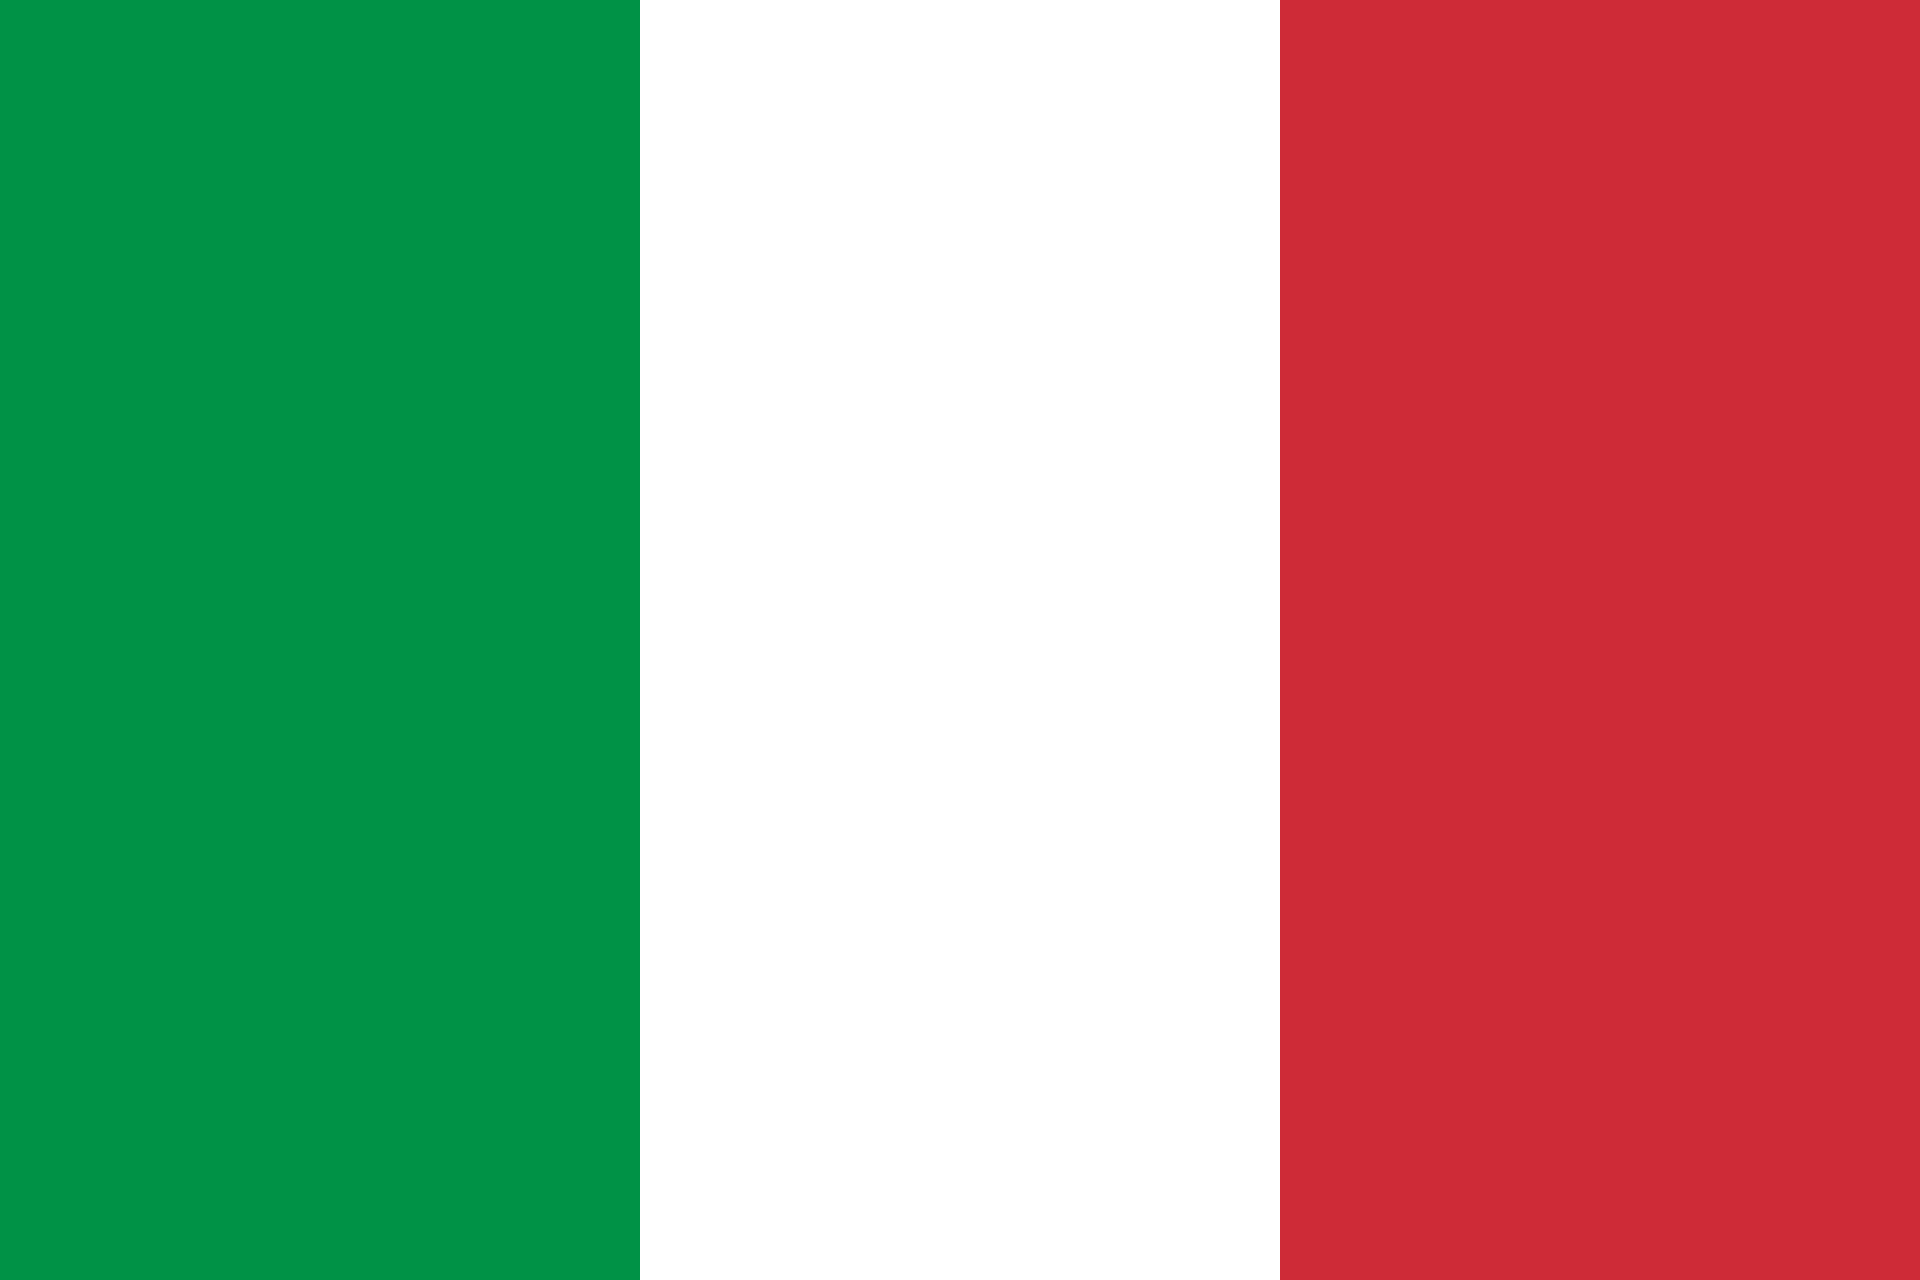
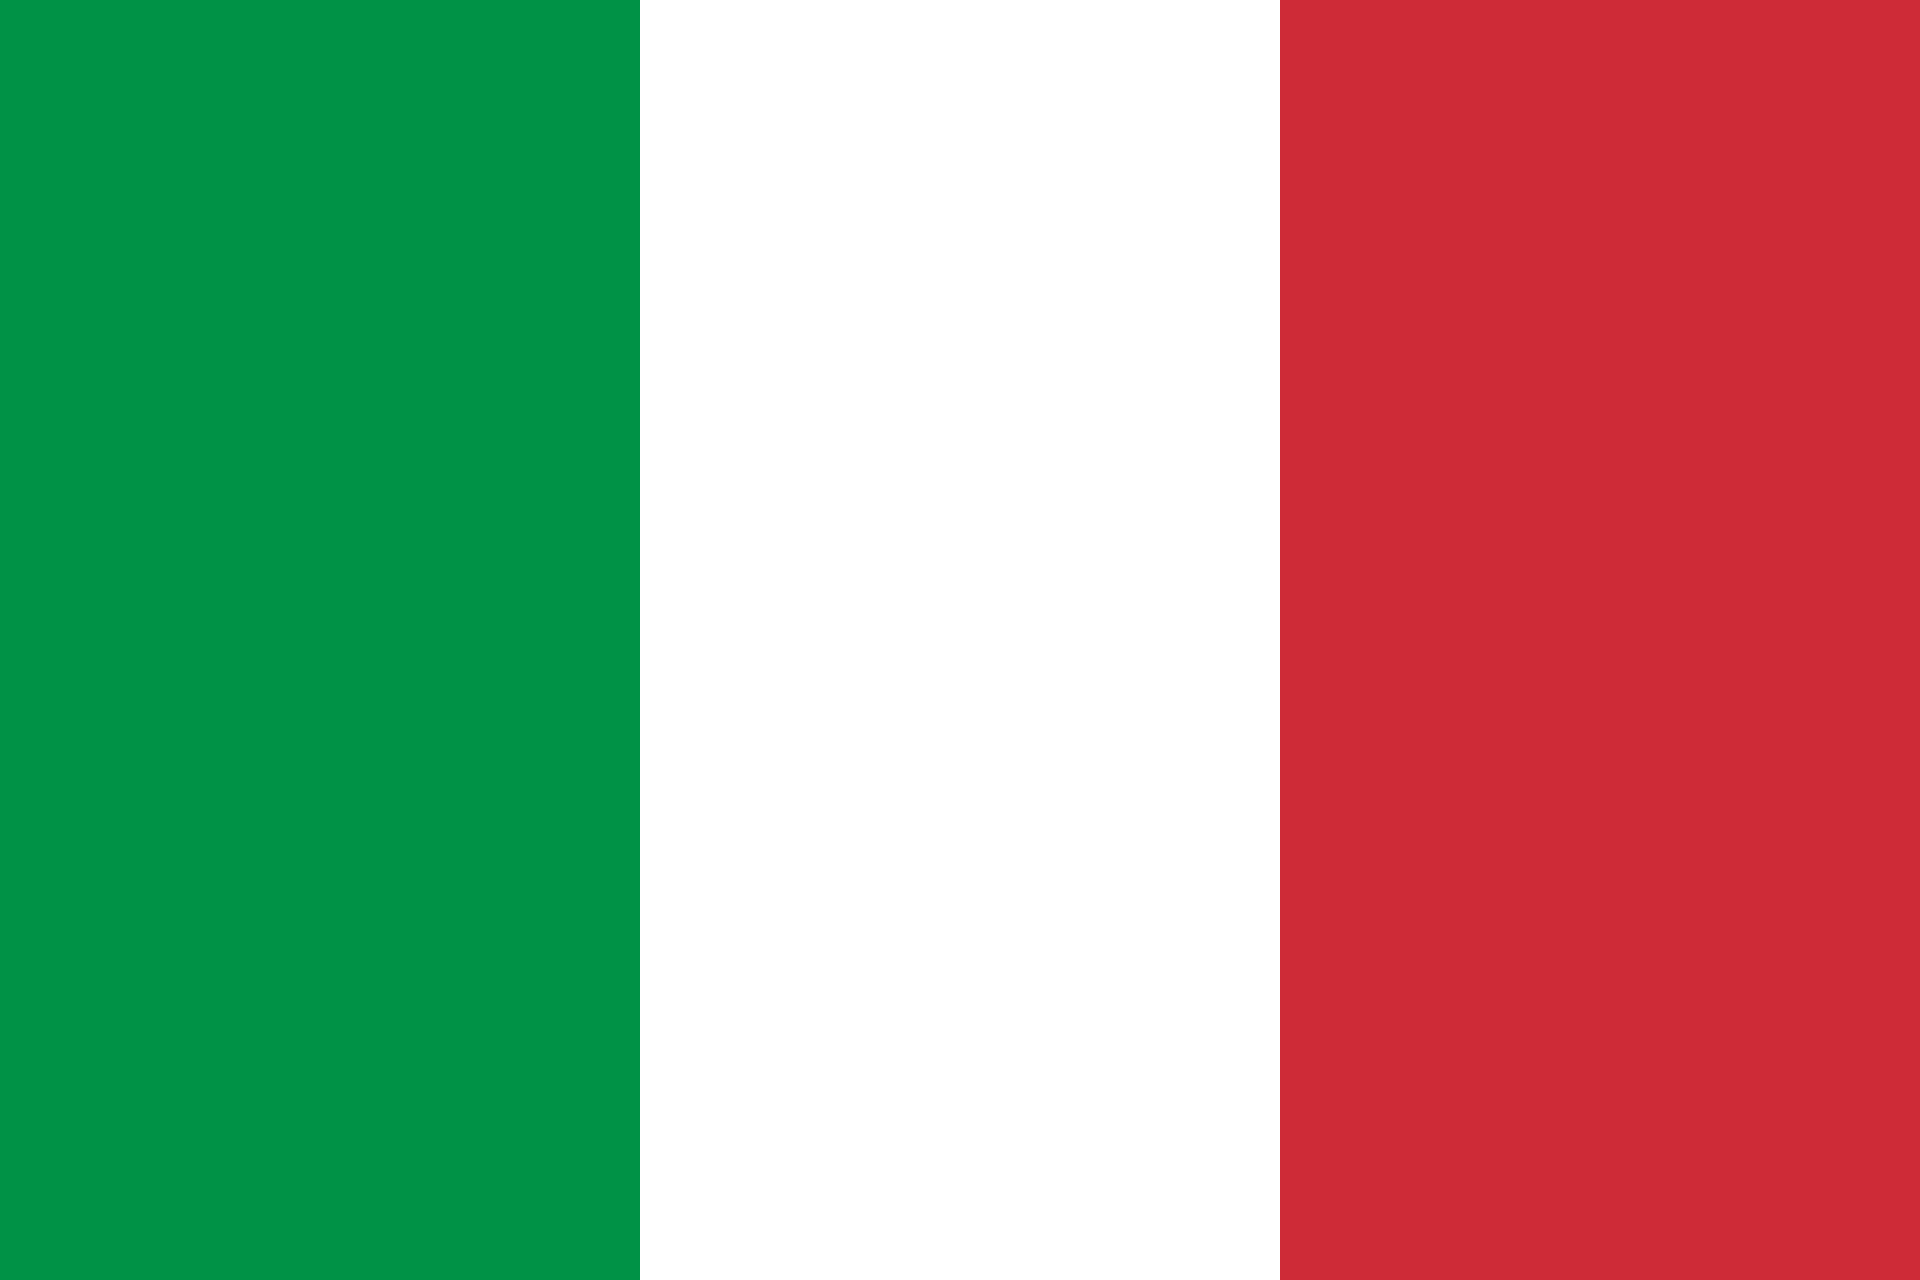
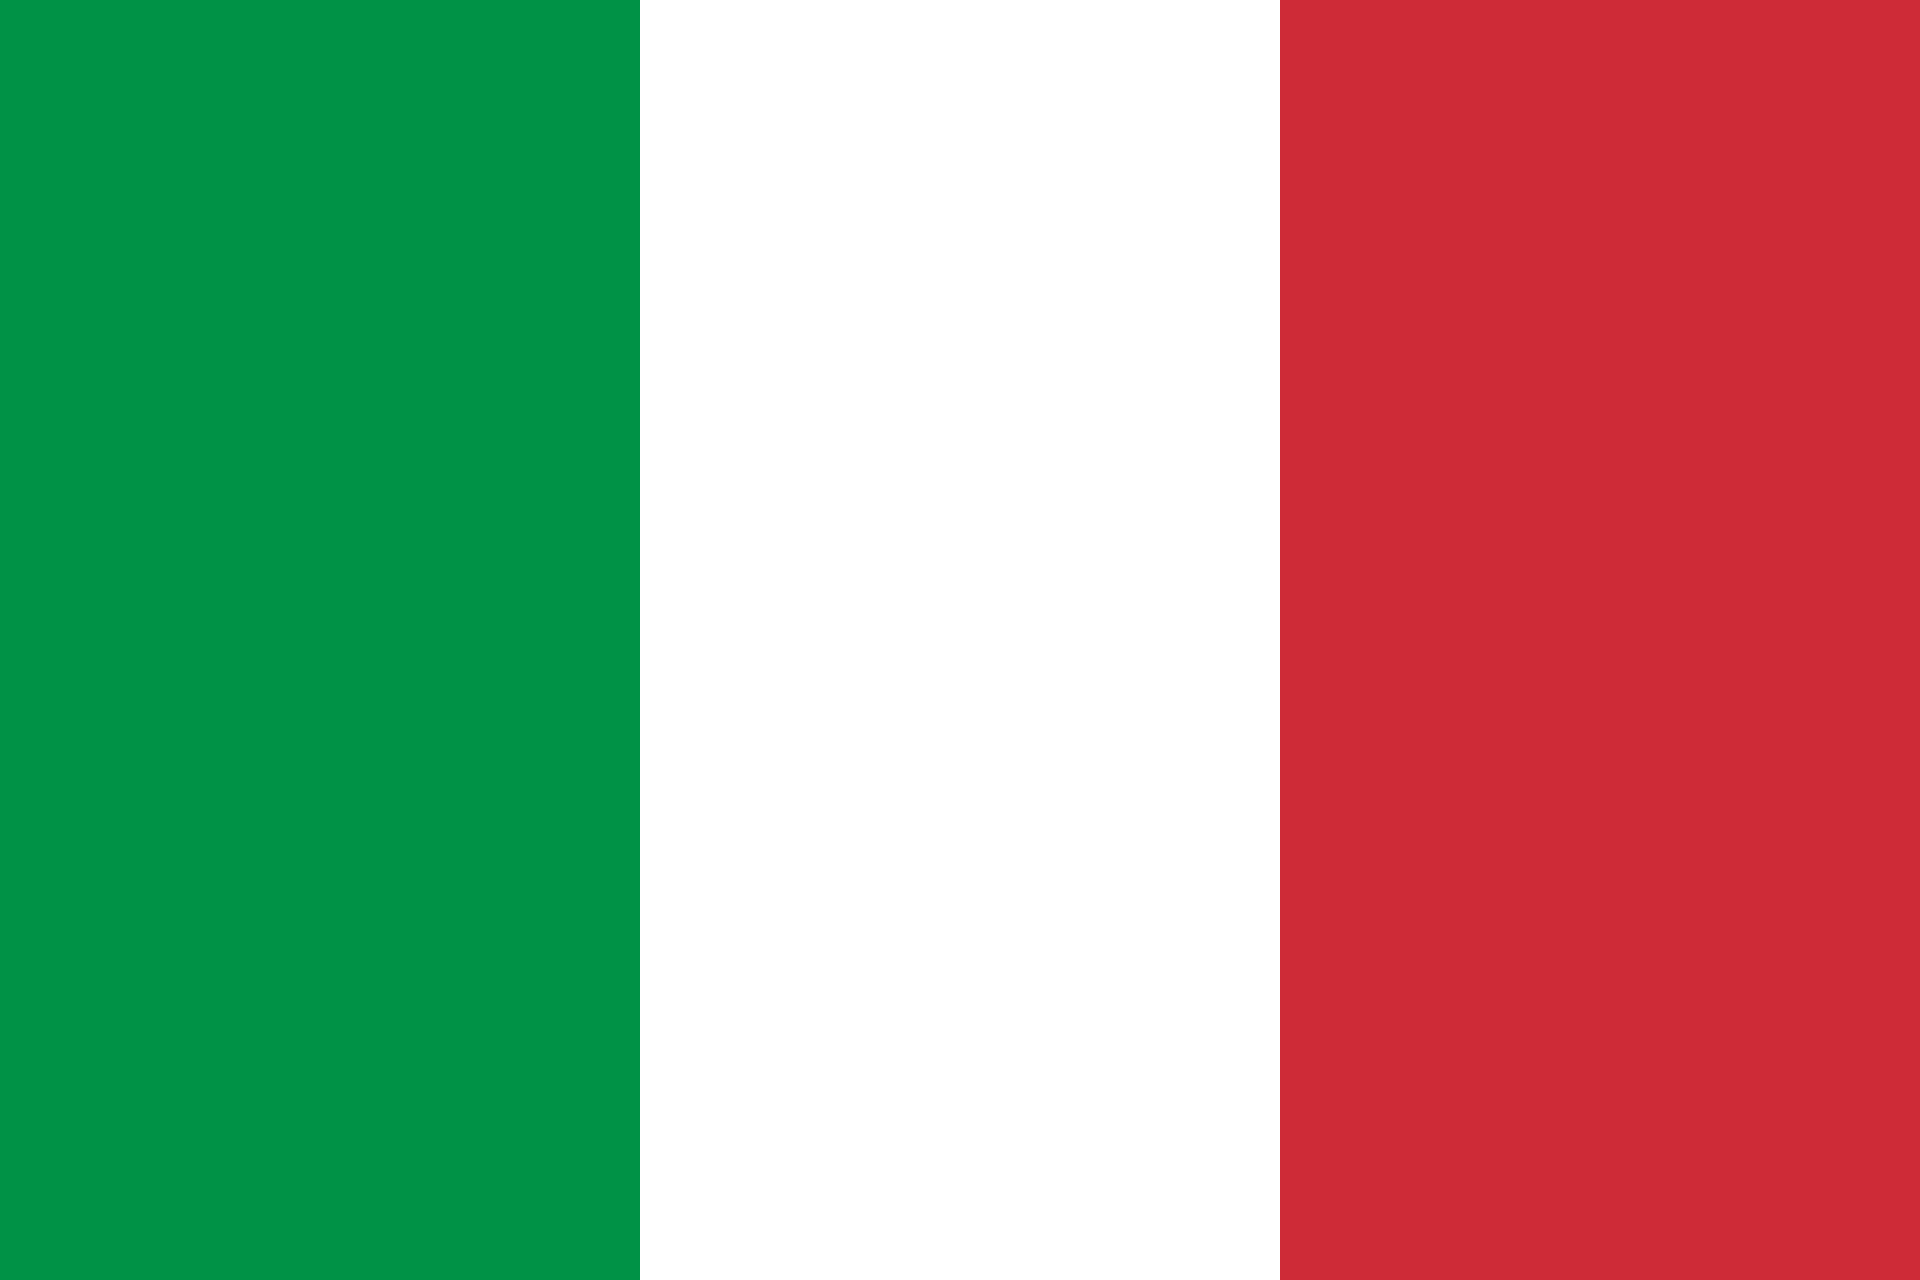
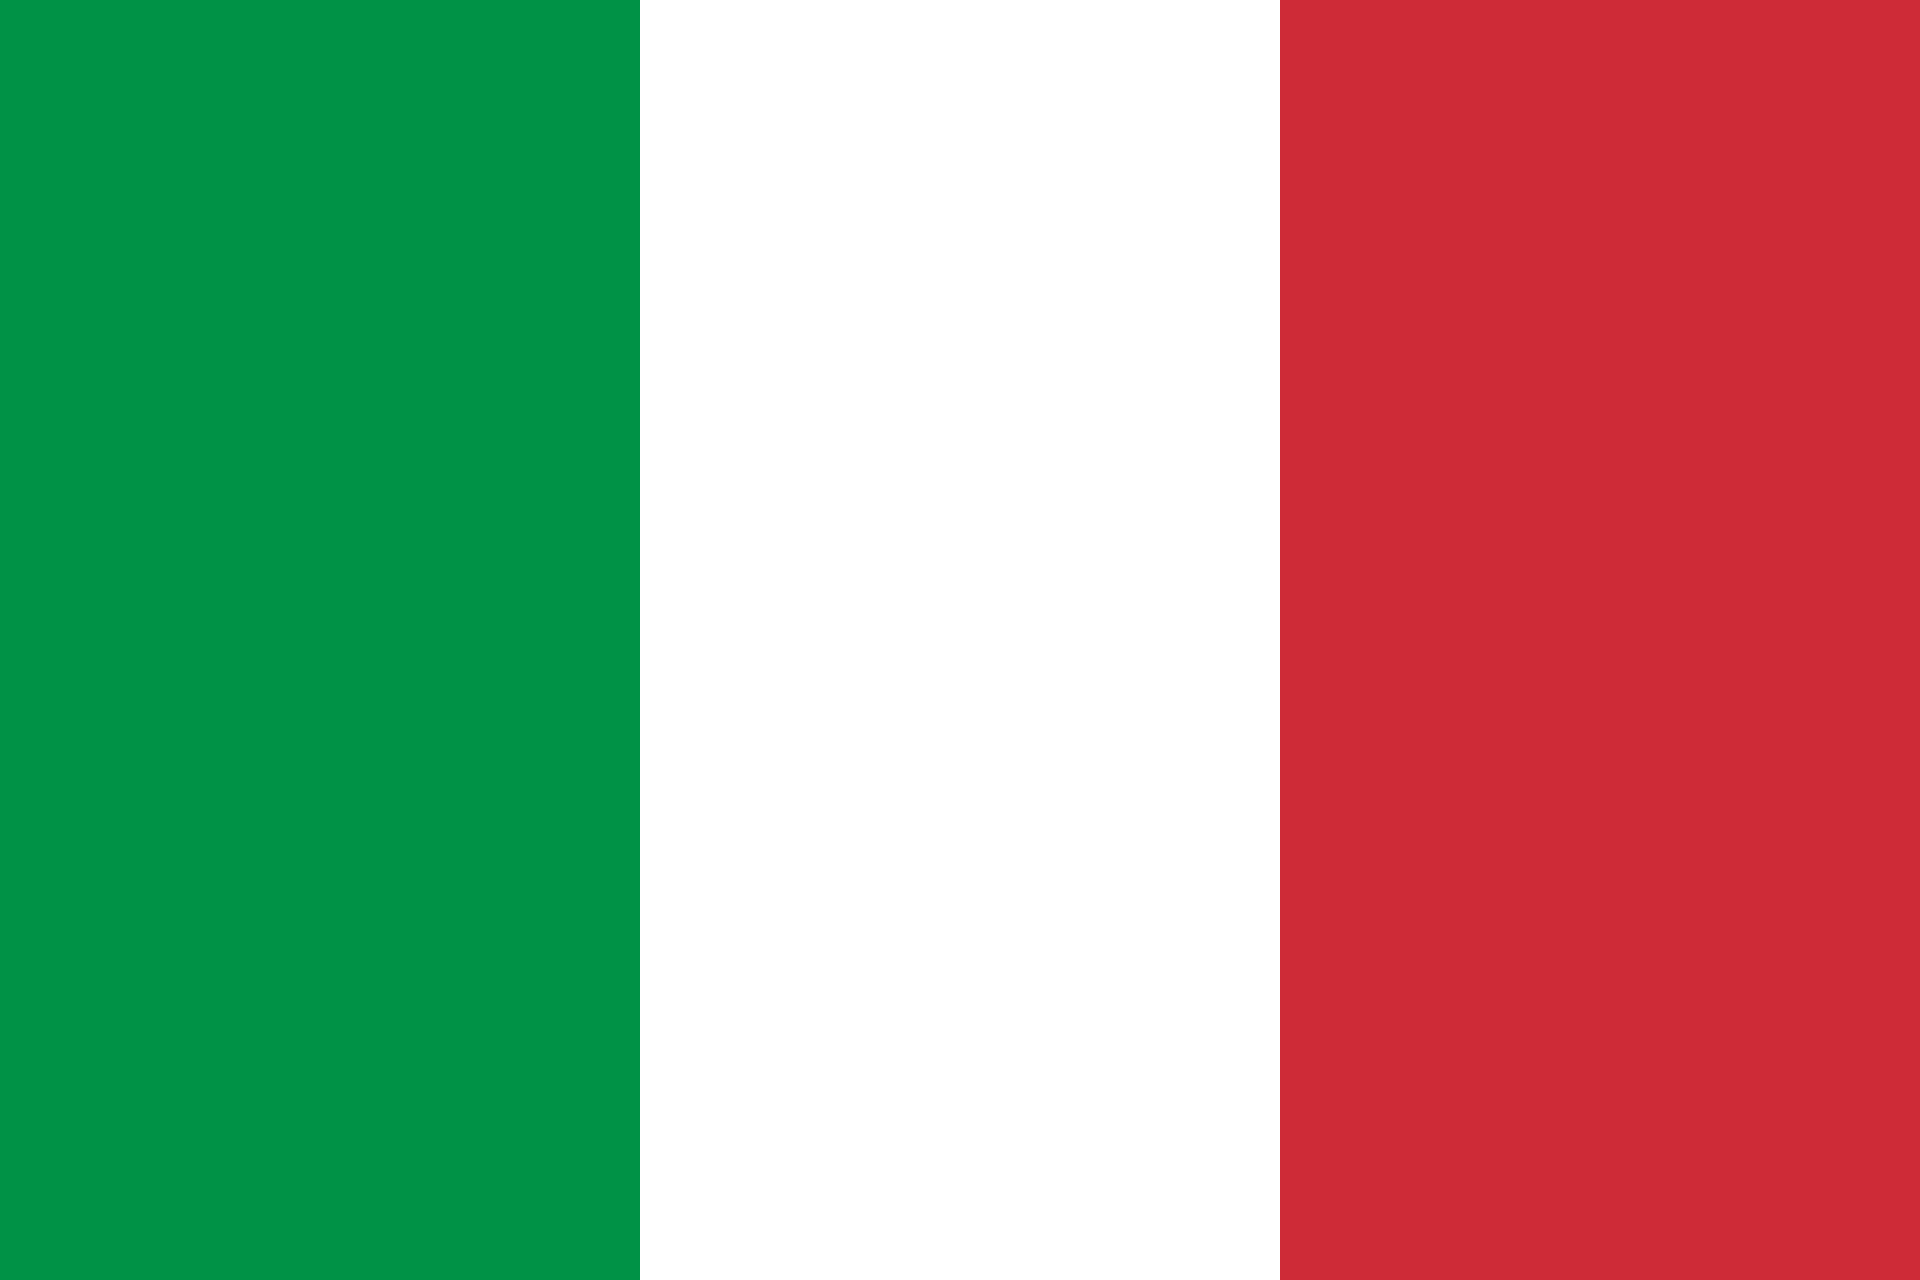
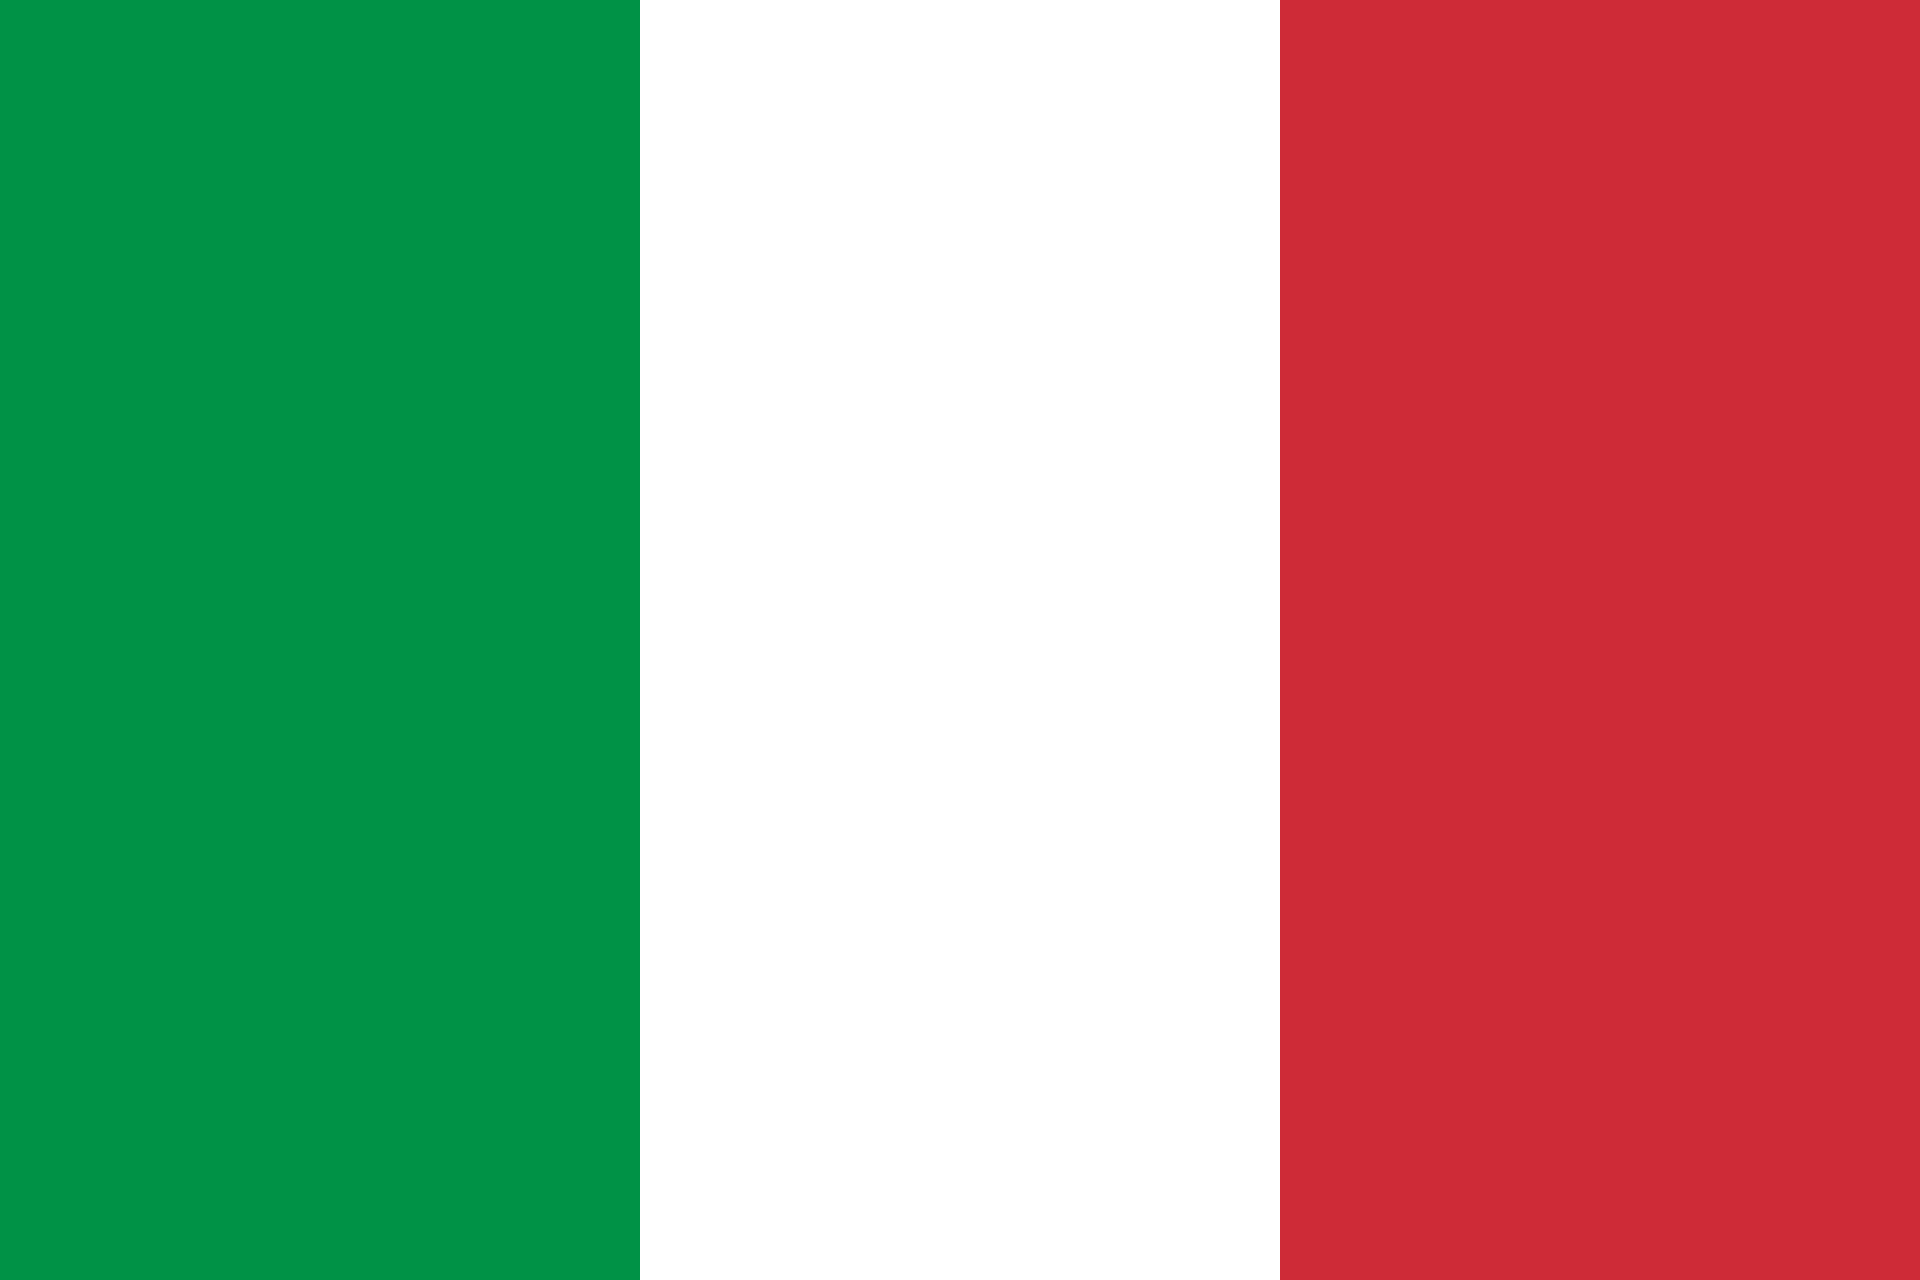
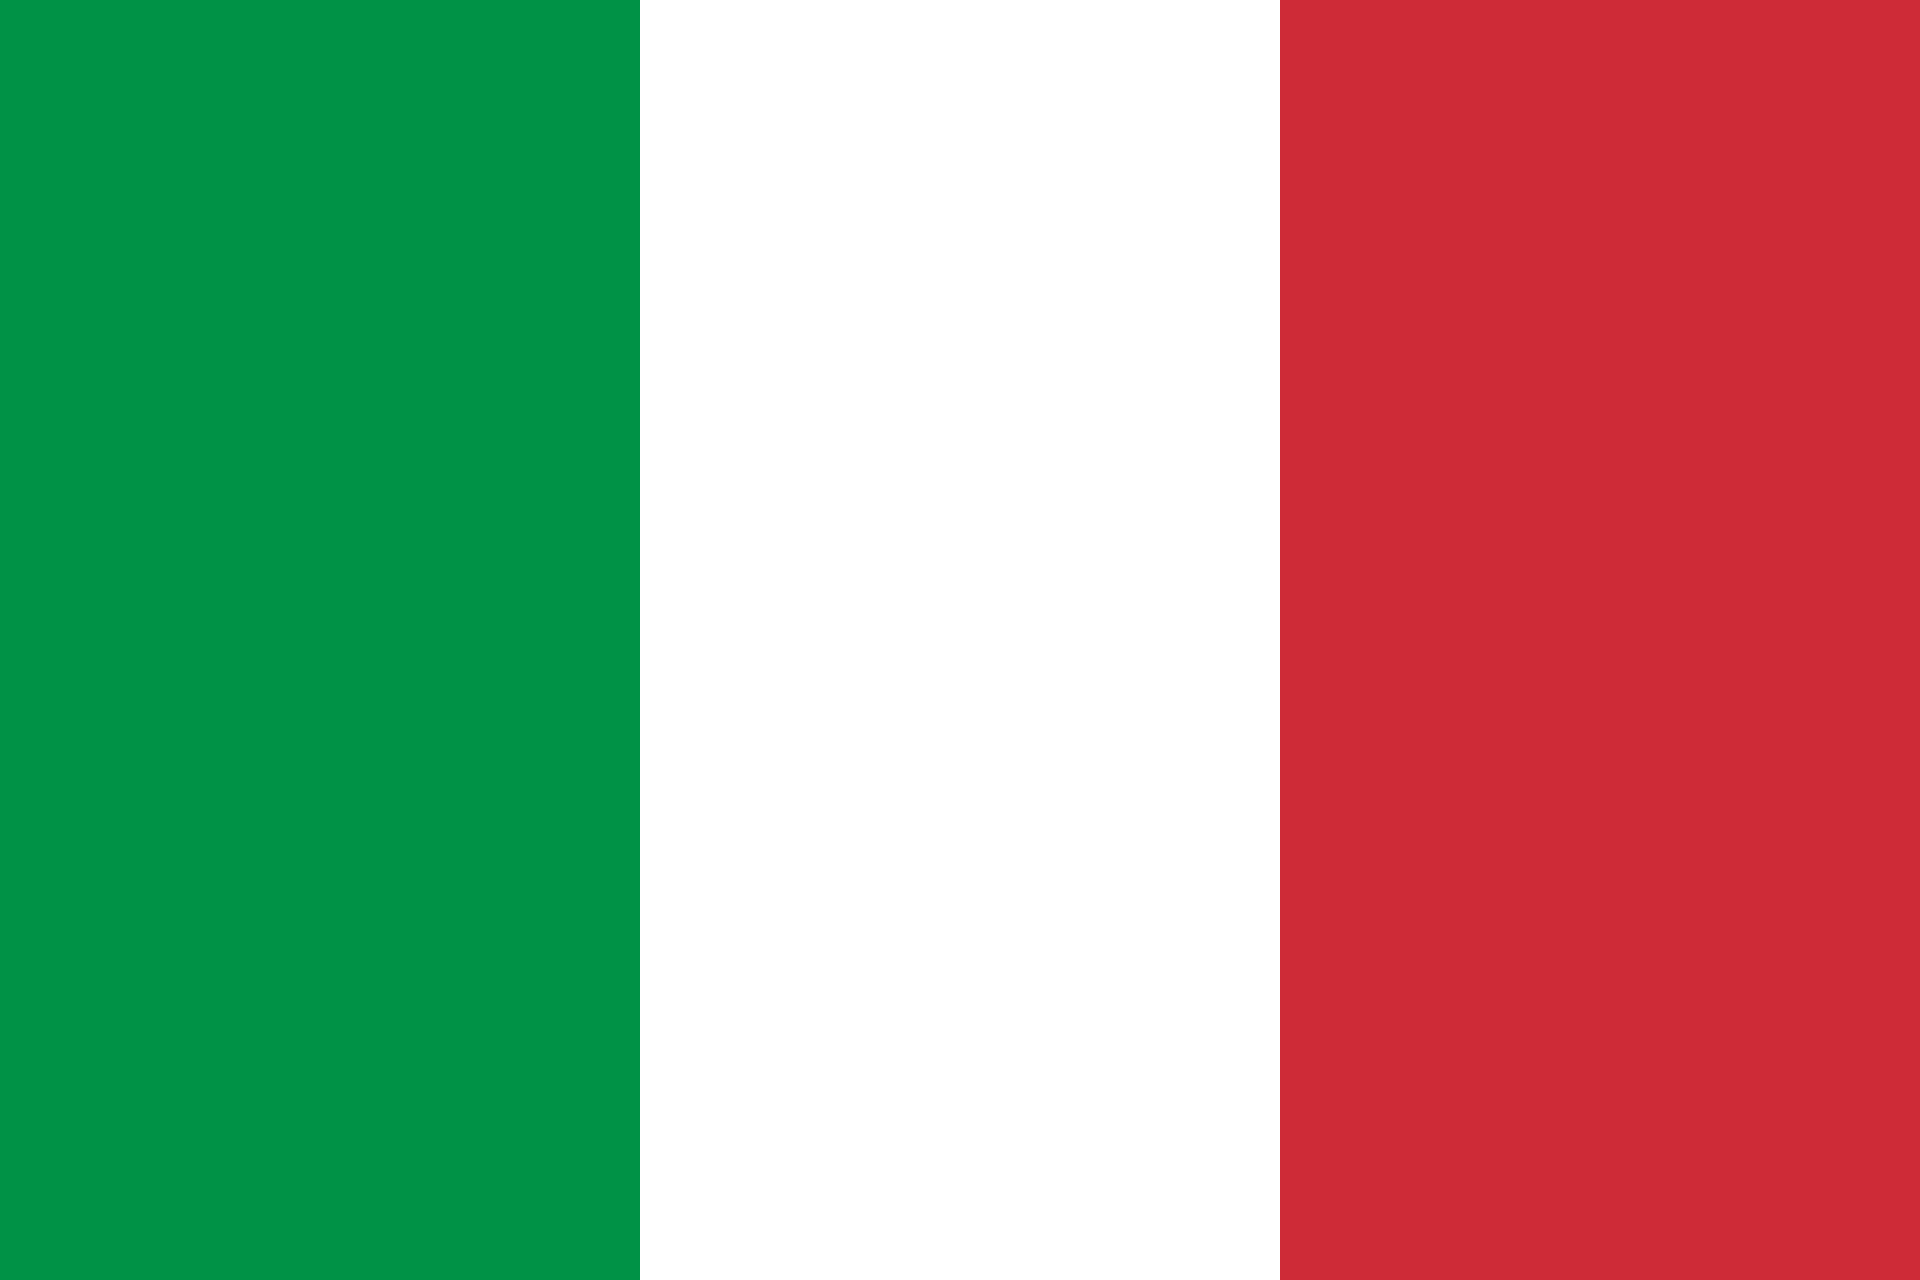
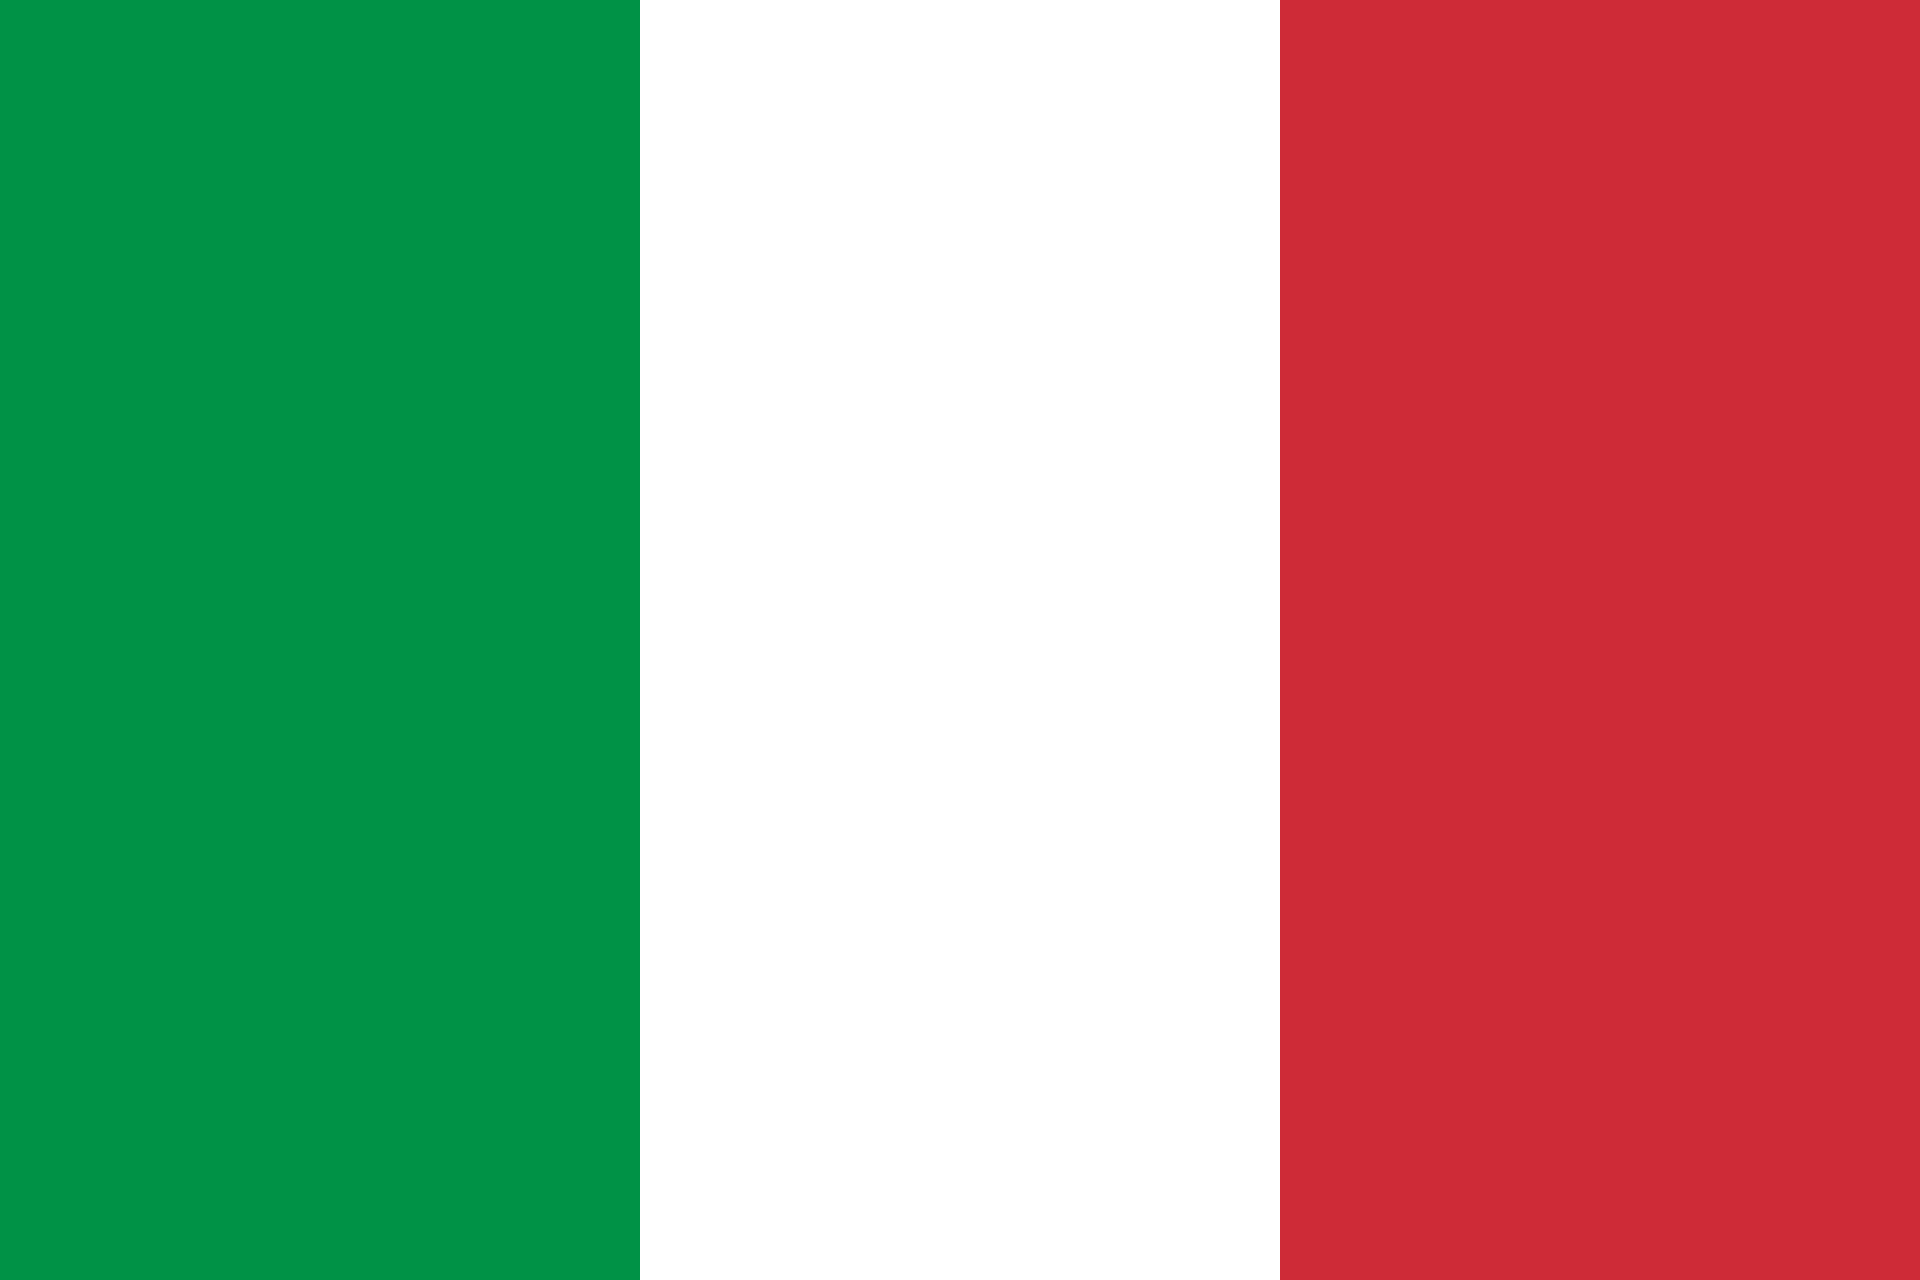
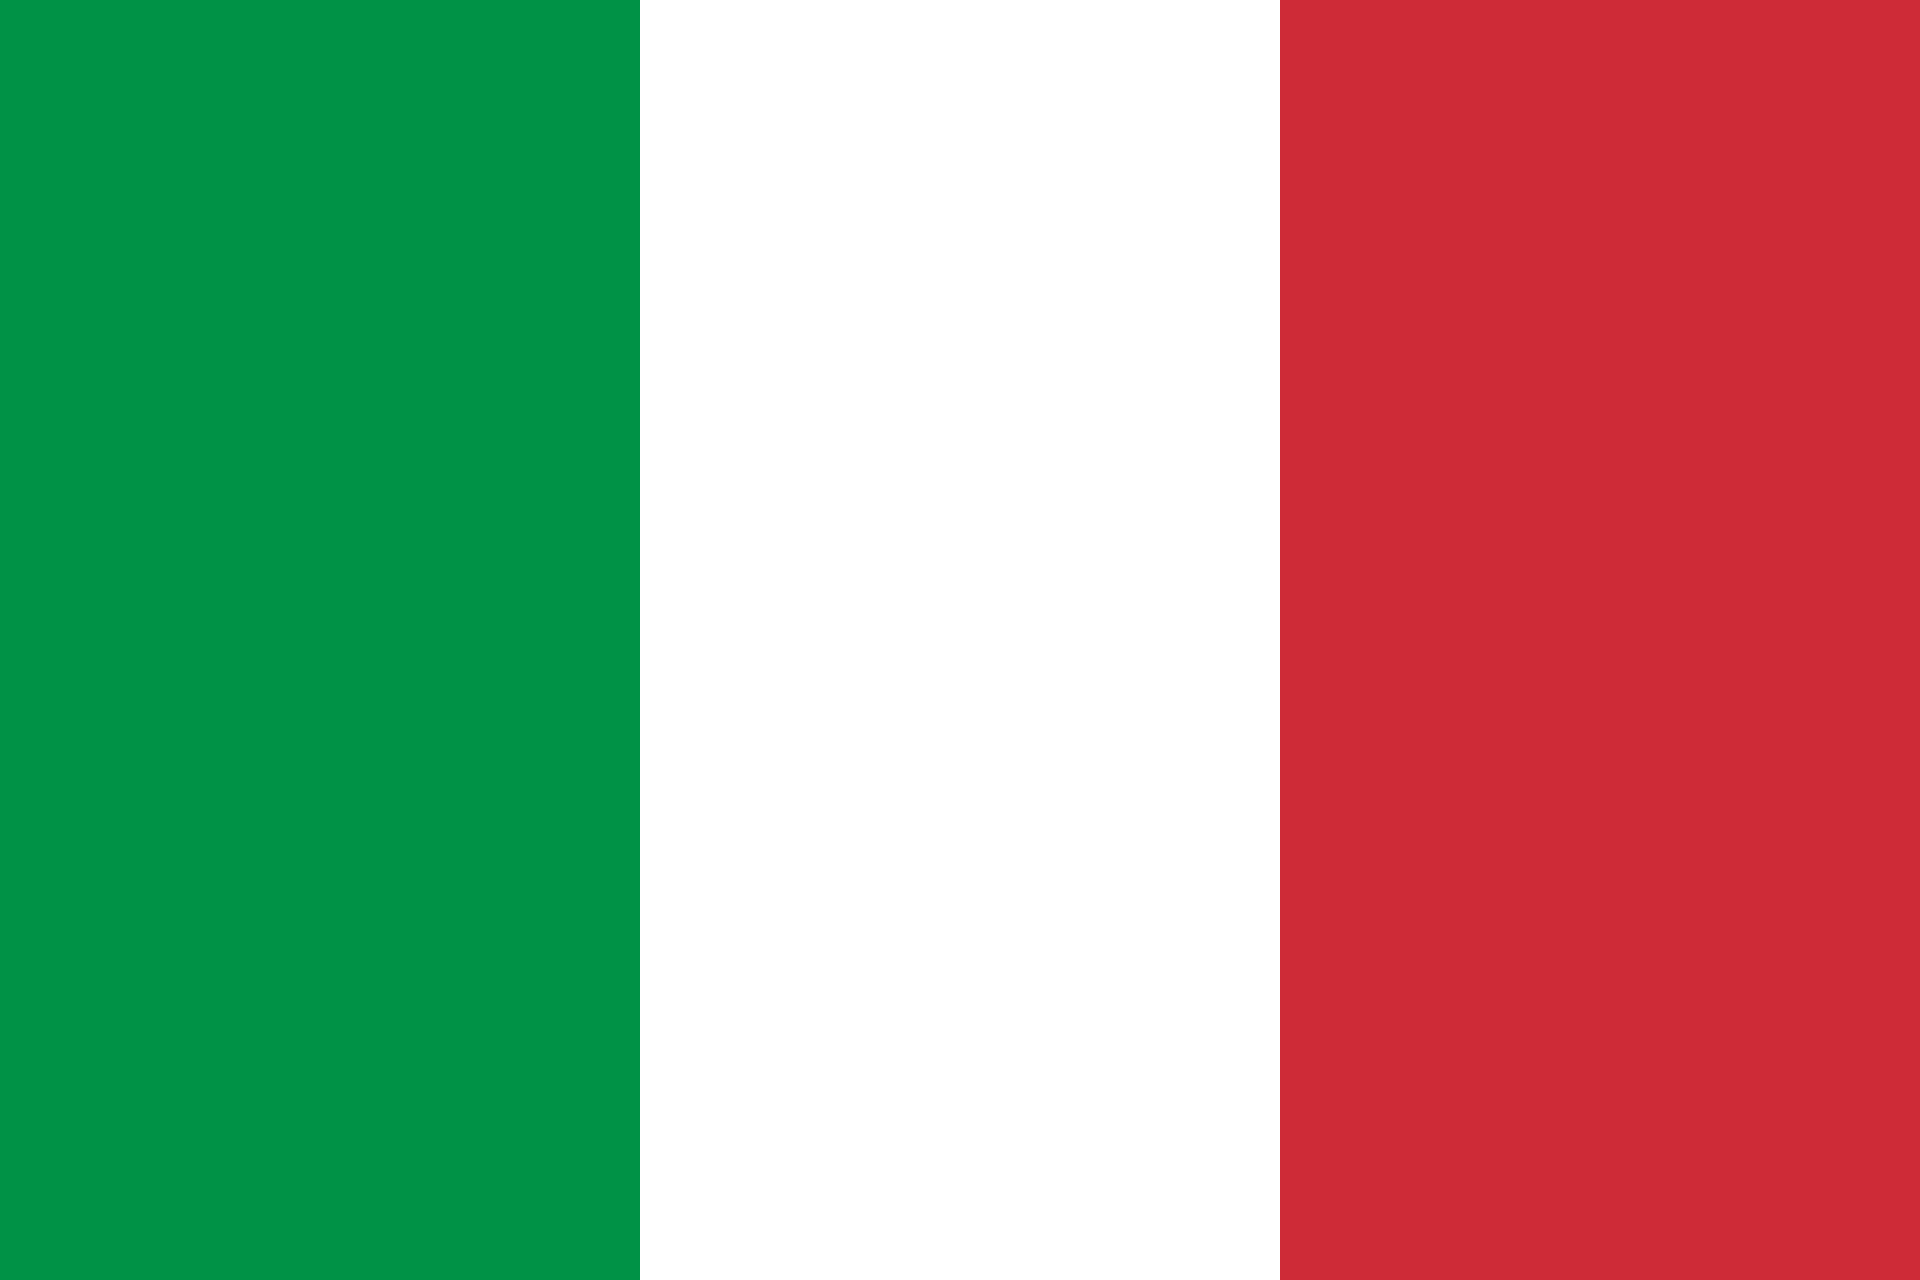
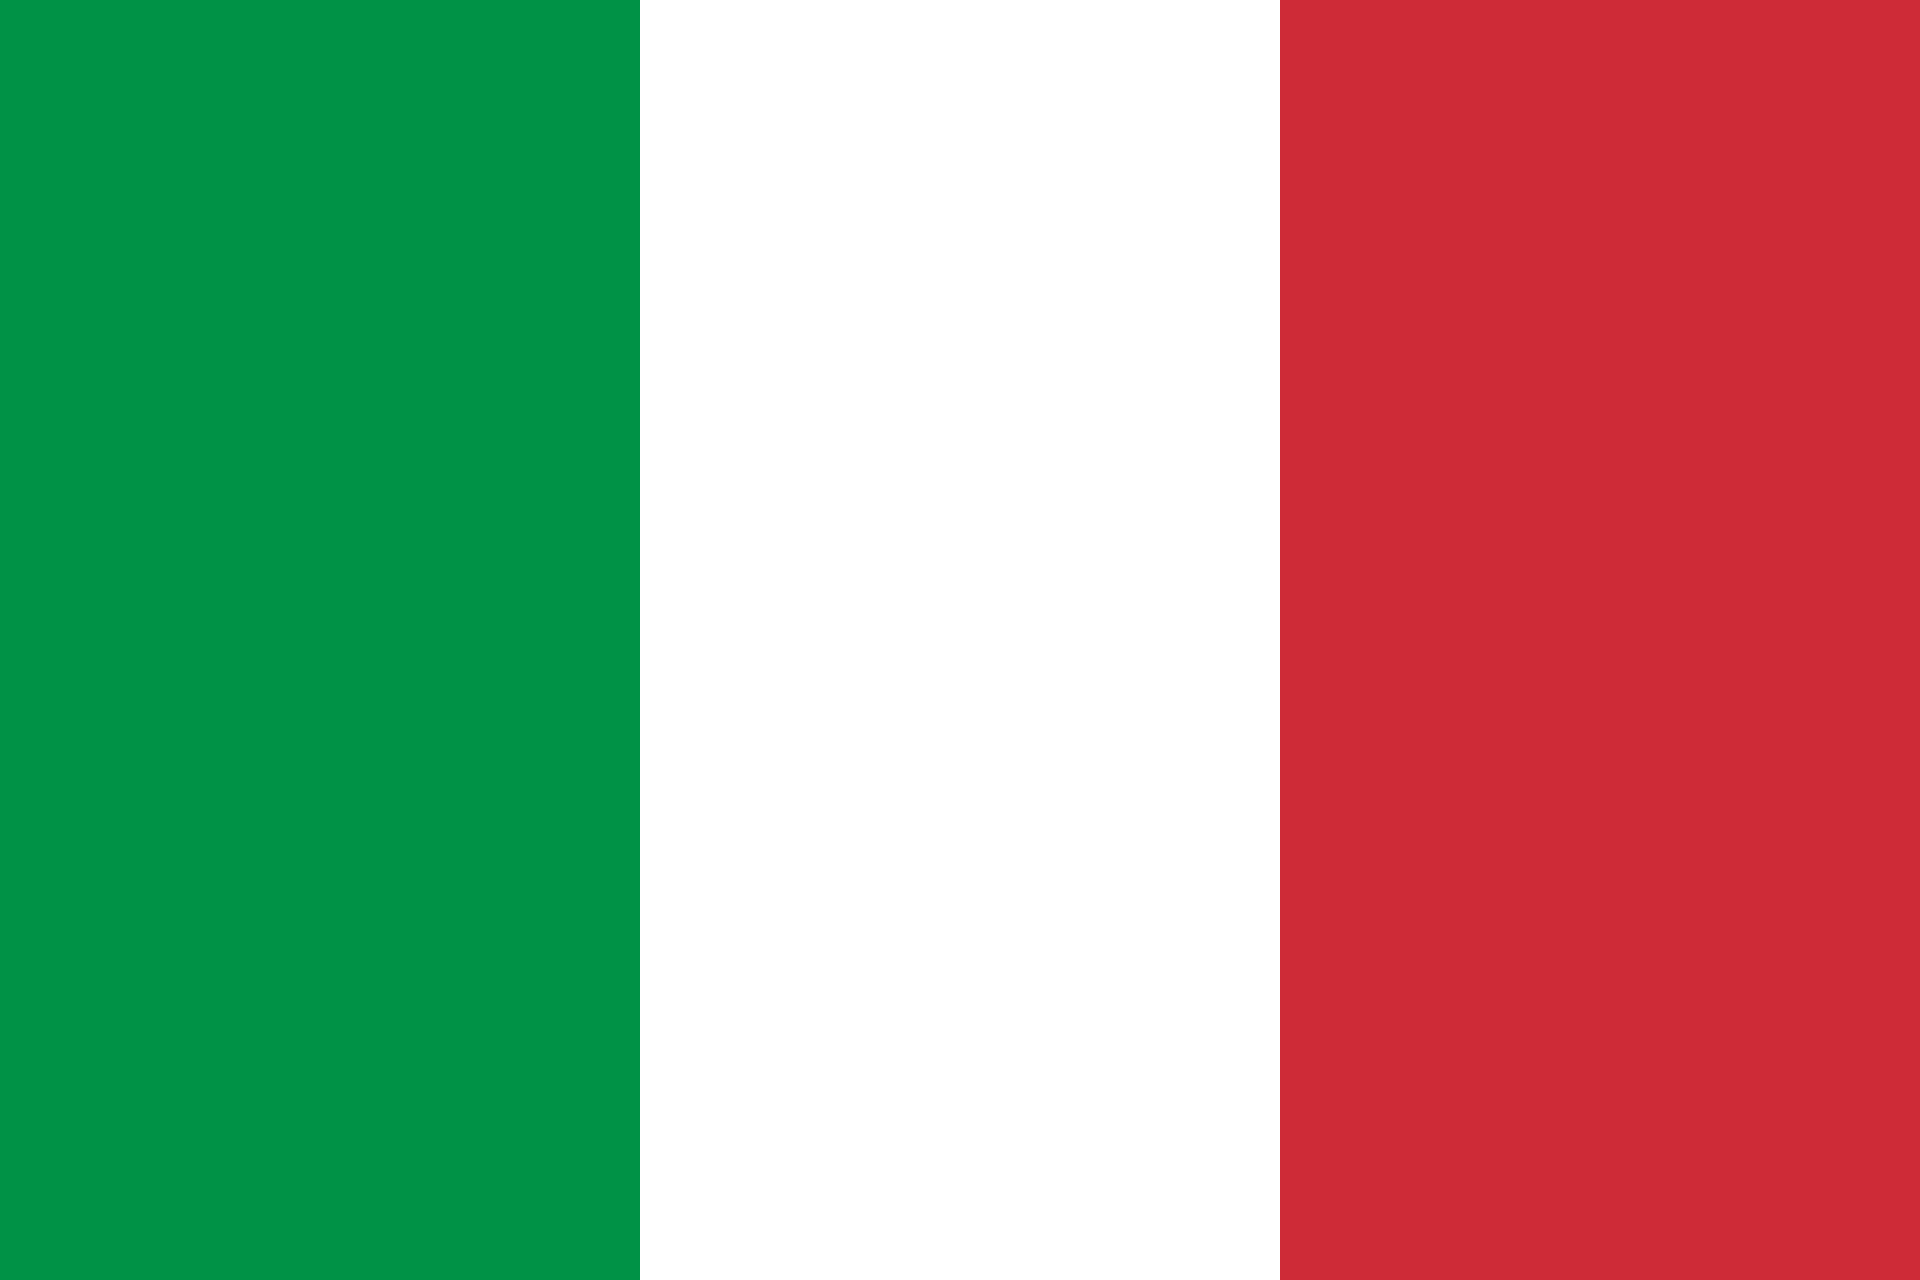
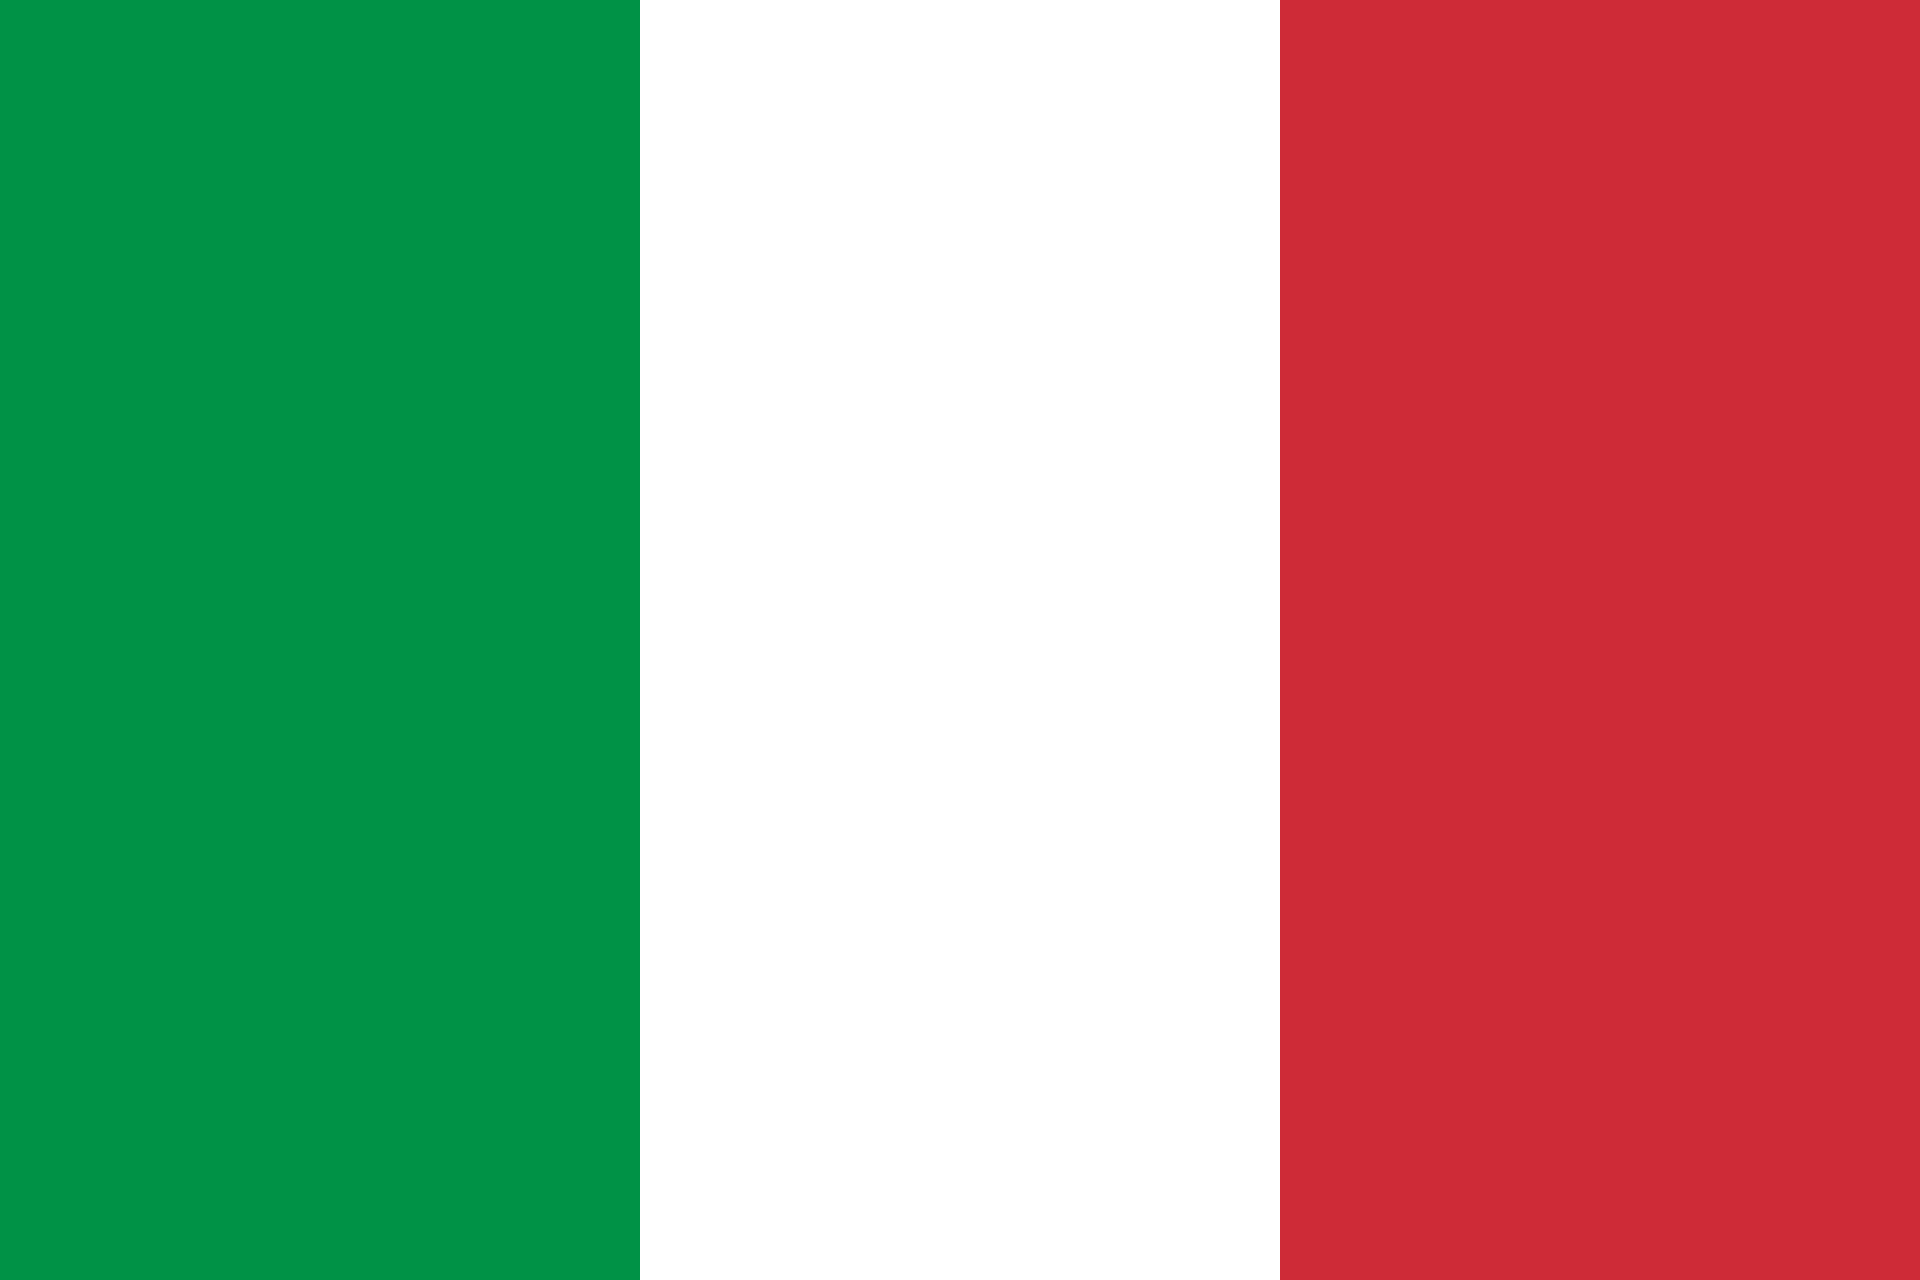
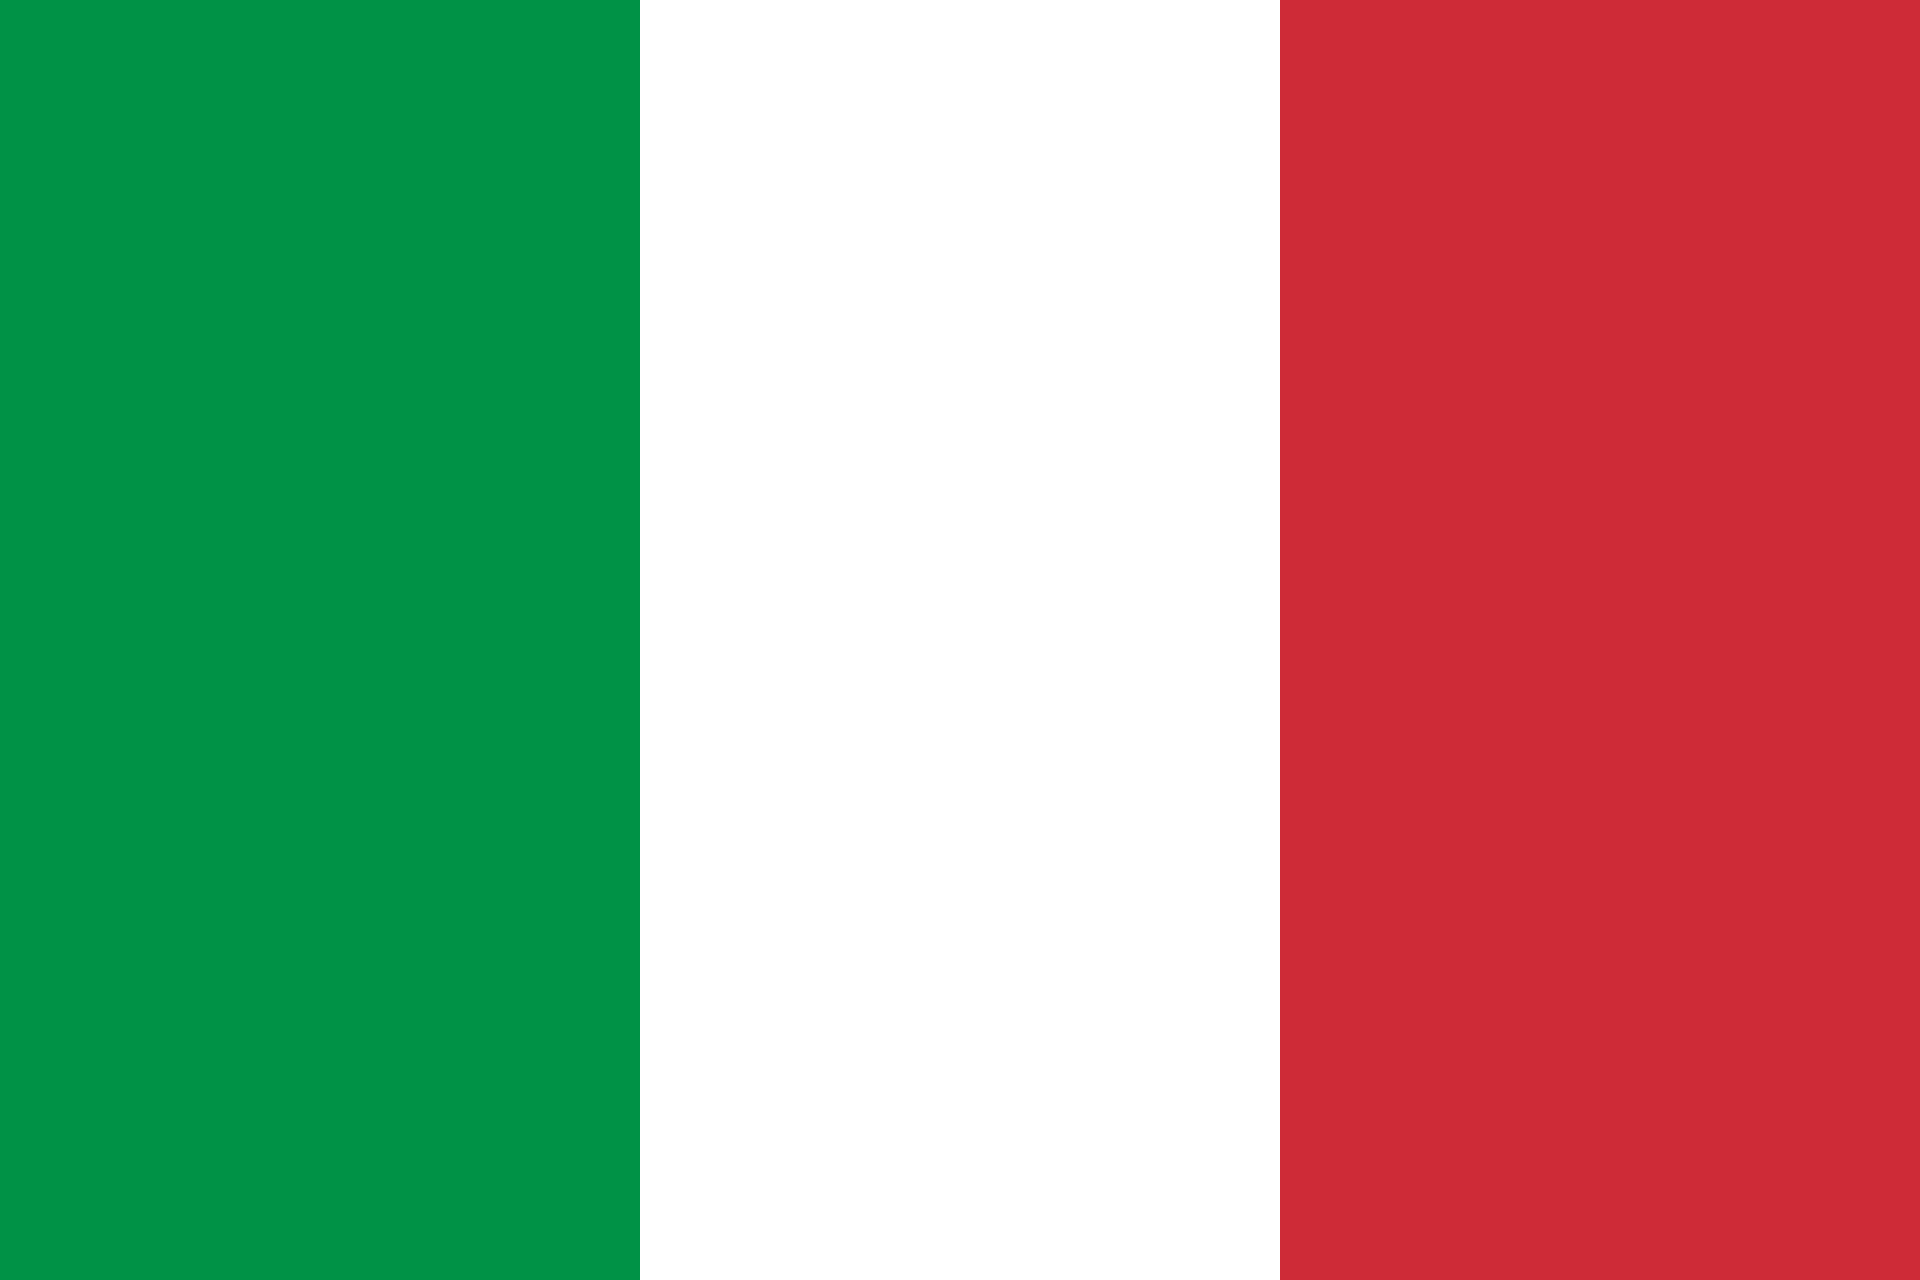
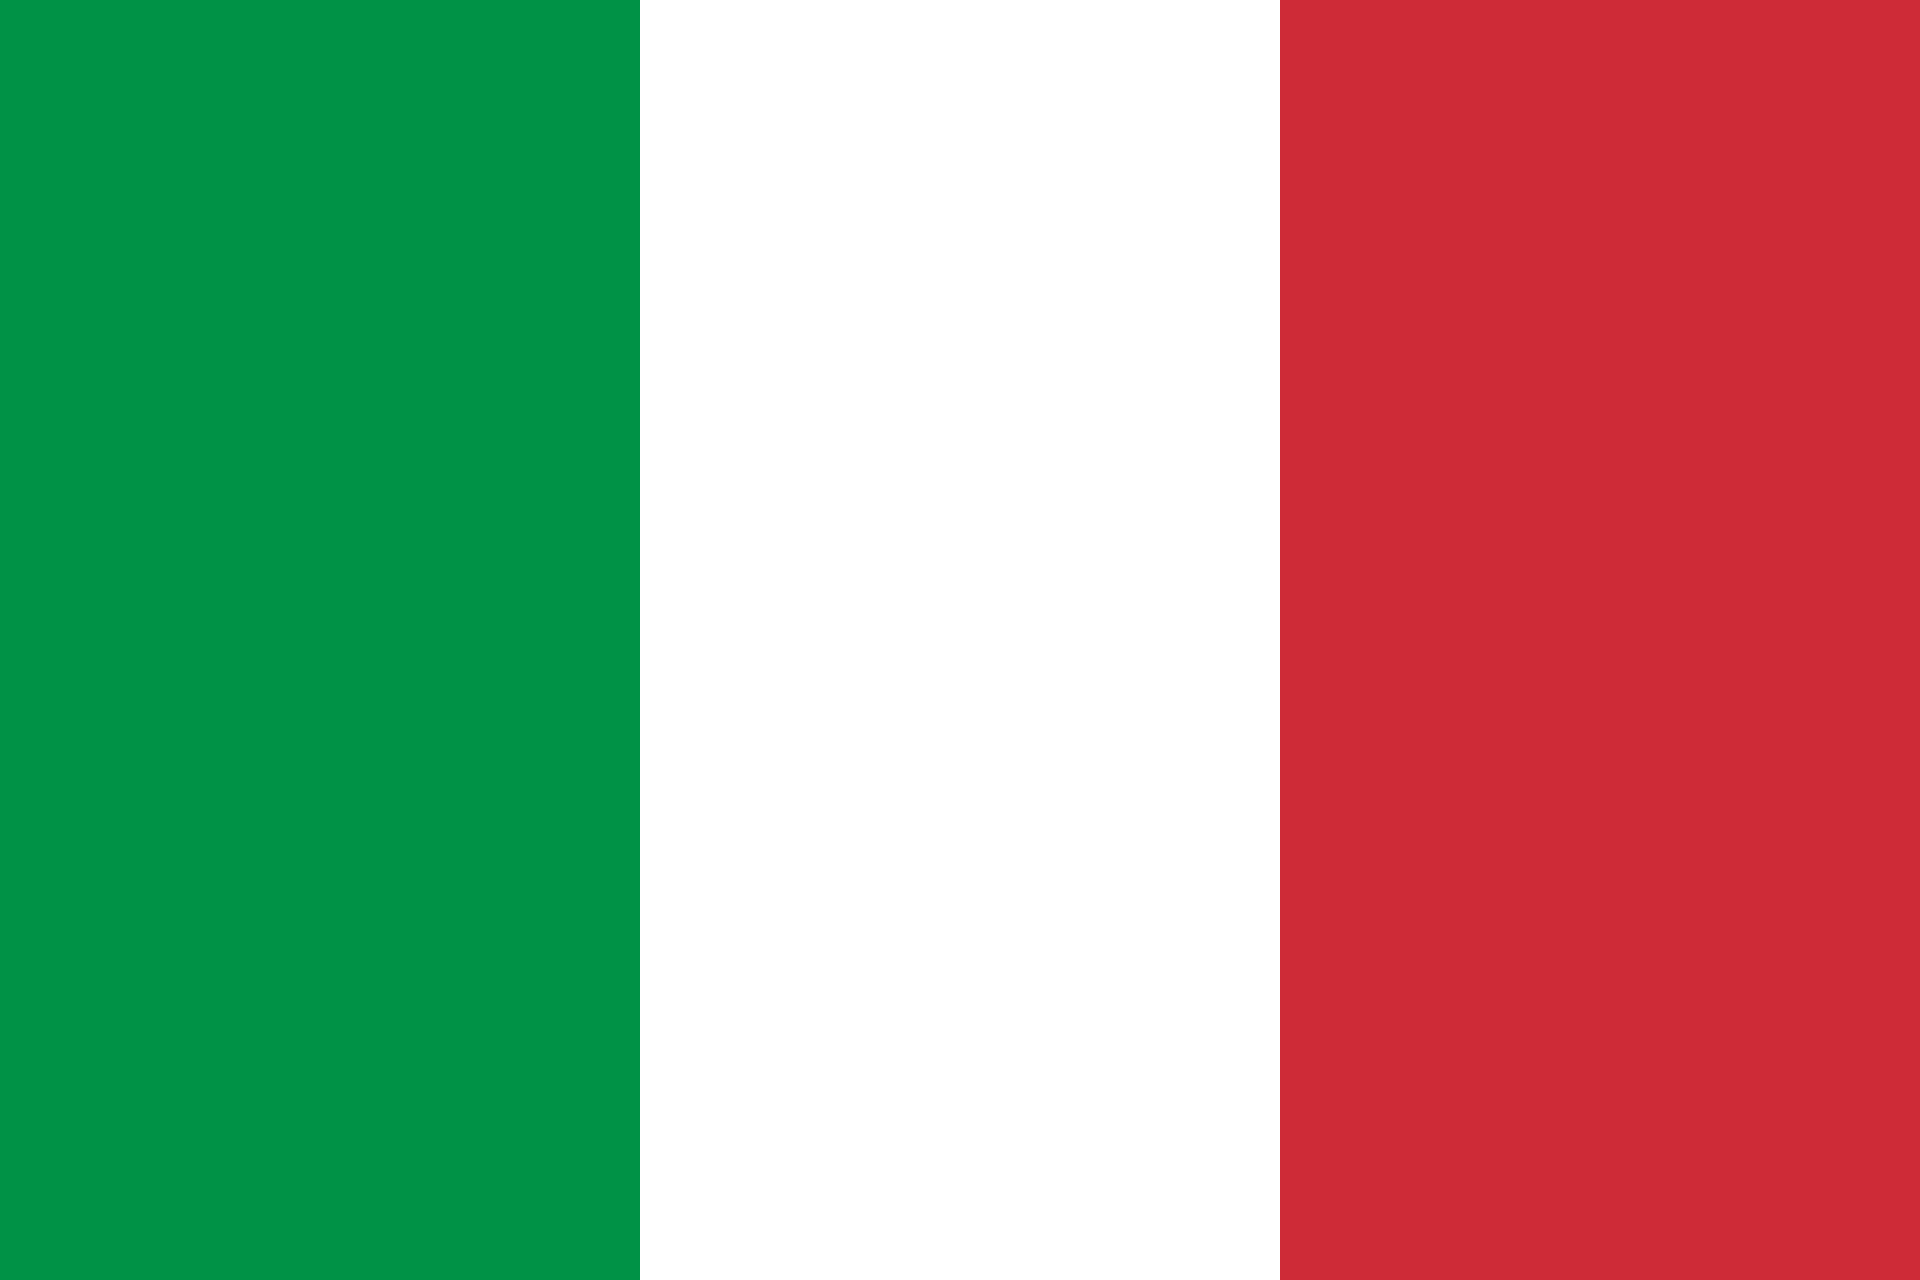
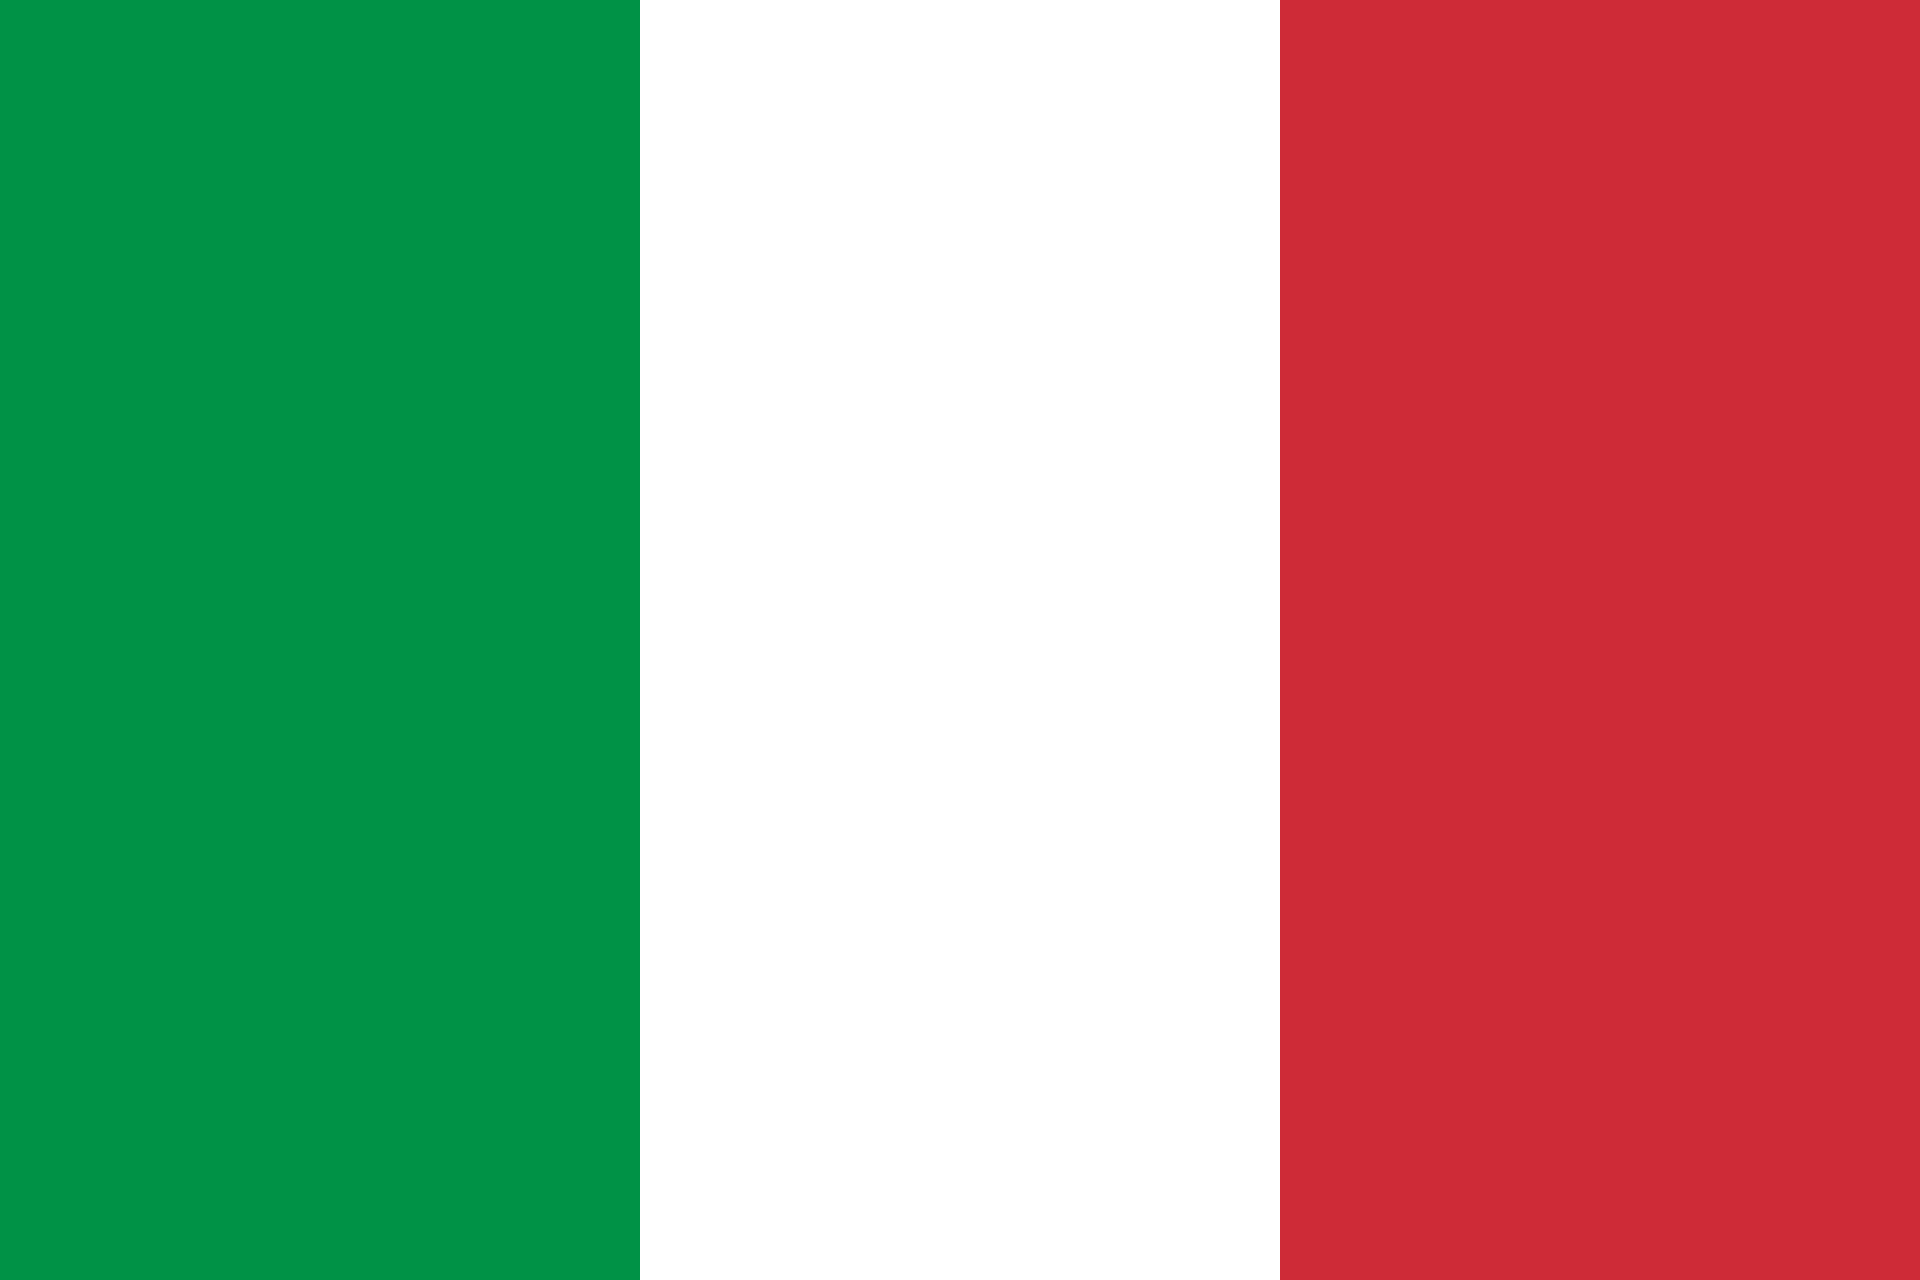
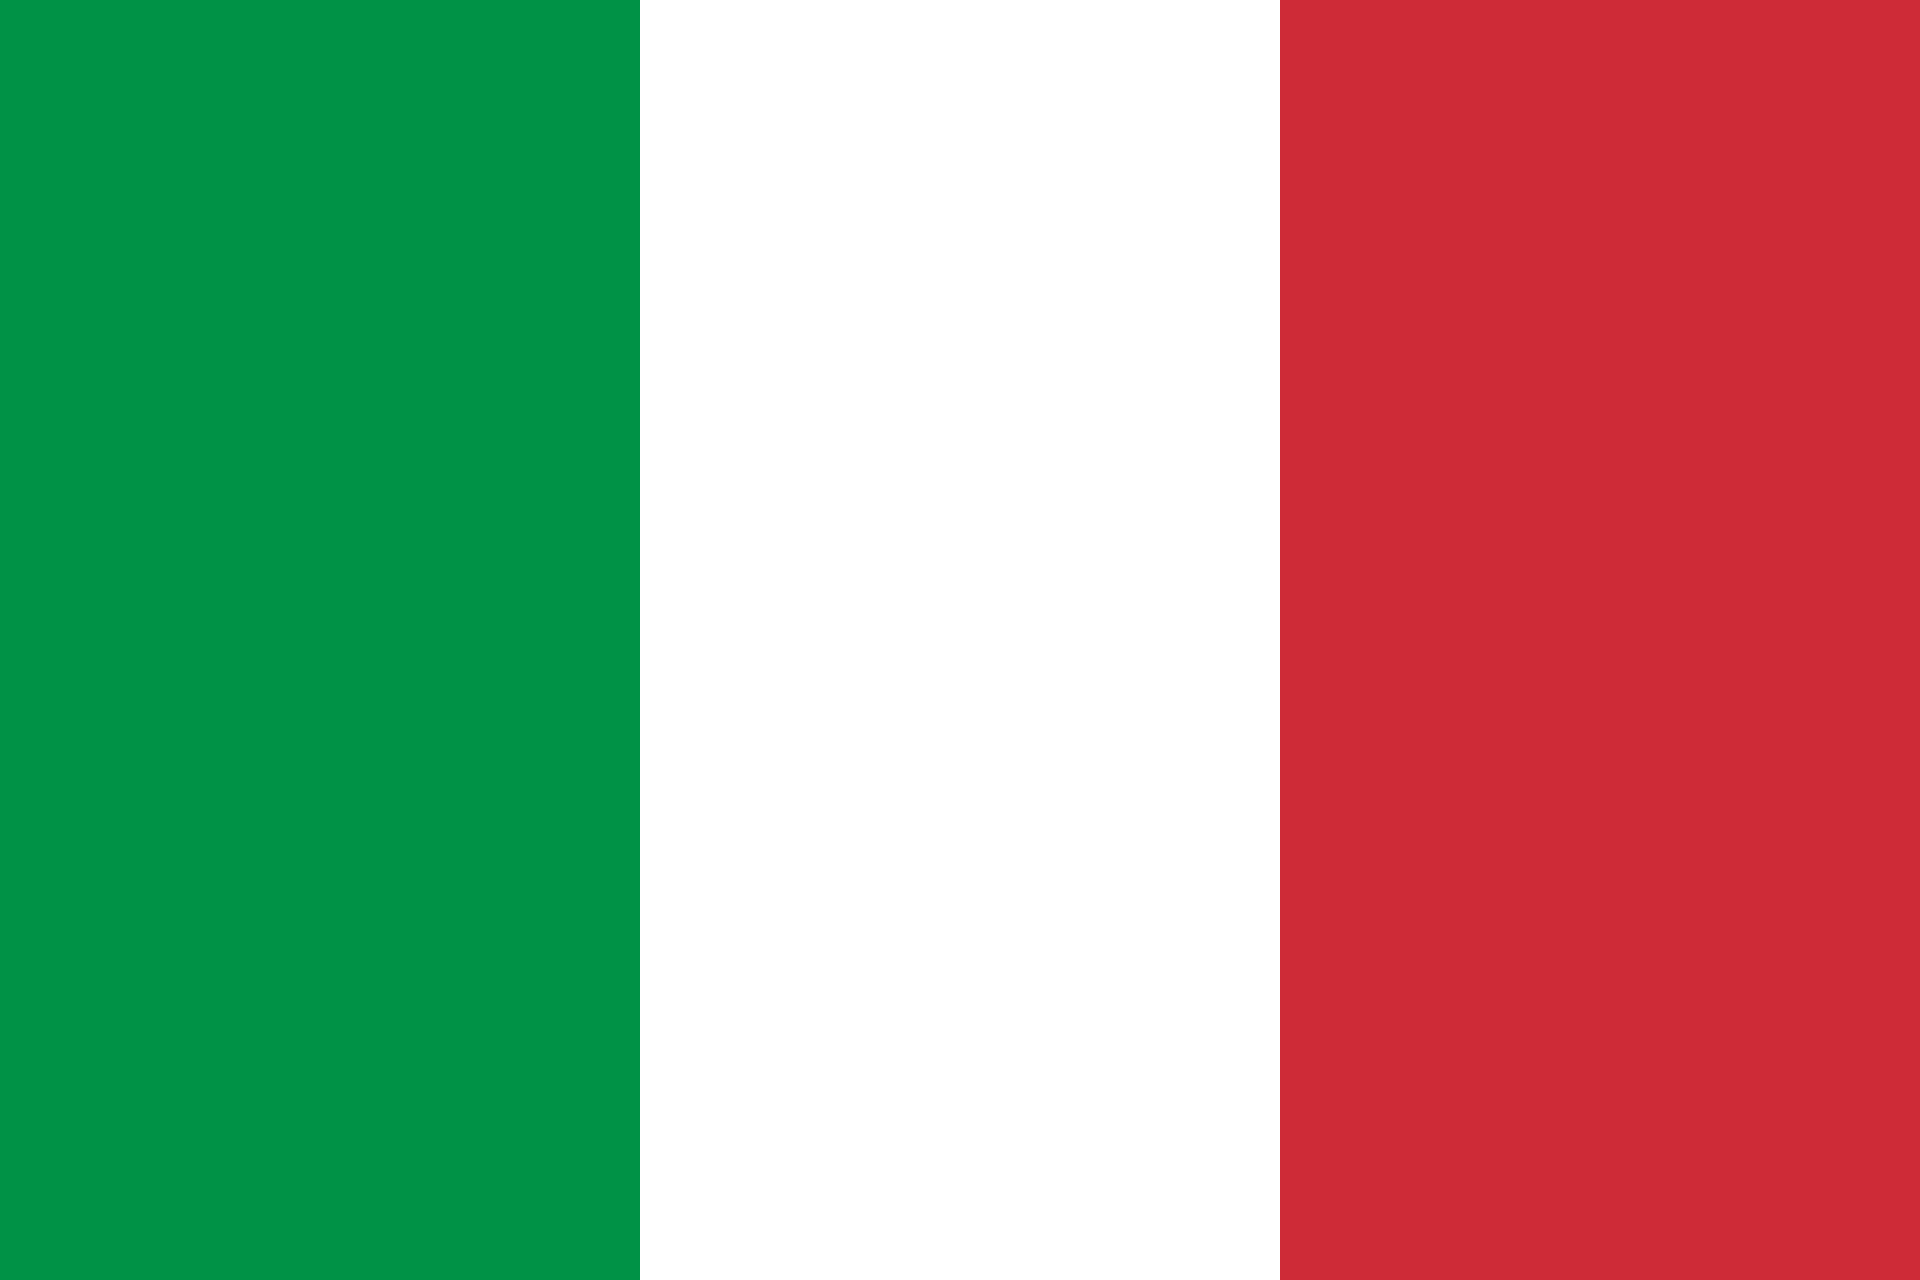
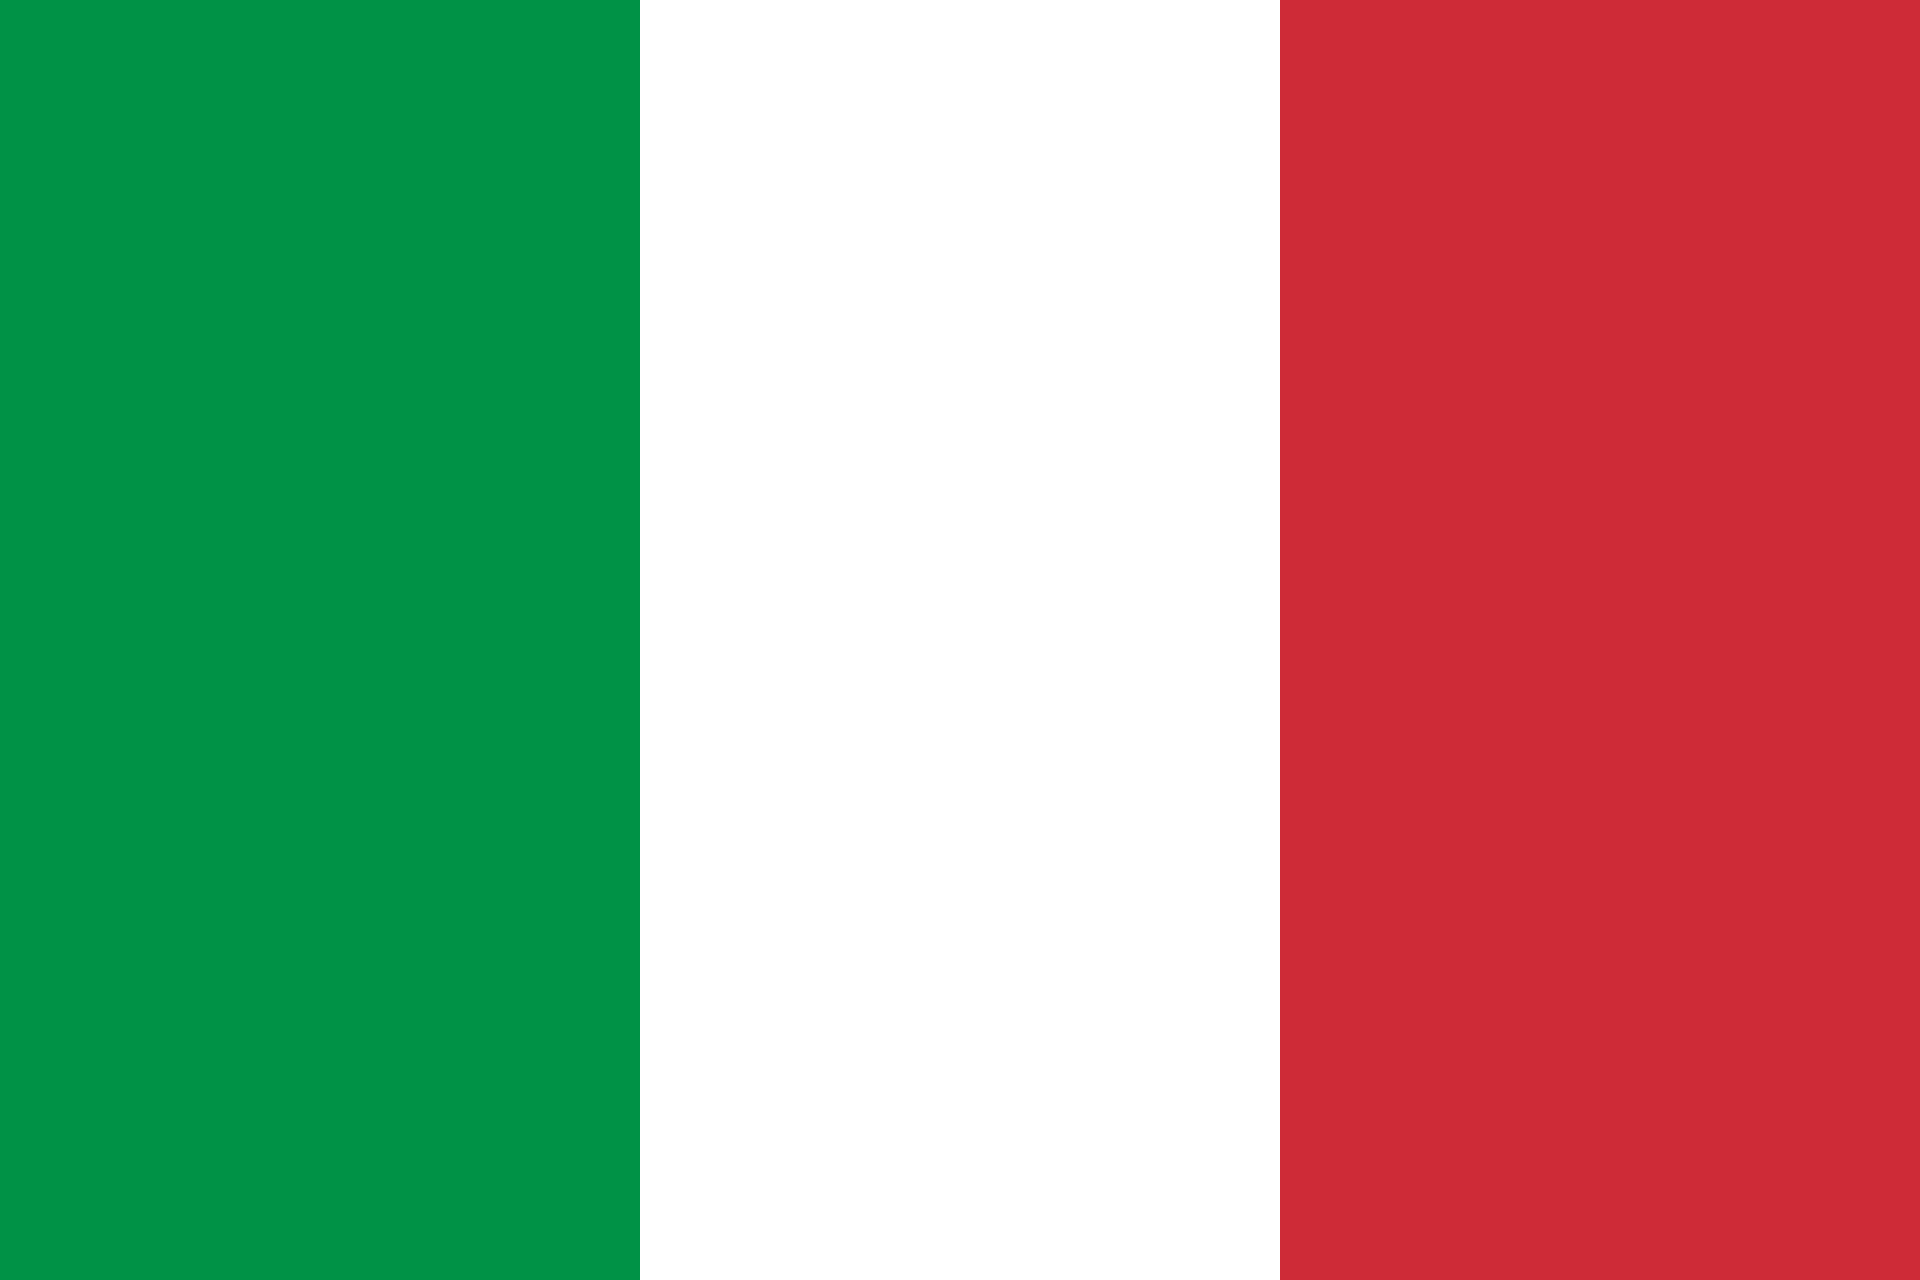
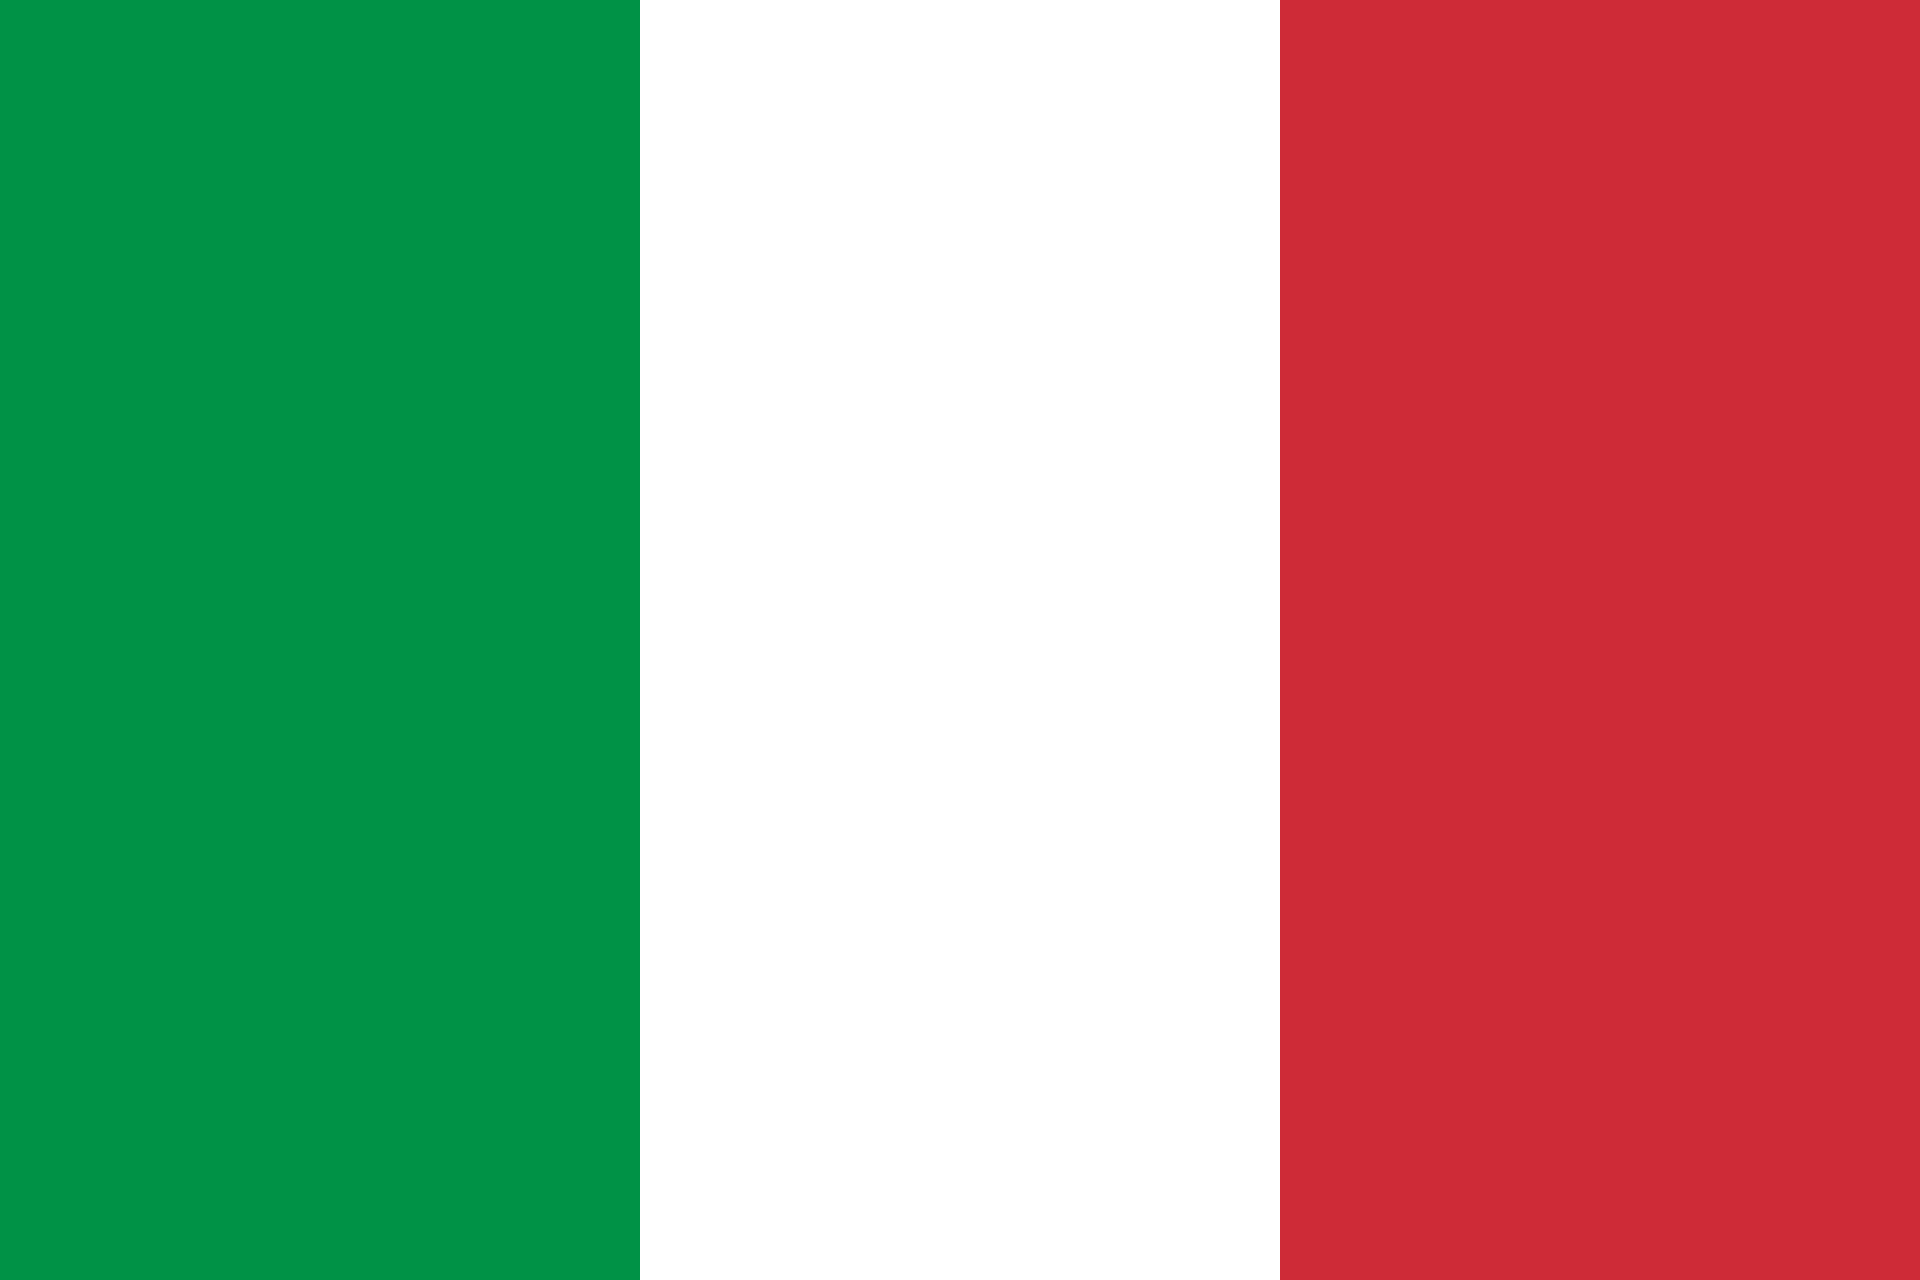
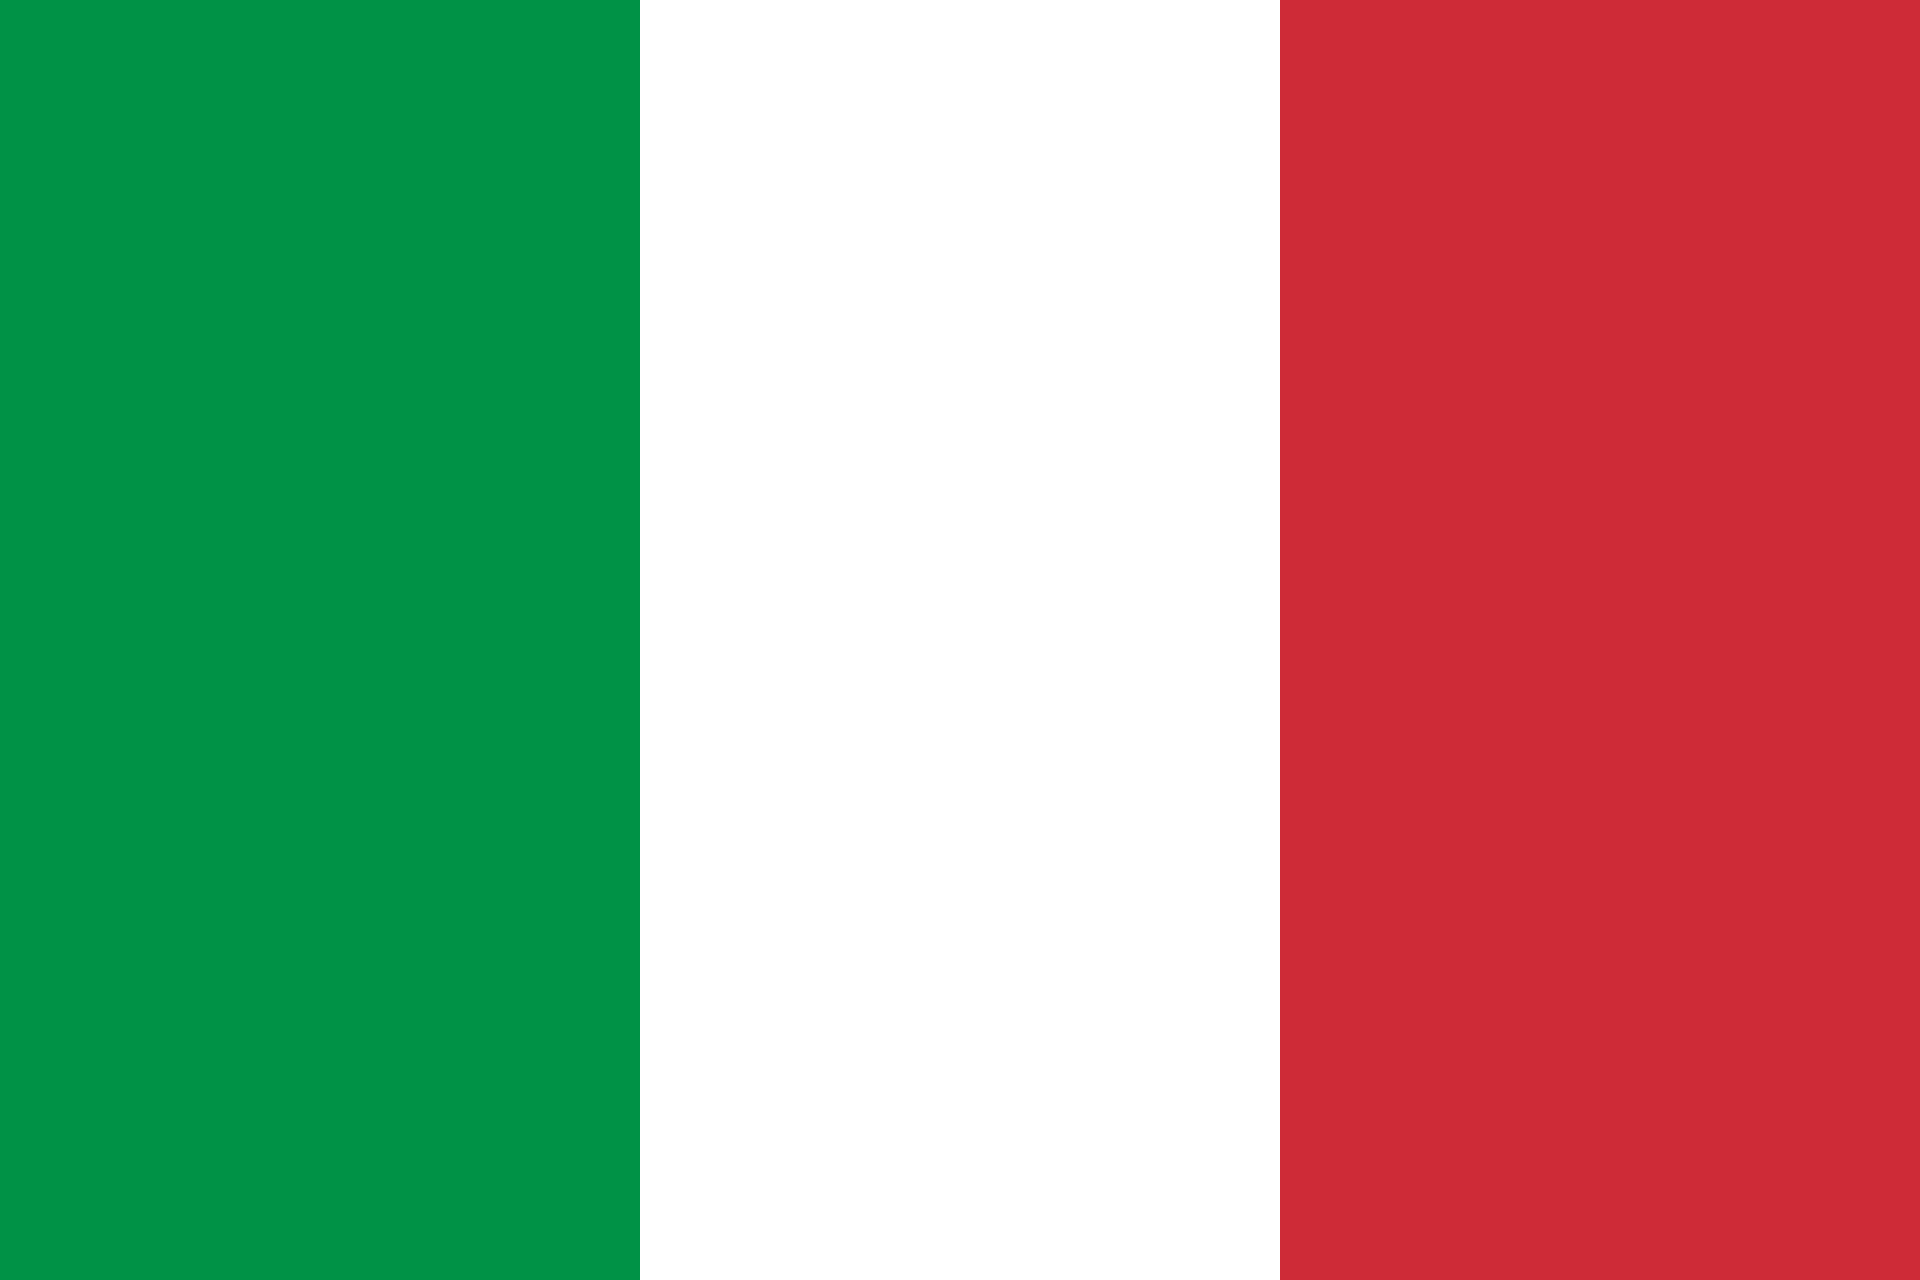
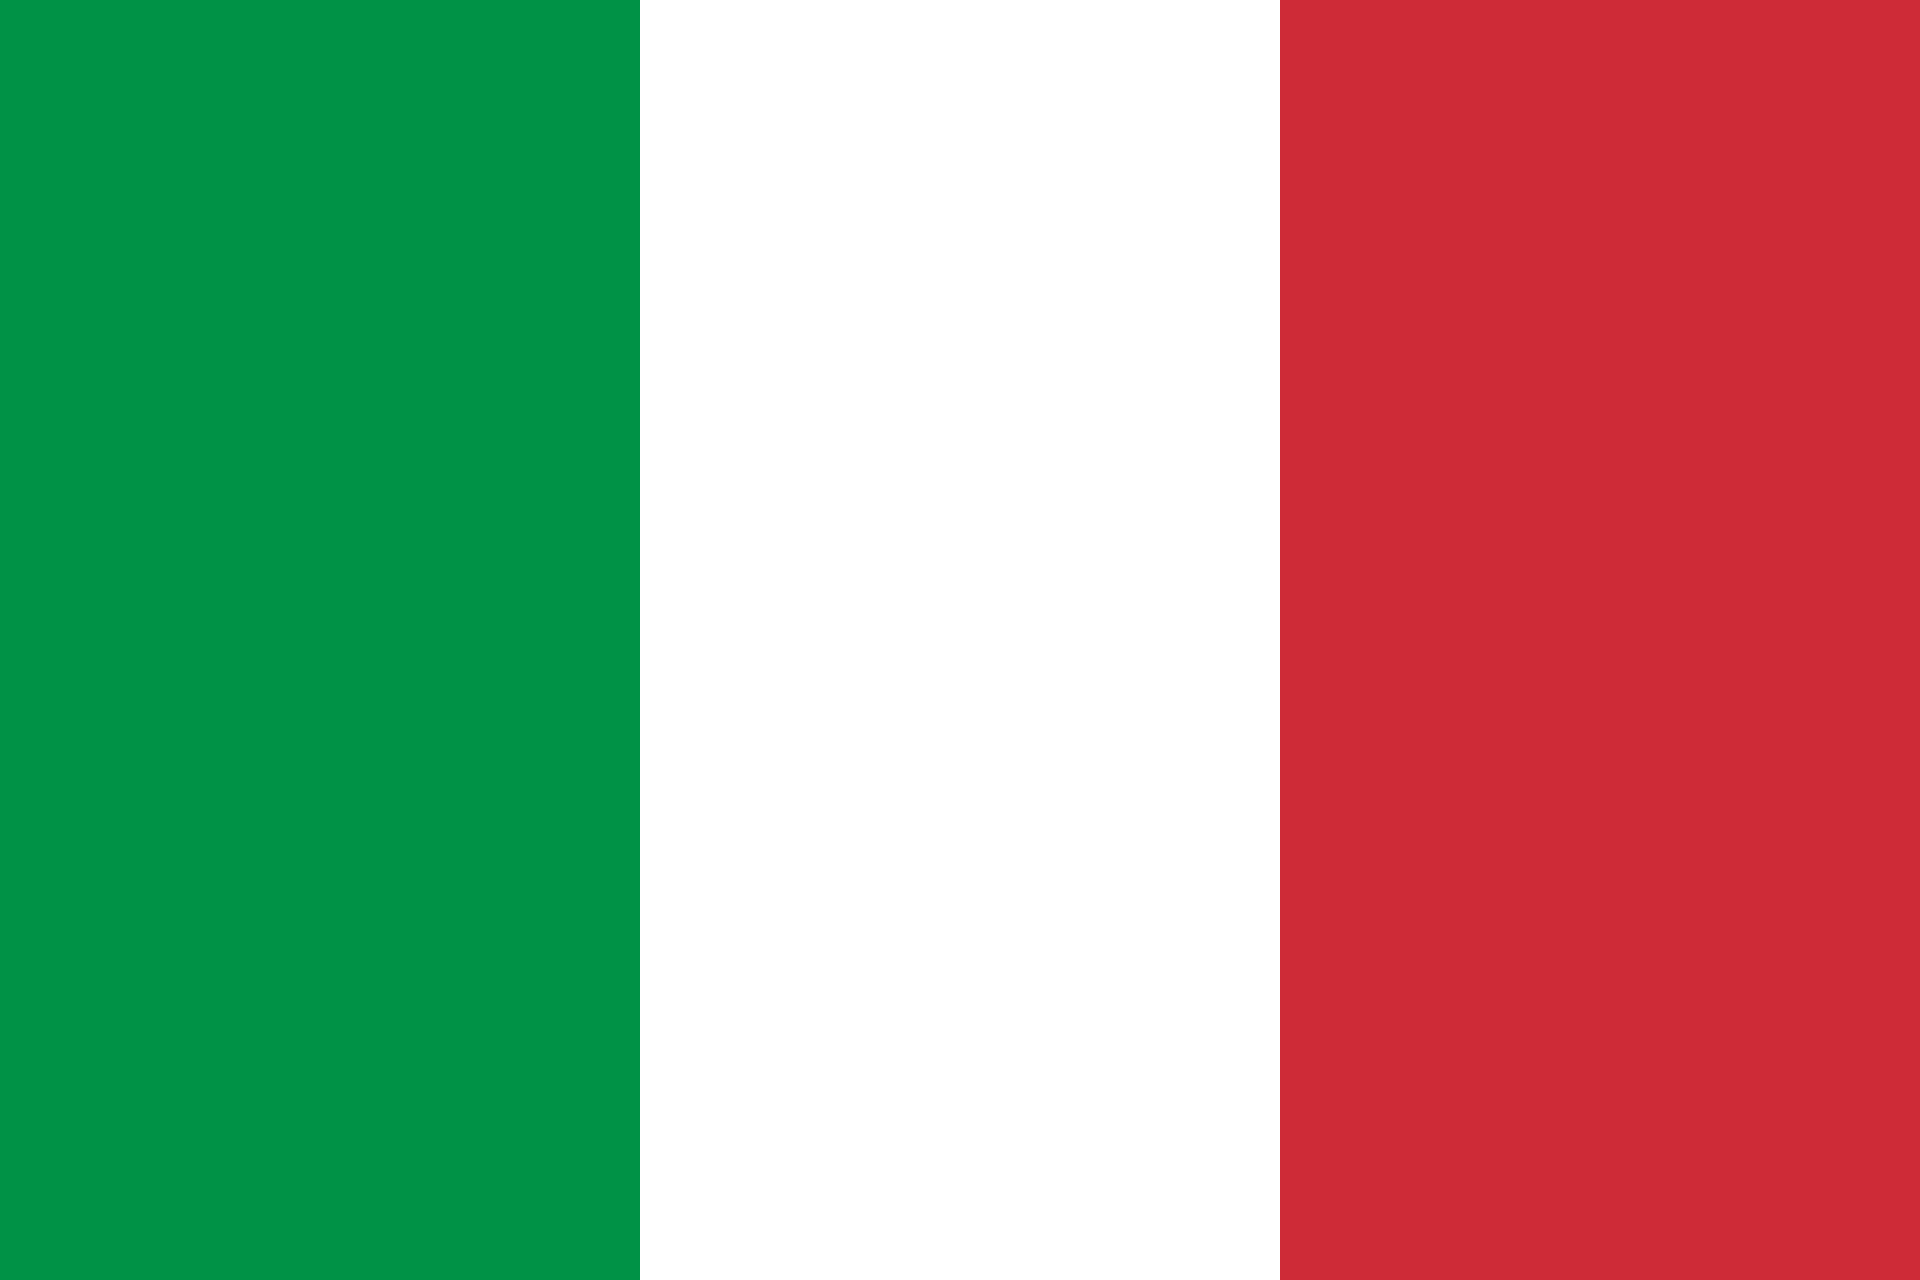
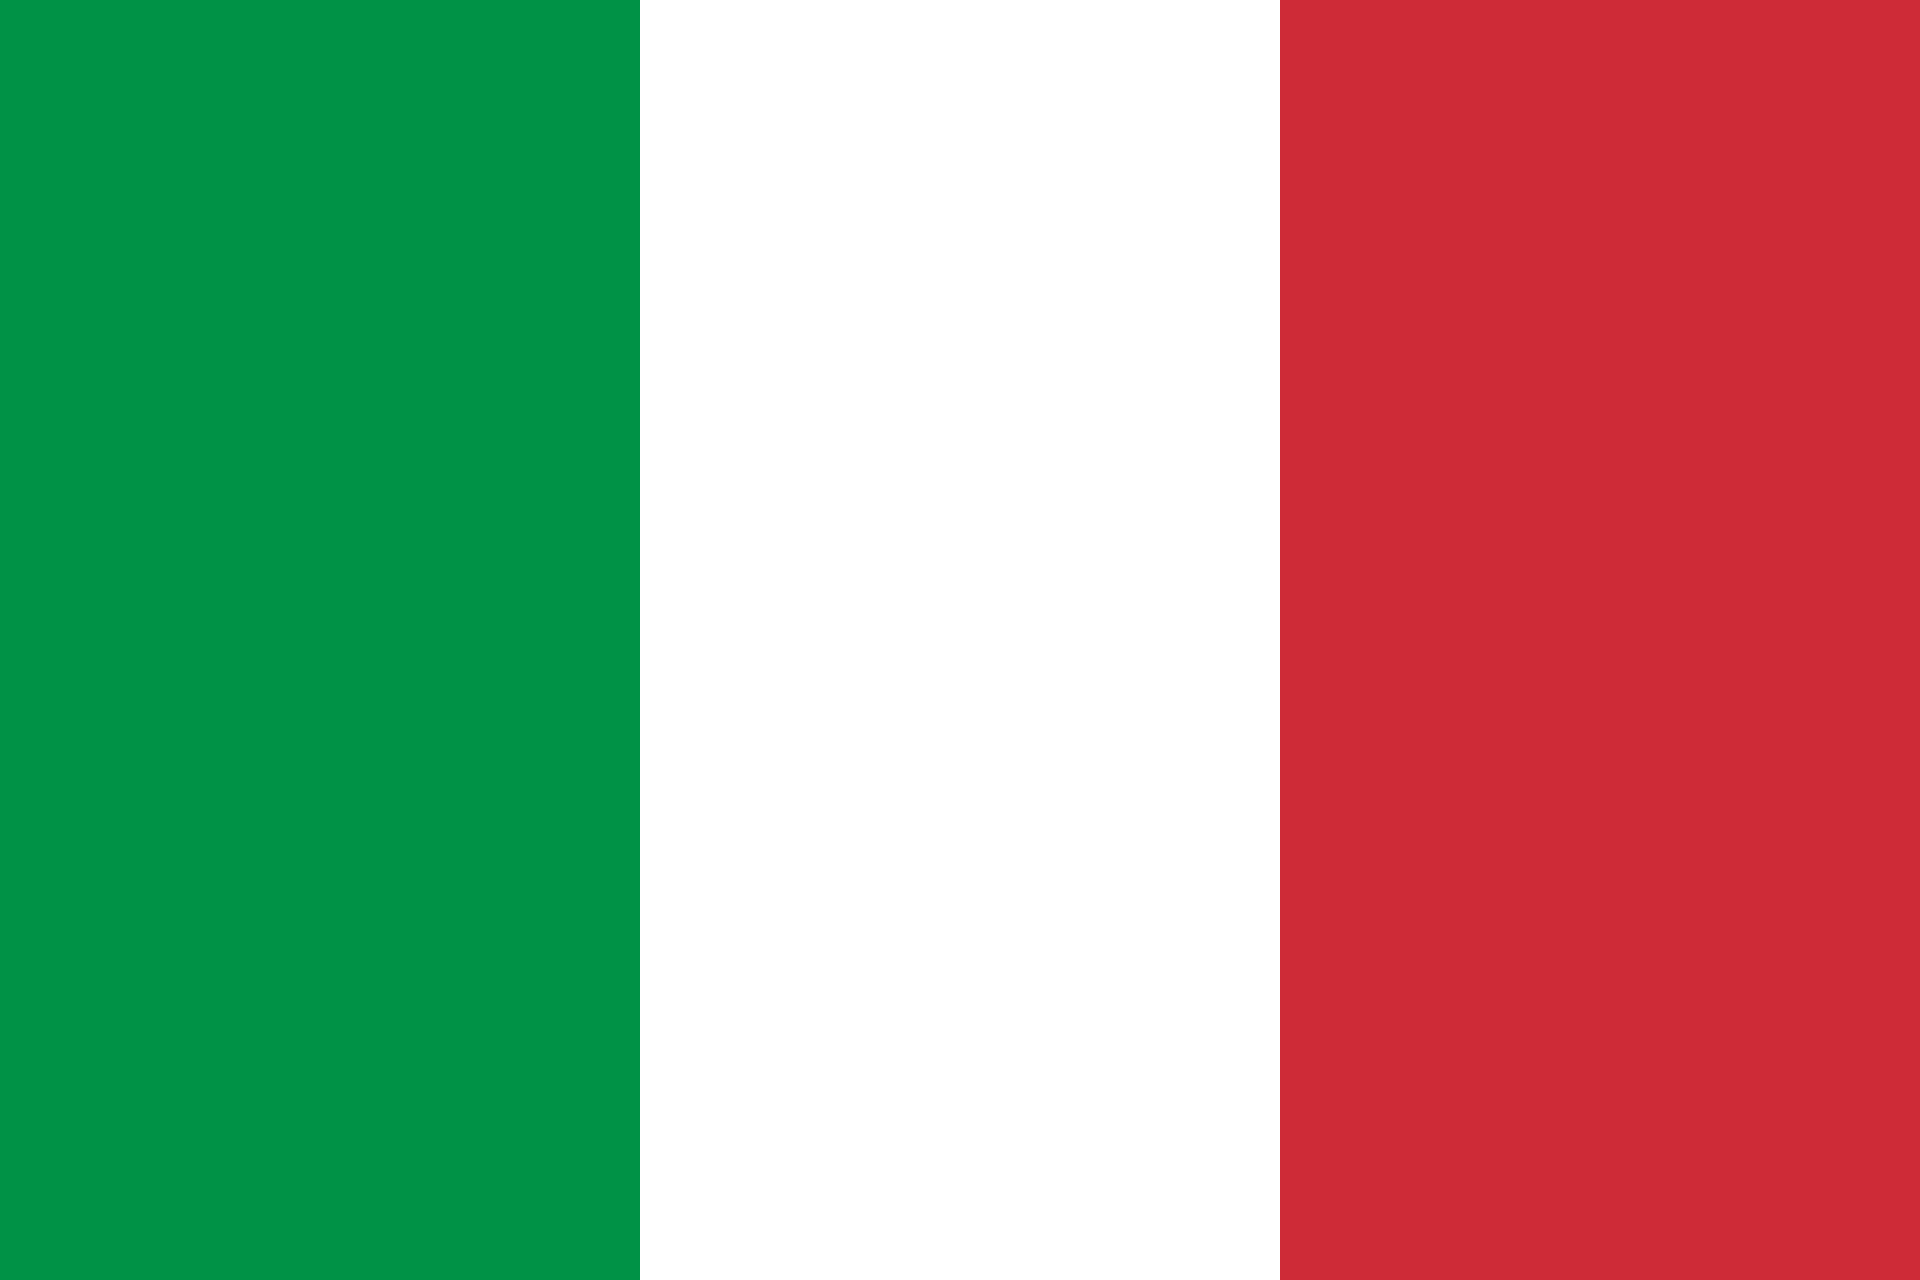
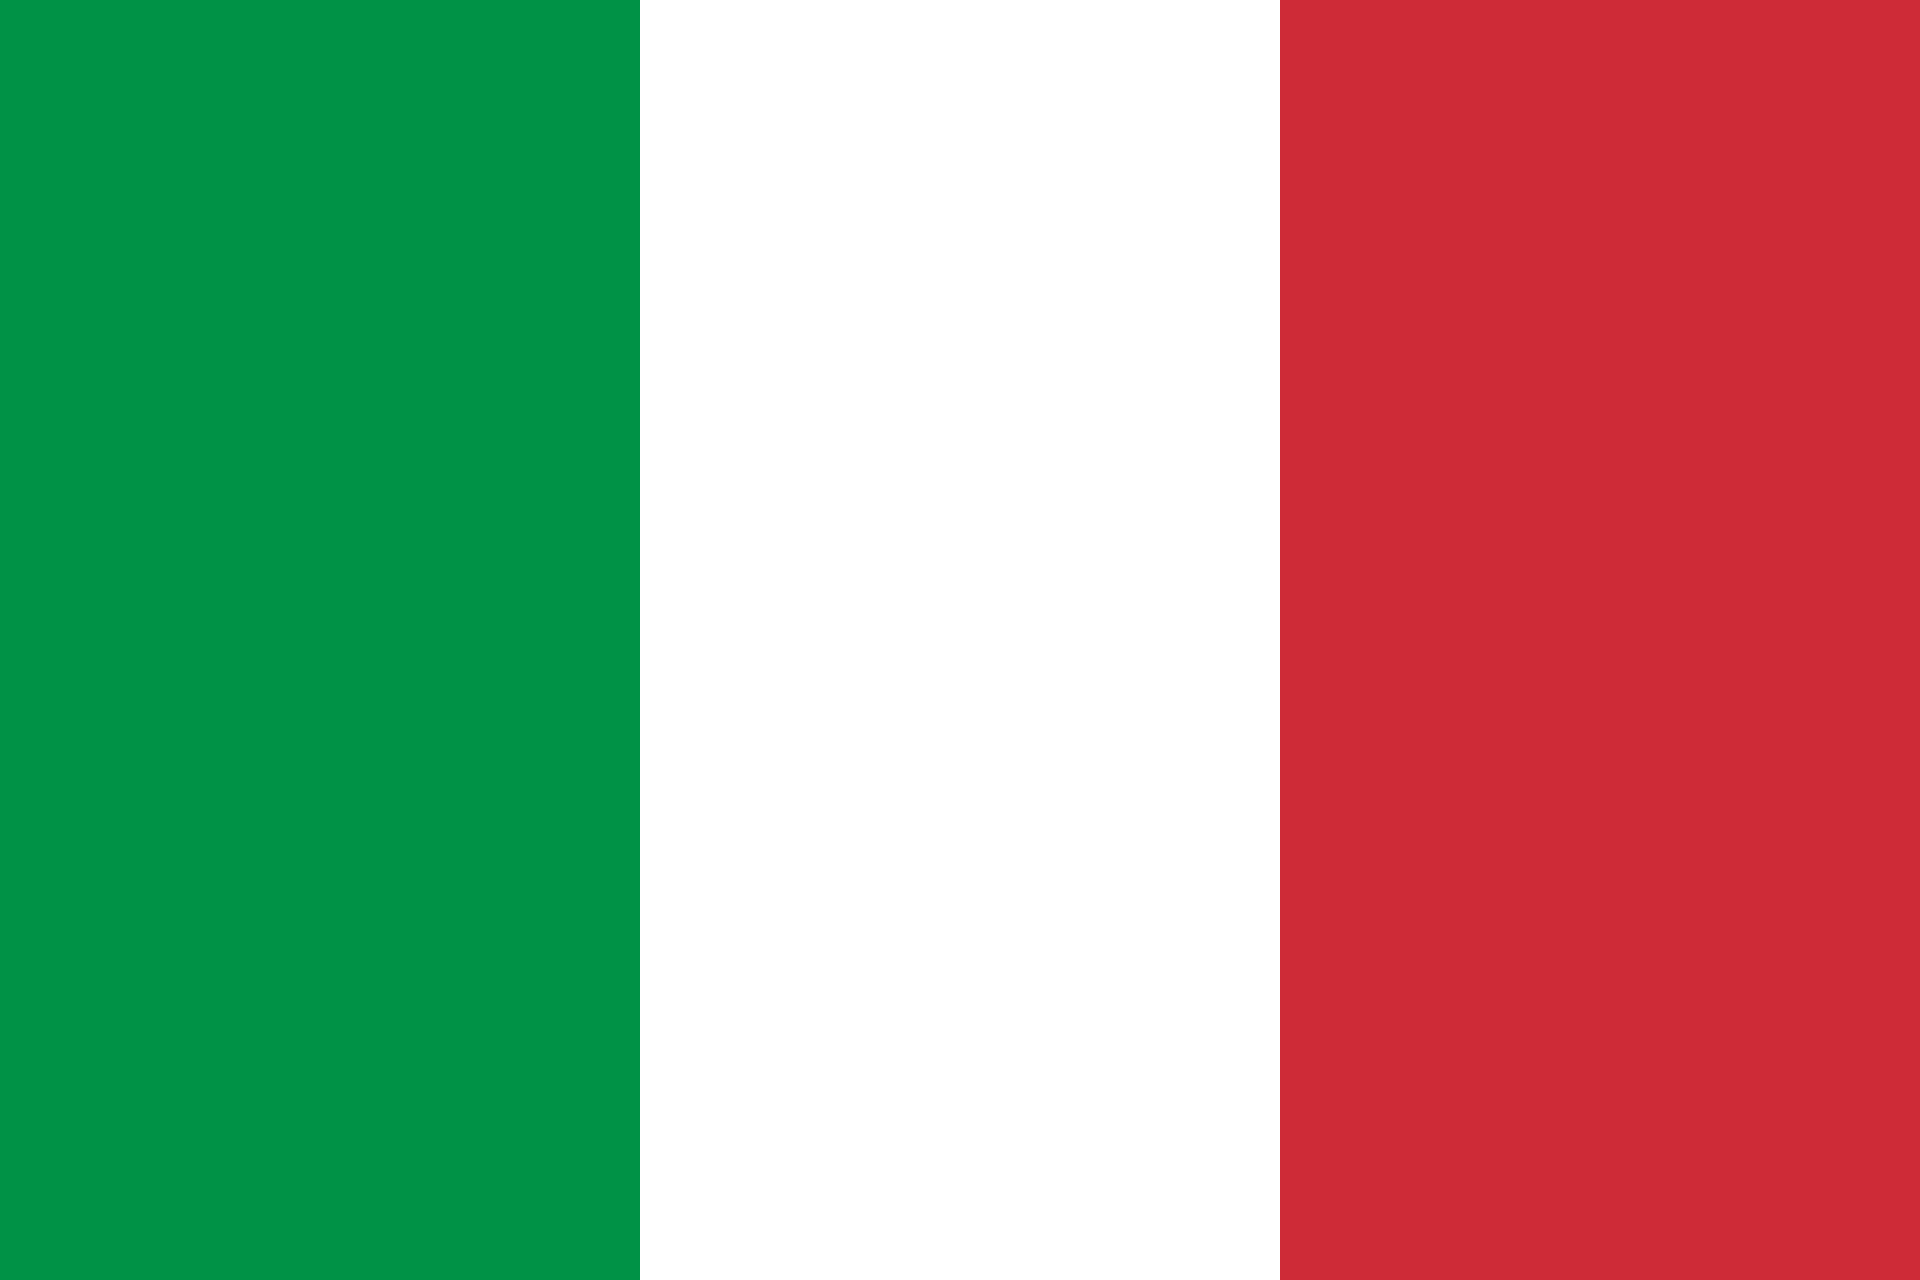
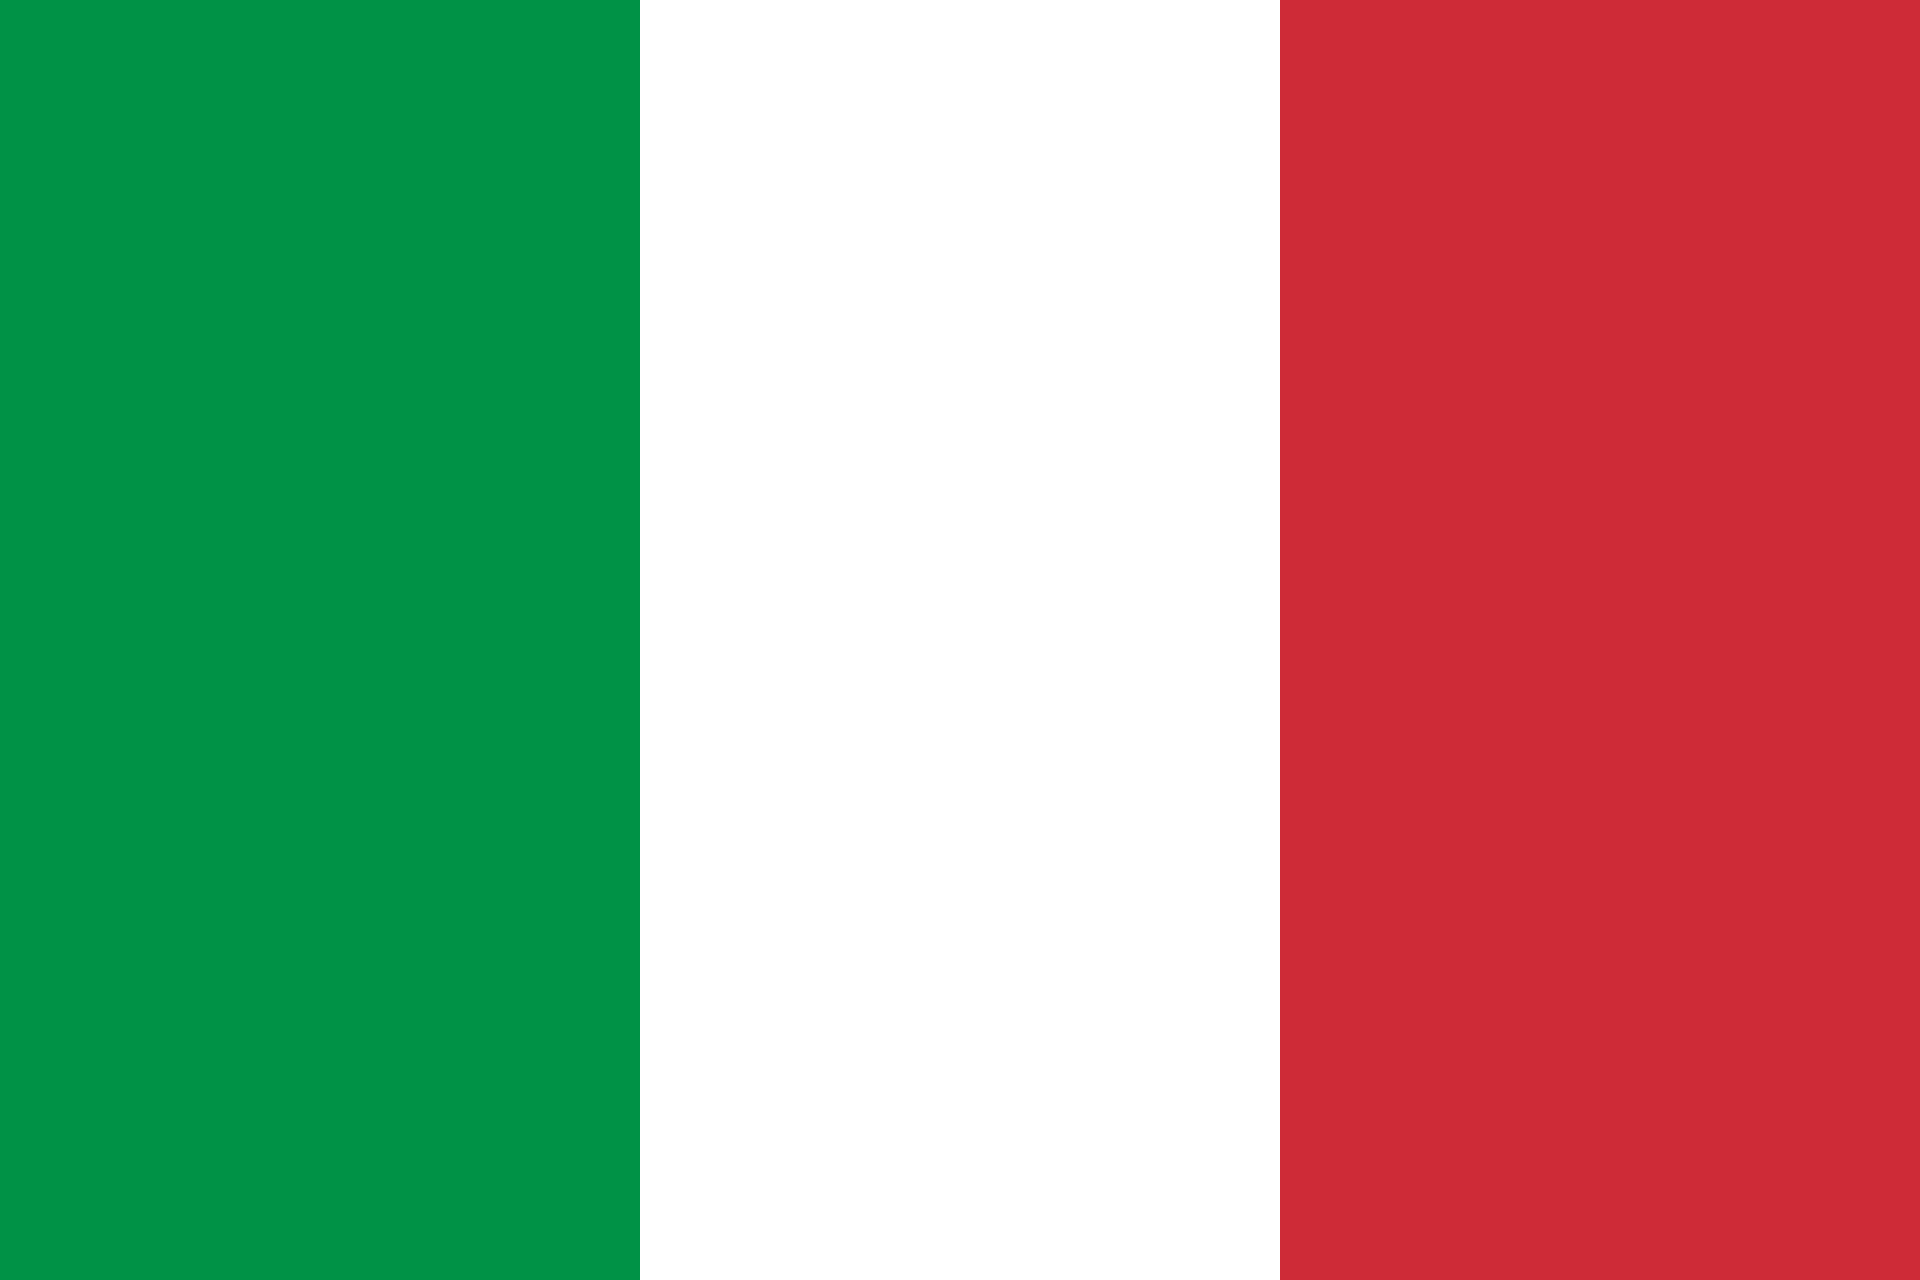
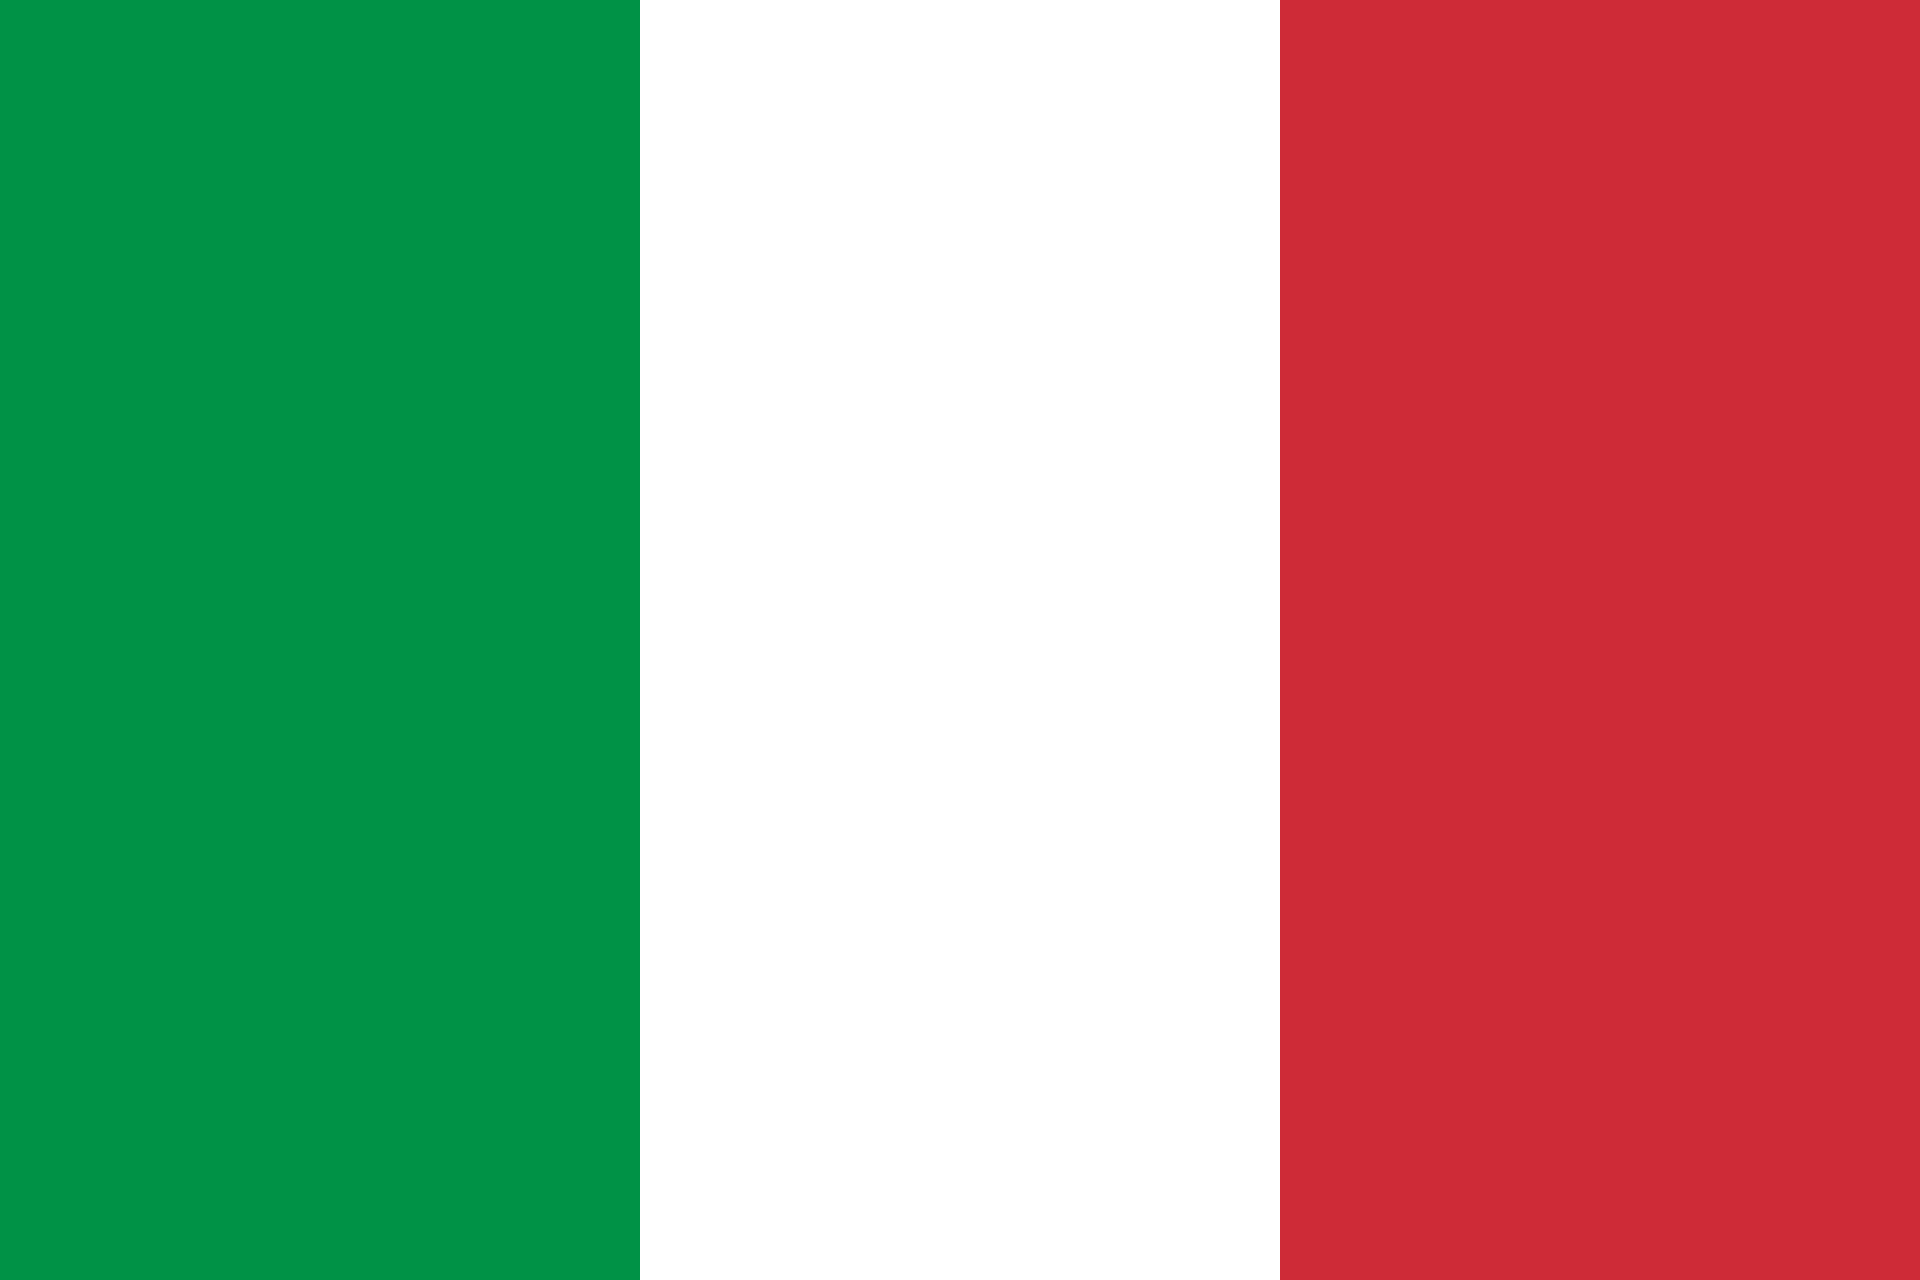
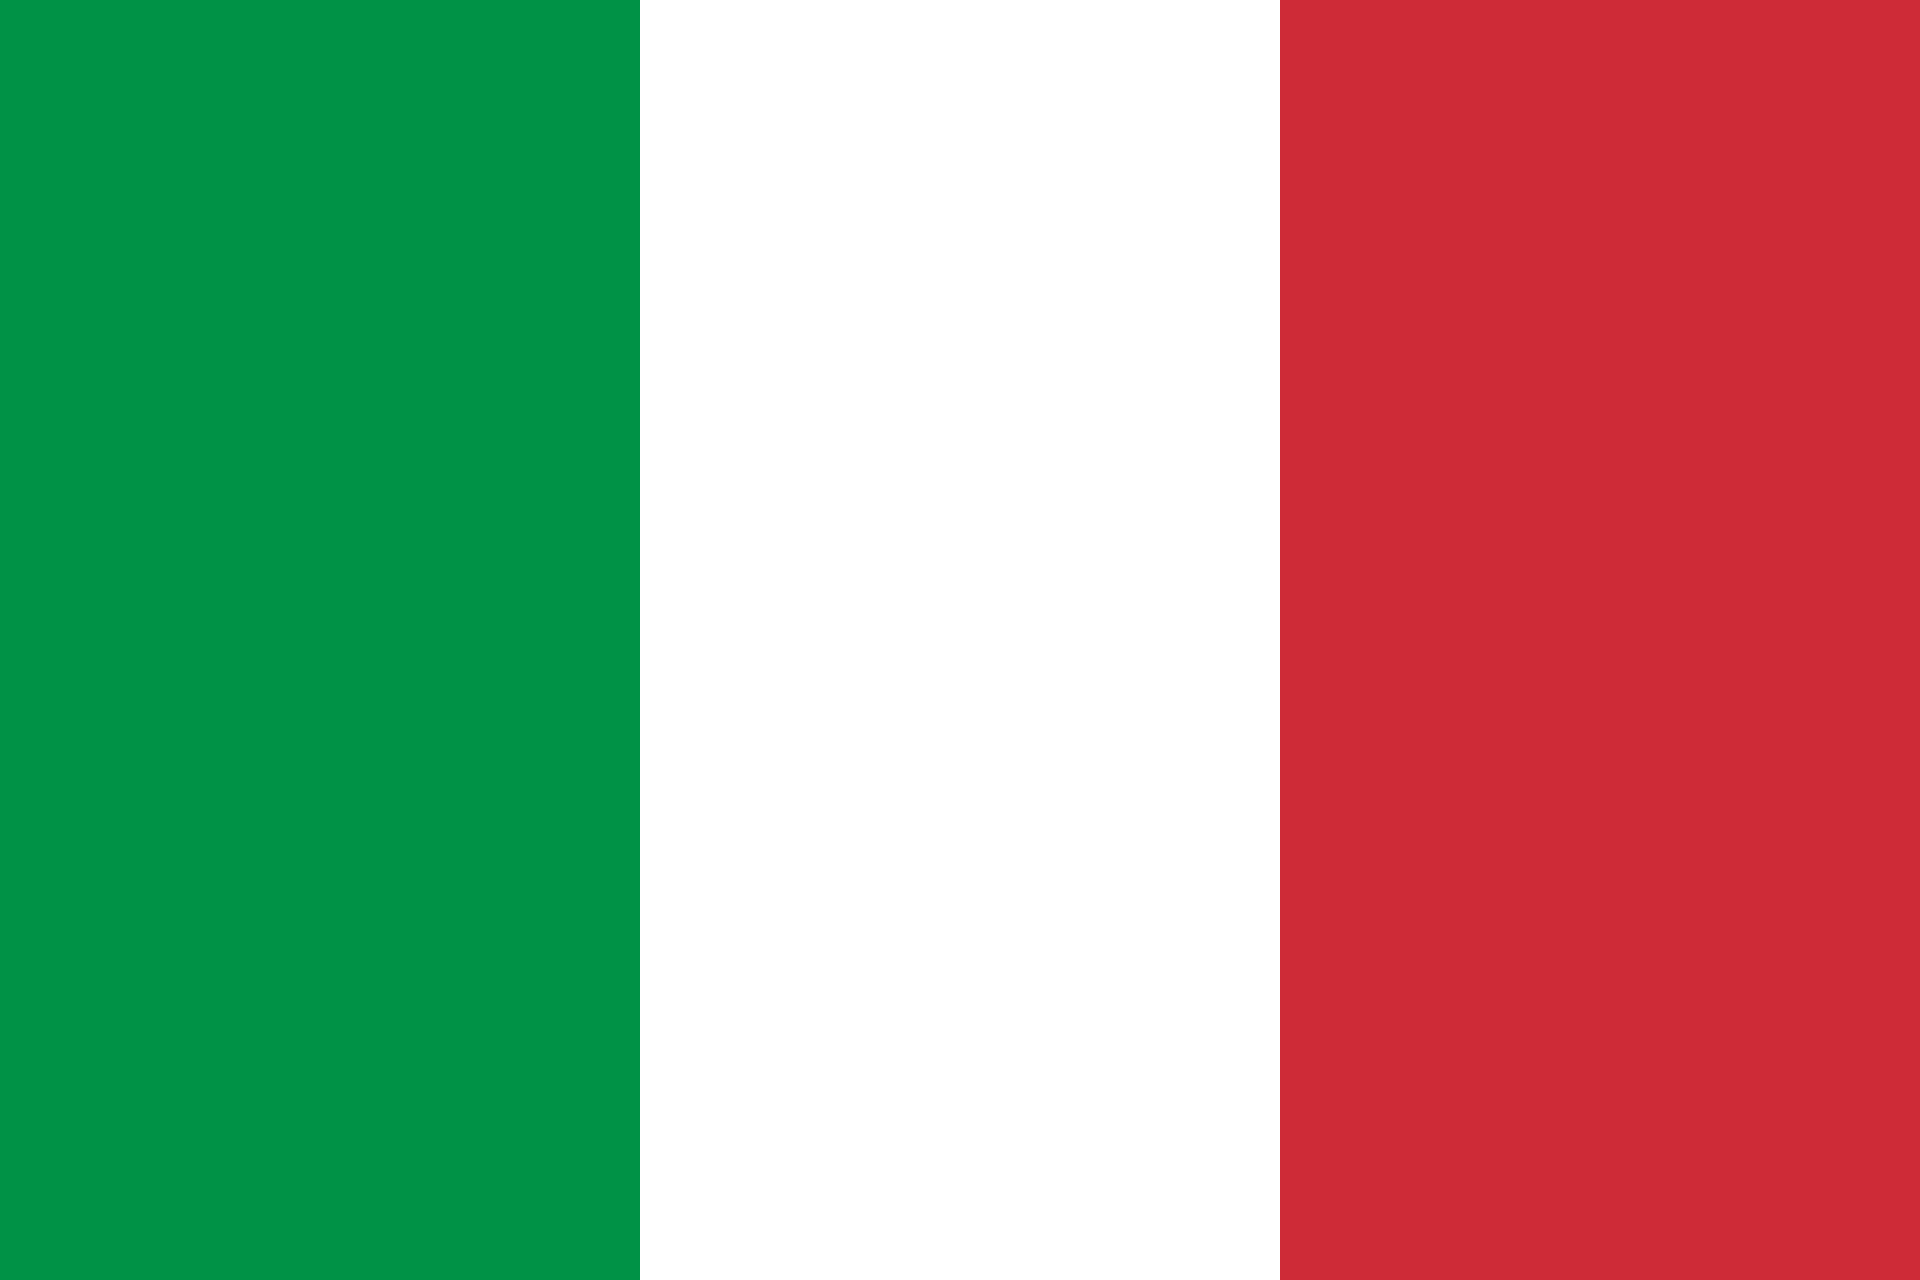
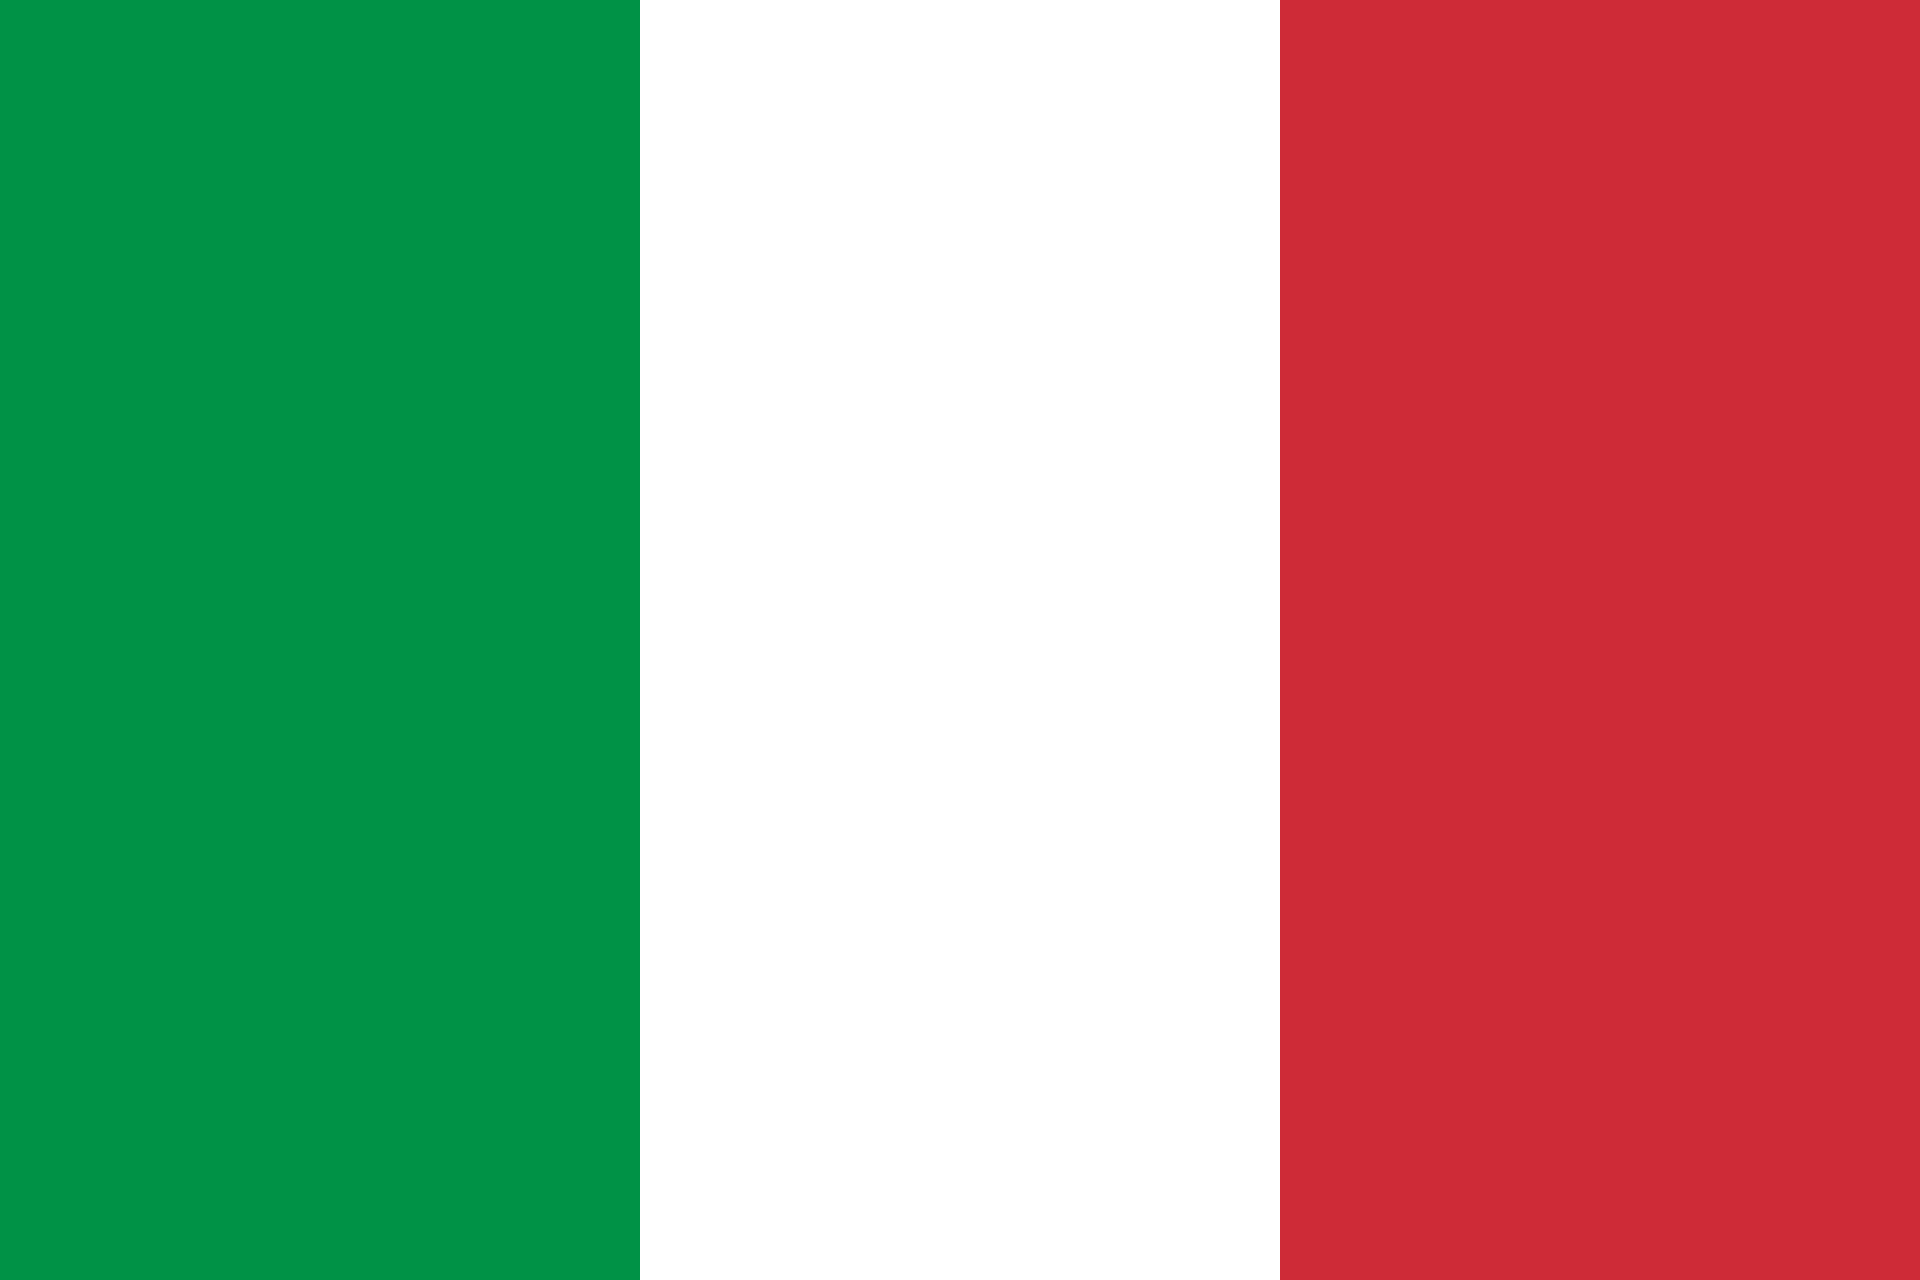
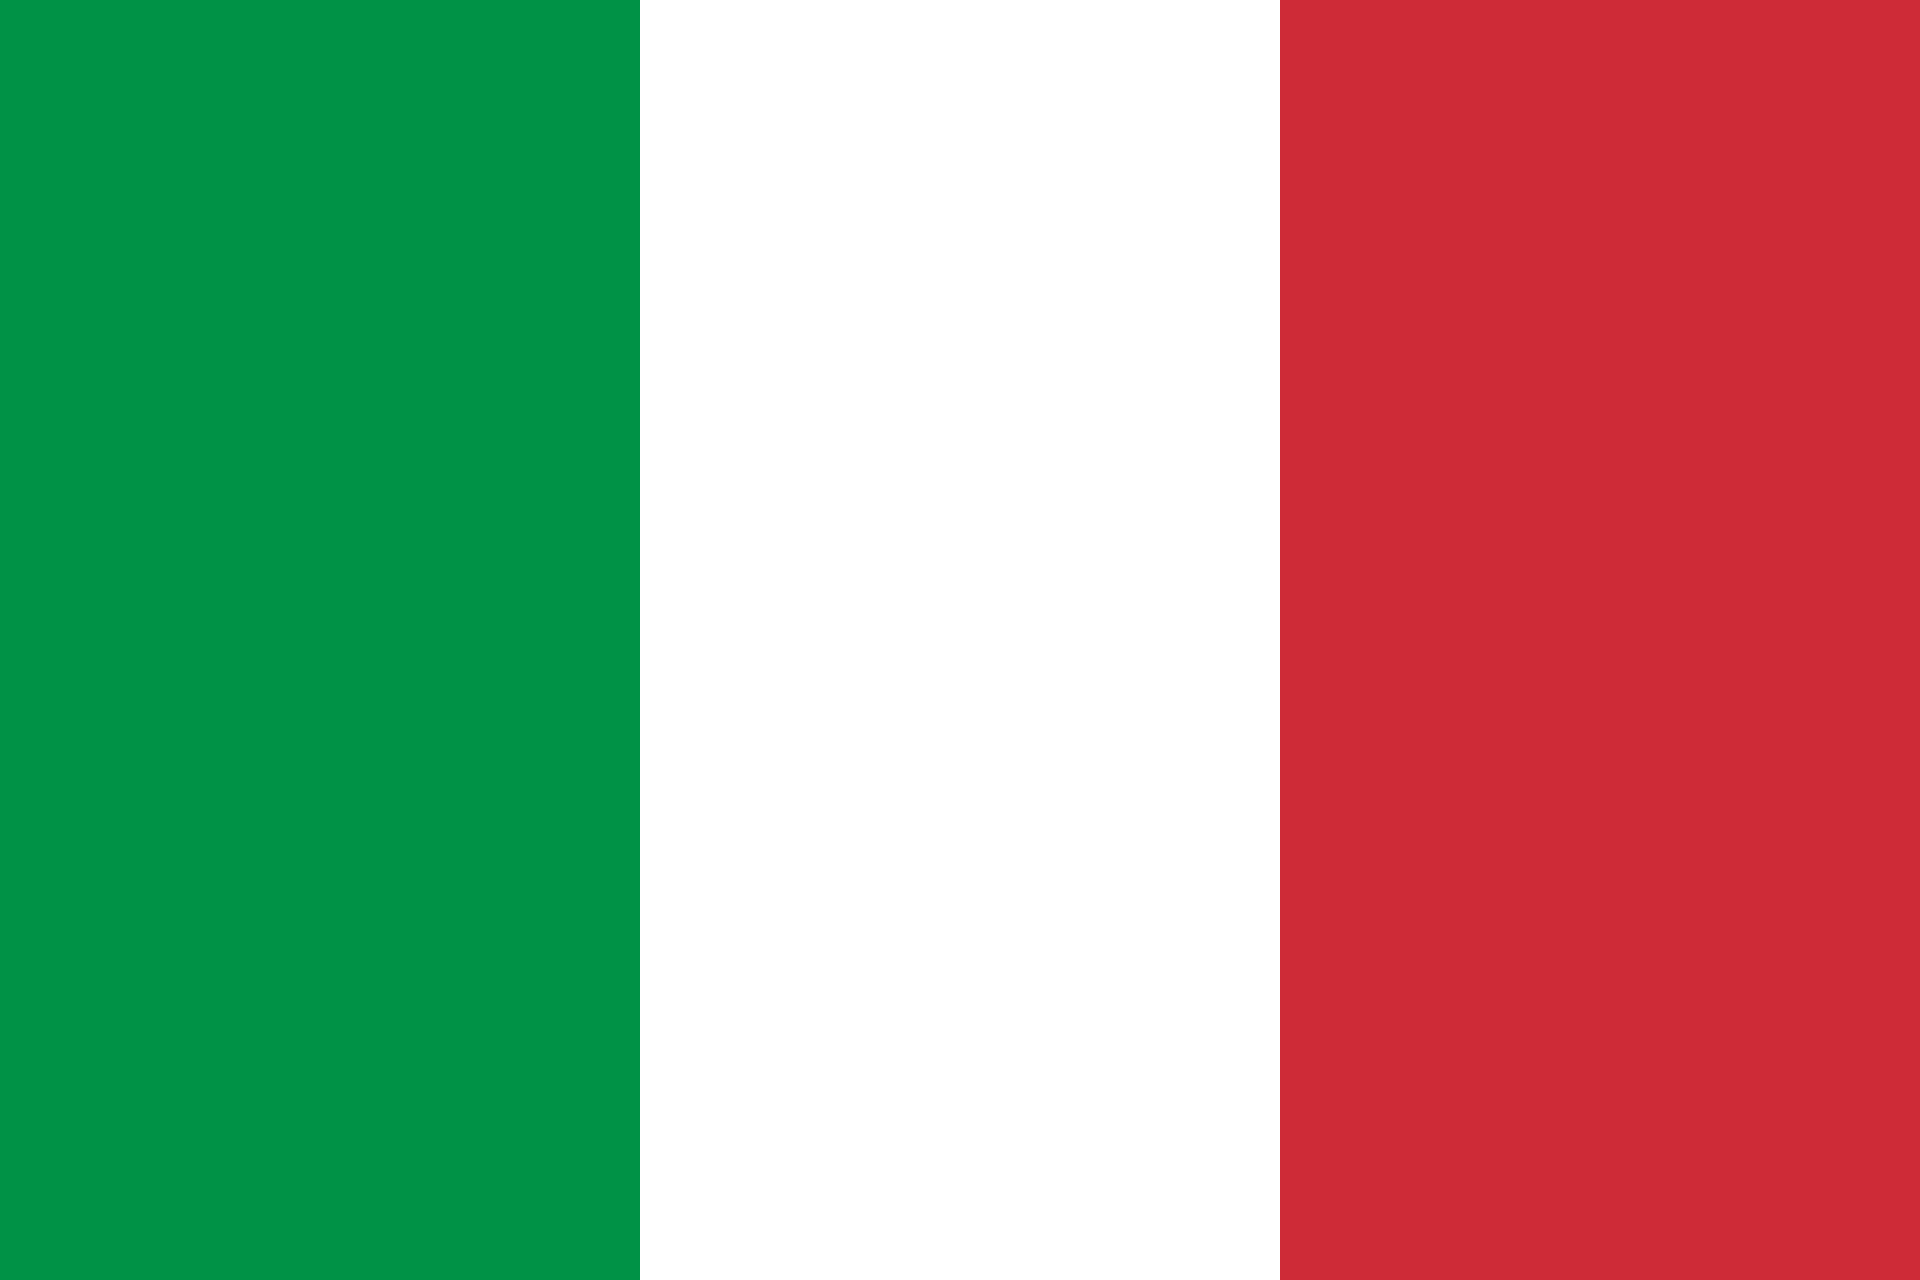
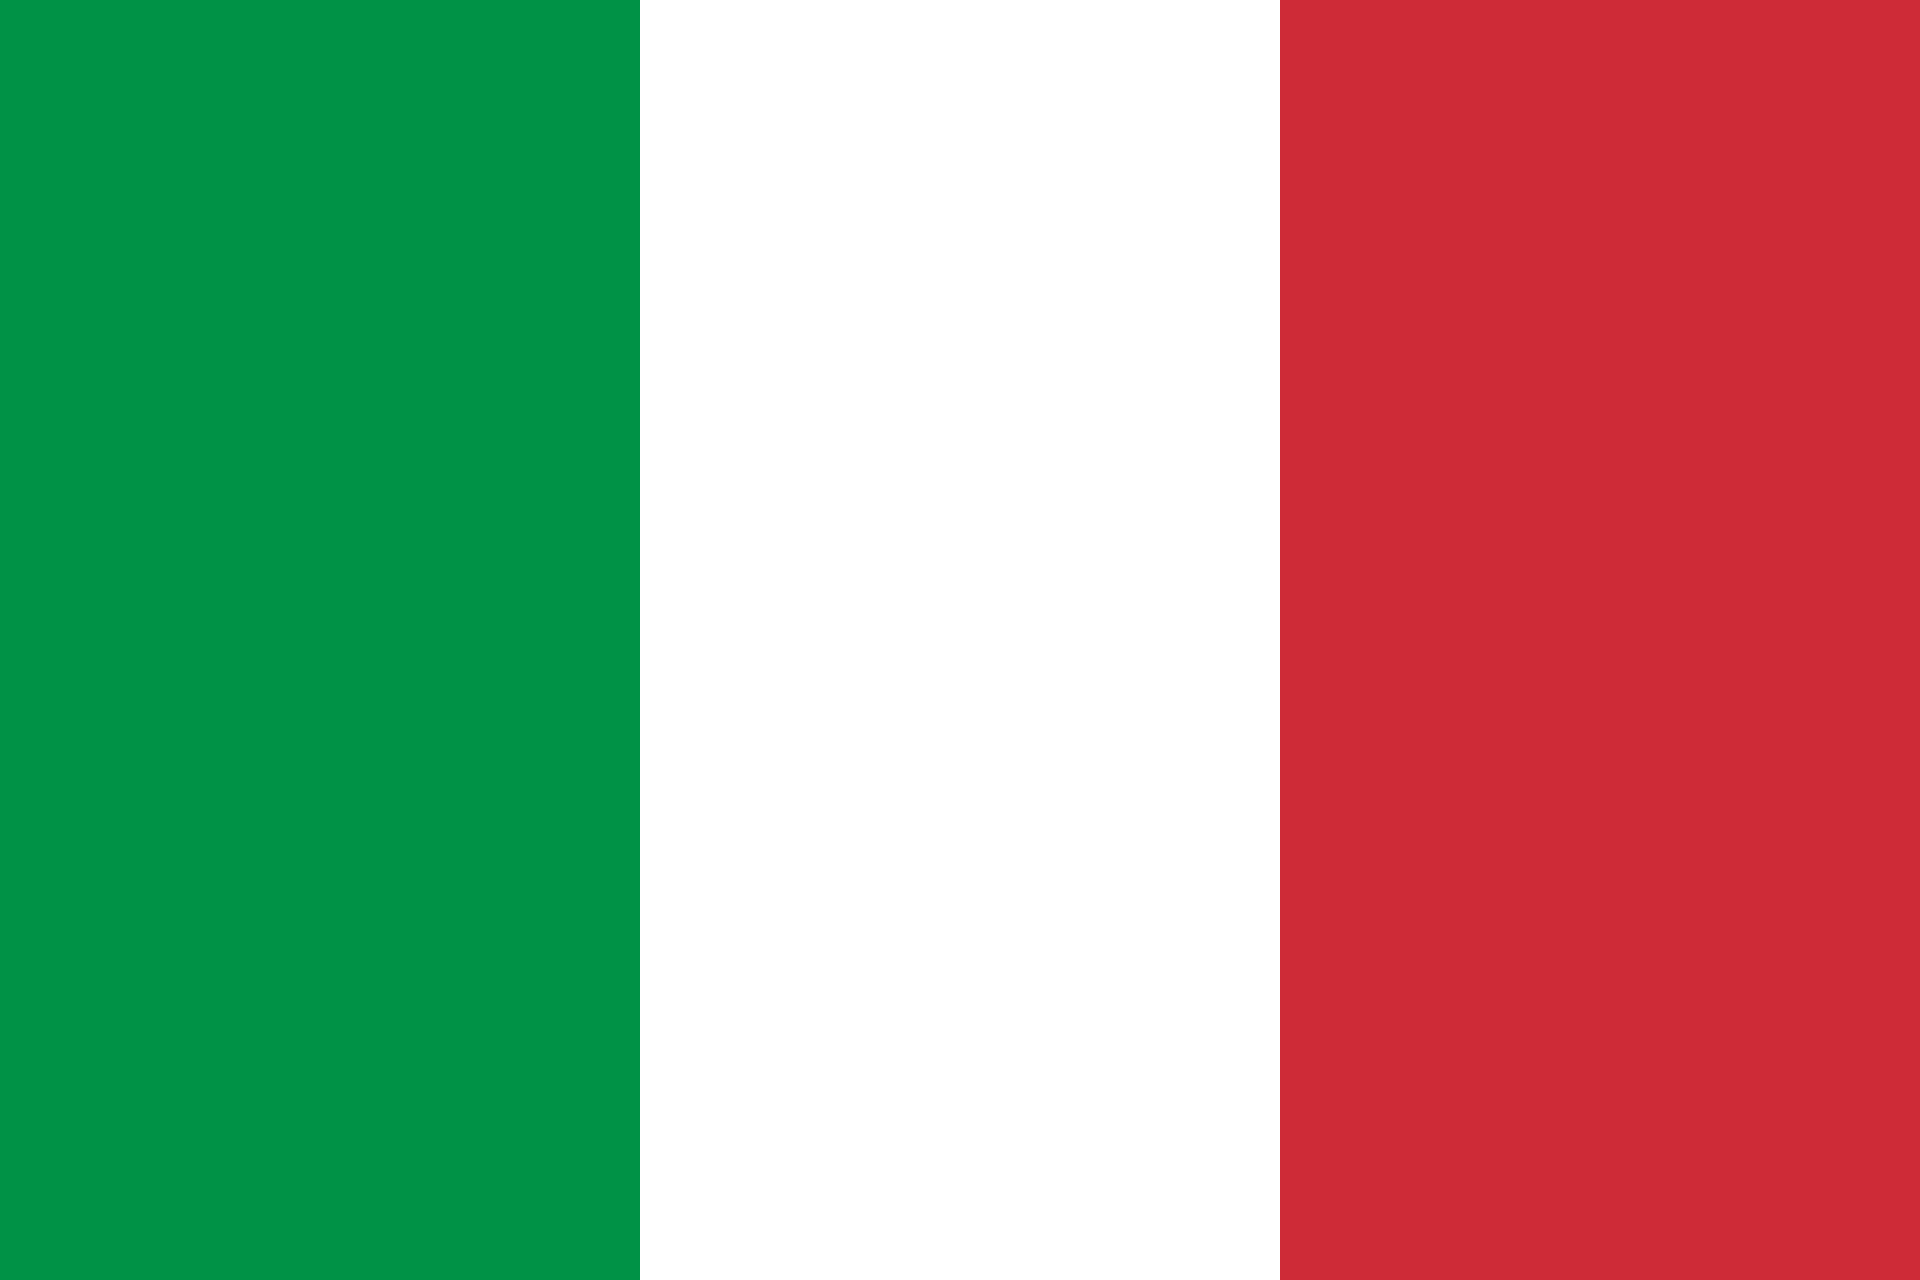
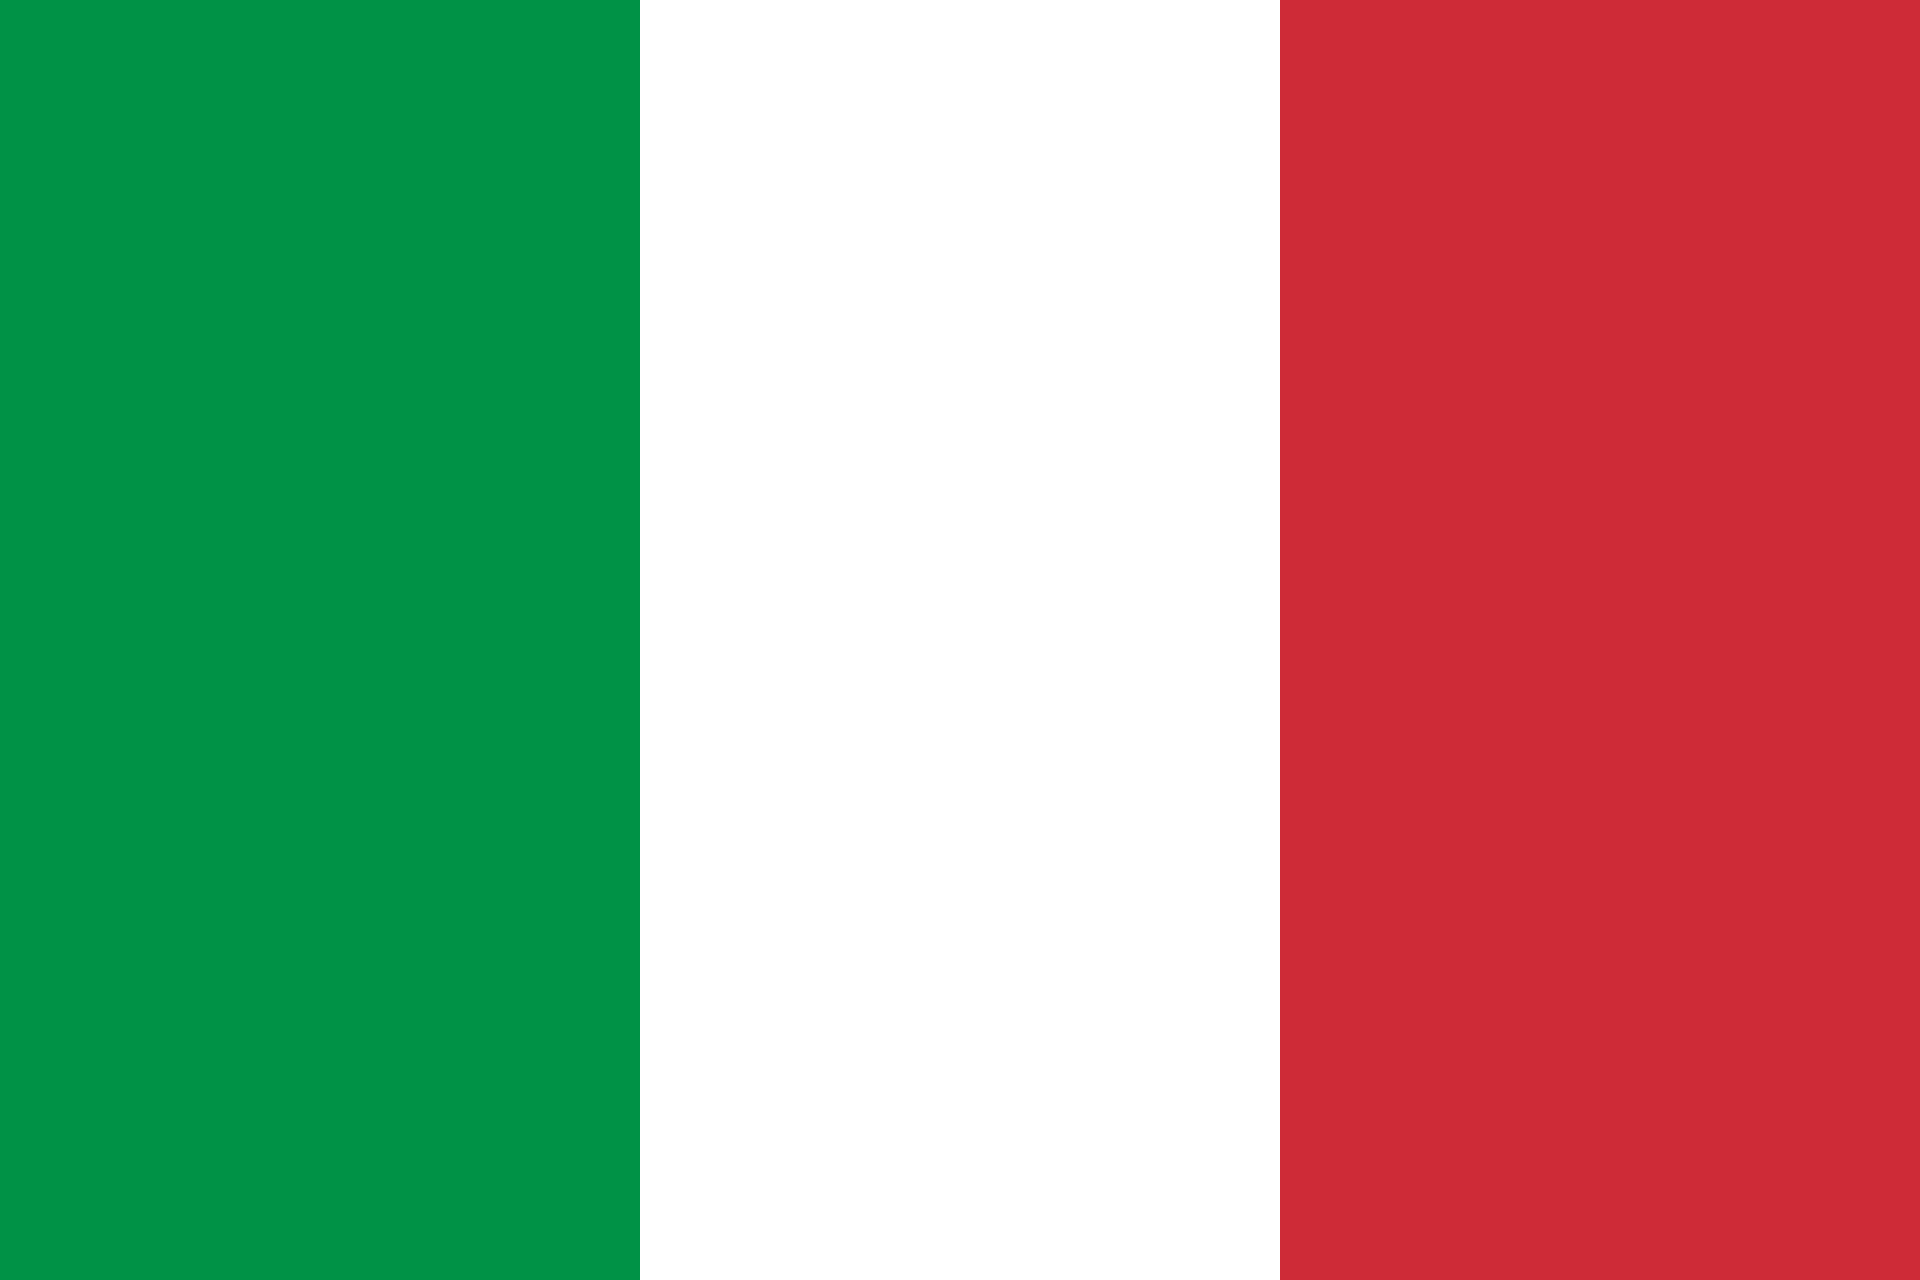
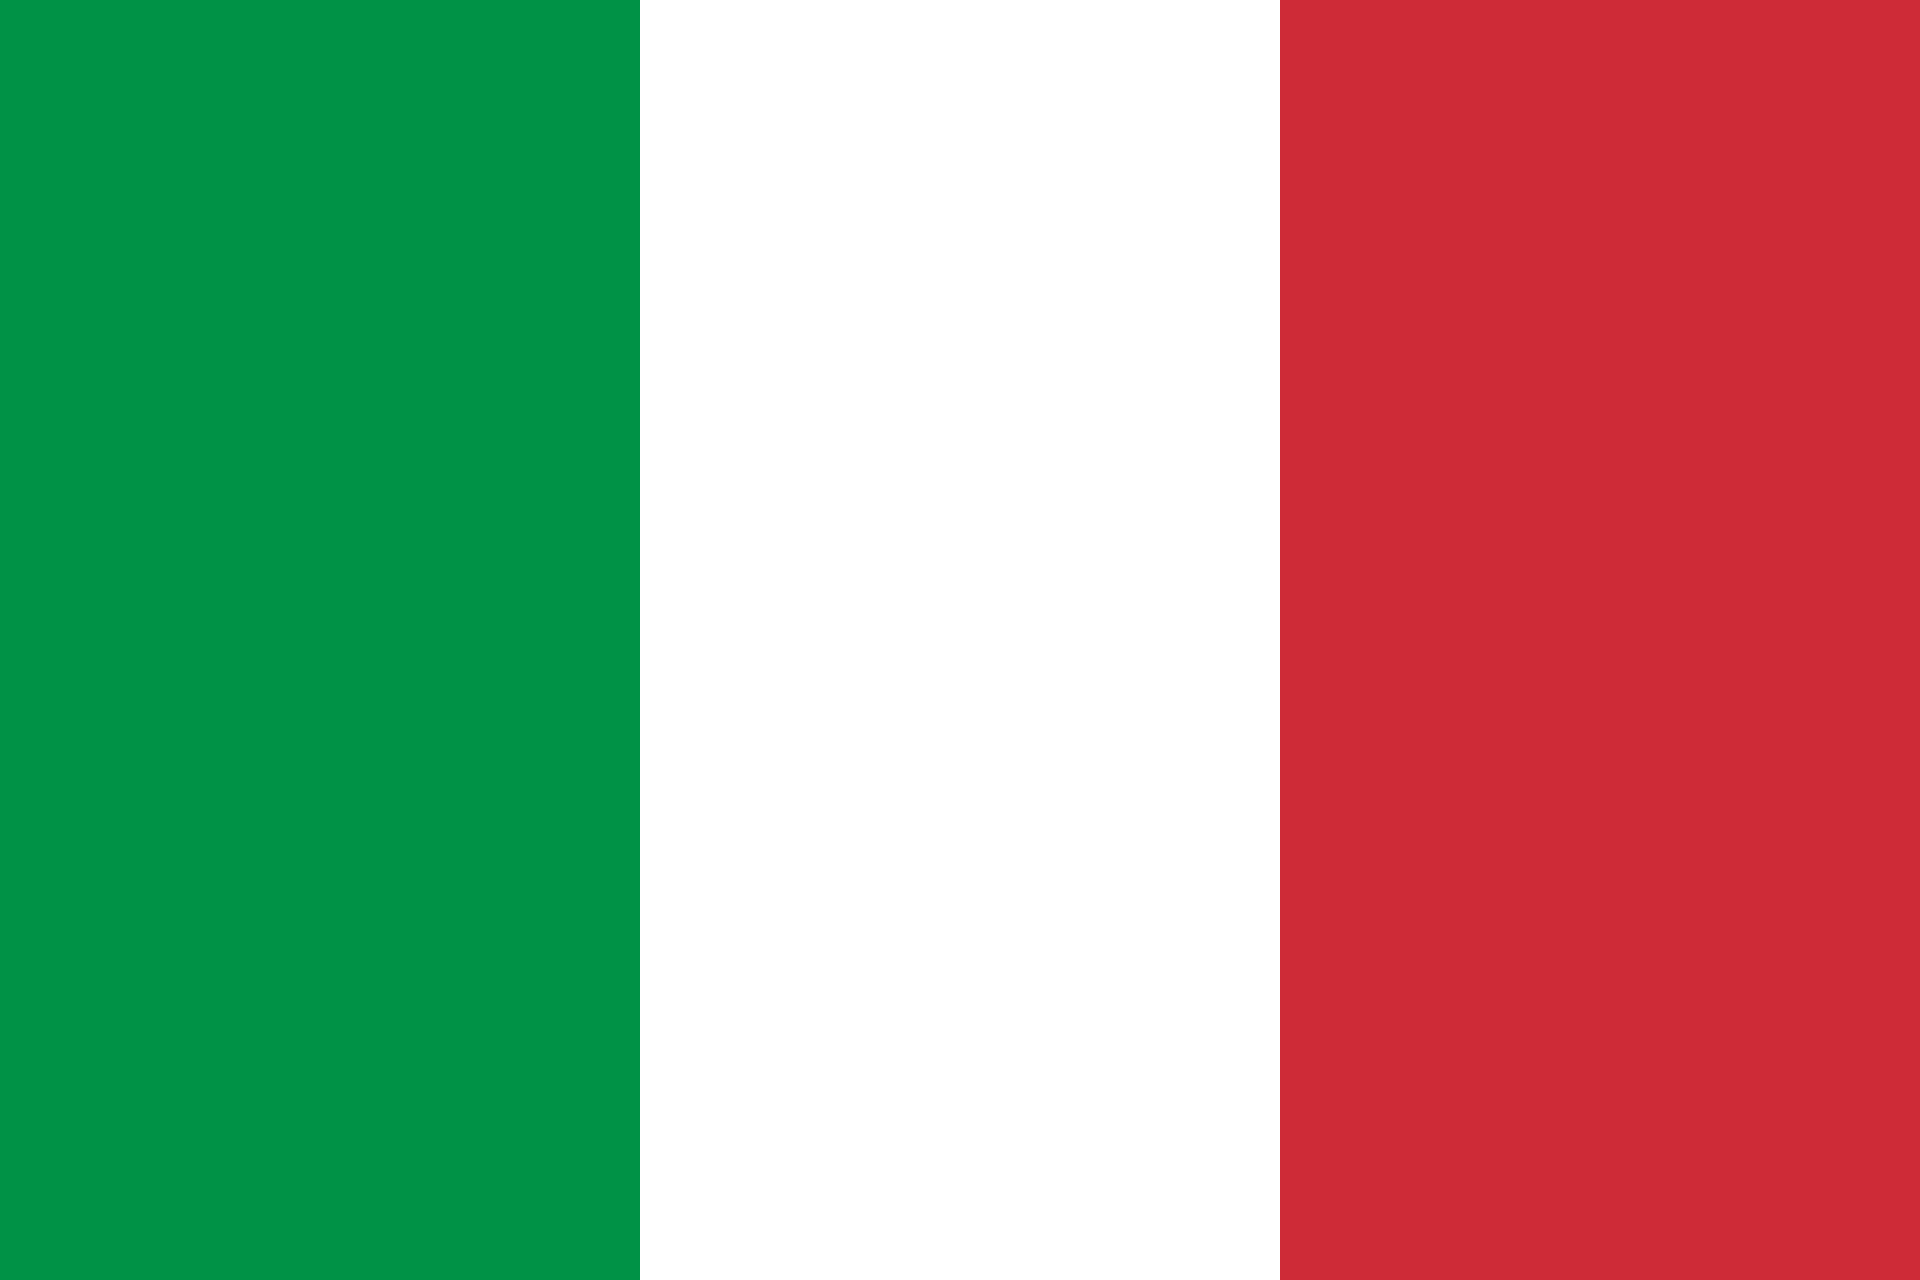
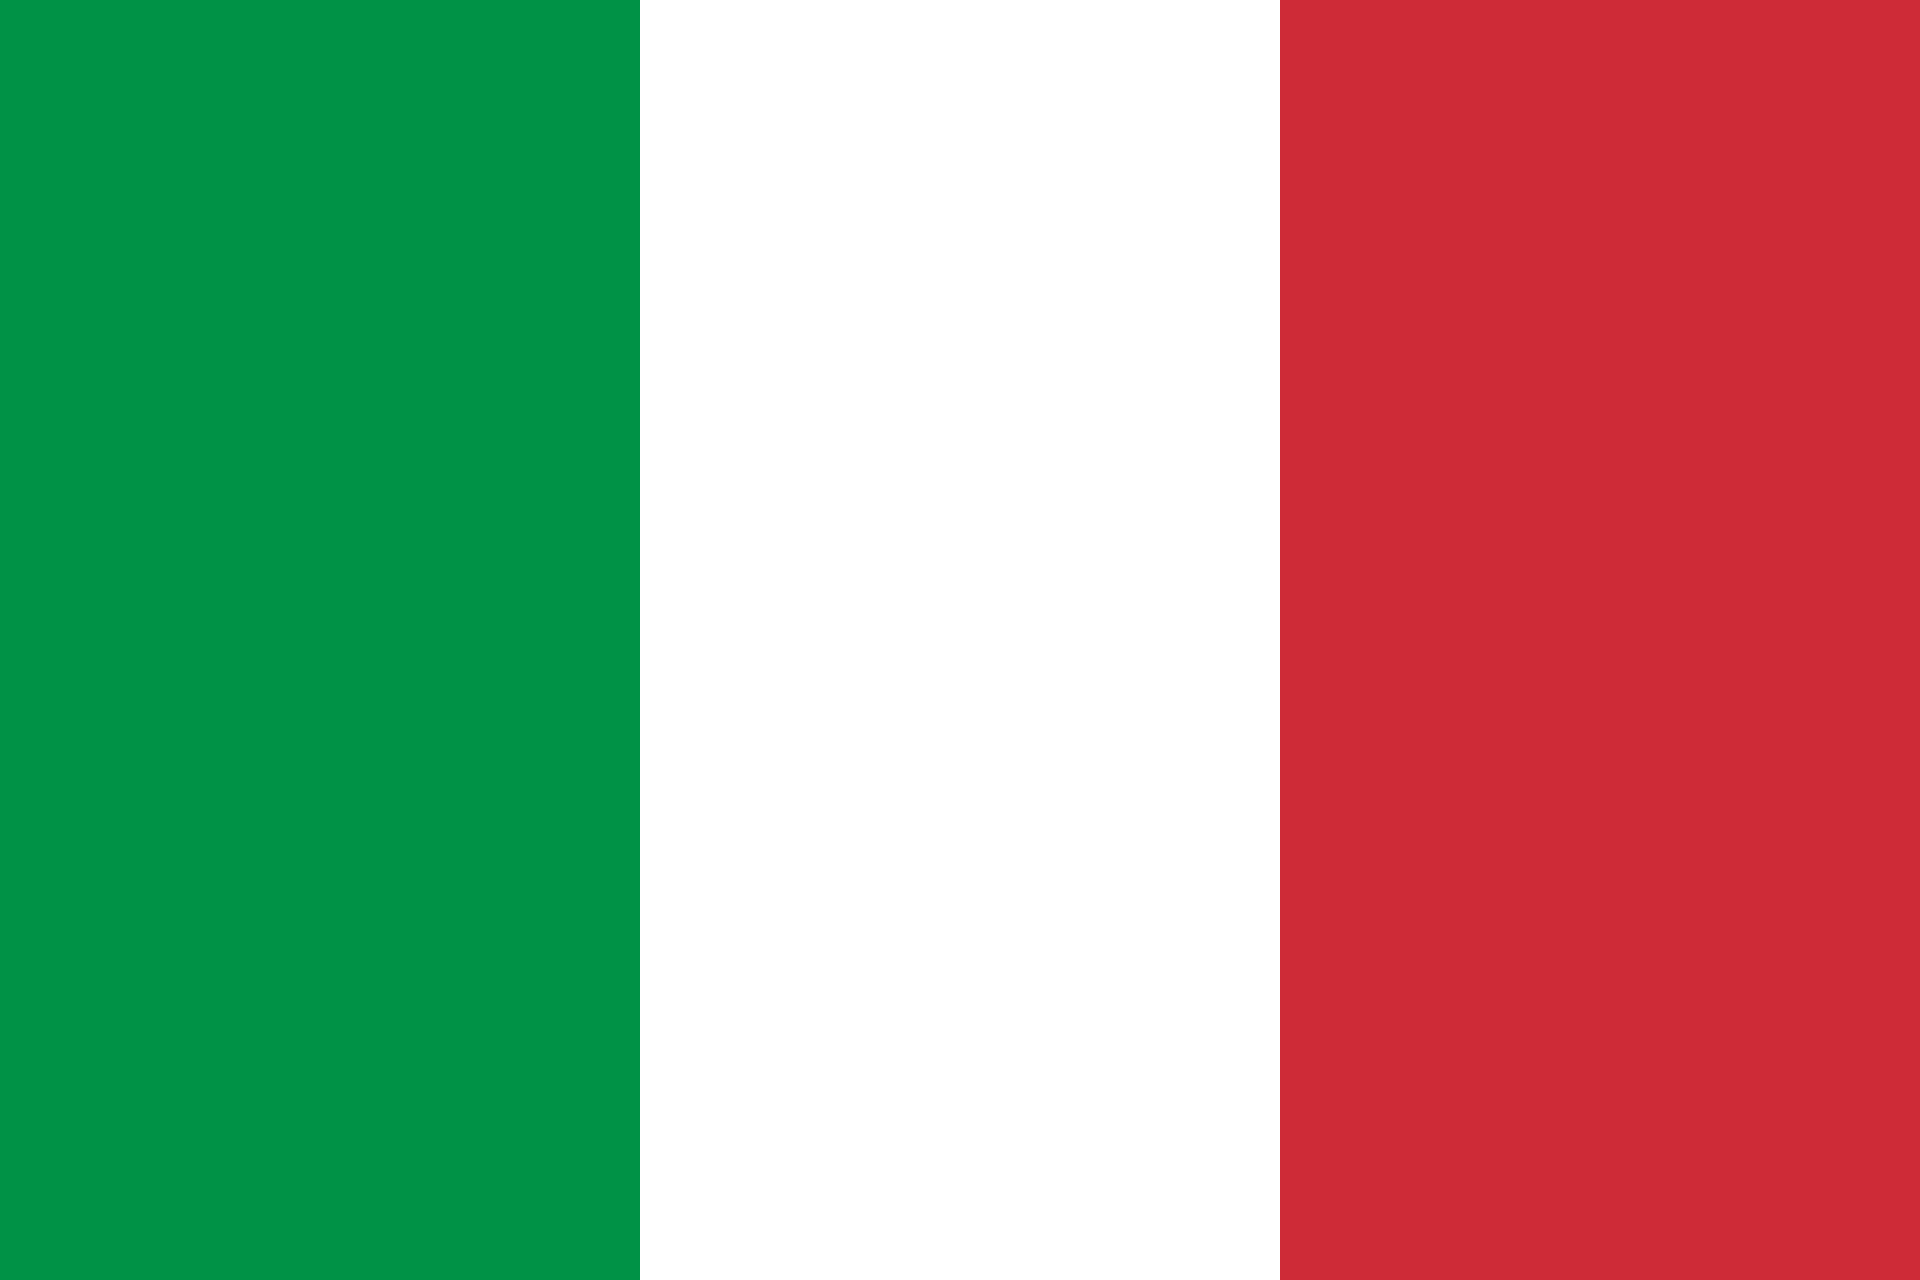
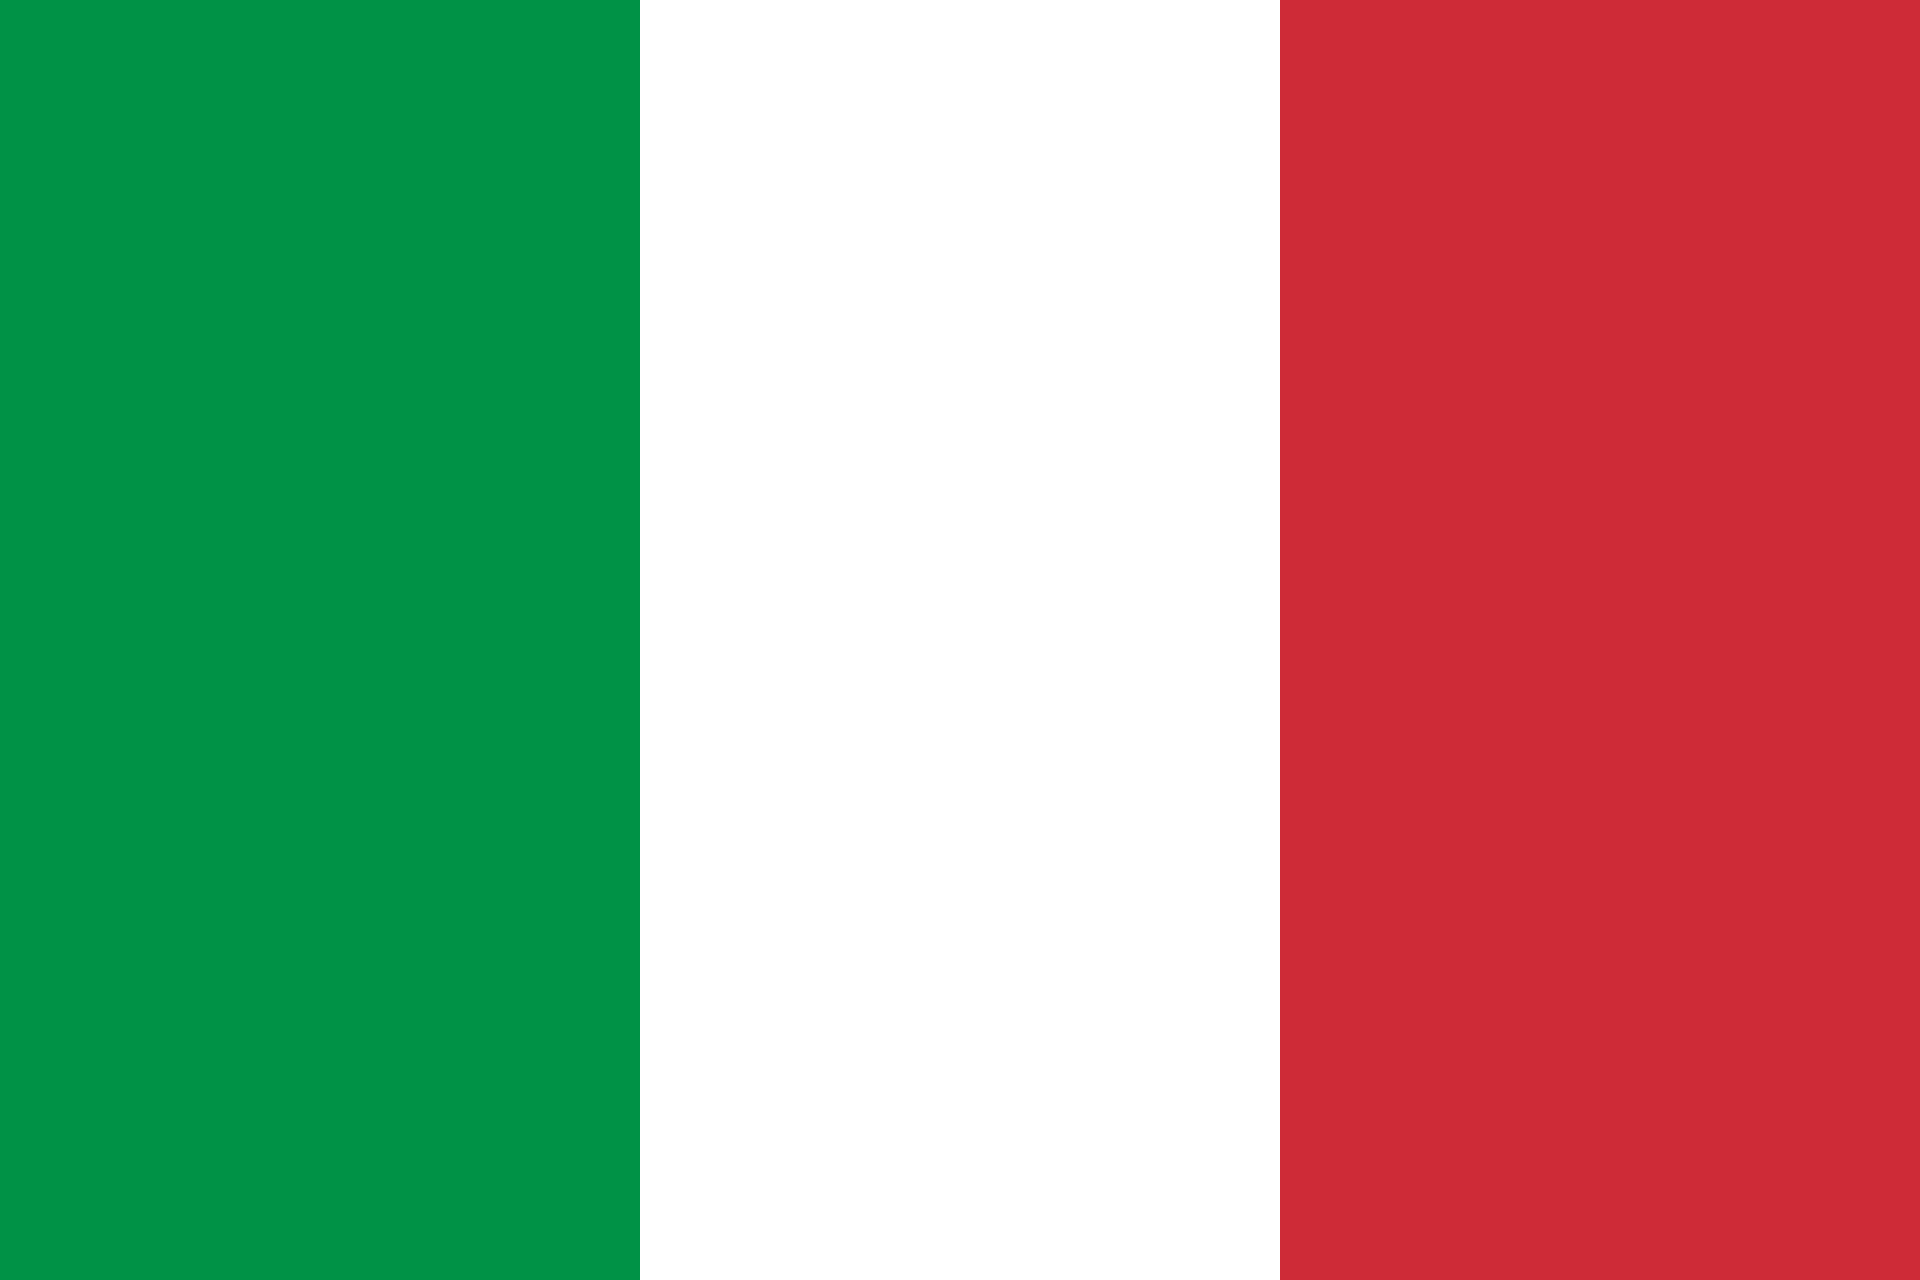
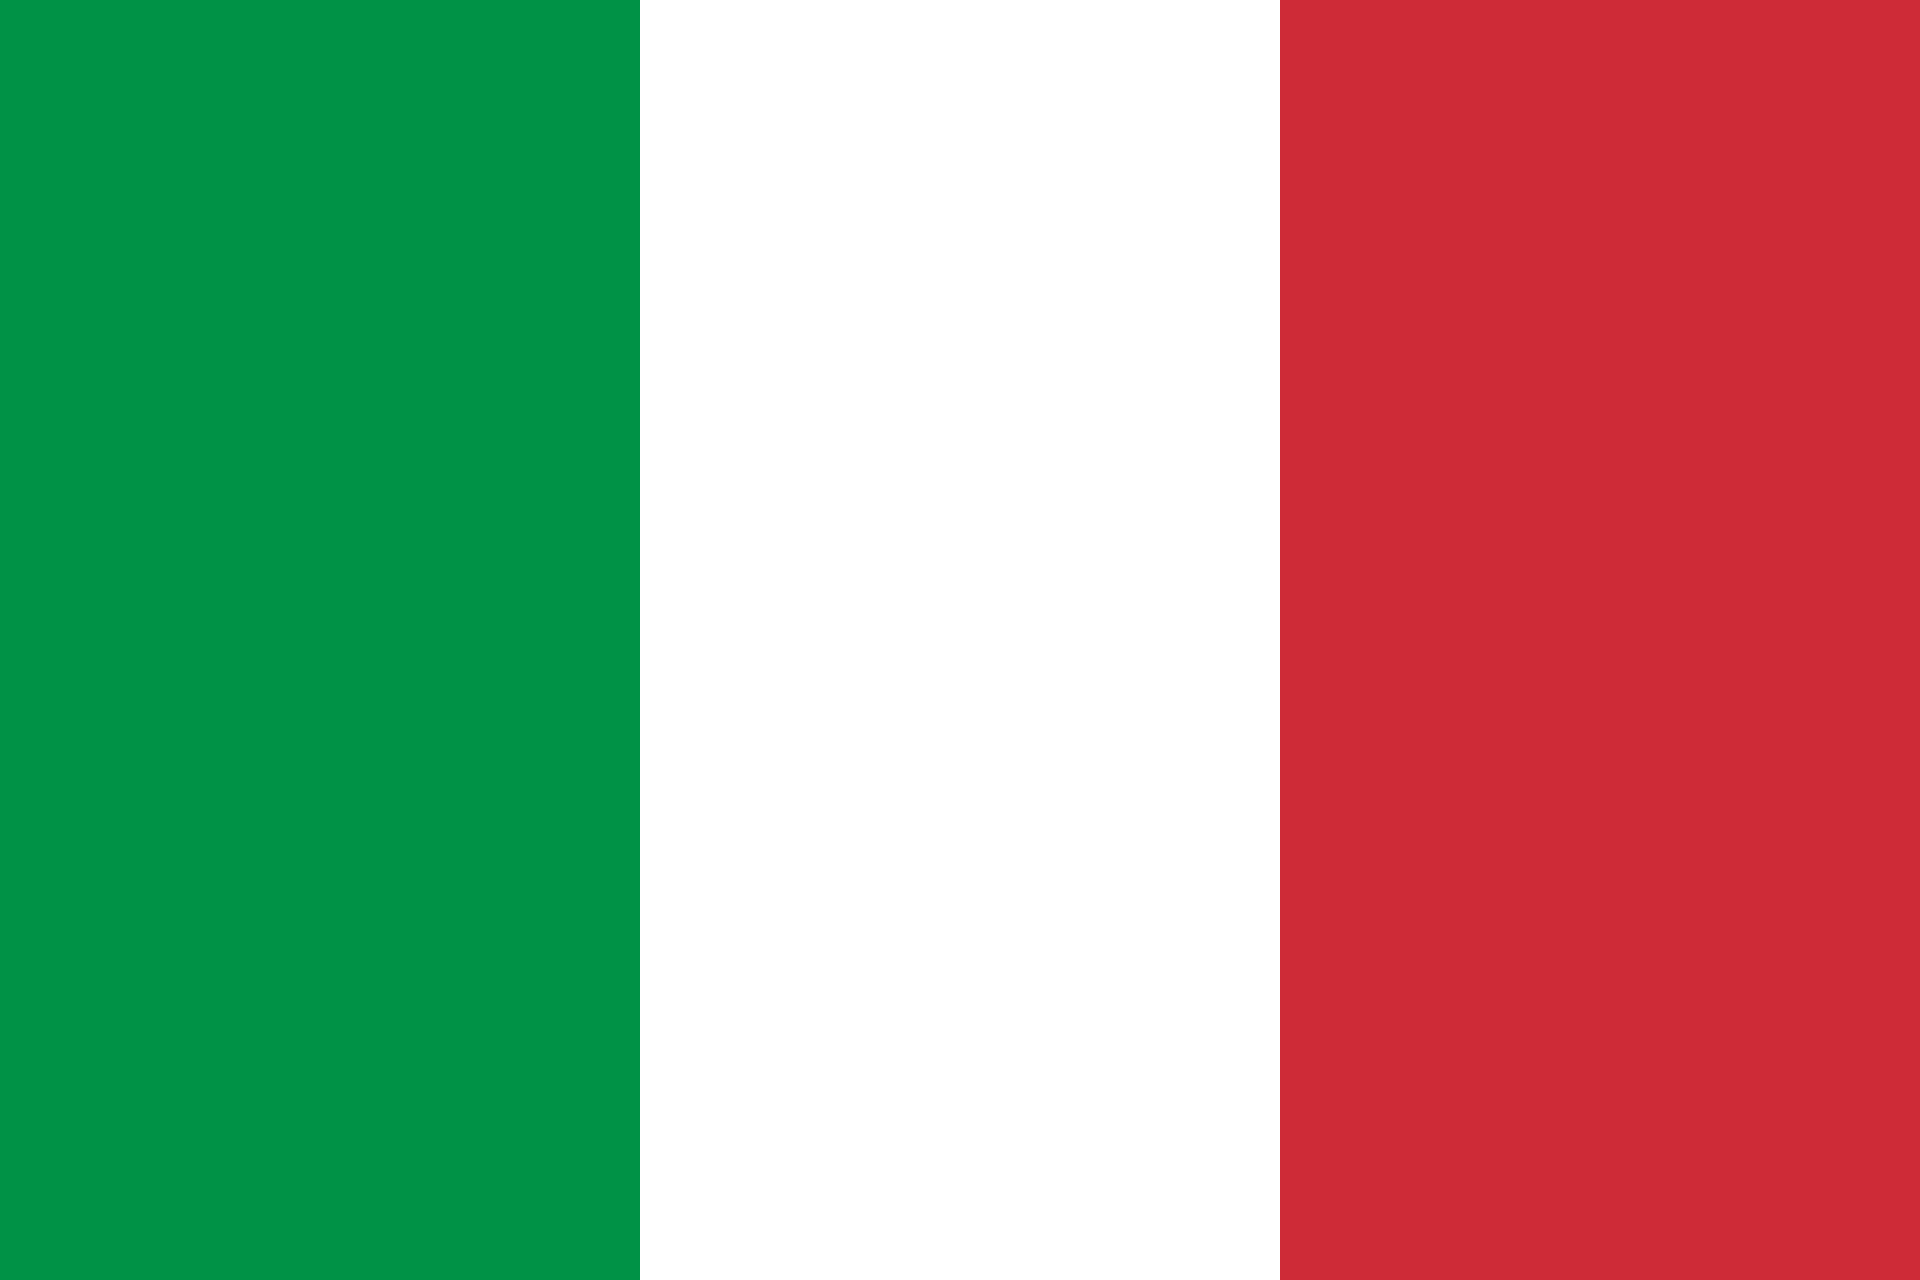
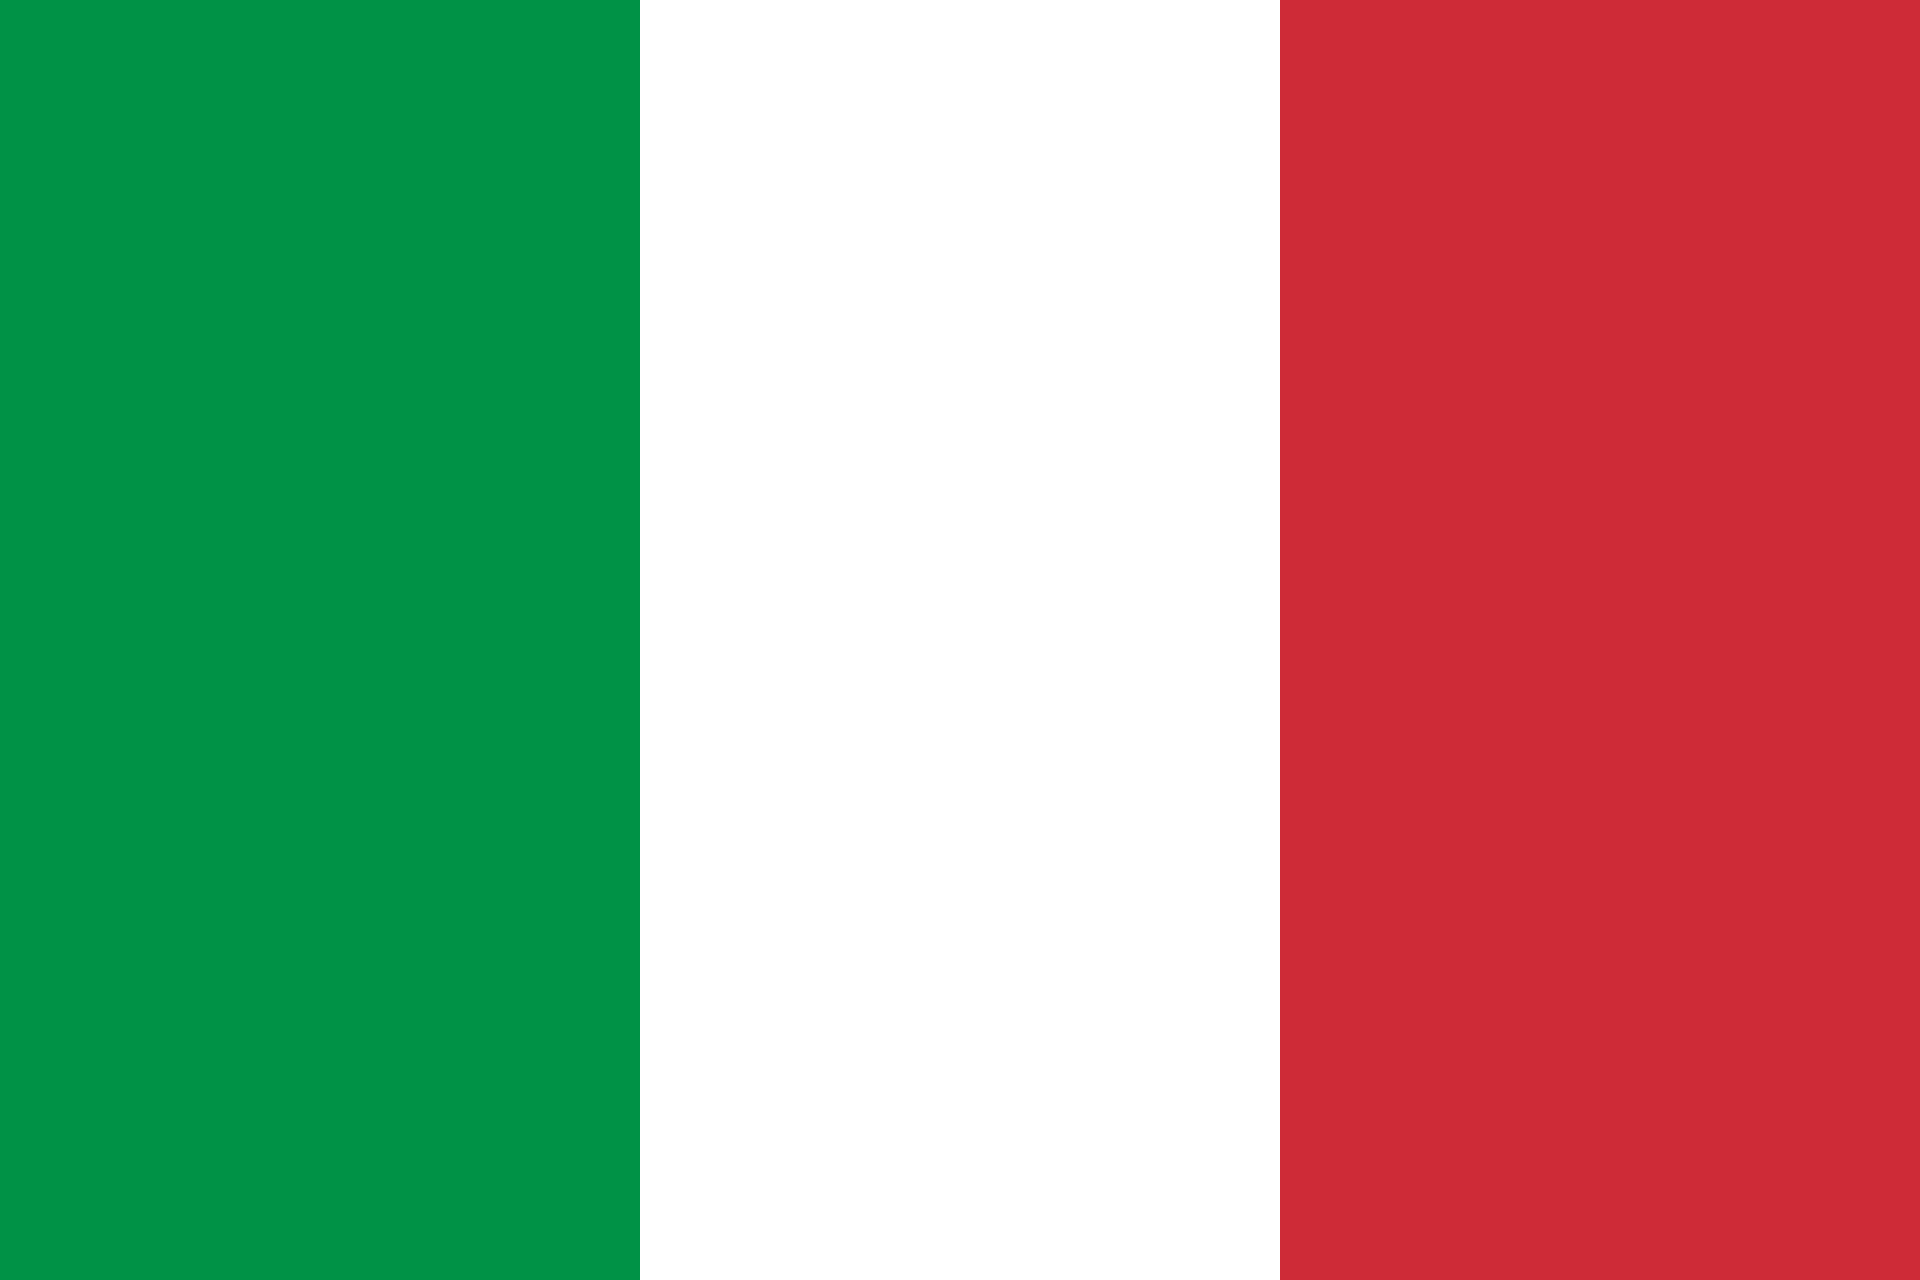
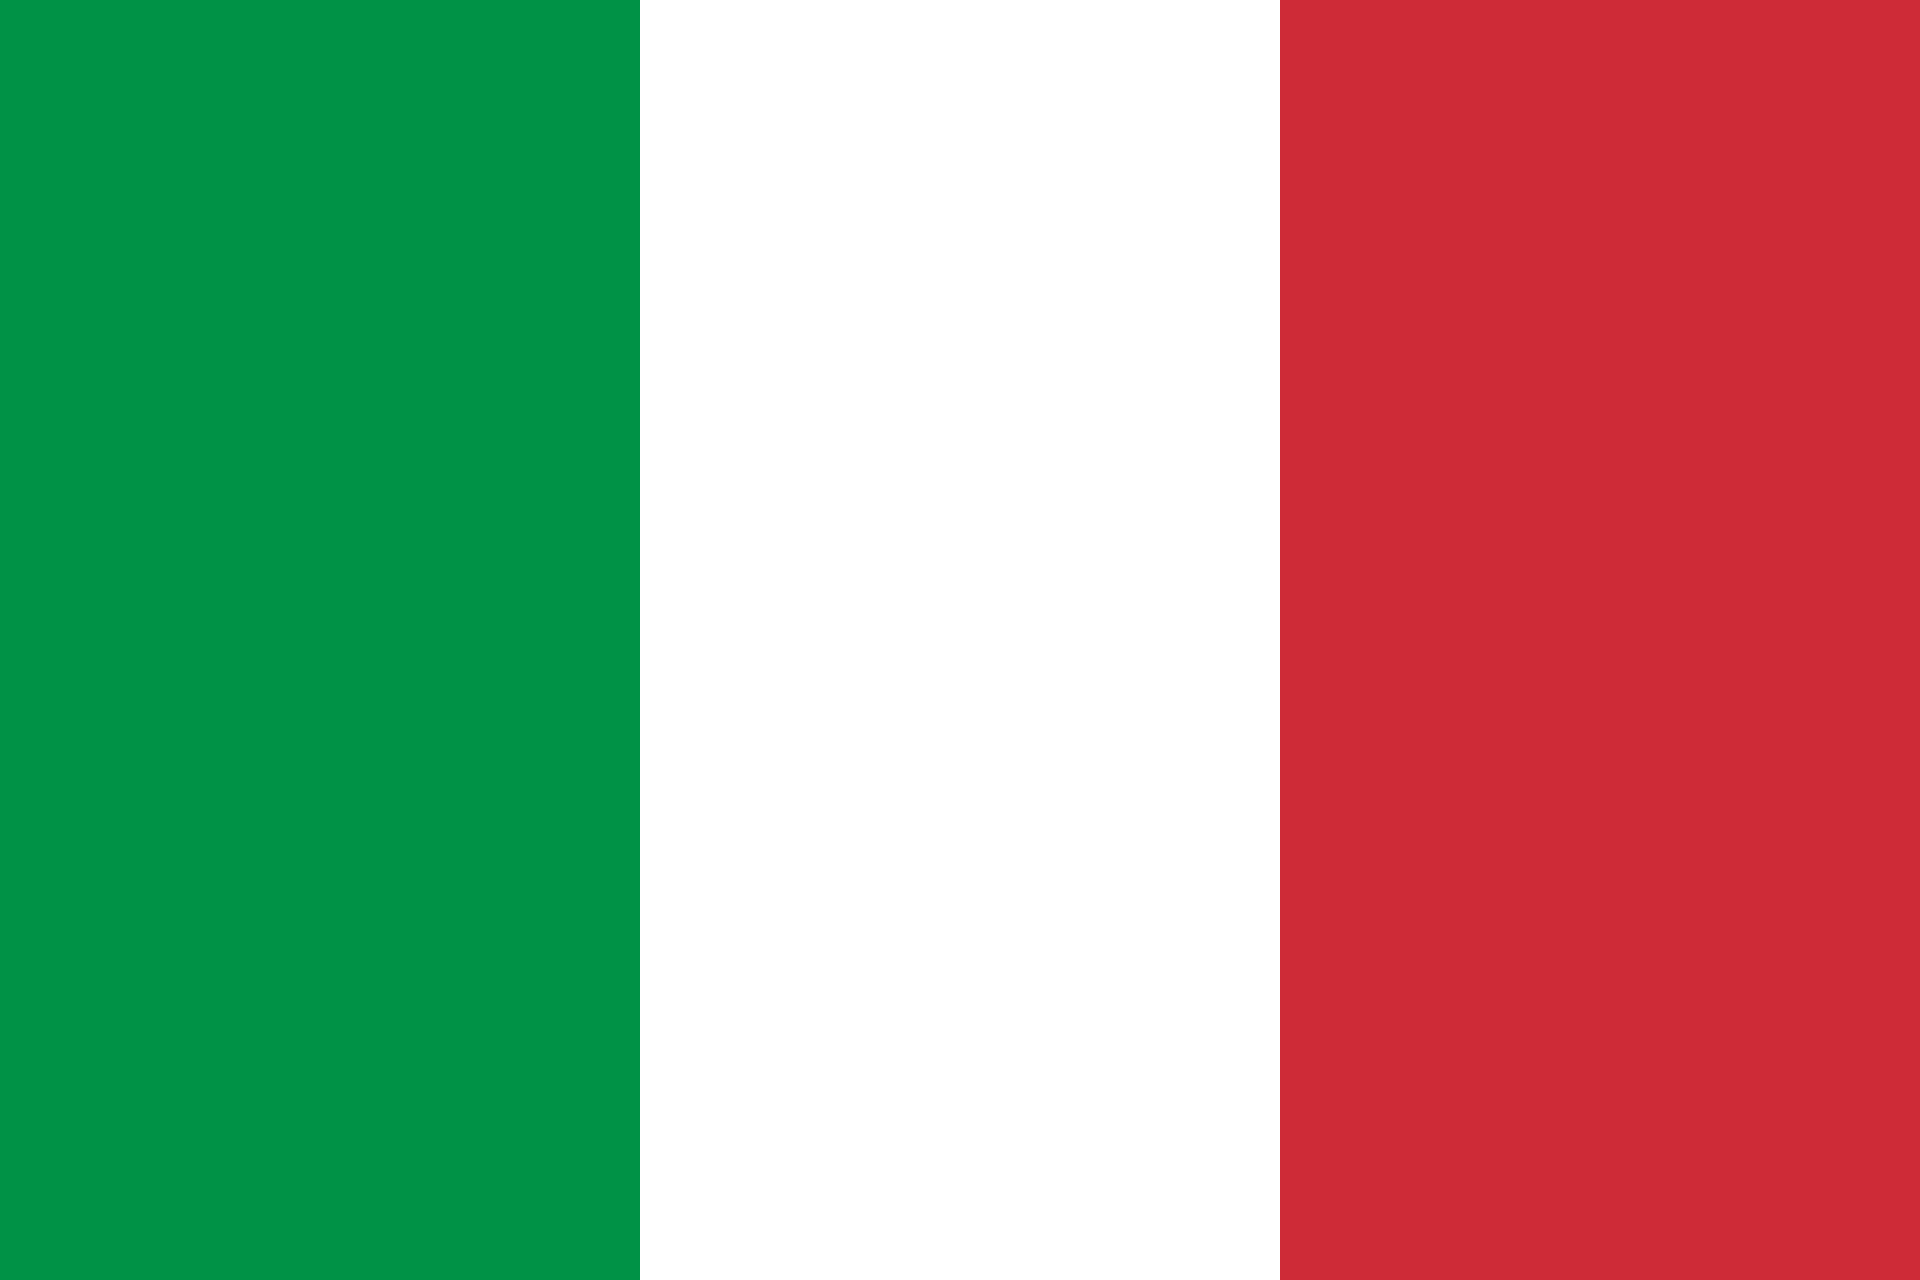
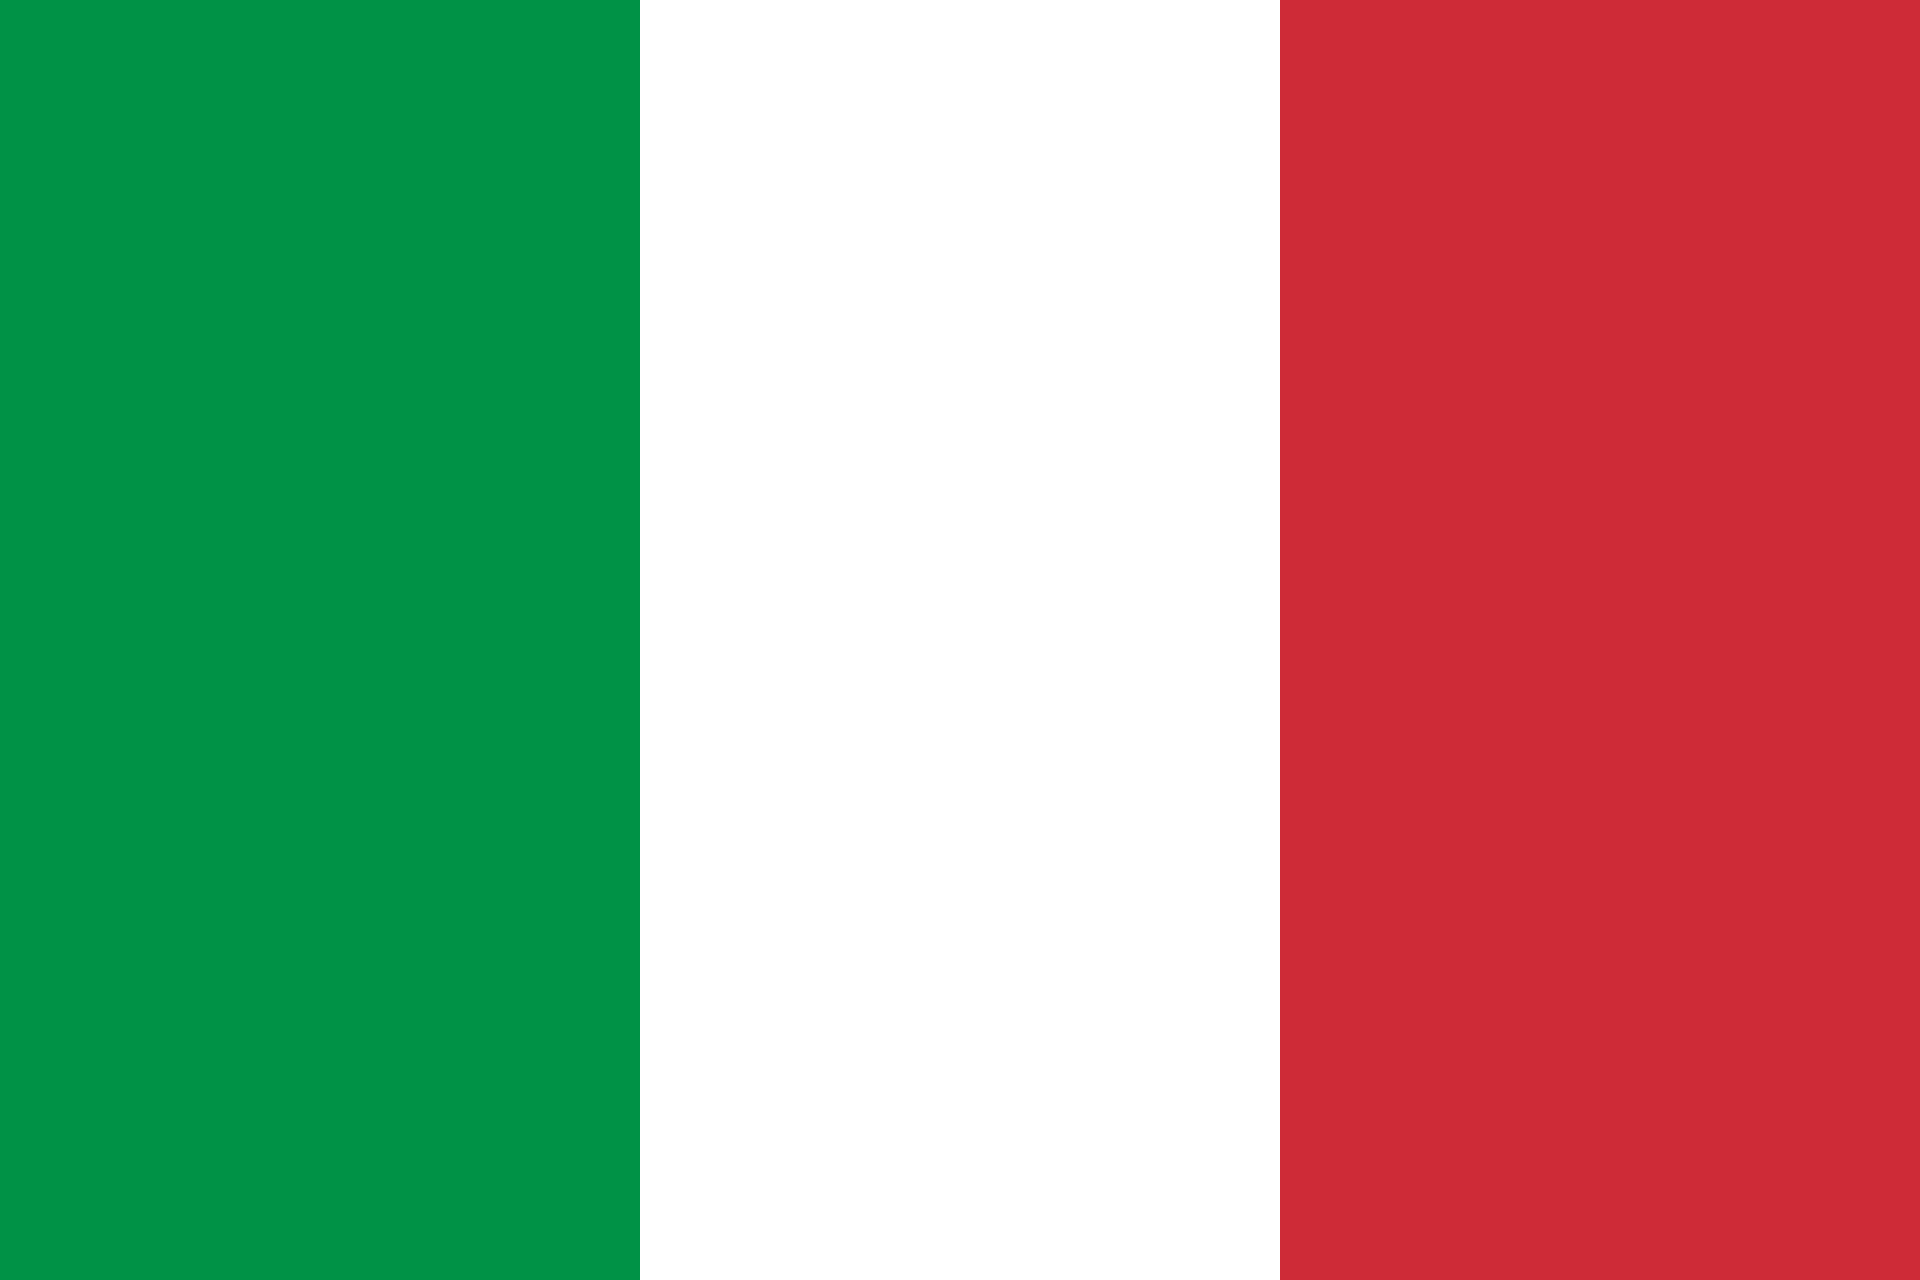
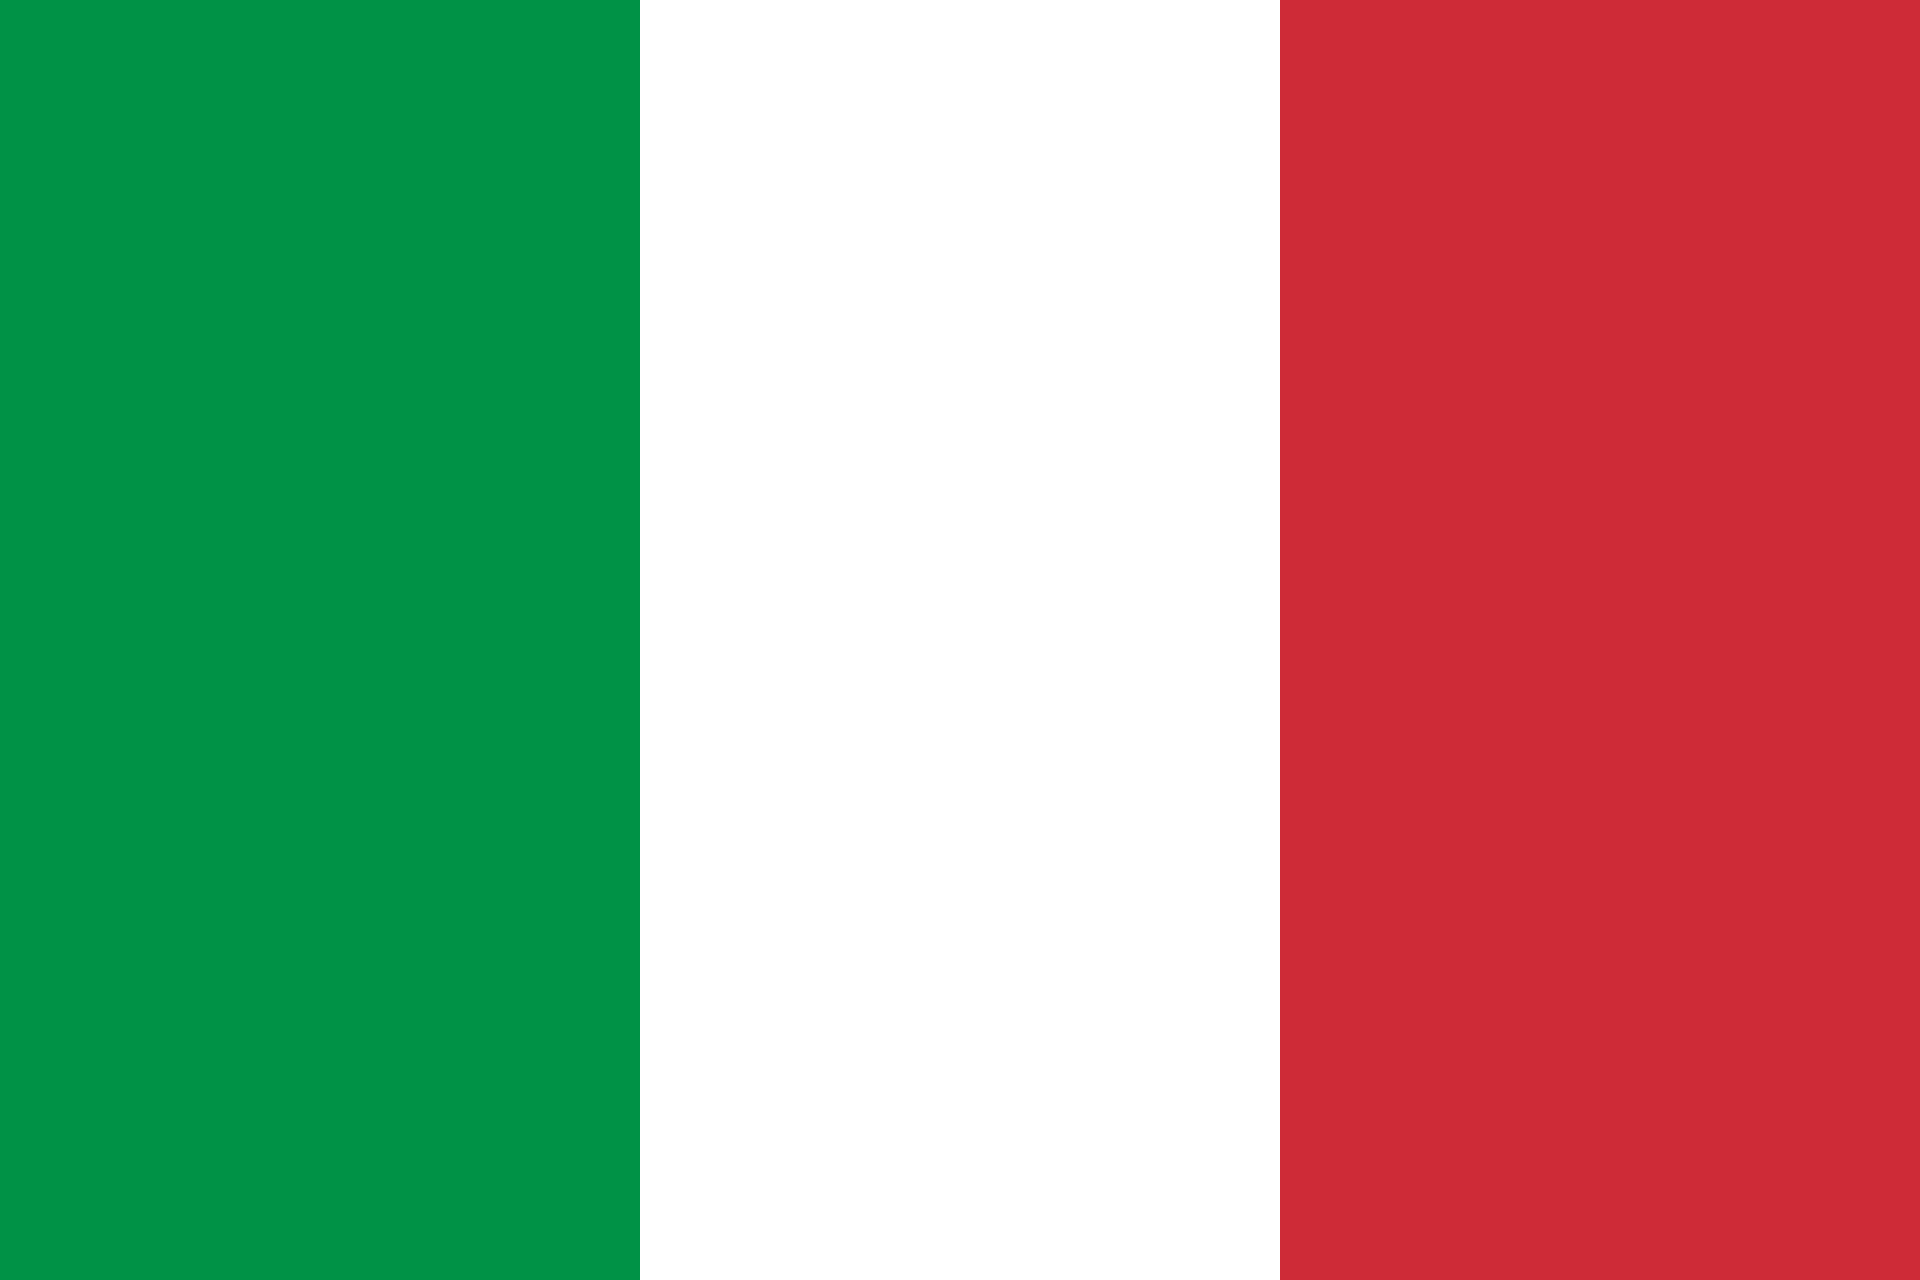
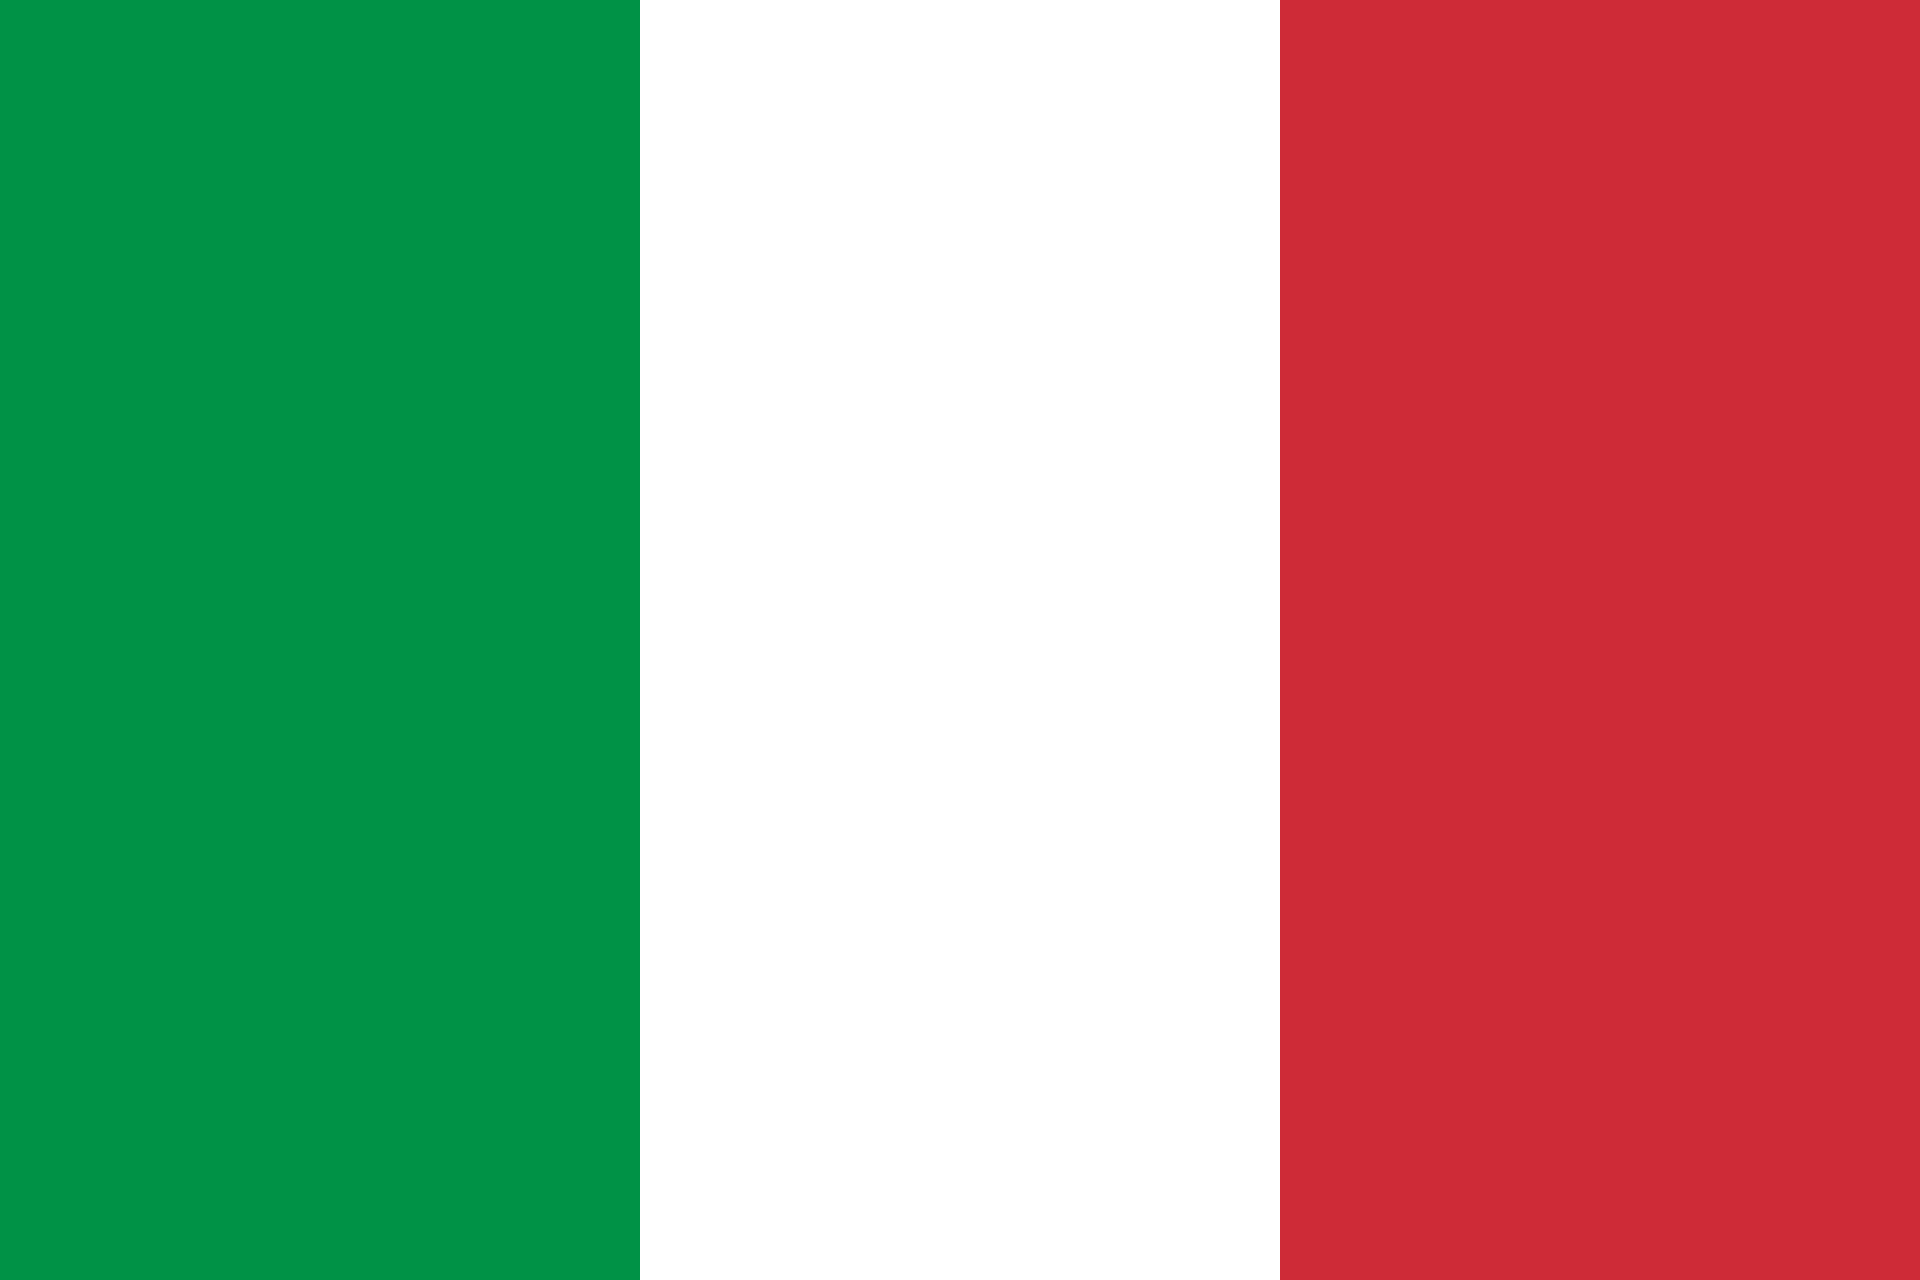
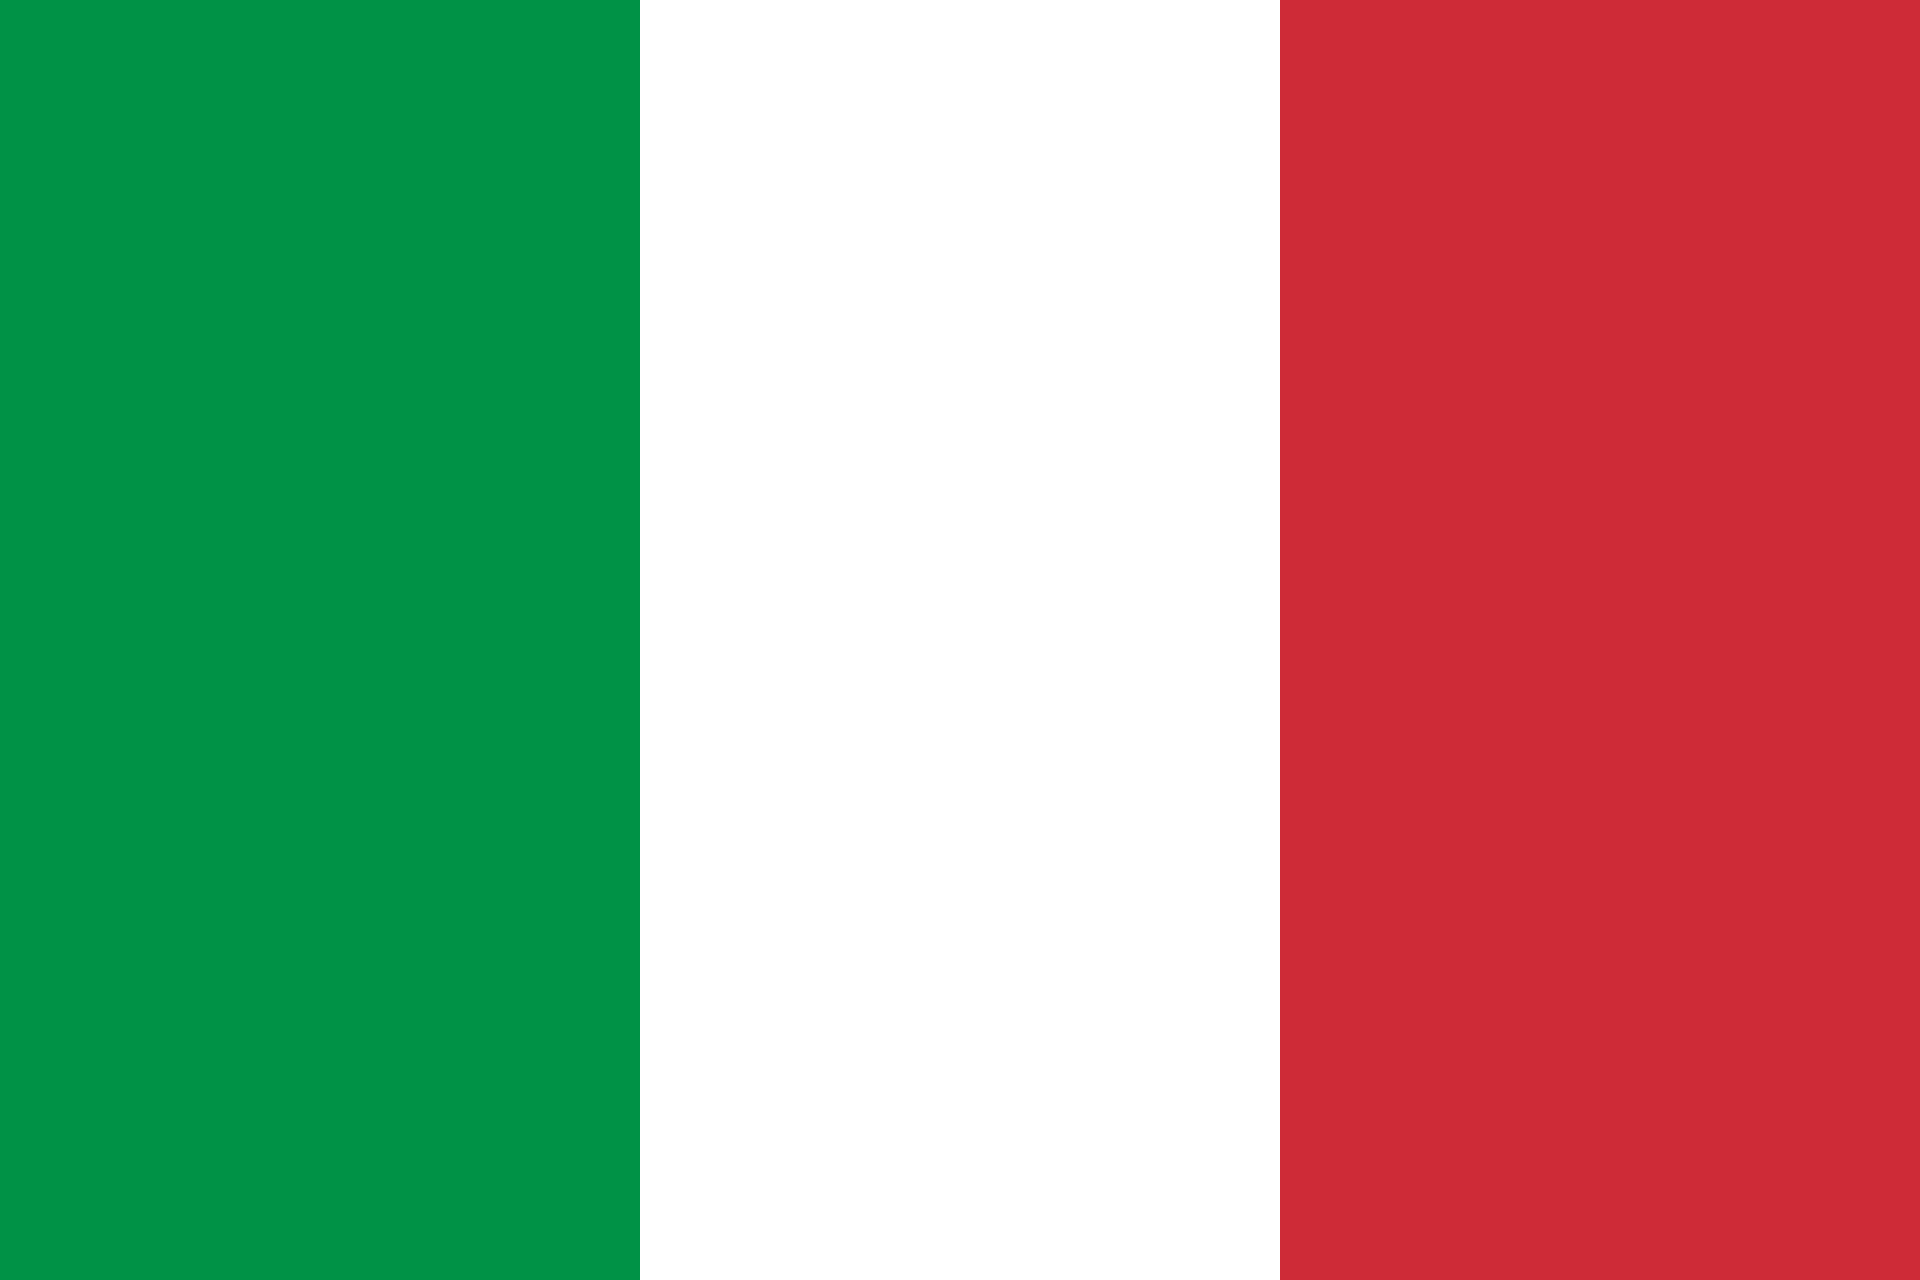
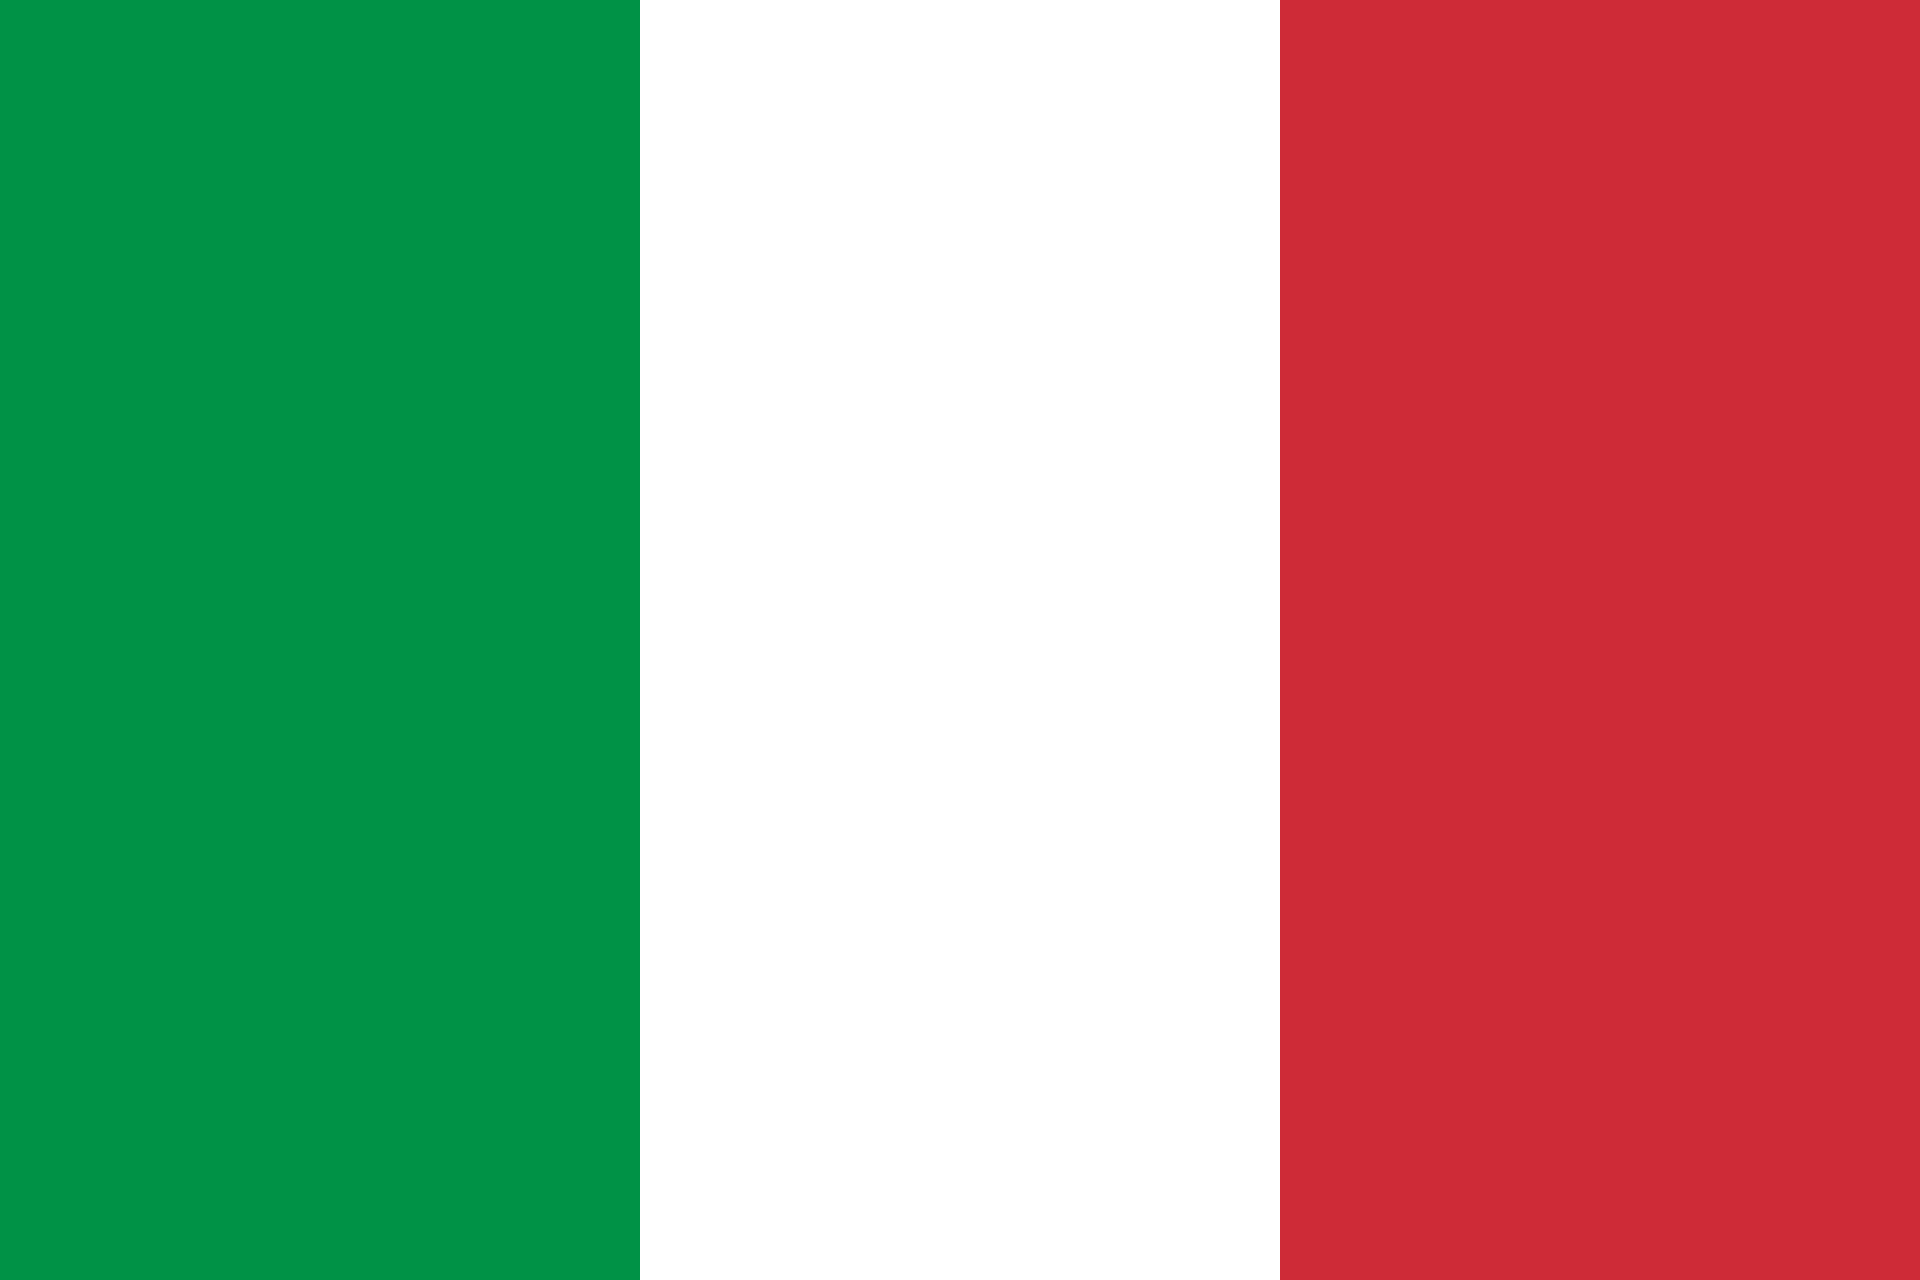
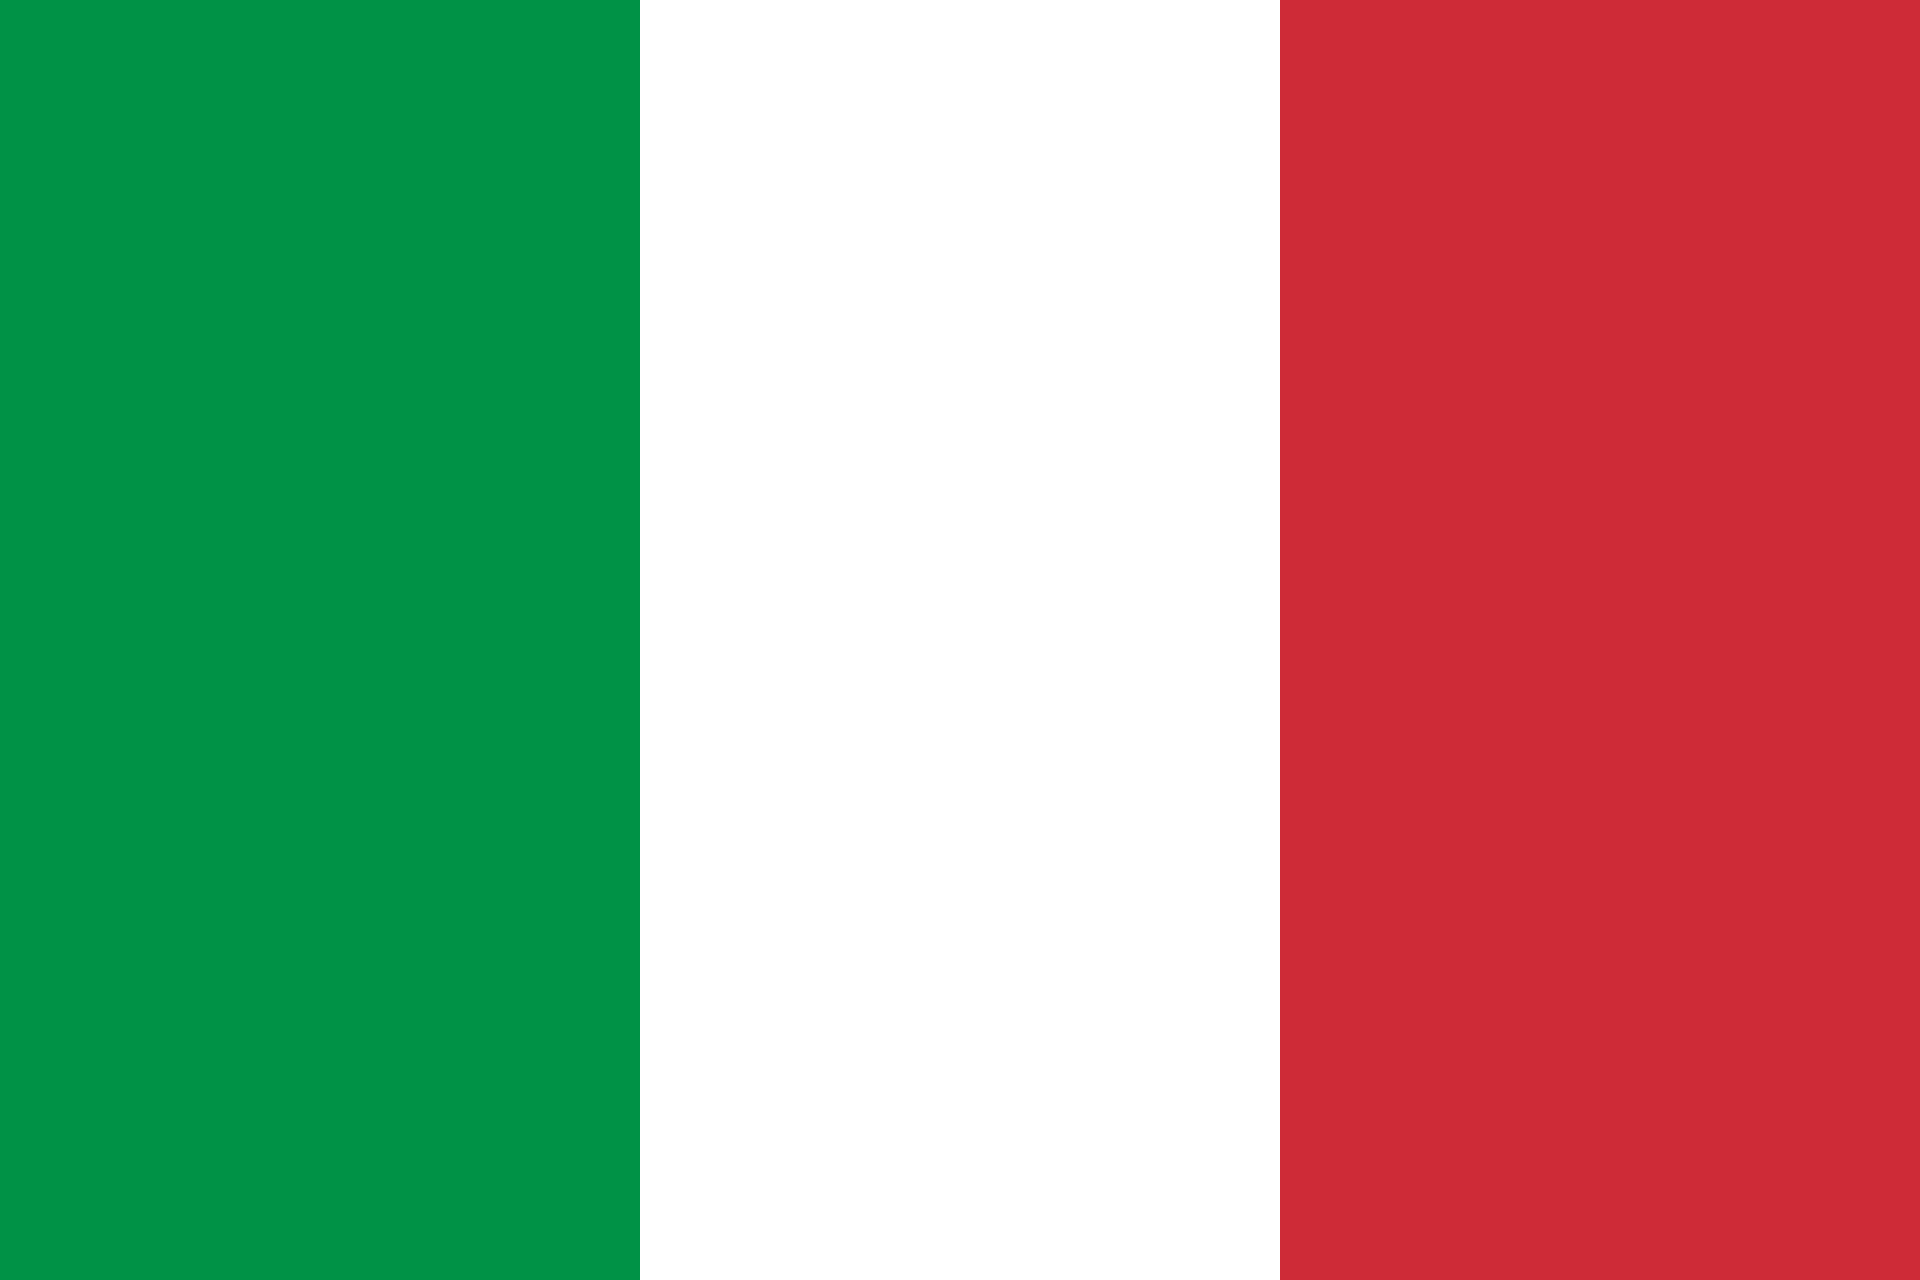
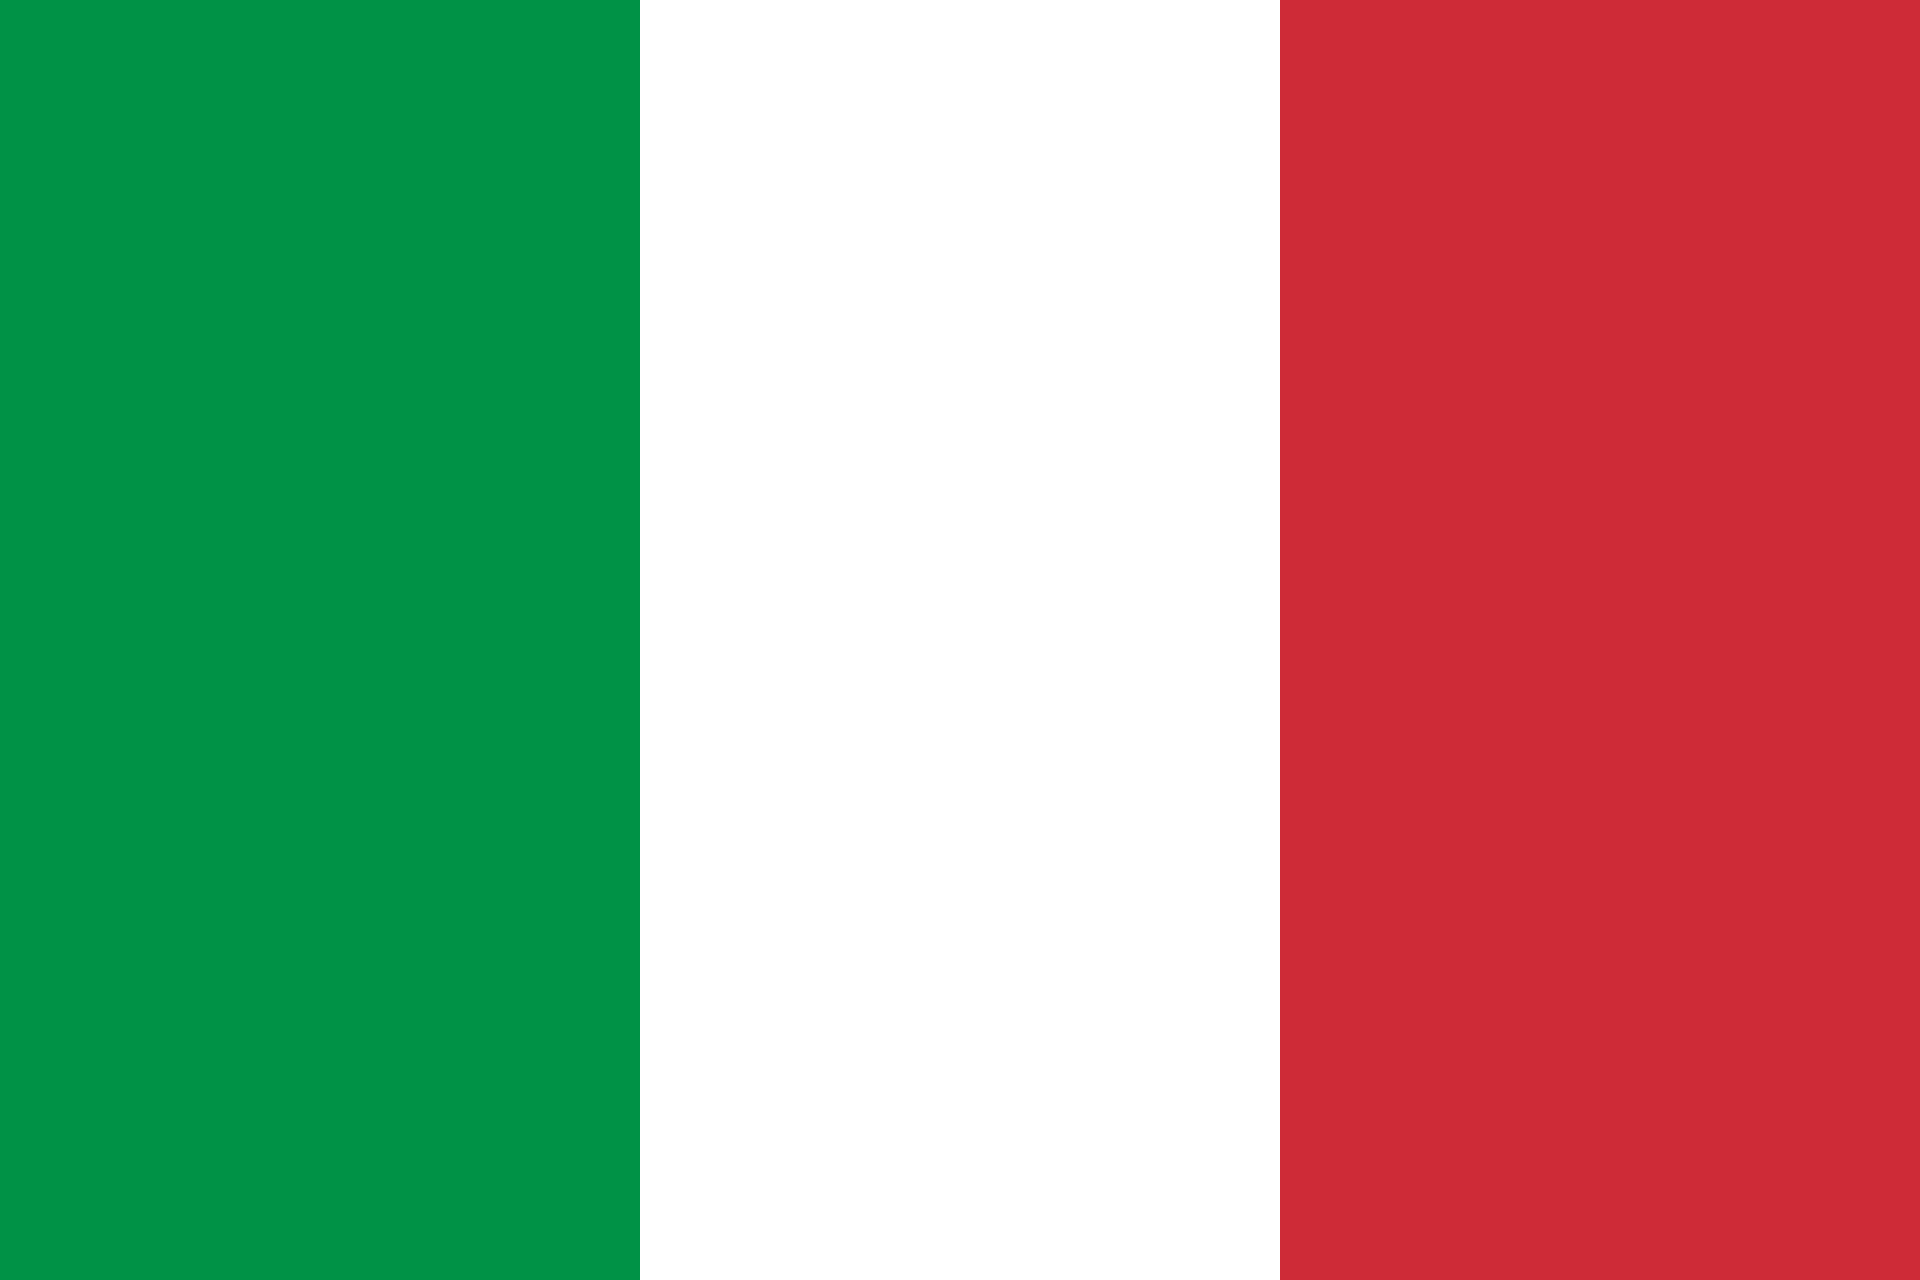
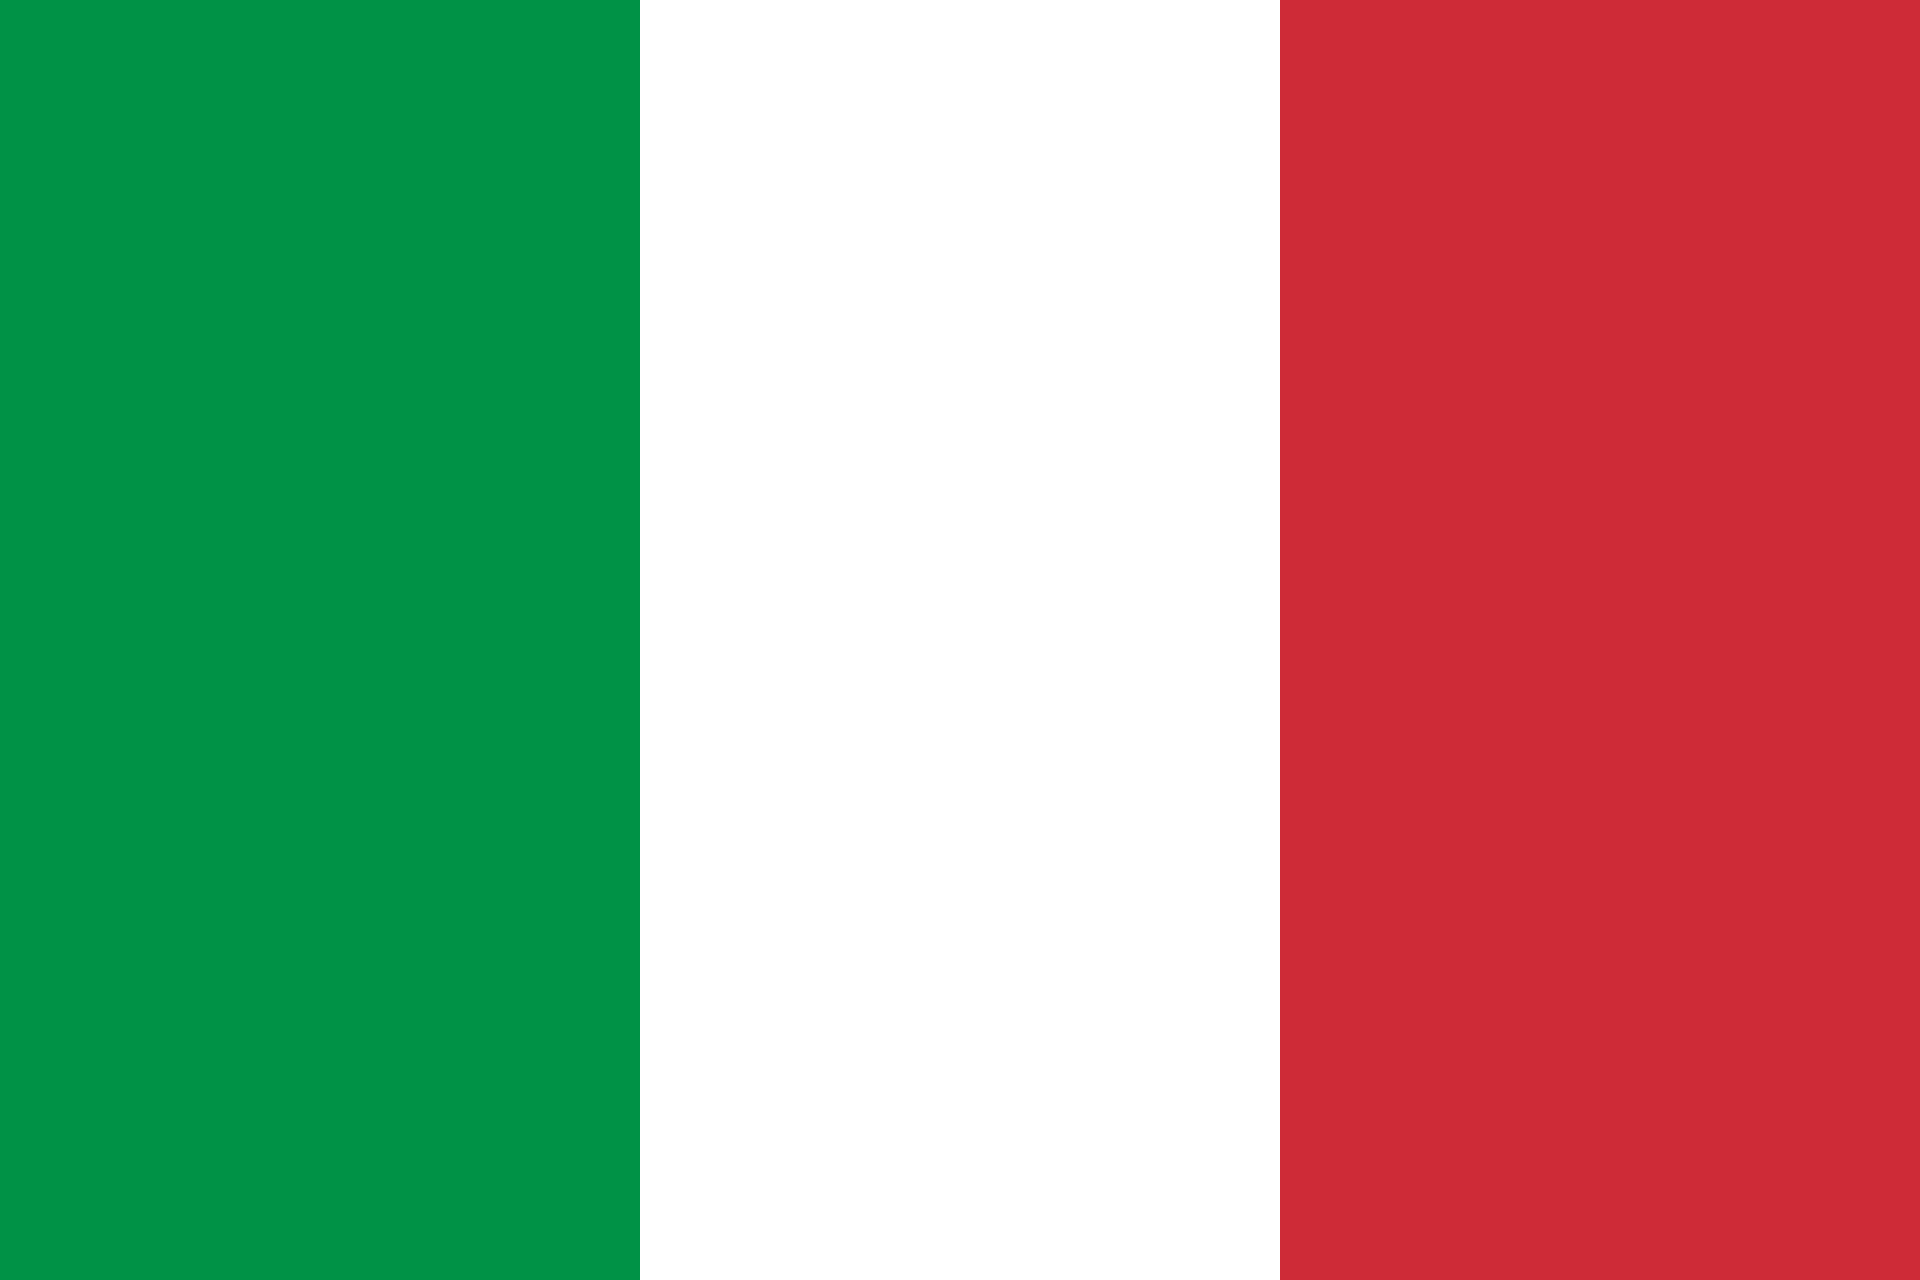
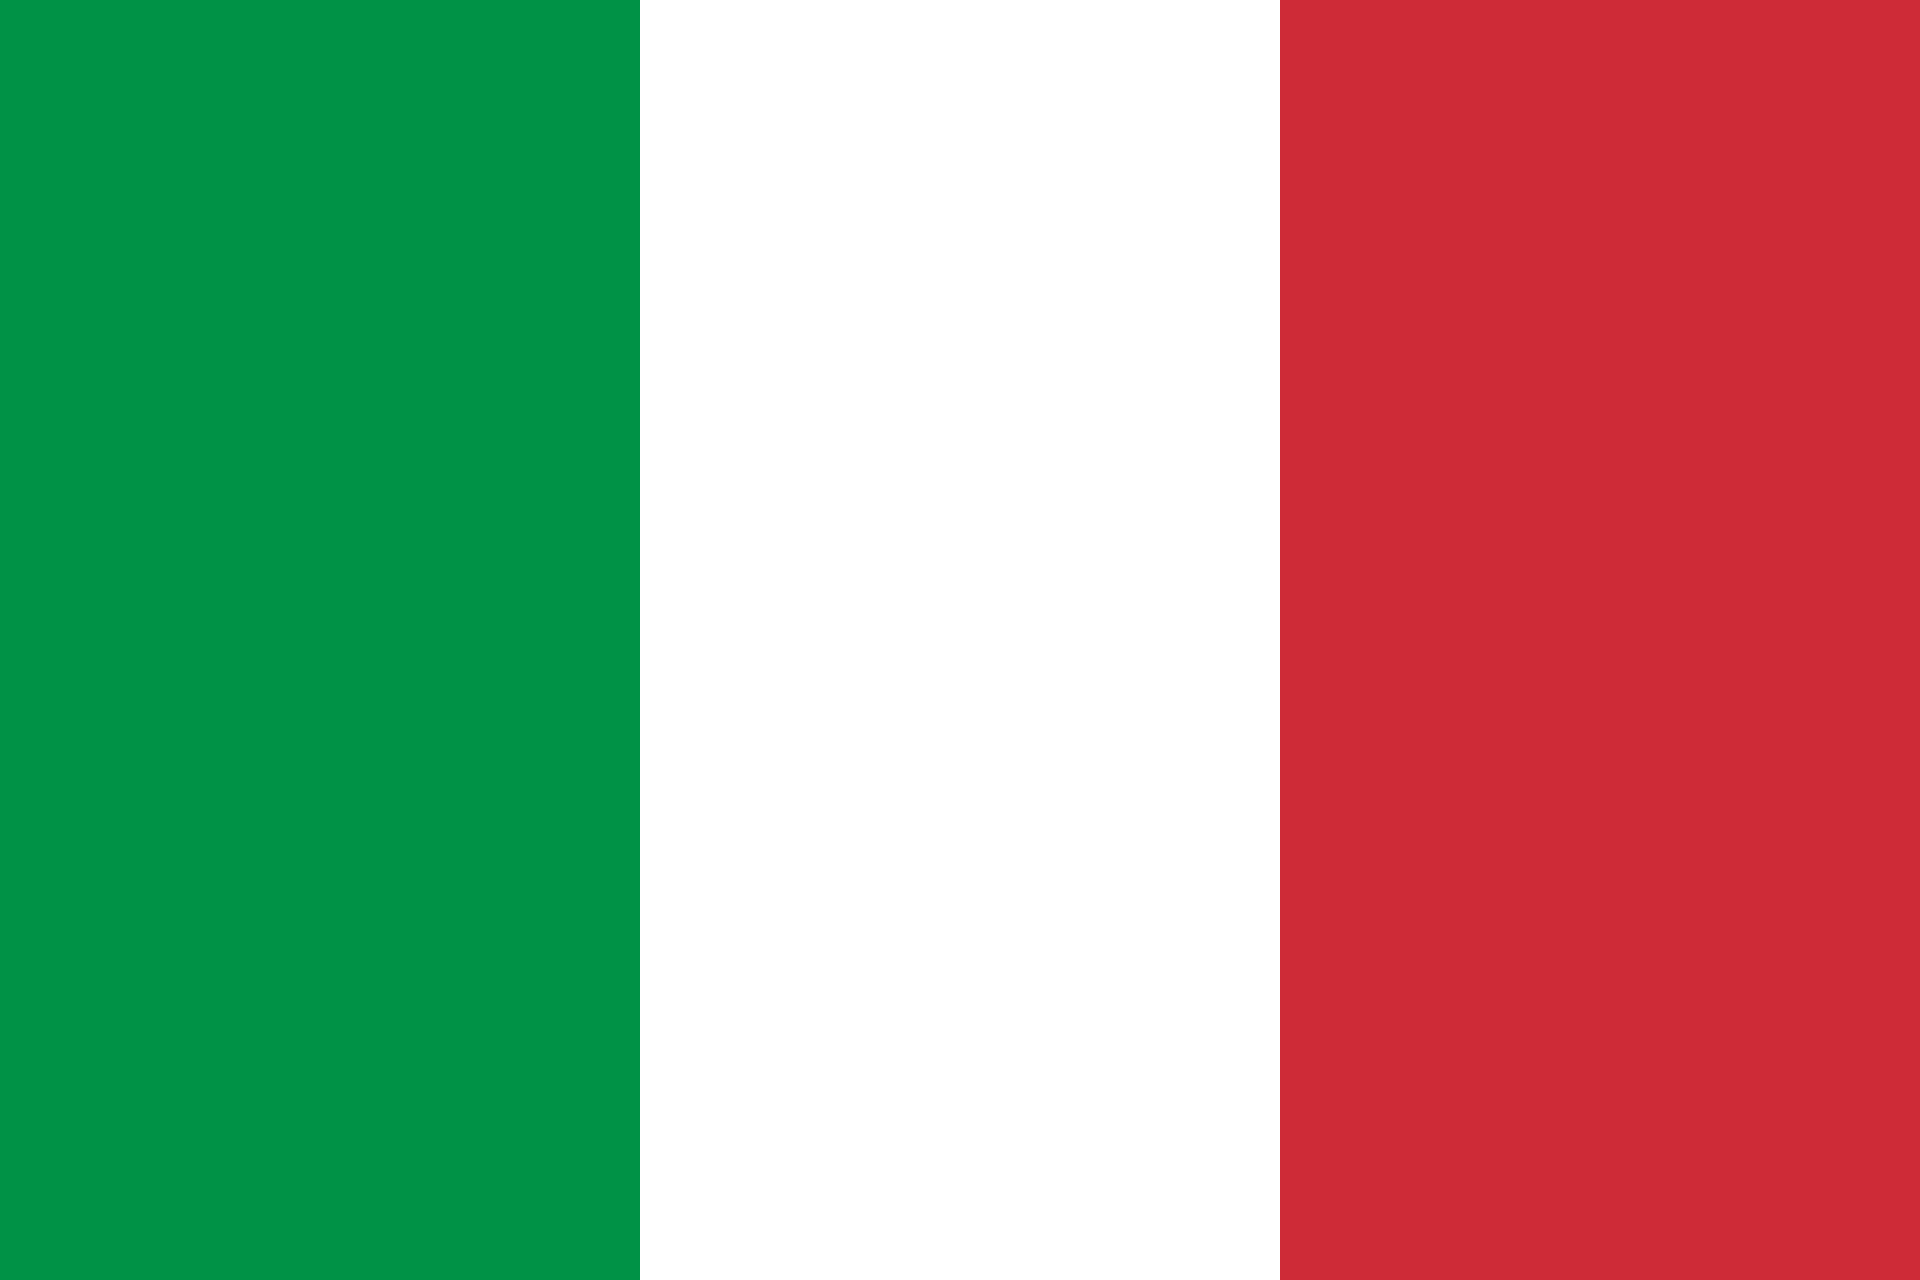
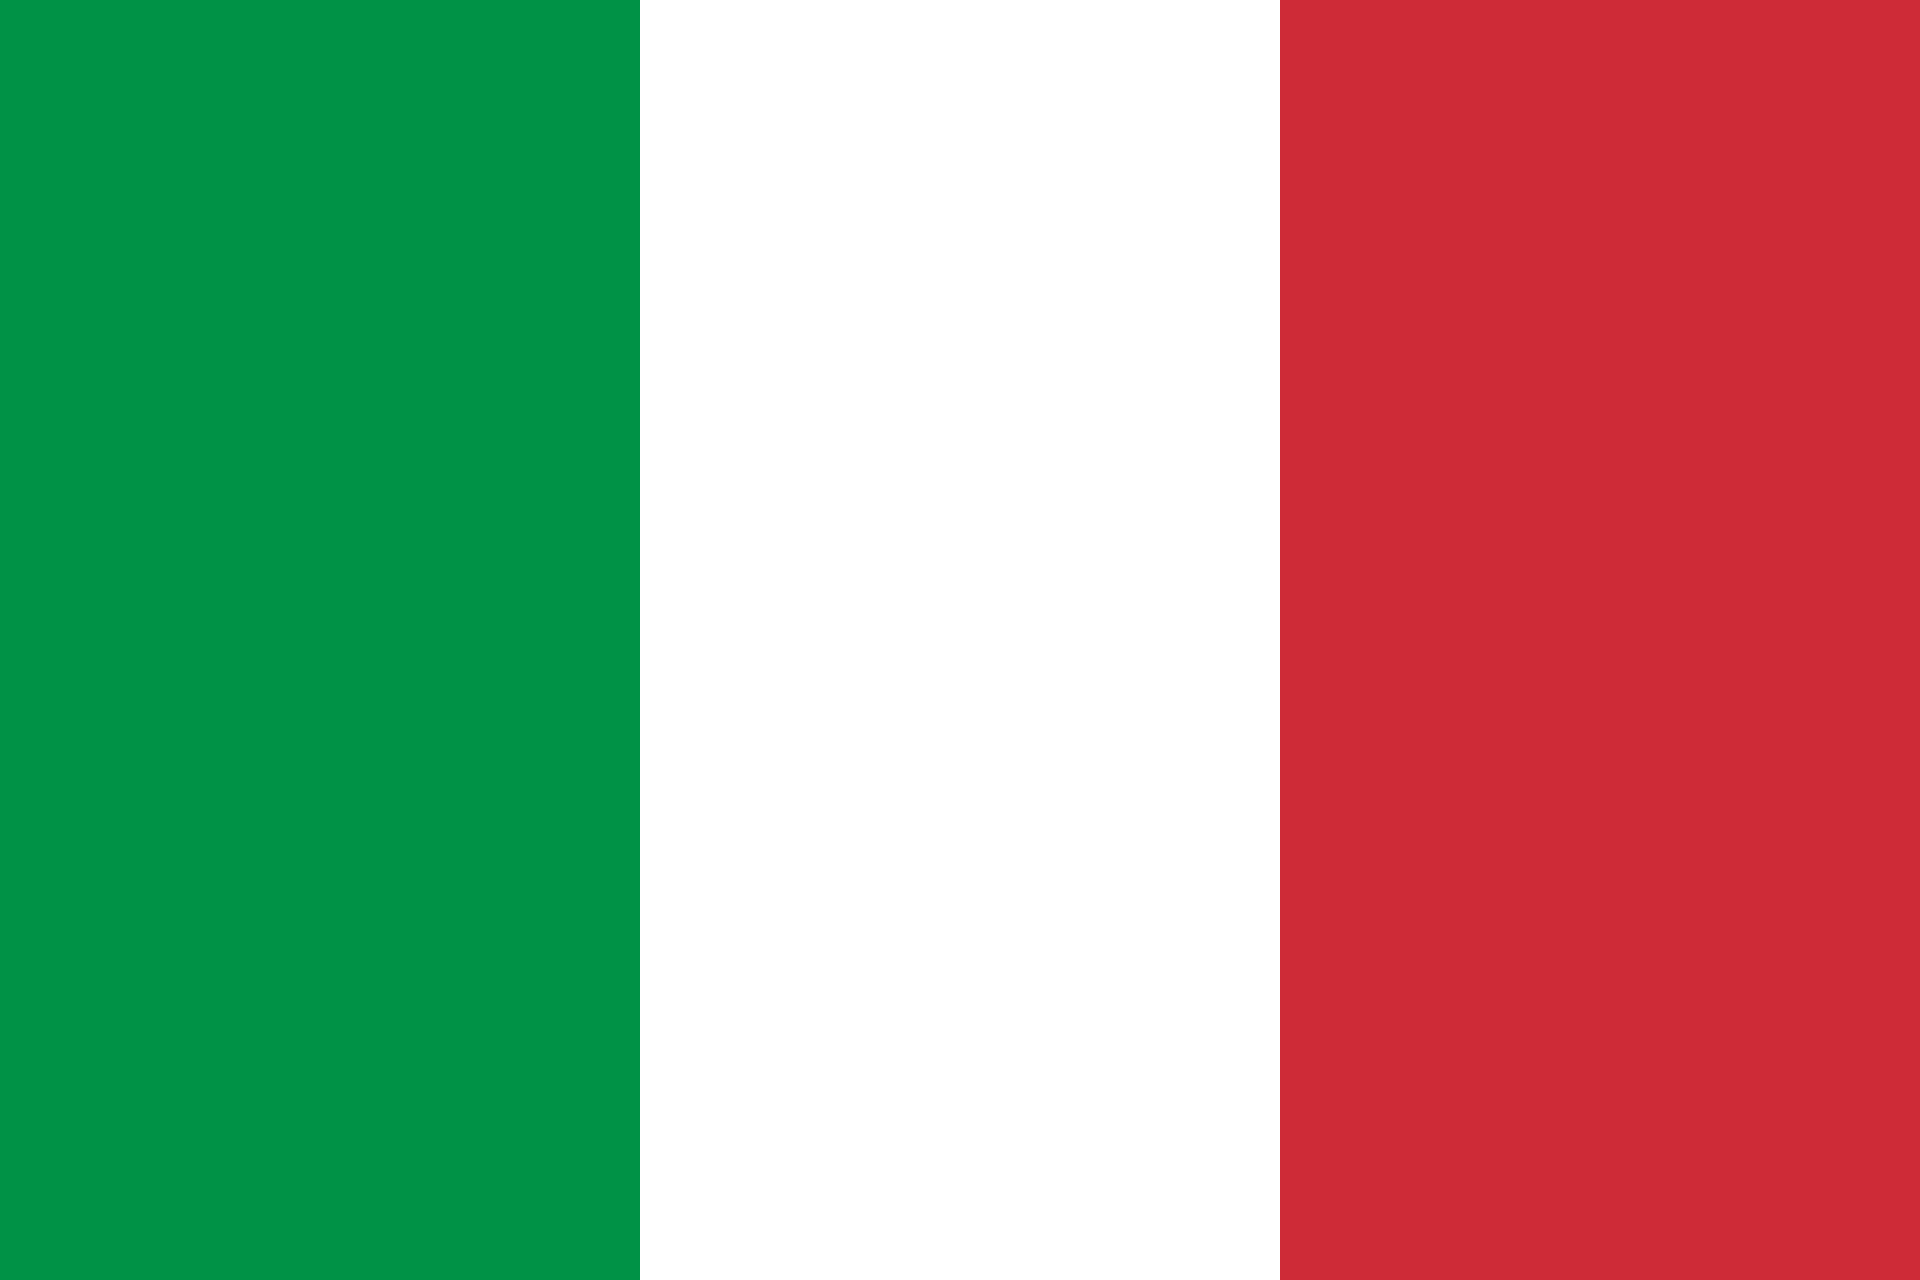
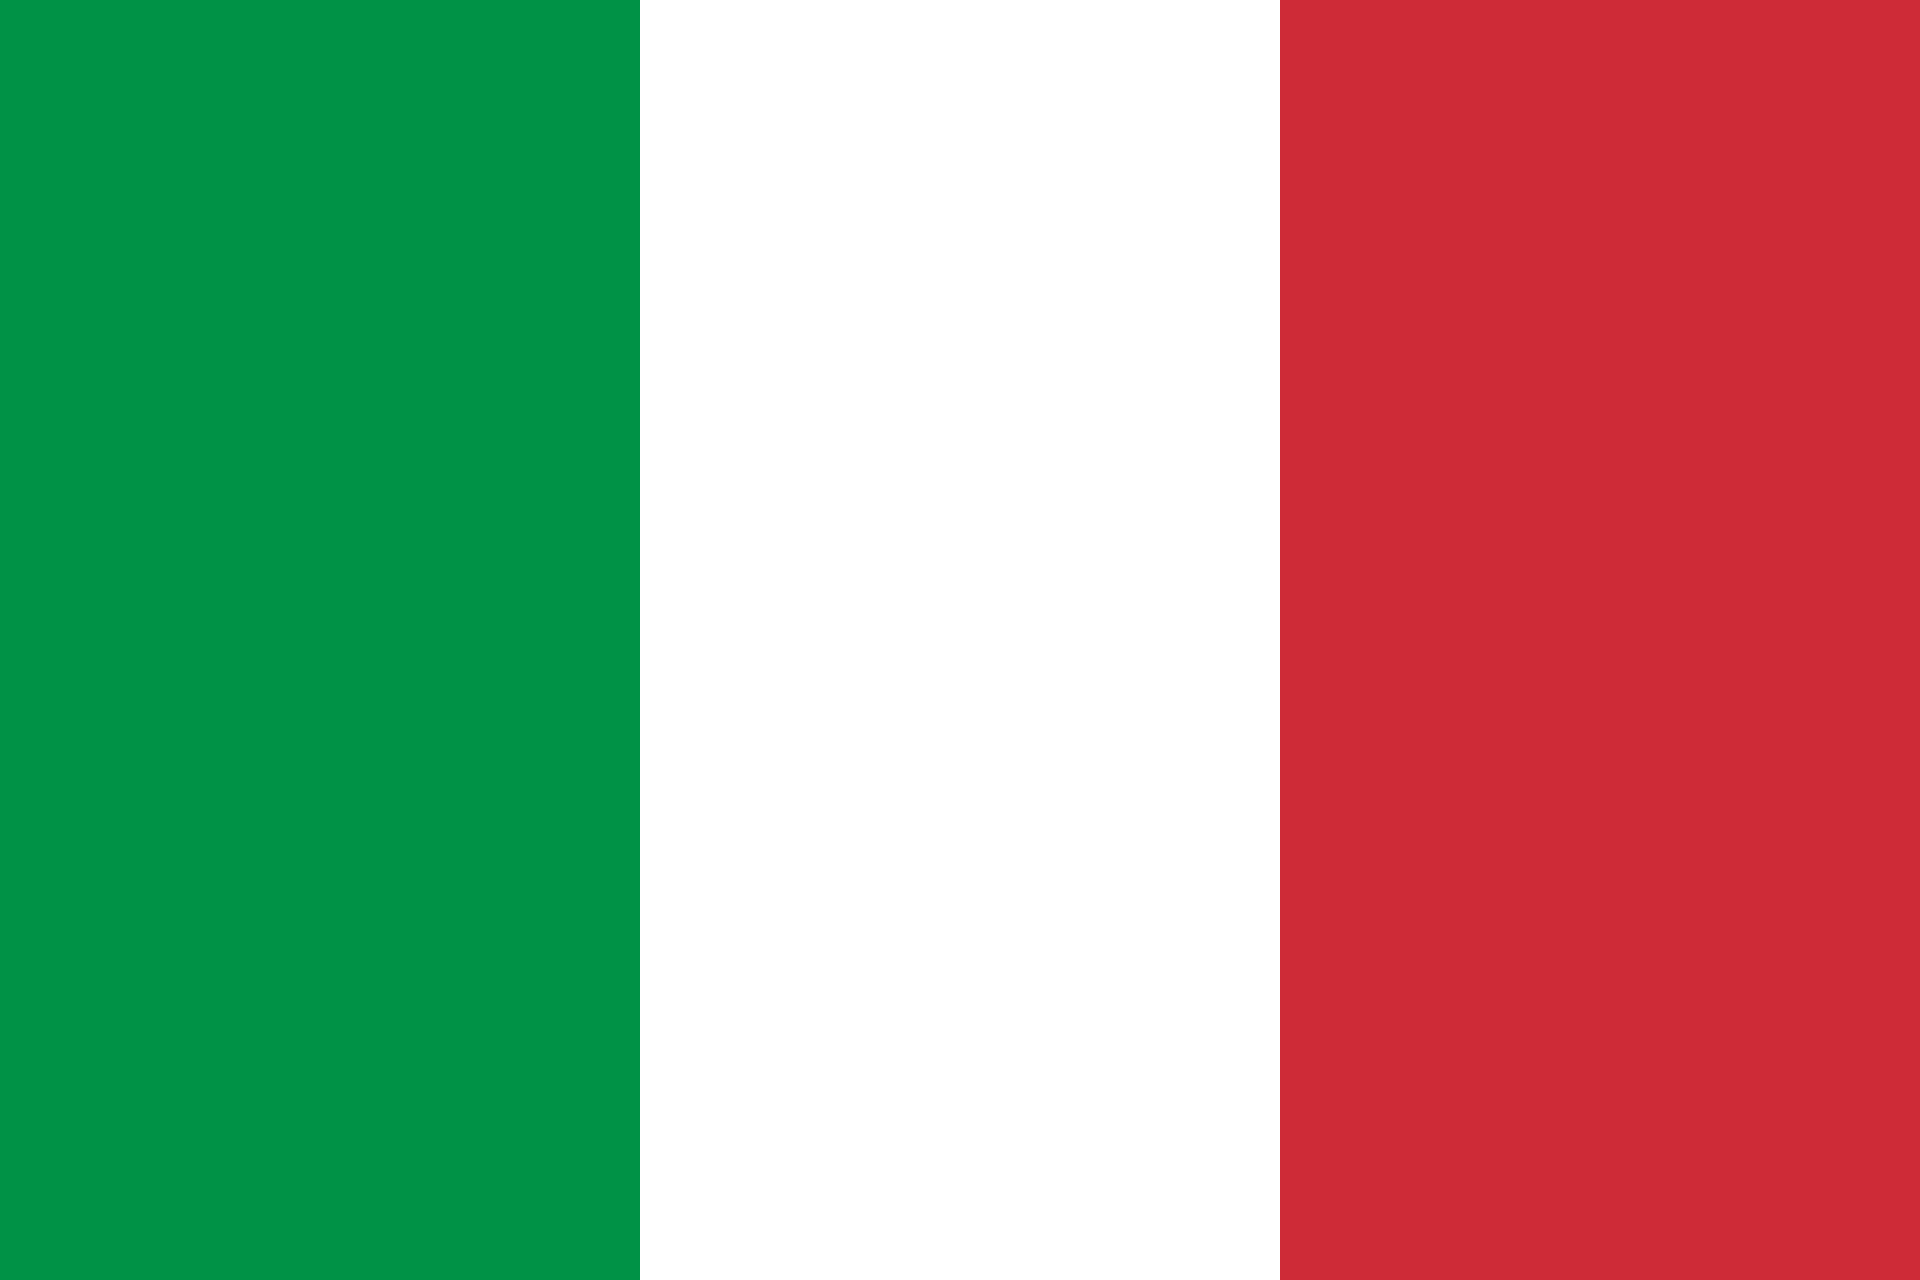
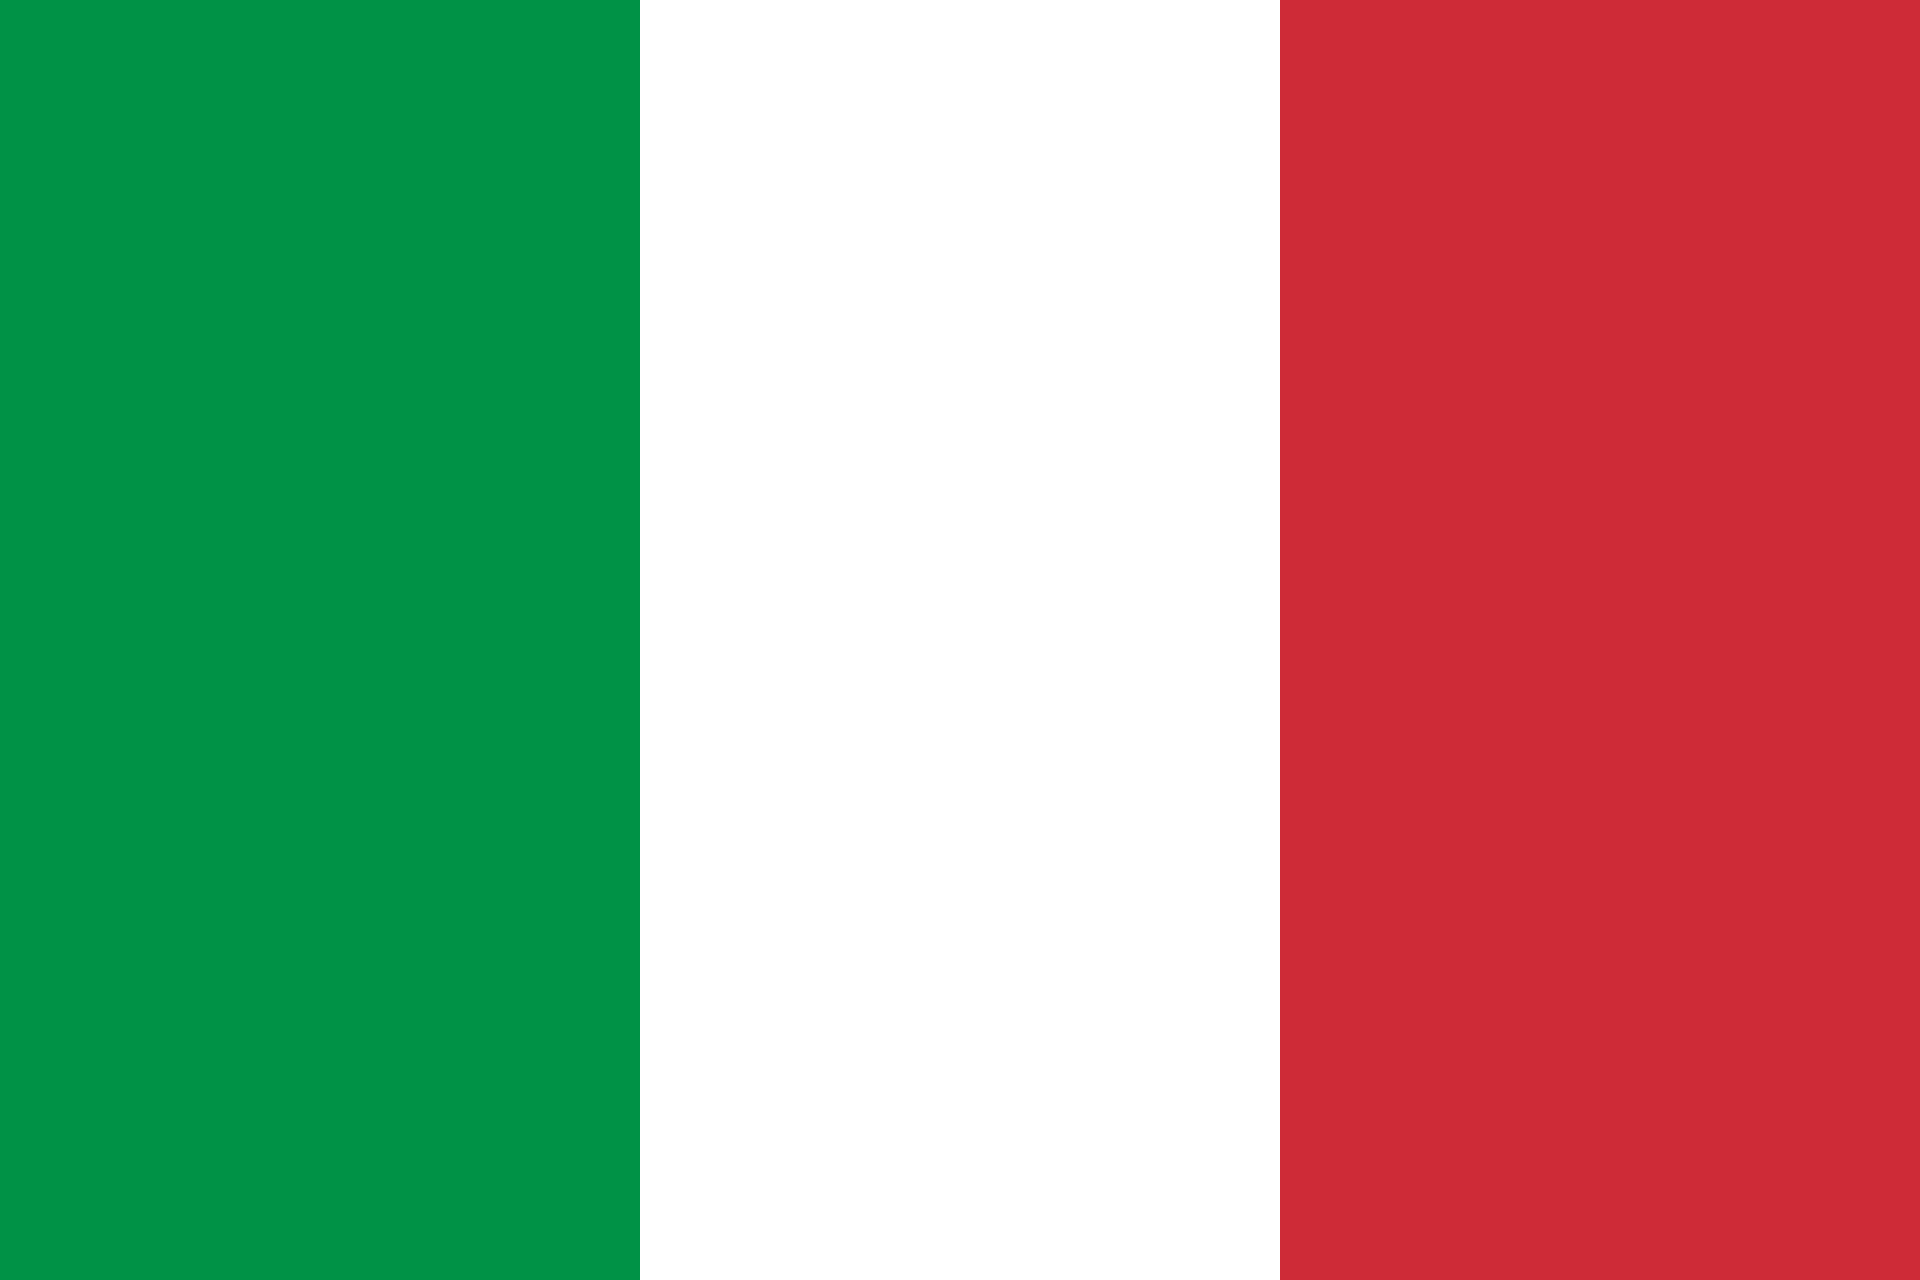
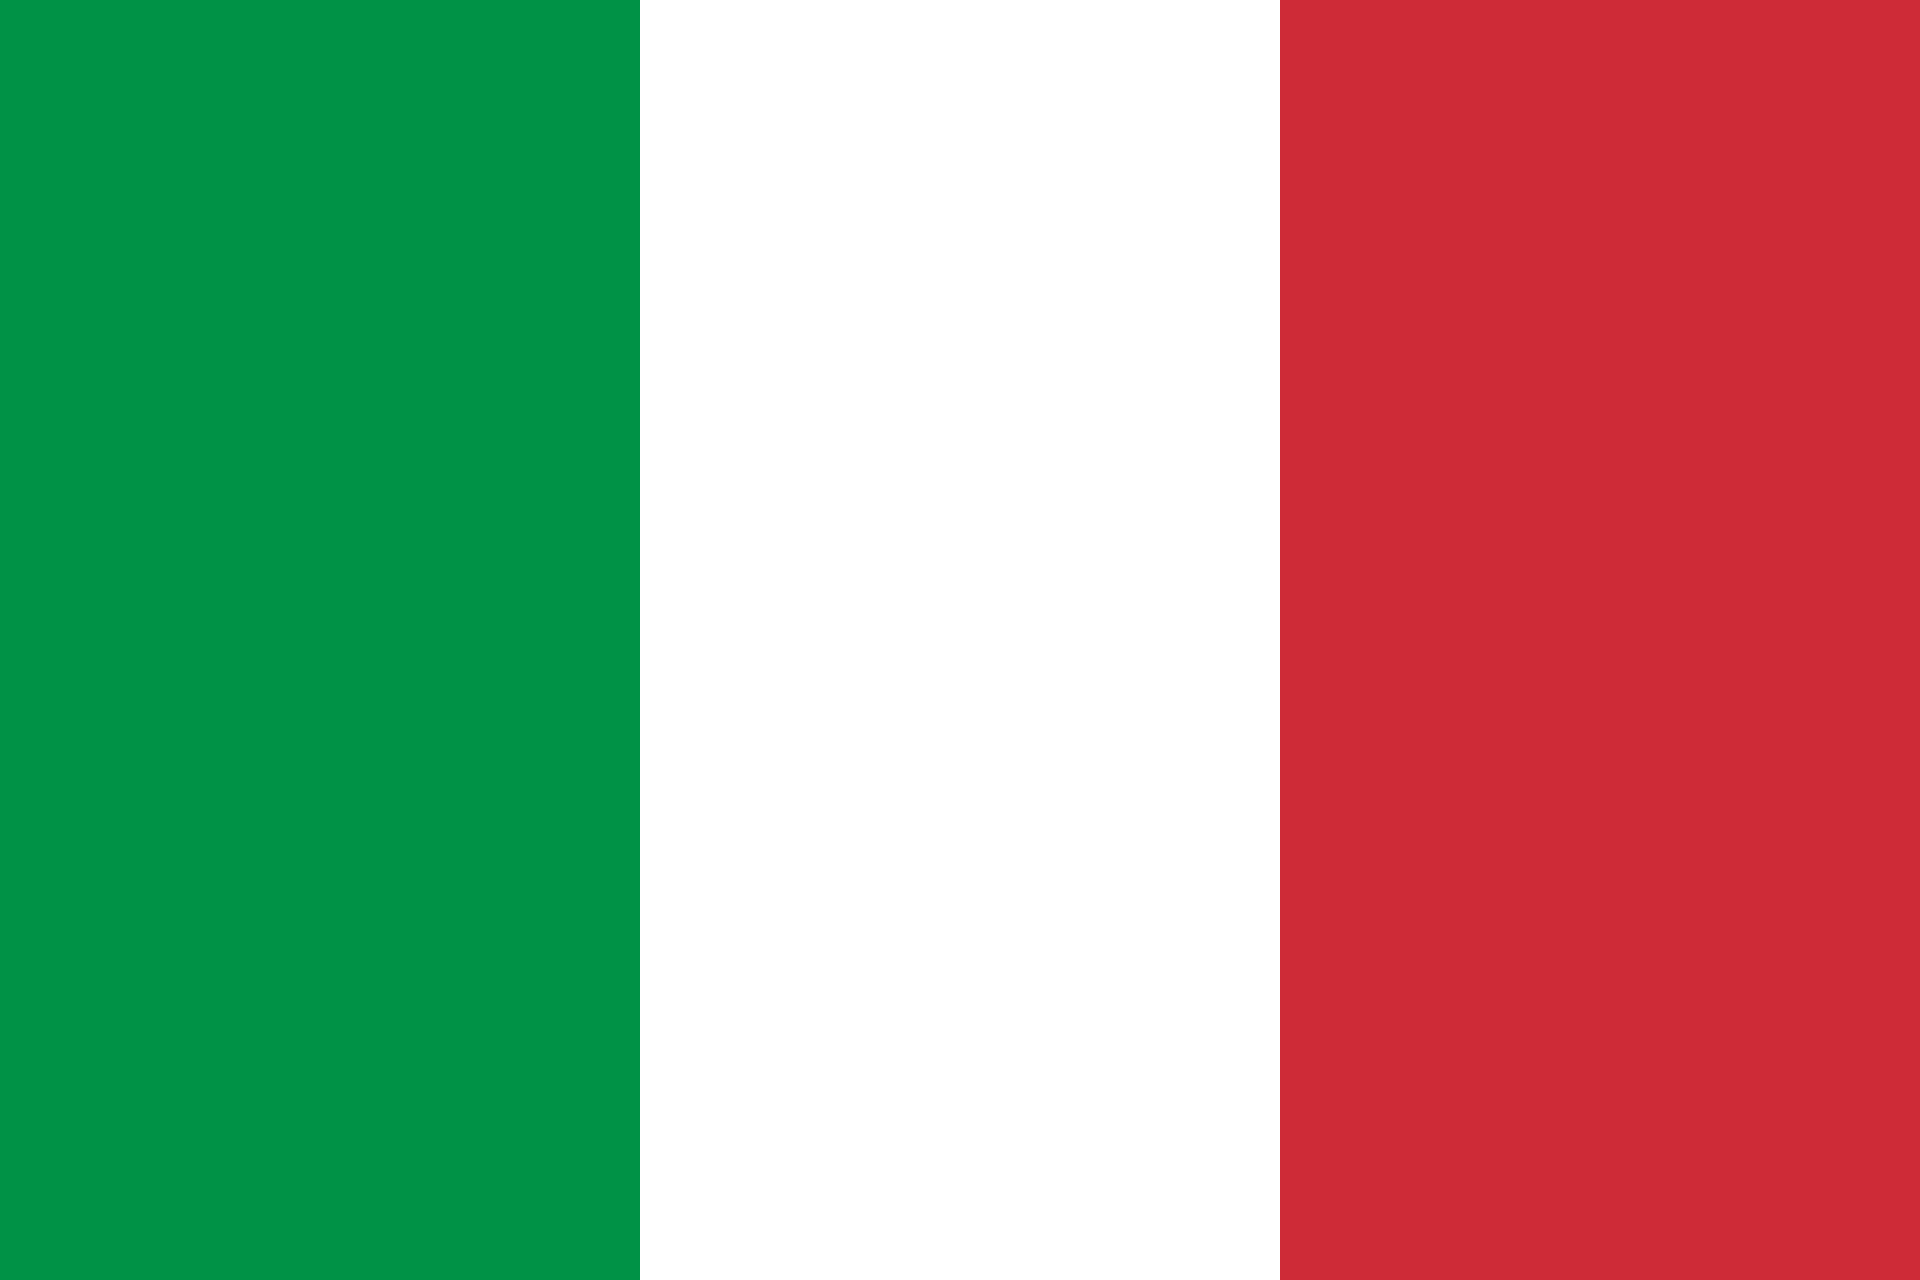
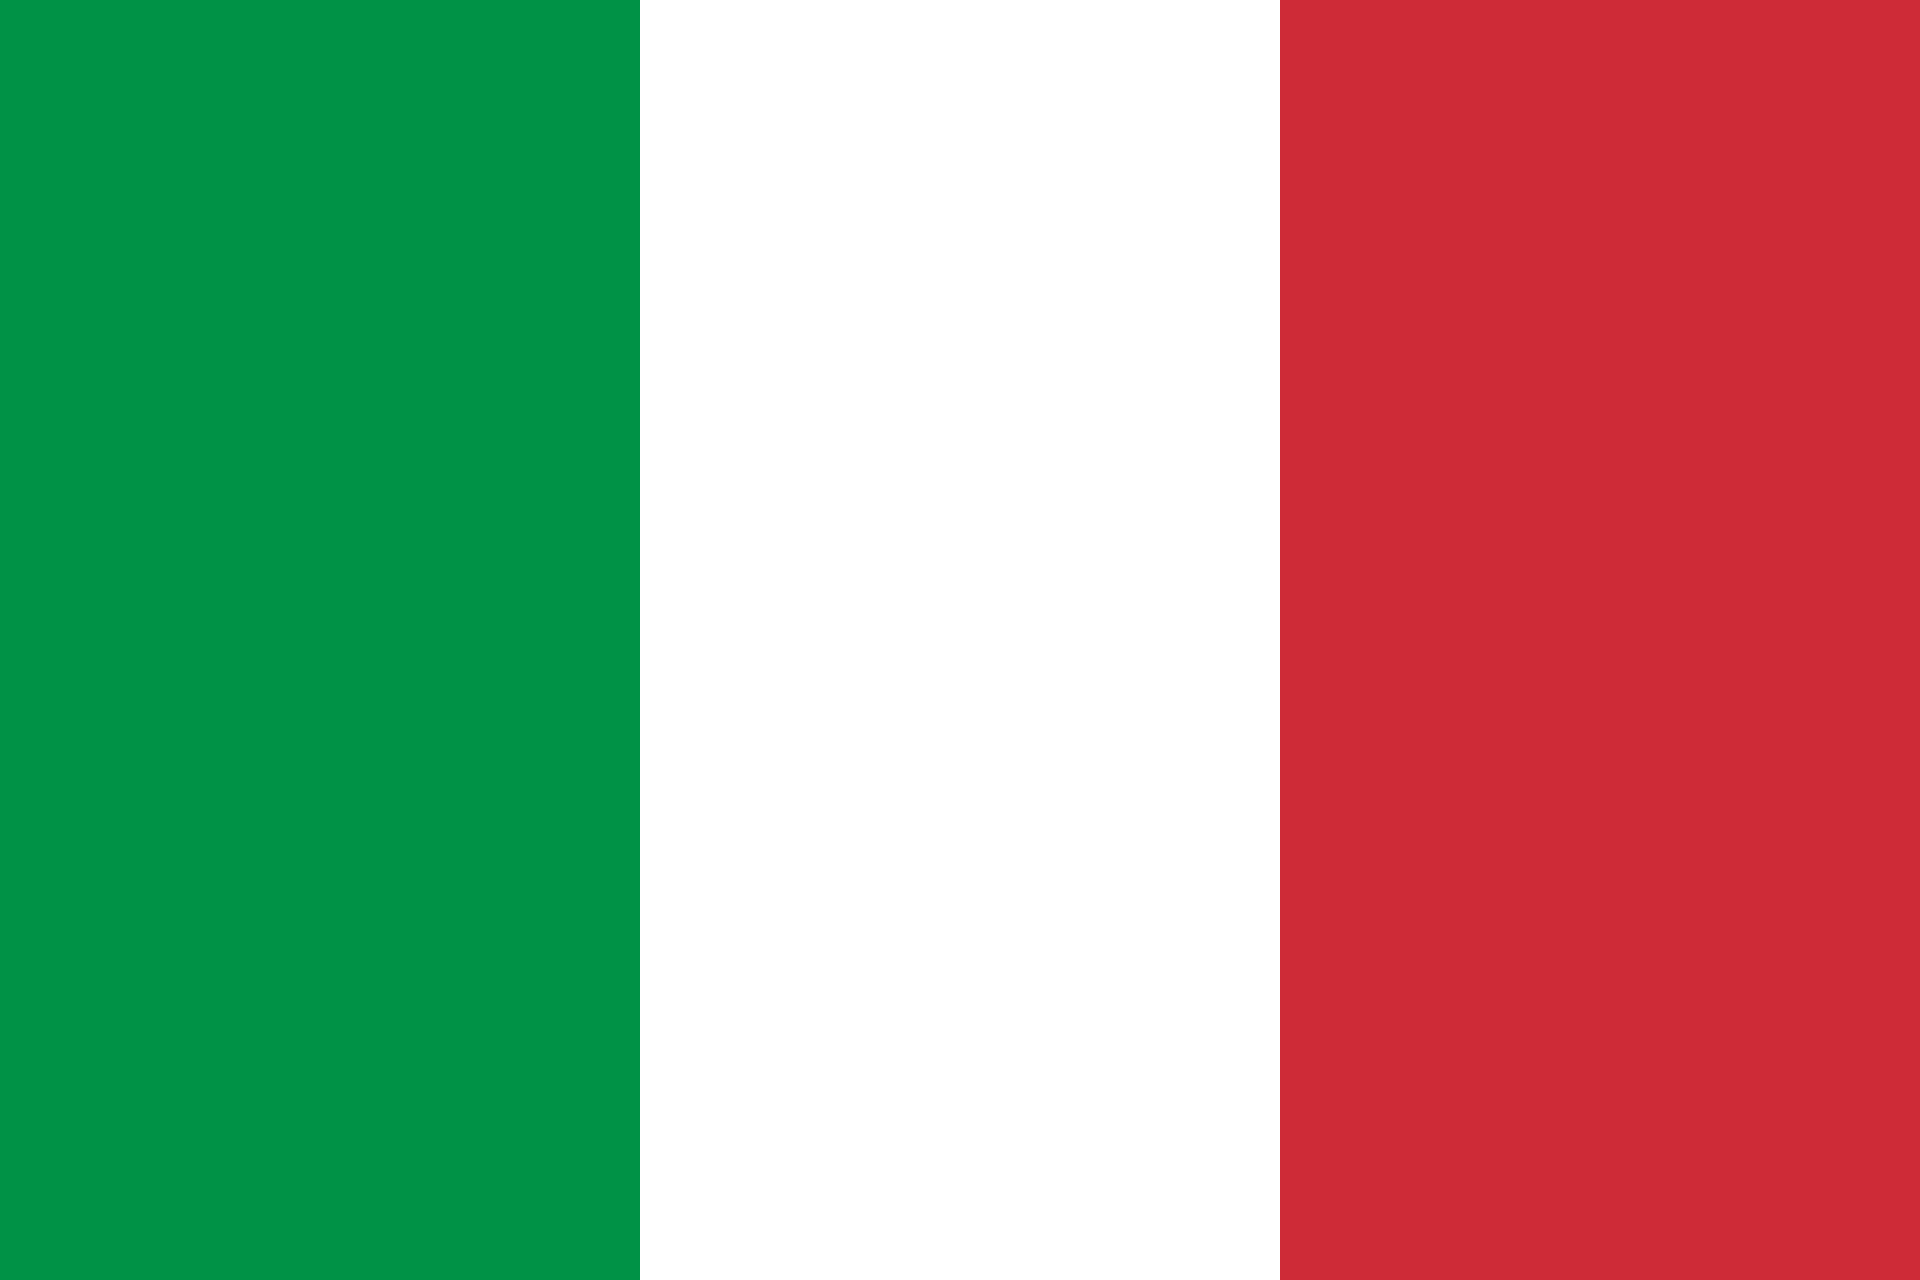
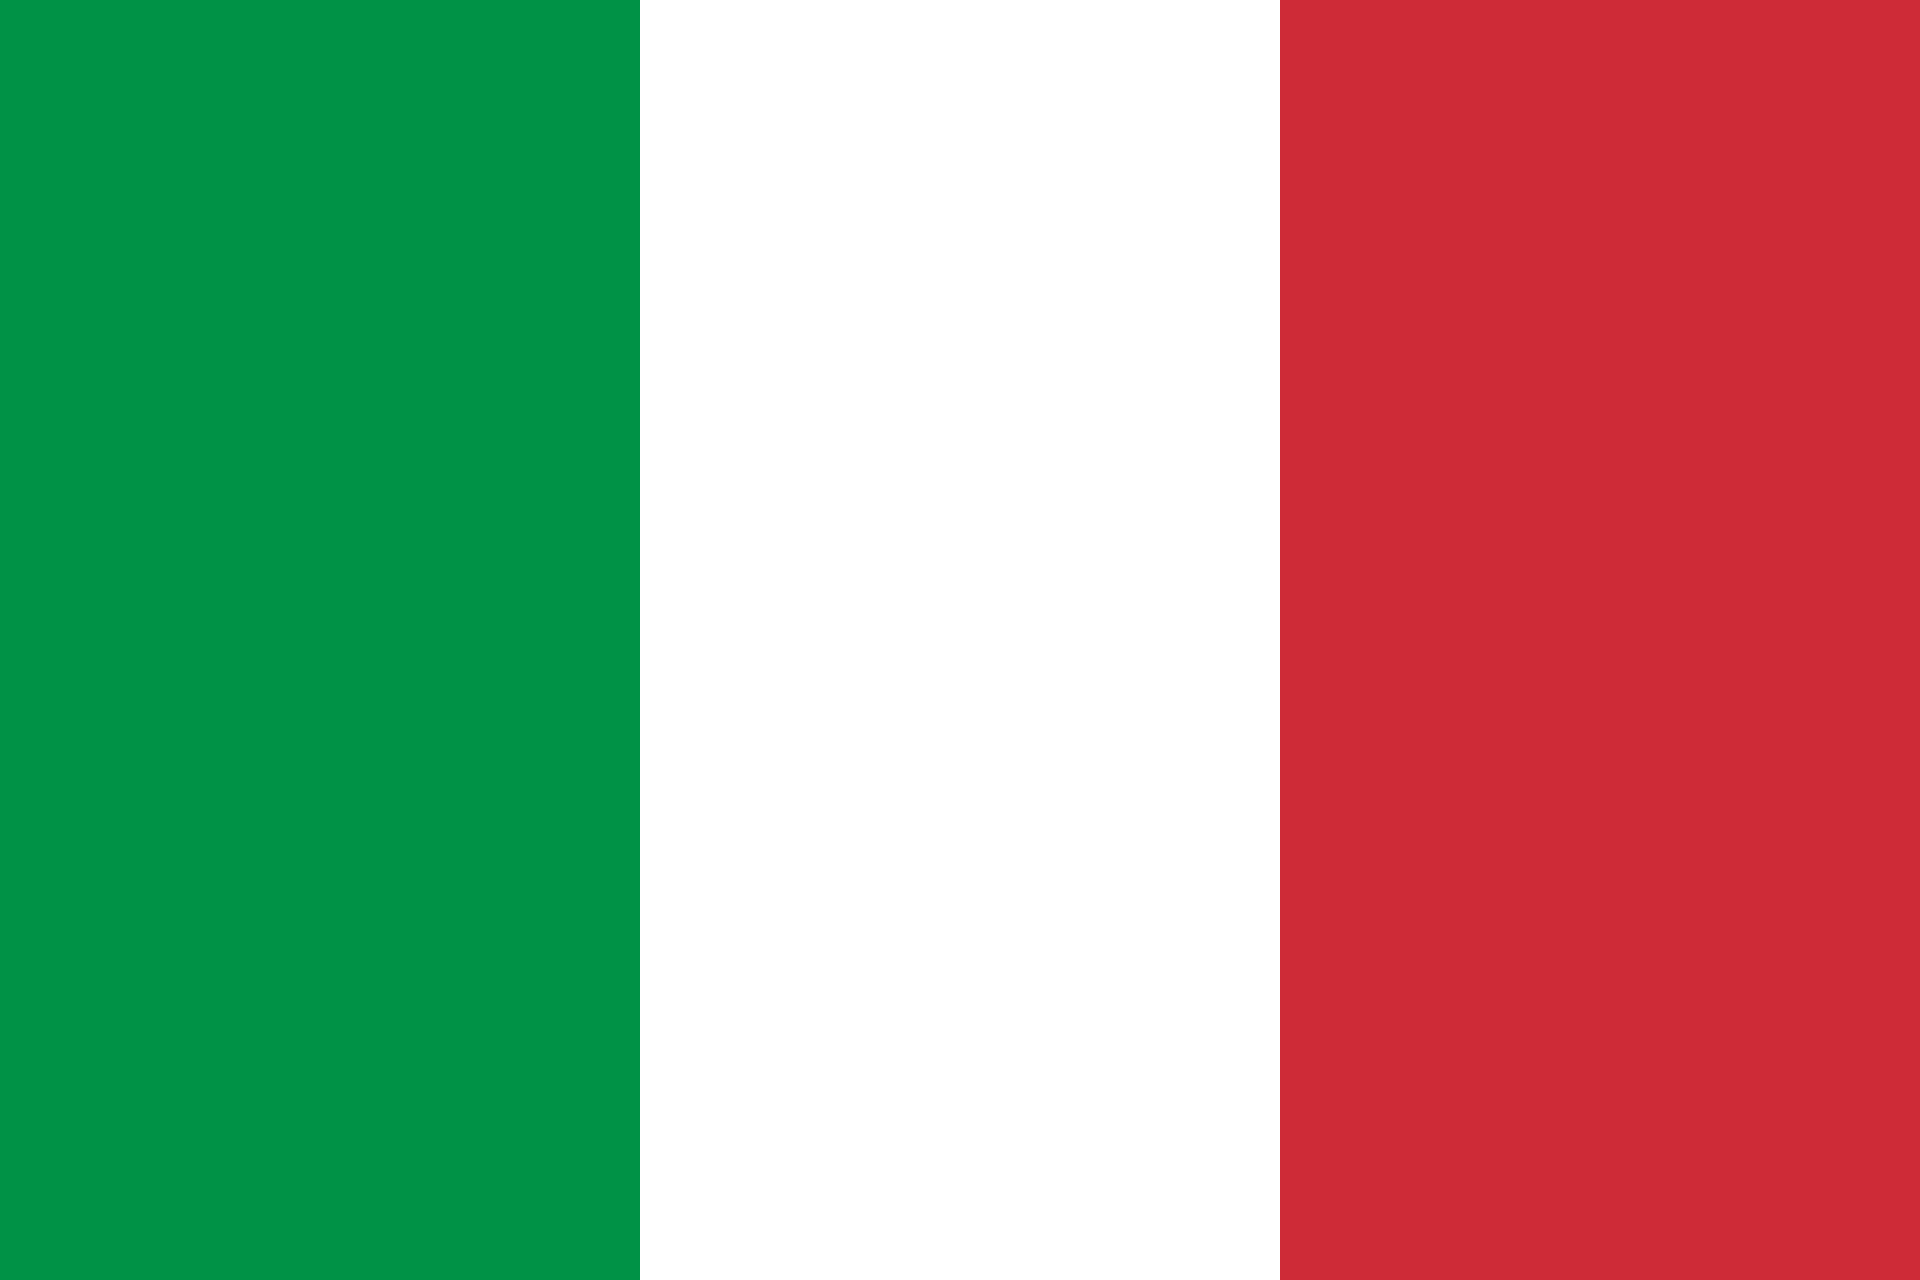
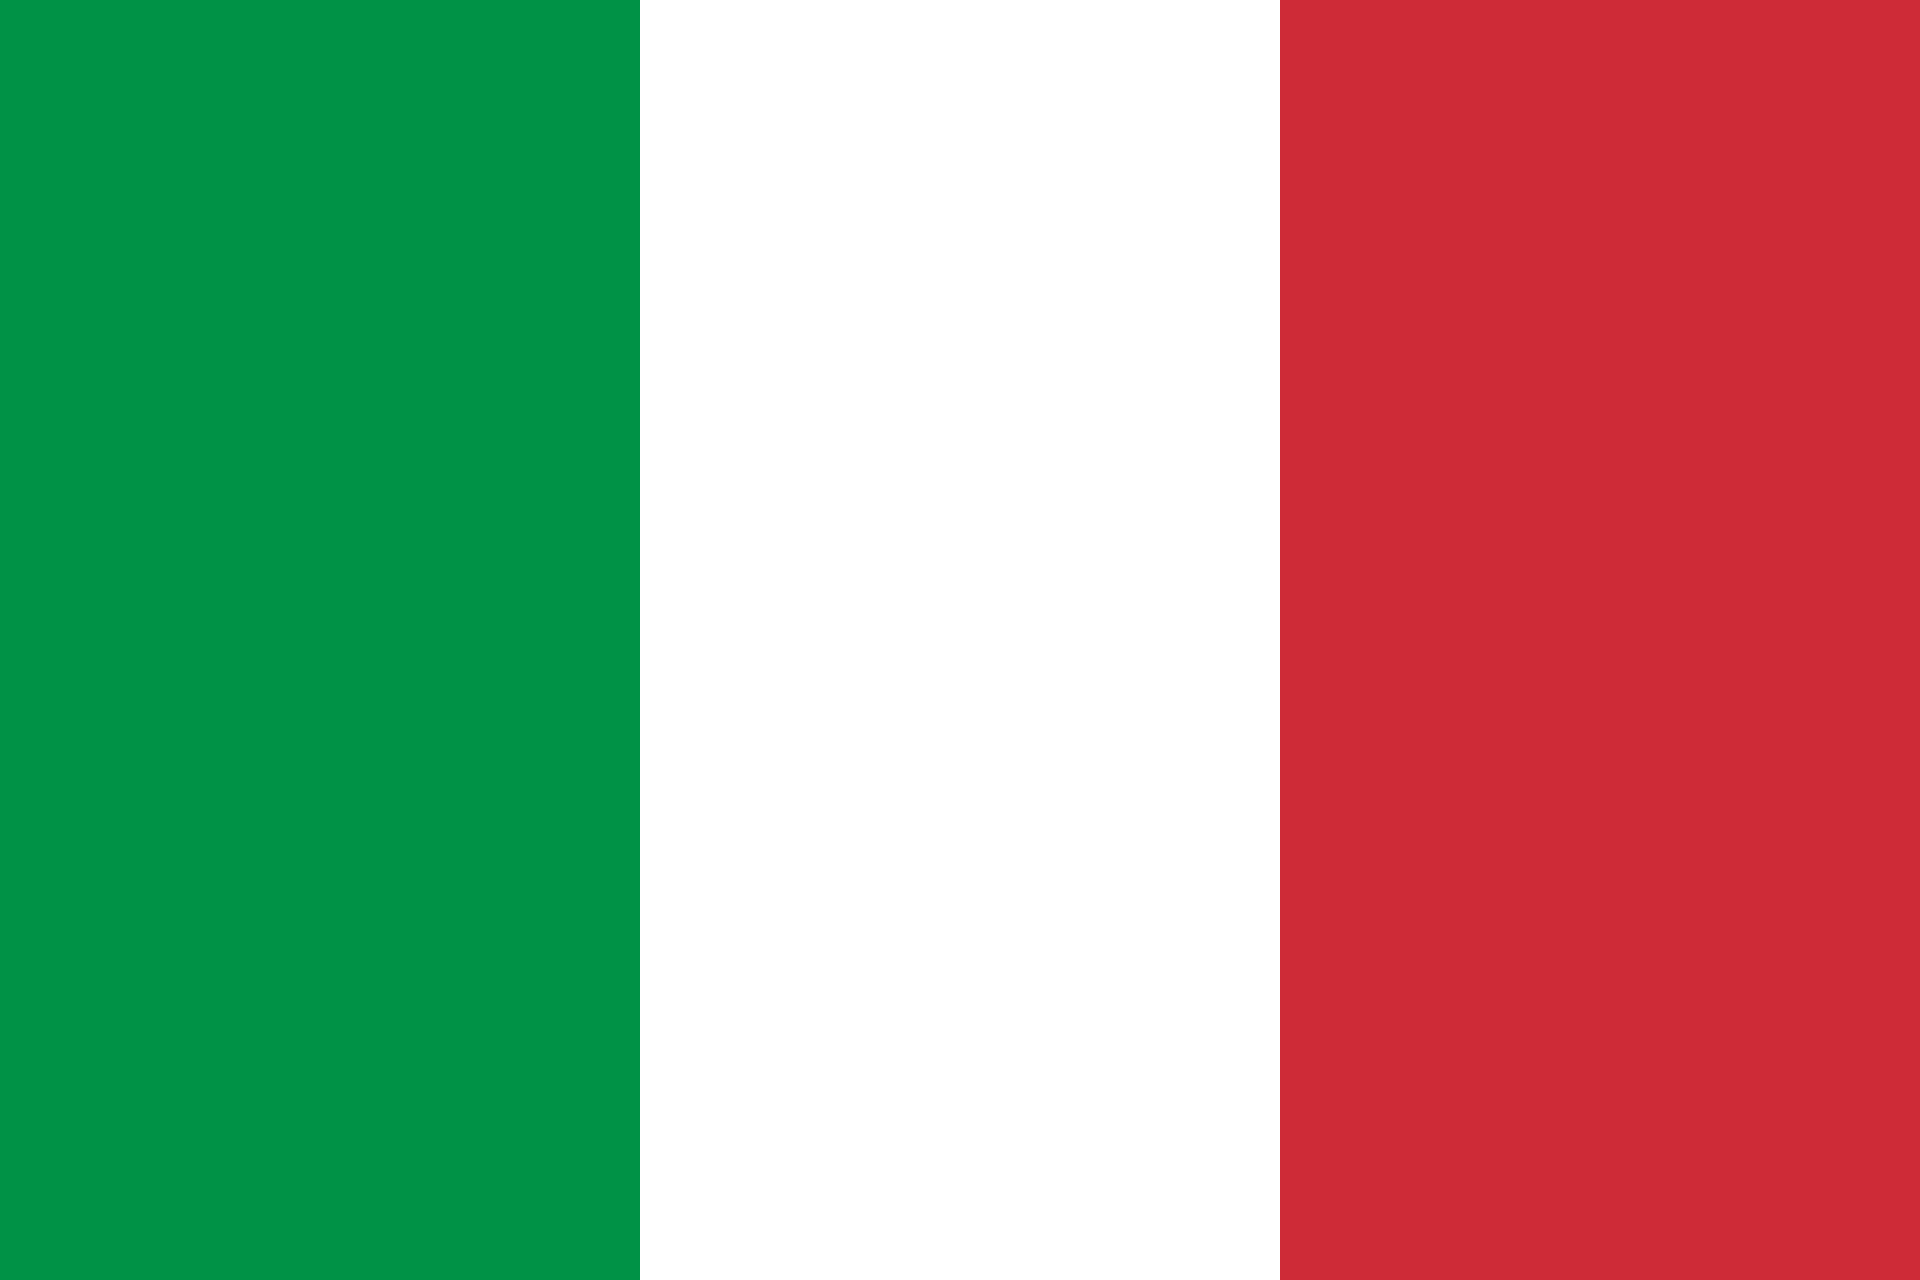
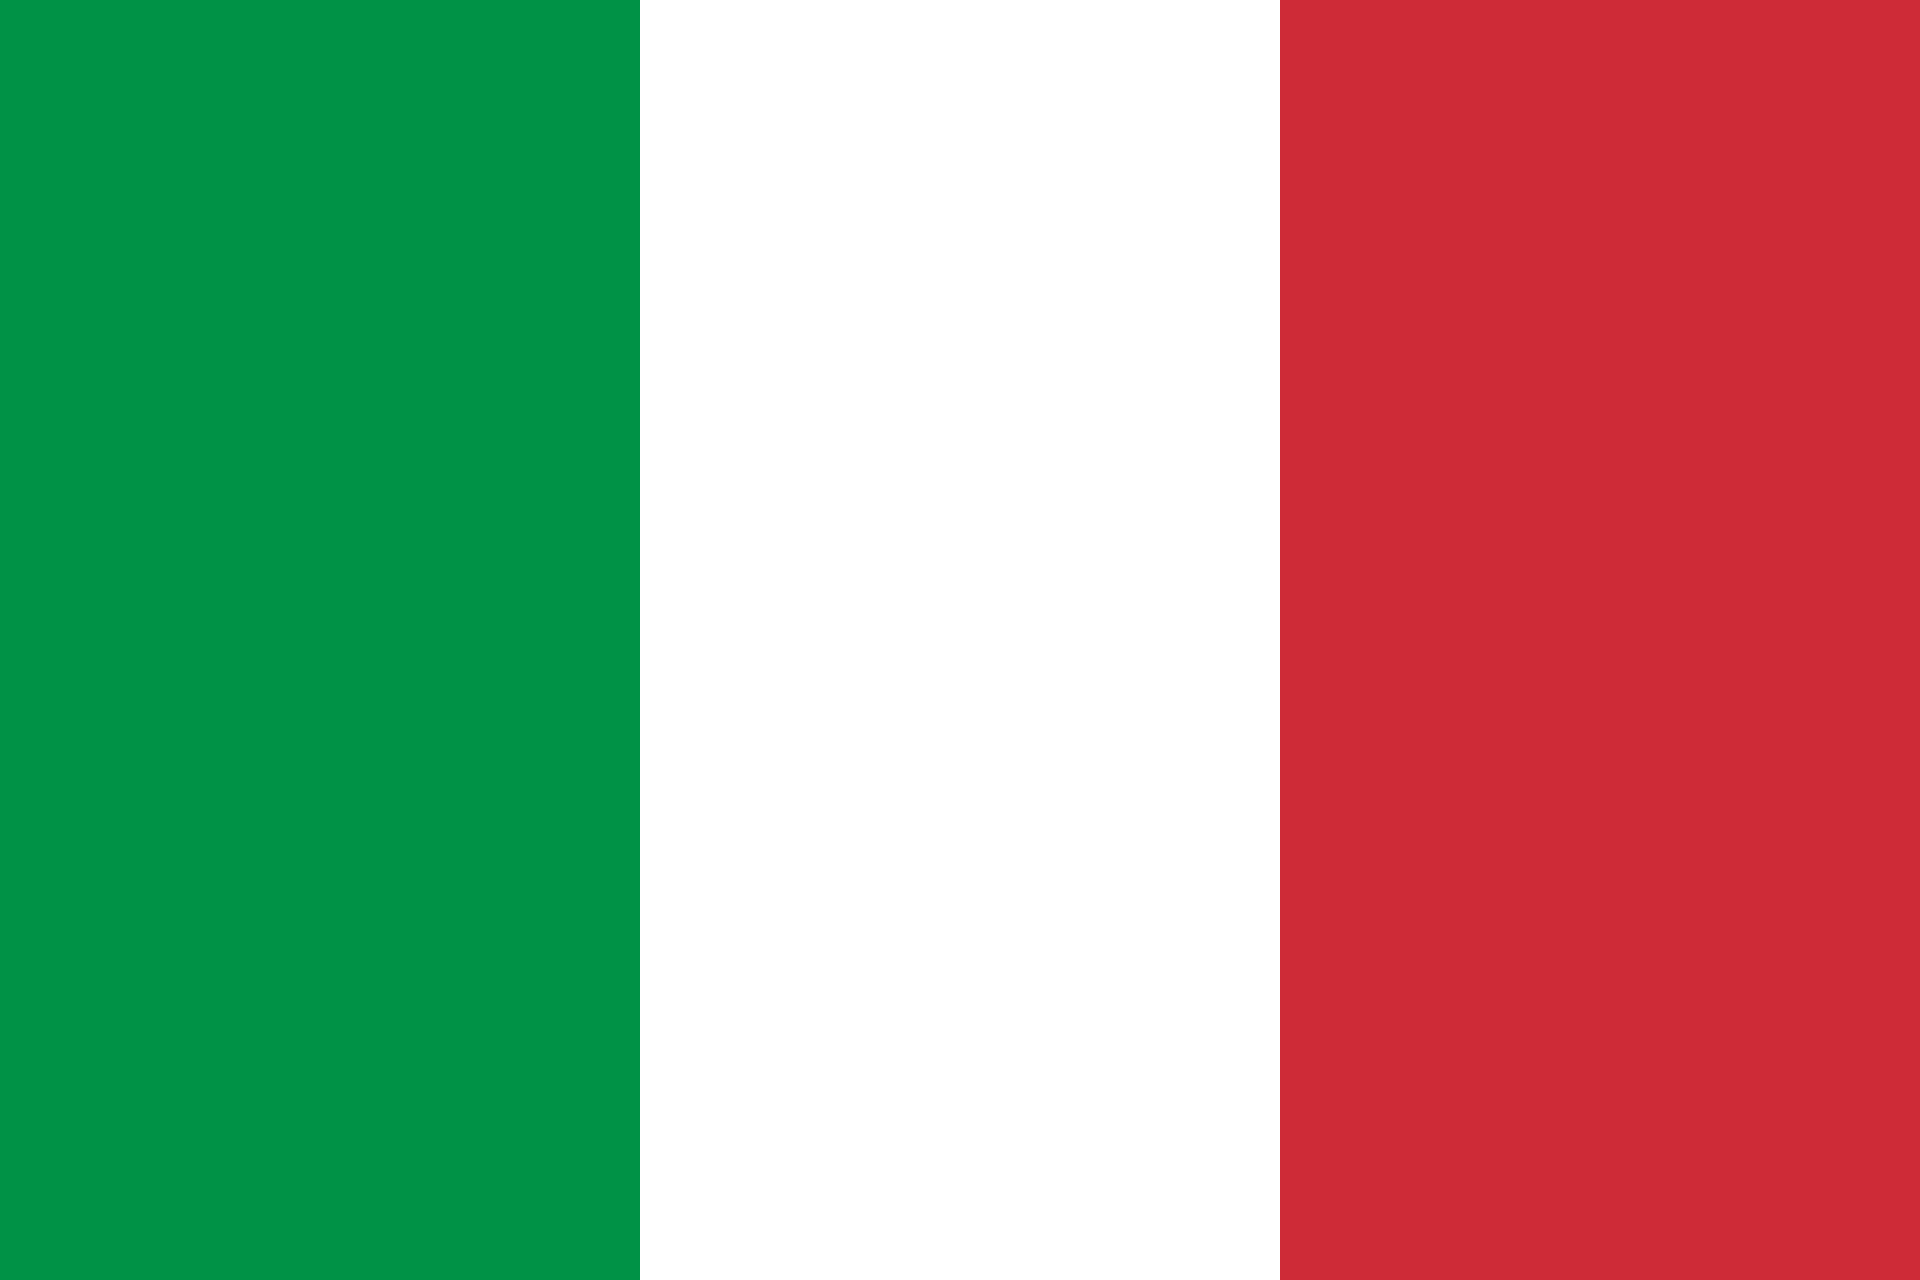
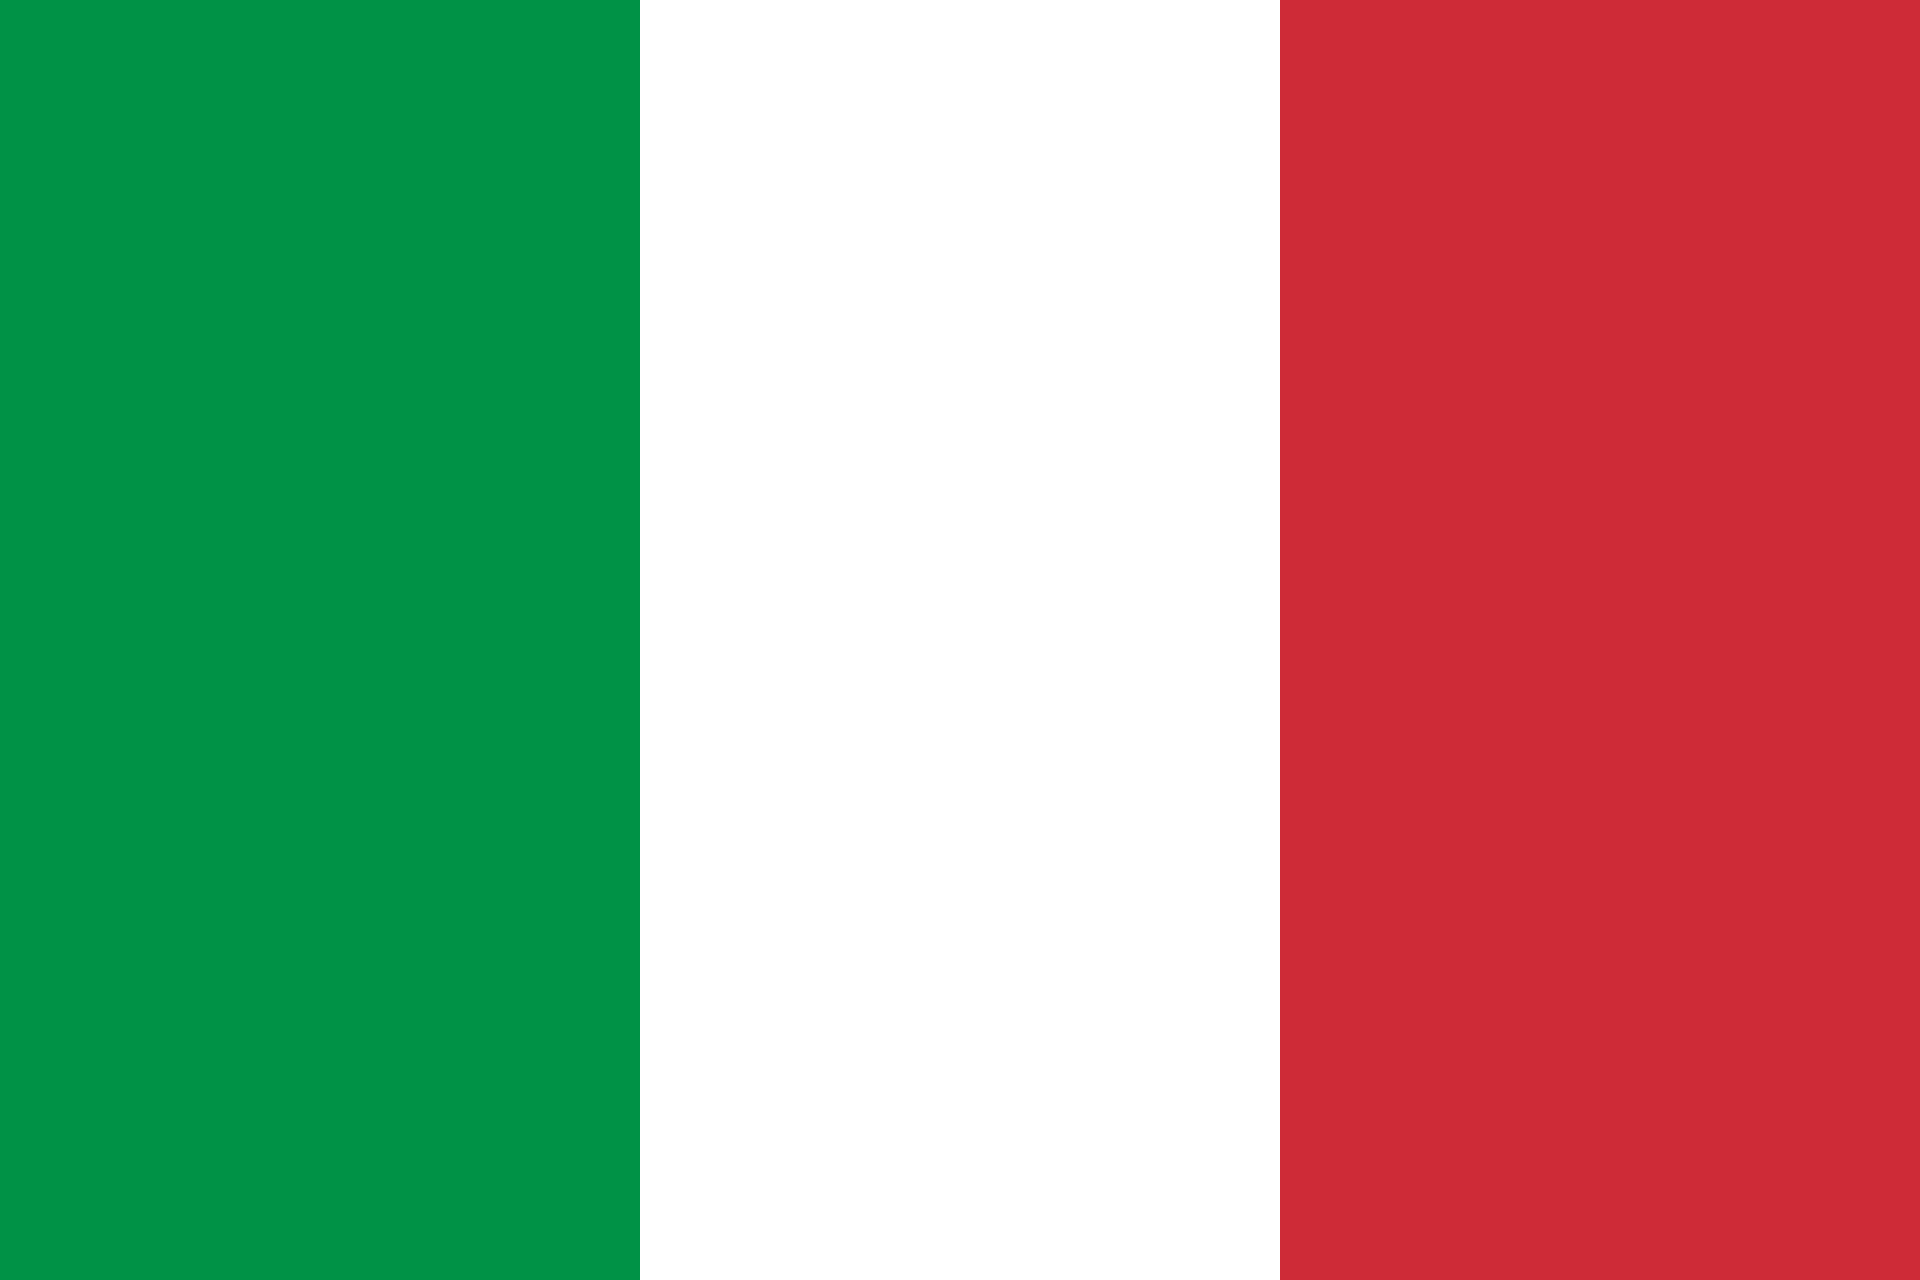
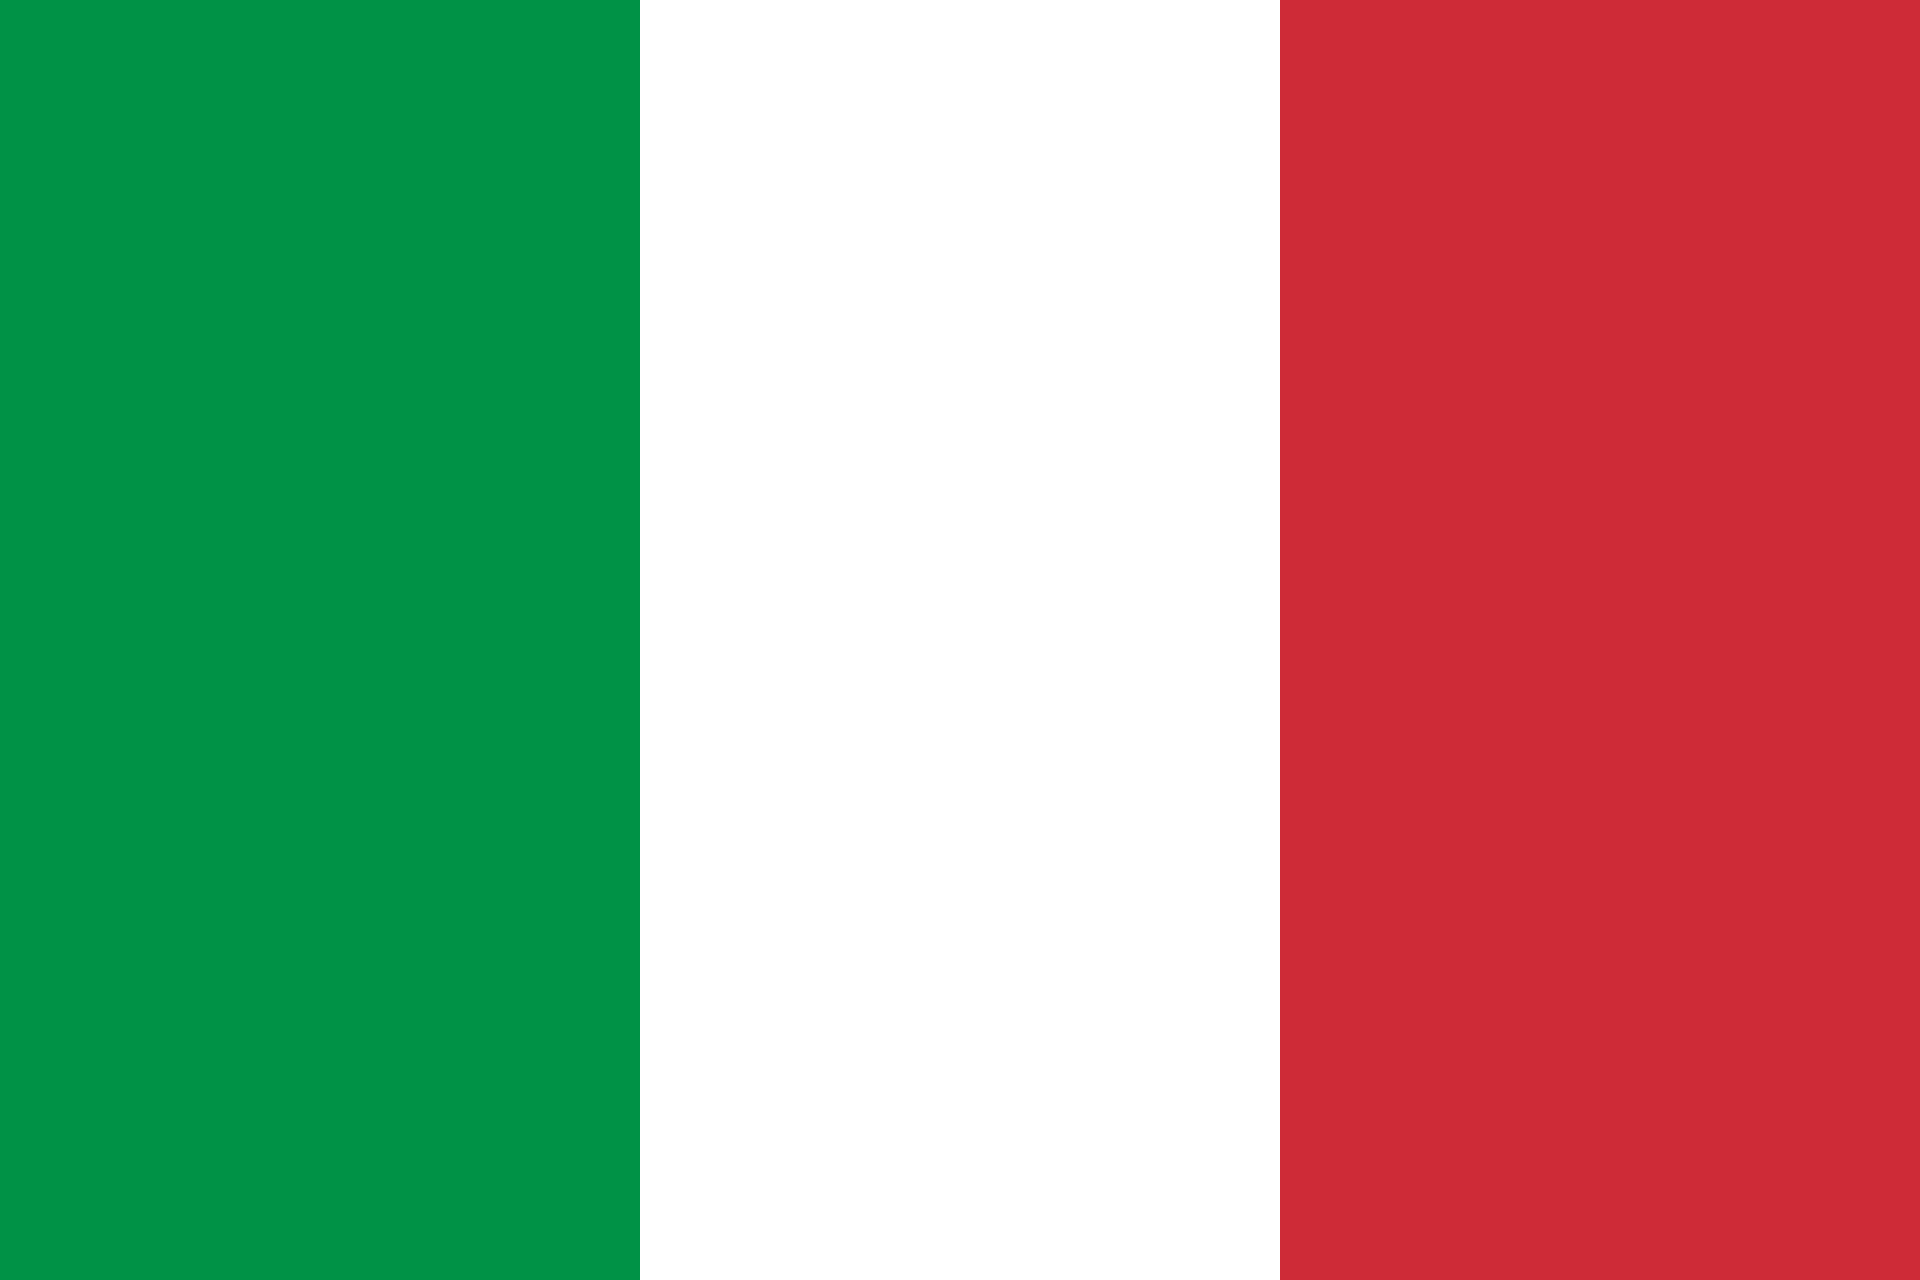
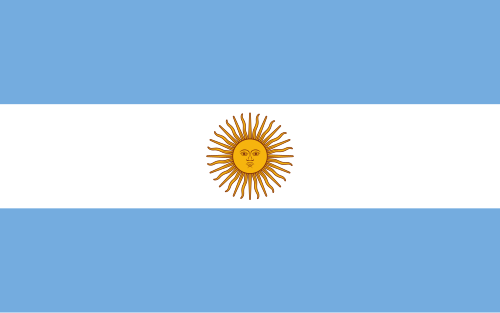
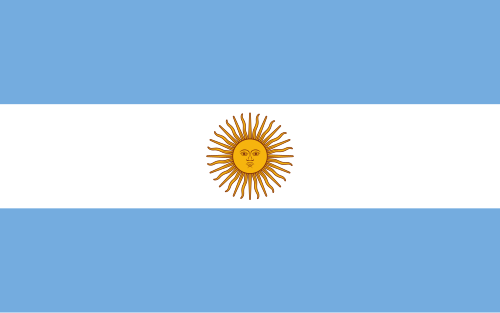
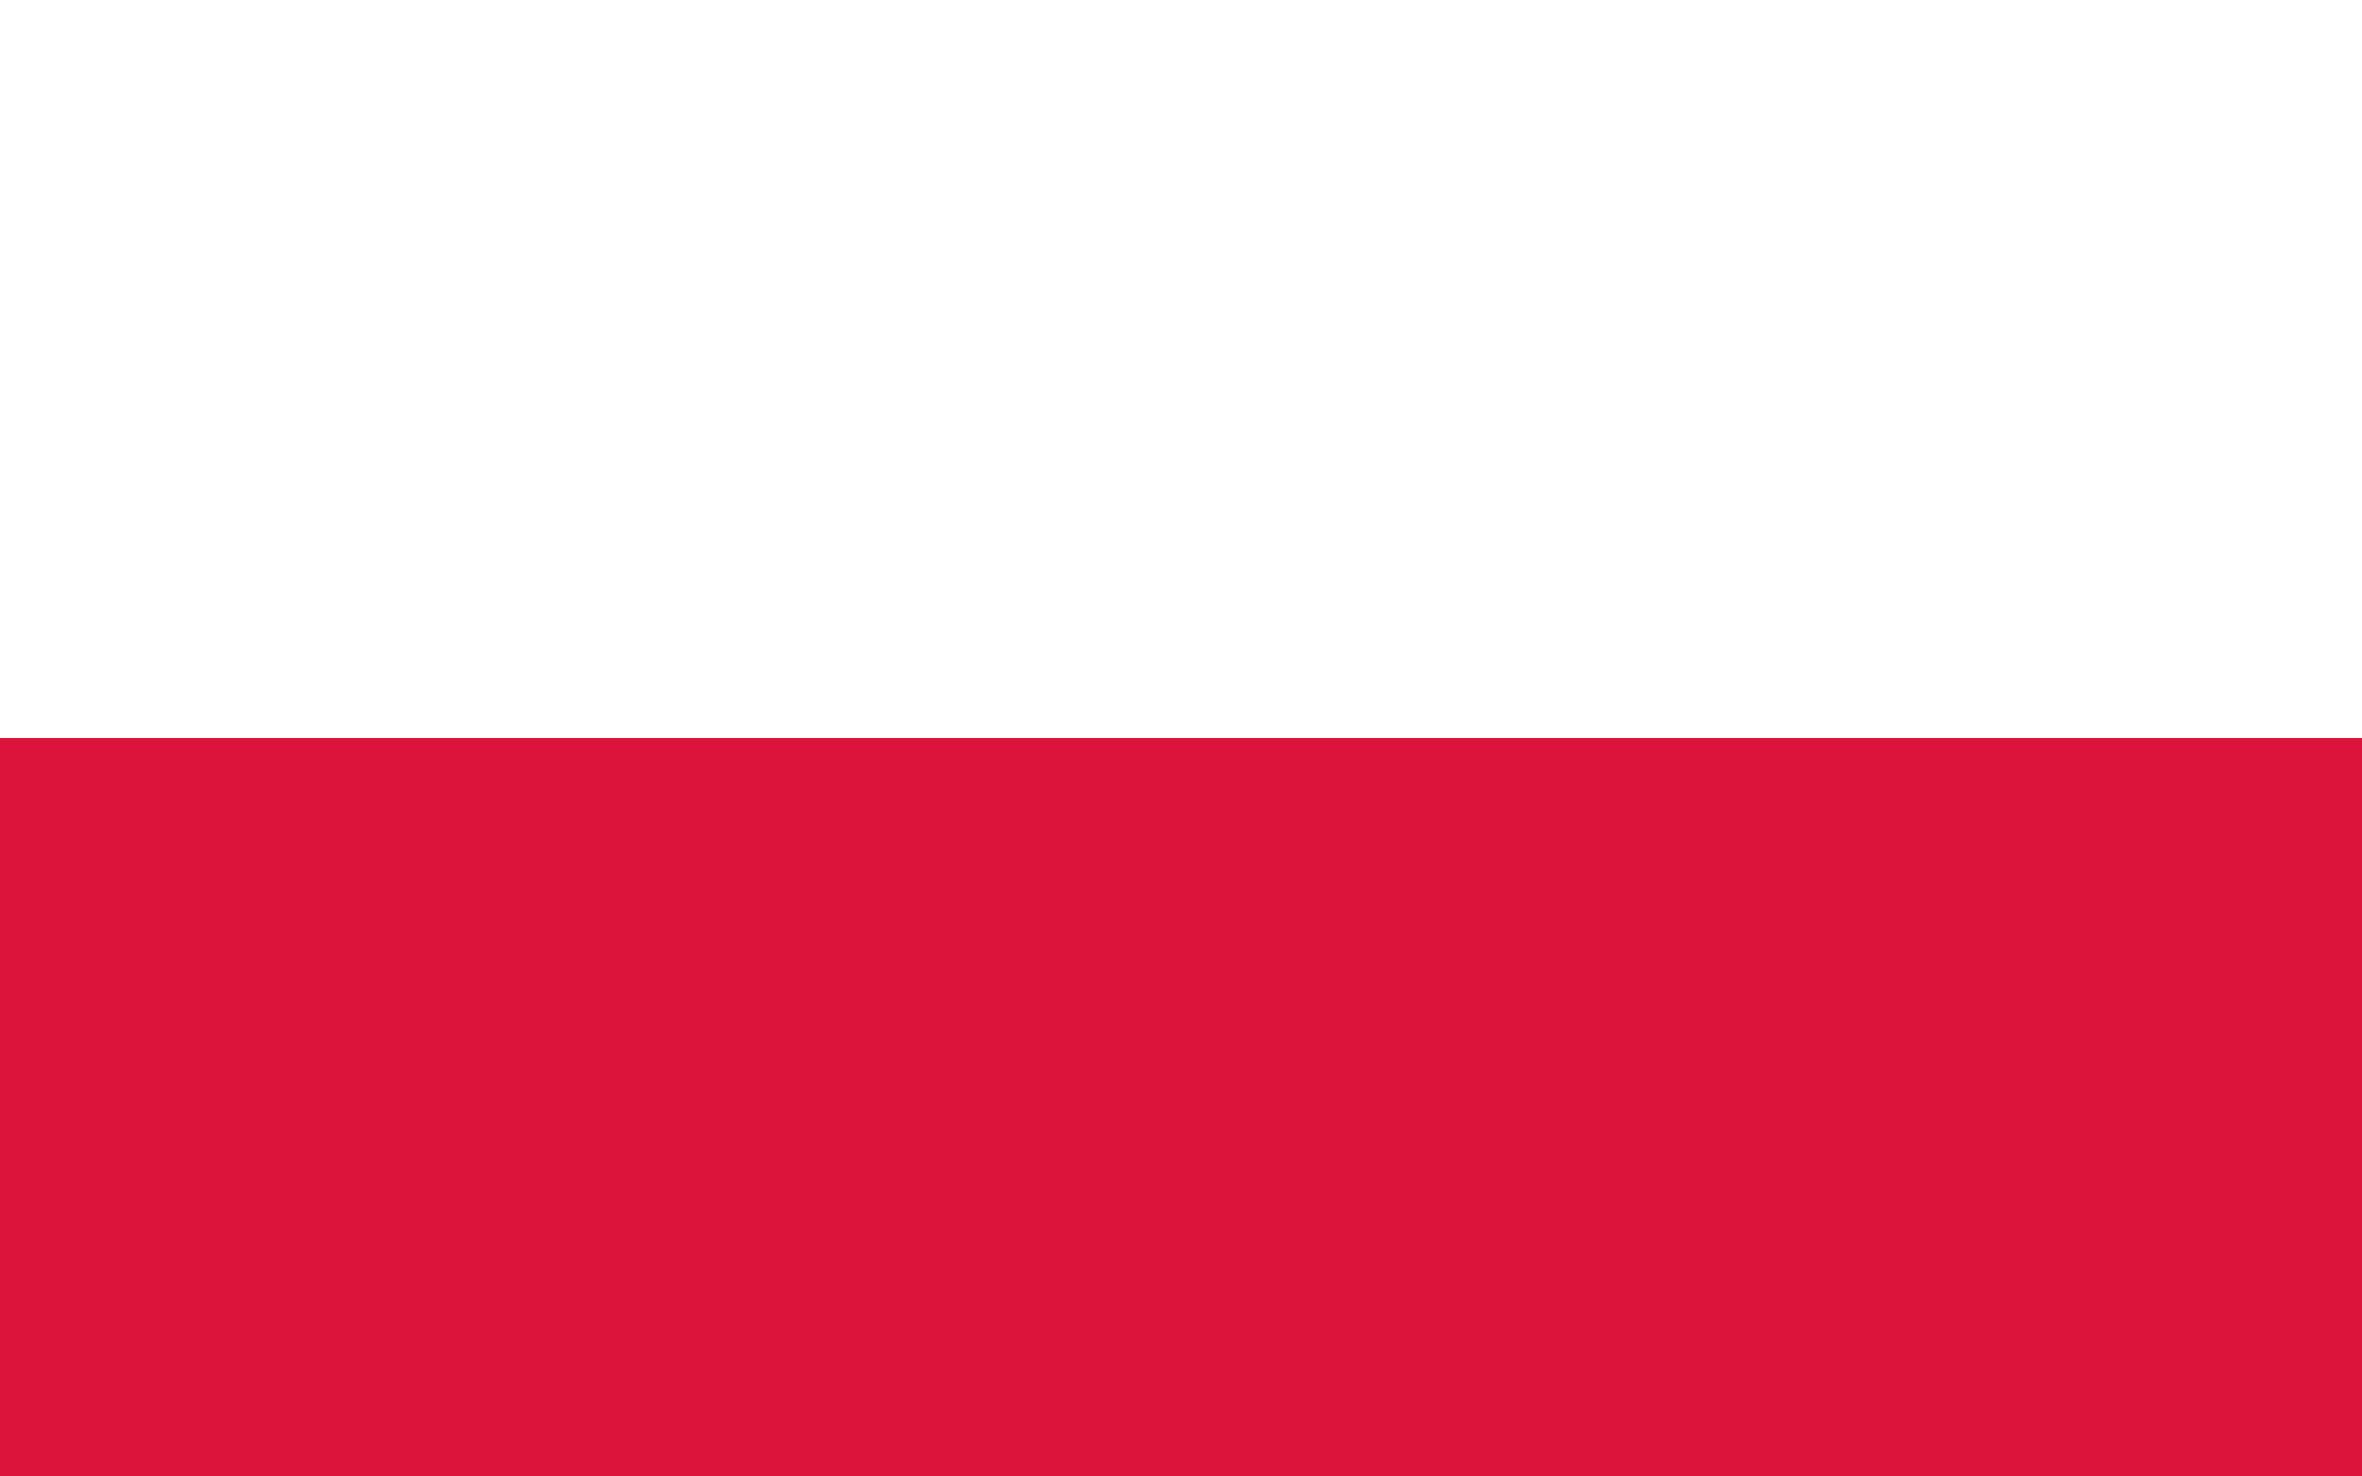
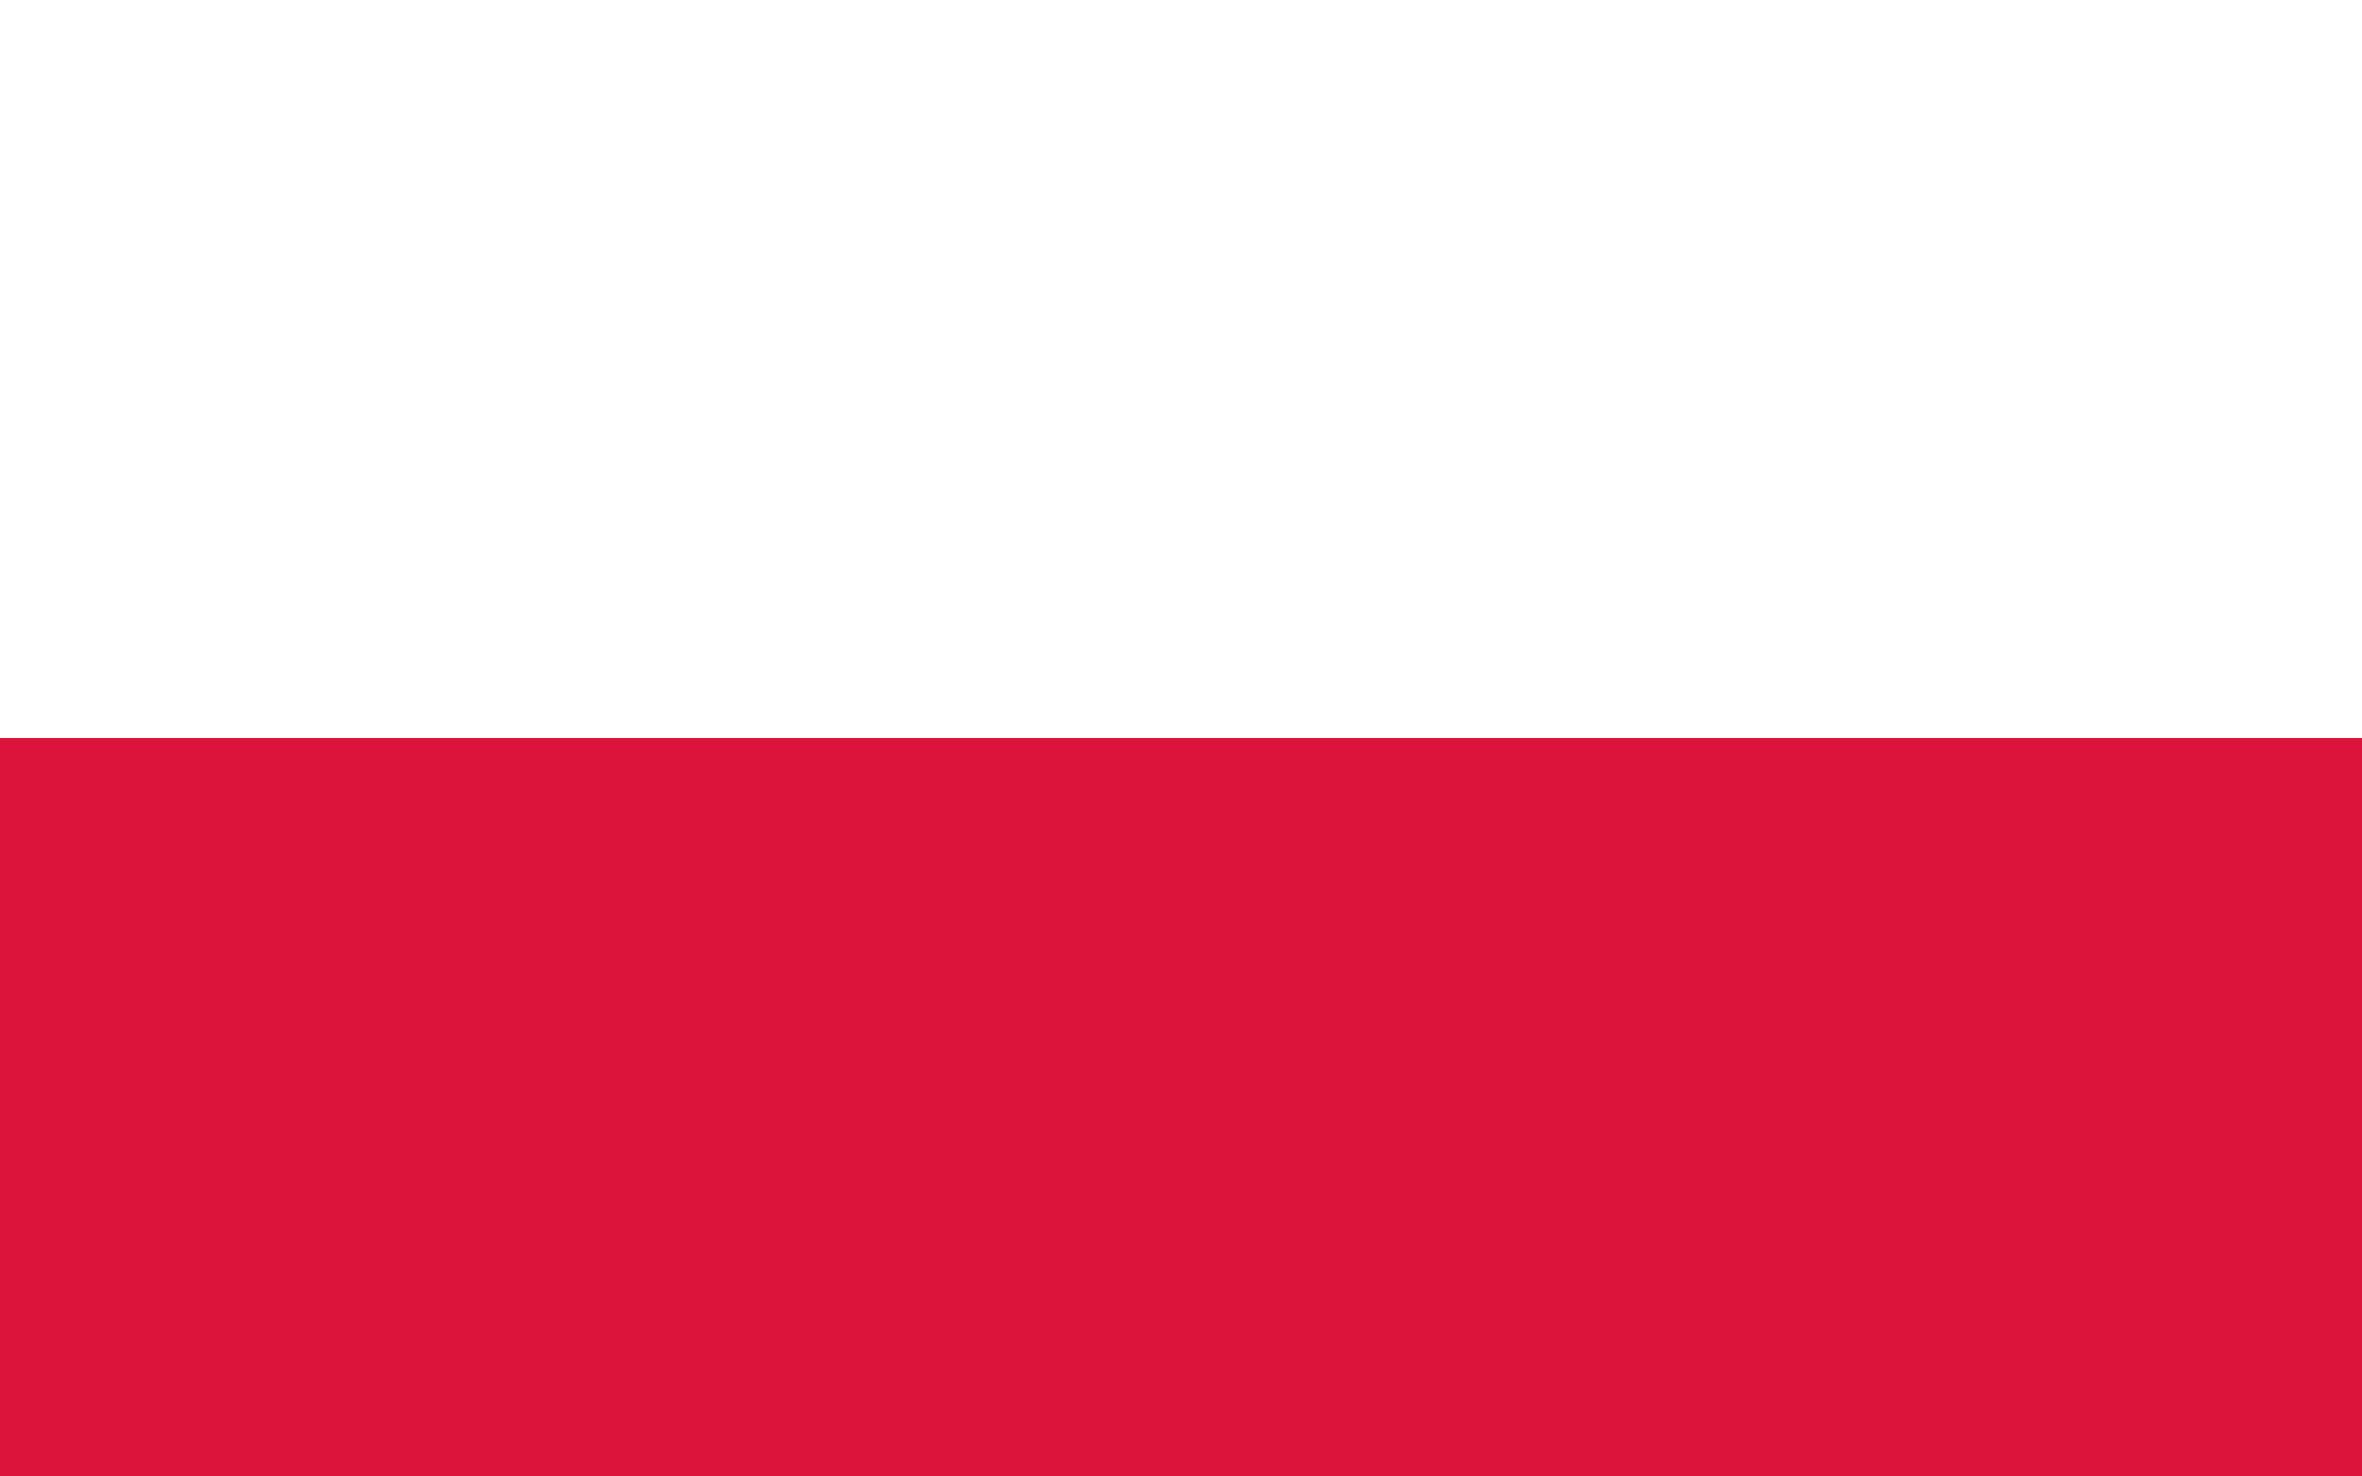
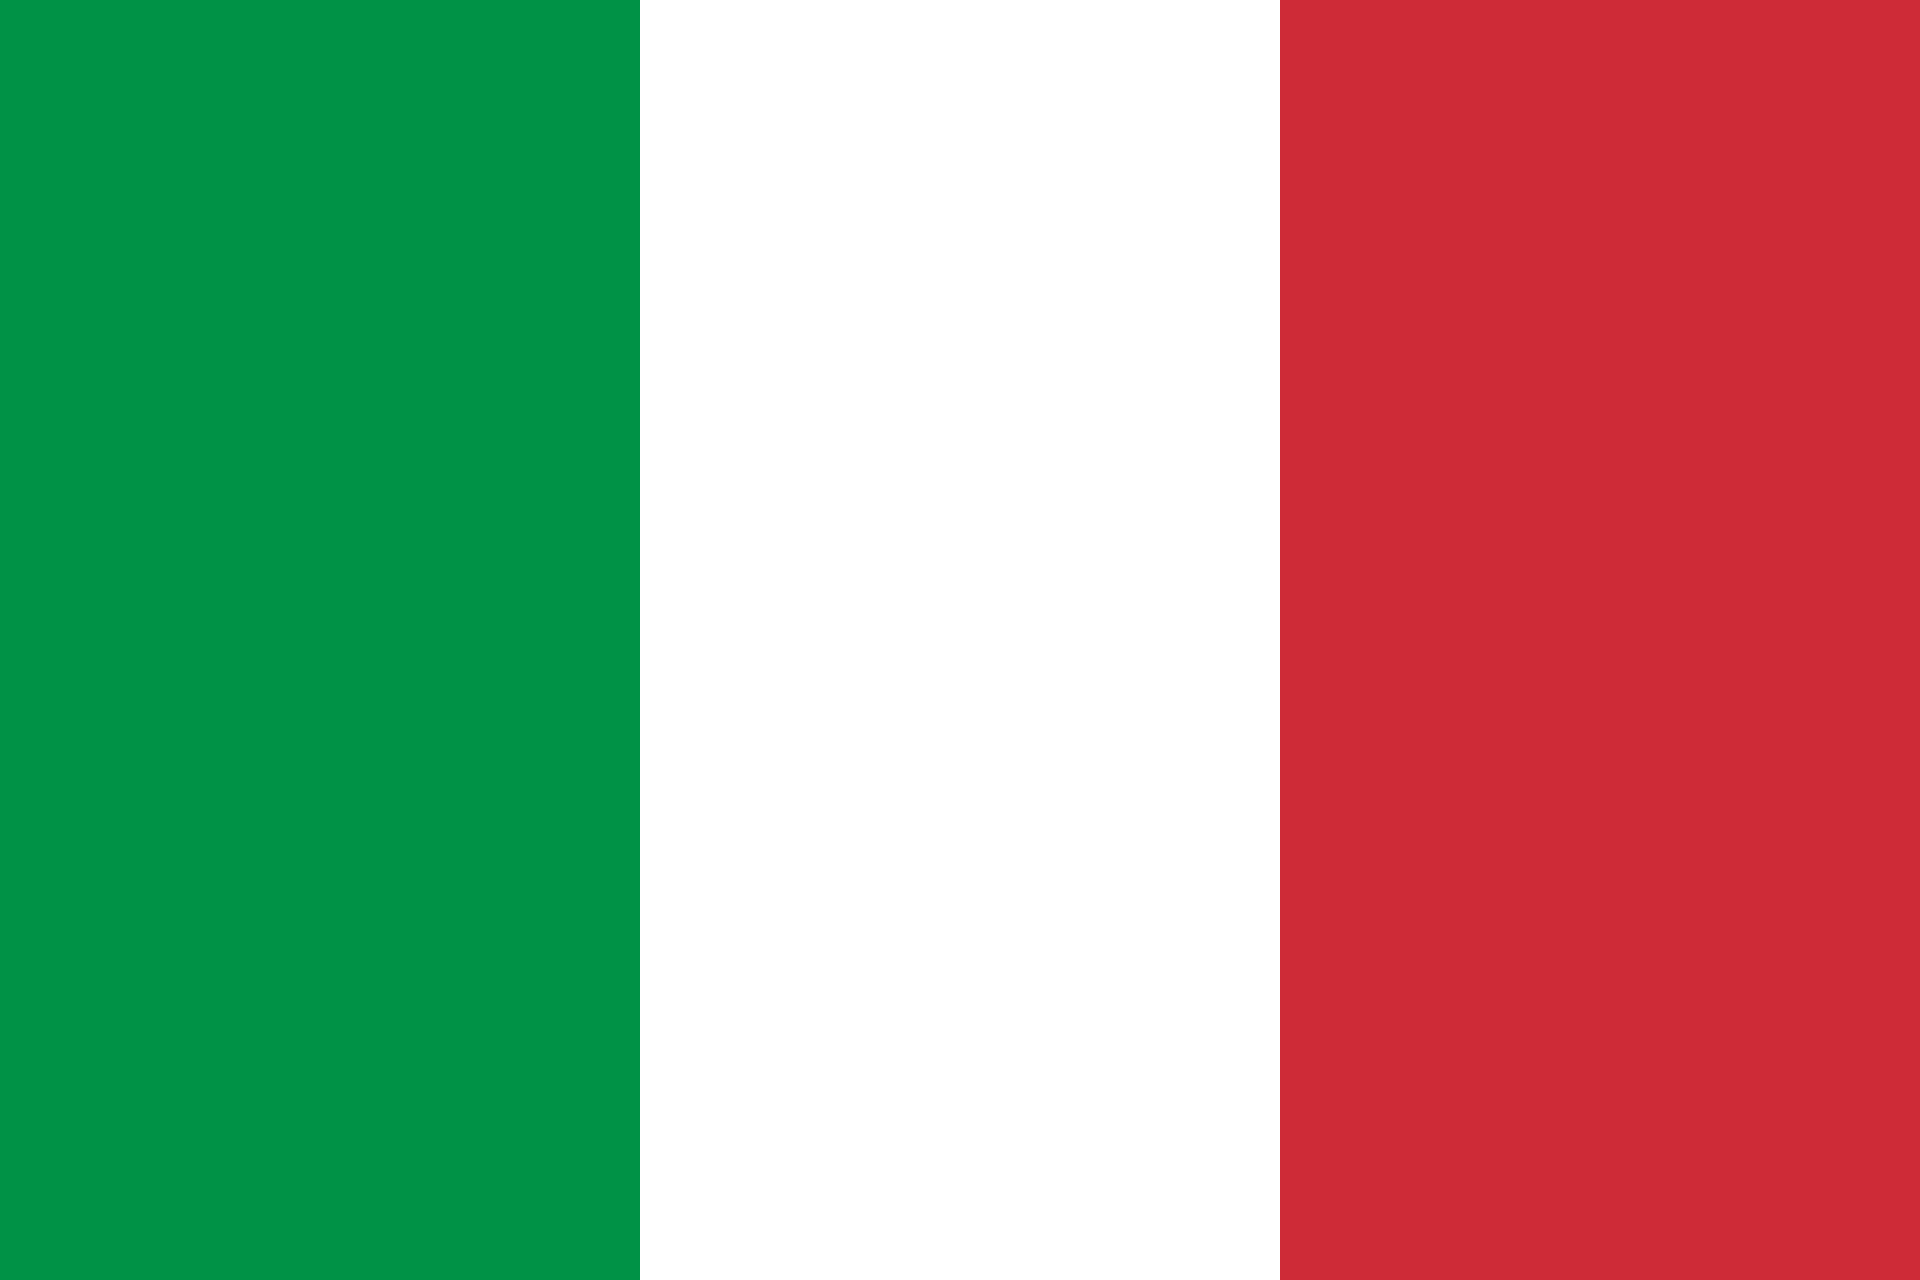
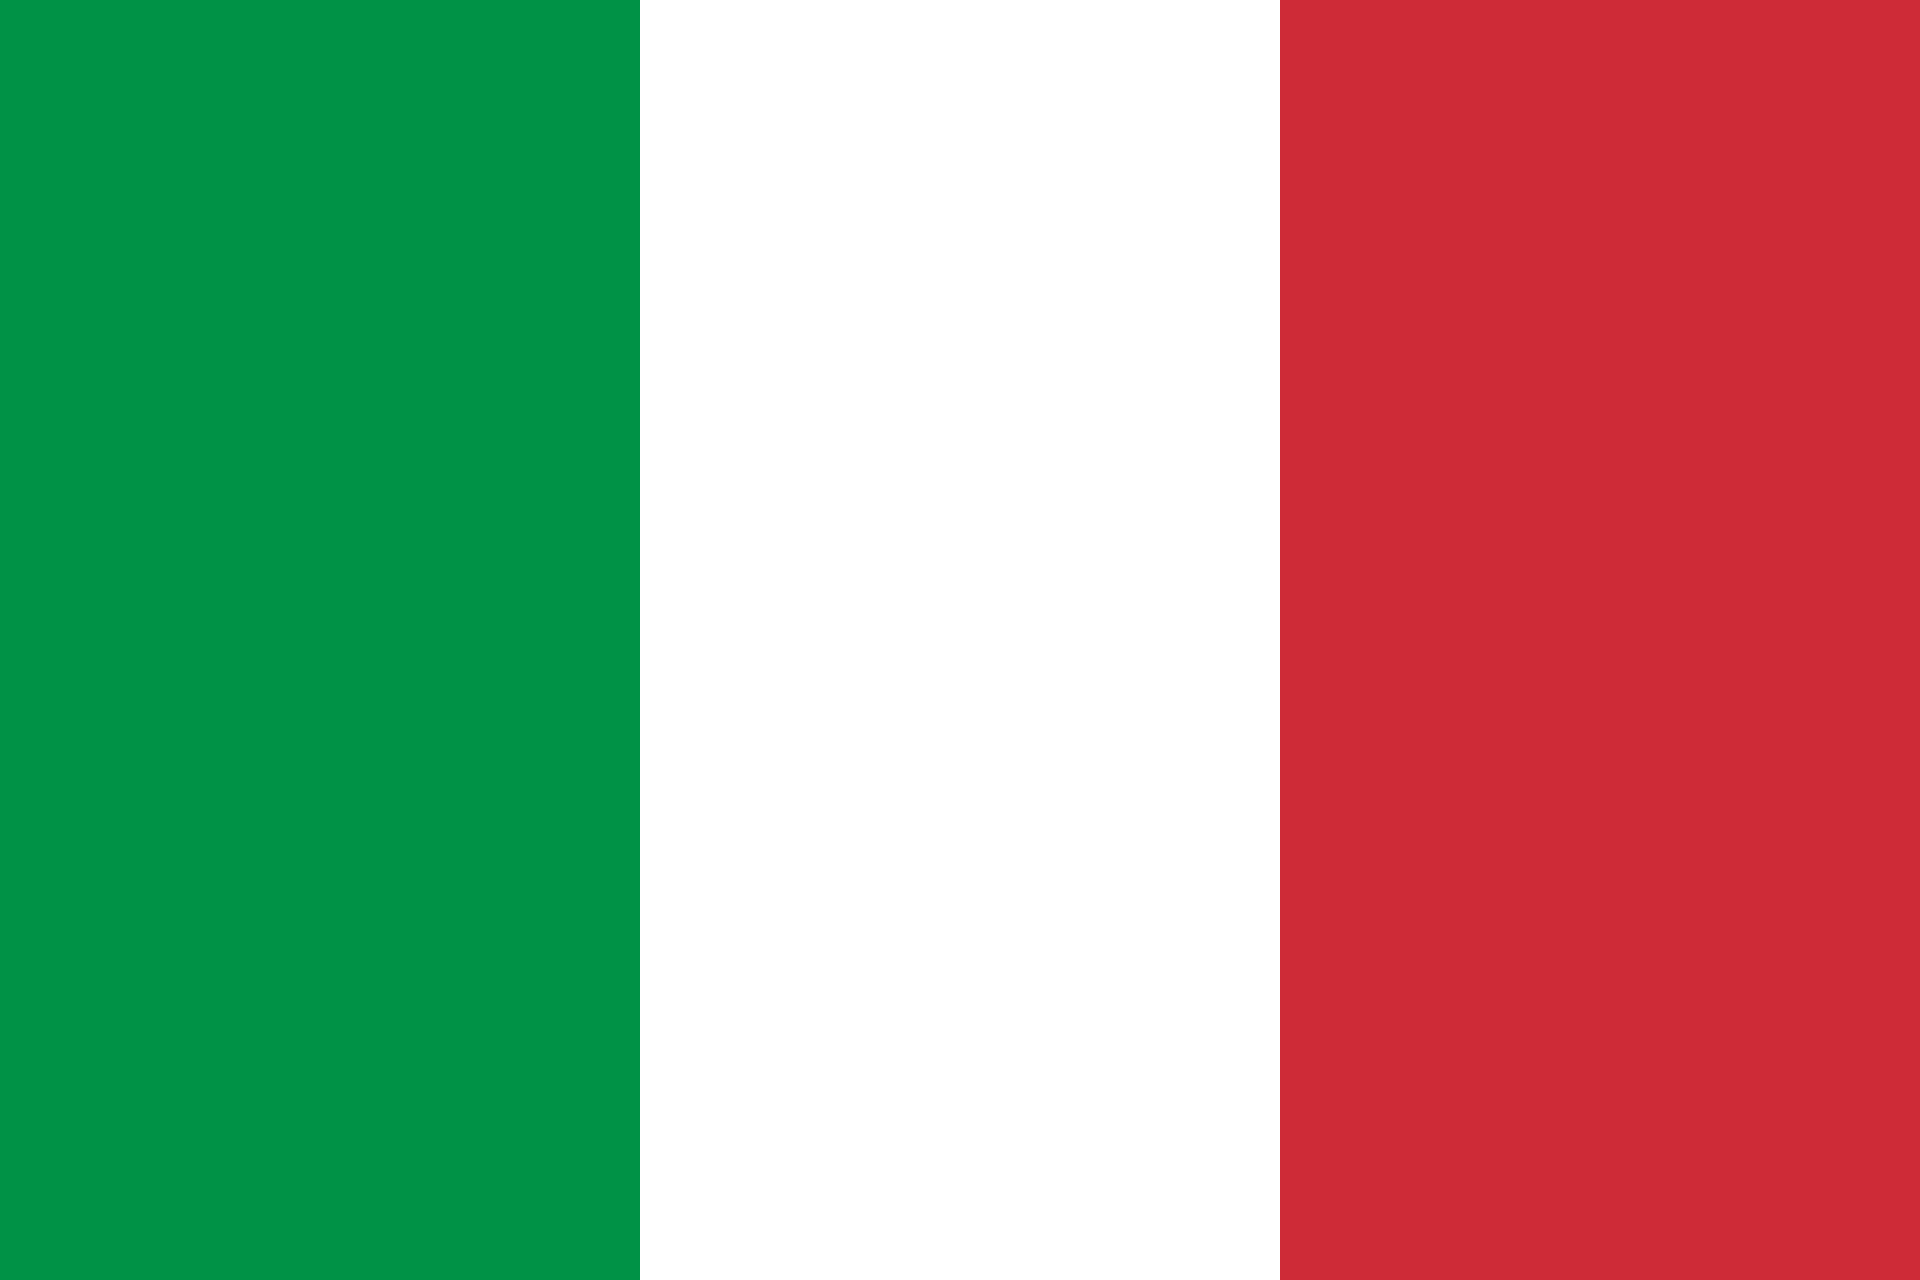
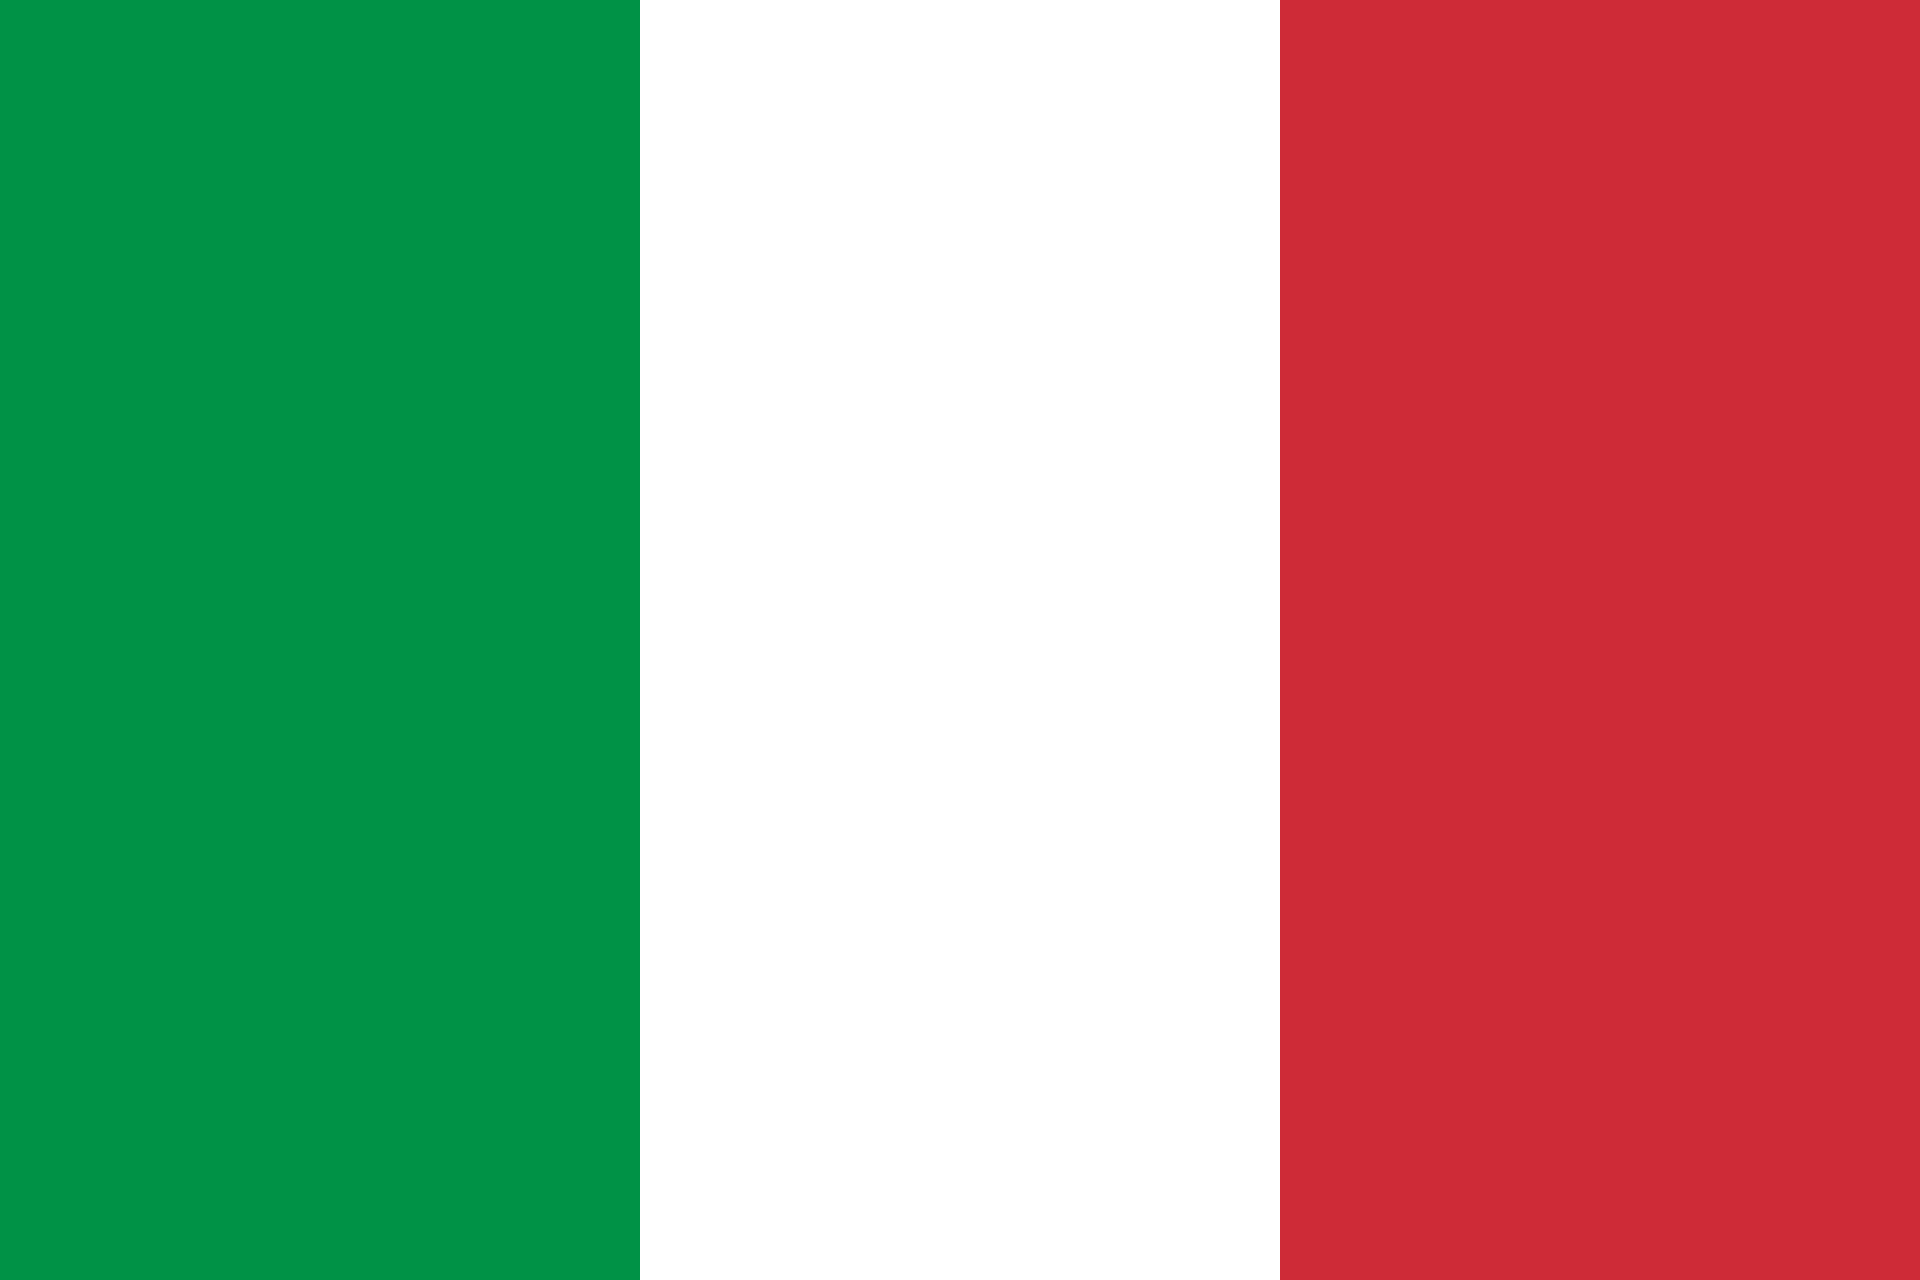
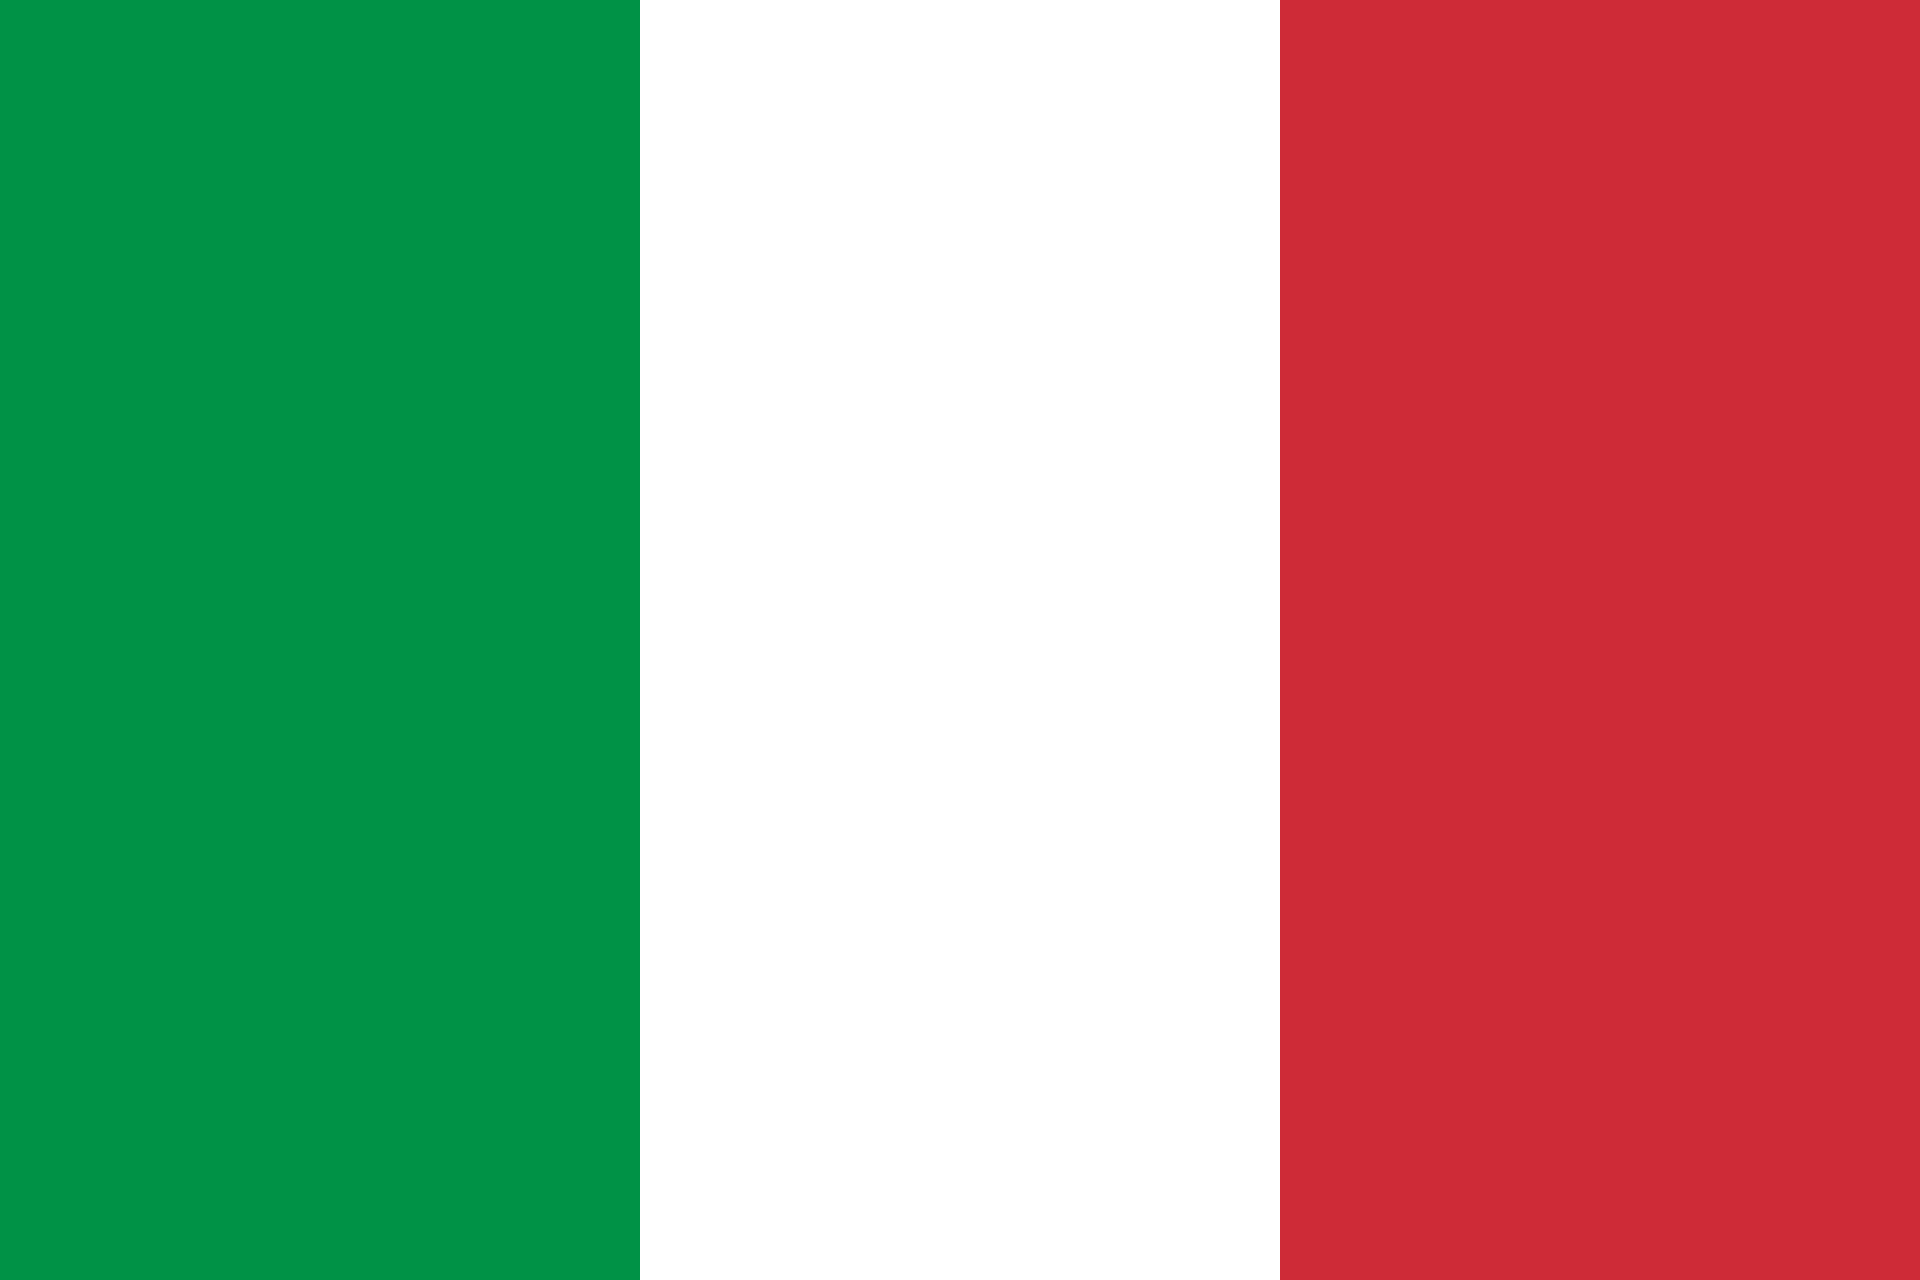
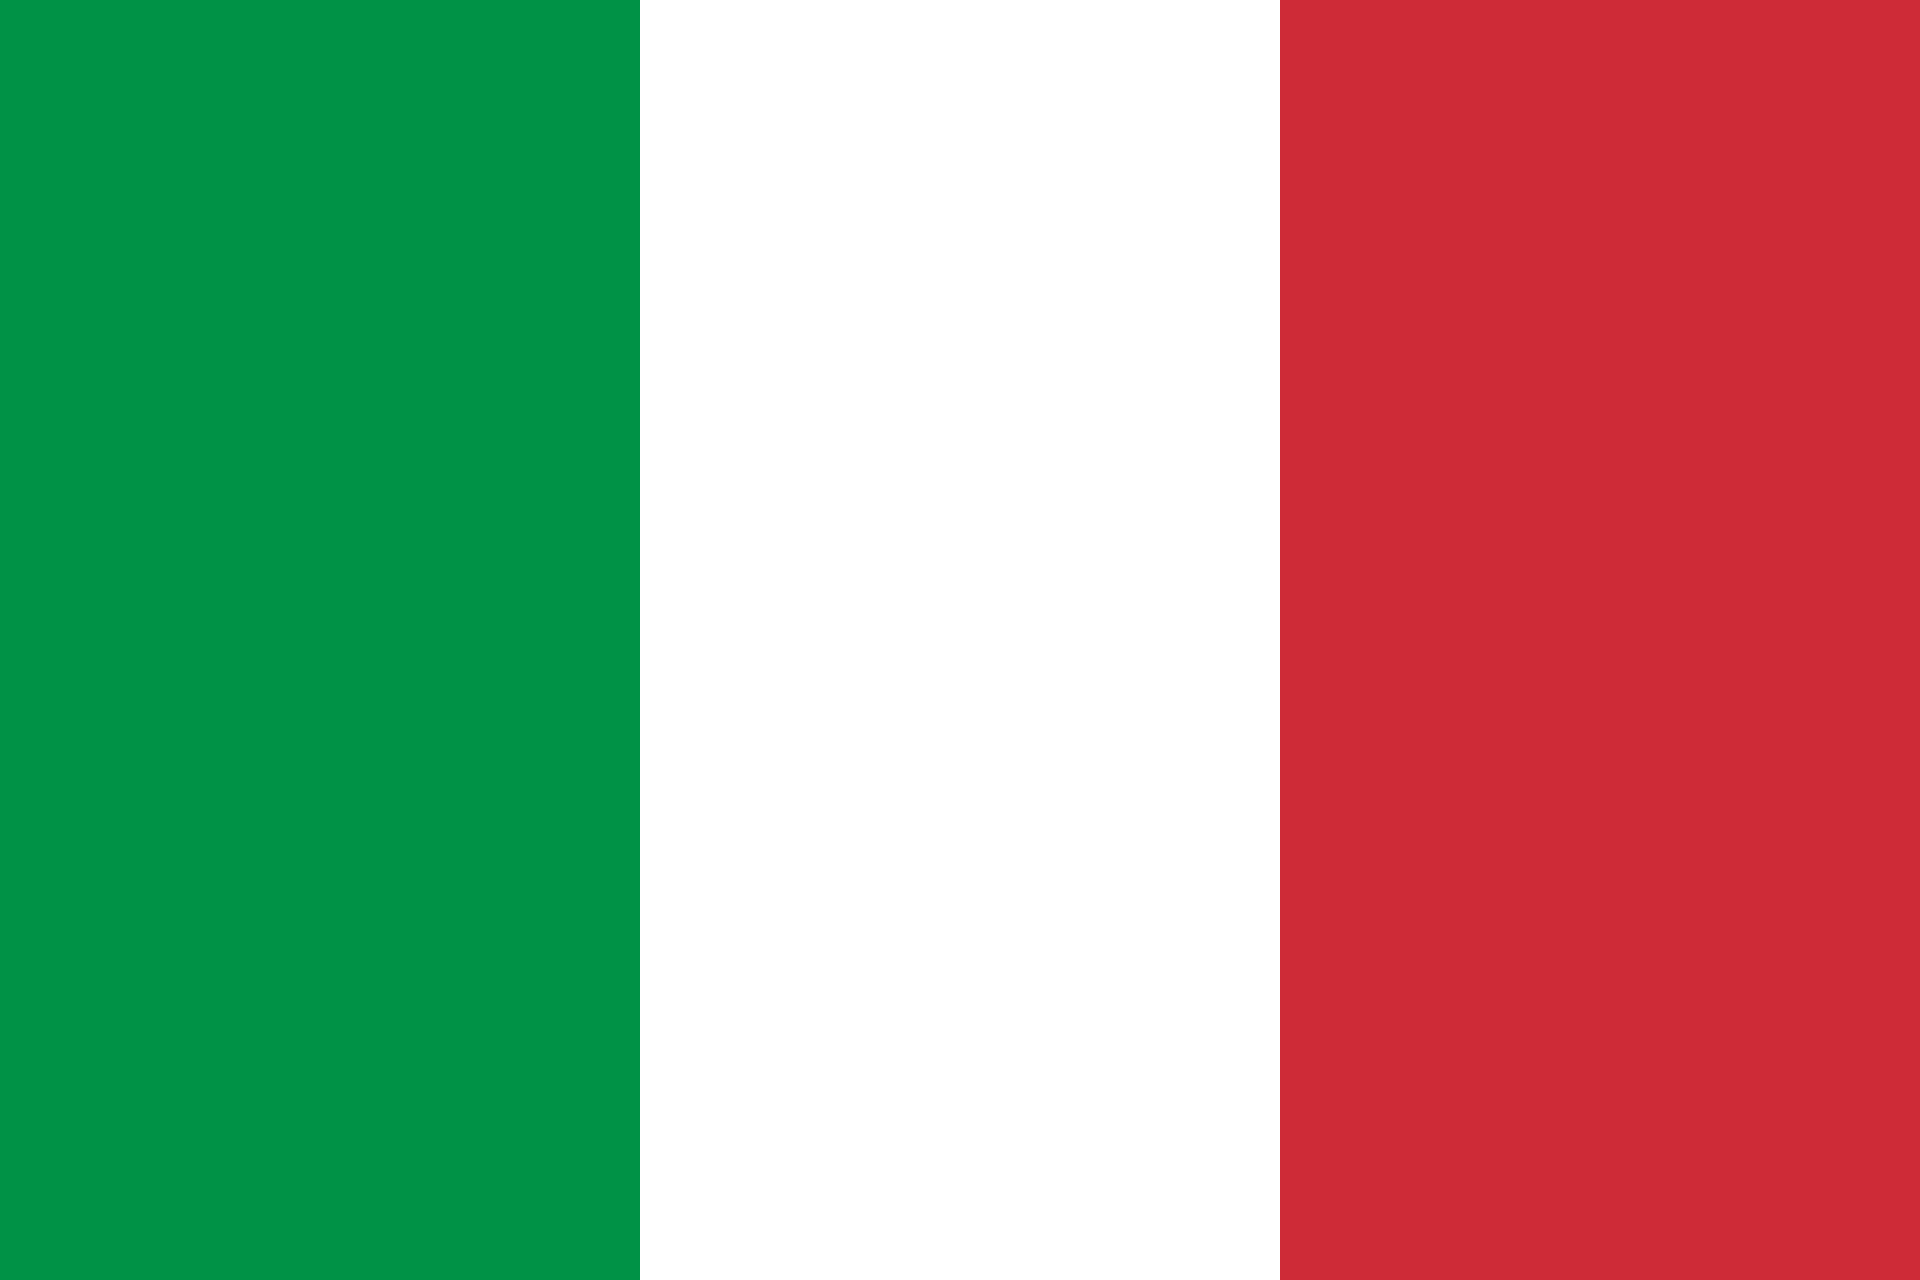
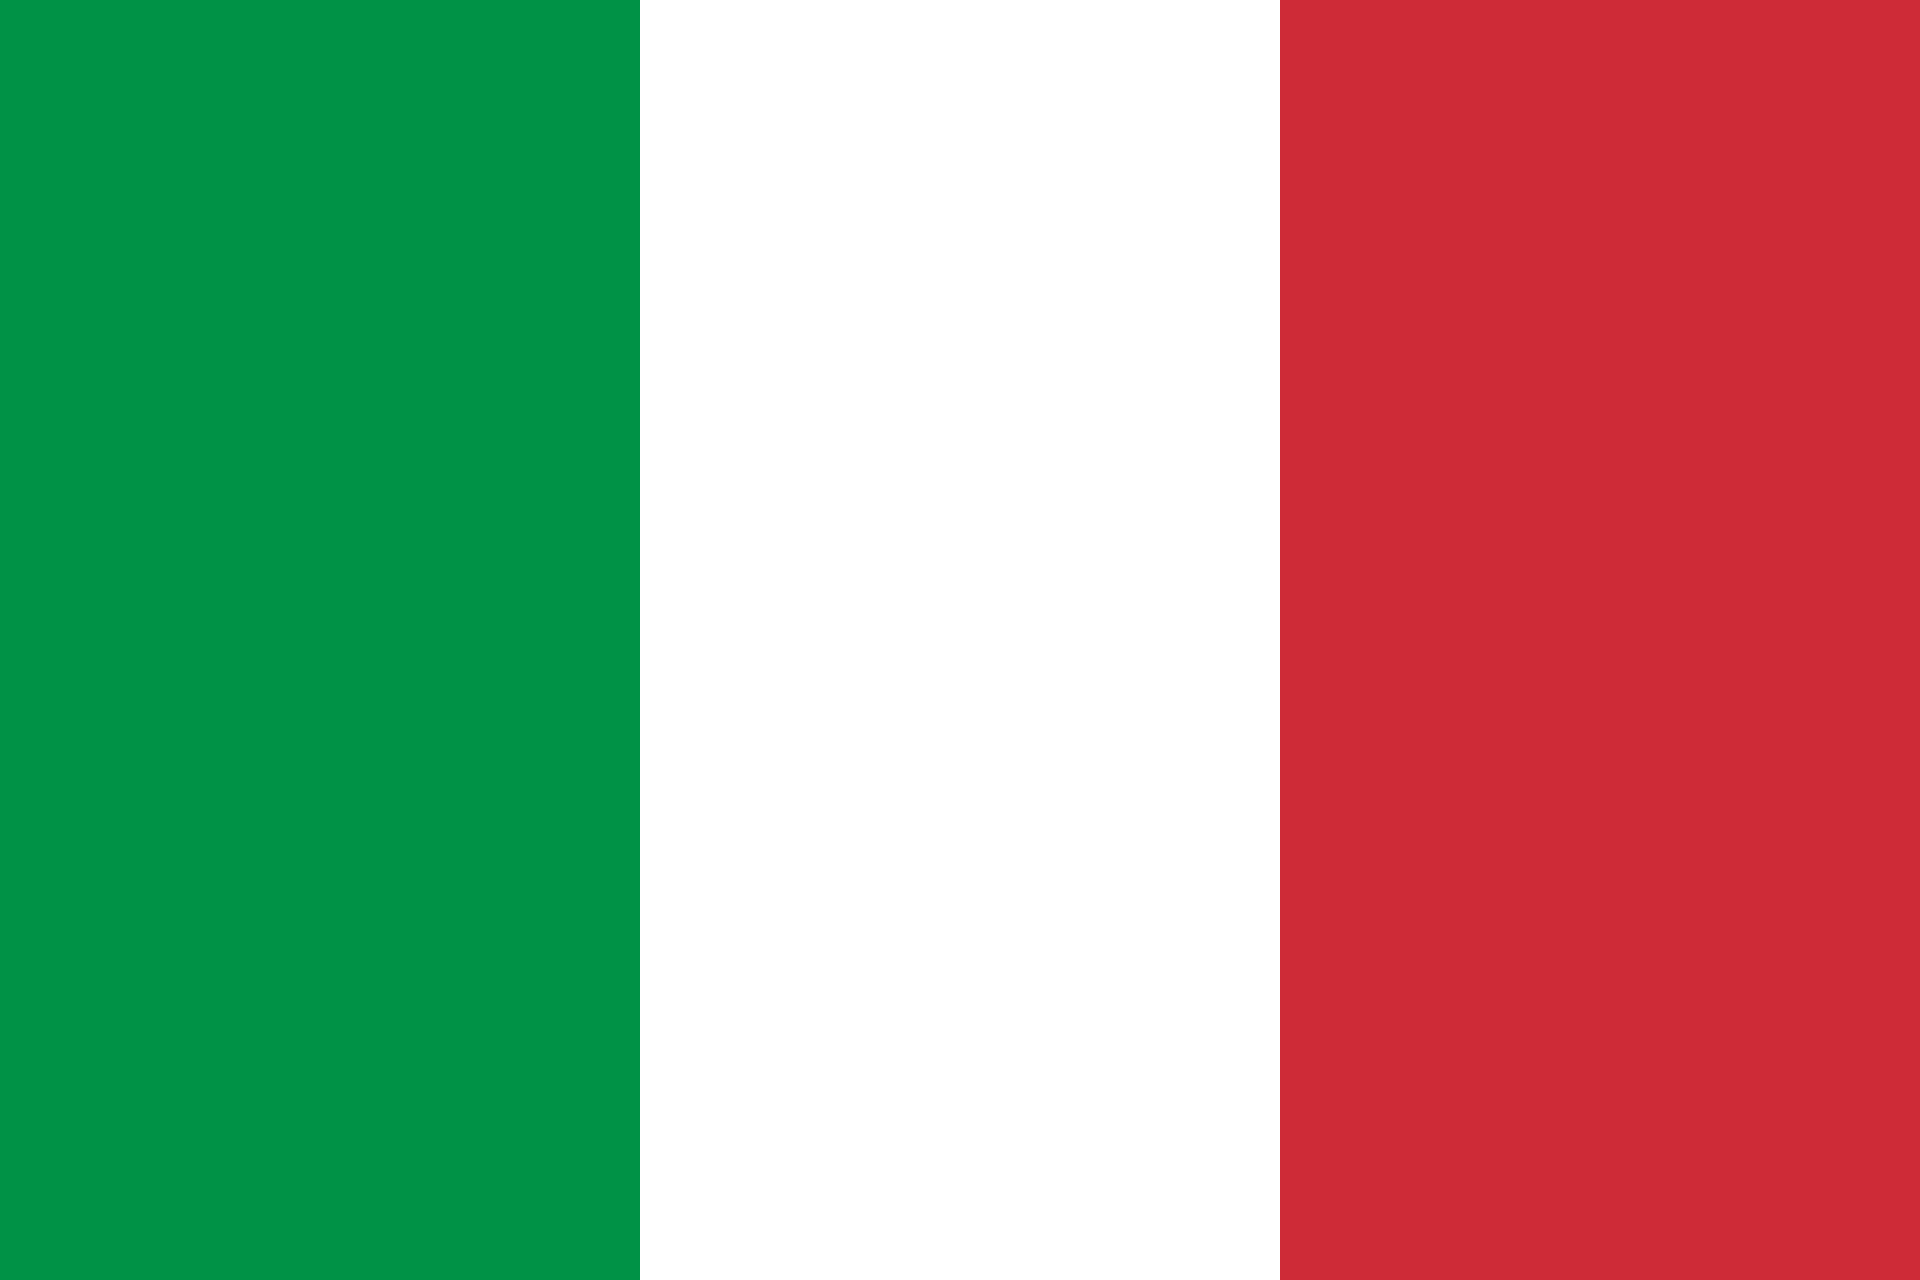
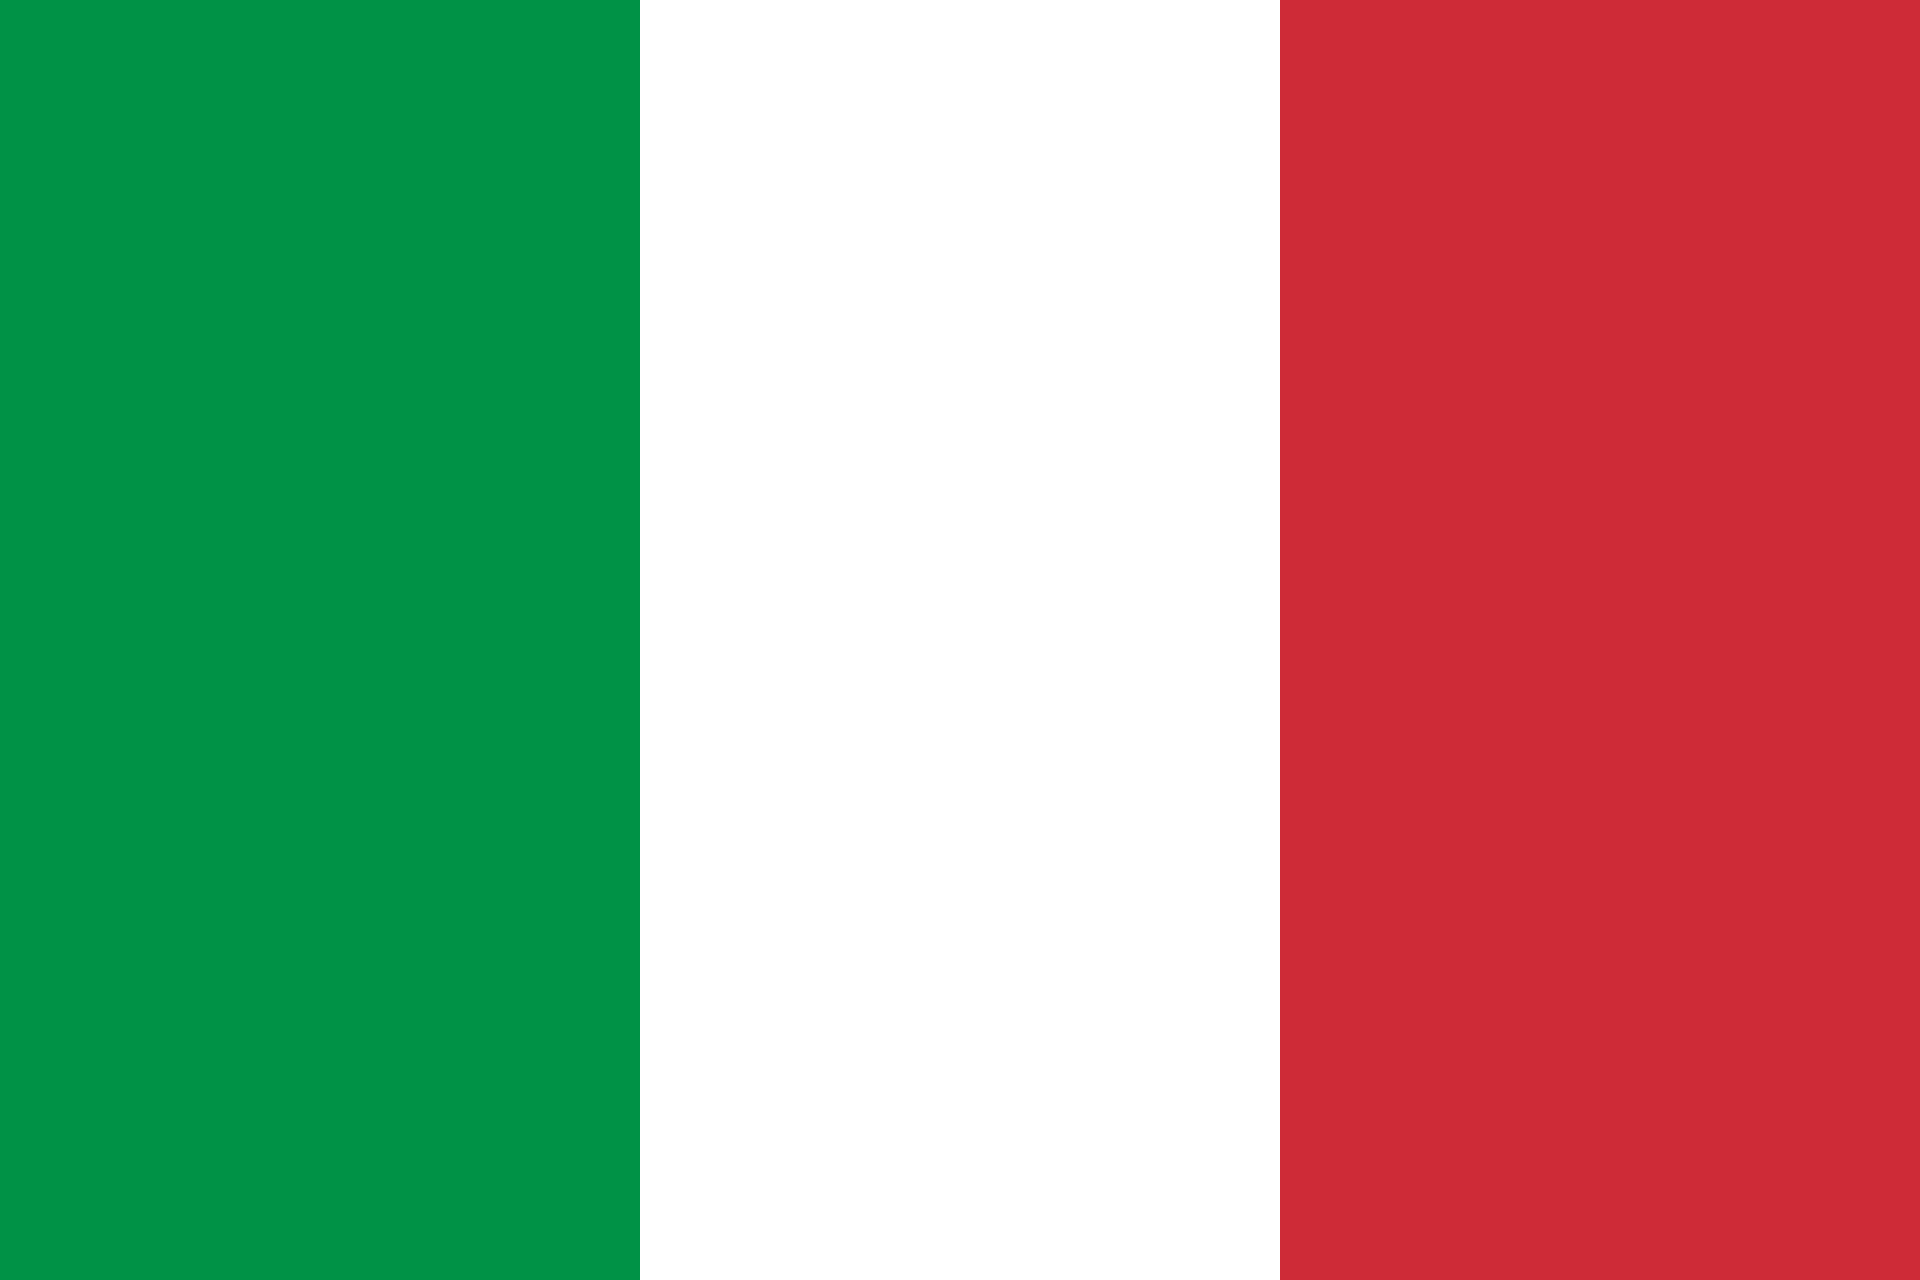
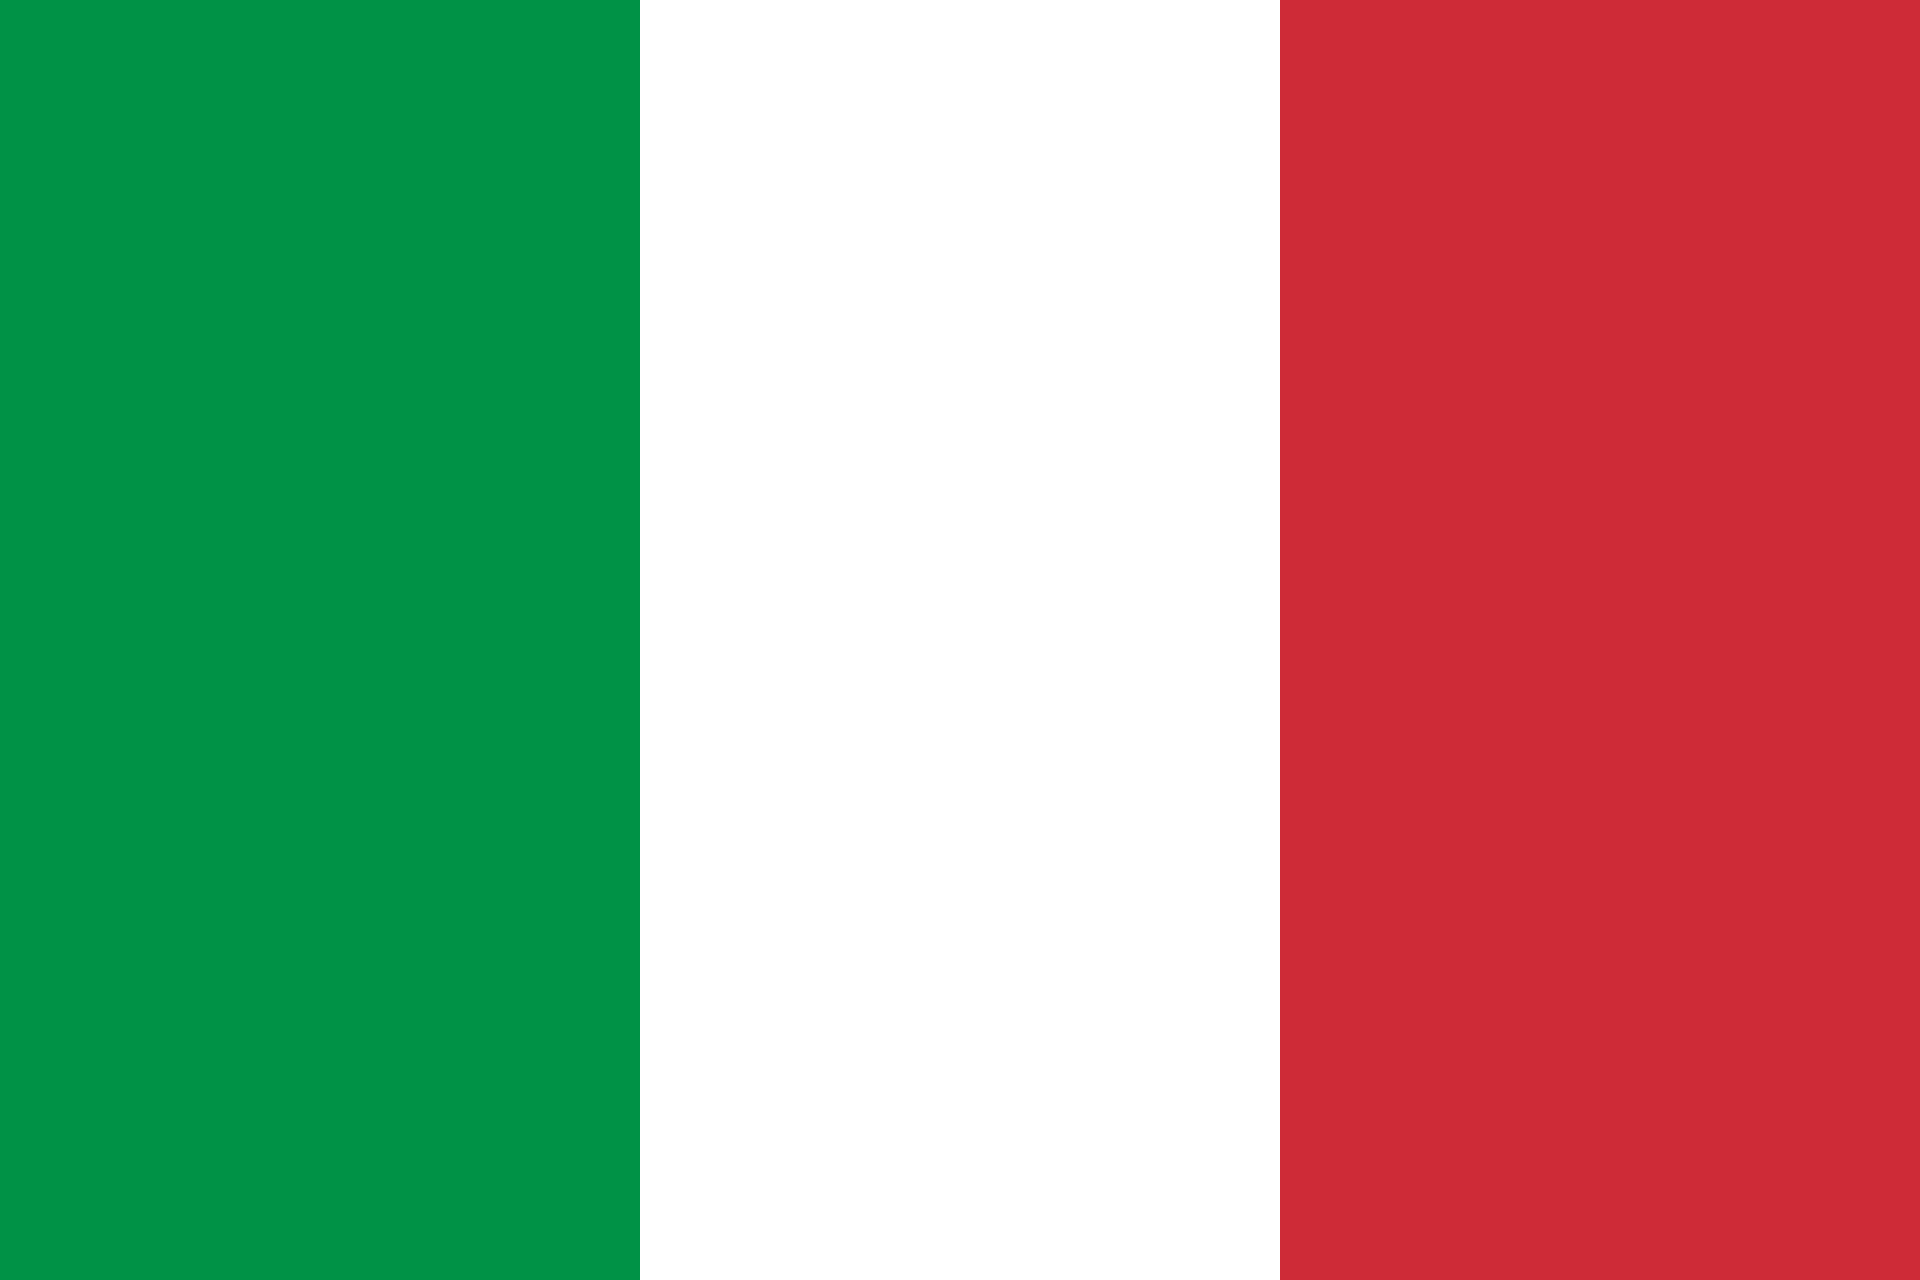
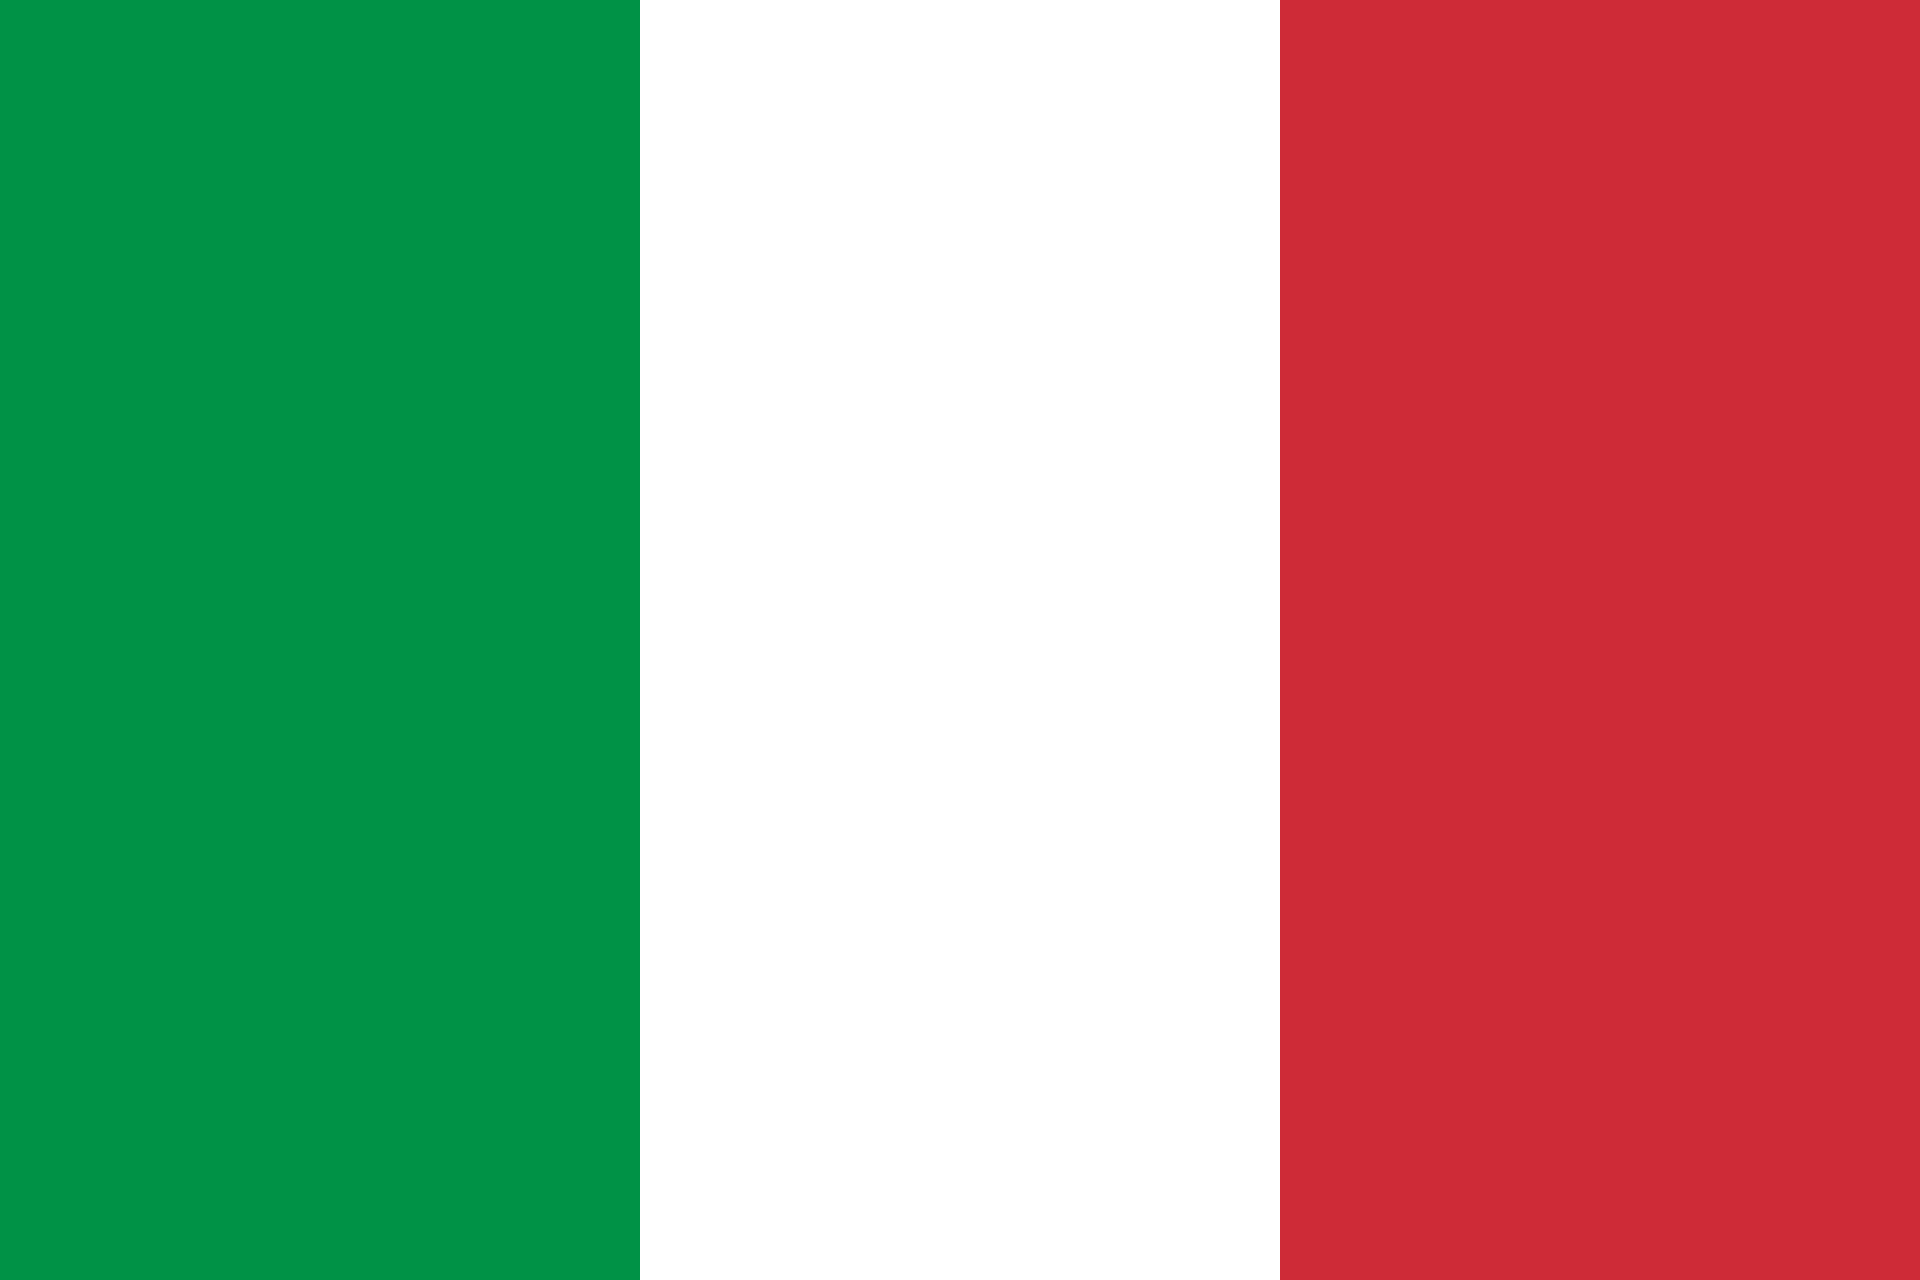
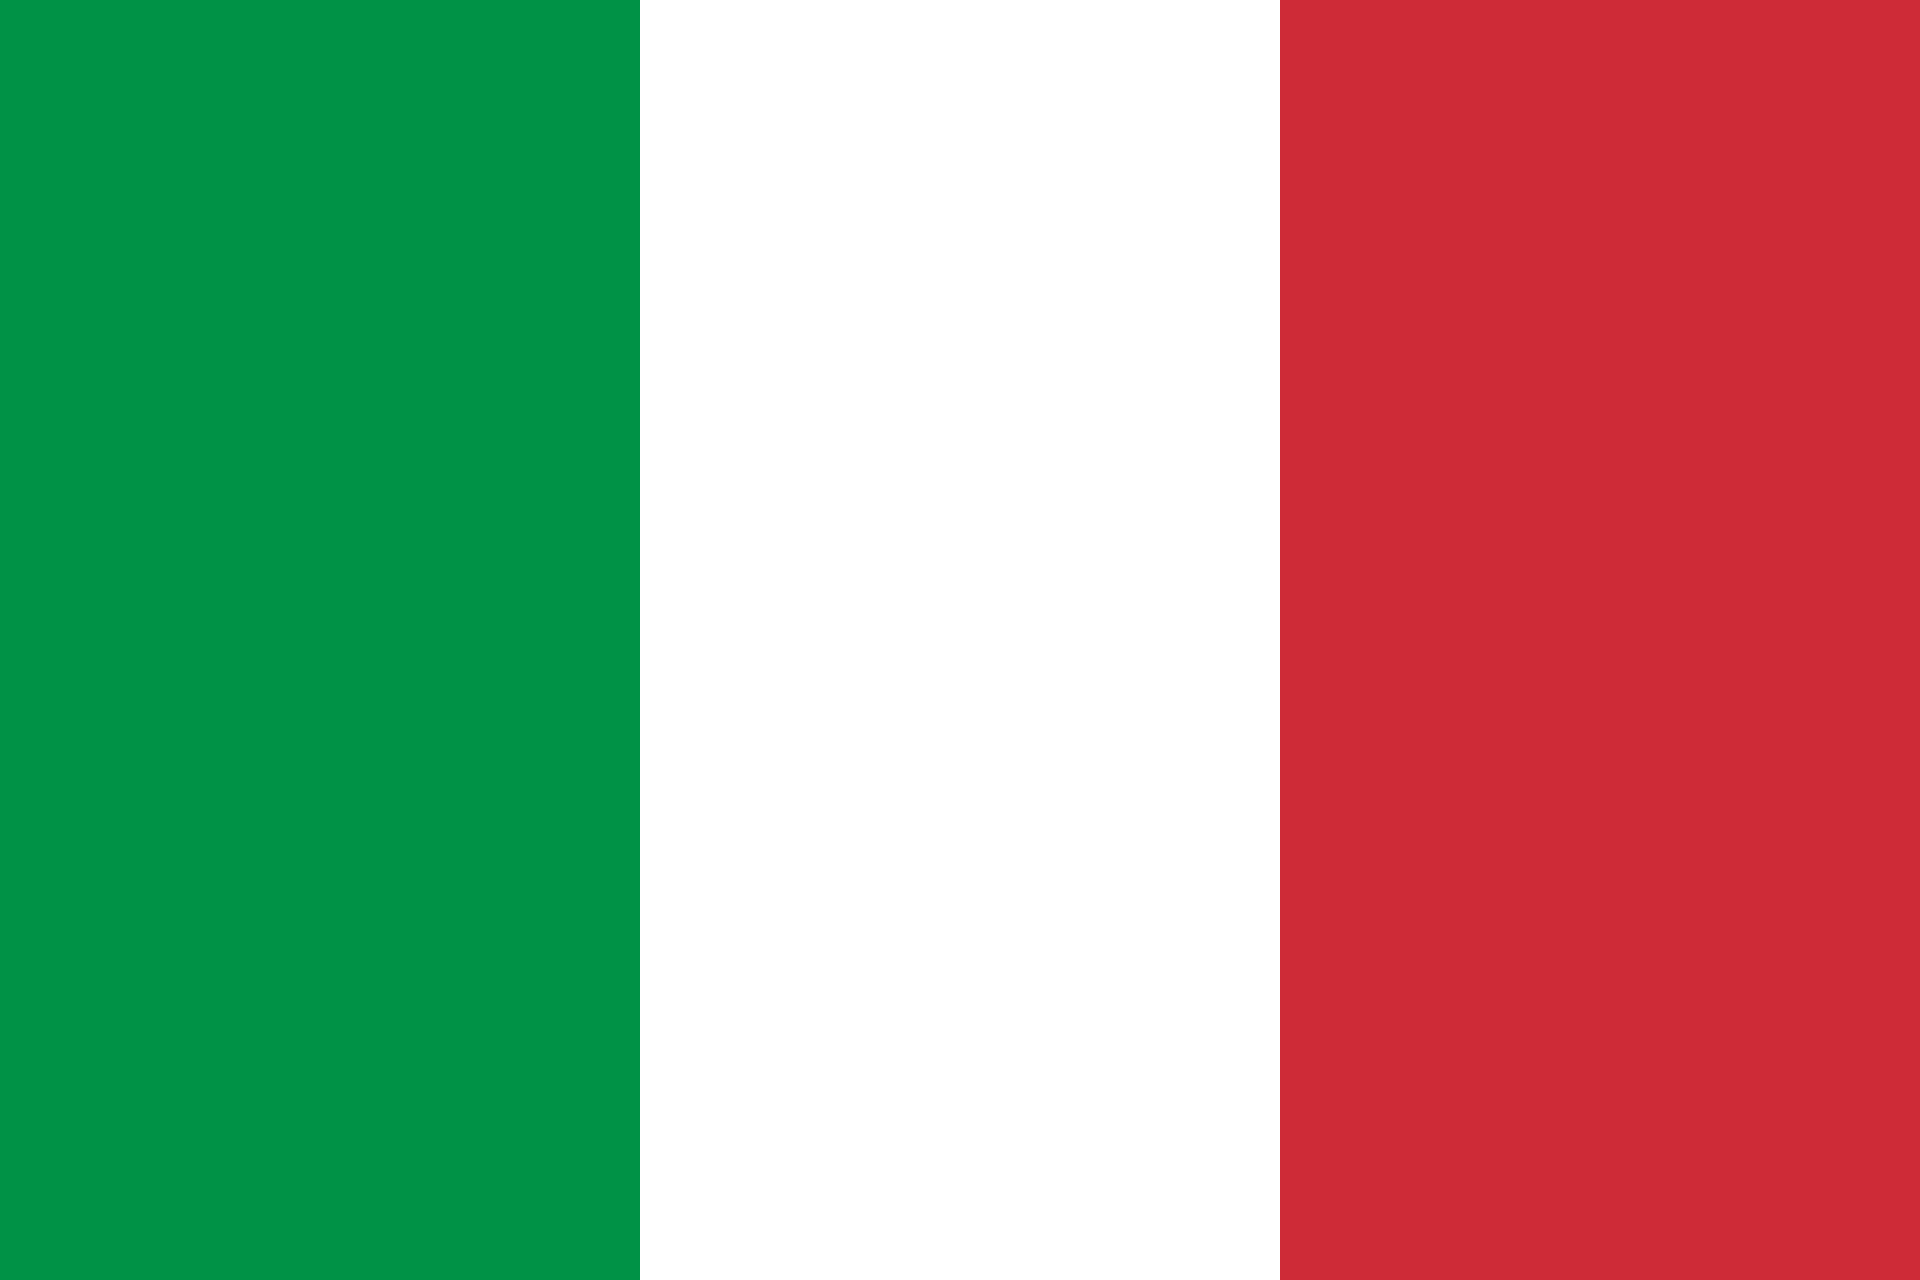
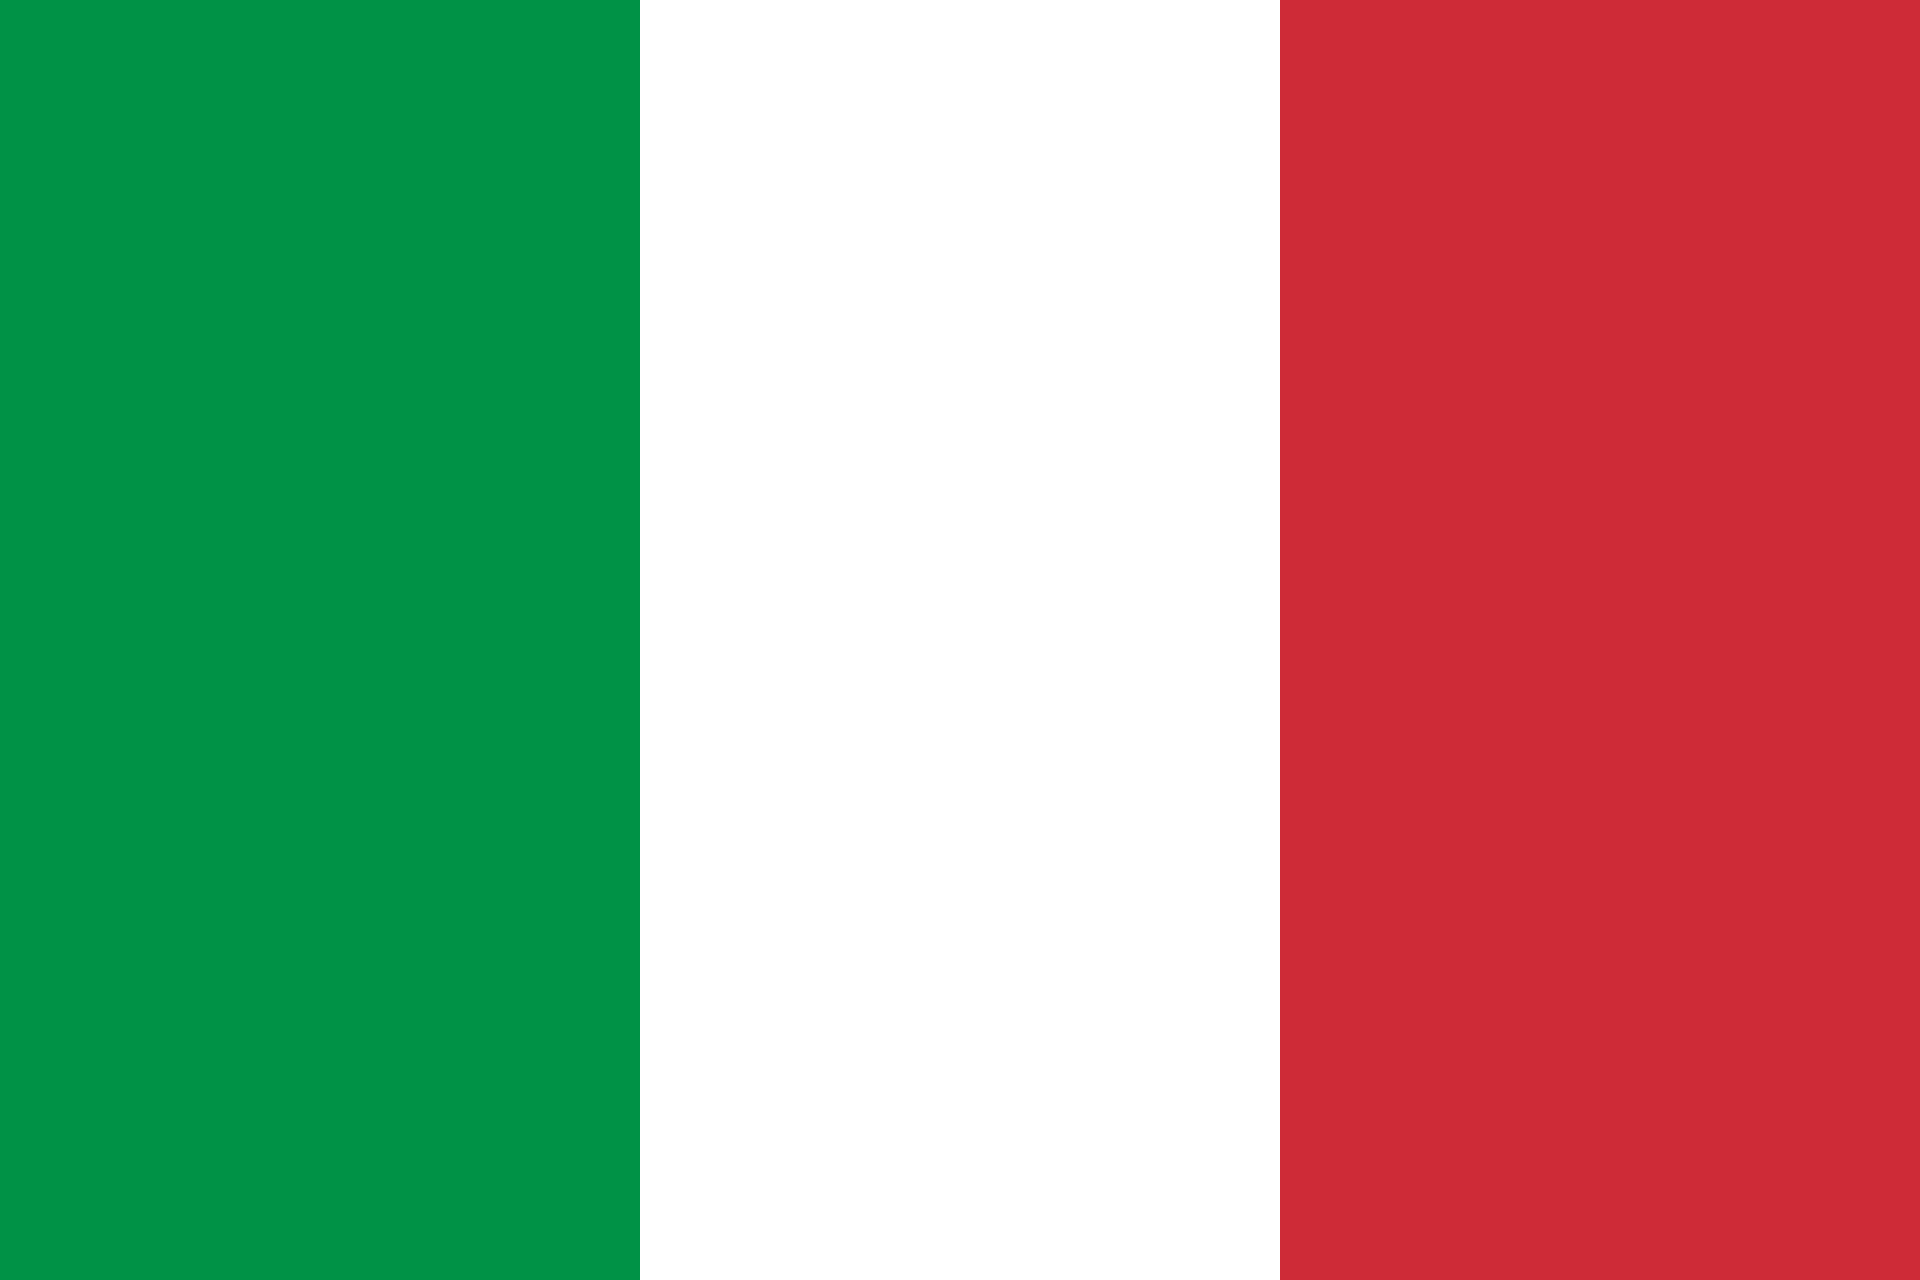
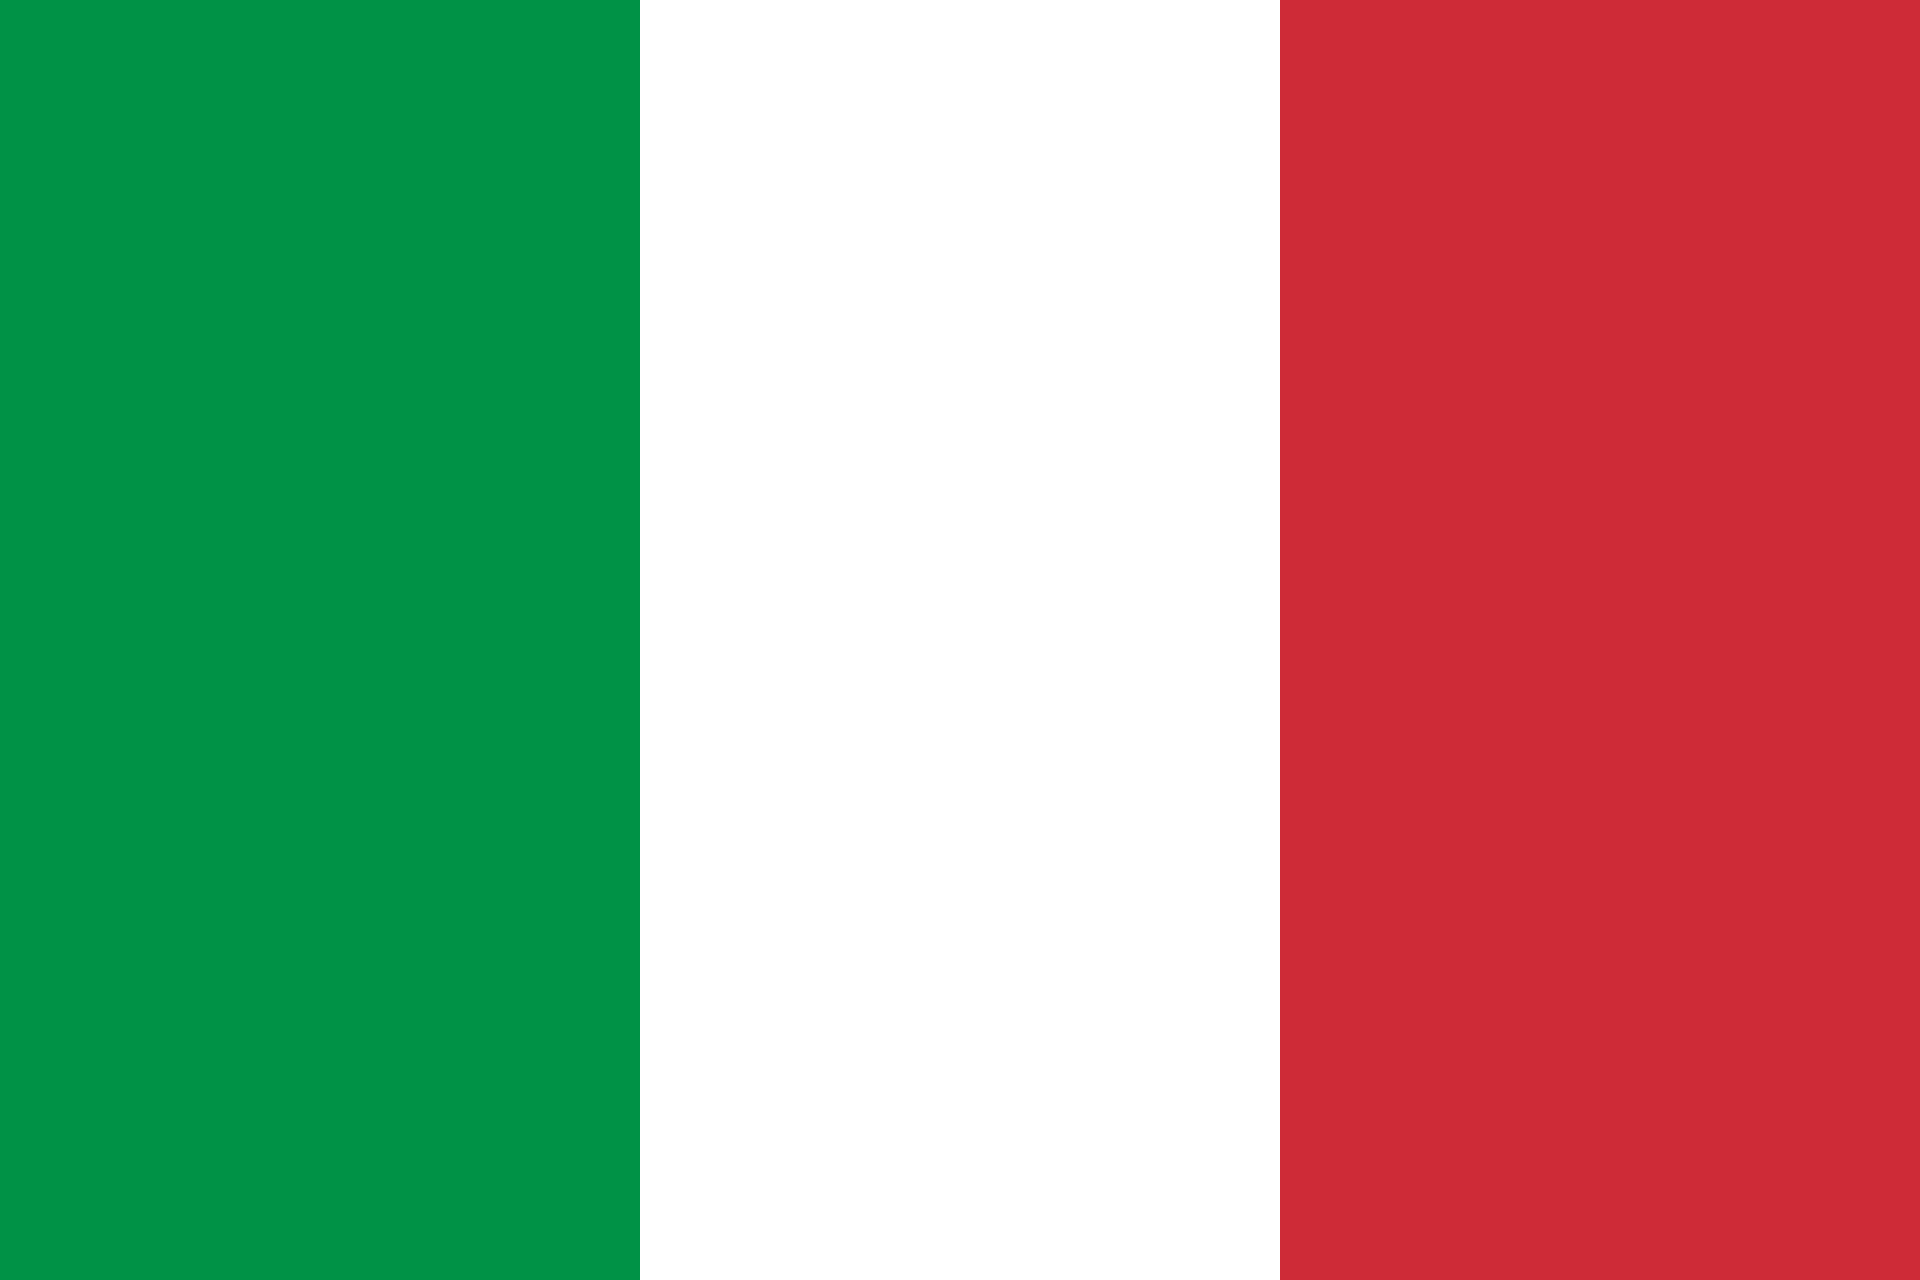
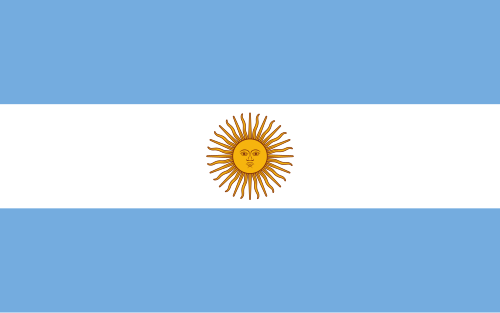
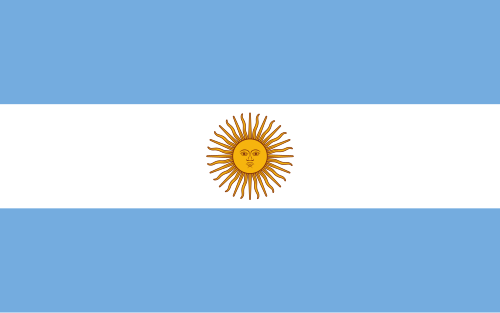
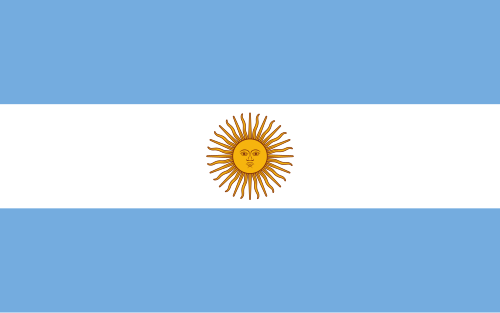
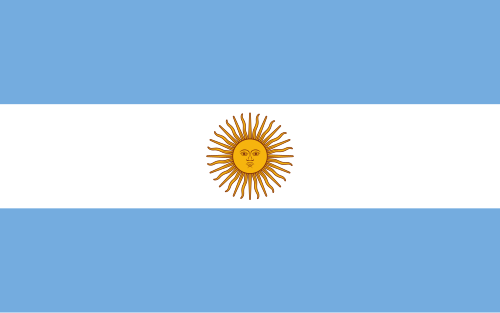
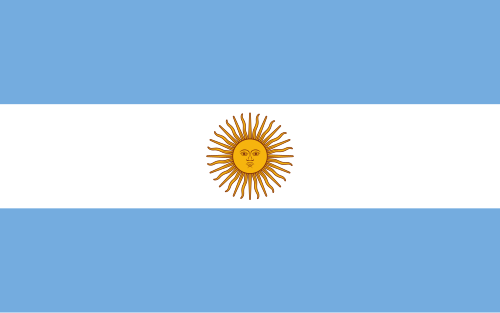
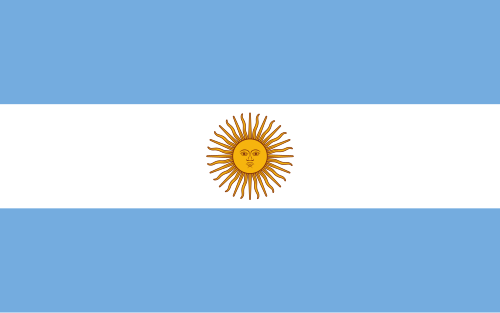
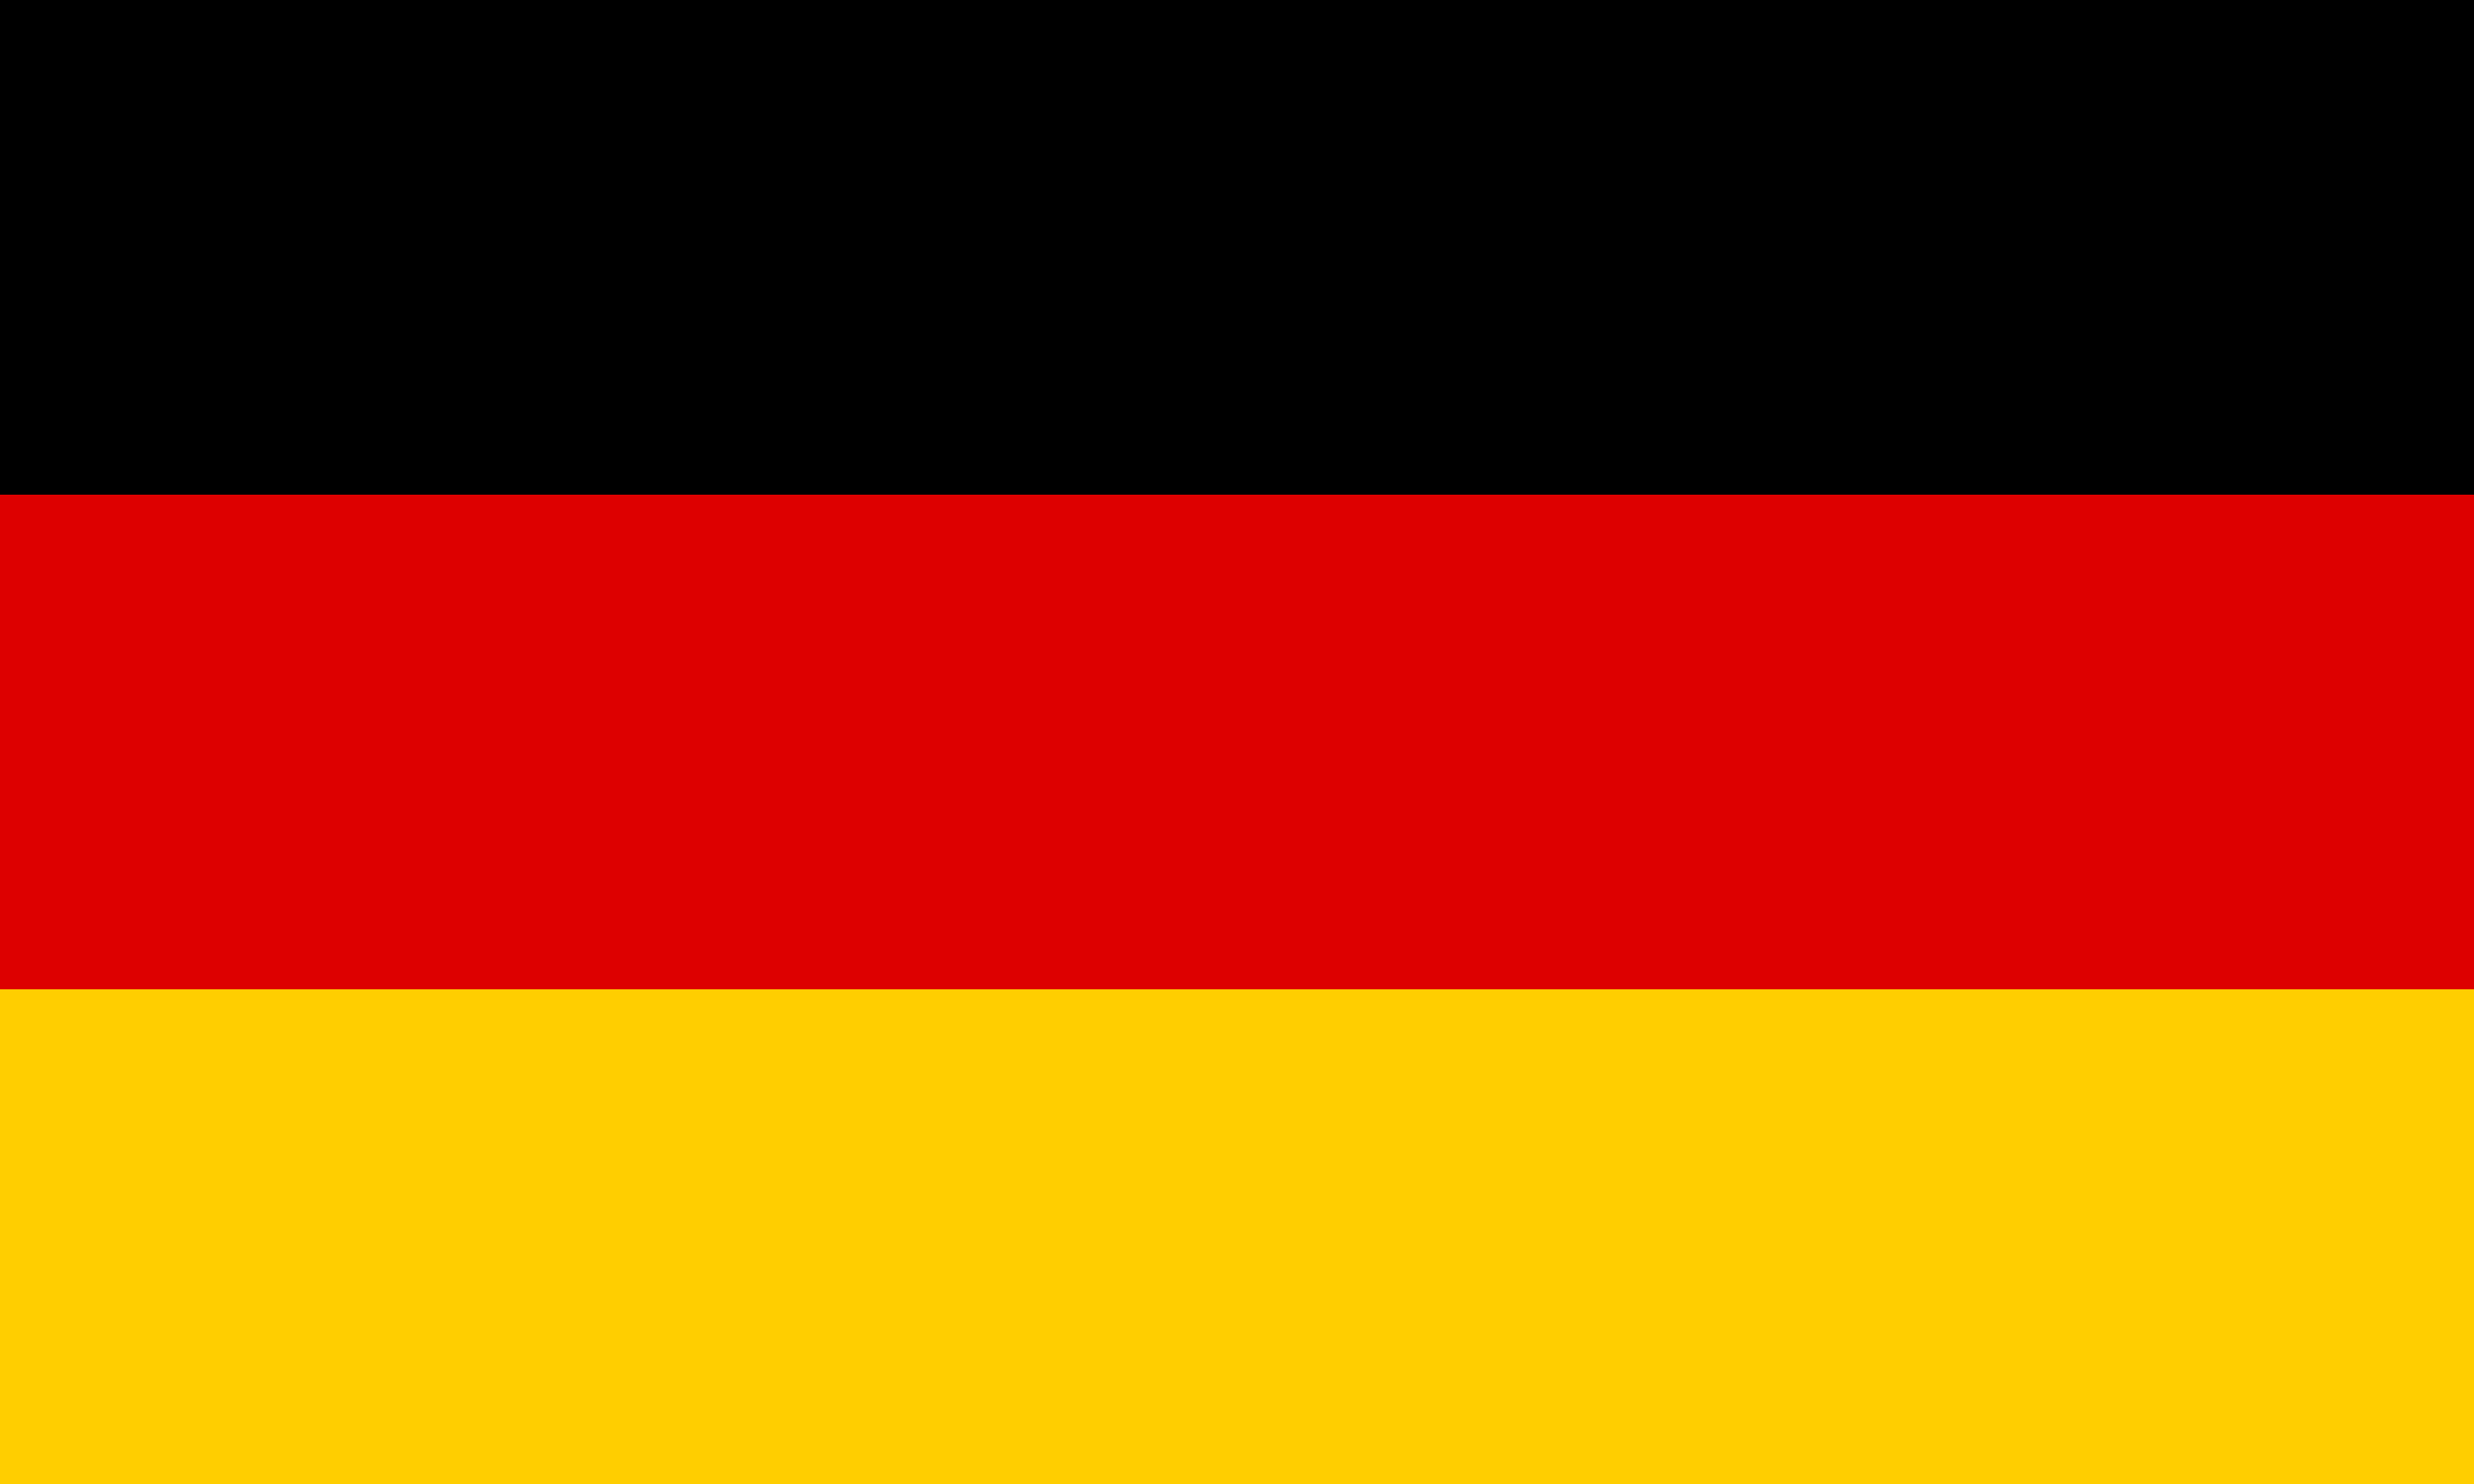
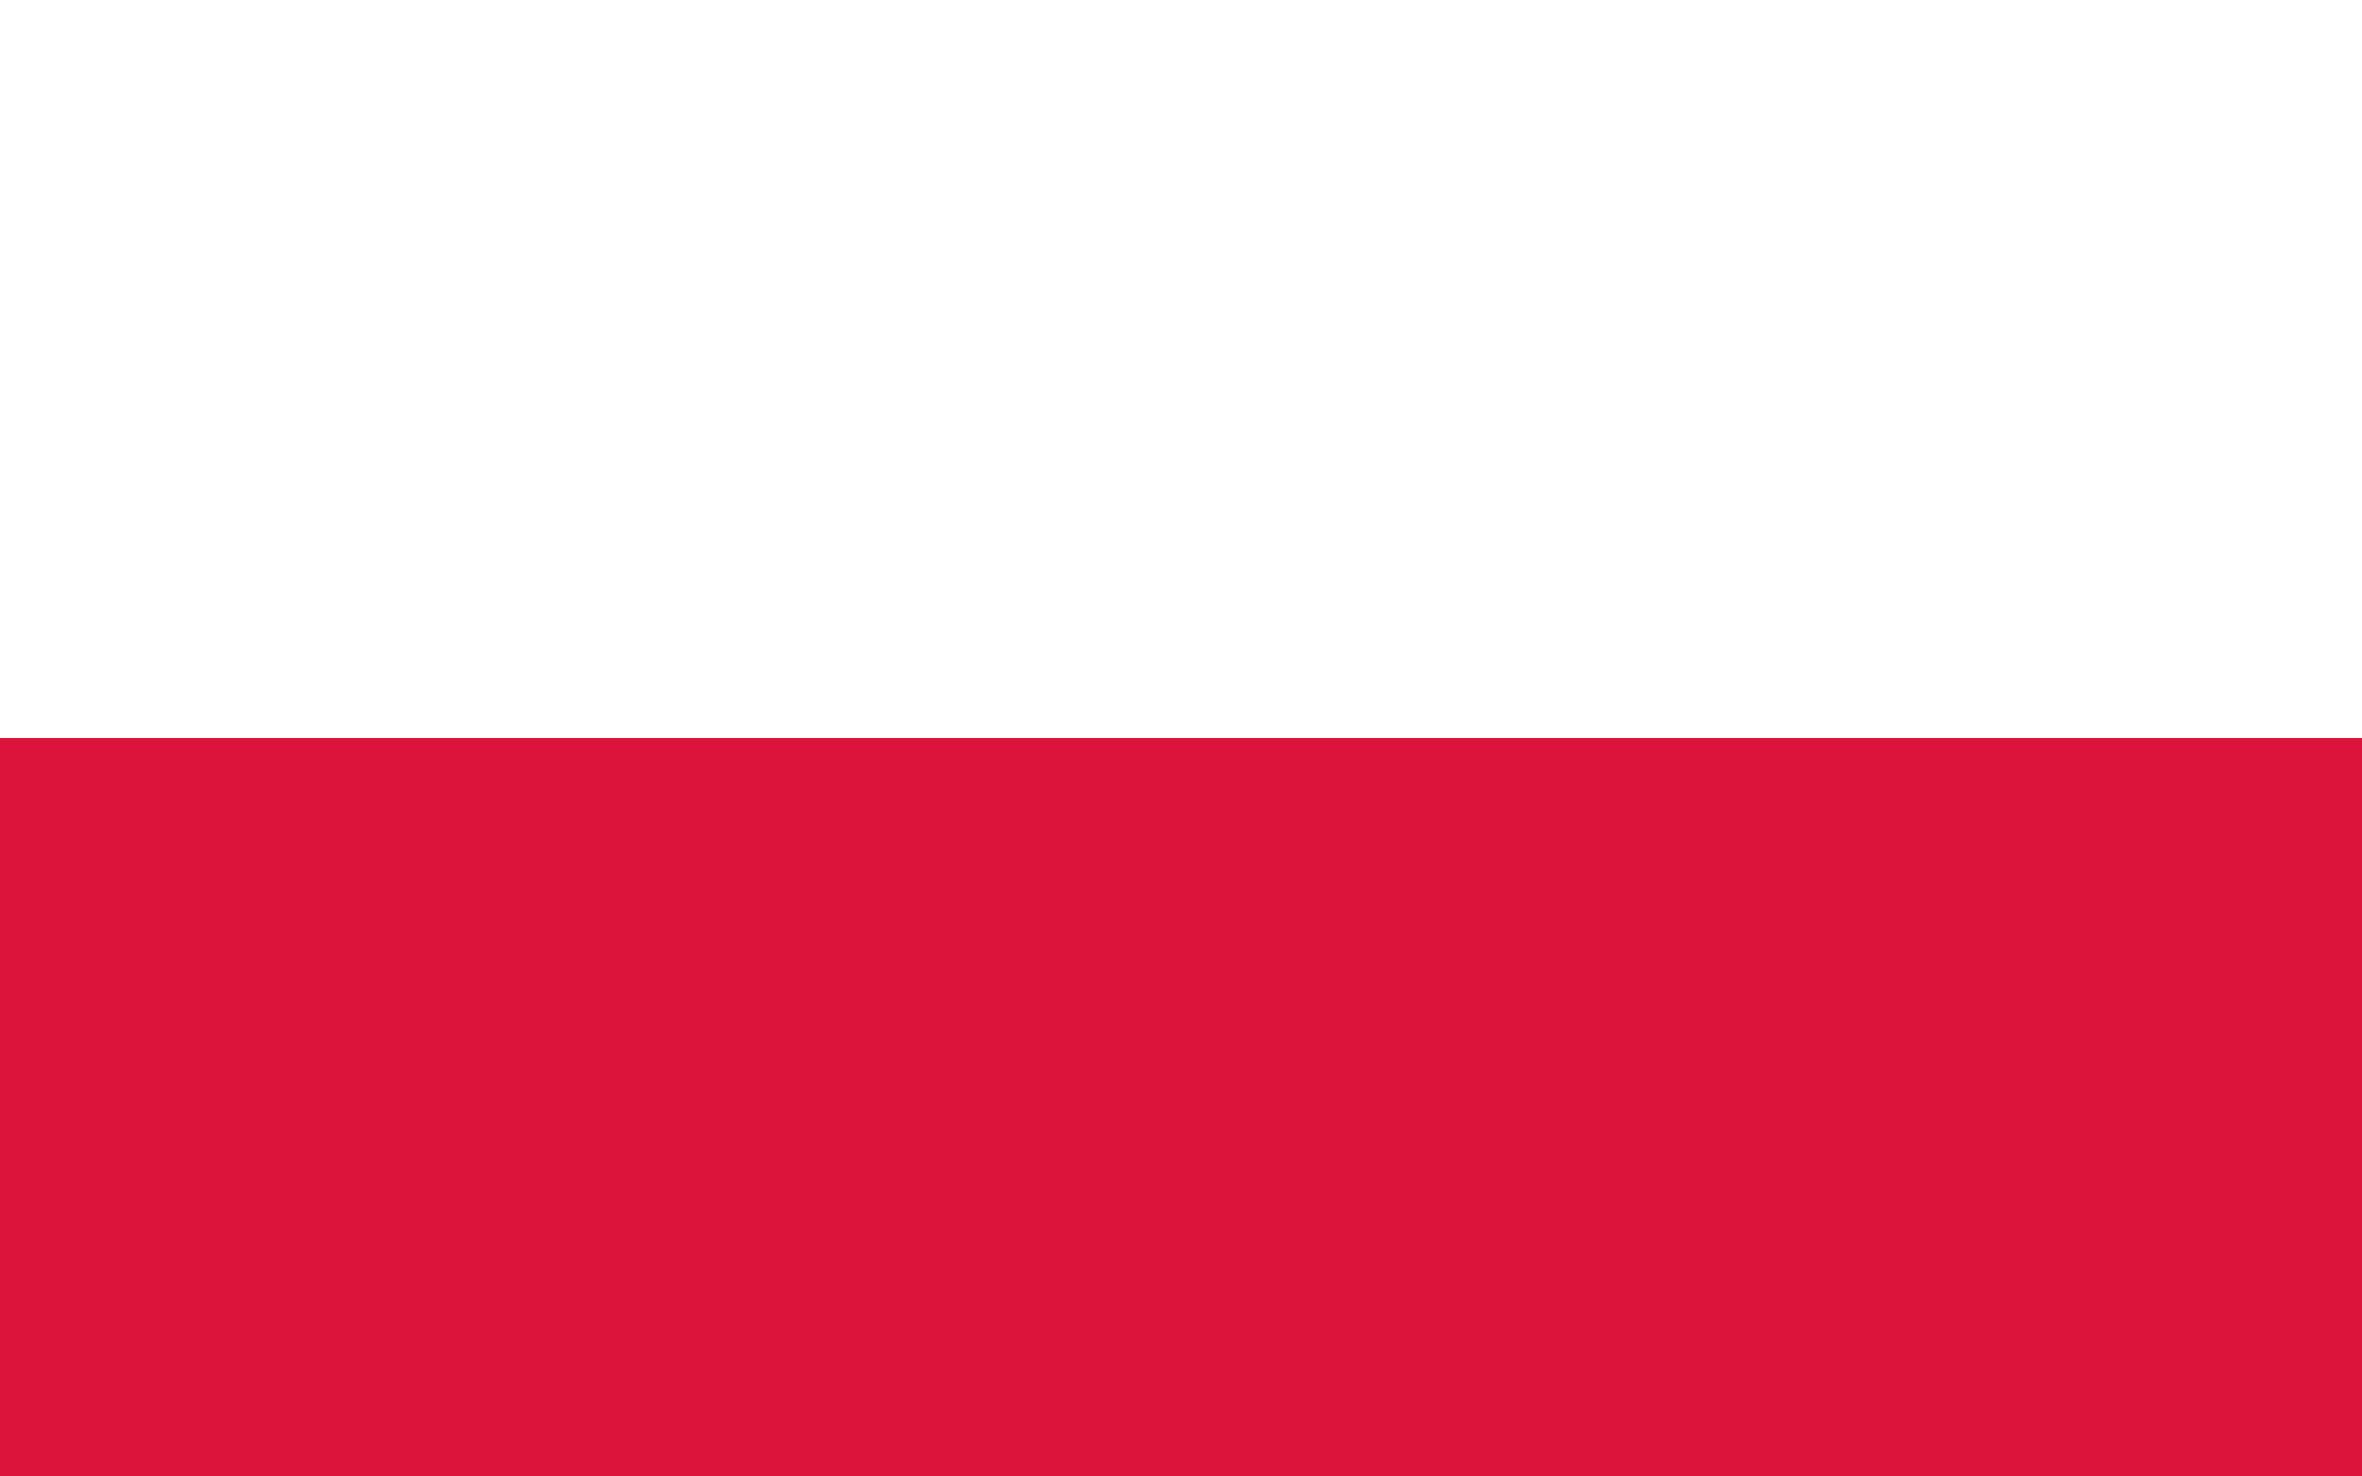
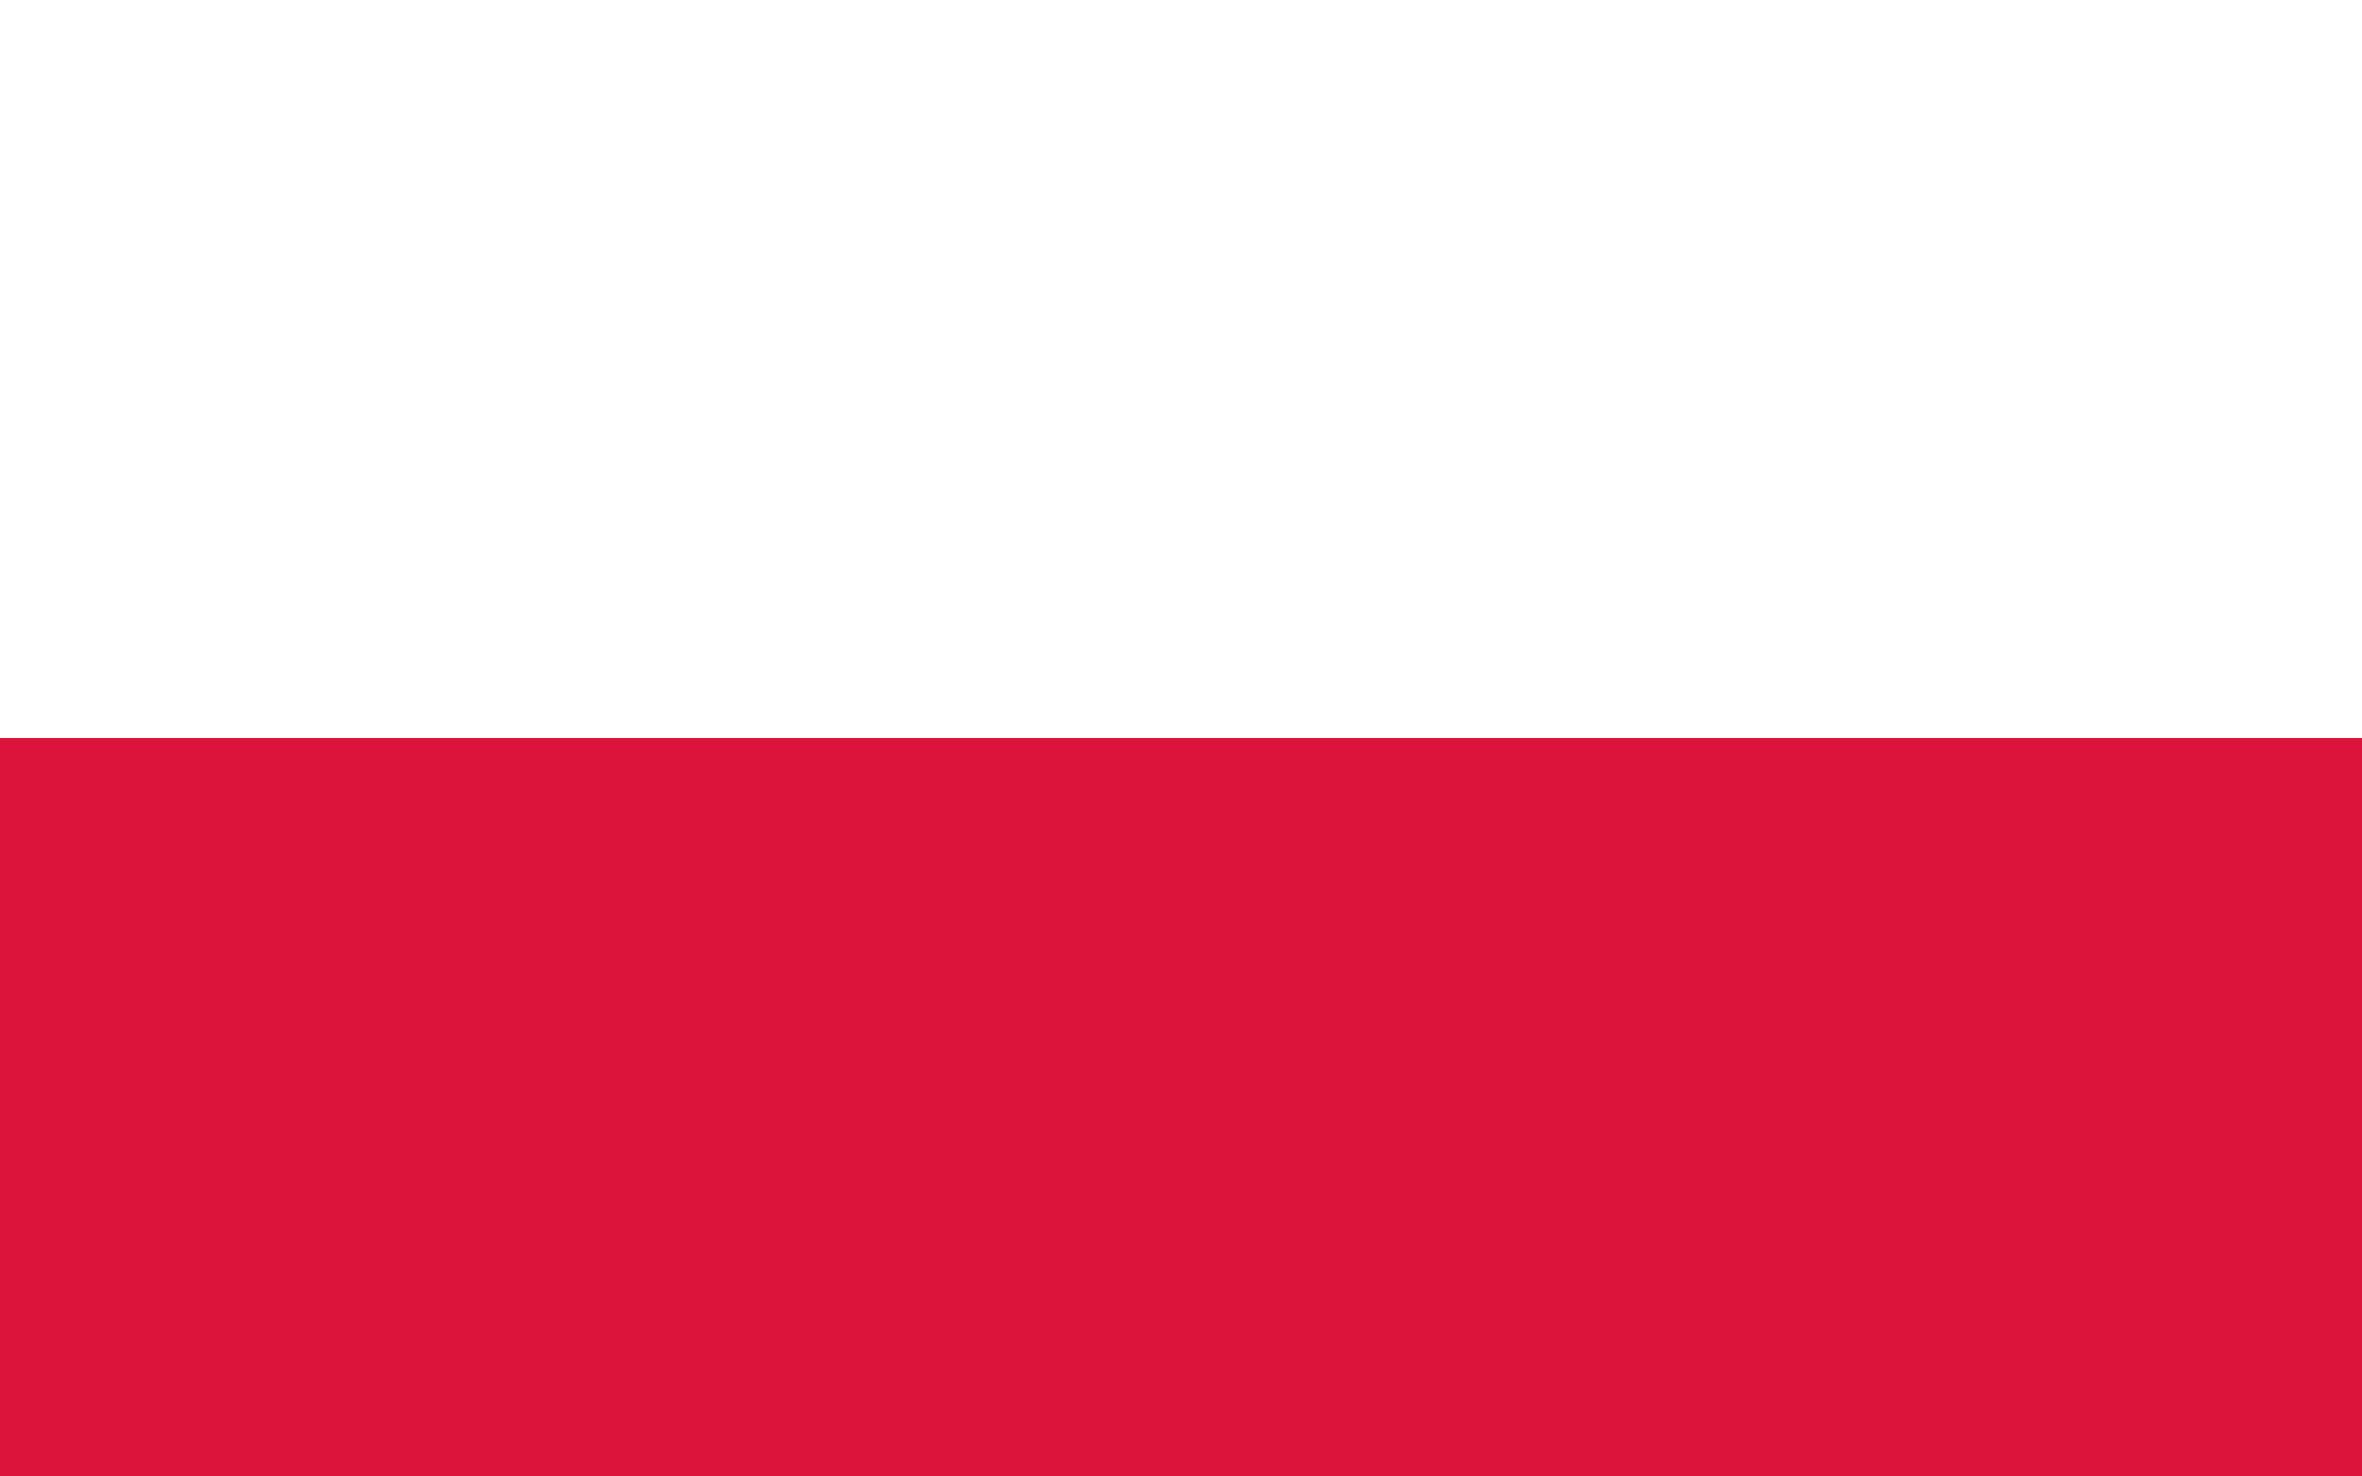
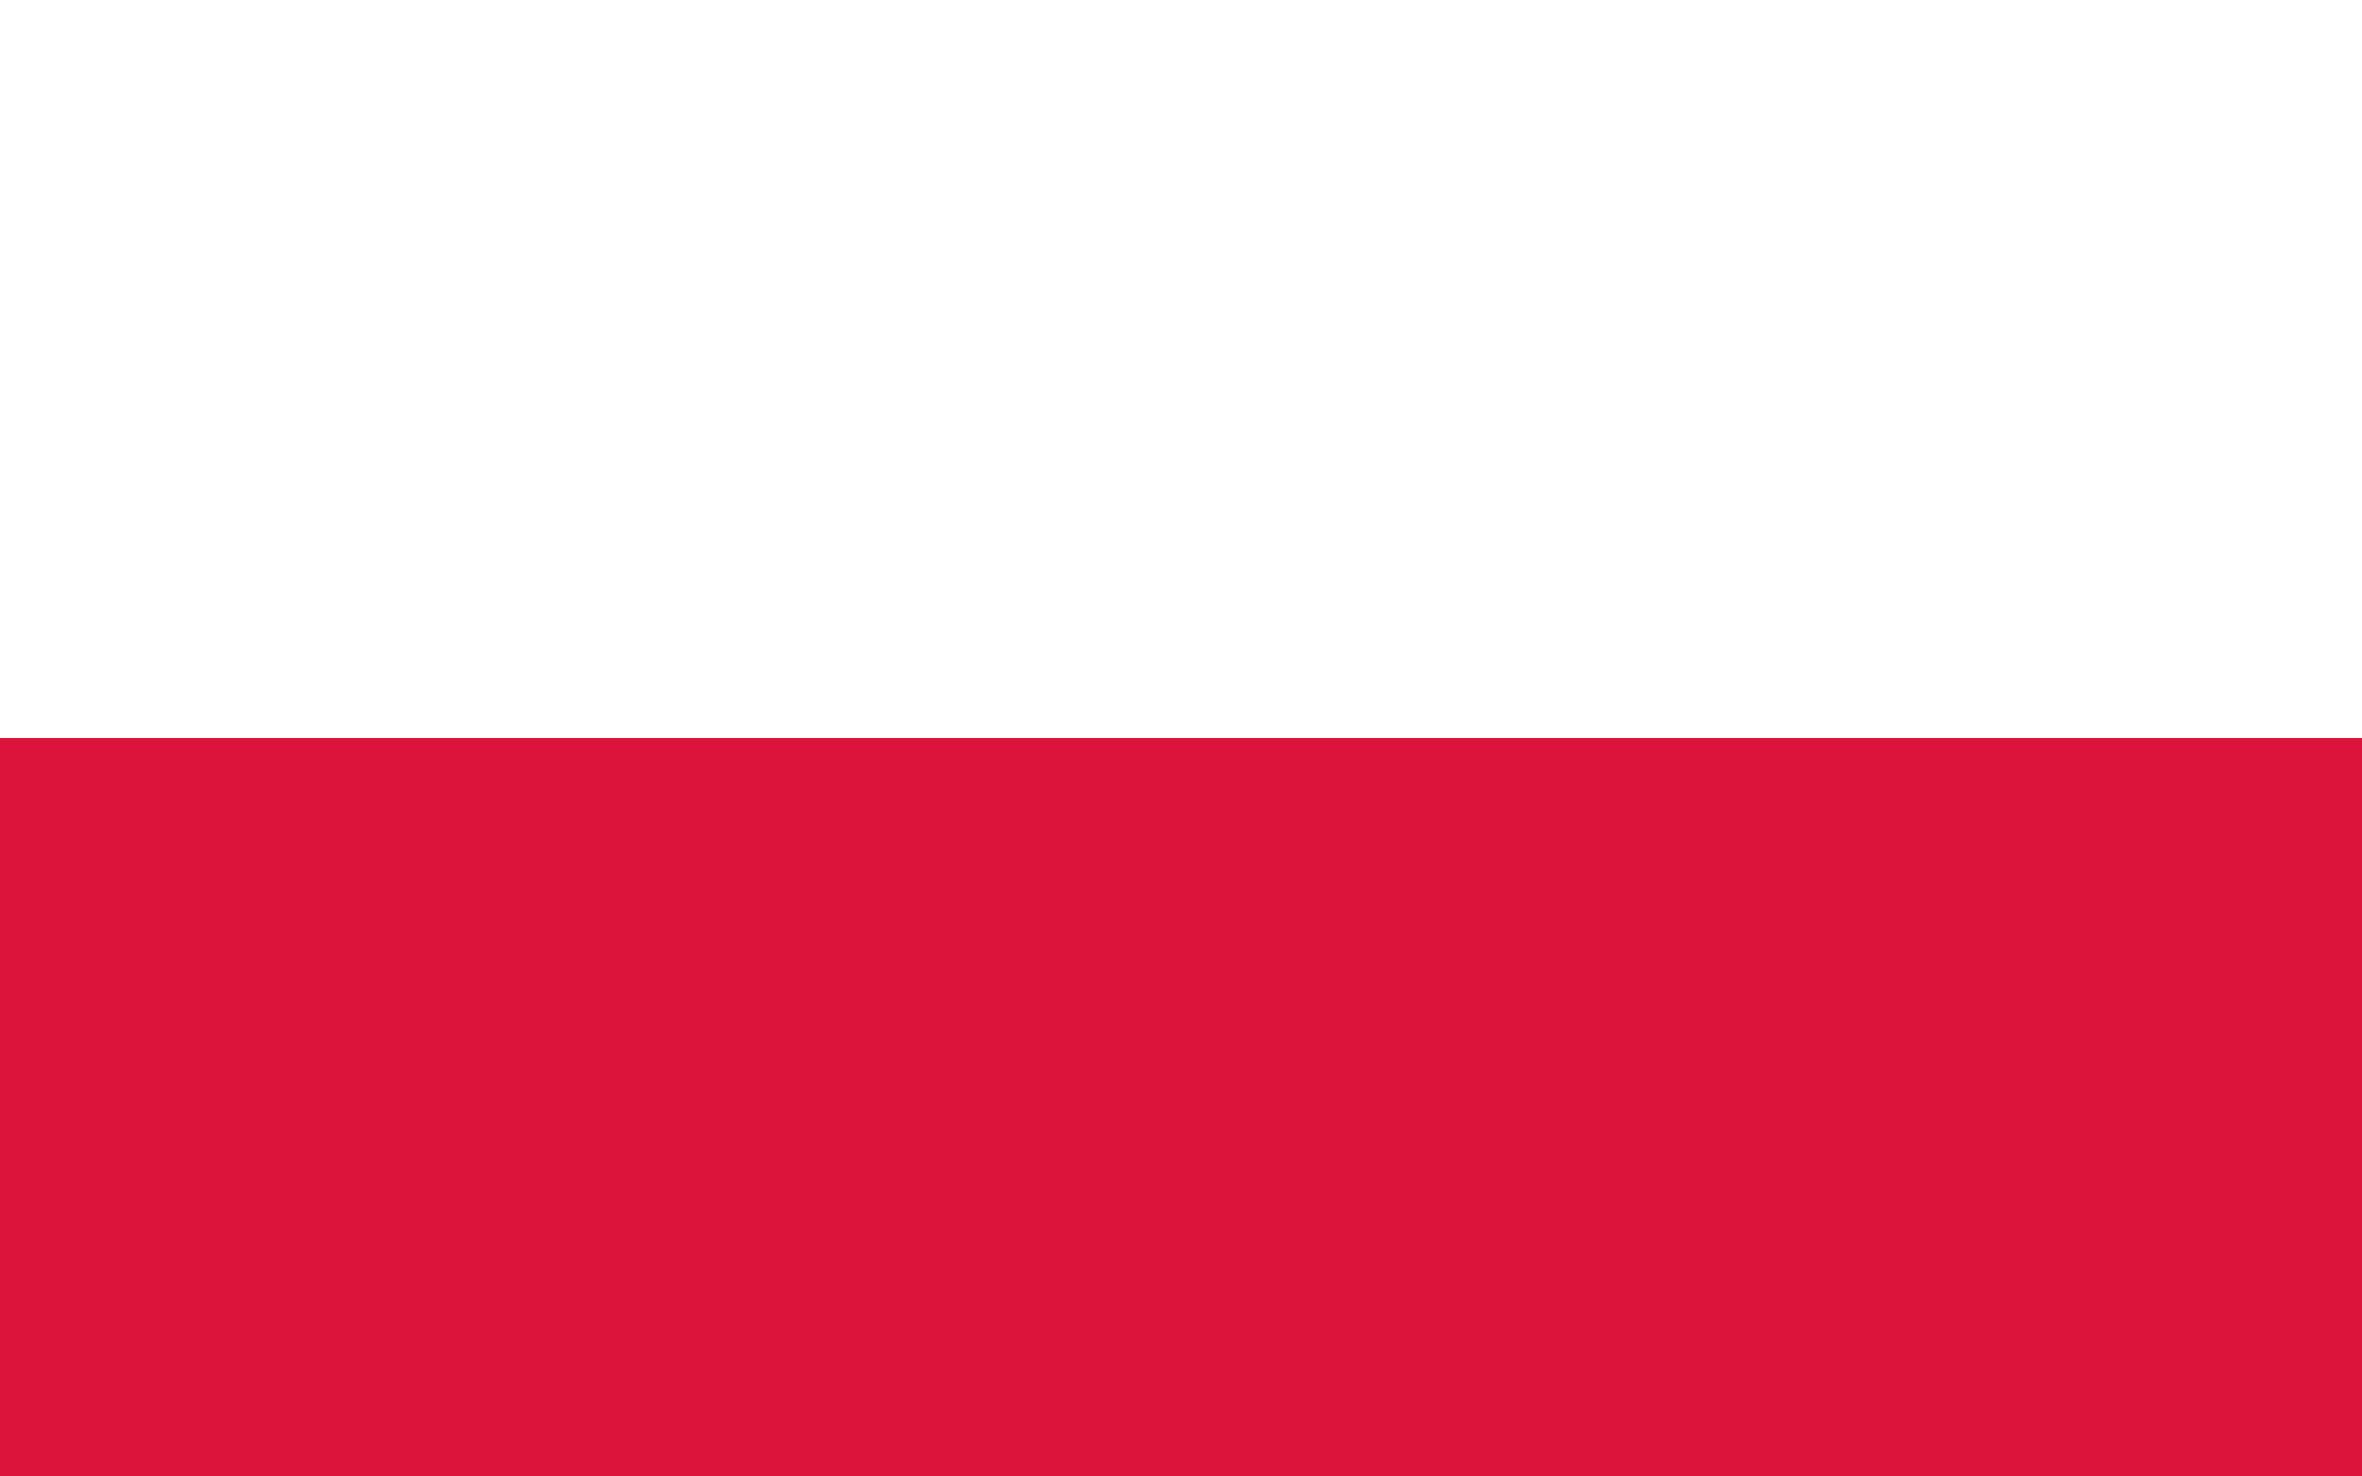
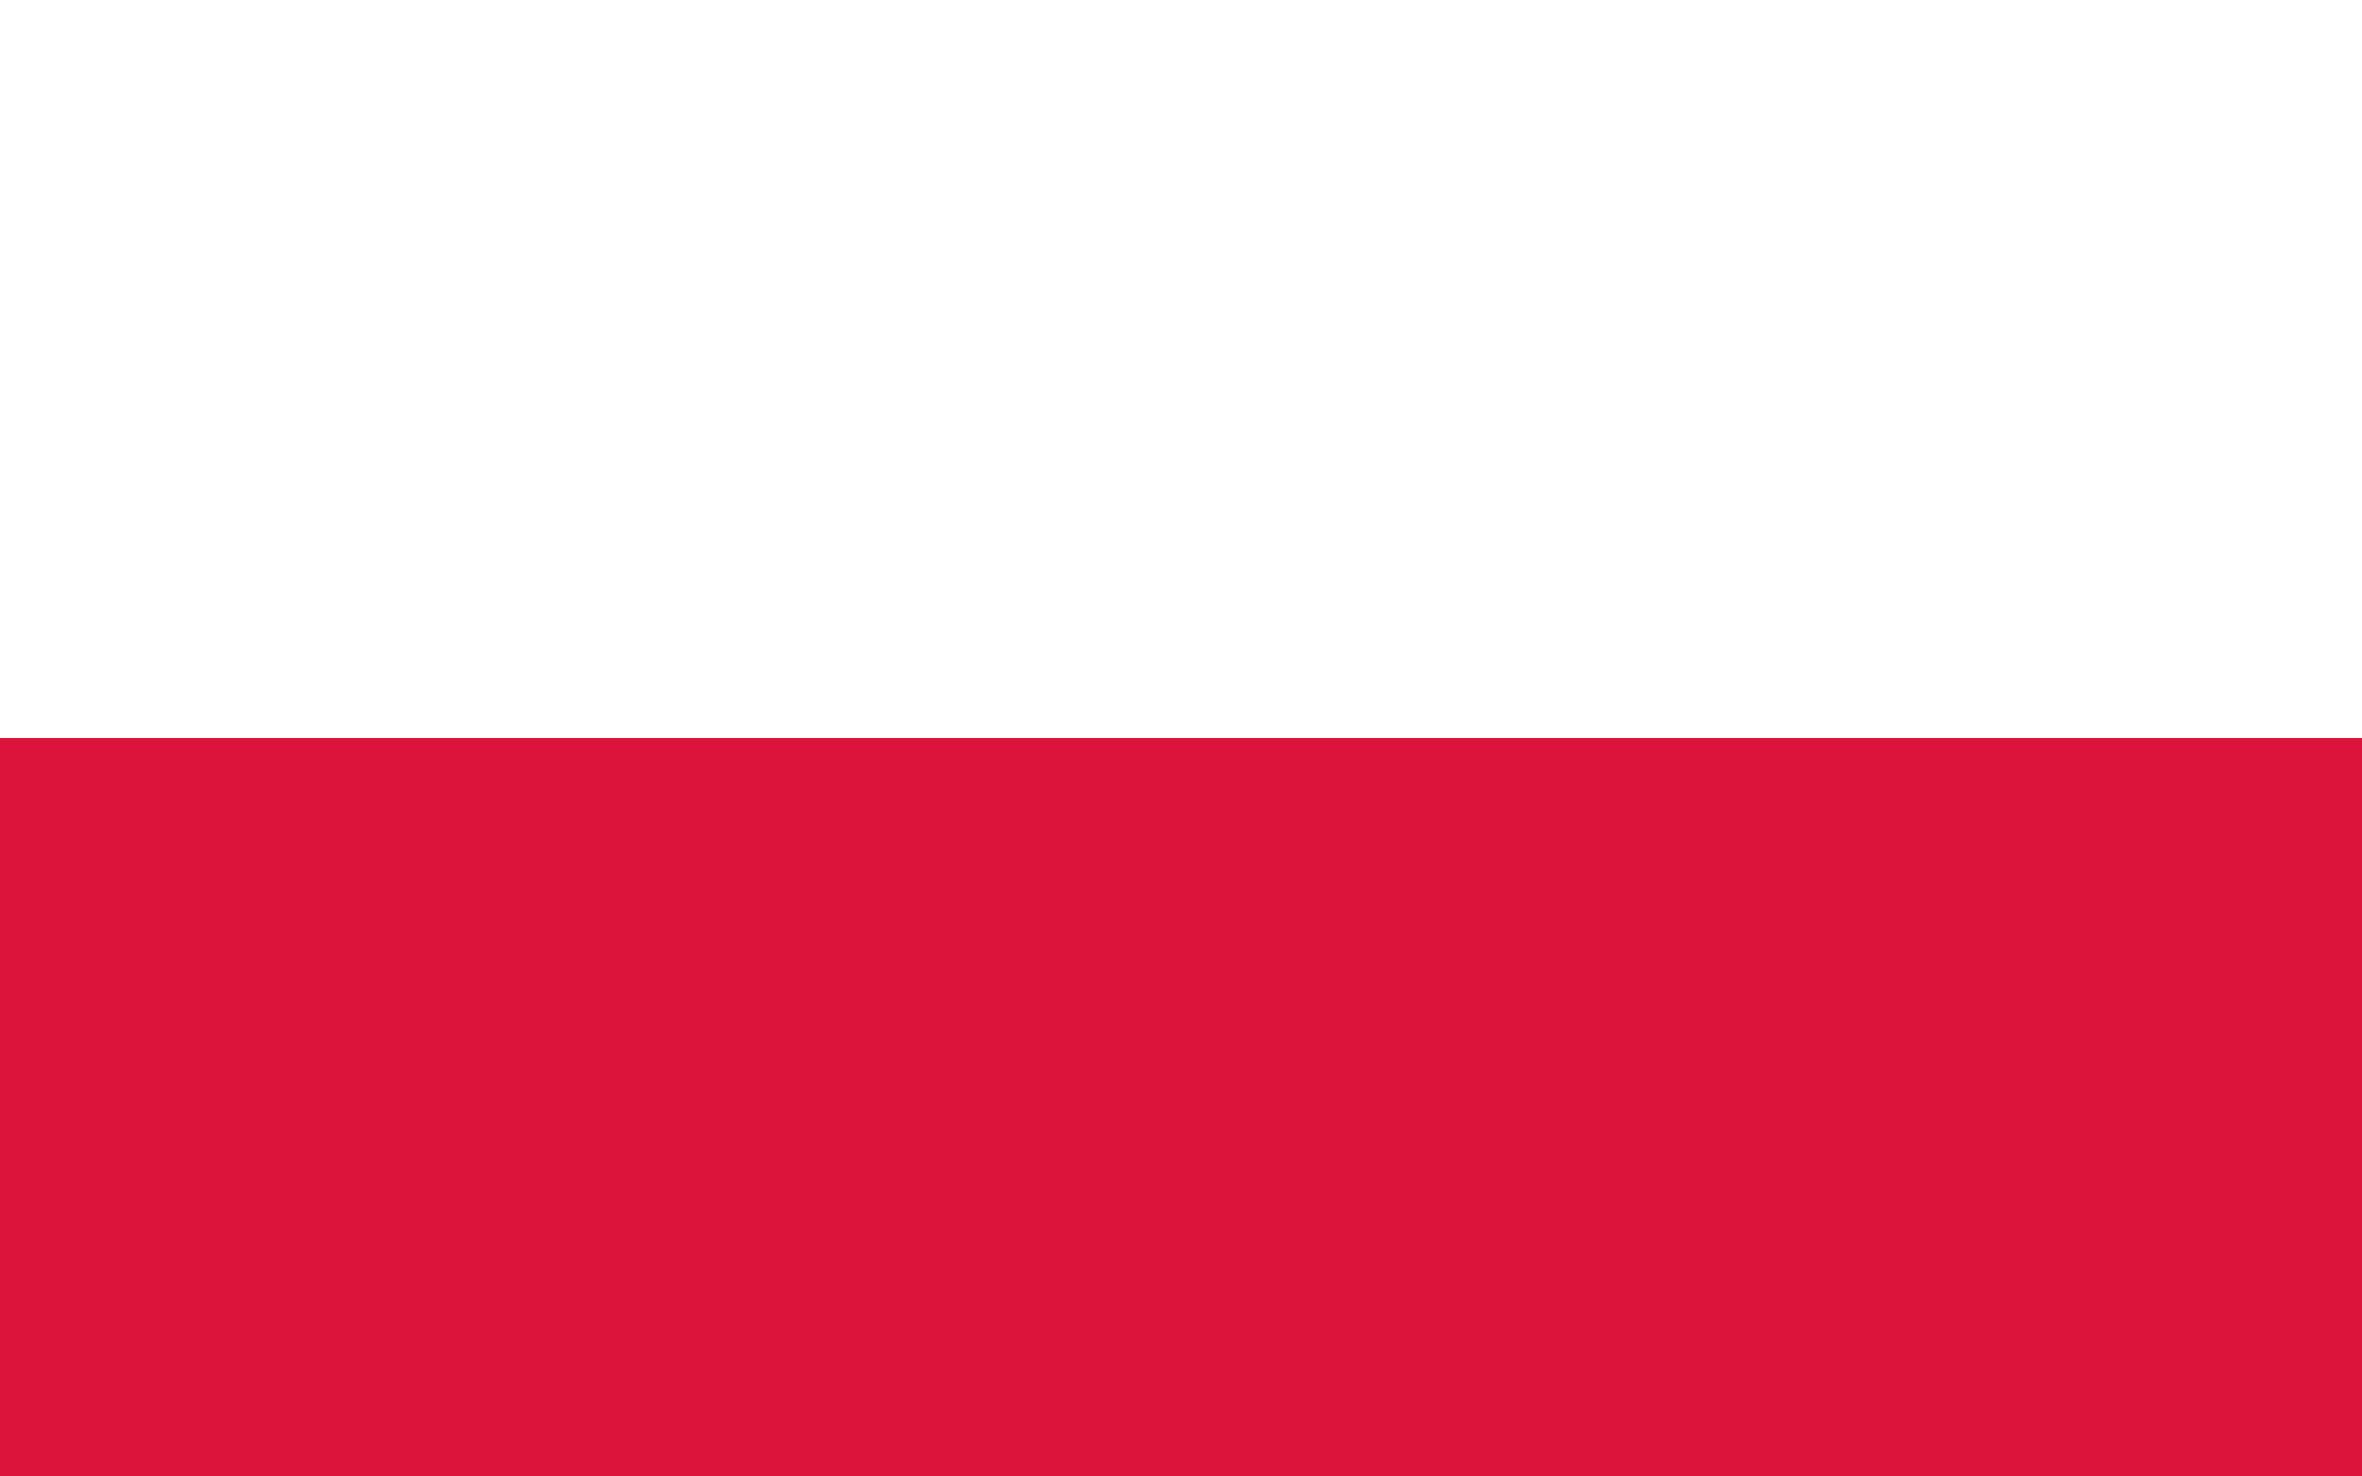
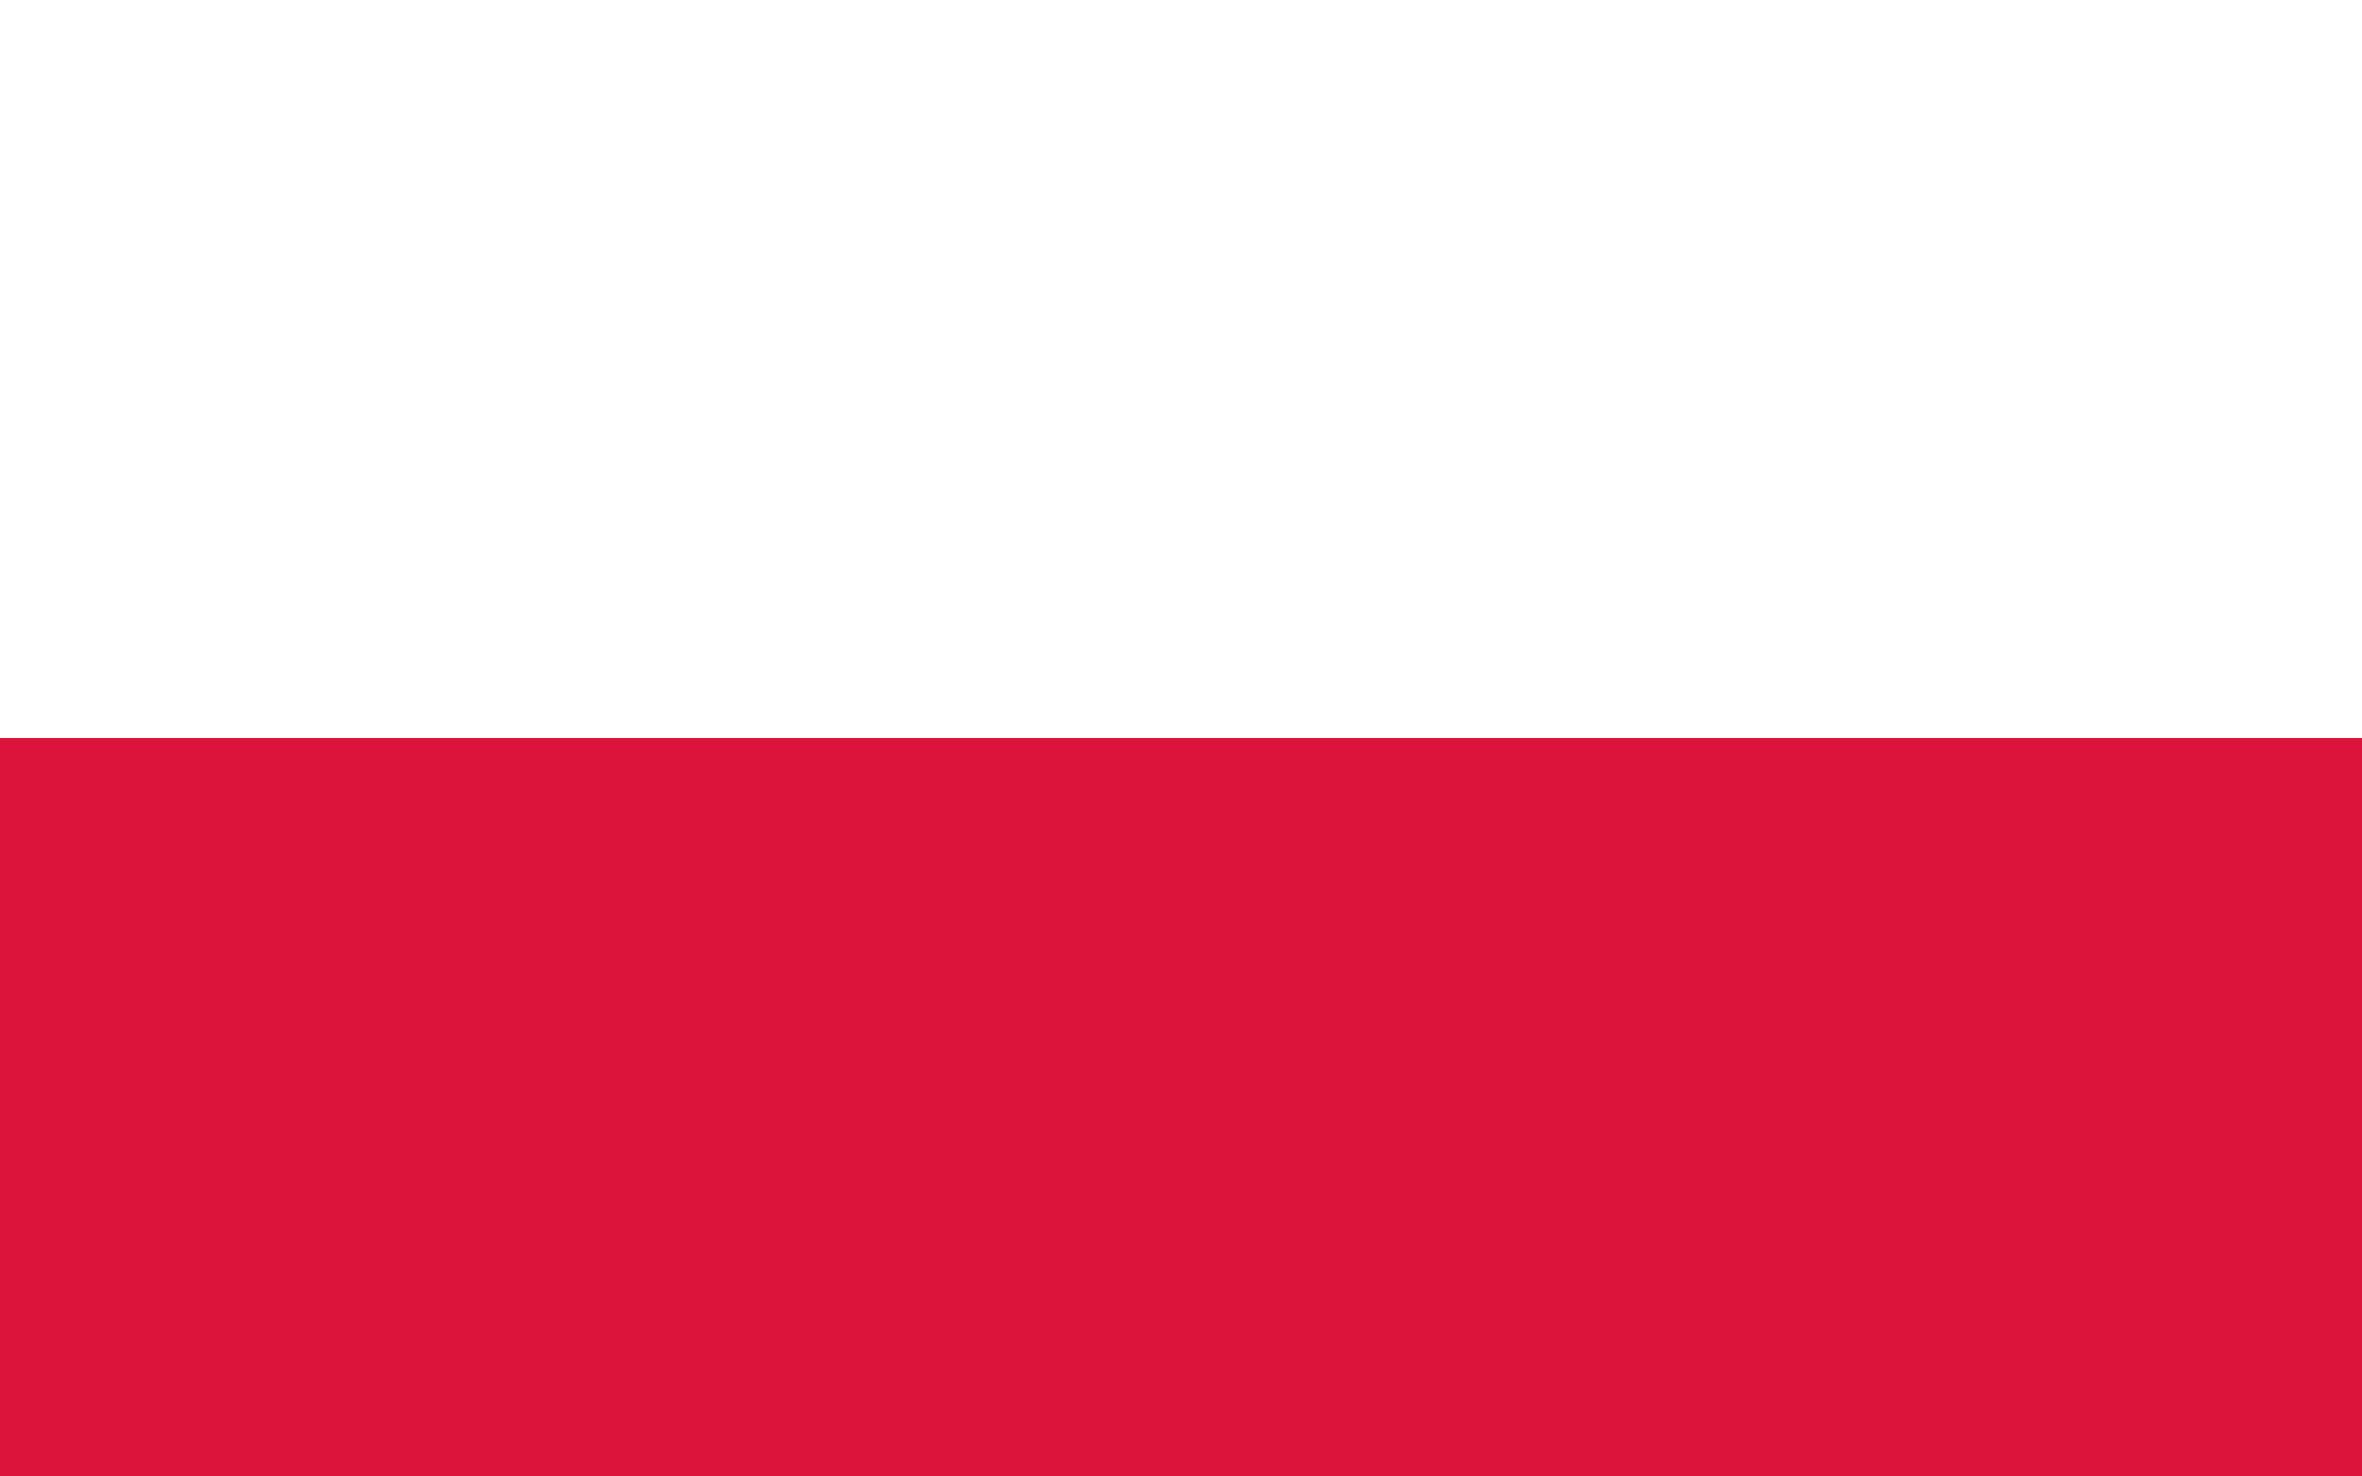
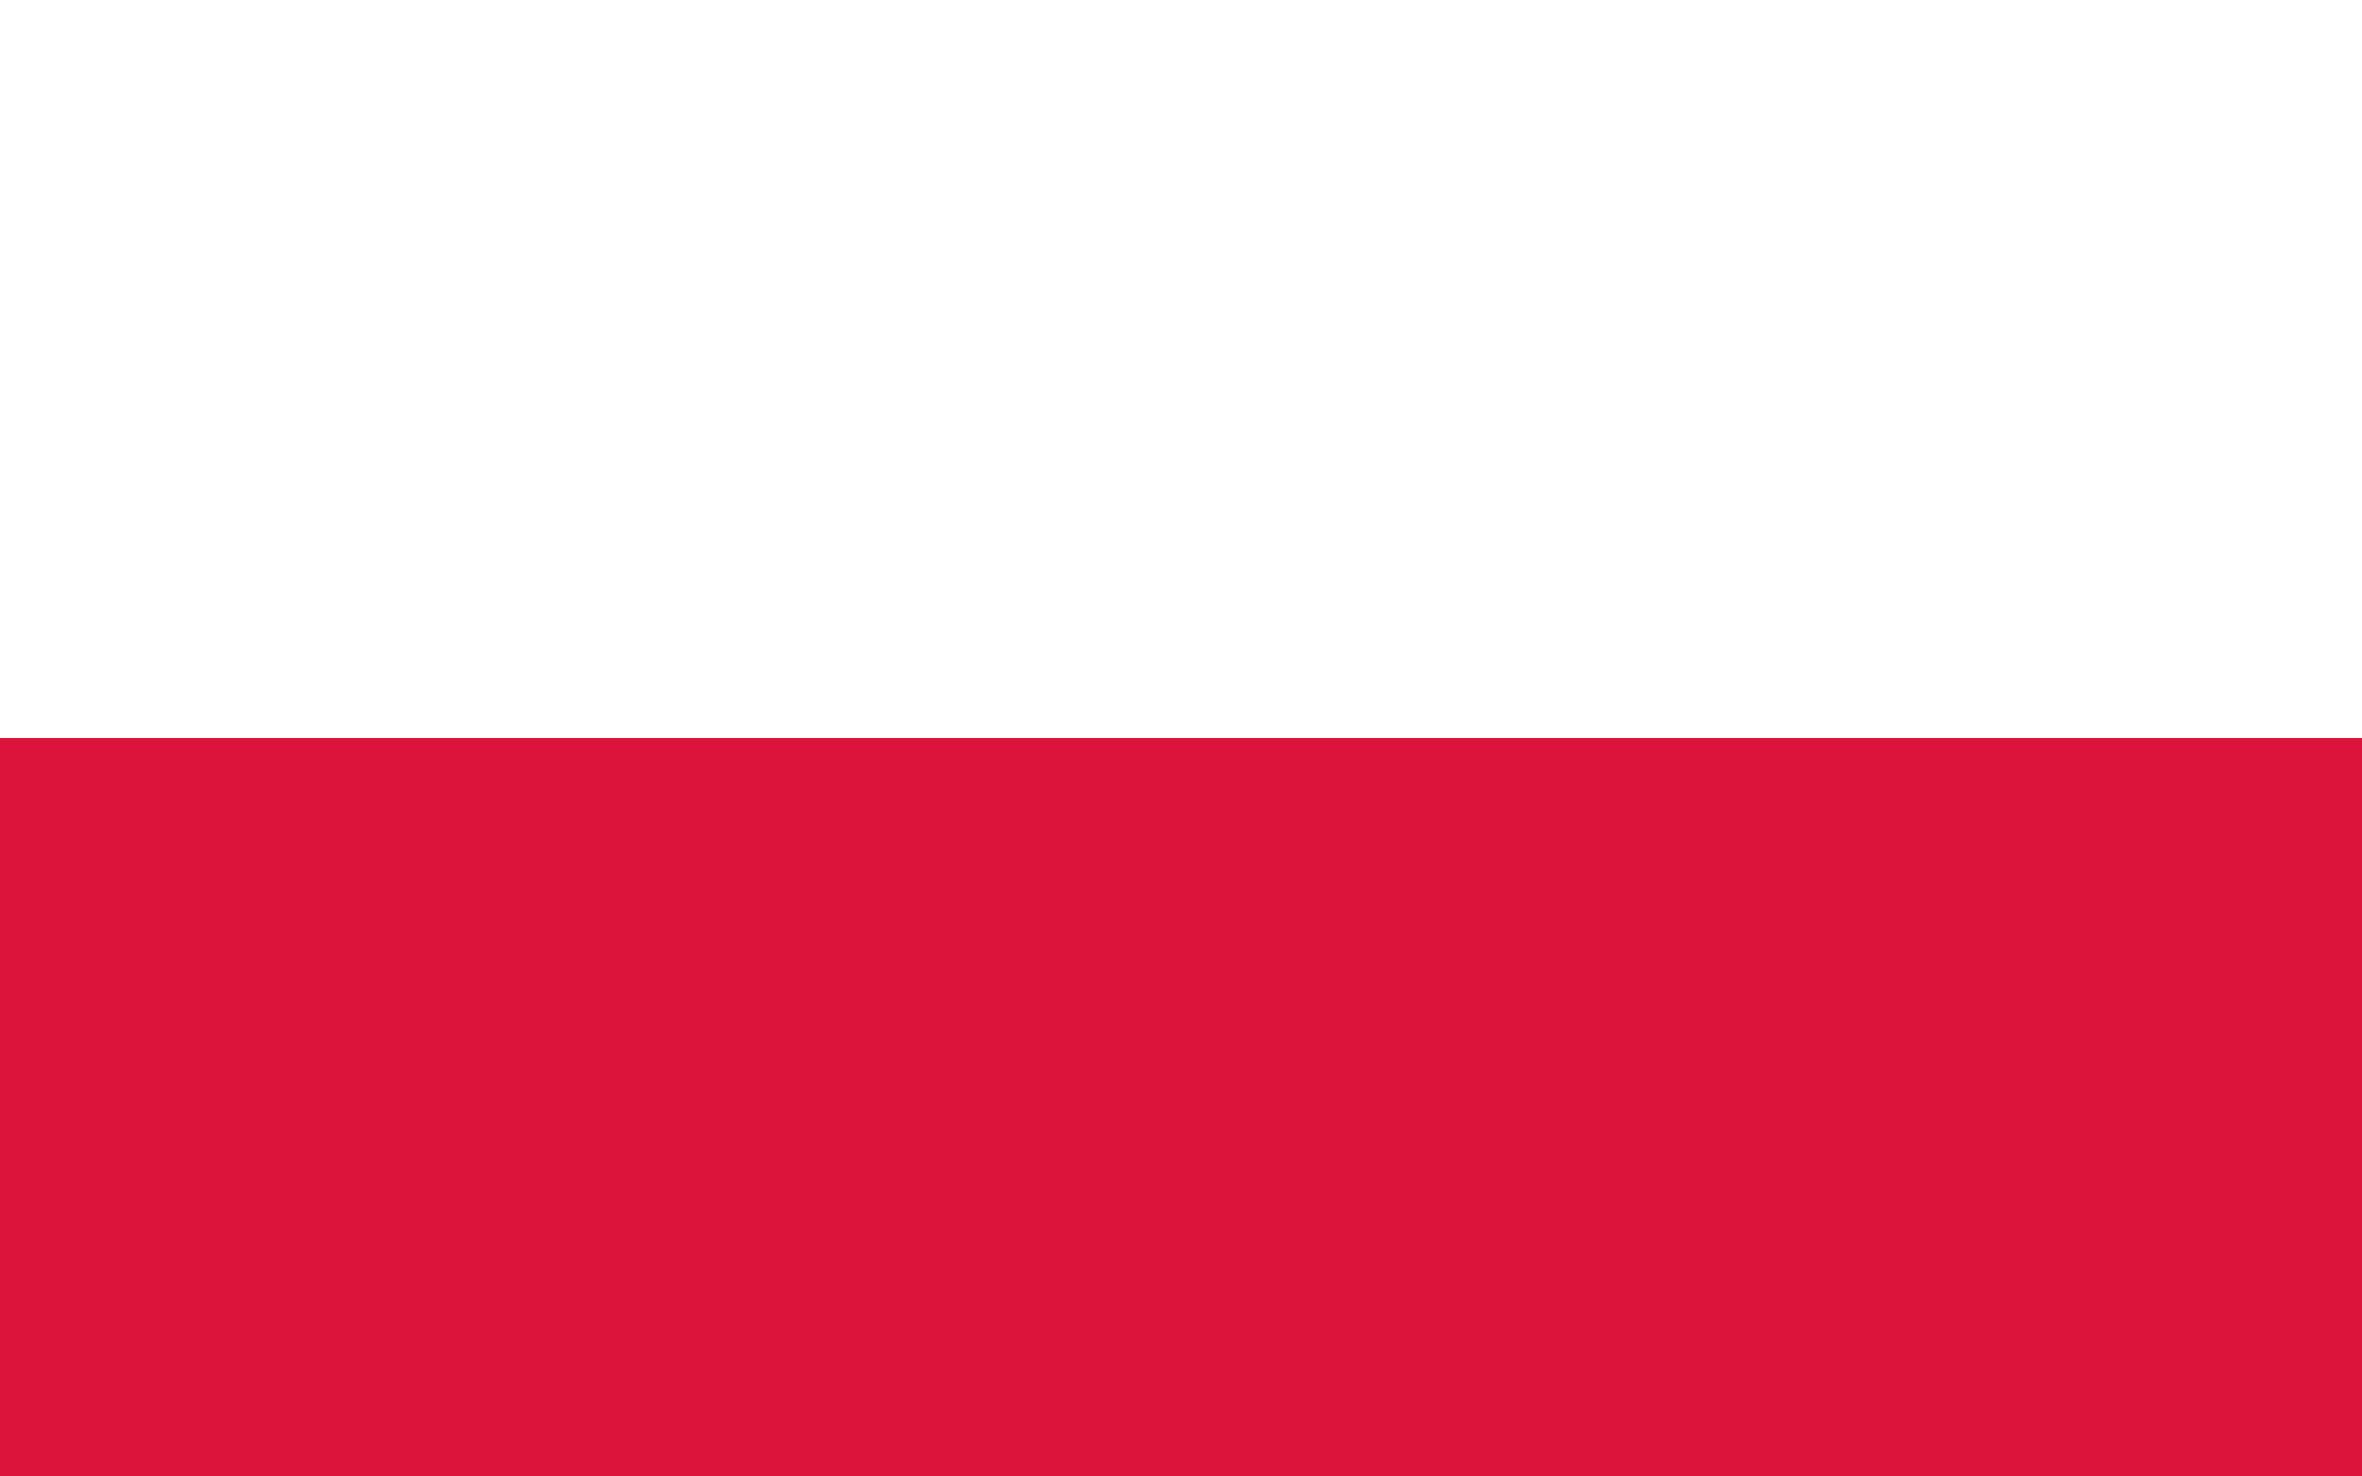
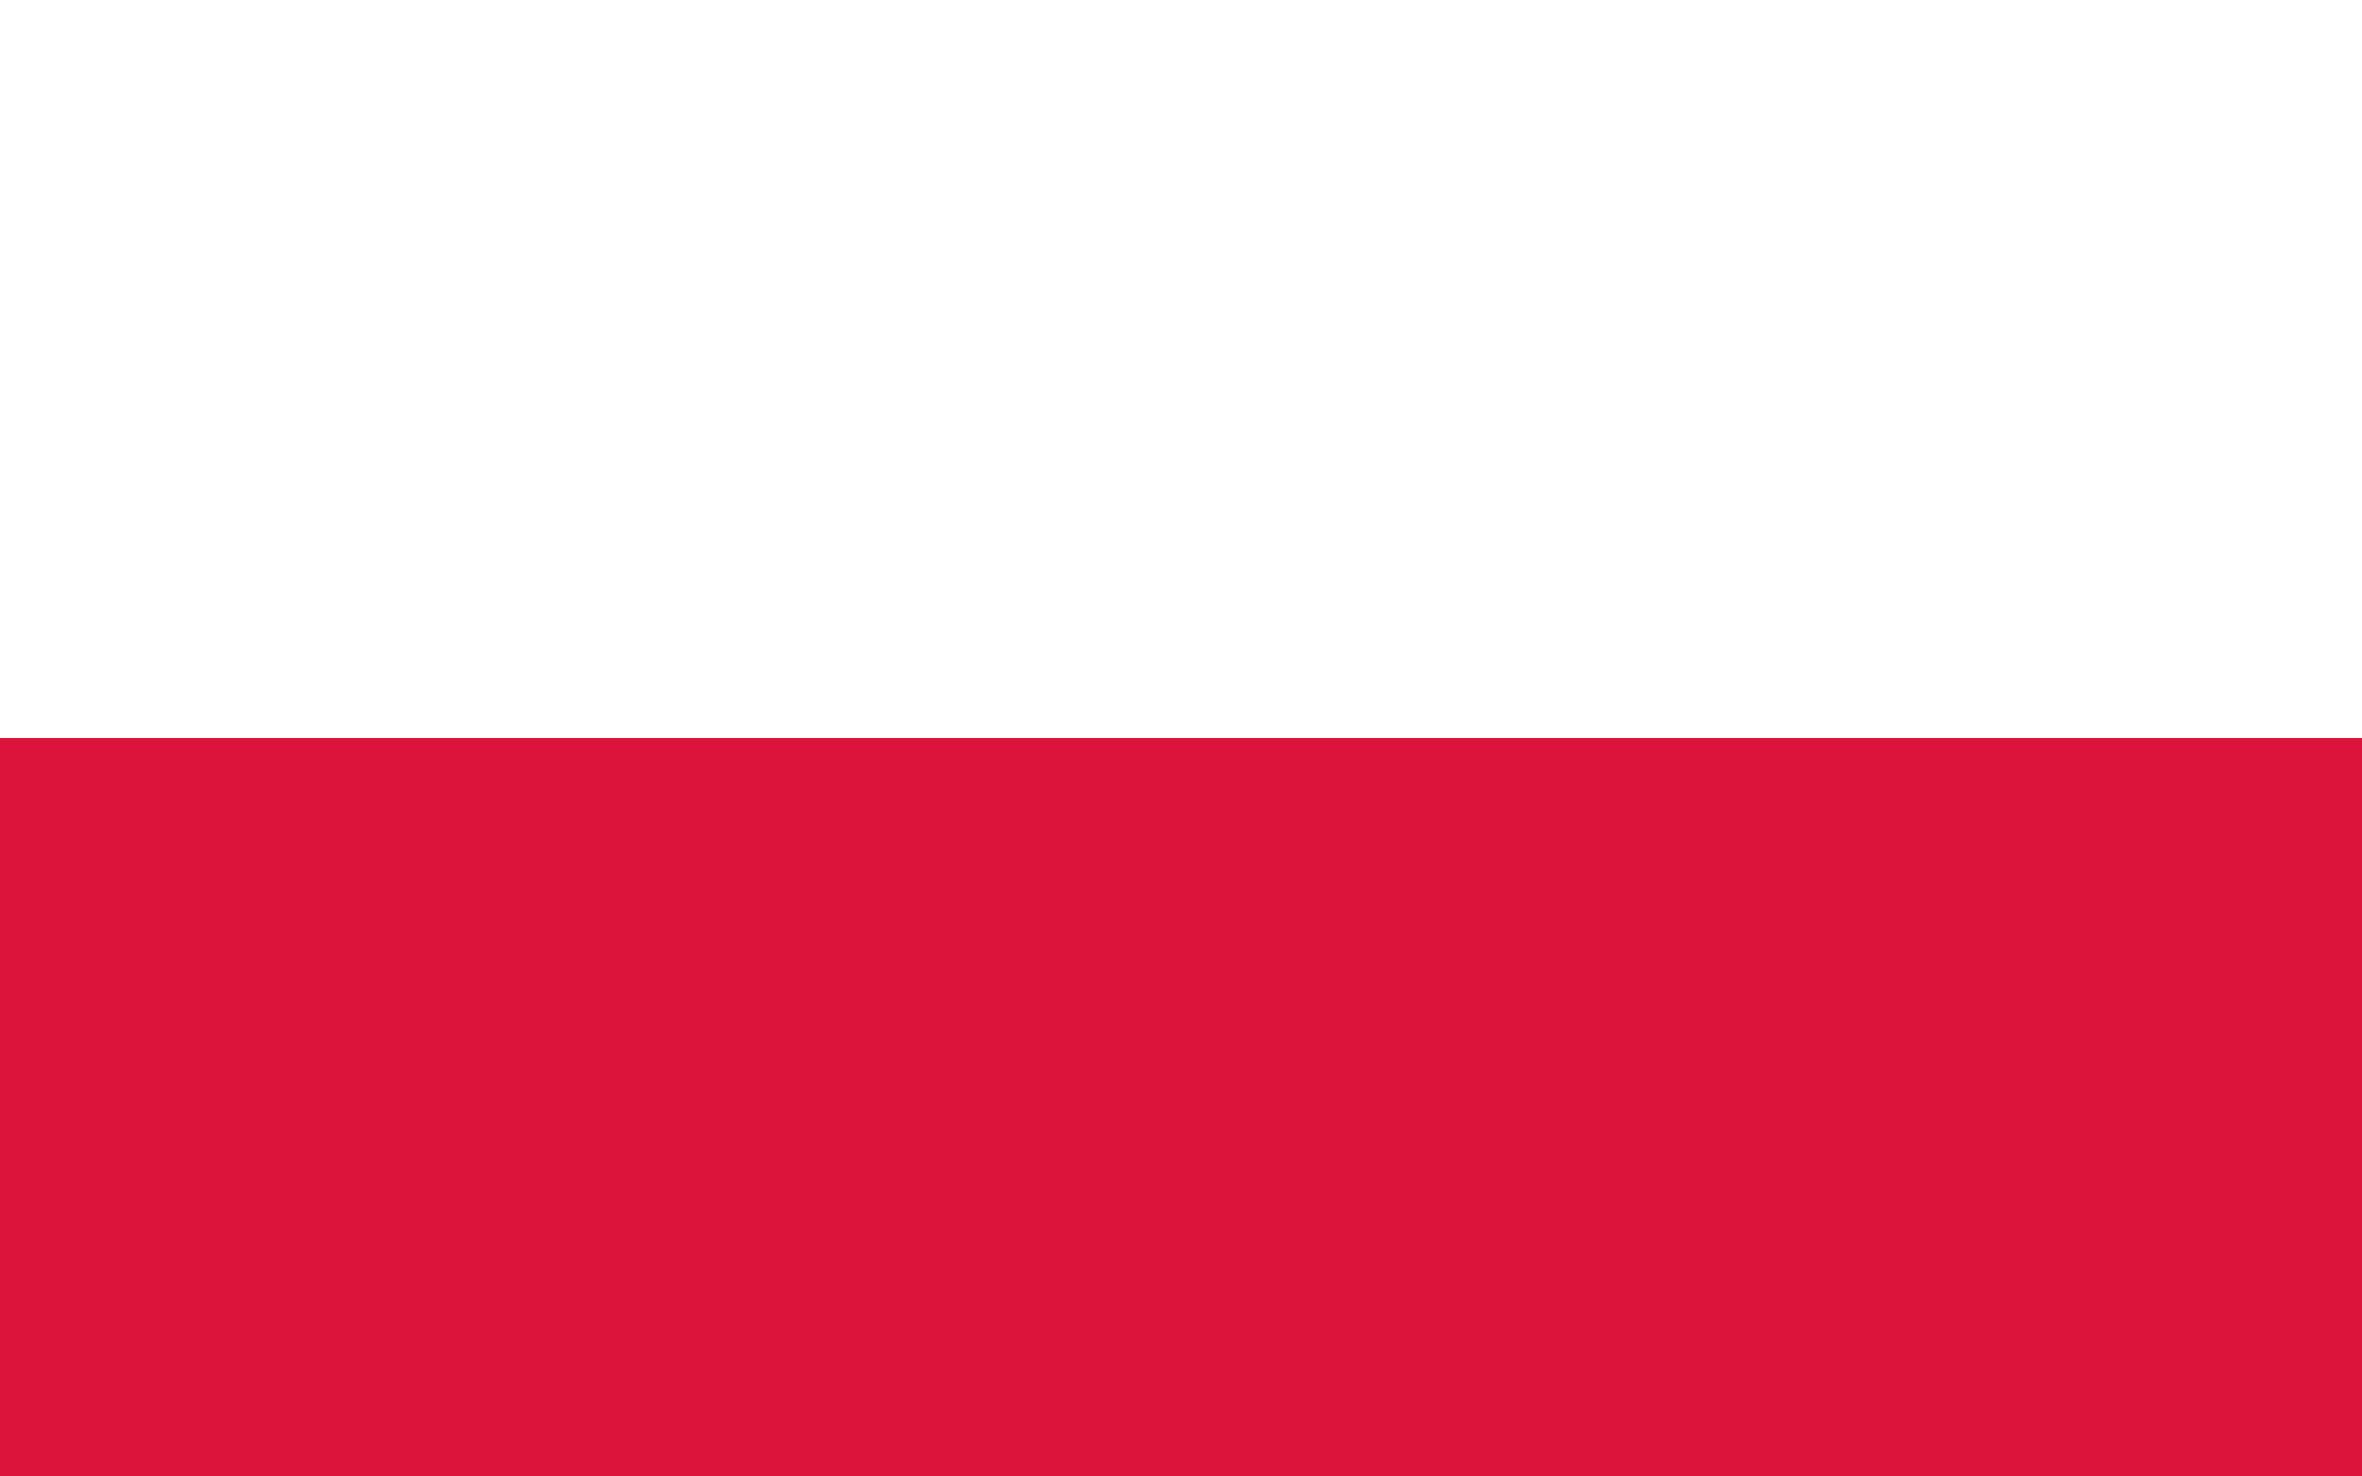
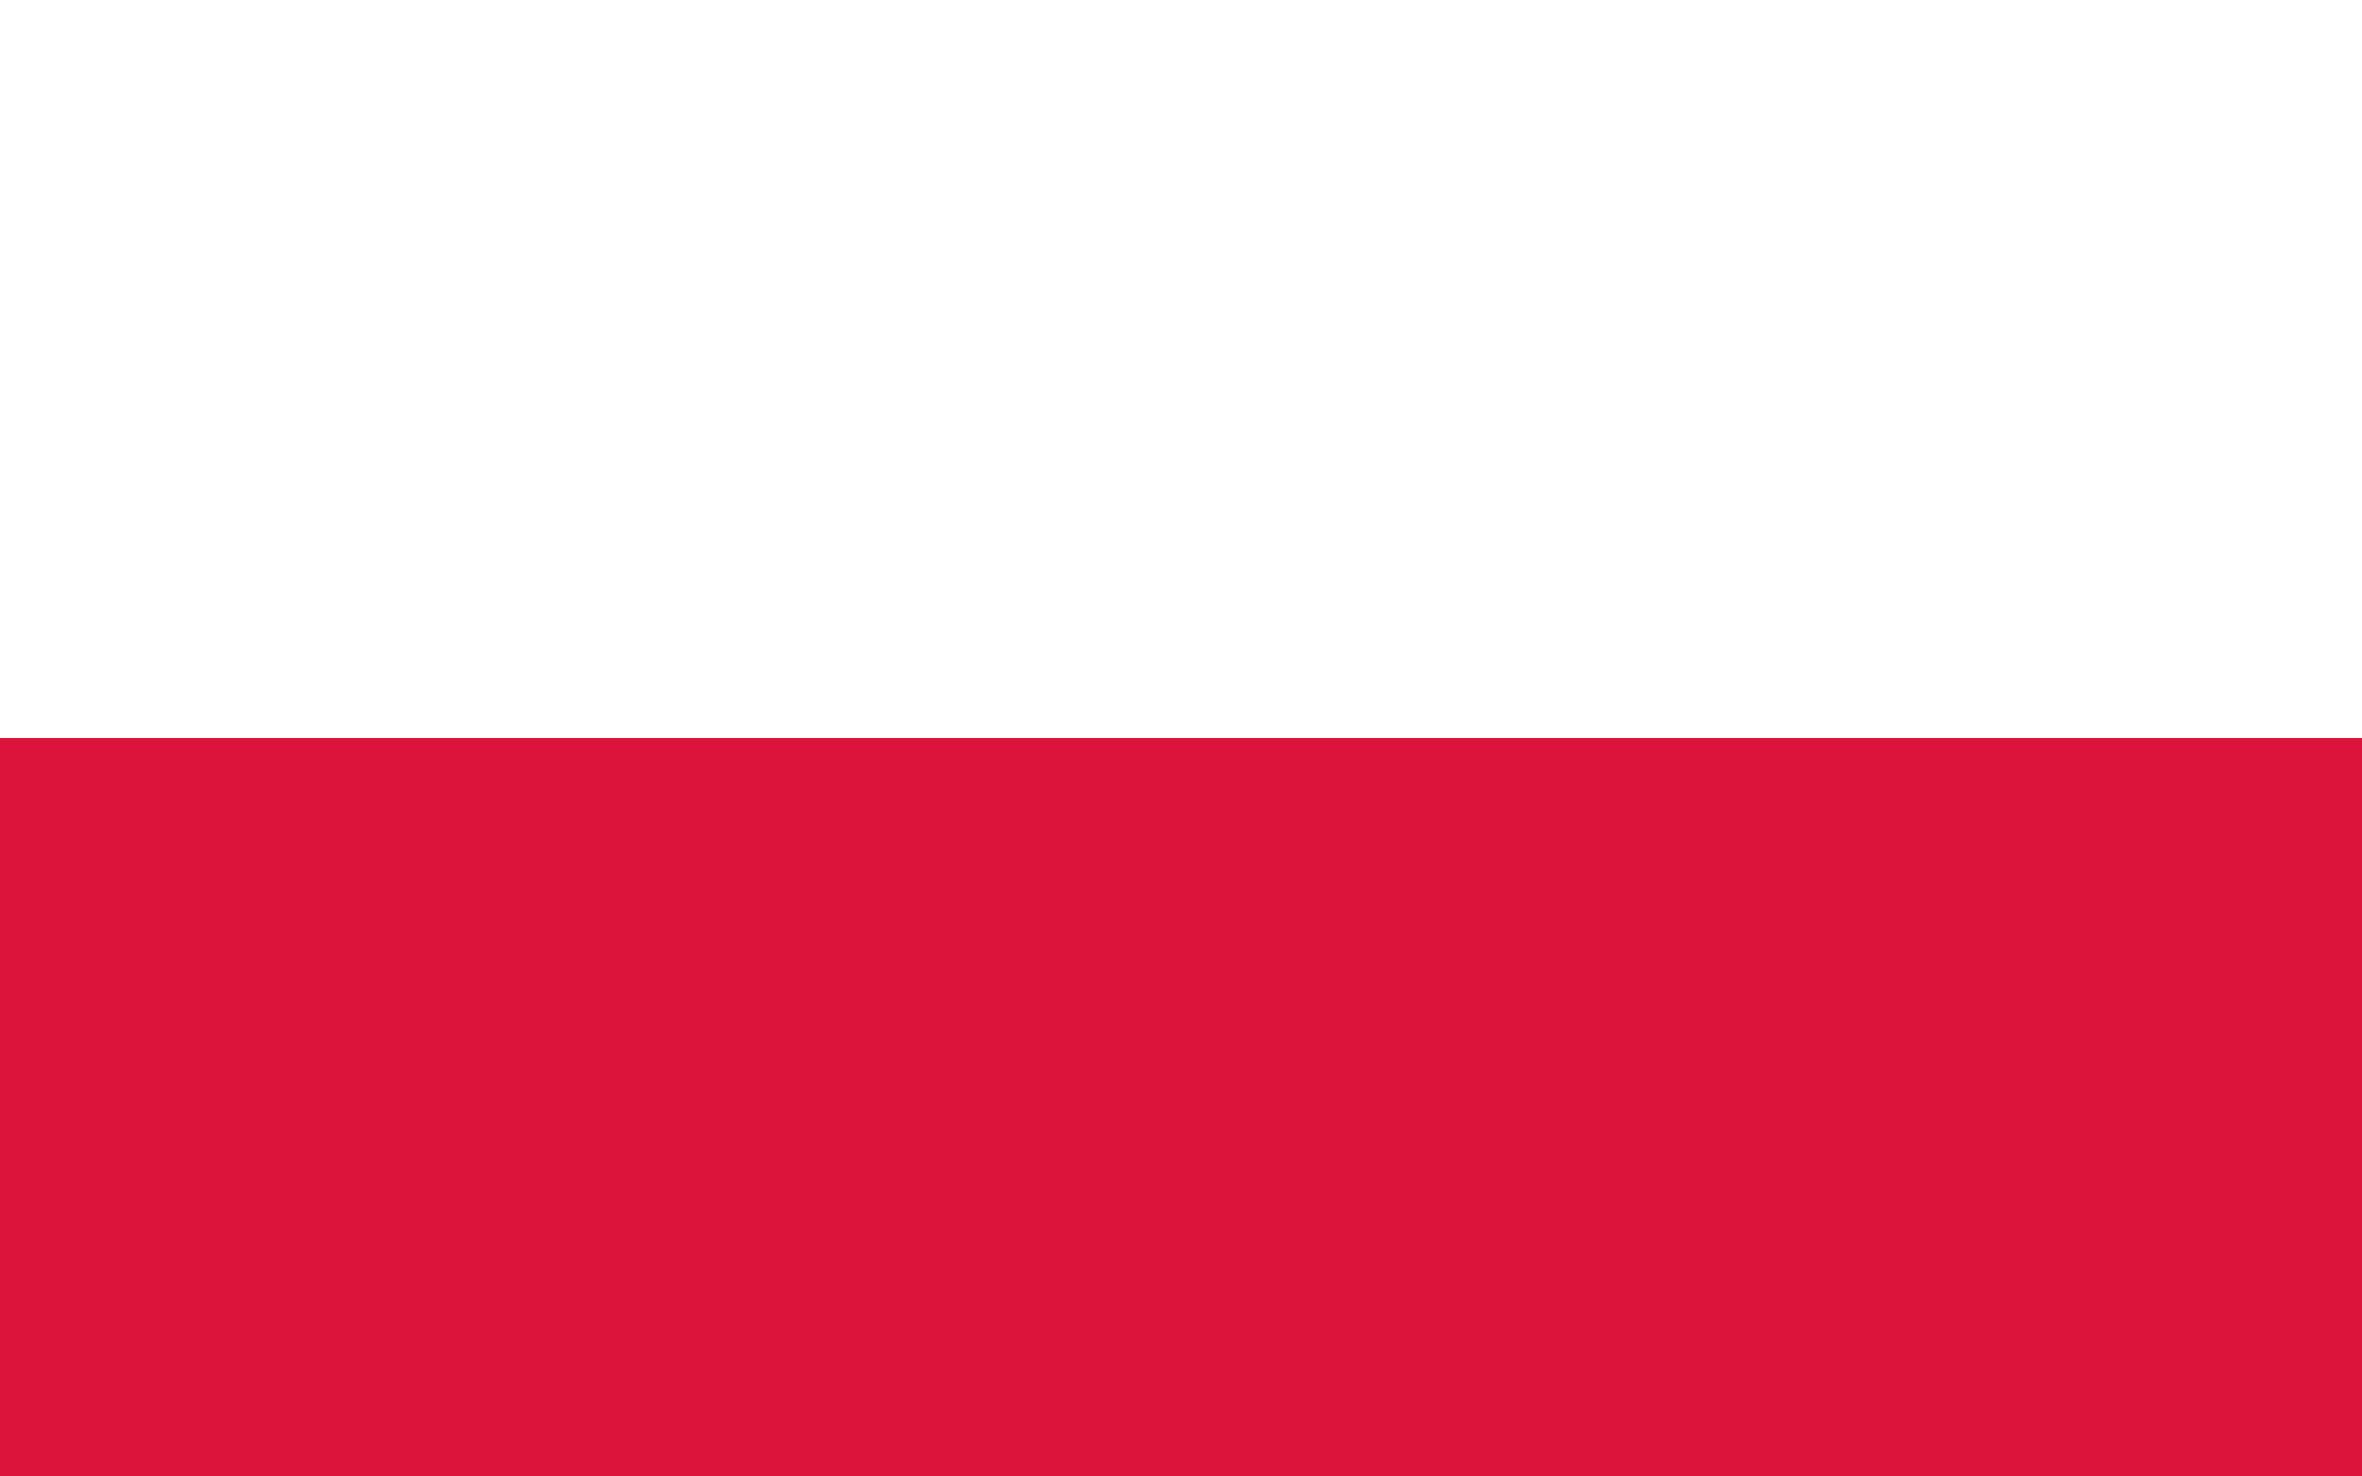
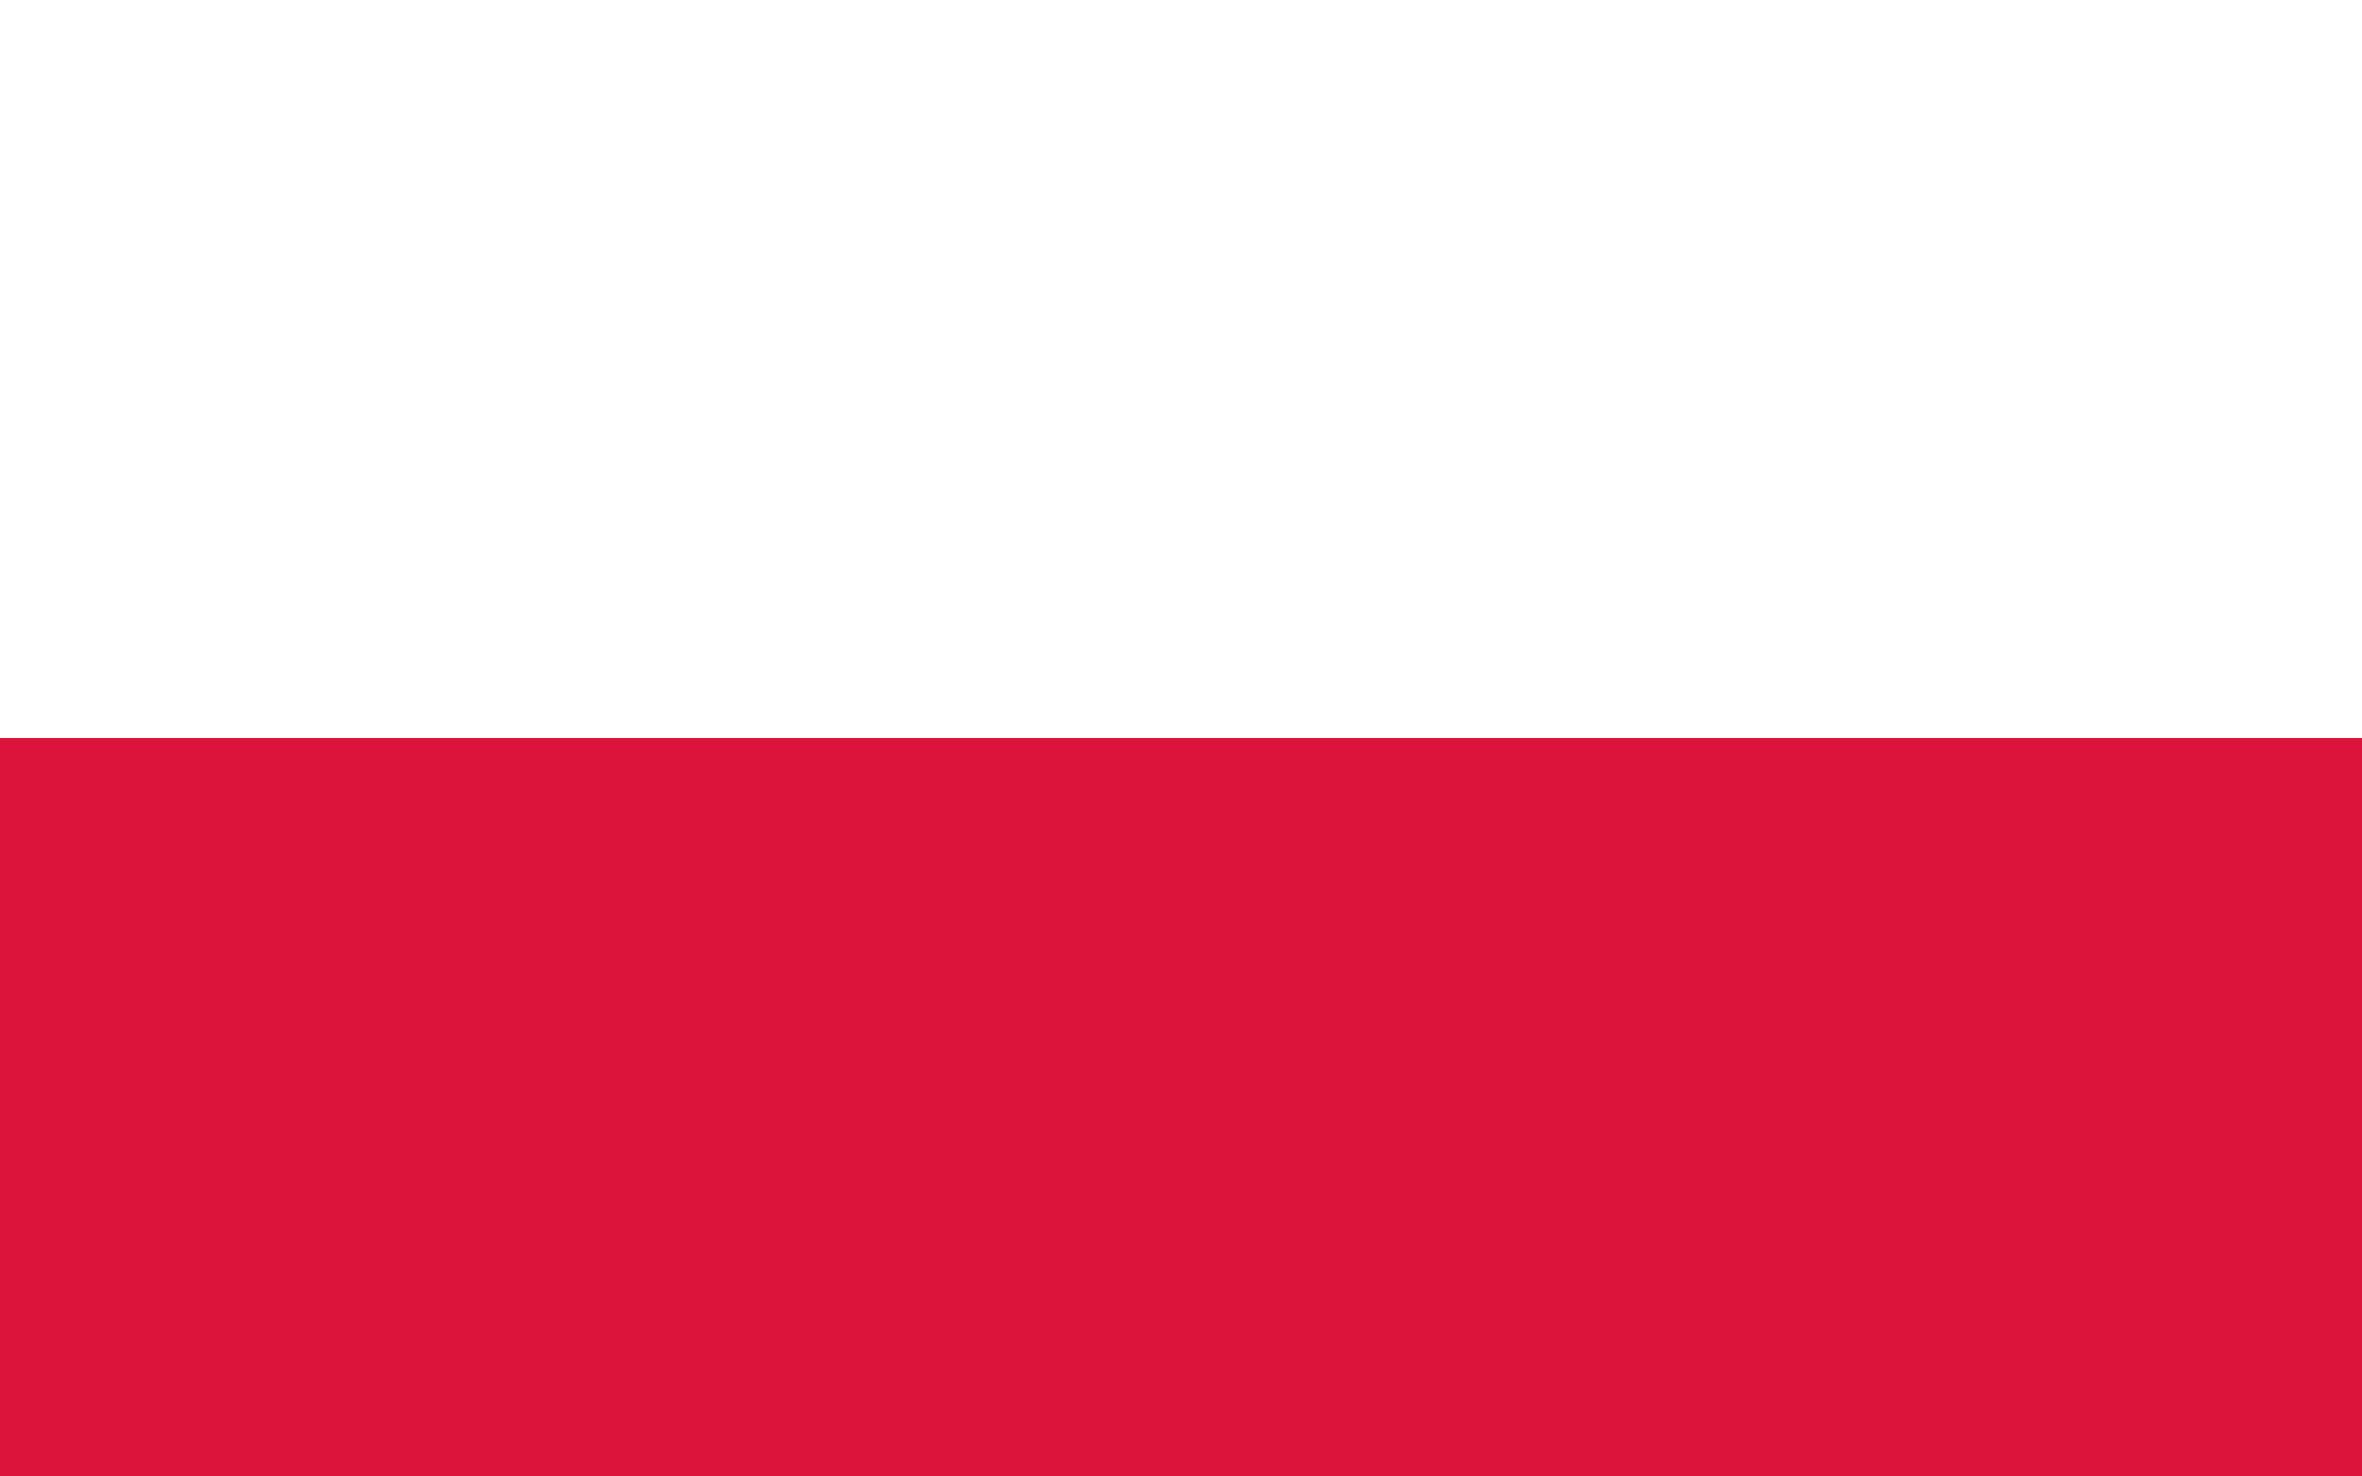
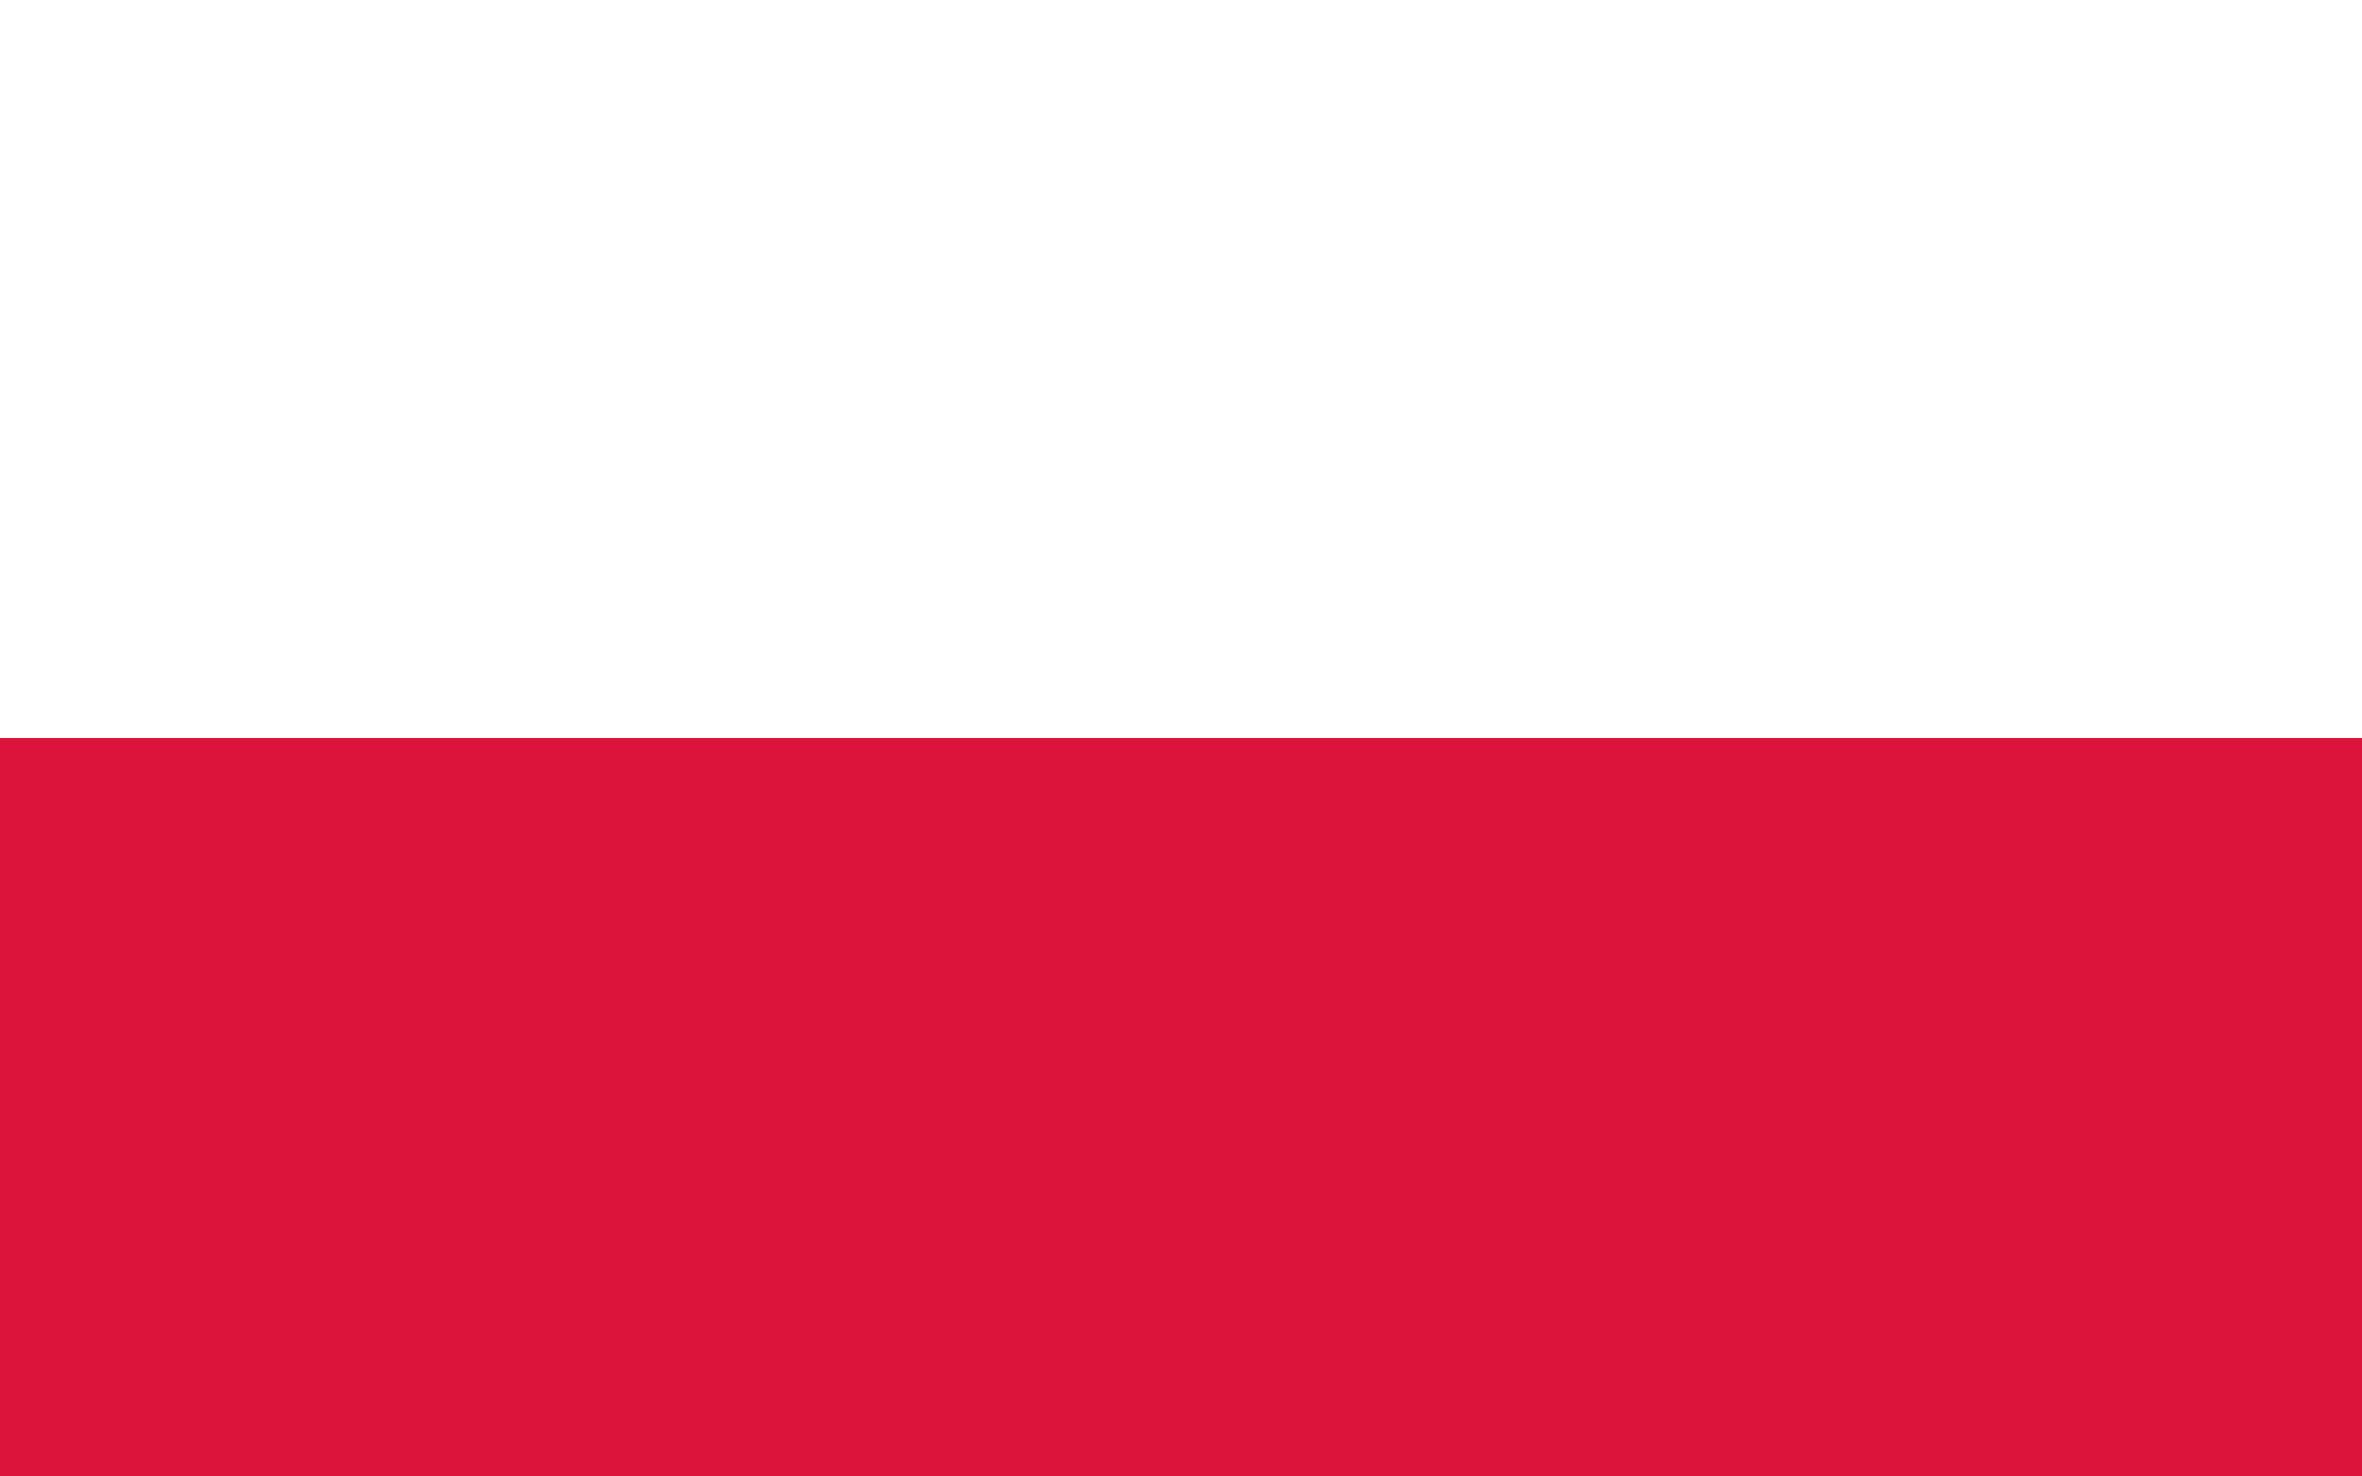
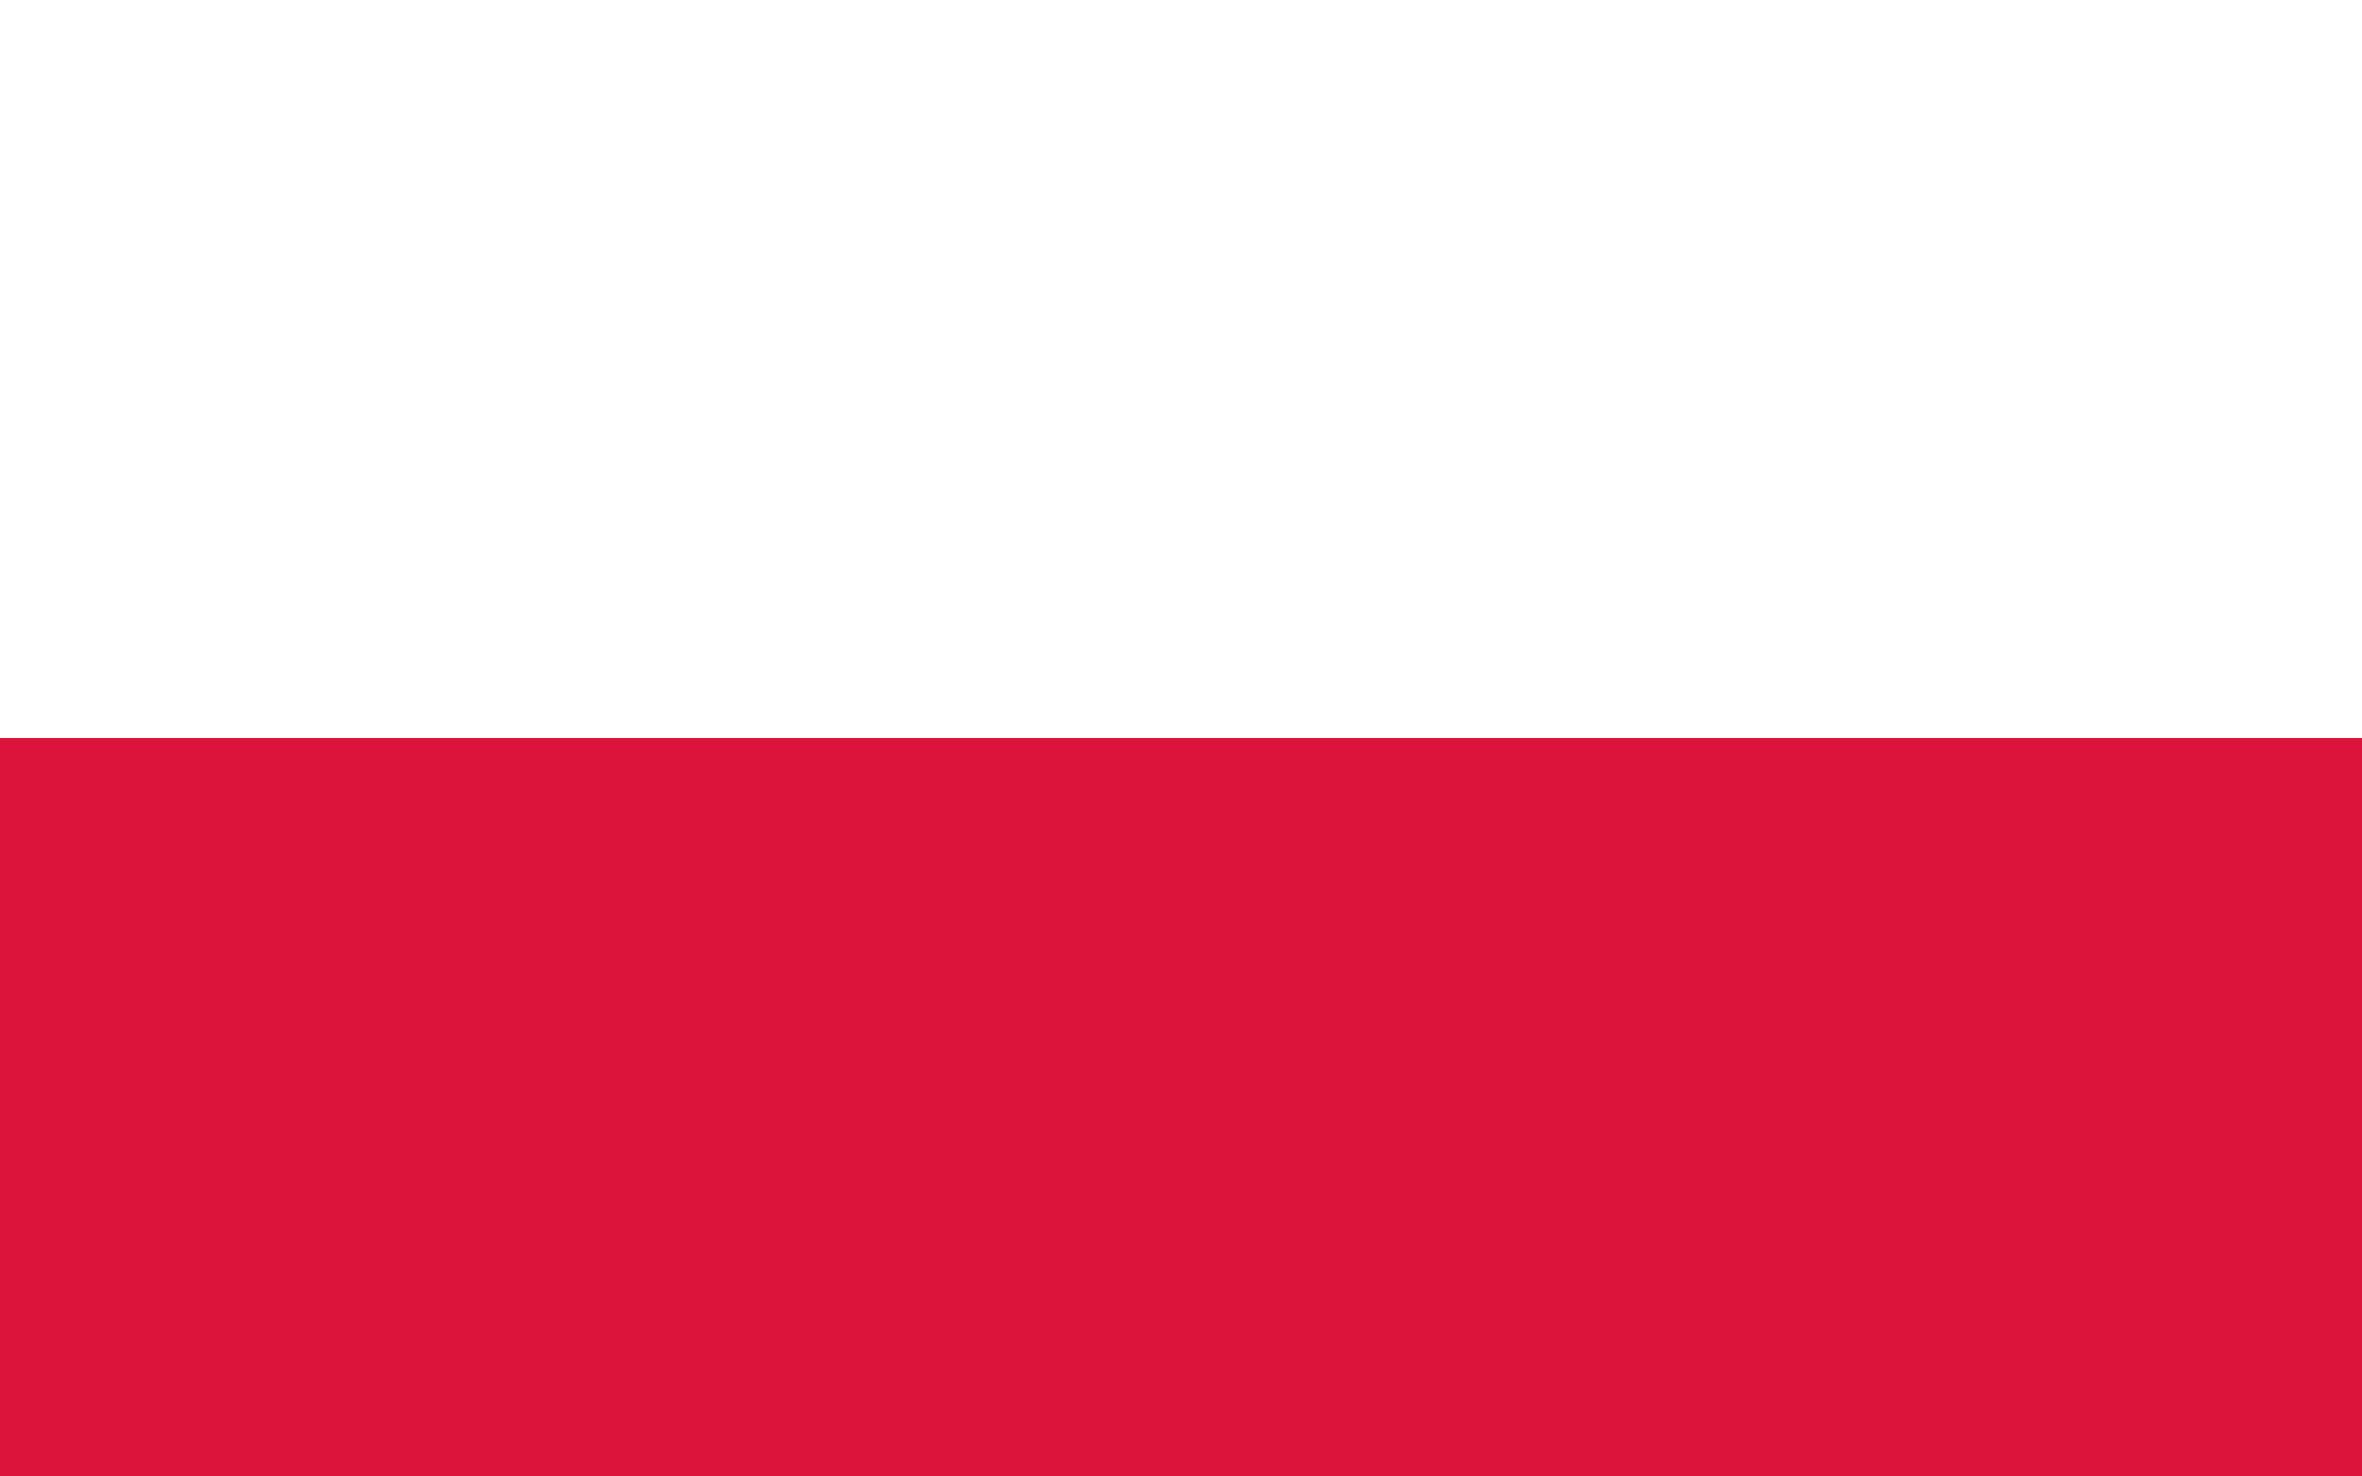
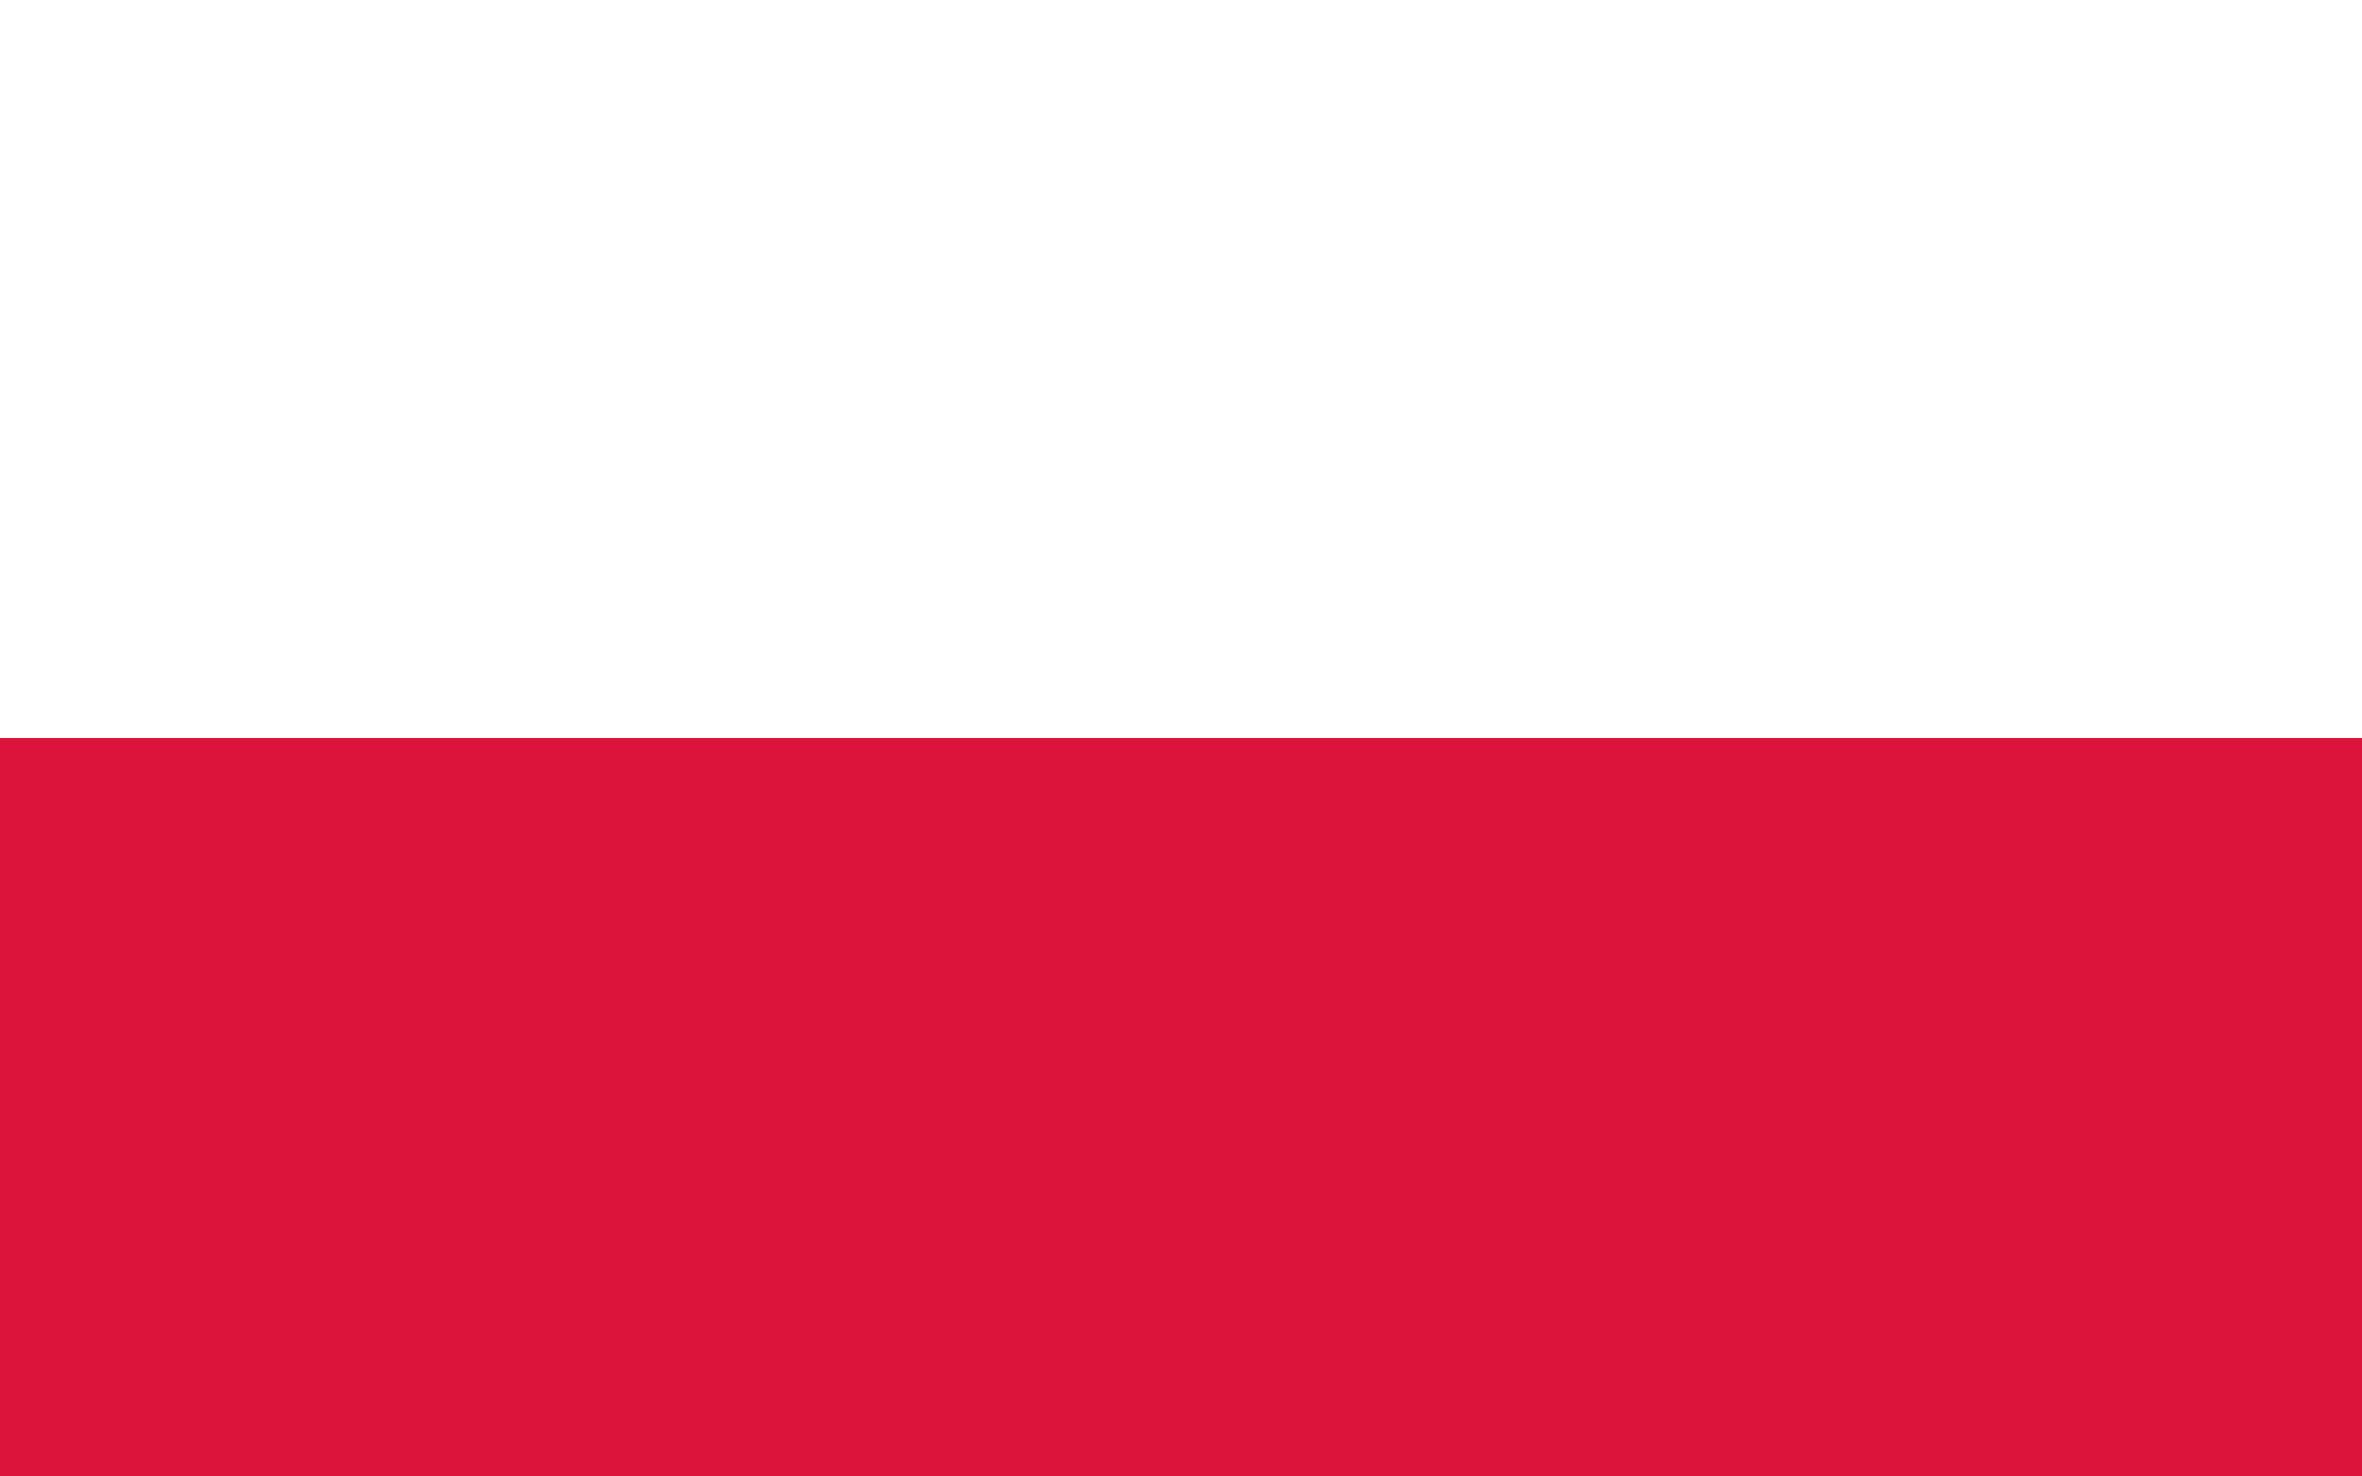
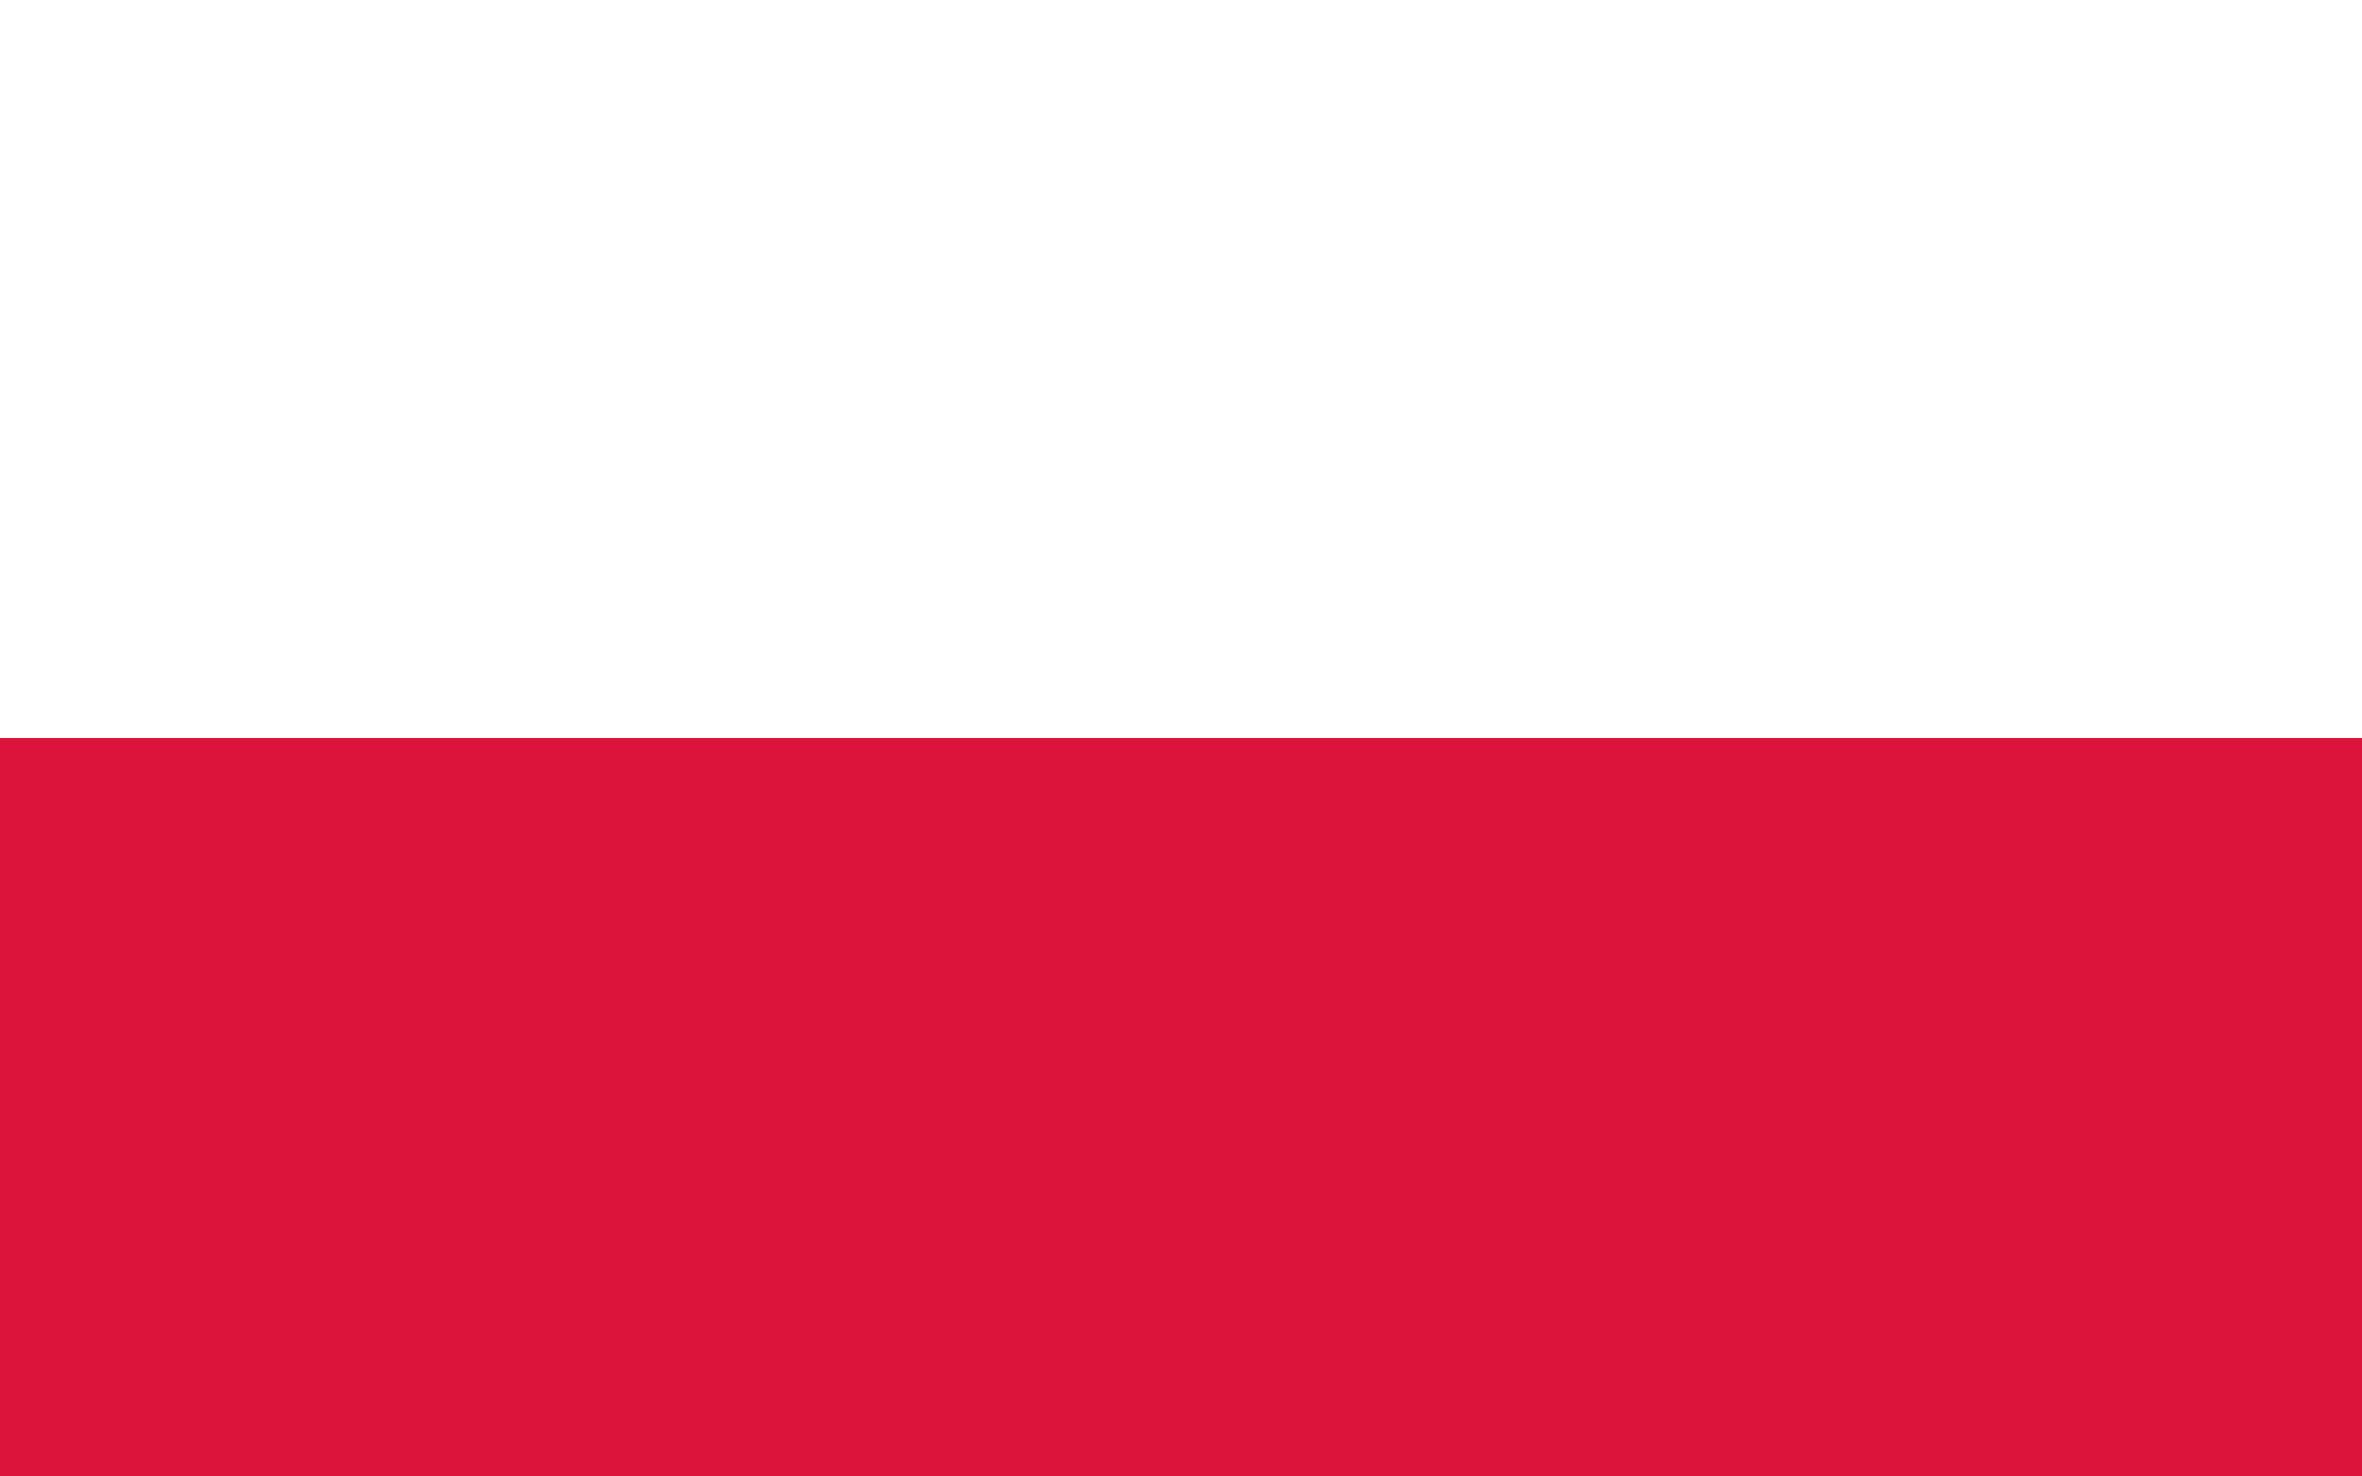
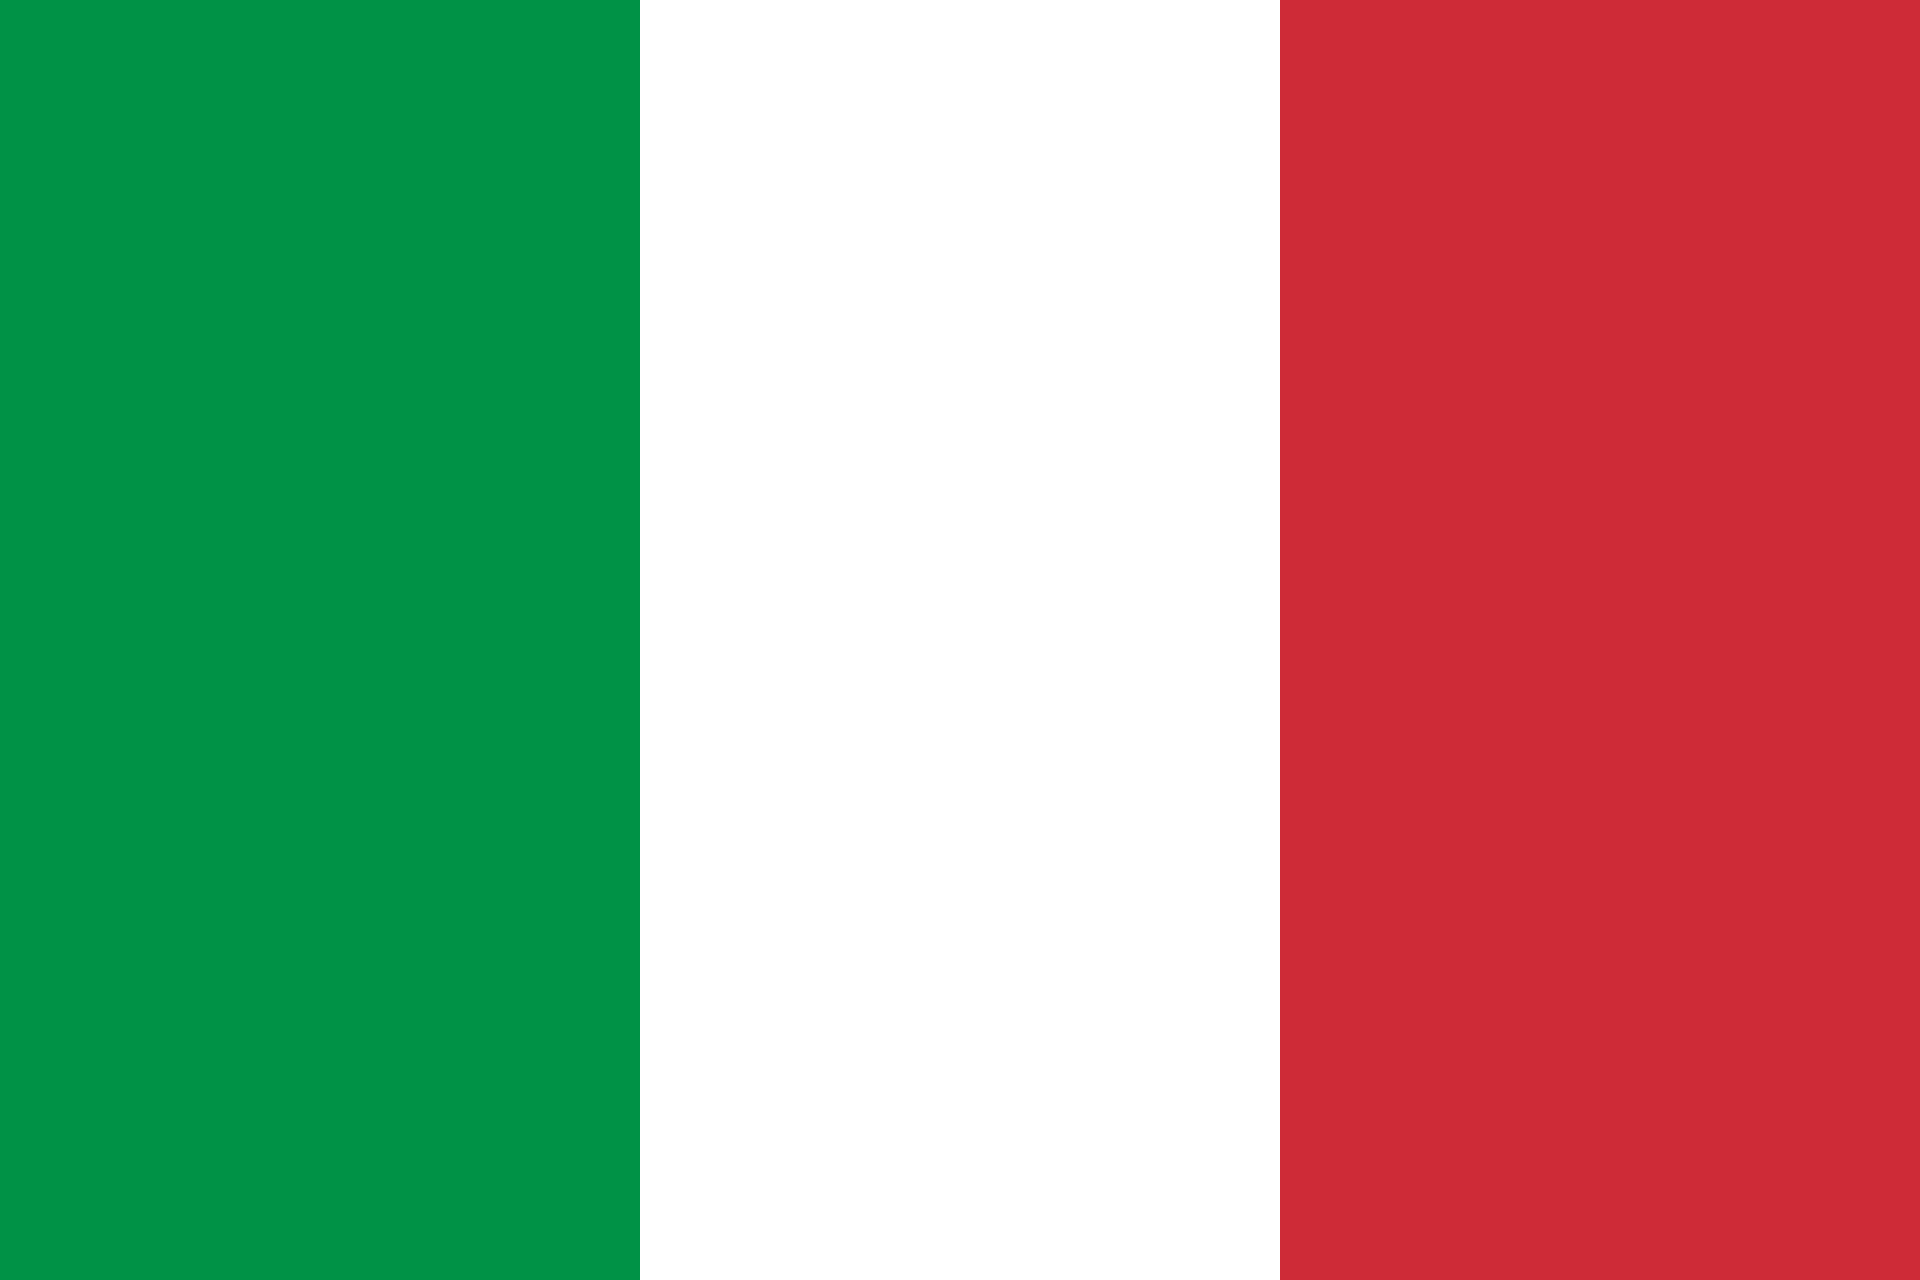
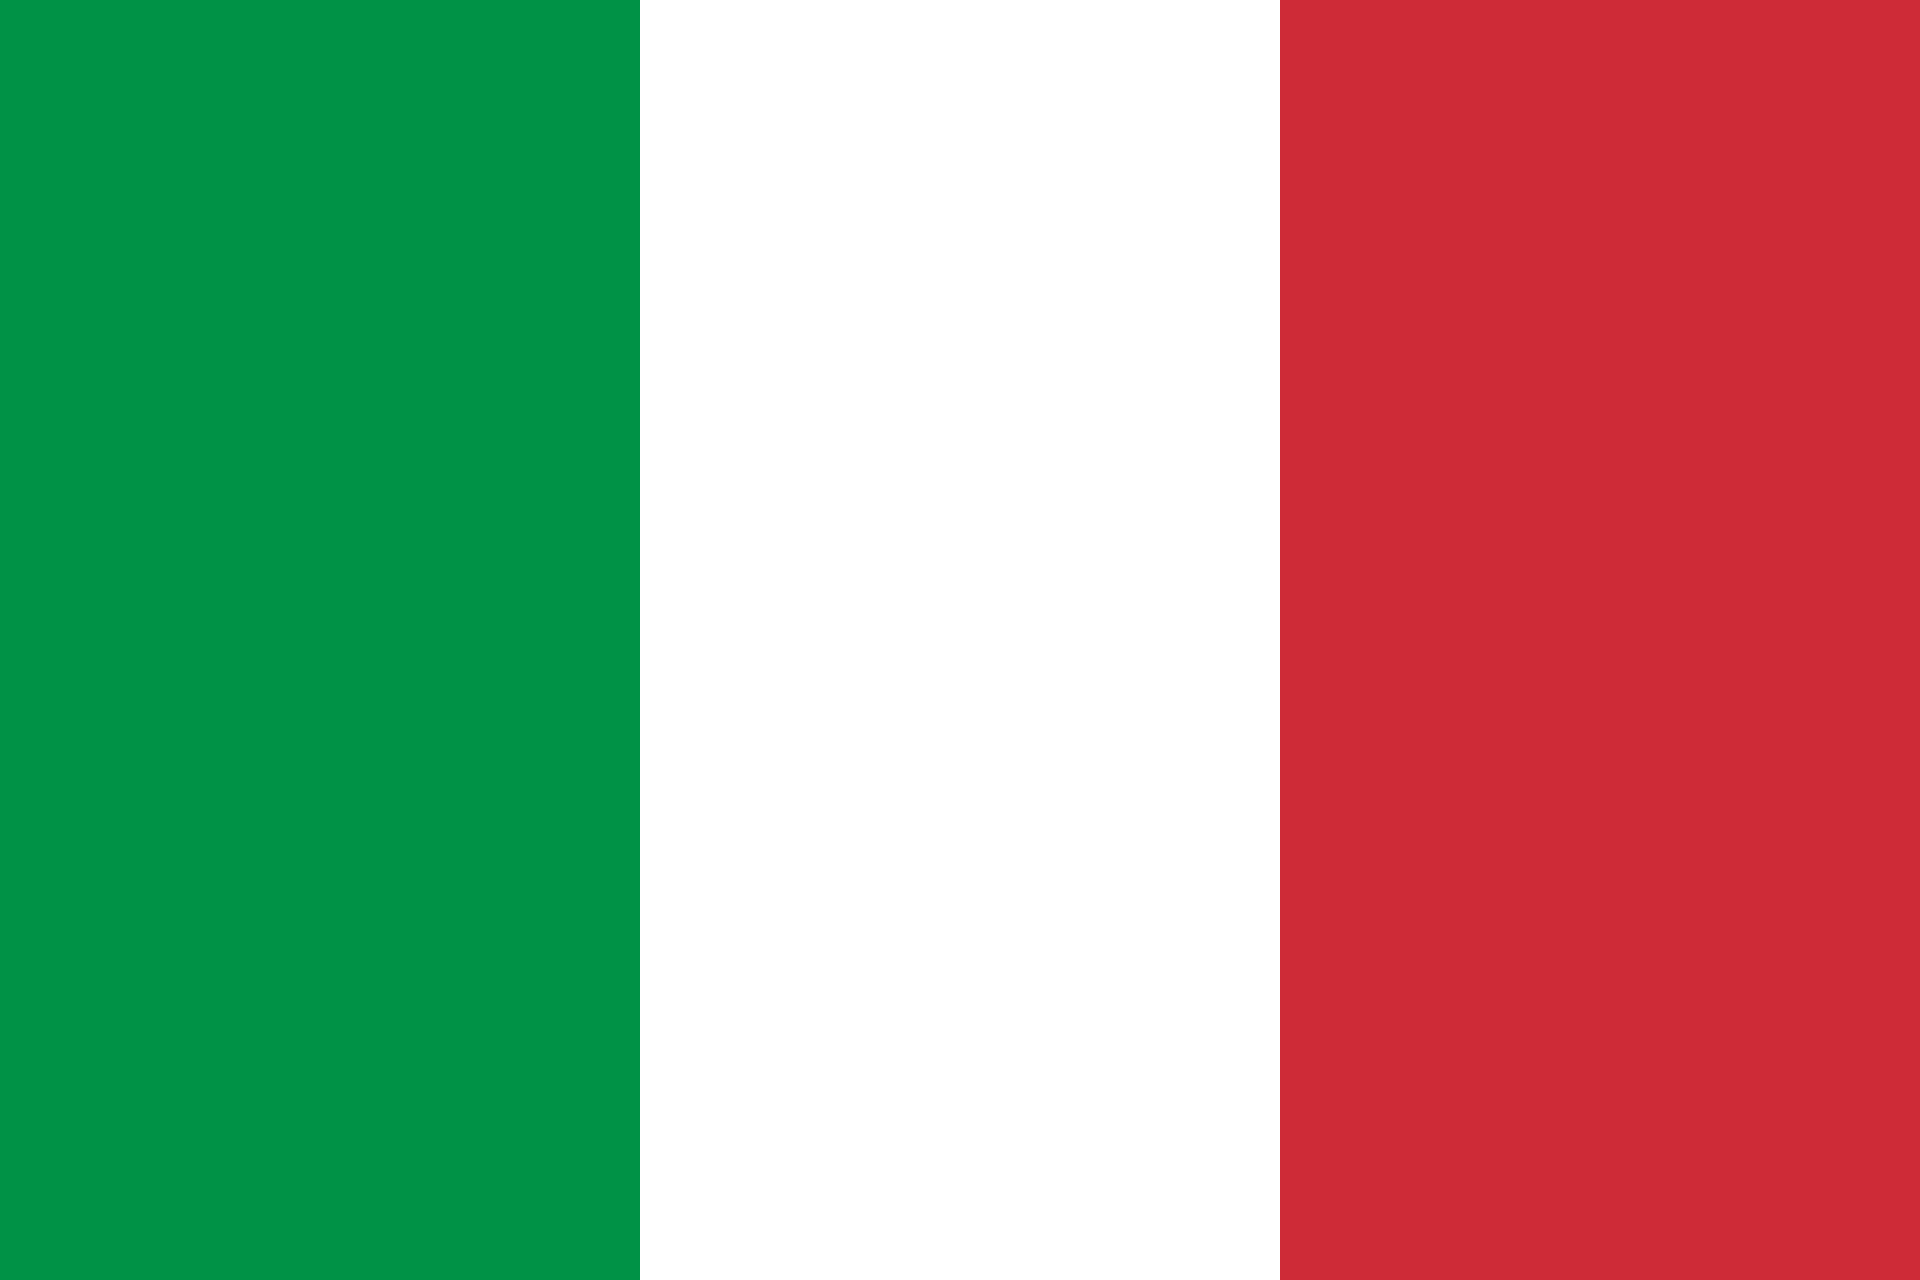
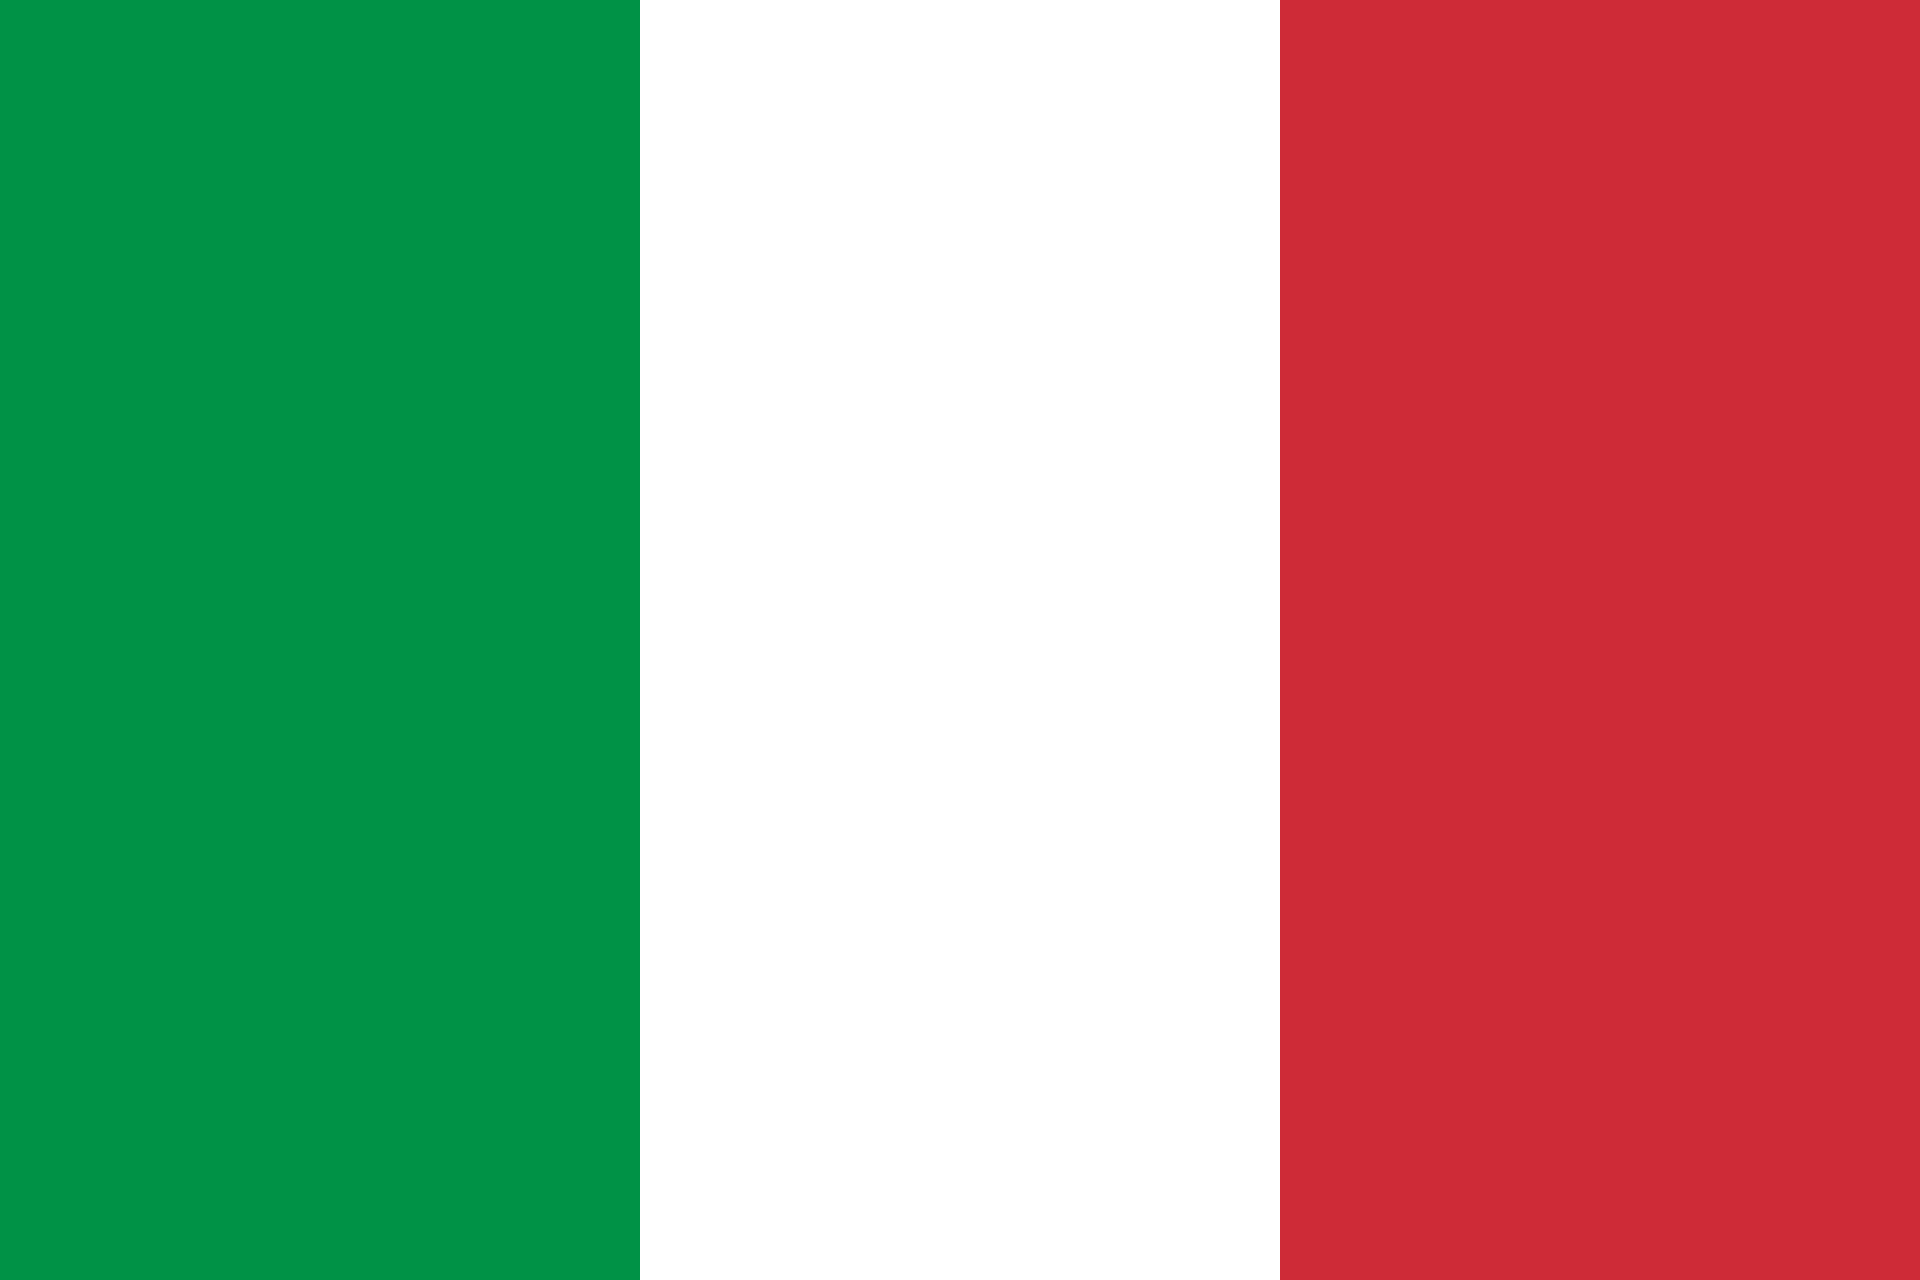
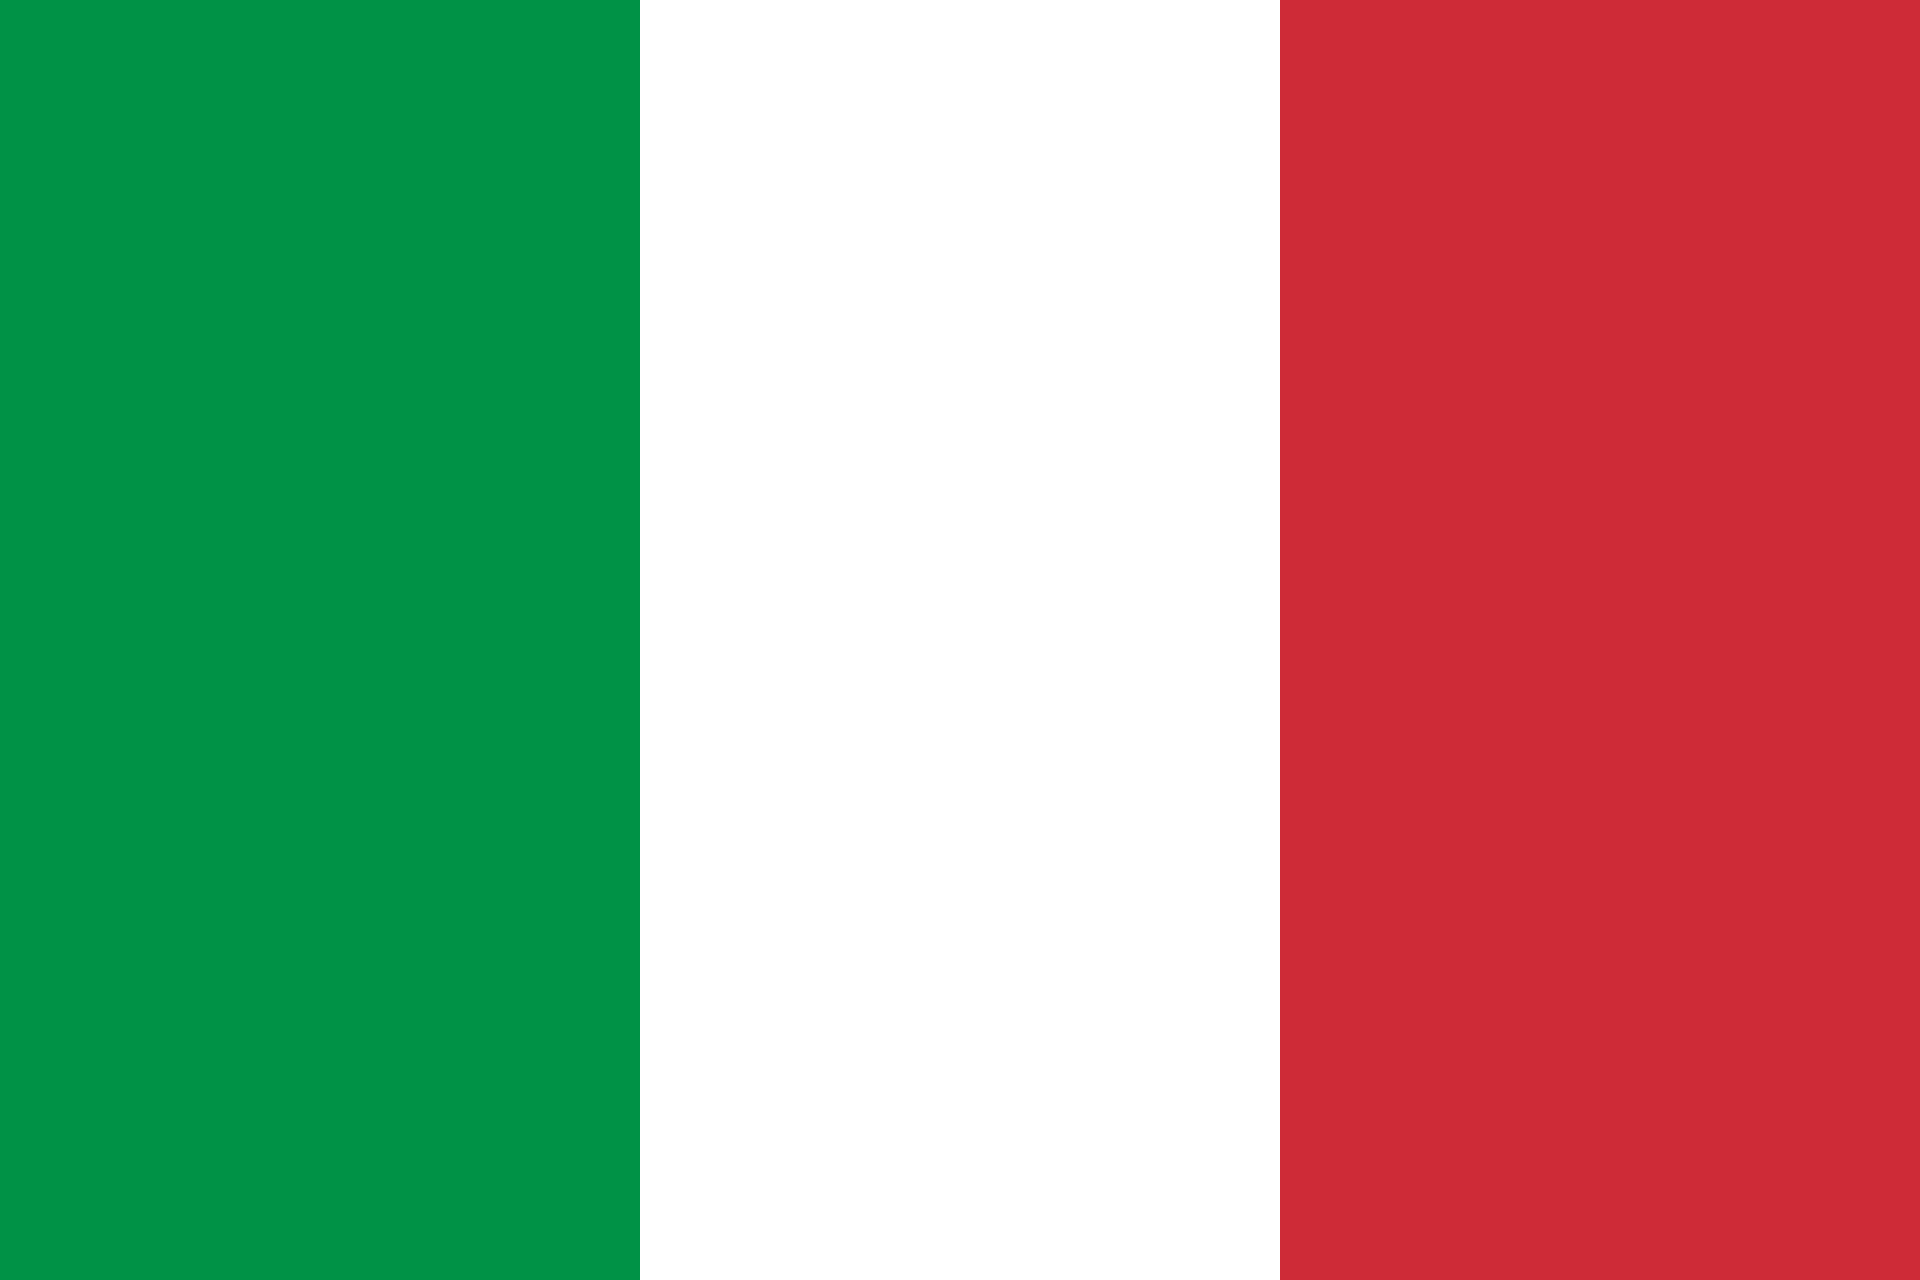
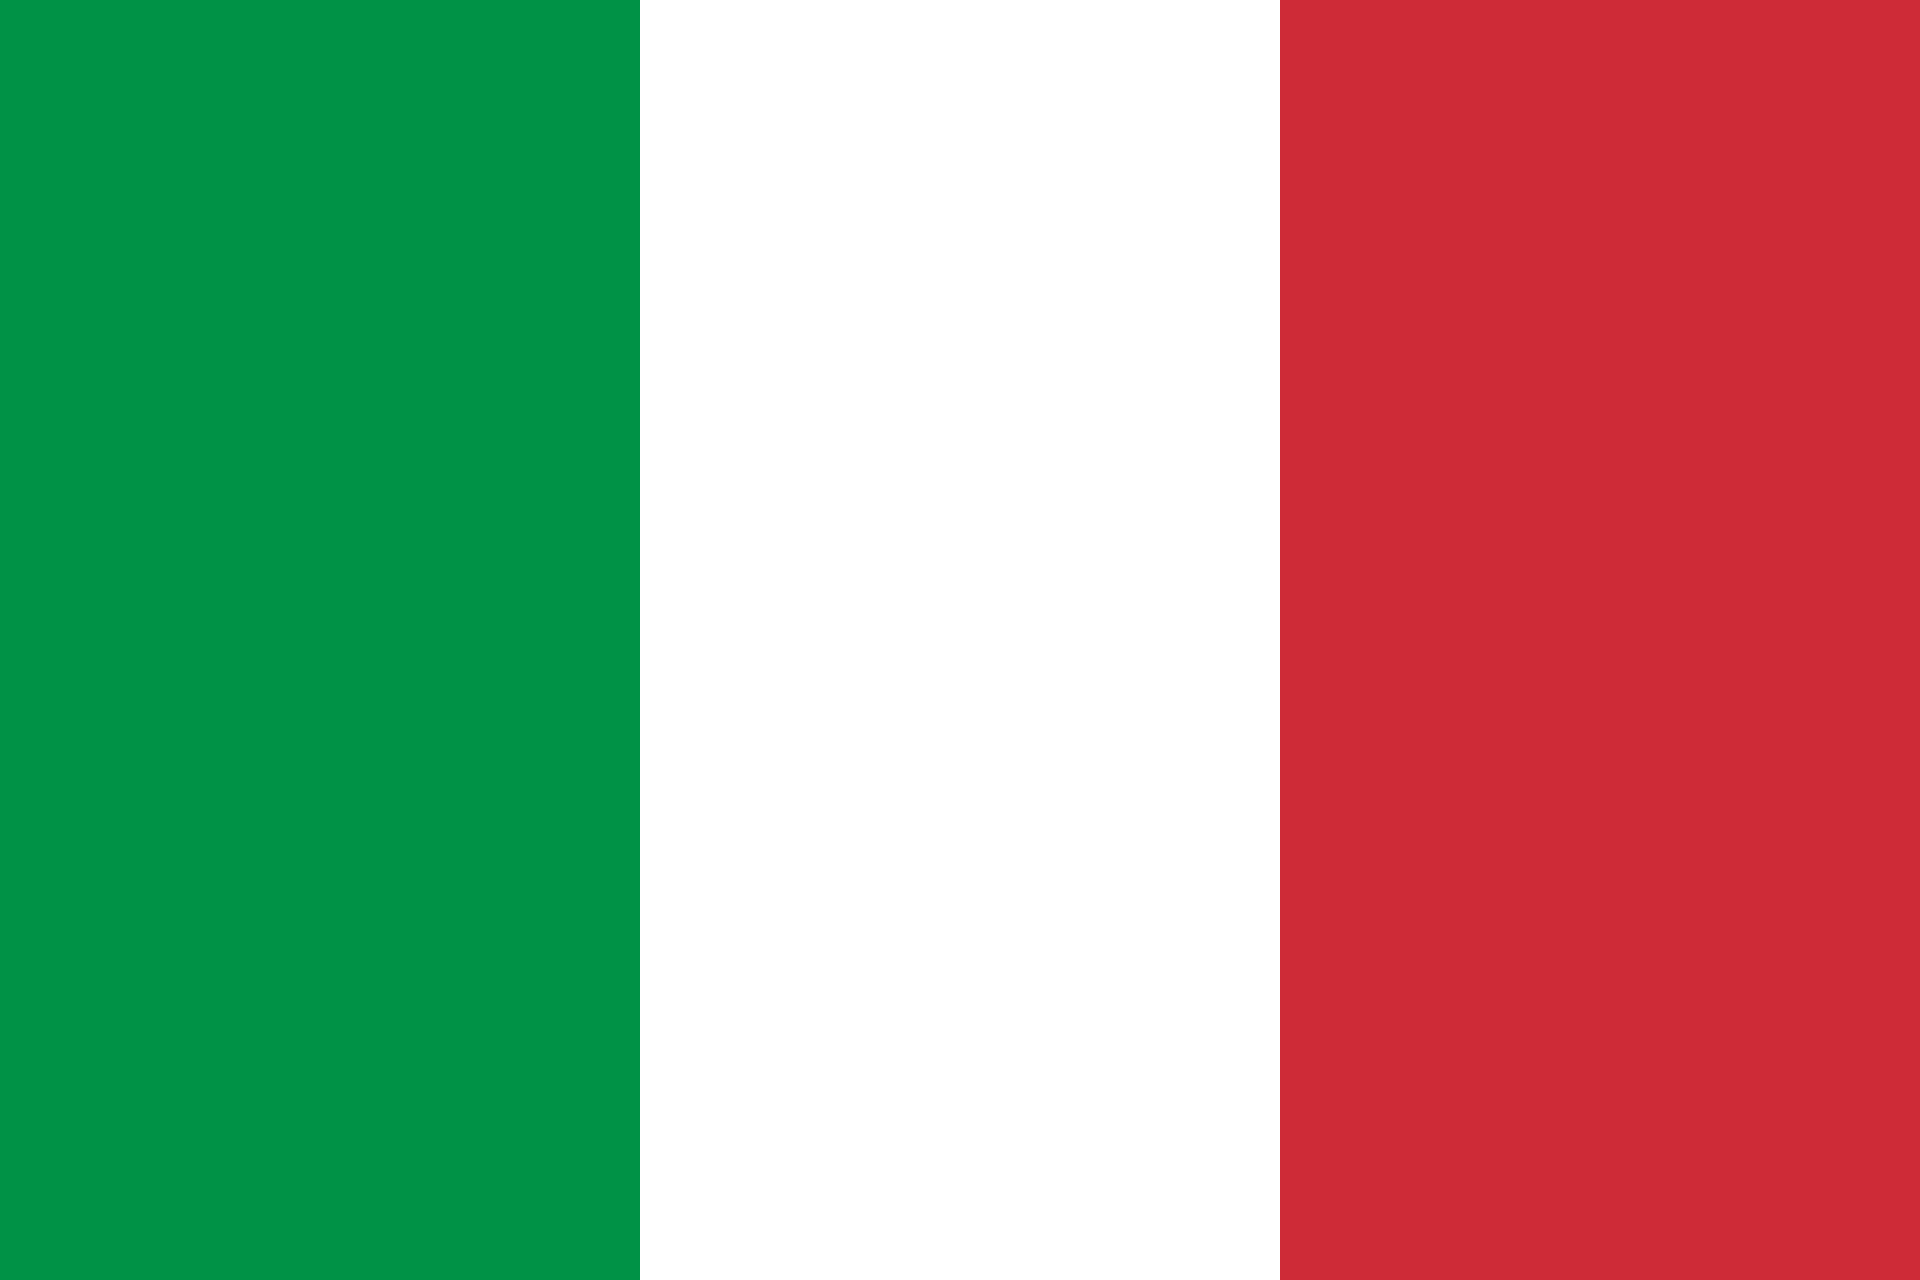
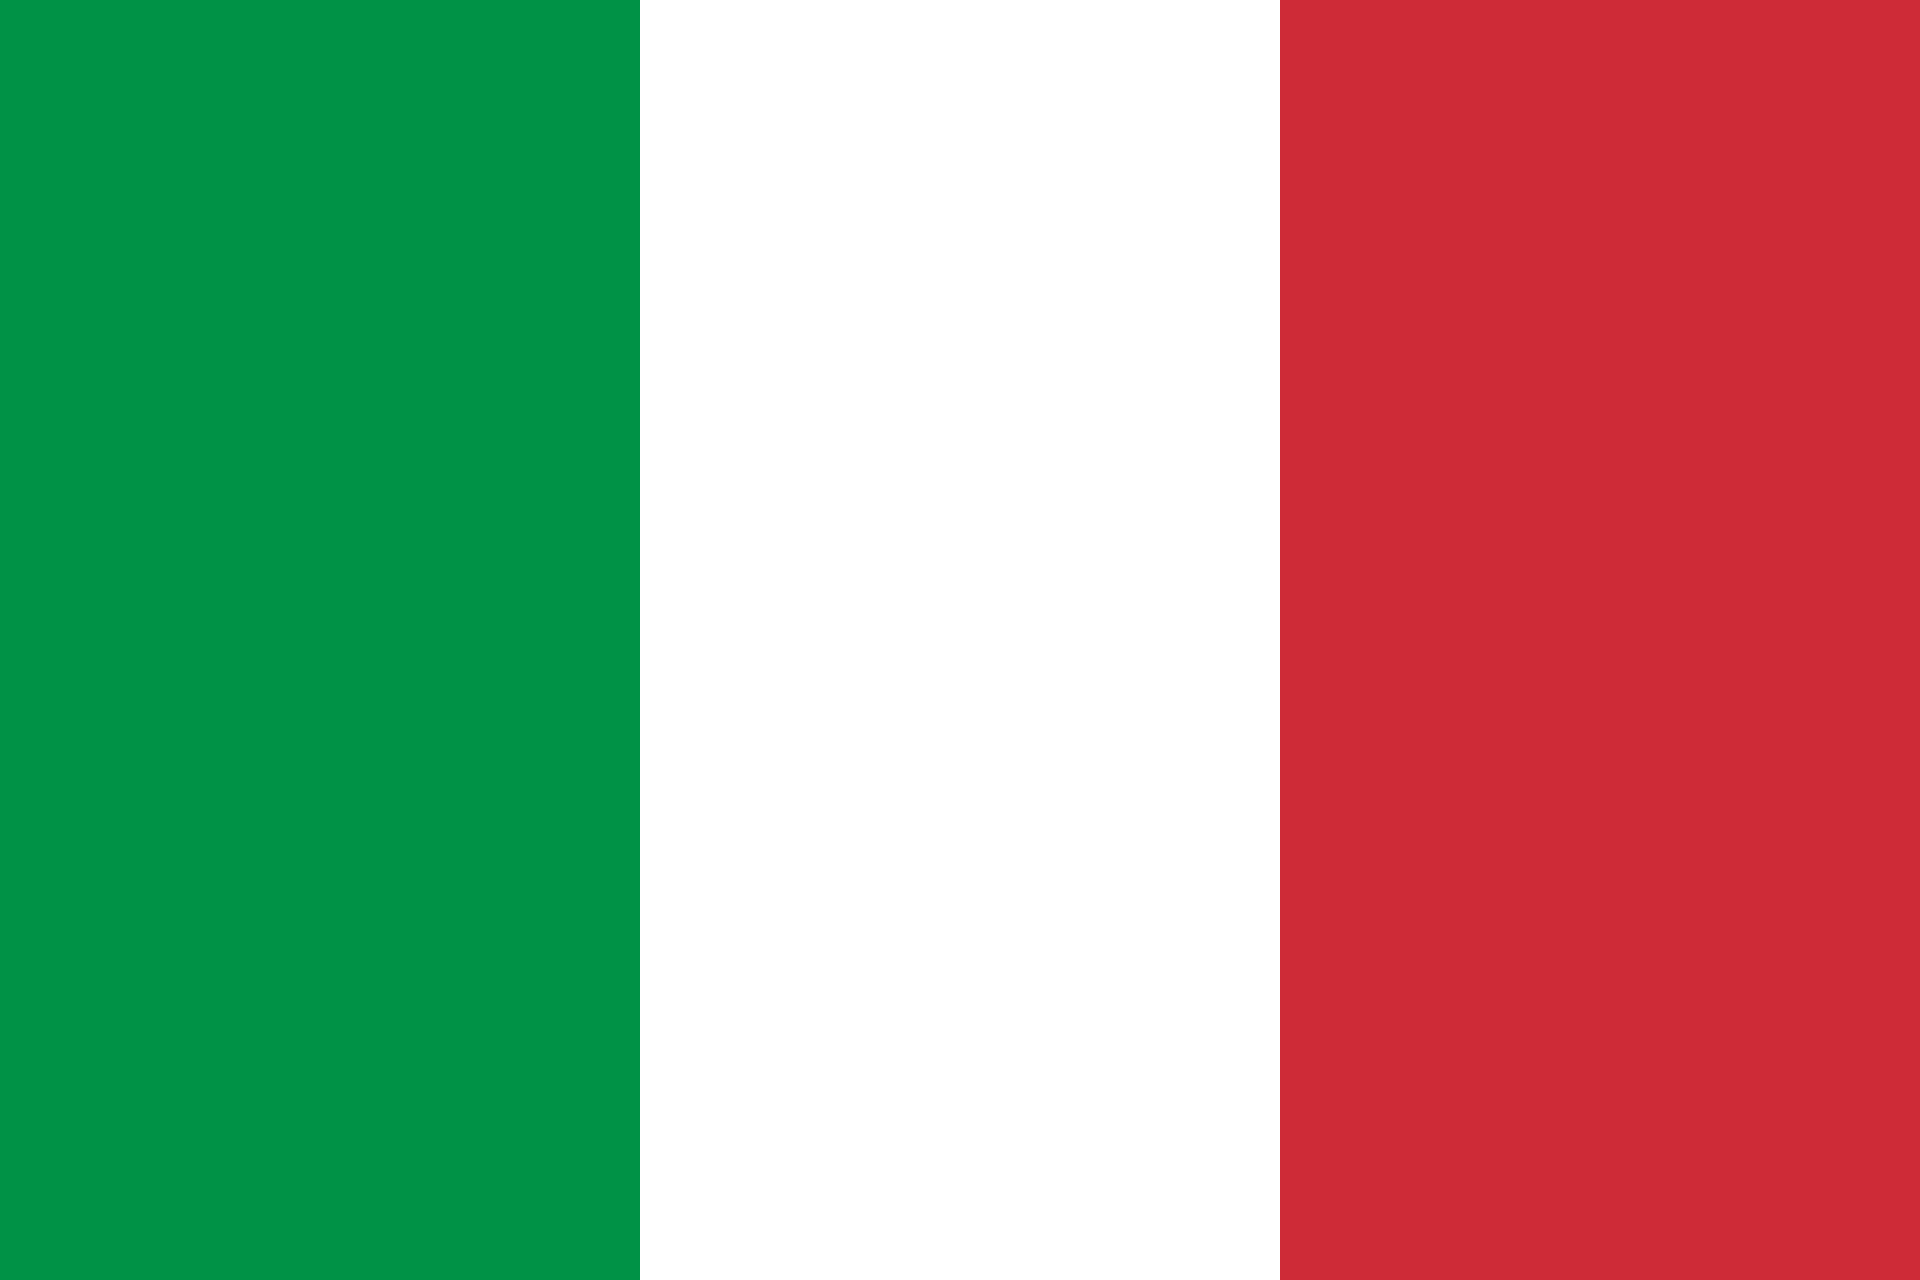
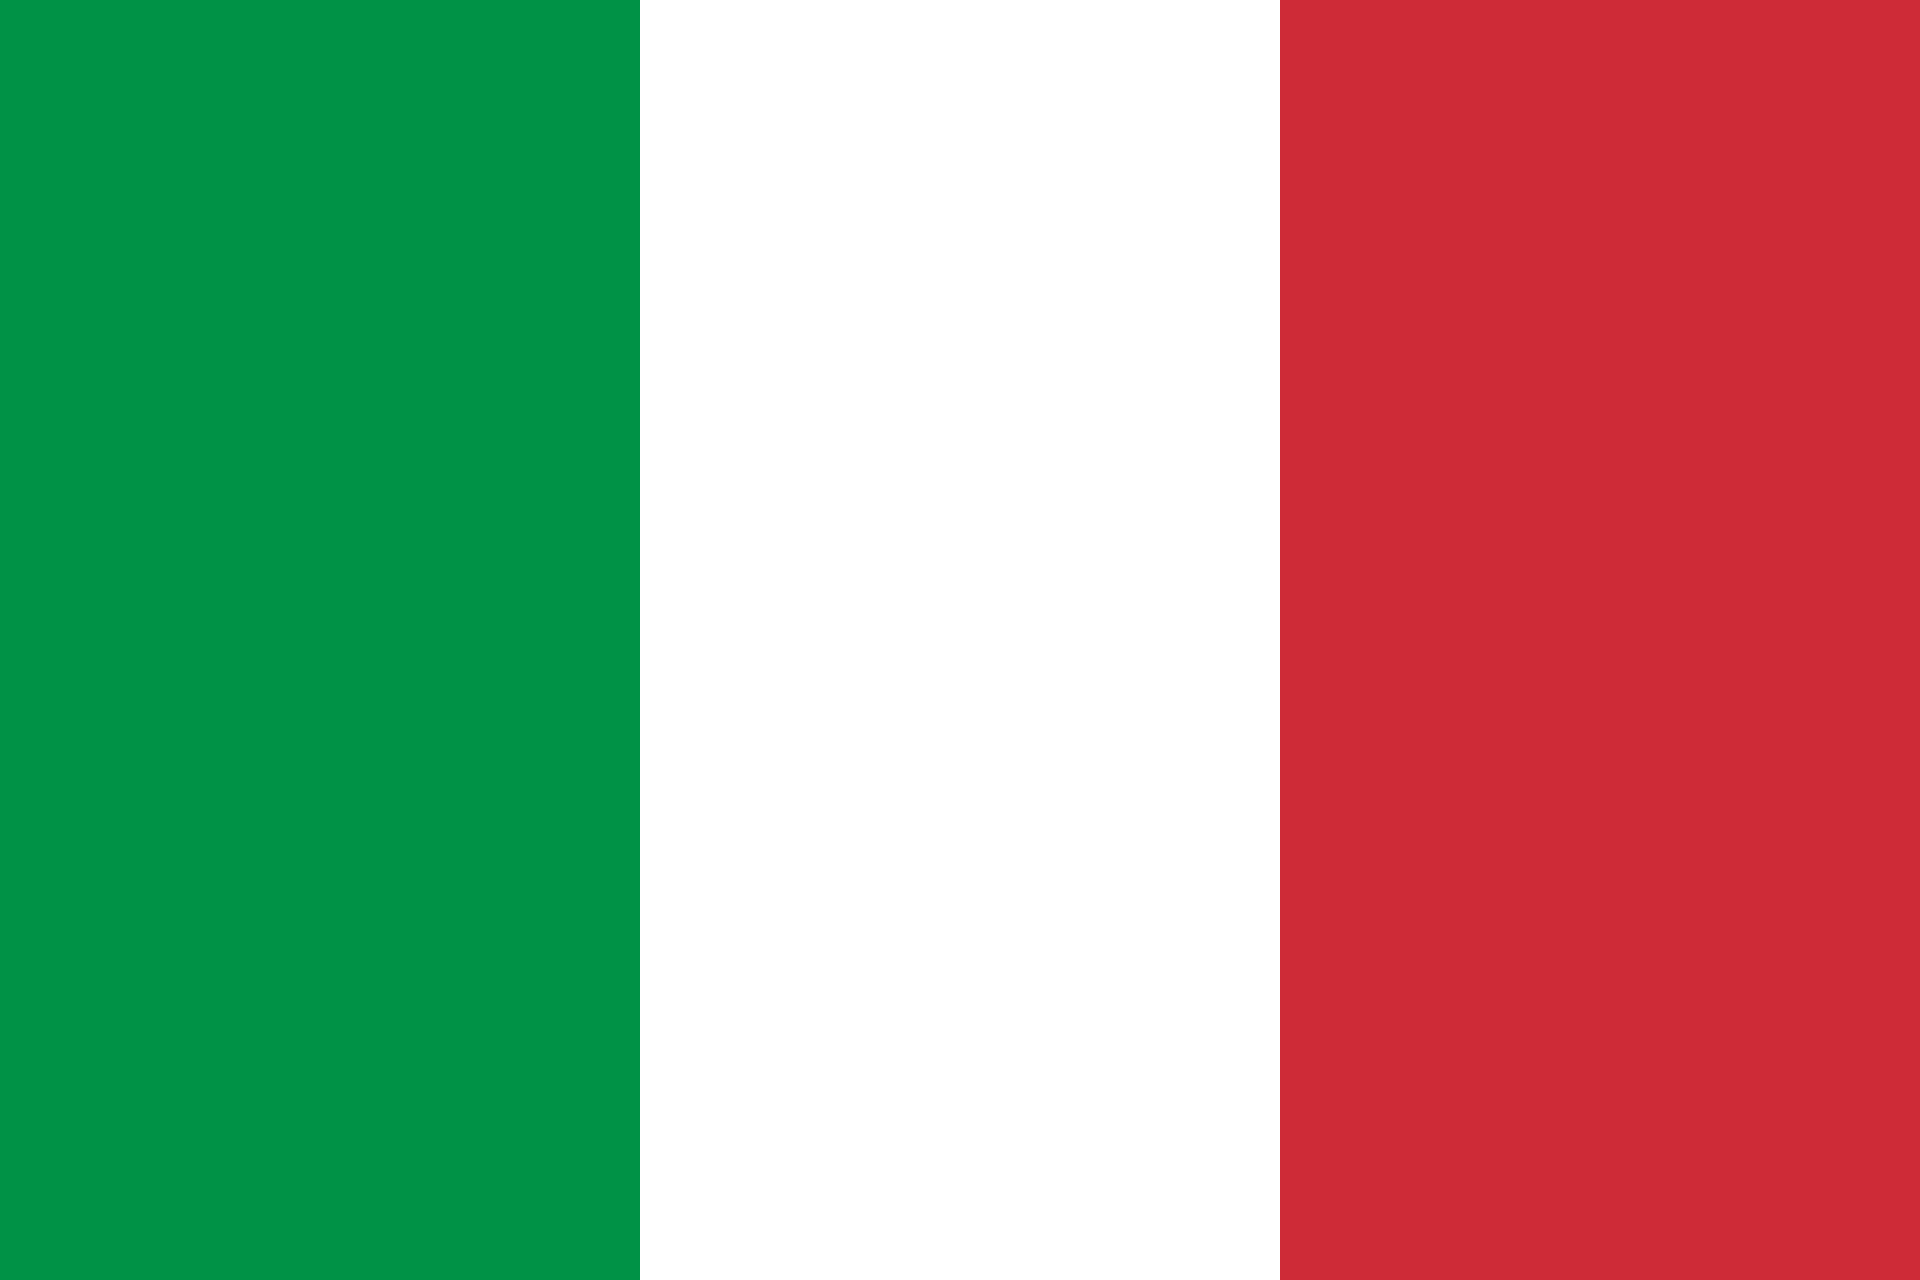
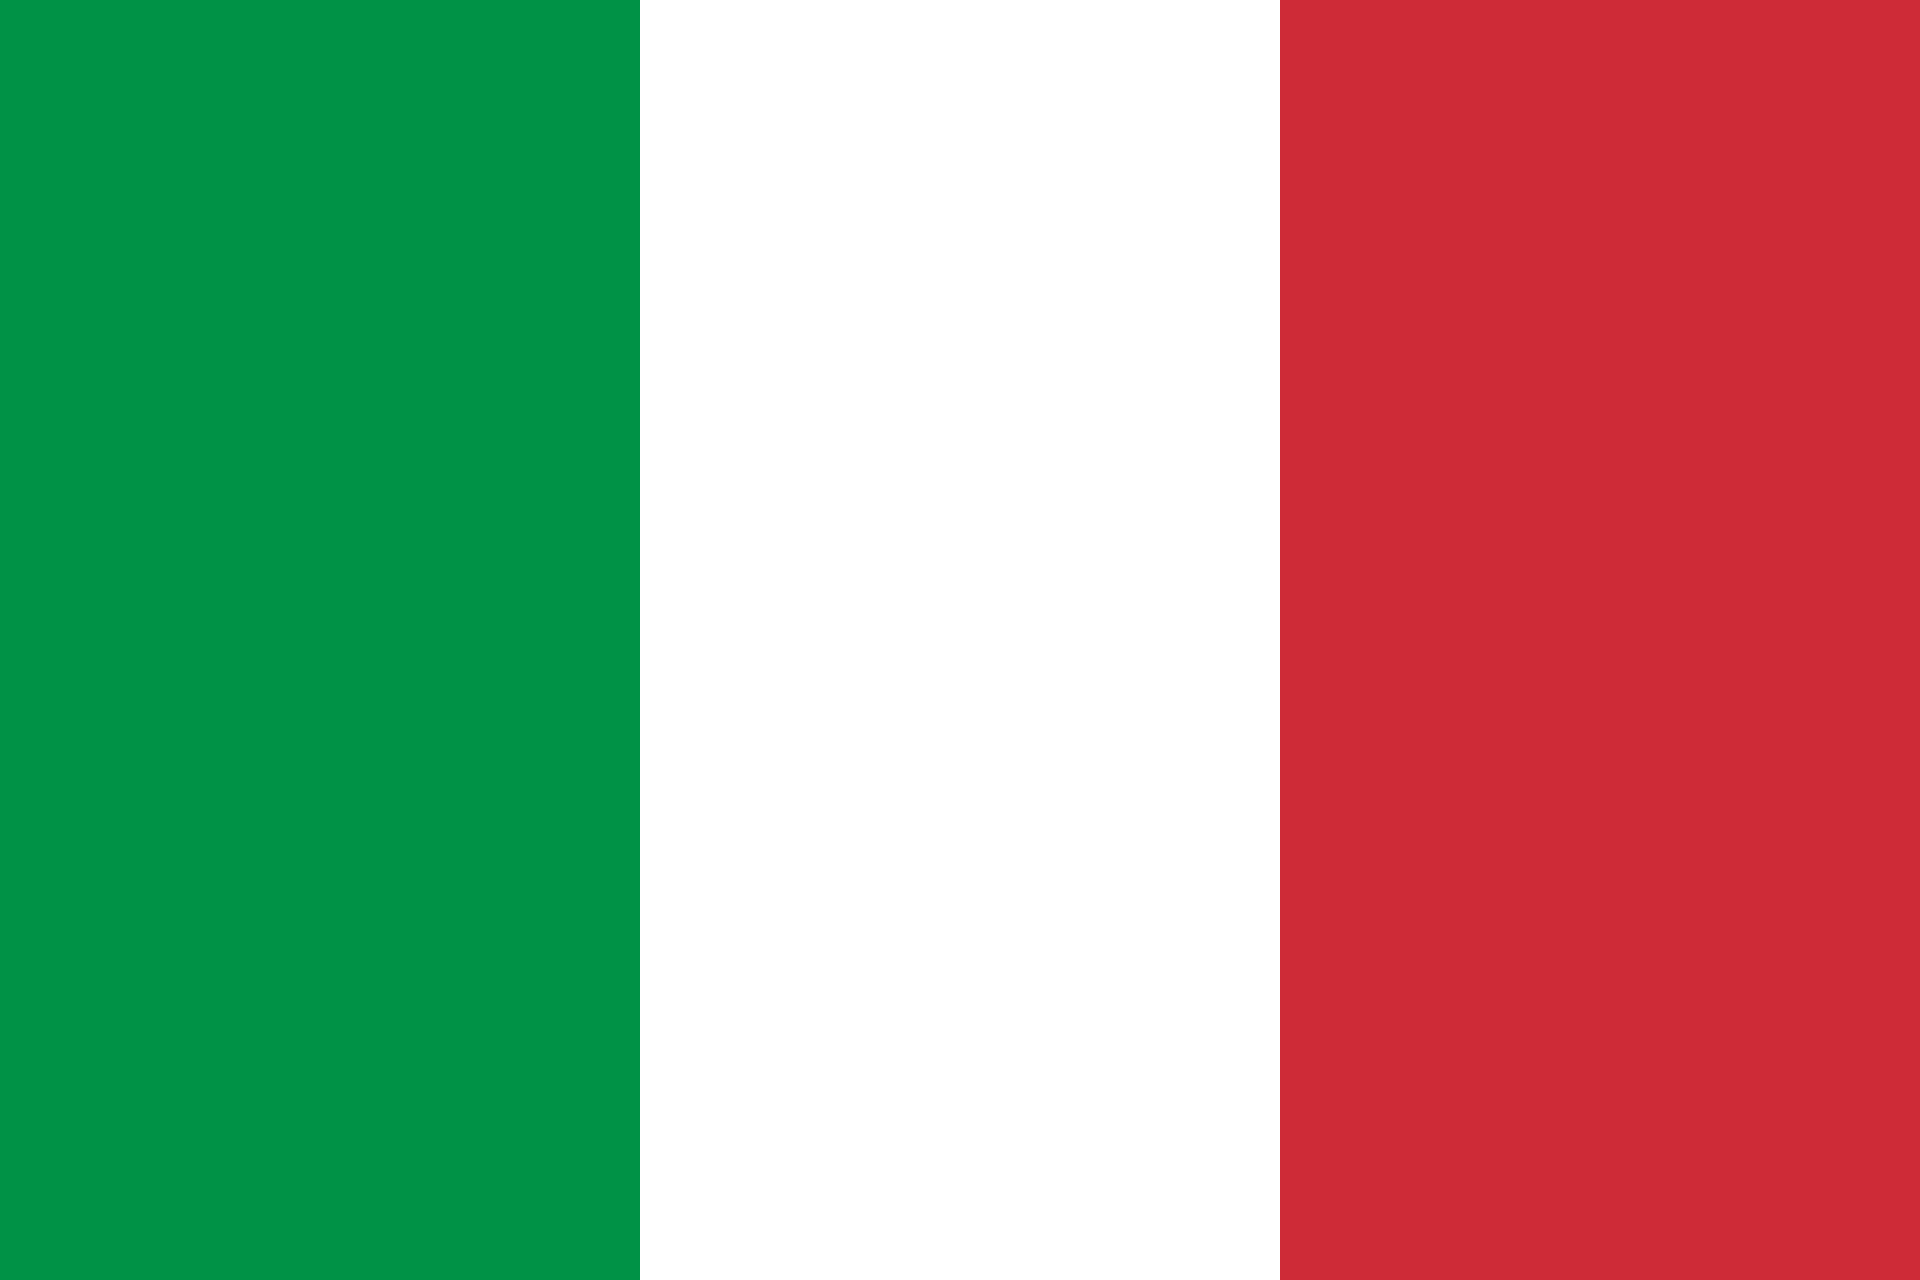
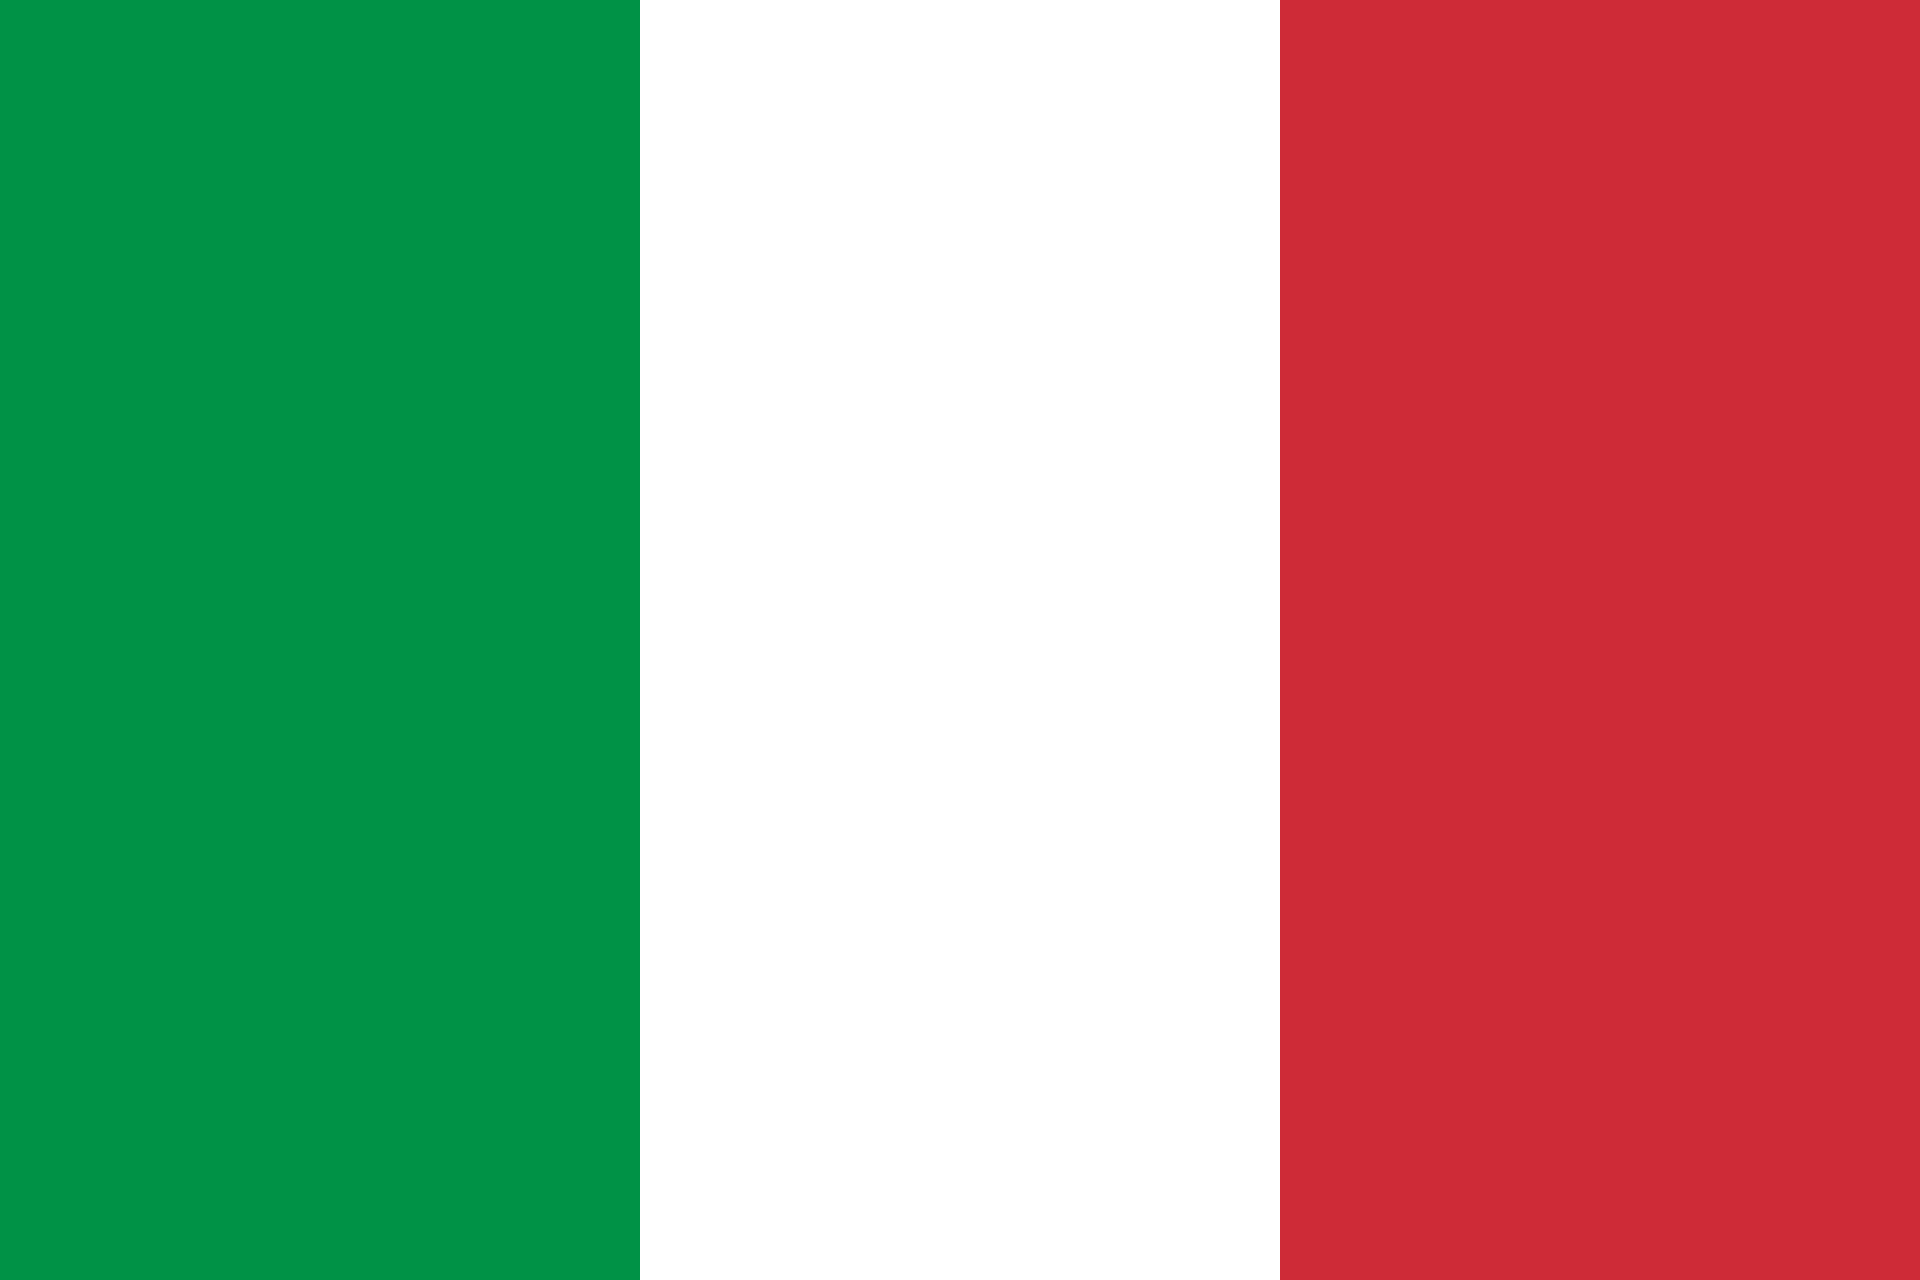
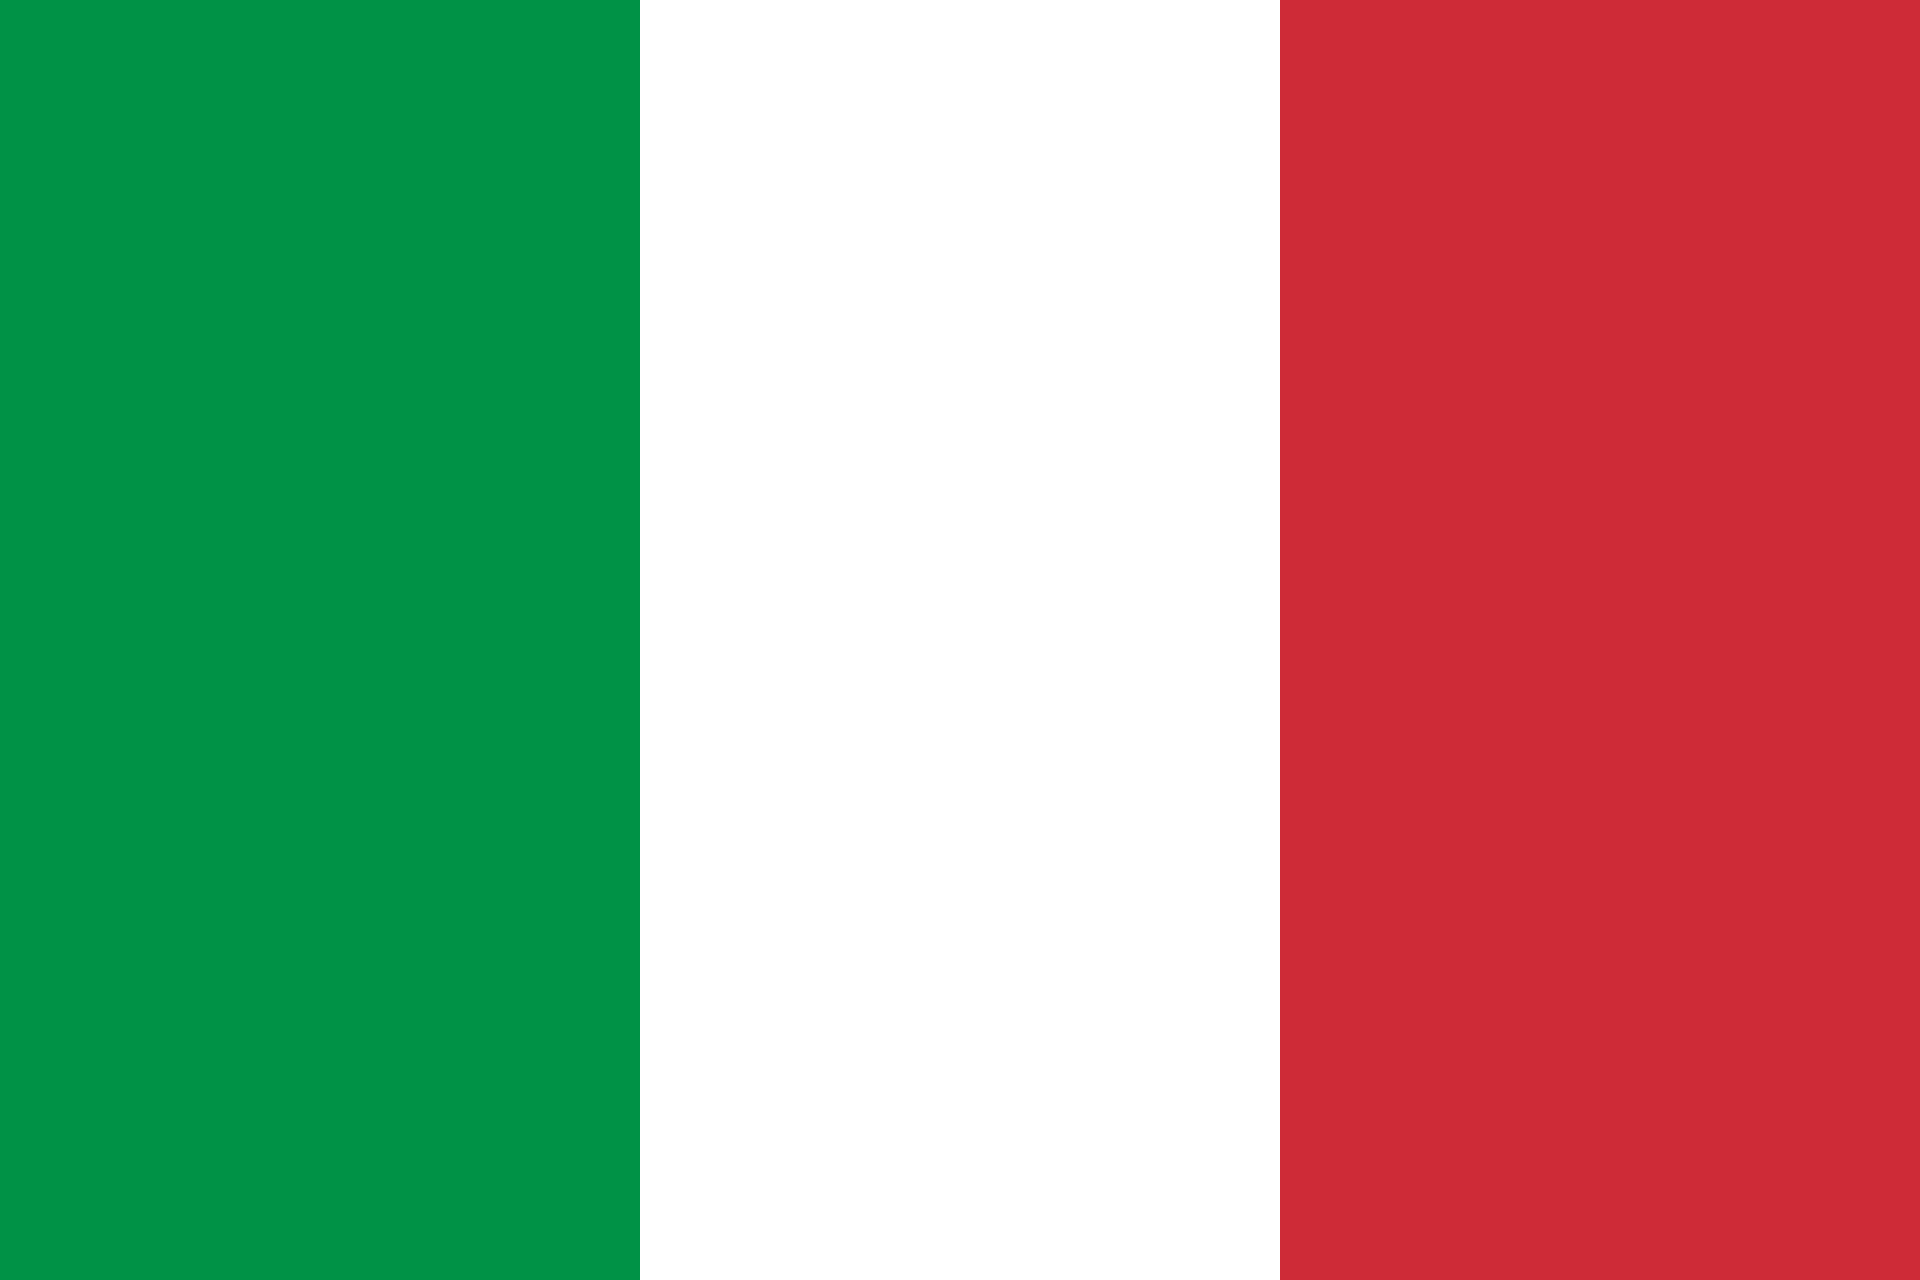
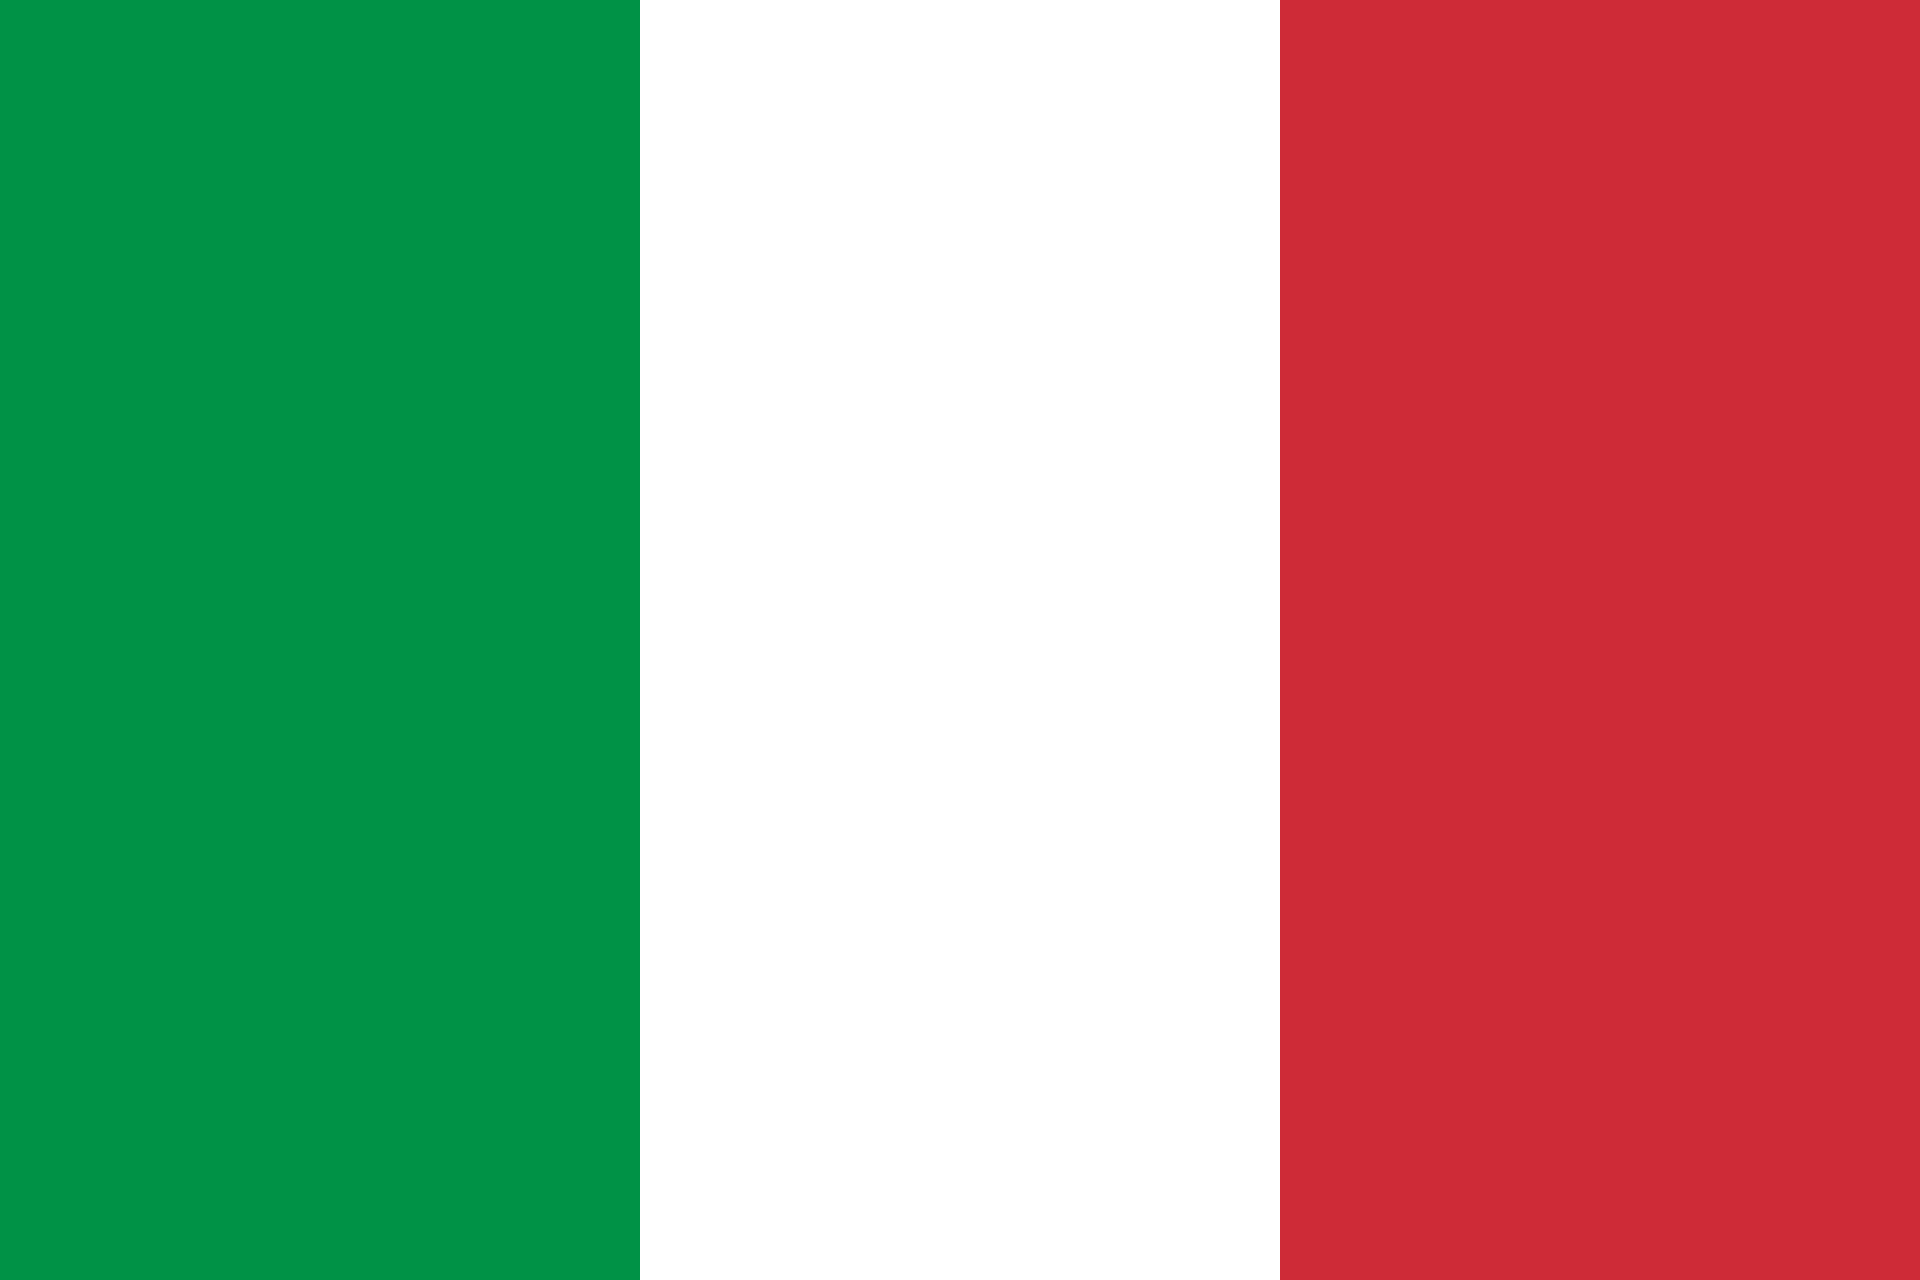
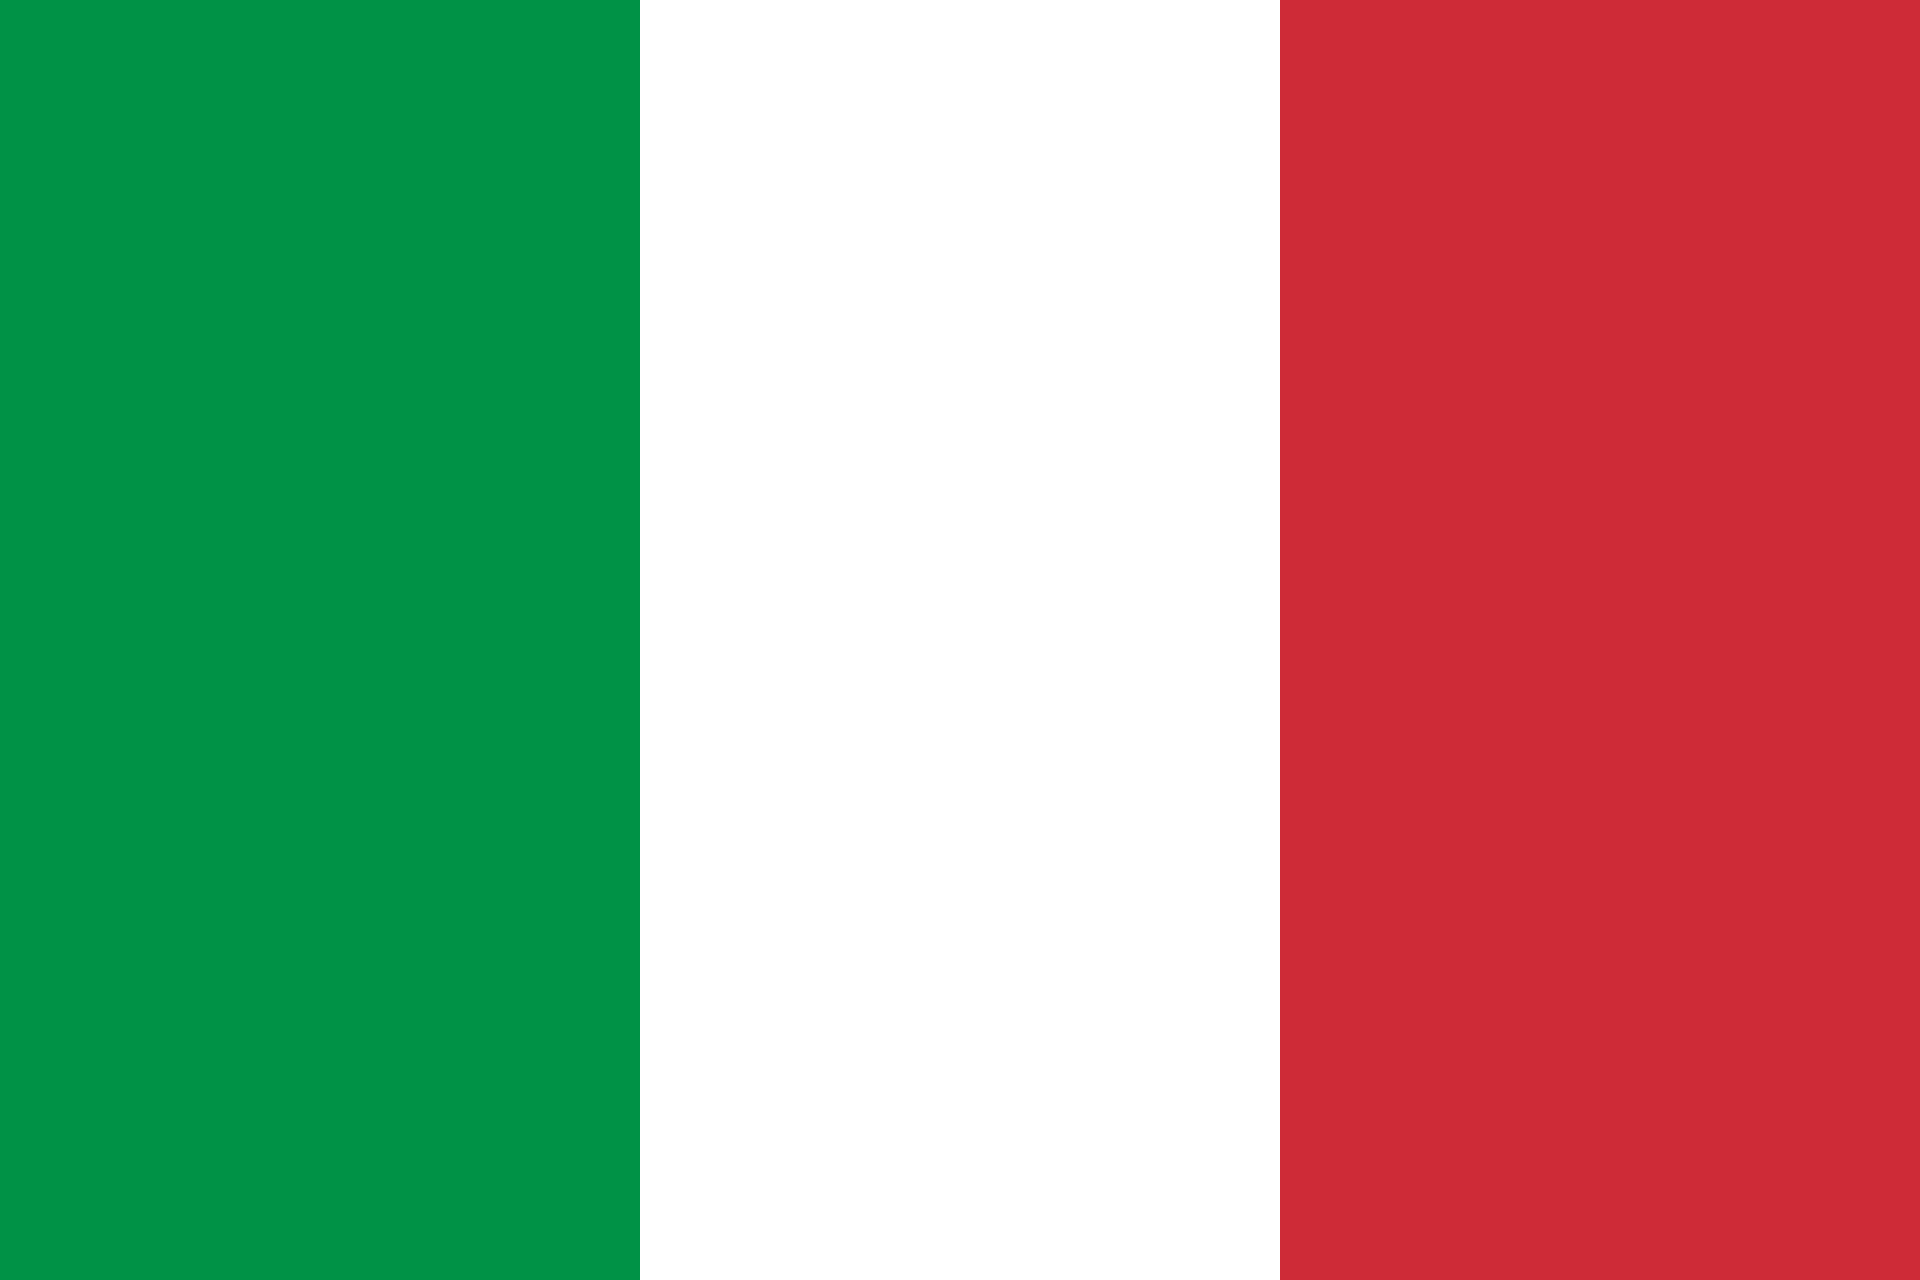
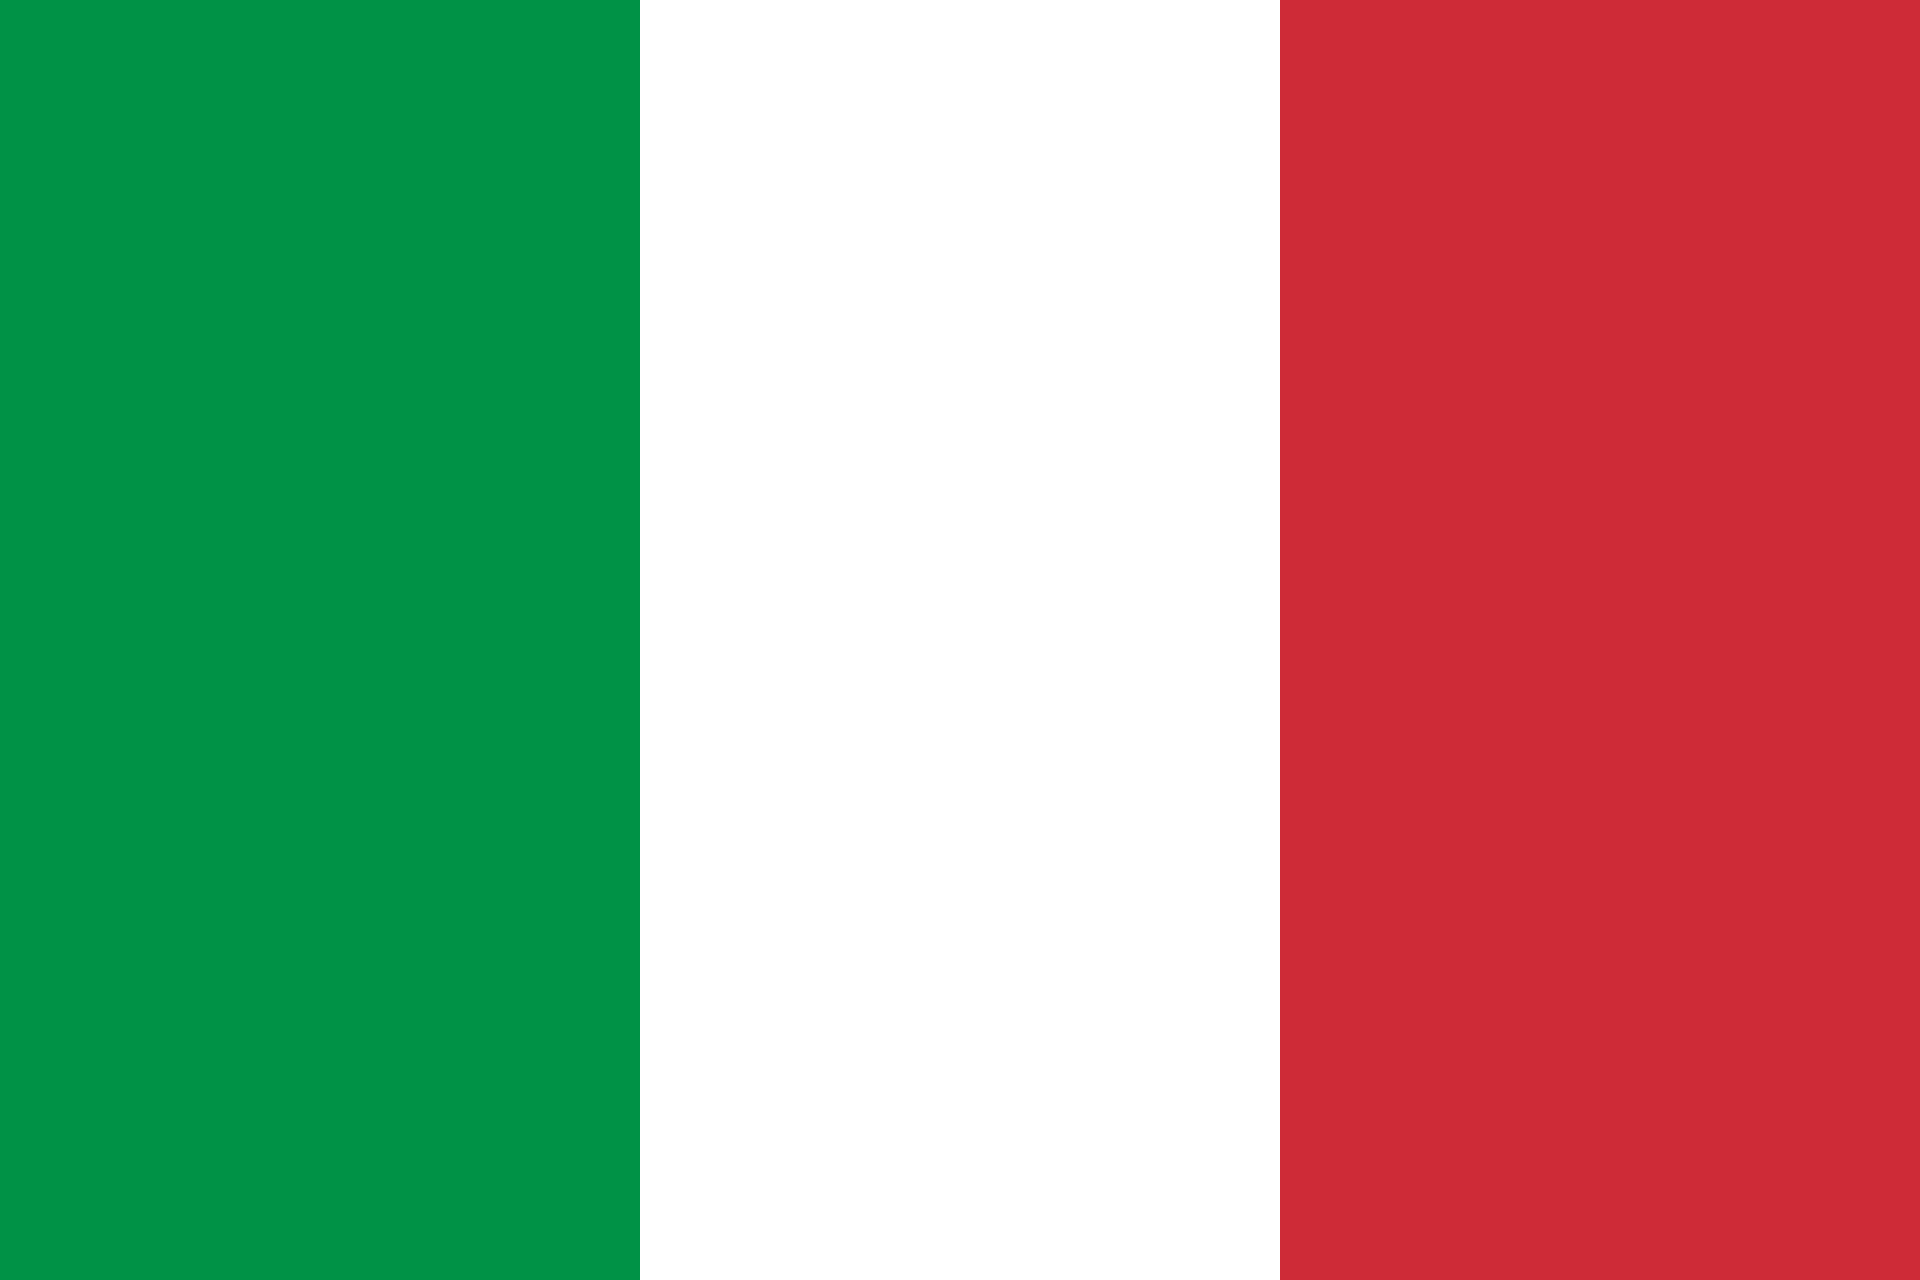
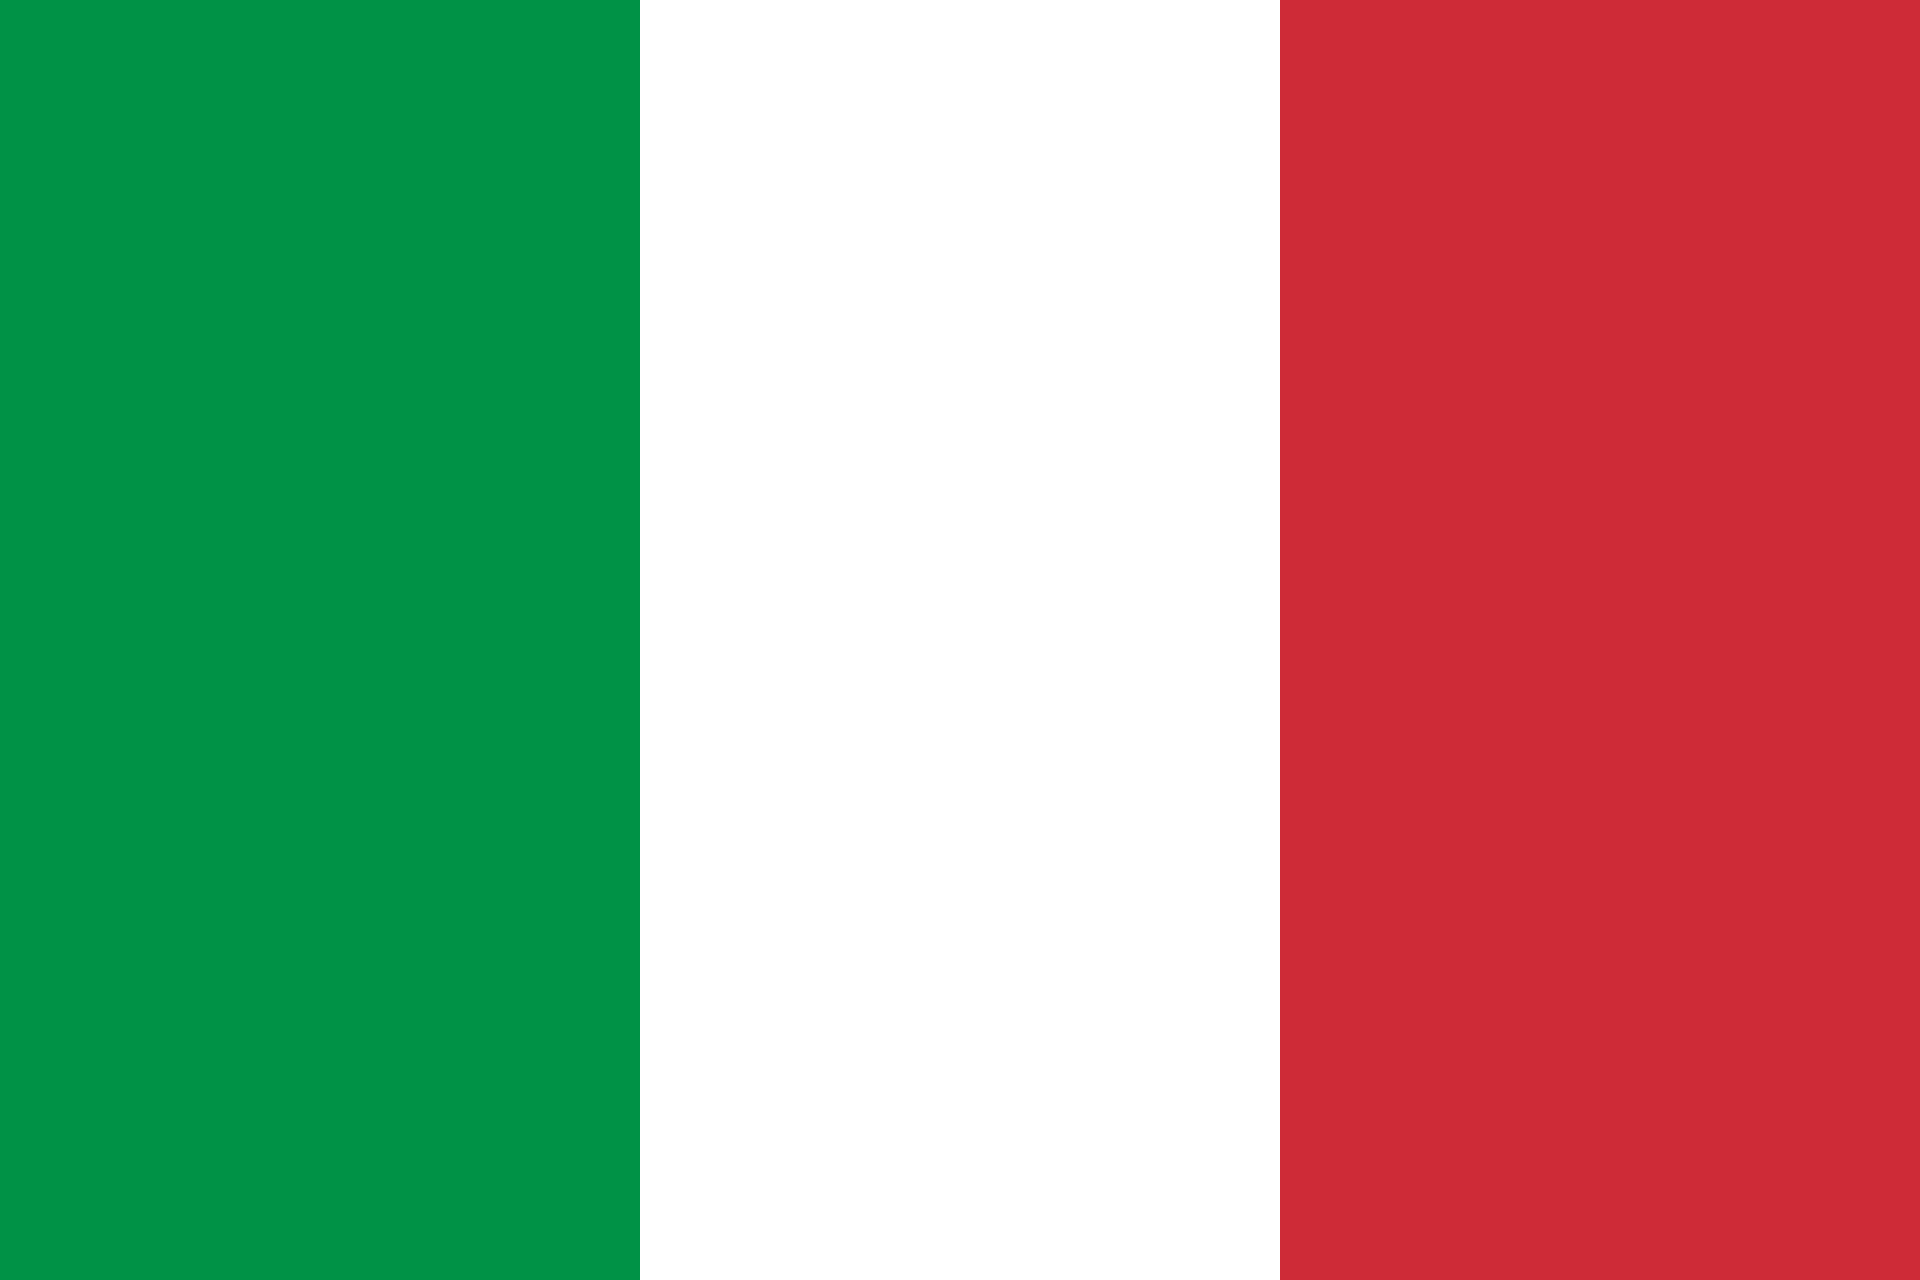
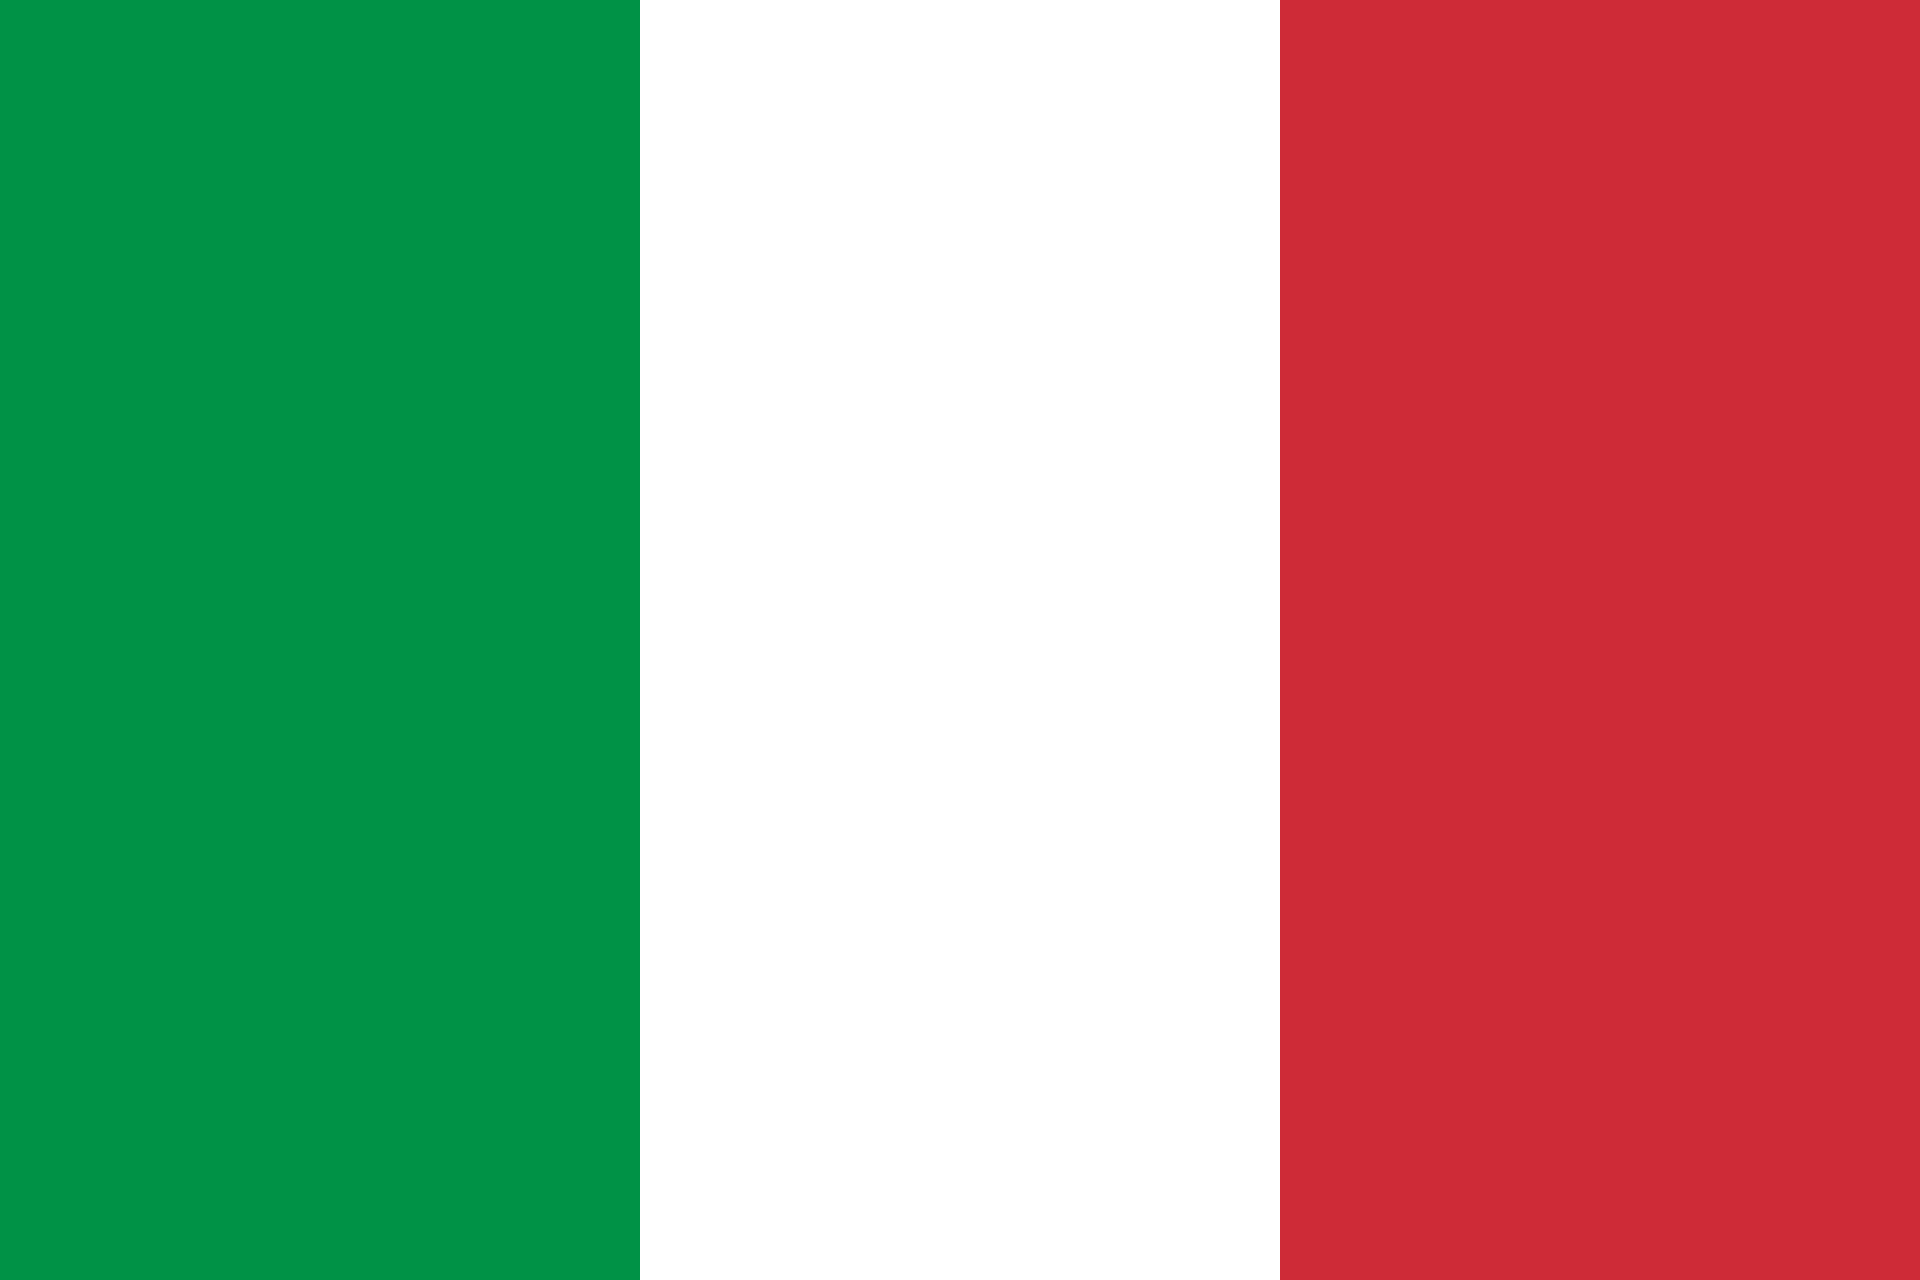
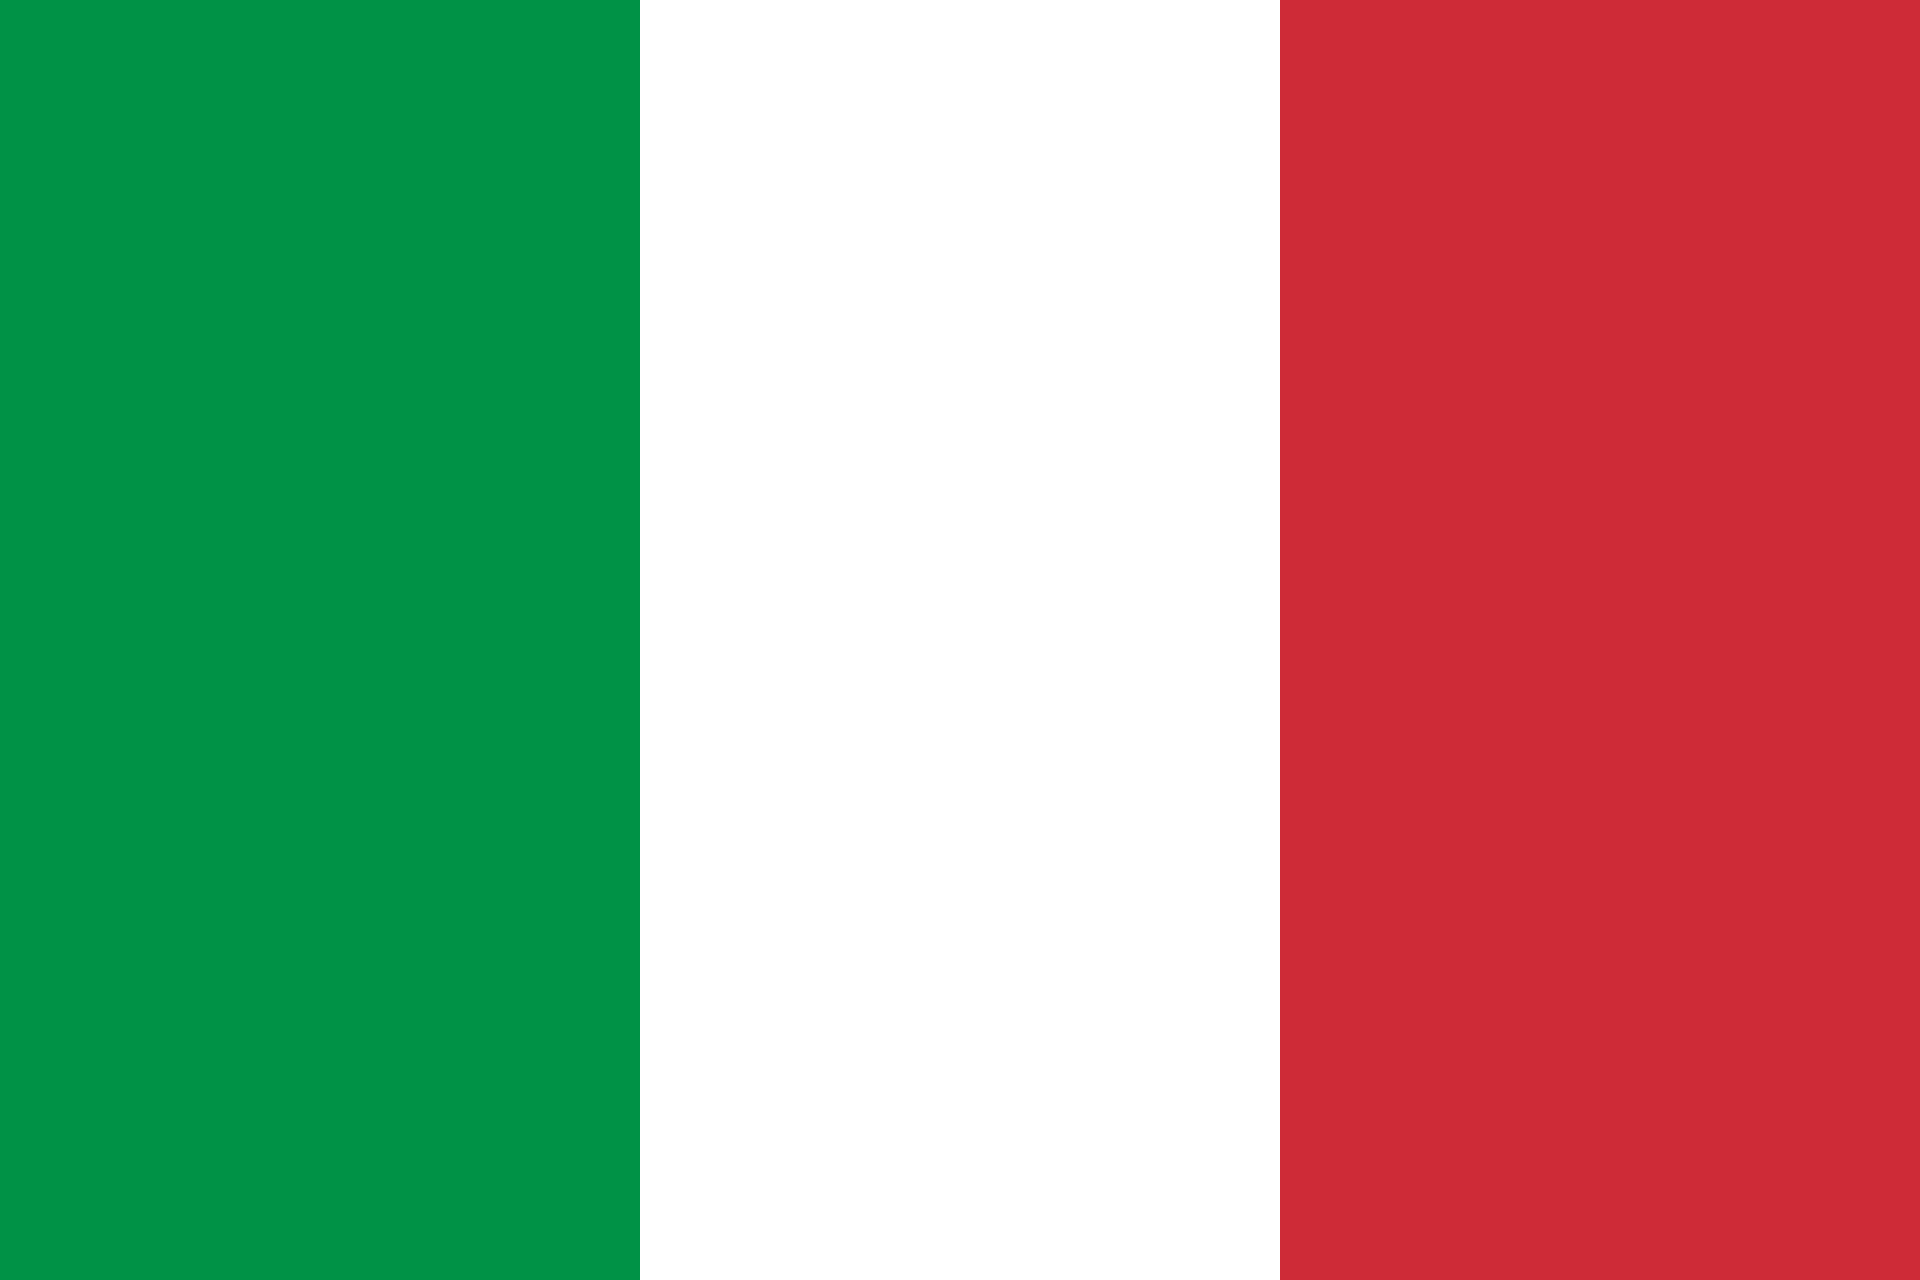
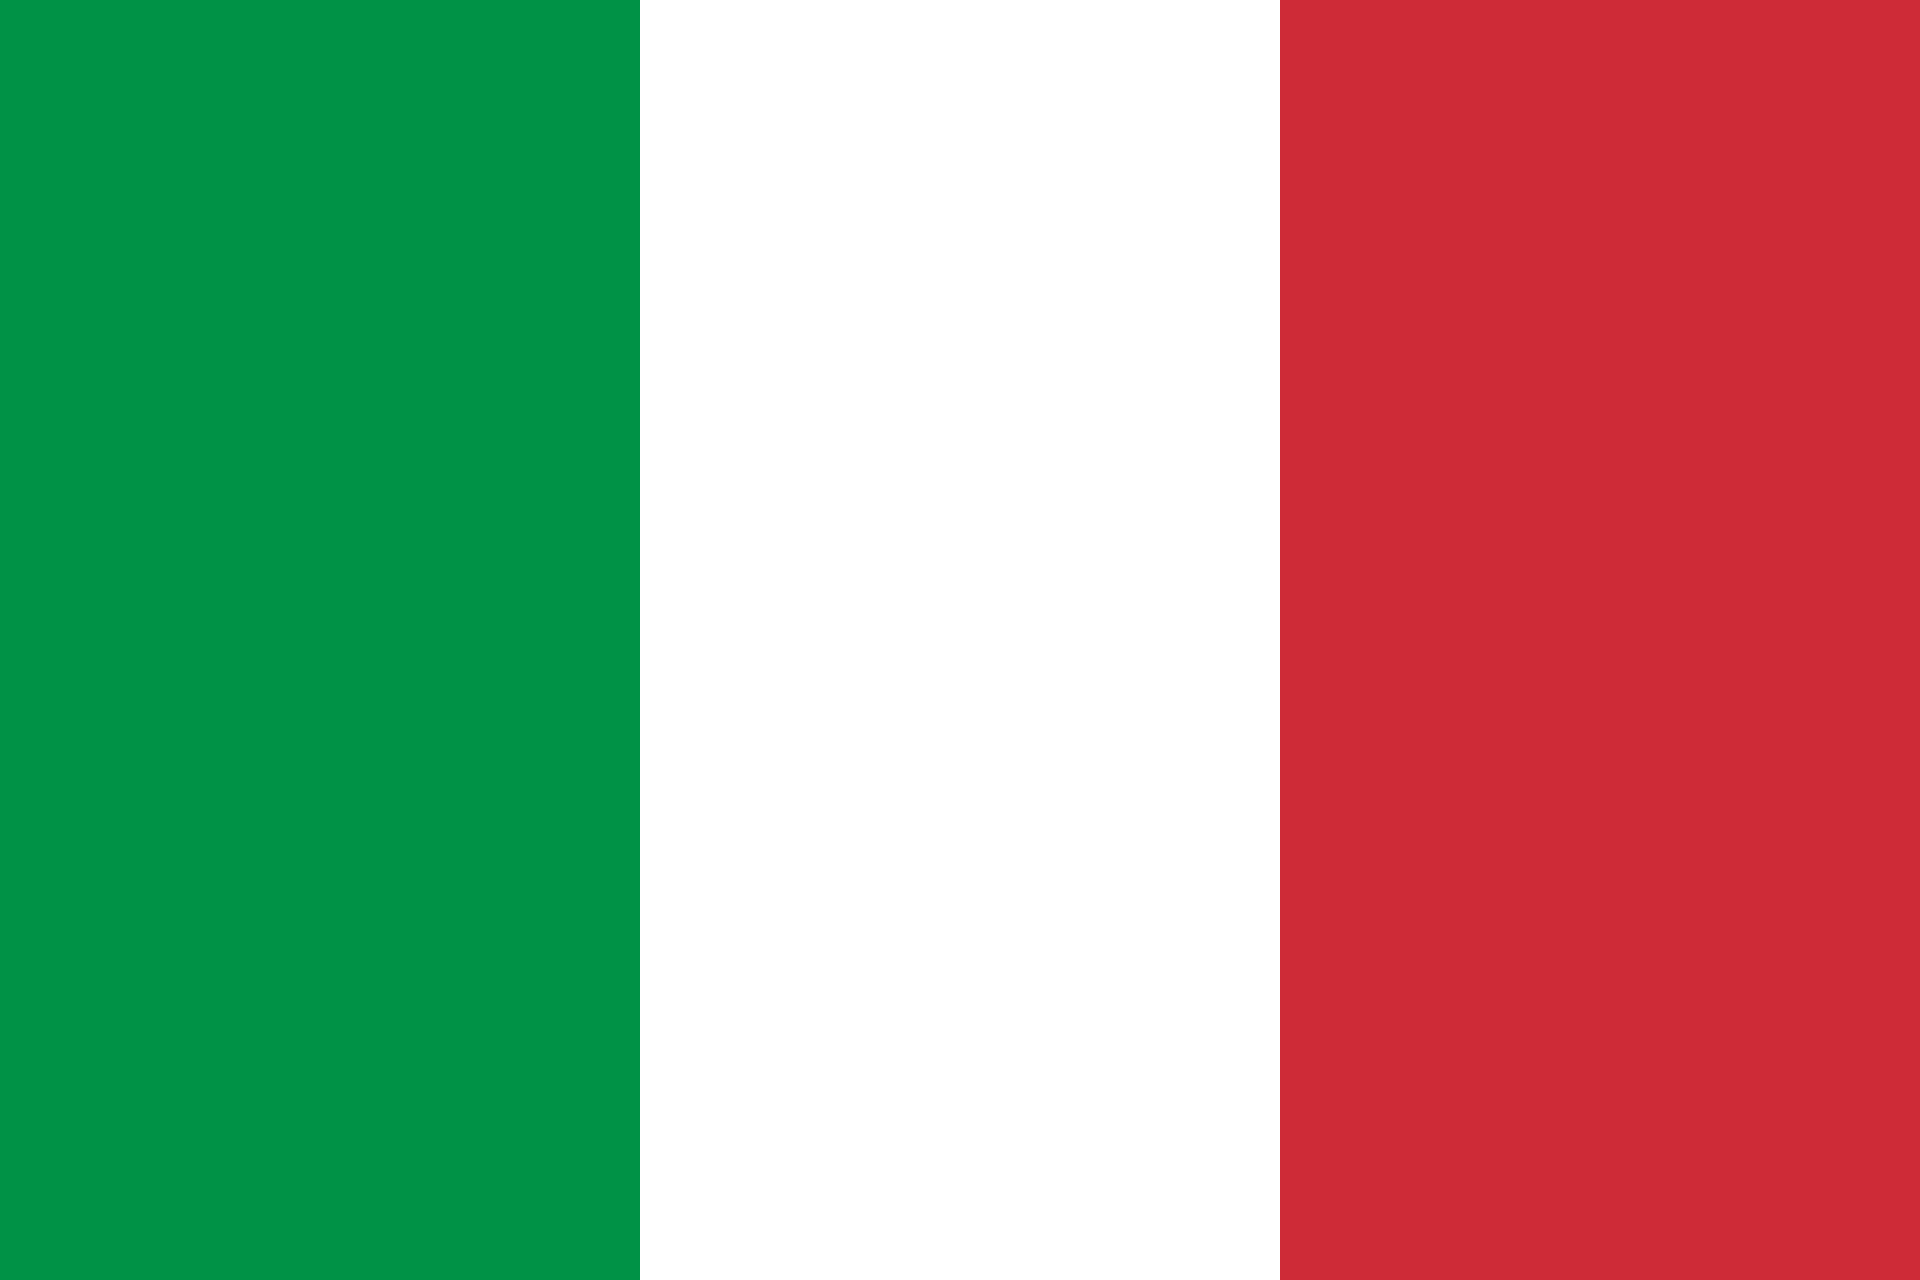
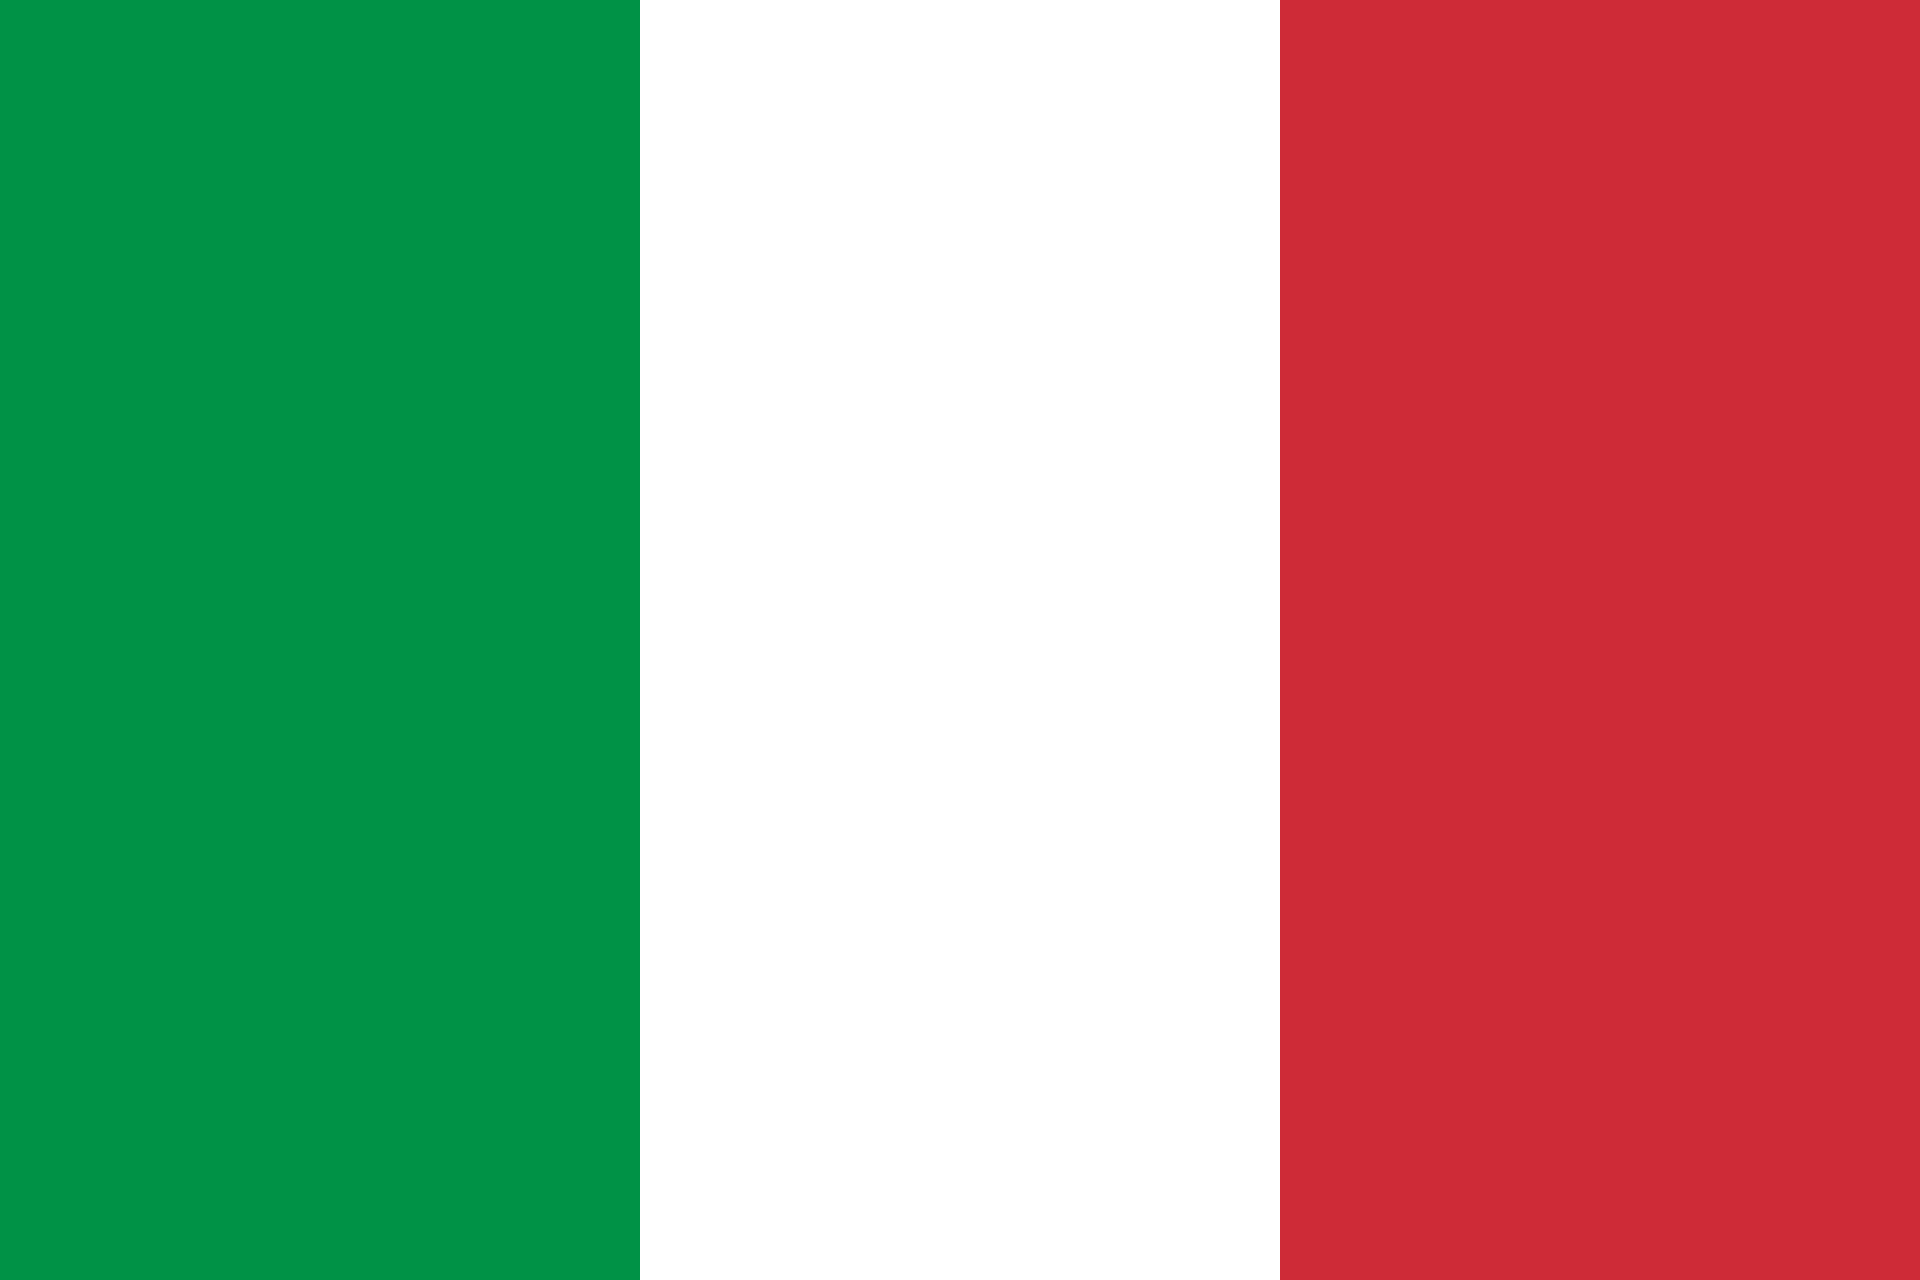
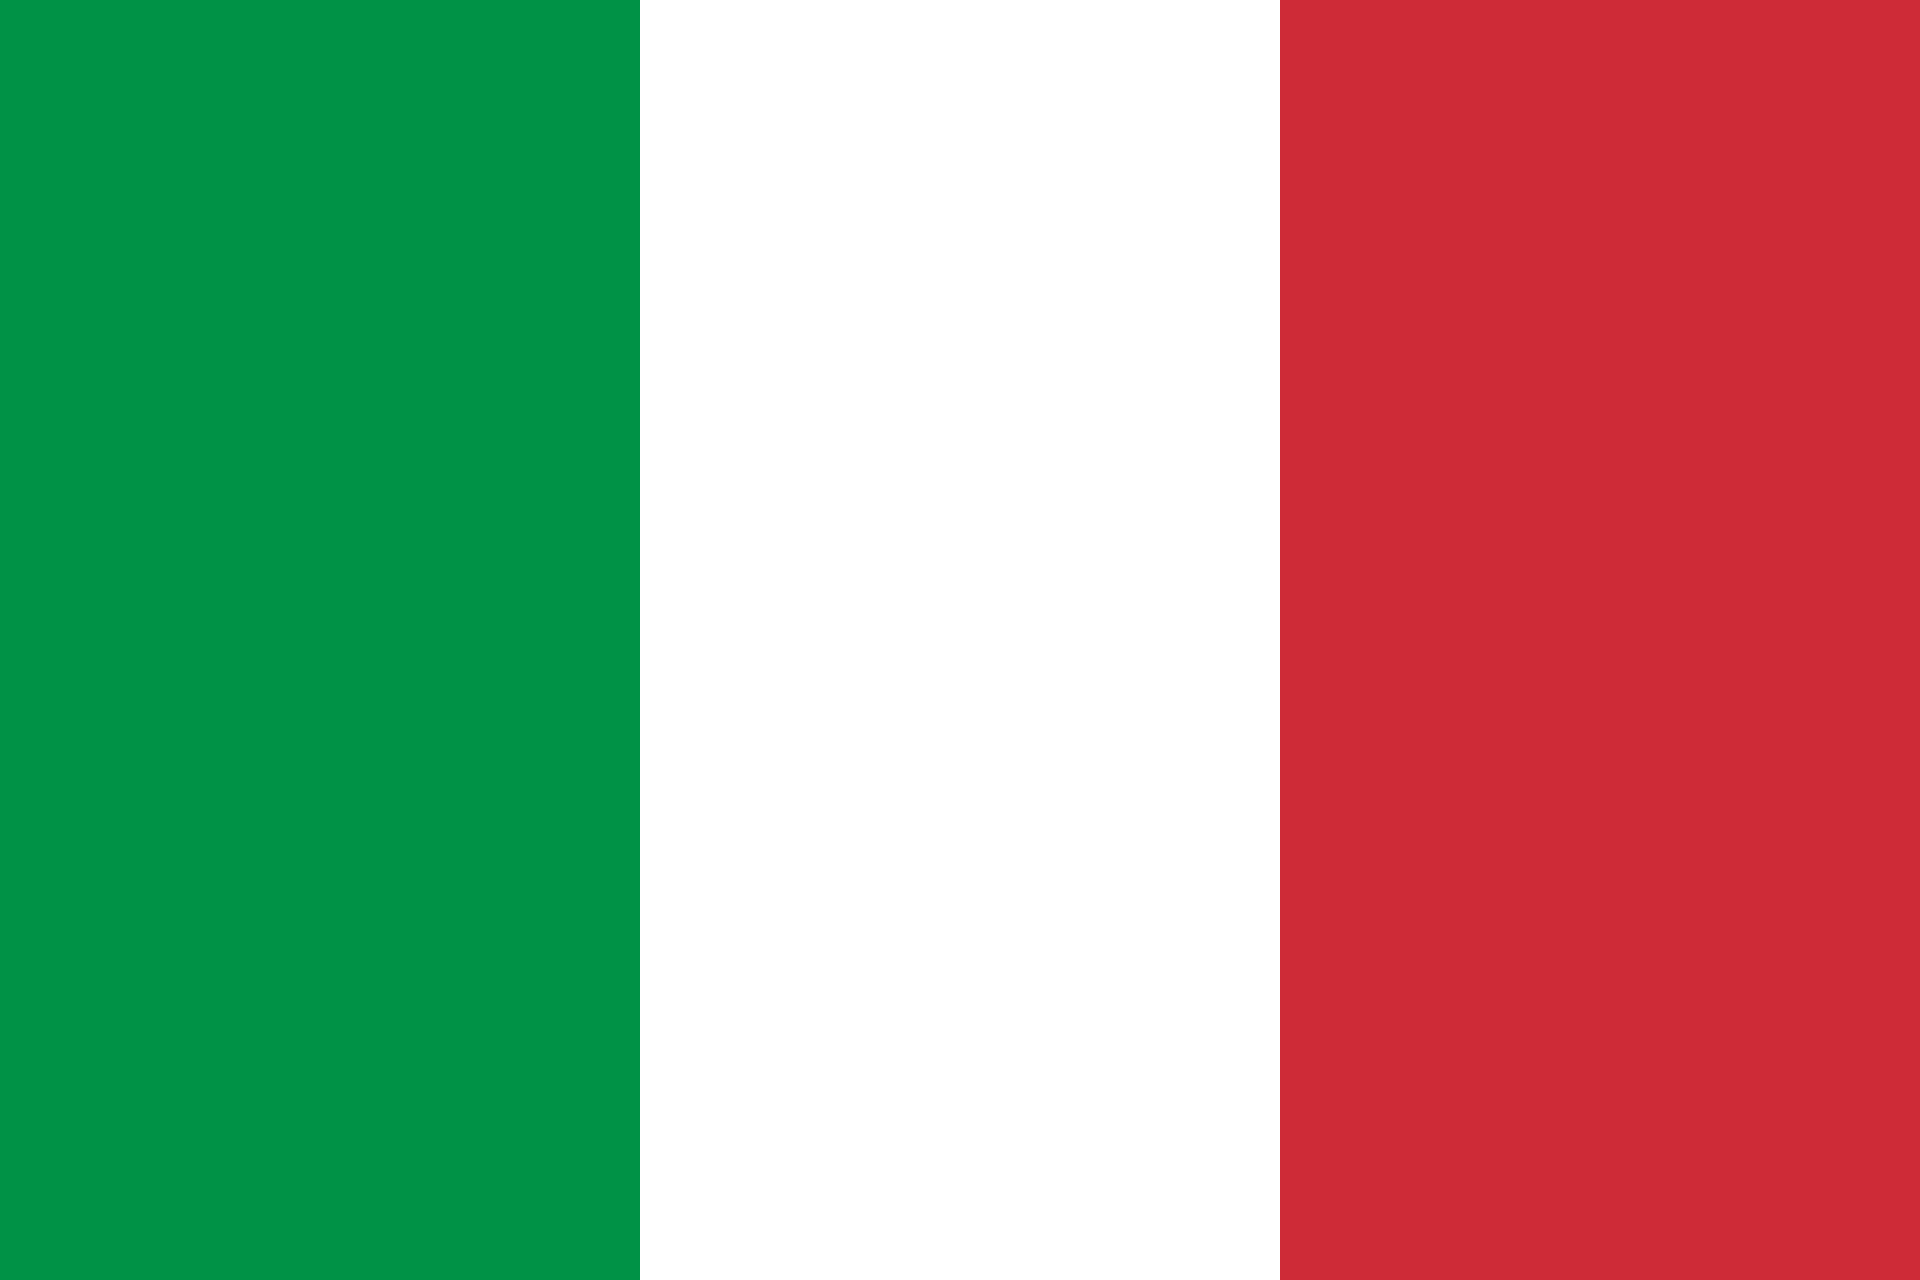
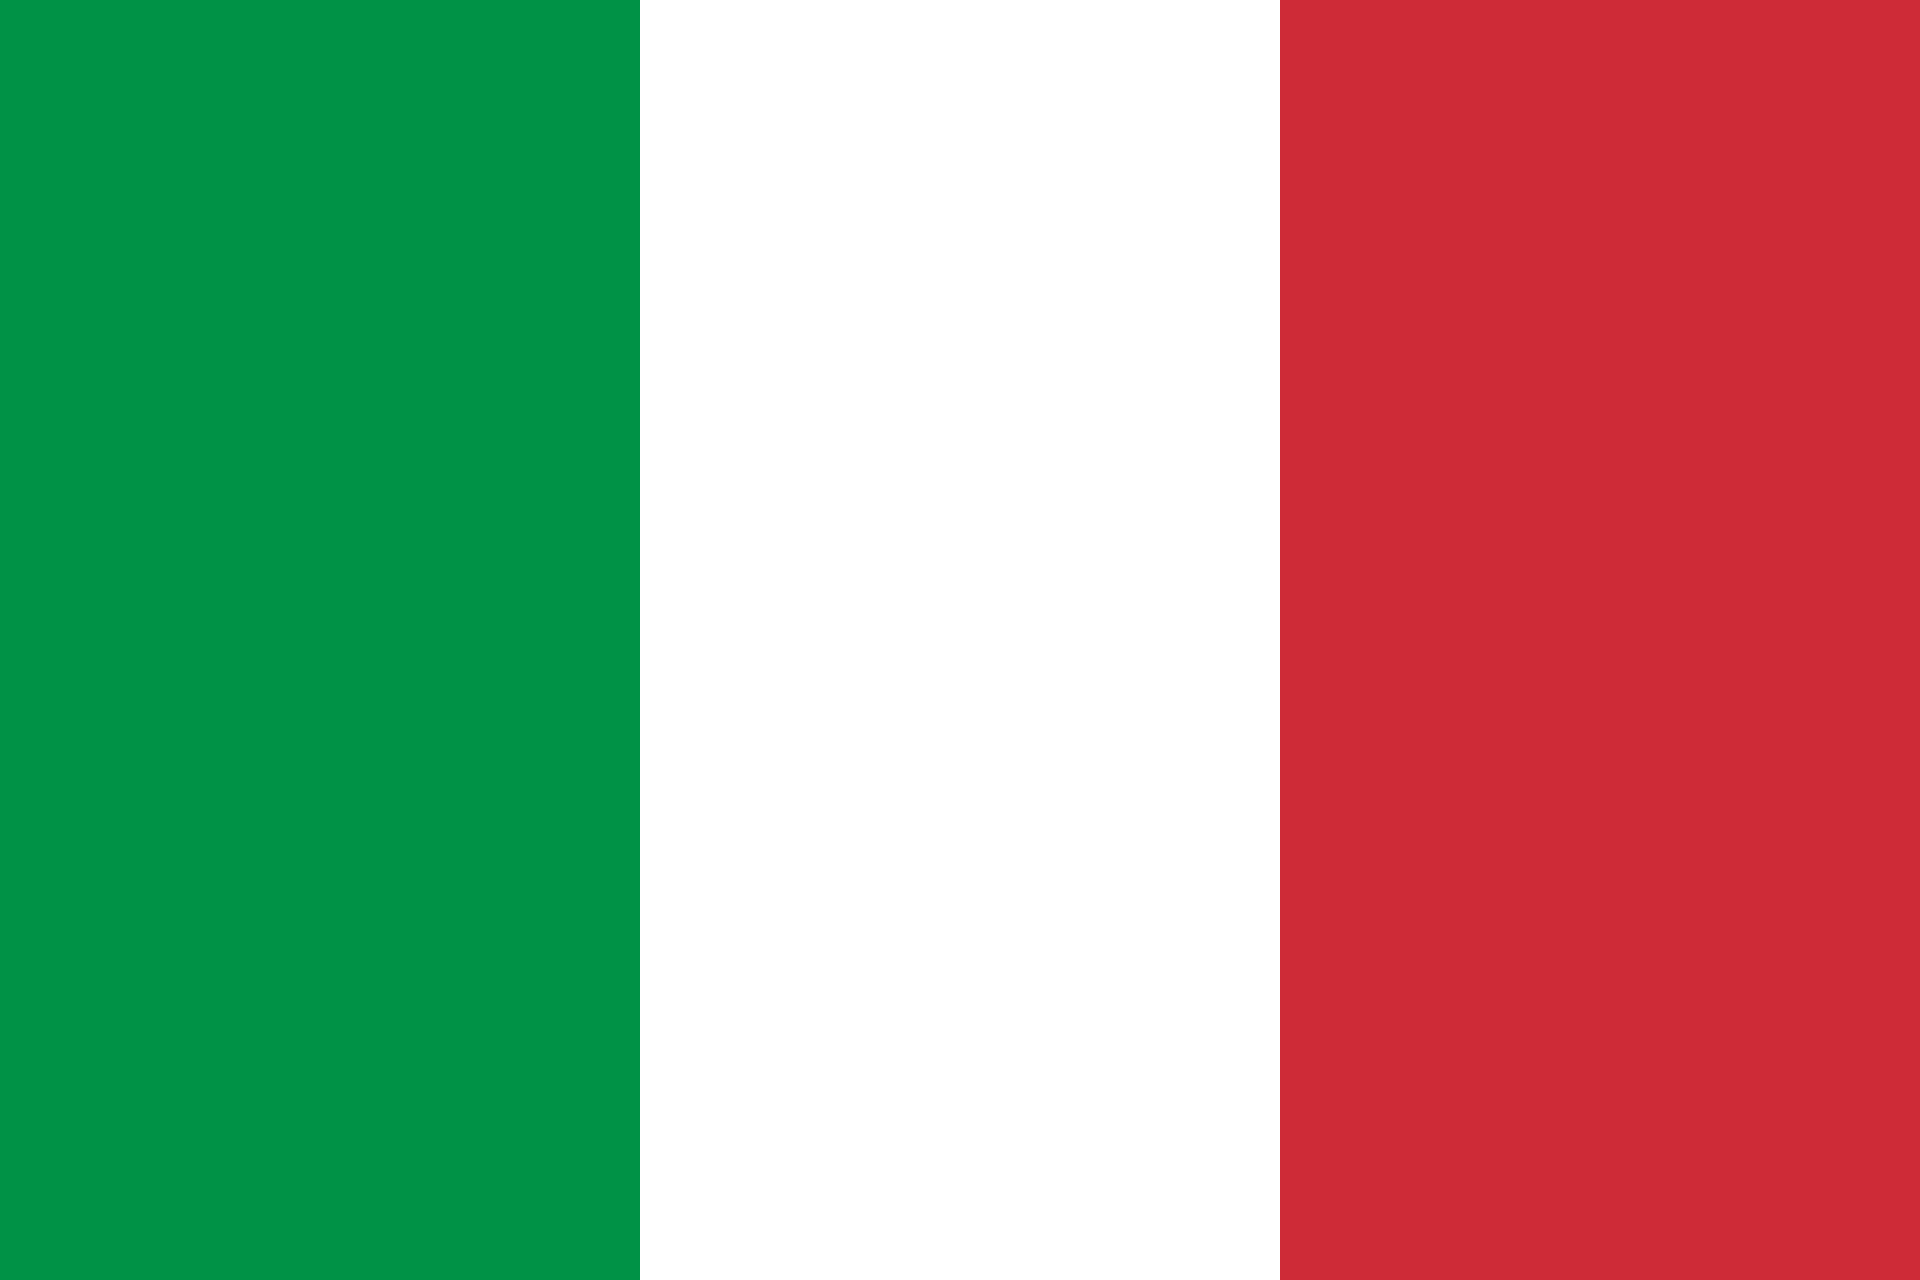
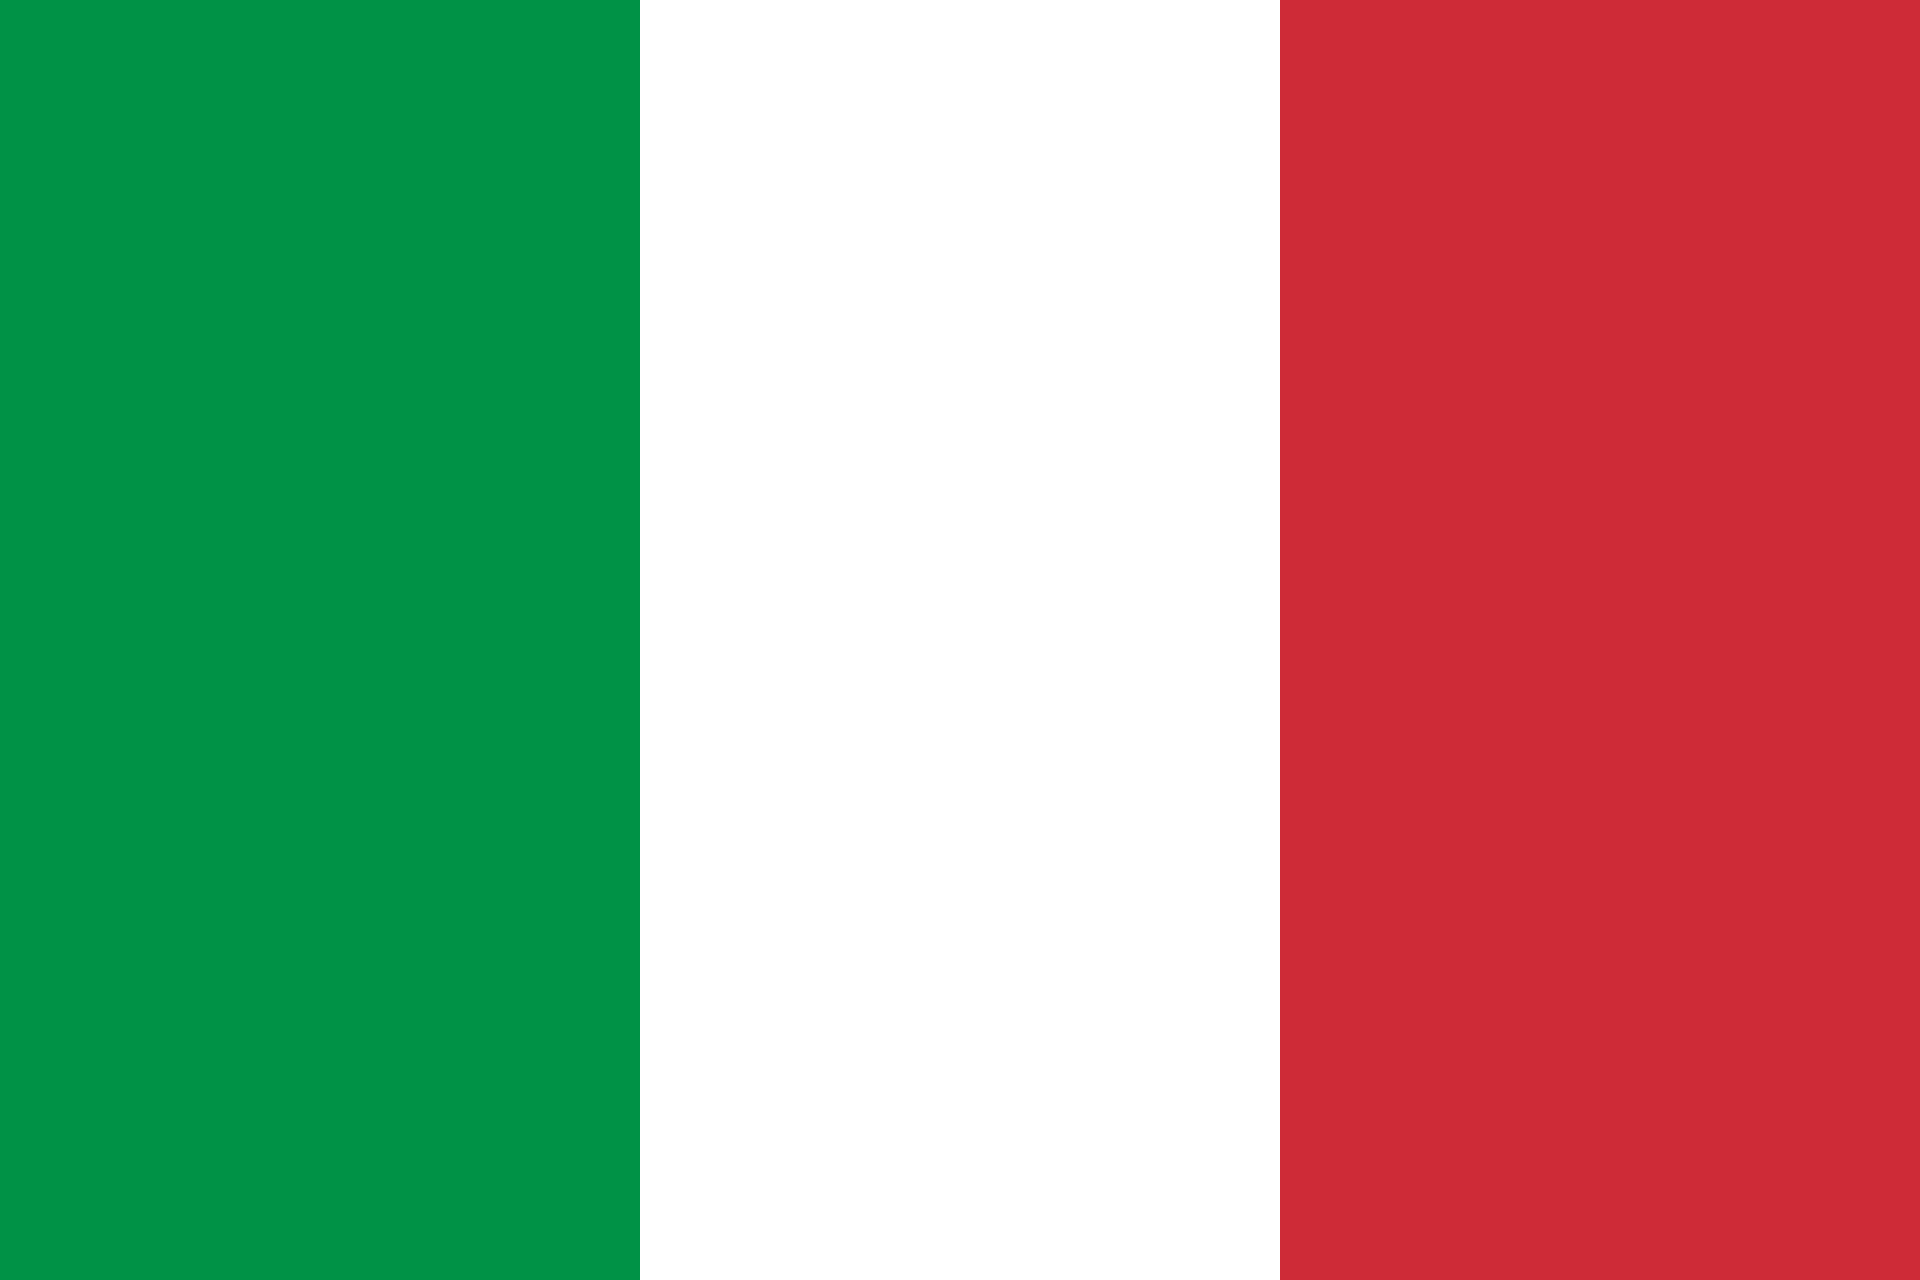
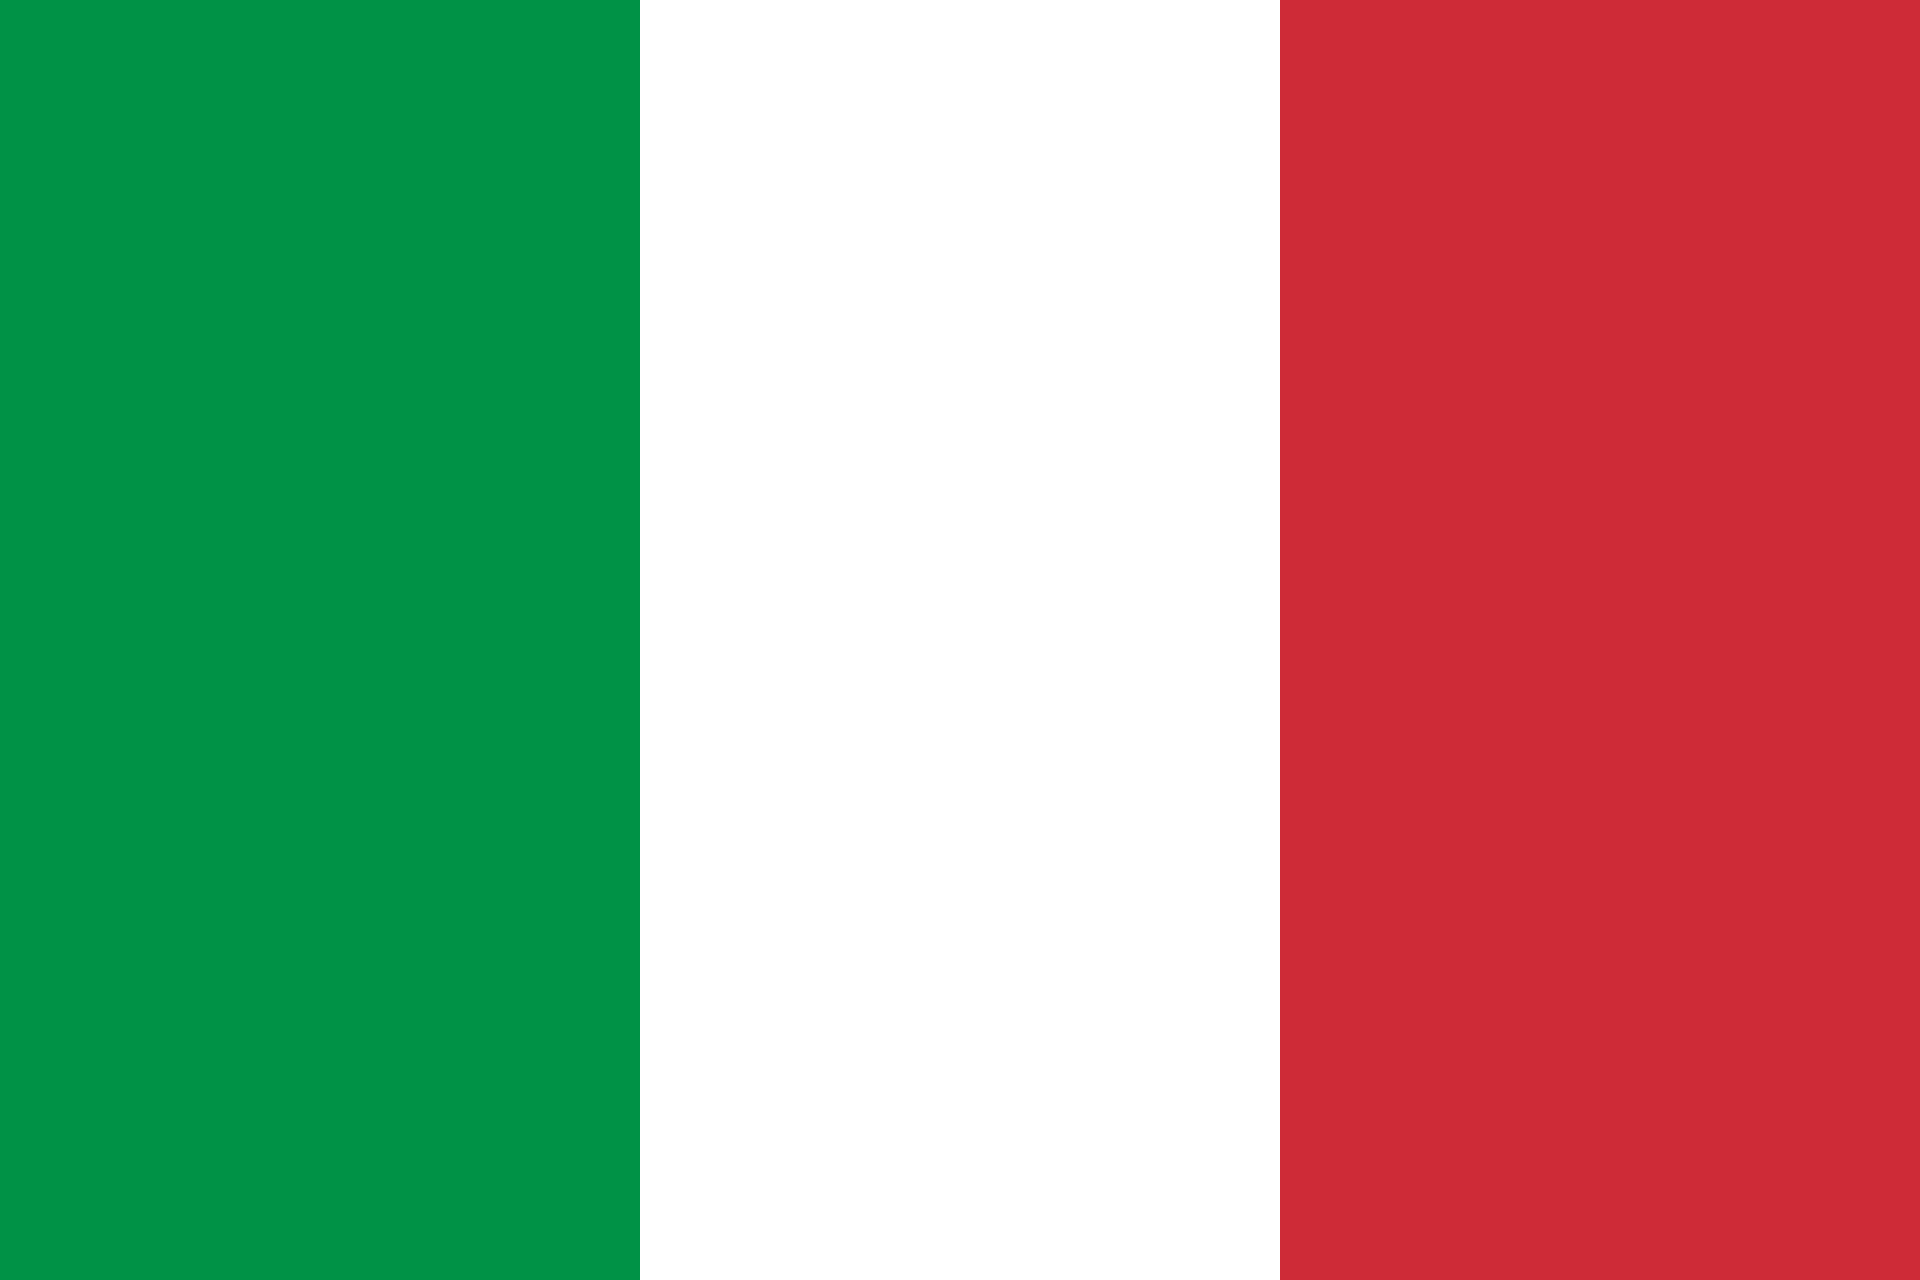
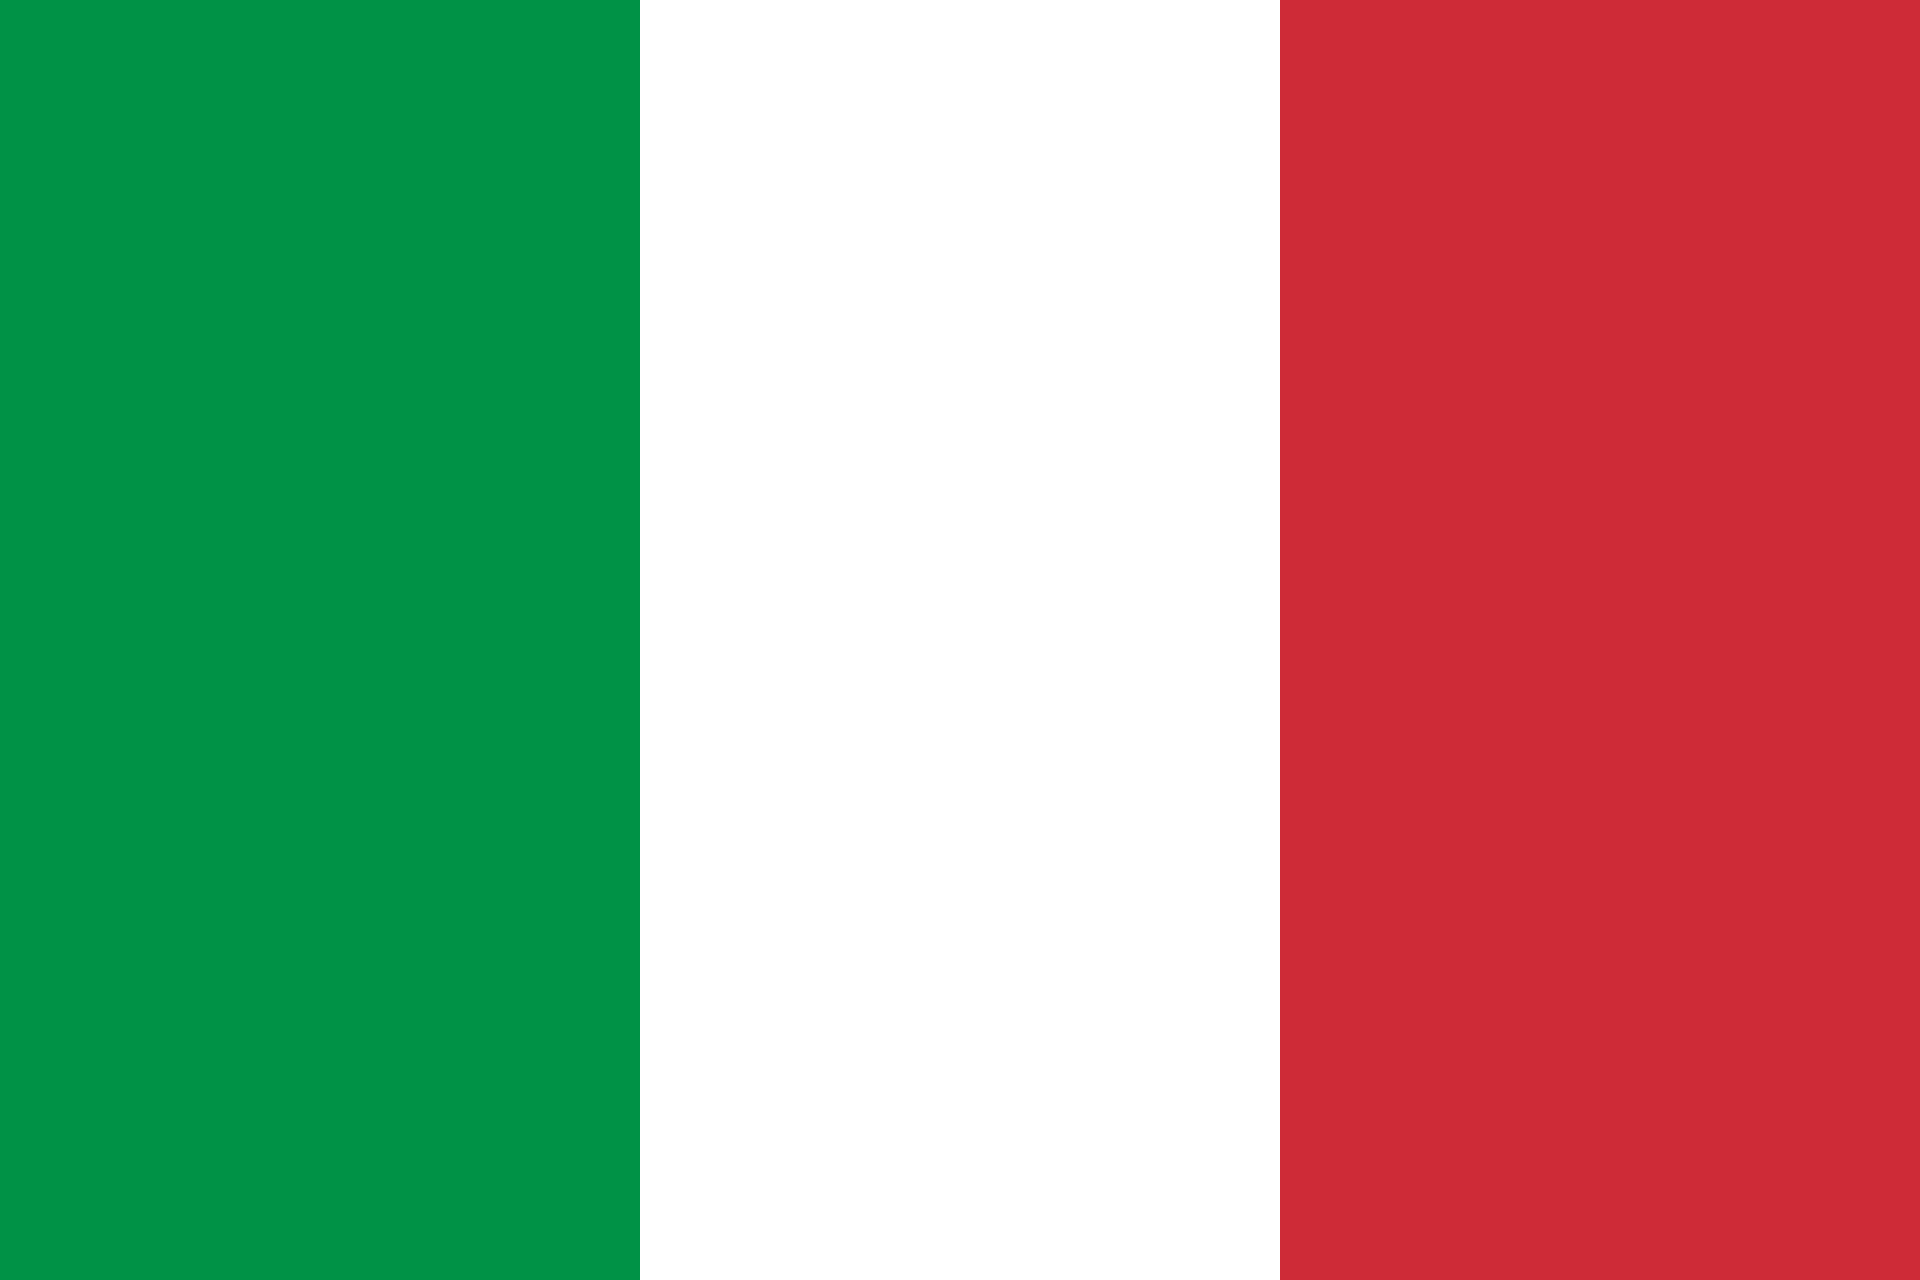
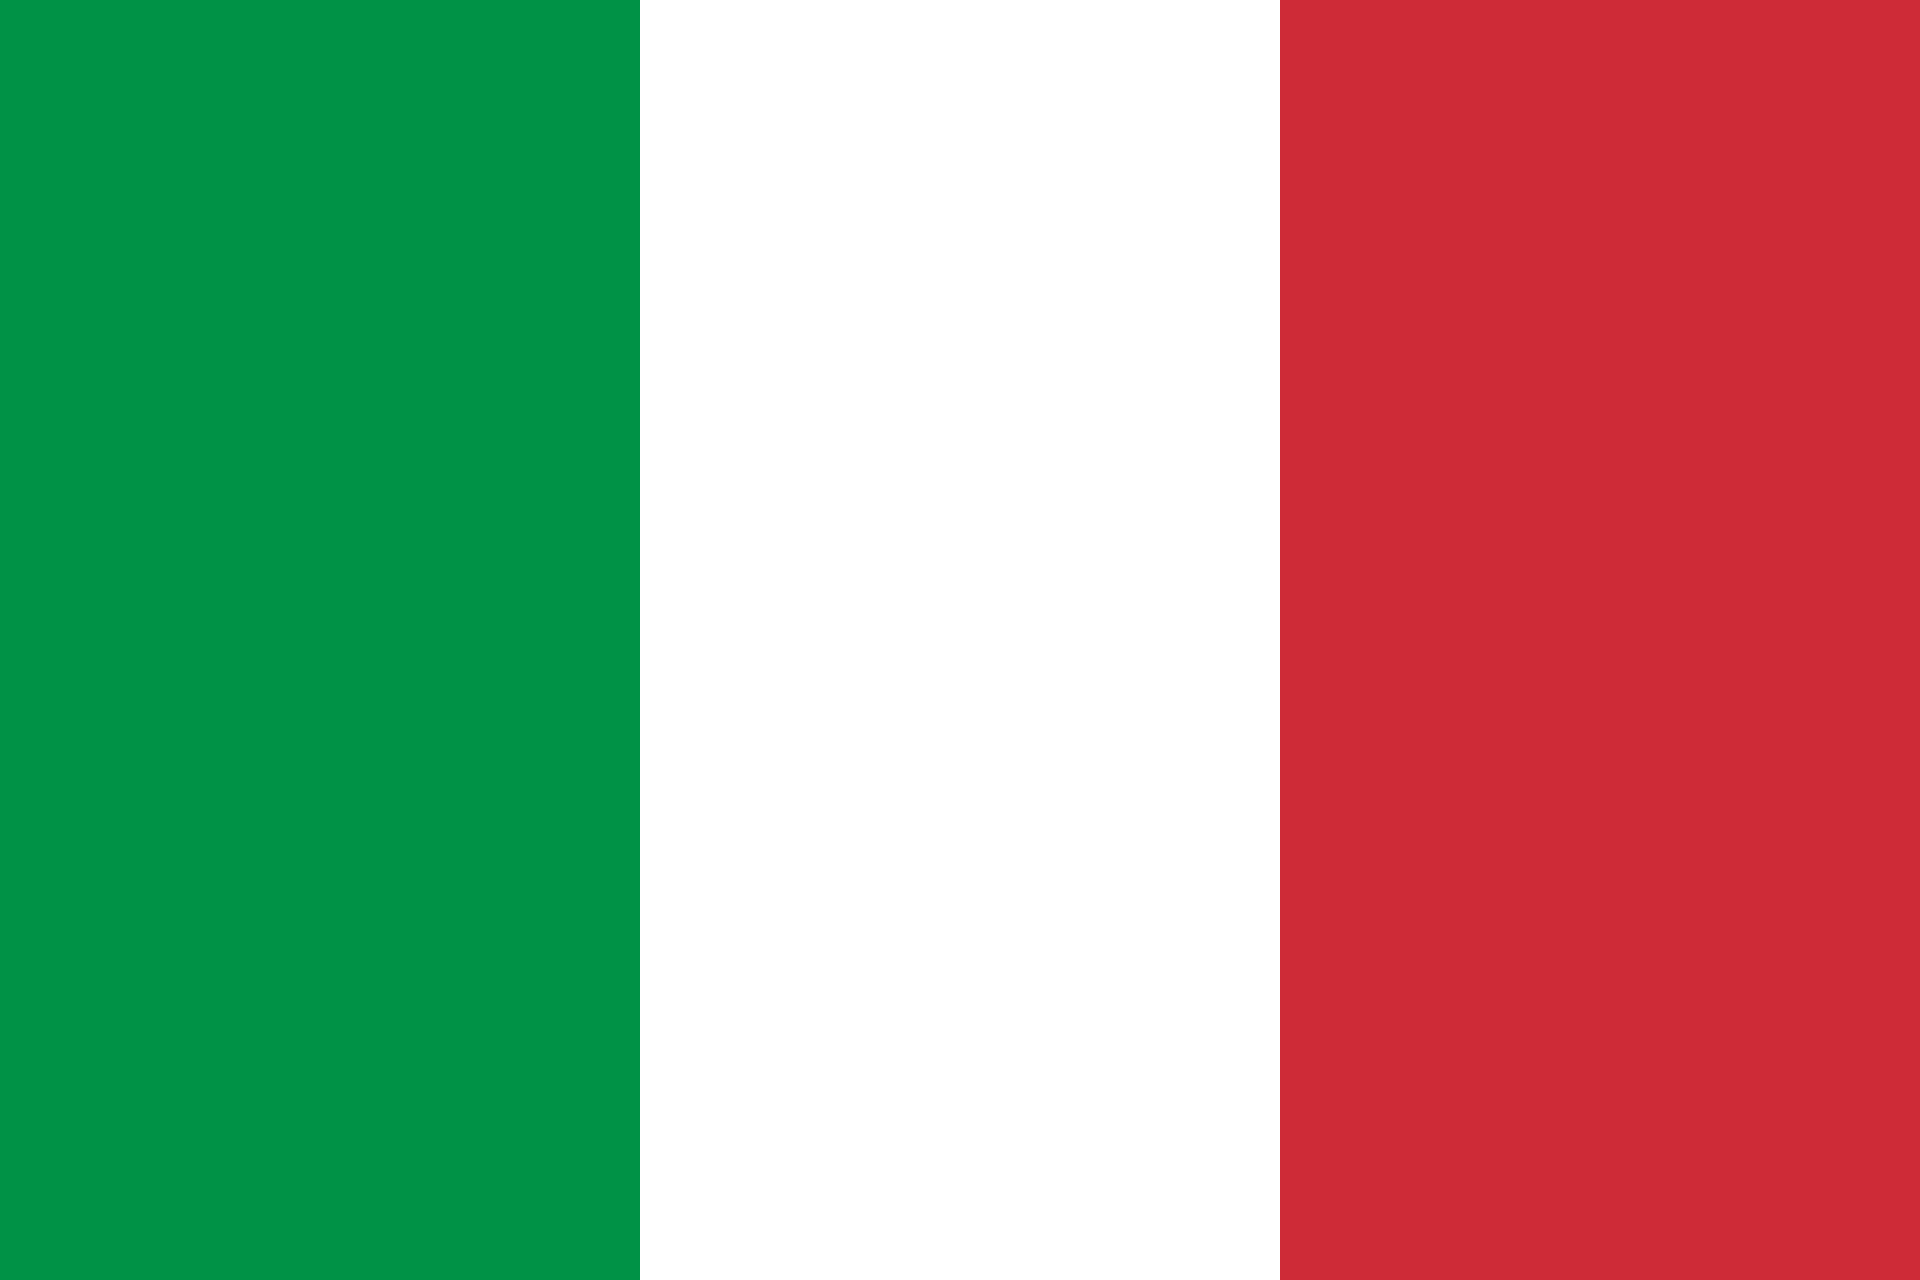
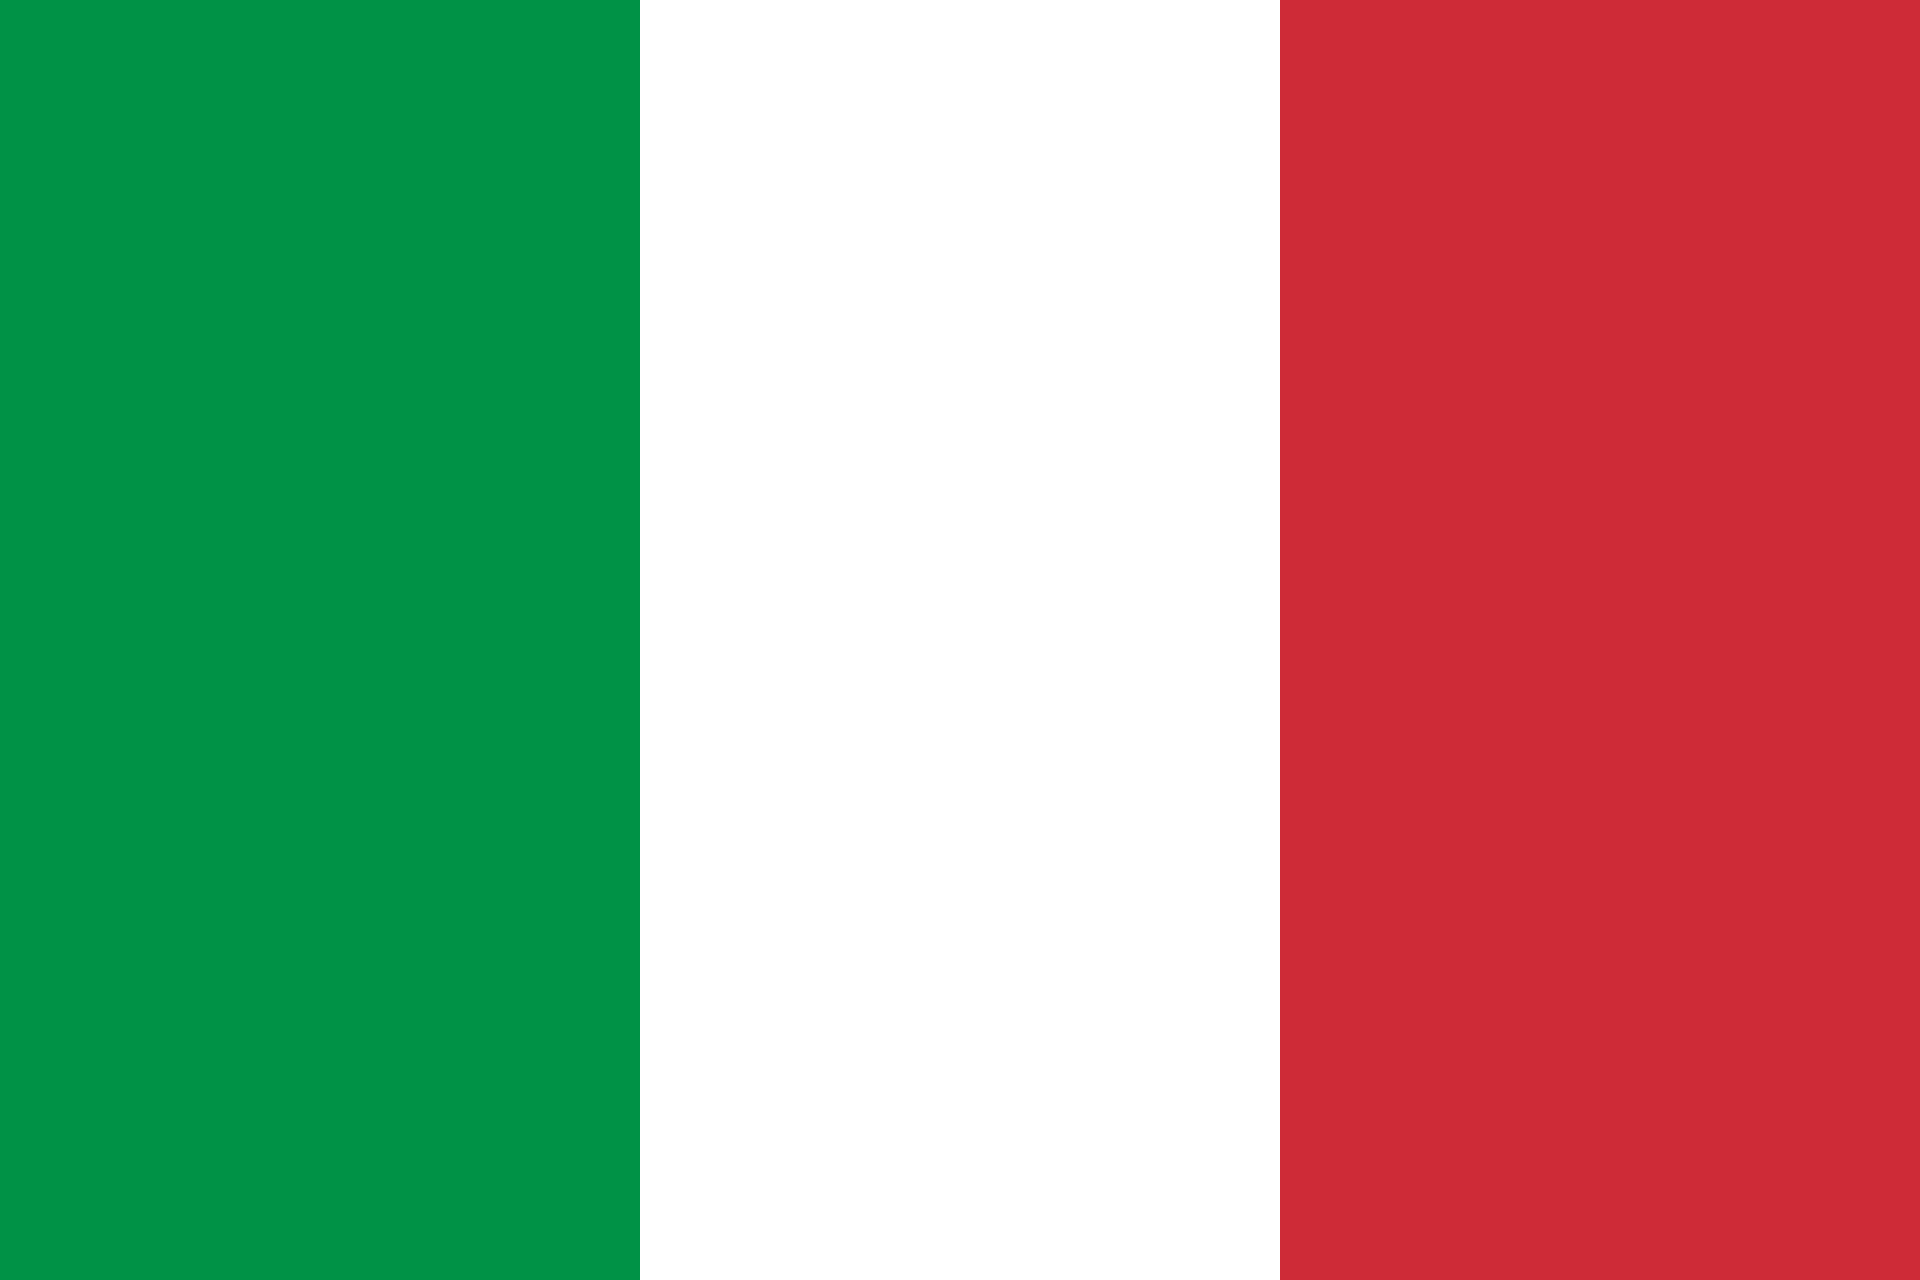
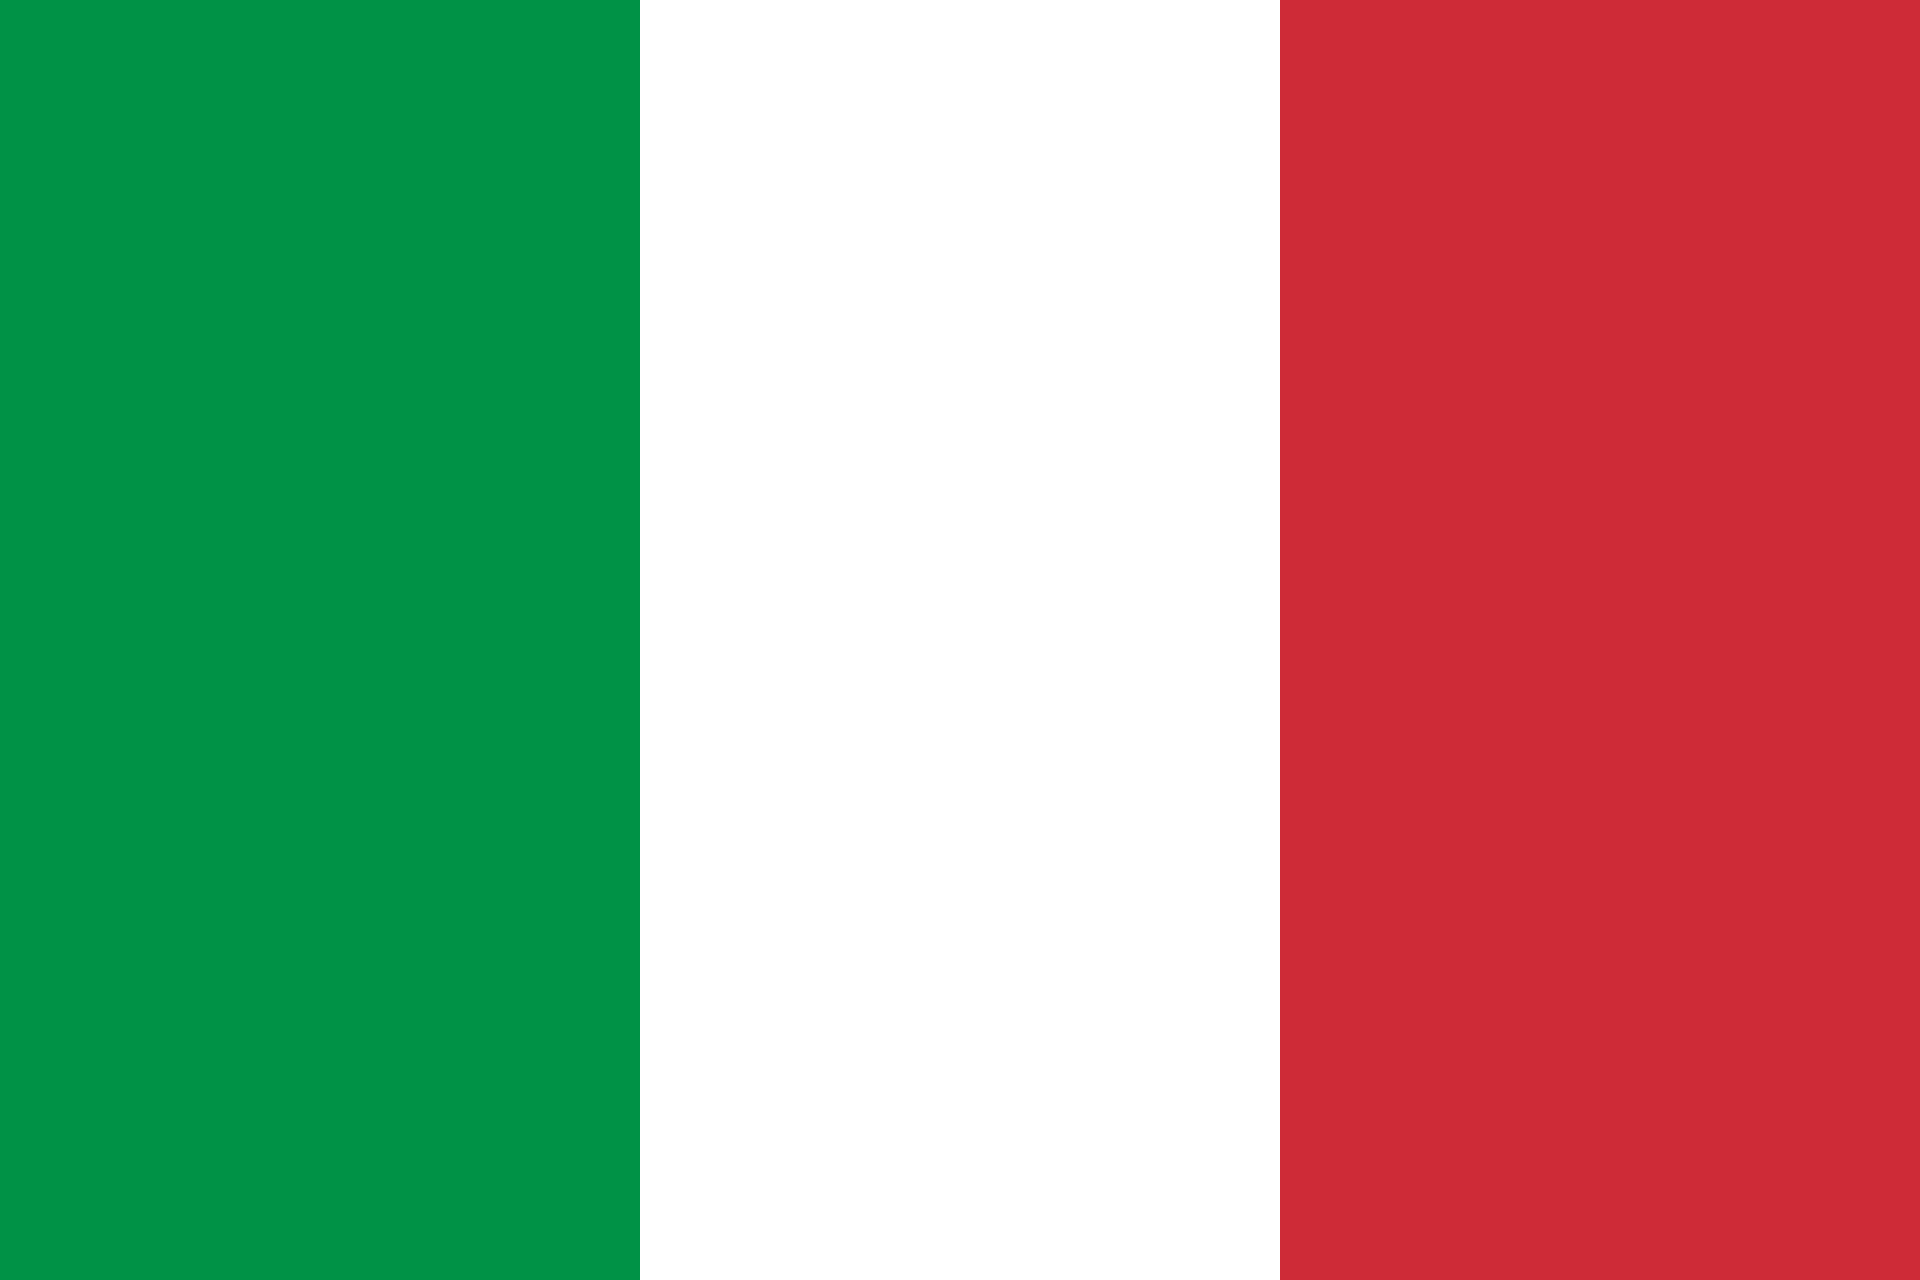
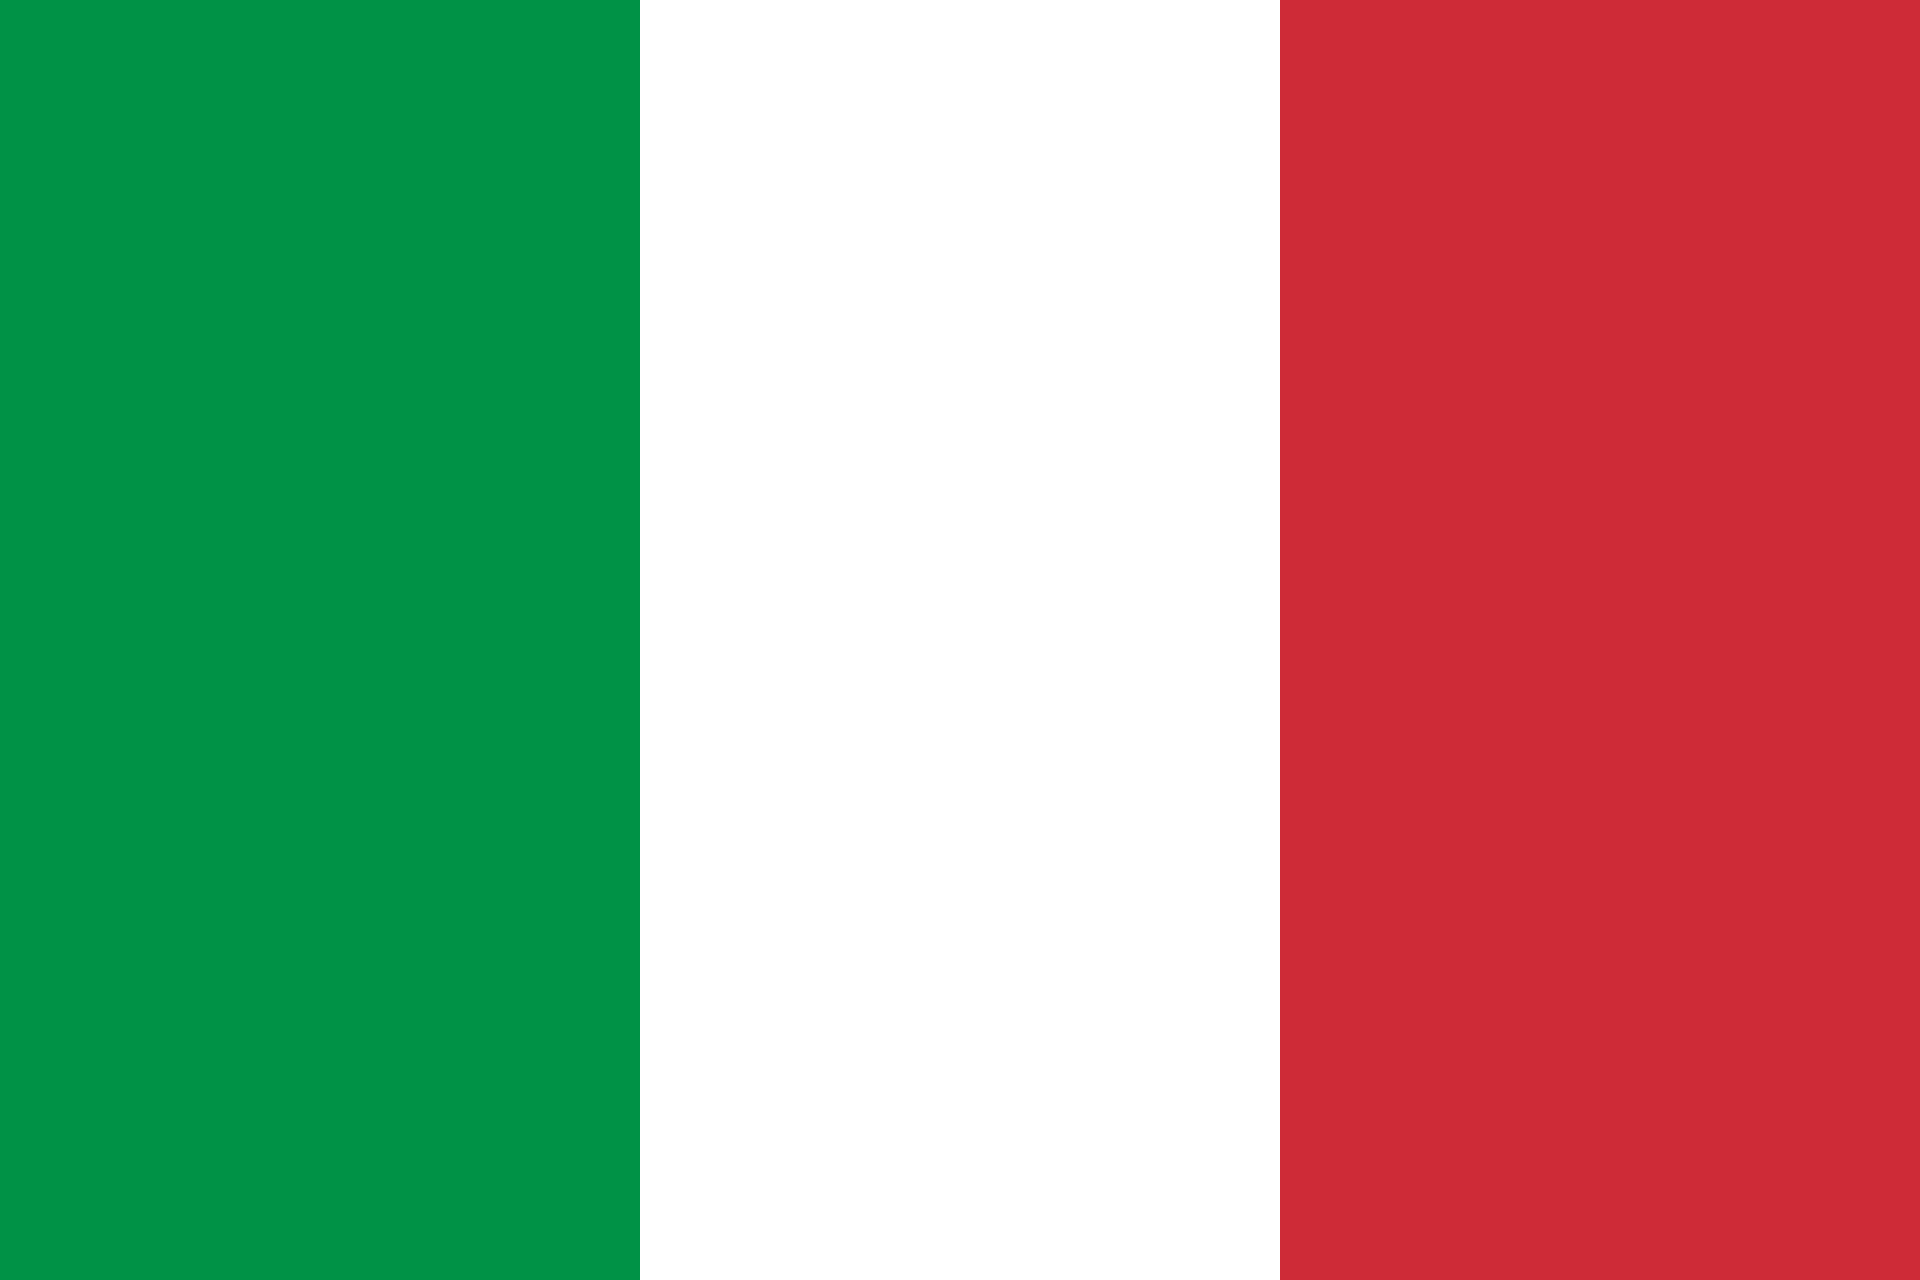
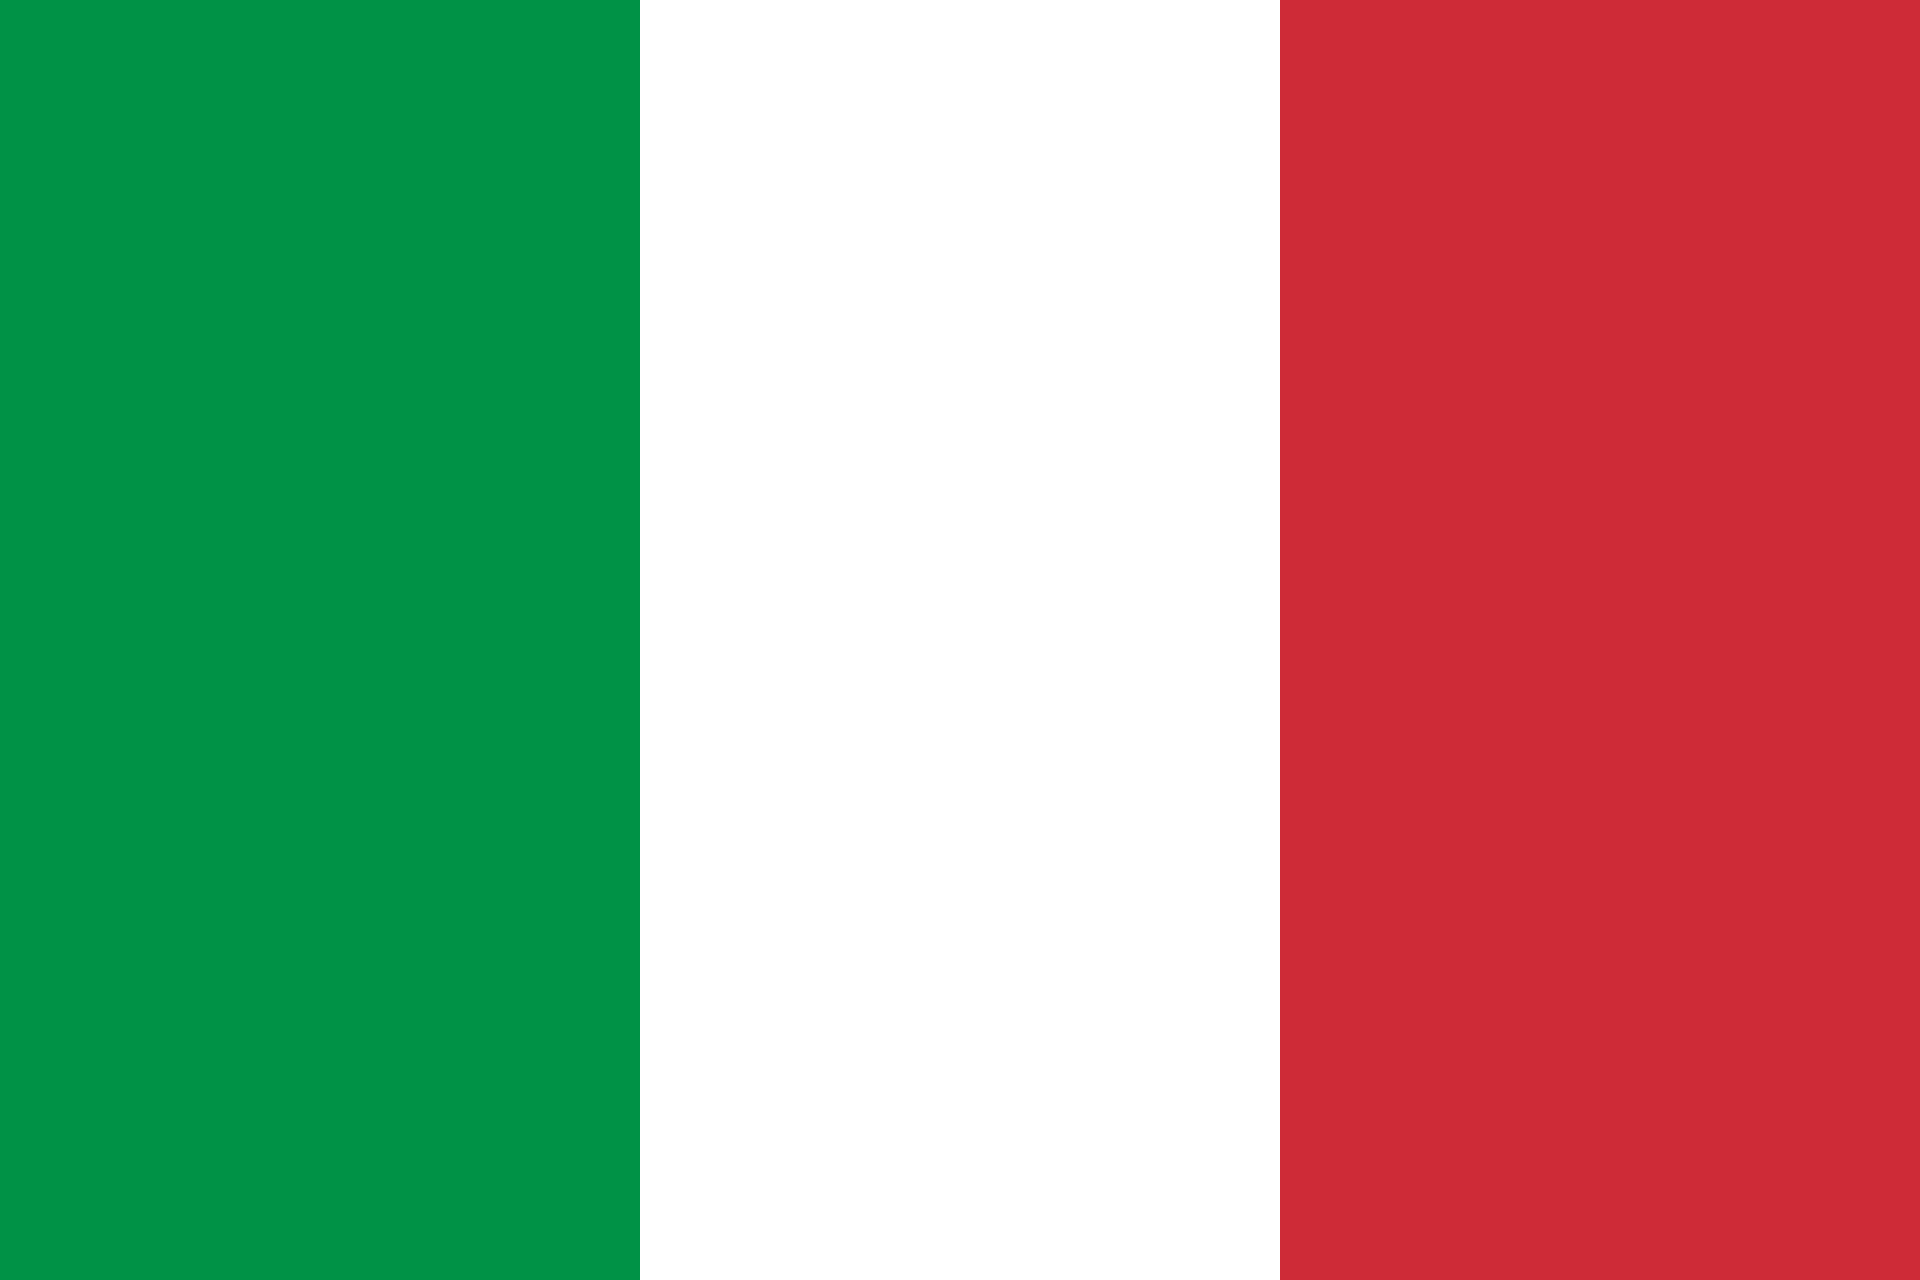
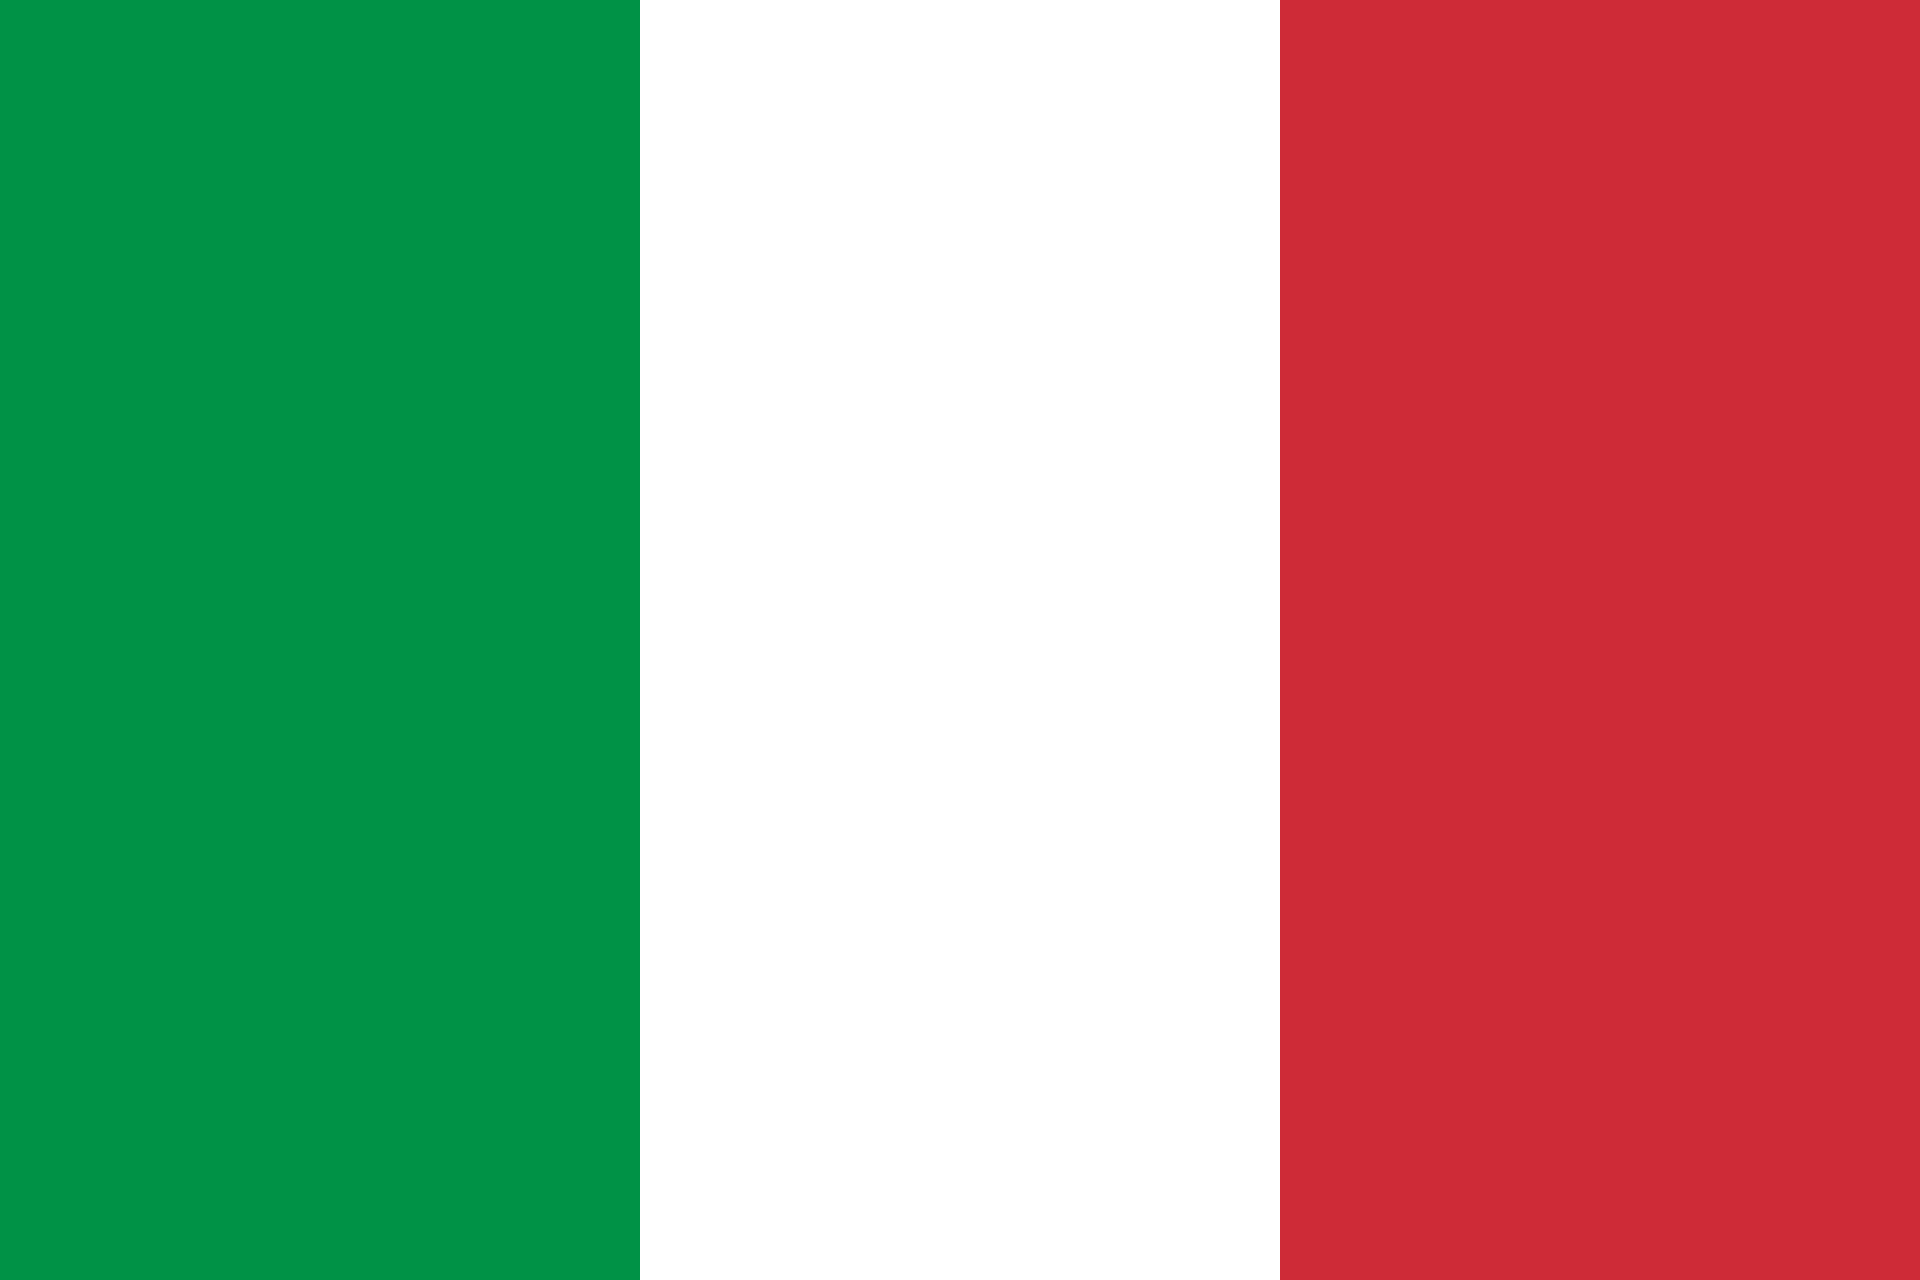
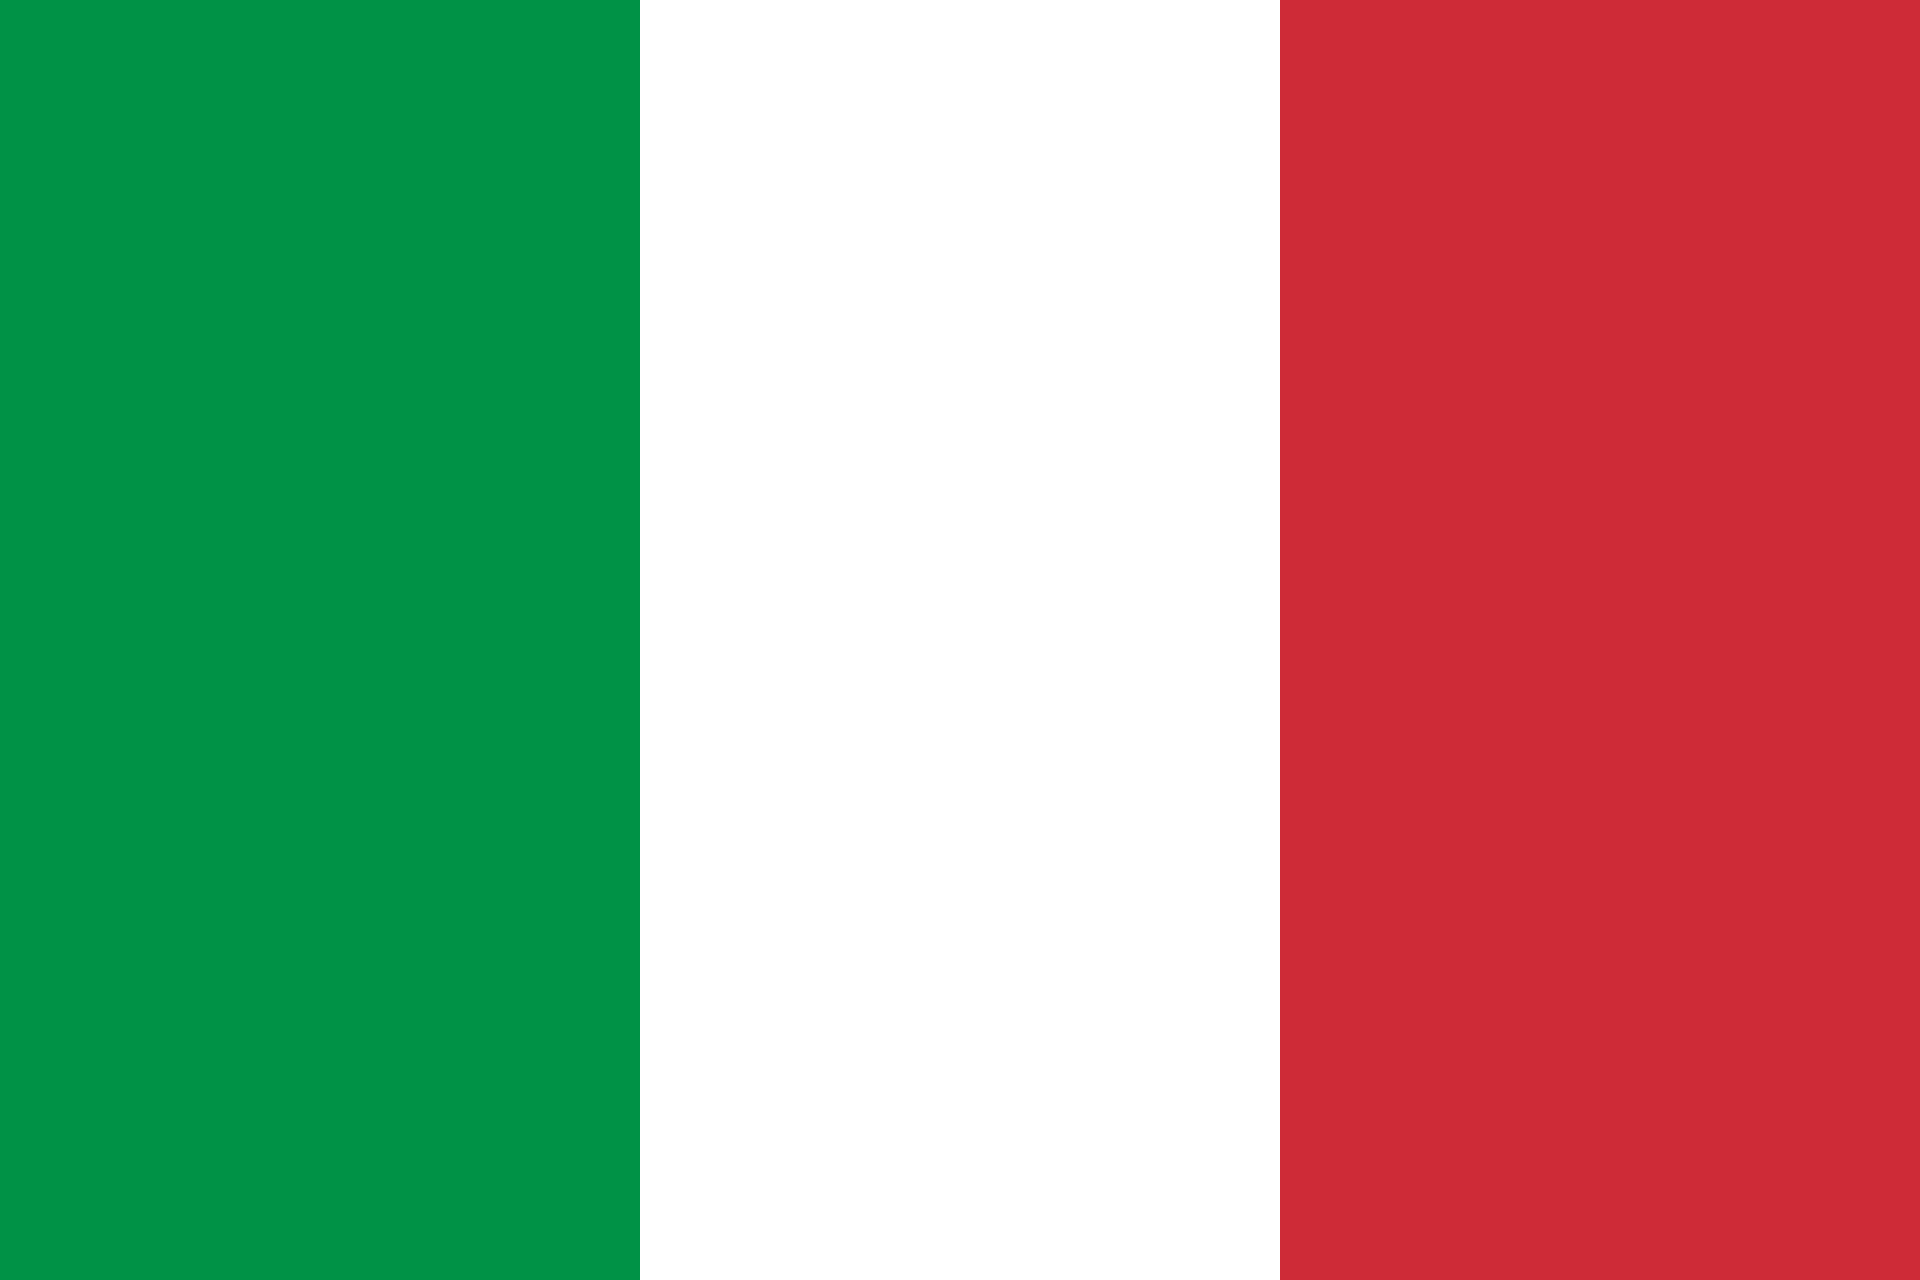
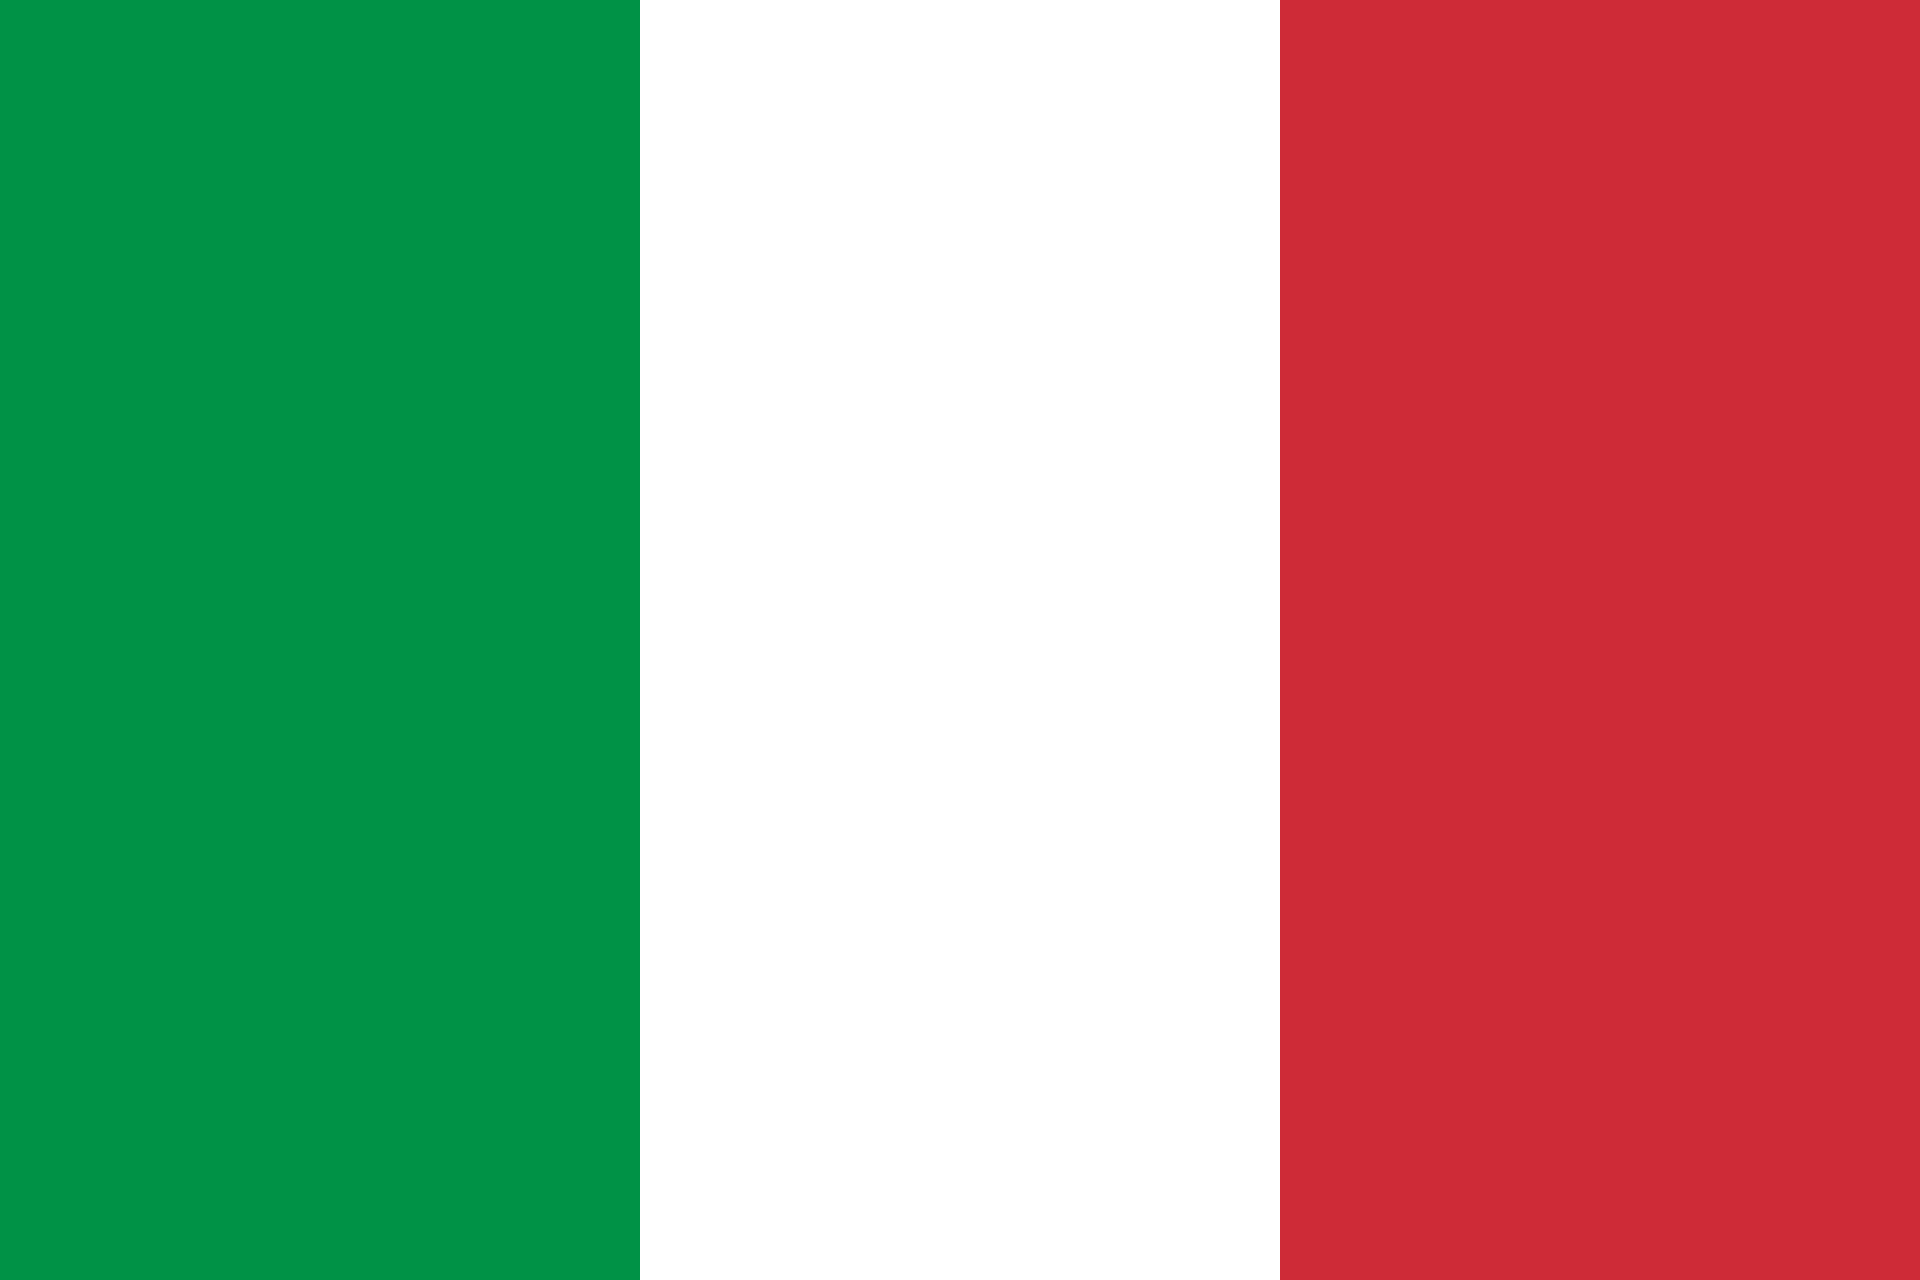
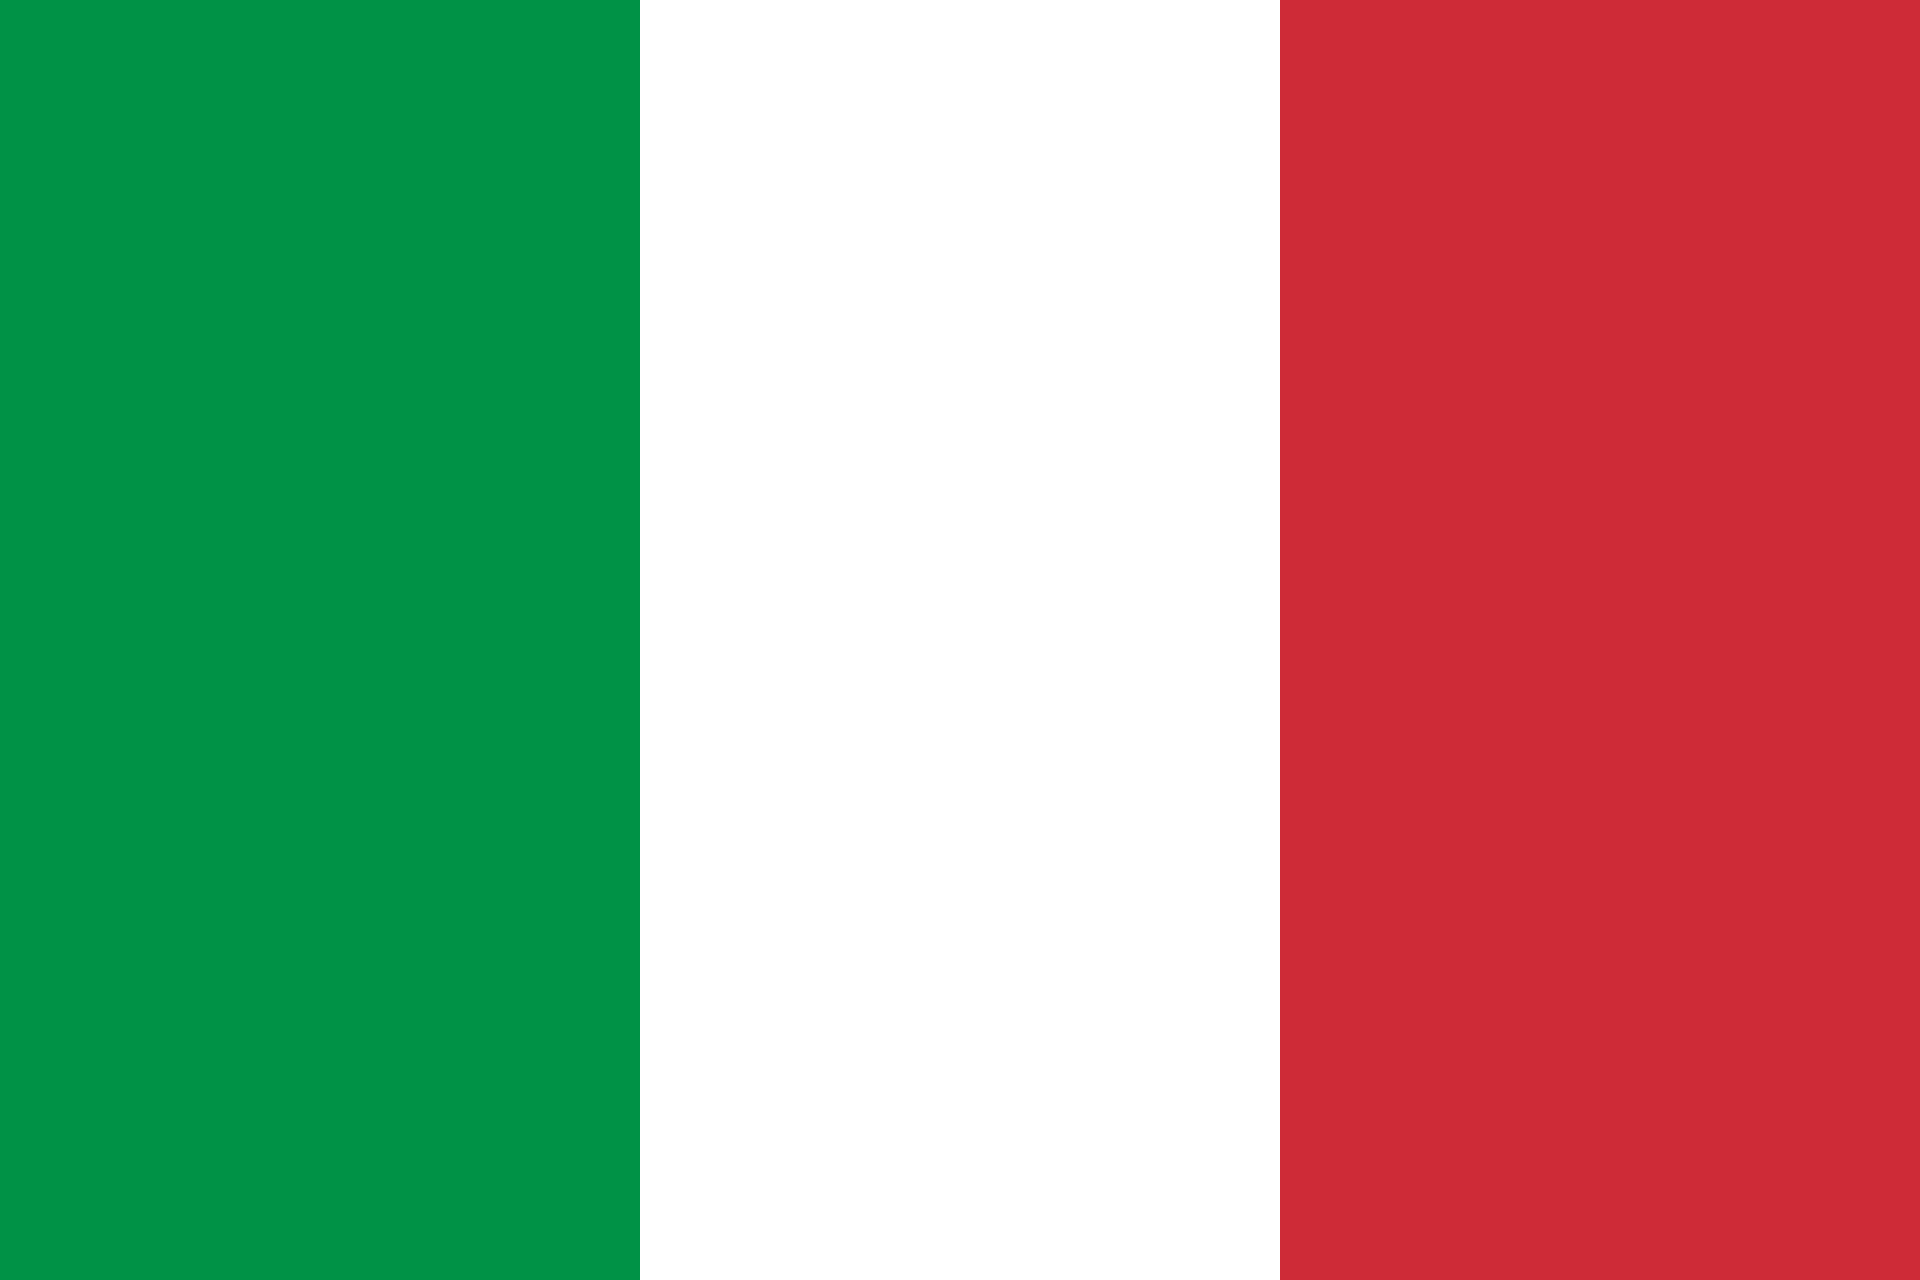
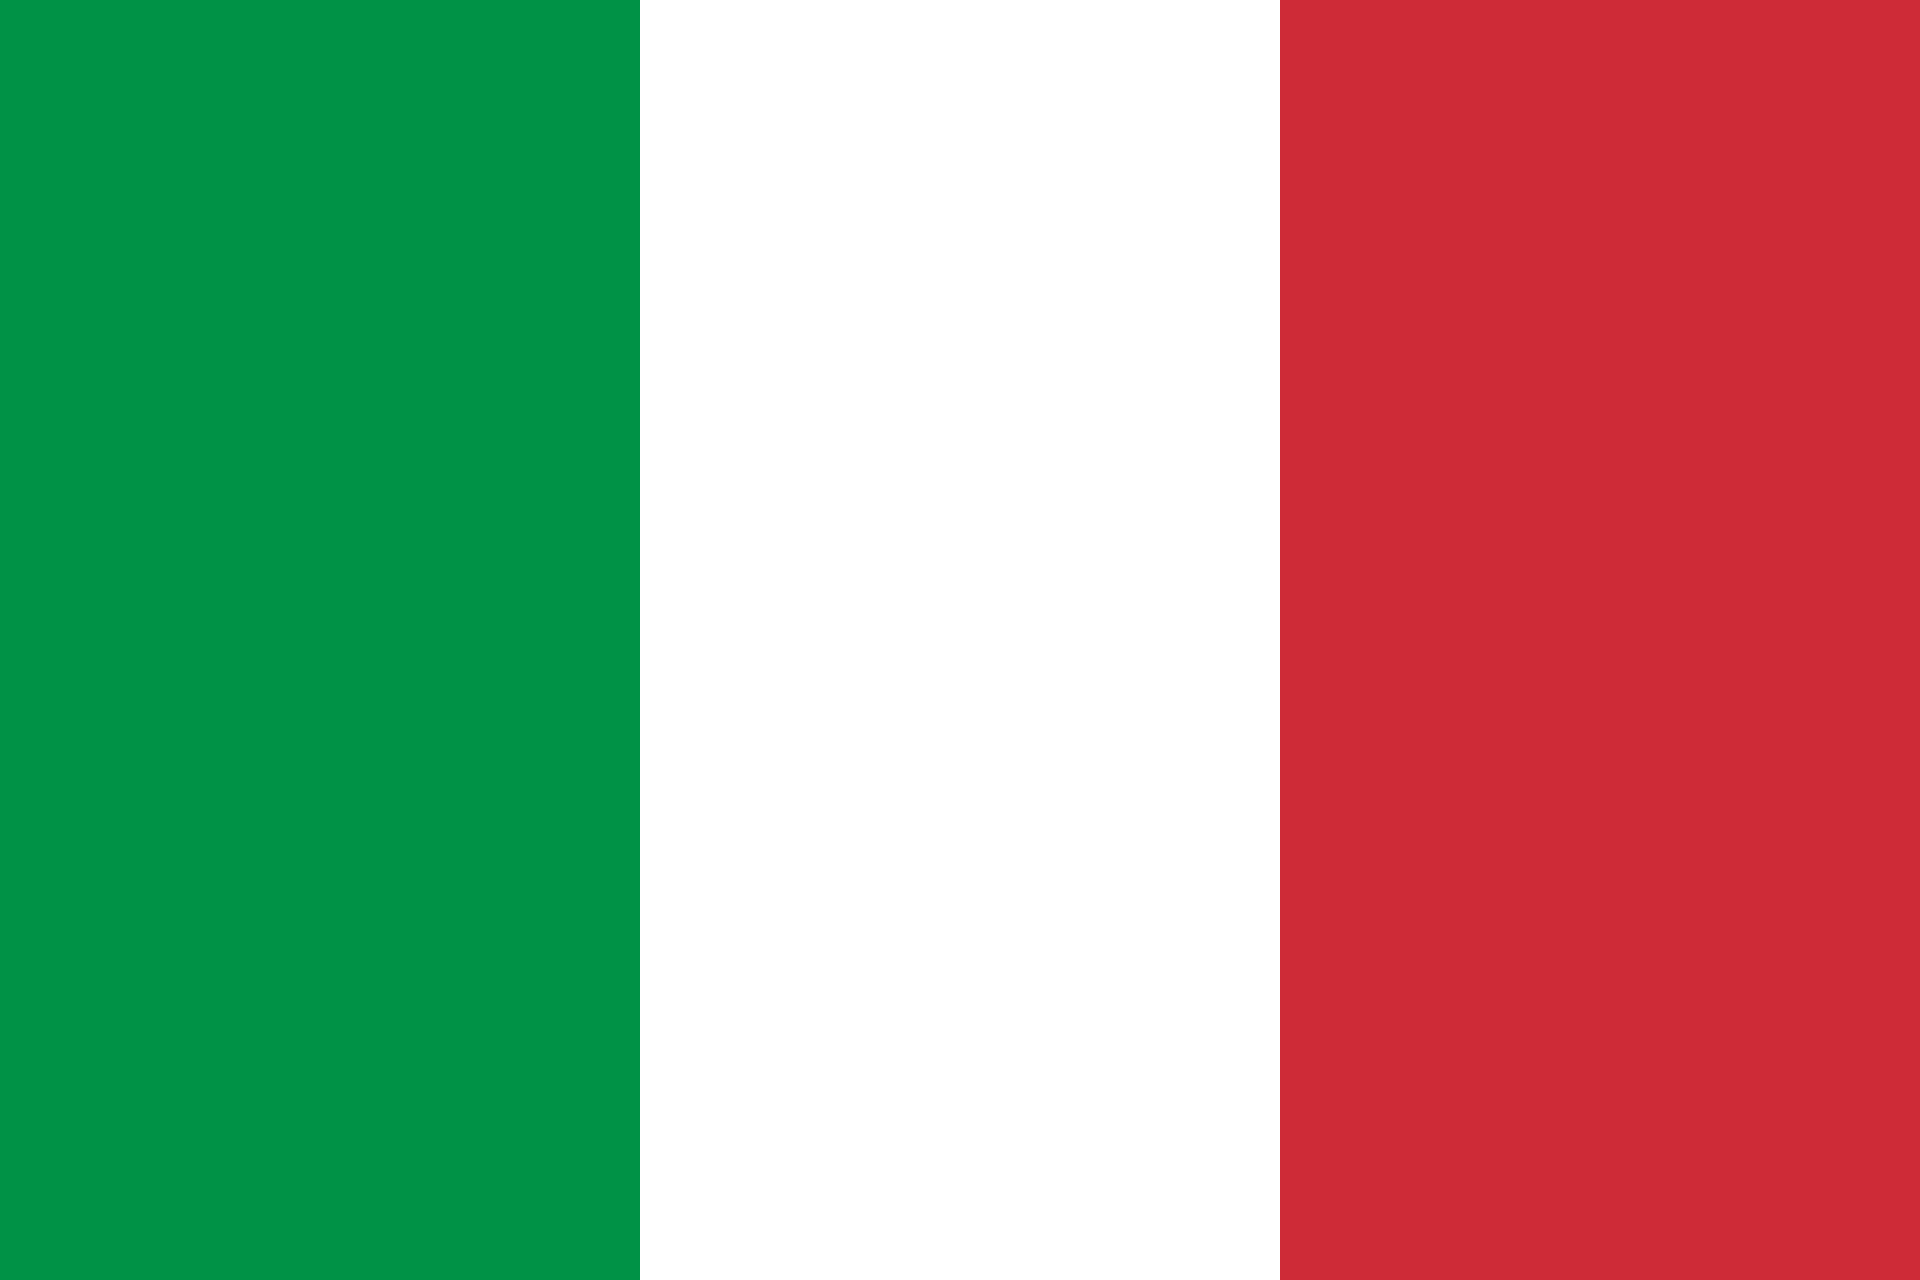
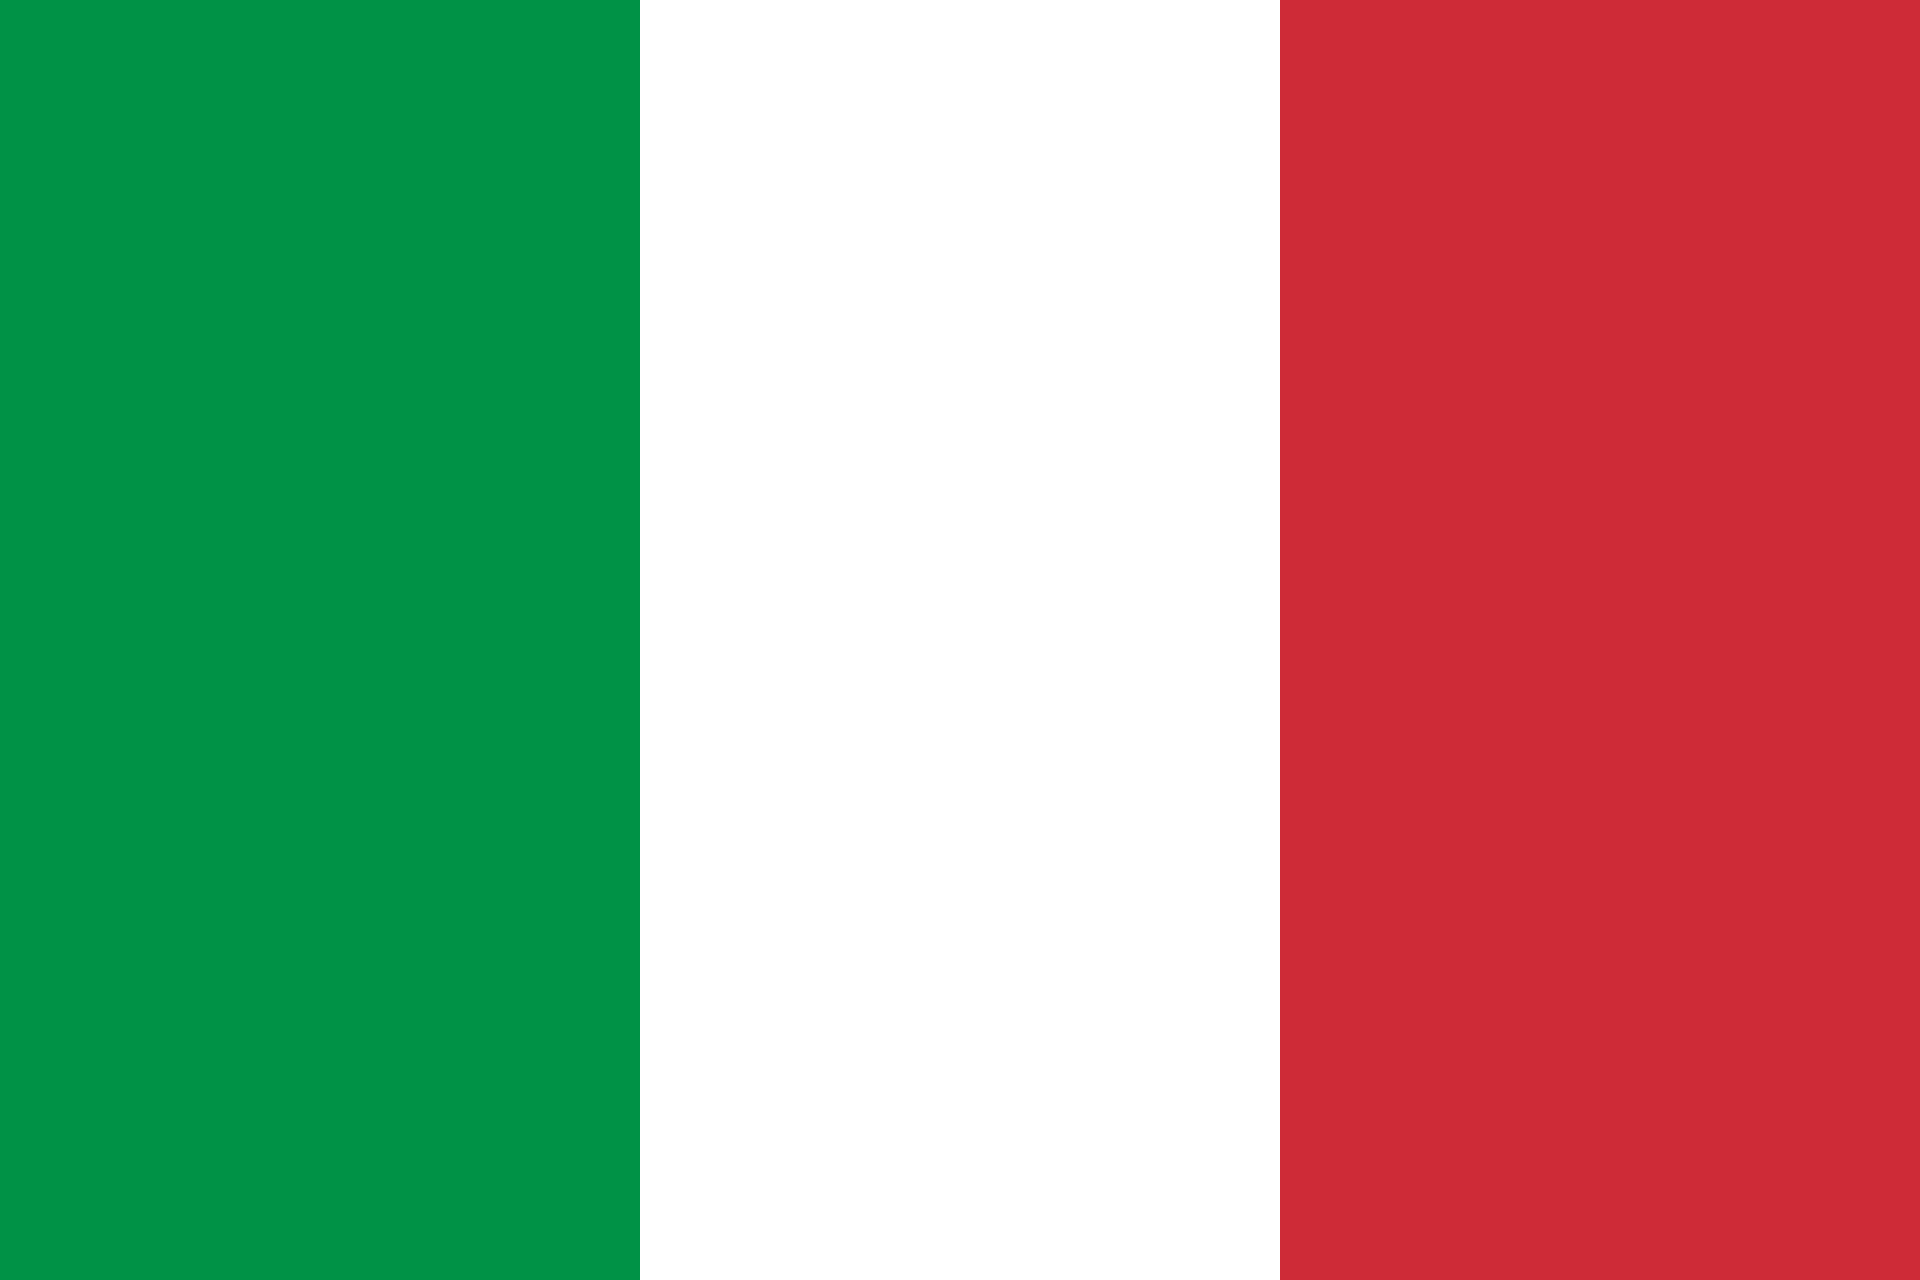

In [122]:
razeni = ['konstituce','bula','encyklika']

graf_vzdalenost = alt.Chart(do_grafu.filter(pl.col('pontifikat_zacatek') >= nejstarsi).to_pandas()).mark_bar(color='#354150',size=3).encode(
    alt.X("pontifikat_prostredek:T", title=None),
    alt.Y("vzdalenost_od_rima_podil:Q", title=None)
)

graf_vlajka = alt.Chart(do_grafu.filter(pl.col('pontifikat_zacatek') >= nejstarsi).filter(pl.col("delka_pontifikatu") >= omezeni).to_pandas()).mark_image(
    width=10,
    height=10
).encode(
    alt.X("pontifikat_prostredek:T", title=None),
    alt.Y("nula:Q", title=None),
    url="odkud_vlajka"
)

graf_vzdalenost_text = alt.Chart(do_grafu.filter(pl.col('pontifikat_zacatek') >= nejstarsi).filter(~pl.col("odkud").is_null()).to_pandas()).mark_text(
    color='#354150',
    angle=270,
    baseline="middle",
    align="left",
    fontSize=8.5,
    font="Asap",
    dx=2,
).encode(
    alt.X("pontifikat_prostredek:T", title=None),
    alt.Y("vzdalenost_od_rima_podil:Q", title=None),
    alt.Text("odkud:N")
)


graf_udalosti = alt.Chart(
    udalosti.filter(pl.col("zacatek") >= nejstarsi).to_pandas()
).mark_rect(
    color='#879BBB'
).encode(
    alt.X("zacatek:T"),
    alt.X2("konec:T")
)

text_udalosti = alt.Chart(
    udalosti.filter(pl.col("zacatek") >= nejstarsi).to_pandas()
).mark_text(
    color='#354150',
    font='Asap',
    size=7.5,
    align='right',
    dx=3
).encode(
    alt.X("zacatek:T"),
    alt.Y("kam:Q"),
    alt.Text("udalost:N")
)

graf_dokumenty = alt.Chart(dokumenty.filter(pl.col('pontifikat_zacatek') >= nejstarsi).to_pandas()).mark_point(
    filled=True,
    size=8,
    opacity=1,
    fill='#F1D1BB'
    #stroke='#F1D1BB',
).encode(
    alt.X('datum:T'),
    alt.Y('stari_pri_vydani:Q'),
    alt.Shape('dokument:N', legend=None, sort=razeni, 
              scale=alt.Scale(range=['circle','triangle','triangle'])),
    alt.Size('dokument:N', scale=alt.Scale(range=[50,5,2]), sort=razeni, legend=None),
#    alt.Opacity('dokument:N')
)

finale = alt.layer(
    graf_vlajka, poslednich_50_zivoty, poslednich_50_pontifikaty, graf_dokumenty, poslednich_50_text
).configure_view(
    stroke='transparent'
).configure_axis(grid=True, gridOpacity=0.6, gridWidth = 0.5, gridColor='#F1D1BB').properties(
    width=380,
    height=200
)

finale

In [124]:
me_to_neurazi(finale, kredity="Data: Vatican.va | vizualizace: iROZHLAS.cz, březen 2025", soubor="posledni-papezove", slozka_na_serveru="grafy-papezove")

<figure>
    <a href="https://data.irozhlas.cz/grafy-papezove/posledni-papezove.svg" target="_blank">
    <img src="https://data.irozhlas.cz/grafy-papezove/posledni-papezove.svg" width="100%" alt="Omlouváme se, ale alternativní text se nepodařilo vygenerovat. Texty v grafu by měly být čitelné ze zdrojového souboru SVG." />
    </a>
    </figure>


In [30]:
do_grafu.tail(limit).filter(pl.col('status') == 'blahoslavený')

shape: (2, 46)
┌────────────────┬───────────────┬────────────────┬────────────────┬───┬────────────────┬───────┬───────────────┬──────┐
│ vatikan_poradi ┆ vatikan_jmeno ┆ vatikan_pontif ┆ vatikan_pontif ┆ … ┆ vzdalenost_od_ ┆ odkud ┆ odkud_vlajka  ┆ nula │
│ ---            ┆ ---           ┆ ikat_zacatek   ┆ ikat_konec     ┆   ┆ rima_podil     ┆ ---   ┆ ---           ┆ ---  │
│ i64            ┆ str           ┆ ---            ┆ ---            ┆   ┆ ---            ┆ str   ┆ str           ┆ i32  │
│                ┆               ┆ str            ┆ str            ┆   ┆ f64            ┆       ┆               ┆      │
╞════════════════╪═══════════════╪════════════════╪════════════════╪═══╪════════════════╪═══════╪═══════════════╪══════╡
│ 255            ┆ Pius IX       ┆ 1846-05-21     ┆ 1878-01-07     ┆ … ┆ 0.568173       ┆ null  ┆ data:image/pn ┆ 0    │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ g;base64,iVBO ┆      │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ Rw0K…         ┆      │
│ 263            ┆ John Paul I   ┆ 1978-08-03     ┆ 1978-08-28     ┆ … ┆ 1.342657       ┆ null  ┆ data:image/pn ┆ 0    │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ g;base64,iVBO ┆      │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ Rw0K…         ┆      │
└────────────────┴───────────────┴────────────────┴────────────────┴───┴────────────────┴───────┴───────────────┴──────┘

In [31]:
do_grafu.tail(limit).filter(pl.col('status') == 'svatý')

shape: (4, 46)
┌────────────────┬───────────────┬────────────────┬────────────────┬───┬────────────────┬───────┬───────────────┬──────┐
│ vatikan_poradi ┆ vatikan_jmeno ┆ vatikan_pontif ┆ vatikan_pontif ┆ … ┆ vzdalenost_od_ ┆ odkud ┆ odkud_vlajka  ┆ nula │
│ ---            ┆ ---           ┆ ikat_zacatek   ┆ ikat_konec     ┆   ┆ rima_podil     ┆ ---   ┆ ---           ┆ ---  │
│ i64            ┆ str           ┆ ---            ┆ ---            ┆   ┆ ---            ┆ str   ┆ str           ┆ i32  │
│                ┆               ┆ str            ┆ str            ┆   ┆ f64            ┆       ┆               ┆      │
╞════════════════╪═══════════════╪════════════════╪════════════════╪═══╪════════════════╪═══════╪═══════════════╪══════╡
│ 257            ┆ Pius X        ┆ 1903-07-09     ┆ 1914-07-20     ┆ … ┆ 1.154706       ┆ null  ┆ data:image/pn ┆ 0    │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ g;base64,iVBO ┆      │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ Rw0K…         ┆      │
│ 261            ┆ John XXIII    ┆ 1958-10-04     ┆ 1963-05-03     ┆ … ┆ 1.311706       ┆ null  ┆ data:image/pn ┆ 0    │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ g;base64,iVBO ┆      │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ Rw0K…         ┆      │
│ 262            ┆ Paul VI       ┆ 1963-05-30     ┆ 1978-07-06     ┆ … ┆ 1.213291       ┆ null  ┆ data:image/pn ┆ 0    │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ g;base64,iVBO ┆      │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ Rw0K…         ┆      │
│ 264            ┆ John Paul II  ┆ 1978-09-22     ┆ 2005-03-02     ┆ … ┆ 2.803307       ┆ null  ┆ data:image/pn ┆ 0    │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ g;base64,iVBO ┆      │
│                ┆               ┆                ┆                ┆   ┆                ┆       ┆ Rw0K…         ┆      │
└────────────────┴───────────────┴────────────────┴────────────────┴───┴────────────────┴───────┴───────────────┴──────┘

In [32]:
dokumenty.group_by(["dokument","vatikan_poradi"]).len().sort(by='vatikan_poradi')

shape: (67, 3)
┌────────────┬────────────────┬─────┐
│ dokument   ┆ vatikan_poradi ┆ len │
│ ---        ┆ ---            ┆ --- │
│ str        ┆ i64            ┆ u32 │
╞════════════╪════════════════╪═════╡
│ konstituce ┆ 155            ┆ 1   │
│ bula       ┆ 182            ┆ 1   │
│ bula       ┆ 193            ┆ 1   │
│ bula       ┆ 198            ┆ 1   │
│ bula       ┆ 202            ┆ 1   │
│ …          ┆ …              ┆ …   │
│ encyklika  ┆ 265            ┆ 3   │
│ konstituce ┆ 265            ┆ 1   │
│ encyklika  ┆ 266            ┆ 4   │
│ bula       ┆ 266            ┆ 2   │
│ konstituce ┆ 266            ┆ 6   │
└────────────┴────────────────┴─────┘

In [33]:
dokumenty.filter(pl.col("dokument") == "konstituce").sort(by="stari_pri_vydani",descending=True).head(10).select(pl.col("jmeno","datum","nazev","stari_pri_vydani"))

shape: (10, 4)
┌───────────────┬────────────┬────────────────────────────┬──────────────────┐
│ jmeno         ┆ datum      ┆ nazev                      ┆ stari_pri_vydani │
│ ---           ┆ ---        ┆ ---                        ┆ ---              │
│ str           ┆ date       ┆ str                        ┆ f64              │
╞═══════════════╪════════════╪════════════════════════════╪══════════════════╡
│ František     ┆ 2023-01-06 ┆ In ecclesiarum communione  ┆ 86.053388        │
│ František     ┆ 2022-03-19 ┆ Prædicate evangelium       ┆ 85.251198        │
│ František     ┆ 2021-05-23 ┆ Pascite gregem Dei         ┆ 84.429843        │
│ Benedikt XVI. ┆ 2009-11-04 ┆ Anglicanorum cœtibus       ┆ 82.554415        │
│ František     ┆ 2018-09-15 ┆ Episcopalis communio       ┆ 81.744011        │
│ František     ┆ 2017-12-08 ┆ Veritatis Gaudium          ┆ 80.974675        │
│ Jan XXIII.    ┆ 1962-02-22 ┆ Veterum Sapientia          ┆ 80.240931        │
│ Jan XXIII.    ┆ 1961-12-25 ┆ Humanæ salutis             ┆ 80.079398        │
│ František     ┆ 2016-06-29 ┆ Vultum Dei quærere         ┆ 79.531828        │
│ Pavel VI.     ┆ 1977-01-06 ┆ Vicariæ potestatis in urbe ┆ 79.277207        │
└───────────────┴────────────┴────────────────────────────┴──────────────────┘

In [34]:
dokumenty.filter(pl.col("dokument") == "bula").sort(by="stari_pri_vydani",descending=True).head(10).select(pl.col("jmeno","datum","nazev","stari_pri_vydani"))

shape: (10, 4)
┌───────────────┬────────────┬─────────────────────────────────┬──────────────────┐
│ jmeno         ┆ datum      ┆ nazev                           ┆ stari_pri_vydani │
│ ---           ┆ ---        ┆ ---                             ┆ ---              │
│ str           ┆ date       ┆ str                             ┆ f64              │
╞═══════════════╪════════════╪═════════════════════════════════╪══════════════════╡
│ Lev XIII.     ┆ 1899-05-11 ┆ Properante ad exitum sæculo     ┆ 89.190965        │
│ František     ┆ 2024-05-09 ┆ Spes non confundit              ┆ 87.392197        │
│ Lev XIII.     ┆ 1896-09-15 ┆ Apostolicæ Curæ                 ┆ 86.540726        │
│ Klement XII.  ┆ 1738-04-28 ┆ In eminenti apostolatus         ┆ 86.053388        │
│ Inocenc XII.  ┆ 1699-05-18 ┆ Regi sæculorum                  ┆ 84.180698        │
│ Klement X.    ┆ 1674-04-16 ┆ Ad apostolicæ vocis oraculum    ┆ 83.759069        │
│ Pius IX.      ┆ 1874-12-24 ┆ Gravibus ecclesiæ sed sæculi c… ┆ 82.61191         │
│ Urban IV.     ┆ 1264-08-11 ┆ Transiturus                     ┆ 79.608487        │
│ Pius VII.     ┆ 1821-09-13 ┆ Ecclesiam a Jesu                ┆ 79.080082        │
│ Jan Pavel II. ┆ 1998-11-29 ┆ Incarnationis mysterium         ┆ 78.532512        │
└───────────────┴────────────┴─────────────────────────────────┴──────────────────┘

In [35]:
dokumenty.filter(pl.col("dokument") == "encyklika").sort(by="stari_pri_vydani",descending=True).head(10).select(pl.col("jmeno","datum","nazev","stari_pri_vydani"))

shape: (10, 4)
┌───────────┬────────────┬──────────────────────┬──────────────────┐
│ jmeno     ┆ datum      ┆ nazev                ┆ stari_pri_vydani │
│ ---       ┆ ---        ┆ ---                  ┆ ---              │
│ str       ┆ date       ┆ str                  ┆ f64              │
╞═══════════╪════════════╪══════════════════════╪══════════════════╡
│ Lev XIII. ┆ 1902-12-24 ┆ Dum multa            ┆ 92.810404        │
│ Lev XIII. ┆ 1902-12-08 ┆ Fin dal Principio    ┆ 92.766598        │
│ Lev XIII. ┆ 1902-11-22 ┆ Quæ ad nos           ┆ 92.722793        │
│ Lev XIII. ┆ 1902-05-28 ┆ Miræ caritatis       ┆ 92.235455        │
│ Lev XIII. ┆ 1902-04-30 ┆ Quod votis           ┆ 92.158795        │
│ Lev XIII. ┆ 1902-04-15 ┆ In amplissimo        ┆ 92.117728        │
│ Lev XIII. ┆ 1901-11-20 ┆ Urbanitatis veteris  ┆ 91.718001        │
│ Lev XIII. ┆ 1901-08-20 ┆ Reputantibus         ┆ 91.466119        │
│ Lev XIII. ┆ 1901-05-16 ┆ Gravissimas          ┆ 91.203285        │
│ Lev XIII. ┆ 1901-01-18 ┆ Graves de communi Re ┆ 90.880219        │
└───────────┴────────────┴──────────────────────┴──────────────────┘

In [36]:
dokumenty.filter(pl.col("dokument") == "encyklika").group_by("jmeno").agg(pl.col("stari_pri_vydani").max()).sort(by="stari_pri_vydani",descending=True).head(10)

shape: (10, 2)
┌───────────────┬──────────────────┐
│ jmeno         ┆ stari_pri_vydani │
│ ---           ┆ ---              │
│ str           ┆ f64              │
╞═══════════════╪══════════════════╡
│ Lev XIII.     ┆ 92.810404        │
│ František     ┆ 87.852156        │
│ Pius IX.      ┆ 84.301164        │
│ Jan Pavel II. ┆ 82.913073        │
│ Pius XII.     ┆ 82.362765        │
│ Benedikt XVI. ┆ 82.20397         │
│ Benedikt XIV. ┆ 81.544148        │
│ Jan XXIII.    ┆ 81.371663        │
│ Pius XI.      ┆ 80.328542        │
│ Řehoř XVI.    ┆ 78.633812        │
└───────────────┴──────────────────┘

In [37]:
dokumenty.filter(pl.col("dokument") == "bula")

shape: (42, 54)
┌────────────────┬──────────┬───────────────┬───────────────┬───┬───────────────┬──────┬───────────────┬───────────────┐
│ nazev          ┆ dokument ┆ tagy          ┆ papez         ┆ … ┆ odkud_vlajka  ┆ nula ┆ stari_pri_vyd ┆ od_zacatku_po │
│ ---            ┆ ---      ┆ ---           ┆ ---           ┆   ┆ ---           ┆ ---  ┆ ani           ┆ ntifikatu     │
│ str            ┆ str      ┆ list[str]     ┆ list[str]     ┆   ┆ str           ┆ i32  ┆ ---           ┆ ---           │
│                ┆          ┆               ┆               ┆   ┆               ┆      ┆ f64           ┆ i64           │
╞════════════════╪══════════╪═══════════════╪═══════════════╪═══╪═══════════════╪══════╪═══════════════╪═══════════════╡
│ Spes non       ┆ bula     ┆ ["jubilee"]   ┆ ["",          ┆ … ┆ data:image/pn ┆ 0    ┆ 87.392197     ┆ 4075          │
│ confundit      ┆          ┆               ┆ "Francis"]    ┆   ┆ g;base64,iVBO ┆      ┆               ┆               │
│                ┆          ┆               ┆               ┆   ┆ Rw0K…         ┆      ┆               ┆               │
│ Misericordiæ   ┆ bula     ┆ ["jubilee"]   ┆ ["",          ┆ … ┆ data:image/pn ┆ 0    ┆ 78.313484     ┆ 759           │
│ Vultus         ┆          ┆               ┆ "Francis"]    ┆   ┆ g;base64,iVBO ┆      ┆               ┆               │
│                ┆          ┆               ┆               ┆   ┆ Rw0K…         ┆      ┆               ┆               │
│ Incarnationis  ┆ bula     ┆ ["indulgence" ┆ ["Saint ",    ┆ … ┆ data:image/pn ┆ 0    ┆ 78.532512     ┆ 7349          │
│ mysterium      ┆          ┆ , "jubilee"]  ┆ "John Paul    ┆   ┆ g;base64,iVBO ┆      ┆               ┆               │
│                ┆          ┆               ┆ II"]          ┆   ┆ Rw0K…         ┆      ┆               ┆               │
│ Aperite portas ┆ bula     ┆ ["jubilee"]   ┆ ["Saint ",    ┆ … ┆ data:image/pn ┆ 0    ┆ 62.63655      ┆ 1543          │
│ Redemptori     ┆          ┆               ┆ "John Paul    ┆   ┆ g;base64,iVBO ┆      ┆               ┆               │
│                ┆          ┆               ┆ II"]          ┆   ┆ Rw0K…         ┆      ┆               ┆               │
│ Apostolorum    ┆ bula     ┆ ["jubilee"]   ┆ ["Saint ",    ┆ … ┆ data:image/pn ┆ 0    ┆ 76.651608     ┆ 3989          │
│ limina         ┆          ┆               ┆ "Paul VI"]    ┆   ┆ g;base64,iVBO ┆      ┆               ┆               │
│                ┆          ┆               ┆               ┆   ┆ Rw0K…         ┆      ┆               ┆               │
│ …              ┆ …        ┆ …             ┆ …             ┆ … ┆ …             ┆ …    ┆ …             ┆ …             │
│ Dudum felicis  ┆ bula     ┆ ["jubilee"]   ┆ ["",          ┆ … ┆ data:image/pn ┆ 0    ┆ 34.442163     ┆ 213           │
│                ┆          ┆               ┆ "Boniface     ┆   ┆ g;base64,iVBO ┆      ┆               ┆               │
│                ┆          ┆               ┆ IX"]          ┆   ┆ Rw0K…         ┆      ┆               ┆               │
│ Salvator       ┆ bula     ┆ ["jubilee"]   ┆ ["", "Urban   ┆ … ┆ data:image/pn ┆ 0    ┆ 71.266256     ┆ 4018          │
│ noster         ┆          ┆               ┆ VI"]          ┆   ┆ g;base64,iVBO ┆      ┆               ┆               │
│ unigenitus     ┆          ┆               ┆               ┆   ┆ Rw0K…         ┆      ┆               ┆               │
│ Dei…           ┆          ┆               ┆               ┆   ┆               ┆      ┆               ┆               │
│ Unigenitus Dei ┆ bula     ┆ ["jubilee"]   ┆ ["", "Clement ┆ … ┆ null          ┆ 0    ┆ 52.068446     ┆ 257           │
│ Filius         ┆          ┆               ┆ VI"]          ┆   ┆               ┆      ┆               ┆               │
│ Antiquorum     ┆ bula     ┆ ["jubilee"]   ┆ ["",          ┆ … ┆ data:image/pn ┆ 0    ┆ 65.141684     ┆ 1879          │
│ habet digna    ┆          ┆               ┆ "Boniface     ┆   ┆ g;base64,iVBO ┆      ┆               ┆        